# **The goal of this homework is to practically study metrics of classifier accuracy.**


We will use UCI Machine Learning Repository for teh dataset used in this assignment. https://archive.ics.uci.edu/
The following code will install a python package and download the dataset

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features 
y = occupancy_detection.data.targets 
  
# metadata 
print(occupancy_detection.metadata) 
  
# variable information 
print(occupancy_detection.variables) 

{'uci_id': 357, 'name': 'Occupancy Detection ', 'repository_url': 'https://archive.ics.uci.edu/dataset/357/occupancy+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/357/data.csv', 'abstract': 'Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 20560, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Occupancy'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5X01N', 'creators': ['Luis Candanedo'], 'intro_paper': {'ID': 470, 'type': 'NATIVE', 'title': 'Accurate occupancy detection of an office room from light, temperature, humidity and CO2

# Inspect the dataset in debugger (0 pts)

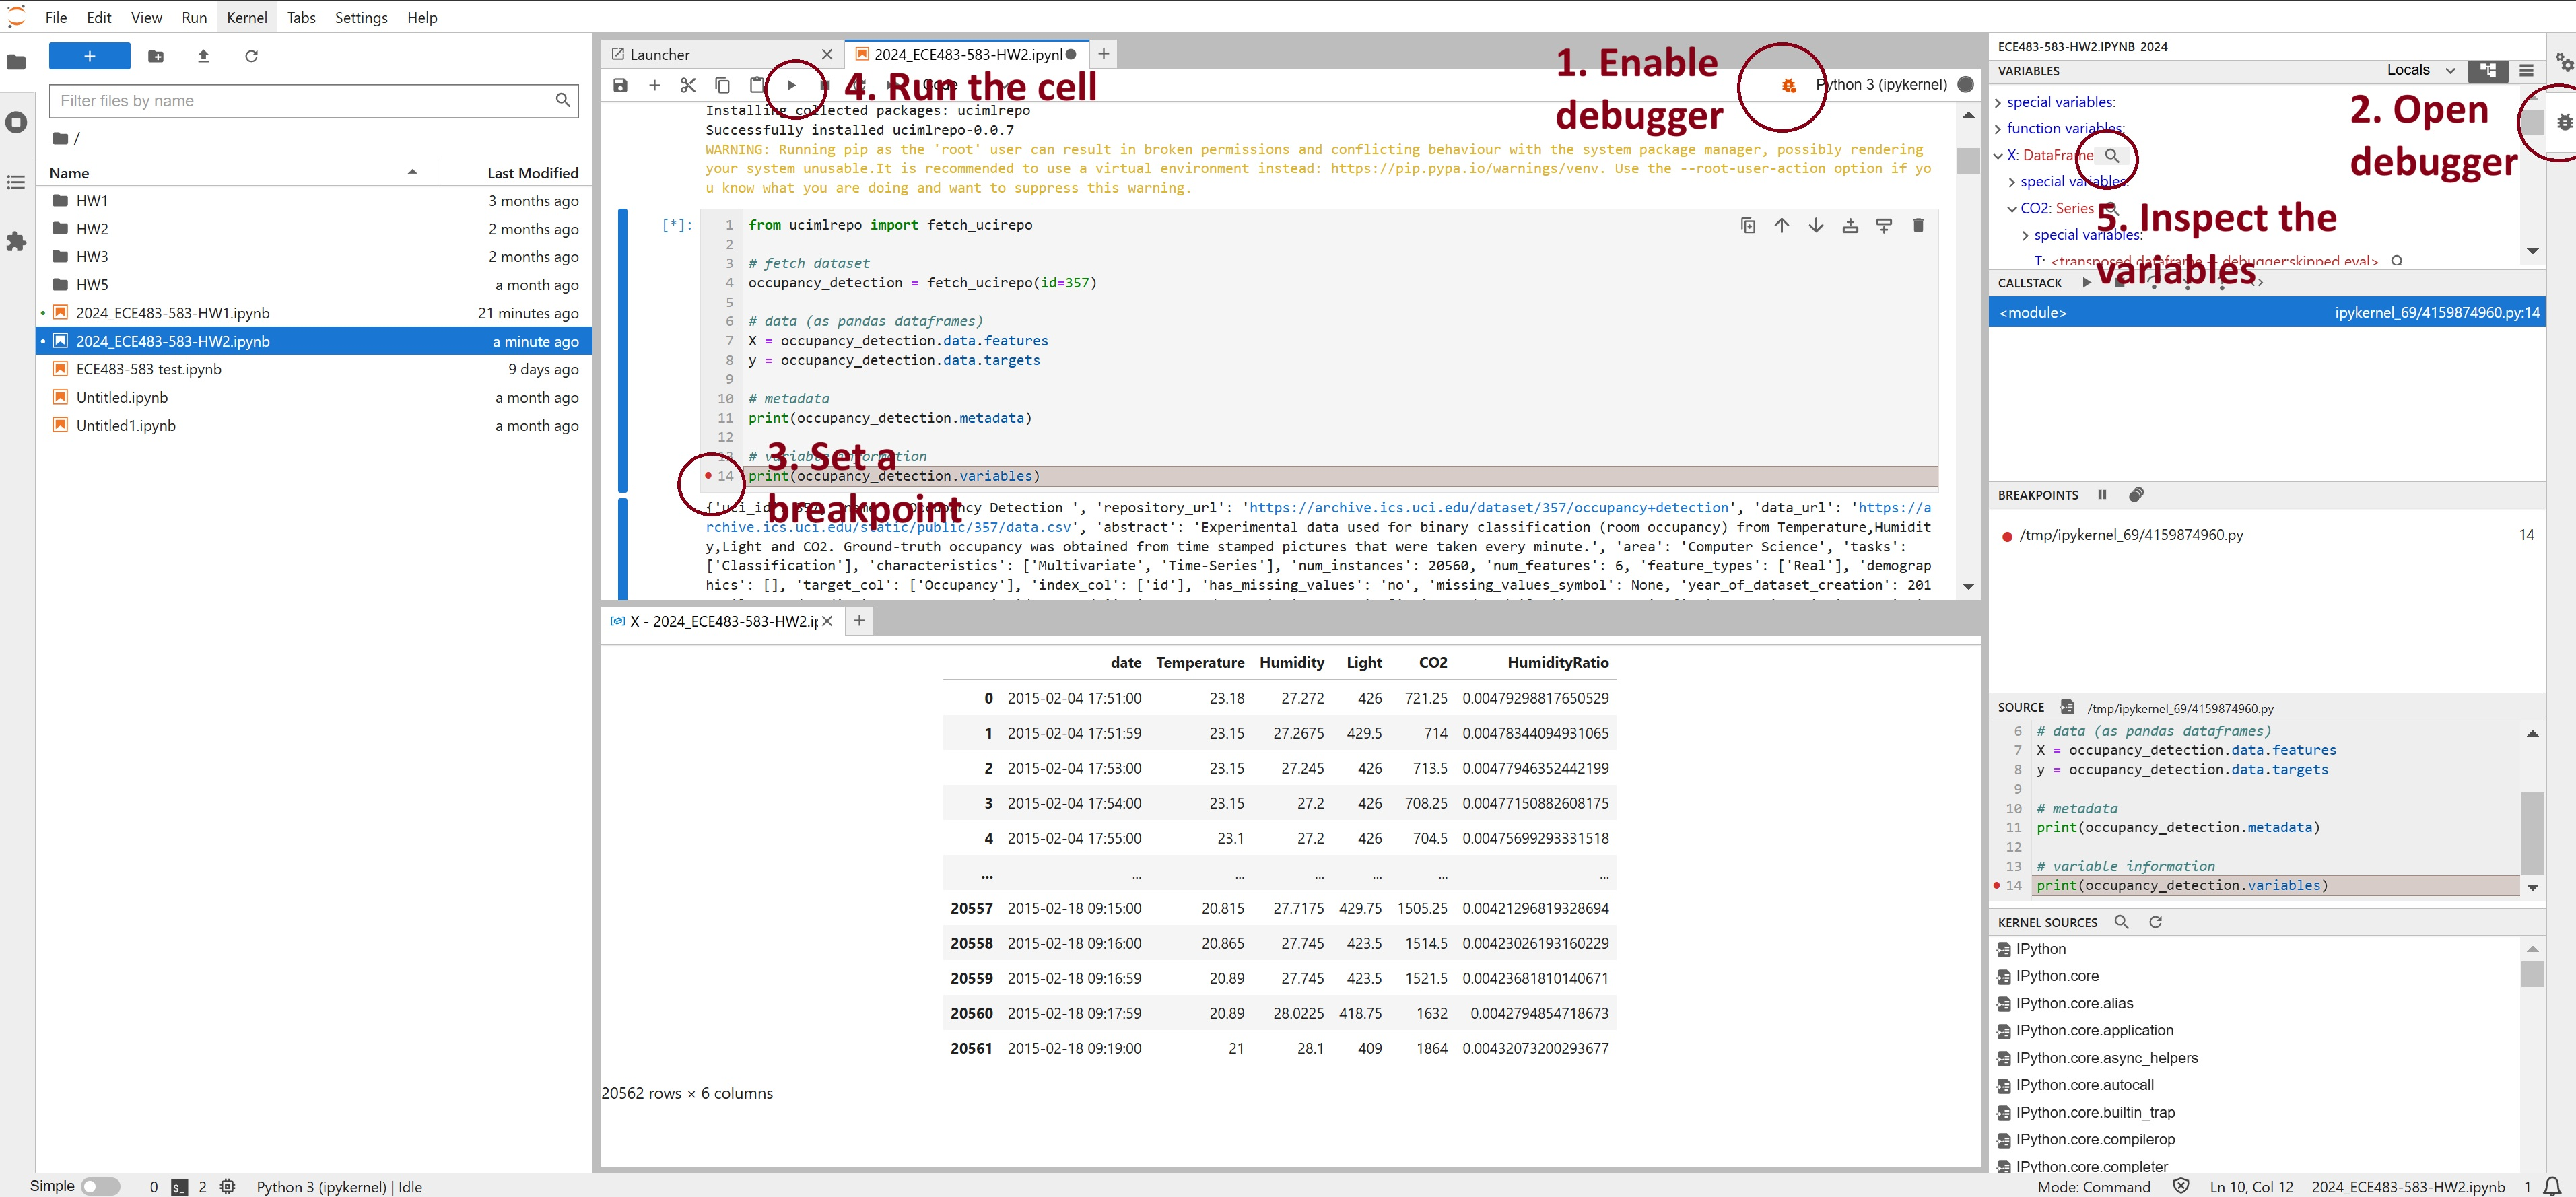

In [3]:
#Example image
from IPython import display
from base64 import b64decode
base64_data = "/9j/4AAQSkZJRgABAQEA2ADYAAD/4QAiRXhpZgAATU0AKgAAAAgAAQESAAMAAAABAAEAAAAAAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAbyDvIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9R/8AhxV+yf8A9Ed0j/waah/8kUf8OKv2T/8Aojukf+DTUP8A5Ir61ryv4weLfHngb4taDq8N54P034R6bY3E/ii61AyDUFkwREIQvynJ2ADqSW6napmpUjCLnN2S1beyXdlU6cpyUIK7eiS1bb2SR49/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRVPxj+2R8YPi9cM/wt+H+pW2gnPkane2Jkku1ONrruxEo5zjL9jnqKoaH+0b+0l8KZo7rxZ4En8R6XGSbjyrJRNtyOQ9vlVwO5Qjk56cfEy4+y9VLQpVZU/+fipycPW+7Xml6H30PDjMnTvOrRjU/wCfcqsVP0tsn5NrzLml/wDBFP8AY71zUr+zsvhd4ZvLzS3WK9gg1u9kks3YZVZFFwShI5AbGRV//hxV+yf/ANEd0j/waah/8kVq/wDBP74D/DfRfF/jj4oeDNT8RTa148u3bWtM1K5Rv7HmMrTPF5YUNu8xmIdy2Vxtx82fqCvscLiqWIpRr0JKUZK6a2aPh8Xha2FrSw+Ii4zi7NPdM+Sv+HFX7J//AER3SP8Awaah/wDJFH/Dir9k/wD6I7pH/g01D/5Ir61orc5z5K/4cVfsn/8ARHdI/wDBpqH/AMkUf8OKv2T/APojukf+DTUP/kivrWigD5K/4cVfsn/9Ed0j/wAGmof/ACRR/wAOKv2T/wDojukf+DTUP/kivrWigD5K/wCHFX7J/wD0R3SP/BpqH/yRR/w4q/ZP/wCiO6R/4NNQ/wDkivrWigD5K/4cVfsn/wDRHdI/8Gmof/JFH/Dir9k//ojukf8Ag01D/wCSK+taKAPkr/hxV+yf/wBEd0j/AMGmof8AyRR/w4q/ZP8A+iO6R/4NNQ/+SK+taKAPkr/hxV+yf/0R3SP/AAaah/8AJFH/AA4q/ZP/AOiO6R/4NNQ/+SK+taKAPkr/AIcVfsn/APRHdI/8Gmof/JFH/Dir9k//AKI7pH/g01D/AOSK+taKAPkr/hxV+yf/ANEd0j/waah/8kUf8OKv2T/+iO6R/wCDTUP/AJIr61ooA+Sv+HFX7J//AER3SP8Awaah/wDJFH/Dir9k/wD6I7pH/g01D/5Ir61ooA+Sv+HFX7J//RHdI/8ABpqH/wAkUf8ADir9k/8A6I7pH/g01D/5Ir61ooA+Sv8AhxV+yf8A9Ed0j/waah/8kUf8OKv2T/8Aojukf+DTUP8A5Ir61ooA+Sv+HFX7J/8A0R3SP/BpqH/yRR/w4q/ZP/6I7pH/AINNQ/8AkivrWigD5K/4cVfsn/8ARHdI/wDBpqH/AMkUf8OKv2T/APojukf+DTUP/kivrWigD5K/4cVfsn/9Ed0j/wAGmof/ACRR/wAOKv2T/wDojukf+DTUP/kivrWigD5K/wCHFX7J/wD0R3SP/BpqH/yRR/w4q/ZP/wCiO6R/4NNQ/wDkivrWigD5K/4cVfsn/wDRHdI/8Gmof/JFH/Dir9k//ojukf8Ag01D/wCSK+taKAPiTxD/AMES/wBlux1iaKL4R6Qsa7cD+0b44+UH/nvVL/hyt+y//wBEl0j/AMGF9/8AH6+tfFn/ACH7j/gP/oIrOoA+W/8Ahyt+y/8A9El0j/wYX3/x+j/hyt+y/wD9El0j/wAGF9/8fr6kooA+W/8Ahyt+y/8A9El0j/wYX3/x+j/hyt+y/wD9El0j/wAGF9/8fr6kooA+W/8Ahyt+y/8A9El0j/wYX3/x+j/hyt+y/wD9El0j/wAGF9/8fr6kooA+W/8Ahyt+y/8A9El0j/wYX3/x+j/hyt+y/wD9El0j/wAGF9/8fr6kooA+W/8Ahyt+y/8A9El0j/wYX3/x+trwj/wRA/ZX1T7R5/wh0iTy9u3/AImV+MZz6T+1fRVdF4B/5e/+Af8As1AHzZ/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kij/hxV+yf/ANEd0j/waah/8kV9a0UAfJX/AA4q/ZP/AOiO6R/4NNQ/+SKP+HFX7J//AER3SP8Awaah/wDJFfWtFAHyV/w4q/ZP/wCiO6R/4NNQ/wDkij/hxV+yf/0R3SP/AAaah/8AJFfWtFAHyV/w4q/ZP/6I7pH/AINNQ/8Akij/AIcVfsn/APRHdI/8Gmof/JFfWtFAHyV/w4q/ZP8A+iO6R/4NNQ/+SKP+HFX7J/8A0R3SP/BpqH/yRX1rRQB8lf8ADir9k/8A6I7pH/g01D/5Io/4cVfsn/8ARHdI/wDBpqH/AMkV9a0UAfJX/Dir9k//AKI7pH/g01D/AOSKP+HFX7J//RHdI/8ABpqH/wAkV9a0UAfJX/Dir9k//ojukf8Ag01D/wCSKP8AhxV+yf8A9Ed0j/waah/8kV9a0UAfJX/Dir9k/wD6I7pH/g01D/5Io/4cVfsn/wDRHdI/8Gmof/JFfWtFAHyV/wAOKv2T/wDojukf+DTUP/kij/hxV+yf/wBEd0j/AMGmof8AyRX1rRQB8lf8OKv2T/8Aojukf+DTUP8A5Io/4cVfsn/9Ed0j/wAGmof/ACRX1rRQB8lf8OKv2T/+iO6R/wCDTUP/AJIo/wCHFX7J/wD0R3SP/BpqH/yRX1rRQB8lf8OKv2T/APojukf+DTUP/kiivrWigArK8VeCdL8cRWsOrWkd/bWc63UdvKN0JlX7jMvRtvJAbIBwcZCkatYfjn4g6b8OLW0u9YmWx024nW2kvZDthtXb7hlY8IjEbdxIAZlH8WRhiZUlTbr25et9vn5HRhY1nVSw9+fpbf5W1v6am5RUdtdR3ttHNDJHNDModHRgyupGQQRwQR3qSt731Rz7aMyLbwNpdh4uuNdtrVbXU7yIQ3csPy/bFX7vmDozL2Y/MBxnBIrXrn9I+JmkeIvGl5oOm3UeoXmlxCXUGt3Dx2BY4SORgeJH+YheuEYnHy7ugrnw8qLTdC1ru9tr9fnffzvfW50YmNdSSr3vZWvva2m/S23la2lgoooroOc+Wf8Agrf8afHnwV/Z88ISfDnxXJ4L8QeKfH+heGW1aPTrXUHtre9ufJkIiuY3jYgEHkZ46iup+BP7Ofxk+F3ii+1Hxt+0hrXxF0qTTpoItPvfBujaXFaTttKXXmWsSOxQBvkJ2ncc9BXk3/Bdnw0vjP8AZh+HOjvealpqar8WPC1m13p1y1teWokvNnmQyr80ci5yrjlWAI6V618E/wBh+x/Zlute1q1+Jnxt8aSXukzWZs/GXje81yzhBw/mRxTEqsnyY3jnazDua5uflw9ao+kpr5KnB2XbVvVapu61RrKN6tOC/li//Kk1fz0S0fRW2Z45+0j8SfFng79mn9mG4s/jG3xEv9c+LHh3TdU8ZeHjFplr4rtZZ7jzFMdnIYTAyhUaNWZG8vnJr6v+L/7Q3gH9nzTrS88feOPB/ge01CQxWs/iDWbbTY7lwMlUaZ1DMBzgZNfmr8N/+US/7Bv/AGVLwt/6V3dar+Bfi1+0R/wVT/aO/sC1/Z41TWPBzaTpVha/EzQL/Vryw0aWxWRDYrFNGkcE0sk5lIUlnOGYgKK76sXGdSkt1Uqa26RhRVtPOW2yV30s8ItOFOo/+fcPvc6m/wAlv1dl1uv058O+I9P8X6FZ6ppN9Z6ppeoRLcWt5aTrPBcxsMq6OpKspHIIJBFXK+Zf+CWX7LHib9kT4N+MPDfiTWvA2oHUPGF/rFlpvg+KaDRvDcdwsTvYW8MzM8KLN5sgj3EL53GK+mqiaSty9Un96Tt8r2v13CLet+ja+5tX8r726bBRRRUFHxH+0r4u+NHxa/4Kn2vwf8A/GjUPhR4Yt/hcni6f7H4Y0vV3ubv+1JbU5N3C7KDGU4DY+QcZJJ+mf2d/h34y+D/w8urP4g/E69+J+qfapLoa1faNZaO1vBsUCHy7VEj2qVZt5G75zk4Ar40/aU/Zvtv2m/8AgufbaLdeMfiN4LjsvghHeC78G+I59DvJiNclTy5JYSGaP5s7DxuVT2Fan/BTX4Swfs9/sM+Afh7d+MPHGufD/wATfE3QtH8ba14q8Qz6jf8A9iXV4WuI57yQ7xAzrFEckBUkI6HBKN/Y00t5tx11u3WlBeltNuit1KrJe2m+kUpO2mipKT9W9d+r8jqP+CgH7avhXxv8GfDDfCX4teH9X1Sz+JvhTT9WPhHxRDcXEFvPqsMUsE/2aUssci7kZH4YZBBGRXvOp+Ml8DftH+J9U174yeGbPwnpPhKK/ufBd5FZWsugqs0hk1ma7ZxMLd1Vo8SKIlMbENnOPkn/AIK8/s9fB34PeCfgJdaL4T8IeEfE0PxU8MaX4f8A7HsINPmmt/t8ck1tiJVL24VPMKHKh0jbhsV6lo+jWfiL/gtT8QrDULS2vrG8+C+kw3FtcRLLDOjatfBkdWBDKRwQRg0YdX92O7nU38qEZLTtpt0butUmRWdveltyU9vOs4799fmlZ6No679hf/gp18Nv26m16z0HxB4TtfEGk65qWm22iReI7W91DUbK0m8tdRSFCH8iUEMrAMu0j5zmvo+vhn/gh38LPC2i/CX4natZeHPD9prVn8VvFmnJeQafDHdQQLfkLAJAu5UChQEzgDHFfc1Vp7KnJbyhBv1lFP8AXXpfbQSvz1E+k5peik1+n3b6hRRRUlHy/wDtbftD+Mv2bP24fgG0usbfhH8S7u78F6xYPaQbbXWZYzNptwJtnnAyMkkJXfs6HbnmrX/BT79oXxd8G/hL4R8M/DfVE0f4mfFbxdpvhLw9eG1iuv7P82XzLq7MUqsjLFaxzE7lIBK8Vc/4Kt/s9X37SH7CvjbS9C8xPF3h6GPxR4ZmiH72HVNPcXVvs9GcxmPPpKa8E/Y++O1j/wAFSP29fB3xR08CTwj8Gfh1aXMUWMrb+JddhV7hAeha3s4/LPdWmPrRh/eapv7Mrv8AwO80n/ilGcL9FKC7IdZ8i9ovtRaX+NNRvbayU4St15Ztrdv64+FkmqJ+0B8Rre8+K2l+L7K3i0wW3hCKxs4bzwYTA2955Im86T7WR5q+cihQhCZXNaLftUfDBPix/wAIE3xH8Br46L+UPDp8QWn9rF8btv2XzPNzjnG3pXx/qHinxD4H/ah/4KDa14SWR/FGk+CtBvNIEaln+1x6HevFtABJbeFwMcnAr5y+Dv7AvxU/ab/4JneGY9IuP2PdL8IeItCt9bj8WDw9qqeJLC72rI+oy6ibk41BJVbzJWHDq6kbcrSjJt7aRUG+/vX/ACUXvu7arVlVKahZX+K9vlGDf/pS/F6vf9cPD3xF8P8Ai7xFrWj6Tr2japq3huWO31eytL2Oa40qSRBJGlxGrFomZCGAcAlSCOKp6N8ZvB/iPwZqniTT/Fnhq/8AD2hvcx6jqlvqcEtlYNbZFws0ysUjMW1t4YjZtO7GK+D/ANqb4rah/wAE2/2wvFfjSaRb24+MfwkMUO0YGreLtGKw2yj/AGp4rxFAxn910rxDU/hVq37E3wq+Jn7INjqVxJqvxsbwkNCuXkLyTvq6Jp3iCcHOflNhdTkD7onz0pxi5Plg1d6R/vT53G3dK0XJvpFxuQmkuepdRWsv7seWLb9U5KK7tS2sfrx4c8Saf4x8P2OraRf2eqaVqlul3Z3tnOs9vdwuoZJI5FJV0ZSCGUkEEEVcqj4Z8OWfg7w3p+kabAlrp+l20dnawoMLFFGoRFHsFAH4Veqp8vM+Tbp6E0+ZxXPv19Qps7FIHYdVUkU6o7r/AI9pP90/yrmxUmqM2uz/ACNI7n5h/soa/wDtaftB/wDBPXT/AI+Wn7UEcesfYtS1f/hG9X8A6MdIuVsri4T7PLPDFFOiSLAMyIdy7iQDivt79l39r/Rfjj+zX8I/GviG60fwhrPxY0m1u9P0i8vkhkurqS3857e2WQhpiAHYBQWKDdjFflX+zR+xP4y8Q/8ABGPwj8TfD/jz4m+M9H0htQ1bX/hLda5JB4d8S6XDqF0t3ZQraCG4R2iDyhXllSSQbWjZWwPrj9qn4teDfih4n/YK8eeDZrC3+HureOok0qSJEgt7VJ9IuYre22DiNgw8ryx91lK8EYrvqRtVlSS3qU426xUpOLd+t76bq8H3JxGkpTXSNWXk+XVK3TltrptNb20+6NW8f6DoPizSNBvta0my13xAs76Xp095HHd6ksChpjBExDyCNWUuUB2hgTjIrk/Gf7W3wp+HOmX194h+Jvw90Gz0vU20W9uNR8RWdrFaX6ortaSM8gCThHVjG2HCsDjBFfPn7VXirT7j/gsX+yfokd3C+q2mieMb2a1DAyRQyWVukbsOoVmikAJ6lG9DXI/8E9P2XPAPxQ/aJ/a08TeKvCeg+KNSk+K2o6LGdXso76O1tfsNi8kcSShljEpk/ebQDII4w2QigcsLztbrCcv/AAGoqdvnfXt52s6laMbvfmjH/wAChKV/uSa736XufdOh65ZeJtGtdR028tdQ0++iW4trq2lWaG4jYAq6OpIZSCCCCQQatV8bf8EN4F0H9kTxR4btd0ejeDfiR4o0LSLcsWFnZw6lKYoVJJO1dxA9q+ya0lZqM47SjGS72lFSV/Oz18zOLd5Re8XKL9Ytxf5HGeLP+Q/cf8B/9BFZ1aPiz/kP3H/Af/QRWdUlHyz8RP2vNQ+En/BSnWvDXiXxRa6N8KdA+D58ZX0VzBCsVtdLqjQNcGbZ5v8AqQF2BipOMKWNdB+xT48+Kf7Quu698UPFsl14T+HviJEi8EeC5rKBbqOxHzLql9LsMy3FwMFYA4SKMgMGc7h8lf8ABST9lHXP2t/+CqR0nwvqdvZeKPDPwjsvEukWd+ol0nWrq0195I7K/hPyy28h4IP3XCPztwfcvE37ft3+0T/wTL+MfinwbaX3hf4reBfDmpWeveHJcjUvCuqxW771xjLAbWeKQDDhR0IYLn7X2eEddq7ipu3dKpNc3n0gv5LK/wAULbSp8+JVFaKTgr9m4QfL5X1k/wCbVbRlzfSOn/tO/DXVvihJ4HtfiF4HuvGkLtHJoEWvWr6ojKMsptg/mggckFeBVrxv+0D4C+Gc2qR+JPG3hHw/JodrDfakupaxb2jafbzOY4ZphI48uOR1ZVZsBmUgEkYr80fC/wCwB8Uvjn+w14Mt9Buv2RfDfhWWy07XdF8VaV4e1O31zTp1MUqXq3zXDYu2dQJJGBLsXDZzivctY/Zl8I/tGf8ABZXxtH4+0XTfF2k+H/hpodymkapbJdadcXT3eoRrPLA4KSNGhlCBwQplJA3BSOipScKkaLfvXkn/ANuwcr/Nxat+PbljVjKm6y+G0WvnKMdflK9/XTa/1r4k/aT+HXg211WfWPH3grSYdBhtrnUpLzXLaBdOiuQTbSTFnAjWUKxjZsB9p25xW/4G8faF8T/C1nrvhrWtJ8RaJqCl7XUNMvI7u1uVBIJSWMlWGQRkE8ivjj4S/s8eDfiP/wAFfPjvf694d0nWF8J+GPCkWk2l5apNaWLSwXimRIWBjWRUj2K4Xcqu6qQHYHwbx/qWrfs2fs2f8FCtB+GMH/CP2HhnxBa3OmWenBoY9IjvrG0N/JAqf6oCNpXATaFxkbcAjCVRWm10jKS9FOMEm+l+ZO+yW/l0Km3VjS7yhF+soc916Wtbr+f6PeFf2nfhr46+Id14R0T4heB9Y8WWJdbnRbHXrW41G3KffD26OZF298rx3ryT9mzx1rmu/wDBRX9pbQ77WNVvNF0G38LNpmnz3cklrpxmsZ2lMMZJWPewBbaBuIBOTXzFD/wT5+Knj74X/DObTbj9kPwf4a8O6ppOueHvEHhHw7qNjqUIE0Lx/Z7p7h1Y3Awjbw3m+ZzliCPoj9lf/lJ7+1V/17eEf/TfPXR7PlbT3XMvu5dbdN2ra2tvqYQqc8HJbNRa+ctvPSzvpe+2h9UV0XgH/l7/AOAf+zVztdF4B/5e/wDgH/s1ZFnRV4T+2L8H/iv46g/tr4e/HPWPhVZ6Lpkz3On2nhbS9XTUZV3OJGe8idk4AXC4HfrXu1YfxO/5Jt4h/wCwZc/+imrkx0nHDzqRdnFNr1s/v+Z04OKlWjCWzaT+9Hxd/wAEs9c+NHxR/Zu+Hnx4+Kv7SV3q3hjWtGl1XV/D174V0TTNPhUiVAz3kUMcqLGQr5yoO3B4Jr65+D/7SXw7/aFivpPAHj7wX44j0xlS8bw/rdtqYtC2dokMLtsJwcbsZwa/PX4AfFnw94C/4IafsyeG9b+H+i/FC++Jl7pPhbRPDut3IttIur+S7lmikvJDHIBBH5Jcr5chcqq7TuyLnwr8F+MPhN/wWt+Edv4ssfgf4Z1/X/AWuw3ek/DiyubcmwiNs0H22Sbb5y+bG/lEQx48px83RfXxEE8XOjFWipTiv+3Yudu7drLyTTv0PLoTawlOtLWTjBv/ALeko37LW/q1a3U9i/4J+/tl+G/AP7OniLU/i/8AFbQ9FmuviZ4s0zTbvxh4mitmlht9WnSO3he6kBKRRhVVFOEUAAAYr661fx9oXh/wXJ4kv9a0mx8Ow2wvZNUuLyOOyjgI3CUzMQgTBB3E4wetfA//AAR+/Z0+E/xT+Gvxt1bxB4d8K+Mtem+KPirS9W/tqzh1B9OtRqErpZhZg3lQMrmYoAqs0zsQTzXn/wCzZ+yLqf7ZP/BNW+8L+A9a0JfDPgf41atrXw8svEsD33h3xFo1jfzG20+6VSWksWdpcEByPKUhSAK4aN3Spxe/s6Um+yapxba3bXNzWXxWkt0m+ySSqTfT2lSPzvUklfZJ8vLrtdPa6X6PfB/9oXwD+0Lpl3e+AfHHg/xxZ6fIIbqfw/rNtqcVs5GQrtC7BWI5AODiuwr5Z/YB+NWn+Ifi78Tvh/rHwc8O/B/4p+D10648RQ6C9tdabr1tOs32O7huYo4ncEJL8k0avGGA55x9TVpK2jjs1/w/4303Wz1TIi3qpbr/AIdfg077PdaNBRRRUlHyd+2l8fPiRrP7W/w9+Afw08WaJ8MtS8baDqPiO88XahpCatcRxWkkSC0sbaV1hkuG3lnMm4JGpYKTXqX7Knwn+LnwjPiCz+JvxZtfi5Z3MkM2jX7+GbbQ7+xHziWGZbY+TKv+rKuERslwQRg039rT9kb4Z/tr6La+F/G1uJNa0MjVdG1DTb82OveHZSdqXlpPGRLEd6DnlGaMBlbbivljwd8d/i/+z+v7TnwQm8ZXXxY1r4U/Ds+KvBvim5hX+2oTPbXIgsNQMY2zXSNCjpJtDyqdzcsAuPtlSpS5vitJ/wCJK8rL+VqKt2ai3fmk4vT2bqVIpbXiv8LbUdf5k5O/dc1rcseY+zG/ao+GCfFj/hAm+I/gNfHRfyh4dPiC0/tYvjdt+y+Z5ucc429K8j+O3/BVb4U/s9/theFvhH4i8WeCdLn1jT7691nVdQ8UWdlF4ZeBIXhguUkbKSXCygoHZCVUkbq+Dvg7+wL8VP2m/wDgmd4Zj0i4/Y90vwh4i0K31uPxYPD2qp4ksLvasj6jLqJuTjUElVvMlYcOrqRtytfR37QnwP8ADeq/8Fgf2abXxR4d8Ma7far4G8S/2vPdaXBKur3UENkolkDJ+8ZfmKlslQeMCur2Mo11RnunJPztTnLTtZx/9J80ub20XRdWOzUWvK84R+d1L5Wfkz1df+CufwbX9tS9+EE3jj4f2sNloEepHX5vF1iltLqD3htv7KVC3N0AN5TfvAKjZzkeofDrxLJ4c+JHxavtf+L3h7xNoek3NvcDRfs9nZn4eQLaCSSK6mRy7CUfv99wEKoePl5r5h0L4FeBrj/gvL4mtZvBvhOSD/hTllqkcL6TblPtX9tShrgKUx5uMAuPm6c1lR/8jP8A8FJP+vKD/wBRRa551FDDOst1TqS9eWqopeXqtbK3WV+ilTc8UqD2c6cfTmpqT/PZ6X9Fb7FH7W3wpbxjofh0fE34enxB4mghutH0z/hIrP7ZqsMy7oZLeHzN8qSLyrICGHIyK6T4kfFPwz8G/Cdxr3jDxHoPhXQrUqs2o6xqEVjaQljgBpZWVFyeBk81+afxp/Y7+G/hP/g3PXWrfwjof/CTWfw403xWmvG0T+1f7UW3gnF19qx528N8o+fiMCMYQBa9M13S9G/aT/4Ku/CPQPinZ6dr2haZ8HB4p8MaXq0Imsb/AFyW7SO7uBFIDHJcRW6oVBDFFcuMdR1VKVsRLCx+KMrN9LctSX3/ALuS6fZfVpYU6l6EcQ9pK9vPmhH7v3kX5Wa10b+zfAP7RPw/+K13p9v4X8deDvElxq1jJqdjHpWtW1497aRyCKS4iEbsXiWRlRnXKhiFJBOKoXP7WHwts/iungOb4lfD+HxzJKIE8Ov4htF1ZpCMhBamTzSxHIG3NfIvgT4c/Dv4Zf8ABwFPp3gfT9H0PULr4NXl94gsNKjSC3juZNWswkzRIAqTSRqpY4DMqxk54J434T/Cy6/4JTaj4H8M/E74XfDr4meAdc8dpb6F8UdLgh/4SWw1K/uy1pPqdtPGXkmMsm37VbzsVSNcrnAOVK0/Zt6c918/aShZPa7tdXtduysaVIuCqLrGz+TgptteV7O2y16H6WUUUUgCvMv21fiFrHwk/Y5+K/irw9ef2fr3hrwfq2q6bdeUkv2a5gs5ZYpNjhkba6qcMpU4wQRxXpteMf8ABRz/AJR7/HT/ALJ/rv8A6b565cdJxw9SUd+V/kdWBipYinGW3MvzN79jbx/q3xW/ZF+F3ijX7v7frniLwnpep6jc+UkX2i4mtIpJH2IFRdzsThQAM4AA4rgP+CcPx18U/Hn4d/Ee/wDFuqf2rdaB8S/Enh+xk+zQ2/kWNpetFbxYjRQ2xABubLHqxJ5rwf8AYn/4JcaV43/Y4+FGtSfG/wDag02TVvCGlXjWmm/FDUbWztTJZxOY4YlO2ONc4VF4VQAOlfPOuz678D/+CI3x90vw7rGoSRW3xk1bQdT1fWLu4ubg6bJrsNvdTXcyETSb4iRM4ZXKySHcDXp4u0cZWilbSSS6JurTin5JXte2ib9DzcPeWHotvqrvq17Oo3p1bte19WkfqV8Of2p/hj8YvGF94e8I/EbwH4q1/SwzXmmaRr9pfXloFbaxkiikZ0w3B3AYPFeJ/sn/ABb1A/th/tcR+JvE15/wjPg3XdHa0XU9Rb7BoVsdEgmnMYkby4Iy26R8bVzlj3NeC2v/AATs+MOs+Pfgtr11N+yJ4G0f4e+JtO1TS9R8BeGtQ0nUri0DES2EEzzvG8VzC8imMqQ5YHqM1tx/8jP/AMFJP+vKD/1FFrkqS9lTq1VvGE9P8MqTT8r3atutdbM6qMfa1qVLpKUdfVTVvO1k76J320PsG9/bB+Eum+KdD0O4+KXw5t9a8TwQXWjafJ4ks1utWhnGYZLeIybpkkHKMgIbtmvRq/OH4R/sxfs+3v8AwQYsde8QaB4Q1TS774ZJq+r+I7q2hn1B9QSwwZftLZlFxDMPKjG/dH5aRLgKFH15/wAE8tV8Ra5+wf8ABy88XPeSeJrrwbpUuovd5+0STG0jLNJnneerZ5yTnmumrSUKlWl1ptLyfNz2+7kfrdPTY56dRyp06nSab9OXl/PmXpbruexUUUVgbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXhn7eX7X/w/wD2TPhjZt8QNN1LXNP8VTtp0enWdqkzTqF3SM+9lVVUbf4t2WXaDgke51xvxs/Z98F/tG+GIdG8b+HrDxFptrcLdww3IYeVKoIDKykMDgkHB5BIORUyjGUXGSunuioTlCSnB2a1TW6Z8q6H+yF4m17wTpHi34F/ErVrLwt4jtUv7awvr+e1aKNxuADRgqxHTDKMYPzN1q9of7Evxu+JVysPjr4nXllo0h2z29vqU91JKo7eX8kXPqSSOu09K+xNE0Sz8NaLZ6bp9rb2On6fAltbW0CCOK3iRQqIqjhVVQAAOABVqviZeH2UupePPGH8iqSUPuvovJNI+8h4lZyqfLL2cp/8/HTi5/8AgVtX5tNnJ/Bj4KeH/gL4Kh0Hw7Z/Z7WM75ZXw011JjBkkYAbmOAOgAAAAAGK6yiivssPh6VClGjRioxirJLRJHxGKxVbEVZV68nKcndtu7b82FFFFbGBx3xq+APhH9ojQ9J03xjpP9sWWhazaeILGP7VNb+RfWknmW8uYnUtsfnaxKnoQRxXW3VtHe2skMq7o5lKOM4yCMGpKKlxTi4taPdd7pJ/gkvRJdB3d+bqv82/zbfq2eU6b+xF8L9I+EvgPwLb+GPL8K/DHVLXWvDVj/aN2f7Nu7Z3eCXzDL5km1pHO2VnU55BwKzf2kf+Cevwe/a18X6b4i8deDk1DxJo8BtbXWNP1O80fUkgOf3JubOaGV4vmYhGYqCzEAEmvaKKqXvO8tdb/Nqzfq0kr72Qo6aLtb5Xvb0u27dzkfgd8B/B/wCzX8NrHwh4F0Gx8N+HdNLtDZ2oON7sWeR2Yl5JGYks7ksxOSSa66iinKTbuxRikrIKKKKQzwf9pb/gmf8ABf8Aa8+J9n408feFdQ1TxPYaYujQX9n4k1TSnW0WV5RERaXMSsPMkdskE8jnAGNP4a/8E/PhD8Kvgn4i+HOm+EftvgnxZKZtW0rW9UvdcivGKovLXs0zqAI0ICsArKGADc17LRU8q5XDo910d3d3+evqVzNyU3utn1VlZW9Fp6HzX4I/4JCfs7fD21tI9N+Hg3afdWV3Zz3mu6nfXNi1nOlxbxwzT3DyRQrNGjmFGWJyi7kbAr2ez+BnhXT/AI4X3xIh0vb401LRofD9zqP2mY+ZYxTPNHD5RfyhiSR23BAxzgkgADraK05nv6v5tWf3rR91psZ8q/L8Hdfc9V2ep5D8Pf2DvhP8J/2hNc+KXhvwmujeNvEjzTaldW2o3aWt1LLt82Y2fm/ZRM+0bpREHJLEt8xz69RRU7JRWy0XkuyK3bk93q/MKKKKAAjIrzb9mT9kL4cfsb+FdY0T4aeF7bwtpevarNrd9BDcTTie7lCq8mZXcqMIoCKQigYVRXpNFC0d12t8rp29LpP1SDdWfr89Vf7m182cj4T+BXhXwP8AFTxd420vSvsvifx4lmmu3n2maT7ctpG0VuPLZzGmxHYfIq7s5bJ5rxdf+CPv7N8fj6bxFH8L9PiuLjUV1aXT49Svk0WW7XlZm0wTCyLAjPMHXnrzX0tRRHSSmt1s+q/qy+4Je9Fxls9/PS35aeh598df2V/AH7TGoeD7rxz4bt/EFx4C1uHxFoLyzzRfYL6L7kv7t1Dgd0fchIGVOBhPHf7Kfw/+Jnx48GfE7XPDdvqHjr4exXMOgao1xMjWCXCFJR5auI5MqTgyKxUkldpJNehUUR0d13v82rN+rWl+2mwS1TT6q3yve3pfW3fUKKKKACkZd6lT0YYNLRSlFNWYHG/AP4AeEf2YPhLpXgXwNpP9h+FdFEosrH7VNdeT5srzP+8md5GzJI5+ZjjOBgACuBn/AOCbnwSuv2d9W+E83gOxuPh3rOpzazLokt7dSQWt3LJ5ryWrNKXtPnJZVt2jVCzbQu459wopy95ty1b389b/AJpP1VxqTW3e/wA9Vf1s3977nhvwd/4JtfBX4CeNfD/iTwr4L+w+IvC7Xj2GqT6vfXt5m7hSGbzZZ5ne4BijRFExcRgYTZk59F+F/wADPCvwY1LxXeeGtL/s248ca3L4i1t/tM0322/kjjiebEjsEykMY2ptQbchQSSetop8zvfyt8r3t6XSdu6uSopKy2vf566+ur1833ON+CfwA8I/s6eH9U0vwbpP9j2Gtaxea9eRfaprjzr27kMtxLmV3K73JO1SFHQADiuyoopdEuySXolZL0S0XkPq33bfzerfq3qzjPFn/IfuP+A/+gis6tHxZ/yH7j/gP/oIrOoA5EfAjwoPjufiZ/ZX/FbtoQ8NHUvtM3/IPE5uPJ8rf5X+tJbfs39t2OKy7P8AZX8Bab+0HqXxTtdAW08da1pi6RqWoW95cRR6nbL9xbi3WQQTMowBJJGzgAAMAAB6FRR28r28r3v993fvd33B63v1tf5Wt91lbtZdj518Of8ABJz9nvwl48h8Rab8N7G1urXURq0Fiuo3p0e3uwQVmTTjN9jRlIBBWEbSARg17BpnwU8M6N8ZNW+IFtpnl+Ltc0y30a9v/tErefaW7ySQx+WW8tdrSyHcqhju5JAGOqooWlkum3ldW0+WnppsD1u31387O+vz19dTlfDfwU8M+Efiv4m8cafpn2fxR4xt7O11i9+0Sv8AbIrRZFt18tmMabBLJyiqW3fNnAxT8Kfs6eC/BXibx1q+n6DbrffEqdLnxKZ5ZbmLVXSAW67opGaNV8oBCqKqkdQSSa7ailZfhb5NptejaTt3SC7vfzT+aVk/VLReWh89/Df/AIJV/AH4R+PdP8SeH/h7b2eoaPfNqenQSapfXGnaZdMc+db2UszWsLg8q0cSlT93FeteFfgn4Z8E/E/xV4z0vTPsviTxstmmtXn2iV/totI2jt/kZiibEZh8irnOTk811VFVzO1un9f5IOrfff8AP8wrovAP/L3/AMA/9mrna6LwD/y9/wDAP/ZqQHRVBqemw6zptxZ3KeZb3UTQypkruRgQRkcjIJ6VPRUyipJxkrplRk4vmjueN61/wT8+DviT9lfTfgnqHgmxvvhno0SRWGj3F1cyNZbGLI8dw0huEkUs2JFkDgMRuwSKrfBv/gnP8GfgD420TxL4U8GjT/EXh8XotNUl1W9vLx/tixJcGeWeZ3uGZYYlBmLlFQBCoyK9torTmlzOd9Xu+rvo797rQz5Y8qhbRbLovTsfM3i//gjt+zj45+1f2h8N036hd3d5fSWuualaSak91cNczJcvDcK1xEZndxDKWjTewVVBIr0P4s/sPfCn42/BTRfhzr/g2x/4Qvw1PBc6Rpumzz6SulSwqyRPbvaPFJEVV3A2MOGPrXq1FQopRUFsradNNtPLp2L5nzc/XXXrrv8Af17nm/7N/wCyL8O/2SdF1Sx+H/huLRBrlyLzU7qW7uL++1KUDAee6uHknmKgkLvdtoJAxmvSKKKpyb3/AKsSopbBRRRSGeL/ALU3/BPT4O/tp6zoup/EnwbHr2reHVaPTdQg1K8029tEY5KLPayxSbSedpYjJPHNdB+zR+yF8Nf2O/BlzoPw28I6b4X0++nNzeGEyTXN/Lz+8nuJWeaZhkgGR2IBwOK9Iooj7qcY6J7+fUJe805a22/I+aV/4I+/s3x+PpvEUfwv0+K4uNRXVpdPj1K+TRZbteVmbTBMLIsCM8wdeevNegftQfsSfC/9su10OP4jeF11ybwzPJc6Vdwahdabe6e8ihZPLuLWWKZVdQAyh9rbVyDgY9Wopcq5VDotl0Xp9y+4fM+Zz6vd9Xvv97+9njPxm/4J8/B/9oDxd4T1/wAVeD0vdc8E2y2Wj39tqV5YXEFsCCLeR7eWNp4cjPlTF05bj5mz0g/ZX8Bi6+JM39g/vPi8ix+LT9tuP+JsotBZgf6z9z+4AT9zs9fvc16FRTl7yals7387tN373aTfdpXFH3WpR0atbyttb0vp2PP/ABJ+y74F8Xfs2N8IdR0P7R8O30WPw82k/bbhM2McaxpD5yyCbhFUbt+84yWzzXz9/wAFJfCHw1Gk+AdB8ffs8/Er4seFdKRm0rWPA9jc3+qeFLiHyxGmbSaO+iSRVH7yJiCYlDjoR9g0UTvKfO9203fq1e1+t022n0fk2mRtGPKtkml5Xte3k0kmuq+TXwH/AME4P2Y/tH7YmrfFbw98JfEXwX+F+i+D38J+H9L8TQmHxB4kurm9S6vdSvI5JJLhT+4hjVrlzK6gE4A2j3P4U/8ABJ/9n/4KfELS/FHh34fpBqmh3T3ulpd6zqGoWWk3DnJmtrS4nkt4JB2aKNSvYivomiq5rcvL9lNJ9dW5PX1bflstCeW/Nzfas2umiSWnovz7hRRRUlBWL8R/h7o/xb+Huu+FfENn/aGg+JdPn0rUrXzXi+0208bRSx70Kuu5GYZVgwzkEHmtqiplFSXLLYqMnF80dzH+HngHSfhT4B0TwvoFp9g0Pw7YQaZp1t5ry/Z7eGNY403uWdtqKBliScZJJ5rmvBf7MHgHwB4C8UeFtO8M2LeHfGmo3+q65p16z31vqVxfOXuzIk7OCsjMcxjCAHAUDiu9oq5tzblLVyunfqm02n3u0m/NImKUUlHS2q8mk0rdrJtejZ89fBL/AIJU/AP9nb4g6Z4o8J+AUsdY0NpH0prrWdQ1G30dpMh2tLe5nkhtmIZhmJEIBIGBxV/9o79m/Q/DnwD/AGhdW8I+H7qTxf8AFDw3fSaoLWS4up9Yu49Me1t1SEswDbFRAkSruOOCxzXu1FZVqftKUqV7Jpr5Pf8AFJ+qXY0oVPZVY1ktU0/mv6f3nxT+yj/wSO+CPiH4BfCXxF40+FMK+MLXw1o11qmnX817b2bajFZRI8l1pZkW1e4DAh2lgLlh8xJFfaqqEUKoCqowAO1LRXVWrOpOUtk23bor/wBW+Rz0qahFR3aSV+ugUUUViaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHPf8Kk8Kf9Cx4e/wDBdD/8TR/wqTwp/wBCx4e/8F0P/wATXQ0UAc9/wqTwp/0LHh7/AMF0P/xNH/CpPCn/AELHh7/wXQ//ABNdDRQBz3/CpPCn/QseHv8AwXQ//E0f8Kk8Kf8AQseHv/BdD/8AE10NFAHPf8Kk8Kf9Cx4e/wDBdD/8TR/wqTwp/wBCx4e/8F0P/wATXQ0UAc9/wqTwp/0LHh7/AMF0P/xNH/CpPCn/AELHh7/wXQ//ABNdDXGeOv2jvh58Ltb/ALN8TePPBnh3Utgk+y6nrdtZz7T0bZI4bB9cVrRoVasuSlFyfZJt/gZ1a1OlHmqyUV3bt+Zpf8Kk8Kf9Cx4e/wDBdD/8TR/wqTwp/wBCx4e/8F0P/wATXJ/8NrfBv/orXwy/8Kix/wDjtH/Da3wb/wCitfDL/wAKix/+O11/2Tjv+fM//AX/AJHL/aeD/wCfsf8AwJf5nWf8Kk8Kf9Cx4e/8F0P/AMTR/wAKk8Kf9Cx4e/8ABdD/APE1yf8Aw2t8G/8AorXwy/8ACosf/jtH/Da3wb/6K18Mv/Cosf8A47R/ZOO/58z/APAX/kH9p4P/AJ+x/wDAl/mdZ/wqTwp/0LHh7/wXQ/8AxNH/AAqTwp/0LHh7/wAF0P8A8TXJ/wDDa3wb/wCitfDL/wAKix/+O0f8NrfBv/orXwy/8Kix/wDjtH9k47/nzP8A8Bf+Qf2ng/8An7H/AMCX+Z1n/CpPCn/QseHv/BdD/wDE0f8ACpPCn/QseHv/AAXQ/wDxNcn/AMNrfBv/AKK18Mv/AAqLH/47R/w2t8G/+itfDL/wqLH/AOO0f2Tjv+fM/wDwF/5B/aeD/wCfsf8AwJf5nWf8Kk8Kf9Cx4e/8F0P/AMTR/wAKk8Kf9Cx4e/8ABdD/APE1yf8Aw2t8G/8AorXwy/8ACosf/jtH/Da3wb/6K18Mv/Cosf8A47R/ZOO/58z/APAX/kH9p4P/AJ+x/wDAl/mdZ/wqTwp/0LHh7/wXQ/8AxNH/AAqTwp/0LHh7/wAF0P8A8TXJ/wDDa3wb/wCitfDL/wAKix/+O0f8NrfBv/orXwy/8Kix/wDjtH9k47/nzP8A8Bf+Qf2ng/8An7H/AMCX+Z1n/CpPCn/QseHv/BdD/wDE0f8ACpPCn/QseHv/AAXQ/wDxNcn/AMNrfBv/AKK18Mv/AAqLH/47Sp+2l8HJXVV+LPwzZmOAB4osSSf+/tH9lY3/AJ8z/wDAX/kH9pYP/n7H/wACX+Z1f/CpPCn/AELHh7/wXQ//ABNH/CpPCn/QseHv/BdD/wDE1u2d5DqNpFcW8sc9vOgkjkjYMkikZDAjggjkEVJXn7aM7jnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigD896KK674MeArP4i+KLixvpLmKKK1acGBlVtwdF7g8fMaAORor3r/hlvw//AM/msf8Af2P/AON0f8Mt+H/+fzWP+/sf/wAboA8For3r/hlvw/8A8/msf9/Y/wD43R/wy34f/wCfzWP+/sf/AMboA8For3r/AIZb8P8A/P5rH/f2P/43R/wy34f/AOfzWP8Av7H/APG6APBaK96/4Zb8P/8AP5rH/f2P/wCN0f8ADLfh/wD5/NY/7+x//G6APBaK96/4Zb8P/wDP5rH/AH9j/wDjdH/DLfh//n81j/v7H/8AG6APBaK96/4Zb8P/APP5rH/f2P8A+N0f8Mt+H/8An81j/v7H/wDG6APBaK96/wCGW/D/APz+ax/39j/+N0f8Mt+H/wDn81j/AL+x/wDxugDwWivev+GW/D//AD+ax/39j/8AjdH/AAy34f8A+fzWP+/sf/xugDwWivev+GW/D/8Az+ax/wB/Y/8A43R/wy34f/5/NY/7+x//ABugDwWivev+GW/D/wDz+ax/39j/APjdH/DLfh//AJ/NY/7+x/8AxugDwWivev8Ahlvw/wD8/msf9/Y//jdH/DLfh/8A5/NY/wC/sf8A8boA8For3r/hlvw//wA/msf9/Y//AI3R/wAMt+H/APn81j/v7H/8boA8For3r/hlvw//AM/msf8Af2P/AON0f8Mt+H/+fzWP+/sf/wAboA8For3r/hlvw/8A8/msf9/Y/wD43R/wy34f/wCfzWP+/sf/AMboA8For3r/AIZb8P8A/P5rH/f2P/43R/wy34f/AOfzWP8Av7H/APG6APBaK96/4Zb8P/8AP5rH/f2P/wCN0f8ADLfh/wD5/NY/7+x//G6APBaK96/4Zb8P/wDP5rH/AH9j/wDjdH/DLfh//n81j/v7H/8AG6APBaK96/4Zb8P/APP5rH/f2P8A+N0f8Mt+H/8An81j/v7H/wDG6APBaK96/wCGW/D/APz+ax/39j/+N0f8Mt+H/wDn81j/AL+x/wDxugDwWivev+GW/D//AD+ax/39j/8AjdH/AAy34f8A+fzWP+/sf/xugDwWivev+GW/D/8Az+ax/wB/Y/8A43R/wy34f/5/NY/7+x//ABugDwWivev+GW/D/wDz+ax/39j/APjdH/DLfh//AJ/NY/7+x/8AxugDwWivVPjL+zufDnwx1i78JLe6p4oWIR6TZ3U8Sw3V07KkUbnCABnYDJdQM8kDmvmn/hTf7ZH/AESTwn/4NbP/AOT69rK8jnjoSnGtThZ29+pGDfopPVHk5lnEMHJRlSqTv/JCUkvVpaHoVFee/wDCm/2yP+iSeE//AAa2f/yfR/wpv9sj/oknhP8A8Gtn/wDJ9ep/qdW/6CsP/wCD4f5nm/61Uv8AoGr/APgmf+R6FRXnv/Cm/wBsj/oknhP/AMGtn/8AJ9H/AApv9sj/AKJJ4T/8Gtn/APJ9H+p1b/oKw/8A4Ph/mH+tVL/oGr/+CZ/5HoVFee/8Kb/bI/6JJ4T/APBrZ/8AyfR/wpv9sj/oknhP/wAGtn/8n0f6nVv+grD/APg+H+Yf61Uv+gav/wCCZ/5HoVFee/8ACm/2yP8AoknhP/wa2f8A8n0f8Kb/AGyP+iSeE/8Awa2f/wAn0f6nVv8AoKw//g+H+Yf61Uv+gav/AOCZ/wCR6FRXnv8Awpv9sj/oknhP/wAGtn/8n0f8Kb/bI/6JJ4T/APBrZ/8AyfR/qdW/6CsP/wCD4f5h/rVS/wCgav8A+CZ/5HoVFee/8Kb/AGyP+iSeE/8Awa2f/wAn0f8ACm/2yP8AoknhP/wa2f8A8n0f6nVv+grD/wDg+H+Yf61Uv+gav/4Jn/kehUV57/wpv9sj/oknhP8A8Gtn/wDJ9H/Cm/2yP+iSeE//AAa2f/yfR/qdW/6CsP8A+D4f5h/rVS/6Bq//AIJn/kehUV57/wAKb/bI/wCiSeE//BrZ/wDyfR/wpv8AbI/6JJ4T/wDBrZ//ACfR/qdW/wCgrD/+D4f5h/rVS/6Bq/8A4Jn/AJHoVFee/wDCm/2yP+iSeE//AAa2f/yfR/wpv9sj/oknhP8A8Gtn/wDJ9H+p1b/oKw//AIPh/mH+tVL/AKBq/wD4Jn/kehUV57/wpv8AbI/6JJ4T/wDBrZ//ACfR/wAKb/bI/wCiSeE//BrZ/wDyfR/qdW/6CsP/AOD4f5h/rVS/6Bq//gmf+R6FRXnv/Cm/2yP+iSeE/wDwa2f/AMn0f8Kb/bI/6JJ4T/8ABrZ//J9H+p1b/oKw/wD4Ph/mH+tVL/oGr/8Agmf+R6FRXnv/AApv9sj/AKJJ4T/8Gtn/APJ9H/Cm/wBsj/oknhP/AMGtn/8AJ9H+p1b/AKCsP/4Ph/mH+tVL/oGr/wDgmf8AkehUV57/AMKb/bI/6JJ4T/8ABrZ//J9H/Cm/2yP+iSeE/wDwa2f/AMn0f6nVv+grD/8Ag+H+Yf61Uv8AoGr/APgmf+R6FRXnv/Cm/wBsj/oknhP/AMGtn/8AJ9H/AApv9sj/AKJJ4T/8Gtn/APJ9H+p1b/oKw/8A4Ph/mH+tVL/oGr/+CZ/5HoVFee/8Kb/bI/6JJ4T/APBrZ/8AyfR/wpv9sj/oknhP/wAGtn/8n0f6nVv+grD/APg+H+Yf61Uv+gav/wCCZ/5HoVFee/8ACm/2yP8AoknhP/wa2f8A8n0f8Kb/AGyP+iSeE/8Awa2f/wAn0f6nVv8AoKw//g+H+Yf61Uv+gav/AOCZ/wCR6FRXnv8Awpv9sj/oknhP/wAGtn/8n0f8Kb/bI/6JJ4T/APBrZ/8AyfR/qdW/6CsP/wCD4f5h/rVS/wCgav8A+CZ/5HoVFee/8Kb/AGyP+iSeE/8Awa2f/wAn0f8ACm/2yP8AoknhP/wa2f8A8n0f6nVv+grD/wDg+H+Yf61Uv+gav/4Jn/kehUV57/wpv9sj/oknhP8A8Gtn/wDJ9H/Cm/2yP+iSeE//AAa2f/yfR/qdW/6CsP8A+D4f5h/rVS/6Bq//AIJn/kehUV57/wAKb/bI/wCiSeE//BrZ/wDyfR/wpv8AbI/6JJ4T/wDBrZ//ACfR/qdW/wCgrD/+D4f5h/rVS/6Bq/8A4Jn/AJHoVFee/wDCm/2yP+iSeE//AAa2f/yfR/wpv9sj/oknhP8A8Gtn/wDJ9H+p1b/oKw//AIPh/mH+tVL/AKBq/wD4Jn/kehUV57/wpv8AbI/6JJ4T/wDBrZ//ACfR/wAKb/bI/wCiSeE//BrZ/wDyfR/qdW/6CsP/AOD4f5h/rVS/6Bq//gmf+R6FRXefs3fs/wCveJfhxu+J1hJ4d8aWt1JBfWGn3MMkEK4V4sMGlBLRujHDnrjg5A77/hlvw/8A8/msf9/Y/wD43Xy+IoujVlSbT5W1dO6dna6a0afRrdH0dCsqtONVJrmSdmrNX1s09U+66HgtFe9f8Mt+H/8An81j/v7H/wDG6P8Ahlvw/wD8/msf9/Y//jdYmp4LRXvX/DLfh/8A5/NY/wC/sf8A8brzP4z+ArP4deKLexsZLmWKW1WcmdlZtxd17AcfKKAORooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK82/4bL+D/wD0Vb4bf+FNZf8AxyrOjftY/CvxHrFrp+n/ABL+H9/qF/MlvbW1v4htJZriV2CoiIshLMzEAAAkkgCo9pHuj0JZTjkrujP/AMBf+R6BRRRVnnhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfV37Nfw78P678FNFur7QtHvLqXz9809lHJI+J5AMsyknAAH0FfKNfY37K3/JBdB/7eP/SiWgDof+FSeFP+hY8Pf+C6H/4mj/hUnhT/AKFjw9/4Lof/AImuhryTxp+358Cfhv4rvtB8RfGv4SaDrmlym3vdO1Hxhp9rd2kg6pJFJMHRh6MAaL626hZ2ud1/wqTwp/0LHh7/AMF0P/xNH/CpPCn/AELHh7/wXQ//ABNS+OPif4a+GXgybxH4k8RaH4f8PW6LJLqmp38VpZRK2NrNNIwQA5GCTzmuX8NftefCfxn8O9Y8X6P8UPh3q3hPw+QNU1uz8R2c+nabnGPPuFkMcWcj77DrRte/Tfy9QWtrddvP0Oj/AOFSeFP+hY8Pf+C6H/4mj/hUnhT/AKFjw9/4Lof/AImuY+E/7ZHwh+Pfid9E8C/FT4b+NNajga6aw0LxNZajdLCpUNIY4ZGbYCygtjALD1FdN4o+LvhPwP4v0Hw/rXifw7o+veKXkj0XTb3UYbe81dowDItvE7B5ioILBAcAjOKLO6XfbzC+/luL/wAKk8Kf9Cx4e/8ABdD/APE0f8Kk8Kf9Cx4e/wDBdD/8TWR8Uf2nfhr8D9e07SvGvxC8D+D9U1gZsLPW9etdPuL0btv7pJnVn+bj5QeeKu/Fj47+B/gL4fh1bx14y8KeC9KuZBDDea7q1vp1vK5GQqyTOqlsc4BzRdW5um3zCzvbqWv+FSeFP+hY8Pf+C6H/AOJo/wCFSeFP+hY8Pf8Aguh/+Jq34G8e6H8T/Cllr3hnWtJ8RaHqSeZaajpl5Hd2l0mSN0csZKMMgjIJ6UeOfHuh/DDwlfa/4m1rSfDug6XH5t5qWp3cdpaWiZA3SSyEIi5IGWIGSKJe78Wlgj72xU/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muf+EH7Wvwq/aE1m603wD8TPh9441Cxh+03Nr4f8RWepzW8W4L5jpDIzKu4gbiAMkDvU+k/tQfDTX/itceA7H4ieBb3xxal1n8Owa9ayatCUGXDWqyGVdo5OV4HWnZ3t3C6s32Nn/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDiawPG/wC1j8LPhn8QLbwn4k+Jfw/8P+Krwxi30bUvENpaahOZPuBIJJBI27Ixhec8V6BSWq5lsGzsc9/wqTwp/wBCx4e/8F0P/wATR/wqTwp/0LHh7/wXQ/8AxNSap8UfDOh+PtL8K3viLQrPxRrkMtzp2jz38UeoahFEMyyQwFvMkVByzKpC98Ua18UfDPhvxnpfhvUfEWhaf4i1uGe507S7m/iivb+KEBppIYWYPIsYILsoIUEE4ovpf1/C9/us7+jD+vvtb77r70R/8Kk8Kf8AQseHv/BdD/8AE0f8Kk8Kf9Cx4e/8F0P/AMTUHhT42+C/Hnw2k8Z6H4u8L614PjimnfXbHVYLjTUjhLCZzcIxjCxlHDHdhdrZxg1HF8evAs3wl/4T5PGnhNvAn2c3f/CRrq9udJ8kNtMn2rf5WwMCN27GRjrRL3bt9N/L+rMFq0l1/Qt/8Kk8Kf8AQseHv/BdD/8AE0f8Kk8Kf9Cx4e/8F0P/AMTWF8Rf2rfhb8H9O0e88W/EnwD4XtPEUQm0qfV/ENpYx6nGQCHgaWRRKpBBBTIII9a7mxvodTsobm2miuLe4RZYpYnDpKjDIZSOCCCCCOtOz+7T59guvv1+Rh/8Kk8Kf9Cx4e/8F0P/AMTR/wAKk8Kf9Cx4e/8ABdD/APE1Qn/aH+H9rp/iq8k8deD47TwLIYfEszazbLH4ecDcVvG34t2xziXacVm/CL9rf4U/tA6xcaf4D+J3w98bahZxefPbaB4is9SmhjzjeyQyMVXJAyRjJpLXRdr/AC7+gPTV97fPt6nQ/wDCpPCn/QseHv8AwXQ//E0f8Kk8Kf8AQseHv/BdD/8AE03wD8YvCPxW8LXGueF/FXhzxJolpNLbz6hpWpQ3lrDJF/rUaWNmVWT+IE5XvisDT/2t/hTq0XhWS1+Jvw9uk8dSyQeGmi8RWbjxDJG4jkSzIk/0hlchSItxDEA80LV2Xl+O339O4PTV+f4b/d1Oh/4VJ4U/6Fjw9/4Lof8A4mj/AIVJ4U/6Fjw9/wCC6H/4mpPGHxR8M/D3U9FsfEHiLQtDvPEl4NO0i31C/itZdVuSMiC3V2BlkI52JlvauK8ffty/BP4U+Nrrwz4o+MPwt8N+I7FkS40rVfFdhZ31uzqrIHhklV1LKykAjkMCOCKFq7L+tv8ANfegOx/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4mt20u4r+1jngkjmhmQSRyRsGWRSMggjggjnIrD+Jvxa8K/BTwpJr3jLxN4f8I6HC6xyajrWow2FpGzcKpllZUBPYE80S03COuwn/CpPCn/QseHv/BdD/wDE0f8ACpPCn/QseHv/AAXQ/wDxNS/D/wCJnhv4seD7bxD4V8QaH4m0C8DNb6npV9FeWc4UkEpLGzI2CCDg8EVj/Cz9pH4d/HPU9UsvBPj7wX4xvNFYJqMGh63bahLYMSQBMsLsYzkEYbHIPpRZ35eoXVr9DT/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4msWb9qT4ZW3xYXwFJ8RfAkfjqRgi+HG1+0GrMxG4AWvmebkjnG3pXaapqltomm3F7e3EFnZ2cTTzzzyCOOCNQWZ2Y8KoAJJPAApXXLzdO4WfNy9TF/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4mp/h58SPDvxd8H2fiLwnr2i+J/D+ohmtNT0m+ivbO6CsUYxyxsyNhlZTgnBUjqK2qppp2YJ31Rz3/CpPCn/AELHh7/wXQ//ABNH/CpPCn/QseHv/BdD/wDE10NFIDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDnv+FSeFP8AoWPD3/guh/8AiaP+FSeFP+hY8Pf+C6H/AOJroaKAOe/4VJ4U/wChY8Pf+C6H/wCJo/4VJ4U/6Fjw9/4Lof8A4muhooA57/hUnhT/AKFjw9/4Lof/AImj/hUnhT/oWPD3/guh/wDia6GigDzn4s/DLw3pvgwy2/h7Q7eT7dYpvjsIlba13CrDIXoVJBHcEisn/hXfh/8A6AWj/wDgFH/8TXZfGX/kRT/2ENP/APS2CsWgDH/4V34f/wCgFo//AIBR/wDxNH/Cu/D/AP0AtH/8Ao//AImtiigDH/4V34f/AOgFo/8A4BR//E0f8K78P/8AQC0f/wAAo/8A4mtiigDH/wCFd+H/APoBaP8A+AUf/wATRWxRQB6JRRRQAUUUUAFFFFABRRRQAV/PX+3LqVxqv7aHxYluZpJ5F8X6rCGdtxCJdyoi/RVVVA7ACv6FK/nk/bW/5PJ+LX/Y56x/6XTV+2eCaX17Ev8AuL/0o/IfF5v6nh1/ef5HmVFFFf0YfgoUUUUAFFFFABRXr/7OH7M9p8c/hT8VvEVxqtxp8vw50NdXghjhDresWZdjEkbR8vUZryCuWjjKVWrUowfvU2lLybSkvXRo6K2FqU6cKs1pNNrzSbT/ABTCiiiuo5wooooAKKKKAP3U/wCCQmpXGq/8E6vhxLczSTyLHfwhnbcQiajdIi/RVVVA7ACvpSvmX/gjp/yji+HP/cT/APTpd19NV/EvFSSzrGJf8/an/pbP6+4bbeUYVv8A590//SUFFFfI3/BXH9uzxV+xL8N/Cr+DrbS21jxRezQtc30BnS2hhRWbagZRvZpEwWyAA3GSCPBPaPrmivxt+FP/AAXq+LWh/EHS7nxdBoeueG0mA1CztLBba4kiPBMb54dc7gDwSMHAOR9I/wDEQ58Mv+hJ8d/laf8Ax6gD9AaK82/ZR/ak8N/tg/Byz8aeF1vobG4me1mt7xFSe1nTG+NgpZe4IIJyGB9q9JoAKKKKACiiigAoor8yf+CkX/BaS+8K+PofCPwZ1G0ZdCvEk1bXvLW4hvZI2BNrCDkNDkYeQff6KQuWcA/TaivA/wBgb9vnwz+3L8NPt1j5Wl+KtLRV1nRmky9s5482PPLwsejdvunnr75QAUUUUAFFFFABRRXE/tE/H/w7+zD8INY8aeKLhodL0eLd5ceDPdynhIYlJAaR2wACQOpJABIAO2or5B8NfET9sD42WC+JtC8O/CTwDod0wuNN0bxK15NqM0BztFw0OQrEYOAIyNwBAINcn4B/4Kv+KdY/aM8L/BjxN4L03RfiE/iMaV4gurG/W80xbcJv3W+1iwkf7pRyfLAOTvJVAD7qooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevSv2W/8AkoF5/wBg9/8A0ZFXmtelfst/8lAvP+we/wD6MioA96rN8XeNNH+H+hS6pr2rabommQECS7v7pLaCMk4GXchRk8cmtKvnP/gotpVrr9l8F9Pvra3vbG++KejQXNtPGJIbiNo7rcjo2QynuCCDQB6v4V/aT+HXjvWF07Q/H3grWdQdHkW1sdctriZlRSzMERycKoJJxwATUXh/9qL4Z+LdbtdN0r4ieBdT1K9kEVva2mv2s087noqIshZifQDNcj8Y7j4P/sZ+DZvGF14Q8KaTdKGtLGLTNFto7/UppFKi2gCoGZnGQRnAXJbABNfNvgb9hrxfqfxj+Hfxc1Lw3oPhfVrnxPbTP4a0qO2sLbw5pKJKyq4+Qz3JYqWwCwwRj+FAD76oor5f+DXxA17VP+Csfxs8OXWt6vceHtJ8G+Hbqy0uW8keys5pXu/NkjhJ2I77V3MoBbaM5wKAPqCiuD/aE/aa8C/sq+CovEHj7xFa+HtLuLlbO2LxSXE95OwJWKGGJXlmkIBO2NGOATjANYnwT/bg+Fv7RPhLxLrXhHxVHqVr4N3HXIJrC6sr7SgqM+ZrSeJLhAVVipMfzbTtzg0Aer0VwmlftMeCda/Z0X4s2uteZ8P20ZvEI1X7HOubFYzKZvJKed9wE7dm7ttzxWN8Qf22fhb8KNJ8J3/iXxhY6HY+ONPm1XRbm8gmjhu7aKBJ3cuUxH+7kQhZCrMWCgFuKAPVKK8m/Zy/bk+Fv7WOt61pfgPxSuq6v4eCPqGnXWnXem31sj/dkMF1FFIYzxh1UryOea574uf8FOfgb8D/AIi33hPxB45U+INJVW1K10vSb/V/7K3HAF09pBKlueRxKykA56c0Ae9UV8P6j+0r4H/Z4/4Kl/FvxF4w16HSdLv/AIfeF4bPbBLdXN/I1zqbLHBbwo80zlQW2xozYBOMAmvp79nj9qv4e/tW/D2fxV4A8TWfiDRLO4ktLqYRS2sllNH9+OaGZUlhYAg7ZFU4IPQg0AehUV8/+Df+CpfwD8f/ABMsfCWk/ETT7rVdUvm03T5msLyLTdSulODDb37xC0nkzwFjlYseBk1rfH//AIKJ/Bn9lrVtdsfH3jiz8N3nhu0s72/hmsrqR1iu3lS38sRxN5zOYJfki3MojLMAvNAHtVFV9K1SDW9Ltr21k821vIlnhfBXejAMpweRkEdeasUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV5z+1B8LfE/xX+GLWvg3xZfeEfE2m3Ueo6fcwtiC4liyVhuBgloWJ5HIyFJDAbT4jb/8FR7HwZ8MNRsfGHhzULL4xaLcppL+D4EYyapeuD5Ulu2GH2d8bi/zbQQBvLR7wD60orxf9jj4d/Ebw9oWseJfid4judQ8SeMJ1vZNFjI/s/QEC7UghXkqQuA2GwSATubLt7RQBn+Iv9Xp3/YW0/8A9LIa9UryvxF/q9O/7C2n/wDpZDXqlAGf4s8U2PgfwvqGs6lMbfT9Lt5Lu5lCM/lxopZjtUEnAB4AJrzWL9tv4fzxK6XPiF0cBlZfDt+QwPQg+TW5+1R/ybT4+/7F+9/9EPXyZ+2J+1T4++CvizwlpPhfxBJpWny+FbG5aFbWCTMjeYpbLox5CqMZxxXw3FnFFTKG6jaUIqLfuc7bk2v+fkEkreZ+gcG8J0s6SpJN1JSkl7/JFKMYv/n3Ubb5vI+mf+G1vAX/AD38Rf8AhOah/wDGa7X4X/FbRPjF4dk1XQbia5s4bmS0dpbaS3dJUxvUpIqsCM45FfBH7Of7bvxS8cfHjwjo+qeK5rrTdS1W3t7mE2Vsvmxs4BXKxgjI9CDX2R+y1/x4ePP+x21f/wBHCuThPjCpnFVODvC8k7w5XdJNWtUmra+R28ZcE08kpNVE1O0WmqnOrNtNNOlTaendnqVFea/tT/ALVv2k/hvF4X034jeNvhnbz3iS6jqXhKeK01a6tlVs20Vy6Obfc5QmSMCTCFQy7iR8m/s76N4q/Yf/AOCqmn/BWz+LXxK+KXw68bfDu+8YXdn471l9e1Lwrd2l5BbpLFeyDzRb3CyuPKkJAeJip7D9EPzI+/KK/Mb4F/BH4p/8FTPgB4m/aHX9oL4zfDvXdf1HVZPhpoXhTXFsPD2h2FnczQ2P2yyVDHqDzND5kxuN2Vk2LtCg17f+z1q3ib/grp/wTU+Enie++IXjr4R33iK1S58Vv4IuY9M1G+uLcy289tFdMjyWsTXEZfdDtkKqFDAE0AfZVFfB37H1j4u/ZJ/4Km+I/gHD8UviF8Vvh3qfw6i8cxjxtqza3q/ha+F/9k8oXzjzXguE3OscpO0xNtOCa82/4OHf2yPH2ifBrxJ8Ovgv4m1fwv4g8E6Va+NvHXiLR72W0udC043cUNnYpNCyvHcXszE4Bz5FvKSCHGQD9OqKqaDK02hWTuzMzQIWYnJJ2jk18cf8F/vHfiT4d/8ABNLxFfeE/FHibwbrFx4h8P2K6t4f1SbTdQt4p9WtYZRHPCyum6N2U4PIJByOKAPtKivm39nP/gm5pP7MPxPt/F8Pxm/aP8YNY280R03xl8Sb/XNJcOhUu9tMSjMvVWPKkZFeA/Azwj8SP+CzNjq/xR1r4v8AxP8AhD8EZNYurHwF4a+HmqDQdS1q0tZpLdtU1HUVRrhhcSI5S3iaNEREJLEkkA/RCivzv/4KI/CDxt/wT0/4IyftAf8ACP8Axz+Mniy+s7OK+8P674h10zeIvD4e5t0eKPUoVjnkXJYqzkuocruIr2L9lb/gmdp/we8VeFPHS/G79pzxVeWdsty2l+JvifqOraRdtJAVImtZWKSKN5YBujBT1AoA+rqK+Af+C8/7WPjLwV+zp4i+Fvwe1y+0P4m6p4V1PxfqmtadcSQ3HhHQNOiaaa78yNleKa4lRLWEhgS0kjD/AFZpn7bP7R/jz4df8EsfgDeaR4y1TwfJ8R7vwh4e8XePvMWa98M6ffwxC61DzZtyrM77Y/PkyEafeecGgD9AaK+Af2eNP8Qfsg/8FV/D/wAGfC/xc+JHxa8C+LvAN74l8Rad418RP4kv/CV1bzW8VpdpdyAyxRXYklXyXYqzIzIABgc3/wAFOv2ZfEn7KvwC+Inx6sv2pvjxp/xK0d5tW8NaXL4mjj8NX14ZD9j0aPRFjFvOkmUgCbWmdjuLFjigD9IqKwfhZrOseIvhh4b1DxBYppmvX2l21xqVmmdtpcvErSxjPOFcsvPpXzT/AMFzPitqnwZ/4JcfFDW9E8Tat4N1Xy9PsrfW9M1GTTbvTDPqNrC0sdwhDREK7fPkAAnJxmgD60or45/4J5fs9fCaHxtJ42+GP7UfxU+OyaVA1jeWl98ZJfGWjQPKo5kgWV41lG0lScEc4rwa9s9c/bR+N/7VetfEL9or4pfBKf4E65LpPh7QvDHioaBYaBpcVnFc2+s3sIGL1bli7ZuN0WxWRRkcAH6f0V8d/syab8RP+ClH/BLP4O6p4z8e+N/hf4m8WaVaap4k1LwgyaTquqwhZAoilZC1mtx+5mZolVwpKqUDZHHfsKp4p+AH/BTf4hfBPQ/it49+MXwr0nwVaeIb+48Y62df1Lwfrkt28S2P29h5hWa3UzeRKzMgQMMK3IB960UV8b/8E+/if4m8Z/8ABRT9tLQ9Y8Ra5q2i+FfE/h630WwvL+We10eOXR0kkS2jZisKu5LMEADMcnJ5oA+yKK+SfjP8QfEFp/wWZ+C3hK38Qa5a+F9Z+Gfim9vtJgv5YrK7uIrvTFinkhVgjSxrJIEcgsodsEZNcj/wSI+P+ueDv2evjZ4J+KXijXPEHiP9nXxxrmkanq+u6hJe31zpQJv7K4lmlJdlNrKACxPEWM8UAfclFfmL/wAG9/7W/wATvi74x+MGgfF7XNd1TVPFY0/4teFItVvZLj+z9B1kS+VawCQny4YGgUCNcKpkOAM12n/BPuy8ff8ABQP4D/tAeNG+LXxE8H6T8UPibqFn4V1DSr8TT6J4f06ZbIJpq3AkitDcGG4Jkjj3Bn3gbgDQB+g1Ffnp4b+Hniz/AIJ3/wDBTT4G+A/Dfxm+LnxM8G/Gqw12HX/D/wAQPEUniS40ttPtVuItStbiUebAu9hE6Z8tvMU4BAr6l/4KC6p4T0T9j3xre+OviF41+FXhO1t4ZNR8VeErqa11jSU+0RBWgkhilkUsxVDtjYlXYcDJAB7NRXjfxr/br+EX7KWsaVoPj7x1a+Hb6+0G4161bUYZ2+1WVs8EMshlWMoZDJcQKsWfMkaUBEY5Aw/2f/8AgqN8C/2odO8ZTeCPG76rdeALNtQ1/S59D1Gw1ewt1QuZfsFxbx3ToVHBjiYMSFGSQKAPoCivO/DP7V/w88YfsxQ/GbTvE9ncfDObQ28SLrpiljiGnrGZWmKMolXCK2UKBwQV27uK898Zf8FWPgD8PLTSJde+IEekN4g8L23jHTIbvR9QiuNQ025lEVu8ULQeY80jkBbZVNwevl4BNAH0NRXgXw4/bg+Fn7cn7N/xC1r4XeLbfxNa6HZXunanC1nc2F7plwIHPl3FrcxxzwscEjfGu4A4zg1zX/BPz4mWHwY/4IvfAvxbqm5tP8N/Bnw9qM6p96RYtFtn2r/tNjA9yKAPqKiv5+v2h/8Agox8W/2ivHd1rF94w13RbJ5S9ppWk38tpZ2KZ+VVVCNxA/jfLH17V9b/APBHH/gpd4y8TfGWx+Ffj3WbzxLY69HINH1C/lM15ZzxxtJ5TSn5pI3RGA3kkMFAOCRQB+p1FFFAHmcv/I9eKv8AsIRf+kVtViq8v/I9eKv+whF/6RW1O1C/h0uwmuriQR29vG0sjnoiqMk/gBQAX+oW+l2klxdTQ29vGMvJK4REHuTwKkhmS5hWSNlkjkAZWU5VgehBr4z/AG7/ANu74R/E/wDZG8caDoPjjStT1jU7FYrW1iSUPM3mocDKAdATye1eg/AX9v34O/8ACuvBeg/8J5pP9sf2bY2H2XZLv8/ykj8v7mM7uOtAH0bXgv7Un/JQLP8A7B6f+jJa96rwX9qT/koFn/2D0/8ARktAHmtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXz3+27/wAFFfB/7F1glleRza34svIPPtNIgbb8hJAklfGETIPqxxwO9TUqRhHmlsd+W5XiswxEcLg4Oc5bJfm+iS6t6I+hM4ozmvwX/aW/bm+Iv7UnittQ17XLm1s42JtNMsJGgtLRT2Cg5Y/7TEk+vavur/ggl4i1DXPhv8QVvb68vFg1G18sTzNII8xvnGScZwOlcNHMI1KnJFfM/ReIPCzFZPk8s0xNdOUeW8En1aXxX6X7f5n39RRRXoH5WFFFFABRRX5Gf8Fk/jP4t0f9sy80mx8Sa5Yabp+mWnkW1reyQxIXTcx2qQMknr16Vz4nEKjDmaufVcH8L1M/x/1GnUULRcrtX2aW2nfufrnRX4HeCdI+N3xL0T+0vDsfxN1zT/MMX2mxe9uIt46ruUkZGRxWyvwj/aLbpofxf/7839cf9pN7Qf8AXyP0Sp4O04ScJ5jTTW6as/8A0s/diivCv+CbWjeLNA/Y48J2vjaPVodfjFwZI9TLfakjM8hjD7/m+7jAPOMV7rXpU5c0VLufj+ZYNYTF1cKpKahJx5ls7O115MKKKKo4QooooAKKKKACvFf2mv2/vhv+yV4istI8YahqEep39v8Aaore0snnYRFioYkYUZKkYznivaq/Jb/gvH/ydT4d/wCxbi/9KJ65cZWlSp80T7XgDh/DZ1m8cDi21Bxk/ddnou7TP0t/Z4/aR8J/tSeAj4k8H3019pqXDWshlgaGSKVQpKsrD0ZTkZHPWu8r4l/4IQn/AIxM1z/sZJ//AERBX21WmHqOdNTfU8rirK6WW5tXwNBtwhJpX3t57BXF/Hv4/wDhj9mn4dz+KPF17JY6TBKkG+OFpneR/uqqqM5OD7cV2lfIP/Bbv/kyKX/sO2X/ALUp16jhTcl0M+G8tpZhmuHwVZtRqTUXbezfTc9N/Zq/4KIfDL9q7xjceH/Ceo6i2r29s12be8sXgLxKVDMp5U4LDjOea9xr8ff+CHH/ACenN/2L13/6HDX7BVlg60qtPmke54hcO4XJM2+pYNtw5Yy95pu7v2S7BRRRXUfDhRRRQAUUUUAFFFFABRRXiP7Y/wC3t4F/Yx8Ov/bl3/aHii6s3utL0C2J+0X+GCKXcKVgjLE/vJOojk2LIyFKmc4wXNJ6HZl+X4nHV44XCQc5y2SV3/wEureiWr0PZdZ1mz8OaPdahqF1bWGn2EL3Fzc3EqxQ28SKWd3diAqqoJJJAABJr4t/at/4LZeBfhP9s0f4e2v/AAnmvxb4ftu4w6PayDzUz5n37ja6xtiICORHys4NfJH/ABkD/wAFg/iH/wA+vhu1/wCviz8LaVNBF/203XLef/00mxP/AAxL8n25+y//AMEcPhb8B/Kv/EkP/CxtfTP77VrZV06LPmr8lnlkOUdQfOaXDRh08s8Vw+3rVtKKsu7P1D/Vnh/h5KfENV1q9r+xp7L/ABy0+esfJSR8f2P7X37XH7c91eWvgtNctdH1SYW5/wCEb09dOsbGWGNJWQajJ88LEKrEPcgt5uwfK6obP/Dmb9oH4zf8VJ4r8QeG4tf1L/j6XX9duLzURs/dp5sscUyN8iLtxI2F2g4IKj9baKf1BS/iycjnfiniMN7uTYSlh4+UbyfrLRO9lf3b3W5+bf8AxD3f9Vd/8tb/AO7Kraz/AMG+d5Bo91Jp/wAVra61BIXa2huPDrW8M0oU7FeRblyilsAsEcgEkK2MH9LaKv8As+h/L+L/AMzzo+K3FCd3if8AySn/APIH5E33/BHT9ob4HXVn4h8Ianod/rlvMYoW8N69JY31orxuryCWdLcBSuUIVyx8zG0jcQS/8FEf2qP2ONYg03x5a3N1DDDJplnB4q0X9zctA0atNFdQ+U90yjaDL50isJdxLFlav12qtrOjWfiPR7rT9QtLa/0+/he3uba4iWWG4idSro6MCGVlJBBBBBINZ/UVH+FJxPTj4ozxbUc8wdLER78vLJektUvkl66nyl+y/wD8Fj/hb8ePKsPEk3/CudffP7nVrlW06XHmt8l5hUGERSfOWLLSBE8w819bV8SftW/8ETfAvxY+2ax8Pbr/AIQPX5d832LaZtHupD5r48v79vudo1zETHGiYWAmvlLwF8f/AI6/8Ek/iRJ4X8Rafc6n4VMxt4dP1B55NIvYklWaSbTJ+BGzLMSSoIDTjzoi6hVPrFWlpXWndGkuEMlz6Lq8MVnCra7oVN/Plk3ql5uXnJH7EUV5t+zN+1p4F/a38Hzax4K1b7b9i8pdQsp4jDeabJIgcJLGf+BKHQtGzRuFdtpx6TXdGSkrx2Py3F4Svha0sPiYOE47pqzXqmFFFFUc4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX2N+yt/yQXQf+3j/ANKJa+Oa+xv2Vv8Akgug/wDbx/6US0AehV+Nvwc8NeItf/4KGftZf2N+yL4B/aOtR8RFS41bxBrmk6fJoOYR+6jS9t5XdWGXOwgZGOtfslXwrN/wSx+N/wAPP2iPit44+FH7UcPw5sPitrx16/0h/hpZaz5MuzYq+fcXOTheMqqA+lTT93Ee0a05Wvm5U2k+trReq189SqnvUeRb8yfXZRmrrpe7W+nzRz2t/Brw3+3l/wAFmPHHhL4pafaeIvBHwF8I6RceGfB97iTSbi8v1d5r6a2P7uZo1AhAZWQArxkCuj/4KzfsxfDr9nb/AIJS/tET+AfA/hbwSdf8Pw/2jHoWmxafDdmGdfLZoolVNwEjjdt3EEAk4GO8/af/AOCaWqfGn4i+FPih4K+LGufCv46eGdGXQrjxhpmk293a69a8M8d7p0hEUqeZudF3AIWH3tibaPin/gnR8TPjN+x18VPhn8Uf2gtS+IGufEq0hsYNck8JWum2mgwxvvAhsLeVVZmJO9mlDNhOcKBWOKpOWDqUIfFaa/xNybTT8018VrWtskaYepGOLp1pfDeHrHlik79N037t/i9Tyv8A4J8+NP8AhnL4Oy/EL4ifsnfD79n/AMI+E/AMepTePtI1jSdR1DWYkigYo0NnbpcKZlBlIZmyyqpBYg18h+Kv2svCPxy/4KR/sxftCeMvin8P7ObXPEl+sfh+LxbYzQfDzw9HZf6HHflJSkN3PJLLLM0hGHdYhjy8V+i/7M/7CPxm+HElnoPxU/aC0f4zfC230c6PL4OvvhhpunW93EsaxxeZMssjOqBRlWUh+9U/j1/wRf8Ag/8AF745/CbxZpHg74a+EdL+HWpXV9q2h2fgiya38WRzQrGkM5XYoWNhvG9JRk8Ada9CrUTxsK61ipRa7r3222trtWXu9LpayZw0abWFlRlu4yT7P3Ekl1tzfzdbN6JHxp+1h4L1L4t/tjftg6p8Mfg74f8A2iLXUvDNjo+tar4gktbZfA99FYMPI0xpSz3h8vZOyReQVkRB5hO0n6n+DGi6X40/4JT/AAP1b4b/AAy8O/tRTaDoNpaaRH4wuLTSZ1QQNDcSh7mK4WGVXj8oxAnj5fMIXJ2/it/wS48YQ/F34g+Ivgz8ctS+D2k/FpY38XaKvhe11qG4uFiEBubJ5JI2s5WiBUkBxuO7A2qB0v8Aw788YfBP4C/DjwB+z/8AGS9+Eul+ANPm06Uah4ZtfEkWuLIQ5mmSR4ik4l8yTfGyrmVht24A5KcbYd03f/l32vePO5eXLeSUftWfvarTqm3Kspu32+9rNQUfPmtH3vs3WmjPDv8Agjx8T/Av7KX7H/xo1DxIupeC9Q8MfELUdQ8beFINDkeHwPd3DQolhZW9mbhprRVEflyRZDgs21AMD0D9t3xbB/wVg/4Je/FDQfgG1x4o1TWp7XRYk1PT7rQR5iXVpPPkX0cDbVgJbcAVJ+UbiCtexfsNfsS2v7GfhTxM114p1jx7428faw/iDxV4m1OGO3m1e9ZVTKQxjZDCirhIlJCAkA4wB3H7RngDxl8TPhVeaT4B8et8NfFMk0Mtprw0aHWFtgkis6NbTFUkV0DIfmBAbIIIBq6/vRUZa2jBabJxUU/iu3HRrXVrdt7mHm4T9pHR80pa9U23HbRN6XtpfRJI+Q/2E/j/AOCPht8evGXwv8W/s3+F/wBmD4laL4RbxE9xoz6deW+taHHII5Lhb60hiLbJF3GN1JG0k8qQPgX4X+AD4N/Zc+BOvat8MbPwz8G9J+LFvrtv8dUhtk8WaraSX8ptpbmyV/Pt455GjiaZp5QI1jbyThAf1K/Z0/4Js3nhD4y+LviX8YfiPefGj4heK9AbwiL2TRYdD07TNFZzI9nBaQu4G92JaRnZjgYwSxby3S/+CJ+uz+CvDvwt8QfHrxF4g/Z28KatFqWn+BZfDlrDfSRQTCeCzuNVV/Mlt0k7CJWK4AYbVK6UZWrQqT3Tg3vbSo5Pz5lHlat7rlz3uuUxnBKhOlT296199afKvK13JO/vcvLbW5z3/BcT4Talq/wg8fSaT+zZ4J8UeHNe0VLzxR8TIjp9x4g0BIVZZbmKxkWKa6kt7aJDGwulIyBt2qQfoWD9vT4L/srfsxfCO/1jxhr914Z8UeHbX/hHdTj8O6nq0+qW8NtBiWYWlvKYnZZIyRIFJZmAztbGD+05+wT8Yv2itY8WaHB+0xrHhn4T+NC0N/4ZtvBtjNqNvZyR7Li0t9TZw8ccgLYLROyBsAkcV9IfCH4V6L8DPhV4c8GeHLZrPQfCum2+lafCW3NHBDGsaAt/E21Rk9zk1lRvGlJbczi7ddFK6dtLK6Uba/Fe+hrVs6kXvyqS0215bWvrrZt302tbU/Of9v344eKbb/grF+yt42+EfgNvitquqeBddvNL0SfV08ONe208SsZGluo/3JWNt+x0DZG3ANN034y/F34xf8Frv2b5Piz8FYfg3cWPhrxUumwp4xtPEf8AaqNax+Yxa3jQRbCEGGzu38dDX2P8T/2K/wDhZH7e3wv+OH/CS/Y/+Fb6Lqmj/wBi/wBneZ/aP21Nvmef5o8vZ12+W271WrPxU/Y6/wCFmftwfCn4zf8ACRfYf+FY6XrGm/2P9g8z+0vt8aJv8/zB5Xl7M48t92eq1WHtB0r7L22/2eb23Lta9+aPf4ne1tM8QnNVLbv2W32uX2XNve1uWXb4VvfX81X8T3/7Ov7Lv7Vn7Kulz/ZNf1n4t2nhLwnCTjy9N8UvHJGqgdFW2W8Y44HPvWTe2lz4f/YW1z9ieK6mbUv+F/QfDi0XzP36eHri6XWEuW5zt8hZMn0r70+Kv/BJ3Sfij/wVE8H/ALSMniya1h8NWcK3nhb+zfMh1a+t4rqK2vGuPNG1oluRtXymP7vhhuOJdV/4JT6Pqf8AwVVs/wBpv/hKJI/sumrFJ4X/ALNzFPqK2slml+bjzcblt5NgTyiflB39qWFtFU/adop+lN0+S/fmVOa629rZuyka4mTcpun5yi+vPUU+a21lFzi7/wDTvRXdzI/4KYWv7OX7P/gu68RePPhl4V8f/ETxnpa+E/C2gNo0eqa34ieNWWCys42V3jjV5QWeMKF3KSS2wH0j/glb+z54q/ZW/wCCfPwv8BeNphJ4o8P6TsvoxL5ws2klklW2D5IbyVkWLIJX93xxivKP2lf+CXnxU+KX7d958dvAP7Qtp8O9YbQofD2n2d38PLTxC2k2q/NIIZbi4AQySM7MUjVsOVJI6+z+DfgP8a9H8FfDux1j4+JrWteG9be+8VamngextR4xsCzlbDyVkK2e0FB50RLnZnHJp0ZPklzaObV/JKUknpfpJyk9+iV172dWKUoqG0U7W7uKutbWtyqKW19W7Ncv51+Of+Te/wDgqh/2MMv/AKSis/8AZ6T4V/tSfFD9jdv2ZvA8dp4x+HN3Y6h8RfGGj+DptDsrKxjsFivbW7u2hhW6lnkLKoBk3HeQwDHP2nrv/BJ7+2vh7+1RoP8Awn3l/wDDTGoNf+f/AGHu/wCEb3ReXs2/aP8ASfXOYvTHevpz4J/Dj/hTvwZ8I+Eftn9o/wDCK6LZ6P8Aa/J8n7V9ngSLzNm5tu7ZnbuOM4yetLCfu+Wct4ww/wD4FTjLmV+ybSa+0no7XDEe/wA0VtKVf/wGpKNnbu1dp/ZtqtT8tP20/hf8Rv2YP2wfG/wD+FsLWfhH9ua4W8sL6NgqeEr5Sq+IZVTgkSWRMvBBBZQv3auf8FX/ANg3w/8AED9qn9iz4D+GLu68IaXY6F4n0/QL2zcrNpVxZ6bBNZ3G5cMWSeCJ2IILYbkE5r74+PP7HP8Awu79rv4HfFX/AISP+y/+FMya1J/Zf9n+d/bH9o2a22PO8xfJ8vbu+4+7OPl61X+PH7FP/C7f20vgj8X/APhJv7M/4U2NZH9k/wBned/a/wDaFqLf/Xeavk+Xjd9x93T5etKjFKNKMnazld9UlGcaaT/uprltqr+RrVleU5x6wdl052/e/wDAuWLfS/zPgL4p/tb6r+1J4p/Y50/xpZrpHxZ+Gnxvt/C/jzSwNv2fUYoHAuEHeG5RfOjYfKQWAJ2E1z/xX8LeMvGX/BSf9ubTfB/7O/gv4+T3lj4dglXX9Us7VtCZtKYRyQw3ETeezHLFUlhbMC4bJUj7S/aj/wCCQ+g/tCft+fDH4/aX4om8Ja34J1C0vtc06LTvtMHio2jE2xciWMRTRo8sfmlZCUZRgBecfx7/AMEwPi1aftX/ABf+J3wv/aKt/hp/wuQaauqWR8AQavcWi2Vt9nTyria7UBiDI27yhjeODtBqHFzpy51aU/aXXS7jRittUpcknZax2v1aXuStB6JU7X392pOTXm4qSV3pK1+rS7X/AIIs+IvCeu/8EyfhTB4N1rXNe0jRdMbSpLjWLQWl9HcwzOs8UkIeQR7JNyqgdwECAMw5rvf219K+B/h74eQ/EL46ab4QuvDnw9Et3bXXiK0S8t7KSUKpMUDhhJO21VQKjSEnCcsc8j8CvC/w3/4JS/Abwr8KdNs/ihrNlZwzXZv9O8E634llvp5ZWeaa4l06zmjjkeRmIRipC4wMDNef/tofsj6r/wAFWH+GXivwH8TPEHwth+FetXOow2nin4W3cgvtQ2RCG4ax1X7KW8lS+xzFIm6RtpDKa6MbN1qjnDW7u3a6WvvNLTZ35Vo72TtrbPCwVKChLRJOye7VnyptX1atdq63auj4u+IXhfxV8B/+CO/7T/j7QvC2ofCbwj8dfGtpP4X8LCL7HcaHol3c2tpJK0C/Lbm6iLZiUAKjKAcFa+jvj58AvBv7F/8AwUu/Yum+F3hXSPCLeIBrfhHV49HtUtV1XTk0+ORBcbFHmmOQeYGfJ3DJPce4af8A8E//AB58Y/2cPiR8Mv2hvjVJ8ZtE8eWsNrazWXg+z8Mz6EULP5sZheRZZBIIZFLjCmEcMGIqr+zf/wAE2vFXgj49eF/iJ8XfjNqnxm174daTPo/gxJvD1votvokdwixz3EqxPIbm6eJVjMrMo27vlJIIKbUKkbbRcXfduMafIoN6NvRpvRfvJNbWZUvKDvu1UuuilOV+davROzSvdckeruvm3/gpt8BPhD8SvGWi/s9fA74d+Fpvj5rnie08Vapr+kabGLvwLB9rS7udU1C/UeYjyAlVjaTe4kTA/wBUG7j/AIKm/tpeD/iT8Sr/APZjn+I/hP4f6WulDU/iRrWs6/b6TM1g0fmQ6NZec6tLc3mU8xkyIoGPJaRQD4L/APBIb9oX9m/WfGN14D/a8sdBPjrXrnxFq8kvwi06+ur25mcsTJcTXTSuFyQoJ2rk4Aya+svih+w58KPjV/aGoeLPhv8ADjxJ4p1SzFtc69qfhWyur2ZxEIlkZ3jLnaAuBu4CgAgAVxVacpYRU15ycf7zgkkunLFxW795p3918q6qc4xxTn0Wil5KV3J9btNtWXu6W1V5fN//AAblfEbw94s/4JR/DfRdL17RdS1jw1FdxavYWl7HNc6U8t/dyRrcRqxaJnT5lDgFl5GRX3VXgH/BNj9gPQf+Ccv7L+i/D/TZtJ1rVrMSHVfENrokel3GuuZ5ZI3nVXkZjGkvlqXkcgLxgHA9/r08dUjUrznHZu/9foefhYShSUZbhRRRXKdAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/wCRFP8A2ENP/wDS2CsWtr4y/wDIin/sIaf/AOlsFYtABRWb4u8YaV4A8N3esa5qVlpOk2CeZcXd3MsMMK5ABZmIAySAPUkDqa5nRP2lPAHiPWNB0+y8YaBcX3ii2N3pNuLtRJfx+qKTknrgdTg8cHAB3FFFFABRRRQB6JX40/8ABYr9rL4j6R+3J4o8LaX4z8SaHoHhuGxitLLTNSntISZLKGd5HWNwGctM43EZCgD6/stX4S/8Flf+UknxH/7hn/prs6AOB+EH7enxZ+DXxF0vxHY+OPEupTabLvaz1PU57yzu0PDRyRu5BVhkZGCOoIIBH1p/xET+NP8AonPhf/wOn/wr866KAP2G/wCCf/8AwWYuv2t/j9Y+APEPg+z0O81qC4k0+7sbt5kaSGJpmjdGXgGOOQ7t3UAY5zX3lX4S/wDBGr/lJJ8OP+4n/wCmu8r92qACiiigAr+eT9tb/k8n4tf9jnrH/pdNX9Ddfzyftrf8nk/Fr/sc9Y/9Lpq/bPBP/fsT/gX5n5D4vf7nh/8AE/yPMqKKK/ow/BQooooAK7T4B634H8PfEe3uviJour+IPDCwyCaz025+z3DyFfkIfIwA3J55ri6Kyr0VVpypttXVrptNejWqfmjSjVdOoqiSdnezV1809GvI/Sr9kP4hfs7an8DvjlN4X+H/AI403R7Pw0kniC3u9XEst/bb3xHC287GznnjrXyT+0J4+/Z/8R/D02/w38B+NPDviT7TGwu9U1UXMHkjO9dm4/MeMHHauV+CP7S2pfA/4e/ELw7ZadZXtv8AETSV0m7lnZg9qgZjuTBwW+bvxXmtfJZXwy8Pjq2IlUqWcouN6knzJQinzK+uqa16W6H0+ZcRKvgqNCMIXUZKVqcVa8m1yu2mjT06+YUUUV9kfKBRRRQAUUUUAfud/wAEdP8AlHF8Of8AuJ/+nS7r6ar5l/4I6f8AKOL4c/8AcT/9Ol3X01X8TcV/8jvGf9fan/pbP694Z/5E+F/69U//AElBX5r/APBxl/yJfwq/6/dR/wDRdvX6UV8z/wDBS/8A4J/Tft6+A/D1nY+IIfD+q+GruWe3e4gM0E6SqqurbSCCNikEZ6EY5yPAPbPxD+EWj+Gtf+JOk2fjHWLvQPDM8xXUNQtbY3M1tHtJysYBLEkAdO9ffv7Xnww+Aj/sO/BNbv4ieJbfTdN03XW8J3MeiMZdffzoi6zjb+5CyCNQWxw5PaqX/EOx40/6KN4X/wDAGetrXf8Agg58UvFHhnRtF1L4v6XqGj+HVlXS7K4iupINOErBpBChOEDsqk7QMkD0oA9x/wCCBv8AyY3df9jPef8Aoq3r7Zrxb9gb9kRf2J/2ebXwW2rLrl4byfULy8SEwxySyEDCIWYhVREXk8kE8ZwPaaACiiigAooooAqa9oVn4o0S803ULeO6sL+Fre4gk+5NGwwyMO6kEgjuCRX4xf8ABcP4MeE/gd+0v4X0vwf4d0fw1p914YiupbfTrZYI5JTdXKlyFHLbVUZ9AK/Yr4n6X4g1r4e6xaeFdUtdF8R3Fq6adfXNuLiG1mI+V2Q8MAe1fNf/AAoz9rv/AKLj4D/8JWP/AOIoAzv+COnwB8Fab+xz8PfHFv4Y0eHxhdW98s2sJbgXkym9uI8NJ94jYqrg8YUegr7Dr5x+EXwk/aW0D4k6TeeMPiz4P1/wzBNu1DT7Xw8ltNcx7SMLIEBUgkH8K+jqACiiigAooooAK+Sf+CtEq6T4d+Des6sskngzQ/iTpV5r8axB1WIeYFkcn/lmMspHRvMA4OK+tqwPij8MNB+M/gDVPC/ibTodV0PWoGtrq2kyN6nuGGGVh1DKQykAggjNAGvdQQ69pEkXmSNb3kJTzLedo2KMMZSRCGU4OQykEcEEHmvkPQv2Yv2a/gJ+234L8M6D4D1ib4mX0Nxr9ve2+sXt1FpCRhv391512f8AWNuVfkky3UDIJt6B+wh8a/hBYjQPh5+0VfaT4PXEVpZ6x4at9UutJhBOEilkb5gBwAQox6EA16b+yd+xPpP7Mmp654ivNe1jxx4/8VlTrXiXViDcXKrjbFGvPlRDC/Jub7qjOFUKAe2UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXpX7Lf/JQLz/sHv8A+jIq81r0r9lv/koF5/2D3/8ARkVAHvVfOP8AwUd1u08L6R8HNW1G4hstM0n4oaPd3l1M22K1hWO6LSOx4VR6mvo6qmt6BY+JtNks9SsrTULOXG+C5hWaN8cjKsCDQB8uT/ED4C6/+0w3xL8QfGDwz4iu9Pt44PD2m3epQfY/Dxx+9kiUH5pHYBt7DcvqcLtq/tIftEeBfjZ8ZfgXp3hHxZofiS+tfHMF1NBp10txJFELeYF2C5woyOa+jP8AhQvgX/oS/Cf/AIKLf/4irmg/Cfwr4W1OO+0vwz4f028iBCXFrp0MMqAjBwyqCMgkfQ0AdBXxX4C+KHhn4Zf8Fj/jpJ4k8RaF4fjvPA/hlYG1K/itFmKveZCmRhuIyM46ZFfalec/E39jv4R/GvxQ2ueMvhX8OfF2tPEsLahrXhqyv7po1+6hlljZtoycDOBmgDwj9tP9tFtP+K3we8H+A/F3w30BPiJc6mE8f61DHq2n6K9rAv7i2CzxRtdzGUIA0oGNw2sSAPEP2W0vvHf7e/7R2nQ/ExfjBqeofCy0spddt9MtbCzuLnzryMQQi1Xy5Fi3bN+6Rg29CxKFR91N+yR8KX+GKeCW+GPw9bwZHcG8TQD4cs/7LWcnJlFt5flB887tufet7wf8GvB/w81KO88P+FPDeh3kdhHpST6fpkNrIlnGzNHbBkUEQozMVj+6pYkAEmgD87/A37Wnw90L/g3ybRZvFWjf8JHY/Dm68LTaGLpDqiakltJA9sbbPmh1YFiCvCAucKCa7zW/Cen+Lvjv/wAE/wCPUrWG8jsfD1/fQpKgZVmj0S2aN8HurYYHsQD1FfXE37JvwruPFmsa9J8M/h/JrviKCW21XUW8O2hu9TilXbLHPL5e+VXXhlckMODmujHwv8Mi/wBBuv8AhHdC+1eFYnt9Em+wReZo8bRiNktm25hVo1CEJgFQB0GKAPlv4q2jWX/Bav4eTWCx299qXwm1uGWUKMzeXfWzRB/7wVmJGemTXPf8Ehvjl8O/hP8AsgS+G/FHibw34V+I3hvWdTfx9Z61qENjqCam97KZLm4ErBmWRTGVkOVK7QDxgfZd14A0G+8bWniabRNIm8R2FrJY22qvZxtfW1vIwZ4UmI3rGzKpKggEqCRxXMfEH9lX4X/Frxfb+IPFXw38A+JtetQqwalq3h+0vbyEKcqFlkjZ1weRg8UAeA/C7wrpOu/8FqPih4gktrW61DTfhjoENjdbVdoY57u9Mmxu27yo+QeQK8I+MHhvxFqWqf8ABR7RfA8NwusXmm6RcW9tZIfMmkk0jNxsVcEySRhxxySR1Nfo7Y+AtD0vxdeeILbRdJt9e1C2isrrUorONLy5giLGKJ5QN7RoXcqpJCl2wBk0mi/D/QfDfibWNa07RNI0/WfEDRNql/bWccV1qRiXZEZ5FAaUovyrvJ2jgYFAH5n6H8MtH/aZ/ZT8C6bq37b2l33gPWX0mLTdAj8LeHbOeK6jkha3s4lhjS4jnjlCLtTDrg54zX0N8Ovh/peuf8FsPiVrl7aw3WpeHvhroMdhNKu42xmub9ZHXPRyqbdw52swzhjn6D0T9lT4XeGviRJ4y034beAdP8XzSNNJrlt4ftItSkdvvMbhYxIWPclsmuptPAuiWHjC88RW+j6VD4g1K2is7vU47SNby6giLNHFJKBvZELuVUkhS7YAyaANWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK82/aX/bB+GX7HfhKPWviV4y0fwnZ3Gfssdy7SXd9teNH+z20YaefYZoy/lI2xWDNhcmvye/a5/4Oh/E3iK9utN+Cfg2z8O6VJbywjW/E8YutTLyRIEmitopPIgeKQy4EjXKSYjJVRuQ89bFU6XxPXsfVcO8F5vnTvgqT5P55aR+97vyjdrqj9qqK/AvTPhT/wAFLf2qr3UfFsV18btLkmuBazQTeIl8GoHjijAMVg81qqoVK5eOII77ySz76uf8QuX7QH/Q4fB3/wAGupf/ACDWH1yo/gpv8j6p+HuV4f3Mfm1KEu0Vz2fVP3oteV1r2Vj96KK/Bf8A4cjfttfsf/8AJLfEv2r/AISL/kJ/8IJ44l0fb5P+q+0/aDZ+Z/rZdm3zNuJM7Nw3Y+k/8FUP22v+Caepw+H/AIkWusalZx/bNPsbf4haPLdRXcsc6tNPBqCNHPebC4VXFzLEI5l2gr5RVfXnH+JBoI+GUMWv+EbMKNd9I35ZNdfdvJrXvZNa3P6AKK+C/wBir/g4V+Cf7UHk6X4wuP8AhUPiqTd/o+u3aPpM+POb93qG1I1xHEhb7QsGXlVI/NPJ+9K7KdWFRXg7n5/m2SY/K631fH0nTl5rR+aa0kvNNo85/al/aJtf2ZvhVN4gk0nUtf1C4njsNL0yxiZ5L+7lyIoywB8tCRy5HHAAZmVW+a7D/gnp4++K2mz/ABU8VeMLjSfjtNPHqWjNAf8AiW6CsYJjsDH8wMZDFWPOCST5hLl/tiSFJtu9VbawZcjOD6j3p1aHlnkP7JH7Sl98ddE1bSfE2g3fhnx74OmSy8Q6c8TeQsrAlJYZOVaOQKWUZJA7ldrN69SKiqWIUAscnA6np/SloAz/ABF/q9O/7C2n/wDpZDXqleV+Iv8AV6d/2FtP/wDSyGvVKAOB/ao/5Np8ff8AYv3v/oh68e8V/sPW/wC0Z8S/CfiXxBeGLwzp/hiwtTaQMVuL6VfMYqW/gjAdckfMeQNv3q+kvEfh6y8W6BeaXqVut1p+oQvb3ELEhZY2GGU45wQSK86/4Yr+F/8A0KNj/wB/5v8A4uvk89yF4+upVKcalO0bxlJx1i5NXtCV1rtptrdH2XD3ESy/DuFOrOlUvK0owjLSSina84Wfu6PXfSz1PP8AxP8A8E9dF0T44+FfGngvy9HTStTt7i/0wn/R3jRly8R6q2ASVOQxP8POfQP2Wv8Ajw8ef9jtq/8A6OFH/DFfwv8A+hRsf+/83/xddt8Pvhtofwq0D+y/D+nQ6Xp5lacwxliC7Y3NliTk4FRlXD7wuM+sU6MKUW5NqM3K8mktE4RS21s/kaZxxIsZgfq1WvUrSSjGLnCMbRTb1kqk3LfS6+Z4T/wUs/bmm/Yw+HfhOy0L/hGf+E9+J+vJ4Y8MSeJL77DothO0Tyy3t7LkEW8EUbuVUhpG2ICC+4cz+wv8LfhL8MfEHiC/X4z+GfjD8c/iVCF8R+KJtbs5tQ1QRozLbWlrDIVtbKHLmO3iGFGSzO2Xr6B+N/7M3w3/AGmtJsdP+JHw+8EfEGx0yY3FnbeJdCtdWhtJCNpeNbhHCMV4JUAkcVy3wu/4J7/AP4H+N7PxN4K+B/wf8H+JNO3/AGTVtE8G6dp99a71KPsmhhV13KzKcEZDEdDX158SfGn/AATB/bs+Gf7E/wDwTD1TwL8UPGnhfwj42/Z9uNa8P+IdC1LUYrfUWkhvLiS3aK3ZhJKLmKSJoiikSGQBcnIrG+Avx78Tf8EyP+CV37NXwzSLwt4Y+MnxkkuhYN4uu/sej+FmuWn1O7u74lgzC2imVRArK0krImVGSP0G8Y/sq/C/4i/FLTPHHiD4b+Add8baLs/s7xBqHh+0utUsNhJTyrl4zLHtJJG1hjNO+OP7K/ww/adt9Ph+JXw38B/EKHSGd7FPE3h+01ZbJnwHMQuI32Fgq5K4ztGelAHzr+yv4G8A/s9eA/H178M/iR4U+O37Rnjawm1TUtZ1XxNZyah4u1GCBzbwssLlbWxjY7UghURwxk9Tuc/nr+114X/ah/Zy/wCCSvx0034hfs6+H5NW+IEqa74++Ih+KdreXmoXj3duFdLFbIEQRqsUENuJiIolA3MQS367fCT9gb4FfAHxrD4k8B/BX4S+CfEVvG8UWq6D4Q0/Tb2JHG11WaGFXCsvBAOCODXoXj/4eeH/AIr+D77w94p0PR/EugamgjvNM1WyjvLO7UMGAkikDI4DKpwwPIB7UAc3+zH4t8Y+OfgZ4f1Px94Os/APiq4gIvNDtdbXWYrMKxWMi6WOISb4wr8INpbbzjJ+Sf8Ag5NsLDVP+CUHiq11RYW0u48SeG4rwStsjMLazZh9xyMLtJycjAr6R+Mnw9+OmueMzN8O/id8L/CPhtYI0j07W/hxea5dJIB8zfaItZtE2njC+SNuPvNSeGf2d/EXxP8Ahvrnhf8AaEvfhT8ZtF1SaGSLTovh+2nacqxnfie2vL6/Sdg4Rlb5NpXoTggA8Z/ZH/Yx/Yr+BXxMu7j4H2Pwm0bxtr2l3Gj79A8Qx3d9PbSAPKix+e5YfuwxwvGzPSvK/wDgjt+174E/Y6+Bqfss/F7xR4f+GvxU+Ct7eaStj4iv49Nj8Saa11NNZ6lYyTMq3EUsLgkISysjbgBjP158Lv8Agnv8A/gf43s/E3gr4H/B/wAH+JNO3/ZNW0Twbp2n31rvUo+yaGFXXcrMpwRkMR0NdN8bP2Xfhn+0tZ2dv8R/h34F+IFvp7FrWLxJoFrqqWxPUoJ43Ck+2KAPjH/gtL+1B8N/2nP+CL/7S8nw98beGfHFn4d02DT9TutD1CO+tbWc3Nq/lGaImMuFYEhWJXODg1vfsWfshfsV/s8eLPD/AIs+DOj/AAds/iq2lNBp39meJo5L26llt8PCF89+X5BwpIBJ7V9ZxfszfDeH4NzfDlPh94IX4fXEXkS+GF0K1GjSx7g2xrTZ5JXcAcFMZANcf8P/APgnD+zz8JvGen+JPCvwF+DHhnxDpMvn2OqaV4J0yzvbKTBG+KaOFXRsEjKkHk0AfmN8WvD/AO1x8FP2Mf2pPEnxG/Zt8K614s+K/h3V5/F3jZPitbE6ZpqWcyW9rZ2P2NmW2tIGbZB55MjmRi4aQ47D43/GXxb4j/4J8fsh+HfjloafB/4IeNtUsPDnxEurLxT9pt7vRF0hW05bu+ijiNnbX1wESZcrsUbGlw5NfrB4r8KaX478M6houuabp+s6Nq1vJZ31hfW6XFrewSKVeKWNwVdGUkFWBBBIIqrf/Dbw7qvgFvCd1oGi3PhZrMacdHlsYn082oUIIPIK+X5QUBQm3aAAMYoA/Nf4V6L8EP2Wv+CsHwb8I/si6h4Zjs/H2m6q3xR8M+EdUGoaLFpltaBrHUrhEkeO2uVuWSNHG1pVmcNu4NO/b/8ADn7C/jj4cfEH9obSPiB4L8P/ABlhsLi80jxn4T8ZPbeJo9XhtzDbwxwQzh5JtyJEbV4ju5Vk64/Qf4Jfsw/DX9miwvLX4cfDzwN8P7XUXEl3D4b0G10mO6YcBnWCNAxHqc1kab+w/wDBXRviu3jyz+EHwvtfHLTm6PiKHwrYx6sZj1k+1CLzd5/vbs0Aeb+CPh/8bv2lv2NPg/qGo/FTxN8FPiNN4dsr3xX/AGNoGk3sl5eS2sRlikiv7adYtkm84jCkFiDwAB0niSbwp+zR+zdZ6b+0R8TdK8caRfamlhceIvHWnaZYWt5NNIWt4Zo4IIrNApUKrMi5KrkliM+6VhfEr4XeGfjN4NvPDnjDw7oXivw9qAC3Wl6zYRX1ncgHIDwyqyNggHkHkUAfnZ4h074N3H/BaH9n2X9muPwMvii303XH+JsngX7MLEaAbQC2XUvsv7oyG88jyRJ8/HHAFeYfBv4f/ss/thX/AMdvE37Zms+DG+NGg+LtX0TU7Pxd4lOlXXgrRre4f+zE02JpYjBA1vsmW4hG6V5XJdj8o/U34Lfs5/D39m3QbjSvh14D8G+AdLvJfPns/DmiW2lW80mMb2SBEVmxxkjNZXxY/Y6+Efx68X2PiHx18K/hx401/S1VbLU9d8NWWo3loFbcojlmjZ0AbkbSMHmgD41/Yl+OHw//AGhP+CSfgXRf2pvE2j3/AIV+I9/qGh6FeeObsaXJ4y0y2vZm0yWaR2TM8trBDLywaTbu+Yk5yP2JdN+HP7Pv/BVS1+Fv7LPiKHUvg3N4IvdY8feHNI1yTWvD3hbVPtMQsJrd2llW0ubgNcB4I2AdI1coCA1ff3xU+Bvgn46eC/8AhG/G3g/wr4x8O7lf+y9c0mDULLK8KfJmRkyO3HFHwh+Bngn9n3wp/YPgHwd4V8D6H5hm/s7QNJg0203nq3lQoqbjgc4zQB5X4J/ZZ+Lnhv4w2/iDVP2nPH/iLw5DfPcyeF7nwr4cgs54SWK2xnhsEuQi5ADCUOdoyxyc/FPwK/4JtfA39uv/AIKq/tsah8XPhzonji98P+J/D1vp0t+8ym0jk0WJnVfLdRyVB5z0r9VKw/DXww8NeDPE+va5o/h3Q9J1rxVNFca1f2dhFBdaxJEnlxvcyKoaZkQBVLklVGBgcUAfnh8OP2CPg/8AsJf8FyPg9ZfCPwHpHga18RfC/wAUz6lHYNKwu3ivNLWNm8x2+6HYcY614t/wWK1vXP2Z/wBuH4leAfDUdzE37dfgzRvC2mvApCxazDqMWmXb5HQ/2Zebyf8ApmK/Xq++HHh3U/Hen+KbnQdFuPE+k2k1hZavLZRPf2dvMyNLDHOV8xI3aOMsikBiikg4FVPGfwZ8H/EbxV4e13xD4T8Na9rfhG4a70LUNR0yC6utFmYANJbSyKXhcgAFoypIAoA/Mn/gtR44/wCHVHxG+Fvxk8K2MkOm3Hw31/4PmK2TH+kfYvtWiKQPS4t5FHpvxXvMnxNsf+CLH/BIj4U6Mtjp+oeJrGx0bwhpNnqN6thZ3uvXxUM91cNxFAJnmmlk5IRGwCSBX178Ufgz4P8AjhodrpnjXwn4a8YabY3keoW9premQahBb3MeTHOiTKyrImTtcDcuTgioPjL8A/Av7RnhNNB+IXgvwn480OO4W6TTvEWkW+qWizKCFkEU6OgcBmAbGQGPrQB8w/sPeBPhn4O+Ltz8QfGnxy8CfF/9obxtbrplzqtvrloLfTbctvXSdGsllY29or4OBummYb5HY4C5P/Bb74r+F/iZ/wAEjv2iLfw34k0DxBceG4INK1eLTdQhu30q8S+tS1tcCNiYplDKTG+GAI45r3bwL/wTa/Z1+F/jDTvEXhn4B/BXw74g0edbmw1PTPBGmWd5ZSr92SKWOEOjDsykEV2Vx+zN8N7vw34o0eX4feB5NI8cXh1HxHYvoVq1t4guiVJnu49m24kJRCXkDMdi88CgD4T/AG4fiD8OvhZ/wWu/ZF174lX2kaTpdl4F8SLpupaqyR2WnahI9hHDJJK/yRbg7xq7FR5kqKDuYA9F4k+Ifg/9pj/gvF8K5vhnqWi+Kpvhv8PNfh+IWqaPcpdW1rbXj266fp9zLHlDIZkllWJm3KoZsDPPq3x8/ZI1f4u/8FOvhf4uvvCWm698LNJ+HHiTw1rxvvss1oZry505obaS1kbdKkiQS5xGyALhiMgH2zwX8FPCf7LHwp1iw+E/w18J+H4oYZ7628PeHNPtNDttSuxGSqHy0WJGkYKvmMMDOTwKAPyr1TSL7wpdeJv+Cctm88KeKfifHeaZtLDyfh3eb9ZvAp67EaK5sOuMyqPavqyb4baHP/wcJeH7ltMszJ4V+AzjScxLiw3az5JMfHynyyUyMfKzDoTXRfsU/s8fEr4m/tleMf2lfjV4K074c+JtQ8P2/grwj4Rj1W31i60DSopmnuJrm7t/3LT3M7BtsTMEjjUFiScfVn/CuPD3/CwP+Es/sHRf+Eq+wf2V/bP2KL+0PsfmeZ9m8/b5nk+Z8/l7tu7nGeaAPg3wTZw6N/wWF/bThtI47eLUvhT4avrpI12iecQajH5rerbFVc9cAV65+xB8J4vjt/wRA+C3g2ab7Kvib4K+H9PWfGfIeTRLZUfHfa2Djvivo+P4SeFIfGWseIk8MeHl8QeIrOLTtW1MadCLzU7aPd5cE823fLGm99qOSq72wBk1o+E/Cel+AvCum6FoWmafouiaLaRWGn6fYW6W1rYW8SBIoYokASONEVVVFACgAAACgD+cf44fAfxX+zn8Qb3wz4w0e60jVLKRkxIh8q4UHiSJ+kkZ6hlyOfXivrz/AIIl/sXeJvHn7RGk/E7UNNutP8H+ExLNbXU6GNdTuniaNEiyPnVd5dmHAKgZya/YDV9AsfEESx39jZ30cbblW4hWQKfUBgeatRosSKqqqqowABgAUAOooooA8zl/5HrxV/2EIv8A0itqmmhS5haORVkjkBVlYZVgeoIqGX/kevFX/YQi/wDSK2qxQB85ft+/AXw7/wAMd+PP7B8F6L/bH2Bfsv2DSIvtO7zY/ubE3ZxnpXf/AAO+B3hOz+E3g+abwf4di1GLSLJ3d9KhWZJRChJJK7gwbv1zXp1FABXgv7Un/JQLP/sHp/6Mlr3qvBf2pP8AkoFn/wBg9P8A0ZLQB5rRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8p/tQ/8EtNF/ay/aat/HHiPxFfW+ixafDaS6VaQhZZ2jLH/AFxJ2qQwyAuevIr6sorOpTjUVprQ9TKc5xmWVniMDPkm043Vr2e9r3t6rVdD8hf+CzXwU8LfAX4jeAdB8I6LZaHpcWhOfKt0wZW89wXdj8zsePmYk17f/wAG/p/4t98R/wDsI2f/AKLkrzr/AIL8f8lz8C/9gKT/ANKHr0T/AIN/T/xQHxI/7CFn/wCi5K8mmksbZf1ofvWbVqlbw3jVqycpPlbbd237Xq2foZRRRXtH84hRRRQAV+M3/BaP/k+3Wf8AsGWP/ooV+zNfjN/wWj/5Pt1n/sGWP/ooV52afwfn/mfrngr/AMj+X/XuX/pUT7Z/4Ihf8mSp/wBh28/9p19gV+BPwhT40nwl/wAUHH8TG0Pzm50KO9a183jdzCNu7pnv0ruvCdv+1A3ifTdkPxsDfaosGWPURGDvH3twxj1zxjrWFDHcsFHlZ9LxN4YfXcyxGN+u04c8nLle6v0ep+3lfmT8fP8Agsh8Svhb+1J4m8L2emeEjoPh/XptMVZ7aUyyRRTGMsz+YMMQM5AwPSv0ytPM+yx+Z/rNg3fXHNfgd+3F/wAnkfFL/sadR/8ASh63zGtOEU4O2p814R5HgMzxuIpY+kqijBWv0d7XR9s/te/8FwZNA8QT6H8J7HT76O2JSbXL9Gkjkbv5EeRlRz875B7Ljk+OfDn/AILf/GDwz4ijn15dB8Tabv8A31q9ktq+3POySPG0+hYMPY19N/8ABN7/AIJh+AdH+COg+M/GWlWPi7XvFVjFqMUd5H5tpYQyqHRFjPDPtI3MwPPAwOT8w/8ABY79k3wz+zd8XfD+peEbGLSdK8V2sskthDxDbzxMoYoP4VYOp2jgEHHWuat9ZUPbOXyPteH48GV8wfDlDC88lzL2kkm5Sives78y2dmrLTS2h+pX7Onx90L9pr4RaT4x8PSObHU0O+GTHm2sqnDxPj+JW49xg9DXj/8AwUF/4KOab+xDDpemw6LJ4g8Ta1A1zb27TeTbwRBtvmSNgk5YEBVHODyOM+M/8EBvE9xe/B/x5pEkjNb6fq0FzEpP3DLEQ2P+/Qr6Y/aP/YO+H37VXxA8P+IvGVnfXs/h+B7eO3iuTDBcxlt4WQD5iA2SNrDqc5rujUqVaClD4mfl2KyvKMm4nq4PM4ynh6bei3aceaKeq7pPVH5u+LP+C2/xs8Q3ryafJ4b0OEn5YrXTBLtH1lLmtr4T/wDBc/4oeGNbh/4SvTdA8T6YWAnWO3+x3IXvsdDsz9UNfo5Z2vwX+AOnLpSt8OPCcMQ2eRLLaWrfjuIJP15r8v8A/gsBpHw4T486PrHw6vvDd1DrWnF9TXRbiKW3W4SQjcRGSqsykZ6ZxnvXDWjWpR5/aX8j9N4ZxfDme4r+zv7JVOEk7Tt2V9WkmnbZ8z1P1l+Bnxp0P9oX4V6P4v8ADszTaXrEPmIHGJIWBw8bjsysCp+npX5h/wDBeP8A5Op8O/8AYtxf+lE9fRf/AAQe16bUf2WPENlIzNFp/iKQRA/wh4IWIH45P4185/8ABeM/8ZU+Hf8AsW4v/SietsVUc8KpvyPC4GymGWcc1cDTd4wU0r72smr+dmYv7G3/AAUttf2Lv2UNS8P6TpA1rxhqmtzXcS3BKWdnEYolDuRy5LKcIpHTJI4BpQ/8Fr/jlHrX2ptQ8OyW+/d9kOkp5WM/dyDvx2+9mu2/4JD/APBPrwx+0Rp2oePvGiLq2k6Temws9IJIinmVFdpJv7ygOoCjgnOeOK99/wCCoH/BPrwDc/sya14q8KeGdK8N694RhF6rabbrbx3UCkCRJFUAHCksDjIK9cE1zwp4l0eeMrJLRH1WY5pwjR4hnl+Jw3tKtWaU5ySajKVkkr7JaJtLTzPTv+CfP/BQ7Sf22fDt5a3FnHonjDR41kvrBHLRTRk486EnnZuwCpyVJHJyCeR/4Ld/8mRS/wDYdsv/AGpX52/8E0PiZcfC79tnwHdQyNHDqd+NKuVzxJHcDy8H6MVb6qK/RL/gt3/yZFL/ANh2y/8AaldFPEOrhZOW6Plcy4WoZJxrgoYRWpVJRklvbWzV+2l162Pjv/ghx/yenN/2L13/AOhw1+t3jXxppfw68Jahrut3sOnaTpcDXF1cynCRIoySf6Ack8CvyR/4Icf8npzf9i9d/wDocNfQv/Bej4y3Xhz4WeEfBNnM0UfiS7lvr4KcGSK3CBEP+yXk3Y9UFThKvs8K5+Ztx7kcs341o5dF254xu+yXM2/WydvM84/aJ/4LseJdU8QXFj8M9D0/TNKicpFqGpxG4urkA8MI8hIwfQ7j9Olee6D/AMFpfjr4S1aOTVm0HVISdxtrzSRAHX2MexvxzWh/wR4i+E/hTxj4i8XfEbXfDOn6lpfk2+iwavcRoFZtzSTqr9WGEUHtk/h9bft4fFr4C/tFfs1eJ9Mm8beBb7WbOwlu9IeO/ha5iuo0LIIyDn5iNpA6hsVnF1Zw9q6ln2Pbx1PIcrzGOS08pdWn7qlVabd5W1TcW3a+tpLW9loeg/sI/t/+Hf22vC119nt/7F8UaSitqGlPL5m1TwJYmwN0ZPHTKkgHqCff6/DX/gmD8R7v4bftv+BZbaRli1e8/sm5QHAljnBTB+jbW+qiv3KruwOIdWneW6PzDxK4VoZHmipYT+FUjzRT1tq01fdpNaX6MKKKK7D89CiiuR+O/wAbND/Zz+Emt+NPEklzHo+gwrLMLeEyzSszrHHGi8Dc8jogLEKCwLMqgsFKSSuzWhQqVqsaNFOUpNJJbtt2SXm2eSf8FBP+Cgmh/sT+BVhhW21jx5rEJbSNIZjtjXJX7Vc7SCsCsCAAQ0rKVUgCSSP4b/YU/YU8Uf8ABQv4o3nxW+K15qVz4TubwzXFxMxjuPE86HaYISuPLtk2hGdNoUJ5UW0qzQ4n7MPwn8af8Fa/2u7zxZ43vra48P6DNbXGuKXeOGCzLu0OmWsSuHRZAkq7gw2DzJGdpWAk/X/RtGs/Dmj2un6faW1hp9hClvbW1vEsUNvEihUREUAKqqAAAAAAAK86nF4mXtJ/Atl3P2HNMZS4MwX9lYBp46pFe1qLXkT1UY6aN799pbuPLmfDf4b6H8IPAumeGfDOmW2j6Ho8IgtLSAHbGuSSSTkszMSzOxLMzMzEkkncoor0lpoj8cqVJ1JupUbbbu29W29231bCiiiggKKKKACiiigArkfjZ8CPCP7RngWTw3400S217R5JkuBDKzxtFKh+V45I2V42wWXKMCVZlOVZgeuopSSaszWhXq0aiq0ZOMou6abTT7prVM/Hf4//AAA+I3/BIf8AaL0/xp4L1C5vPCt5M0Om6lMm+G7ib5302/RdoLFVzxtEgQSxlHQiL9Lf2OP2x/C/7Z/wuTXtBf7HqVnsi1jR5ZA1xpM5BwCcDfG2GMcoADgHhXV0Tv8A4kfDfQ/i/wCBdT8M+JtMttY0PWITBd2k4O2RcgggjBVlYBldSGVlVlIIBH5E6Dqnjr/gjd+2nHpd7qX9o+G9R8ifUEtVEkXiDSGldRMIC48u5TbNsDMCkisNzxOTJ5zTws7r4H+B+xUKtLjbL5UayUcxoxvGW3tYrdPTddu7TVouSX7JUVm+DPF+nfEHwfpOvaPcfbNJ1yzh1Cyn8to/OglQSRvtYBlyrA4YAjPIBrSr0j8anCUJOMlZrRp9AooooJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr7G/ZW/5ILoP/bx/6US18c19D/AzRVu/hZpcn2zWYd3m/JBqlzDGP3z9ESQKPwHJ560AfQNFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO1hav4v8AC+gePNH8K3/jOSx8T+IIprjS9HuPFU8d/qUcIBmeCBpxJKsYILFFIUEZxR1t/Xf8g6XPcaK8r/4R1f8AoI+If/B3ef8Ax2j/AIR1f+gj4h/8Hd5/8doA9Uoryv8A4R1f+gj4h/8AB3ef/HaP+EdX/oI+If8Awd3n/wAdoA9Uoryv/hHV/wCgj4h/8Hd5/wDHawk8X+F5PiRJ4NXxnI3jCPTxqz6GPFU51JLIyeWLk2/n+YITJ8nmbdu7jOeKOtv67/kHme40V5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV5X/AMI6v/QR8Q/+Du8/+O0f8I6v/QR8Q/8Ag7vP/jtAHqlFeV/8I6v/AEEfEP8A4O7z/wCO0f8ACOr/ANBHxD/4O7z/AOO0AeqUV+N3/BQ/9u34wfAv9sPxh4V8K/EDxDpeg6X9i+y2vnCfyvMsreV/nkDOcu7HljjOBxgV4r/w9I/aA/6Kh4h/KH/4igD9+6K/EH4G/tVfte/tK3WpQ+BfFfi7xHLpCxveLbG2UwK5YITuA67W6elTfHP9pn9sT9mmDTZPHXijxh4bTWGkWyNy1q32gx7d+NoPTevX+8KAP24or8V/gv8AG/8AbU/aH8JSa74L17xp4g0mG5aze5t2tAqzKqsyHcAchXU9P4hXM/Gb9tP9q39nrxcug+NPGvivQNYkt0u1tbg27OYmLBW+VSMEq3ftQB+51FfgJ/w9I/aA/wCioeIfyh/+Ir2r/gnh+3b8YPjp+2H4P8K+KviB4h1TQdU+2/arXzhB5vl2VxKnzxhXGHRTwwzjB4yKAP2Roryv/hHV/wCgj4h/8Hd5/wDHah1LT7TR7GS6vNY1q1toRuklm1+7jjjHqWMuB+NAHrVFeD/8LA8H/wDQ9L/4V03/AMfo/wCFgeD/APoel/8ACum/+P0Ae8UV4/of9m+J7L7Tpuv6rqFuGKGW28RXUyBh1GVmIzyOPern/COr/wBBHxD/AODu8/8AjtAHVfGX/kRT/wBhDT//AEtgrFrn/FHh9YdHWb7brMphvbFgk+qXM0bZvIF5R5Cp69xwcHrXQUAfIP8AwWV1n4gWX7NLWfhfSbK98I3wf/hKrt0V57GNJbdrfYGcfKz79zBGI2rynU/I+peGvAfw5+JXwZ1H9my+uPGXxImV5LqwvV86IyiAfNIkgRY3+aYkBgFCbvlwGP6q/Fb4WaF8bPh/qXhfxLYrqWiasipc27Oy7trq6kFSCCrqrA+qivjj9uX4B+Cv2FPhFovxA+HHgGOPxd4deHTLLVVDzQ6WCSTe3KZ2yynmNXkBG6Vc/dUUAfW1z8YdF+HfhrQ/+E88ReGfDOtX1lHJPDe6lDaq8wVfNEe9/mVXOMgntzXXW11He20c0Mkc0Myh0dGDK6kZBBHBBHevx317w18dv+Csd7J4ti0PTb208KW40xHtyljbeZjzGRPMcl5WyGbBwu5fugqD6V+y1/wUn+MHh/42+A/hbrPh+0urHQ7mPw9f6fZ6e/8AaLxLiHe7F2G6FQGyoVWVDuJzuAB+oVFFFAHolfjP/wAFi/2VviHq37dXibxJpfg7xJrWi+JoLKezu9O06W6jPlWcFvIhMattYPEeDg4IPQ1+zFFAH84X/DLnxN/6Jz47/wDBBd//ABuj/hlz4m/9E58d/wDggu//AI3X9HtFAH40/wDBHT9k74jaT+3J4Z8U6p4O8RaJoPhmG9lvbvU9Pms48y2U8CIhkUbnLyqcDooJ9M/stRRQAUUUUAFfh9+3V+wr8XLT9rn4hX1j8PfF+vabr2v3ur2V7pGkz31vLDcTvMnzxKwDAPgqcEEHiv3Bor63hHi7EZBiJ16EFPnVmnfvdNNHy/FHC9DO6EKNabjyu6at2t1P55P+GKvjJ/0SX4m/+Evff/GqP+GKvjJ/0SX4m/8AhL33/wAar+huivv/APiNmO/6Bofez4n/AIhDg/8AoIl9yP55P+GKvjJ/0SX4m/8AhL33/wAao/4Yq+Mn/RJfib/4S99/8ar+huij/iNmO/6Bofew/wCIQ4P/AKCJfcj+eT/hir4yf9El+Jv/AIS99/8AGqP+GKvjJ/0SX4m/+Evff/Gq/oboo/4jZjv+gaH3sP8AiEOD/wCgiX3I/nk/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xqv6G6KP+I2Y7/oGh97D/AIhDg/8AoIl9yP55P+GKvjJ/0SX4m/8AhL33/wAao/4Yq+Mn/RJfib/4S99/8ar+huij/iNmO/6Bofew/wCIQ4P/AKCJfcj+eT/hir4yf9El+Jv/AIS99/8AGqP+GKvjJ/0SX4m/+Evff/Gq/oboo/4jZjv+gaH3sP8AiEOD/wCgiX3I/nk/4Yq+Mn/RJfib/wCEvff/ABqlT9if4zSOqj4S/EzLHAz4YvQPzMVf0NUUf8Rsx3/QND72H/EIcH/0ES+5Hh3/AATa+D2u/AT9iXwJ4V8S2v2HXLCC5murYsGa3M93PcKjY43KsqgjsQRXuNFFfj+YYyeMxVTF1PiqSlJ22vJtu33n6pgcJDC4anhafwwioq+9krK/3BRRRXGdQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5716N+zCt23j68+x6fc6lJ/Z75igeJWUeZH82ZHQY6Dg556dcec17H+xF/yVbUP+wTJ/6OhoA9Z8rXf+hV1j/wACLL/4/R5Wu/8AQq6x/wCBFl/8fr0yigDzPytd/wChV1j/AMCLL/4/R5Wu/wDQq6x/4EWX/wAfr0yigDzPytd/6FXWP/Aiy/8Aj9Hla7/0Kusf+BFl/wDH69MooA8z8rXf+hV1j/wIsv8A4/R5Wu/9CrrH/gRZf/H69MooA8z8rXf+hV1j/wACLL/4/R5Wu/8AQq6x/wCBFl/8fr0yigDzPytd/wChV1j/AMCLL/4/R5Wu/wDQq6x/4EWX/wAfr0yigDzPytd/6FXWP/Aiy/8Aj9Hla7/0Kusf+BFl/wDH69MooA8z8rXf+hV1j/wIsv8A4/R5Wu/9CrrH/gRZf/H69MooA8z8rXf+hV1j/wACLL/4/R5Wu/8AQq6x/wCBFl/8fr0yigDzPytd/wChV1j/AMCLL/4/R5Wu/wDQq6x/4EWX/wAfr0yigDzPytd/6FXWP/Aiy/8Aj9Hla7/0Kusf+BFl/wDH69MooA8z8rXf+hV1j/wIsv8A4/R5Wu/9CrrH/gRZf/H69MooA8z8rXf+hV1j/wACLL/4/R5Wu/8AQq6x/wCBFl/8fr0yigDzPytd/wChV1j/AMCLL/4/R5Wu/wDQq6x/4EWX/wAfr0yigDzPytd/6FXWP/Aiy/8Aj9Hla7/0Kusf+BFl/wDH69MooA8z8rXf+hV1j/wIsv8A4/XyT/wVW/4Kw6P/AME2/h6tlJorX/xQ8Q2jS+H9DubiB4403FPtt2IZmdLZWDBR8rTujIjKFlki9+/4Kf8A7e2j/wDBOb9kTXviBqA8/Wp92keGLNrR7mK/1iWGV7aOUKybYB5TySMZEPlxOFJkKI34yf8ABJX/AIJneKv+C0P7QviT45fG7xFfa14Js9bKa5O10F1DxVqKxxSfYEEZBtbWOF4AzIECxGOGALy9vx4mvJNUqXxP8D9E4O4YwlWhPPM6ly4Sk9utSXSK8ujs/K61a5r9jP8A4Jk/H7/gs345tPi98S9Y8TX3gG41F7W6129u4/7Q1CBJJZJrfSYZisSQpMzxgqFt4Wkk2JI0UkI/Yv8AY6/4J0fD/wDYT8PrbfD34U3ljqsluLe8167uLK61jUQVhEnmXLT7lR2gjkMMWyEOCyxqTX1Z4a8Nad4M8Oafo+j6fZaTpOk20dnY2NnAsFtZwRqEjijjUBURVAVVUAAAAAAVdqqGFhT13fc4eKOOsfm8nRi/ZYdaRpx0il0va13+HZI8z8rXf+hV1j/wIsv/AI/R5Wu/9CrrH/gRZf8Ax+vTKK6j4k8z8rXf+hV1j/wIsv8A4/VPxF4YvfF/h++0nVvA95qmlapbyWl5Z3bWE9vdwyKUkikjacq6MpKlWBBBIIxXrFFA4yad1ufkH/wUE/4NvPD/AMbbK+8Q/BTwzefDrxlcXCyvpV1f23/COXgeWRpiEWSSW1fEg2CEGFVgWNYU3mRflP8AYM/4Kz/FD/gk58Yde+D37QGleMta8M6ARYyaTcSrc6v4VmihVYBZNLII5LN41iCxCQQ7GjmhYAss/wDRRXxz/wAFev8AgkL4V/4KdfCtbi3ay8OfFbw5bMnh7xC6Hy5kyX+wXu0FntWYsQwDPA7l0DBpYpuCthXF+0oaS7dGfqPDvHFPE0/7H4m/fYeWim9Z030alu0uvVea91+3eGvEF54z8OafrGj6LeatpOrW0d5Y31nf2E9teQSKHjljkW4KujKQyspIIIIJBq55Wu/9CrrH/gRZf/H6/GH/AIIG/wDBRrxV+xF+1befsu/Fy+vrfw3fa3P4c0qxaMag3hrxJ9sEBtklidglrPN5qMEEkYnaOQeWr3ErfvVXRh66qx5lv1PlOLOGK2R476tN80JLmhNbSi9n691d+rTTPM/K13/oVdY/8CLL/wCP0eVrv/Qq6x/4EWX/AMfr0yitz5g8tutG17V7jT4v+Ec1K2VNRtJ5JZbi02RpHcRyMTtmLfdU8AE16lRRQAUV8r/8FOv+Cs/gP/gmB4b0CXxJp2qeJNe8TSSCw0jTpI0mMUYG+aRnOEjBKqDgkk8Dg4+L9E/4O5PAdzqsMeofB/xbaWbOBJNBq9vPIi+oQooP03CuepiqUJcsnqfVZXwRnmY4ZYvB4dypu9neKvbR2u02frxRVTQNah8R6FZahb7hb38EdxGGGG2uoYZ98GrddB8s007MKKKKBBRRXwb/AMFG/wDgvn8P/wDgnX8ex8O9U8H+J/FWtw2EN/dSWMsMMFsJclEy5yzbRk4GBkcnnGdSpGC5puyPTynJ8bmdf6tgKbnOzdlbZbvWyPvKivyP/wCIuL4b/wDRI/HH/gxta6r4Zf8AB1x8DfFOrx23iPwf4/8ACsMhAN15MF9FH7sEcPj6Kax+u0H9o+jqeHPEkI80sJL5OLf3Jtn6jUVxP7P37R3gf9qf4bWni74f+JNN8T6BefKtzaSZ8txgmORTho3GRlWAI9K7aulNNXR8bWo1KU3TqxcZLRpqzT7NMKKKKZmFFFFABRRRQAUUUUAFFFFABRXO+M/i/wCE/hxcxQ+IvFHh3QZp13Rx6jqUNq0g9QJGBI+lbGi65ZeJNLhvtOvLXULG5XfDcW0qyxSr6qykgj3BouaSpzUVNp2fW2haoriv2k/GOofDv9nXx94g0qVYNU0Pw7qGoWcjIHEc0VtJIjEHg4ZQcHg1/Op+x1/wWb/aa8T/ALYPw8s9W+LXiHVNN13xNYWN9Y3KwvazwzXMaSJ5ezCgqxA24I7Yrlr4qNKSjJbn2HDHBGMzzDV8ThpxiqW6le70b0sn2P6YKKKK6j4sKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivx4/4OU/+ChPxj/ZN+O/w+8M/Dfxzqng/SdU8PvqV2unqiSXE32mSMEuVLYCoOAQOte9/8G4v7YHxG/bC/ZM8W6n8SPE114q1TQvEh0+0vLqNBMIDbQybWZVG7DMxycnnrXNHFRdX2PU+0xPBGMo5FDP5Tj7OVvd15tW12tv5n2JrGj61Y+M9emh0HUL62vrqOeGaCe2VWUW0EZ4eVWBDI3ao/K13/oVdY/8AAiy/+P1+Vf8Awcgf8FF/jT+yx+1V4T8J/Dvx9q/hDQ7jw1HqU8WnCON552uJ0LM5UsRtRRjOPavqz/g3f/ay+IH7X37EOra98RvEVz4o1rS/E1xpkN7cRosxgWC3kVWKgbiGkbk889aUcVGVV0rahjOCMZhsjp59OcXTnayV+ZXul0t07n1R5Wu/9CrrH/gRZf8Ax+jytd/6FXWP/Aiy/wDj9emUV1HxZ5n5Wu/9CrrH/gRZf/H68z+M/wAE/GPxF8UW99Y+HbmKKK1WAie7tVbcHdu0p4+YV9MUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NRQB8c/8MrePf+gD/wCTtv8A/HKP+GVvHv8A0Af/ACdt/wD45X2NRQB8c/8ADK3j3/oA/wDk7b//AByj/hlbx7/0Af8Aydt//jlfY1FAHxz/AMMrePf+gD/5O2//AMco/wCGVvHv/QB/8nbf/wCOV9jUUAfHP/DK3j3/AKAP/k7b/wDxyj/hlbx7/wBAH/ydt/8A45X2NX5I/wDBcz/gtN8Zv2BP2udL8C/D2PwzbaPJ4et9Tll1HTTdSzyyyzKcHeAFAjAwB1zWVatGlHmke5w7w9i86xf1LB257N6uysvkz4z/AODjL4b618Nvj78PrfWrP7FNceH5ZI185JNyi5cZyjEdfWvSf+DcL4SeIfiX8O/ihJomn/bUtdRsVlPnxx7SYpSPvsM9D0r4W/bu/wCCiXxF/wCCivjTQ9e+I0miyah4fsmsLQ6dZfZUETOZDuG45O4nmt/9gz/gq38Vv+CcmheItO+HMnh2O38UTw3N7/aWn/amLxKyrtO4YGHOa8OOJh9Z9r0/4B/TGK4NzCpwbHIo8vtkl193SfNvbt5H76/8MrePf+gD/wCTtv8A/HKpa3+z14s8M2yzalY2WnwsdokudUtIlJ9MtKBWJ/wQW/4KM/ED/goz8BfGeufESHRv7U8N66thbz6baG2jliaBJMMu5huUk8jsRX5e/wDB0H4y8S6h/wAFI20nUbq+Gg6Z4esW0i3Z2EAV1ZpXRemTJuBI5+UDtXq1cWo0lVir3PwvI+Aa+Mz2eRYmoqcqabk0uba2i1V73X4n6zWf7MXjfULaOa30eOeGQbkkj1C2ZXHqCJMGpP8Ahlbx7/0Af/J23/8AjlfNn/Bp14r8Ra5+yT8RLHUri9udB0vxLGmlecxZIWe3Vpkjz0XPlsQOMsT3NfqzW9Gp7SCn3PmuJMmeU5lVy5z5/Zu17Wvontd23113Pjn/AIZW8e/9AH/ydt//AI5X4b/8F0vBupeA/wDgoRrmnatbfZbyPStPdo/MWTAMII5UkfrX9R1fzYf8HMttJB/wVV8QM8bKs2haWyEjAceRjI9eQR+FceafwfmfoPgt/wAj+X/XuX/pUT6z/wCCCHwO8U/ED9g1NQ0jS/tln/wkF7H5n2mGP5h5eRhnB/Svtb/hlbx7/wBAH/ydt/8A45X4T/sa/wDBaP44fsI/B0eBfh/qHh230Bb2W/CXukpcyebLt3HeTnHyjivWP+InT9qb/oK+Cv8Awn4//iqyoZhShTUXfQ9zibwozrH5riMbQcOSpNyV5NOzfX3T9gP+GVvHv/QB/wDJ23/+OV/Oj+33pFx4f/be+LdjeR+TdWfi3UoZk3BtjrcyAjIJB5HY1/Sp/wAEef2ufFn7b/7Bvhf4heNo7BfEWoXN5bXL2cHkQzCG4eNXCZOMqADjjINfzj/8FR/+UkXx2/7HvWP/AEslpZlJSpxkupt4O4Grgs6xuDrW5qceV21V1Kzsft9+w1+zZ41179jD4T31povm2t54R0uaJ/tkC70a0jIOC4IyD3r4H/4OQfhbr3w01P4ULrdj9ia8i1Ixfvo5N+02+fuMcdR1r9pv+Ca3/KPL4G/9iHov/pDDX5c/8HeP/Ib+Bv8A1w1f/wBCtK3xf+6/JfofK8A/8ltH/HV/9Jmed/8ABt/8JfEHxL8EfFSTRNP+2raX2nrKfPjj2Fo58ffYZ6HpXnv/AAWx/bJ8cfD748al8HdIvrrw3a+H4Yv7aa0uAJryaWNZRGZEPEaxuvCnkk56AV9Wf8GiH/JN/jd/2EtK/wDRVzXzD/wcv/sZeJ/hH+3FqXxSXTbq48F/ESK3lj1COMtDa3kUCQyW8hH3WIjDrn7wY4ztOOWUprBrl+f4n3WDw+BreIuJjjUm1FOCeznyQ6PdpXa+/dHH/sQ/8G//AMXv21vg9pvxDa8s/D/hvxArS6bLMY7i6vYwxXzfLaVNqllOCTk4zjGK8j/4Ka/8E0tc/wCCaXj3wzoOuawNYl8SWEl/E4tkh8tUk2EYSWTP4kfSvpb/AIJ//wDByV4r/Ys/Zi0n4a6p8O9N8aW/hmJrfRr4ao1jJDCWLLHKvluJApYgEFTjAPTNfMX7fn7Sfxo/4KAalH8bviHpdzb+FZLv+wNFeC3aHS7M7Xl+zW+4kuQFZnbLHPUjgVy1Pq/slyX5j7PK3xT/AG7OWYzjDCJyUUuT3r35Et5X6u7XXQ+7/wDg3W+DfiT4kfsxeNrrRdN+2W8HicxO32iKPa32WE4w7A9CK+df+Dhn4fax8Of2vPDNnrNn9juJfC8Mqp5qSZX7ROM5QkdQa/QD/g0t/wCTMviN/wBjkf8A0it6+S/+Dr3/AJP18Hf9iXB/6V3VdlX/AHJfI+GyT/k4+I9Jf+kxPS/+Deb4Zaz8T/2TPE0egwW2oTaf4kkNzCt7AksAeCHYWRnDBW2tg4wdpx0NfQ//AAUx+E3iT4PfsHfE/W9e02Gy09dEmtTJJeQNmSfEKKAHJJLOMADNfkH8CfFPx+/4Jg2ngn43eDzfaHoPj6zdrK/WP7TpmqRpK6Pa3K/d3BoyQrYYDDKe4v8A7fH/AAWM+M//AAUV8L6boHje/wBI0/w3pswuRpWi2rWtvczgECWXc7s5UE4BbaMkgZ5qYY6MKHs2tbHRmHhricfxL/a2HqxlQlUUpO/vJxfvRts3dW306rTXzT9gHwHqXxN/bY+Fuh6TbtdahfeJLPyolYKW2SB25JAGFUnJPav1Y/4L2/A3xT8P/wBgmbUNX0v7HZ/8JBYx+Z9phk+Y+ZgYVye3pXD/APBsf/wTU17Vfi6fj/4u0m407w/odrLb+FluoijalcyqUe5QNyYo4y6hujM/B+U19ff8HQf/ACi+m/7GrTf/AGrTw9Nxws2+pz8V5xQxfHGAw9B83sZRTa/mcrtfJWv53XQ/KD/ggJ4G1T4hft1z6fo9r9sux4avZfL8xI/lEkGTliB3HevT/wDg48+C/iX4YfEH4X3muafJZW+oadewwN50cis8ckRYZRjg4kXrVP8A4Nav+UmVz/2J+of+jbav1g/4Llf8E5r7/goh+yH9h8Nxwv488F3TavoSOQv2zKbZrXceF8xdpBPG+NM4GTSo03PBuMd7l8SZtRy3xAoYnEu0ORRb7cylG/om1fyPw+/4Jg/8EmNW/wCCmWh+LbjRPEi6TdeEp7eOe3FtFMzpMrlX+eaMgZjYcA9K+qx/wam+Of8AodJP/Bdbf/JdfCv7Jf7YHxc/4JUftFX2qeH7ebQfEFsG07W9C1q0dYbxFbJiniJVgVYZDAhgehwTn73u/wDg7l+ID6J5cHwg8HR6lsx50mqXLwbvXywA2Pbf+NY4eWF5LVVr8z6PijD8bPHupkdaMqErOK/d+7or6yV2m9U03ozqv2dP+DaLxV8DvjR4e8XXmvXWtL4du0vorRIbW2EsqHKbn+0NwGwcAc4r7p/4ZW8e/wDQB/8AJ23/APjlfHP/AARf/wCCvH7QX/BQ7/goY2l+LLjT18B2+g3tzdabpWkrDZWbjZ5LmVt0m7cdo3SHOTxX7GV62D9lyXpKyPwvj/8AtqGYRo55VVSqoJrltZJt6aRir99O2p8c/wDDK3j3/oA/+Ttv/wDHKP8Ahlbx7/0Af/J23/8AjlfY1FdR8KfHP/DK3j3/AKAP/k7b/wDxyvyT/wCC7nxR8QeJ/wBoXw/+z7pOm317rGh3NtdX+m2cP2q5vdUu41FnbRoiFncQTgqInYObwKV3x4H9BXxu+LOnfAT4L+LvHWsQ31zpPgvRbzXr6GzRXuZYLWB55FjVmVS5VCFDMoJIyQOa/BX/AIN0vgFfftxf8FMvFvxn8e23/CQ/8IT5/iq9vXjtFgm8Q387m3eS3Kf9f1whhRBFNbQsGTCq/DjZOXLRj9r8j9Q8N8LRwqxPEeKV4YWPurvUldR+7b1lFrVH31+xl/wTC8Y/snfs6eHfBsHh+2fULWH7Rq9zDeWpF7fSYaZ942F1Dfu0LrvEUcSnO2vUv+GVvHv/AEAf/J23/wDjlfY1FdkYqK5UfnOMxlXFYieJru85ttvu27s+Of8Ahlbx7/0Af/J23/8AjlH/AAyt49/6AP8A5O2//wAcr7GoqjlPjn/hlbx7/wBAH/ydt/8A45R/wyt49/6AP/k7b/8AxyvsaigD45/4ZW8e/wDQB/8AJ23/APjlH/DK3j3/AKAP/k7b/wDxyvsaigD45/4ZW8e/9AH/AMnbf/45R/wyt49/6AP/AJO2/wD8cr7GooA+Of8Ahlbx7/0Af/J23/8AjlH/AAyt49/6AP8A5O2//wAcr7GooA+Of+GVvHv/AEAf/J23/wDjlfNP/BVj/gln47/aV/ZR1aaw8JyXXinwWj63pAt5IJ7q5EaEz2saxiSaQyxA7YowDJNHb5OBX6uUVFSmpxcX1PQynM62XYynjsO/eptNfLo/JrR+TP55/wDg34+POpePta1f4IyTR3F66Sa34aiuL2OEuBg3drF50oBIGJ1iiTOBdyMcDj9Uv+GVvHv/AEAf/J23/wDjlfkX+2j4aT/gjH/wXn0/xdoOn32h+CYtbtPF9hb2MFjNJLol9ui1K2tYAEiiQE6lawxuI2REjIYfLKf6Oq5MDJ8rpS3i7H33ifgaDxlHOcIv3eLgp/8Ab2nMvXWLf95s+Of+GVvHv/QB/wDJ23/+OUf8MrePf+gD/wCTtv8A/HK+xqK7j8xPjn/hlbx7/wBAH/ydt/8A45R/wyt49/6AP/k7b/8AxyvsaigD45/4ZW8e/wDQB/8AJ23/APjlH/DK3j3/AKAP/k7b/wDxyvsaigD45/4ZW8e/9AH/AMnbf/45R/wyt49/6AP/AJO2/wD8cr7GooA+Of8Ahlbx7/0Af/J23/8AjlH/AAyt49/6AP8A5O2//wAcr7GooA+Of+GVvHv/AEAf/J23/wDjlH/DK3j3/oA/+Ttv/wDHK+xqKAPjn/hlbx7/ANAH/wAnbf8A+OUf8MrePf8AoA/+Ttv/APHK+xqKAPjn/hlbx7/0Af8Aydt//jlH/DK3j3/oA/8Ak7b/APxyvsaigD45/wCGVvHv/QB/8nbf/wCOUf8ADK3j3/oA/wDk7b//AByvsaigD45/4ZW8e/8AQB/8nbf/AOOUf8MrePf+gD/5O2//AMcr7GooA+Of+GVvHv8A0Af/ACdt/wD45R/wyt49/wCgD/5O2/8A8cr7GooA+Of+GVvHv/QB/wDJ23/+OUf8MrePf+gD/wCTtv8A/HK+xqKAPjn/AIZW8e/9AH/ydt//AI5R/wAMrePf+gD/AOTtv/8AHK+xqKAPjn/hlbx7/wBAH/ydt/8A45VfV/2a/G2haTdX11ovlWtnE88z/bIG2IoLMcByTgA8Dmvs6ue+Ln/JKfE//YJuv/RL0AfDFfSfwB/5JJpP/bb/ANHSV82V9J/AH/kkmk/9tv8A0dJQB2J6V83fsA/tjeIv2gtN+K2jfEa00DRfGvwj8W3mg6rHpkUlvaSWigSWt2ElkkZVkj3HJcg7CRgcD6Rr8qf+CtupeKv2Sf2svFTeBrGeaT9r7wbD4HhWBdvl6/Fcw2iTsw+7/oN04B6llz2rNufPyQ1ck4xXTn0cfv5XH1krmkYxcbydlFpt/wB3aX3J878onvXw+/4KgeKL3/gmZ8RP2ivEWj6Bb2keoakvgLTra2njbUbVbj7Jpwud0rM8stx94x7AV5CjrXqH/BM39r7xR+1v8Fdcb4haPpPhv4meBfEV74Z8U6VpqOltbXMLBo2jWSSRtjROhyXYFgxBxgD5d/bw+FniS68afsyfsm/BdfCc2oeA7WDxvfx+IzONL+zaSFitPtgtx5jJNceYWVcFnC5IBJq5+ypd/Fv9kv8A4K36lZfGr/hXFvJ+03oZubR/BZvV0t9U0mNVAK3fzrK1szlsEhiUxzkV0U1CVWUY6xfNGDfX2aXvesuWopLq1FpJanPUlJU1Jq0laUkunO37vpFOEk+17mB4b/4KkftWah+zb4z+O3/CL/APVfhf4C129sNR0iI6rY+ILm2tbkQu0UjSyW6thg2TnODhCcKfp34i/t4a3pv7WX7L/hHQNN0o+E/jvpmq6nfyX9vL/aFmlvp6XcAiKyBEYl8OHR+OBtPNfm38D/2NfEHjT9gXxf8AFfSdb8beONJ8J/EXVtS8QfCe81qdfDHibTrW83zBbaEowuVAEwLNIjtCoMbZwfrb4vfG7wr+0J/wUW/YL8ceD7uG48LeINM8VXdk6gIIY/7LUGNlHCNGQyMv8LIR2rPBtOnS5+qg331oyldvqpNXXZxeutlpitJVnHp7W3b3Z2SXZxW/fmXY7L/gpz/wVI8VfsW/G3wr4f8AB3hrR/Emk6TpqeKviJNdxSyT6Pob6hb2SyW/lyIBMzSSn5w4AQHbgE16R/wU+/bG8Vfsk/su6P4y+HcPhbVNY13xFpejWja1DNcWBivHKiTEMsbn+EghsY7Gvin4W/C/9oH/AIKD+IP2i/ij8Oo/ghN8Pfjhd3Pgu2k8ajVGvm0ewWSzje0+y/JGjlnfLbj5q5xwM8b+0F8Zh8SP+CF3hXwv8QWhXWvhD8StN8A+L4ZGZhGLC4eLLH7xU23l/N1JDYqKetKEZ6ScqcnfR8s5xTT7KKcE+t5SZVb3ZzcdkqkdFf3oQbTXduSm+1oxWj0Pur9mH9rj4xH9uPWvgb8XtL+GuqajD4VXxZZ654FN5HbWcX2gQfZ7yC6eRklckspD42gcNkleu/4Jk/tb+JP2z/2fdW8WeKLHQ7DUbDxTqmhxx6VDLFCYLWby42IkkkbeR94hgCegFfIf7Dknwyj/AOCoGgx/sg/2t/wp9/D983xMFj9u/wCEb+2bf9BKfavl+1btv+q/gzj/AJa1R/4I7f8ABTL4H/s9fCXVvhn4x8dQ6L441L4iauttpjaZezNKbm8Cw/vI4WjG5jjlhjvitqfvShF7ypydrWbaqxirL/De1viXvW1MqvuqUlspxu73STpSbu/8Vr9npfQ9c8M/taftZftHftMfGjwv8K7b9nex8N/CnxL/AGCsniu11kX1yCm9WJtpijHGcnanPauu+Pf7aXxo8R/tmzfAf4LaN8K7fxX4f8MQeJtc1fxzc3osZ0lcIIbO3tcTPtJBMhbaMkEAgbvhVbv9jOw/4KE/tNT/ALTjWi+IofHfmaA0w1g7YBGC5H2H5P8AWY+/z+FfUH/BTD40fsd/EbxZpNt8VfEviTwD8QtK0221Pwj4w0PS9SttXW3mjE0Mlnd28LiRQXI8qXlXLYVSd1c1OX+zUaj1uouVtW26d7J9+a8nHT4Wr2ubzj+/qw2s5JX6JTtqu1tFLX4k7Xsj7e/Z7vfH198ItJf4oWfhmx8dL5seqR+HpJX0tmWV1R4DKTJseMI2H+YFiCARiu0r5v8A+CTHxE+JnxT/AGEPBms/FmHVE8XTi4Tz9Ts/sd9fWiTuttcTRcbZHiCEkj5hhud2T9IV2V48tRr/AIH4dPNbrY56Urxv/wAH8eq7PqtQooorE0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr4W/a1/5Twfsi/8AYqeM/wD0lgr7pr88v+CnvjDxJ8Av+Cov7NPxZs/hT8Xvib4X8I+H/E9lqq+A/C0+uXNpJdRQRwhwm1Fycn5nBIViAcUU5KOJpylt7/40qiX3tpBUi5UKiX9z8KsG/wAE2fdXxg+Kmj/Az4T+JvGniGZ7bQfCWl3OsahKib2S3t4mlkKr/E21TgdzgV8I2X7dv7Y/iL9mr/horTfhf8F/+FUSaafFEHgafUNRPjS50QRmXzRdr/oa3LRDzVi8lhtIXcX+Wuu1v9r6P/gqN8LfiB8C4/gb+018LZviB4S1TTIvEXjr4fy6Ro1m8ls6J5k/mt825gQoGWwRxXlvh/8AbG+Nfgz9gy3/AGfZf2Y/jRc/HTT/AAqPAlvewaLHJ4MnlW0+yx6l/bHmC3W28sLIVYhw2Y8fx1jU9pGNSUFedouC6N+/zeuqivJNvzWtP2cpQU/hu1N9Uvdt6aOTv3SXk/Y/jV/wVB1/4jJ8EfC37OOg+HfFHjz49aBJ4s0u68VzzW+j+GtHiijeS6vkgzM7l5BCsUZBLhssNoDaXwr/AGwv2gvhXqnxP8O/G74Qx+ItX8FeGj4q8P698MdN1C50fxhHlk/syKOcSSRagHVR5RkfcrlsKqhn8HP7HPj7/gmF4w/Zi+J+h+EPEPxc0v4X/DaX4aePdM8J2wu9YSOQx3Ed9ZWrFWuUW6DqyKfM2FTtPzY674/fH39pz9vX4AfHKz+Efwz8WfCjwzH4MNj4Wu/FtjJ4f8Y69rbTgzi1ieYfZrYWgdEklRHMsiFXADbdcU1CNV0Nbe0+STlyW/7dUGt+ZtrXZZYW83TVbS/s/m3y89/m5JrTlilJJbvj/wBon/gqX+01+xT8JdG+LXxY039mfS/Ct9NaXF78ObfVdRg8cWlrcyRoIYpZn8m4u4FkDSqLdVHlyYOFzXcax42t/Bf/AAcA+MPEc0F1dWuk/s3LqTw28e+eVI9ZeQqi93IGAO5Ir4k/ak/Zt8L/ABW/4Jl614I+BP7BfxM8MfEa10+yn1zxF4q8Cra6tZCCeKW4FpdzF73UbmZ4tgW3BUpK7MUA2H7ttPhz8QLv/gs5rnjnw/4Y1S0sbv8AZ3h0zSdY1nSLpNHXVv7TaWO0uJAFxIuVZ4Q4kCZOB1rWceWXuOzi6tmtdHQmotdZLmTs3rJ/ImMuaCcvtKPMnpqqtJ6/yuzd0r2SXmcr+zZ/wUB/a1/az+EWi/GL4d+F/wBm3x14F1e5iml8B6T4huk8W6faSSBTFLfyyLZJeRqS7xyRIMKyglsA/oyjb0UlSpIzg9RX4efHT9ni2+OPgtZvCn7Gvxq+DP7aiyRWsfijwNpVx4d8IWWpiRTNfLqMdybJrNxvYsweZt23cTmSv2w8EWWqab4L0e31u7h1DWreyhjv7qJNkdzcBFEkir2DOGIHYGn7rp3Wln3vdNdJdUratpO73fSXzKpZ9U+lrWfVa2bvpZu6TvbS+pRRRWRoeefBX9qLwh8e/EXibR9BvLhdY8I38un6jYXkBtrqMo5TzRG3zeWzAgEgEHghTxTPHv7Vfgz4dfGrwz8Pb6+mm8VeKnK21naQG4a3XaSHm28xo20gEjsScKCw8x/bG/Y21fxd4ot/ij8J7xfDfxZ0NPldCqQa/EBgwThvkLbRgM/ykYVuArJrfsWfsWL+z9HfeLPFl9/wlPxU8U5m1rWpj5nk7sE28BI+WMYAJAG7aOAoVVAPfqKKKAPxY/4K0/8AKQX4gf8AcO/9NtrXzlX0b/wVp/5SC/ED/uHf+m21r5yoA/RD/g35+IOg+AvGPxObXdc0fRVurPTxCb+8jthKQ9xnbvIzjIzjpkV9ZftieOvg38dvjr8G/AviDw74d+J3/CU3uoWsF1beISv9gbY4XZzHAT5nmbVHzMuNhwTkivw9r3b/AIJm6/Y+F/27fhvqGp3tpp1ha6i7z3N1MsMMK+RLyzsQFHuTQB+rH/BPv49fCXQvhr4t0jQtN8L/AArs9C8XX+mtpdx4iWZ7x4lhQ3f77ayhwANvIHl9TzX58/8ABcrxhpPjf9tK1vNF1TTtXs18N2cRnsrlLiMOJbgldyEjIyOPcV9tfsnf8Ez/AIW+LvD/AIw1jxrp/gD4kahrHizUL+01PR9Sku4oLWUo8du7rsAlUs5KgHG8fMR0+Cf+CxnwL8Jfs9ftbW+g+C9EtdA0eTQLW7a1t2dkMrSThm+Yk5IVe/agD5Tr6N/4JLf8pBfh/wD9xH/023VfOVfRv/BJb/lIL8P/APuI/wDptuqAP2nry39tXwto/jX9lnxnpfiDxBH4V0e8sgt1q0lq10tkokQ7jGpUtyAMAjrXqVeW/tsS+GIP2WPGTeM49am8LrZqdQTSTH9taPzU/wBX5hC53Y6kcZoA/Lz/AIY/+A//AEc9pv8A4Rd1/wDHqP8Ahj/4D/8ARz2m/wDhF3X/AMeo/tz9j3/oDfHv/vvTf/jtH9ufse/9Ab49/wDfem//AB2gD9EP+CZPgHwv8Nv2Zl03wj40h8eaSNVuZf7Uj057BTIwTdH5bsx+XA5zg5r6Fr57/wCCZd38P7z9mVW+Gtt4otfDf9q3I2a+YjeGb5N5/dMy7fu45zwa+hKAM/xZ/wAi3L/192H/AKXW9aFZ/iz/AJFuX/r7sP8A0ut60KACvmv/AIKt6x430r9kTWI/BunwahDqUi6frS+Q01zHZTZjLQqD94uUUnBIVyQBjcPpSigD8lv2QP8AgoN4m/4J5eB9Q8E+Lvh7qlxDdSf2rp8N0z6ZcxtKgzu8yNt0bbUIIXK/N97OBR/ZQ8SfGDxd+3to3xI03whcW83xDv55jPe6bONLNlKT5zJKR92NF4YNklVHO7B/Qr9qn9gPwF+2D4g0nVPFn9tQ32j272sUmn3SwmSNm3bX3I2cHJGMfePXt6/4X8OWvg/w1p2k2KGOx0u1js7dCclY41CKM+wAoAvUUUUAeiUUUUAFFFFABRRRQAUUUUAFFFeDN+3paX3iLX9P0f4X/FzxHH4d1a60W5vdL0e2ntXuLeQxyBGNyCRkZGQDgjIHSgD3mivC/wDhty8/6Il8dP8AwQW3/wAlUf8ADbl5/wBES+On/ggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/wDJVH/Dbl5/0RL46f8Aggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/8lUf8NuXn/REvjp/4ILb/wCSqAPdKK8L/wCG3Lz/AKIl8dP/AAQW3/yVR/w25ef9ES+On/ggtv8A5KoA90orwv8A4bcvP+iJfHT/AMEFt/8AJVH/AA25ef8AREvjp/4ILb/5KoA90orwv/hty8/6Il8dP/BBbf8AyVR/w25ef9ES+On/AIILb/5KoA90orwv/hty8/6Il8dP/BBbf/JVH/Dbl5/0RL46f+CC2/8AkqgD3SivC/8Ahty8/wCiJfHT/wAEFt/8lUf8NuXn/REvjp/4ILb/AOSqAPdKK8L/AOG3Lz/oiXx0/wDBBbf/ACVR/wANuXn/AERL46f+CC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/AMlUf8NuXn/REvjp/wCCC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/yVR/w25ef9ES+On/ggtv/AJKoA90orwv/AIbcvP8AoiXx0/8ABBbf/JVH/Dbl5/0RL46f+CC2/wDkqgD3SivC/wDhty8/6Il8dP8AwQW3/wAlUf8ADbl5/wBES+On/ggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/wDJVH/Dbl5/0RL46f8Aggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/8lUf8NuXn/REvjp/4ILb/wCSqAPdKK8L/wCG3Lz/AKIl8dP/AAQW3/yVR/w25ef9ES+On/ggtv8A5KoA90orwv8A4bcvP+iJfHT/AMEFt/8AJVH/AA25ef8AREvjp/4ILb/5KoA90orwv/hty8/6Il8dP/BBbf8AyVR/w25ef9ES+On/AIILb/5KoA90orwv/hty8/6Il8dP/BBbf/JVH/Dbl5/0RL46f+CC2/8AkqgD3SivC/8Ahty8/wCiJfHT/wAEFt/8lUf8NuXn/REvjp/4ILb/AOSqAPdKK8L/AOG3Lz/oiXx0/wDBBbf/ACVR/wANuXn/AERL46f+CC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/AMlUf8NuXn/REvjp/wCCC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/yVR/w25ef9ES+On/ggtv/AJKoA90orwv/AIbcvP8AoiXx0/8ABBbf/JVH/Dbl5/0RL46f+CC2/wDkqgD3SivC/wDhty8/6Il8dP8AwQW3/wAlUf8ADbl5/wBES+On/ggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/wDJVH/Dbl5/0RL46f8Aggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/8lUf8NuXn/REvjp/4ILb/wCSqAPdKK8L/wCG3Lz/AKIl8dP/AAQW3/yVR/w25ef9ES+On/ggtv8A5KoA90orwv8A4bcvP+iJfHT/AMEFt/8AJVH/AA25ef8AREvjp/4ILb/5KoA90orwv/hty8/6Il8dP/BBbf8AyVR/w25ef9ES+On/AIILb/5KoA90orwv/hty8/6Il8dP/BBbf/JVH/Dbl5/0RL46f+CC2/8AkqgD3SivC/8Ahty8/wCiJfHT/wAEFt/8lUf8NuXn/REvjp/4ILb/AOSqAPdKK8L/AOG3Lz/oiXx0/wDBBbf/ACVR/wANuXn/AERL46f+CC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/AMlUf8NuXn/REvjp/wCCC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/yVR/w25ef9ES+On/ggtv/AJKoA90orwv/AIbcvP8AoiXx0/8ABBbf/JVH/Dbl5/0RL46f+CC2/wDkqgD3SivC/wDhty8/6Il8dP8AwQW3/wAlUf8ADbl5/wBES+On/ggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/wDJVH/Dbl5/0RL46f8Aggtv/kqgD3SivC/+G3Lz/oiXx0/8EFt/8lUf8NuXn/REvjp/4ILb/wCSqAPdKK8L/wCG3Lz/AKIl8dP/AAQW3/yVR/w25ef9ES+On/ggtv8A5KoA90orwv8A4bcvP+iJfHT/AMEFt/8AJVH/AA25ef8AREvjp/4ILb/5KoA90orwv/hty8/6Il8dP/BBbf8AyVR/w25ef9ES+On/AIILb/5KoA90orwv/hty8/6Il8dP/BBbf/JVH/Dbl5/0RL46f+CC2/8AkqgD3SivC/8Ahty8/wCiJfHT/wAEFt/8lUf8NuXn/REvjp/4ILb/AOSqAPdKK8L/AOG3Lz/oiXx0/wDBBbf/ACVR/wANuXn/AERL46f+CC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/AMlUf8NuXn/REvjp/wCCC2/+SqAPdKK8L/4bcvP+iJfHT/wQW3/yVR/w25ef9ES+On/ggtv/AJKoA90orwv/AIbcvP8AoiXx0/8ABBbf/JVH/Dbl5/0RL46f+CC2/wDkqgD3SivC/wDhty8/6Il8dP8AwQW3/wAlV03wD/ah0/4+eJvE2ixeGfGHhXVvCa2j31p4gs4raUrciVoioSWTtExOcdVxnnAB6dRRRQB+e9ex/sRf8lW1D/sEyf8Ao6GvHK9j/Yi/5KtqH/YJk/8AR0NAH1LVHxN4itfCHhvUNWv5GhsdLtpLu4cKWKRxqXY4HJwoPA5q9XG/tE/8m/eOv+xe1D/0mkoA+b/C3/BUPxh8SNAt9c8K/s5/EzXfDuoAyWF+ksSrdRhiu7ADAcg8Bj06msr4nf8ABXjXfgXpljqXjr4B+PvCuj3l4lmLy8uogpdgzYUFRubajtjIzt6iviT9n7/gtV8R/wBnL4NaB4I0bwz4JvNM8O25t4Jr2C6aeQFmclik6rnLHoo4x9a5b9uL/gph8Qv2zPAGk+FvGHhvw3oVnp98msQtY2tzDPK3lSRrzLKwKFZGPA5IHPBBAP25+E/xY8P/ABw+H+m+KPC+pW+raLq0QlgniP5qw6qyngqeQRiuir85f+Dde+mm+E/xIt2mlaCHVbRo4y5KRlopNxA6AnAzjrgelfo1QAUUUUAFYGofFLw7pPxE0/wlc6xYw+JdVtnvLPTmkxcXEKZ3uq91GDk+1cl+01+1V4d/ZS8OabqniOx8RX1vqlybWJdI083kisFLZZQRhcDr618M/ET/AIKQ+Bde/wCCjPw98ew6R45XR9C8M32nXEEmiOt48khkKlIt2WUZGT2oA/TKivHf2Y/23PCf7WGr6tZeG9N8WWMujwpPMdX0prNXVyVGwknceDkdq9ioAKKKKAPn/wDa9/a68SfCP4keD/hz8OvCVv4w+InjZJ7m2hvboWthp1rCCXnmfIJHDYUEZ2tzu2K9r9jL9rbV/wBoDUvGXhTxn4Zj8HfET4fXcVtrOnRXS3FvIkyl4ZoWByVZQeOQPlO47sA/a7/Y0u/2hfFfhPxh4V8ZX3w/+IHgozJpms29ol4himAWWKWFiA6ldwHOPnbIIOK+Lx498bf8Ejv23dSuvHHiTS/iNofxYtVvtY1QrDZ6li3EmJxAZPkKbpAsYbbMPkQ7wAoB9nftvf8ABQPwf+xBoGn/ANrx3GueJdacDTtBsXX7VcJuwZWJ+5GDkAkEs3Cg4Yr6t8JPGOqfEH4baPreseHrzwpqWqW4uJtJu5VkuLHcTtSQqAA23BK4BUnBwQa+T/2Hv2CbPXfi5qHx68eeNNO+LWva7dNd+GdRgUmzt7bOIrjyyMJMFAVYh8sG3AywBT7SoAKKKKAPPf2sfjNdfs8/s2+NPGtjaW99feHdLlu7aCcnypJQMJvwQSoYgkAgkAgEHkfJd18ZP2jPDfw/8MeIfE/xw/Z98HweLNPh1Gxh1mI2srpJGsmAGUbioYAlcgH6ivoD/gpx/wAmDfFL/sCv/wChpXzX8J/hf4b+M/7evwz0fxdoOk+JtJtvgFplzFZ6napdQRyi4QBwjggNhmGQM/MaAOu+BP7XnijSPifp9x8Q/wBo/wDZz1bwlGsv2y00m/jhu5SYmEe1mwABIUJ56A19ieBPiJoHxR8PR6t4a1vSfEGlysVS7067juoGYYyN6EjIyMjORmvPv+GDPgn/ANEl+HX/AIT9r/8AEV45/wAEsdEs/Cvjb9ojR9MtbfT9J0r4kXttZWdugjgtIl4VI0HCqAAMAY4oA+vKKKKACvj/APa7/b7+Inwx+MXjLwr8PPB/hnVIfhx4aHifX73WryRC0BTeRBHGVyVXHViWLdABk/YFfIfw80Sy8S/8FbfjNp+pWdrqGn33gXToLm2uYllhuI2MQZHRgQykEggjBFAHwbq3/BXr4heJdevPHcvjLXtJ8UWeqWv9l+ErGAHwzPYhP36zhn8wszKDuyzfMwBUEFPr79mH/gp98UPiR4g+Fd94y8FeELTwZ8WdSudI0y90q7mF3b3ELMhLxuzfLvXGOODnPGD9V/8ADIHwl/6Jd8Ov/Cbs/wD43Xzl/wAFArHwr8DPjB+zO8MPh/wd4V0Hxbd3twyJDp+n6dCsSyzTPjbHGgG52Y4A5JPU0DjFt2W5+X//AAX0+OGsf8FBf+CsfhX4E+GdR0X+zfCOpWfgzSJ2vEmszrGpSW4u5pZIojJH5crQW0kWZTG1i5ADu6V+7v7OXwC8O/ss/Anwp8O/Cdt9l8P+ENNi0613RxJLcbB888vlIiNPK5eWRwq75JHYjLGvwi/4NuvA2sftXf8ABWPxN8XPFb61qGpeG9N1TxReatbWyQ2c+sajIbcpcbI/LTzYrq/lSJPLJaAlfkjdT/QlXn4Fc3NWfV/gfqviZUWBjhOHKPwYeCcrbOct3+v/AG89EFFFFegflJQ0zxTputavqWn2eoWd1faNIkN/bxTK8tk7xrKiyKDlC0bqwBxkMCOKv1+Kf/BSn48+Lv2dP+Crvj7xH4M12+0LVbc6Xl4H/dzr/Zdn8ksZykiHurgj2r7c/wCCbv8AwVmh/bCvY/CfiTw3qWneMreIM93pdlNdabdDoXcqGNrn/podmej5IWgD7QooooAKKKKAPxN/4Oq/2ILL+0vDfx78NQ2v2z934c8ZQWyL5nQtY38qxxZ6braSaaTp9gjRetfop/wSi/bstv21f2C/APjjxBrWijxc9q+meIoxqFu0ov7V2hklljjWNYXuFRLoQhFCJcoBuXazfm//AMHIeir4h/afv7QwSXLP4MtniiTJZ5FkuXTAHJO9V479Oelfm7+yDrbNba1przx7UaO5hhOA2SGWRh3I+WMHsOOmefP/AIeK02kvxR+rOo834JcqutTBTST6+znZW+9+StFa6M/regnS6gSSN1kjkUMjqcqwPIIPcGnVl+CP+RL0f/ryh/8ARa1qV6B+UhWX438a6X8OPBuq+INcvIdO0fRbSW+vbqZtsdvDGpd3J9AoJrUr8hf+Dof/AIKJ/wDCB/DzT/gD4XvtureJ0TUvFEkT/NBYg5htjjoZXG9h/djXs9Y4isqUHNnv8MZDWznMqeApfaer7RW7+S27uy6n5tftWfG/xT/wWP8A+Ckk13ZSLZ2viK/GmaIl3Jst9E0mEsRLKxOEVIg80rEgZLnpivlzxPpkOieJdQs7a4F5b2dzJDFOBgTIrEB8e4AP41+jn/BIT/gnDJ4x8dfCa48ZW95Z6b8ZJb+7EZXymm0fT1EwCsef9InjIIAyEjjcHDZr89/i7Zxad8WPFFvBGsMMGrXccaKMKiiZwAB6AV8/WpSUFUnvK5/WPDWdYetmOIyfApKjhYwirfze8pfdZL1uz+tb4FftH+B/E/g74b6PpXiXS9W1HxRoSXWnw2c4maWGCFRLI237qqwKHdg7wVxlWx6xX5z/APBML/gl18Rf2cf2hNK+J3iPVPAcukahpEzfZNHmuBJE1yisoWJrdI1Rc4wGwBgDNfoxX0sdj+NK/wDEl6sKKKKZkI0ioVDMAWOFBPU9f6Gv5rv+DmH/AJSseJP+wHpf/pOK/Zz/AILU+LNU8C/sUSaxouo32k6rp+vWE1teWc7Qz27h2+ZHUgqfoa/nf/4KQftEeJP2n/2l7jxR4smt7rXG0y0s57iKEQ/aBEm1XZV+UMVxnAAOM4Fefmf8H5n654K/8j+X/XuX/pUT72/4Itf8EPPg9/wUC/Y0Hj7xxfeM7fWzrd3p2zTNQigg8uIR7flaJjn5jk5rhv8Ags7/AMEENN/4J+fCCH4mfD3xNq+ueEo76Kx1Ow1cRtd6eZciOVJY1VXjLAKQVDAsvLAnCf8ABFD/AILU6Z/wT8+GreB/GcceoeC7zU5b1lt4m/tDTpJNgaRD92RCFyY2wcgEMOQfRf8Agu//AMFyPhv+13+zxH8JfhLJqGuWeq30F7rOs3Nm9rCscJ3pBEkgDsxk2lmKgAJgZzkcko4f6vd25rfO59xh8bxY+LpUqaqPDe0afNF8nJfWzatttZ3ueIf8G1f7UuvfBj/goho/gmG8mbwz8SrefT7+yLExefFC80E4XoHVoymf7sjD0r+in4ifEnw/8IvB954g8Va3pfh3QtPUNc6hqN0ltbwAkKNzuQBkkAc8kgV/Pv8A8GzP7FXiL4vftsWXxWm0+4t/Bfw5huH+3SIVivL+WFoY4Iz/ABMqyNI2Pu7VB+8K/Tv/AIOO/wDlEx4+/wCv3S//AEuhrfBSlDDOb6XsfL+JGCwmYcYUMFSlZz9nCbW6bk196i1+B9KfBn9uL4O/tE+J20TwL8TPBPirWEjaY2Om6tDPcFF+8wQNuIHcgcVpftP/ALVPgH9jX4QX3jr4keIrXw14b090hM8qPLLcTOcRwQwxhpJpnPCxxqzHnjANfz0/8G1H/KVzwr/2B9U/9Jmr9SP+CjUC+P8A/gt5+w/4S17/AEjwpbL4n8S29lL/AMe8+rWtmn2aQg8M8QYso6qSSK6sJiHWhzPufE8ecL0cgzJYKhNzTipXdr6tq2noReDv+DnT9nnWfizb+FfEeg/Fn4eLc3T2f9reJdCt4bO2kVtmLiOC5murbLcZngjC8ltoBI/Q/TNTt9a023vLO4hu7O7jWaCeFxJHNGwBV1YcMpBBBHBBr+PP9q7/AJOj+JX/AGNWqf8ApXLX7u+OfG3iD49/Ff8AZj/ZT+E/xE1r4a/DnVPhcPGfiTxH4P1Bf7YutMtVhtLaxsb1vMMG6Y5eVMvtXAI5BzwmKdZyTWx6fHfA9DIcPhq1Gq5uqne6WllF6W9T7X0T/goB8D/EvxMj8G6f8WPh/e+KZro2UemQ63A9xJPnb5SqG5fPG0c546079rb9ub4Y/sSeAr7XfiB4q0vS5Le0lu7XShdRf2nquxSfLtoGdTI7EbRkhdxGWUc1/KLpfjzUvgD+0jH4k0WYz6t4P8Qm+spr4mcyTW9wWRpSSC5LKC2TzzX0d4W/4J6ftKf8FI/hx45/aG12Rr7SLKyvNZuNb8Q3hhfVlt0eSRLRApyqhGVQAsYI2gjBA545hOXuxjdn2OO8I8twThicZjfZ0LK7lZScn0j029X5dV+/f7IH/BV/4Ffttado6+D/ABxptv4i1i1juf8AhG9VljtNYtWZdxheLcVeROQwheRQQcMRzX0bX8Y99o2ufDjUdGvJor/Rry8sbPXNNmDGKQwXEST288bA5GUZWBByDxwQa/Wr/giF/wAFSdf039q74O/DPVPjD4v+Jlv8YtO1a38Q+HvFeoTatqHg7WLJWmtrq1u5gZfsd3bowMDO4jkRiCoIWtsJjHVk4TVmfM8d+HtHJsJTzLL6zqUZtLWzaurpprRp27Lpvc/c6sfx58QND+FvhG+1/wAS6xpug6HpqeZd39/cLb29suQAXdiFXJIHJ6kVsV87f8FWv2UvEX7bP7B3jj4b+FLqxtfEGvLavZteyGO3dobqKYo7AEqGWMjODyRXdOTUW1ufm+XUaNbF0qOInyQlJKUv5U2k38lqfg3/AMHDXxp8L/Hn/gpDq2ueDvEmk+KtB/sPTreK+0y7S6ty6xneodSRkE8j1r9JP+Dfj9uL4R/Br/gmp4b8O+M/ih4J8Na5Z6rqLNYarrUFtcRRtcMyHY7AgEHIr8Tv2zf2OPGH7CXxxuvh746/sv8A4SCztYLyT+z7k3EHlzLuTDFV5x1GOK9w/Y1/4IbfG/8Abp+B1n8QvA//AAh48PX1zPaxHUNVa3n3wvsfKCNuMjg5r5+jVqqvKUY666H9WZ9kWTV+GsNgsTiuShHk5amnvWi0vLVXZ/Rh+074u0vx7+w38Rta0PUbHV9H1TwTqlzZ3tnMs1vdRNZSlXR1JDKRyCDiv5Vf2LZPK/bD+FLf3fGGk/8ApZFX9Knw4/Z51j9lD/gjRefDvxDc2t3rnhX4canaX0ls5eHzTazuyoxAJVS20HAzjpX8t3hXxPf+CfE+m61pdw9nqmk3UV7ZzoAWgmjcOjjPGQyg8+ldGYyd4SZ8z4Q4Wn9XzHDYeXNHm5Yy7q0kn81qf1wftGf8FAfgv+yVfR2fxE+JHhjwxqEih1sZ7nzLzaejeRGGkCnsSuDT/wBnT9vr4M/ta3stp8OfiN4Y8U30KGR7K2udl2qDGW8mQLJtGRztwM1/P78GP+CE/wC1F+3J4Eufind29jbyeJA2pQS+KNTeHUtb3/N5oUqzAPnIaQrkEEcEGvkdJfHH7H3x8cK+qeD/AB74E1Ro22t5dxYXUL4IyOvIx3DA9wa0lmFWLUpQ91nk4PwnybF0p4bCY/nxEF71uVxT80tbX0vf8dD+xio7u8h0+1knuJY4YYVLySSMFVFHJJJ4AHqa+V/hb/wVQ8EX3/BObwd8cfEmoWqza5pcaS6ZZuGuLjVVXbPaRITkESqxyeFTDHjk/jF/wWC/4LO/FH9ry5Hw1ntR4D0HRJHTW9L0+dw+o3O9iqXBOGAiQqpiPHmBywBwqdtfFRp0+fvsfmfDXBmMzfNJZZH3HC/O3qopOz9XfRLr6XP2z+If/BYz9mH4W6/JpesfGjwaL2F9kiWUz36o3oXgR14+vFejfs/ftr/CX9qpZB8O/iH4V8WTwp5kltY36NdRL03NCcSKPcqBX4n/ALC//BsL4q/aa+AOj+OvG3j6PwEfE1ol9pmlxaSb24WCQbo5Jy0kYQspDbBkgMMkHIHyT+2t+x58S/8Agj5+1xY6X/wkEkGrWaJq/h3xHpTNb/a4dxAkUZyjBlKshJHHVgQTySxleCU5w90/QMP4d8NY+tPLstx8pYmKejXutre3uq/naTtvqf1bUV8zf8Ejf24pf+CgP7EHhnxxqKwx+Jbdn0jXkiG1PtsGA0gHYSKUkx28zHavpmvShNSipLZn43mGBrYLE1MJiFacG4v1Tt93YKy/GXjfRfh14butY8Qatpuh6RYpvuL2/uUtreBfVnchVH1NXtS1GDSNPuLu6mjt7W1jaaaVzhY0UZZifQAE1/Lb/wAFa/8Agp34s/4KLftF6qy6hewfDvRr2S28NaLFIRD5SsUW4dB96aUDcSc7Q20cDnnxWKVGN+rPquCOC6/EWKlTjLkpwScpWva+yS6t2fkkm/J/vvqf/Baf9lfSNeOmzfGzwebkOULRPNNCCDj/AFqIY/x3Yr3/AOF/xe8K/G3wpDrvg/xHovijRrjiO90u8juoWPcbkJAI7g8iv59/gf8A8Gv3x6+LvwhsfE+oax4N8H3mqWy3Vto2qTT/AGxEZdyiby42WNiCPlySOhwcivev+CA/7Evx2/YW/wCClnivwt468Oa5ovh2bwncyXVzGWl0bUZBcW4gkjmX9278vgcOAXyByKwpYqs5JVIaM+mzvgrhyng61XK8fz1aKbcW4vmtulZL8OY/bCvBfjj/AMFQf2ff2cNfm0nxl8WvB+k6tbsVmsku/tdzAw6q8cIdkb2YA18F/wDByl/wVT8Q/s/22nfBD4e6rNo+t+ILEah4j1O0l2XNraOWWO1jYco0mCzMMHaFA4Y18P8A/BK7/ggt4u/4KSfDy68f614rTwP4NkuZLayumsje3mrSIcSMiF0AjVsqXLElgQBwTTrYyXtPZUVdnPkPAGDeVLO8/wAQ6NGXwpK8n2ez36JJu2uiP3c+BP8AwUt+An7S+uxaV4J+K3g/W9WuDiGw+2fZ7qc+iRTBHc+yg17lX8wP/BVr/gjp4w/4JWap4d1pfEkfivwlr1w0FlrNvbNZzWl0g3iKVNzbWKgsrKxB2N0IxX6v/wDBuN/wUd179s39nXWvBfjbUJNW8YfDVoIl1Cdt0+o2EoYQvIT96RGjZC3UjYTkkkuhjJSqeyqqzI4m4BwmGytZ5ktd1sPezurNa2vsuujTSa8+nxh/wdtf8nb/AAv/AOxQf/0tmr6W/wCDS/8A5My+I3/Y4n/0jt6+af8Ag7a/5O3+F/8A2KD/APpbNX0t/wAGl/8AyZl8Rv8AscT/AOkdvXNT/wB9f9dD7LNv+TbUf+3f/S2fJf8Awdff8n5+Df8AsS4P/Su6r7S/4NS/+Uevif8A7Ha7/wDSS0r4t/4Ovv8Ak/Pwb/2JcH/pXdV9pf8ABqX/AMo9fE//AGO13/6SWlFH/fZBxB/ybrDf9ufmz9OqKKK9g/nwKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArh/if+zL8Ofjbq8GoeMvAXg3xXfWsXkQ3Gr6Nb3ssUeSditIhIXJJwOMk13FFJpPRmlGtUpS56UnF907P8DyH/h378Cf+iM/C3/wlrL/43R/w79+BP/RGfhb/AOEtZf8AxuvXqKn2cOyOv+1Mb/z+n/4E/wDM5z4ZfB7wn8FdDk0vwf4Z0Dwrps0xuJLXSbCKzheQgAuUjUAsQAM4zgCuc+On7Inwv/abks5PiF4B8K+MJdPUrbS6pp0dxJApOSquw3Bc84BxmvRqKfKrWtoYQxleFX28JtT7pu/37nO/C74SeF/gj4Pt/D/g/wAPaP4Z0O1JaKx0y0S2gQnqdqADJ7nqa6Kiiq20RjUqSnJzm7t7t6thXEfFH9mj4c/G/Ube88ZeA/B/iy7tY/Khn1fR7e9kiTOdqtIjEDPOBXb0Umk9GVSrVKUuelJxfdOz/A8f/wCHfPwH/wCiL/Cv/wAJay/+N0f8O+fgP/0Rf4V/+EtZf/G69gopezj2Ov8AtXG/8/p/+BP/ADMnwP4C0P4Y+F7XQ/Dej6XoGjWIK29jp1qlrbQAksdsaAKuSSeB1Jrz/wAcfsKfBb4meL7jxB4h+FPw+1rXLyTzbi+vNBtpp7h/7zsyZY+5ya9WoocU1ZowpYyvTm6lObUnu02m/VlfStKtdC0u3sbG3gs7OziWGCCGMRxwxqMKqqOFUAAADgAVyvxg/Z48B/tB6fa2vjrwb4Z8X29izPbJq+nRXgt2bAYp5inaTgZxjOBXZUU7JqzM6dapTn7SnJqXdOz+85P4RfAXwT8AdFn07wP4S8O+EbG6kEs8GkafFZpM4GAzCNRuOOMnNa/jXwNovxI8M3Wi+IdJ03XNIvk2XFlf2yXFvMvoyOCp/EVq0UWSVhyr1ZVPayk3Le93e/rufNdp/wAEdv2YLLxENUj+CfgX7Ur+YA1juhDZz/qidn4bcV6945/Zt+HvxN8A2PhXxF4I8K614Z0xlez0q80uGWztGUFVMcRXahCkgFQOCR3rtqKlU4rZI662bY6tKMqtacnHZuTdvS70+Ry/wn+Cng/4D+G20fwV4X0HwnpUkpne00mxjtIXkIALlUABYgAZPPArH+MP7KXwz/aE1G0vPHXgHwh4uvLFPKt59W0qG7lhTOdqs6khcknGcZr0Cinyq1rHPHGV41fbxm+fvd3+/c5PUPgP4J1X4Wr4HufCPhufwbHCLdNEfTojp6RjkKIduwAHkYHBrx3w1/wSI/Zm8I+KI9Ysfgr4DjvonEiNJp4mjRh3EbkoP++a+jqKJU4vdG1DNMbRUo0a0oqW9pNX9bPX5kdlZQ6baRW9vDHb28KhI441CpGo4AAHAA9BWP8AEX4Z+Hfi94UuNB8VaFpHiTRbvBmsdStEureUg5BKOCCQeQccVuUVXkccakoy54uzXXqeefB79kr4X/s+arcX/gb4e+DvCV9dR+TNc6VpMNrNImQdhdFDFcgHGccCvQ6KKSSWiLrYirWlz1ZOT7ttv72eb/HH9j/4WftLqv8Awn3w+8JeLZI12JNqWmRTTxr6LIRvUewNeX6L/wAEbv2XdBvvtFv8EvArSbtw86zMyg+yuSP0r6YoqZU4N3aR20M4x9Cn7KjXnGPZSkl9ydjn/h18KPC/wg0FdL8J+HdD8NaanS10uxjtIf8AvmMAV0FFFXtsefOpKcnKbu31YUUUUEn57f8ABzn8YP8AhWn/AASx1bRf7O+2/wDCwvEel+H/ADvP8v8As/y5G1Lztu0+Zn+z/L25XHnbs/LtbE/4NcPgF/wq/wD4JxT+MLm20U33xM8R3mowXdtH/pjWNrtsY4LhygPyXFveuiBnVVuCwIaR1Hkf/B3V8WdS0f4L/BfwLFDZNpPiPW9R165mZG+0pPYQQwQqjbtoRl1KcsCpJKR4KgMG+/P+CTfw70f4X/8ABM34E6boVn9hsbrwVpmryx+a8u66vYFvbqTLsT89xcSvtB2rv2qFUBRwR97Ft/yo/VMVN4TgKhSjp9YrSk/NRutddHeMdNtL7n0JRRRXeflYUUUUAFFFFABXlvxn/a68K/s+/E3w94f8XfbdFsfEdtNLBrtwgXTI5YyP3DyZyrlcnkAD5eeePQvFty1n4V1OaO9TTZIrSV1u3QOtqQhIkKngheuD1xX40/H74i6v+0z+0rYeF/Gvxksde8Oaa32a28UNpqWunwq0XmNILeEKM7/3e4/McDJAAA+B484uqZLQprDxvVqSSjdxUd1dSvJNJq/vJWT3a0v+meGvA9LiDE1ZYqfLRpRblZTctnZxtFxbTs+Vu7W0Xrb9RvAP7b/gf4t/HC28EeELi68UyPpz6hd6rpsfnafpwGNiSyZ4ZuRwDg7R1Jx7BX4iabqk37H37SOk/wDCtfi1YXiXkMUFx4js7IfZLZJnKSJLDLvWRUUByGB5wRgqDX7F/s/61ceIvgx4dvrrxPa+NLi5tA8muW1sttFqRyf3ixqAqg9MAdq5+A+Mq+cSrYbGQUatNu/K4uCWiSTUm31u7Nf3tkdXiTwDh8hjh8XgJuVCpFJcympuWrbknBRitko3Uv7u7Owooor9GPykK+W/2sP+CrHhv9lP9o+w+FQ+GHxo+JPjDUNBHiNbbwN4fg1byrQzPCWdWuY5Bh05OwqNy85OK+pK/Mf9r79pFv2XP+C+eh+Il+H/AMSviQZvg01l/ZXgfRl1XUo92qO3nNE0kYES7MFt3BZRjmgD4s/4OLv2mfDP7W1h8NvELfCv4xfCXxtoUl1pxh8d+B00iTxHp8gWQNHeLNJvW0mQgQsDzqDsNvzb/wBbP+CLnxg/4Xj/AMEsfgjrX9nf2X9h8OR+H/J8/wA/f/Zkkmm+du2rjzfsnmbcfJ5m3Lbdx/Oj/gvl8efiB+3d+yDZ6vpvwC+KXw38B/DLU4ta1vXPiBZW+j3jyzOthBbW1qsskkgZ7oMz5AAj+mdr/g3B/wCCiNj8Lv2EPjN4b8WanJJZ/Bm3n8XWEUz/AOq0+aN3lhiHoLmN2x/fu/euCPu4truj9UxMnjOAqU3vh67jr/LJN2XfWS32s0tN/wBYfjX+0d4X+AOp+C7HxFc3UV58QPEFv4Z0WGC3aU3F5MGYBiPlRVRHYsxHC4GWIBoeEP2pfD/jT9qPxl8JLWz1iPxJ4H0jT9avrmWKMWMsN6ZREsTiQuXHktuDIoGRgtzj8xvjt+yl4u8cfCH9ivWPiZ8R/i0njj4gfEW3m1hbXxbdwrpB1BLu8UWq7j9nmt42jgR0wY0VlAAJr1X/AIZX1z42f8Fj/iv4Us/ih8SPBfhbRfhv4YTVrnw9qotdc1t0M6W4kvyrTIOJnkaMq0jEZYDIPeflZ+l1Ffl/oX7a3xA/YO+AX7ZHh268X658TL74Banp1v4N1TxVN9s1EpqkERgS7nwpuPJlkzub5mAIyBgDpP2h/wBlj4tfsa/sfap8eNJ/aM+L/iX4qeCNKXxPrdhr2si68Ka6ECy3lmumbBFbxFBIsZi2snHzZ5AB+jlFfnN4v1rx1+23/wAFMfDHhfSfid8Rfhz8N/FHwT0/xfqlh4c1Y2d00kt8xRIXIYW8jeYoeaJVlKRbA4Br0j/gnRqXjH4Qftn/AB++But+PvF3xF8K+BYNE1rw7qHim+/tDWLOPUIZnlt5boqHmVXjG0vkgcetAH0h+05+0/4P/ZC+Et5408b6hNZaTbzRWkMVtbPdXeoXMrbIba3hQF5ZpGICqB6kkAEjzL9nf/gpp4T+O3xhtfh/q/gr4pfCfxpq1i+paNpXj3QBpUuvW8YBle1ZJZY3aMEF4yyyKDnbgEj3bxf8PfD/AMQk09df0PR9cXSb2PUrEahZR3IsrqM5jni3g7JUJO11wwzwRX55fHT4l+PNc/4Ks/AXVfjt4Fk+F/w98PazqOm/D/UNL1CDW4/EOs3cTwRLfzoyPZq8KhkiELguSDIQCVAP0lryC8/bO0GbUPitbaF4d8ZeMJfg/bodXGg6el41/emEzHTbNfMDT3iR+WWQAKDNGu/duVe7+MXjn/hWHwj8VeJfL83/AIR3R7vU9n9/yYXkx+O2vgr4DTax8Lf+DdHxF4107WNQsfGnijwNrXjm81qyuHt7w6lfCe7a4WVCHWRS6gMCCNgweBQB+g/g7xF/wmHhHS9W+w6lpf8AalnFd/YtQg8i8tPMQP5U0eTskXO1lycMCM1pV+bvxon+KXxy+N/7HPgfw38VPGngjT/Hnw4v73xbqGmaiwvLyGOz06R5V37kN2zMVWd1Z4/OkZfm5rc03wX42/Zj/bcT9nf/AIW98TvF3gP45eA9YvdEv/EOuSXniHwjqtqFWSSDURtn8to5AyhmJR0GMc5AP0GrzXSv2pvD+r/tbat8GY7PWV8UaN4Yg8VzXTRR/YGtZrh7dUV/M8wyh0JIMYXGPmJ4r4Z0X9t34ga7/wAEdbLw2utalH+0JeeIh8FDeG6f+0I9cF19ke8Mud/mLag3PmZzkbs15p+3H+2ndf8ABL3/AIKJeJ7jS7HW/Gvir/hRukaLpl3f/aL6OF4tQmEup6lMA8vkxqDJIxyzsQuRu3AA/Xuivzq/az+MPir/AIJjf8EtrPX7L4vat448f/E7W7C0k+IGvXkmoafp0uonfJe2lsxaKCzhhDtFBEuwAKSGOc+Cap/wUB+Gv7IXjL4eeKPhP+194++NuoX/AIisdI8ZeFfFmsz6tb6xY3MvlzXVpHJCos5oWYOqwkKVAUggHIB+yFFfnf4U+EPjX9sD/gqJ+0j4f1b4z/GDwr4B+H1z4em0rRfC3iaTTFF1Ppyu+XAZlh+ViYUKxu8hZgxANZv7OXwE8d/tyfHv9pqx8S/Hb42eF/CHgn4k3uj+HtP8KeKJNNmtWNvCzFrjDymFA0YjgDLErGRijFuAD9IqK/JbxT/wU1+JXwW/4JS6INc8fw2fjrUPile/CqX4gaharM2m2dtezpJqckYXa8yW0JGSpJbDHLZzkaF+378N/wBlX49/CW6+EX7V/j3452njDxNZ+F/GHhfxhrU+tGe3umMa6jaNLEn2WSKVlLJGQjKwG0beQD9ENG/bx8N+J9b+N2l6R4b8aatqnwHlih1q0tbW2abVHktftSrYgzjzD5fGJPLJbgA8V6h8Kvihofxs+GuheLvDOoQ6p4f8SWUWoafdx/dnhkUMpx1BweQeQQQeRXyR/wAE3Ru/4KFfttg8g+MdFyP+4UtW/wDgkPq0vhDXv2ivhXG2dE+F/wAT9Qg0NF+7aWV6q3q26+ipJLLgdAGAHFAH2ZXkf7aP7XOi/sa/BqbxNqUP9paldTLY6PpaSiOTUrt87U3H7qAAszYOAO5IB9cr8r/+C/3iS/l+MHhbTi8y2Ol+FZ722APyCa4vEt5iR0OYlC+24UAfOPx4/wCCo3xe+LniW9luvHfiHSYWY+RaeFtQOk2NnyfkBRTLOoGPmd8k56gAnf8A2Zf+CtPxa+EHiqzQ+I9Z8ZafJIEm0fxLefbvtgP/ADzuyomik6BQdyEn5s8CvkaigD+kL9nX4+6B+058HNF8beG5mk03WYd/lvjzbWUHbJDIB0dGBB7HGRkEE6vxc/5JT4n/AOwTdf8Aol6+H/8Aggd4kv734f8AxI02aSWSxhv9O1OMs24faLqzDXBHYZMaHA6Z6CvuD4uf8kp8T/8AYJuv/RL0AfDFfSfwB/5JJpP/AG2/9HSV82V9D/A+38QH4V6S1jpNjdWredske+aNj++fOVETAc57n+lAHe0Vm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAaVFZvkeLP+gDpv/gzf/wCMUeR4s/6AOm/+DN//AIxQBpUVm+R4s/6AOm/+DN//AIxR5Hiz/oA6b/4M3/8AjFAGlRWb5Hiz/oA6b/4M3/8AjFHkeLP+gDpv/gzf/wCMUAfjV/wVp/5SC/ED/uHf+m21r5yr9ZP2zv8AgkXq37WHxiuPGlnqVt4X1LUoYo7+Ji19FcNFGsaOvyxlDsRARkg7c8c15H/xD8+LP+h803/wVP8A/HaAPz3or9CP+IfnxZ/0Pmm/+Cp//jtH/EPz4s/6HzTf/BU//wAdoA+e/wBlX/gpp8Tf2Ovhzc+FvB7aB/Zd1qEmpOL6w8+QSvHGjYYMPlxEvHrmuD/ak/am8U/tffEuPxZ4u/s3+1o7KOwH2K3MMflozsvy5POXbnPpX2B/xD8+LP8AofNN/wDBU/8A8do/4h+fFn/Q+ab/AOCp/wD47QB+e9fRv/BJb/lIL8P/APuI/wDptuq97/4h+fFn/Q+ab/4Kn/8AjteufsY/8Ei9W/ZP+MVv40vNStvFGpabDLHYRKWsYrdpY2jd2+WQudjuAMgDdnnigD7QrJ8deBdI+JnhO90LXrGHU9I1JBHc2s2fLmUENg4x3AP4VJ5Hiz/oA6b/AODN/wD4xQYvFSjLaFpiqOpOpvgf+QKAPJ/+HdHwP/6Jt4c/79v/APFUf8O6Pgf/ANE28Of9+3/+Kr1bzPEX/QN0X/waS/8AyPR5niL/AKBui/8Ag0l/+R6AKPwv+Evhv4K+FhovhXR7PQ9KWVpxbWylU3tjc3JPJwPyroqy/M8Rf9A3Rf8AwaS//I9HmeIv+gbov/g0l/8AkegCTxZ/yLcv/X3Yf+l1vWhXk/7SH7UPhH9mbwPJf/E7xR4M8F2kwjvLVLnWd13qC213bSTi3t2jWS4ZEIJWEO+WUBSWFfK/xS/4OVP2bPh/4ghs9Jfx744t5LdZmv8ARNDWG3icswMLC9ltpd4ChiVQph1wxO4LlUrU4fE0j28t4bzXMFzYLDzmu6i7fft+J+gFFfkj4+/4OtfD+neLbuHwt8FtY1jQU2fZbzVfEkem3c2UUvvt47e4RMPuUYmfKgMdpJUY/wDxFh/9UD/8vf8A+99YfX6H834M+lh4W8USipLC79501+DndejP2Gor85/Dv/Bz1+zzrfiCxs7nQfito9veXEcMt/d6RZtb2SMwBmkEN3JKUQEsRGjvgHarHAP1V+zf/wAFIfgX+1vexWfgD4meG9a1W4uJbWDSppH0/U7p44hM5itLlY55EWPLF0Qp8j85RsbQxFKTtGSPAzDhPOcDD2mKw04x6vlbS9WrpfM9uooorY+ePRKK8u/sKP8A5+NU/wDBjcf/ABdH9hR/8/Gqf+DG4/8Ai6APUaK8u/sKP/n41T/wY3H/AMXR/YUf/Pxqn/gxuP8A4ugD1GivLv7Cj/5+NU/8GNx/8XR/YUf/AD8ap/4Mbj/4ugD1GivO/BAex+JNnbLcXbwPpl5KyS3DygsJbQA/MT0BP0yfU16JQAV4X+wl/wAgj4q/9lO8Q/8ApTXuleF/sJf8gj4q/wDZTvEP/pTQB7pRRXn/AMZv2h9N+Cus6Lp91o3iTW77XvN+yW+j2i3MreWFLfKXU9GzwDwD0ov0A9AoryXSv2r/AO1dUtrX/hWvxatvtMqxedP4e2RRbiBudvM4UZyT2Fdlq/xVt9CPiprrSdehtfCdoL2a6e1C29+nlNKRbOWAkZQpDA7QGIGe9D0V3/Vgjq7L+r6HUUVxsfx10M+DfC2tyfbLe38YT21tp0TxZlaScZRW2kquBkk7scHGTgHsqbi1v6fML31QUUUUgCiqmva5a+GdDvNSvpPJs9Pge5nk2ltkaKWY4HJwAeleeeDv2n7XxzpsN7Y+DPiB9iuLm3gguJNIAjnSYsBOpDnMKhcs/YMpwc0LV2X9XB6K7PTqK5nSvitp+sfFTVfCEcN6upaPZxXs0rIvkMkn3Qp3bi3rlQPc101HS/8AXb8w62/ruFFFFABRWd4v8TW/gvwpqesXSTSWulWst5MsQBkZI0LkKCQM4Bxkge9ReBPGNr8QfBml65ZR3Edpq1sl1Ck6hZFVwCAwBIzz2Jo/r7/+GD+v6+81qKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoor5P/a2/ar+JHib9oK3+CPwJt9KXxpHYjUvEOvamga18OWz7fLwrKVaQ743+7IMOoCMSxQA+sKK+FfiL4m/ai/YH0JfHXijxdo/xp8C2Lq+v2EWmpYX1hG5UNNEUjGUT1yQM5KBdzL9pfDvx7pvxS8BaL4l0Wf7TpOvWUOoWcuMF4pUDrkdjg8jscigDYrwv4Hf8n0fHj/rx8M/+k93XuleF/A7/AJPo+PH/AF4+Gf8A0nu6APdKKKKAPz3r2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoaAPqWuT+PGnz6v8DvGdpawyXF1daFfQwxINzSO1u4VQO5JIFdZRQB/Or+xl8TfDfwa/aj8E+KPF2nrqXh3RdRW5vITF5u0BWCSBP4mjcrIB3KCvrT/gtX+2P8JP2nvD/gm18Cahb+I9e02eWe51OKylh+zWzIMQF5FUtuchtoB2lDnaTg/qVqPwH8D6vfTXV34M8J3V1cMXlmm0i3eSRj1LMUySfU1D/wAM7fD/AP6EXwb/AOCW2/8AiKAPhf8A4N1bGaP4S/Eq5aGVbebV7SJJSh2O6wuWUHoSA6EjtuX1Ffo1VPQPDun+FNLjsdLsbPTbKHPl29rAsMSZ5OFUAD8BVygAooooAK+cfiX8IvEms/8ABTf4a+M7XSbmbwvo/hW/sb3UFK+VbzSGTYh5zk5HQd6+jqKACiiigAooooA+Of8AgoT8RNc1r9qH4X/Cuf4gal8KfAviuzvL/Utf0+8Wwub2aEHbapcsR5fRcjOG84AhvlFeI/sGfsaeB/2hP2sPjhc+Mta1D42aR4WFpo+keItWvXvIr3z4pRKfMJbzZYVREV1ban3lA3Rlf0I+MHwI8G/tAeHE0nxp4b0nxJp8L+bFFewCQwPjG6NvvI2CRlSDip/hP8HfC/wL8IJoPg/QtO8PaPHK8/2azi8tWkf7zt3ZjgDJJOAB0AAAPzzsb7xp/wAESfjT9luv7S8Wfs9+LLzKOB5k2iyt3HZZVHUcLMq54Ycfo34E8d6P8TvB2neIPD+o2uraLq0C3Fpd277o5kPcehHIIOCCCCAQRVrX/Dun+K9LksdUsbPUrKbHmW91As0T45GVYEH8RTtF0Sy8N6XDY6dZ2un2Vuu2K3toliiiHXCqoAA+goAtUUUUAcJ+058FP+GjfgF4p8D/ANp/2N/wktkbP7b9n+0fZskHd5e5N3TpuH1r5q+Fvgr/AIVr/wAFZfDvhz7V9t/4R/4H22m/aPL8vz/Jvlj37cnbu25xk4zjJ619oV4f+09/wT3+Hf7Wni+x8QeJodatNb0+0+wJe6VftZyywB2cRvgEMoZiRkZGaAPcK+Tf+CaH/JWf2mP+yn3/APM1V/4cqfCL/oK/Eb/woW/+Ir3T9mP9lLwb+yN4GutB8G2V1Bb6heNf3tzd3LXN1ezsAu93b0VVAVQFGCcZZiQD0iiiigAr498C+LdK8G/8FffitNrGpafpMVx4L0wRPeXCQLKQ0WdpYjPQ9K+wq8t+On7FXws/aV1+11Xxx4M0vXtSs4BbRXUjSRTCIEsELRspZQWYgHIBY46mgDqv+F3eC/8AobvC/wD4NYP/AIqvz2/4OD/HWh+Mfgd4fXSNY0rVGt9M8SmUWd3HOYwdIlxu2k4zg9fSvqf/AIdM/s8f9Ez0v/wNu/8A47Uerf8ABJz4D3XhDxJpWneCLfQZvEuiX+gy6jZXEj3dnDeW0ltK8BnMiJKI5W2sUbBPQjIMzV4tI7MvrRo4qnVntGUW/RNM/OX/AIM//wDm4f8A7lv/ANy1ftRX4D/8GnHx+/4Qr9rv4gfDu5udFtbLx54cTUYPtMnl3l3fafN+7gt8uA+be7vZXQKzbbcMCqo+f34rky+SdBfP8z7zxaw86fE1ectpqDXpyRj+cWFFFFdp+bn57/H3/gkLrH7Xv/BQbxt438UamPD/AMP7mXTxALZlkv8AVhHp9tHII+qwqHRl3uCcqcIQQ1favwL/AGfPB37NngeHw74L0Gy0PTYgC4hXMt04GPMlkPzSP/tMSe3AwK7OigAooooAKKKKAPzt/wCCon/BLv4mftjftMR+LPCcnhqHSodGt9P/AOJhfPDK8iPKzEKsbfL+8AySDkHjGCfxj/4JK/sieK/20P2jda8L+D5NJj1Kw8Nz6rKdQuGhi8lLq1iOCqsd26ZOMdM81/TZ+1x8WdS+An7KXxO8daPDZXOreC/Ceq69Yw3iM9tLPa2cs8ayKrKxQsgDBWUkE4IPNfjj/wAGivwm07WPjR8aPHUs18ureHNF07QbaFXX7M8F/PNPMzrt3F1bTYApDAAPJkMSpXgxGteml5n6lwh+54WzfET+GSpxXrdr/wBuR+4PhWyk03wxptvMuya3tYo5FyDtYIARkcdR2q/RRXeflpzvxc+Ilr8IvhV4m8V3qNJZ+GdLudUmRTgukETSED3IXFfyhJ8WtM/bR/buPjL41eJ5ND0Lxdrx1DxDqKQyzm0tM7vIhRAzcRqsSAAhflzwDX9Wvxz+GUfxq+C3i7wfLcGzj8VaPd6S1wF3GDz4Xj34743Zx3xX4kyf8Gj3xIDtt+LXgkrngnTrkEivNzClUm48iuj9k8Ks7ybLaWKlmFb2VSdoxlZtqNne2jV72evZaHun7Xn/AAVa/Zd8T+DPh3rHwn+JFhovjL4NTLJ4ZtLjQtQhs5rXYkclkxEPyq0cagZ4yu0lQxYfhh4719fFXjfWdUVfLXUr6e6Cg52h5GbH61+rX/EI/wDEr/orXgj/AMF91X5QeLvD0nhHxZqmkySLNJpd3LaO6jCuY3KEj64rz8ZOtJL2qt2P1Tw7y/h7DVMRLI8RKs5cvPzdPit9mO+vc/oa/wCCKv7U/gv9sf45+LPGl94t0/UPid/YFvptj4cghmA8P6HA0a4EjoFkZpTGX2HgnOBv2r+k1fmP/wAESf8AgiN4i/4J8/Gq8+KHiDxroviBPEHhb+zbSysLaWNovtEtvOzOz8cCEAAf3jW5/wAFZ/8Agv1b/wDBOX48W/w50HwHH4w16Owh1DULi61E2lvaCXJSNQqMzMVAYnIADDr29enXcKXPX0PwHMuGaOOzqWA4ak68bXu2l/i1airJ/wCWp+jlFfKv/BJj/gp9pv8AwVC+CGseJIfDsnhXWfDeoDTtS043X2qMFow6SRybVJVgSMEAgqevWvqqumE1OPNHY+TzLLsRgMTPB4uPLODs1o7fdoeJ/t8/spXn7ZvwGXwPa6tb6Gt1qtrdXF5LEZjFDGxLbEBG5zkYBZR7iv52v+C4f7N/h/8AZP8A28b7wR4a+2Sadpmhac7T3Um+a5leHc8jEAAEseigADAAr+pGv5rf+DmH/lKx4k/7Ael/+k4rhzP+D8z9O8Ff+R/L/r3L/wBKiQ/8E7/+CCPi7/gor+zDL8SPD/j3w7oP/EwuNOi06/s5mLvCF5MiE7Qdw/hOMV8rfHj9n7xZ+wz+0leeD/Hvh+xfXPCt5HJPY3W6Wx1KLh0YFSpeGRccqVOCRwQcfvX/AMGvYx/wTCh/7GnUf/aVeO/8HWX7Gq+Lfg/4R+Nmk2e7UPCtwNC1x40+Z7KckwSMfSObKf8AbwPSuKpg4/V1Vjvuz9Cy3xAxf+tlbJMc06MpyhDRJxf2Vdb3211u1qfaX/BHj9rvwH+1/wDsVaBqvgXw7o/gtdC/4leq+HNNjWODSLtACwQADMbgh1Y8kNySQa89/wCDjv8A5RMePv8Ar90v/wBLoa/K3/g2q/bQP7OH7dC+CdUu/J8M/FaAaUyu2I4tQQl7WT6t+8i9zKvpX64f8F/PAd58QP8Agk/8VILGFpp9Nhs9TZFGT5cF5DJIfwjDH8K7Kdb2uFb62aPz3NuH1knGuHgr+znVpzi276Oaum3vZ3WutrN7n44/8G1H/KVzwr/2B9U/9Jmr9zP+Civ7Av8Aw254Q8J6h4f8VXPw8+Knwx1hfEPgnxbb2oum0m7C7ZI5YWIE1vMnySRkgEYPOMH+c3/gkh+11pH7D/7e/gfx/wCIlm/4R2zknsdUeKMySQ29xC8TSBRy2wsrEDkhSBzX7q/tdf8ABwV+z5+z/wDBi51rwn4y0n4jeKLq3J0rRtJkaQySkfKbh8YhQHBYNh+wUmssvrQhSfM7anueLXDuZY7PaMsHRlNTgoppNq6lK6b2Vrp6201P5xfj6mrRfHbxquvSWM2uLr18NRexVltXuftEnmmINlhGX3bQ3OMZ5r+jLx7/AME4vFF34P8A2dfin+zzr3hfwX8Tvg74Nh8PafY+I7WafQPEWj3FtF5lheGAiaPDqJVljDMHzlTnI/m28e+Mbr4ieOta8QXyxLe67fz6hcCIbUEk0jSNtHYZY4r+w34Bf8kJ8Ff9gGx/9J46nK9ZSOzxspung8BCW65l9ygfx7fEQ3TfELXfty263x1G4+0CAlohJ5rbthYAlc5wSAcV++3h7/gnh+2X4M/Yy1X9nnwH8UPgqfhDq2jXWn6J4p1uz1L/AITDStOukkf7A0Uam1kK+Z5Iud4ZYyW8osFA/BH4tf8AJWPE3/YWuv8A0c9f2MeAOPAmi/8AXhB/6LWjK/in8v1Dxwk/q+AX+P8AKB/NP/wW+/Zv1H9k3xH+z78P9ck0q68ReEfhHpGiapc6a7yWtzPbPPEWjZ0R2TjgsinGMgdK+5P+DWnwD8V9c+Et54gi+IWnaR8HdF1y/gl8JWujRTXuvalJb22Z7i8lUtDDCgTZHBtLszF2wAD4B/wdg/8AJ93gv/sTIf8A0rua+0/+DU7/AJR3eJP+x3vP/SSzp0f99l8yeINfDrC3/ufmz9NqKKK9c/n0/mz/AODmtdv/AAVT1w/3vD+ln/yCa/VL/g2mTb/wSk8K/wC1rOqH/wAmWr8u/wDg5/0W40z/AIKg3VzLGyxaj4Y02aFiOHVRJGSP+BIR+FfZ3/BvP/wUp+C/wb/4J+L4K8c/EDw34N1/wvq17PJb6vdLam5gmfzUkiLf6z7zKVXLAr05GfGoSUcXLm8z+iuKMHXxXAWBjhoObXs21FNu3K1svNpH6T/tlf8AJoXxU/7FDVv/AEjlr+UP9jHSLXxB+178LbG+t4byzvPFulwzwTIHjmRruIMrKeCCCQQetf1N/HT4qeH/AI4f8E/PHni7wpqlvrXhzX/A+qXen30IYR3MTWc2GAYBh0PBAII5Ffy2/sMf8nqfCP8A7HHSf/SyKnmOs4Gfg/GdPLMxjJNSVrrZpqMvuaP6+oolgiVEVVRAFVVGAoHQCv5h/wDg4Z0yDS/+CtvxQFvGsazjTZnCjGXbT7YsfqTzX9PVfzGf8HFH/KW/4l/9cdL/APTdb1tmn8Jep834JN/25V/69S/9Kgfo7/wQX/4JxeB9d/ZX+Gnxq1yS81q8Wzuri00W5UNZWl7Fezx/agP4m2RRbVIwrqWyTsCfhT8XfFF141+LnifWr52mvdW1e6vbhn6vJJM7sT9STX9MH/Bv0N3/AASP+E4PIMOoD/yo3Nfzt/t6fALUv2V/2zfiL4J1CGS3k0LXrn7KXH+ttnkMlvKD3DRMjfjXLjU/YU35foj7jw2rUlxHm9J/E5tr0U53/Fo+ytB/4OYf2ntA0Wz0+08N+AFtbGBLeFR4euflRFCqP9f6AV82/wDBQP8A4KD/ABY/4KU6/wCGtS+IGg6Vb3Xha3mtrNtI0qa33pKys2/c75wVGMYxk1/QF/wTk/4KdfB/9sb9nfwzfR+KfCuk+L7bTYINb0O+u4bW7tLlECyFUcgvGWBKuuQQRnByB6h8Y/27PgT+z/o0l94u+Jfw/wBHjjBbyjqcE1zJ/uQxlpH/AOAqa2eHc4e9V0/rzPnaPGGHyzMXHD5JyV4trST5tdHa1PW6+8+G/wDg1J8Ja94Z/Yx8eS6tpt/p9hqHiwy6e1zC0YuALWFZGTcBlQwAyOMgjtX6lVwv7N37Q/g/9qr4OaT468B6l/a3hbWvNFnc/Z3t9/lyvE/yOAy4dGHIHTNd1XoYeChTUU7n5LxRmVXH5rXxdan7OUpax6xa0s7pa6a6LU8M/wCCm3i668Cf8E8/jRqtnI8V1a+D9RETp95GaB0B/DdX8yH/AATY8G2PxC/4KA/BrR9TRZbC+8Yaas6P92RRcI20/XGPxr+qD9rb4QP+0B+y78QvBEePP8VeHr7TISTgCWWB1Tn/AHitfyTfDHxrrX7MH7Quh+IFtZLfXvAWvQ3jW0wKMk9rOGaNh1HzIVPpzXm5lpUhJ7H7R4OWrZTj8LSdqj/WLUX99z+xscUV8s/BP/gs/wDs3fGb4S2Pio/Fbwf4caa3WW70zWdRjsr+xkwC0bROQzFTkZQMDjIJrkv2WP8Agt38N/20P25pvg/8PNP1HWNLt9HudR/4SeQmC3uZoWjBjihZd5Qq5PmMV5XAUg5r0vrFPTVan4v/AKsZslVlLDzSpJuTaaSS31dl8lq+h+Hn/Bd7xfdeMf8Agq98X5Lp3b7BqMGnxBv4I4bWFFA9uM/jXcfsq/8ABe/9oD9k74AeGvh74P0HwVJ4c8NW7QWb3OiTzTSBpGkZndZgGJZ2OQBU/wDwcifs+6h8G/8Agpp4k16S3kXSfiFZ22tWMxHyyMIlgmUH1WSIkjsHX1r9D/8Ag3v/AOCl3wr8V/sa+G/hX4q8R+HfDPjjwR5tlFb6tcR2o1W2aVpIpIXkIV2AfYUB3DZnGDXjU4y+sSjzcr1/M/o3NMdhocJYLFPBrFU4xp3jf4bQs5aKWz916aXPzF/bt/4LBfHL/gol8GrTwN488P8AhyLR7PVItXifS9GnguBNHHLGvzNI427ZnyMenNfUH/Bpz4J8R6Z+1X8SdTm0nUrfQf8AhFVtprmWB0hNwbuFo03EYLFVlOOuAa/Zbx9+1V8H/hXosmo+I/iD8PdFs4xuMl3rNrHn6Avlj7AE1n/sm/ts/C39tPSvEF78LvEdv4ksfDV8LC+nhtZYI1lKbxt8xV3KR0YcHBrtp4W1VTlO7/rzPzjM+OpVshrZfgss9jRlo5Jtxi21/cSu7WWu5+Nv/B21/wAnb/C//sUH/wDS2avpb/g0v/5My+I3/Y4n/wBI7evmn/g7a/5O3+F//YoP/wCls1fS3/Bpf/yZl8Rv+xxP/pHb1jT/AN9f9dD382/5NtR/7d/9LZ8l/wDB19/yfn4N/wCxLg/9K7qvtL/g1L/5R6+J/wDsdrv/ANJLSvi3/g6+/wCT8/Bv/Ylwf+ld1X2l/wAGpf8Ayj18T/8AY7Xf/pJaUUf99kHEH/JusN/25+bP06ooor2D+fAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/Ff/AIPAP+beP+5k/wDcTX6ff8E2f+UdXwD/AOyceHv/AE2W9fCP/B2r8O9H1P8AYv8Ahv4sns/M8QaL41GkWV15rjybW7sbqW4j2Btjb3srU7mUsvlYUgMwb6E/4N6viV/wsj/gkp8L/P1/+3tS0H+0dGvd999qn07yb+4+z2smWLR+XaNa7I2xthaHaAhWvPp6Yua7pfofqmbx9twJgakf+XdWcX/285yT9Nlr1Z9qUUUV6B+VhRRRQAUUUUAUvEkFxdeHb+K1htLi6ktpFhiul3QSOVIVZB3QnAI9M1+Qf7Unwq+JX7JP7RWn/EjxZ4G8BzQ6jIJ4rWw0+S48MrKIjF9naMlSrbV8wKW5PzAnDAfsTUOo6bb6vZvb3dvDdW8mN8UyB0bByMg8HBAP4V8fxhwjDPKMF7V0503zQaSaUu7T3+9fM+84F45qcOV6jdGNWnVXLNNtNxfRSW33PbofjT8R/wBoT+3fh7p3xKh8G/D3T/FGuajPoUSWOhRvp2jQWcUModbaYyR/aZmuz87hsLbrswSxr7t/4JIftN6/+0R8D9WtfEFnYxzeFbxLOC6srOOzhuI3TeF8qNVjVlIOdiqMOvGck+/+PP2fvBPxN8E/8I5rnhbRb/Q/N89bQ2yxpFJ/fTbgo3JG5SDgkZ5rQ+Gfwr8O/BrwnDofhbR7HQ9JgYuttax7VLHqzHqzHAyzEk4HPFeBw5wTmeWZusZPFKVLltKKTXNJrVtbb+9e9/s2sfTcV+IWT5vkbwEMG4VlO8ZNqXJBPRJ6P4fd5bW+1dyOgooor9PPx0K+a779jjxPc/8ABWSx+PC32g/8IjbfDh/B7WZml/tI3bX32gOE8vy/K2cZ8zdn+HHNfSlFAHxX/wAHD/8Ayh3+MH/cG/8AT3YV+QH/AASI/Zz0/wDacu/hv4R0XWlj1vxF411e38faTBhnufCNvb6JfK1x3SJ7y2MCE43tNIBna1fpf/wdOfETWPBX/BM2w03TLz7LZeL/ABrp2kavH5SP9rtUgu71Y8spKYuLS3fchVv3e3O1mU9L/wAG2PwN8I+A/wDgmB4L8YaT4f0+z8VeOJ9Sn13VVj3XeoGDUrq2hRpGyRGkUEYWNcIG3vt3u7Nwb4zTpH+vzP1KH7jgCXP/AMvcRpbpaK3/APAHtfp8vbf+Cjf7J/jj9o7w18M9U+GeoeFNP8ZfCvxnZ+LNNt/Efnppd+IY5YmgleBHkQFZSQVU8rjjORN8A/2XvG3g/wDbk+IHxd8UXHhVbfx14O0DRms9Kup5nt76z883JHmRIPILTDy23FiB8yqa+jKK7z8tPjW8/wCCW9x8UfHv7W0PjjUNMbwd+0QdLXTf7NmkbUNM+yWYi82VXjVFdZlR0Cs4IXnHSuQ8cfsS/tZftDfBKH4H/ET4ifB+H4XzRQ6ZrXinQrLUB4q8QadCU/dNbyj7LbyzKm2SRZHA3Eqp5B++aKAPnTwT+xnqfgH/AIKFQ/E7TptFt/Ath8MLXwJZaes0pvoZYL0zKdnl7PJEW1Q3mbtw+7jmr/wd/ZZ8QfD3/goD8Zvite3mjS+HfiJo+g6fptvBLI17BJYxzJMZlMYRVJkXaVdicHIXv75RQB47+2x8BvHHx6+FdjB8N/iHqXw38aeHtVt9a0y+iaRrG/eEkmzvoUZTNayglXXJxw2GxtPhg/Y3/aA/az+NXw61r9obXPhLpXhD4V6zD4n07QfAH9oTvreqxKywzXU94qGOKIsWWKNW3EkMx4I+1aKAM3xl4WtfHPhDVdEvl8yx1izmsbhf70cqFGH5Ma+D/wBk34Q+JPir/wAEn/il+y3NdWNl8R/h1Zat8OXfUXeK3aORHbTbxiiM4gltZoWDKjH5XABKmv0CrLtPBGi6f4vvfEFvo+lw69qVvFZ3epR2ka3l1BEXaKKSUDeyIZHKqSQpdsAZNAH5x/ta/B/4l+E/23f2K/C/gDxF4Z0b4g+DvAmuQRz6nbzXWj6jJa2NlHLbzBCkogl2sN6jevyttJG2voD9n39lH4kS/tQXXx8/aE8Q+AG8TaD4fm8P+H9H8KC4Gi+HLJ5POubl7i6CySzyBVDMURURSBnPH0vqnw68P634z0vxJe6Do154i0OKaDTdUnso5L3T45gBMkMxXfGsgVQwUgNgZzitW7tYr+1kgnjjmhmQxyRyKGWRSMEEHggjjBoA/Nv9mP4NeF/2hP8AgtT8QPiB4C8VaT4u+E/hO3tvFEx0qeO70tfF95aGydo5oyY5JFs4y77Sdrzrnmvpy6/YuvvEn/BQjxt8TNdHh7VPAXjD4a2/gebS5WkkuppFvJZZvMjMfl+S0cm3IkLE5G0Dmvafhb8HvCPwN8KroPgnwr4c8H6GkrTrp2iabDp9qsjfecRQqqbj3OMmujoA+DfBf/BKDxv/AMMe+KPgXr3jjTYfDfhHxLDr3we8TWry3eseG1gm+0WsN5BLGsbi3kyg2Stvjcj5MLXeeD/An7avjfxh4bs/Gnjj4F+CPC+k3kdzq+oeC9PvdR1fxBFG3NsItQi8i1SVfvupkdT9wjv9bUUAeB/s6fsteIPhF+2X8fviJqV5o8+i/FS50WbSYLaWRrq3FnY/Z5fPVo1VSX5XYz5HXB4o/Yo/ZZ8Qfs3+PfjnqmuXmjXVv8TfiBdeK9LWxlkkeC1lggjVJw8aBZQ0TZCF1wR8x6D3yigD4X0H/gk74kvv2QNY8F6h4r0nw/49034oaj8TPB+v6Yj3sGk3T38lza+dHIkZfMbtHKg4+c4ZsDPd/DzwT+2X42+JHhg/EDxn8D/A/hHRLlLrVx4GsbzUtR8TKuQbZv7RiEdpC+QS0e+UYwrjrX1bRQB81/s4/s5ap+yh+0F+0x8UPFmseHofC3xG1az8Q2bwXEhk0+1s7DypjdB41VCCpYbGcbRkkHiue/4JDfDvUh8IvHXxY1yzmsNV+Pni+98bRW06lZrbTZdsWnowPIJto0kwcY83GOK+o/F3g/SfiB4ZvtF17S9N1zRtTiMF5YX9slza3cZ6pJG4Kup7hgRWhBBHawJFEixxxqFRFG1VA4AA7AUAOr5D/wCCuf7EOo/tVfCjTde8M2S6h4r8G+eyWAIV9Vs5VHnQoSCPOUokkZIOGUgAlhX15RQB/M/qXgnULPVZ7OO2uZpoJXieAxFbqIr94SQ8uhU8HIxkEAnrWj4D+E+reOPFdno9rp97e6reTCC30q1Qvf3chxhFjwSnByXcBQuT82Np/oJ+Ln7Ifww+POo/bPF/gXw1rt/gL9suLJRdEDgAyrhyB6E4q/8ACH9mzwB8AopF8GeD/D/htpxtllsbJI5ph6PJjew46EmgDzj/AIJwfsizfse/s7Q6Pqn2VvFGuXT6trRtuYYZnVVWCM/3Io1RBjjIYjg1678XP+SU+J/+wTdf+iXroa574uf8kp8T/wDYJuv/AES9AHwxX2N+ysP+LC6D/wBvH/pRLXxzX2N+yt/yQXQf+3j/ANKJaAPQsUYoooAMUYoooAMUYoooAMUYoooAMUYrFtfiV4dvvH114Th1/RZvFNhZpqFzo6X0Tahb2zsVSd4A3mLGzAgOVCkggHNbVXOnOFlNNXV9ez2fowDFGK5G5+PHhS0+Otr8NJNV2+NrzRJPEcOm/ZpjvsEnWBpvN2eUMSsq7S+85ztxzXXVVWhVpcrqRa5ldXTV0+q7rTfYSknsGKMUUVkMMUYorF1v4k+HfDXi7R/D+pa/oun694i83+ytNub6KK81Pyl3y+REzB5dikM2wHaDk4FXTpzm7QTb1enZK7fyWr8gNrFGKK5H4j/Hfwp8JPFvg3Q/EOq/2fqnxA1NtG0CD7NNL9vu1gkuGj3IjLHiKGRt0hVflxnJANUaFWtLkpRcnZuyTbsk23ZdEk2+yTYm0tzrsUYorkfhV8ePCnxsv/FVr4Y1X+05/BOtzeHNaX7NND9iv4kR5IcyIofCyIdybkOeGODghQqzhKpCLcY2u0nZXdld9LvRX6hdbHXYoxRRWQwxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiiigAxRiq+r6vaeH9LuL6+ureysrSNpZ7ieQRxQooyWZjgKAOSTwK+Hf2iP+Di79mP4A6rcafb+JtW8dahbOY5IvDFj9qiVh/wBN5GjiYe6O1Z1KkIK83Y9PLclx+Yz9ngaMqjW/Km7er2XzPurFGK/M3wL/AMHU/wCzt4l1mO11bQ/iR4dhkbH2u40y3nhjHqwinZ/yU19//AX9obwV+0/8ObPxb4B8R6b4n8P3uRHd2cm4Kw6o6nDI47qwBHpSp16c9IO505rw1mmWxU8dQlBPZtaX7X2v5XOzxRiiitTwwxRiiigAxRiiuN+Of7Qvgj9mjwNN4l8feKNH8K6JCdputQuBEsjYzsQfedj2VQSfShtJXZpRozqzVOknKT0SSu36I7LFGK/Nv4l/8HSv7N/gvVprXR7H4heLFiYqLqx0qKC3kx3Bnljf80FL8OP+DpT9mzxlqcdrq1n8Q/Ciydbm/wBIimt0+pgmkf8A8crn+t0b25kfVf6h8Q+z9p9Tnb01+7f8D9I8UYrhP2ff2nPAH7VXgePxJ8PPFej+K9HYhWmsZ9zQMedkiHDxt/suAa7ut1JNXR8rWo1KM3SqxcZLRpqzXqmGKMUUUzMMUYoooAMUYoooAMUYoooAMUYoooAMUYoooAMUYoooAMUYoooAMVX1Mf8AEtuP+uTfyNWKg1P/AJBtx/1yb+RoA46iivhT/grD/wAFu/DH/BPK9Xwb4a02z8cfFG6t2lmsHujHZeHEeItBLeFQWd2YxuLZSjtFlmkiDRGTOpUjTjzT2PUyfJsZmmKWDwMHOb6dkt229El3fpu0fRH7Z/7enwx/YG+H0HiD4ka9/Zv9pecmlabbQtc6hrMsUZkaKCJf+AKZJCkSNLEHkTeufyA/aL/4LmftLft1fE7XvC/7PWg+JdB8Mx292IbLw3oTan4kudPcRQm5uZUWZrd1Zsq9r5Rha4C+bKypJXnn7AH/AATz8Yf8Fjvj9rnj74sfEC/0iz1e6F5c6lPAJdT8UukirNBZKdsUMcUKMgfDJDsRI4ZEjkWL92/2Zv2PPhj+xx4Rk0T4Z+C9H8J2dxj7VJbI0l5fbXkdPtFzIWnn2GaQJ5rtsViq4XArhXtsRqvdj+L/AK/q5+nVqfDvCb9lUisZjFpJNfuoPS6s73a9G7p35HofjT8Kv+Da/wCN3xgF54t+L3jbR/Bd5rUxuLtZZX8Ra5Lez38cRa5KyLA3mCR5zKtzIxJUMoZmKfcHwn/4Nv8A9mX4df2h/bGl+MfH32zy/J/t3XpIfsO3fu8v7CttnfuG7zN+Ni7dvzbv0Eg8KWPjLdZ6gs8luu2YLFcyQHcrAqSY2UnBwQCcZAPUAi1/wprQvTWP/B1e/wDx2t6eBox6X9dT5nNPEriHGu3t3Tj0jT9xL0a97p1k9PVnzX4B/wCCW/7Ofw18JWmi6d8E/htcWdlv8uTVdCg1a7bc7Od9zdLJPJyxA3udq4UYVQBsf8O8f2f/APohvwd/8IzTf/jNe+f8Ka0L01j/AMHV7/8AHaP+FNaF6ax/4Or3/wCO1v7OHZHys86zCcnKVebb1bcpa/ifBPj7/g3l/ZY8Y+ErvTdO8E6x4TvLjZ5eq6V4jvpLu12urHYt1LPAdwBQ74m+VjjDYYfKv7Uf/BrJ/wAedz8FfiF/cjutO8bN/wBdS8yXdpB/1xUQm3/56MZfupX7Qf8ACmtC9NY/8HV7/wDHaP8AhTWhemsf+Dq9/wDjtYzwdGW8fu0Posu8QuIcHPmhipS8pvnT/wDArv7mj+fHw7/wT4/4KSeEPD9jpOk3nxW0vStLt47Szs7T4qW0FvaQxqEjijjXUAqIqgKFUAAAADFFf0Hf8Ka0L01j/wAHV7/8dorL+z4fzS+//gH0EvFnHt3eEw//AILl/wDJmLRRRXeflYUUUUAFFFFAC+FP+SrWH/YJvf8A0daV6HXnnhT/AJKtYf8AYJvf/R1pXodABXhf7CX/ACCPir/2U7xD/wClNe6V4X+wl/yCPir/ANlO8Q/+lNAHulfPf7WWr6poP7RHwnu9F0f+3tThbUTBYfa0tftBMSAjzHBVcAk8+mO9fQleWfFv4ca14n/aF+GmuWNn5+l+H3vTfz+ci+QJIlVPlZgzZIx8oOO+KF8cfX9GD+CXoyx4H+KHxG17xVZ2mtfC3+wdMmYie/8A+Ektbr7OApIPlooZskAceue1cV4p8Q6hqPij9oXT7i+vJ7HT9Atza20kzNDbb7CUvsUnC7jycAZPWvoCvFdW+EviC58X/Gy6j0/dB4u0e3tdJbz4/wDS5Es5I2XG7KYdgMvtHOenNZ1NYyX91/oaUtJXfeP/AKUjzLx14DHib4LfAWb+2Ne0/wC03emadssrwwpFvjY+egwcTLjCv2BPFbPxu+Mdn4c+Ktj8P9W8e694T8N6DpMUl5qVu8kmq6rOQNimdUYr8uGZsDcSR3GOk8W/CHxbF+z78MrfTdJhvvEHgm80++udMe7jiM3kxlXjWXJTOT1zjGSM8A3vEfg3xv4e+JNn8SPDvh+1u9Q1fSo7HXfDdxqMccispBVorjmMsv3STwQOM7uN6lud9ueT++On4/d1Mad+Rd+Vfg9fw/4By/7PHx5sf+F4jwfovjTVPHXhzVNPkura41RZGvbC4jyWjaV0QyIyAkZBxgDjnNj9jXwfr3xJ8DaP4u17xt4xupLS8nS2sl1Ii1miSRhidSC0pLFuWbhQoHAr0P4a3XxI8W+NptW8TWdn4T8PxWxgg0KO4ivp55s/66SdVwoA4CqfqOMln7Inw+1j4X/AzTdH1yz+w6lbz3LyQ+aku0PM7L8yEryCD1pR0d32X38z/T8N9QezXmvu5Xf8fxLH7VXhL/hLvgR4iX+0tX03+z7C4vc2FyYDcbIJP3UvB3RNn5l74FeQ2Oj33wu/Zv8Ahrd6d4l8USSeINY0RpluNSdkgidPmt4gMbYTnGzkYAr6A+LuhXXij4U+JtNsYvPvtQ0q6trePcF8yR4mVRliAMkgZJArzXxZ8IvEWp/AP4Y6LDp/man4dv8ASJtQh8+IfZ0gUCU7i21tv+yST2zU09JP/FD7ru/6XNJaxXpP8lb9bGe3iqPwN+1X8UNamTzI9J8KW94yA43iNS2PxxivLfD/AMcNA8aeHF17xD8bPFOh+MLoNOljp6Tx6XpzcmOJoBCVlC8BiWO71PU+5H4Nahr/AO0D48vtSs2Xw34m8PQ6WlwsyZkbBWQBQdwIB6kAVg+CW+Lvwa8GweD7PwdpXiePS4za6drq6xHawiLkRmWBx5hKDGQvUDAJ6mI35bdbO3/gUvkntv8A5hL4m13V/wDwGP39dvn5cn4g/aJ17x7+zz4H166vtY0XR7+9ltPFOq6JD/pFsseVV0O0mNXYAlgMjoPQ9l+zhqcN946ZvC3xNm8beFZ7JnubHWr5rjVbScMNsiBkVxGRwQ2Bk9+Mb2s6R8VvCvgvwzdWOqab4q1vTWdtcsJEhs49WVxwsUmweWY+gOF3dT/dPO+CfhX4j8bfH/R/G2q+C9J+H8Ohw3CyxQXsN1daxJKmwGRoVC7VBJ+Yls+x42Vud/P8vxV9rbMzl8C/rr96dt290el/Hz/khnjL/sB3v/oh68U+FnwK8V6l+zvofiCD4heKNN1yDSI7jTLO1nRNLhjWPdDHJBtxJlcbmY9T0IGD7t8XdCuvFHwp8TabYxeffahpV1bW8e4L5kjxMqjLEAZJAySBXjfhO0+MnhX4P6d4Ji8J6TJc/wBmpZR662sRpFpysm3EkIBdnjHy5QspIBGeQcdbT5d7K3r73/A/pmyt7nNtd3/8l/r/AIYhtfjVq2pr8I/iJJeXdvpHiBjoet2KTOLMTSFkjmEedoxKrfMRnbgZrtpvEGoeOv2s49Ls7+8g0TwTpX2jUYoJ2SO6u7niKOVQcOFjUuAc4NV/G/wE0/QP2P73wat0qx6PpTSx3kh8sLcRZm80/wB0GQE+wOKd+xpoV8fhXJ4o1n5tc8bXLavdNjHyMAsKj/ZEYBA/2q391zlbaLbX/b2iXy95/d8sdfZxvvJJP5at/NWj950H7T2sXegfs/eLb2xurixvLbTpHhnt5DHJEw6FWUgg+4ryPxP4C8X6T+zynxCPxE8X/wDCTWekxaqLZLpRpe0IH8s2+3D/ACHBZiSzDJz0r2X9ofwpqHjr4IeJtH0q3+1ajqFi8NvDvWPzHPQbmIUfiQKy/GXgLVtW/ZTuvDVva+ZrUnhxbBbbzUGZxAE2bidv3hjOce9c8rqM5R3srf8Ak234G0bOUE9ru/8A5L/wTD+Jeo6p418LeEdQvvG1j4B8K6jYpc6pcQ3y2d9PNJGrJFDI6lUUEkkg7j0xXFfBr4k2uhftO6d4X8N/ELWvHXh/VrCeS7XU7s3zWc8YLKY5toyCBjCkjk5ycYveOPgr4q0/xP4D8RQ+FdO8cQaF4ei0q40G8vIYfsdwFG6dGkzETwATyflGOxGhongXx9r37Rfg7xbq3hvS9F0XT7O7szYWV9HM+mB4zhpW+UOXY4xEGChRnqTXRp7V22vL9bevS1ttOxz6+zV97R/S/wA9733+4xPhD4J8SfHbVPHo1Lx94w0rS9I8T3lpYRaZfmGVWByd0hDN5aqUCxjCjk96g+EHhjxd8e/g/eaprXxC8UafeaFLc6fY/wBkTi0WZoM/vbkgbpWJwMZA2r/eJNen/s0fD3WPh9H42Gr2f2P+2PFN5qVp+9STzbeTZsf5ScZweDgjuKrfs1fDbWvh/wDB7V9L1ey+yX91qN9PFF50cm5JGJQ5ViBn0JyO+K55XVOy/kT/AO3ko/jq/wCkdEbOd3/P+Hvfhov6Z5V4j/au1Ufs9/DVr7Xl8P33jBpYtT1sW/myWsEDFJJERVP7x/lAIHBJxjgijo/7Qfh/4a+PvDJ8JfE7xP42s9W1GKw1XTNcaa4ZY5PlE8UjxJsKNjKg/NkdhXU+F/2bvF2j/Av4d3FnDZ2HjrwDcXFxHZ3cytDcxyyP5kLPGSBuTbgg4HQ4zkdppWv/ABa+IfinSY7jw9Z/D3R7KcT6lK+o2+qT6jGP+WEYVSEBPVjgjgg8YPRp7Vv+8/S2nXtvotb3t0OfX2aX938dfx212/E9cooorM0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+JdW+IenfsO/8FPPG2veO5P7M8F/GnTdPGm+IJwXt7G9tY1hNtNJj90rBWbJO0L5ZJADFPtqsXx/8OdA+K3hibRfE2jabr2k3BBktL+3WeFyOh2sCMjseooA+Zf8Agox+378MfAf7LPizSbHxN4d8WeIPF2kT6Vpul6ZexXzyG5jMYmkEZYLGocvl8B9u1Tk8erfsD+A/+FZfsa/DrQ2vrfUJrHRohPNBcLcRiZsvJGrqSGCOzJwcfJipfAn7Cfwd+Gd3e3GhfDvwvp11qEEttLOloGlEcissiI7ZaMMrspCEcHHQCvn74LfBD4nf8E9P2mdP8K+ENN1bx58DvHN6wii375/CEpBZmkdjhY1UHDkgSABT+827gD7arwv4Hf8AJ9Hx4/68fDP/AKT3de6V4X8Dv+T6Pjx/14+Gf/Se7oA90ooooA/PevU/2RvE9p4U+JF9c3n2kQtpkkYMFrLcNkyxHlY1YgcHkjHT1FeWV7B+xRCtx8U9QV1DL/ZMnB/67Q0Ae+f8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/KvkX9tT/grf4U/YX+JU3h/xP8ABX9oLXLJZrS0t/EWgeEYrrQ7+5uVUxW8F1JcRiSYs2zYBu3ggZqXJJqL3eiKUW02umr9D6W/4Xb4e/56at/4J7z/AONUf8Lt8Pf89NW/8E95/wDGq539ln462/7UXwpj8Vf8K/8AiJ8OvMupbX+x/G+if2Rqy+WR+8MG98Rtn5W3c4Nejf2Vb/8APJPyrSUXF2f9XM4yTV0c3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qDpduoz5SflUt21ZRzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVcv+yT+0v4R/bQ+C9v488I2epwaHdX15YRDUbdIZ2e1uJLeRtqu4Cl42K5OSCMgHgemf2Vb/wDPJPyo/r79Q2bXZtP1Ts/xOb/4Xb4e/wCemrf+Ce8/+NUf8Lt8Pf8APTVv/BPef/Gqd8XdQ1jwb8L9e1bwp4UTxn4l0+xln0zQv7Qi07+1rhVJSD7RICkO84G9gQucmvA/2BP23vFv7V3xR+Kfgj4h/BtPg/4u+Fj6Yt7p3/CU2/iDzxfQSTxnzYIkjXEaIflZ8+Zg7SCKI+83FdFd+l7fPVq9tVdXCWi5n6f8P29Xoe9f8Lt8Pf8APTVv/BPef/GqP+F2+Hv+emrf+Ce8/wDjVfMv/BR/9v8A+J37BMt1r+m/s7p48+Ful21nJqPi7/hObPS/sc9xci38n7E0Mlw+1nh+dQQfM7BSa+vIdOt5oVbyUG4A4x0oj70OdbXa+atfTfqrdGndBLR8r9f6e3qt11P5zP20PFLf8ExP+C/bfFDS28RReGb3xPD4386S2gmvtR03Uiw1eOGKVUVQzyalbRCQI6hUbfnbKf6BfD37R3g/xboFjq2k6ldappeqW8d3Z3lppt1Nb3cMih0ljdYyroykMGUkEEEHFfm9/wAFlP2Cfjp/wUKsPiZ9s8C+FdJ0P4MINb+GWq6fPPear4vt5LbdqemtbwzORNI0MLRFrZW8y3jiUlZnmXzb/g3H/wCCvOjz+H9N/Z3+K2t3S6wtyLfwHrGpTo1vNAVRI9FLlQySKwY25kZg4k8hTGY4I5PNoy9jUtLaeq8r9Guj8n5H6/nWHlxJw/RzLDLmr4NezqpatxSvGS7q2rtpdz/lZ+u3/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflXpH5Ac3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVaHjk3egeCdYvtF0NNf1mzspp7DTPtKWv9ozqjNHB5zgrHvYBd7DC7sngV8M6F/wWs/4VFqnxOs/2kPhCnwJvPhzo1hqsNjF4utPEt54hkvGmW3tLVYI442nfyHIXzCFVXeQxxo7iVJOXL1s322Tbs3o2km7LWyNqOHq1ZRhSi5OTUUlq220lotdW0k9r/M8h/wCDm/8A4KE+H/Df7I1n8F9DcXniL4l3UF3qcdzZyRPp2l2k6TrKA7I6SS3UUKRsY3RkhuxlWVTXrH/Bvf4C0n9lf/gmd4Wj1VfEFrrnj+9uPGF/BJZS3UUYuAkVq0LQxFRHJZW9pLtZmYPK+Sv3E/F74m/FX4kf8FKP2pfHXx61/wAC618QvAvw/ni1/wARaI+sCzs9D8OJd5j0lbxVjEe6IyRqYY/Okbz5xGziVh/Ub4G1C38aeCdH1j7Glt/a1jDeeTu3+V5kavt3YGcZxnAzjoK48KnWqTxHRWX33tpvrZ/ifqHGbp5Fk2G4Xg71ZN1arV7c1klG+zsmr9bKL6mf/wALt8Pf89NW/wDBPef/ABqj/hdvh7/npq3/AIJ7z/41XSf2Vb/88k/Kj+yrf/nkn5V3H5Sc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8q8x/Zt/ab8I/tTXnxBh8NWeqQn4a+LbzwXqjX1ukSzX1qsbStDtdi0X70AMwUkg/LjBItXZdr/K6V/vaXzB6Lme17fOzf5J/cdV/wu3w9/wA9NW/8E95/8ar8Efid/wAG5vxM8WfGPXb+y8ceDxouqapPdRXEunassyRSSs43Ri0PzAHoGIz371/Ql/ZVv/zyT8qP7Kt/+eSflWFbDwq25+h9Nw3xdmORSqSy9pc6Sd1fa9vzZxPhD4paB4Z8JaXprXGqStp9pFbFxot4A5RAuceV3xX5Wf8ABa3/AIJE+JP26/2pE+J3w317TVbUdMt7HUdP1fT9QtmjkhBRZI2W2cFSm0EHBBB654/Sb9vT9p+3/Yi/Zo1X4if8I2nif+zL7T7L+z/tv2LzPtV7Da7vN8uTGzzt2NpztxkZyPY/7Kt/+eSflVVKEatO0tr2+aSf5SX3nLkPEmNyfG/XcG0ptO91dNN/5r8D4F/4Ih/sYx/8EzPgF4i0nxZrjat4n8W6ol/djTdIv2tbSOOMJHGrPApZuXJO0D5sc4zX2t/wu3w9/wA9NW/8E95/8arpP7Kt/wDnkn5Uf2Vb/wDPJPyqqdNQioR2Rx5tmmIzLFzx2Kd5zd3pby28krHN/wDC7fD3/PTVv/BPef8AxqvyT/4LF/8ABIHxj+3p+2NefErwT4o0G207UtNtLOS01TTdTgngeFNhIKWzqyng9Qe2O9fsh/ZVv/zyT8qP7Kt/+eSflU1qMaseWZ2cP8RYzJcV9cwLSnZx1V1Z2/yR8bf8EfvgD/w7w/Y4tPh94o1v+2NZ/tS61KaXTdG1D7PH5pXCAvCrNgLydo617T+1Bp/gj9qX9nrxh8Pdck1T+zfFulzae8h0S8YwMy/JKB5X3kcK491Fewf2Vb/88k/KvHfGX7T1v4R/bi8E/Bn/AIRtLj/hMvDOpeI/7Y+27Psf2OWGPyfI8s79/nZ3eYu3bjac5DhTiuWiut0vlFyf4Jv/AIJy4zNsTXxk8zqS/ecyk2tLSckk0v8AE0fh94c/4N1vjP4L8e2OpaT488G20uk3sd1Z362errJE0bhkkC/Y8hgQDjPXvX7x6j488L+M/h1N4f8AEy3erW+qaebHVIjod75N4Hj2SjaYvutluPQ16B/ZVv8A88k/Kj+yrf8A55J+VZ0cNClfk6nscRcZZlnbpyxzV6d7OKs9bdV6I/n4/bD/AODcfxFovxG1C++C/iS11zwpeTNLa6drNjfWl/p6kkiIv5BSUL0DZUnuO5tfscf8G32q6340tb/43eKl0Pw5bOHl0vQNPvbq+vgOdhlMASJT0LDefTHUfv7/AGVb/wDPJPyo/sq3/wCeSflWP9n0ebmt8j6B+LXEX1X6t7RXtbn5Vz/ftfztf5n4O/tl/wDBvPrXxG/ab1zVvhbrXhPw58PdQeAadp9zpuqxzabGkMcbKVW1fcdys27cS2cnkmv2l+HXxG0HwR8PtC0WS61SeTSNPt7JpF0W9CyGONULAeV325rvf7Kt/wDnkn5Uf2Vb/wDPJPyrelh4U25Q6nzOecWZjm9Cjh8dJSVJWjprsldvq9Fqfz0+PP8Ag3H+JviP4s6veWvjnwf/AGNqGpTXEdzJp2rLMsTyFgTELQ/MAfuhsZ796/eXw78WfD+h+H7Gya41SRrO3jgLDRrwbtqhc/6r2rsf7Kt/+eSflR/ZVv8A88k/Kijh4UruHU04i4wzLO40oY+Sap3tZJb2vf7kfk3/AMFv/wDgl54n/wCCj37QXhvxt4H8S6PYW+l6EukXFrq+manDJuWaWQOrJbOCCJMYOCCO9fQv/BFz9mib/gm/+ydfeCPF2tx6vrGpa9PrDPpekag1vCskUMYTc8Clj+6JJ2gfNivt/wDsq3/55J+VH9lW/wDzyT8qI4eCqOqtwxXF+Y4jKYZLUa9jC1tFfS7WvzOb/wCF2+Hv+emrf+Ce8/8AjVH/AAu3w9/z01b/AME95/8AGq6T+yrf/nkn5Uf2Vb/88k/Ktz5c/Pf/AILL/wDBN3wf/wAFO/DOi6xouvXnhn4h+F4nt7K8udCvntL+2Y7jbzbYty4f5ldQdu5gVOePywsv+Dd348XHiBbWW68JW9n5m03pa/aML/e2i13/AIYr+lf+yrf/AJ5J+VeM+O/EPxm0/wDbW8E6H4f8D+E774G32j3M3ibxHcXoTVNOv1EnkxQxeaCyMRFkiJwd75ZNoDcdTA0qtRN7u/pom9fusu7sup99kXiTneUYP6phpRlCOykrtXfTVN6u9tbK55/8Bfg1pHwX/wCCben/AALOvX15qFr4QufD0mpjQb4QmeeKVWkC+VnYHlOB1wB3r8q/2Yf+DfP4k/CX9prwV4m1nxn4S/sPwvr1pqs72un6tJPPHBOkm1ENoo3MFxywAzX79f2Vb/8APJPyo/sq3/55J+VaVMLTna/TY4Mr44zXL1iPq8l+/bc7xT1d7tdt35HN/wDC7fD3/PTVv/BPef8Axqvx7/4K0/8ABGfxx+25+254l+Jvg3xR4eg0jxFDZqLbU9O1SC4tmhto4WB22rqwPl7gQe+McV90fD3/AIKA/E1/27fDHwb+I37OyfDrTvGy6xNoHiP/AITqz1f+0oNPTzDJ9lgh3R71aI7ZJFK+Z/FtNfYH9lW//PJPyqqtCNalGUtpar72vVO6aaeqPO4e4kxuSYyeIwLSnZxd1dWdpej6O6PmL/gmX8P7X9iP9iLwP8Mde1abVtY8Nw3Aurmx0a/+zu8tzLPhN0IYhfM25IGcZwK8q/4Krf8ABMz4Sf8ABTTT7XWJNT1rwh8QtJg+z2eu2+gXcyXMQyRDcxeWPMQEkhgQy5PJHy195f2Vb/8APJPyo/sq3/55J+VU6MHD2bWhnQ4gx9DMZZrQqctaUnJtd5O702s+2x/Nb45/4N2/jl4a1eSLR77wt4itVP7u4gF/blh7rLbLj8zW18MP+Db/AOLfinVIx4n8VeFfC9iSPMkSy1K/mUd8Itsqk/Vx9a/o4/sq3/55J+VH9lW//PJPyrj/ALNo3vqfdy8ZOInT5E4J9+XX87fgfPX7BXww8HfsJfso+E/hdpus69rkPhuKXzL+bQbuJruWWZ5pG2CMhV3SEAZOAByTzXsP/C7fD3/PTVv/AAT3n/xquk/sq3/55J+VH9lW/wDzyT8q7oxUVyo/MsViquJrTxFd3nNuTfdt3b+85v8A4Xb4e/56at/4J7z/AONV+Zf/AAVg/wCCJXgH9tjx9ffET4ba9P4K8d6o3mapaXeg3x0zWJf+exKQloZT/EwVgx5IByx/Vj+yrf8A55J+VH9lW/8AzyT8qmrRjUjyzR6GR59jsoxKxeAnyy2fVNdmno1/w61P5oYv+Def4+vrItmPhVLfdg3ZkvTGBnrj7Lv9/u1+k/8AwR0/4JIeF/8Agm949uviD4p8Y6j4o8dXmmyaZFBYaBfRafp0UjI0hUtFvlc7FG4hQAT8pzkfpv8A2Vb/APPJPyo/sq3/AOeSflXPSwNKnLmW59VnfidnmaYWWDrSjGElaSjG112bbb+6x8u/8FDP2VfhB/wUh+DS+FfGg121vNPka50fWLPRrsXelTldu5cxYZG4DRtwwA6EAj8a/jF/wbhfFfwjr0y+D/E/hzxfpe8+TLLY6hp1yV7b43t2UH6OR71/Rt/ZVv8A88k/Kj+yrf8A55J+VVWwdOq7yWpwcOcfZxklP2GDmnT35ZK6T8tmvk7H82Pgj/g3X+OXiS+jXVtS8J+H7dj88ky6hcMg/wB2O1bP51+un/BIb9ijwx/wS7+CmueH5fFmreLNa8UX6ahqF0nhy8treIpGEWONSjMVHzHcxyc9BX21/ZVv/wA8k/Kj+yrf/nkn5UUcHTpS5o7m/EXiJnOc4d4TFyiqbabUY2vbVXbu9/M/Kz/gud/wTT8Rf8FKfi34M8VeBfEel6ePD+jvpVzaavpepQsxM7yiRGS2cEfPgg46d88ev/8ABEb9k26/4Jqfs5+IvC/jLXIdW1bxBrh1X/iVaRqDw26eRHEFLPApZvkJ4UDnvX3p/ZVv/wA8k/Kj+yrf/nkn5VccPBVParc82vxhmVXKI5JOS9jG1lZX0d9/U/Jn/gt//wAEu/FH/BRz9oLw5428DeJNHsYNL0NNIuLTVtM1KGTcs0sgdWS2cEESYwcEY719Df8ABFr9mWb/AIJvfso3/grxdrker6xqmuz6w7aXo+oNBArxQxhNzwKWP7oknaBz3619wf2Vb/8APJPyo/sq3/55J+VEcPBVParcMVxhmWIymGS1JL2MLWVlfS9tfmc3/wALt8Pf89NW/wDBPef/ABqj/hdvh7/npq3/AIJ7z/41XSf2Vb/88k/Kj+yrf/nkn5VufLnN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqvlj/gqx/wWBsf+CdPwm8Pa7o/hO58Y6h4i1JrCOC7NxpkNsFjLlyzwnf0A2rjrnPFfZf8AZVv/AM8k/KvyV/4O2bOO2/Zo+E5jRVz4nuM4H/Tqa58VUlCk5R3Pq+B8tw+PzzD4TFx5qcm7q7V7Rb3Vnuj2/wD4JMf8FzIf+CjOs+LtL1/wO/g688L29vdJLYTz6nFdrKzrgqsO6MrtHJyDntivtf8A4Xb4e/56at/4J7z/AONV+K//AAaOW0dz8avjN5iq23RNOxkf9N5q/cz+yrf/AJ5J+VTg6kp0lKW52eImU4TLc9q4TBQ5aaUWldu14pvVtvfzOb/4Xb4e/wCemrf+Ce8/+NUf8Lt8Pf8APTVv/BPef/Gq6T+yrf8A55J+VH9l25/5ZJ+VdR8Qc3/wu3w9/wA9NW/8E95/8ar5R/4Kxf8ABYa2/wCCdHwr8N6zoPhOXxhqXiTUJLJIr77RpsFsqR7y5LRZcngbVx3Oa+0v7Kt/+eSflX5G/wDB27Zx237PfwhMaKufEV5nA/6dlrnxVSUKTlHc+s4Gy3D4/PcPhMXHmpyburtXtFvpZ7o9y/4JH/8ABcv/AIeMa14w0rxL4IXwhe+F7e3uo5tNluNRiu1ld1KlVi3IV2jkkg57Y5+3P+F2+Hv+emrf+Ce8/wDjVfij/wAGj8KXHx3+MSyKrD+wbE8j/p4k/wAa/dL+yrf/AJ5J+VTg6kp0lKW52eIuU4XLc+q4TBQ5aaUWldu14pvdt7nN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflXUfDnN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAc3/wu3w9/z01b/wAE95/8ao/4Xb4e/wCemrf+Ce8/+NV0n9lW/wDzyT8qP7Kt/wDnkn5UAc3/AMLt8Pf89NW/8E95/wDGqP8Ahdvh7/npq3/gnvP/AI1XSf2Vb/8APJPyo/sq3/55J+VAHN/8Lt8Pf89NW/8ABPef/GqP+F2+Hv8Anpq3/gnvP/jVdJ/ZVv8A88k/Kj+yrf8A55J+VAHN/wDC7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNV0n9lW//ADyT8qP7Kt/+eSflQBzf/C7fD3/PTVv/AAT3n/xqj/hdvh7/AJ6at/4J7z/41XSf2Vb/APPJPyo/sq3/AOeSflQBzf8Awu3w9/z01b/wT3n/AMao/wCF2+Hv+emrf+Ce8/8AjVdJ/ZVv/wA8k/Kj+yrf/nkn5UAfJv8AwVy8PWP7WP8AwTe+LXgfRJ9e/tq+0ddRsILfw5e3U19cWM8V9HaogRSWne2WEHJ2mUNtbG0/Bv8AwakftjaX4X8HfFD4Q61PFBJFew+MNIjt9Ouri6uhIiWl8zvGHjEcflaeFUhWJnkOXH3P2k/sq3/55J+Vfzl/F/Rr7/ggF/wWzh1LSYbz/hXU1yuqW1jbyNIdR8L37uk1r5Zut0slsyTRxfaZBvnsIZ2XaVrz8V+7qwrdNmfrHAyWa5LjuHP+XkkqtNd5RtdX7u0Vbs29LNn9CH/C7fD3/PTVv/BPef8Axqj/AIXb4e/56at/4J7z/wCNVr+GtQ0bxn4c0/WNHutP1bSdWto7yxvrOZJ7a8gkUPHLHIpKujKQyspIIIIJBq7/AGVb/wDPJPyr0D8olFp2Zzf/AAu3w9/z01b/AME95/8AGqP+F2+Hv+emrf8AgnvP/jVdJ/ZVv/zyT8qP7Kt/+eSflQI5v/hdvh7/AJ6at/4J7z/41R/wu3w9/wA9NW/8E95/8arpP7Kt/wDnkn5Uf2Vb/wDPJPyoA5v/AIXb4e/56at/4J7z/wCNUf8AC7fD3/PTVv8AwT3n/wAarpP7Kt/+eSflR/ZVv/zyT8qAOb/4Xb4e/wCemrf+Ce8/+NUf8Lt8Pf8APTVv/BPef/Gq6T+yrf8A55J+VH9lW/8AzyT8qAOb/wCF2+Hv+emrf+Ce8/8AjVH/AAu3w9/z01b/AME95/8AGq6T+yrf/nkn5Uf2Vb/88k/KgDm/+F2+Hv8Anpq3/gnvP/jVH/C7fD3/AD01b/wT3n/xquk/sq3/AOeSflWL8SvF/h/4Q/DrX/FniKdNP8P+F9NuNX1O68l5vs1rbxNLLJsjVnbaiMdqqWOMAE4FBUISnJRirt6JLqfg7/wc6/tL/wDDT37anw++FXhG3k1x/A+meWLW20q7TU5NX1SSJjabHUebm3h09oxEhJa4cbmPyp+0X7Nl74e/Z6/Z18A+Af7W1bWP+EH8Oad4f+3/APCP3lv9t+yW0cHneXsbZv8AL3bdzbc4ycZr8Mv+CMnw08Vf8FRP+Cx03xe8bWK6tp/hnUZvHGvzNLeraWdyCw0y0t5MuV8q48hobeWUKbewlXLrGUb+if8Asq3/AOeSflXn4L35SrPq9PRH6p4kOOX4XA8O03rQhzTtb456vz3u/SS3Ob/4Xb4e/wCemrf+Ce8/+NUf8Lt8Pf8APTVv/BPef/Gq6T+yrf8A55J+VH9lW/8AzyT8q9A/KTm/+F2+Hv8Anpq3/gnvP/jVH/C7fD3/AD01b/wT3n/xquk/sq3/AOeSflR/ZVv/AM8k/KgDm/8Ahdvh7/npq3/gnvP/AI1R/wALt8Pf89NW/wDBPef/ABquk/sq3/55J+VH9lW//PJPyoA5v/hdvh7/AJ6at/4J7z/41R/wu3w9/wA9NW/8E95/8arpP7Kt/wDnkn5Uf2Vb/wDPJPyoA5v/AIXb4e/56at/4J7z/wCNUf8AC7fD3/PTVv8AwT3n/wAarpP7Kt/+eSflR/ZVv/zyT8qAOb/4Xb4e/wCemrf+Ce8/+NUf8Lt8Pf8APTVv/BPef/Gq6T+yrf8A55J+VH9lW/8AzyT8qAOb/wCF2+Hv+emrf+Ce8/8AjVH/AAu3w9/z01b/AME95/8AGq6T+yrf/nkn5Uf2Vb/88k/KgDm/+F2+Hv8Anpq3/gnvP/jVH/C7fD3/AD01b/wT3n/xquk/sq3/AOeSflR/ZVv/AM8k/KgDm/8Ahdvh7/npq3/gnvP/AI1R/wALt8Pf89NW/wDBPef/ABquk/sq3/55J+VH9lW//PJPyoA5v/hdvh7/AJ6at/4J7z/41R/wu3w9/wA9NW/8E95/8arpP7Kt/wDnkn5Uf2Vb/wDPJPyoA5v/AIXb4e/56at/4J7z/wCNUf8AC7fD3/PTVv8AwT3n/wAarpP7Kt/+eSflR/ZVv/zyT8qAOb/4Xb4e/wCemrf+Ce8/+NVC3x98LoxVrvUFZTgg6Vd8f+Qq6r+yrf8A55J+Vcfqel2/9pXH7tf9a3b3NAEv/C//AAr/AM/l/wD+Cq7/APjVH/C//Cv/AD+X/wD4Krv/AONVS/su3/55r+VH9l2//PNfyoAu/wDC/wDwr/z+X/8A4Krv/wCNVjfEj42+HNY+HXiC1t7q+ee4025ijB0y6UFmiYDJMYAHPUkAVc/su3/55r+VY/xF0+GL4fa8yxqGGnXGDj/pm1AHyfX2N+yt/wAkF0H/ALeP/SiWvjmvsb9lb/kgug/9vH/pRLQB5f8At2ftHfEr9lDxB4Z8baToNn4j+FFirw+LLa2iJ1O0LsAtyGzjy0GMYGMlt5wVK+2/CP4v+HPjr4BsPE3hXVbXWNH1BA8c0LZ2HAJRx1RxkZU4Irx79ur9rG++ENppnw/8F+HW8Z/FH4gRSW+jaQ0HmWsUJykl1clvk8lOchiAcHcVUMwtf8E9f2ILP9h/4OSaTJqTax4k1yVb3W7qMlbTzsHEVvFwEiTcQDtDOSWO0bUQA9C/aa/aD0H9lH9n/wAXfEjxMt4+g+DdMl1O8S0j8y4lRB9xFJALMcKMkDJ5IGTXm/7K/wC0r8aPjT4ttf8AhOfgLbfDrwhqulHUrDW4fHVprcm4lDHbz20UKGN3jYvujeVBtILZIz6Z+0lqGm6Z8BvFk2seC9T+Iukrpsq3vhnTrCO/utbgYbZLeO3kZUlZlJ+RiN3TrXw7/wAE9vCOueF/2ztJh+DHhT9oD4e/s8xeHroeJfDXxLsryy0vTr47DZJo0OoM11G24y+aIj9nCgY52ivusjyzB4jJcTVnTj7WHM1OblypKKajHlqRtUbvy88KkZtqK5WnzctWclUik9O39Lb5qx2Hwe/4Ku/Fj9qL4NyeMfhP+zLf+MLPS7y/sdWF342ttJj8+1upITDYtNb7ruQxosjEpFErOIxK7K+30yD/AIKleDfEP7HXhD4reG9B8SeINQ8f366B4f8ACESRQ6xe6yXkjfT33uI4mieGbzZGbYiRO+SMA/J//BK79ujXv2a/2E7LQ7r4F/GDxnNNruvzeHL3wboH9rWGsh9XuhsnmRgLKRZS6sbjYuwK6s2Sq5vxk/4JaeOpf+CdHwdPiz4f23xL8R+DfiFe/ETxt8PrO7X/AImVtqc11JeWVs4dI5J7dblSgDAO0TBSdwDfeY/hXIqWZzwmMpQw9OOI5KbVRydSCVS6lzVbJKUaceZOnyuTjKV9Y80a9VwUou7trps9PL17n198Gv29vHEn7R3h74Y/Gb4NyfCfW/HNlc3nhW+svFMHiLTdXe2RZLm1eVIoWguEjbeFKMjhW2ucc4MH/BR/4kfG/wAU+I2+AvwDn+KHgvwrqNxo1x4o1bxjbeG7TVb23k8uePT43hme4SNgymV/KjLowDHGa81/YE/Zy/Z5uf2iNM1v4Y/si/Ej4V6lo2nz3EnivxV4duvDy6bJJH5X2aKO6m8yeV1kkBMaNGoBO/JALP2Lfjf4s/4JjfCSX4G+PPgn8aPE8vhHUr9/D3iPwR4Vl8QaV4msLi8lngcyxMfs1wBKVkS42AFd28g15WLyXKVVqvAYRTrRjT/c1JSgtXU55xjHETn7qVNcrrN+9KfKo2tcalSy55aa6rXtZbJd+nkfRfw/+NWh65/wUR8U+CG+HWjaT4wsPh/peu33ipWhfULqCe7uIl06RliDmOF4mcHzmUlzhB1PmPxt/wCCmnxV/Z60PU/Hfiz9mnWtH+DOi6gsGoa/N4wszrlrZtKIvt50lY2/dbmU7DciQKdxQYIrQ0fwP40m/wCCp/xS8XaV4e1bT7bVfg3pNlpGpX9i62Dakt7fSC2abBjaRN8ZdFYkBgehBP52/GX9nDVPjZ/wT88VaX4i/Zt/aH8c/tU22lyf2/4l8X2+pX2n292kwM0+mO00ltMGXK28NjEeCu4Iql67eHeG8oxmMp/XFGVNxw0ZJyk5R9pH35J+2pqMYtWbbmotxSpu9ia1apGL5d9fw+T/AE9T9EdWvI9Q/wCC5XhO4hdZIZ/gffSRuOjKdatyD+Ir139u/wDasuf2KP2c9Q+JC+F5PFeleH72z/tqCO+NrJYafLOkVxeL+6k8zyFfzDHhdyq3zrivKdF+G/iKL/grN4F8SNoGtL4ds/glPpM+qGxlFlDeHVLdxbNNt2LMUVm8sndgE4wK+mPit8NNJ+M/wx8Q+EdetkvNF8TadcaXfQuMiSGaNo3H5Ma+JzStg4YvL5YqPtKUadPninZuKnLmV0007eZ0U1JxnbR3dvuR5r+1B+2LD8BNT+FOk6JoaeMdf+Lnia30LSbNL/7IiWzRNPc3xkEcmY4LdDIV2jcSq7lzmvP/ANo79uL40/BzU/GOqeHv2aNU8UfD7wKskt9rd34zs9LvtShhXfcTWNiYpWmREDFfNkhMm0hRyCfFf+CVXwM+KfiT462OofGDw3rWkw/s1eGpfhn4Tu9TtniXxHM1wwn1i3LACSN7KCxjEi5BLTAHrXiPjL4K6t8V7b4w6H8af2f/AI5fFz473Ora3/wjeoX41CfwFDYuZG057WRZ/sEMMUPlkxiI3LPkBHdsD7DLuFcno414OtyVvYqPtHzN83PNuMo2rUUowpqPPLm92U3zRlpy4SrVHHmV1fb5L0e7Psz9oL/grJovwj8L/AfXPDfgvW/Hmn/H62uJtCgsbhYdQMgsVurWBYSrK8kzukRLSIsWWcsVU1Npn7Tepa18cP2c9P8Ain8BdF8I/Ezx8PEP2f7VrVnrV54H+yQb28i6ihIk+0xbN3lvHtDYbfjFeJ/BD4DeMLHRv+Cb66h4N8TQN4D0W+XxCJ9JnQ+HZT4fESC7yv8Ao7GX5AJNpLfL14r3r9qr4f694i/4KQ/sua5p+h6vfaJ4f/4Sf+1NQt7OSW103ztPjSLz5VBWLewKrvI3EYGTXBicvyXDVYYKhTV3TxUnU558zcPrMacdJKKTUYNrl9+0Vs5KdxnUkuZvrHS3flv+pX/aO/bi+NPwc1Pxjqnh79mjVPFHw+8CrJLfa3d+M7PS77UoYV33E1jYmKVpkRAxXzZITJtIUcgnyP8A4KF/tTaD4jvv2Ivixodjrev6J4h8brqulWNjbCTUNQ+16Fei3gVNwUSO8qISzBFJJZlUFh4H4y+CurfFe2+MOh/Gn9n/AOOXxc+O9zq2t/8ACN6hfjUJ/AUNi5kbTntZFn+wQwxQ+WTGIjcs+QEd2wPQPE3w1+J/w/8A2Of+Ce91onwr8XeKvEXw11DT73XtASwe3u9Pij0K5jmWbzQqW8oLFE88xqZjGhZS2R9Lg8gyrBTw84KCqL2kG1LljUjLD1PeUpVqnuuSsp8tJXbXLpaOMqtSV97aP01Xkvu1PpLwT/wUQ8eeFv2jPB/gH41fBG4+FNv8SZpbLwprlp4stvEFleXyRtMbK58uKI207RoSoHmI7AhXOM1wn7Fnx08Pfsz+F/2zPHniq4mt9B8M/GLWru6MMRlmlxa2IWONBy8juVRFHLMyjvUXjTx14s/4KVftTfBS10P4U/FLwB4C+EfihfG3iLXvHHh9tBa5uYbaWK1sLOGY+bOWkmYySKvlqqcOxIrz74gfsKeOv2l/2Nv21fAdt4fvtP1vxh8WL3X/AA5b6vDLY2/iCKD+zp4gkj7Q0E5geISAlMk88Ejy8PluVRgsNjFHDe1VFVoxm5KC+sW5vfnNxbp2k4uTt8Vkmkrc53vH3rXt56fLqe3wf8FJviV8OPFPg+7+Ln7Pep/DX4e+OtXt9DsPEC+LrTVrvS7q6kEdmuo2UUa/ZxKxVS0cswjZgrYJq54x/wCCiXxH8XfGz4geE/gr8CW+KVn8Lb+PR/EWpX3jW08O5v2ijma3tIZIpWmKxyKS8hhQtkBjjNfNH7Mn7MP7N/ij4meB7bS/2Dfil4P8eWup28t/eax4eudO0nwzLDIrSXX9oSz+RcIjKWjEHmNJhflUEkbP/BQ/Q9N8QfGTx1qXwo+D37T3gn9pSExWWi+NfBmh3FpoXimZFBtmvroSHTrizB2rIbxRIqqVHAFbLIMilmSwsMLaTg/juqUXzxUZyUcXOpycvMpTVW1rSVNpO69rV5OZy/z22+FL8PmffC/EHxs/x10vQR8PiPA93oTahd+Km1yANY6gJAq6f9ix5r5Ql/OB2DGMZNd5Xl/gT40a5YeP/Cvw+8TeFPFlx4ku/Ckesat4msdKz4Yiu02RzWv2rcNs7SFnSPZygzkdK9Qr8TqR5ZuOjs+m3y8j0gooorMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPin/g4E+H3jb4pf8E0vE2heA9L1rWtY1DVdNjmsdLhea4urc3C7lCICWXdsJ7YBzxX5kfs4f8ABq38Zvip4Tt9V8ceKvDPw4a6jEkenSQvqd9FnnEqxskaH2EjEd8V/QbRXLVwcKk+eZ91kXiDmeT5c8vy/ljeTk5NXeqStZ6dOzP5TP8Agpr/AMEsPHX/AATC+IWkaX4nvtO1/RPEcUkuk6zYI6Q3PlkCSN0bmORdykrkjDAgnnHu3/BtH+1Lr3we/wCChel+BYry4bwv8SbW4sr2xLnyRcRQvPDOFzgOPLZM/wB2Qj0r6C/4O2P2gNH1rxN8K/hpZzRz6xoaXeu6kqkE2yziOKBT6FhHI2PTae4r55/4Nmf2eNS+Lf8AwUh0/wAWRwSf2L8N9MudSvJyvyCaaJraCPP95jI7AekTV5Ps1DFqNPuv+CfvDzSpmXAtTG5ulzSpz6Wu02oO3RtqLVuux/SDRRRX0B/JoUUUUAcl8efjVof7OfwZ8TeOvEk5t9D8K6fLqN2y43MiLnaoPVmOFUdywFfyqft2fty+Pv8Ago/+0ZeeJvEFxfXKXl0bfQNChZpIdLgZ8RW8MY6uflDMBuduT2A/a3/g6Z+Lt14C/wCCd2l+H7WSSM+NfFNrZXG1sb4IY5bhlPrmSOL8q/L7/g3Z+BVh8cv+CofhE6pbx3Vl4PsrrxGYpF3KZIFVISR/szSxsPdRXj4+cqlVUEf0J4X4DDZZkeI4lrx5ppS5fKMVsuzlLRvskfRX7If/AAao+Lvij8PLHX/in47TwHdalCs6aJYaeL68tVbkCeRnVEfHVVDY7nPFZf7bn/Brd40+BXwz1DxV8MfGS/ERdJha4utGuNO+x6g8agljAVd1lYDnZ8pOOMnAr99qK6v7Po8trfM+Hj4t8RLFfWHUXLf4OWPLbttzfO9/M/kb/YO/bl8bf8E+P2hNN8aeFLy4jjhlWHWNKZytvq9ruHmQSr0zjO1iMq2CK/q++C/xZ0f48/CPw1408PzfaNF8VabBqllIeGMUqB1BHZhnBHYgiv5cf+CyvwVsfgD/AMFNPi54e0u3jtdNbWf7TtoY1CpCt3El1sUDgKDKQB2Ar9wv+Dbj4kXHxA/4JW+E7a6kaWTwzqeoaQhY5IjWcyoPwWUAewFcuXTlGpKi/wCrH3Xi5l+GxuU4XiChG0pcqfdxnHmV+7TVl6n3JP4o0211RbGTUbGO9bG23adBKc9MLnNP1zX7Hwxpct9qV7aafZW43S3FzMsMUY9SzEAfjX8p3/BTfxffaF/wVN+MmpLdXbTab49v5IiJmVlEd0xUKf4cAADHSvTfin8Uv2pv+C83xdv/AOwND1vXdD0UhrbQ9PnFvo2iIeF3ySMsbTMB99zvbnAA4Gn9pauKjr0PD/4g+1So4upi4xoyipTlJJct0rJXlZ3vu2kreaR/SH4J+PXgb4l6lJZ+G/GnhPxBeR53wabq9vdSLjrlY3JGK6yv4/PjV8BPij+wp8YIdI8XaRr3gLxdYBby1cSmKTGflmhmjbDDIPzIx5HqK/oB/wCDfT/gphrH7e37N+qaF42vPt/j74dyQ215etxJqlpKG8i4f1kyjo57lQerGtcPjvaT9nJWZ5PGHhpLKcAs0wVdVqOl3ZKyeiaabTTenzW5+gVc/wCOvix4V+F1vHN4m8S+H/DsUn3H1PUIbRX+hkYZr4e/4L0f8FZL7/gnj8ItL8M+CXh/4WX44jkazuJEEi6NaL8r3W08GQsdsYIIyHJztwfxw/Y6/wCCcnx+/wCCxvjLX/FNrrBvre1uNmp+J/FOozNE87AN5SNtd5HCkHao2qCMkZGXWxnLP2cFzM5eG/D367l7zfM8QsPh+jau3rburK+i3beyP6bPAnxj8I/FFWPhnxV4b8RCMbm/szUobvaPU+WxxXSV/LH+21/wTS+OX/BInxZ4e8QatqUdrb31wV0nxL4Y1CZY47hBu8svtjkjk28gEYIBwTg4/Zb/AIN//wDgqXq//BQD4H6x4b8cXEd18Q/h+IVurwAI2sWcmRFcMo/5aBkKuQMElT/FiihjOafs5qzHxL4exwOXLOMsxCxGH6tKzWtr7u6vo9mn0PvzVtdsdAgWW+vLWyjY7Q88qxqT6ZYiprS9h1C2Sa3ljmhkG5JI2DKw9QRwa/EX/g7r1C4i8f8AwSgWeZYW0/VXMYchS3mWwzjpn3r4V+GH/BQT44eLv2VfDP7NPw1fXIbS6v7p5o9FMsmqa407lhb7l+ZIVGcouA2WLHHAmrmCp1HTa2O7JfCutmeU0Mzo4hR9o3zKSsoxTknK99dtrLfdJXP6cr/9pX4c6X4k/sa68f8Agm31jf5f2GXXLZLndnG3yy+7OeMYrtUkWVFZWDKwyCDkEV/JB+1H/wAE6vjd+xvoGna58TPAWteG9M1eTy4L6V454TKQW8t3jZgkhAJ2sQTg4zg1+h3/AAbJ/wDBSjxYvxwPwF8W6zea14c1uxmufDf2yYyyaXcwL5jwRs2SIniVztzhWQYA3Gpo5g5VPZ1I2OnPvCuGGyuWaZZilXjBNyslZpbtNSa03a7db6H7pUUUV6R+OhRRRQAVBqf/ACDbj/rk38jU9ZfjbxHp/g/wZq+ratfWel6VpdlNd3t7dzLBb2kMaM8kskjEKiKoLFmIAAJJxQOMW3ZbnxD/AMFiv+Clmn/8E6/2cGaz+2SfETx1b3lh4SjhhVktJkRBJfytIjxbLczROI2VjK7Im3YZJI/y/wD+CTH/AASG8Uft62l78b/G17BqGjzazcfZoNee5abxNeKwea9mkaNhcQea7qSGbzJo5lfAjZZOZ8HeG9X/AOC/3/BXnVJr691nSfBM3nXjsjILrQvDlmRHBHHFLNIkc0zyQq4iMiLcXsswjZAy1/Qp4d8O6f4P8P2Ok6TY2el6VpdvHaWVlaQLBb2kMahI4o41AVEVQFCqAAAABivNpx+sVPaS+FbefmfsebYhcI5RHKcI7YzERUqs1vCL2guz3W91rLTmjb5Nsf2B/HWmXsNzbaz4dt7i3dZYpYru4R43U5DKRFkEEAgjpX1D8OIvEVt4Ut4fFT6XNrEPyST2DsY7kDGHIZF2se4A25GRgHau7RXpH42avhD/AJCUn/XI/wAxXR1znhD/AJCUn/XI/wAxXR0AFFFFABRRRQAUUUUAed0jusaMzEKqjJJPAFLX5Yf8FcP299W8dfEfVfhf4Xv5LPwzoEhtNYlt5GVtVuh/rYXPH7qJsoVxgurE5G3AB9k/Fn/gqV8E/hFqr2Fx4tTWr6I4ki0aBr5U69ZV/dZyMEByQSMgdab8Mf8Agqn8EfihqEdnF4uXRbqVlVI9Ytns1Ynj/WMPLH4uOtfjnoPwo8VeKdMjvdL8NeINSs5CQk9rp000TkHBwyqQcEEfUUa98KPFXhbTJL3VPDXiDTbOMgPPdadNDEhJwMsygDJIH1NAH9CUMyXMKyRsskcgDKynKsD0INOr8r/+CSP7fOp/D3x9Y/DPxVqM154X1yQQaRLcyljo9xjCxqTkiGQ4XbnarYIxl8/qhQAvhT/kq1h/2Cb3/wBHWleh1554U/5KtYf9gm9/9HWleh0AFeF/sJf8gj4q/wDZTvEP/pTXulfHv7Nv7ZPwy+BOqfFTQ/Fvi2x0XVj8R9fuRbzRSs3ltdEK2VQjnae/agD7Corwv/h5f8C/+iiaT/4D3H/xuj/h5f8AAv8A6KJpP/gPcf8AxugD3SivC/8Ah5f8C/8Aoomk/wDgPcf/ABuj/h5f8C/+iiaT/wCA9x/8boA90orwv/h5f8C/+iiaT/4D3H/xuj/h5f8AAv8A6KJpP/gPcf8AxugD3SivC/8Ah5f8C/8Aoomk/wDgPcf/ABuj/h5f8C/+iiaT/wCA9x/8boA90orwv/h5f8C/+iiaT/4D3H/xuj/h5f8AAv8A6KJpP/gPcf8AxugD3SivC/8Ah5f8C/8Aoomk/wDgPcf/ABuj/h5f8C/+iiaT/wCA9x/8boA90orwv/h5f8C/+iiaT/4D3H/xuj/h5f8AAv8A6KJpP/gPcf8AxugD3SivC/8Ah5f8C/8Aoomk/wDgPcf/ABuj/h5f8C/+iiaT/wCA9x/8boA9B+LvwR0/40R2MOqar4htLG1LCeysL429vqSMVJSdQDvX5eMEEZPNdfZ2kWn2kVvBGkMMCCONEGFRQMAAegFeH/8ADy/4F/8ARRNJ/wDAe4/+N0f8PL/gX/0UTSf/AAHuP/jdGysg31PdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SivC/+Hl/wL/6KJpP/gPcf/G6P+Hl/wAC/wDoomk/+A9x/wDG6APdKK8L/wCHl/wL/wCiiaT/AOA9x/8AG6P+Hl/wL/6KJpP/AID3H/xugD3SvC/gd/yfR8eP+vHwz/6T3dH/AA8v+Bf/AEUTSf8AwHuP/jdc7+x78WPDvxq/a3+OPiDwvqkOsaPc2nhyOK6iVlV2SG8VhhgDwQR0oA+lqKKKAPz3r2P9iL/kq2of9gmT/wBHQ145Xsf7EX/JVtQ/7BMn/o6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr4n/AOC7f/JsHw5/7Kz4V/8AS2vtivkX9tT/AII+eHP26PiVN4g8T/GX9oTQ7JprS7t/DugeLYrXQ7C5tlURXEFrJbSCOYMu/eDu3kkYzUu/tKcukZRk/wDt2Sl+NrFaOnUi/tRlFesouP4Xv8jJ/wCDhOWSD/gkJ8XJInMciDSWRx1UjV7LB/Cvnz49fsF+Ff8AgnR8cv2W/iZ4N1rxnqHxQ8Z/EzTPC/jHxPqmvXV1ceLra+hl+0faYncxAEoNqoqhQBncVDD6+8R/8ExvDvj39hnXvgL4s+I/xg8aaB4iuUubrxB4h8QRal4iGy5huVjW5kgKeWHhUBTGcKzDqQR3/wC0d+yD4a/afm+HEmv32uWbfC/xVZeL9K/s+aKP7Rd2qusaT7433REOdwTYx4wwrajy0qkZJ/8ALyEm/wC6uTmXzSkmvtaXvoRVvUo+zf8ALUVvNpKD+TV0/snxn/wVK/Ym134v/tdW/jj4gfCPxV+0Z8Dbfw9FaQeGPDfiubTNS8JX0byNNeRWKzwLfPMrIo2SeZ8uCMIu71n9n79nD9nX/goj/wAE5fCvg1dL8WeMPhbouoS/ZtK8T6nf2usaLe28symzuXSVJw9sZXiCM7KEVOXAVj1/7UP/AAS/0P8AaX+LNx40tPi18fPhbrGoW8VvqKeAfGkmj2uqCJdsbTRGORdyqAuVC5A5yea9a/Zi/Zk8I/sh/B+w8EeCrO6tdHsZJbmSW7unu7u+uZnMk1zPM5LSSyOxZmPHOAAoAGFOC9hKlLa7a9eZtN9Ha7t9paJOyLrSbqRqQetrP05bNLqr2V7e61dtXZ+bf/BC/wD4JKfs9/Er9l7wT8XNa+H/ANt+IWh+KtRubLVf7d1KPyJLHVZhanyUuBC2wRR8MhDbfm3ZOd7/AIKfeGvCf7ZP7b2r+A9J/Zz8eftPeKvhzolidb0yT4kt4O8N+Fxc+ZNA0Z3qJbuZHy5PVEQDO1gPojwn/wAEavBfww+PLeNvA/xS+PngDTZ/EK+JrrwZ4e8ZG18LXt15qyyrLZmJi0UzLh034KkqNq4A0v2lv+CRHgP9o/8AaBv/AIlQ+OPjB8N/Emv2cGn+If8AhB/FLaPB4mghAWNLxRGzOBGAnyMny+/NOXNONLm6brtLlSvez0b3aSlaz8irxjOrKP2m7ejne3TaN0le1/I4H/g398TeJ739krxx4a8T2uq6VJ8PviLrPhqw0fUdaGtXHh+1h8ll083i/LcLA0joJF+UgDGBgV0X7FX/ACln/bQ/66eDP/TO1dx8F/8Agl94E/Zt/Zg8cfCf4d+IviF4H8P+NtVn1b7do+t+Tq2hSSrCpWyujGXRVWBQDJ5j/M2WbPHmfwb/AOCHXh/4JfHCP4gab+0L+1Vfa9PqNjqGri/8dxyw+JfshHkw6httVe5hCDy9jt/q2ZQQDXR7RSrJvb2cYt+fucz3b3i+rbvuzBR5ac1HrKTS8ua66JbabK3Y2P8Agvj/AMopPib/ANd9F/8ATzY19TeO/h7o/wAW/hjrHhXxDZ/2hoPiXTJtK1K1814vtNtPEYpY96FXXcjMMqwYZyCDzXzV+2//AMEjPD/7eni7Ur7xR8ZP2gtB0PVoLaC48K+HvFkdr4ecwFWST7HJbyIX3qrliT86hhggV3fwh/YU/wCFR/s1eLPhqPjF8dvEw8VtOw8Ua94s+2eJNG82FIsWV55S+SE2b0Gw7XdzznFc8daE4TWt27d7qMbfNK/4G/NacOV7de17O/yaPm//AIJl/speAf2Mf+Co/wC0l4F+Gug/8I34VtPDPhW6isvttzebJJVvGkbzLiSSQ5POC2B2xXwT/wAFm/8Agmf4k/aL/wCCm/xil+DfhbS5r7w74Q07xtrei2CtHe63NPI8dxLawqpSW4bb5roCrysHKiSaTa/6M/Dz/ghV4f8Aht8Yh46s/wBo39rS68RTTWj6jcXXj+N21uK1fdFb3bC1DzwjLLsZsBXYDGTX0p4a/ZL8OeFf2ufE3xot73W38UeK9AtPDl3ayTRHT47e2kaRGjQRiQSEsckyEEYwo61nWw8a0acardoud/uny/JSlFW8j2uHeJMZkeOnjsBZNqCs9pL3FNNLuotp73a6n4Lf8E2v+CzR/Zi/4J9fFT4J6vr/AIn0LxHqdjfTeAPEke66tdBmks3/ANGbaTNbgzRp5LxJIqy3TMwiVC59E+EH/BOb4c/t1618Cbfwd+y78cfD2oTalp+t/Enxt44v7xdB8S6U0W+5e3u/tX+lSXDMrxyWqwnDbtpUnb9N/wDBWf8A4N6PCnxO+H/xQ+KnwutPGWtfGTXNVl8QxaQupWkVhfSTzwG5iWIwr92MXEiASK7SStueT5UH5cfBnQf22P2HdFudV8KeF/2kPh74c8P3EmvajCND1a10NGjjHm3N1C0f2WRBFEu95AV2RjJwoxy4fFVaWIVTErmtya9uXVLu1raX81rXe5+g4zIcg4kpOrkVVYWvLnvRm7Rk5buD2T6xsny3fuxWh/U5p1hDpWnwWtunl29tGsUa5J2qowBk89B3rzP9uD4xat+z3+xx8UvHWgwLca14S8LajqtgjpvXz4bd3QsvdQwBI7gGvyB+Ev8Awd1eNNF8NzQ+Ovgx4Y8SaubhmiutC12fRbdINqBUaGaK7ZpAwclxIoIZRsBUs30Rrf8AwdWfs0+JNGu9O1DwD8Yr7T9Qhe2ubafRNLkiuInUq6Opv8MrKSCDwQaMRjKdalOMZ2k09Xfd9TwJ+GfEWDqw5sK5RTXwuMk0rdE9Pmkei/sPf8Ee/hH4v+GPwx+NniDWPGvjL4zazZad4sufH58V363lzcSpHcGNEWXyPs3Ji8toyTHlSc8ih8R/2dfDf/BUP/gqR8Yvh78ZLjWtY+HfwX0PQhoXg2DV7rTrHUbi/hkuJtSmFu8bySRkCFSHwoyCPX837z/go5+zD8BtY0fUfhHY/teahoOk65FqcPw11n4gxaL4KtlR2nBWOE3c0m2dYz5TnDZYs/y7W4H9oT/go38dP+CnP7Tj+LPhb8OdW8MfEDSbKaKG/wDhgNabxH/Ygm+S3vZbaYrNHG0sYaUQRZcrwqkIN8RmOGc1KC928rQS+G6smuja29PeXvJF5X4V8Q1YSeJiqStFOpOSV7STd0m5apPdW1ttc/RL4Q/8FAPhr/wRW+LH7RHwo8U+L/EniD4e+AdU0GTwJ4eW6Gq63bf2haPLdWFv50i/6NbbFcmSRVjDgFjLKiyfm74t0X41/wDBwl+334j8R+E/Cem295NDbJJF9rWHTfC2lJKsEJnuHw0zL5hkcojSynzmjhCqI0+rf2M/+DXDx98ZNal8WftIeMLrwqupTy3N1o2kXkWpa/eyu04eS4vW8y3iYyCGYMv2oyJI6t5LjI+yP2f/APg3D+Gf7LnjIa54D+NH7S3he6klhkvI9L8XWljFqaRPvWG4EFkhkiznKE4wxxjNYRp1MY4fW9EkvN3StfXX16vXq7nu/wBr5FwhGo8jaxWLf22rU4XtzKNnZ82rvFta2uo+6af7XH7G3hX9g3/ggn8Uvhx4VtbJI9J8FTvquoQWxgk17UTHGtxfyhndt8rLkKXYRoEjUhI0A9W/bO+OHiD9m7/gkf4q8beFJPs/iPQPAUMunzhQxtJWgjjEwBBBMe/eMgjKc8Zp37dH/BLTRf2+dfmm8RfF749eE9DvNKXSb3w14U8VJYaFqMYd3Lz2kkEqSSNv2sW4KogxxXSfs0/8E+NB/Z6+DninwHq3jv4p/F/w14th+yXVt8RdfGt/Z7XyTC1tBiKMRwsh5UDrjGMVv7FuhXhH3XKMVH/t3nX486flY/LMRjalbGU8ViG5vmlKTe75uRv8YtfPsflv8Nf2Ivj14Z1HwV4++F/7JfjHwb8UFv7DVb74lXP7QFlrs3iWBnR7o31o8ixTx3MZbcqbDlgecFT9n/t3+B0/bf8A+CmHgL9nXxhrmt6V8J4fAl3441fR9N1CWw/4TO5W9W1js5pIyrtDEoMpRWBOc9QGXpfhf/wRR8N/BLxdod14R+PX7Unh7w34dv4rzT/CFp8QW/4R6CKOQSC0+ztCWa2ONrIzkspILc5r1r9tT/gnl4C/bmh8PXXiO68U+GfFXg+Z5tA8V+FdUbS9c0UyACQQzgMNrgAEMrDuMHmu2pOL5LRvFSk+V9nGy0+H3XaSikldPuefSjKPNd+84xXMu6ld/wB73leLbbdmuxz/AIH/AOCRnwK+H/7PPjD4R2PhrWJPhb42nt7m/wDDFz4j1Ca0gkhdZA0EjTefDukSNnCy4YoOMZB+F/8Agl1/wRf/AGafjtr37QMnir4bf2o/w/8AjHrfhrQD/wAJDqsH2DT7UW5gh/d3K+ZtLt88m5znljX6Pfsf/sZ6T+x34c1i1s/GXxK+IGqa/cJcX+ueOPEMmtapcCNSscfmMqqsaAthVUfeOc15H8Vf+CNngvxz8efEXxC8L/FL49/CPVPGF2moa9Y+AvGJ0jTtYu14NxNCYpMuw4bBAPJwCSSU5cuI9pfeNr9U7waf/bqi4p766aXK3oezta0r26NWkmvm2m+mmuqR8zf8FXx44/ag/wCCjNj8Grf4Naz8efAPhXwJB4kl8FWnxGj8F2t1cz3ksJvrmRtr3QiEcaIisPLZ2Y/eIM/7Mg+Pn/BO79h79qfWtU+GOsfCXwf4Z0Ia38NPDep+NLXxl/YFx9mnW6SK4jZn+zpIsEwjlUAbnwWy5P2V+2T/AME1vAf7aXiTw74k1LWPHXgXx54Vie10vxf4L1ttH1y1t3OXg84KytGxJOGQldzbSu5s3v2dP2CtK+BPwq8YeDdd+Inxc+Mmi+No2gv1+I/iP+3JI4HiaKSCJvLj2RurHcvOTzkVy+zl9Vq0ou0pKav3bldPTqlZXd2rNLSxrzR9vTnJe6nHTskkmtdNWndKyfNd63Z+av7en/BL34KfBj/gmp4a+M11Pq/ib40a9c+G7yTxnrPie9ubvxBdXl3ayT4ikm8lwYmlKqI9ypHnJKlq/aCvhG3/AODev4LS+FZNF1XxZ8YvEunWPlJ4ag1vxQNQh8ERJcxT+VpcUkJjgVvJSJiyu/l7lDAsWr7uruqVIOLUFZOcpJdIpqCSXTTle2n5nLTpyUrzd3ypN9ZNOTb76366nln7c3/JlHxg/wCxK1n/ANIZq/KK9/4J0eC/ht/wRQ8P/tMP4q8bH45eGfBeleI/Dviy48QTxtoflrALbTLaAOIFtwhEIUozsXJz822v1o/bJ0K+8Ufsh/FTTdMs7rUdS1Dwhq1ta2lrE009zK9nKqRoigszMxACgEkkAV8P/wDBPL/giV4Z1P8AZp+DutfFfxX8efEz6dpWn6xN8OPF/iOX/hG9F1BY1cR/2YYo2jEL5AikYgDKsGBIPHTi3Oryvlf7u0uq1qapdX93ZtJs7Kk0oUuZcyvUvHo9Kej8n8+6TaG/8FQ/Enh79qTxj8IvhjqXwV8efHr4jan4TbxdN4C0/wAat4S0K1tZDEj3d9ch1BkSZGjiUkgbpASCy557/gkR438Y/sx6X+154UuvAOq/DzT/AIT21jr2g/Dy+8WDxSvh2SbTLi5a3ivVOHjmMUcm0HKlyCS24n66/bJ/4JheDP2yvid4f8cT+Lvif8NvHPh2wk0mDxF4D8Qf2NqM9i7FzaySeXIGi3lmwADljyRxV/8AYu/4Jp/Df9g3XvHGoeB5PE07fEIWbazHrWpHUfPmt0lUz75F8xpJmmkeUu7As3yhF+WretOsoe65qaVtk3NOLVrbRVru7ve1kZRtF0uf3lDl33dklK977u+1la19d/lX9gb/AIJP/C/9rr9m/wAA/Hv4la5408cfGjxxZQ+J5PGkXim+tbrRriU+YtvaJFIsMcduf3YRo2AKsMBcKG/8Fb/j74w/Zh/4KCeB/G/gPwpJ4w8T6J8JvEklrZ7S8VqDeWQe7lRP3kkUCkytHEC7BCBjJZfWtP8A+CFfwu8MeM7i48N+Pvjp4P8ABN7fnULr4faF42ms/Cdy7NvkRrUJv8t25KLKBjgYGBX0V4n/AGWfD/iz9qnwv8Xrm81hfEnhLQr3w/aWscsYsZbe7kikkaRDGXMgMS7SHUAE5B4w63vyhKn7sU5vl6R5qcopaW3bSbVnZXuntNO8VJVPeb5NesrVIye97aJtJ3Sbtqt/Iv8AgnZ8Ffh3+z1+zLqHxVsfGcfxK1j4g2Z8VeLviPKPMuPETLGzsygZMNvCoZI7YAeUFKkb9xP5MftF+BJNT/Zv1v8AaN+Fn7MPxU0FYWXXtG+OWv8AxlC6+VFyoF3LpTO25ZPuBEHKuCpxzX7PfAH9gPwX+zXqvxDh8M33iJfBvxIuJbu88F3NxDJ4f0yaZdtw1lF5QlgE2WLxiUx5b5VUBQPnW9/4N0fgxrHgS+8I6l47+PGreCSsv9ieGb3xo02j+FJHZmEtjbGLYsibmCmbzR8xJDN81EpN1faw92yjyr+W28dLaL3VHlcU7O9tLXStGPJU968nzN/a7OzutbvmTUract7a+ef8FktXT4m/Hn9n/wANeMPCPxK+MHw11Dw/qmveKfh58PmuTql86C0SC+mggaNpreOWbaq+bGQzEgnDA81/wTD/AGJtP/ZEf9pL9ozw38FfFXwt02PQZz8N9D8X3Nx/btraw2bTXaXNuZn2Ry3MMJRZg0qhSA5U5bb/AOCv3wO8XH9s/wCF3if/AIQv9oi9+G/hXwbcaPF4i+Bsm7xh9vlnU/Z7hQwxaLHEr5VBl5D8x+6Op/4JHeCvjHcftFeLr7UJv2lm/Z/vvDYto7H4+3kNz4iutZM4y0EON8VqIN4IbCuX/i/hmnHnp1VSfLKSqpPa15SavbW/KlGN+krLRq035HS9t7yj7O63vZRvbp8Tblbs29b3+Kfht+yf8dv2gvgVoPxY8Lfsu+OdY+Nniiwg17TPjUPj7ZJfT3EmJUnGnOywpb4Oz7KyqVj/AHZYMC1foP8A8FS/2Vvip+1V8Lfg3cyeEZviL4b0EvcfEf4Z2Xio+HpPEzzW0aqUukkWNvsswkcRmQK/ABPBq8v/AAQn8E+FNSvF+H/xs/ac+Efhu4uXu4vDHgvx+2n6LYu7bn8mBoZCoZiTjcevGBxXtn7YH7Bmi/thJ4duLnx38V/h5rnhhZorPW/A3iaTRtQMUvl+bFIwV0kVjEh+ZCQV4Iyc6VHFwSirLmTtp7tl0Xw2bteyWykrNIKd1U5pO7tJX73stX8V7Xtq+W7Wt2zyf/gj3e/Bvwz4Y+IHgf4U+GfiX8NLzwvqkEmveAPGstw114YlmiPlvAJpZv3FwsbSKySuGxu+XIB9nk/Yd8Jy/tyx/tAHUvFQ8ZR+Gf8AhFRZDUQNJNr5hk3mHZuMmT/f2dG2bvmqH9jj9hDwf+xVYeIJdD1Txj4s8TeLpoZ9f8U+LdZfVtb1poVKQCedgBtjRiqqqqACeCeamk/Yd8Jy/tyx/tAHUvFQ8ZR+Gf8AhFRZDUQNJNr5hk3mHZuMmT/f2dG2bvmqpyvUhLstX2fI07X1s37vknfpYzjG0JRWzasu/vJ626r4vNpLrc9krF+JMbTfDrX0RWZ2024VVUZJJibgVtU2SNZo2VlDKwwQRwRXLiqPtaM6S+0mvvVjpoVPZ1I1OzT+4/KHwFqlrpH/AAaYzvd3Fvao3gPULdWmkCBpX1CZEQZ/iZyFA6kkAc16F+0/bX37Q2tfsb/s83/ibWfCnw++Jvhi41TxM2lXr2V14hj0/TLZ49MEy8rHIZGaRRyyrxggV1Wt/wDBu38EfEGia5oF14p+Mk3gfUmu7jS/CD+LC/h/wtdXG/N1YWjRFVmTzHKNN5oBYkgnGPe/2kf+Ccnw5/ao+BHhPwL4nXXoV8BrbN4b1/TNQNlrmiTwRLElxBcIuFkKqMgoUJAO3KqR1VaiqVamInH45Qly+S9po3s3GU07bSsk9G7c1On7OFOjTlpCM4qXXXkSdul1FpveN21qk3L+x1/wTm+Ff7At3ri/CnS9Z8M6T4iSEXekSa5eahYCWMvidEuZJGSVg+1irAEKvHFfKOqfsJ/Cr9jv/gtp+z/rHw58K/8ACO6j8QdP8Y6hr839pXl59vnW1icPtnlkWP5ppTiMKPm6cDH1d+x3+wbpH7Hl1rt9F8QPi58Stb8QRw28+rePvE8mt3kMERcpDESqJGgaRzwuSTyTgY8D8Vf8EFfD/jL4i2Piy+/aV/a+k8QaSbn+y77/AIWFG1xpKXGBNHbSNaF4UdQqsqsAwUA5xUqTjXhU3spK/lKLjb0u0+2luiK5VKnKO13F272ad+19Gl11vu2jz3/gqd+zzpf7Uf8AwUq0Hwn4ivtWi8LL8Fdd1XVNOsruS1XWhbXaPBBM8ZV/KW4MUxUHDNAoORkV5D/wS3+E03wq/aW/Yu8dSeJfEmueLfjV8PPEH/CU319qEsq3tpaWts2n2gjZiix2yCNRtALMpZsk8fo6/wCwL4XvfiT4e8W6h4j8batr3h3wBcfDtbq/1CK4k1CynMZkurh2h3yXjNGCZNwUlmJQ54zvhT/wTZ8DfB/V/gfe6Zq3iyab4B6Hf+H/AA8Lm6t2W8gvIkila72wLvkCxqVMflgEnIPSpwa9hLy9753eI/Pnp/d5Bi71rP0/BUfycJ/h5Hnv7Vv/ACmP/ZL/AOwH4z/9I7WuX/4LK/De6+MPxq/ZT8LWnibxF4Nk17x/d2cmr6DcC21K0ibSrkS+RKQfLdo96B8ErvyOQKb4q/4IK+H/ABl8RbHxZfftK/tfSeINJNz/AGXff8LCja40lLjAmjtpGtC8KOoVWVWAYKAc4r6O8WfsVeH/AB1d/Bm61jxB4x1PUPgjeJf6Te3V9HNdavOLNrQyX8jREzM6OzsyeWS5znHFKMVKnRjP7M4truvaub+5O1upUm4yq8n2oySfn7PlX3vXyPIf2fv+CUXg39gD4+6j8SPhDqmt+HfD9z4YurLxB4RnvLvUoPEd8HE0N+809w5SZNrrgIciRsbMsG/MX4Vfs9fGb9uX4HRfGKP9lvxp4++K3jJbnUtG+Ltv8e7bSbrTLjzpBCbTTiypbw27rsW3dcgIw3LkFf36IyK+KfEH/BDbwJbeL9Z1D4f/ABc/aM+Cul69eSajc+Hvh/45bSdGFzIcySpbtDJsLH+FWCgABVUAAR73Pdt6K0ddY6tuz3V76NNctkkrPTRNKOm7d32lokrrbS2qa967bd1r4r+3/wDCfxp+0D8Sf2BfB/xC1zXvBPjjxJHqlp4tvdAvIob63uDosJv4oZoi0amTE0ReMsAJCVzxWt8LPgH4Z/4Jb/8ABUa38E/Be31ez8F+NvhbqviTXPCj6tcahBHf2MyC3vh58jyK8uWhyDg8gD06r/gqZ+xb4g/aO/aE/ZG8K6bqfxZs9D0HUdXh1jxn4ZuJI9X0VV06IRXMt+sTpBJLJHtMjqN5dwOTx9Afsb/8E4PAv7GPiHX/ABHp+seOPHnjrxRFHa6p4u8b622s63d20ZzHb+cyqqxKedqIN2F3Ftq40lebqTg+W8qmqW/NC0VbpGMpcyTdk1pqZu0YUoSXNaENG9uWrKT17uK5brXXsz4Z/Zs/4Jm/Df8Abj/4J7wftH/EfxV4t1P42eLdIvvFC+PYvE95ayeE50eZo4bWNZVgihtvL2bWQ42vgqNu37u/4Jf/ABl8RftB/wDBPf4Q+MvFkslx4k17w3bT39w67Xu5ANnnsMDmQKHOOCX44xXjXiH/AIIIfB/WPEOrR2Pi740eG/h/4gvWv9V+HOi+MprPwjqMjsGlD2ipvCOwyVSVQMALtAAH2b4V8Lab4G8Madouj2Ntpuk6RbR2VlaW8YjhtYY1CJGijgKqgAAdAK0Uo8s+Vcqk42j0jZSvr58yV7XfLd6kSjJyi2+ZrmvLrK7jb0tZu2y5rLQ0KKKKzLCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/JX/gv7/wW28R/su+Lm+DPwj1CPS/Fn2ZJ/EOuxgPNpayLuS2gyCFlKFXZ+SoZQMEkj9aq/kH/AG7/AIn3Xxm/bS+Kvii8kaabWPFWozKWbO2MXDrGo9lQKo9ABXn5hWlTglHqfrHhHw3hs0zOdbGRUoUUnyvZybsrrqlZu3exteAPGn7SHx91+98ReFdT+M/jHUdNfz7rUNJm1G+ktWPzbneMts9ecVv/ALVv/BTD4rfta/s9+Gfhn8ULptcu/AurSXlrq15GY9SIMRiaC44HmFTyHYb+oJbjH9I//BM39mnRf2UP2Hvhz4U0exgtZRolrfanKiBXvL2aJZJ5XPViXYgZ6KFHQCvzB/4Otv2TvBPgW38B/FTRdJh0vxZ4o1ObStYltgI49RVIfMSWRQOZRjbv6kHBzgY46uDnTo8/N6o/RMj4/wAuzTP45fLCRSjKSpTVrppPfRWTV9n5NPdYn/Bor/yWv4zf9gTTv/R81fqP/wAFOP8Agoh4d/4Js/s2XXjXV4F1TWL6X7BoOkCTY2pXZUtgnqsaKCzt2AA6sK/Lj/g0V/5LX8Zv+wJp3/o+auW/4Ow/i7eeIv2xPAvgvzn/ALN8M+GRfrFu+Xz7qeQO2PXZDGPpW1Gs6WD5lv8A8E+dzzh+lnPiBLB1/wCHaMpeajCOnzdl6M+fbv8Aa0/bE/4K8/Ga60jw3rXjTXrpgbn+xfDty2m6XpcOcAvtZI1UZxvlYsT3JrP+L3hP9sv/AIJV65pOseJNW+JHgWO+l2Wd7HrhvdPuXX5jGxSSSJjgE7HGSAeCM17t/wAETv8AgsV8G/8Agmd8AfEWi+KPCfjDVPF3iTWDeXV/pVtbvG9skaJDEWklVvlPmnGMZc16h/wU/wD+C/3wP/bv/Yp8YfDfT/Bvjq31rVlgm0u51C1tRBaXMUyOrkrMzL8oZcgE4YjoTXKowdPnlU94+4qYjM6GarLcNlcfqN1FvlWzsnLe1l2abaW92fZX/BDD/gr7P/wUe+HuqeGfGcdna/E7wfAk149ugjh1m1Y7BdIg4Rg2FdR8oLKRgNgeDf8AB3J/yb18IP8AsYrz/wBJlr4S/wCDbvxneeFf+CsHgm1tZGSHxBp2p6fdKOkkYtJJwD/wOFD9QK+7f+DuT/k3r4Qf9jFef+ky11e2lUwcnLdafkfFT4fw+UeIGGpYRcsJrnS6K8ZppeV02l0vY/Kn9hL/AIKN+N/+Ce+mePpPh9DZQ+I/HVhb6bHqdxH5zaWkcjOzxxkbWkOQAWyBycE4xS+MfxC/aWWKDx1461T4zWdvqrh7fWdUk1C3t52YZHlyNhOR0CnGOlfX3/BsB+yd4J/aI/as8XeIvGGkxa3cfDvTra/0e2uAGtkuZZWUTOh4dkCfKDwC2cZAI/eb9oX4GaD+0j8EvEvgXxJY299o/iTT5bKWOVAwQspCuuejI2GUjkFQaww+EnVpX5tOiPoeLOPcvyTPHh1hFOb5faTdr2aVlHR3tG3ZX+8/FH/ghb/wXN8c6P8AHXQPhF8XvEV34p8L+Kpk07R9X1KUyXukXbcRI8p+aSF2wmHJKsykHGRX62f8FOvH+tfC3/gn18XvEPh3UrvR9c0nw1dXFlfWr7JrWQLw6N2YZ4I5Ffye+defDbx/5lrK8OoaBqG6KQfKySwycN7EMoNf1Hf8FK/E/wDwm3/BH/4naz/0FvALXv8A38gR/wD2at8FWlKlOMnsj53xI4bweEzzA4zDQUY1ppSSWjalHW22qeve192z8T/+CQH7dnxo8Yf8FKvhPo+sfFTx9rGk65rYtb+yv9cuLq3uomjclWjkYqRkA9OCK/par+U3/gi9/wApTPgn/wBjEn/ouSv6sq0yuTdN37nkeNWFo0c0oKjBRvT6JL7Uux/M/wD8Fcf27vjT4S/4KSfFrSNI+Kvj/SNJ0PX5bSwsrHXLi2t7SJAu1EjRwoA+nNfvh/wTT8e6z8Uf+Cf/AMHfEXiHUbrV9c1jwpYXN9e3L75rqVoV3O7d2PUk9TX82/8AwWR/5Si/HD/saLj+S1/RX/wSmgkuf+CXnwTjjby5JPBNiqN/dJgABrPAybrzT/rU9XxLweHp8N5dOnCMW+W7SSf8PyPyS/4LDf8ABe74lfEn49a/8Nfgzr174T8H+Hr6TSpNS0oldR164RjG7LKPmji3ghFjwWAyScgDwnxf+xX+3d8J/hhJ8UNStfi5p+lW9v8A2jcXaeJJHvrSHG4yywLOZ0AHJ3JlRncBg14T8HNag/ZY/wCCgfh6/wDH+mzG38B+N4pddtJIt0ii2vAZht7kbScd8V/Sn8X/APgqh+zz4P8A2dNV8azfE/wRrWivp0kkNlaapDcXeos0Z22626t5m9s7SpUbcndgAkYUo+3cpVZWaPo88xUuGKeDwWS4GNWFRe9JxcnJ6aXX2ne93dbWVkfzk+BP28v2ovif4rs9B8NfFL4xeINb1BilrYadrF7dXVwQCxCRoxZiACeB0BNf0Nf8EmPE/wARPBn/AATS8Na18drjxBZ+JtLg1C91ObxEHXUILSOaV0acP8+REM/NztxX89n/AASr8M6t8Q/+Cm/wfh8OwTLdf8Jda3+Iv+WFvFL50xP+ysSvn2r+mX9v3wZq3xE/Ye+Lmh6FHJNrGq+EdTtrOOMZeWVraQKijuW6Ae9a5cpWlUbbseN4uVMNGvhcohThBTcZOSSUlq49Omt/kfgr+3P/AMFvPjx+398eJfCvwr1TxL4V8J399/Z+g6F4dZ4dR1UFtqNNJH+8eR+uxSEXOMEgseK+N/7Mv7cH7C/gtfHniqf4qeGdGBUT6naeKGuVtWfgCfyZ3MeSQMuAMkDOeK5X/gjB+0H4O/ZV/wCCj3gPxb8QJI7Hw/ZSXNpPezRll02SaCSJJmHUBWYAnHygk9q/bj/grx/wUd+B+hf8E9PiJpsPj3wd4s1LxpodxpOkaZpWpw3813NMmxX2xM21IyQ5dsAbeuSAcacVVhKrUnqj6LOMbUyHMcJk2V4CMqE1HmfK23d2eq0ulq3K++tkfhn8K/2yf2tPjn4jfR/BfxC+N3i3Vo4TcPZ6PqV/ezpGCAXKRliFBYAnGMketf0a+F/2jpf2Sf8Agmt4X+IXxpur211bw14N0+58RfaR/pk9+beNXhIPWd5jswf4m5xzX4af8G0Hg/WvEX/BUzw/fabHN9g0LRtRutUdR8iwNAYVDH3lkiwPUe1fdX/B2l8Xbzw1+zD8M/BlvM0dv4q1+4v7tVbHmpZwqFUjuN9yG+qD0rTCycKMqzfkeHx3gaGZcR4Ph2nTjCLtKUopKVmndaf3Y3Xqj4D/AGkP+Cuv7Tn/AAU8+OC+F/At/wCJtF0/WLhodH8JeE5HhkePkjzpY8PKwUZZmIQYJworD+Mv7In7bP7B3hUfEDxCvxM8M6Xburz6rYeJTdLZsxwDN5E7lASQMsNuSBnmrn/BEH/goh8Mf+Cbvxb8ZeMPH3hvxFr2qappkOm6NLpUEMjWaGRnuN3mSJt3bYQCueAw47/oN8Zv+Dnr9nv4xfCLxP4T1DwH8SLiz8SaVc6bLHNZ2ZjYSxMnP78+uc9sVjTUKkeerU94+kzKpmWV42GX5NlcZYWPKpPlV5X3s79FpeSbbvcr/wDBBP8A4Ll+Jv2mPiFb/Bn4w30Wp+Jbq3d/DviAosc2omNSz21wFAVpNisyyAAttIOTgn61/wCC7vxY8TfBT/gmF8QvEHhHXNT8Oa5byafFDf6fO0FxCsl7CjhXXlcqxGQc4Jr+cj9gzxlefD/9tz4Saxp8jRXNn4v0sqV6lWuo1YfirEfjX9C3/Bxac/8ABJL4kf8AXxpf/pwt66sPXlPDz5nqk/yPieMOGMFl/FuAlhoKNOtODcbe7dTSdltZprTa9z8a/wBi7/guN8Xv2UPCHxG+3eLvFXjXXPEWlxWXh/8At3UZNQtdHuvNy93tlZvmWPICjhmI3ZAwfG/AH7V3xu8SfH3w74yuPHXxCu9Wv9ct8ag2o3JWeRpl+QEHaQemwcY4xitr/gkh+yTov7bf7fHgfwB4kmmj8P3ks19qKRHD3UNvE0zQg/w79gUkcgMSOcV/U94Y+FPhnwX4Q03w/pPh/R9P0PR0RLKxgs41gtQn3NiYwCMZBHOea58Lh6leN3KyR9XxpxRlHDWMdKjg4zq1opyekUo25V9l9norLq9zeiJMS7vvYGadRRXvH8uBX57f8HC//BM7/htf9lh/Gngzwz/a3xa+Huy4svsFp5mo65pe5vtGnjDrv2eYbmNSsr7oXjiTdctu/Qmis6tNVIuEj1MlzjEZXjqePwr96Dv5NdU/JrR+R+TP/Bs7/wAFRoPi58K4/wBnzxtqllB4q8F22fB891ezPd+IdOBlkktQJMqXs1ChERwTbFQsQW2kc/rNX4D/APBc3/gmBrH/AATv/aK0P9or4F6D/YPgW31K01e4NgiXEHg7XY7nzIpBbNGUhspXEBjU+ZEsxeIiNHt4m/TL/gkL/wAFevCv/BTr4Vtb3C2Xhz4reHLZX8Q+Hkc+XMmQn2+y3Es9q7FQVJZ4HcI5YNFLNyYWs4v2FXdbeaPvuOMhoYuiuJ8mV6FXWcetOfW6V7JvXsm+zifY1FFFd5+WhRRRQAUUUUAFFFFABRRRQAV+Hv8Awc7/APBT/R/iJ9h/Z58Aa9/aEOi6k1548ns3cQfaocC30zzFkCTeU5klnjaNlSaK2AcSxSon1Z/wW+/4Lfab+wJ4cuvhz8Obqy1b41atbAySFVntvBsEigrcTqcq90ykNDbsCACssoMZjjuPnv8A4N4f+CUOpeM/Ec/7Tvxx0W+1bVtWuU1fwP8A25ctPc3k8jPLNrlxFIpZ3ZjG1tLI5JJkn2Em2nrz8TUdSX1en832P1jg3J6WT4b/AFqziPux/gwuk6kns7Pot099OazSV/uD/gjB/wAE3rX/AIJwfsiWOk6hH5nxA8ZeTrfiyeWG3EtrdNCoXTlkiLeZBa/OqkyOrSSXEi7Vm2L9dUUV3U4KEVGOyPzXM8yr5hiqmNxTvObu3/l5LZLogoooqjhCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArjtT/5CVx/11b+Zrsa47U/+Qlcf9dW/maAIK4P/AIaf+H//AAv/AP4Vb/wlWl/8J/8AYv7Q/sfcfO8vG7buxs83y/3nk7vM8v8AebdnzV5J/wAFH/2q/iF8CPAC6H8KPh/4y8XeONdgYxajp/h651DT9AiJK+c7JG0clxkHZCcgY3yDbsSb8dv+GWP2hP8AhNf+Ek/4Vx8ZP+Ei+2/2n/av/CP6l9t+1+Z5n2jzvL3+b5nz787t3Oc80Af0QVi/Ej/knevf9g64/wDRTV4F/wAE4P2q/iF8d/ADaH8V/h/4y8I+ONCgUy6jqHh650/T9fiBC+cjPGscdxkjfCMA53xjbvSH334kf8k717/sHXH/AKKagD5Jr7G/ZW/5ILoP/bx/6US18c19jfsrf8kF0H/t4/8ASiWgDvTYwtercmGI3CoYll2DeqEglQeuCQDj2FS0UUAFFFFAHkX7DP7K3/DF37N+lfD3+3v+Ek/sy+1C8+3/AGL7H5n2q9nutvl+ZJjZ52zO4525wM4HrtFFdWOxtbGYmpi8S+adSTlJ2Su27t2Vkrt9EkTGKilFbIKKKK5SgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvnT/AIKW/wDBR/wd/wAE3PgJceKNfkjvvEGoK8Hh/Q0kxPqtyBxx1WJMgu/QDAGWKg9V+3Z+2n4V/YE/Zv1r4jeLPNmtbArbWVlCQJtTu3B8q3TPALbSSf4VVm7V/L1+1t+1n4+/4KQftOT+KvFN5FNq2uXK2WmWJuBDZaTAz4it42kIWONc8sxGSSzHkmuHGYv2S5Y/Ez9M8O+A553W+t4v3cNTer25mteVeX8z6LRa7Udb1T4mf8FKP2u57rybrxV8Q/iLqmViiXjc3AVR0jhiQAc8Iiegr+l//glf/wAE69D/AOCbn7MFj4RtGh1DxNqRW/8AEmqIuPt14VAKrnnyox8qA9gSeWNfNn/BHP8AZX/Z3/4JufDJNW1j4s/CXWvitr9sBq+qL4nsGTT0OGNnbEyZEYIG5+DIRngBQPuLSf2xPhHr2p29jY/FP4c3t5dyLFBbweJbKSWZ2OFVVWQlmJ4AHJrPBYdQ/eTfvM9fxH4rr5lbK8tpSjhafaLSk1otLaRX2V830t6NRXL/ABr+MWg/s+/CTxF428UXTWXh/wAL2MmoX0yoXZYkGTtUfeY9AO5IFfAvwI/4Odfgb8b/AI36N4NPh3x14fTxBfx6dZapfwW5txLI4SPzQkrMiliBkBsZ54ya7qlaEGlJ2ufm2W8O5lmFGeIwVGU4Q+JpbaX+bt0Wp+kVFFFaHin5L/8AB25ps837LPwru1DfZ7fxVNFJjoGe0crn/vhq+N/+DWrX4NH/AOCmlzbzMqyar4O1G1hB/icS20pA/wCAxMfwr9Y/+C937Kl9+1f/AME2/F1jo9rJe694Rmi8T6fBGu6SZrYMJVUdSTBJNgDqcCv51f2Gv2qNR/Yn/av8F/EzToGupPDF+Jbm1DbTd2zqY54s9i0buAT0JBrxMX+7xSqPbQ/pLgKn/avBWIyyg/3i54285e9H5Nu1/Jn9e9FeM/syf8FA/hD+1z4Csde8F+OvD96t3EskljNexwX9kxHMcsDEOrA5HTBxwSOa4f8Ab1/4KyfCP9hL4W6lqmqeKNF1zxQIG/svw7p96k95fT4OwMqEmKPP3nbAA6ZOAfXdaCjzX0PwGjkeYVMV9ShRl7W9uWzvfz7er0PwZ/4OBfFFr4p/4Kz/ABUktXWSOylsbJyP+ekVjArj8GBH4V+vH/BsV4Xm0D/gl1p11LG8a614j1K8j3D76hkhyPbMR/Kv59fEOreLv2wP2jL6++z3GueNfiJrrz+RAm57q7upi21R2G58DsB7Cv6vv2GP2a7f9j/9kbwD8N4HWZ/C+kxW91KvSa5bMk7j2aV3I9iK8nL051pVen+Z+8eKlSGXcN4PJm7z9xfKEbN/e1Y/mF/4Krf8pKfjr/2O+q/+lL1/R9/wSB+Ffh/4U/8ABNj4Nw+H9LtdLXWvCun6zfmFMNd3dzbRyzTOerMzseT0GAMAAV/OD/wVW/5SU/HX/sd9V/8ASl6/dn/ghd/wUs+Gv7Rf7HXgjwCmsWOg+OPh3odpoV7pF/dJHLdpbRLEtzBux5iOFBIHKEkHsSYGUVXlf+tTTxPwuKrcM4KdCLcYqLlbouSybXa/Xp8zxT/g7R+FWnap+yp8OPGjW8f9raL4nOkJcADeYLm2mkZCepG62Uj059a+Uf8Ag1G8WXOlf8FAfFmkozfZNW8FXLyqOheK7tChP0DOPxr1L/g6a/bv8J/E2z8GfBvwrrFjrl3oeovruvS2c6zQ2coiaGCAspI8zEkrMOq/Lnk4rnP+DSv4NXmr/tJ/Ezx80LjT9C8PR6IspHytNdXCS7R7hbbJ9Nw9aJtSxq5f60Jy+nUwvhxVWMTV1LlT7Sn7v3vVeTueCf8AByR8Q7rxv/wVX8YWM0jPB4Y03TtLtlzxGhtknIH1edj+Ndh/wTt/4OFrr/gnx+yxovwz034S6Zry6XPc3U+pPrbWz3sk0rPuZBC2CFKp948IPpWN/wAHM3wcvvhz/wAFONW16aGRdP8AHOj2OpWspX5XMUQtpFB7lTCM+zCvtf8A4N2fDX7Ov7Uf7Gtr4V8SfD/4Y658S/B93cx6iuq6JZ3Go3ttJK0sNxukQvIgD+Xnnb5YHHFZwjN4mSi7PU9fMMRllPgvB1sbh3XoxjTuotqz5WnJtNaJ3T82fGP/AAUu/wCC/d5/wUd/Zkm+HN/8LNN8NhtSttSh1FNZa6eB4S3RDCv3lZlznoTXR/8ABqhqd7a/8FE/EVvB5zWd14JvPtQX7g23VoULfjwP941+2c//AAT0/Z9sLd5ZPgx8J4YowWZ38L2KqgHUk+XxVr9mPRvgTpWs+IoPg9Z/DG3vtOeO21seE4LNJIWOSiTm3HsxAb0PpXXHB1PaqpUldnwGK4+ypZFiMpyvBSpwmnduXMot2V23d9FbXc/Jn/g7v/5KT8Ef+wZqv/o21rov+DSD4VeH9Q0j4ueMrjS7WbxNp91ZaXa38i7pba3kjkeREJ+7uZVJI5O0DoK53/g7v/5KV8Ef+wZqv/o22r0P/g0V/wCSM/Gb/sNad/6ImrJf79/XY9/EVJR8Mo8rtsvk6zuj7R/4Lj+E7Hxf/wAEq/jFHfW8c62OkJfQF1z5UsU8Tow9CCOvua/BP/ghdcva/wDBV/4MlG27tWmQ+4NpOCK/f7/gs/8A8otPjZ/2Lr/+jI6/n8/4Ib/8pXvgv/2GZP8A0lnox3+8Q+X5keGsm+EMyi9v3n/ppH9UNFFFewfz6FFFFABX57f8HLf7VX/DP3/BOK/8L6fffZfEHxW1KHw/Ctvqv2O8isU/0i9mWNRvngZIktZVG1dt+oYkMEf9Ca/Af/g7V+Imsan+2h8N/Cc955nh/RfBQ1eytfKQeTdXd9dRXEm8LvbellajazFV8rKgFmLcmOqOFFteh954a5XHH8Q4eFT4YNzfnyq6/wDJrfK/oes/8EAfBerfstfsoan4mk0awt9Z+Jt+l/5tyLnz306BTHaK8bMqKC73UqMinfHcxkuw2qn3f/w1D4g/589H/wC/Un/xyvKvDfws0/4GeHdP8E6TNeXGleDraPQ7KW7dXuJYbZRDG0jKqqXKoCSqqCc4AHFXa3o0/ZwUF0PneIs2nmeZ18fP7cm16bRXySSPSP8AhqHxB/z56P8A9+pP/jlH/DUPiD/nz0f/AL9Sf/HK83orQ8U+qP2bPHl58Q9Kur29jtopYpXgAgVlXaBG3cnn5jXqFeKfsX/8inf/APX3J/6BDXtdABRVfV9Ys/D+mTXt/dW9jZ2yl5p7iURxRKOpZmIAHua/PD/grh+24vwY+Ivw08TfDL4o/avEmkSyvc+HbKZLzSLy0bIaS5Mbclivl7GJJB3oYmj3MAfovRX4u/Gn/gtN8RP2kvD1j4TupLH4b6PqGoxf2rrHh8TvfR2m9dwTMm75RliEZS+0LlQW3frd8Ifix4T8a+HdJstD8baT4uuV0+KT7RHfwTXd4gRR58iR4wWyC2FUAt0HSgDtKKKKAPM9YvH07SLq4jjM0kELyLGOrkAkD8elfzt6rqtxrmqXN9eTPcXd5K088rnLSuxLMx9ySTX9FbqJFKsAysMEEda/CL9tX9nm9/Zk/aN8R+GZ7do9PFy13pUuzbHPZyEtEV9doOw46MjDtQB+tn/BNT/kxf4cf9g1v/R0lN/4KXIr/sLfEYMoYf2ch5HcTxEV8O/sx/8ABZWT9nb4FeHvBcnw6j1o+H4GgW9XXTa+cpkZxmP7O+CN2PvHOM8dKP2nP+Cysn7RPwK8Q+C4/h1Hop8QQLA162um68lRIrnEf2dMk7cfeGM556UAfFOlanNomqW15buY7izlWaJx1V1IIP4EV/RHo16+o6Pa3EkflyXEKSMn9wlQSPwr8KP2Mv2b779qf9oTQfC1vDM2nNMLnVp0U7bWyQgysSPu5GEU/wB91Hev3fRFjRVVQqqMAAcAUAO8Kf8AJVrD/sE3v/o60r0OvPPCn/JVrD/sE3v/AKOtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/2Iv8Akq2of9gmT/0dDXjlex/sRf8AJVtQ/wCwTJ/6OhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK/Pf4tftG/G79q3/AIKOfET4E/Dz4zeF/wBnWD4a2On3Vm934XtvEGt+NDcwebJNDDdOsQtoshSY8uDgscNhZu3NQirt3fyW7+XZa+WjKt7rm3ZK34uy/H5H6EUV86+Nv2jfEH/BPL9hPUvH3x81dfiBqHgtkj1LUvCmkx2k2qxTXiW9vKLWWVI0lxLGZFEgQEMVzwK7T9o79r7w1+zBN8OI9fsdcvG+KHiqy8IaV/Z8MUn2e7uldo3n3yJtiAQ7im9hkYU1py3do63aivV2svV3X3kaqPNJW+J/KO7+S1PVqK+d/wBsT/gpn4D/AGOPHGj+D7vRfH3xC+IOvWxv7Pwh4G0J9a1prRSVa5aIMipEGUjLOCcHAIViOy+BH7YXhb45fAC9+I0ln4k8C6Powuf7as/GGmto+oaC1uu+YXUUhITamGLBmXacgmoUk4ua2W79HZv0T0b2T0epTi1JQ6vZeuq+9arutT1aivkH4I/8Fn/h7+0B8TdD0fQPh78dB4V8TX66bo/j278ETweFNSmd9kQS6Lb1Ej/KpeJRnrtrr/2s/wDgpz4N/ZT+JNv4Jh8I/FL4qeOJLNdTuvDvw98NvrmoaXZsSqXNyA6JFGzAgAtuPB24INOWiTfXReqV2vVLV9lq9BLVtLpq/Ruy+96Lu9Nz6Porxj4Rft+fDH4y/suat8YLHWrjTfB3hqK7fX/7Ts5La98Py2gJure6t8F0mixygDFsqV3BlJ88/Zs/4K1+E/2lfi3ofhW3+F3x68G2/ioSHw/4h8VeCpdO0PXdkLzjyLne334Y3kXeqBgPUgGuV8/s+tr/ACe332du9tLi5lyc721/Df7uvbrY+qqK+b/2t/8Agpx4P/ZO+J9n4Hj8F/Fb4peOLjTl1ifw/wDD7wy+t32n2LO0aXM43okaM6Mo+YtkdACCdm6/4KP/AAt8NfsewfHLxVf694J8CtL9lu/7b0K7j1HTLn7SbRoJ7SON5VkWdShwrLxnJXms+ZcvP0va/ne356eum5bi0+Xr/wAC/wCWvprse70V+Ho/4KWfB/8Abl/ac+I2qfET9sb47fCfQYfEa6N8PNB+Hj6lo1re6YEQJdzmKxlLSTSs3E+x0wR93aF/WvwT+1T4c1n9qrxB8ELe38QyeKPBvhyy1+7vrqOI2dxbzu0SBZBJ5jS5QlsxqOeCelaQi3CEmrOWy/7d5mvVR+JdDOpJRnKKd1Hd/wDb3Kvk3on1PV6K8V8CftBeHP214fjV8PdDuPGnhe98Dajc+CtW1W2kisby3uZLYH7Tp8yPIVZFlDJI6qyuoO045+ef+Cb3w/8AEH7Pf/BRP4//AAvvPir8XPid4d8OeHvDeoadJ488TSa1dWst0LtpdhIVEB2qPlQEhRknAqINSkl0krp9/dcvyV/mVP3YSl/K7NdveUPzf4H0p8af2A/gh+0Tfa5feNvhL8PfEereI7Y2uoatdaFb/wBqzJ5IhBF4EFwjrGFVJEkV0CLtZSoI8H/4h4P2O/8Aoj//AJdWt/8AyZXP/wDBdP4Ca5b/ALMvjb41+GvjN8cvAGu+AvDiJZ6L4U8XSaVod64uc+dcQRpveQiYqWWRSVjjHbn6c+Of7S9h+yh+yJf/ABO8QaT4k8RaX4W0eDUNSt9GiiuL94sIJJVWWSNWCBjI5LghVY8kYOThScZTqJe7a97bO9nf5O/bqe1hs+zbDclHCYmpGMr2UZySvHl0smv5kkeV/Cb/AIIe/so/BfxHNqmj/BXwveXVxbNasmvTXWv2wQsjErBfSzRK+UGJFUOAWAYBmB+kvh38NvDvwh8HWfh3wnoGi+F/D+n7/sumaRYxWVnbb3aR9kUSqi7nd2OAMszE8kmvO/2hf21/B37On7M9p8VL6PV/EGgasdOTSbXRIY7i+1mS/kijto7dHkRGZzKrYLj5QTnivXLeVpoEdo3iZlBKPjch9DgkZHsSK1VFQbSjazs9LWeja9dVf1Rx4zOMZjkpYqtKpdXXNJy02T1b80n622Y6isvxz4p/4QfwTrGtf2bqusf2PZTXv2DTLf7RfXvloz+VBHkb5XxtVcjLEDIzXw3/AME2/iZ8Mfjt/wAFEvjf440PwT+0V8Pfifr2h6VL4h0b4j6fFpdpHajMVu9rarI8oLeQcmQlR82zaGYF0/eq+z8m/uTa087O/a17M4anu0/aPul97Sf5q3fY++KK+V/2pf8Agrz8Nf2TP2grj4Wa1oPxF8RePG0i21fS9H8NaENUuvEAnkmUW9pGkm9pkWCR38xUQKB85JC12n7KH/BQz4f/ALXHwR8TeOtLXxB4Vs/A93dWPifTPFGnnTtT8Nz2yeZMl1DuYKVjIb5WYYyDhlZRMZJwdRbK7b7Wdn9z0fbTuhuLUlDq7WXe6uvvW3fXsz3Sivkf4F/8FjvBHx9+KHh/Q9N+Gfx70nw94uuVttB8a6x4Hms/DGsM4JhaK6LlgsoHyM8ag5GdteU/8FYv+CtfjD9kr4p+C/B3g/4bfGmOSPx5odpq3iC28GRXmjeKNOmTzZ9M0y4kcia+lBEaoqo26OUB1K5qrO8U/tNL53S17Wum1vbpsKOvNb7Kbfprt3vay6X67n6HUV4b+yZ+3LD+1VonifULj4UfGz4U2/hdYpJf+FheFjorX6usjFrZRJIZQgj+fGMb065ryDQP+C5Pw21Dxvodnq/w5+Png/wl4m1CHTNK8c+IvA02n+GL2ac7bfbcs+8LKxAVmiA5y20AkUotz9mt9NPXb7+i67ITklFzeyv+G/3dex9o0V8c/wDBZD9nTVPG37M3jD4maJ8XvjX8ONY+GfhLVNSsrHwZ4qfR9P1SaKFpkN5GiFpcMgXKuhCkgEZzXu37MMt78RP2L/h4+parqr6hrvgrTWutSFyxvmlmsY984lbLebuYtvOTu5OaiN5U5yS1jbTvzc1tf+3X6XHK0akIvaV9e3Ly30/7e/A9Qor4B/Yo+EviD9lT/grT4u+GL/GD41fE7wu3wstvEUUfj7xXJrT213JqjQM0Y2pGvyRgAhN3zN8xBwPov9sb/goF4N/YxuNC0vU9H8beOPGXigSyaR4S8F6K+sa5qMUWPOmSBSoWOPcMs7KDyBuIIDlyqEJ3+K9vVSlFr74t+gR5nOULfDb8Yxl+Ul8z3OivEv2S/wBvvwH+194J8SarpUfiHwjqPgmbyPE+geLtOOj6x4bbyzKv2uFyQitGC4cMykBucqwHwv8A8FMP+C2Om/E79jrxfa/B/wALftDWNtfXthb6R8UtL8OXGmeGWKalbiUxakJUlVXVZIc7BuLbejVUYt1Y0usnH7pNJP01uu/QI2a5umq+7f7up+qtFR2jFrWMnklAST34rE+K3xGsfg/8L/Eni3U4rqfTfC+l3OrXUdqqtPJFBE0rqgZlUsVQgAsBnGSOtZ1JKEXKWy3CjF1GlFau1vmb9FfP/wAQv+Cj/gf4a/8ABPu1/aRvtK8VzeB7zSdP1lLGC2t21YQ3ssMUSmNphFvDToWHm4ADYLcA6n7Yn7fngD9iPwloN94s/t7VNY8XT/ZPDvhvQNObUtb8QTgBmjtrdSNxUMuWZlUFlG7LKDdRODaluny/PTT11QQ99KUdmm16Kzb9EmrntlFeM/sfftsaT+2JouuS2vgn4nfD3V/DksSX+h+OfDj6LqUSShzFKsZZleN/LfBVzyhyBxn5Z/Zk+Onwx/ah/wCCvUPi+b4cftPfDP4tR+AbmytrLx1o8Oi6HeaZDdIHljh815nk8yUAEfuuCSocBqai/aKn5N/Llcl63t8ld9LC5l7N1F0aXzckv8/Vq3W5+hlFfK37Zv8AwV7+Gf7DvxO1Dwb4m0P4ga54ksNCg8RrZeHdITUJLmyd7kSyoPNUqtulrLLM8mxEQqdzE7au/sn/APBWX4V/tpfHXUfAPgyLxgt1Doza7pmrajpBtNL8SWaTC3mlsJmYtMsUx8tiUUblbaWCsRMLzV6eu/4Xv+T+59mOfufHpt+NrfmvvR9OUV+e/wCz98DvEH7H/wDwV/8ADvgWL41fHX4keGPE3w11TXbix8d+L5NYht7qPULaJGij2pGuFLAEqWG44ODivov9s/8A4KSfDX9gnxX4L0r4hya5anx5HqDaZcWNh9sjMlmkTGBkRvNMszTxpEscb7mOCVHNLmi4Rmn8V/vi5Jr/AMlfqU4v2kqa+zb7nFST8tHr2PfaK+cv2OP+Cmng39sf4h+IvB1v4S+Jvw38ZeG7KPVZ9A8eeHzouoXFjI2xbuJN7hod3y5JByRxjmvONa/4Lt/CLSPE9xJH4T+MmofDmzvjp9z8TrLwdNN4JgkWTynY3wbc0ayfIXWMqTyCy4aqtqo99V99vz09dNyejfbR/df8tfTXY+1KK+b/ANsf/gqh8Lf2G/GfhHRPGn/CR3E/jrTbrUNEl0awXUEv2haFEto1R/MeeZp4xEERlPJZkUZq5+xp/wAFJ/BP7Z2teLNDs/D/AI++Hfi/wSkVxq/hnx1ov9jata20q7o7ryt7gwtg87sjjIAZSyjqm10v+Daf3W17bvQJab+X4pNffdW7t23PoSivh7Vf+C/fwZ03U5L+Pwr8Zr74Zw332CX4nWvgyaTwbHIJPKY/bN3mMok+TKxHJ6ZHNfbOlara67pdtfWVxDd2d5Es8E8Lh45o2AZXVhwVIIII6g01FuPOtv6f5BLSXI9/6/Lr2LFFZ/izxNZ+CvC2pazqEnk6fpNrLe3Mn/POKNC7n8FUmvyq+JX7bH7T0P7IEv7W118bvhr8LvBupF9S8J/CrWPDVvcR6/YhmNvby6gWF015PEpcJAMH5TmNS2zN1Ipvm0Std9Fe6V+utnZJN6M0jTbtbd6JdXbV+Wml22krrXU/WWiuB/ZY+PNn+1H+zb4F+I2n27Wdr400S11dbZm3NamaJXaInuUYlc99tdd4s8TWfgrwtqWs6hJ5On6Tay3tzJ/zzijQu5/BVJrTEfuHJVdOW9/K25lQl7ZRdPXmtb57GhRX5NfEr9tj9p6H9kCX9ra6+N3w1+F3g3Ui+peE/hVrHhq3uI9fsQzG3t5dQLC6a8niUuEgGD8pzGpbZ+k/7LHx5s/2o/2bfAvxG0+3aztfGmiWurrbM25rUzRK7RE9yjErnvtpqEuWTeji0muqbTav06PZu1tbaClJJpLVSu01s7NJ2621Vnaz6XO+oqpr9ndajoV7b2N5/Z19PBJHb3flCb7LIVIWTY3DbTg7TwcYr81P22vAn7XX7FP7N+veP9R/bin1u408R2ulaNb/AAY0OO41zUJ3EVtZxnexDSSsoyFYqu5tp24rKVSzs0+nndvSyS1b20trdJXZrGnzWtv+Xm29LfPSzvY/TaiuL/Zz0zxjo3wD8GWvxC1OHWvHkOjWq+IL6GGOGO5v/KXz2VI1VAPM3Y2qo9AOldpW1SHJNwunZ2utvl5GNOfPBTta6vruFFFFQWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfx9/tnfD26+E37XXxO8NXkbR3Gi+KdStCGXGQtzIFP0K4I9iK/sEr8bP+Dgf/AIIneLvjP8ULj43fCDRZPEF/qUKL4n0G0AN3LLGoRbuBP+WhKAB0X5sqGAbJx5+ZUZTgnHofrnhBxFhsuzKph8XJRjWikm9FzJ6JvpdN697dz9I/+Cb37QmjftO/sP8Aw08WaLeQ3az6DaWt6quGa1u4YlinicdmWRW69Rg9CK/L3/g68/am8GeMrT4f/C3SNWh1LxZ4b1GbV9Xht2Eiaajw+XHHIw6SNkts6hQCcZGfzR+EzftGfBDULzw14Ji+MPha61V/LudM0mHULR7l/u4aKMAlu3TNfRGo/wDBA/46Wn7G3if4veKtF16TxY0tvJpnhS2ge+1m8SWZRNcXKLuZdqEts5fqW24weSpiqlWl7OMfX5H22W8E5XkOeRzTFYyPK5P2cdLtz0V3d6K+6Vura2Pof/g0V/5LX8Zv+wJp3/o+auC/4OtfhzeeHv27/CniRomFh4i8JwxRSY+VpbeeZXXPqFeM/wDAhXun/BrF+zX8Qvgr8T/i3qXjHwP4q8KWOoaVYW9rNq+lzWS3MizSsyp5iruIBBOM4yPWvuz/AIK6/wDBMrS/+Cmn7OcegrdQaP4y8OTNfeHdTlUmOKVl2vBLjnypQFBxyCqsM4wdadCVTCcq3/4J4+ZcS4XLOP5Y2pJOk1GMmtbJwjrp2dr+Vz80f+Dfn/gnl+zV+3x+zt4mX4h+FxrnxC8M6yyzqutXlrIbGSNDC4jilVSu8Srux1HJ6V+gS/8ABu1+yMv/ADTGf8fEWpf/AB+vwt8Q/sc/tWf8E1fi02qWfhX4jeD9ZsGMMWt+H4pp7W4QnoLiDdG6NgHYx+qg13w/4KSft5fFqz/sey8UfFy+M37rbpegGK4btgPDAHz9DWNGtShHkqU9fQ+iz7hvOMwxksdlGbctCeqXtZJR725W1bqtrbH7tfsuf8Elv2ef2Ofikviz4e+A7XSPFNvbvBHdy6ldXktvHINrbFmlcKWGRuABwSM4Jr4e/wCDuT/k3r4Qf9jFef8ApMtXv+DdX9jf4/8Awp+M3xC+Jnxm0/xRpdv4o0aKwtf+EivGk1C/m88SGRo3YyIFVSMyBT8/APNb/wDwdJ/Abxt8b/2evhiPBvhPxF4rbSdfuZL1NI0+W8ktke3AVnWMEhSQRnGM/UV11PewrcY8vl8z4HKIvCcbYenicZ9Y5dHUcrrWD0u29m7b79nofG3/AAa4ftPeDfgZ+1d4x8M+KtWh0W9+IOmW1no0tyQlvPcwyu3kFycK7h/lzwxUjOSAf3b/AGjvjzoH7MnwO8TeO/E19b6fo/huwlu5JJXC+Yyqdka56u7YVVHJLAV/OL8HP+CEHxw+M37IWrfEfSPDOvaX4r0TWHt18L6rZPp95qVksMbi5tvNClnEhddpxux8pyMHxD4rp+0d4+t7PwV40h+MmsRaTII7bRdWi1C4W3dflG2GQHkdBgcVyUcVUo0+Vx9D7riLgnLOI85ljsPjIrlaVWOjfupL3dVutL6q+t+h5ZY6dqHxa+JsNrZxSXGqeJtTEUMajc8k08uFA9SWYV/Ut/wUh8DS6N/wSY+KXh+2VpJNL8Az2yhRyRBbDP6Ia/Nf/gg5/wAEMvGmjfGrRfjN8ZNAuPDWl+G2F54f0LUE2Xt5dj/V3E0R5ijjPzKr4ZmCnAA5/bHxp4Q0/wCIPg/VtB1WBbrS9as5bC7hbpLDKhR1/FWIrowOHkqcnLTmPl/FHizCVs1wlHCSU44d80mtVe8XZPZ2Ufvduh/J7/wS4+KGk/Bj/god8H/EuuXUdjo+m+Jbb7Xcyttjt0cmMux7Ku/JPYA1/V344+I+g/DTwPfeJvEGsafo/h/TLc3V1qF1OsdvDEBncWPGMdPXtX8wf/BQv/gjh8Xv2Hvi1qtrF4V17xT4He4d9I8QaXZPdQTQE5RZvLBMUoGAVcAEglSRzWL8Cv2Uv2pv26TpfgHRdO+JmteHbRkSNNYuLuHRNLUcBmaY+UgUZwFy3GACeK5cNWnQvTcbs+04y4ay3if2GbwxsadKMbSej929+6s1dpp/pY4b/gol8b9E/aS/bi+KHjrw21xJoPibX7i8sHmj8uSWEnCuV7bgM4PIB55r+kn/AIJueN7X4Z/8EivhV4kvldrPw/8ADy31K4CfeMcNr5jY98Ka/Bf9vf8A4Iw/FT9kD4v6X4X8P+FfGnxCs59HtbqfWdI0K4uLOS8cHzoYzGrYCMMAMdxGCQM4H77fsRaBbfBX/glX8PdO+Jln/wAI/Y6B4Bgi8R22qIYvsUK2v79JlPK4TcCp56jrW2BjONWbnoz5/wAUMZgMRkuAp4GftIcySSfvOKjZab3+W5/Opaatf/8ABWf/AIKTxzeLNf0PwPcfFDW2WXUHhSO10yPYfKTblQ7BURAWYF2IJOTmvs+0/wCDTf4kXfiLy1+Lfw9bSC/y3KQXLTlPXysbc+2/8a/O3xp8NNJ+NP7V+o+F/gfpPiTWdH17WntfC1jdqrahPGzfuw23gcZOT0UZY8E19TTf8EHf21vC1oZLPwlqDeUuQln4ttA30A+0CuKklK7lBy13Vz9EzuvPCqjTwuYU8HHkSVOpGDdls1zSTVlZNarQ/Y7/AIJdf8EVvh3/AME0Dda5Z3t14w8fajB9mn129hWIW0RwWitogT5asQMkszNgDOOK9t/b5/aaP7HP7Hfj/wCJUdql9deF9Lee0t3+5LcOyxwhv9nzHXPtmv5rPhJ/wUE/aT/4J1/GybTx4u8Y6Tq3h278jU/Dev3EtzauVI3RS28pIAI/iXBwQVboa/fT4rftYfCf9qf/AII9ah8TfiYs2m/Dvxp4V36rawtm5hnY+WYICfvTLcrtjPQsqk8Zr1MPiISpuEFytI/E+LuE8ywuZ4fH5pV+tU604q8d2rp8qjsrq/Lyu3ofgD+wn+ydcf8ABUv9rvXPD2seOtD8E61r1rfa/wDbry2RYr27MisYI4lZBlmlZtqdFRsA4xX2t4N/4NMPiJqXiFY9Y+LXgW10vf8ANNYWtxdTlfaNgi5/4FX5v/s/fsy+L/2t/jrH4L+FGh6nr2qXkks1lC7pFJDbIc+bNISI4wqldzEgZOByQK+pNf8A+CIn7bXw70ie+h8I+IJo7NDIyaX4otppiBz8saT7mPsoJPYGvMoxTjeUHLzVz9s4hxNejiVSw+Z08MnFWhOMG10uryT12s01poful/wTi/4Jf/Dr/gml8ObvSfB8d1qWuayUbWNevwpu9QK52rhRiOJcnai9Mkkk818K/wDB3F8ObvVfgZ8IfFcMbNZ6Jrd9pty4H3GuYYnjz/4DP+dfnX+xB/wWR+Of7Cvxds/t/inxJ4m8MWd0LfWfDOu3UlyjRq22RY/NJaCVcHBUjDDDAjIr+iX9qL9nXwf/AMFI/wBjm+8J6tI7eH/HGmQX+nXyL+9s5GVZra5Qf3lJU47jKngmvShOGIoSp01byPxvMcvzHhbiTDZxmtX20Zybc1e7VuWV10aUrpLS2i8vwf8A+De/9lH4F/tofHLxt4I+MOijWtUfTIL/AMORHVLixLGN3Fyq+TIm9irxNg5wEYjvX62r/wAG7P7Iy/8ANMbj8fEWpf8Ax+vxK/aT/wCCR37S3/BPz4p/2hZeF/FGoW+kXBn0zxX4SjmuIsKfll3Q5kgb2cKeuMjmt/Sf+CoP7dd7YLotn4w+KlyyKIgqaCJLr0GZPs5kz7k59646NSFKPJWp6+h99xFkuZZzif7RyHNFGlJK8faSSTStpy3Wu7TSadz9uPhX/wAENv2Wfgn8SdF8TaH8NraDXtFukvdPe51i9uVimjIZXEckzKxUgEZBwQDXM/8ABxb/AMokviR/18aX/wCnC3r4L/4Iy/skftW/Ez/gob4P+MHxYsfiJF4c8PpeSXWpeLbqWOafzbWWJIooZm8xgzOp4QKACc9Af0U/4LwfCnxL8af+CYHxC0DwjoeqeJNcuHsJorDTrdri5mWO9hdykags2FUnABOAa7oyUqE3GHLv89D8xxeHq4LijA0sXjvrLjKm3JybUPf1jdye1k3tvsfi3/wbe/8AKWTwN/2D9U/9Ipa/pkr+eP8A4N7v2PPix8O/+CmfhXxF4h+G/jjQNC0vT9R+1ahqei3Fnbwl7V0QF5EUZZmAAByfzr+hyjLU1Sd+/wDkbeM2IpVs8hKlJSXs47NP7UuwUUUV6B+ShRRRQBS8S+GtO8Z+HNQ0fWNPstW0nVraSzvrG8gWe2vIJFKSRSRsCroykqysCCCQQQa/BT/gpD/wRm+Kn/BL747SfHr9mmbWm8C+F/M8QLLZXKzap4H2kLLDIkhL3llskb5tsmLcTLcgojTTfvxRXPiMPGqtd+jPqOF+LMXkleU6KU6c1acJaxkvNd7Xs/vTTaf5af8ABKH/AIOPPBfx+8OaL4F+O2p2Xgn4iW9tMsnii8aCx8Pa4IVVleSUsq2l1IvmFkKrAzRHY6NLHbr+pdfmf/wUa/4Np/hn+1JfX3ir4T3Vl8I/GL2yqNKtbCNfDN+8UMioDbxKrWjyN5AeaHcgWNm+zySOzn89dN+LP7bf/Bv14jj0fVIb6b4drcvbWNtqiPrXg3USzXpj+zTKytaPI3n3PkRyW077UeaIr8tcyxFWjpWV13X6n21bhfJOIm8Rw7WVKs9XQqaa7vkfbskmvOK0P6OqK/LT9mL/AIOsvg18Tr6Gx+JnhHxR8Lbq4uZVF9A/9v6VbwLCHR5ZIkjuQ7yBowkdrIASjFwGbZ9qfBb/AIKgfs7/ALQdjocnhX4zfD28uvElyLPTdNutYi0/VbqczGFIhY3JjuQ7yDCKYwXDKVDBlJ66eIpT+GSPhM04RzrL3bF4acV3tzR6/ajePR9T3eiiqXiXxLp3gzw5qGsaxqFlpOk6TbSXl9fXk6wW1nBGpeSWSRiFRFUFmZiAACSQBWx87GLbsty7RXzb8Wf+Cwn7L/wX8OQ6prHxy+Ht5a3FytqqaDqa6/chyrsC0Fj50qphDmRlCAlQWBZQfh79qr/g7H8CeEvt2m/B/wCH+teMb2P7bbRaz4gmGl6cki4W1uooE8ye4gc7naOQ2kgVVX5Wc+Xz1MVSh8UkfT5XwXnmYS5cNhp27tcsf/ApWX43P1m8S+JdO8GeHNQ1jWNQstJ0nSbaS8vr68nWC2s4I1LySySMQqIqgszMQAASSAK/H7/grL/wct2vhL+0Ph/+zXf/AGjxBp+pG31Hx1Ja291pyRxbGK6aknmJcb33xtPLH5YWNjEJRLHPH8jX3w7/AG4v+C9mqW+vXlnrWofD+TUoms2uZV0PwhpatcXUYmt4nYfa/s265ieaJbm6VFCOzsUVv1Z/4Jvf8EAPhD+wLqkfibVpP+FqfECPy2g1fW9NhSz0iSK4M0c1haHzPs842wZmaWWQNCTG0SyOh5XWrV9KS5V3f6H3FPIMg4Zft87qxxOIW1GGsU/778u0kr/yyR8cf8Ehf+Df3xV8Rfio3xm/an0m+kjkuV1jT/C2tzi7vvEd3MBcG81YFmYIGfLW02JZZQ4nVUQx3H7a0UV2UaEaUeWJ8DxLxRjc8xX1nGNWStGK0jFdkvPq936JJFFFFbHzoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXHan/wAhK4/66t/M12Ncdqf/ACErj/rq38zQBBRRRQAVi/Ej/knevf8AYOuP/RTVtVi/Ej/knevf9g64/wDRTUAfJNfY37K3/JBdB/7eP/SiWvjmvsb9lb/kgug/9vH/AKUS0AehUV80/t9ar8ZPhJqfh/4m/De7bXvD3hKKQeIvB3kjOpW7EF7hGA3s6KAMclQu5QcuG9Q/Zg/am8Iftb/DO38TeEdQFxCwVLu0k+W40+UjJilXsRzgjKtg4JwaAPRJJFhjZ3ZVVRlmJwAPWvEf2UP28fDv7ZXiLXk8H+FfiBH4W0kuth4v1LSFtdB8S7JWhkNhMZDJKqurDc0aAgEqWHNdZ+1fD48uP2f/ABIvw2ufCNp4s+yn7PJ4ltri404R/wDLbelu6SFjHvCkMAG2k5GRX5t/sZ/tR/HT9ib/AIIeeCfH10vwl1bQoYPD+n+E7OHTdQF1Fb3eqLbXJv2NyEkk2S5Qw7AGGWDDivvOHeFaeZZXVrwcXXlVpUacXJxs6nM72tZt8qSu7Jc7aukctau4TSe1m38j9aKK8L/by/ac179l3wz8N73w/Z6PeS+MPiJofhG9GoRSSLFaXs7RyvHsdMSgD5S25QeqtXlHi39sL48/EL9vL4sfBP4X+H/hpDb+BdK0TVYfEniVbxrexW8hkeSOaGCUPdSO6gRqhgVESRndjsVvHy/hfGYyh9ag4xhyyk3KSSUYyhBt/OcbJXb6JvQ0lWjF8r3/AK/yPsuivi/4N/8ABUnVPCf7MXxy8RfG7w/pOk+NP2d9Wl0bxHa+GJJJbHW5DDFLaSWSzHzFFwJ41VJCSGPJ7DsPgJ4j/a88ea7ofiHxnpvwE8J+EdYDXNz4agXVbzXtIheItEj3vmLbyzq5USKsCpgNtfoa0xHCONwyqSxUoQjB2Tclab5VNKFruV4yjK9rJSjdpySZHERduW/+XTU+npJBFGzNwqjJPtXG/AH9oTwf+1F8MrXxl4F1f+3PDd9PcW0F59lntd8kEzwyjZMiONsiOuSuDjIyCDXwJ/wS7k/aSvf+Cgv7Rw8Ra58HbvRrHxrYw+MktdO1QXDv/ZMRhGlmS4ZYYwpj3LMJCW8wjGRj1HwV/wAFVPETf8E8PCXxO1LwlpniL4keP/Ftx4L8N+HNJkextNR1A6nc2luGklaVooxFAZZXy3CPgDIA9jMeA62HqPC4aca826CUoySinWpynyyUl2jfn54xjFXkve93OGKTXNLTf8HY+3qK+I/H37XH7Sn7E974T8T/AB20n4K+IPhj4g1ez0HWbvwOupWeoeE57yYQwXDi7kkS7thIyI7KIXG/cFIGK2Pip+2F8cNe/wCCg/jD4F/C/wAO/DySPR/B+l+JYvEPiMXf2fSjPPcxTCeOGQPclvLiEUUfk4/es8vyqrebHgvGy9+nOnKnyylzqa5LRlGMtXZ3i5xvG12mnFO6vf1iOzvfsfYlFfNX/BPz9rjx18c/FHxT+HvxW0XwvpPxL+D+s2+napN4bkmbSNWt7q3Fxa3UCTkyx7kJDI7MQV684Gn+1r+1X4k/Zj/aJ+B9nLZ6HJ8M/iRrs3hTW76aGT7dpeozQl9OZJBIIxFJJG8bBo2OWTDL34KnDeNjmEst0dRRclZpqUeT2icX15oWcVu7pbuxXto8nP0/4Nj6Cor59uv2qfFHib/gobefCXwrpui3vhnwX4M/4SHxZeTxyG6S+upSmnWUMgkEcZZIppXLo527Mbc5Pzb8W/8Agp18aP2S/H3hK6+KWq/svz6X4g8S2eiaj4F8N67dSeMNFhu5khSZJJZdl20BkDSqtrGNoJVsfNXdl/BeY4ycaNHl9pKEZqLl7zUk3FJd2ldXsrSjdpySJliIR1e2x+ilcV4P/aI8HePfjN4u+H2k6x9q8X+BIbO41yw+yTx/YUu0Z7c+YyCOTeqscRsxXHOK+XP2hP22Pj9eft3+MPgR8F/Cfw11PVtN8JaV4ksdX8WNewadpazTXSXLXj27M8oPlQJDFEitukdmYqhA9W+CH7UXi/x7+2N8aPhpq2m+H2tfhnovh69sWsVljmu7m/tZ5J0eSRypjEkQCEIpCk7tx6KpwriKGFlia/K/3UaqSnG8YylTSlKNm7P2llG8Xe8r2jaR7dOVl3tt6/5H0FXnOjftPaDrn7Vmu/B+Gz1hfE3h/wAN2nii4uXijFi9tczzQIiOHLmQNCxIKBQCMMTkD4x+Lf8AwU6+NH7Jfj7wldfFLVf2X59L8QeJbPRNR8C+G9dupPGGiw3cyQpMkksuy7aAyBpVW1jG0Eq2Pmq38T/F3xJ0v/gtx460X4V6L4bvfFOt/CLRm/tPxJLKuj6LBFqd7vlmjhImndi6qkSFNxLFpEC8+xhOA68Y1JYpx5ZUpzhNTXJeE4KV3pdRUr6XUrrlctCJYpfZ76/iffniTXYfC3h3UNTuFke3062kupFjALsqKWIAJAzgcZIrlP2Z/j/o/wC1T+z/AOD/AIkeHrbU7PQ/Gulw6vYwajGkd3FFKu5VlVHdAwB5Cuw9zXzn8Iv2svidq3j34sfBH43aL4Ms/HugeD5PFGk6x4RNyuj+INKm82AsIblnlgmilUK6s7g7gQcDJ8X+Bn7ftv8AsTf8Eh/2UdNsbrwPZ+MfiN4bs9M0W68Z62ujeH9MEVp5s95e3DciKNdoEafPI8iKpGSwxpcD4qdCVGnFTrupTUHGScXTnTqVHJPa1oJtuzjZppNNA8TFO72s/vukfpZRXwj+yF/wVV1jxt+07cfCzxl4r+A/xSutQ8N3fiXRte+EOrteW6/ZNnn2V3avPO8MxD7o383bIFIwCCBrf8E//wBsL4+/t1WHhb4mafN+z/B8Jdeu5hqPh+zm1G58VaBAA4SKa43/AGf7WrhPMiaBAoJwx4zx43gXM8JCpVxPLCEFF8zdlLnUnFR0vd8k1ZpWcbOzteo4qErKP9f1c+2KK4n4T/8ACyP+En8Zf8J1/wAIT/Yv9rH/AIRP+wvtX2r+ztgx9u875ftG/d/qfk247121fGnQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8J/8ABwD+wn8RP29f2SvDvh/4a2VrquuaD4kj1SawmvI7X7RD9nniJV5CE3K0inBI4J+lfjv/AMQ7X7XH/RM7f/wodO/+P1/TpRXHWwNOrLnlc/ROG/EzNMkwSwOFhCUE2/eTb132kvyP5i/+Idr9rj/omdv/AOFDp3/x+tr4bf8ABvL+1lp/xF0G4uPh/babb2+o28kt2fEFgRaqsikyYWYsdoGeATxxX9LVFY/2XS7v+vke5PxrzyUXH2dLX+7L/wCTPEv+Ch/7OerftW/sM/Eb4daLNDHrniTRWt7Fpm2RvOhWRFZuwZkCk9t2a/B79lT/AIIB/tM3P7TnhFPEXgGXwzoOl63a3Wo6rdajatDDBFMruybJGZ2KqQoUHJI6Dmv6TqK6K2EhVkpS6HyvDfHuY5JhKuDwkYuNR3vJNtNq11Zrpbe4KNoooorqPiRGUOpVgGVhgg96/ID/AIKe/wDBssvxf8eap46+A+paPoN9q0rXN94W1DMFk0rcs9rKoIj3Hny2XaCeGUfLX7AUVjWowqrlmj3uH+JcwyXEfWcBPlb0aeqkuzX9NdGfyy+Nf+CGf7Vvw/1OWGb4QeIL7yWwJ9MuLe8jf3UxyE/pWv8ACf8A4IB/tVfFnWIYG+Gtx4bt5GAe812+gtIoh6ld7SH/AIChPtX9QdFcf9l077s/SJeN2cunyqjTUu9pflzH59/8ElP+CDPhP/gnpqsXjbxVqVr42+J3lFILtISljogYYcWyt8zOQSDKwBxkBVyc/oJRRXdTpxpx5YLQ/Lc4zrGZpiXi8dNzm/uS7JLRLyR/Jb/wVW/5SU/HX/sd9V/9KXr6E8f/APBvt8XNT/Zy+G3xS+E0X/Ce6V428L6drV5pkcsdvqWlzz20csiqGKrLHuY7Sp3AcFTjcfnv/gqr/wApKPjr/wBjvqv/AKUvX9L3/BMT/lHH8CP+xB0X/wBIYa8XD4eNWpOMv61P6U4w4qxuQ5Rl+JwdnzJJqSumuRej+5o/n5+A/wDwb9/tQfG7xhb2N54BuPBenySAXGqeILiO3ht1zy2xWaRyPRVOfbrX9An/AATt/YL8L/8ABOv9mzTfAPhuRr64VzeavqkkYSXVbxgA8pH8K8BVXJ2qoGSck+7UV6eHwcKLutz8R4r8Qszz6mqGI5YU078sU7N92223bp08j5f/AOCp/wDwS/8ACv8AwU4+CUGhapdf2F4q0F3udA1xIRI1nIww0Ui8FoXwu5QQcqpHI5/DX4of8EDf2tP2cvGjTaH4Pu/EH2SU/ZdX8LaojFsdGUbkmT8VBr+mqiivg6dV8z0ZfC/iLmuSUfqtHlnS192abSvvZppq/bVeR/MnF/wS5/bs+Oscem6t4V+J95ZyHGzXvEGy3X6iafH6V+tH/BBH/glj44/4Jt/D/wAcXHxAv9Fk1zxxNZuthps7XC2EcCy8PIQFZ2Mp4XIAXqc8foJRSo4GFOXPdtm/EXiVmObYKWXyp06dOVrqKd3ZprVt9Utkflj/AMHG/wDwTa+L/wC3T4j+F+q/C/w1H4lh8NWt/a6hEL+C2lhaV4GQgSsoZTsboSRjpXZ/8G6f7AnxQ/YS+EPxFt/ifoMPh298T6ra3FjbC9huZDHFE6szeUzKvLDAJzweOmf0borT6rD2vtuv9I8upxtjp5EuH3GPsl1s+b4ube9t/LY8P/4KUfBHxB+0j+wj8T/A3hW3hu/EXiTRZLWwglmWFZpdysFLtwudpGTgZ7ivx6/4JM/8EUv2jv2f/wDgoP8ADnxt4y8Bx6D4Z8L38l3fXcurWkm1fIlQBVjkZmJZgOB+VfvrRRVwsak1N7oMj41x2V5dXyzDxi4Vr3bTurx5XazS27p6hRRRXQfHhRRRQAV/PN/wUN/5WitK/wCyheBv/SbSK/oZr+en/gtlCf2Rv+C/3h/4neJMX2g3t/4W8cpb6b+8vBZWRgtZYysmxPOMmmzlV37SrxkupLBeDMPgi/NH6l4S+9mWJpL4p0KiS7u8Xb8Gfpt8Q/8Akf8AXP8AsIXH/oxqx62PiH/yP+uf9hC4/wDRjVj13n5aFFFFAH0b+xf/AMinf/8AX3J/6BDXtdeKfsX/APIp3/8A19yf+gQ17XQBwH7VV54b0/8AZt8cTeMLDUNU8LR6NcnVbSwOLq5t/LO9IzvT5yOnzLz3r8C/Hup/D24/aYa60HQfEFn8Nf7Vt3TSbo/8TL7EDH5sZPmt+8Yb8fvP4hyO39B/xhbxMnwt8QHwWti3iwWMp0kXn/HubnafL8z/AGd2M1+In7c3ws+M/wCzt+0rp/xI+I2m6Xa+Itev49Ztb3T8Tae9zbsmI+OAy7EYoTyGB9cAFD9sDxP+ztrnw/06P4P+BviH4X8QLqCtd3OvuGt5bXy5Mov+ky/Pv8s/dHCtz2P09/wQd1v4Xy+OEsbfw94lj+K8en3zXOsF86XNZebEREB5vEnKf8sh90/Nzz8s/tRf8FF/ih+2/wCEtJ8KeKo9Huba11JL20h03TzHNLcbHiVR8zFsiVgFA5JFfot/wSS+CHx6/Z38Paf4c8Z6X4b034dTWM+oQRpKr6pFdzPG6iTaf7u8EHOOB2oA+4KKKKAPO68n/a3/AGOPCP7Y3gaLSfEkMlvfWBZ9N1S2wLnT3bG7bnhkbADI2QcA8MFI9YooA/In4o/8EVfjB4O1iePw8mi+MNPUnyJre9js5nXtvjmZQrewdh70fCv/AIIp/F/xnqsS+Il0PwbY7v30tzepeTBePuRwFlY89GdBweemf12ooA8l/ZK/Y08H/sdeC5dM8NwzXF9flX1HVLra11fMBwCQAFjXnag4GSeSSx9aoooAXwp/yVaw/wCwTe/+jrSvQ6888Kf8lWsP+wTe/wDo60r0OgArn/iv8TNL+DPwz17xZrTSppPh2wm1C68pQ0jJGhYqgJALHGACRkkDIroK8S/4KRf8mIfFT/sXrj+QoA+Wv+IibwT52P8AhXfiry933vtkG7Hrj19s/jX094R/4KWfA3xb4YsNT/4WX4T0/wC3QLN9mvdQjguIMjO10Ygqw7g1/P3RQB/SH8Kf2kPAHx0uruDwb4y8N+JrixUSXEWnX8dxJCpOAzKpyFJ4zjGa7Wvxr/4N/ZGH7a2tLuba3hK7JGeCRdWmP5n86/ZSgDyX43/tR/8ACqvj98Kfhzpuh/8ACQa98TL28Mg+2fZ10bTbO3MtzfP+7feFdoIlQ7NzzD5xjn1qvkr9jRR+0t+3B8aPjdMPO0fw7MPhZ4OkI4NtYyebqk69iJb9jGGHUWg7V9a0R/hRk95Lm+T1j/5LZu+qba2SSJfxJRW0dPmvi+alePa0U1u2yiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145Xsf7EX/JVtQ/7BMn/AKOhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/O//gpH+1n+w/43+IOpeAf2ltJvtH8WeGphb6be3/hPVY9QdPlkSfT9QsoWfyS5yNsgBZTuU4r9EKKzlDmavt+vRp9Gv1KjKyff+tH3R+ROpeDPjD8f/wDggJ8fNI1iH4h+JbGPW5rr4dv4otnk8Uar4atb+1uYJLlCBI7lIpipYbioGAV2Zk/a1/4Ke/D39vn4mfsm6Z8LbTxRr+i6L8XfDt5revz6PcWOnaReESJHpzPMi+ZcsGkciPcoWIkM2eP1yorohUtVjN6qMoSt1bhbVvrzcqb0Xva9WnnKN6TprRtVF5JVLaJf3bWWu2nZr85fih+0p4b/AOCYf/BVr4t/EL402etaT8P/AIw6BocPhvxrDpFxqNlpcljE8VxpkpgR5I2kciYKEw2MnsR6l+1r44T/AIKl/wDBJj4rSfBiLXr9fE2l3Nrob3mnzaa+viB45GECTBXMcwV4lZlXcSRwOa+yKK55U+ag6MuzSfa7vqtU2tul95JttveNVxrqvHvFvz5Ul8tl38rI+JP2Qf8AgtF8Cfim/gP4W6Ha+L9F+JEiWuiT+BT4Tv4brw46KscizsYhBHDAASzeZ8qLnGflr5M/bm8L+Ff2eP8AgqB8XvEnxv8AjF+0v8B/BPxJt9I1Dwv4m+HWq3Vro+rNb2S209pefZ7ad/tEboTGu3ARmJ2hl3fsdRW1SXPU9r9p3v2s7PRbqzV02353RhRiqdP2S+GyS7q3d7PTTZd97Nfn9+xL4Q/Zw0r/AIJyfGTXvBvjD4rftC/C/wAaX9/c+MLzX4rm/wBc1SY2sMN0iKba2uJCIQjbgpfOSrkgAeKfsUftnWOj/tS/C/4e/sx/HL4ifHr4b3l//Z3iXwh4t8LXUkvgjTPLY/bE1eW2gdI4CiRJBIZFIIUEnbX62UU4ySrKp0tFW78qtZ9HHola8Ve0r6ilFuk6fW8nftzdV1T7u9m7XVtD83/+Cpfxc/Z/+C/7Wln4i8VfFr4q/s4/GK10KO007xboWiXd9pfiSzLO6W08K29xb3iQyFi0biNgxX5iAuPo7/glN8dfiR+0R+yFYeIvidbyPrH9p3lnp2ryaO+jSeJ9Nik22uptZNzbmdPm2ABcYZQFYV9JUVFH3IOL1ve3ZXle6Wuu97NJ3babta63vyUlpa1+7srWb7bWum1ZJO17/E//AASD/wCSs/tf/wDZbtV/9J7avOf2hP2rPBv/AATl/wCCzPijxz8V5ta0Hwf8Svhpp+naHq0GjXV9b3d/a3knmWS+Qjt5xVlbBAADLkjcpP6PUVMU4+ya/wCXcVH1/dum35aNtb2fcqbUva3+3Jy9P3iqJedmrPa67H5t/wDBJT9p/StGsv2yvi7440vXPh34fh8fS+ItQtNZs5DqGk2X9nwyqZ4I1aQSeVtZo1VmUtt5IyeD/Zg/4LHfs33/APwVm+MHiaH4jbtE+JmkeFtB8NXP9gaoP7SvYftEckW0226PDzRjdKEU7sgkAkfrBRVRSU6f8sIxil10hyPXXdbaaPuRK7hUj1nJyb6azU1p5NWeuq7bn52f8HAX/BQf4QfDD9kb4n/BPXPF32H4neKPDUVxpmjf2Vey/aUkuBsPnpCYFz5MnDSAjbz1GfpH9kD9rL4O/wDBSD9nPVrTwLr0fjTw3a2Y8Oa8kmmXdmqtJbASQlbmKMsDG55UFeetfQVcB+018PPHXxT+D+oaL8OfiJ/wqvxZcSQtbeIv7Bt9c+yIsitIv2WdljfegZMk5Xdkcis+Vck41Fzc1lppom+++knfXXddnrzNzhKD5eW7+9RvttrFW7ap91+dn7BvhPxB8XPj74B/Zu8WW+oXGl/sV67qOq6pdXcf7vWipMXhd1Oe1rcTTY7G2T1r9Uq8Z/Yt/Y10/wDY98FazDJ4g1nxx4z8Yai2s+KvFesbft2vXpUIGKr8sUMaKEihX5Y0GBkkk+zV0Sk+WMZPmla8n/NNpc0vnZLZXSWi2MElzyklZXtFfyxu2l+Ldul7XaRg/FL4m6H8Fvhtr3i7xNff2b4d8M2E2p6ld+TJN9mt4ULyPsjVnbCqThVJOOATX5cfAn/gs1+zXd/8FcPiT4yj+JG7w3458JeH/DuiXn/CP6oPtt/FcXHmQ7Ps29MebH8zqqHdwxwcfrLRWdPStGrLaN9Nt4yi9dektNNHq7rQup71KVOO7tr6SjJaadY666rTR6nw/wCCNMtrr/g4a8dXUlvBJcWvwT08QytGGeHdqrhtp6rkAA464rn/ANjq60m0+On/AAUEfxBot/4k8PxeJ1fUdIsrY3Vxqdv/AGMPNgihBBkkkQFAoILEgZr9AKKiMLU+Tf3Jx1Wnv1VUvbyty2673WxXNepz/wB+Ev8AwGn7O1/Pe/Taz3Px4/Zr/bJ8O/DH45/DLwH+yP8AGz4lfFTw7deIbbTNc+FXivwpeXcfhjSJH2zzw6nNbRS2kVmnCxvLIvTJIBB+rf8Agula32ifAT4T+OotK1TVdD+FXxZ8P+MfEQ062a5uLXTLVpvPnEa8sE8xSewGSSACa+2qK1lKVoNP3oyUrvXZxaXdq8erb1etrJTFJSl/LKLjZabqSb7XtLoktFpvf5X8N/8ABT7wN+2P+y/8XvEH7NfiBviB4w8B+H7i5trMaJfW7C/e2ne0jEdzDEZizwkbU3ZxjjIz+Pvxv+M/hX49fsmaXqkf7QH7WXxY+LUl7o15448NXklzB4K8K3LX1uJlvLZrZIIo0lJjhEUrjzRGQAOB/RVRRSahiFWWycHbzi7uz6KXXS+i10JqJzouk+vMvlJJa92tbO9tXofEP/BbP/goL8If2dv2WviP8LvGXi7+x/HXj7wJqS6Dpn9l3tx9vM0M0Ef72KFoo8ygr+8dcdTgc10f/BND/gov8G/jf+xRY3Hhfxj/AGpD8G/BumL4wb+yb6H+yDFYZk/1kK+dj7PN/qd+dnGcjP13RU07xhUXWVtei5ea2nXSTvqruzVtnc+WU4PpG/z5uXm16fCraO2t7n5I+Ff+C137Mkn/AAWA1r4kL8TP+KL1T4XWfhe11H/hHdV/e6iuqyTGDyvsvmjEbK28oE5xuzxWt/wV98E6b8N/+Cjvhf4ofEjx98fPhT8Itc8BL4cPjT4Y6hNaPpWoQ30s/wBnvzDDNILeWOUFQqZaRRgEKxX9WKKLJRpqO8HLfZqXM32255Wd+2mjur+9Ub2mo3/7dUUrb/yK6t320t+V37MPwU+D37Qv7I/7Vl5+zj8cvjB8dvHHjfwafDup3/ji7ubi7SYWl2LOCOS4s7aRt4eROrqBgfL38n/a1/4KZ+Cfjv8A8EdbT4N+AfCfi+78XeGdF0DTfGlidEuNPtPh99gurNZBdSzIqFmmhEUccbMzbiTtKkV+1NFaRny1Obp7jt5wcmtezcndWva2vVkdLS+0nLXylyrbulGNntfeLWhHZ/8AHnD/ALg/lXD/ALUngq9+JP7MvxE8O6bG0uoa94Y1LTrVFGS8s1rJGgHI6swHUV3lFc2Ip+1pypvTmTX3l4Wo6M4TX2Wn9x+Ef7Rn/BSPwX48/wCCC1l8A/Duj+NNW+JXhXw9o+j+MrA6DdW0Xgv7BeW3mzXs0kaxhXkhWNFRmYtKoIUgivtr9vL4hW/7GP8AwUK+Dv7QXjnQ9a1T4S6b4Kv/AAnf6xp+nyagvgy+nmilS9ljjBdY5YwYS6gnqMZIB/QKiumpUlKftV8XM5PteUeRq26Vm7a3T1u9jKNOKpqj9lKy77wknfunBX0s1pZO7fif7KH/AAUH+GP7bXhXxJ4i+HOo61rHhXwzsWfW7jRLuws7pyru6QfaI0kkaNUG/CYG9ACSePz58X/8Fu/2X9U/4KzeC/iZB8TvM8EaT8NdS8P3epf8I5qw8q+lv4Jo4vKNr5pzGjHcEKjGCQcCv1yorO1qsakdo3svNxlF3fa0rpW0e7ZW9J031tf0UlJfjHV9eiR+YP7b11p3iz9tn9ozWrVYbqO4/ZHvp7O5aLDiKW4u2yu4Bl3LtyODwM1a/YxTT/Bn7Y37KjpHDY6fZfsvG4kEUeFQedYO7bVHJJ3McDJJPUmv00ooj7iSp9L2vrv7e19r29t5X5enNoS9+/P1te2m3sb2339j525uttfyN8X/APBbv9l/VP8AgrN4L+JkHxO8zwRpPw11Lw/d6l/wjmrDyr6W/gmji8o2vmnMaMdwQqMYJBwK+mv2v73T/GX/AAVR/Yi1CERXlldQeML21keLqG0q2dHAYZU4IIyAR7V9sUVVG1NQX8rlb/t7nb+5zuvJW3dwleU5S/mVn8oqK/Barq302OB+M3wP0vx14f8AFmo6bo+i2/jrWvC934ctde+yRrqEcEiOUg+0AeYIRMwfZu2hvmxnmvw8+Dx/Zz8A/s9WPwu/aF/aj/bO+DfjLSbA6B4l+H0+r37aPCFBjdLeCHTp4TZSLkopYgo2ORgn+gGisY00pNvaSSa9HJ6dr8zvdO/l10c7xS6ptp+qS1/8BVtrWPy7/bz+NPwt/YA/4KE/sX67411q4sfh74N8Fa7pltq13Yy388aiztbe3ldIIi5dvlyyRjBYnAHTQ8HzXX/BUr9qn45fFj4T2uuWPw+1D4J3Xww0DxHqFjLpsXifVbiaacXFssqpK0MO4IXYKQxxivsj4qfsdf8ACzP24PhT8Zv+Ei+w/wDCsdL1jTf7H+weZ/aX2+NE3+f5g8ry9mceW+7PVa9srSS9pStVb5v3vy9pKom33fLNtWstVdaWM6bdKpena37v58kab07LmjazvonZ63PyN8Mf8FQvhtpn/BLaP9mdvB/jX/hoCHwK3gA/DMeFb37dJqBtDaGXf5Zh8ksfPLmTdsJOC1fall+wHqnxD/YJ+EXwr1z4mfFL4c614F0TSra/1X4feIv7Ivrqe2sRbyQvPsk3wFiW245ZEOeK+nqK0qVHUc51Pim05dFePM1ZdNZNu7fTa2swjyKEIfDBNLv71k7vrpFJaLr308B+DX7CJ+B/7PnjzwKvxU+LvxIbxra3MA1L4geIv7bu9O822MGyF/LTZHzuK4PzEmvyR/Zu8Y/C39m34SX3hn4waT8TviZ+2Z4R0q58GeDfAGsaDdXltoe1TBZnR444zaLCyCKVrot5rbHdBlsyfvZRWEqanKTntKKi+9ldLlfR2bV7PR+t9Yz5YxUd4tyXa7s3ddVdJ2utUj5t/Zn0OP8A4Jpf8EtPCsHjK3v7r/hVPglLvXbfSoTeXDSxQma5SFQcOQ5cAkheMkquSOo+Dvxu8P8A/BR/9h7/AISrwnDrmj6F8StDvrSzTWLQW95bBxNbFnRWdeGBIKsysMEEg17VRV4v/aXV9r9vt0ve/wB91btbrczwv+zqmqX2Pxta33W+dz8E/wBm7xj8Lf2bfhJfeGfjBpPxO+Jn7ZnhHSrnwZ4N8AaxoN1eW2h7VMFmdHjjjNosLIIpWui3mtsd0GWzJ+rX7M+hx/8ABNL/AIJaeFYPGVvf3X/CqfBKXeu2+lQm8uGlihM1ykKg4chy4BJC8ZJVckfSVFVUqTlTklpKVrvonHms0vNyk5XbbfVdVGEFUjK3uxvp1s+W6v2SilHTRdzzX9kL9qXw/wDtqfs5+Gfid4Vs9c0/QfFULz2lvrFqLa8jCSvEd6Kzr95CQVZlYEEEg181+JLn/hv7/gqzY+H0Buvhj+yv5erakfvW+qeLrmM/ZovRvsUBaTg5SWTBHSvt6ihuPtlUitFdpefR368u62fMoyvpZiv7J029Xo35dV81o/JtW10KKKKkoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBvlrv3bV3euOadRRQAUUUUABGRTVjVPuqq/QU6igAooooAKaY1Lbtq7vXFOooAKKKKAAjIpFUIMKAo9AKWigAr5u/4K8/CLxR8df+Cb/xX8L+DYbi78Q6hpAe3tYP9beLFLHLJCo7s8aOoHcnHevpGipnHmi4vqdmX4yWExVPFQSbhJSSe14tPX7j+Sb/AIJ3ftgXH/BPT9sbw78Rrjw6uunw89xa3mmzt5EuyWNoZNrEHZIoY4yOowetfsTqn/B2P8E4PDDXFn4D+I9xq3l5WzkjtI4t+Ohl804Ge4U/SvsT9pX/AIJK/s7/ALWutzat42+GOh3mtXRLTalYtLpt5O3955LdkLn3bNeLWP8AwbWfsm2l/wCc/g7xDcx5B8iXxJeeX/464b9a82nhcTSXLTasfsub8Z8IZ7OGLzbD1VVikvdas0m3a/Mr6t62TPwa/aF+KPjb/gqR+3HrnibSPC8114q+IWooLLRdMQzGJVRIYo92BnbGi7nOBwWOB0/W7/gqd/wT+8Z/Bv8A4ID+AfhzoEc+sX3wzu7LVvEsNkC/mpsuWuWQDlkjnuA3T7qbu1fop+zT+wt8If2PbOSL4beAfD3hWSZPLmuraDfeTr6PPIWlYexYivVpI1mjZHVWVhhlIyCPQ1dHA2Uud6yPKz3xPjXxOEWXUOShhpKUYyesuVWSdr2tG6Wr3vc/lr/4I5f8FM7P/gmH+0JrHibVvC8nifRvEml/2VepbSrFeWiiVZBJEW+U8rgoSM8cjFfpv8Tf+Dsn4S6b4LuZPCPw/wDHOq+IGiP2aDUxb2lqkmOPMdJHbaD1Crk+o619Y/Hj/giL+zD+0TrlxqmvfCvSbPVLpi8t1o1xPpTSMeSzLbuiMx9Sprz/AMO/8G3P7Jug6ktxJ4I1rUgrbhFd+Ir0x/QhJFyPqTUU8Piqa5ISVv68j0824s4LzjELMMxw1X2tkmk1Z22Xxr0vofgP8EPgN8Qf+Clv7XE+m+G9Jkv/ABF411iXUtSnghItdMWeYvNcSHokSbyeTzwBkkA/1lfDDwJa/C34beH/AAzZMzWfh3TbbTIGb7zJDEsak++FFc/8Av2Xvh3+y14WOi/DzwboHhHTmwZI9OtFiacjoZH+/I3u5JrvK6MJhfYptu7Z8jx5xx/b9SnTo0/Z0aV+VPd3tq7aLRJJK9u7CmrEqHIVQfUCnUV2H58FFFFABRRRQAUUUUAFFFFABRRRQAVS8S+GtO8Z+HNQ0fWNPstW0nVraSzvrG8gWe2vIJFKSRSRsCroykqysCCCQQQau0UDjJp3W58PftO/8G8H7L/7S19Nfw+D774catc3MU8934Lu102ORI4TEIVtHSWziRvldjFAjs6bi2Wff8jeJf8Ag0G0668R6hLo/wAfL6x0mS5kaxtrzwat3c28BYmNJJlvYlldVwGdY4wxBIRQdo/ZqiuaeDoyd3H9PyPscv8AEDiLBQ9nQxUrbe9advTnUrfI/nt/4hOf2iv+h0+Cv/g31P8A+V9H/EJz+0V/0OnwV/8ABvqf/wAr6/oSorH+zaPmfQf8Ri4j/mh/4Aj8cfh3/wAGhvh3TPGNnP4s+OWta14fj3/arLSPDEWl3k2UYJsuJbm5SPDlGOYX3KrKNpIZfsj9mL/ggp+y/wDsw2MJh+HNl481ZbaW1n1PxoV1qS6R5hKC1s6izR1wqLJFbo4RcFiXcv8AY1Fb08JRhrGP6/mfN5lx7xBj48mJxUrdo2gn68ijffr5dkFFFFdB8iFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXHan/wAhK4/66t/M12Ncdqf/ACErj/rq38zQBBRRRQAVi/Ej/knevf8AYOuP/RTVtVi/Ej/knevf9g64/wDRTUAfJNfY37K3/JBdB/7eP/SiWvjmvsb9lb/kgug/9vH/AKUS0Aed/tvfF74mWt/ovw2+Efh+8l8X+NInaTxJcRFdL8M2isFkneTBHmjPyrgnoQrMVVus/Y4/Y78MfsYfCpPD2g+ZfajeOLnWdZuF/wBK1i5xzI/J2oMkJGCQoJ5Zmd29aooAzvGFhNqvhLVLW3XzJ7i0lijXIG5mQgDJ46nvXwta/wDBO34g+P8A/ghD4X+Bt5bWHhv4o6DodhPb2t9dRzW0GpWV4l3FDJLAzoUdowpZSwG/POK++qK97KeIsXlsYrDWvGrTqptXfNT5uXra3vO6trpqtb51KMZ/F2a+8/PT9oTRf2pP24LT4Mw6x8C7X4Z2PgX4jeH/ABJ4jhuPGGm6pcahHbzEyyW3kyBFt4lJcl2EzkqqxH5mr3/4CfAjxX4K/wCCjX7QXjzU9K+y+E/G+l+GbbRL77TC/wBtks7e5S4Hlq5kTY0iDLqobPy5ANfRlFd+L4urVcLLBUaFOlTcZQtFT0UqkKjac5ybfNTWrb0bXa0Rw6T5m238uzXbzPgTXv8Agmp4w+O2nftreGdejXwpZ/GbxJp+q+D9YeWC6R3tbG18q4aKN2dVW6twGVwrFQSByDXsP7N/7Qf7R2seJPD3hb4j/s7w6CsBNrrXjCw8caddaNIscZxc21uD9sbzXAxFJEhQNy5xz9NUUsXxdWxdB4fGUKdSNly3504NU4UuaLjON2404NqXNHmjdRSumo4dRd4tr7tdb9vM+NvgB8K/i5+zR/wUY+MlxH8N4/E3wz+NevWOvp4utfENpbjw95Onrbyw3FnIRPIxeFdphVlIkGSMHHmvgX/gnD8Uv+Ha/wAM9Dt7XSPDfxl+EPj+78eaFY6rdRz2N3KuqXsqW001u0gRJ7W4I3KSULLkAg4/ROiuj/XrHRlGdOnCMl7G7Sk+b2MJU48ycmvehNxmkknZWSd2z6rHq31/F3/PY+EfjR4P/aA/4KV6H4Z+Hfjn4J2/wS8Cwa5p2u+LNV1HxhYa3cahHZXK3K2VhFZ7j+9kijzNOYtqbsIx4r2L4afAjxX4f/4KifFT4jXmleT4N8SeBdA0bTtQ+0wt9ou7W5v3nj8oOZV2rPEdzIFO7gkg4+jKK5cRxZWnQlhKFGFKlKMo8kedpc0oSlJOc5S5n7OC1k1yqyS3GqCvzNtv5efl5nzL+yj+z34w+Gv7f/7TnjbW9I+xeGPiHd+H5PD979qhk/tBbXTvJnPlo5kj2yfL+8Vc9Rkc12H/AAUO/Zouf2tv2P8Axl4N0uRbfxNLbJqXhy6LBPserWki3NlKG/hxPFGCeOCa9qorhqcQ4qWYUszjaNSkqSjZO37qMYRbTb3UE5dG72SWhSoxUHDo7/ifFn7NX7Ivxcv/ANh/4zX3iue18C/tDfHr+0tQv5oLxLiPw5cNbfY9Pt1ngLgpBDHEd0ZbDO5GTXy/q37Avxe8U/sg+EPh14Z/ZJ+Hvwp1rwrq3h6fxBr8Gt6NdX3isWV/bNNLbSxFZPnWI3Ekl1IsmF8tY5Gfcv650V9JgfEbMMLXnXhSptyqRqJe+lFxXLGKUZxvCMbRjGfPype607t5SwcJJK72t0/y/I+c/hr8BvFWgf8ABUb4qfEe80kQ+D/EfgTQNF03UftMLfaLq2ub954vLDmVdqzRHcyhTu4JIOPNvib+zX48sPjL+2d4sj1Wy+HujfELwHpVl4c8YXmpwwW1jNaadeJcXErK5kt44GkVmkdVAGWUnaa+rfjT8afCv7O3wr1zxt421yy8OeFfDlsbrUNQumPlwpkKAAAWd2YqiRoGd3dUVWZgD/P3+2D/AMFEv2hP+C8Hx21X4R/BvQdaj+HNxi9s/CVs1tby3dvaFmF7ql27Ki7neM+U0wt0kFqiiSZUlk+cnxnisPUdSMYuUqdOlazfu0pU5Rdm926Uea9005Wjrp9pwrwRXzqUpuSp0KbvOpJ2jG+6T2bs27XSWl2rq/DftF/8FMPAvh79lzw38Hfh78Bfhx4L8YeDtV04eI/FmnS2epQ69PpVzG/mwXVuivcR3M0CSGdpSSpIG4MJBreGv2mv24P+Cnf7QfiXx58K9F8UabqXjSwt/Cl7qPguyfR9JsIbAC9W1GqTP/osm5jK2+6WST7R5eSkiRV+j/8AwTl/4Np/hn+y3fWPir4sXVl8XPGKWzKdKurCNvDNg8sMauBbyqzXbxt54SabahWRW+zxyIrj9MKwznibN83m5Ymp7ODcnyQcre+4uSblKUmm4x0lKSXKrJWPqpZ5wtkP7nJMIsTNL+LW1V1s4xstu65H63ufz0Xf/BvX+2t+1taTeKvid4k0lfEmnKdPtoPG/jSfVtUmt4x5qCKaBbqJYi8sgVGmQh95KqGDNgRf8GuX7T0nwvTxAzfDmPVmsxcnw02vP/aiSEZ+zlxCbPzB0yLkx/7ZHNf0bUV8/DA0Evejzap6t/do1o+vXs0T/wARfz9aUvZwj0ShovS7f5n83vgv9jz/AIKIf8E5tbXx54d8HeOodSvUbRhJpw0/xnPGsn70n7JG120QPk4M/lrtzs3jzNrcv8Iv+Cxwk/ac+HvxI8ZeB/D/AIV8WeGtYtLnxB4x+Hmnf2XrHi+wWKRb231K08+O0vZLp/IbzD5QiKPtUhlVP6aq8I/bW/4Jq/Br/goB4ca1+JHg+yvtWjtjbWPiGz/0TWtNAWYR+XcqNzJG08kiwS+ZAZCGaJiK9DB5lmmCrPEYTES5mnF8z5lKLTTjJO6aab0afffUceNslzNexz/Ladn9ukuSUez3u7f4reTvYofsCf8ABQvw7/wUDtPG+p+Fo9F/sHw3q32PS7m212K7vNVszvWO8uLHYlzp/mSRTBIrlFZ1jLqWUg19DV/On+2D/wAE7f2hP+CD/wAdtV+Lnwb17WpPhzb4srPxbbLbXEtpb3ZZRZapaOrI210jHmtCbd5DaupjmZIo/wBZv+CQv/BXrwr/AMFOvhW1vcLZeHPit4ctlfxD4eRz5cyZCfb7LcSz2rsVBUlngdwjlg0Us3m0cU5S9nUVpfn6Hm8S8Eww2FWb5PV9vhH1+1BvpNJK261srPRpaX+xqKKK7D8+CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8e+If/BPn4G/FnxtceJPE3wl+H+ua9eSebcX95okEk9y/96Rivzn3bJr1fRdFs/Dej2un6fa29jYWMS29tbW8YjigjUBVRFXAVQAAAOABVqipUUtUjorYyvVjGFWbko7JttL0vsFFFFUc4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+Hv/B3H8AvsPxF+EPxStbbWpv7U0278K6lceXu06z+zSi6s03BPknl+1XxwznettlVHluT+4VfL/8AwWI/YcX9v79g7xZ4Os4fN8V6QB4i8LHftzqdsj7IuZYo/wB/E81tulYpH9p8wqTGtc+LpupScVufYcB51DKs9oYuq7QvyyfZSVrvyV1L5HzF+yR8cJv2kP2Z/BPja81T+2tU17SopdVvfswt/P1BR5d4fLCoq4uUmHyKE4yvy4Nei18Q/wDBsj+1zo+q3fiT4EeLI9NuZ5N/iDwnJfKju2ABe2KGWTPQJcRwwx9r6Rj0r9hv+Fe+H/8AoB6P/wCAUf8AhRhavtKakY8aZHPKc5r4Rq0buUf8MtY9lotHbS6Z8r0V9Uf8K98P/wDQD0f/AMAo/wDCj/hXvh//AKAej/8AgFH/AIV0HypifsX/APIp3/8A19yf+gQ17XXJ/DzRrPQ7qWGytbaziZC5SCJY1LZUZwAOeBz7V1lABWL8QPhzoHxX8LXGh+JtG03XtIuxiW0vrdZ4m9DtYHDDsRyDyCK2qKAPJfhj+wh8Hvg34pi1vw38PfDematbtvhuxb+bLA3qhctsPuuMV61RRQAUUUUAed0UUUAFFFFABRRRQAvhT/kq1h/2Cb3/ANHWleh1554U/wCSrWH/AGCb3/0daV6HQAV5n+2V8MdV+M/7KnxA8K6HHHNrGuaJc21lE8gjWaYoSibmIVdxAXLEAZySBzXplFAH4AT/APBMH4/W8zxt8LfEpaNipKpGykj0IbBHuOKZ/wAOx/j5/wBEt8Uf9+k/+Kr+gKigD8xf+CKv7DXxP+A/7RuveLPGnha88M6SugS6bCbxkWW5nknt3AVASdoWJiWPGSo5ycfc/wC2z8S/FPwk/ZU8ca54H8P6t4o8aQ6a9voOnadZyXU019MRDAxSME+Wkkiu7HAVEYkgAkep0VFSmpxcJbPR+nX/AIcunUcJKa6a67fM80/Y5/Z3s/2Tv2X/AAT8PLOT7R/wjOlxW91cn717dNl7m4b/AGpZnkkPu5r0uiit6lRzm5vdu5lThyRUV077hRRRWZQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/AKOhrxyvY/2Iv+Srah/2CZP/AEdDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV0vWrPXIZJLG7tbyOGRoZGglWRUdeGUkE4Ydx1FWq8F8JfFy2+DWj+KnktWvPM8aXdv5SPsMUbfO8vQ5CKCcfTkda8PNM7pYCvTjiWo05Rk3J30acEtu/M/uOzDYOVeMvZ6yTVl63/yPcbbWbO91G5s4bq2mu7Pb9ogSVWkg3DK71ByuRyM9RUWkeKdM8QXV1DYalY301i/l3MdvcJI1u2SNrhSSpyCMHHQ15XZ+NYvBuv/ABd8ScMtm1qsOekjraqEX8XZR+NZPwy8MN8EPH/gzzjtXxhpLWl+x6teq3nhm/2j5hQfSvJhxPUeIpU3Bcjk1N3d4qVSVOjZdeeUbPt0Op5bHklK+tk0u9oqU/uT0PXNY+J/hrw9qUlnqHiHQ7G8jxvguL+KKRMgEZVmBGQQfxq9qPinTNH0Yald6lY2unsFIuprhEhIb7vzk7ee3PNfPvjzxR4e8K/Gz4h3HiDwfdeJ4RFZbJY9PjuIrL/RwDvkY/ugxI5Hp7UzVPBtx4a/Y1t7S+aGRL7U4LiOKOcTxwwyXCFYw4JDcc5Bxya8Wjxti6ksVGnThL2SqNWclyuFT2cVO6t79nJOLduWSsdX9j0/3d5NcziumvNFSdtfs3tr3R9D33iPT9MsYLq5vrO3trpkSGWWdUjlZ/uhWJwS3YDrWfrXxO8N+G9Rez1HxDoen3cYBeC5v4opFyMjKswIyCDXh3jDUJtK+HFr4TvJGkvvCfiqxtUZj80tqzF7d/8Avg49ttdP+194P0mTwrp+pNpemtqFxrNnDLdG2TzpUyRtZ8biuABgnGBXoYrinFzwlXE4KEb0+S6m3pzL3ou32oy0fTRmVPLKaqwp1W/evZry2evRrX7j05PiFoEmgNqq65o7aXG/lteC8j+zq3A2l87c8jjPerl94j0/TLGC6ub6zt7a6ZEhllnVI5Wf7oVicEt2A615h+074V0vQPgVNY6fp9jp9lJqNqWgtoFhjJaZATtUAZPrXG+MNQm0r4cWvhO8kaS+8J+KrG1RmPzS2rMXt3/74OPbbWmM4oxODxE8NXhG8YQaabs5t+9HXyvKPW0ZX2FRy2nWpxqQb1k1brZbP77J+qPf9f8AFOmeFLVZ9U1Gx02F22rJdXCQqx9AWIGafouv2PiWxW6029tNQtmJAmtplljJH+0pIrw/RbDTvH/j/wAfeKPEej3fib/hGb7+y7DTIrf7UUjTg7ISdrMx+bn/AGjXdfALXvDOvWutt4c8PXvhswXgivrS5tltmEoQf8s1YhcDAxgc9q6cp4kqYzFRhJQjCopOCvLncYyaUn7vLra/Le6TV23oY4rL40qbau3G13ZWu0nbe+l97as9BormfB+l+KrLxdr02talp95o1xKDpUEMW2W2TnIc7Rnt3bpnI6V01fT4XEOtSVSUHDfSVr6Nro2tbXWuzV7PQ8+pDklypp+a22/Tb1INT1S20Wwlury4gtLWBd0k00gjjjHqWPAH1rN0H4i+H/FN59n0vXtG1K4xu8q1vY5nx64ViawP2lf+SD+KP+vFv5ivGdEj0n4g+OvA+meH/CknhPWdJeHUby9uraKwkuYFX5tiKd0wcjO7Hb0JNfI51xRXweawy+lGMuZU9Hzc0vaTnF8tk4rkUOZ81rq+q3XqYTLYVcM68m1Zy7WVknrrfVu2h9PUV5/4Z8bapqH7RHiXQprrfpWn6dbz28HloPLd8bjuA3HPoSRXKy/FrxAvgf4rXn9of6R4b1KaDTX8iP8A0ZFxgY24bHq2TXoYjivCUaDxEoysvb7JX/cSlGfXq4vl7q17GNPK6s5qCau+Tv8Abtbp56/hc9qorwW98cfETwZ4f8N+LNY1zTp7DVry2gn0eKxQLHFKOGE33i+OSOACeOOK2vFvibxx4i+PmoeFvD+sWmlafFp0N1JcTWkc7WmTglFI+dmOBhjgDPQ1hLi6krReHq+0c1BQtDmblCU4v4+VJxi/iacX8aik2r/sme/PGyTbettGk1te6bWys+jZ7BXM+HPivp3if4g614bt4b9L7QlRriSWELC4bBG1s5PXuBntkVzPwa8W+IvF+jeLdD1PVIW1zQb2XT4tUjtVAbK/JKYuFJB529DgD3MPwh1rxPZ/F3xJ4c8QeIf+Egj0uztp4ZfsEVpgyZJ+VB9ByTVxz94ivgnRjKNOu5XbUWrqnUlyS9/mjJcjd4xnF25bq9yHgeSNZTacoJdXs2ldaWa12bT1vbQ9Sorx/wAW+JvHHiL4+ah4W8P6xaaVp8WnQ3UlxNaRztaZOCUUj52Y4GGOAM9DTvBfxc8Rad8PfHn9qNBreteCp5oknSHyluwq7lZkXAGMEkDHA9eamPGGF9pUjOnOMYe195pcrdFtTUbScns2nypNaX5k0qllNXlTUk2+XS7ulLa91brZ6/hqevUV8yz/ABS8Y6h/wi/9m/FDS9SvfEl3HBLYWWlW0kunB+SSCNxC9Dv2H68mvpa1jkito1kk86RVAd9u3eccnHbPpXXkHEVPNfa+ypSgqbSbk6bTbXNo6c5rROLd7fEt3e2OOwEsNy80k+a+3N0dtbpdb/cSUVg/FTWrrw38M/EGoWUnk3ljp088Em0NsdY2KnBBBwQOCCK8fu/GnxK8PfC+z8e32vaXJYolvPNo6WKYmt3KrvMuNwkO4MQMAZOOm2ozbiahl9aVGpTnJRgqk5RUeWELtOUm5J2jyttJOVtUnZ2rC5fOvFSjJK75Une7fZWT3v1su7R7H8RfHln8MvBt7rl/HdTWliFMiW6B5DuYKMAkDqw6kcVoaDrMXiLQ7PUIFkWG+hSeNZF2uFZQwyOx56VwHx5uPE9p4MuPEnh3xT/Y1rp2ntcvZ/2bDcfaiBuB3vyvGBwD0rY1/wAV6hZfAG61uK426pHoJvVm2KcS+Rv3bcbfvc4xj2qZ51Oji8X9YjKMKFOM7Wjqv3l5Ram278tuWUYNNX1UtBYNSo03Bq8pNbvTbRppbXvdN7+R2VFeA3fjT4leHvhfZ+Pb7XtLksUS3nm0dLFMTW7lV3mXG4SHcGIGAMnHTbXvVndLfWcUyfcmQOv0IyK7MpzqGOlOmqcqcoqMrTSTcZ35ZLllLSXLJWdpJxacUZ4rByopS5lJO6ur7q11qltdbaa6MkoqG/n+zWM0m+KPy42bfKcRrgZyx9B39q+Z9S/aT1Twzew3UfxI0nxFdLdIlxo0GhtFbuhYBhHcbfmwDkEkZA6noeXPuKsHlE6ccX9t2vzQVtUtpTjKW+0Izl5GmBy2rik/ZdPJ/mk0vVtLzPp6ivKf2hviRrPhHWtBs7XVo/C2kaiHNzrclh9sWGQY2RbT8q7uTk/gRg11nwhutSvPCzSaj4h0vxRmZvs+oWMaxrNHgY3KmVDA7uAemO+a6MLn1LEZhVy+nCV6e8m4Wvo7W5ufro3BRfSTM6mDlChGu2rS2Wv52t02vfyOqqtqes2eixxteXVtaLNIsMZmlWMSO3RRk8sewHJqzXhH7WHhjxFJqOhXUfijy9Nutes4bOx/s2JvsM21gJvMzukwQx2tx82O1TxFnFXLcJ9Zo0ZVXzRVk4q3M0rvmlHvZWu7tXSV2jA4WOIq+zlJR0e9+non/Xme46lqMOkadcXVw/l29rG0sr4J2qoJJwOeAO1V/DHiax8ZaBa6pps32mxvE8yGXYyb16ZwwBH4iuNbwv4k8NfDzxT/AMJB4q/4SbztOm8j/iWRWf2fET7vuE7s5HXpj3ryTwlrfj/wL+ztpviq21rTbTRtJhi8rSfsaym7hMoUs8p+ZWJbouOMcg15GP4uqYKtfE4eagqbqSXuOUFGVpSk1UcOVLW0XKT6J2aXZQyuNaHuVFfmUVvZ3WiXu3vfTVJfgz6borxf48fH+Twxrui6Nba5beFV1GyGoXGpzWL3zRqThI441UgsSGyW4wOuat/s2/Gu5+IGv61otxrVv4mTTY0uLfVIrJrMzoxwVeIgYZTjoMYPU110uMcuqZu8ljL97dx3h8UYuUlyqXtFZJ+84KDtZSbsnjLKa6w31pr3bX2ezdr3ty79L38j12qPiXxJZ+ENButT1Gb7PY2UZlmk2M+xR3woJP4Cr1ZvjHwtb+N/CuoaPeNMlrqUDW8rREK6qwwSpIIz9Qa+gxsq6w9R4VJ1OV8t9ua2l9tL2vqtDho8nOvafDdXtvbrYm0DXrXxRotrqNjL59nexrNDJtK71IyDhgCPxFXKoeHNBh8J+GrHTLZpGt9Ot0t4mkILlUUKCSABnj0FeJ+ANV+K/wAUPhjHr1n4i020kiSX7LbCwieTVWR2GJGYBYs42jaO2TjrXk5jnrwU6dCVGdWpKMpWppPSHKpP3pR6yVkm29km9H1UMGqqlNTUYppXk31vbZPtr29D3uivK/FfjTxh4k8V6H4T0iWz8O6vPpS6pq948K3X2ME7PLjUkqx3hhyTxjBqHw78TPEPw48SeItD8XXlvrp0nSH1y1voIFt3uIVJDI6L8qtkcY/M9sZ8VYWFZwqQmqaco+0aXJzRi5Sjvz3Si9XBRunFS5tClltRwumuayfLfWzdk9rdV1vbW1j1qq2q6zZ6FafaL66trO33BfMnlEaZJwBkkDJPFeLS6v8AFAfDk+OP+Eg0lY1t/wC0joP9nJ5It9u/b53+s3bOceves/8AacTWvGHwy0vxFbeIGtdD1J7GSPSjYRsY5HIIk87O44Jztxg4rz8dxlOjhKtanhKnPBRlyy9mm4zulP8AiWtdNNX507Xgk7nRQylTqxhKpGzbV1d6q11tvrv8L7n0FWNdfEDSLLxvbeHJLvbrV5bm6ht/Kc74xuy27G0fdbgnPFZnw88I+KPDd7cSa/4w/wCEkhkQLFF/ZUVn5LZ5bKElsjjBq3e/DSwv/iZZ+KnkuhqNjZtYxoHXySjEkkjGd3zHvj2r6D6zjatGlVpUvZtyXPGfK5KN2n8EpRu9GrSas9VfRcPs6MZSjOXMraNXs303Sdu+iOhoops7FIHYdVUkV6dSahFzfRXOVa6DqK8h8K/FDXdS/ZHufE819v1yOyuplufJjGGSRwp2BdnAA7U34nfFTxB4f+FHhG+t7xdPXWI4f7U1prL7SNPDRq2/ygMfMxx0wOncV81V4twlPDPFOMrezp1Psr3arcYq7koppr3nJqMVq5WTa9KOV1XU9ndX5pR67x36XflZXe1rnsFFcD8Itf1A+HtSvtR8X6V4y0+FRLDeWdukMkYCkujpGSoI4wOvXNeL3P7V+palYz63H460vTbpWMkHhs6JLLGyA8Rvc7M72HUg7cnqo6cebcd5dltGjVxicXUTlyuVNNRVru7qKMt1ZU5TlL7KZph8mr15yjS15Wle0rXf/bt16tJLq0fU1FeTfE34q+In0b4f3XhlrW3uvFUyhobpQ0LB4dwDHG4BSc/LgnFa3gXSviF4b8eR2+uata+JNCurVnkuUtYrRrGcHhAqnc6kdyD+Hf1KfEEKmMlhKVGpJRkouaScE3CM1f3uazUkrqLs/ismm+eWAlGkqspxV02k27uzafS3Tvr0ueh0UVwfxt8e6x4en0PQ/Dq2417xNcPDBNcLuitY0XdJIR3IBGAcjr16H0syzCngqDxFRNq6SSV25SajFJaauTSV2lrq0tTnw9GVafJHz32SSu2/RK53lFch8OvDPjDw5qU48QeJrXxHZyQgxsNPS0mhlyOAE4ZcZ5POcV438Rvj/qnhnVNWmg+J2im9spXMGi2+iNPbyhW4jNztPzEcE5wG4yOo+fzjjDD5VhIYrH05U+a94ylSUo8u+9VKTtqlTc5NbK+h3YXK54io6dGSla2qUmnf/t269WkvM+k6K8f+LHxU8TpZfD2Tw1Ja2154qbEkM6K0JLxKw3EgsApYn5SCcY5q14C8S+K/CfxrHhPxJrlv4iiv9KOowXCWSWrQMr7SmE4I4PJyenTpXV/rNQ+vPBeznZTVNztHk5pU1Uir83M7xaWkXZ/FZNN5/wBmz9j7XmWzdtb2Ts+lt13226nq1FFee/tCeNNe8G6d4c/4R2S3W+1LWobIpcKDFMrpIdrHGQuQpJXDccGvUzTMaeBw7xNVOSTirRV23KSirLS+rXn2u9Dlw9CVaoqcWle++2iuehUV5z4P0n4ieGvHVmutaxZ+JNDvYJDdPHaRWv8AZso5ULg7pFPTOCfUDqfJdT/aqvtfa+1O38ead4daGR/seiNoclyJkUnb5s+w7WcDnaSBntXzOacdYLLqUJ4+nKlKTl7s3Ti7QtdpyqKEl7ysoSlJ3sk2pJehh8nq15NUZKSVtVzNa3stI3Wz3SS72av9QUV5L44+NOsS/s/6L4n0mFbKbVWhF5cfZzcrpkTZEk2wfeCsBjOeta3wM1rVNbe6mm8caP4201olMclvaJa3FtIT910TgAj+9g57V69HiLD1cwWX0oybcVLm91JJptaOSm00t1BxT0bTTtzyy+pCi60mlZ2tre6dnqlb5Np9keiVh+P/AIk6L8LtGj1DXrz7DZyzCBZPJkly5BIGEUnop5xjiuL+FvxF1nxH8H/FOqXl5519pt1qEdvL5SL5axLlBgKAce4Oe+a6T4F+Jr7xl8I9B1TUpvtN9eWwkml2Km9skZwoAH4Cow+drH0oLAvknUpxqxc48ySla3NFTi29dlJLzKqYJ0JN1tVGXK7Ozv5Np/l8jV8EeO9K+I3h+PVNFuvtljIzIsvlPHkqcHhwD19qvJrNnJqr2K3Vs19HGJXtxKPNVCcBiuchc8ZxivNf2U4pJ/gvMkMvkTPf3qpJt3eWxlbDYPBx1xXEaJ4D8aS/tGa1Zx+PvK1aPSIZJdR/sSBvOjLjEflZ2rg87hya8n/WrFxwWXV1hpVZYmMHLkcEk5UnUaip1IvdO13blTvLmspdX9mUnWrw9ooqne17vRSSu7J9+mt+lr2+iqKo+GNPvtK0C1t9S1D+1b6FNs135Cwee397YvC/QVer7aEnKKbVvJ7ry0uvubR40lZ2RzPjf4q6f4C8R6Bpd5DfSXHiK4NtbNBEHRGG3lzkYHzDoD39K6avJvH994w8DfE/w7N/wln2rRfEGtLaf2b/AGZCnkREFtvm8s3TGeD71p/tH+ONf8EaN4ebw5JCuoalrUNl5cyK0c4dJMIxIyFLBclSDgcEV8pDiJ0aWLxOLhNKlUjBR5Y8y5o07W5ZyUk3PmTvGVny8t1r6UsDzOlCm17ybvd20b3ula1rdVpe56NRXkvhjxB4y8DfGTRtA8Sa9aeILXxDZzTIY7FLY2csYyVUr95ccZbk+gxz61Xt5XmUcbSlNQlCUZOMoy5bpq2j5ZSi9GmmpNWffQ5MTh3RkldNNXTV7NfNJ9H0MvxN4y03webD+0rn7P8A2pdpY237tn82Z87V+UHGcHk4HvWpXk37Wcl5FpPg5tPjhl1BfEtqbZJjtjaTZJt3Ec7c4zjtTNJ8ReM/ht8U/Dul+JtesvEFj4pSaNPKsktjYzxqG2qV5ZTkDLc+wxz4v+s0qeY1cHXpS5IzpwU0lyp1Ix5VJuV25Tlyrli7XXNa931LL+ahGrCSu1J2e75b3tp0Svq9elz1yivGbDWfiB8RfiH4u0nSvEVjoul6LqAjS6ewjuLhAUBESoQFK9SWbLcjB7VY1f4i+OPDXgTQdJvbexh8a69qD6dDcPtaARrkm5KoSM7cHb69R2p0+LaM4Oq6FVQ+zJxjacudU1GNpNqTnJKKkoqWri2k2qllc1JQ5436q7ulZyu9Nklra9up69WX4f8AGWm+Kb3UrewufPm0i4Npdr5bL5UoGSuWAB+oyK85stf8Z/Cr4keH9N8Ra9a+KNJ8SyPapOtglpNZzhdwGE4ZT6nJ69Mc8n4e+JN54Y8beOtD0GFLvxRr3iGVLGN/9VbqqLvnkP8AdUc47nsea5q3GFOnOHPTlD3pQlCSTnzqMZRjHllKLclONrOSd1qrO2lPKZSjJqSeiaa+G12m3dJq1ne6Wx9DUV5b8YPiRqfwN+Fmmrd6xDe61qFylm2p3VsBFAWBZ5TFEvIUAgKATyM55zyfwk/aDubz4p6XobeMrbxvZ6wkitINHbTprGRVLDjaAytgjueO3fbEcaZfQzKGVVXarJxVuaneMp25YuPPzybutYRlFX1kldmdPKa86DxEdYq72lqlu72svRtN9Ee/UV4jo+ufET4mfEDxhpuleJLPRdN0LUXiiuHsIriU8fJCFIA2jBJY5bkdeldx+z18Qbz4mfCyx1PUfL+375Ledo12rIyOV3Ads4B+tdWU8TUcfXVCFKcOaMpRclFKShKMJtWk37spRXvJXTTjdameKy+dCHO5J2aTSvpdNq+iWqT2b8ztqKK8R0bXPiJ8TPiB4u03S/Elloum6HqTwx3D2EVxNjHyRBSANowSWbLcjr0rrzbOVgp06SpTqTqX5YwUb+6ru7lKKWnVvy3avlhcI6ylLmUVG1279dOibPbqK8Pn/aT1PQ/gKdUv/sMfiCHVW0KWdkZreOVSd0zKgyQEUnCjk9scVl/DP9om6b4maLpJ8bWvja01pzBKo0ZtPlsXxlWU7QHUng5OfavD/wBfsp+tUMIpe9WVNrWCa9rbkTi5Ko27q/LCSjf3mtbdv9iYnknUt8N+7vy76pW+9q/S59CUV4/c61488cfF7xZoOi67Y6LpejyWxF1JZJcTQb4A3lohADBmySXJI4x6VV8W+NPiL4P8B6Fb3clnH4ivPEP9lLcbIjDfQMknlysoyFyQDgbW+XHGTXR/rdS5JVXh6vIm0pcsbSaqKm0vevfmd1zJKSTcW7NGX9lyuo88btJ2u7pOPMm9Lbb2vbqe1VzPxM+K+nfCq302TUYb+ZdUu1sovssIk2u3Qtkjjjtk+gNeLWfxb+IWkzfaLzWrO70/RfEy6BcH7DGj6pukIZjgfu9q7cBcZ3ck457X476j4w8B6xY6zp/ivy9IvtUtLL+yv7MhbYrkK585ssckE9ON3XiuKXGCxOAeJwlKpG0oJ3jBuMZWfM06kbx3jo3K/vKMo2b3jlThWVOrKLuns3q10vyuz66q3RtPQ9aormfjH4m1Twd8M9W1LRbT7bqVrEGhi8sydWAZto5O1SWx/s1xfwK8V6v4q1iK4/4WHo/i6xkgZrizGnpZ3Vo3G0hV+bGeDuA9q96vntKnmUMs5JOckpXvBJJ3W0pKUvhd+SMuXTmtdHDTwcpUHiLqyduvl2TS30u1fpex61RXifxS+JuvW3xeutDfxdaeAdNhgjewubnTEuI9ULLlyZJPkXa3y9R+NekWtjrut/DSKEa5ZW+uTW641S0t1nh3Zz5io3ysCvbpzxWeB4ghi514YelJui5LeneTi2mkue8W2tPaKCaaknyu5VbAypRhKcl71n9rRPq9LPz5b2230G+Bvirp/wAQNe17T7KG+im8O3X2S5aeIIjvlhlDk5Hynrg9OOa6avNvgRr/AIguvE/jDR/EGtf27JoN1BDDcfY47XIeMuflQfTqT0rOn1/xl8XPHXiCz8N69a+F9I8N3H2EzNp6Xc15OAC+Q/CqDwCOfr248LxDKOBo1J051atRySjFQjL3W+a6dTkSilZv2jTdrXbSNquAXtpxTUYxSd221qlb7N3e/wDLp8rnrVFeGaz8cPE1h8CfFNxNLbweKfCmpR6dNcQRKYp/30a7wrAgblYjpx1GO1ubxN4/+Hvi7wndeINc06/svE18LK40yCxWNbBnXK7JfvPj1Y9u+ciY8ZYSVSEKdOo4yVNuVkow9rJwjzXkpX5laSipNbvTUP7JqpNuUU7ySV3d8qTdtLWs7pto9oorxf4w/EzXNN+LC6GfFFt4D0n7Mktrf3GmrdJqMh++pd/kTb06j9RXqHgCW/m8H2Lalf2OqXjIS95ZjENyMna6445XGccZzjivSy3PaWNxNbD0oSXsm4ttws2nZqyk5ruueMeZWlG6aZz4jBSo041JNe9rbXrrvaz+Tdno7M2KKK8c+PfxPuPCfjCO0/4WJpng+28hXWBNIOpXUjnOTIMEIuMY6E81pnmd0Mqw31rEK8bpfFCO/nUnCPTrK/a5ODwk8TU9nDf0b/CKb/A9jorwe3+Pmvar+yzrfiKG+t21jSbwWkd9DbhUuVE0aiQRuuBuR+hUY9Ael648UfEDwHrfhPVNc1zTbzT/ABNqUVjPpUFkqLZeaCU2S/ffGOcnr6jmvHjxpg5yp+ypzlCcaU3NKPLGNaTjByvJPdWaipNb7Xa6nlNVJ80kmnJW1u3FJu2nZ9bHtVZvhrxfp3i9LxtOuPtC6fdSWVx+7ZPLmjOHX5gM49RkH1rz3V/EHi74ofEfWtH8M65a+GdM8NGOG4uzYreTXc7ruKhX+VVUceufXOAv7KNvdWfhnxNDfXC3l5F4jvUnnCCMTSAqGfaOBk5OB0zXRheIp4nMoYWlSkqTjUfO+W0nCUI+7aTlZNu7lBJ6OLa1cVMCqdB1JyXN7uivdKSb10ttbZ6dT1OiivMfHni7xN4t+KLeEfCt/a6J/Z9ol7qWpS2wuHj3nCRpG3ykkcnPr1GOfWzLMo4OEW4SnKb5Yxjbmk7N2XM4xVoxbbckkk22c2Hw7rNpNJJXbeyW3S73aWie56dRXnPiTxZ4i+C3wi1TUNbvrPxJqlvMsVjMlt9mE/mFEQSIvAIZiTtPIA5zXOeJNW+I3wd0yx8R614i0/XtN+0RR6lpy6ekH2VZGC5ikX5n2lgPmx9DXmYrianh5KNSjU0UZTdo2pKTaXP7+uqd/Z89krvRpvop5dKorxlHVtR395rtp5re29tz2mivG/EPifxx4r+PWteF9A1q10nTbWzt7lriWzjne0BXnYpA3lmI+8cAA4xVv4beOPG/ijwj4h063uNBvvE3hzV3043d9E8Vtcxr1YrFyG64wMVlR4so1a0qUaNTR1EnaNpulPkmopScm76ptJNaX5k0qllk4wU3OO0Xu9FJXTelvxv8tTo/Gf7Rngv4f662matrkNvfRgF4kglmMeegYxqwB9jzzUnjr9oDwj8NdRt7TWtW+xXF1AtzEn2WaTdGSQGyiEDkHg88V5P8B4viGfEXjCbTV8EeY2vTJqb3Qud5lB+YRFf+WYydu7nmvSv2p/8Ak3/xN/17L/6MSvn6XE2b18ixOcQUYOEZTjGVKVuWKlJxb9quZuyXMlFRd/dldW7ZZfhoYunhnd8zSbUlu7a25dLXemt+6O8tbmO9to5o23RzKHQ4xkEZFc74c+K+neJ/iDrXhu3hv0vtCVGuJJYQsLhsEbWzk9e4Ge2RV6wtbi98BQQ2d19huprBUhuPLEnkOYwFfaeGwcHB4OK4X4Q614ns/i74k8OeIPEP/CQR6XZ208Mv2CK0wZMk/Kg+g5Jr7DMsdVoZlhsJGMlCpKScrRcW1TqSUW+dSi/ccrqEk7cravdeZh6EZ0alR2vFJ2u0/iSvs097Wuu/Q9SorzP4ieL/ABN4l+J0fg/wre2ujyW9mL/UdTmtxcNCrNtRERvlJOMnPr1GOdS08H+OG8HXWn3HjG1TVftCtbatFpUZcxYGVeEnZnORkHpis4Z46s6kcPh6k4w5lzLkUZSi7SjHmnF3TurtKF01zXHLB8sYupOMW7OzvdJ7N2T/AFfkdfpms2etRSSWd1bXaQyNE7QyiQI69VJB4Ydx1FZHxO+I9j8KPB9xrWow3k1rbsiMltGHkJZgo4JA79SR+fFeM/s1+CPGGo+Hb6ew8cf2bZw61cLPa/2NBN9odXG9t7HK7/QdO1dt+0pP4s8LeFr7xHoPir+ybXS7VS9h/ZkM/wBoffgt5j5K8MBjBHy+9eA+KsXV4dlm/wBWnTfs1P8A5dTsnHmc0vax5ox7ScZv+U7XltKGOWF51JXt9pdbWb5XZvurrzPSdM1BNV023uo1dY7mJZVDrtYBgCMjseelT1yvjbxJe6R8FtU1a3m8vULfR5LqOXYp2yCEsGwRjrzgjFeUXfjz4keG/h3o3jjUte01rG4ktfN0hLFMSQyFVDmX73mNkMQMAZ4xjbXt5vxJRy/FPDVKU5csVKUoqPLGLk43bck9GtUk5W1SdnblwuXzrx5oySu7JO927XsrJ/e7LvbQ+gaK8h+NfxM1bT/idpvh208Tab4KsbiwN8+qXluk3nPvZfKXzMIMAAnJB569iv7MPirxN41vPEF1rHiZde03T7prG1eKwihhuCuD5yOgBPHG0gjnOTXPQ4sw9bNP7Lp05uV5JyvDlTglzXXP7RK7ST5LNtNXWpUstnHD/WZSVrJ21vrtra34+p67WWPGWmnxidA+0/8AE2Fp9u8jy2/1O7Zu3Y2/e4xnPtWpXiPxDtPEWpftUra+G7yz028uPDSLNe3EXnfZYvtLFmRDwz5CgA8cn6jsz7NquAVCVKDnz1FBpK8mnGT927ik7payfKlduy1WODw0azkpO1le723W+jfXpqe3UV5H4R+LWteCR4603xRdQ63eeDrdb6O6hhW3N5E8ZdVZVGFbOBwOM98ZPmw/as1PTrW31o+PNL1K6aRHn8OJocsMSoxG5EuCmSyg9WOMg8njPh4zxDyrCRpvENxc7tpuEXDlk4SupTTk4zjKLVP2jvF2TVm+2jkeJquShra1nq07pNWaWl007ystdT6RfxrpkfjJPD7XWNXktftqweW/MO4ru3Y29RjGc+1aleF/Ehde1r9qHS4/DN1a6feXnhobru4jEn2SIzuWdUPDN0AB45/Guo+D/jPxB/bXjHw/4i1Oz1O98MyRNHqBgW2SWOWMupdV4XGOcdOeT1rswHFDqYqeExFKUffqQjKyUXyXfLrLm5uVNt8vLo1e6sZVsvSpKrCS+GLa6q7Svta12lvfysemUV8w6l+0nqnhm9huo/iRpPiK6W6RLjRoNDaK3dCwDCO42/NgHIJIyB1PQ+v6j4y1Xw18ftO027uvM8P+JLB/sUbRov2e6iwXXcBuO5MHBJ5PHSpyvjbAY5fuk9Jxg9acknNPlbdOc42k1ypX5lJpOKTuGIyitR+JrZtaSV+W17JpPRO/a17M7+uYX4r6a/xVbwf5Oof2ktp9sMvk/wCj7PTdnOfwx2znisr4beLdW8cfELxdN9qI8P6XcLpljD5SfNMg/fSbsbjhuAM4rD8Gaj4u8L/HmHw3rnir/hIrO50d78f8SyGz2MJdgHyZJxg9+/Suitn0qjws6EZKFWbjzWg00uZK/vqSU7c0JRjL3bcyi3pMMEo+0U2rxina762fZp22abWuzdj1iivNfiL4s8SeIvifb+D/AAvfWuiyR2P9o3+pS2wuGiQuUREjb5SSRk57HqMc5ug+PfFXhXVPFfhrxBf22pajpmjvq2nanDbrCZo8Mvzxj5QwYdOnB61VTiihCs6cqc+ROcVO0eRyhGUpRXvc10oyV3FRbTSlfQmOWzcFJSV7J21vZtJPa3VaXvbWx65RXj+p/FPXrf8AY+XxSl9t142cUv2ryY/vGZVJ2bdn3SR0qz8TPG/i2DxP4G0vw7dWUVx4htLk3Bu4g0QKxxt5hwN2V3MQBgE4yCKK/FOGp3ShOTUaMrJJt+3lOMEveWqcHzXskmnd62cctqSdrpazWt/sJNvbaz0PV6K4T4bad468PeL76x8R6lb+IdHa2Sa21JbaK1dJc4aIxoc9Oc4I6c9QO7r2svxjxNBVpU5U3dpxmkpJpta2bTva6abTVmm0zkrU1TnyqSl5rbX1s/vSYUV5xrPxRufBXxZ8SQ6pcySaHY6DHq0ECRJuUh2RwpwCzMQAAzYyR0pNI+Klx43+K/hqHSbqRND1DQpdVnhaJNzEuETceSpVsggHGR3rzY8RYSUlTV+dyceXTm0nOHNa/wALcG073ta6T0Oj+z6qXN0te/TZO3rr950UvxX06L4qR+EDDf8A9pS2n20S+SPs+znjdnOePTHbOeK3dV1mz0K0+0X11bWdvuC+ZPKI0yTgDJIGSeK8u8Laj4v8KfHux8Pa14r/AOEhsb7S5r3b/ZkNp5bK4UD5Mk9+469Kx/2yPDuvS+Glvo/Efk6O15axLpn9nxttl34Evm53cHnbjHFeLU4mxVDKq2PdCc5xnKPI/ZxcVfRSaqSi0tFeMm3de6tbdkMtpzxMKHOkpJO/vO/p7qav2asu57deXken2c1xM2yGBDI7YJ2qBknA9qp+FfFNj418P2uqaXP9qsLxS8Muxk3jJHRgCOQeorkdO8I+KPDfh3XpNf8AGH/CSQyWEqxRf2VFZ+S205bKElsjjBrx/wAD6t8QPB37OFl4ns9a02x0fR4VMGl/Y1mN7F5uGaSU/MpJJwF7AdDzVY/i6pg6qliMNNQ9nKpJWg5QUZWcpNVHDl5fetFyk+ibTSmjlcasPcqK/Mop62d1srxve+mqS/M+nqKq6LqI1jR7S8Vdq3UKTBfTcoP9aNctLq/0a7gsrv8As+8mhZILnyhL9ncghX2HhsHBweDivtK0pQjKSi5NX0VrvyV2ld9LtLu0eTFXdnoOttYtLzULi0hureW6s9vnwpIGkg3DK7lByuRyM9ap6p4y03RfEemaTdXPl6hrAlNnF5bN53lgM/zAYGAR1Iz2zXhfgDwF41u/jL46trXx99j1C1ay+2Xn9hwSfbt0JKfITiPaOPl69TW38c7bxBbfFL4Z2+k3Vrc6/wCRfQi7uYwkW4xRh5ii8cDcwUcZwORXwVPjDFzy9Y14ScH7WMLPklzJ1XTajy1G+ZJa83LHm2co6nsPK6Sr+xVRP3XLqre5zK94rS/a7tvZnttFeVfDzxp4i8K/EzXfDXijWIdejsdMTVYbyOzS2cJnDIUTj6dTx15wPLrn9q/UtSsZ9bj8daXpt0rGSDw2dElljZAeI3udmd7DqQduT1UdNcw8QsswVGnVxScHLnvFumpR9nLkne9RKVnsqbnKW8UxUcjxFWTjTs0rapSafMrraN1p1aSXVo+pqKzfB/iAeLPCemaosflLqNrFchCc7N6hsfhmtKvuIyUkpR2Z47TTsworwGz+KPirxR421S1k8b6T4R1OzvXhttAv9MQJPGGwhM7/ADNvHOUznqAARXffFDxjq3gLx/4Rujd/8U7qlwdMv4DGm1JnBMMgbG4c5B5xwPWvmMFxZhsTh3io05KHPGF3yP4pKKbUZtxSbXMpKM4/airO3o1ssqU5qm5K9m+vRXtqkndbNXT7noFFcLpfizVPE3x21LT7W6MegeHbKNLuMRoftF3LllG4jcAqYOARz1rzuz+KPirxR421S1k8b6T4R1OzvXhttAv9MQJPGGwhM7/M28c5TOeoABFPFcVYei6aVOUnUnOEbcivyS5ZNOc4p67JNzkk3GLSbCnllSd/eSsk3vpzK62T6bvZXV2e7apq1rodhJdXtzb2drCAXmnkEcac45Y4A5NTo6yorKwZWGQQcgivGf2ydA1y6+GOpX8HiD7Lo8MMCXOlixjf7S/nrh/OJ3LjK8AY+T3Ndf8ACzwh4q8PyR3Gt+Mv7fsZLULHaf2TDa+Ux2kNvQknABGD1zmqoZ9iJ5tVy54WahBQfPenb3nU1a9pzcr5LRtFyvfmjFWbmWDgsLHEe0V22rWlfTl02tfXXW21m9bdxRXy/qf7VV9r7X2p2/jzTvDrQyP9j0RtDkuRMik7fNn2Hazgc7SQM9q7DWfi74q8d3fgeHw7eW+jt4q0ue4uGkgSZbZk2EuoYZbGGAGcHcM9K8fC+I+VYqnOeGUp8vLZRdOTkpu0Wkpvl13VTkkt2krtddTIcTTaVSy3u3zJKyu91rp1jdPoz3Civn/4SfGHxtrXiDwPeazqFpNpfir7Tai0S2RWzAg/flwM7mbPyjAAHTnj6Ar6XI88o5pQeIoRlFJpWkknrGM07JvRwnFq+qvZpNNLgxmDnhp8k2n6eTaa+TTQUV5j+0L448TeFte8IWPhm4tYbrW7yW2dLiNWik+QbSxwWAUnPy4Jxiq/hDxF4u8C/F/T/DfibW7XxFba9ZSXFtcJZpavbyx8smE+8uO55PtzXLLiWisdLBOlO0Zqm52jyKUoRnFX5uZ3UktIuz+Kyab0jl83RVZSWqcktb2TafS2lr77bdT1aivnj4s/HDUfDPifWkj+J2j6dcWMkn2XSLfRGu0cL92OWfadshxhsfdOenbs/EPxv1Wf4SeFL3SbW1/4SLxi8NtbJLnybd3Ul5COpVcHAz3HXBB4MLxxl9aVeEU+aja6ThJy5pcsUlCcrScrJRnyyu1dI2nk9eKg9LS9Vayu73S0trdXWh6pWb4a8X6d4vS8bTrj7Qun3Ullcfu2Ty5ozh1+YDOPUZB9a5z4feFvG3h7Wd+veKrPxDYzQnfH/ZyWslvLkY2FOGXrndg9OK8u8DfEbUbK78TeFfDKxyeKNW8S6hKssqgw6bAJAGnfPBPUKvOSOfQ7YviaWGq0VXoyh7SM/cfK6jlFwUYx5Zyg+bmb+JpLVuKUrZ0sv9opckk+W2qvypO927pPS3b0vofQ1FcD8V9b1H4e/C63d/Fljpt2kiRXOr6haq7OCCW8uGNdrSEgYUD7oPpmuL+AvxzvPEvxUk8Pt4qt/GlhcWLXSXo0s6fJbSKwBQpgAgg5zz+HStsRxVhKGZ08qqpqpUtb3qe7TduXn9p0tzKDjf7RNPLas8PLEQ1UfKXTztb5Np+R7lRXzb4r+OHiXUbfxVqMfjzR/Cs+h3U1vbaDJZQyXE4jJAy0gLFmx/CGGf7orpvFfxi1z4YfAzw7d6pq0MuueI5EBv7yw8tLBHXeWaKIHcUGAABySCRwRXlUfEHL6ka1WUJRp04xm5t0+VqUuWC0qNxcnfSoocqT53HS/VLI66cYppyk7WXNfRXf2bNJdm79LntlFeDfBr4/3WqfFTT9Bbxha+NrPVopT540htOmsZEUsBjaFZWAPqcjt395r6HIc+wub4b61hdk3F6xlZq2nNCUoPRp3jJrXe90cGNwdTC1PZ1N7X6rT0aTWz3SCivM/jv4u8S6P4v8IaP4bvILKbxBLc28rzQrIqBUQiTBGSUBZgAQCcA5HFcH8O/jF471DUPCd/qep2c2l6lrD6HJbraIr3ZXdm4LAZU54CrgfL05rzMTxjhaOYPLnSqNqUYuSUeVN+y1vzJ2j7and2+1pezt00spq1KHt1KNrN2u76c3lbXllbXofRFFeA/GH4zX3hvxjq0C/E7SNDktCRbaZBorX2cDhZpdrbHJ4IGcelaXjD44eJLj4F+CvEOkfZbfV9c1K3tpYmQGGbcJAUO7JVWZByCCB0Nc8ePMvcsRBRk5UbXUXTm3eShooTk07te7NRl2iynkte0JXVpd+ZdL7tK+nVXXme2UV5JoGu+NfAXxf8PaN4k16z16z8TW9wwWKxS3+xSxKHIUryy8gAtyfQd8D4yfGK88N+NtStl+J2keHvsv/Htp0OitfE/KOJpNrbGLZyBnAxxV4zjXCYXBvF4mnKHLNwlGUqUZRkkpbyqKDummlGbbvor3SVPKalSqqcJJ3XMmlJpq9tlFvdNapbHvVFeM678fNYP7Nuh+Jrf7HZajrE8VncXckZeCw3MyNOV54BXgHIyw69DkeCfGXizVvjdpeh2/xIsvFGlm2N9dy2Wl22xVUjMTlM7d3TcGyMjgVVbjTCRxdLCUqc5upyWa5Elzq8W1KcZtcurcYySStvoEcpqunKpKSXLzb3+zo9Umt9NWvuPfaK+b/GH7TNxq3i/Wo4fHlj4Nt9KupLS1szokl8955ZwZJJNhCBmBwF5A6jPJ6vVvjrrGsfsqr4u08xWesb4oiUQNGz/aVibAcH5WGevIz6jNc+F8QsqxKrui3L2UXN2cJOUYtJtRjNyi7tWjUUJO+ietrqZHiYcnNpzNR1urN7XbST9Y3R7LRXl+m6Z8UdK8SaPqF5q2l6tYX1yE1HS7e1jhj06JgfnjlYh5NvoefY9vUK+oy7HyxUJSnRnScXa00k3ommnGUk00+jummmk00edXoqm1aSlfqr/dqk/6ugooor0DAKK8R0bXPiJ8TPiB4u03S/Elloum6HqTwx3D2EVxNjHyRBSANowSWbLcjr0p1l8ffEF18JrFY4bGTxhea03h0Ow/0dZlJ3TEDsFGcDjJ6Y4r4+jxphZpylSqRVm4tqPv8s4wailJu/NKKXMo817xbSbXrSyiqnZSi3dXs3pdNpu62sne17dT2yivIzrXjj4R+NfD0fiDxBaeKNG8Q3Q092FglpLZzsCU27PvKcHk+h4FZ/xS+JuvW3xeutDfxdaeAdNhgjewubnTEuI9ULLlyZJPkXa3y9R+NaYji6hRoe1q0Zxmp+zcG6akpOPOrydRU7ONmn7TVtRV5e6RTyuc58sJJq3NdczVr225ebf+757antlFcL4v8U+IvCfwJuNUt/sWt+ILa0VxJaRl4JssAZVUckBCWwOOPSuf+BXivV/FWsRXH/Cw9H8XWMkDNcWY09LO6tG42kKvzYzwdwHtXdUz+lDMIZbySc5RUr3gkk79HJSl8LvyRly6c1k0YxwMnRlXurJ266tW7Ky30u1fodp8TPivp3wqt9Nk1GG/mXVLtbKL7LCJNrt0LZI447ZPoDWl4v8AGumeAtJW+1a5+y2rSpAH8t5Pnc4UYUE8nvjFec/HfUfGHgPWLHWdP8V+XpF9qlpZf2V/ZkLbFchXPnNljkgnpxu68VL+2M8ifB5WjUSSLqdqUUnAY+ZwM15OM4hxNCjjq/I06LXLGUVtZapwnJyUtWr8kleziddHAU6k6ML6Tvdpv7tUrW26p9z1WuM8W/tB+D/Avin+xdV1f7LqXyfufss0n38FfmVCvOR3rkJ9f8ffDHxb4ZuPEeuabq2m+JL8adcWUFmsK6fJICU8uT7zgYIy3p3zka37Wf8AyR+T/sIWf/o9K0xvEGIngKuJwkfZVKMkpxqx5naylZclSy5lKLUuaSWqcb3Smhgaft4U6r5oz2cXbrbrHpZ6WV907HplFcb8etW1zw58NbzVdAuDBeaSy3kieUkn2iBD+9Q7gcfLk5GD8vWsvxl8SL3X9R8Eaf4bu/s8niSQX88yxpIY7JEDPkMCAWLKoOOoNevic8oUK06E4y5o+z0SXve0k4x5dejT5r25UrvSzOSng5zippqz5vlyq7v8tu56NRRXH/HzxVfeCfg/rmq6ZP8AZr6zhV4ZdivsO9R0YEHgnqK7Myx9PA4SrjaybjTjKbtvaKbdr21stNUZYejKtVjSjvJpL5ux2FFeR2Fv8VlbR9cbVNL1CC8uIjd6JBaxRxwW7D5nE7kMzAckDv0yOK534rftFTR/EzVNFj8ZWvgmz0UrEJDo76jNfylQWyNpVEXOB3JyeQePnMx40w2Ao+1x1KdN83LGM3Tg5ac11KVRQta/xTUk/dcVJpPvo5TUrT5aUlLS7a5nbW1mlFv7k11vY9+orwlf2gta1r9l/XPENreW/wDbGjXi2S3sEGI7rEsQ8wRyL8u5H6FRg9h2uXHij4geA9b8J6prmuabeaf4m1KKxn0qCyVFsvNBKbJfvvjHOT19RzRHjTBzlT9jTnKEo0pOaUeWMa0nGDleSfxJpqKk1vtdpf2TVSfNJJpyVne7cUm7adn1t+R7VWb4a8X6d4vS8bTrj7Qun3Ullcfu2Ty5ozh1+YDOPUZB9a891fxB4u+KHxH1rR/DOuWvhnTPDRjhuLs2K3k13O67ioV/lVVHHrn1zgcr8PvH938HPgd431W6kh1LVLPxFdQmV02RzztIiGRlXou4lio7DArOtxhTp4ludOUcPGFWTqPltL2TinyJScrK7+KC5tHFtauo5XKULJpzbilFX05rtX0t22enU9+or5t8K/tLXmn+MNDQ+PLHxhFql2lrd6euiPYm0EhwHjkKDeFOB82CR27jtvFPiPxt4i+OWq+GfD+r2Ol2EOn29y9xParM9pkkMY1x87Nxw5wAD0NGD45wWLoRq4WEqknP2fLF05vm5HU+KNR07OMXrz6P4rWbTqZNWpzcajSSjzXfMtLpbOKe77a9Lnrlcx4V+K+m+L/HOueH7WHUI7zw+VFw8sO2J93TYckn8QM9Rkc1m+ALHxu/hvXtM8QX8K6hFI8WmazHbxfvkK/LKYVO0FW/hOM9Oepyfg3rfiaD4peKvDviDxB/wkC6PDayQzfYYrTmVSx+VB9ByT07V3yzmrLFYOCpzhGs5X5ox3VOcuSXv80ZLkcrqM4u1ubW5gsJFU6rclJxts3tdK60s1razaa7aHp9FeN+IvEvjnxT8fNa8L6DrVrpOm2lpb3LXEtnHO9oCvOxSPnLMR944ABxin+EvjH4i034VeOJ9R8jWtc8F3U9qJkh8tLrYBh2RcYA5JAxwPxrnjxjheap7SnOMIe195pWl7GTjNRtJydrXXupNaX5k0tHlNW0eWSbfLpd3XOtL3SXrrp6ansNFfND/EvxjqF94Wh034paXql14kuUhmtLLSraSTTgwyWIIyVXod+w/XnH0rArJCiu3mOqgM2Mbj64rtyHiGnmqqunSlBU2otydNptxUtHTnNOycW7tbpb3tjjcDLDcvNJPmu9OZbO2vMl1v8AcOooor6A4QooooAK47U/+Qlcf9dW/ma7GvEvjJ8bf+FbeMmsf7M+2echn3/aPLxl3XGNp/u9c96AO1orx/8A4au/6gP/AJPf/a6P+Grv+oD/AOT3/wBroA9grF+JH/JO9e/7B1x/6KavOf8Ahq7/AKgP/k9/9rq1b/G3/hZPhrxJY/2Z9j8nRrqff9o8zOF24xtH97rntQB4LX2N+yt/yQXQf+3j/wBKJa+Oa+xv2Vv+SC6D/wBvH/pRLQB6FRRRQAUVzXxj+LugfAP4Xa7408VXVxYeG/DVo9/qVzBYz3r28CcvJ5UCPKwUcnapwASeATUVp8cfCN98Fo/iNH4g05vA8mkf28usmTFr9h8rzvPyei+X83Iz7Z4rpjg8RKmq0YScXLlTs7OWj5U9nKzTtvqieZXsdVRXM/Bn4w+H/wBoD4WaF418J3lxqHhvxNaJf6bdT2M9k9zA/KSeVOiSqGHI3KMggjgg1oeO/HGl/DPwVq3iLXLr7Do+h2kt/fXHlvJ5EMal3bagLNhQThQSewNZV6c6M5U6ycZRbTTVmmt009mut9jSnGVRqNNXb2tre+1u9zWor5v0z/grl+z1qd1Yxt8QG0+PUWVbe51LQdT0+0fPQmee3SJRznJYDFfRGkavaeINKt76wure+sbyJZre4t5BJFPGwyrqykhlIIIIOCK5aWIpVf4clL0aZ347KMfgrfXaE6d9uaMo39LpXLFFFFbHnBRRXm37RH7XPw//AGU4dFfx3rlxo/8AwkU0kGnJDpd5qEl08ahnAW2ikYYUg8gVNSpGEeabsu7OjC4SviaqoYaDnN7KKbbsruyV29Ff0PSaK81+AH7XfgH9p+fU4/BWq6jqT6OsbXYutEv9N8sPuC4N1DHvztP3c474yK9Kop1IzjzQd15BisJXw1V0cTBwmt1JNNX1V07PYKKK+A/+Djz9smf9lr/gnhqfh/R7qyi8SfFq5PhWJGuYRcxac8TtqE6QSI5lQwgWzFQpjN/G4dWCBpqVFCDm+h2ZLlVXM8dSwFH4qkkr9u79Ert+h+Z//BVX9sHx3/wWQ/4KO6b8D/htqv8AaXw/03xGuheFrW2BksL26X91da1cPbGfzoF/0iRJ1BWOzUuERnnL/tR/wTe/4JveBP8Agml8CY/CfhOP+0ta1Ly7jxH4juIRHea/dKCAzAE+XBHucRQBisasxJeR5ZZPjj/g1p/Yp074V/sk6l8ar5bK78SfFK5ms9PmULJJpulWdxJAYgxiV43muopnkVZHjdILM4DIQP1LrlwdFv8Afz3l+CPvPEDPoU2uGst93D4f3ZW055r4nL0lf1leXaxRVXW75tO0uaZMblAxn3IH9a5b/hLNQ/5+P/HF/wAK7j8vOzorjP8AhLNQ/wCfj/xxf8K+a/i7/wAFcfCPw5+Id74U0Sx8WfEDXtLZlvovDmmpdRWbJjerOSMlc4OwMAQQSCMUAfY9FfPP7M/7efhf9q2xvT4Y1S5h1LTCRe6TqFulvf2g3bdzR8/LnjKkgHAODxXqf/CWah/z8f8Aji/4UAdN4l8Nad4z8Oaho+safZatpOrW0lnfWN5As9teQSKUkikjYFXRlJVlYEEEggg1/Pb/AMFav+CZ3ir/AIIvftC+G/jl8EfEV9ovgm81sJoc63QbUPCuotHLJ9gcSEm6tZIUnCs4cNEJIZw3D3H72f8ACWah/wA/H/ji/wCFY3xh+DWh/td/ATxj8OfGVuLzQfFWnSaddMsUTTQeYDsni8xHRZ4ZAssblDskjRgMqK58Th1Vj5rZn2HBvFdbJMZzP3qE9KkHqpRej0el0np31T0bOH/4Jgft7aP/AMFGf2RNB+IGnjyNag26R4ns1tHtorDWIoYnuY4gzPugPmpJGwkc+XKgYiQOi/Qlfz2/8EC/jhrH/BPr/grH4q+BPibUdF/s3xdqV54M1edbxIbMaxpslwLSaKSWISSeZKs9tHFmIyNfISC6Ilf0JVOErOpTu91ozTjzh2GT5rKlQ1o1Ep03/dl0+Tul1tZ9QooorqPiwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK/lA/ab/AG7PjVaftVeO7uH4sfES3msfEt/HbeV4guo1t0S5kCKihwqqoAAUDAAxXLisUqKTavc+34L4JrcRVKtOlVVP2aT1Td737eh/V/RXO/CPVLjXPhR4YvbuVp7q80m1nmlb70jtCjMx9ySTXRV1LVXPiqkXCTi+mgUUUUEhRRX8mP7Rn7a/xhT9p3xpfp8UviBFdWviG+EDx6/dJ5IW4kCqoDgKoAAAAwAMVy4rFKik2r3PuOCuCavEU6sKVVU/ZpPVN3vftbsf1nUVznwe1e41/wCEnha+upWnur3SLSeaRvvSO8KMzH3JJNdHXUtVc+KqQcJOD6OwUUUUEBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/wAg24/65N/I1PUGp/8AINuP+uTfyNAH89n/AAW7/ZS8Yf8ABOD9urTf2hvhjq15oen+OtZm1a0vbGOdn0LWSge6inkk3xOl2XnlWNjtkRrqLyfKi+f9cv8Agnv+3Z4Y/wCCiH7OFj8QPDVreaXItw2maxpd0Cz6TqEaRvLAJNoWZNssbpIoG5JF3Kj740779oT4FeH/ANpv4I+KPh/4qt/tGg+LNPl0+62xxvLBvHyTxeYjos0ThZY3KtskjRgMqK/BH/i93/BuZ+27/wBDB4N8Qf78GkeOtNjf/gX2e8g8z/ae3eT/AJawTfv/ADZXw1TnXwS38n/X9bH7HgfZcYZRDL6kksfh1am27e1gvst90u93f3r2c2v6IKK8c/Yw/b0+GP7fPw+n8QfDfXv7S/s3yU1XTbmFrbUNGlljEixTxN/wNRJGXidopQkj7Gx7HXoRkpK8dj8kxeEr4WtLD4mDhOO6as16pmr4Q/5CUn/XI/zFdHXOeEP+QlJ/1yP8xXR1RzhRRRQAUUUUAFFFFAHneaM0UUAGaM0UUAGaM0UUAL4U/wCSrWH/AGCb3/0daV6HXm2g2z3XxR09Y7ia2b+yrw7owpJ/fWnHzKR+nau5/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbo/se4/wCgtqH/AHxB/wDG6ANCis/+x7j/AKC2of8AfEH/AMbqtYWl3dXV9G2qX222mEa4SHkGNG5/d+rH9KANmis/+x7j/oLah/3xB/8AG6P7HuP+gtqH/fEH/wAboA0KKz/7HuP+gtqH/fEH/wAbo/se4/6C2of98Qf/ABugDQorP/se4/6C2of98Qf/ABuj+x7j/oLah/3xB/8AG6ANCis/+x7j/oLah/3xB/8AG6P7HuP+gtqH/fEH/wAboA0KKz/7HuP+gtqH/fEH/wAbo/se4/6C2of98Qf/ABugDQorP/se4/6C2of98Qf/ABuj+x7j/oLah/3xB/8AG6ANCis/+x7j/oLah/3xB/8AG6P7HuP+gtqH/fEH/wAboA0KKz/7HuP+gtqH/fEH/wAbo/se4/6C2of98Qf/ABugDQorP/se4/6C2of98Qf/ABuj+x7j/oLah/3xB/8AG6ANCis/+x7j/oLah/3xB/8AG6P7HuP+gtqH/fEH/wAboA0KKz/7HuP+gtqH/fEH/wAbo/se4/6C2of98Qf/ABugDQorP/se4/6C2of98Qf/ABuj+x7j/oLah/3xB/8AG6ANCis/+x7j/oLah/3xB/8AG6P7HuP+gtqH/fEH/wAboA0KKz/7HuP+gtqH/fEH/wAbo/se4/6C2of98Qf/ABugD4Hr2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvJdI/Z2u5vid4o1DVrizm0PWFuvskETuZonuERJGYFQoO1cDBPWvWqK8vMsmwuPlTliVzcl7K+jurNNdV1S7pPodOHxdSipKm7X/rQ8J0P9mPxHL4F/sPWNQ0m4i1LWoLzVHhmlBntIo1URj5Ad7FQT0AxnJ7ani/9kDQLLTobvwbYwaP4hsbqG5tria8uGj+RwSrZL8EZ5C5yB2zXsVFeJHgXJ+S1SkpzSSU5WlUjypWcZtXi7+9p9pt9TsedYvmupWWt0tE791s9NPQ4nw18M7i0+IXjLU9S+wz6f4oitYlgVmZgI4THIrgqBg54wTkdcdK5FP2fvEEHwbu/CAvtNmhttVS40yWSWTK2qzCTZJ8nDDBxjI56ivZKK76nDOBmrNPaotHuqk+eSff3tV26bu+EMwrRd1/dfziuVfho+55X8cvgLqHxE8Z6LrGj3FjavbyxDUUuGZftEcUokjK7VPzDLjnHDdaj+PXw48efE+4Wx02XwjDodtdQXlubprhboyRjJD7VKbdxPQZxjmvWKKwxfCeDrxrQUpwVWSnLlla7S/BN+811lqXTzStBwej5FZXV/wCuy8tDzbxr4A8XfEv4TNpesSeHIdaa+hnDWbTLa+VHIr9WBbdwe2OlVPjl8BdQ+InjPRdY0e4sbV7eWIailwzL9ojilEkZXap+YZcc44brXqlFb4rhnB4iHLX5pP3NW/evTvZ37tNqXdNrqTTzKtTacLLfS2nvWv8Akrdjy7X/AIS+KfCvxB1HxB4H1LR4V1wq+oadqscht3lAx5itH8wJ6kcck8nIA1/gl8OtY8DjXrzXbnTZ9S1/UDfSrYh/JiJUDC7/AJu3eu6oqsHw5hMNifrNJy05mouTcIubvJxi9rvpsruyQqmYValP2crdLu2rttd9bfecz4P0vxVZeLtem1rUtPvNGuJQdKghi2y2yc5DnaM9u7dM5HSumoor1sLh1QpKlGTla+sm5PVt7vXS9l2VktEctSo5y5mkvRWWit/Xmc38XfCF14++Gms6NZyQR3Wo2xhjaYlY1Jx1IBOPoDXOfEL4O6hr2k+EbvSZ7G38ReFJIjHLMzLDLGFCyxkhScNgY47dsmvR6K4cZkuGxU5zqp3kqauna3spSnBrs1KTd/Q2o4yrSSjHZNv/AMCSTv5NI8x8bfDLxda/FGbxN4RvtBgl1OwSyvYtSSRghU/LIhQckDHDYHHfOBkaB+zx4g0v4YeOtGu9UsdQ1LxRO08V25dQ7MBlpAF+UkgnC7gK9lory6vB+X1J1Jz57TVRW53ypVb+05VsnJttvvtpodEM1rxUUracutld8vw3fked/En4R6l4x+Ffh/Q7Waxju9JuLKWZ5XYRsIVw20hScntkD8K0dJ+HV9YfHXVvE7y2psL7TIrKOMM3nB1YEkjbjH0JPtXZ0V6kslw0sUsW786kpb6XUJQX/ks389TFY6qqbpdGmvvab/FI898HfDjXvBF946vrSXSJL3xBfNeaaJmkMSHaQBNhQRz12k/Wub8P/D34paT8Sr/xHJJ4BabVo4Le7RWu9qxx8fIMZ3Yz1JGfSvZqK4anC+GcqDhUnFUW3FKVld8ybemranKPo7GizKp790nzKzuuit/kn6nGaT8Or6w+OureJ3ltTYX2mRWUcYZvODqwJJG3GPoSfauA+Jfgi7+G3ww+KupX1wvkeIrjz7b7GS0iK5CAOGCgAlgGwSNpPXpXuVNuII7qB4pY1kjkUq6ONysD1BHcVnmXC9DEYOphqLcZSVazetnW5nJ2ur6ybSurdyqGZVIVYzlqlyXXdQtZfgfL2k/FG++FemWerWqfB3UZpPKieDRwy6rOGIBX5R971yMZ7GvqC2lM9vHIyNGzqGKt1XPY1jaT8MPDWgX63Vj4d0Oyuk5WaCwijkX6Mqg1uUcMZNjMup1IYqqpKTTjFbR3u7vV811dPRW01bDMcXSruLpxs1e779tPL9fI5b44f8kZ8V/9gi6/9FNXmHg34a+OPil8L/Duk61qXh2z8IyWttK62KSm+uoVCskblhsXouSvcdxxXud9Yw6nZTW1zDFcW9whjlilQOkikYKsDwQRxg0tlZQ6bZxW9vDHb28CCOOKNAqRqBgAAcAAdhRmHDNPG5g8ViJv2bhGDgm0pWlKTUrbxd7W66p3TsTQzCVGjyQS5r3u1e2iWnZ+Z5/8bvCPjTxlo9zovh1vCsOi39kbac35nW5RjkHYUBXG3bjIPOay9R0rxZoP7Pniqx8Tt4dZbPQ5YLM6WZiSiwMp8zzMc8L90etesVFfWMOp2U1tcwxXFvcIY5YpUDpIpGCrA8EEcYNLH8MxryxFaFWfPWhKFnK8UmpJe7baLk2vVhRzBwjCm4rli09Fr06+drHhng34a+OPil8L/Duk61qXh2z8IyWttK62KSm+uoVCskblhsXouSvcdxxXu0UawxqijaqgAAdhTbKyh02zit7eGO3t4EEccUaBUjUDAAA4AA7CpK9HJ8lpYCD5ZSnOSSlKTcm+VaLXZK7slZat7tt44rFyrPVJJXskrLXd+r0+5GZ408ODxh4P1TSWma3Gp2ktr5oXcY96Fd2O+M5xXjN78BfiNrPw3t/C1xq3hG10rTxEIktIZQ96EdWHmsV+XGN2UHLAZ6k17zRWGa8N4TMKvtq7km48r5ZOKlG90nbdJ6+ezutDTC5hVoK0Lb3V0nZ91/Xpqcb8R9K8bXF3bv4XuvDbWphMV1ZavDIY3P8AeDR/N042njiqvwK+E958MrTV5tQl037Zrd0LqS202ExWVrgY2xqeeepOB29M13lFbxyWgsd/aEnKU1eycm1G+/Kul7enZIz+uT9j7BJJaXstXba4Vxvxy+Gl38TvCVvb6deQ2Op6bexahZyTKWiMsecB8c4O49Afoa7KiuzMMDSxmHlhq9+WXZtNWd001qmmk0+5lRrSpTVSG6OI0TSfG2ueE9dsfFDeFxNeWjQWbaYZwu5kZSZPMHqV+6PX2rG1D4J6rd/svL4JW408aqtrHB5pd/s+5ZVc/Nt3YwP7vWvUKK8utw3ha9CdCvKU+enKlJuWrjK99e+ujOmOPqQkpQSVpKSSWl1sebeN/hP4g/tzRfEHhfUtPs9e0ywGm3EV6jNaXkPDYJUbhhsnIGTx0xz0fw6/4TLF3/wlv/CM/wAP2b+yPP8Afdv83/gOMe9dNRXVSyelSxksZSnJczbceZ8jk1q+V7N76WV9bXbbznipTpKlJLTRO2tu1/600CiiivWOURxuUj2rkvgb4CvPhl8MdO0W/ktprqzMpd7dmaM7pWcYLAHow7da66iuWWDpyxMcW/ijGUV6ScW/xijT2slTdLo2n80ml+bPPfid8MdevvHNh4q8J6hp9nrVramwng1BGa1u4C28BinzAhiTx145GOa/hT4Lapq+o69q3jS/s77VNdsG0rytPVlt7O2Ocqhf5iSTnJHB9a9KoryZcM4GWIlXmm1JyfI5Pk5pJxlLlva7TafTVu3M7nUswrKCgraWV7K9k7pX9f8ALY8WT4OfEZ/B48HyeIvDv/CM7PshvUgl/tJrbps2/wCr5X5eucd67P4n/B5PGfwkXw1p1wtg1isBsZXG5Y2hI2Bh3BAwfTOcHGK7aipo8L4KFCrh5OU1UiotynJyUVflim3dct201rd3bbsVLMqznGorJxd9Ekrvdtdb29DkfhunjqK5mXxa3hWS3WMCBtL8/wAxnzyX8zAxj07111FFezg8N9XoqjzSla+sneTu76v8F5HHVqc8uayXktEFDLvUg9DxRRXQ0mrMzPB2/Z78fW/w9vvBlrr/AIfh8NnzjbyiKUXkysSyxScbVQsfmK5OM9RxXe6l4W8ZaH4I8O2fhu+0GO80u1S2vIdQjd7a6wirkMo3jBBxwM7ueld3RXzGD4SweFpzhQnUXNGEL88m4xg24KLb0Su1bZr4r3d/Rq5nVqNOajo29lZt7t92/wDhjzT4R/BfUPDWva/rGvHQ47rX4lt5bLRoXis0UZy3zcl2zycevXNZnhn4e/Ez4X6aNG8P6l4O1LQ7ViLJtWS4W5ijJJCHyhg4z1yfw6D16iqXCuDhSp06Ep03BSSlGbUnzy55X6O8ve1Wj+Gy0F/aVVyk5pSvbRrTRWVu1lp59TivHnw/1Txlrngu+8yxjk0G+F3ejc4D/u9pEfBz8x43Ecd67Wiivcw+Dp0Z1akN6kuaXryxhp292COSpWlOMYvaKsvvb/NsK4n4y/C+98eppOoaNqEel+IPD87XFjNKm+Jtww6OP7rYHODjHTmu2oqcwwFHG0Hh697Np6NppxalFprVOMkmmtmh0K06M1Uhv9++jTXZrQ4/4fWPjhr+4k8WXnh37P5PlQ2+kxy4LZ5kZpOc44wOOa83079n74gaH8P9Q8H2OteF7fQZxOFuRbyfbblXz8knG1Q2cFhuYDoTgCveKK8TGcJ4TFU4wrzqNxjODfPJSlGbTlGTW6bS7WtZaXR1Usyq023BR1adrKyavZrz1f3nm2rfB7U79/hwUnsR/wAIeyteZd/3uIlT938vPKn723itTUfhxfXfx80/xUstqNPtdIeweMs3nGQyFgQNuNuD13Z9q7Wiu/8AsPC87qWd3UVTf7UYRpr5csVp31MvrtW1vJx+Tbb/ABYVyPxW8BXnjm48MtaSW0Y0XWodRn85mXdGiuCFwDlvmHBwPeuuoruxmDp4mn7KrteL+cZKS/FIwpVJU5c0fP8AFWA815FoPwz+InwqW40vwpqXhS+8P+c8tpFrCTrNah2LFAYhhgCTyTz6DpXrtFceZZPSxk4VZSlCcU0pQk4u0rXT6NNxi7NbpNG2HxUqScUk07aNXV1ez9dX95y3iuz8YXfg/T20e80O18QQmN7tZ4neyn+Qh0B++q7iCD1wMHrXN/C34Q65pHxJvPFXiBvDtrfXFp9j+y6HA8cEuW3GWQvyz9unpzxXptFRVyOhVxkMbVlJyhrFOT5U7OPNbvZtdutr6hHGTjSdKKST3dtbXva54rJ8DfHWk2/iHQtH1zQbPwzrt3Pdea8Un26ES/eiUAbAD93dknHIx0rptA8HeM/h98IfD+i6DJ4Yk1bT08q6bUGna3ZfmPyFAGzkjqBxmvRKK4cLwnhMMpfV51ItxUE+dtxindRje/KlsvLR30OipmlWpZTUXrfbd2td9zy34BfD3xz8Mo10vVpPCc2h+ZNcM1o1w115kjFuCwCbcn0zip/HXwz8VWnxTPivwfeaEtxeWK2N5bassvlMFbKspj5z0GOOnfOB6XRV0+F8NDA0sBGc+Wk04S5nzRtFxST7KLcbNPRsmWZVXWlWaV5aNW0d3fVeupR8Mf2p/YFr/bX2H+1Nn+k/Yt/2fd/sb/mx061eoor6KEeWKjvbvucEnd3PIPiX4A+JfjXxVp91byeBY7LQtTN/pwka6ErgbggmwCD8p52456Gt3xj8PfEnj/QfCJ1GTQ49V0XWoNSvvszSrbske/iLcCxbDLw2BnPNehUV85T4Xw0XVc6k5e0lGUlKV1zRcWmtNLckV6Kx3yzGo1FJJct0rLo73/Nv1OM8VfDq+1z4y+F/EUMtqtlosFzFOjswlcyKAu0bSDjvkj8a7OiivbwuDp4d1JU/ty5n6tJfkkclStKooqX2VZel2/1OH+O3w61b4h6JpH9iXNhbalouqRalCbwN5LmMMAp2gnqwPTtWb4V+GfirXfiDY+IvGmoaLJJosciafZaUknkRvIMPIzSfMWwMY6dDx39KorzKnDuFnjXjZOV24yceZ8jlFJRk47Nqyt0uk7XSZvHHVI0vZK2zV7a2e6v5/qzj/hx8P7zwf4v8XahdSWskOv363VusTMWRQm3D5AAOfQmmfGf4Y3XxD03TbjS76PTdc0O7F7YXEib494BBRx/dbjJwenQ9K7Oit5ZLhZYL6g0+TfdppqXMmmrNNSs01s0ifrlVVvb/AGvTTa1rea0Z5joHwx8W+KfHmla3421DQ3j0De9jZaSkvlNKwwZXaTnIHQDj6c5qTfs3y6s3iqa6ure11DUNXbVdFvrVm87T32gAnIHUjDKCQR3yAR6zRXD/AKq4CVP2dVSlrJtyk3JykkuZvfmSjHlaty8seW1kbf2nXTvGy2SSWiSd7W823fvd3PO/Fvw08RfEP4d6XHqF9puneLtFukvbW8s90tu0yAgFgyqQGBOQAcHB5HFXPAq/EhNdhXxI3gp9LVGEjad9p+0s2PlI3/L16/pXcUV1RyOlHErFQqTUtOa0tJuKsnKOzdkk2kr2V9lbN4yTp+zcVbW2m1+zOK+Fvw4vvBHirxhfXctrJD4g1L7ZbiJmLImCMPlQAfoSPej4BfDi++Ffw7j0nUJbWa5W5mmLW7M0eHcsOWVTnB9K7WitMJkuGw1SnVpJ3pxnBa9KkoSl87wjbtr3Jq4ypUUoy+003/26ml+DYV8+eBbfxzc/E34jL4TuPDVvbvrDLO+pLK0sbkHDRhAVOB/e4z2r6Dqrp+hWOkXF1NaWdrazX0nm3DxQqjXD/wB5yBlj7nmuXOcjePr0KntJQVPmvytxk+ZWsmtvP8DTCYxUITjyp81t9Vo77HnE/wCzh5fwhttCttXlj1qzvhrEepsmd16GLFyv905Ix9Dz0Or4Ij+JkOu2q+IZPBMulKCJ3sRci6f5TtI3AJ97GeOmcV3lFVS4dwtGtCrhnKmoqK5Yyai1BWipRd07LS+7Vk27Kylj6s4uNS0r3d2tU3vZ/wBJdDkfBfgK88OfEvxfrM0ls1r4gktXt1RmMiCKHY28EADJ6YJ49KPit4CvPHNx4Za0ktoxoutQ6jP5zMu6NFcELgHLfMODge9ddRXV/Y+H+rLCa8nNzb9ef2n/AKV+Ghl9an7T2nW1vly8v5Hj+pfs/wCs3mg6lardaYJLzxh/wkCEyPtEG4Hafk/1nHTp71N8a/h78QviReraWMngyLRbO+hvrQztcrdFo+QJMArjdnp2xyK9aoryavCGClh3hoSnGL5b8srN8qsk9Pn6nVHNK0ZqbSbV7XXfc5FLTxxffDueO4vPDtj4p8zdDLaxyyWW0MDtYSfN8yggkdM5Fct4Y+EHijV/ippvifxQ/hOzn0lJAv8AYcEqyXpddv755MEgdhz36Zr1eiu6tw/QrVaVWtOcvZ8rScnZyj8Mmv5r6tq13umYwx04RlGCS5r9NbPRpeX9I85+I3hjx9rerX1vpsngnUvD94F222tWsrPB8oDDCAq4yCwLeuO1XPBvw81r4WfBm30PQ7rTb3WrNcxS6gsi2pZpNzghMsFALAY74ruqKVPh+hCvUxKnPnnFxu5NuMW7tRvtqk1e9rK2gSx03CNOysmna27WmvfT7+p5D8O/AHxK8KePtS1S8k8Dva+ILuKfUVha6MiKi7P3IIAB2/3ieatal8LvGXgzxzrWqeCtQ8P/AGPxDKLm7s9WjlxDPjBeMxgk564OB9a9Uorkp8J4WGHjQVSp7snKMud80XLSSTVtHd3Turu+6TW0szqym5uMdUk1bR2207qx5Fqv7Ouoz/BLWtDXUrW88ReIb1NQvb2cGKGSXzUdgAoJChVwOOvp26j4qfDi+8cah4SmtJbWNdB1aK/uBMzKXRQQQmFOW574HvXa0V1U+GsDCLhCLStTVrvalLmhvd7vVttvqzJ5hWcuZvW8n/4Ekn+CVux598RvDvj3VNZu49Hm8GahoN4ig2et20reSQAGA2AhwTk/N0zitX4J/DV/hP4At9Hkulu5lkkmkZE2RoztuKoOyjoPz4ziusorbDZLQo42WPvKU5Jpc0m1GMmpNRT2TaTtraySstCKmMnKiqFko6PRWu0rJv5P59QrynxD8KPGWjfFjWvEXhW+8NrH4hhhjuDqcMjTWhjUJmLYMHgZwxAzwRxmvVqK0zTKKGPVP2rlF05c0XGTi02nF6rvGTT9dLOzJw+KnRb5bO6s01dbp/mkzxsfs9a+fgb4o8NTalp15q2uao18l25aOOQGWNyzgKdrHYxwoIBIGe9db8TfhrfeNLLwlHazWkbaDq9rqFx5rMA8cSsGCYU5Y54BwPcV29FcVLhjA06XsYp25aUd29KMnKGr63bu+ptLMK0pczte8nt1kkn+SPLdf+FfjHQfiFrWqeD9W0Ozs/Eoja9S/hd5LWVV2+ZEFBDEjnDcZPQ1tfAj4Y33wq8PanY6hfJqMl3qc14lxuLSSq+3DSZA+c4JOMjJ6mu4oq8Dw5hMLivrdLm5veSTk3GKnJSkoxbsk5K+npskkq2Pq1Kfs5WtpfRXdlZXfWyCvOfiD8LvEUfxDXxX4N1DS7XU5rZbO+tdSR2truNTlWygLBh046gDkc59GoruzLLKONpxhVbTi+aMotxlF2aumvJtPo02mmmY4fEToybjbVWaaumvM8/1P4Z698SfhXqmi+LdS04alqEgkhl02FhDY7SrR7d2GbDLk5IJDEZrBuPhR4++IEen6X4v1jw62g2U0c8406OX7TqXlkFVk3AKoJAJ29+x4r16ivOr8M4OtONSo5uyjGXvytNRbcedX96zb9btO8dDenmNWCailu2tF7re/L22X3X3OK8P/Di+0n44694mkltDp+qWMFrDGrN5ysmM7htwBxxgmj4TfDi+8B654uuryW1kj1/V5L+3ELMzJG3QPlRhvYZHvXa0V10Mlw1GcKkE7wlUktetWTnP8W7djOeMqSi4vqor5RVl+Rxfwi+HV94BvvFMl5LayLrmsz6jB5LMxSN+gbKjDeoGR71kfHrwV44+I2l32iaLJ4Ui0LULdY5XvWuFu1cNk7SgKY4XGQT1r0uiufFcO4avlv8AZTlKNK3K+WVm4tNNN9mnqVTx1SFf6zZOW+q6rqcX4Os/HWneCb231M+Ezq8EQj0w2v2j7McLgedu+brj7vauN8P/AA9+KWk/Eq/8RySeAWm1aOC3u0VrvascfHyDGd2M9SRn0r2aipxPDtOvUo1alapzUXdPm3dpRbemrcZSi/JlU8fKCmoxj72+nTR2XzSfqed/Eb4X+IH8fweK/B+oabZ6t9lFjd22oozWt3EGLKSUywYH068cjBz0nw8tPE1vplw/ii70q4vppdyR6dGy29umANoL/M3OTk+tdBRXVhcno4fEzxFKUlzNtx5nyXbu5KOyber6XbdrtszqYqc6apyS00vZXstlf+u2x5L4W+Gfj74Ya3qFr4evPCd14dvtRe+C6is63UIkYF1Hl/KcdASTnGeOlX/j14K8cfEbS77RNFk8KRaFqFuscr3rXC3auGydpQFMcLjIJ616XRXmz4TwssvnliqVFSlpbnekbNcibu1Gztb8Tf8AtKp7ZYhqPMutuvd+Z59Z+EfGOvfCXXtB8QSeGVvbuwexsX08ziIBoigMpcE9cfdHTtVbxx8HdU8S/AHS/CtvPYrqFlFZo8kjuISYShbBCludpx8v5V6VRXZU4fw1WM1WcpOcFBtvVxTbV33vJ6mUcdUjJSgkrPmWml9P8j5z+NeprdftFXFsk/g1Ta6PDHKni2MfYid5ceSfUhhk8dD1rtf2dfinfeKta1jw/cWvhlrbQ44zFeeHt39ntu/5Zru7jnpxwfrXofiHwPovi5o21bR9L1RoRiM3dpHNsHtuBxVnRdAsfDdiLXTrG00+2U5EVtCsUYP+6oArwsr4Zx2EzaeN9uvZylOTik7yUnJqLvdLlbTunq47JSaOzEZhRqYVUeT3kkk+1ra+d0tvPrYt15n8Qvhz4v8A+Ftw+KvCl14dEn9ljTZoNVE23AkL5HljPcdx0716ZRX0+aZXSx9OMKrlFxkpJxdmmk1dP0bXzPPw+IlRk3FJ3Vmmrpo858H/AAPuH0PxQ3ijUI9R1nxhH5N9Lapsit4whREiyM/KDwSOcDI4yc/wx4Z+LHg2xtdLg1DwPqmm2O2GK4vI7mO6eFcAZCfLuCjHf3Jr1aivPXDOEg4SoSnTcVa8ZtOS5nL3735rybd3reUtdXfb+0KrvzpST11S00tp20SXol2OLuPh1fTfHy38VCW1/s+LRjpxjLN5xk80vnG3G3B67s57Vnj4NXl74l+Is1xdW8Nn40tYba3aIs0sG23aJiykAdTkAE5HpXolFbVeHcFVXLUi2uacrXerqRlGXyak7diY46qtuyXyi01+KR4Ne/AX4jaz8N7fwtcat4RtdK08RCJLSGUPehHVh5rFflxjdlBywGepNek/GH4fXvjjw7YtpM1rb65o17FfWEtwSIg6nDKxUE7WUsOB6V2FFc9DhXB0qFShzTlzqKbcm5Lku4OLfwuL1VrK6Tte7elTMqspxnZLlbdkklra9+97a3OX+GXgSb4b/DS10mGS3m1CGJnlmbPlzXL5ZmJ6kFj164rz2f4ffFif4jQ+KGk+Hf8AaEFgdPWMNeeSYy+/JGM7snrnGO1e1UVpjuG8PiYUaanOnGjblUJcqVlZdHstF5E0swqQlKTSk5XvdX33POPH/wAMfEk/jXT/ABX4X1DSbXXY7IWF7b3qObO7jzu6r84IYnHcjHIxy/wJ8ItVOra5rXi2/s77WtctfsBSyRltrO35+SPfyck5yR+fNeiUVX+reC+svEvmd3KXK5PkUpJxlJRvZNptPpq2ldth/aFb2fs1bor2V7J3Sv2Tt91tjwHUv2ePiJqfwubwa2veG49Ds1K2zRxyrPeAPuRJjtIVR1+UE5AHPWvSNT+G19e+PvBOqrNaC38N2tzBcqWbfI0kSIuwbcEZU5yRx6121Fc+B4TwWFu4Ocm/Z6yk5P8AdOTgtdkuZ6Lfrrduq2Z1qm9l8WyS+NWl94UUUV9Meeeb/FP4M3/jz4maHqlvcWUWmwwrbapFKW824iSdJ0VAFIOXTnJHB71D8Mfgrqnw/wDiLr2qNcafLp8sD22jwqX320bzPMUcbQAAz4G0ngdq9Oor5+PDOCji1jkn7RSlJO/WceVq3b7SXSTctzu/tGt7L2OnLZLbs7/f0v20PFbv4e/Fi9+Itn4maT4eC/s7N7FIw155JRm3EkYzuz749q7j4u/De6+KvwxfSWurez1T91cRzKpaFJ4yG6HnaSCPUA5wcYrsqKzw/C+FpYevhZznONb4uaTbu73aas03vddUuxVTMqsqkKiSThtZfn3Rw3hbTfHuoaVqln4pk8JtHPZtDbPpvnhzIQRmTeMY5/hFZH/ClNV/4Zf/AOEJ+0af/av2TyPN3v8AZ93m7+u3djH+z1r1CitanDmGq0ZUa8pT5qcqbbleTjNtvXvrZPoiY5hUjJSgkrSUkktLrYpeG9Ok0fw9YWkhVpLW2jhcqflJVQDj24q7RRXvt3dzhPL/ABB8NvGnhz4oax4h8H3vhtovEEcIu7bV0mxG8SbFKGMZPHqR16GtfXPh7rHiL4ieB9euJNNVvD8NyNQSNnG+SWJV/dAg5UMD94g4x1ruaK8Clw3had4xcuVzVRRcm4xkp+091PZOTu1t0VkdksdUdm0r8rje2rTjy6+i0Rw4+GF1N8btS8RTPavpd9oq6YYdzecW37jkYxtx33Z9q5nwz8PfiZ8L9NGjeH9S8HalodqxFk2rJcLcxRkkhD5QwcZ65P4dB69RUVuGcLJqdOU6crzfNGTT9+XPJPo1zaq606NXd6jmFRK0kpLTRq691WXzt95FY+f9ih+1eV9o2L5vlZ2b8fNtzzjOcZ5xUtFFfRHCeN+PfhL8QviPp1xouq3nga80mWQiO/ls5f7QgQn7yKP3auBxwfxrT/aDvvDuifBm88P6nrEEd/HYx/YYmkDXk0sePJdY/vHMiAEgY689a9RrPvfCOk6nrUOpXOl6fcahbKFhupLZHmiAJICuRuAySeD3NfI4nhdLD16WFm3OulGUqjlNqCUkrap3jzNx1u29XorepTzJ88JVFpB3SiktdPzsr/kc58CPCV54X8BRzatzrmsSvqOosRg+dIc7fbau1cdsVx3j34S/EL4j6dcaLqt54GvNJlkIjv5bOX+0IEJ+8ij92rgccH8a9korux3DeExWEhgarl7OK5bKTSlGyVpW3vbfR7tNXZjRzCrTqutFLmbve2z8u3pscl8Q/hcvjj4RXPhdbx4jJaxwR3Ljcd0ZUqzDvkoM/U1W+F9l4+064W38UyeE59Pht/Lik04T/aHcYAL7wExtznAHOK7aiuyplNKWOWYKUozsotJtRklzOKlHZ2cpW2evoZLFTVL2LSavfVapu17PzsjyLQfhn8RPhUtxpfhTUvCl94f855bSLWEnWa1DsWKAxDDAEnknn0HSujv/AIe6zrfxG8K6/eS6Yr6Tp1xb3yQs4DTSoo/dAj7gYH7xBxjrXdUVwYfhfC0aSw8ZzdNOPLFybUeX4VG+qS2td6JI2nmNWUnNpczvdpWbvvfz/U8j8G/ATWPDtr8OY5rnTWbwjJdvebJHPmiX7vl5QZx33bfxr1yiivRy3K6GAhKnh72k03d3+GEKa/8AJYR+d31MMRip15c1Tz/GTk/xbPG/2o11NvG3w7GjNZLqn9py/Zjd7vID7F+/t5x9K3/Avwy8R3XxCXxV4y1DS7jULS2a0sLTTEkW1tVb775f5izdOfz6Ad3f6FY6rd2txdWdrcz2LmS2klhV3t2PVkJGVPuKtV5eH4bgswrY+tNy5pqcY3fKmqcKd3HZy91tN3SutLpNdUswl7CNGCSsmm7a6ybsn0Wv59GeH6Z8B/HnhfStb0DR9Z8M22g6xcTTNeSW8jagVkHKEY2e2eSM5HpW/e/Aa/vvg14Z0ePUoLDxF4W8q4s7yIGSFZkBGCCASjZx0z0ODjB9RorPD8G5dRpOjHncXFQV5yfLGL5oqGvu8rSaa1ulduyHUzbETkpO1732Wras797rdbHF/D6x+IA1rzPFV94Z+wxQlFh0qKXdM5Iw7tIOMAHheDmuWP7OF5Lo2rzLe2tj4kGuXWsaPqFuWJtxKwIjkyoO1gMMoyO4z0PrtFdVXhvCVqcYYhym4qSUpSbl7zjK6e6knGLi1blautTKOPqQk5Qsr20S00v07O7vfc8x+J3wu8TfETw/4ZvPO0G38TeHroXTRSGSXT7hsYOflDjoCBjjJGe9R+D/AIX+MR8XrXxZ4m1TRbrybCW0NtYRuiWwZgVCbhlx1JLEHJwMivUqKmXDOFeL+uOU+e8ZNcz5XOMVBScVZN8qS7aXST1HHMaqpeySVrNbapN3aT33+Z8kfD7xLJHp15qlvdfCd/Lvri4hPiZNurgGRmBO3nce2Ca9bgtNT/aT+D/h7X7dk8O+IrG5+3WUhQvD5iFk6Hny3HPcjjr376/+FvhjVdSe8uvDmg3N5I29p5dPieRm9SxXOfetyONYo1VVVVUYAAwAK+d4f4LxGEoywmNrc9JxirRunzRcXGpzX5oyXLok3Z63fKjvxubwqSVWjC0rt3dtne8bbNO+t/u1ZxfgRfiMuuRjxM3gttLEbBjpv2n7QXx8v3/lx6121FFfcYHB/VqXsueU/OTu/v0PGrVfaS5rJeisjj/Hvw+vPFPxG8H6xbyWqW3h+a4kuFkZhI4kjCrsABB5HOSPxrj/AA3+z9rOj6D4UtZLrTGk0LxDLq05WR9rxMXIVfk5b5hwcD3r2CivNq8OYOpiZYqSfNJ8z163ov8APD0/ufc6aeYVoQVNbJW/9K/+Tl+B4zYfBTx14U1PxDZaHrHhu10XxDfS3kl5NbPJqMIk5ZQMbGx0G4n14zirR+Amsf8ACofBPh/7Tpv2zw3qkF7cv5j+VIiNISEOzJb5x1AHXmvXKK48PwfgKMeSLm1ZJJzbUYqSmlFPZJpebWjb0tpPNq8tXbe+y1dmrv5M47xl8Pb3xF8WPCGvQyWq2fh8XYuEdmEj+bGqrsABBwRzkj8a460+Dfjrwn4k8Rp4f1jw3a6T4kv5L6S7ntnfULYyHLKoxsbHQbifXjNexUV0YrhfBV6jqycoycnJuMnF+9GMZK6s7NRje2ul00Z08wqwjyqzVktUns3Jb9U2z5z+K3hu6+E/wM8C+HL260z+0LfWFbzZ1MmmNgyN++LAHZhwcbT90+mat/Df4pX3g34g6LocFv8ADG/tdemMUo8JbhLDgf6yTHy4HXHoD0r3fV9Fs/ENg1rqFna31rJ96G4iWSNvqrAiqfh/wHofhKZ5NK0XSdMkkG1mtLSOFmHoSoFeBHg/F0czji8JXUKa9mrWblywjGLjro+dRs5aNXvZtJvu/tWlOg6dWF5PmfleTbv3Vm9vLzPP0+Gnjv4d+ItWbwbqHhmfR9Xu3vzaawkwa0lkOXCGIcqT6njpjudr4i+BPEHxK+C76PeyaNDr1w0LzNA0i2YKTq52kgv91e46+1d5RX0FLhrDU6NTDKU/ZzXLyuTcYrtG+qXRK9ktFZWOGWYVHONSy5otO9tW137/AKiIu1FHoMV5J+0Z8XNT8JeIfDem+F9WsX1ifUFhu9KWNJpp42AI3cExr+RIYEHANeuVRj8M6bDrkmppp9iupTKEkuxAondQAAC+NxGABgntXVnWBxOLoKhhqvs25Rbkr8yjF8zUbNauyi73Vm7p7PPB1qdGfPUjzWTsul7W1/PvfsXh0ooor1zlPnzwLb+Obn4m/EZfCdx4at7d9YZZ31JZWljcg4aMICpwP73Ge1ddd/s2yQ/Cmw0mx1do/EGm6h/bEWpyR7hJeZJYsv8AdbOO+MA84wfS9P0Kx0i4uprSztbWa+k824eKFUa4f+85Ayx9zzVqvjcv4Nw1LDulipSqSaavzStFOSn7lmuX3lF3Wt4rXQ9bEZtUlU5qSUVo9lrZW179dNtTy7S/hj4y8ZeMdH1HxtqWgmz8Py/abWz0lJds8+CFkkMmDlc8AcfSrfxG8MePtb1a+t9Nk8E6l4fvAu221q1lZ4PlAYYQFXGQWBb1x2r0aivQfDOGeGlh1OfvS5pS53zSdlH3ns1ypK1rJJWsc/8AaFTnU7LRWStotb6ed+u5wfhP4Y618Ofgrb+H9D1a2/tm0G+K6uYS0BYyb2TbyQhBK8cjOetYnhj4QeKNX+Kmm+J/FD+E7OfSUkC/2HBKsl6XXb++eTBIHYc9+ma9XorSfDeDlOi/e5aPLyw5nyrk+B2vvHTW+ttbijmFVKe153u7K/vb/f8Ah0PJfjX8PfiF8SL1bSxk8GRaLZ30N9aGdrlbotHyBJgFcbs9O2ORV74gfDjxb8U/hC2l6rceHbXxAt5HcxvaCb7GQjAqDuy+T34NemUVzy4Vw0pV5VKlSSrK0k5O3SzVrWatZdkaRzOrFQUVFcmq0/rfqeX6Z8MvGfjPxjo+oeNdS0D7FoMv2q2stISXZPPghZJGk5+XJwBx9Kh+OvgDx98S1udL02TwfDoLTQTwtctcreboyr/MVBTG8HoOmO9erUU63C2GqYSWDdSpacuaUud80nZR95u+lkkkrJWQoZlUjVVVJe6rJW0Wt9F3v18zkdO8SXnhnwdLL8RL7wrYyTStCGtpXjtZUK8J++OWcgNwOoH1rhf2SvB0kdtfa5JNLdafHv0zQZJUKMbBZXcNgjPzM3fnCivWtf8ADGm+KrVINU0+x1KGNxKkd1Asyo4BAYBgQDgnn3NXIYVt4ljjVY44wFVVGAoHQAU45HOWYUsXWleNGLjDdybkknKbvZ2s7abybutmfXEqEqUVZzab7K19F19dfIdXL/GjwVdfEb4X6xoljJbxXWoRCON52KxqQ6nkgE9uwNdRRXs5hgqWMwtTB1/gqRlF20dpJp/gzjo1pUqkasN4tNeq1K2jWbado9rbyFS8EKRsV6EhQDivOtd+GfjDwt8QNU1vwXqGg+TrxSS+sdXSXy1lVdu9GjG7kdQcc+vGPTqKxzTLKWOUXUcoyi7qUW4yTaaeq6NNpp3XldJrTD4mVFvls09Gmrp9fzPOfHfgLxZ8TvgfqWh6tJ4dh169dNr2jTLZhFlRxksC+cKe3XFX/ib8Nb7xpZeEo7Wa0jbQdXtdQuPNZgHjiVgwTCnLHPAOB7iu3ormqZDhqil7Ryk5Kkm29X7KTlFvzvJtvqWsZUVuWys5NafzJJ/glY8t1/4V+MdB+IWtap4P1bQ7Oz8SiNr1L+F3ktZVXb5kQUEMSOcNxk9DUHh79nC6i+EfiDwxqmq+dPqmpSX9vqCEySq25HSRwQPn3JlgD3OG716zRXHHhHL+ecpKTUlONnOXKlUalJRV/du1e6s10dkktf7Ur2SVrpp3srtx0V31su5534StfipY6pYw6vceBrzTY3VbmaJblbuVO5AwEDn6YrU0f4f3mn/G3WPEjyWpsdQ06C0jjVm85XRiSSMYx6YJPtXYUV3YfJadL2fPUnN05OcXOV2m4Sha/blk9O7uZSxknzcqUeZWdlbS6f5pFHxL/aX9g3X9j/Yf7U2H7N9s3fZ9/wDt7fmx9Oa8p8LfD74oaJ8StS8QTSeAWbW/s8d6iNdkJHENv7sEcMVz94kZ9K9koqcwyOnjMTSxM6k4um7xUZWV7SV2ratxk4vyYUMZKlCVNRT5t7q7to/zSZxWgfDi+0r45a/4mkltWsNUsYLaKNWbzlZMZLDbjHHGCa89+KPgm6+GXwf+J95f3CeX4k1I3VsbTc7IskihVk3BQAejYJGCevQ+71Hc20d7byQzRxzQyqVdHUMrg9QQeCK4cy4WoYjBTw1FuMmqyTd3Z13Jzdrq+snbVWN8PmU4VY1J6pcl15Qtb8j5l0z4qX3wtis9StY/g7qU1y8cMkGhKy6pcByAR8owD65GM9q+nI23xqxUqSM4PasXR/hl4b8PX63Wn+HtDsbpfuzW9hFFIv0ZVBrcquGcnxmX0p08VVUk3eMVtHvZvV8z1fRW03bJzDFUq8ounG1t337aeX6hRRRX0x54UUUUAFfK37Wn/JUY/wDr0H/o6Wvqmvlb9rT/AJKjH/16D/0dLQB5hRRRQAV13wm/1Xir/sXrv/2SuRrrvhN/qvFX/YvXf/slAHA19jfsrf8AJBdB/wC3j/0olr45r7G/ZW/5ILoP/bx/6US0Acn+z/8AtyaB8bPjN4x+Hd/peoeD/G/hK+mhGk6oy+dqNqp+S6hK/KysuGKqWwGUgsp3VF4w/bv8O6R+1n4f+D2g6XqXi7xJfln1qTTCrQ+GoQuRJcE8dSu5cgqGHVmRGz/25v2FLX9qjS7HxB4d1JvB/wAUvC/73QPEds7QyRsMkQzMnzGIknkZZCSQCCyttfsUfsUeH/2NPh7NZ2c0mteKtaYXXiDxBdDddatcHJJJJJWMMzbUyepJLMzMQD2PUtNt9Z064s7yCK6tbqNoZoZUDRyowIZWB4IIJBB6g1+OFl4dvP8AhryT/gncviaxHwX/AOEnbxN9tW+b7UdD8oagfCGcf6zzjuI37vsvbnFfqz+094u8ceBvgJ4o1P4a+Ez428eQWLroejm8t7OO5um+WMySzyRxrGhO9ssCVUhQSQK+Q9c/4JEalZf8E6rXw/putLN+0VpOr/8ACyIPGbsBNdeMM+c7tIR/x7yc220/L5O3I4r9Q8P8ywuX0atTG1lFVZRhTWjdOqk3HEtbpUeaydve53y35XbixUJTaUVtv5rt8z661fTfiBo3xe8H2fhmHwHa/Cu0sLiHXYblLldYilVVFotkI/3AiGCHEnOAu2sb9u3/AJMq+LH/AGKWp/8ApLJVD4UfGP4veIZfhjbeKPg6+gr4h0Sa58ZXzeJrGQeE9RjVQtssMTSG6SZ95WSJ8IoG4AkgdL+1l4H1T4mfsv8AxC8O6Ha/btY1zw7fWFjb+YkfnzSQOiLuchVyxAyxAHcivy/MKM4e0pSak1zK6akm1daNXTT6NNp7o93J6kY46hUk7JTi23pZXW99jN/ZW0Gx8UfsY/DvTdSs7XUNPvvCGnQ3FtcxLLDOjWkYZXRgQykcEEYrxL9hWfXvhR8P/jt4G8FafbaxF8OfG95p/hSw1G9NtawQzRwzi3aXaxWKJpXPAJxwBnFO+EfxG/aV8K/Bfwr4F0n4A6foOp6Po1tpP9v+IfGlhLp1q8UKx+c0FoZZpFyudi4PTmj4tfsD+KNF/YM1fwP4Z1RPFvjLW9cj8TeJpL2b7AnjGZrlJry2ZxkQxyqojUH5QqqCcEmvH5pSjGdOLvGLvo09tlda667NaH3EaFGlUrYbGV6fLXqx5UpxnFJTbdSXJK0Uo3jZyjJqT2SbS/Db9uLxxoP7UfhH4c+Nte+CPit/G8d1DA3ge+nN3oV3BC0226hllkZonVSocCM7gcjtXIfsQv8AHG6/bq+Ny6pqnwymsbXXNKj8TrFZ6h5jJ9hJiXT90xEeFPzCUMCxJGAa0PDP7O/jrxN+0Z8F/Emn/Avwr8HvCPgvVbyXU9PsLzTZLw+bYyRidzalY/KDsEVUMjsXZmCADPf/AA8+HXxI+CX7cPxM1Gz8Frr/AIJ+K93p16PEMGsW0H9gNBa+RIs1tIRLIcjcvlhgcgEjnGVONWUoyqc1lLs9nH0va+l2vwPQxVXAUaNelhVSU6lBXXNTa5o19k1JwUvZpSUYtt2TV5b81+1X+2P8XP2a4/EXiTUL74A6ToOhyyT2nhfVNZnXxFrVnGzcxy+YkSTyou5IxFIBuAJJGKy/25vjbHYfGb9k/wAd6f4d8SeJYby91HUYNJ0a3S41K4SfTFZVRHdFLAPk5YcKfpXm+m/safFTQ/2dfHnw/wD+FG+DdU8eaxBqyy/E271SwuJtd89pHV1D4ulncOI1EpSNDhi2BtPvniP9nTxlf+NP2ULuHR91v8NYJk8SP9rgH9nFtKS3HG/Mn70Ff3W/16c1F8RUTTT15Xqno+ZX3S2W9tNDbkyjBVKU4yptxVeLcZRSnF0JKN1GcmuaV0uZ+0u7NJ2RrfEP9uHXLT9lT4neOtN+G/jbwXq3gXSJL+zt/G+lx28OoSBGYbVguXZ0G3DfMh+YYNWvg78Wfjr8Qfh9rvi6+8JeALXTtV0y3u/BukHULmDUHd/vPqMjK0USMpWQJEGdQSpy1dX+3R8Ndb+Mf7HnxI8K+G7L+0te17QbmysLXzo4fPmdMKu+RlRcnuzAe9cj+2l8AfGHxj/Ynh8IeGIbWbWbZdNku9InvPssOtQW7xvPp7TDIRZVQpn7p6E4JNd1RVoybu3yxvppd6+X9aaHy+BqZbWo06fJTpupV5W5Ny5IJU9fiTs3fVtfaSktWuJ+GP7cXjbQP2qPB/w58da78E/Fn/CbpdQxHwLfTm80K6giM225hllkLROqlVcCP5gcr2r8hf8Ag4t/aH8dftQf8FHY/hWlvHqtl8P5l0fwzo+k2Jlu7m6vvIZ8hd0stxMRboEX5cRx7EDM7P8Aqz4Z/Z38deJv2jPgv4k0/wCBfhX4PeEfBeq3kup6fYXmmyXh82xkjE7m1Kx+UHYIqoZHYuzMEAGfy0/bI02bSv8Ag6G0eK4Ty5G+KvhCYDIOUkOmOh49VYH2z61wzdaVPlm3bm6p7WXez3vufqHBtPLqObvFYaEHOGGnJqLi7TVRxv7jlFNwsnyt6Pe7Z+lf7LPx++NjfsK6HcfDXwn4G0vw78G9CXw1dW/iq7uLy/1+TSYBBP8AZ5Lby44xthwrup3OW+RFAJ9M+LX/AAUus9M+EvwqvvDtx4J8P+IPi5pf9rWVz401gafo+iW6RI8rzyZVpWDSLGkaFS5JOVANbH7If7P3i74X/sTeMPCOu6T9h8Rapf8AiKa1tPtUMvmpdXFw9ud6OUG9XU4LAjPOOa8ntv2HvHng74M/s9+JrfwP4c8X+MPhb4abQPEHgzWbq2CalBMiblhuGEkAmikQMpY7CC3zDvf+1RpKzd3FX021V7JLezem+nc+Rl/YWJx9X2ypqMas1C0rc6cJuPNJyacXUUfeb5VzWbUXp3/7M/7c2ofGH4r+Ivhv4h1z4W+LtTs9JTXdP17wBqRutNuLfz1ikhmjaSVoJ0ZlODIwZXBGMc+21wvwH0TW5rjXtT1T4I+FfhDZpbxW9mILqyutUvWMgMnmGzUxRxDC4XzGZjyQMCu6r08Hz+z99336NafPX7z4XiP6t9df1aCgrK6UoyV7atODcdeqTsndabLhv2ndc1Twz+zf4+1HRWkj1ex8O389nJHJ5bxSrbuVdT/eUjcPcDp1rzj/AIJi+A/Dng/9jPwZeaBDbNNr1kL7U7xUHnXd2WbzRI3VvLfdGMngJjivf3RZEZWUMrDBBHBFfLCfsK/ED4GeJdUl+CXxMj8J+G9Xl+0SeHdW09b+ytJW+88BOfLHOdqqM4AJIAx1HgmP+1BoFl8Pf+ClnwN1/wAMrDD4o8WNeafrtvAQrXlikajzpVB6qrSYYj5vJHP7sY+wK+FPiR+yl8Wf2Z9Xg+OFp4kk+LPxE00sNbgurNY4004gF47KFQdpX587CuUdtqAk7vqj9mb9pnwz+1T8M7bxJ4buQwYBLyzdh59hLjmNx+eG6MPfIAB6HXReAf8Al7/4B/7NXO10XgH/AJe/+Af+zUAfgf8A8HIvgbWP2Uf+Csfhn4ueFH1rT9S8Sabpfiiz1a5tkms4NY06QW4S33x+W/lRWthK8T+YQ04LfJIij+gXw14l07xn4c0/WNH1Cy1bSdWto7yxvrOdZ7a8gkUPHLHIpKujKQyspIIIIJBr8ZP+DwD/AJt4/wC5k/8AcTX6ff8ABNn/AJR1fAP/ALJx4e/9NlvXBh/dxFSK8mfqnFkvrXCmU42fxRU6fqovlWvkoaLzZ7VRRRXeflYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8u/td/8ABZD9n39ifxRJ4f8AGXjaObxJbkCfSdIt31C6tvaUJ8sZ/wBl2DcjiqX/AAWl/bZvf2Ef2CfEvirRZhb+Ktalj0DQpO8F1cBsyj3jiSVx23Itfzd/slfss+Ov+ChX7TWn+CfDbm/8SeI5pby91C+lZktowd811O/LEDOSeSzMAMkivPxeMlTkqdNXbP1XgPgHDZrhama5pUdPDwutLJuyu2207Jel2+1tf6Qf2Sv+C2v7O37ZXjGHw54X8ZtpniK6bba6brtq2nzXjf3YmbMbseyhtx7A1/M3+1Cd37THxEPr4n1L/wBKpa/Qb9sH/g2L+KX7Mfwjm8aeB/GVn8SLnQ4/td9ptnpslhfxKg3NJbjzH83bjOAVbA4BPFfmLqN3cX+oTz3ck011NI0k0krFpHcnLFieSSckk85rzcZVqySjVVmfsPh3kuSYapXxmRYh1ac1FNPeLV32i7O+l103fT+yH4G/8kU8H/8AYEsv/RCVS+PP7R3gX9l/wLL4k+IHirR/CeixHaLi/nEfmt/cjX70jf7KAn2o+GXiGz8I/s5eHtW1CZbfT9L8N213cyt92KKO1V3Y/RQTX8wP7dP7YXjz/gq7+2p9o8y7uodY1ZdG8IaGJD5NhBJKI4UVegd8qzv3YnsAB62IxXsYKyu2fhfBvBcs/wAdW9pP2dGnrOXXVuyV9L6N3eiSP2y1r/g5k/ZX0jXGs49e8W6hErlftdtoEvkHHcbirYP+7X0t+yT/AMFFvgz+3HazH4a+ONL12+tY/NuNNcNbX8C/3mgkCvtGQNwBXPGa/P74bf8ABpl8NY/hNbQ+LPiJ40m8azW4a4utMFvHp9tMRyqRPGzuinjJcFsZ+XOB+TXxr+HXxB/4JNft4aloun65JY+Lvh3qSTWGq2eY0vIWVZIpNufuSRMu5DkfMynNc0sViKVpVUrM+vwPBPCmeKrhcixM/bQV1zfDLpf4U7XsrqzV72Z/WlX8cX7Rv/Jwvjz/ALGLUP8A0pkr+tL9jf8AaGtv2sP2WPAfxGtY1gXxdo0F/NCpyLecriaP/gMgdfwr+S39o3/k4Xx5/wBjFqH/AKUyVGaSTjBo9HwSw9ShjMdRqq0o8qa7NOSZ/TT8Q/8Agqd8D/2E/gd4EsviH40tbPXJvDmnypo9jE17qBU20eGaKMHywexcqD2zWB+z9/wcBfsx/tEeNrXw9Y+NLvw7qd84ith4gsHsIZ3JwFEpJjUntuYZr8mv2DP+Dfr4uf8ABRDwJ/wsjxd4qXwLouuKJtOu9XtZb/UdXTA2zCMumIiPusz5IAIBXBr5j/4KK/8ABPLxl/wTb+PB8F+LJrXUoby3F9pOrWilbfU7csV3AHlWVgQyHOD3IIJJYzERSny+6PA+HnCuLxFTLVjJTxSu3y2ST62Ti07dVzN+nT+tNHWRFZSGVhkEHgivnT9rP/grB8B/2IvH8Hhb4jeNhoviC4tUvRZRadc3ciQuSFdvKjYLnacAnPFfNf8AwbQ/ttat+07+xxqXg3xNfzalr3wtu4tPhuJnLzTafKha23E8koUkjB/uotfnT/wdF/8AKTf/ALlTTv8A0Kauqti2qCqw6nxXDvAdOvxJVyLMZNKmpO8bJu1rPVPRppn78/s2ftOeB/2u/hTZ+Nvh7rkXiDw3fSSQx3SQyQkSRna6MkiqysD2Ipv7S37UHgb9kD4VXXjX4h65F4e8N2s0du908MkxaWQ4RFSNWZmODwB2r40/4Njf+UWek/8AYxan/wCjFqH/AIOfv+UXV5/2NGmfzlrT20vYe162ueKuHMP/AK0f2JzS9n7XkvpzWvbta/y+R9Dfsk/8FW/gT+3D48uvC/w38arrWv2lo189lLp9zaSNArKrOvmxqGALrkA55r6ImmS2haSRljjjBZmY4VQOpJr+dL/g1o/5SZ3f/Ym6j/6Ota+7f+Do39sLxB8B/wBlrwr4A8N31xps/wATb24TU7iBykhsLZELwgjkCR5kB9VRh0JrOjjG6Dqz6HuZ9wDTo8TUshy+btUSd5WbWjcnoleyTaXyPePjv/wX0/Ze+AXii40W++IH9v6lZuY500Cxl1COJhwR5qjyiR0+VjWR4W/4OK/2TfE1iZpPiFe6UynBhvtDvEk/8djYfrX5af8ABEf/AIIe6H/wUg8AeIPHnjzxFrei+FNL1A6TY2mkeWlzfXCojyO0kiuFjUOowFJYk8gDnzn/AILW/wDBJS1/4Je/Efws3h7xBqHiHwf40hnaxfUERby0mgKebE7IArjEqMGCr1II4yeaWLxKh7Wyt/XmfXYfgPg+pmX9hfWKrxC32SbSu0vdaulrb5Xufuz+z5/wWE/Z2/aj+K2m+CfBPxEtdX8TauJPsdm1hdW5uCiF2CtJGq52qxxnJxX0X4l8Tab4M0C81bWL+z0vS9Piae6u7uZYYLeNRlnd2ICqB3Jr8O/+Dbb/AIJiaP8AFPXvDX7R3/CcXP2rwVrF7p83hsaUFAuBBtRvtPmnK7J1bHlg5BHbJ2P+Drf9sTxBa+OvBvwT0u+nsfD76YPEOsxROV/tCR5XjgR8dUQRM208FnB/hGN44qaoe1qL0PlcZwLga/EsciymrJxSftJSWsWm+ZLSN9LW6Nvex9rfEv8A4OLP2Vfht4il00eONQ8QSQOUebR9InubcEHBxIQqsPdSQat6H/wcO/sma3psdw3xKlsWfrDc6JerIn1AiI/Imvz0/wCCSf8Awbs+E/2y/wBlLT/if8SvFXibTV8VGVtG0/RGhhMECSNH5sryRvuZmQkKAABgknPHxP8A8FWf+CfM3/BNn9q+78ArrEmv6PdWMWraRfyxCOaW2kLqFkUceYro6kjg4BwM4GE8XiYwVRpWf9dz6vL+BODsbmE8ow+IqutTvfVJPl0lZuFtH/wLn9IH7KX/AAU8+B/7bXja/wDDnw08cW/iLWtNszqE9oLO4t3WAOqFx5qKGAZ0BxkjcK9k8efEDQ/hd4Tvde8Saxpug6Lp0Zlur6/uEt7eBR3Z2IAr8u/+DcT/AIJiaP8ABzwpo37Rdl44uNfbx94Xl02PSG0oWo0xzcp54MnnP5m2S2Kg7VyDnA6D4V/4OE/+Cj2u/tWftca58O9L1KaH4d/Da+fTILOGQiLUL6LKT3Mg6MVffGmeAq5HLHO8sZKFFVKi1ex8ph+AcJmXEVTKspqy9jTXvyktU07SSVo3d9Fpbd6pH6qfEP8A4OSP2VvAOvyWEPirXvEXktsa40nRZZLf3w0mzcPcAivWP2Tf+CwX7Pv7aHiKHQ/Bfj2z/wCEiuP9TpOqQvp95OfSNZAFkb2RmPtX54fsE/8ABrv4W+KH7OmheLPi74r8Waf4i8UWMeoRaVorQW6aVFKoeNZGkjkLy7SpIAUKSRzjNfBH/BVv/gnHq/8AwSq/af0/Q9P1+81XRdUtl1jw7rAH2e6VVcqVfZwssbgfMuAQVYAZwMZYrEwiqk4qx9Bg+C+D8zxM8qy7E1PbxTs3ZxbW9vdSaXk1daptH9UFfL/7Rf8AwWS/Z1/ZT+MN54D8cePl0rxPpvli8tY9Mu7hbUyIrqHeONlBKsrdeAawf+CH37bWpft0fsD+H/EHiK4+1eLPDtxJ4f1mc/eupoQpSY/7TxPGzHu26vw1/wCC/wB/ylt+Ln/XxYf+m+2roxOLcKSqQ6nzPBvAlLH55iMnzNyi6UZN8rSu1KK3aejTvt2P38/a5/4KsfBD9ifwnoeq+NvFybvE1ql9pVhp0DXd7e27qGWYRr92MgjDOVB6DJBrU/Yt/wCCiPwx/wCCiHw517W/hrqWoXkOguLXULe+smtbi1d0LJlTkEMAcFSR8pr+eP8AY9/4J8fHX/gsn8RdT1qxvYZLHRYYLC98Ra3K0dlaLFEqQ2sQRSWKxqoCIuFGCSMjP7Jf8EOv+CXXjz/gmb4I+Kth451Hw9qMvii8tXsJNJnklR4oIpQXbeilSTLjGP4TU4fE1qs78vunZxVwdkOTZbOl9a58bHlbjdW1aurW6Rd9XfrZJ2PsquB/aS/Ze8A/tffDGXwb8SPDVn4o8OyXEV2LeZ5IXgmjJKSxSxMssTgFlLRspKO6ElXZT31Fd8kmrM/KqFerRqKrRk4yi7pptNPumtUz8A/2u/8Aglb8fv8AgkJ8Trr4o/BXxF4l1XwZb3ErQ6voJlfVNKsYgl2U1i3SPyntgYTvch7ZxbBpUh8xIj9jf8E9/wDg5H8A/G+ysfDvxtSz+HPjO4uGiTVbWCT/AIRu8DyxrCC7PJLaviQ7zMTAqwNI0ybxGv6bV8D/ALbP/BvF8Ef2o/O1Twfb/wDCn/FUm3/SNBs0fSJ8eSv7zTtyRriOJwv2d4MvK0knmng8Dw1Sk+ag9Oz/AEP1OjxjlWeUY4Timm1OOka8F7y/xpLVeif+FPU+ztM+KmmfEP4a23ijwN4s03VdJvriGK21bRbq21C1u1N4ltKEkAkjbaxcHbyHjwehB1vN13/oatY/8B7L/wCMV+FPjf8A4I8ftif8E29R1DxJ8IfFF14h0KO9W/uG8I6s9vPdx2c6tZG90ybat1I7SZW2jF2N3mIdwYF6v/D+79sP9k7/AIp34meF9HuNevf+JlA3jbwhcaTqAtm/dqEit3tEaHfFJhzGWLeYN5ChVf17l0qxa/Izl4YvGv2mQ4ylXh0V+Wa9Y67edr721P3g83Xf+hq1j/wHsv8A4xR5uu/9DVrH/gPZf/GK/HXw7/wdeahbeH7GPVvgbZ32qx28a3lxaeLmtbe4mCgSPHE1nI0aM2SEaRyoIBdiNxuf8RYf/VA//L3/APvfV/2hQ/m/B/5HnS8KeKE7LDf+T0//AJM/X7zdd/6GrWP/AAHsv/jFHm67/wBDVrH/AID2X/xivwr8Rf8ABy/+0N8U/EF9oPgnwT4C0648R3ElhoMNppd5qesWrzsY7ZYyZ/KuLlSyAZt9kjgfusHZVP8A4Zc/4KDf8FSP9D8dXnjHQvCt1/xLL5PFUo8L6SfI/wBKjabTIY0knzIyBZ1tZMuEBcCImOPr8ZaU4uTO+PhXjMOvaZxiaWHh15pXl8krJvy5tXoj9f8A/h4n8Hf+jnPht/4Veg/4UV+a3h3/AINQ9QufD9jJq3xys7HVZLeNry3tPCLXVvbzFQZEjla8jaRFbIDtGhYAEopO0FHtsV/IvvRUuH+CE7PNJ/8Agqf/AMgfslRRRXeflYUUUUAFFFFAC+FP+SrWH/YJvf8A0daV6HXnnhT/AJKtYf8AYJvf/R1pXodABRRX5B/8FpP2l/jx8Ev+CsPgWb4Q+IvE9xY+Dfh0vjTU/B0GqXEel+ILe2vrz7YstqreXI5tgfmKlwIht+ZUqeeKnGMtE27vokk5NvySTbKUJOEpR1aSsu7clFJebbR+vlFfm/8A8Fiv25ZviP8A8EUrP4yfB3xl4g8Ox+Jr/SJ7PU9F1KWwvrZXuAk1u0kLKysrB45FBxlGBzX1t+0//wAFA/g/+w14Y0G7+LHjqw8KtrqYsYHguLy8vdoXeyQW8ckrKpZcsFwCwyeaqS5ebn0cZuFvNRjL/wBut8iL35HDVSi5fJOx7VRXjPwe/wCChPwa+P8A+z14g+Kng7x1p2veBfCltcXesX9vb3Am0yO3iaWXzbZoxcIwjUsFMe5hgqDkZ82g/wCC4/7KNx4j8LaSPjNoC33jKKGfTVksr2NFWVsR/aHaEJaFuDtuTGdpViNpBNcr5/Z297TTrre2nnZ272Ycy5efprr00tf7rq/a6Pq+ivnXSv8AgrV+znrn7TQ+D1n8VvD9x8QmvDpy6ekVwYHuhx9nW78v7M0275PLEpbf8uN3FdF+1t/wUO+C/wCwtBprfFTx7pfhWfV8myszBPe3tyoOC621vHJMYweC+zaDxnNZ8y5VPpLZ9H6dyuV8zj1W67ep7RRXB/s4/tPeAP2ufhjbeMvhv4q0vxd4cunMQu7NjmKQAExSxsBJFIAykpIqsAwJGCK7ytJRcXaSsyIyUleIUUUVJQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUU2SRYY2ZmVVUZZicAD1NADqK+Bfjj/wXZ8JfDb9prT/DWh6aviLwPYStba9rUDlpDISButADtdIznJP+s5C4ADN9yeBvHOj/ABM8Iadr+gaja6to2rQLcWl3bvujnQ9CD+hB5BBBAIIoA1qKKKACs/R/+Qjq3/X0v/oiKtCs/R/+Qjq3/X0v/oiKgDQooooAKKKKACiiigAooooAKK+RP+C7/wASvEfwg/4JTfFbxF4T8Qa34X8QadFpxtNT0i+lsby1LanaI3lzRMrruRmU4IyGI6E19D/s36rda7+zv4Cvr64uLy8vPDmnz3FxPIZJZ5Gto2Z2Y5LMSSSTySaKfvxnJfZcV/4Em/0CfuuC/m5v/JeX8+b8DtKK+VfiB/wW4/ZX+FvxdufAuufGHQ7PxFY3v9nXSJZXs9naXAYq0ct3HC1tGVYENukAQg7sYNeg/tTf8FEvgr+xXoej6h8S/iDo/h2HxEofS4kSa/udQQ4/eRQWySSvHyPnCleRzyKnmXKp9Hon0fzHyvmcOq6dT2mivgn9vT/gvP8AC/8AZ/8A2G7D4pfDPX9I8Z6z4zkntvB1pe6bqENtqsttPDHeeZ+6RovJWbdtlMZfGFJr6S/Yb/bh8A/t8/BSPxh8P9fi8QWtlMum6rJFp91ZJa34gillhVbhEdgolXDDcpz94kGtIRclJpfDa/z/AE2u9rtLciUkuW/2r2+Wj/X7n2PZKK/If/g4s+Nfxm+Hv7WPwc0v4R+O/Gvhi6XwzrXiKfTdH1e5tbXVf7OX7Y6zwxOqzfuYJBtYNnO3GCa+6fFn/BRPw3o3/BMKf9pC3aBtKfweuv21uz8NeSRhY7MkZ+b7Uywn0bPpWPtV9WliXtFu666OSTXq4St6a7o2dOX1iOGW8kmvmov8OZf0j6Por8qf+Dcf4j/GLxB8Zv2hvDnxj8deMvF+teH4vDlyLbXNYuL5NIlu4Lu4liiSV2WLG5EYJgHyh2Ax9UeOP+C437KPw6+K0ngvVvjR4ci16G4FrL5Ftd3VjDLnBV7yKFrZdp4YtKApB3Ywa6KlPklGDesknb1SfztcxjJSc2tou1/lc+rqK4H4y/tS/Dv9nz4LyfETxl4w0PQ/BKwxzpq8twJLe6WRd0fk7NxmZ15RYwzOPug1+Z/7a/7e3wh/bw/bY/Yj1b4T+NtP8XWuj/EyWG/jjgntLmzZvsmwyQXCRyqrbW2sU2ttbBO04mnFzrRordyjF/3eZpXa+fkVJqNOVV7KMpLz5YuVl62P1uor4x8BftL+Cf2fP2oP2pPE3i79ojxF4n0XwUml3uteEr3w/efY/hzE8ZCeRIkbC4E25Ti3XIx84dvmr4K/4JIfGf4I/tR698ZPiV43+JXiGy/akvo/E2p2HiTy9VuJfCnh4WmwT20QX7IywpI7JCwMg2hVVcCsY1OZcy/59uo9vkuzvq73soxlK7tY0lTs+V/zqHzerffTRWtdtxWnMmfuHRXzH+yd+0t4B+B//BNfwX498XfHI+PPB9jppEnxC8R20umTa5iaRAzQzfvvM3KY1Rt8r7By5OT037JH/BTP4F/t06zqWm/C34hab4m1XSYhPc6e9rc6ferFwPNWC6iikeMFlBdFKgsoJBIz0Tp2qSpR1cd/+Ct18znjUvTjUeilt/wHs/ke7UV80/FP/gr9+zX8Ifjq3wv8RfFzw5pvjTzxZS2hjuJLe0nYlfKnukja2gcHhllkUqfvYrwf/g2Hbd/wTCjI5B8X6xg/9tErPD/vedraMea/R+8o2+V7mlX92lfdyUbdVeMpX/8AJbfPyP0OooooA/PevY/2Iv8Akq2of9gmT/0dDXjlex/sRf8AJVtQ/wCwTJ/6OhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyfDvjjS/Fmo6naWF151zo8/2a8jMTxtDJ6fMBkHsRkH1rWrxn4reIv+FD/F2bxKqFrHxRpclvJGASHvoFzDnHd1wg+hrw88zZ5bGnialvY81pvW6TT5Wtes+WNra82m2vZg8L9YcqcfitePnZ6r7rv5HpVj8StD1C21eePUIlt9Bne2v5pVaKK3kX7yl2AU49QSKx/Bv7Q/gz4ga6NN0nXbe5vmzsiaKSEyY67S6gMe+BnivOPib4Cm+H/wCzHpNrdLLcRx6lbX/iDbktOryb5t3qA5Uf8BFWfjJ4v8M+Pp/BNj4WvNN1HWo9Yt5bQWJVntLdcmTcV/1a4xlTjp044+ZxHE2YUK0aVd04ziqXNTafPN1HZqm+bRReibjPmkmvdR6NPLqE4uUOZpuVpaWSit5add91ZW3PXtK8ZabrfiLVNJtbnzdQ0Yxi8i8tl8nzF3JyRhsjn5Scd6oxfFnw/P4Y1TWF1DOm6LNJBeTeRJ+5eMgONu3c2MjlQQe1ed6D4/0X4b/tB/Edtc1K10tbqOxuIfPfb5ypBhtg6scnouSfSuT8J6lHrP7KHxHvIlkWO71K9mQOu1gGKEZHY81jW41qqjU9m4OpCnipuOradGfLC6UrpS15r6tr3WrDp5TFzjzX5W6ST788U5W06Pbt1ueuWv7R3gm98UQ6ND4hs5NQuGVI0VHKMzdF8zbs3dsFs5468V21cX4c+Fvh/W/hfoOnXGl232O3jt7yOOPMW2YKCHyhB3ZJyc855zXaV9vl8cwjzrHuD193kUlpbZqTd2n9pNcy15Y7HlYj2F17G/nez+atb7undkN/fw6XZTXNzNHb29uhkllkYKkagZLEngADua5Hwb+0N4N+IHiFdK0jXIbvUGDFYvJlj37Rk7SygNwCeCeBWl8WrTSL/wCG+sW+vXTWWk3EBiuZ1J3QhiAGGAehI7EevFeVeC/iLP4U8a+FdA/tzwp47025k+zWdxZoi6hpvyEbmVCyhQvBPDHnNeFm2eV8JmdHDc0I0p8qd1zScpycUrKcZRTdrS5KkW7qXIld9eFwUKuHnUs3JXt0Wiv2afmrxdrWvc9h0DxxpfijV9UsLG68680WUQXkRieNoWIyPvAbgQOCuQfWm6R4/wBH12XVltb5G/sKVoL92Ro47d1GWBdgFOB1IJA715r8W9eX4F/F2PxZ5edP8Q6bLZXSgHDXcKl4M+7gbB9K2vCfgSx8G/s+Xdl4kuJIF1K0mudauQTvDzgmVs4JyN2Oh+7U4fPsXUqVsPaHPQVR1L3UU73o6tvlU4e9Ju/LZrzHPBUlGNS7tPl5er/v+tnolpe6NLwt+0Z4K8aeJE0jTNegudQkJWOPyZUEhHUKzKFbp2JzXL/E/wDa20PwP4603SLe9tpFivXt9aMtrOWskUdVwAGOfTd9K57wr4/fwHr3hTQ4PEHhPx5o1xdx2dmIERdS07IIV9qFl2qvBYgMfbmul/aT1CHw/wCOPhzql7Ittp1nq7ie4fiOHcgxuPbOD+Rrwa3EGZYjKfrFLEU4VIVqUZv2b5UpTpXTtWlGyUrzkptShdLkeq7qeBw8MUqcoScZRk172raUv7ifTRNKz7rQ7bwN8XPDvxI0e81DRtSS6srBitxM8TwLEQu458xV4A5z0rN8MftF+CvGXiRdJ03X7W41B2KJGY5I1kI7KzKFb2wTntWP+0B4jtfHf7PvidvDepWmrGKJBK1hOlxtUOjSA7Sf+We4kHtmvP8ASPDdv8R7Dw/byfGDw/dW9rcQT2VgNItLW4jdSNqKqyLIjdsAc+hrpzDijMqGPo4GhGFX3YSlJckYz55Si+Tnrpxso30VbVpNLS+VDLsPOjKtUbjq0lq2rJPW0He9+vJt16eva78fvB/hrXm0y+1qG2vluRaNE8UmVkKq2CduMYdfmzt565rQ8CfFPw/8TRef2FqUOof2fIIp9iMuwnOPvAZBwcEZBx1rwP4p6Na3UHxiuJIY2uP7S0uDzCPmCF4iQD2zXo3wo06DSP2h/HNraxJBbwWOmxxxoMKqiDAH5CjKeKMzxGZQw9dU/Zzk46KXN8NeS1cmtPY66a89lbkvMxWXYeGHc4OXMknq1b/l3fp/f016eenq1Zdt410y78X3Ogx3O7VrS3W6lg8txsjY4DbsbTk9gc1qV47eeLNL8AftXaxca1qFrpdvfeH4TBLcyCNJCsnIBPGflPHU19XnGa/UZ4dzcYwnPlk5aJL2c5J3ukm5Ritb72tdpnm4PCqsqm94xukurul+TZ38nxa8PxWWu3DahiHwzIYtSbyJP9GYdsbct/wHNZmmftHeCdZ8UQ6Na+ILWbULhlSOMRybXYjIXft2bu2M5zx14rxrS/ENt4s+Fnxq1KzZ2s767M0LOhUuhHBweRkc8+tdD8W/D9j4d/Z18DrY2sFqItQ02ZPLQAh2XLNnrkknJ6mvjafF2ZV4fWaHs/ZxhTnLSTclOrUhaL5kl7sE1JqVn0afu+xLKcPGXs5c3M5OK1Wloxld6a6u1tNOumvs1t410y78X3Ogx3O7VrS3W6lg8txsjY4DbsbTk9gc1Ho3j7SNfutWhtb1HfQpTBf70aNbdwMnLMACAATkEj3rzW88WaX4A/au1i41rULXS7e+8PwmCW5kEaSFZOQCeM/KeOprJ+CWuaN4z074s39zNNHoGpXkryzbSjC3aJsuBgkfLyOM+3avSp8WTlWWHTp+05sQnFu1lSlJQb1fKmlFybVtbpJHNLK4qDqe9a0Hfzla621trZHoPhv9o/wT4u8TR6Pp2vW9xqErlI4/KlVZGHZXZQre2Dz2rR+IXxh8N/CsW/8Ab2qw6e11kxIY3kdwOp2oCce+MV5F4b8e/wDCudR8L6NaeIPCnjzQ5ryK0tIYkQanp+chXAQlcIOrMAx9q2vjR4/vYPjTaaHb+INE8FRw6X9rOsXtnFNLNlyPKQyYUDjOMgkg9elcMeL8QsrlWnODr+0ULKC5U3FStrXUG7X9720YvTZ+69XldN4hRSfJZvfXR2v8F16cjfy1Oy134taf4k+DPiDxB4X1SG6NjYXEkU6JzDKkZYbkcZBHBww5+lZXgH9pbwvfadoOm6n4itW8RXlpb+evlsFM7opILqvlq24/dyMHjA6V5r8Mb5dQ+G3xmmXVk1xZIJH+3JaC0W6JtpMuIhwuT6dcZ707xN4g8JXP7Kuk+HdGm0q58QajHZiCysyslwLwshd2VfmVvv5ZsenfFeP/AK4Y52x8JwX7iMnTbb55KpUi400p2Up2SUrzSfKveTudP9lUVL2DTfv2uuicU7yutlfa0er0PTv2hV8VaN4Xvte0HxT/AGLb6RZPNJZ/2bDcfamXJzvfleMDgHpXZeDNTl1TwXpN5dSBpriyhmlcgLuZowWPHA5J6cVxP7QvizTND+DGuaVqGrabDq1xpDiO3luUSa4JUrlUJ3NlgQMDtVXVdfg8Zfsv6ha+H9QtNSv7fQUilis51mkjPkgMhCkkMQGGDzX1FXMqOBzHHzpTdRxpRnye0lL3ourdRi2+W6jFNRSWzaPPjh5VsNRUko3m1zWS0fLa7sr6t7m5pP7SPgfXfFC6Pa+IrObUHk8pFCOI5G6YWQrsbPbDHPbNdxXzBoPh63+Inw70nTJvjB4dg0/ELRabJpFnbzW0ikEKvzrIGDcbhgtz1zz9E+MfGul/Drw5JqmtXi2djblVeVkZuSQAAqgsST2ANacN8RYnE4aricz5IQhZqfNTUbNXd+WtWSUf5nNcyd+VWIzDA06dSNPD3bd1azvfpvGO/ZJ2tu7l7VvtX9lXX2H7P9u8pvs/n58rzMHbv287c4zjnFeO6H8R/ilqvxNvvDLReAFutLhiubmQLd+W0b44Q7s7sHuAK9csPEljqXh6PVobqFtNlg+0rcM22Py8bt5JxgY5OcYrx7wf8SfDq/tR+Kr06/oos7vTbWKCc30XlzOMZVW3YZh6DmnxHWgsdgY/WZU1ObTSmopxVKpNO3+OMVfzt1Hl8G6Va9NS5Y3V1ez5or8mzY+N/wC1JpPwu1m20q3uraTVY76CPUIZraZhbWzruaQFQAWAK4AJ69DXY/Dr4xeG/iwLv/hH9R/tD7Dt8/8A0eWLZuzt++q5ztPTPSuP/a1uF0/wr4ZvZjstbHxHZz3EmMrEg35Y+3I/OvQvDfjfRfGSyNpGrabqnk48z7JcpN5ec43bScZwevoaWV4zMHnWJw2JxNNwi1yw5Gp8rhdWbqPb7T5HzNO3LsliKVH6nCpCEru93e6unrdcv3a6XW/XUrzv9oT4k6H4Z8NS6LqPii68K6hq0O62vLe2mmkiCuMkeWOOmPvA4NeiVwn7QfjLR9F+GHiLT7zVdNtL+80m48i2muUjmnzGyjahOWyeBgcmvQ4urSpZPiJwnGPuS+Lms1Z3j7s6ck5LRNSunqkzny2KliYJpvVbW776qSsuzR0vgUqfBWk7dQm1VTaREXsqlXuhtGJCDyC3XB555rm4/wBpbwLN4oXR08RWr37SiBVWOQxs5OABJt2dePvVN8G/F2j638LdLjtdTsLxtP0yBbtLe4WV7f8AdDIcKSVPB4PPBrx+DxrZ/B3w1bReH/E3hXxp4YN2hi0W6VP7SiDyDHl7eWYE5y6DGOnSvNzriKeE+r1KE4exkryk/fdk4pJJVIys7u8oqo00rw6nVhMvVVzjNPmT0W3fd8rXbR8t11PpSkZtilj0UZNCtuUHGMjoe1Muv+PaT/dP8q+yrTcKcpromzx46s4O5/an8AWi2Zk8SWo+3LvixDKSBkj5wE/d9P48cc9Oa6Hxt8UvD/w50WHUNa1S3s7S4I8luZGm6H5FUFm4IOQDjNcD+zD4B0XWf2b7K1udNtZIdailW++Xa1z+8cfMww2QAMEHIxxiuc+NmnP4U+OHhdIfEMPg7TYNFNpp9/c2KXsMUiyHdHmU4Rimz5yc4AGea/PsRxFnOFyqGYV1Tk6qpcvKmuRzTvzc9SEZJaKL9pTu3ay0v70cDhJ4qWHhzLlcr31vy9rRbXW+ktNT2TwH8SdD+JulteaFqMOoW8bbHKhlaM+jKwDD8RzWH4h/aR8D+FfEbaTfeILWG+jfy3RY5JFjbphnVSqkdwSMd8Vzfwc8GNa6/wCJtbs/Hmk+MNU1K0WKU2VtBCsUg3eW7iJ2XJ5GSATg8msf9nj4g+CPCfwd/s/WL3StO1OFpU1i1viq3E0u9t25G+aT0wAfStYcSY6dPDwrSpUJzjOUnO0otQmopR5KvKnJNSf7yfJdL39WpeX0FKbgpTScUktHqr3d43snovdV/I9W8c/FDQPhrpUV7rmqW9jbznEROXaX/dVQWbGRnAOMiqnh341eF/FnhbUNa07V4brTtLjaW7dY3DwKoLEtGV39AcfLzjjNcJ431zR/DP7TWg6lr0lva6PJoTR6Xc3Hy28Fx5pLcnhW8sqMnGARXOeLdT0zxZ43+JGqeHWhuNLj8ITW9/dW3MFxdncwIYcOdg6j0rDMuLsXh6tV03TajKrBU2n7ROnTlNTk+b4Xyr3eVe7JPnvoVQyynOEeZS1UXzacuskrLTfXe+6tY9Jn/ag8B2yXjP4itgLEoJsQykgt0CgL8x9QucYOcVc8RftBeDvCcUUmoa5DAtxbRXcREUj+bFIWCMu1TnO1uByAMkAV47p3hTTk8Saeos4dtn8NmuIht4WR94Zvqd7c+5rJ8NaZb32m+dNCkklr8MZHhZhny2LTKSPfBI/GvKxHGWdUuaDjS5rzt7s7LkVVu/v635Elts39pKPVHKcJK0k5W06rra3Tz/q2v0J4U+Mfhnxx4iudJ0nV7e+1C0jEssUatwvHIYja2MjOCcd8Vm6p+0j4H0XxQ2jXXiKzj1COTynXY7Ro/Ta0gXYCDwctweuK8w+HuiLpPjnwPDpcS2803gaSRNvBMrndnPu7E8+tcv8ADbSl174TnRbz4paH4dt5BJBfaPf6PaJLDJuIYM8jK7N339Qe4IrTF8bZtTjClTpQdRuo38Ki1FxtFe0rU7O0kpSTna1/Z2dlNPJ8K25uT5fd731vq+WMu2i07c2mv0f4x+Kfh/4fz2ses6nDp7XscksJkVtrrGAW+YAj+IYBOSSAMmo/h78X/DfxVjuG0DVI9Q+ykCVRG8bpnodrqDg+uMV5v408G2cnxP8Ag/pF40Os2tpaXSiV1ylyY4IismMkclQ2MkfWrd3bzw/tO+KE01VivLjworR7Bt3S7yqE+4wBn2r3XxFmMMbLnjH2KqulypP2jaoe1vzc3Lv7tuV3Wt1az444Gg6Ks3zcvNfTl+Pl2tfbXfT8rfxo/ag8N+EdB1zT9P8AEMEfia1gdLdIoGmCTgcKW2NHkHghjweDXVn4nab4P+Gela54k1KGzjuLSB5JXHMsjRhiFRRkk8nCjpnjArxCx+JPhTRf2PJNHhntzrd5ZSwTWMSbro3GWLSSL1AABbe3AA4JIxV/4ri5tNU+Ft3JrkfhuxTSvLi1KexS8htrgxRkZV/lUsAMMemCexr56HF+NhGvjI1IVW4YflUPgpupOonzc1VRlJJq7cqXN7qajoz0HldF8tJxcbSndveXKltaLaT10tK2u57X8P8A4q+H/ilZzT6DqcOoJbsFlAVo3jz0yrAMAexxg4NcT8aP2oPDfhHQdc0/T/EMEfia1gdLdIoGmCTgcKW2NHkHghjweDWb8O/CEk3inXtetfiHo/jHXLjR5LQJY21vAytnMbv5LnJDDALDPPXjFcbY/Enwpov7Hkmjwz251u8spYJrGJN10bjLFpJF6gAAtvbgAcEkYqs44qzH+yX7SdPD1HSqy5nZ83K+WKp8lVpSd09KlRwk0rSbus8LltD6ynFOcVKKt2urtyvFXSt/Krq+x9D+CtRm1fwbpN1cP5lxdWUMsr4A3MyKScDjkntVrWdXt/D+kXV/eSeTaWULzzSbS2xFBZjgAk4APAGazvhx/wAk80H/ALB1v/6KWtqv1aXO6b5HZ20bV1fpdXV/S6v3R87Kym77XPFdF/bW8L3HjnWLe+1S2g0G3SH+zrlbK5MlyxXMm4bSRhuBlR+Neka78WPDvhnwfa69qGqQWulXsaSW80isGmDDcu1Mbycc4AyPSvPPD/jLSfA37T/jr+2tSstJXULaxe3e8mWFJgsQBwzEDg8dex9KX4s6/pWnfHXwLrOs3Fq/hmSzuBaXTsHtY7lsFXLcryu3DdOM54r83y7P8xo5fOpicTSnP2sqd3Bx9n+/nDmqfvXeNkuSPuP4Yub+I9ytgaE60Y04SS5VLdPm9xO0fdWvd69XZbHoHw++Lvhv4pwzPoOqQ6h9nx5qBHjkTPQlHAbHvjFdJXjuiazpfjT9qyHUPDU1teW9nozx6teWjBoZWZx5al14dhgcjPAxnjA9ir7Dh/MquNwrqVXGTjKUeaF+SXK2uaKblZdGuaVmmrs8vHYeNGolG6uk7PdX6PRfktLaGVr/AI20vwxq2l2N9deRda1MYLNPLdvOcDJGVBC9erYFE/jbS7bxlD4fe626vcWxvI4PLf5ogSpbdjb1HQnPtXnf7SN9DoPjb4dareTR22n2WsMs88hwkW5OCT0A+U8n0rL0rx9pPj79sOyk0e8jv7ex0GW2kniO6Jn8zcQrdGwGHI4ryK3FDp46WBbhze3jTUftODowm5Wve/M5K9rWVrXuzrp5apUVW1tyOTfS6k0lt2S03O18S/tI+CPCHiKTSdQ8QW0N9E2ySNYpJFib0ZlUqpHcEjHfFdF4p8caT4K8PNq2qahb2enqAfOdsh88gKBksT2ABJrw3xH4lsPhkfE2oeGfGHhXUrC8u57rUPD2sKvmySknzVjORIxJBAVlK+561e/aH1SfVrX4a6x9r/4RfTZWaWS4lsVvItNleFDFvjbCnHzgE/d5PavG/wBcsXTweJq1OSVSDp2jFLliqk+RSc3V5JpfFdypaJ8yhe66f7JpSq04xuoy5rt7txje1uW6fTaXlfY9U+Hvxi8NfFQT/wBg6tDftbYMqbHjkQHodrgNj3xiumrxz4U+Ek1P4sx+IJfiVovjDULeyeB4LK0toZGiJHL+TISQrY+8DjPUV7HX1/DmYYrGYJVsZFRndrRxs0no7RnUSv255WfU8vH0aVKryUndWW99PLVRb9bIyfGfjnSfh7obalrV9Dp9mrBPMkydzHooABLHg8AE8Gs34e/Gjwv8VJZ49B1aG+ltgGkj8t4pFHrtdVJHuBiuX/ac8c3PhSw8O2dtJpdg2raiIv7Uv4Fmh0zAz5gDfKG5OCeAN31HD/CrVX1H9qm38zxha+M5o9HmjlvLawjtY0wykR5jysmM5zk4zivnsbxZWpZ7DLqfK6bkoS0SkpShzqzdVSejTsqMo2v76aaXfRyyE8G68rp2bW9rJ225bd95J+R9EVk6z440vw/4h0vSry68i+1kutnGY3ImKAFhuA2ggEcEjPatavP/ANpPw7NqXw8/taxXOp+FrhNXtiOp8o5kX6FN3HcgV9VnWMq4TByxVJJ8lpSTTfuJpztZr3uTm5d9baPY83CUoVaqpzdr6L1e1/K9r+R1mqeNdM0bxLpuj3F1s1LVhI1rAI3YyBBliSAQoA7sRntXnOv/ABK0Hxj8b9D0/T/HF/p99pF1LbXOjxWk/lahIOqO+AnG08ncPTHUzfCW+i+K/wAWNa8ZR/vNPsbWLSdMYj1USzMPfcwXPoDWX8aPiN4em+LXw/ZNe0Vl0zUrj7YRexkWn7vb+8+b5OePmxzXymaZxUnhqOLqTpxpvEU0k+ZOVP20IKSkqkV3qXalBxcVKNrt+nhcLGNWVJJuXI77aS5W7NOL/wAPRp3sz1PxZ430rwNbWs2rXkdjDeXC2kUkgO0yMCQCQMKMKeWwBjrWJ4N+PfhH4g65Npuj61b3l7CrOYxHIm4L1KllAbH+yTxzXL/tItp3jTw34J2yWupaZqHiazQtG4khuIyJAeRwQeRxXoE/w+0a413StSOnwreaIjx2Tx5jECuNrKFUhSMdiDjtivXhjszxGPq0sM6fsqcop3UnKSlFSbTUrJxvde61Lb3fiON0cPCgpVObmkntayabSurX166q2+ux5d/w2r4V/wCFj/Zf7Ut/+EbGn+Z9s+xXPmm68zHl42527Oc7evftXolv8X/Dt14f0fVI9R3WOvXS2VhL5Ev7+ViwC425XlW5YAcda4bxL4p03wV+1rDdaxfWumWt54ZEEU9zII4mcXLMV3HgHA7mnftI+JNPufDXgvW4b61uNJtfE1pPJdwyCWERjzAW3LkYB4zXzeBz3MsPhcTWxmIpVHTqOLioOLivaqLk71ZWjyO8U0rKzcpde6tg6FSdONKEo80b3umn7rdl7q1vvr30XT0jUfGumaV4o0/Rbi58vUtUSSS1h8tz5qoMsdwG0Y9yM1zfi39pDwT4G1+TS9U16G3voSBJEsMsvlk9mKKQD7E8VxWrfEXRvHf7Vvg6LR76HUl060u1mngYPDuePIVXHDEAZOMgZHfIHK698SrvxHceM5J/Gmg+C7S1vZ7JtIGkQ3N1qAX5d7h/nZm6ZAI69MVObccVaVGpPByhJqpOMXaLi404xcruValFNOVm1JvtB2Zph8njKcVVT1jFvdNOTaWijJ7Lt6tHu/iq11Dxv4Thbwz4ij0eS4KTRX8dpHerJHg8BWO3ByOfauf/AGcvFOseKvBmoNrmof2pe2OrXNj9o8hId6xkKPlQADue/Xqao/s8+KdN8K/s5+F7nVtSsdNt2hMay3dwsKFt74UFiBnAPHtWf+yv400e40nWrCPVtNe+utevp4bZbpDNLGWyHVc5KkAnIGMV7GHzCjUzfC1vaOMq1GTcHUbje9JxtBvlUrSlZqKbV9znnh5Rw1WHLdQkknyq/wBq+tr20Wl7I9eqn4h8RWPhPRrjUNSuobKxtV3SzSttVB0/MnAAHJJAHNXK8h/bEhnPhDw/N9r+wafba1C95dG0F0lqu1wsjxHhlDEcHgkj2r3OIs0nl2XVMZTjzONrLRLVpXd3FWV7u8oqyd5RWq4MDh1XrxpSdk/+H89XstH6M7L4f/HLwp8Ub2a20LWIb64hXe0Rjkhfb6gOqkgeozjNUde/aX8D+GZp4r7X4YZra6ks5Y/IlaRJY8BgVCE4GcbsbTzgnBri/AnhZfE/xS0PWLj4qaF4pvtLWTybS1sbWCeSNkIZSYpN20dcEHGD0yat/s9+HNPute+Jd3LZ28tzNr93avI6BmaLJOzn+EknI718jh+Is7r06UIxpwnL2l3JKSagoNNRp1ppNuTi4uq2rc391+nUwOEpuUm5NJR0Wju21a8oK+178q7eZ6HcfFLQbWLRJG1GNofEcgi06RI3eO4YjIG4AhSf9ojv6GreveNtL8M6vpdhe3Xk3msytDZxCN3aZlGT90HAAPJOB714p4I8HzeN/wBirTltdx1LS/M1CwYfeWWGeRlA9yoZf+BV0Xwu16P43/FtfFC/Np/h/Soba2GcqLq4QSTEe6qVQ/SvSwfEuKr1KNHlipVlSnDeypyi5VL66yjySSeiTnTunrfGrl9KCnK7tBzi9t07R+Tuu+0iT4xfEfQdU8daT4ej8cah4b1jTtQiae2trSd/tm8KViZlAXBDDqSvPI9PSPFni3T/AAPocmpapcC1sYWRXlKM20uwReFBPLMB04zXl37UPjzQzaeH7H+2dJ+2WPiSzluYPtcfm26Lv3M65yoGRknGM1f/AGm9b0/xb+zvqlxp95Z6lZzT2yebbTLLG3+kxAjcpIrjjnVTDrMqtOdOpVp+8kuZJpQjZSi5ztbSMnHlTevKmzT6oqn1aElJRk7Pbq9bPlW+6TvbudFon7Qfg3xJ4u/sKx160udTZyixor7JGHULJt2N+DHNHjn9oDwf8N9YGn6zrlva3uAxhWOSZkB6btittz1+bHHNaU/wy0G+s9HibS7ZI9CmW5sFiBiFtIBwRtI49Qcg9wa8v+EHjXwz4I1rx5a+J73TdO1uTWbmS6N8yo11btzHt3ffXbnCjPB6c12Y/NM0wcoYbE1aMJTcmqjjJQ5Yxi+VxdRPnbcrP2luWLla/urGhh8NWTqU4zaSXupq923rflelrdN3a/U9Q1X4qeH9F8L2etXGqW66TqEqQwXSBpI5GfIUZUHHQ5JwBjnFZ/g74+eEPH/iKTSdH1u3vNQjDHyhHIm8L12syhW9flJ456V4RqumR3P7NMe23kh0XVPGAl0+CQFcWjyMFAHYHmvS/i3pdtofxm+FMdnbw2scNzdQIsSBQsYiXCjHb2rz8PxVmVZ08RywjSbwylFqTlfEShF2lzJJQc01eLclpaL1OqeWUIXhduX7yz0t7ib1Vne9rPVW8zpJv2kPBNtqgspPEFvFc5lBR4pF2mIsHySuFwUbGSM44zWt4b+LPh3xb4Rm16x1a2k0i2LLNcyboViK4zuDgEdR1HORXz7Z+GNP1Lw9p/n2sMn9ofEl47gkczIPMwpPp149zR45tbg/D/x6beRre0t/HXmXkiwCZYoARlmjPDqG2HaeDivJw/HWaxoSxOIp05R5OZKKad3TpTV3KduVc7vdrT7SSbfRPJsM5qnByTvbWz6taWV76afrfT3TwJ8ffCHxL1drDRdahvLxVL+S0UkLMB1271Xdj2zUPiX9o3wX4PvLu31LXIbW4sZ/s00RglZ1fG7hVUlhgj5hkDI5zXnvhXwzH408c+Gb64+LXh/xDNpM4ns7KDTrS3uHXbzGPLkDgFeqkHGOnFbXwR0Cyuvjf8S76W1hkvI7+OBJXXcyI0ZLKPQHAz64r1sDxBnWKhRpJU4TnOceZpSXLGCkpclOtNJ3bjyuq9FzaX5Tmq4DCU+ed5NRSdlo7uVrXlBadb8vl5nUeL/j94X8KeBrXXZNVhaz1JHFhIsUki3EgBO07VJXkYO7GK5/4O/tXeHfiDp2j2d9qFvD4m1E7Hs4bScRrJk4UMVK/dAOS1Uf2Zbd7j9nzV7aFNx+1X8UUajpknCgfU1a/ZW+I/h9vhB4d0g61paatGjQGye5RLjfvY4CE7jx6Clgc6zLFY7B1pV6dOnXowqcjg225cjlGMvaRvL3rRlyuyavCT1brYPD06NWKhKUoTcbprzs2uV6aaq+r6o9arP8VeKbHwV4futU1Sf7LYWah5pdjPsGQOigk8kdBWhVXWNas/D2nSXmoXdrY2kOPMnuJVijTJAGWYgDJIHPc1+gYqUo0ZyjJRaTs5K8U7btXjdLdrmV11W54VNJzSab12W79NHr8n6HAfALxFp/izVfFGoab4wvvFFrdXglSCe3lhTSw24iNPM6jHHygD5RxWv4s/aC8HeB9QvbTVdbhs7rT5EinhMMrOrOu9cBVJYbSCSuQMjOCa474L/EHQX+MPj4Lrmjt/amo232LF5H/pf7nH7vn5+ePlzzVn4aaDZ3v7TvxGvpraGW8tBYxwysuWiV7cbtvpnaPyr4DLs3xbwODw+Xzp89Sc4Sk1OcVyqpK6XtHLXlWjqaJ72se3iMLSVarOspWjGLS0Td3BWvy267pdD0LRfiBoviDwl/b1pqVrJo+xpDdFtkaKv3t27BXGOQcEVieCv2hPB3xE17+y9H1qK8viGZYjDLGXA67S6gN68E8V5x8M9O0W8+BHjqw1y6Om6G2vXkEksfy/ZlMiBCMA4AYr2x68VN4H+I9x4d8f8Ahjw+2teFPHVjdFoLS8sERb/TsJ951QsoXbxkYJ5z6HWjxZiZ1MFKq4QhWhSbVuaTnUfLypc8ZQje3LLkqJ6qThy3alldNKqo3bi5W6K0Ve+zTfdXi9rXuanjb9r7w74X+JOnaTHqFu2nwy3MGsyvaXBks3jGEVcL82XBBIDDjt1rv/CPxW8P+OfC9xrWm6lFNpVqzLNcyo8CRFQC2fMC4ABBz0rh/jhrdp4V+OXw31LUriOy0+E38UlxKdscbPEgUM3QZPc0n7TmuW/jT4Bajc6FqNrqFnDdQG6msnS6RI1kUvkKSG2/KxU9hzxXNRzzMsGsxq4qtTqug5NU1BwlpCnJO7qytD3tbre8udLRN4OhVdCFOMo86V5N3XxST+ytdNNdrK3V9R4L/aD8G/ELXf7N0jXLe6vsErEYpIjJjrtLqA3r8ueOak8f/Hbwn8L9QjtNc1iGyupU8xYhFJM+3sSEViAcHrivLfD3huHx14i8MTT/ABd8P60NLu4rqysYtLtLW4bb/wAs1COJFyOCuPqDgVY+IXxFvp/jV4g02PxboPgGDRbaDN1cafDcXOphkD4BkxkLuICqc89DnjOXGGYwy321aMY1ZVOSLtTcZJQc22lieSLST+KvqkmldqJSyuhKvyQu4qN38V1rbf2d3utof5nsWh+OdH8SeFxrVlqNrNpJRpDdb9saKv3ixONuMHOcY715j4s/aj0XxB4l8M6X4T15bi6utbhgvUW0fD253BgGkTb97bypz6HFed6PLJc/sm+KHhuGv7FfEZkuZY7f7P8AaLbzYizCMfcB4O0dBkdq7P4pfEzwv4m8R/D3SPDtzaXptdctbjNkoaG0iwyqhYcKxzwnX5DkDjPPiOLcVi6GHcKkKPMsNJx1c5+1mrqDU1aKSabtO65k7JXesMrp0pzvFys5q/Rcq0ctHrr5dPRet+N/iFo/w402G81u+SwtridbaN2Rm3SMCQPlBPQE5PAxW0DuFc38UPEXhfw1olrN4r+w/YZLtI4PtVt56ifBKkDa2CAG+bHHPIrpFORx07V+kYevKeJq03OLUeW0V8Ubr7er33jotO54E4JU4ySet9Xs7dvTruFeS6r8eofAnxv8SWXiLWYrLw/Y2Ns9tE0IZhK+M7dqmRieTjnA54r1qvIPDeh2ep/tieJ7m4toZp7HS7V7d3XcYWIUEr6HHGeteLxHUxka2Cp4GajKVVp813Fr2FZ+9FOLklZSUbq8ktVuuzL40nGs6yulG+lr/FHZtO3a9tmzr5/j34Rt/AsfiVtYjbRZJhbi4SGV8Sc/KUCl1PHcD9a4n4U/tj+HfFNisOuahbWOrXF60FvbwWlwyuhYCMltrDJzzkj6CtD9mtFt/EvxGhjVY4Y/Es+xFGFX6Csr9lnx7ofhjwffaLqWr6bp2rQ6zdRtaXVykMxYyYACsQWyeOM8187QzvNK+LwVV4inShVpTbjKDacozpJpP2sdXduGj5VzXU73j3SweHhSrRUJScZRs01s1J/yvbS/fS1ut34n/tbaH4H8dabpFve20ixXr2+tGW1nLWSKOq4ADHPpu+lddo3x88JeIPB+o69Z6t52k6SwW7n+yzL5ROMfKUDHqOgNcr+0nqEPh/xx8OdUvZFttOs9XcT3D8Rw7kGNx7ZwfyNWv2hfFuleLv2d/FU2k6np+qRRQKjvaXCTKjeYhwSpOD7UTzrNMH/alWtiKU3Q55QhyNS0oU5xf8Vvku2muW7lzNSjdRiRweHqrDxjCS57Ju6a+Np/Z3ttroraPd7elftF+Ctb8VR6La+ILWbUpm2JGEkCu390OV2Z7YznPHWr/wAQvjF4Z+FYg/t7VobBrnJij2PLI49dqAtj3xivHfiDrnhXWfg/4S8N+GZtKu9cmvLJ7S2sGWSS3lXaZJH2n5DjdktgnP1I674xQabYfE+z1a08aaT4X8VWenCLytTVDbXduzsQDvI2/MG5Uk4HSuipxJj40K3JOlOUJxSnH4LSXM4pSqx55wWrXtIc0WpKKfuuf7Poc8LqSTT0e+jsnpF2T/wuzVr9T0bwd400vx/oUep6PeR31jMSFlQEcjqCCAQR6EA1DoXxF0XxL4m1LR7G/juNS0cgXkAVgYSfcjB9DgnB4Nc3+zz4/k+IPhS/mmsdMtZ7PUJbaWfTQfsd84xmaMnkhs9Tk+/pseFfEvhXVPHGuWeknT/7etGUap5Vt5czHoN77Rvx06nHTivpsHmn1ilhK0KkLVVd3TTn7jl+7Td1Z+80+a0U/U86th/ZyqwcX7vztrb3nb5dNbehv6nqUOj6bcXl1IsNvaxtNLI3REUZJP0ArlfgfruseLvBf9tavM3/ABOLiS6srcxqv2S2J/dJkAFjtwcnJ5rK/aAu5PEiaN4LtWZbjxVc7bplPMNnFh5m/Hhffca9Ahhh0mwWNBHBb20YVR91Y0UfoABRRrTr5jUmpNU6K5d7JzlaUm+/JHls9rzkt0KUFDDxTXvTd/RLRfe7/cu5xvxB8X6i/wARvDXhnRbr7LcXbtqGoyiNZDFZx8bcMCB5jkKD1G01c8YfHTwn4B1K6s9Y1iGxurONJZI3ikLbXzt24U7icHhckAZOBWH8B4m8Y6lr3ji4Qg+IJ/I08MOY7KHKR/TeQzEeprmdQ1Pw7on7X2qXniC50qz8jRoDaTX0iRqkm7kqWON23Pv1r52tnGLo4eji6c4x+tVXZ1LuMKfs5uDS5o2bUIycW1eU5RutGvQp4OlOpOlJN+zjry2u5cyvrZ7Xa9En6+oeGfihoPjHwnNrmmalFeaXbq7SyojAxhBltyEBgQOcEZri/hP470f4i/F7WtS0Xxpfaxay2aY0d7WaKCyxsUyKXABJI7AH5jnNVfgHq1he+L/iJ4isXjt/DF3exvDcuPKhdo4j58oJwNu7JLdO9U9G+J3hv/hqDVr7/hIdD+xTaDBBHcfb4vKkkExJQNuwWx2HNZ/23OvLLsTialOKnKV17yu+SqlUg/aJckraRlGaaktbpMpYNR9vTgpXUV26uL5WuXdX1aa2elj0Dxn8afC/w91GS01rVobC4ht1uyjxuS0bMUBXCncSQflXLYBOMc1c8B/EjRPibpDX2hahFqFsj+W7KrIyN6MrAMPxHNeY+MtQ8P6X+15a3XiC40u1hg8OK9rLfSJHGk32h8EFjjdt3YrQ+BV5beJfjH4+1zRyr+H7yS2hjmjTbFczpH+9ZfXk8nvuzzmt8u4kxdbMlhpypuLqVafLFP2kVTUmqknzNcr5VBrlXvSi+bXlWNbA0o4f2iUrqMZXfwu7SstN9b79GrdT1quX8Z/Gnwv8PdRktNa1aGwuIbdbso8bktGzFAVwp3EkH5Vy2ATjHNWtH+J+g+IPGV/4fs9Rjn1jS133NuqN+7HAPzEbTgkAgE4J5rzTxlf+H9K/a9tbrxBcaXaw2/hxXtpb6RY40m+0Pggscbtu7FejnmfOjQo1MBUp2qVPZuUnzQjpO/wyjdxlG1uZa3i2nqsMHg+aco1oy0jey0b2tuno097eep3+lfG3wvrngm88RWeqpcaRp+ftM0cMjND0+9Ht3jrn7vTnpWnq/jzSdC8HN4gurxItHWFLj7RsZgUfG0gAFjncOAM815p8H4NP+IHxQ+I9/YJHceF9XEFmXRNsN5KIisxX16nJHXdnvXMeD47rxONG+F14Xkbwzq0smpMQQJbG3IeDP+zIZEA/3K8mlxRjZUabag5VlKNNpPldSNRw5viu6c4tVYpO6pxm3J6Ndcsto88ld2i05LS6i481tviTvF+bWnQ9d8TfHHwr4MmWPVNWjsZGs1v1WWGQM0LNtUgbeWJ/gHzcHjAq94F+KGgfErR5r/RNShvrW3YrK21ozEQM/MrgMOOckV5j8QbzQdM/a60m48QTabb21v4f3QSXzqkaS+fJtILcbsZxUPhLxVbt47+KfizQYYr/AEWHT0KlEPkX1zFEzPj+8OxI67s98mY8WYmONlGtKn7NTqxcUpOpGNOE5+0l7z091Qa5VrKLUteUHltN0U4qXNaLu7crcmlyrTfW979Hp1O20r9p3wHrfiGPS7bxFayXk0nlIDFKsbt0AEhUIc9uea7yvkLx34vuNe+E+mS3Xj7Q7tryWCaHw5p+kQL9jPmKdvmL88WwZ5IGcYyQa+pvF/jfS/h74afVdZvFsrGHarysrPyxAACqCxJJ7A1vwvxXPG08RUzBwjGlyvm92K5ZJv3rVaqVrXu5p2esY9ZzLLY0XTVFNuV1bVu6tteMW736JrzZrM2xSx6KMmvKPAHxF0P4l/HCS+0PxxqF9CLAodD+yTx264IBl3OAueR23c9ccV6Zpmv2es6HDqVtcRyWFxCLhJ87VMZGd3PQY9eleQ3/AMUPDL/tSWGoL4i0JtPTw68DXIv4vJWTzydhfdjdjnGc4rt4ix0aGJwcp1YKDqap3TfuytJSU4qy1TUozTutmkY4Ci5QqpRd+Xpa260aaevo00emePvihoHwv0+O617U4NPjmYrGGDO8hHXaigscZGSBxkUvgL4maF8TtNkvNB1KHUIYm2SbQytGe25WAYZ9xzXnPi3xBpPhn9qXT9S8RXFrBp9xoWzSbu4YC3jm80l8OflVip656MOeRUvww1DTfFP7SXibVfDphm0ddMht725t/wDUXN3vLZUjhiE4LD39a58PxHiKmZrDuVPldSdP2aT9rHkjKXO3zW5Zcq05FaMovnb0ek8vpxw/PaV+VS5vsu7Sttur733TVjp/jL4w1HSToeiaHcfZtb8RXywxS+Wsht4E+eaXawKnCgDkfx10eneL9O1HxLfaLDdGTUtLjjkuYjGy7FcZU7sBTn/ZJx7VxPw1/wCLi/FvxB4scBrHS86HpR6hgjZnlH+8/AI6gVy/xhv7rw38br60024ktNR8ZaJb2NrKjFWSX7T5bOpHIKxMzA9ttTLO61Cmsy+KFao4xjf7ChP2fJqlzVaii03vGok9UmnHBwnL6ttKMbt/3m1e/W0Y6W6NN9WevXXjLTbPxXbaHJc7dUvIHuYoPLY7o1OGYsBtHPqRmuVt/wBqDwFd+IF0uPxJaNdvJ5S/u5PKLZx/rNuz8d2K8/8Ahl4yvNT8d6hqd4r32reC/CsljexkktJdR3EuRnk5dYwc853V57468bXPib4HLcXXjrQFW+KPF4XsNIgH2ciQHbvHzx7QCdxHOMZOefn828Qq9HCxxmFUWn7SdmlrCEuVayq07SbTXuxqSva1N9e3DZHCVT2VS/2VdPq1fZRlpaz1cV/ePqTxd8StD8BXNrDrGpQ6e18kskJlDBXEYDP82MDAI4JBOcDJrP8ABXxy8K/ESC+k0bWIrxdNjMtwPKkjeNB/FtZQSOOoBrjviho1p4k+Lnwrt9Qt4by3dL2Ro5l3qzLBGwJB64YA8+ldr4t8EaVB/a+vR2aR6s2ky2TTqzDdCAWClc7eD3xntnHFfVTzHNXicTKn7P2NCTjZqXO/3UZ35uaytKSXLy6x+0mtfNjQw3s6alzc01fdWXvuNrWvst76Po+mOP2pfAJu7OH/AISS18y+VWizDLgBum87cIfZ8HHPSrHxz+JGh+DPCkljqniGbw3ca1BLFZ3kFvLNJEwAyy+WDjG4dweeD3HlVn4csNP/AGBriWGzt45bu0FzM4QbpJBcABifUAAD0xXp/ivxppOg/BZYdS1bTrG6vtCbyY7m5SKS4byMfKGILHJA47mvF/trMa+X4mGMnSjL2NOonyzUUqvtE4P95GTf7tpTjKDvJPl017HgqEK0HSUmueUWrq/u8tmvdatrqmntvqbHwxvoLP4VaXdNrVxrltHZ+adTnjdZLlBk7yrZbp2OTx3NYo/al8Am7s4f+EktfMvlVoswy4AbpvO3CH2fBxz0rJ+CnirS9W/ZxtLG11Kwur6y0NvtFvFcI8sHyMPnUHK/iK4iz8OWGn/sDXEsNnbxy3doLmZwg3SSC4ADE+oAAHpiqzLiTG0MKq2X+zcIYeVZ35pX5LXhFqStfVczcnFrVS1Cjl9GdRxr813UUFay36vT8Fa/ke4+OviTofw00hb7XNRh0+2kbYjMCzSH0VVBZvwBxWL4J/aM8G/EbxBHpejax9sv5lZ0i+yTx5CjJ5dAOnvXm3xt1iSw1X4X3FvfaPp+o29nLcRXOskiwP7qLKuQCdxOMEYI9ckV1PwB0lbvxh4g8Q3niTwvrGtawsSz22gziS2t0TgE87ix9WGfc5rqjxBmFbiCWWUORUoStK8by5VTU7qXtVq5NR5fZuyvK7SMngKEMF7epfmaurPS/Nbblelle/Muxuan+0r4G0fxM2j3HiG1S/SXyWURyNGj5xgyBSgIPBy3Heu6ByK+bLvxdp3wk8N6hceGPFXhTxL4duLlriTw/qSr9s+ZxuWMg72bPQOnAHfv658YPHtx4d+Ff2ixhkj1jWhFY6dAeHW4n4X8UBZv+AVWS8VVKuFxFfGuMp0lGTjBdJX5YqSnUjU5nFqLXK3penFtInF5bGNSEKN7SbV5eVr3Vk42vruuzZW8A/EG88T634t1ye8YeFdKla0so0hD7/JXM84Kgu2WyABkEDgZrqdO8eaTqvgv/hIre8WTR/s7XX2nYwAjUEs20jdxg8Yzx0pnw98GW/gDwPpuiwBTHYwLGxx/rG6sx+rEn8a8Lv4bjQdM1j4T27Msmo65HHZEMcpp0+Z3I9lCOp92rTGZljspoUqdW1SdSMkm7u+IbTjBO/wSblyr7MYpLTZU8PRxU5OHuqLX/gC0b9Vo33bZ7Vqvxe8N6H4Jt/EV5qkVro94qtBNLG6tMG5G1CN5JHOAucDPSn+APit4e+KNlNcaDqcOoR252ygK0bx56ZRgGAPODjBwa8p/aOsJNA+JHgVo9ah8L6TaQT21tqE1il5BaTYXaCr/ACqSoADHpgnsa2/g14Tib4kah4gb4haP4yv5tP8Ass0dja28LBd4Ku/kuc4wRlhnnGeAK56PE2Y1M7lgFTi6cG4t+4npBS51etz2baSj7J+773tOhVTL6EcIq/M+Zq63a3tb4bfPmWuljan/AGqvh/bral/Eluv2wEx/uJsjDFfnGz5OQfvY456c11U/j/SLfxRp+jNeL/aGqQNc2kYjcrPGvJKuBs4HOM5x2rw/4S+G9Pi/Yt8RXC2dv9ovLO/knkKAtKyb9hJ/2dox6EZrc8X6dNbfAXwH4st1aS+8IwWd8x/ikt2jRZ1/FcE/7tcuX8UZo8KsTi1Td6VGu+WMly05t+0WsndxiuZPRaOLX2jWtl2GVV0qfN8UoatatL3eism9H991ser3PjbS7Txfb6DJdY1a6t2uorcRu2YlOCxYDaozxyRntWrXmfwY2+OviB4q8abvMtriYaTpjZyPs8P3mX2eTJ/CuuvPifoOn+OrfwzNqMaa5dR+bFa7GJZeT97G0HCk4JB9q+uy/NVUw8cRiZRgqkmqetuZNv2drvWU4pSSXe1tDzMRhuWbp0024pOXk7e96JPT5G9TZn8uFmH8IJp1NnUyQuo6spAr1a/N7OXJvZ29Tkjvqcf8JPiJfePfg5Z+IbyK1jvbiCWVkhVliBVnAwCSf4R3qj8Pvjha3vwR03xd4ourDSlulbzWQMse4OyhUUlmJIXOBk9a4j4KfGDw34L/AGeW03VtWs7DVNGiube5sZpAlz5gd/lWM4ZicjoOv0qDR/CmmRfszeCLPxBri+Fb6Gdb3TruZAUinzI6b1b5SNjE4Yjtz2P5zR4kr1KFKthKsaklh4yleStzylBJyvKKUn71ouUbtNXjuvoamXwU5xqRaXtGlZO/KlJ6aPTbVJ2WtmesfDz4xeG/iqLj+wNUj1BrXHmr5bxOgPQ7XUHHHXGKz/Ev7Rvgnwh4kbSdQ8QWtvfxsEeMRySLE3ozqpVSO4JGO+K534MfE288RfEnUtFvZ/DOvXFvYLOuuaNysqb9oil6gPklsKcCvK/hlZ3F34N1PR9Q+J2j+FZpLmeHU9K1LSLQyM5dtxaSVlaTPXPbp2FZY7jTHQwuGeDUak6iqtytGMb05KLilUrwSbvuqlS3K2oyjqijlNF1KntbqMeWyu2/eTd7qD7dYx3SbT3+qoLiO6gSSJ1kjkUMjqcqwPIIPcGm3l5Hp9nNcTNshgQyO2CdqgZJwPasP4VeHY/CXw50bTYtRTVobS1VI7xAAtwnVWGGYYwRjBPFdBX6VTlOdJStyya23s7eVr28nqeBJRjNrdX9L/5Hitn+2t4Xk+Il5azapbR+HI7NHt7sWdyZZZy3zIRtyFA/2R9a2PiZ8a1sP+ED1TSNWjg0HXNR23U8kQVJbcKSc+Yu5AMHng1nz+K9N8DftZ6vNrV/aaVBqGgwC3lupRDHIRJyAzYHY9T2o/aHTTPHWt/DVd1pqml3+tgZRxJDOm31Bww4+lfl8cyzZ5dV9piac6sa8YpRjKDX+1KFpP2k3ySjoo8qfI7Ny3f0v1fCrEQ5abUXC7baaf7tvT3Vqn1vutkdx4A+Nvhb4o3txbaDq8N9cWq75I/KkjYLnGQHUZGe4yOR61T8VftF+CvBXiJtJ1LXra3v1IDxiOSQRE9mZVKqfZiCK53XbaOw/a78NrDHHCraBOjBFC5VXOBx2Hb0ry34bW91LoeuaXqHxM0fwpdSX1xHqemalpFqzysztlmkmZTJuznPOOnpW2ZcX5rhoww8IQlV5qqcrRjF+zcLJRqV6fK5Kf8Az8m1ytqMle2NHK8NO9RtqNou2rfvX6xhK9rfyrdK66/U1tcx3ttHNDIksMqh0dG3K6nkEHuDUlc38IfDUXg/4aaPptvqUesW9pbhYr2MAJcJklSuGYYwQBgnpXSV+lYepKdKM5rlbSbV72dtrrR27rc8CpFRm4xd1fcKK4PxX8P/ABxq/iC6uNL+IX9kWErAw2f9hW9x5AwBjexy3OTz6103ibR9U1TwnJZ6brH9l6oyIE1D7Ik+xgQWPlMdp3AEY7Z9q4aOYV5xquWGnHk2TdO9Tf4LVGlsv4jhuvO2sqME42qJ33+L3fW8fyvt6X1q4nxF+0b4K8Jy3Ueoa9BbzWdy1nNEYZWkWRQCRtCkkDI+YArz1qz8PfB/irw5qM8mveMP+Ekt5I9scP8AZMNn5TZB3bkJJ4yMH1rkvgHoNlP8SviPfSWtvJeLrjwCZkBdY9oJUHsCTyO9eTjMzzGcsPSw0FRnV57qqlNx5VppTqcrv2U9nq000dVHDUEqk6kuZRt8Ol7v+9G/4HeSfFHw/D4JTxG+rWa6JIu9btmwrdsAdd2QRtxnIxjNUfh/8cfCvxRvJbfQtYhvriFd7RGN4ZNvqFdVJHuM4rzz41eEtD+F0/gJPsa2vg2x1mWa+iZnlhjldcxuwbd8obefQZqx4o8R6L4+/aG8Dv4ZurHUr3TxcS6jc2LrIsdsUAVXdeD8xOFzxntnnzJcSY6GMWHquknGdKnKmuZzk6kablODbXuQc3vTbcac23Fqy6Vl9GVLnjzWalJS0slFuykrPV27qza0Z2Pi79ovwX4E15tM1TXre3vkIDxLHJN5Z9GKKQp9iQaj+K3x70H4a+Do9QfULd5tStZZtKAjkmivHVQVG5AQASyjJI69a8/+BXjvwn4N8D+ItP8AFV5plnra6hdHWIb4r514S5/hYZkBHAAB/WtH4VaPexfsd6lA8M6m606/ks4WGXETiQxjHuDwPevMp8TZljcHUlh6lNTnQlVjyxlJ0muX93UXPrNqTSfuWlCV4SSsbyy7D0ai54yspqLu0lK99Y6aJW1Wt01qrm/8IP2nPDfxLi0nTzqUP/CSX0G6a0itZ1RJApZ1DMu3Awf4j06mvSq83/Zz+I/h/Vfhj4Z0u31rS5NTjsUiazFyn2gMi/MPLzu4wT06DNaHjTwJ401zxFNc6P49/sPT5Aojs/7EguvKIUAnexBOTk89M4r6bLs0xay2niGli5O38FQjZON9faVrO3Vqd3dWildnn4jD0vrEqa/dpfzXfXpyxv6adHqdJ4q8a6Z4Jhs5NUuvsq6hdJZQHy3fzJnztX5QcZweTge9GqeMtN0XxHpmk3Vz5eoawJTZxeWzed5YDP8AMBgYBHUjPbNebftPLLonw/8ACNxqF19o/svXrGW9uzF5YYKHDSFRwoJOcDgZxVDxH8S9F8eftQeA7bR76HUv7NjvTPNbsJIQZIMhQ44YgLk46ZHfIHLjuKJYfGSwjcVL2tGEU/icanLzO19Wrys1ora3saUcu56Sqq9uWbb6Xinbp10v6nc+Nv2hPBvw71z+zdY1yC1vgAWhWKSZo88jdsVguRg4OOCD0ro7nxZptn4a/tia+to9L8kXH2pnAi8sgENn3yMeuRXi/jHVbHwJ4y8Uav4Z8a+Gbe8uZCdU0PWwoWeVFwwRsiTkdFAIJPXGAG/GzxBN41/Zo8LaxDbf2HYyX1pPdolsLiKygG5QxiIAeMNsIUjBG2vN/wBcMVSo4ypV5JSpLmjGKVuXmcVJz9pKMls3f2TSvdJaro/sunKVJRulJ2bfe17KPKmvK3Mn36HpfgP49eEfibqj2Oia1DeXkal/JMUkLsB1Kh1Xdj2zSeKvj94P8EXl9b6prcFncadIkU8TRSNIrOgdcKFJYbSCSuQMjODXnXhDwunjH4h+G9SuPixoPiS60mQy2tnb6fa29xIpQ7kHlybwNvUEEDHSuh+GmhWd3+0d8RL6W1gkvLV7GOGZkDPErWw3BT2zgZx6Vrgc+zjE0aMOWnCpUqShzNKS5Y0+fm5KdaaTvePK6r0XNdXSJrYPCU5yd5OMYp2Wju5KNrygtLO9+Xy1seg+EPGWl+PdBh1PR7yO+sZ8hJUBHI4IIIBBHoQDWnXOw/DuHw34X1Sx8MyL4fuNRlkuRcLH9oWGZyCziNztxx90YUdgKz/AXgrxd4f1pp9c8bf8JDZmMqLX+x4bTDZGG3oSeOePevq6eMxkJ0qFeg5OUVzzg4ezjK2qtKaqWutLQejV3vbzZUqTUpwmkk9E78zXyTj+KG+N/wBoXwb8OdbOm6xrkNrfKAzQrDLMyZGRu2K23IIPOODmuksvFem6h4cXWIb61bS3i88XXmARBOpYseAB3z0xXg/iT4mXmsfEDxkj+MtB8A2uk3H2R4JNKhurrVFVdvmMJPmkyBgBc8YGO5y9OiuLn9h+z2LNcWMGo+ZfpGuGa1W5JfAHQdCQOgBr4Shx5iJV8SlGMoQp1KkHZR0hOMPetVqSt713KUKTSi7Rlrb2ZZLDkp3bTcoxfX4k3p7sVfTRKUt9WuvtHg79oXwb4+8Rf2TpOuQ3eoNuKxeTLHv28naWUBuATwTwK47xF+2T4b0j4l2Omx6jbHRVSZdRuWtLgyW8y8IijbyCRyQrD3Fdl4V+JPgXXZtGsdI1LQ7iZgf7Ptrcq0sGEJOEAzH8obqB6d65X4r69Z+D/wBpXwTqWqXMOn6e1heQfaZ22RByBwWPA6jr616GbZlmUMHRr0cZR/ixjKag3C0mrJ/vtLX973nzXVuXrjhcPh3WlCdKXwtpNq+l/wC7rtpppZ7nZWvxu8L3nw/n8Ux6pu0G3fy5Lr7NKNrbguNm3f8AeYDgd6w/2d9asvENv4gvdP8AGF/4ttri/Lr9pt5YfsAIyIlEnUYI+6AvHAFdgvxB0FtAbVhrmkHS1fyzeC8j+zhs4x5mducnGM15l+z5480OTx546hXWtJabVNfZ7NBdx7rtSgwYxnLj3XNd1bHOGbYONatTlzQktOaLcml7y/eOLjPTli4ya6TdzGnRvhqzhCSs1vZ6X2fup3XVpq/VHaeO/j74Q+GmrLY61rdvaXjKGMKxyTOgPTcI1bbnr82MitDUfip4f0rwjb69NqkH9j3bpHFdRhpEZnOFHygkc8HPTvivMfhT4z8N+CPGnxBt/E15p+m61NrE8rtfuqNc2jAGIKW+8u3ooz1HFcPq9hFdfsy6rJDbvDoeqeLfO02JlKD7K0oC4HZThq8OXGWO9lOtTdKbcJzjBc3NTcZxjy1XzO9+azajDlkmkpbrrhlNFzUJcy1Sb0tK6bvHTy7u67Hu3hP4++D/ABz4mbR9J1y2vNQXdiJUdRJt67GZQr+vyk8c9K7CvIfjHo9roHxN+FMNjbQWsVvqMsESxIFCR+WvyjHb2r16vs8jxuKrPEUcY4udGpyXinFNOnTqJ2cpNNc9n7zva+l7LysZRpwUJ0r2kr2bu1aTW6S7X2K+q6ta6Fps15e3ENra26l5ZpXCpGo7kmuT8G/tD+DPiBro03Sddt7m+bOyJopITJjrtLqAx74GeKw/2uI3PwqhkeOSXTbfVLWXU0Tnfah/myO43bT+Fc78ZPF/hnx9P4JsfC15puo61HrFvLaCxKs9pbrkybiv+rXGMqcdOnHHiZtxJiMNjpUKcoJQdNOEk/aVPaSt7jUklbZe7Pmkmny2udeFy+FSipyUrvm1W0eVX10fz1VlrqegeLP2gvB/gfUL211XW4bO60+RIp4mhkZwzpvXAVSWG0gkrkDIzgmnav8AHvwnovge18RTaxF/ZF9J5EFwkMkgeTDHaVVSyn5T1AxivP8Aw3r/AIY8L/tOfEC+1680ixvIlsxaS3kqRsFNuPM8vcev3c45ra/ZehF14e8VahZxtFoura5dXGlr5ZjVoTgBlU9FJHA46V52B4jzPG1JUKVSlzSVblSjKUoeyqcic17RXUl0XJaVtZLQ0rYGhSgpyjLTkvqknzRu0vd0t8+pB8HP2uPD/jrStLtdW1C3tfEmoSmE2cFpP5YYuQgDFSvK7TktjJ7dKm/aG+JegxmHw3N42vvCGsLPDcmS1tJ5XdDnCEoAMNn+92GQRxVL9kv4h6DY/CLRtFuNY0221iGaaBrKa4SO43mZyFCMQSTkdAatfta+NdGi+FeqaS2raYuqCa0Y2ZukFxjz4mz5ed33eenTnpXLLNcVU4Vji8RiqU5OMG3aUbrkUnBuNZP2jerkml/07OiOHpxzP2UKckuZpap2963NrBrlt0d/8R6jeajb6LpT3V5cxw21vHvlnmYIqqByzHgCuS8IftFeC/HmvLpel69b3F8+QkTRSReYR2UuoDH2BNcx+0l4hsvF/wADJbrSr611fSbW/tjqRsp1mUwK6l1JUnplSR6c1kfGrxj4X8eab4P07wrd6bqGtf2tbPp6WBUyWUanLk7eY1CgZU46Djjj2c14oq0cY4YedPkj7N8ru51faSa/dtSSVtk+WfNK69213x4PLYTpJ1FK75tVtHlSfvaP56qy11PQ/Fnx/wDB/gbUb6z1bWobO605o0niaGRnBkXcu0KpLfLySuQMjOM1veEPGWl+PdBh1PR7yO+sZ8hJUBHI4IIIBBHoQDXm3w/0Szvf2r/H15Nbwy3Vnb2SwSuuWiDQru2+mcAZq5+y9EtrY+NIY1WOGDxTfJGijCooK4AHYe1Xk2eZhXxkYYnk9nUddRUVJSXsavInJuTT5ldtKKs1u72U4rCUIUm6d+ZKDd2re9G+it09f836hXlH7Q3xL0GMw+G5vG194Q1hZ4bkyWtpPK7oc4QlABhs/wB7sMgjivV68l/a18a6NF8K9U0ltW0xdUE1oxszdILjHnxNny87vu89OnPSuzjLESoZVUqKcYpb83N7yWvKnGdNqTto03ZJ+6zPKYKeKjFpvXpbS7td3Uk0u1vmemat4gsPC2lLdanqFrY2q7UNxdTLChJ6ZZiBk14jbfF/VPib4y1v7F8SvDvg7TNPvjZWMDQW1zJfqv8Ay1BkYZDdiuR+WT7BbzeHfil4fKq2i+I9NVwrqDFeQBwAcHqu4ZB9RmvLv2ePhr4d1TWPHBufD+i3BsfElzFbGWxif7OikbVTK/Ko7AYArzOIFj8ZmOGw2GqL2E1KXuzqQcuXl+1TcXb3tEnZve+hvl/saVCpUqRfOrLVRaV/KSevy9D2uBWSFFdvMdVAZsY3H1xWb4x8Z6b4A0GTU9WuGtbGFlV5fKeQIWIUZCgkDJAzjHNalZfjXwrb+OPCOpaPdD9xqVu8DHGdm4YDD3BwR7ivsswliFhqksIk6lnyp7OVtE7NaN6bnlUfZ+0iqt+W6vbe3Ub4q8b6X4J0Ialqd2tvZM6RrIEaQuzkBQqqCTknsPfpWb8QPjV4X+FskEevavDYy3C7o4tjyyFf7xRFLAdRkjHBryn4Y6ndfFjV/CfhvUFcyeA2lm1hWHytcQsYbcZ7/wAT/hWx4f8AFOi+CP2k/Gj+Jruy02+vIrV9Nub1xFG1sI8MqO2APmHIzyQeuK+NqcVVq9KnXwsoU6daajCdRNpWpucnJKULvmTpqPNG0oybb0R66yyEJShUTlKKbaju/eSVtH095uz0a9T1Lwh4z0vx7okepaPfQ39lISBJGehHUEHlSPQgGtSvJ/2bXs9T8WeO9U0WPy/Dd9qUf2IomyKV1jxM6D0Lc5FesV9PkeYTxuBp4qoleS6bOza5o3+zK3NHya1Z52MoqjWlTjsu++qvZ+a2fmgooor1jlCvlb9rT/kqMf8A16D/ANHS19U18rftaf8AJUY/+vQf+jpaAPMKKKKACuu+E3+q8Vf9i9d/+yVyNdd8Jv8AVeKv+xeu/wD2SgDga+xv2Vv+SC6D/wBvH/pRLXxzX2N+yt/yQXQf+3j/ANKJaAPQqKKKACiiigAooooAKKKKACiiigAooooAKKKKACv57f8Ag4Z/4w+/4LUeFPil4Z/07xBdaboHjtrfU/3tmL6yuZLWKMLHsfyCmmwFl37izyEOoKhf6Eq/LT/g6y/Zin+J37GvhH4mWMN9cXXwt1toL4LcQx21vp2peXDJM6Nh5HF1DYRqIzkCeQlSBuTjx0HKi2ump+h+F+YU8Nn9OnW+CspU3/29svO8klbz+R+n3hrxLp3jPw5p+saPqFlq2k6tbR3ljfWc6z215BIoeOWORSVdGUhlZSQQQQSDV2vhH/g3Y/bCtf2oP+CcXhrQbrVft3i34U/8UvqsEot4pY7WPJ051jiO7yPsnlwLLIqtJJaXH3yrO33dXRSqKcFNdT5DOsrqZdj62Bq705NeqT0fo1ZryZX1aw/tPT5IN23zBwfQg5/pXO/8INd/89Lf/vo/4V1VFaHlnK/8INd/89Lf/vo/4Uf8INd/89Lf/vo/4V1VFAHK/wDCDXf/AD0t/wDvo/4Vyfw4/ZR8N/CLWtf1Dwzomj6NeeKLr7bqctvuH2qXGM4xhR1O1cLuZmxliT6tRQByv/CDXf8Az0t/++j/AIVr+G9CbRYpPMdWeUjO3oAM/wCNadUvEviXTvBnhzUNY1jULLSdJ0m2kvL6+vJ1gtrOCNS8kskjEKiKoLMzEAAEkgCgcYtuy3Pwi/4O3PizqWsftW/CzwLLDZLpPhzwnLr1tMqN9pee/vJIJldt20oq6bAVAUEF5MlgVC/uF8EfhNp3wE+C/hHwLo819c6T4L0Wz0GxmvHV7mWC1gSCNpGVVUuVQFiqqCScADivwI/Yp1Wf/gsD/wAHDC/ExdNvrDw3petjxo4tmhtLmx07SEhh0tp0keUM7zRadHOkRckzSlNijcn9D9cGD9+c6vd2XyP1PxCX1DL8uyJ6SpU3OaXSU3ez801Lrre9lcKKKK7z8rCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPyN/4O4tYuIP2dPhHp6lvst14ju55AD8peO2Cpn8JH/WvDf+DSHQ7G6/aZ+LGoyqjalZ+GbaC3JHzLHJdAyY/GOKvsz/g5z/Zzv/jV/wAE74/EWl2sl1efDnW4dZuFRdzCzeN4Jj9FMkbn0VCe1fj1/wAEaP8Agofbf8E4P2wIPFWtW91eeEdesX0bXYrZd00cDujrMi8bmjkRTjupYDkivFxElDGKUttP8j+jOFsNPMvD+tgcFrUXMrLdvmU7fOOiP6na/jp/afRY/wBpb4iKqhVXxNqQAA4A+1S1+8X7Zv8Awc1/Bf4a/B+8b4S311488bX8BSwjfT5rWy092HEtw0qqW29diAliMEqOa/nx8UeI7zxj4m1HWNRl8/UNVuZLy5lIA8yWRi7tgccsSeKnMq0J2jB3Orwb4dzHL/rGJxtJ01PlSUlZu17uz1tru9+h/U9+2zrt14b/AOCPPjy8sy63EfwzkVWQ4Zd1iFJ/AMTX8wPwC8ReL/CPxq8L6p4AivpvGun6jFcaIllafbLhrpWzH5cW1t7bgMLtOfSv6xNe+EcPx+/YTm8DzsscfizwQNJ3t0jM1kIwx+hYH8K/lZ8D6/4m/Yb/AGt9L1K806Sz8VfDHxJHNPY3AKET2s4LRt3w20jPoc1WYxfNCT2OfwfxEJYTH4WCUqnNflezTTST8rqz9T7hX9vb/gpg3/MM+MH/AIbwf/IlfOX7RnwA/ay/a6+Kl1408ffC34r694mvoYoJrxvB1zAXSNQiDbHCq8KAOlfvt+z/AP8ABcv9mj47/D6x1iT4neHvCV/NCrXek6/cCxurKQj5kO/Cvg5G5CQa5/4//wDBwl+y98CrB2g8dN44v1+7Z+GrRrxm/wC2rbIR/wB91csPTlG8qt16nDgOLM1wuKcMFkcYVNnywaf3qK0072O0/wCCK3wd8U/AX/gmZ8L/AAv400u70TxFY2t1LcWF0uye1WW8nmjV16q3lumVPI6Hmv5iP2jf+ThfHn/Yxah/6UyV/YL8OvHNl8Tvh/ofiTTfN/s/xBp9vqVr5q7X8qaNZE3DnB2sMiv4+v2jf+ThfHn/AGMWof8ApTJU5lFRpwiun/AOvwexdTFZpmOJqrllNqTXZuU218mf15/AuNYvgl4OVVVVXQ7IAAYAHkJX5I/8HeOj2f8AwinwO1D92NQ+16vbjj5mi2WjdfQN/wChV13/AATO/wCDlD4Z3nwG0nwx8cLu58J+KvDNnHZDU4LCW4stYijUKj7YlZo5doG5Su0nkEZ2j8+f+C5v/BUTTf8AgpL+0Ho//CJwXlv4C8D20tppL3SeXNqEsrKZrlk/gDbEVVPOEycEkDXFYqnLD2i9XY8TgXgvOMFxVGriaTjCm5ty+y04tLlezvdaLW29rH09/wAGi13cp8bfjNApb7HJoenySDPG9Z5QnH0Z68b/AODov/lJv/3Kmnf+hTV9rf8ABqT+zBqHw7/Zt8cfEzU7WS3HxA1CGy0zzE2mW1s/MBlHqrSyuv8A2yNfK/8AwdcfCy+8Oftw+EfFjwyf2X4m8LR20M2PlM1tPKJEz6hZIj/wIVhUi1glfufSZZjqNXxHruD+w4+soxjdfKzXyPv7/g2MP/GrPSf+xi1P/wBGLUP/AAc/f8ourz/saNM/nLXxL/wQM/4LVfDj9ij4Ha18MfitPqWj6ampyatpGq21m93F+9VRJBIkYLqdyblYAg7mBxgZ4X/guP8A8FwtP/4KA6FafDX4c6fd2vw7069TULvUb+Hy7rWbiMMI9qcmKFdxPPzMSCQoGDq8TT+q8t9bWseNT4OzaXHDxnsWqSq+0538PLe+j6vpZa3301Kn/BrR/wApM7v/ALE3Uf8A0da19w/8HV37O9v8QP2RPCPxAXVNPsb7wDq7232a5mEb6hDeBFZIgfvyK0KNtHOzzD/DXw9/wa0f8pM7v/sTdR/9HWte4/8AB3JP4qPjr4QxMl5/wg62F48TKD9nOomRQ4btvEIjxnsWx3rKm0sFK/f/ACPZzijUqeI2G9nPlagn6pKV181deW/Q+YP+CRH/AAXD1j/gmN4S1zwjqHhFPGng/Wr3+0o4I737HdWFyUVHZHKOrKyouVIGCoIPUHif+Cqn/BUbxP8A8FZfjJ4bkh8MNoOi+H0ey0LRLaRr25lknZd7uwUb5HKooVVAAUAZOSfR/wDgn7+2f+xz4G/ZbsfA/wAefghfeJPEun39xc/2/YW0ckt4kjZUNIJYpV2LhQuWX5c8Emvs79lX/gq7/wAE6/2d/EcN54N+HV/4H1POF1S48MfabiDPXE3mSyr/AMBrKF501TlUSj2PazGdHA5pVzTDZRVniE2lNaxlpbmVpO11/dv87n1r/wAEJ/2Ktc/Yf/YE0bQ/FVu9l4q8TXsviDU7N/vWDTKixwt/tLFGm4dmLDtXwD/wdofs82+mfEn4b/FKHVNPW41axfw7caa8wF0/kM8yTonVowJWViOFOz+9X7F/s7ftP+Af2svh/F4o+HfinSvFWiyNsaazky0D4zsljOHjf/ZcA1+Av/B0Bc+Kpv8AgpRImuLeLoEXh+yHh/fnyWg2kzFO2fPMgbvwPau7GKMcNyx1Wlv8z818O6uNxvGU8ViX7Op78pxas3fTls9Va6fdJGz/AMEwv+Di7VP2Ef2c7H4Z+J/AP/CaaPoLyHR7u11IWVxbRSO0hhkDRuHUOxIYYIBxzgV8v/tj/tRfEP8A4K+/tpprtt4akm17XBDo+heH9LVrg2sCE7Iw2AWOWZ2cgDLMcKBgfUn7Nn7df7Bd5+zn4H8P/Fr9n/VJPGHhnS4dP1DU9NtUZdUlQYa4aSOeJ2LtliHU43YyQBX2H+x9/wAFif8Agn/8AL9bXwL4Ym+GU12BFLfy+FyJGHo88bSylfqcVxxi6kVCdRcp+hYjEQyvGV8xy/J6rxEuZOW8Xd6tWlLfd2im+592f8E9/wBmib9jX9iX4e/Dq4kW61HwzpCrfNGcq91IWmnCn+75sjgH0Ar+TX4la1c+JfiTr+oXbNLeahqVxcTMxyzu8rMxPuSTX9inwu+K3hr42+BdP8TeEdc0zxH4f1SPzbW/sJ1mhmHfDDuDwQeQQQQDX8pf/BTr9l7U/wBj/wDbl+Ing6+tJLWzj1ee/wBJkKkJc2M7tLA6HuAjBTjoyMO1bZlG0IcuyPnPBnMHUzPHxxWlapaTT0d1KXNp6yWh9VaV+3h/wUpttNt4bXS/i6LWOJUhC/DwbQgAC4P2TpjFeN/tZeG/20v259T0W8+KHw9+LXie48PRSw2Dv4Kmt/ISQqXH7qBc5KL1z0r9hv8AgnR/wXx+B/xt/Z88N2fj7xtpPgPx5pOnw2erW2tObaC5mjQIZoZiPLZXxu2lgwyRjjJ9O+Mn/BdX9lv4MaPJc3HxV0bxBcKCUs9AR9SmlPoDGNg/4EwFHsITheVXT1JjxNmeBx7p4fI4RqxbScYO/a6ko7NdU7WPEf8Ag2Q/Zs+IH7OX7JPjaPx54X1rwnNr3if7XYWeq2r2ty8a20UbSGNwGVSy4GQM7TX5P/8ABf7/AJS2/Fz/AK+LD/0321f0cfsb/tZeG/23v2eND+JXhO31O10PXzOsEOoRLHcxmKZ4WDKrMv3kJGCeCK/nH/4L/f8AKW34uf8AXxYf+m+2oxsFHDRjF3V/0Y/DfMMRjeL8bicXDkqOEuaPZqUFb5WP3A/4ICeHrHQP+CT3wpaytLe1bULe7u7lo0CmeVryYF2PdiFUZPYAdq+wdT/5Btx/1yb+Rr5K/wCCDn/KJv4Pf9g+5/8AS24r611P/kG3H/XJv5GvSw/8KPovyPxviqTedYtv/n7P/wBKZx1FFFbHghRRRQBl+Nv+RXk/6/LD/wBLrerFV/G3/Iryf9flh/6XW9WKAPKfEX7CfwP8X+IL7VtW+Dfwp1TVdUuJLu8vLvwlYT3F3NIxeSWSRoizuzEsWYkkkknNU/8Ah3j+z/8A9EN+Dv8A4Rmm/wDxmvYqKj2ceyPQjm2OSsq07f4n/mU/Dvh3T/CHh+x0nSbGz0vStLt47Szs7SFYLe0hjUJHFHGoCoiqAoVQAAAAMVcooqzglJt3YUUUUCCvCfi7+3Pp/wAJ/wBrXwb8J5PDOtaheeLI43OoxfLFbeY7ohVCMyKCjF2BAQDPzEED3avE/ij+2z4V+GH7U/hP4X3+k6xda94kRPIvoYI2t7XzmKopYtu5KHdtHyjaeecAHA/EP/grD4X+HPj/AFzw9cfD/wCJt5caDqFxp0lxa6ZE8E7QyNGXjYyglCVyCQMgjisf/h8n4R/6Jv8AFj/wUw//AB6tj4h/8FhPhN8MvH+ueG9St/Fzah4f1C4026MOnxtGZYZGjfaTKCV3KcHA4rH/AOH3nwZ/59fGn/gsi/8Aj1AHqX7LH7dOi/tXeKdS0vS/CvjLQJNLtRdvLrNkkEcoLhdqFXbLc57cCvcK8P8A2WP+CgPgX9r/AMUalpHhOHXo7rSbUXk5v7RIU2FwnBV2ycn0r3CgBfCn/JVrD/sE3v8A6OtK9Drzzwp/yVaw/wCwTe/+jrSvQ6ACvzs+Mcazf8HM3wqVlVlb4OXgZSMgj7VfcGv0Trnbz4QeE9Q+Jtp42uPC/h2fxlYWZ06216TTYW1O3tSWYwJclfNWIlmJQMFJY8cmiNlUjN7Lm/8AJoSj/wC3XCWtOUF15f8AyWcZf+22Pwa/4LX/AA313/gmp4J+IXwT03T7m4+Bvxr1u08ZeC2T/U+GNThuEa/08f3Y2Uq6qOgEeAT5hH3X+3r+3hr3gP8A4KE+C/g5pfjj4X/AOG68CNrcvxO8YaRDfTAPKyiwtDPNDAgYwBm8xyGZRgZQB/vL4t/ArwR8ftAt9J8eeDfCvjbS7S4F3BZ69pMGpW8MwVlEqpMjKrhWYbgM4YjPJqr8V/2cPh58eY9NXxz4D8F+NF0dzJYDXdEttRFixxlovORvLJwOVx0FTSTjTjTetpN+seRQiv8At1Jeqik92VWkpz51p7rXzc1Jv5tO/ZybWyPxw/YD1f8Atjwf/wAFO7hPGkfxCiuvCjXJ8SQaRFpMGvSPpurF7yO2iAjRZDllZMh1IfLbtx6H4sfCbwzYf8Gjulzw6HpsdxFpmna4sqwL5gvpdZijkud3XzGSR0LZztbb93iv1wsv2dvh/ps/iqW38C+DbeXx1CLbxI8ei2yt4hiCNGI7whP9IUI7ptl3DazDoSKdefs9eAdR+EK/D648D+D7jwEkSQL4ak0a2bR1jRxIiC0KeTtVwGA24DAHrzSqw5qLprflpL/wXe+1t201baxVOpy4mNZ7KU5W/wASgra+UWnffm9T8xv+Ct/w10D4c/8ABM39jmbQdIsdJm8O+N/CcWmyWsQjazWWzlkl2kc/PIiOx6syhjk81xv7SWoeKvhz/wAF7/ipdax+0Npv7NDeIvCunHwn4n1/wxpurWGp2EcMImtIri/ZY7XE6ykhWG91YHnbu/XHxp8DPBPxJ8MaToniLwd4V1/RdBnhutMsNR0mC6tdOmhUrDJDHIhWN41JCsoBUEgYqP4u/AHwH+0DpFvp/j3wT4R8b2FnJ51vba/o9vqUMD4xvVJkYK2OMgZrorVOavKtHrOcreU4Rj06rlv2abTVmzno0+WiqUukIRv5wm5X16O6Xdb7pHyb/wAEaP2bvDvwgv8A40eLPDvx+0P4/N488SQ3Gtanomj22nada6mkJlmMYtZXt3eRbmJmMQABABycgfcFYfw7+GPhv4QeFbfQvCfh7Q/C+h2pJh0/SLCKxtYc8nbFEqoM+wrcqZyTslskkvRJJbdNNPIqMWrt7ttv1bv/AMP5hRRRUFBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWD8Tvhno/xi8D33hvxBDdXWj6mgjuoIL2ezadMglC8Lo+04wy7sMCQQQSDvUUAfNf/DoH9nP/AKJra/8Ag21D/wCP1638Bv2bvBv7Mnhm40XwPpM2i6TczfaGtP7QubqFZOhZFmkcIT3243YGc4FdzRQAUUUUAFZ+j/8AIR1b/r6X/wBERVoVn6P/AMhHVv8Ar6X/ANERUAaFFFFABRRRQAUUUUAFFFFAHxT/AMHEf/KHX4xf9ctL/wDTtZ12/wCyb/wUJ+B+u/BH4e+GtH+LXw51zxZ/wjljaw6DY+I7SbUrm5S0TNukCyFzLlSNoGcjpX0L8RPhr4c+L/g688O+LPD+i+KPD+ohRd6Zq9jFfWd0FdXXzIZVZG2uqsMg4Kg9QK8/8E/sCfAn4a+K7HXvDnwV+Evh/XNLlE9lqOm+D9Ptbu0kHR45Y4Q6MPVSDU07xjUheym4u63Vk11063HUs1BrePN6Pm5fn9n8T8Zf2gf28tZ/bY/4JhfEbxBq3xv+Efwz0/UptQig+CGgeEbS51i7KXPmI80s0rXCOzAzyXEUCqu1n3IchfeNQ+GXhm2+Fv7K3xe8N/tHfDf4K/HzwV8GtFgtLHx3cWh0zXtMltWwrCd1eMFzcK00QkYLxtU4av00m/Y3+ENxrfiLU5PhV8N5NS8XQyW+u3beGbIz61FIQ0iXT+XunViASJCwJAzUfjf9ir4N/EzT9Fs/Enwl+GfiC18N2aadpEOpeF7G7j0q1QYSC3WSIiKJR0RMKOwpx92NoaN8j3vZxjOL1ervzddLXVu7k+Z+9qve073lCS0Wity9NbpO/b8wv2uv2x9e/wCCgH/Bt18TvHut+ENN8O60NdtrK/fRon/s3WHt9Vs1e/t92X8pidpLMxDRsNxxx+m/7Gnxx8G/Hr9nXwvqngnxV4e8WafZabaWV1PpOoRXi2lwttEzQS+Wx8uVQykxvhl3DIGa7o/D7QW8Dt4Z/sPR/wDhG2tDYNpP2OP7CbcrtMPk42eWV42YxjjFZ/wl+B/gr4BeG5NG8CeD/C/grR5p2upLHQdKg022kmYKpkMcKqpchVBYjJCgdhWsZRj7SKWknFr1jHlemyT3stnotEZSi3yPrHn+6TTWvVq1rvfd6nwl+3hZQ6n/AMF9P2O7a4jSa3uNB8TxyxuMrIrWFwCCPQg4r5Q+FPwt8U337Vmmf8E+bzT76T4feBfifcfEC4u3y0M/hONVv7SybJOVe4lCsem9x3Br9otc+EPhPxP8QNF8Wal4X8O6h4q8OJLFpOs3OmwzahpaSqVkWCdlMkQdSQwRhuBIOakg+Fvhm1+I0/jGLw5oMfi66sV0ybXF0+JdSmtFfetu1xt8wxBvmCFtoPOM1nhf3Tpv+Xmb837R1IP/ALdlb5OS6muJl7Vyt1jFLytFwl98ZO3movofl78DPD3ibxX+1d/wVI0vwX9q/wCEs1DTLK20cWr+XM10+m6gsQjYfdcsQFIxgkcjrWP+xp+2N+yn8Pf+CEF14H8T694F0rWLPwxf6f4m8IX7Qwa5f6xiRWP2RsTTSNLsKSqCFwvzJ5ZC/qt4V+EPhPwL4v17xBofhfw7o+veKnjl1rUrHTYbe81h4wRG1zKih5ioZgpcnAY4xmub1r9j/wCEviT4mr411H4W/Dm/8ZRzLcLr1z4bs5dTWVfuuLlozLuHY7sisfY3ofV5PSVOEG+vuJq68nduz6pO+ho6tsR9ZS1U5TS6e8o6Pz91aro2up+M/jPwjrPwL/YY/wCCct98c9P1CP4Z+HfFV3deK4NStmmt7GKa4Eul/aoiM7VtjJ8rA4QOuD92vbv+Cj/7R/wf/aJ/4Kr/ALFM/wAN9d8K+NNY0nxgseqa54fmivraGB5bcwWkl1CTGzgrK4i3FowSSFEg3fq1448CaH8TfCl7oPiTRtJ8QaHqUflXenanaR3dpdJnO2SKQFHGQDggjiuR0L9kP4T+FrTw9b6Z8L/h3psHhG9fUdCjtfDdnCmi3T7S89sFjAhlbauXj2sdoyeBXaq18Qq0loqvtF315bpvyS0fZ2em/J7K1H2cd3TdN9teZppestulk0fGP/BOT/lNj+3N/v8Ahv8A9I3ry/8A4JB/8oMP2iv+wl40/wDSFa/UDw58IPCfg7xtrvibSPC/h3SvEnijyjrOq2emwwX2r+WNsf2iZVDzbF4XeTtHAxVXwf8AAXwL8PfAupeF9A8F+E9D8M6w073+kafpFvbWN80y7ZjLCiBHMi8OWB3Dg5ri9i/q3sOvsfZ/O8Xf00OyNVLE+36e1VS3koyjb11Pwr+Ldvr+l/8ABKn/AIJ7+Iv+EkuPBngLQdfvX1zxEdDi1y08PXb3jCyvJrOUGOURgXOA/HJwCSAfsD9mT4Baf8Yv+Ci/gT4mXX7cXgn9oD4heDtB1OKz0nw94c0i0mnsXgeJluJdOnYLGktyjqJkPzZC4ySP0Z0v4JeDND+Fy+B7Lwj4Ys/BS27Wg8PwaVBHpYhYlmj+zBfK2EsSV24JJPesz4P/ALL3wz/Z6nu5fAPw78C+B5L9Qt0/h/QbXTGuQOQHMMa7gPfNdVaanUqy25pTkn1XPHle91dLS61s7dEzip03GjTpfyxjF9motyv33e3RpNdT8t/+CK37T3wH/Z//AGD/AIoeC/jHrHhfRvie/iTWIfHPh/xBs/trxLK7FVhW3fMt6zKTGI4w53lhty2W9u/4NeQo/wCCWtrsjaFP+Es1bajDDIN6cH3FfbuofszfDfVvivD48uvh94IuvHNuFEXiKXQrV9WjCrtXbdFPNGF4GG4HFavww+EXhP4JeGP7D8F+F/DvhHRfOe4+waLpsOn2vmvy7+XEqrubHJxk96KNTlcpSWsqcIabe41Z/NLboaVo8zstueU9dX7yldffJa9ba9DoqKKKzKPz3r2P9iL/AJKtqH/YJk/9HQ145Xsf7EX/ACVbUP8AsEyf+joaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvN9S+GXib4g+OrWbxReaH/wjejXpvbCxsY5DJcspIiadn7qp5C8Ek16RRXn47LaWLcPbN2i78qbUW001zJbpNJpPS+6aN6OIlSvyWu1a9tV6dhssSzxNHIqujgqysMhgeoIrL0DwHofhS5km0vRdJ02aUbXe1tI4WcehKgE1rUV1yoU5TVSUU5R2dtVfez6XMlOSTinozL1rwToviS+hutR0jS7+6txiKa5tUlki5z8rMCRzzxUn/CJaV/Z13Z/2Xp/2TUHaW6g+zJ5dy7cszrjDE9yck1Nb63Z3ep3FjDeWsl5ZhWnt0lVpYQwypZc5XI5GetWqyjh8NPmnGMXzXTdlr0affazv2s9inUqKybem35obBBHawJHGixxxqFRFG1VA4AA7AU6iiuozI7m2jvbeSGaOOaGVSro6hlcHqCDwRWZoHgDQfCl002l6JpGmzSDa0lrZxwsw9CVANa9FYyw9KVRVZRTlHZ2V16PdFKpJLlT0Z5vrfwy8TfEbxrbt4mu9DHhfSb43tnZWMchmu2UnyvPZ+BgHkJwTn2NejTQpcwtHIqyRyAqysMqwPUEU6iuXA5bRwqnyXk5u8nJ3bdrK7fRJJJLRdrtt61sROpa+iWyWi/rzMfQvh54f8L3rXOm6Ho+nXDAqZbWyjhcg9RlQDV7WNFs/EOnyWmoWdrfWsmN8NxEssb45GVYEGrVVYddsbnV5tPjvLWS/t0EktssqmaJT0ZkzkA9iRzW0cPh6dNYdRioyuuWySejbVtnpdvyuR7SpKXPdtrqQ+HvCWleEbeSHSdL0/S4pm3ulpbJCrt0yQoGT71Qh+FXhe21Jb2Pw3oEd5HIJVnXT4hIrg5DBtud2ec9a36KJYHDNRi6cbR+HRaemmnyD21RNvmeu+u/qZtz4M0e9W8WbSdNmXUXSS7D2qN9pZMbWfI+YrgYJzjFWLbRLKz1O4vYbO1ivLsKs86RKsswUYUMwGWwOBnpVqitI4elF8yir+i8/83977kupJqzf9af5L7kFZviDwbo/ixoTquk6bqRtyTEbu1Sbyieu3cDjoOnpWlRVVqNOrHkqxUl2auvxCMpRd4uzM3/hDdH+y3kP9k6b5OpY+1x/ZU23WBgeYMYbjjnNSX/hnTdU06GzutPsbi0tmRoYJYFeOIr90qpGAV7Y6Veoqfq9LVcq18l0bf5tv1bH7Sfdmb4g8G6P4saE6rpOm6kbckxG7tUm8onrt3A46Dp6VLY+G9P0w3X2awsrf7ac3HlQKnnnGPnwPm4457VdooWGoqbqKC5nu7K76av00D2k7ct3Yx9E+Hfh/wANX5utN0LR9PuiCDNbWUcUhB6/Mqg1N4h8GaP4uMP9raTpuqfZ8mL7XapN5eeu3cDjoOlaVFZrA4dUvYKnHk7WVu+224/bVObn5nfvfUo2nhrTbD7T9n0+xh+2Kq3HlwKvnhV2qHwPmAXgZ6DjpVPRfhx4d8N6h9r07QdFsLrBHnW1lFFJg9fmVQa2qKp4Sg5Rm4K8dnZXV97drh7WdmrvUx/EHw90DxbeLcaroej6ncRp5ay3dlHM6rknaCwJxkk49zU3h3wZo/hBZV0nSdN0tZyDILS1SDzMdM7QM4yevrWlRUxwOGjV9vGnFT/msr/fa4OtUceRt27X0Ofn+FHha61FryTw14fku2fzDO2nwmQvnO7dtznPetbWNFs/EOnSWeoWlrfWk2PMguIlljfByMqwIOCAfwq1RRDA4eEZQhTilLdJKz9V1+YSrVG023dba7Fc6VanTPsP2a3+xmLyTb+WPKMeMbNvTbjjHTFYUXwZ8HwyK6eE/DSupDKy6ZACCO4+Wty11mzvr+6tYbq2murIqLiFJVaSAsMrvUHK5HIz1FWamphMLiGqk4Rm1s2k7WfR+v4jjVqQ0i2vwIdR0631exktbu3huraZdskUyB45B6FTwR9apeHfBWjeD/O/snSdM0v7RjzfslqkHmYzjdtAzjJ6+pp3izxZp/gbw9c6rqtytnp9mA0spVm2gkKOFBJySBgDvU+i6za+ItItr+ymW4tLyNZoZFBw6sMg88/nR/sssTb3XVik+nMou6T7pNppdHZ9mH7xU+vK38m1+F9i1WR4h+H+g+LbpJ9W0PSNTmjTy0ku7OOZlXJOAWBIGSTj3rXoravh6VePJWipLs0mvuZEKkoO8HZ+RmeHfBWjeEPO/snSdM0v7RjzfslqkHmYzjdtAzjJ6+pqCx+G3h3TNW/tC20DRbe+3F/tMVjEk2T1O4LnP41tUVmsDh0opU42h8Oi9307fIr21S7fM9d9d/UKCNwwaKK6t9GZlfSdHs9A0+O0sbW3srWHIjhgiEcaZOThVAA5JNR654e0/wATWJtdSsbPULUkMYbmFZoyR0O1gRVyis5UacqfspRTja1raW7W2sVzyUuZPXuZnh3wVo3g/wA7+ydJ0zS/tGPN+yWqQeZjON20DOMnr6motR+Hnh/WNX/tC70PR7q/BBFzNZRvMCOnzkZ4+tXrfW7O71O4sYby1kvLMK09ukqtLCGGVLLnK5HIz1q1XPHC4WVOMIwi4xeisrJpvZbJp39Hct1Kik5Nu7+8p674c0/xRY/ZdSsLPUbbcG8m6gWaPI6HawIzUdn4S0rTtEk0y30zT4NNmVke0jtkWBw3DAoBtII68c1oUVtLC0XN1HBXas3ZXa7N9V5bE+0mlypuxnr4S0lJRINL08OLX7CGFsmRb/8APHOP9X/s9Pao4fA+i26FY9H0uNWtfsJC2kYBt+T5PT/V8n5enPStSipeFoPVwX3Lrv8Afd/eP2k+7KNt4X0yyu7a4h06xhuLOD7NbyJborwRf880IGVX/ZHFUdY+F/hnxDfvdah4d0O+upPvzXFhFLI31ZlJNblFTVwOHqx5KlOMle9mk1fvbuEa1SLvGTT9Sm/h3T5LuzuGsbNp9NUpaSGBd9qpABEZxlQQACBjIFOXQ7FNYbUVs7VdQkiELXIiXzmjByEL4ztzzjOKtUVt7Gne/Kr3vt1ta/rbS/bQnml38jHPw+0Fr67ujoej/adQVkupfscfmXKtwwdsZYHuDnNXL/w5p+qaP/Z91YWdxp4UILaWBXhCjoNhGMDsMcVcorOODoKLgoKz3VlZ7vXvq397K9rNu7bMnw94D0PwjPJJpOi6Tpcky7ZHtLSOFnHXBKgZFNPw+0Fr67ujoej/AGnUFZLqX7HH5lyrcMHbGWB7g5zWxRUrA4ZQVNU48sb2VlZXveytpe7v3uw9tUu5czu/MZbW0dnbxwwxpFDEoRERdqoo4AAHAAHan0UV1GZl+IvA2ieL5I21bR9L1RoQRG13aRzFAew3A4/CprzwtpmoaIumXGm2M+moqotpJbo0Cqv3QEI24GOBjir1Fc/1Og3KXIry+LRa+vf5mntZ6K7028vQo6D4a03wtZm30vT7HTbctuMVrAsKE+uFAGavUUVtTpxhFQgrJaJLZESk27sq6zodj4j097TULO1v7WTBeG4iWWNscjKsCDVXS/BWjaJPBLZaRpdnLaxmGF4LVI2iQnJVSBwpPJA4JrUorOWHpOp7VxXN3sr/AH7le0klypuxi3Pw28O3usf2hNoGizagX8w3L2MTTbvXeVzn3zWnqWmW2s2MlreW8F1azDbJDNGJI3HoVPB/Gp6KmOFoQjKMYJKW6stb73738xupNtNt6beRj+H/AIe6B4TvGuNK0PR9MuHTy2ltLKOF2XIOCVAOMgce1bFFFVRw9KjD2dGKjHskkvuRMpyk+aTuypregWPiWwa11KytNQtWILQ3MKyxkjoSrAiq+leCtG0KaCSx0nTLOS1Ro4WgtUjaJWOWVSAMAkAkDrWnRQ8NSdT2riubvZX+/cftJqPKm7dgpssSzRsjqro4KsrDIYHsadVXUNdsdIuLWG6vLW1lvZPKt0llVGnf+6gJ+ZvYc1dSUUvftbbXz0S+b0FFNv3RNE0Cx8M6etpptlaafaoSVhtoVijUnkkKoA5rHufg94RvbmSabwr4cmmmYu7vpsLM7E5JJK5JJ710dYmvfEXRfDHiXS9Hvr6O31LWSVs4SjMZiPcAhev8RGe1cWMoYBQhHFRhypqMeZRtd2UYq+l27JJb6JG1KdZyfsm77u1+mrbsWx4R0ldPs7QaXp/2XT5FltYfsyeXbOudrIuMKwycEYIya0KKK7YU4Q+FJen3fkYyk3uZ/iHwjpPi6GOPVtL0/VI4TuRbu2SZUPqAwOKF8I6Snh/+yV0vT10rbt+xi2T7PjOceXjbjPPTrWhRWTwlBylNwV5Kzdldrs+68mV7Sdkruy28jK0zwLoeivatZ6NpVo1kXNuYbSOMwbwA+zA+XcAM464GaSfwHod1rv8Aakmi6TJqeQftbWkZnyBgfPjd0961qKX1PD8qjyRsmmlZaNaJrs0tEHtp3vd/eZN34C0O/wBDh0u40XSZtNtm3Q2klnG0ER55VCNoPJ6DufWodF+GPhvw3qCXmneHtDsLqMEJNbWEUUi5GDhlUEZHFblFR/Z+FdRVXTjzK1nyq6ttZ2vp0H7epbl5nZ+YVHd2kV/ayQzxRzQzKUeORQyuD1BB4IqSgnFdUkmrS2MldaoxNE+Gnhvw1qK3mm+H9E0+7UELNbWMUUgB4OGVQea0dO0Gx0drk2dna2pvJTPcGGFY/PkPV3wPmY9yeTWf4G+Iui/EnTprvQ76O/t7eY28jqjJtcYJGGAPcc9DW1XHgqeDlRjUwii4NXi42s0+qa0s+63Nq0qqk41b363vf53Kuj6LZ+HtOjs9PtLWxtIs7ILeJYo0ycnCqABkkn8abofhzT/DFo1vpthZ6fbs5kaO2gWFCx6thQBk4HNXKK6o0aaaaivdVlpstNF2Wi08l2M+eTvd77mBqfwp8L63fy3V54b0C8up23STTafDJJIfUsVyT9atxeB9Fg0H+yo9H0tNLLbzZraRi3Lbg2dmNudwBzjqM1qUVz08vwkJSlClFOWjaitU9XfTW7Ldeq0k5PTbVgBgVk694C0PxTdx3GqaLpOpTwjakl1ZxzOg64BYEitait61CnWjyVYqS7NJr8SIzlB3i7FPU/Dun61ZR295Y2d3bwuskcU0KyJGy/dIBGAR2I6U6+0Kx1O+tbq5s7W4ubFi1tLLCryW5IwSjEZUkdcYq1RTlRpyd3Fbp7dVqn6p6rt0Dnktn/T3M1PBmjxxxouk6aqxXRvUUWqYSc9ZhxxJyfm689amtPD+n6et2Lexs4RfyNLciOFV+0O3DM+B8xPcnJNXKKmOGpR+GKXyXZL8kl6JDdSb3bMLSvhd4Z0LUo7yx8O6FZ3kRJSeCwijkQngkMFBHU1p2Gh2Ol3d1cWtna29xfOJLmSKJUe4YcAuQMsR6mrVFTRweHopKjBRS10SWr0b07jlWnL4m38yro+hWPh20Nvp9na2MDOZDHbwrEhY9WwoAye5rPT4ceHY9c/tRdB0VdS8zzftYsovP3/3t+3dn3zmtqiiWEoSUVKC9y3LovdttbtbpYPazTbTeu/n6hVXWNFs/EOnSWeoWlrfWk2PMguIlljfBBGVYEHBAPPcVaorapTjOLhNXT0aeqa8yIyad0c9YfCTwppV7Fc2vhnw9bXEDB45YtOhR42HQghcgj1Fa9polnYajdXkFnaw3d9t+0TxxKslxtGF3sBlsDgZ6CrVFc9HA4eirUacY630SWtrX06209C5Vpy+Jt/Mo2vhfTLGxubWHTrGG2vHaS4hS3RY52b7zOoGGJ7k9ar+H/AWheE7h5tK0XSdNlkG13tLOOFmHoSoGa1qKr6rQUozUFeKsnZXS7LsvQPazs1d67+ZT1zw9p/iewNrqVjZ6hakhjDcwrNGSOh2sCKbofhbTPDOntaabptjp9q7FmhtrdIY2J4JKqAMnFXqKr6vS9p7blXNa17K9u197eRPtJcvLfTsYNh8K/C+lalHeWvhvQba8ibek8WnxJIjeoYLkH3q1rfgbRPEt9Fdalo+l6hdQDbFNc2kcskYznAZgSOeeK1KKxjl+FjD2UacVG97cqtfva1r6bluvUb5nJ39SnaeH7DT7e4ht7GzhivHaS4SOFVWd2+8zAD5ie5PWqen/Dzw/pMEcVroej20cU63KJFZRoqSrkLIAF4YZOG6jNbFFa/VaLabgtNFotFvZdtl9xPtJ7XZT1nQLDxHbxw6hY2d9DHIJUS4hWVUcdGAYHBGTg9auUUVrGEU3JLV7+ZPM2rMKqw6FY22rzahHZ2sd/cII5blYVE0qjorPjJA7AnirVFEoRbTa21Xk7W0+Ta9GCk1sVdN0Kx0aa5ks7O1tZLyUzXDQwrG08h6u5A+Zj6nms/UPhx4d1bWP7QutB0W51DcH+0y2MTzbh0O8rnIwMHPGK2qKxnhKE4qE4JpO6TSsn3XZlxqzTum7lXWNFs/EOnyWmoWdrfWsmN8NxEssb45GVYEGuR+I/wctdY+E+ueH/Den6Po82qooHlwC3hLBlOW8tfQYzg13FFc2YZThcbSqUq8F+8jKDf2uWSaaT3WjLoYmpSlGUH8LTS6XXkc74E+GWj+BtPtTaaPo9nqEdukM1xa2iRvIQoDfMFBIJGeetXvEPgjRfFzxtq2j6XqjQjEZu7SOYp9NwOPwrUorf6lhvZew9nHk/lsrd9rW3I9tU5ufmd+99SHTtOt9Iso7a0t4bW3hG2OKFAiIPQAcD8KhsvD9hpupXV5b2Nnb3l6QbieOFVknxwN7AZbHvVyit/ZwunZabeWltO2mnoTzPXzMO38AWcPxBuPErSXU2oTWi2SLIymK2iB3EIAARubkkk/hVrxh4Zj8Z+F77SZri6tYdQhaCSW2ZVlVW4YAsCBkZHToa0qK5/qND2M8Pyrknzcy78zbl992X7afOp31VrfLYq6Ho1v4c0a10+0j8u1solhiX+6qjA/lXDXfwOt9f8AjbqXiLWLHRdU0u606K1gguoRPJHKrZLbWQqBjjIOa9DorLHZXhsX7P6xFSVOXMl0vyyjqtmrSenez6F0cVUpczg/iVn96f6FVdDsk0c6etnajT2jMJthEvklCMFdmMbSOMYxWGnwX8HRuGXwn4ZVlOQRpcGQf++a6aitq2Bw1aSlVpxk1tdJ29LrQzjWqR+GTXzPP9e+CkPir43f8JBqlno+paOujCwS2uoRM6zCYvvCMpXG0kZznk8V3Om6XbaLYx2tnbwWltCNscUMYjjQegUcCp6KxwOV4bCOcqEUnOTlJ9W5Nt672u9F0Kq4ipUSUnokkl6aFK18N6dY6xcahDp9lDqF2As9ykCrNMBjAZwMtjA6ntXGa98FYfFfxu/4SHVbPR9T0ddGFgttdwiZ1mExfeFZSuNpIznPJ4r0CipxmUYTFRhCtBOMJc6Vlbms1qtn8TfrqOlialNtxerVvlp/kYuu6XqGi+D5LXwnb6LaX0IVbSK6jaOzQbhuBWPkfLuxjvisP4U/DK98Lalqmua9d2uoeJdcZftM1vHshhjQYSKMHnaAOp5PGema7aiqlllGeKhi5XbgrRV/di7NOSjtzNNxvvytpWTdyOImqbpr7W76vyv2ur27nn3if4Kx+MPjfb+INTtNH1LRodI+wm2u4vOfzvNZwwRlK4wcZznrxXc6XpNrolhHa2Vrb2drEMJDBGI40Hso4FWKKMHleGwspzoxSlNuUn1bbu9d7dl0CtiKlRKMnokkvkYVv8LvDNpHcLF4d0KNbrHnBLCJRNhgw3fL82GAPPcA1p6votn4g06Szv7O1vrOXAeC4iWSN8HIyrAg4IB/CrVFbxweHjB0owiotWasrNa6W7av72Q6s2+Zt39SGPT7eKwFqsEK2qx+UIQgEYTGNu3pjHGOlc//AMKU8G/9Cj4Z/wDBXB/8TXTUUsRgcNXadenGVtrpO33oIVqkPgk16Moaz4W0vxFpq2eoabYX1nGQVguLdJY1I4GFYEcCkg8L2em6BLpumwx6RbyRsiCxjSHySwxuQAbQw6jg8+taFFXLC0pSlNxXNJWbtq12vuJVJJWvotTJ8D+DbL4feFLLR9PWQWljHsQyHc78klmOBliSSeByatXnhzT9Q1W2v7iws576zBFvcSQK0sAPXYxGVz7GrlFOOHpRhGkorljaytorbW7W6dgdSTk5N6u9/O+/3lLT/Dmn6TqF1eWthZW11fENczRQKklwR0LsBlvxzWdH8LvDMTXDL4d0FWvAVuCLCIeeCckN8vzc88963qKiWDw8klKnFpXtotL729evfqNVqid039/bYqz6FY3N7aXMlnayXFgGFtK0Kl7cMMNsOMrkAA4xkVYmhS5haORVkjkBVlYZVgeoIp1Fb+zjrpvv59Ne+mhHM/uM/wD4RPSv+Ef/ALJ/szT/AOytuz7F9nT7PtznHl424zzjHWoNb+H+g+JUt11LQ9I1BbRPLgFzZxyiFeOF3A7RwOB6Vr0VhUweHqR5KkItWSs0mrLZeiu7dr6FxrTTum/v7mPonw88P+GTP/Zuh6Pp/wBqTy5vs1lHF5qf3W2gZHsasf8ACJ6V/wAI/wD2T/Zmn/2Vt2fYvs6fZ9uc48vG3GecY61oUURweHhD2cYRUbNWsrWe6t2fVdQdao3dt39Ty740/BbWPGXibRNU0VvD1xFo8DW66VrVu0lhz/GFUH5gMDp0Uc1W+E/wE1Lw78R/+Em1iPwvps8Nq1pDY+HrRre2bceXfcAS34enPFetUV4X+qeX/wBof2k03Pm5rOTtzWte2+3S9vI7P7Ur+x9hpa1ttbXvb+tTFX4beHU1n+0V0DRV1Df5n2oWMXnbv72/bnPvmm6/4As/EvizRtXupLppNCMj20AZfI3uAu9hjJYDpzgZPFblFe1/Z+G5eRU0lzKVkrLmTTT06ppO/dJ9Dk9vUve7va3yejX3BVOXw5p82uR6m9hZtqUMflR3bQKZ0Tn5Q+NwXk8ZxyauUV0ypxlbmSdndeT7+pmpNbFXWNFs/ENg9rqFpa31rJ9+G4iWSNvqrAg1T8PeAtD8IzSSaTouk6XJMuyRrSzjhZx1wSoGR9a1qKylhaMqqrygudaJ2V189+rKVSajyJu3boULTwrpdhob6XBpthDpsisj2kduiwMrZ3AoBtIOTkY5zUw0ezXSf7PFrbCx8ryPs3lDyfLxt2bMY244xjGKs0VSw9JKyirWtstlsvTy2Fzyerfn8+5X0nR7TQNPjs7G1t7K1hGI4YIhHGgznhVAA5PaopvDenXGtxanJp9lJqUKeVHdtApnjTn5Q+NwHJ4B7mrtFV7Gm0ouKtG1tNrbW7W6BzSu3fcKKKK0JMa/+HPh/VdX/tC60HRrm/yG+0y2UbzZHQ7yuePrV3W9AsPEtg1rqVjZ6hasQTDcwrLGSOh2sCKuUVzrB0FGUVBWlurLW+9+/wAzT2s7p3em3l6FDw/4V0vwnbNDpem2Gmwu25o7S3SFWPqQoAzVTXPht4d8T3xutS0DRdQuSApmubGKaQgdBuZSa2qKmpgsPOmqM6cXFbJpNL0WwRrVFLnTd+99SOysodNs4re3hjt7eBBHHFGgVI1AwAAOAAOwqSiiupaaIzM3xF4N0fxeka6tpOm6osJJjF3apOI89cbgcZ9qE8HaRHb2MK6VpqxaW2+zQWybbRvWMY+Q+64rSorn+qUOd1ORcztd2V3ba762srdjT2s7ct3Yqy6FYz6xFqD2dq+oQxmKO5aFTNGh6qHxkA+gOKz9d+HHh3xTe/atT0HRdRuMBfNurKKZ8DoMspNbVFFbB0KseSrBSTd7NJq/ez6+YRqzi7xbT9SGw0+30qyitrWCG2t4FCRxRIESNR0AA4AHoKmooroSSVkZhRRRQAVV0/RLPSZrmS1s7W1kvJPOuHiiVGnf+85A+Zvc81aoqXGLak1qth8ztYh1DTrfVrKS2ureG6t5l2yRSoHSQehB4I+tU/D3g/SPCMciaTpem6WsxBdbS2SEOR67QM1pUVDoU3UVVxXMlZO2tu197D55cvLfTsZGsfD/AEHxDqS3moaHpF9eIAFnuLOOWRcdMMwJ4rXA2jAooop0KdNuVOKTk7uytd933YSnKSSk9jF0/wCHPh7SdZ/tG10HRbbUNzN9qiso0my2QTvC5ycnPPOa2qKKVHD0qMeWjFRW9kkte+gTqSm7yd/Ug1PTLbWrCW1vLeC7tZhtkhmjEkcg9Cp4P41Q0zwFoeivatZ6LpNo1kztbmGzjjMBcYcpgfKWAAOOoHNa1FEsPSlP2kopy72V9Hda+uvrqCqSS5U9DF1b4ceHdf1P7bfaDot7ecfv57KKSXjp8zKTxWtLbRz2zQyRxvC6lGRlBVlPGCOmPapKKKeGow5nCKXNq7JK/r3+Y5VJO129NvIw9I+GPhrw/qSXmn+HdDsbyPOye3sIo5EyMHDKoIyCR+Nadro1nY391dQ2ltDdXpU3EyRKsk5UYXewGWwOBnoKs0VNHB0KKUaUFFJ30SWr0vp1sOVWcneTbCiiiugzMnUPAeh6trKaldaLpN1qEeNl1LaRvMuOmHI3DHbmrmmaJZ6LY/ZbOztbS1yzeTDEsceWOWO0DHJJJ9c1aorGnhqMJOcIJN3u0lre17+tlfvZdi5VJtWbdjH0T4faD4av2utN0PR9PunBDTW1nHFIwPXLKAata94a03xVZC21TT7HUrcMHEV1AsyBh0OGBGfer1FTHB0FS9goLk7WVvu2G6s3Lnbd+/UyF+H+groDaSND0gaWz+YbMWcf2ctnOfLxtzkZziq2mfCjwtot/FdWfhrw/aXUDbo5odOhjkjPqGC5B+ldBRWby7COUZulG8bWfKrq21nbS3S2xX1irZrmeu+rMnX/AAJofiu5jm1TRtJ1KaEbY3urSOZkHXALAkVa1Lw7p+s6clneWNndWkZVkhmgWSNSv3SFIwMdvSrlFa/VaKcmoL3t9Frbv3+ZPtJ6avTbyKt/oVjqt3a3F1Z2tzPYuZLaSWFXe3Y9WQkZU+4q1RRWsYRi24rfV+bsld/JJeiRDk3oxssSzxNHIqujgqysMhgeoIrL0DwHofhS5km0vRdJ02aUbXe1tI4WcehKgE1rUVEqFOU1UlFOUdnbVX3s+lxqcknFPRnnel/Amzu/it4q17XNN0PVrXWGtTYrcW63Elv5cWx8h0wuSB90nOOcV6FbwR2sCRxRrHHGAqIg2qoHQAdqdRXJl2V4bAwcMNG3M3Jvq3KTk7vrq3bstDStiKlVpzeySXySX5IxZPhx4dl1z+020HRW1LzBL9rNlEZ946Nv27s++c03Wvhl4b8Sai95qPh7Q9Qu5AA89zYRSyNgYGWZSTgACtyirlluElFwlSi03e3KrX72tv57gsRVTupO+272M/Q/Cml+GLCS103TdP0+1kYs8NtbpDG5IAJKqACSAB+FQ6D4B0LwtdvcaXouk6bPINryWtnHC7j0JUAmtaitY4SgnFqC93SOi09O3yJ9rPXV67+fqVbbQ7Gy1S5vobO1hvbwKLi4SJVlnCjC72Ay2BwM9KNM0Sz0QT/Y7O1s/tUrXE3kxLH50jfedsDlj3J5NWqK0jRpxaaitL9O7u/ver7snmk93/S2CsPWvhl4b8Sai95qPh7Q9Qu5AA89zYRSyNgYGWZSTgACtyioxGFo148leCkt7NJq/fUdOpODvBtehR8P+F9N8J2bW+l6dY6bbs5kaK0t1hRmOBkhQBnAHPtUmmaHY6K9w1nZ2to15KZ5zDEsZmkPV2wPmY9yeatUVUKFOCShFLl0Vlsuy7Cc5O93uFYvjweIjoX/ABTH9jDU/MXnU/M8gJzn/V/Nu6Y7da2qKnE0fbUpUuZxv1i7Nej6Dpz5ZKVk/XY5D4RfDOX4f2OoXOoXaalr2t3ButRu0TYrv0CIOyKOB9T06Vu+IfBuj+LkjXVtK03VFhJMYu7ZJhHnrjcDj8K0qKxo5bhqWGWEjBezStZ6/fe93fVt3berdy54ipKo6rfvPrt+X9WIbCwg0uzjt7WGG3t4V2xxRIERB6ADgCpqKK7VpojEKKKKACvMPHnwy0Pxp4imutSsftNxGTEredImFDMQMKwHUn869PrjtT/5CVx/11b+ZoA4j/hQnhP/AKBP/k1N/wDF0f8AChPCf/QJ/wDJqb/4uuwooA4//hQnhP8A6BP/AJNTf/F1X8QfDLQ/BfgvxFdabY/ZriTSrmJm86R8qYySMMxHUD8q7isX4kf8k717/sHXH/opqAPkmvsb9lb/AJILoP8A28f+lEtfHNfY37K3/JBdB/7eP/SiWgD0KiiigAoor4M8R/EPxt/wSf8AjXdXPijUdc8dfAnx1qck0eo3MxudR8OX0pZ2R2Y5ZWO48kBgCeGDBgD7zoqn4d8QWfizw/Y6rp063Wn6nbx3drMoIWaKRQyMM84KkHn1r4W/b4/a48aeDf239J+Gl98aLT9mP4f33htNR0jxjd+HLO/h8Uao8siSWJu79Ws7byEWN/LIEknmcMBivbyHIa+bYl4ahJRai5NtSekd7RhGc5PyjFu127RTazq1VTV3/X3n3rRXxP8AtnfG/wCN37P+j/steGfBvjbQ/FXjDx94rXw5rms3WkQQ6fr0baZdSG7eGMMYo1ZFuDHbyIWEWwSKrEivr/jX49fsLftO/COHx18XIPjN8PPi94hHg+8trvwrY6Le+G9Qlgmmt57Z7QL5kDNEyMk29lXBDscmvVo8G1qtGNWGIp3nGpKEbz5pqm5KVvcsvgbipuPNol714rN4hJ2s+l9tL/PzPuCivyq+NX/BWyb4q/tA/ErSLH9orVfgPofw+1y68M6VZaL8Jbzxhca3cW21Zry8uTZzwpF529EggKSbV3M4LAD0fwb/AMFSfid8XP2NPgpD4f0vQLH41/GjxVeeDLO/1HTbmDSbRLJpzdaz9jkKTlDbQCVIHKnfMqk4BB9TEeGOdUaNKtVSiptJ3U48icJVLuUoKEkoRk5OnKfLazs2k4WNpttL9PTv+dj7z+JPjX/hW/w+1vxB/ZOt69/YtjNe/wBm6Pa/atQv/LQt5NvFkeZK2NqrkZYgZFL8OPGf/Cxfh/oniD+yda0H+2rGG+/s3WLX7LqFh5iB/JuIsny5UztZcnDAjJr5r8ReAvjh+yj+zl8WPF3iT9oLUviZeaT4J1C90yO88G6Tpf8AZeowwPKlzEbeMBkG3HlTCQdMscEHE+L37S3iKy/4J2/CLxlq3x58F/BG/wDFWkaXd674u13Sra8urp5bETSR2Fq5SBrmSTnHluFQORGcDHl0uGfbQjDDVYVOaooKcVVavy81uR0lNpeUHJvRJrUt1rPVNaXtp+d7H1v4x8Qf8In4R1TVPJ+0f2bZy3flbtvmeWhbbnBxnGM4OK4X9jX9on/hrf8AZU+H/wATf7H/AOEf/wCE60S21j+zftf2v7F5yBvL83Ym/Gcbti59BXxv+wf+3Z4i+OPxD+PHwv1L4lTfGbw74c8IR+ItB8X3nhE+Gb6WO4FzDNaywiGCKZUeJSk8UQVgzDJIwPff+CNf/KKr4A/9iTp3/okV1Z3wnPKMDWji0nWjUopSXOvcqU6k/hkotXtG6lFSTVtNbqnX9pJcu1n+DSPpesX4lfDvR/i98Otf8J+IrP8AtDw/4o0240jU7XzXh+02txE0Use+NlddyOw3KwYZyCDg18+/D79oPxh4H/4KdePvhT411r7d4U8UeF7Xxj4BaW1ggFjHA32bU7PzI0UybZGhmBkZ2Cy9cYFeY/DH9rD4ifFn9j74r/GG++LXg34W+FfEXi6e38Ca34p022bTfDfh+3nW0F0FzCbie5eOaWMTyMC0kQA2/KfPjwfi5JSc48klSal7zUnW+GKSi5OUbT5klo4TS5nZPSOK5JKULppvbRq3Xy6W9UflF8H/AIieO/8Ag3J/4Knaj4b8RXmteIvAsnlJrUGmxG0g8YaPNG5tr2GO4UoZ7d3YgK+BNDc24uAjyOf6Hvg18a/Cv7Q3wo0Xxx4J1qz8SeFfEVqLvT7+zJKTpkgqVIDJIrKyPG4V0dWRlVlIH5DeL9G0P/gqr+0PpfwA8UfG6b47aL4g8L6jr3hbx/J4Bj0HU/A+sWv2fetvLFBb2+oWNxG486Bd2dkeZEdYpV+E/wBiX/got8X/APgj18ctQ0C1vL7VvA8Gu3R1zwwsiw6d4iltXuLB5raee3keEGaEq0sKK0n2VEfPlgL5OecKY/h7EKljP4UlGSny1Elzc1k1OEZxbcJJKUU3ZtXWp+zzWG47waxOEtHMaUUpwbilVSt7yeivrv0uovTla/pa+APxl/4X58MrXxN/winjTwX9qnuIP7K8VaZ/Zupw+VM8W94dzbVfZvQ5+ZGU8ZxXaV+ev7IH/BRrVP2lf+CU9z42uvjv8NfBnxAsb6ddd8ReJI7Fx4UtJdUuI7VrixikhjWd7WMLAsm1ZWUH95znL/YM/wCChOv+KP2/dH+Fsfxym/aG8FeMfC99q0GuXngdfDs+jX1m0G6OGaG3gt7uCWOUt8gdo2Cgtgjd9HHg2vjKWLxuAlB06LnpH2kouMNW41PZ+za5dY884yklpG7Sf43io1cLW+rYqDjNaNNWafZq9/wPsD9jL9qv/hrrwF4o1z+wf+Ef/wCEb8Yax4U8n7b9r+0f2fdPb+fu8tNvmbd2zB25xubrS/tqftU/8Mf/AAl0vxR/YP8AwkX9peJ9G8OfZvtv2Ty/7QvobTzt/lvny/N37MDdtxuXOR8Rf8E7PhR8dPjb8N/i9b+Bvi3b/Bfw/o/xa8XR2VzZeGLPXb7W7htRkdpJvtgMcdvGWCCOJQ7lXJlUYWq/x7/aW8XftH/8E2rSH4gw6avj74d/HfQPBev3OmxGKz1K5svENmouokJJRZY2jcrnhiwGBgV9HPgfCrP1TpyhOgq0ITpqU+aEZvS7aSadrNxnJxbSlZnF9Zl7K7ve176f1+B+oVFfnH+3f/wVFbQf20tf+ENn8Y7/AOBuj+AtOsrvVda0j4eXXjDVtZvLpGlW2jVbW4t7WGKLy2ZpYzJI0mF2hSxwfBf/AAVU+LF9/wAE5/jR4q0u4HjjxB8K/ENtpNp47bwVeabHqOjT+Q02tSaRIscnmWkLztJEoWMmDcPkzXi0/DXN5YSljJWjGp7O3MpxSVVpQk5uCptPmi2ozlJJ6x0lbVYuDnyLV67a7dLb/gfp1X4y/wDBx5/wWK01fDmp/s6/CvxBfPqz3Jt/Hur6bcKttFAFdJNFDhSzuzFTceWyhBGYGMhkuIo/EP20P+C8HxC+Hmg+Lvh98Mv2gfEnxcGvRRWUvjO98G2HhttEUJmc6U9qI5XaUuY/NniRoPJZoWkaSOeL6W/4IOf8EHP+FK/2N8b/AI36N/xWvyXvhXwrexf8i50aO9vI2/5fejRxMP8ARuHYfaNq2353m1OMMRLB4WrGolvOKmo+aXPGErrZ3itVpdan7Lw3w/QyHDR4i4ii4ta0qLtzTl0k1rZLfXbd9FL6F/4IAf8ABN66/YF/ZEk1bxNH5fxA+Kn2TW9XgaG4t5dItVhzaadLHKRieHzp2kPlowkuHjO9YUc/d1FFFOmoRUI9D82zjNq+Z42pjsS7zm7v8kl5JWS8kFFFFaHmhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFPX9BsvFWh3mmala299p+oQvbXNtOgkinjcFWRlPBUgkEH1r8fv2t/8Ag1C03xf47vNY+D/j638M6XfStL/YeuW0lxFZE87Yp0O4pnorqSB/Ea/Y2isa2HhVVpo+gyDijM8mqOpl1Tl5t1ZNP1TutO+5+PP7HX/BqTovgjxta618ZfHEHiyxs3Ei6DotvJbW90wOQJp3O8p6qiqT/e7V0X7ZH/Br9p/7SH7S2ueNPDXxJ0/wR4f1poDHocPhwSJpqRwxxbIisyKVwmQNoxnHPWv1korL6jR5eWx7UvEriJ4r659YfNZx+GPKk2npFq17pa2v5mb4M8Np4N8H6To8cjTR6VZw2ayMMNII0CAke+M18c/8FK/+CGPwr/4KL603iea4vfBHxA8oRNrmmxJIl8FGFFzA2BLtAwGDK2MDcQAK+2KK3qU4zjyyWh8vlucY3L8T9bwdRwqd157prZryasfg/rn/AAaQfEi31Vl034seCrqx34WW40+5gl2+pRd4z7bvxr0X4If8Gj9hZaxBcfEb4uXF/ZRsDLY+H9LFu8o9PPmZtuf+uea/ZuiudZfQTvb8WfaVvFbiapT9n7dLzUYp/fbT5Gb4M8JWPgDwfpOg6XF5Gm6LZw2FpGTu8uGJAiLnvhVAzX5R6F/wa6R2H7XkPxCvPixb3+gxeJx4hfSZPDuZLhPtPn/Z2czFMH7pbacjJ29q/W6itqlCFS3Otj5fJ+Jsyyv2rwNTl9qrS0Tvv3Ttu9Ufkn+3P/wa0eGfjD8QbzxN8HvFlr4B/tKVprnQdQtWuNPidiSTbuh3xLn+AhgOxAwK439mD/g0zj0bxra6h8XPiNa6xotq4d9I8PW0kLXuOdr3EmCinvtTcR0K9a/Z6isngaLlzWPepeJnEdPC/VI4h2ta9ouVv8Vr/PfzMjwD4C0b4W+CtL8OeHdNtdI0PRLZLOxsrZAkVtEg2qqj0AFeRf8ABQH/AIJ9+Bf+CjHwQfwb42huLd7WX7VpWq2mBd6TcYx5kZIIII4ZDww9CAR7pRXTKKlHla0PjsLjsRh8RHF0JuNSLupJ6373/Pv1Pwn1z/g0d8fReJ2j034ueEZtH3/LcXOmXEVwE941LLn/AIHivr74Jf8ABt18Kvg1+zD428J/2xc614+8baRJpcni6+skc6Vuwf8ARbbdiNcqMneXYZG8A4r9GqK5oYGjF3SPsMf4lcRYuEadXEWSaeiirtO6vZa69Nn1R+cf/BJ7/ggfP/wTY/aRvfiJffEqLxbNLo8+kQWMGjGzVRK8TGRnaV+nl42gd+vGK+Rf+Dov/goLq3iP4sW37PujiG38P6BDbatrshiVpby7kXzIYwxGVSONlb5cFmfngCv3Wr8h/wDgvf8A8EPvHX7VXxhb4x/CS3h13Wr2zitdc0B50hnmaFNkc9uzkKxKBVZCQflBGckDLFUHChyUUe7wXxNSx3E0Mx4iqJyUbRk0oxUl8N7JJWV7N9bHl/8AwST/AODeH4c/tcfscaL8TPiV4g8UfbvFzyT6daaJdRW8dlbJI8Q8wvG5eRmQt2CjA65rC/4LCf8ABv58OP2Gv2TNS+KPgPxl4naTRLu2gudL1ySCdbxZpViHkvHHGVdS24g7gVVumK+bfgd8VP25/wDgndpM3hjwtovxe8LaOkrSf2bc+F5ryxRyfmaMSwui5PJKEAnnmrPxO8Ift2f8FSdT0/S/FXhr4reKbK2mElvBfaO2kaTbuRjzDuSKAMAT8xyQD15rz+al7LkUHzfqfqccLnkM4eYVc0prCc3Ny8y+C/w2a5Vppfm89ztP+DYv4weIfBH/AAUmsvDGnXE50Lxlo97DqtruPlN5ERnilI6bldNoPpIw71l/8HDX/BQXVv2sP2ytZ8BW4ht/Bnwp1GfSLKMRL5lzeIfLuZ2fG7BdSiqDt2oDjJNfp5/wQ8/4Ipy/8E6oNQ8d+Oryx1T4ma/ZCxWC0bzLXQ7ZirvEr4HmSuyruYcAKAuQST8a/wDBZz/ggR8UNT/aQ8WfFP4Q6O3jTw/4yvZdXv8ASbaRRqOm3UpLzbY2I82NnLMNmWG7G3gE6yoVo4ZR89V5Hk4Hibh7FcaTxkpxSjTUYTekXNPV3fXlfKm90nbdHsH7HH/BsB8JfHv7MPg7xB8QPEvjO58WeI9Mg1W6Oj30EFnbCeNZEiQNE5barAFieTkgAYFfJX/BcX/gi74L/wCCaPgbwj4s8EeLtc1TT/EmpPpkuma00MlxE4iMgljkjRNyALggrkFl5OcDjvhH+17+3x+yB4RtfBujWvxe0vSdMQW1pYan4RlvBaIOFSIz27MqgcBVO0DoKz9f/ZF/bc/4Ko/Emx1Dxd4V+IuuXEYMUF/4ltG0jTtPjJ+bYJVjjVe5EaknHQ4rObpSp8kKb5j1cuw+d4PNHj8yzSm8LdtrmWqd7KzSUbabN7aXPrD/AINJfjF4if4j/FTwFJc3Fx4WXS7fW44XYmOzuxMIiVHRTIjc+vlL6V+mP/BRD/glp8L/APgpP4OtbPxrZ3Wn69pSMul6/ppWO+sQeSmWBWSMnkowI6kbTzXIf8Eev+CVWm/8Ew/gnqFndahDr3jrxY8Vxr2owoVhXywRHbw558tNznccFixOAMAfYFephqDVFU6h+J8YcTQq8R1c0yebjZq0lo21FJv0fnut9z8LfHf/AAaOeN7TVpP+EZ+L3he/sc/IdS0ue1mA9wjSD8Qefatj4Yf8Gi+rS6nG/jT4yafDZKQZIdF0V5JXHcB5XUKffY30r9uqKn+z6F72/FnTLxY4mdPk9uvXkhf8v0PNv2Rf2WfDX7Fv7PPhz4a+EWvpND8NxOkMt7IJLidpJGlkkdgANzO7HgADOAMCvz//AOCjH/BuBP8Atyftb+Jvijp/xWi8N/8ACUG3efTrjQjdfZ2igjh+WRZkyCIwcFRgk8mv1Joreph6c4qEloj5jK+KMzy7GTx+Eq2qzvzSaTvd3d7prVq55L+wv+yzD+xT+yj4N+GEOsSeIF8J2j251B7cW5umeV5WbywzbRlyANx4A5Nep6n/AMg24/65N/I1PUGp/wDINuP+uTfyNaRioqyPGxWJqYitPEVneU2233bd29PM46iiiqMAooooAy/G3/Iryf8AX5Yf+l1vViq/jb/kV5P+vyw/9LrerFABRRRQAUUUUAFFFFABXivxR/ap+Gfw6/ap8I+B9ds2k8ca1Ci6ZfjTklWyE7vGkZmzvQyMrLhQRyN2Ac17VWBq/wAK/DOv+OdO8T33h/R7vxFpEZhstTmtEe7tUOcqkhG5R8zcA8b29TkA8L8df8FP/gX4A8b6xoOr6xcRatol9PYXqDRZ5Ak8UjRyDcEIbDKeQcGsr/h7b+z3/wBBy5/8ENx/8br6JvPhT4X1G8luLjw3oE9xO5kllk0+FnkYnJYkrkknkk1F/wAKd8I/9Cr4b/8ABZD/APE0AcD+zf8Atp/DP9p3xNqGm+Br6a8vtNtftVzv06S1CRlwo5dRnJI4HpXsVZegeCNF8KTSSaXo+l6bJMNrta2kcLOPQlQM1qUAZq/2r/wsXTv7HksYrr+zbzcbqBpkKeba5ACuhBzjnJ78c5HRb/Hn/P14Z/8ABdN/8kVQ8Kf8lWsP+wTe/wDo60r0OgDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKN/jz/AJ+vDP8A4Lpv/kiu0ooA4vf48/5+vDP/AILpv/kijf48/wCfrwz/AOC6b/5IrtKKAOL3+PP+frwz/wCC6b/5Io3+PP8An68M/wDgum/+SK7SigDi9/jz/n68M/8Agum/+SKhtrXxzazXEi3XhvdcyCRs6dNwQqrx+/8ARR+td1RQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFG/x5/z9eGf/AAXTf/JFdpRQBxe/x5/z9eGf/BdN/wDJFLG3jpnG668NKO5/s2bj/wAmK7OigD8969j/AGIv+Srah/2CZP8A0dDXjlex/sRf8lW1D/sEyf8Ao6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArjvBXxCvfEfxU8YaHPFaraeHzaC3eNWEj+bFvbeSSDg9MAcetdjXket6F428BfF7xJq3hzQLHXLPxRDb4klvltxYyxJsBdW5depwvUdwa+ezzGV8LVw1eCnKnztTUIubs6c+W8Ypu3Py67JtN2V2u7B0o1I1INpSsrXaWvNG+r0+G51PwU+It98R9K1me+itYn07V7iwjECsoaOMgKTlj83POMD2FdnXnf7NfgXW/AHhPVrbX441vrrV7i63xurJOrbf3g2ngMQSAcEdwK9Erp4eqYmeV4eeMTVRwjzc2kuayvdd77meOjTWImqVuW7tba3keI3fxHs/hl8d/iFfXSSXFxNBp0FnaRDM17M0PyxoPU+vYc10njH4jeLPh58Br7xJq1roq65B5ci2kUUhhgV5UTY535ZgGOSCBnsQOcfxJ8Arzxr8V/FmqTLJpjTJZzaJqkUi+ZBcRR7WOAd23PDBgAw6dARa8faJ4x+Jv7O2qaTqGhrB4lYxRbI7mExXmyZGMqHdhQVUna2COlfCU/wC16GDx0YxnGdsTKioxbTbrVJXel/aNuLgnpKDThzNyt7Uvq06tFtpq9NTu1soxVl5b83VPR20vBb/GPxxoeveHLrxBoeh2Xh/xPepZQxQzSNfWbSAmPzCTsOcZwo+uDWjrvxO8XeK/Heq6L4J0/QWi0ArHfX2rSS+U8rLu8tFj5yO5PGfTjNz4u+B9U8UWHgmOxtfPbSNcs7y7HmIvlRRqwdvmIzjI4GSfSsa50Dxn8J/iL4gv/Dug2vijR/Esy3jQnUEtJrOcKA2S/BUnnjP4Y568X/aOFqTw1WpWlQVTWcY81RxdJNJckG3H2l7uEW0/duo3Sxo+wqRU4xgp8uibtG/N1u9+Xa7131ZFZ/tFapJoNi13ptpYata+I4dC1m3bdIkSvu/eRkEdcDBO4devBrofiZ8brfQfBXiG60GezvtW0G6gspoJo38uOWSVE2nG3dwx+6cZHXgiuSvvgr4jl+EviK5uILe78X67qkOsfZYJgkUDxyoVjV2IHCBhknv1PU5t/wDALxFHe+G5I7RZl1iWG48T4nRfKlS6+0b+W+c/vHT5c8KPauf69xBCl9XnCcnUhG8uV80HNckbcq5eZSXPUS0hdyaUbG3sMA586klyt6X0dvee+tmrqPfbU98i3eUu/G7A3YGBmuT+M/j29+HPhqx1CzitpVfUra2ufORmCwyPtYrtIwwJGCcj2NddXI/HfwleeN/hRq+m6dD9o1CVY5LePeqb5EkRwMsQB93qTX3meSrxwFWphr88YuSSV23HWyS3bta3W54mBUHXhGr8LaTv56X+W5S+J3xrs/C/hDxTNpFxa3mseGViWa3lR9kckpUIGxjcDu/hPHQ4NedSa14qt/2mdej8Padpt1q97pNl58t4zpZ2YCKWZgp3HJ4ABzznnFM8Q/AbxReWOl3ENhG994klz4mj+0RgQD7YlyrAlsNsAZPlzx0r0Pwz4I1TTv2iPEuuzWuzSdQ062gt5/MQ+Y6Y3DaDuGPUgCvhakM1zPG0HiVOko1I35U0o/ucS202mvejOnTlLpNNK0rHt05YbD0p+zak3F7vf3qaS0fdSkl2s3dCfCv4q6x408I+IPtmm2Y8SeHLmeyltrebZb3EqDK7WYnarHjJJx19q46w/aO8Q6L4p0eHWbr4fajZapepZPBomotNe2TOcBnUsQQDwcD8RkVa/wCFOeI73wb8UtPSNbC58TapLcae7TrieIkHkqSVDAFcNj73IxXL/wDCnvFGrp4Zjh+HPh3w1Hot/ay3VxDcwSXl2EPzMHXGE6kqxLE4xnFcOKzDPl9UhFVOaMabk+WTU/3jjNSShyxagk5c8o3Uk4K6bNKdHBP2jbjZt21Wnupq13d6uysna2rsaXx9k8dL8WvB6o3hXyW1WT+xgTcZJ2j/AI+e3T+53zXr3w9/4Sr+z7j/AISz/hH/ALV5n7j+yfO8vZj+LzOd2c9OMVzfx88Ea3r1x4a1rw/awahqPhm/+1CylmEIuUYYYBzwCMDrx1+h6T4eeI9e8R6fcSa/4b/4Ru4jk2xQ/wBoR3nmrj725AAOeMGvosjwTwucYuFWdZuc+aN1J03F0qSvzcvJzKUZRSclKyWltThxlZVMJScVHRWdrKSfM3te9mmndKx0FcXpnxFv4fjfqHhfUorOO1lsUv8ASpY1ZZJlB2yK+WILBs4wBxXaV5L+1TJN4fg8N69pMsK+JLC/+zWMLH57xZlKPGF6tg7W9AAfWva4kxlTBYeOOpt2pyTlFfai/cat1a5lKKWrlFJbnHl9KNao6MvtJpPs90/ws/Jsux/Hmaz0Lxr4gu7a3bw/4fuzZaeIQRNeyIQjZbJG0yMFBC8DPXFZWofFz4heArGy13xRofh5fDtxLGlzHZSym805ZCArSbjsbBIBC9/St3Wvgb9s/Z5/4Q20uFt7pbaMpO33WuFcSlmxzhpAcnng965rxBpHxG+MOg2vhnWvDun6DpzyxHUtSXUEn+0pGytiKNfmUsVHX9K+Vx8s4ozjSlOo6nJBw5I81OVVyk6iqS5WowXupczilDWLctvSoLCTvJKPLzNO7tJQSVnFX1b1btd3tfQ7bR/iNe6j8c9W8MtHa/2fY6XFexyKreczuwBBOcbfwB96T4W/Ee+8b+KvGFjdxWscPh/UvsduYlYM6YJy+WIJ+gA9q57xt4b8WeDvjPJ4m8NaFbeIbfUtLSwnhe+S1a3dHyHJfquMcDk4PTgmx+zr4G8SeEdR8WXXiaG3jvNa1BbtXt3VopMr820AkgAnHzYPH416WX4/HyzCGEqRqWjOvzNxkocrlJ0kpNKMvdatyt2tZ2ejxrUaH1d1U43cYWV1e+nNputb7/I9Org/jL468QeD5rFdJk8I6fbzqxlvvEF8YIQw6RqqkMTjnPSu8rxr4y/DbW774xWviK38Kab4303+zfsYsbu6jhW0kDlt+JMq2QfQnr0wCfS4sxGKpYH/AGRSvKSTcFJuK1u7QjObWiXuq+t7pJs5cshTlW/e2tZ721fa7aX3u3zNX4Y/HO+8Z+CvFU91Ho76r4XEm6bT5jPY3eI2dHQ5ztOMEZz9DwMHSvjN8Tdf8CWniiz8L6JLpflRvJaK00l9fAkBngRSQq9cBsnAzzVr4T/CrxB4b0L4gR6ho+l6bNr8QNlbacyLa5MDLsQZ+XDMAS2ATkjjmu8+Cvh288JfCjQNN1CH7PfWVmkU0e9X2MOoypIP4GvAy3D5xjqdGGJrVKTVJ3aileam0nLmjq+VJuOnMnroehiJ4Si5OnGMveWl+jjd2s++l+hyfxW+Pd34f8U2mg6NJ4b0/UJLRb25ufEN59mtrZGyFj2ghmkOM4HQY6541fgX8YJ/iamrWV+ulNqeiSok02l3P2iyuVcEo8bZPoQQTkEc4PA5/wCL3wq1M/FFPFGm+GNE8Z291ZrZ3em6gYkeNlJKyRvICo4OD346HPHVfBnTprOzvnuPAemeB5XdQI7Sa3m+1qAfmYwqo4yRg+pq8rr5vLPakcTOSp80/dcJ8jhryOM+T2adrN+/zP3k1tbPEQwqwSdNJystbq9/tXV+butrbPudrXn/AMRPiVryeObfwr4RsNNutYNr9uurjUZGW1s4S21QQnzMzEdB0GOuePQK8u8e+G/FXhH4v/8ACVeGdHt/EEWpaetheWb3i2rxMjFlkDNxjoMDJ4PrmvoOJK1enQp+yc1BzSm6cXKahaXwpKT1lyptJtRbata64cvjCU3z2vZ25nZX03baW13q97HP/C/xfqHgfxR8VNZ8WLYLfaaLSa6XT93kvtgOwR7/AJvmG0c9zVm/+MfxE8NeGIfFmqeH/Do8MvsmmtIJ5TqNtA5GHYn5CQCCQBnnoOcN8N/BfxN4msPiJB4o+yQ3XiyKAwz27Awq6xnCgAltsbbVywBbaTznNRaro/xM8d+BY/BeoeHtN023kRLS81saikqSQoRkpCPnDMF7+p4HUfA0/wC1cPg40qftoSUZOklDm5qrq1Has1FpK3s3eTjBqU2pXs17b+rTquUuRq8VLW1oqEfg1XXm2u1ZK251Hx01nxIvgibUtEtfCOpeH49Pe8vYNYilladVG8BEX5SCo6N3xWyni+bS/gT/AG9b29nDcW+h/bo4EjK26MsG8KFByEBGMA9O9Yfxmj8UQ+D7jwx4c8JtrVjfaU1kb06pDbm2LK0YGx+WwuDkEA5xVfw1Z+LNd+CGseHtU8L/ANj3dvop0+yP9pQ3H29zCyfw4EfIX7xx83XivocTjKkMxx1PDe1blS9xunU5VOPtG1Cbgo7crXvNNu0bu6OCFOLoUpT5bKWvvRvZ2V2r37300W+hzi/tA+PrTwNp/jG80Hw/b+GZGgWeLzZftrq5VDMnO1ULHgHLAEdRzXX/ABN+KOv2XxC03wr4WtdFbVL6zN+9xq0rrbrGGKhVVPmZiQTxnA7dSMrxj8Mdc1X9lG08M29j5mtxWtnG1t50Yw0csbON5bbwFPfnHFcr8d9LPjj4822lJ4dg8aCw0VTJpzaidPa0cyFi4kyASy7RgE8eleJmmKzbAUXQdWpLndGzafM3KNR1IxcKc5L4E2oU5ON3ok212Yenhq0+ZRirc+2yS5eVu8kur1bSdvkdr8Bfib4u8f8AibxBa69H4ajt9Bm+yOdOEu55uDkMzMpTGfRgcZAr1CvKv2efGFnaatqXg6PwivhC80mNbqS2ivUvUcNgZaVer9OuTjvxivVa+44TqOpldKUqrqy1Tk1JPmUmpJqSjJOLTjrGL01S2PIzOKjiZJR5VpZK21lZ6NrXfRv1OK+MvjPXPB9nYto7eGLRLh2We9129+z21vjG1cAhmZst06bfeue+Gvx61HxRo/i6G+GgXGqeGbc3CXOlTm4sLtTGzKVOSeCuCM557EVX+PPw31rXPiZoevWfhyx8ZabYWkltJpV1dJCqSMSfN/efIcjA6H7o46EZ/wAM/hP4j0i88eXF74f0jRV8QaYkVlaaa8a26P5br5eARhhkbmICkkkcV8ji8dnLzqcaKqKn78bcsnGypSlCSlyKGtRJK0pSu7StdRXp0qOE+qJycebR7q9+dJpq99I33SVtVtco2/7Q3xBb4aweNJtB8Ow+HYRH9pjaSUXVwpcI0kQ3FVXccANk8Z5Fd18QPirrC+JdL8O+EbCxvda1Kz/tF5b92W1s7fO0M4X5mJPGB096wdT+FmvXH7Hy+FUsd2vCzii+y+dH94TKxG/ds+6CetWPFvhHxV4S8eaJ4o8PaTBrkiaOukX+nveJbMAp3q6u3y8MSD16cZzkVzZvhoOnVqVpU3HDylJR5ppz9sqqgowvo40rxjFygpNqzaYNYWcuaKimnNJXsnbl5W7vzlZtpNqxT+BLa43x48ef8JEulrq32exEv9n7/s5HlnaV3/N93Gc9817JXl/wV8F+K9K+JnijXPE8FpHJrcFsUNs6mJCoYeUBnd8g2gsRyc4z1r1CvquEaNSllcYVYyi+es7T+K0q1SScvNppt7O91ozzc0lGWIbi01aG22kIp29HocPP8VZND+KOv6Xqn2W20fSdHj1ZJxG/mBMssm7k7gNvAVc/WiH4rvrXxR8P6XpZs7rR9W0mTVJLgo/mFchY9vIABJ5BBP0rn/jL8LdZ8YfFTSLixtVl0i/s10/V5jMi+TClwk+NpOW3bWXgHhjVH4afB3xB4d8ceIlmjFnpttpk2laFeCZWby5J5JVOFO5Sm8DkD7vFeGswzhYxYX2UnTVSp71mm7OdRRu9ORwcIRlouaLjdvQ7fYYR0va8y5uVaX9I373vdtdtdjO8W/tG+LPBD3F7qDfDtbazmCz6PFqpfVkTdgjhthYDk4H4V0vxQ+M3iLQfHfh7RfDek2OqSeILF54xcFk8phjDswOAirkkYycYBFeXS/Abxc/wtm8Nw/DvwzDqEKNv1uW6glubz58jyj95GPAy7AYzwK9buPAOrSfGfwXqy2n/ABL9J0ia1u5fNT91IyABcZyee4BFeBk9bPsTTnSqyqxTlQs3GSkuZ1FVSc6cb2UY3fLyq/NFJNHbiKeCptSSi2lPS6s7Jcu0nvrbW72exH4B+JfizWtb8UeGdWtfD8PijR7ZLi0lt2lNjP5inZuBJcANjOOcE8cc8L4Bf4mN8ZPHIs28DnVVNkNQFwbr7MP3J8vycfN93727v0r0bwz4J1TT/wBojxLrs1rs0rUNOt4LefzEPmOmNw2g7hj1IArF1bR/GXw4+MPiLXNC8N2/ijTvEsduzKNRjs5LV4o9mCX4IPJ4B7ciuvHYHFunhMTjJ17UqtaMnBSc+ROtGnNxhFybceRcyi7ppvR3MKdSkpVKdJQ96EGrtJX9xyV27K2rs3ureR6lpP2r+y7f7d9n+2+Uv2jyM+V5mPm27uduc4zzim659u/sa7/s37L/AGh5LfZvtO7yfMwdu/b823OM45xTtJubi80u3murf7HdSRK0sHmCTyXIyV3DhsHjI64qxX6hOHPTcLtXVrrRrz9T569pXPnnwC/xMb4yeORZt4HOqqbIagLg3X2YfuT5fk4+b7v3t3fpXoXj74neINC1LQfDej2Ol3/i7VrY3E5lkdbGzRMB5D/GVLZAGc8fgcnVtH8ZfDj4w+Itc0Lw3b+KNO8Sx27Mo1GOzktXij2YJfgg8ngHtyKs/ELwt4qXxh4f8baDpdvdata2BstQ0ea7VCyOQ+1JfublYtyeDgYz0r8ty2jisFl9TDwlX5o1X7T3ZyapurN81JuDU3KLTl7Pnkk20lKx9FWlTq14zkoWcVbVL3lCKtLW6Sd0r2WnYu/Dv4neIW+IVx4U8X2Gl2uq/ZPt1pc6a7tbXcW7a2A/zAg+voeBxn0SvM/h/wCE/Enif4pyeMPFGnW2hta2J0+w06K5Fy6KW3O8jr8pJ6DHbsMZPplfccOSxMsFfEOT96XK5q03DmfK5Kyadu6UrWclzXPIzBU1V/d22V7aq9tbPX87X20OE+O/xWvPhfpOliwh083msXgs4rjUJDHZWpwTulYc44wBkdznjBv/AAy1bxZfwXf/AAk1v4f2qqSWl3pEzvb3KnORhzuBGBz0O7jpTfjB/bT6Nbx6X4a0vxZayuVvdPvJkiLrwVKlwU4IOdwPbFcr+z78NNY8J+J9b1K40aLwnpOoRokOiR6h9sVJQfmlyPlXI4wPyGBXkyr41Z/7JOpKnJbcsowguS+snBwneS3VRTTduVxTOpQpPA83uqXqm3r2vdaf3WmtbplzwT8ZtU8Sfs6ah4unt7BdStbW7mSONHEBaLftyCxbB2jPzflWb4u+PHiLSdN+H50vSbDU9Q8YWbySW5LRhZfKjZdrFvlQFyTuydq4yDzXMWngD4k+Hfhbq3gTT9B01rKQ3Kx6s1/HieF9zeWsR+YO2doZsAZ7feqT4iw614H1T4Nw2ukjUdb021mhNgblIt7rBCrr5hJUY555HFfJ1M6zP6lCVX21PlhhYTl7OXN7SVVRrcicW5ys7e7GSlpy8yPRjhMP7dqPLK7qNLmVuVRbjd30V+7TXWx2/gD4m+J4fiRL4W8YWOiw301j/aFlcaY0hhlQNtZCHJO4H6dPoa5Dwz8ePiV40+H03iTT9A8Nrp+mxyPcmd5VkvfLYlvIUMduFGPnJyQceldX4F8I+JPFXxQk8YeKNNtdDazsW0+w06K5W5kQM255HkX5ST0GO3YY581+CGpeOta+Bf8Awj+h+GbNrDUGuLddZuNRjWOJXdg5MP3yRkgfgcGni8dmMfZUHVrrmhiJU1GDdSTjOmqXtFyPlVpPWagrWVRptplOjQfNNRho4J3fuq6lzcuuuy2v1sel+O/jxeaV8PfCOvaHpseot4lvIIPscjEOwkjdtitkBW3KBuIIHPFT+DvGPj628d2Wn+KND0kadqcEksd1pXnSLYuvOydmyuSOARgE9CeQK/if4RXmm+Evh7o+kxG8j8Navaz3MhdY8RIjh5MMRn5m6DJ5716cRkV9lg8HmNbGVK1etOHJKFoq3I17OHPurtOTavfRrSzvfy6tahCkoU4J3T1d7rV266WVntr1PBdR/am1nVTfalotx4At9Hs5HWKz1TVfL1K+VCQWVQwVN2PlDDP1zXW+O/2gW0n4R6D4i0q1tfM8RTQ28LX8hjtrNpAxLSsP4VKkcY9a4nQvhHrfwwFxpJ+GPhfx1ZxzO9pqTzWtvcNGzFgsnmqWLDOPQdMmvSfFttrFl8NtNt9H8GaLfK6It7oE00UcUSFcmNGx5R2v6jB6gV8lk+IzyeCxEsZWnGpyxuvY1G4zv73J7iUk1dfunNJWlHz9LFQwaqwVKKcbv7UdVbS+t0+vvW7PytfC7WPF+pyXH/CSQeG5LVo1ktL3Rp3eGbOcqQ53ccHI45rjIfjN408a+MNctPDNr4PEOh3klo1hqNzKuoXXlnBdQuFVW7Fhgepqf4C/DTWPDXjzVNYl0GHwbpF5bCIaPDqIvFkn3ZM3y/Ivy/LgY+lYnxY8DeKPiJeX1rcfDjRZr5pGSy8RQaslu8IBxHIy/wCtbaMHaTjI6V147GZl/ZeHqw9spXneKjNznZvlvJUW4abe0pRTWk2mrvOjSw/1mcXy2stbqy76c1n58sn5dj3O1kkltY2lj8qRlBdM7thxyM98etF5532Ob7P5f2jYfK8zOzdjjdjnGeuKqeFdOutI8M6fa3twby8traOKec/8tnVQGbn1OTV+v02Xvxttf8Pz2Pn9mfO2jSfExv2itZWJvBB11dIh84Obr7GId427P49+eueK2f2hNT17R0+G91eWVnqPiCHV9zWtgzLBPNtOFQvyFPHJ6c1teNvDvizwb8apvFXh3QrfxLa6npqWNxbG+S0kgZGyGDPwQRjpk9enGbXjvw14g8fX/wAPdSfRfsM+m6oLvUrb7XHJ9iTGPv5Af/gIP0r8mpZVXhga+BhKv7X28XrGTSi8UpqcJOHJJ8nvys5W15kkmfUfWoOtTrNQ5eRrdJ39m001e6V9Ft5MTwJ8T/Fdv8Uo/C/i+x0OG4v7A39pLpjyFVCtho33k5Yc8jjjvnih4p8Q+J9E+Nnhm31rTfBV5pup6hPBptzHbyyahaRhS2dznajEbc7cg8+1bmveCdUvf2jtC16O13aTZ6TNbTT+Yg2SMxIXbncc56gYrkfiS/xB8T/EDQNQt/h/ut/C99NNEf7ctv8ATlZdgPODHkc8g9cV6GOrYnDYenGu60nTxEeW1Oc3KmqsHJz5IO6UHLlbs3b3byRzUY0p1Lx5EpQd/eStJxkla7XW1/x0O6+O3xQuPhR4PgvbW3tZrm9vI7KJ7qQx21uXz+8lYchBjnp16074W614w1Seb/hJIfDM1nJEstrfaLO7wyHOCpDnPTnI4pnjDUvE2qfDm0mh8I6bqF/csBqGiXl5G6+WQ2VWQjy2IO08jGM965X4GfDPWfD/AMRdQ1qTw9b+CdIurXyW0iHUReLcT7s+dhfkTC8YGPpya9WeKxf9vQUXUlTklpyzjCK5W7ybg4Su7aOcJxenK1o+WNOl9TlflUl1um3qtle69bNNdT1+uS8WePLzw78U/CujLHatYa8l2JXZG81HiRWXac4wcnOQeldbXm/7R3gvXvE+m6Hd+GbYXGr6ZeuVzMkXlRyQyRs+WI6EqcDk4r3OIK+IoYP2+FjKUoyg7RV2488edJLf3bnJgYQnV5KjSTUld7J2dn99ifX/AI4W99B4Xm8M3FnqMOua4umSvJHJ8qKHMpUfKQw2jBORznBFYXxQ+MHizwl4j1CO1uPh3ptpZjdBb6vqZW+vVAzuVVYBd3QBsVT8PfAnVPCHxn0VbO1V/COnD7cJfNUeVc/ZhARszuO4qHyBjLfWsNvg14n0zxF4mtz4H8M+Iptb1CW5t9f1O4ikW3jc5AMTAyZX/Zxz6gA18BmuPz6WHlHlqRqObV4Rny+5TgvdShKXLOpzuLk1Cy96T0Paw9HBKas01yp6tX1k97tK6ja6Sb7I7LxX+0FeWfwS8P8Ai3TNNimm1i6t4Xs5CWOHLKyqQR82VwCePUVY8PeOPiFZ+NtJt/EHh3Sl0jWjIobTTLNNpZAyv2hz8nPTIwCe/asF/hJ4hP7PHg3Qv7P/AOJppOpW1xdQefH+6RJXZju3bTgEHAJNe1V9Ll2HzLF4n2+Iq1KaiqT5bJRb5U6iacbu+sXr7r1STRw4meHpQ5KcYyu5q97tK9ovf5+foeL2Hxi+IfjXXPE1n4d0Xw60Xh3Ubi2N1etKqTohwkSqrZMpwSWJC8jgd+s8MeP/ABB8UfgzpuueG4dGttYvgC0WomU2ybWKycp83VTj9aj+C3gjVPCV140bULX7Oura7c3lofMRvNif7rfKTjPocH2rL+F2meKvhD8AdGsYfDP9r65byyJNYf2jDb+WjSSNv8w7kPVeAc/N7GvLyz+0KVNSx9Ss41KUpTtFuUJqcVFRUIcylyyelm3a7vZs2xHsJO1GMbxlFLXRpxk3dt2tdLsle3U0v2cdduNa8MaxHeaboOl3Wn6xcWU0ekW5ht5HTaGfBOSSc8nBIxxXM2Hxi+IfjXXPE1n4d0Xw60Xh3Ubi2N1etKqTohwkSqrZMpwSWJC8jgd7XwFi8a+F9c1Gz1bwZ9g0/WtVutTlvf7Xgl+yeZ8wTy1yX5AGRjrnAre+C3gjVPCV140bULX7Oura7c3lofMRvNif7rfKTjPocH2rPBvH43A4KjTlVpctOSqe5KEuaMYWT54K2rdmlaVmk2roK3sqVWrOSjJ3TjqmrNu+z/B7b9jJ1D9oydfgTovii10+3bUtenSxhgmm2W8M7M6lnc4wgKMe3YZHWqGk/E/4jW3xj0nwvq0XgfF9D9slezFyxEKn5gMt8r4zjcu0+tch4w8Naj4H/Zx8E+GNUsYZdUuNZCy6RJchVv08yVvLMqHao+aM53DH6VsfDDUrP4L+PdL0y6+GsfhObxJJ9lhu4tZXUZGbg4xksqZxnnHscV5MM4zCtmdCOLrTpxXsFKymlzyhFuElGk4JznJL36sHHRKDTTfa8LQjRqOlBS1nbVXsm0mryu0kr6Rafft75RXJ/EnV/F+majoq+F9J03UrWe4K6k9zNsa3iyuCvzL23f3ug+Wusr9Yo4pValSmoyXI0rtNJ3Sd4t6SWtm1s010PmJU3GMZXWvnqtbarp/kFFFFdRmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcdqf/ISuP+urfzNdjXHan/yErj/rq38zQBBRRRQAVi/Ej/knevf9g64/9FNW1WL8SP8Aknevf9g64/8ARTUAfJNfY37K3/JBdB/7eP8A0olr45r7G/ZW/wCSC6D/ANvH/pRLQB6FRRRQAV8heH/2WPGn7Zv7Qb+OPjjpsek+BvB99InhLwIZ1uIrp0Yr9uvtuVkzjKoc7s4ICAib69ooAK+bv2xfAv7QnxH1nVfD/gnQv2d/FXw01/SBZ3Vh49OpLcw3DFhIXjhimhuYCpUiNvKbIOXwRj6Ror0MszCWCrqvGEZNbKSuk901ZppprRp/gTOPMrH5g/tJfsb+I/2Xfhf+wn8IfCvjhI/FPhTx5NFY+ILrTjNai5TStRuNrW3mBvspbMXliQMIjgOGAavffD37JXxz/aO/aU8AeNPj9q3ws0/w38Jb2TWPD/hvwOb66XVNVeFoVvby4u0jKLCruY4Y0bDPkyHaM/SfxH+BHhT4t+LfBuueIdK/tDVPh/qbazoE/wBpmi+wXbQSW7SbUdVkzFNIu2QMvzZxkAjrq+ux3HeJq4emoJOty1VObhHmvVqVJTcGtlKM7PRcrvyW3fPHCxTfbTT0Stf7j4vsP2SP2hP2SfjV8RNQ+A2rfCPXvAfxO1ufxTdaH46l1CyuPD2qTqone2ntI5RNDKy+YY3VCp4DDknrv2j/ANir4i/tC/BL4b6lP4+0DTfj18LdY/4SbSPENto7pocl4wlSW0ktDIZPsckEpgJ8wyYVXyWyp+oqK8qXF+OdWniUoKrC158keaaUeS07pqScW4yVvfWs+Z6mn1eNmtbev5Hy+3w7/aV+O3wI+JnhD4pW/wADdHPibwje6NpJ8K6hql1vv54Xi82eS4gTyoBu+4iSvznccYPBfFD/AIJ9fFfSNI/Zh8U/D7Vvh3efEH9n7Qm0O40jxO93/YOqrPZQW1xNFPDG00UyeSfLkMJyH5A5B+3aKeH4uxeHnzYeEIRvJuKj7r5oOnJNNt2lFtPW+t007WUsPF73/p3Pjn4G/sS/GOy/au+J/wAVPiT4m8C6pffEX4f2vhiKx0QXMNtotzFNct5MYljLPbhZUPnO5keRpT5ca7UHtH7AXwB1j9lb9ir4YfDfxDc6Zea54K8O2mkX0+nSPJaSyxIFZomdEcqSOCyKfYV69RXLmnE2Mx9J0a3Kovk0jFRS9nFwglbZKMmvPdlU6MYu68/x1PlP/gqZ+wz42/a+8J+EdU+FnibR/BnxI8I3l3b22r6iZViGl6haSWeoQgxo7bzG6SR8Y8yFMlRzVf8AbA/4J16r44/Zi+EPhP4Sah4b0XVvgTrela34bsPEcMsuiaobCFoUt7wQ5kClW3b0DMGUHHOR9aUVvg+L8yw1LDUacly4dycU4p/Fe6l/MtZWT255WtcUsPBtt9T45+H/AOyP8ePGv7e/w5+NnxS174ax23hPw/rOhyeHfDMl48Gn/ajbmKSKWeFXuZHMbmV38lVCxKkZO92d8N/+CUWh+Nv2GfF3wX+MtrpGvWfiLxhr3ia0u9Imcz6Q17qNzc2tzbyyRKYrqKOfB+VkOZI282J3V/sSissz4mxeOw31Oqoxp2ilGMUklB1HFL51JXbu3pdt6m2ElPC1o4ihJxnF3TT1T01T+SP51/2iv+Da/wDaM/Ze8P2vjfwDqGk+OLzRZHv3tPDN9NFrelNC88sc1v5iRG4ZYorcjycTmabZHCwQSNx/hL/gsx+0L+z3+334X8efHzSdX8YeJvh3pd/pB8Na1psPha8tYNQhik5EVqpjYlbeQNJC+5OBgMrL/SxWL8RPht4d+L3g688O+LNA0XxR4f1DZ9q0zV7GK9s7nY6yJvilVkba6IwyDhlUjkA187TqYihUnUwU3T5lJWXw2mrSSTvZNaPd20P0+n4jU8bSjQ4jwcMUlop/BUS/xJfPTlu9bn86v7MX/Bwf4+/ZE8MePrXwroGh6knj7xlq/ihNO1uB54vDjXsqygxXEMsTXAyzBoXij+aMOJgJDHH1Wr/8FcPgnon7DOk/DfSbX4r6942vPiPpvxE8U+INV0XT7KLWLxNXh1C9dI472QplIzHEh4wqBmHLV+t3xZ/4Ie/so/GjxHDqmsfBXwvZ3VvbLaqmgzXWgWxQM7AtBYywxM+XOZGUuQFBYhVA5f8A4h4P2O/+iP8A/l1a3/8AJlfRS42z91I1VKnzqcZykoRi5yhflc7JJ8t3okk3rK8tTL23h9NXlhcRG/2VJNK/RNzv95+TPiX/AIOJ/GnhX9sjxZ8YPhf8P9B8K3Hj/RrLTPEeieINRl12xvZ7MstveRGFbSSGRYnMZXcysOcZo0j9m39vT/gt7faOfGV14oPg6G2tr601PxVB/wAI54Z2PDcy215DbQwot27q8iC4t7eZws8Yd1jZSP34+E37I/wp+AniObWPAvwx+HvgvVrm2azmvtB8OWem3MsDMjtE0kMasULIjFScEopxkCvQq+ZxtTF46UZ46rzcsYwWiXuxVop2SvZJJN3dklfRHVT49yrLE/8AV/LoU59JzbnJN72vdr/wK3ddD8t/+CP3/BBjxh/wT08aeJviR4w1r4e+IviUujXGm+FLa1S4u9M0qeQHN088sMUys4xERFGrLG8w3sJCo/SL4N/8Jj/wq3Qv+Fg/8Iz/AMJt9kT+2f8AhHvP/sv7T/H9n8/975fpv+b1rpqK6sRVjUleEIwVkkoqySX3tvu5NyfVs/O80zbGZjiHisdUdSb6v8klZJeSSXkFFFFYnnhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVBqf/INuP+uTfyNT1Bqf/INuP+uTfyNAHHUUUUAFFFFAGX42/wCRXk/6/LD/ANLrerFV/G3/ACK8n/X5Yf8Apdb1YoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/yVaw/7BN7/wCjrSvQ6888Kf8AJVrD/sE3v/o60r0OgArw/wD4KS/ELWPhZ+w58Rtc8P39xper2mnLHb3dvIY5rcyzRxM6OpBVwrthgQVOCORXuFfOv/BWb/lHj8TP+vK3/wDSuCgD8O/+F6eN/O8z/hMfFXmbt27+1p92euc7+tfUXh3/AILt/HTQdBs7GRvCOpPZwJCbq70x2uLkqAN8hWVVLHGSQoBJ6V8Z0UAfsj/wSZ/4KZeM/wBtXx74o8NeM9N0OO40nT11O1utNgeAFfMSNo3VnbPLqQRj+LPavuevyI/4N4/+TmvG3/YsH/0rgr9d6APmv4mfH7xd4f8A+Cqfwt+G9nq3k+C/EfgbW9Z1HTvssLfaLu3uLZIZPNKGVdqyONquFOeQcDF7/go18c/FXwG8E/C+88J6p/ZVx4i+KHhrw7qD/ZoZ/tFhd3oiuIcSIwXehxuXDr1Vgea8F/bt+A1v+0Z/wWB+Cfh258U+O/B8f/CvPEF1/aHhHXptF1HKXVp8nnxEN5Z3cr0OB6VyX7eX7A2n/s6p8EvElt8VPj14ukX4x+Erb+z/ABb49vda04h9RT5zBKSu8Y+VuoyfWpwvvRw/P1qJPrdfWGrPya930020HW0lX5ekL+j9gndfP3vXz1Po/wDZ4/aD8aL/AMFJfjp8IfGmsf2lpNlpmkeLvAyNaQQPDpk6PBdxbo0UyCO7TAZyzYflugryn4J/8FFvGXjj/gs14y+GOoXkf/Cobm2v/DnhVfssK+dr+lQ2NxqOJQgkbCXcilWcqPJ4AOauf8FO/iJYfsT/ALYnwL/aH1A/Z/D0NtrPgPxRKBy9tc2rXtkCewW5tG/GSvE7r4a6l+zv/wAEzP2b/jxqkbQ+LPCXj20+JXiu5CHzWtfEN1ImoqR14hv4gR2EA9KrC2bhOe0f3cuylOTjCTfXlp+/J6+9ZvXVLEaKcY7yXPHzUY3kl2cqi5Uv5XZK2h9c+Af2g/GPxS/4Kr/EHwLpusbPht8LPBOnf2rpy2sDfadd1CZ5onMxQyqEtIwNgcLl8kHg1518K/2rP2iNU/4KVeAfA/xM0fwZ4D8J+LvCGsa7B4W0e6/te9t2tpLWNDeX7IqtIDJIQlsqoAfmaQ4273/BHK0/4WL8Mfid8aZgZLj44fEDVdcs5WHz/wBl20psLBM91EVsWHtJTPjL/wApxPgn/wBky8Sf+lVnRSvGpQhLdxldPo3TqVGn5xk+VX2UUtGgrfBWkukopeiqQp3XlJXk/OW76/YtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBHdeb9mk8ny/O2ny9+du7HGcc4z6V8F/tJ6/wDtNfsI+EtG+K3iD43aP8TNPbxFpmmax4CTwTZ6bZXEd/eRWxi0+5jY3YliMoMZmeTftJYfw195ahqFvpNhNdXU0Nta20bSzTSuEjiRRlmZjwAACSTwAK/PX/gpb+y/a/sm+A9W/aU0P4meOtc8VeB9Wj17R/DvjTV18ReHbue4ukX7HZ2lyjtaSusjRwSWjRyR7sAlcilCXLWhJ7XjfrpzK6t15ldaJvsm9CpRc6coR3adumtnZ36WduqXfTU/RCuA8cftXfC34ZW2qTeJPiV4A8Pw6HfJpmovqfiG0tF0+7eMSpbzGSQCOVo2DhGwxUggYOa7fSruS/0y3nlha3lmiWR4mOWiJAJU/TpXwv8Ascfsz+Bfi5+3x+2Jrfi7wvofiq4XxdYaRBDrFlHfQWsDaLZvMI45QyqZcoJCAC4hjByFAB73tHT7RcvulCNvnzb9N9dnHNH2can80kvvjKV//Jf003X1l45/at+FvwwXQW8TfErwD4dXxRGs2inU/ENpaf2ujbdrW/mSDzlO5cFMg7h6iuw8R+J9N8H+H7vVtW1Cx0vStPha4ur28nWC3to1GWd5GIVVA5JJAFfmV/wTX/Yu+GHi7/gmV8Yn1rwbouvTXGseLNHin1S3W+msLKyuLmK0treSUM0MUO3eioQFkZnHzMTWF4Dvbb47fBT/AIJv+E/ihLHq3w08VaZcPq9rqTb7HXNVtNMT+yrW7DDbKC3mFY3JEjoAQehdNqrZQ6qm1ftUjKS/7eSja20pNJNbjl7j97p7RP1ptJ/Jt7/ZSu79P0q+D37S3w5/aGS8bwB8QPBPjldNKi7Ph/XLXUxa7s7fM8l225wcZxnFU/Gf7W3wp+HOmX194h+Jvw90Gz0vU20W9uNR8RWdrFaX6ortaSM8gCThHVjG2HCsDjBFfK/7cvwk8J/BT9uL9lHXvhzoOheGfiLrnjSTQ7xNGs47ObVvDv2CZr5J0iC+bDCqQspfIjbaVwTVb/gnp+y54B+KH7RP7WnibxV4T0HxRqUnxW1HRYzq9lHfR2tr9hsXkjiSUMsYlMn7zaAZBHGGyEUAh77fJ0Unr3i6a08mqm/Rp721Je5bm6uP3SVT8U6b9U1tfT3/APbf/b88E/sTfsral8UNS1PQdXt/sYudCsBrUFq3ieQhWWK0kYsJCVbf+7VztBbBFeRftjfthaT8VPhp8BfEXwr+Iun6lp+rfGTw1ousXHhTxEl1CyS73nsLiS2fDKVZN8T8EFSVwRXyXqfgrSZv+DfD9ojQ5tLsrzT/AIb+L/FGl+G0uYRO2j28OsYjWFnyU2q7DKkHBxX0H/wU5+AfhHUP2Wf2efCWm6Npug6D4o+LfhOO/i0aBbAXKzLIkrZh2EM8fy7wd2Mc8CijrWg1qnLDyivKck7S33Wj6dut3LSEk91HEJ+sI2uvm7r536W+zPh3+0x8N/i/4u1Tw/4T+IHgnxRr2iAnUdN0jXbW+vLDDbD50UTs8eG+U7gMHjrVX4hftYfC34R+NbTw14s+JXw/8MeI78IbXStW8Q2lle3Ic4TZDJIrtuPAwDk9K+T/ANsn4FeC/wBn79u/9jnXPA3hPw74Q1KbxVqHhqWTRtPisVn06TSrgm2dYlUOisgKhshTkjGTXE/HL4N33/BOTxR8YPil40+Fvw6+PXwZ8beKG8Va7qs8MA8X+Fo5XVWjMdzG0V9a2xCLCiTRyJubAwOFTlGTTlok3FvzXI16Jxne70TTT6MUoy+GKvJpNLybkvm1KNrLVqSaWjR+k1efeJ/2tPhV4J+JVv4L1r4mfD7SfGF3JHFBoV74is7fUpnk4RVt3kEjFuwC5Pau5sNSh1PTIbyFi1vcRLMjEEZVhkHHXoa/Ib9o+7k/au/4Jw/Gb4teD/hT+zj4A+D/AImh17Vn1nxFDcaj4t1y6juLmMXn7uOJLa7luB+53TzNGzKuCMLUVqjp3clpFXf/AA/S+tt27aLRtaUaaqpcr+JpJ773+/byXmtL/rX468f6D8LvCl5r3ibWtJ8O6HpyeZd6jqd5HZ2lqucbnlkIRRkgZJHWud8A/tO/DX4rS6Snhf4heB/Ej+IBcNpa6Vr1reHUhb7ftBhEbt5nlb037c7N67sZFfDOsW2m/tD/ALUv7E/hT4qLa694P1D4Y3Piey0/VwJrLxB4jjs7JQZo3GyaWKCWaVA2SC7ECuj8ffDH4b/C/wD4Lt/BGHwdpOh6D4k1TwT4jvNfstKiS2SVNsCW1xLDGAvmPtnXzCNzrEoJIRQOp0eWt7KXV1Ev+4ane/q4P0TT62XLGtzUVViukG/+33Hb0Ulr1kmraXf1/wDFz9qj4Yfs/wCp2dl48+I/gPwTeagnmWsGv+ILTTZblc43Is0ilhnjIzzXa6ZqdtrWm295Z3EF3Z3UazQTwyCSOZGGVZWHDKQQQRwQa+Ev+CU/wX8AfH/wj8Y/Fnj7wz4Z8X/FTWPiHr+k+MX1uxh1C6sUhu2ittP/AHykpbJapBsjACEHOPTp/wDgjHaQ+HPBfxw8OeH5Gk+Gvhb4r61pvgtFYvbWtivktLb2zdDbx3LzquMgHcATWNH30r7uCqfJ8mn/AJOtetnpsbVfdbtspuHzXNr6e49PNa7n2bRRRQB+e9ex/sRf8lW1D/sEyf8Ao6GvHK9j/Yi/5KtqH/YJk/8AR0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXL2PwZ8M6d46n8Sx6TD/blwxd7p5HkIYjBKqzFVOOMqBXUUVz1sHh604VK0FJwd4tpNxfdN7PzWppCtOCag2k9HZ7rz7hRRRXQZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyXj/wCBfhP4oX0d1rmjQ3t1EuxZhJJDIV7AsjKSB2znFdbRXHjsvwuNpewxlONSG9pRUl9zTRrRrVKUuelJxfdOz/A5/wAA/C3w/wDC+zlt9B0uDT45iDIVLO8mOm52JY47AnjNdBRRW2Hw9KhTVGhFRhHRJJJJdkloiKlSU5Oc3dvq9WFFFFbEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWXrPgrTNf1/S9UvLXzr7RWkazl8x18kuAG4BAbIA+8DWpRWdWjTqJKpFNJpq6vqmmn6ppNPo0mtSoylF3i7dPv0f3rQCMisvwd4L03wBoMel6RbfZLGFmZIvMeTBYknliTySe9alFDo03UVVxXMk0nbVJtNq+9m0m11aXZBzS5eW+m9vTb8394UUUVoSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBi+Ofh5ovxK0gWOuafDqFqrb1V8qyN6qykMp+hFY/gf8AZ78G/DjVhf6PocFreKCFmeWSZkzwdpkZtvpkYrsqK82pk+AqYpY6dCDqrabjFyXpK11950RxVaNP2MZvlfS7t92wUUUV6RzhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVx2p/8AISuP+urfzNdjXHan/wAhK4/66t/M0AQUUUUAFYvxI/5J3r3/AGDrj/0U1bVYvxI/5J3r3/YOuP8A0U1AHyTX2N+yt/yQXQf+3j/0olr45r7G/ZW/5ILoP/bx/wClEtAHoVFFFABRRRQAUUV5j+1J+1/4D/Y58FWeteONWmtTq12unaRptjZy3+qa5dt9y2tLWFWlmkPoq4A5YqOa6MHg6+KrRw+Gg5zlooxTbb8kiZSUVdnp1FfNPwD/AOCmFj8bPizpPhHVPgv+0J8MbnxBG7aXqHjPwb9h029dEaQw+fDNMIZTGjsEnEZIUjrgVV+M3/BVzwT8Ofi9q3gPwl4I+LXxp8VeGnEWv2nw98Of2pD4fkK7liurmWWG3SQjP7sSM4IwVB4r2v8AVPN3iPqqoPmUeZ2aaUb25nK/KlfS7dr6b6Gf1inbmufUFFeLfsift6eBP2zE1uy8Px+I/Dvi3wq0aa/4S8UaVJpGv6EZBuj8+2k52uvKyIXQ9A2QRXmXxX/4LCeEfg/rmuTal8Kfj/ceBfDN5JZ6t47tvBTnw7YiNzHNOXeRbmSCNgwaWOB0+UlSwGamjwrm9TFTwUMPL2kbXi1Z+98Nr2u5bxSu5LWNxutTUea+h9bUVR8NeJLDxl4dsNX0q8t9Q0vVLeO7tLqB98dxDIoZHU91ZSCD6GrGo6jb6Rp893dTR29raxtNNLIwVIkUZZmJ4AABJJrwZRcW4y0aNY66Imor5rsP+CnnhnXriG80f4c/GjXPB9xOsUfi6y8Ju2iyRk4NwrM6zNAOcyCIrgE19KVz0q9Op8Duehj8qxeCaWKg4t3tfy3T7NXV07NdUFFFc18X/iT/AMKi+HepeIv7A8S+KP7OVG/szw/Y/bdRutzquIoty7iN248jCgntWspJK7OOjSnVmqcFdyaS9WdLRUdrP9qtY5dkkfmKG2ONrLkZwR2IqSmZhRRXN/Fv4w+FvgL4BvvFPjPXtM8NeHdNCm51C/mEMMW5gqgk9yxAAHJJobtqy6dOdSShBNt6JLVt9kjpKK+Y/wDh83+yz/0W/wAD/wDgU3/xNfOXxz/4OU/hh4b8d3OifDux03xlb2ZIk1fUNaTSbOYjGfJEiFpF6jLbCSvAYEGs/bU/5l956v8Aq7mv/QNU/wDAJf5H6U0V8s/8E8f+CtHw5/4KGSahpehuujeLdJUy3GkSXS3IkiBx5kMyqokAyMjAIznBGTX1NVxkmro82vh6tGbpVouMlummmvVPUKKKKZiFFFcj8bvj14N/Zt+H9x4q8eeI9L8LeHrV1ikvr+Xy4w7HCoO5Y9gAScUNpK7NKVKdSap003J6JJXbfkjrqK8P/Z5/4KT/AAL/AGrvGjeHPh78S/DviXXhE04sIHeO4eNeWZVkVSwHU7c4r3CpjJSV4s1xWDxGGn7LEwlCW9pJp/c7BRRRVHMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFflJ/wAFOf8Ag4t8TfsM/tgeIfhf4f8Ahtoet2/htbfzr/UNRlV7lpYEm+VEUBQA4HJOcZ9q+9f+CfX7WTftxfsheDfig+jL4fl8UQSvLYLP5627xzyQth8DIJjJGQDg1jTxEJzcIvVH0eZcJ5ngMBSzLE07UqtuV3Tvdcy0TurrX8z2aiiitj5wKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKg1P/kG3H/XJv5Gp6g1P/kG3H/XJv5GgDjqKKKACiiigDL8bf8ivJ/1+WH/pdb1Yqv42/wCRXk/6/LD/ANLrerFABRRRQAUUUUAFFFFABRRmjNABRRmjNABRRmjNAC+FP+SrWH/YJvf/AEdaV6HXnnhT/kq1h/2Cb3/0daV6HQAVh/Ev4baL8YPAWq+GfEVjHqWia1Aba8tnYqJUPupBBBAIIIIIBrcooA+Of+HFnwD/AOgf4o/8HD/4Uf8ADiz4B/8AQP8AFH/g4f8Awr7GooA8b/ZT/YN+G/7GcurTeB9Lu7e81tY47u6u7x7mV0QsVQbjhVyxJ2gZ4znAx7JRRQBx2s/AHwj4g+OOifEi80nzvGnhzTLnRtO1H7VMv2e0uGR5o/KDiJtzRodzIWGOCMnMnxe+BnhX486botn4s0v+1bfw7rdn4i09PtM0H2e/tJPNt5sxupbY4ztbKN0ZSOK62ihaWS6O68nfmuuz5tfXXcN7vvo/NWtZ/LT002PPf2nv2VvAP7ZfwluvAvxK8Px+JvC15PDdS2TXU9qTLEweNhJA6SKQR/CwyCQcgkHW+J/wN8KfGb4N6t8PvEmjQal4O1zTjpN5pvmPCklsV2+WGjZXTAAwyMGUgEEEA11lFTyxcXBrSW66PS2vfTT00K5nzKXWOz7a307a6+pzfwg+Efh34CfC/QfBfhHTI9H8M+GbKPT9NskkeUW0EYwq75GZ2PqzMWJySSSTVLWfgD4R8QfHHRPiReaT53jTw5plzo2naj9qmX7PaXDI80flBxE25o0O5kLDHBGTnsaK0lJylzy31166pp6+abT7pvuZxilHkW2mnTRpr7mk15pBRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBV1vRbTxJo15p2oW0N5YahC9tc28yB454nUq6MDwVKkgg9Qa+dPhL/AMEf/wBnH4I+PdL8S+H/AIaWaapoc32nSxqGrX+qWulyg5WS3trqeSCF1PKtGilcDaRgV9K0UR92XPHfv1CXvR5Xt2CuS+HvwM8K/Cvxj4w8QaDpf2DV/H2oR6rr0/2maX7fcxwR26SbXdljxFEi7YwqnbkjJJPW0UbO67W+Wjt6XSfyXYN1Z+vz1V/ubXzZwfwu/Zk8D/Bf4Y6t4N8M6H/ZvhvXLq+vb2z+2XE3nzXrvJctvkdnXe0jnCsAuflCgCsLVv2F/hL4h/Zg074M6l4J0vVPhrpNpHZWWjXsktytpHGCIyk0jmZZFycSB94zw1es0VPLG3LbSyXyj8K9I3du3QfM783XV/OXxP59e/U8X/Zw/wCCefwd/ZN8WXniDwP4OWx8RX1stjJq+oaneaxqK2y4xAlxeTTSxxfKv7tGVTtHHAru/hf8DPCvwY1LxXeeGtL/ALNuPHGty+Itbf7TNN9tv5I44nmxI7BMpDGNqbUG3IUEknraK05m3fyt8rp29LpO3dJk8qSsu9/na1/Wza9NDzXwn+yB8N/BXwn8VeBbHwrZt4R8bXt/qOuaZdzTXkOoz3zl7pm853IEjMTtUhV/hC1yvw9/4Js/Bj4W/DzQ/Cui+ErqDQfDfiW18X6bbz69qV21rqdsix28wkmuHkKxoiqIixiwPuV7pRUx913jpblXyjrH/wABsuXtbQb10fn/AOTfF/4FfXv1OO+JXwB8I/F/xh4N1/xFpP8AaGrfD/Un1fQJ/tU0P2C6aF4Wk2xuqyZjdl2yBl5zjODXk2sf8En/ANn/AMRfFa/8Z6h8P0vtY1TVzr97BcazqMul3d+WLm5k09pzZvIXJbLQn5jnrzX0VRRH3XzR0d7/AD019fdj9y7IJe8uWW23y10/F/e+7ADAr5suv+CQf7ON54q8Raw/wzsRceKvtbahbJqd8lg0l1E0M80Vos4t4JmRmHnQxpIu4lWB5r6ToqeVN3a8vk918ylJpWXr9x8l/wDBQr4c/DXw78D/AAH4L8Xfs/eOvi98OtJ2WloPCFnNqWq+E3to4ktZEEUqXqqyB1M0Llx5YDZD5Hkn7Cf7M1t4x/be0L4keDfg34w+Dfwt+H+g6naW8vjOGaDxJ4w1jUHgWaeZLmWW7aGKC3RVkuX3EsAo2qcfofRWlOTjUdVu7d/nzLld++j0v5XvYznGLpqmlZK3ys7q3bs7dLrqzwD48f8ABLn4E/tKfEi88X+LfAcc/iTU7cWmo3+m6vf6PJqsQAAS6+xzxC5AUBf3wf5QF6DFex/Db4aeHvg54F03wx4U0XTPDvh7R4RBY6dp9utvb2qZJwqKABkkknqSSTkkmtyipj7seWOi7f16v7ype8+aW/8AX+S+4KKKKAPz3r2P9iL/AJKtqH/YJk/9HQ145Xsf7EX/ACVbUP8AsEyf+joaAPqWiiigDN8Y+MdL+H3ha/1zXL+10vSdLha4u7u4cJFBGoyWJ/ySeOtfPL/8FiP2cY3ZT8RhlTg40HUyPzFtR/wWIkaP/gnJ8RirMpxpoyD2Op2gNfhfX694e+HuAz3AVMZjKk4uM3FKLitoxd3eMv5vLY/LeOeOcbk2NhhcLCDTgpNyTe7asrNdvPc/ow+A/wC0j4H/AGm/Ckut+BfENp4g063m8iZ4kkikgfGdrxyKroSDkblGR0zXcV+Zv/BulIxT4wrubap0UgZ4BP2/P8h+VfplXwvF+S0sozetl9GTlGFrN2vrFS1tZaXtsj7LhbN6maZXSx1WKjKV7pbaScdL37XCiiivmz6AKKKKACiiigAooooAKKKKACiiigDGXx9pbqGWeZlYZBFtLz/47S/8J5pf/Paf/wABZf8A4muM0z/kG2//AFyX+QqegDrP+E80v/ntP/4Cy/8AxNH/AAnml/8APaf/AMBZf/ia5OigDrP+E80v/ntP/wCAsv8A8TR/wnml/wDPaf8A8BZf/ia5OigDrP8AhPNL/wCe0/8A4Cy//E0jePtLRSzTzKqjJJtpeP8Ax2uUqDU/+Qbcf9cm/kaAO3/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATR/wmVh/euv8AwDm/+JrLooA1P+EysP711/4Bzf8AxNH/AAmVh/euv/AOb/4msuigDU/4TKw/vXX/AIBzf/E0f8JlYf3rr/wDm/8Aiay6KANT/hMrD+9df+Ac3/xNH/CZWH966/8AAOb/AOJrLooA1P8AhMrD+9df+Ac3/wATTZPG2nxIzM9yqqMkm0mAA/75rNqrrv8AyBLz/rg//oJoA7KiiigArjtT/wCQlcf9dW/ma7GuO1P/AJCVx/11b+ZoAgooooAKxfiR/wAk717/ALB1x/6KatqsX4kf8k717/sHXH/opqAPkmvsb9lb/kgug/8Abx/6US18c19jfsrf8kF0H/t4/wDSiWgD0KiiigDz39qfx/40+F3wN1rxB4B8N2vi7xHpaxzx6XNK6G4hDr52wKMvII9xVQQSem4gI3F/Db/gox8MfiD+zFdfFOXWotI0fSE2ataXLD7Zptzj/j2aMctIx4TaPn4I7492r5c+Kf8AwST+FvxY/ads/iNfWssNuzm71fw/EgXT9bvFP7ueVe2MvvQDEhIJxmQSAHa/sM/tJ+Lv2rPh9qni/XvBo8H+Hb6+J8L+bMWutRsMcTSoeFyeQwOGB4G0B38c8KWdv8Uf+C7fjKTxBGtxN8LPhhph8KQzNuW1Oo3dx9uuo0PSRhDDCXHIUbc/Nivs+CBLWBI40WOONQqIowqgcAAdgK+af2zv2IvFPxR+Lvhf4wfCDxhp/gH4x+D7KXSo7jU7Fr3R/EumyN5jadqESMr+X5gDrJGd8ZLEAkgr9RwrisPSq16FeoqftqUqcZu9ottPWyb5ZJOEmk7KbbTVzGvFtJpXs72/r7z3j4r65eeGPhb4l1LT42m1DT9Kurm2jUcvKkLMgH1YAV83f8EPPC+l6H/wS7+E+pWOya+8XaYfEetXm7fLqGpXcjS3Usr9Wk8wspzyAgHat34CaR+1tr/xM02b4t6j+z/ofg2xjZr2w8GW+qajfa1IY3UIZrwRJbRBmV8KkjHZt3AEmvNfC37Fv7RH7DWs61o/7N/iX4S658K9a1G41Wz8JfENNQtpPCc07GSWKxu7JZC9s0rM4ilj+TOA3Un2MPgsPDL6+TSxVJVJzp1E1J8klFVIuDny2UlzqS+za6clKyM5SfOqnK7arz6amh+1XYJ4N/4LH/su65osawax4t0bxPoGutEQGvdMgtY7qISDqyx3GCpPQufWuk/4KN/tL/2j4N8QfAb4c6a3jj40fETRJ9Ot9HtgGt/DlpcxtC2p6pL9y1tUVyVD/PMwCRqxJIvfssfsY+OtI+O198avjf4v0Hxh8VrrSDoOlWPh+wks/DvhCwZ1klgs1lZppXlkVWknlIZgqqFULz4j+y9+zJ+2l+yjpHiaHStJ/ZT8Rax4u16917WfEOqa9rq6nrMs8zvH57JY4xFEUiRQdqJGAuBXsYeOXVKlCXt6dSeDpwiuaThCpN1KlS/NJJuFNNQaVnKyUWo+8ZvnSejXM/Wysl97Pp74d/syeLvhJ8OPgj4T8LfEZtD8P/DGwttN1+xOiQXh8XW8NosCRedIQ9rh18zfGCx+6eK9S+I/ga0+J3w913w3ftNHY+INPn064aI7ZFjmjaNip9QGOPevPdHl+PE9h8M21C3+EdrdNcTf8LCit59RnjSDa3lDSXZELPu2bjcKBjdjnFeleMbLUtS8J6nb6LfQ6bq89rLHZXcsPnR20xUhJGT+IK2CV7gYr8vzCU516kqzUpNyu1Zptt3aezT6dD0cNJxnFwfLZqz7efyPkz4cfHLx1/wTq8MaB4J+MHh+LVvhroyQaNpXxF0Ebre1hBEVuup2h+e3IG1WmQtHkqOuTVT9sv8Ab3HhX9pP/hWtj8Rpvhfp+j6Tb6tqeuWPhKfxLfXsk5byraGNIZoYVEa72klRid6hRwxrY+JPwB/aW/ac+Ht58PfiFrXwV0XwdroW31nU/DkGozapdWwdWZIobgCKJ3C7Sxd9u4kDgV1XxP8A2W/H3gT4/W/xK+DeqeFE1K90S38O67oXig3CWOpW1uxMEyTwK8kU8YZl5RlYNzjHPzko4jk5Kd+VW33trdaNNpaa3vvqz9NpVMn+tLEY32bryU78j/duXuuMnzwnCMpe+muVwT5Xyw3PG/Bf7ePjbXv2Nv2gNQtPE7+INY+GGntc+H/GbeGX0dtVSSBpEeSyuIgglidXRsR7GG0hfXpPib8Q/jr8J/2KfHvxa1z4gafHqWpaLYX2g6DZ+H7ZU8Ll5ogxadwxuZHjkG8OgRX3bBjFenfEz4IfFf49fsd/Ejwf4w1bwKvi/wAZ6fcWWnRaVHcw6TpavGERGmdWmlywLM/lj72AgAra/aq/Z31r45fsWa18OdJutLt9c1LS7Wyinu5JEtVeKSFmLMqM+0iM4whPI4FV7CvyPWV1F21a197pd6pW3b6N6mP9qZWsRSSp0oxlXjz+7GdqaVK9nyRSjKSk3yxivijH3G0/If23f265fhl8ZPDfw3tfHLfDc3eiLr+r+IoPC8/iK8RGk8uK2t7eOKREZysjNJKhVQAACTXO/Ar9vDx9r3w3+NVpoN5dfGTUvAWjRav4Y1uXwrcaHPrDSrIGtprQxxb5IWTOYVUSKQBhjx7F8ef2ZfHY+Nvh34qfCvWPDNn4y0vRT4c1TTPEST/2XrViZBKoMkIMkMkcm5lYIwOcEYBz1HhHTvjlJ8O/FF1rupfDOHxjdKo8P2Fjb3k2j6eVz/x8TOUnm8zIBKogUKMAnOX7PEOtJybS1tZPa2n2rXv/AHb38iI4zJ4ZbShTpwlK0ebmlFNT505XSpe0s46fxeTle3MrHnf7BnxD1r4yXUfiL/hojTvipp7afjUvDqeHrHTbjR7tmBBKxBbiELh02TBi3Xdxz5D/AMHMDEf8EqfEfvrmmA+/7+vZPhR+y38QvEX7Wuk/Fv4jQ/DXQNU0HSLjSo4PBv2qaTWjOEBa8nnjjLJHszHGFbBbO7jnxv8A4OYf+UVXiL/sOaZ/6PrWHOsLJTT673189W2vS5eAlh5cV4KeHlFpzhdRUEovm+G8IwjKys+ZRV72eqPwR/ZE/YO+JP7ctx4qh+HOk2+sXHg7Tf7V1CF7pIZDDyAI1bmRyVICrkk4r2j4Bf8ABBn9oT9pn4ZWPi7wfpvhPUdFvmeNXbxBBHJE6MVZJEJ3IwIzg9ip6EE+n/8ABuf+3P8AC39hn4x/EnVvil4oTwvYa5otta2MjWNzdefKk5ZlAhjcjCnOSAK+57L47/sf/FP4wajrHwj/AGotW+Dus+JnQ6haafLc6Vp1/LkjeyXMcaBzubHzYDMWABJzyYXD0JwTnLX1R+r8acYcUZdmVSjl2G56MVFqXs5yWqTfvJ20Z82/8EwP+CdnxO/YB/4KF/DfRfFU2j2vjHWr972Sw02/F59l0qO3lE0kxQYXzVMyoM5zGSRyuf3gr4N8Z/8ABN7W/gp4Jt/id8DfG2ueKvipbyHUb/VtX1AXsvi+2IRmtg+dmCUDLncX+6zkYI+hv2Hv21dH/bK+HVxdw2sujeKtBdbTxBo06ssun3HzDo3O0lGxnkFSD0yfao0404KEdj+dc+znE5rjqmPxduedr2Vloklpr0R7ZRRRWh5AV+df/B0J/wAov5v+xq03/wBq1+ilfnX/AMHQn/KL+b/satN/9q1z4r+DL0Pq+Bf+Sgwf/XyP5n5d/wDBtT/yla8K/wDYH1T/ANJmr+liv5p/+Dan/lK14V/7A+qf+kzV+z3/AAXS+J3iL4Qf8EwPiRr3hXW9T8O61bLZRw3+n3DW9xCsl5CjhXUhlyrMDg9Ca48vly4dyfRv8j9B8VsDLG8V4fBwdnUjTim+nNOSv+J9dUZxX8xP7BX/AAW/+Kn7GMXjy61HxB4m+IF/r2kLaaLba9q015Y6beeap+1Osjknam8bVxuJGTgV5b8cPjV+05+01o118TPGGpfFbWvD8jmT+1vLu49Ithu6RlAII1B4AXAFH9qR5bpO5nT8F8csTKniMRCFNWSlbWTa2UbrbbV+lz+siiv5oP8Agk9/wWr+Jf7H/wAc/D+j+LPFmseKPhfq15FZapp+q3TXX9mRuwX7Tbu5LRmPO4qDtYAgjOCP6Q/iN8RdL+Fnw21zxZq9x5Oi+H9On1S7mHO2CKNpHI9flU49a68Pio1otrSx8TxdwVjchxcMNWamqnwyXXo1bo1daa7rU3KAc1/MR+1l/wAFa/2h/wDgpj8eY/D/AIX1jxNo2k65ffYdA8I+HLl7fzQzYjWUxkNNIRyzOdo5wFFb2qf8Es/28v2bNI/4SzT9G+IVm9uPPkbQPFC3N5F35ignMjfRQ1c39oXfuQbXc+u/4hN7CnBZljqVGrNXUHb7ruS9HZNX2bP6WaK+UP8Agil8bviF+0B/wT28J6/8UJtQuvGCXV9YXNxf232e6uEguXjRpFwPm2qASRklcnnNfjb/AMFxv2zfi58Pv+CpfxK0nQPib470PStDuLOOwstP1y5tbe0U2Vu5CRo4UZZmY8ckmt62LVOmqltz5rIOBMRmeb18ojVjGVHmvLVp8slHTbe9z+kGjNfzg/ta/wDBbX4/ft+XWifDz4Ujxfouk29hBbS22gLLJrfiCZIlWWeeSHLhWYMfLQhcH5ix6fJ198Wvjv8Asl/E9WvvEHxO8A+LLdhcFLy7vLG6OejMshBZT7gg1zzzOKfuptdz63L/AAYxtan/ALTiIU6rV1C3M7edmrfJOx/XfRXwD/wQX/4Kv6j/AMFEvg9rHh/xvJbH4leBxEb2eKMRLq9pJkR3IQcK4ZSrhQBkqRjdge0/8FTP+Cj2g/8ABNP9m6bxdf2yat4i1WU2Hh7SS+z7dc7clnPURRj5mI56AcsK7Y14On7W+h+b4rhnMKGa/wBjShetdJJbO+qafZrW7tZb2PpWjOa/l7t/j5+2D/wWK+MV5pug634z8U3Sj7RJpek3v9m6PpUROAWUOkMY7BnJZsdWNUfjJ8MP2wf+CTmvaTrHiDU/H3gOO+l2WV/Z66bqwuXX5jGxjkeInHPlyDkZ4IzXH/aX2lB27n6NHwhamsLVx9KOIav7Pd/mpf8Akp/UlRXwH/wQs/4K8XH/AAUc+G+reG/GiWtt8TfBsUct5JboI4dZtWO0XSoOFcN8rqPlBZSMBsD2z/gqN/wUU0L/AIJr/sz3XjLULZNV17UJf7P8P6UX2fb7sqT8xHKxooLMR2AA5YV2RrwdP2l9D84xXDOY0M0/seUL1rpJLrfZp9mtb9FvbU+kKK/lN+KX7fX7Tn/BRT4r/YT4s8d+ItS1SQ/ZPDvhxpobWIf3Y7a3wMAdWYE45LHrVqHxx+15/wAE1NcsNcvLj4ufDtZJAYjqa3P9n3ZH8DpLuhk/3WBrh/tNbqLt3P0z/iC+IjFU6mMpxrNXUNdfne/zUWf1UV/ML+0B/wAFnf2ntG/aT8YCx+MXiiytdO8QXkFraQ+StrDHHcOqIItm0qFAGCDnvmvtz/grx+0r+0P8cv2Gv2XfH/w5bx5pc/jDR7jUfEq+DRdIPtTw2xj8wQZYIf35UMccmvxX1uW9n1q8k1FrltRed2ujcZ84yljv37ud27Oc85zWGPxTbUYXX/BPqPCvguhSo1cVjlTqOV48rSk4OEpRd733t91j+yj4Va/ceK/hf4b1S7YSXWpaXa3UzBQoZ3iVmOBwOSeK3q/l8/Zg+JX7Y0vxg8AW+nap8fpNO/tfT0hjkbUzYmHzowAwb935O3rn5dvXiv6gxXo4XEe1T0tY/IONOEXkVaEXWjU9pzP3elmtH9+nowr4T/4OGf2pPHn7Jn7CFr4g+HfiS88La5feJLTTpL21VDMIHindlUsDtyUXkYPHWvuyv5Xv+CoPiv8AaC1T45fECz+Jl38TJPCcXi29+xQ6ubv+yEYTSiHyA/7nAjzs2fw5xxUY6s4U7Lqen4Y8OwzTNY1Kso8tJxk4yV+dX2S2fmfe/wDwbgf8FFPjV+1B+1/4o8J/EL4g654w0GPwvNqUVvqRSVoZ0uLdFdX2hh8sjgjODnpwK/aqv46/2efEPxM8N+NJ5/hXdeNrXxA1qyTP4Ya5F2bfcu4N5HzbNwTOeM49q/bj/g2l8VfHzxLqfxY/4W9dfEi70eOLTv7MbxYbs7ZybjzBAbjn7uzdt4+5ntXNgMU3anJN+Z9n4pcD0qUqucYecKcYqK9mkk27pXSWnW+3Q/N7/g4S/wCUtPxQ+un/APpBb1+2X/Bv5/yiU+E//XG//wDS+4r8Tf8Ag4S/5S0/FD66f/6QW9YXg/8A4KbfHzxR+zL4H/Z/+Ftxr2i6ToNvPFJD4YjlbVdbeWeWZizxjzFQCTbsTAOCWJyAOenXVLETk/P8z6zOOGcRnnCuXYShJRsqcpSlsoqm0357rT8kf1NZor+Qg/Gj43fsufE3dN4l+JHgfxZYsszJc3t3ZXak8gsjkEg/7QIPvX9CP/BCD/gpvqn/AAUW/Zq1KPxe1u/xA8C3Mdlq00SCNdRhkUmC62LwrNskVgABujJAAOB6GHx0asuRqzPybi7wyxWS4NZhTqqtS0u0rNX2drtNN6Xvu1ofc1FfOf8AwU//AOCiPh//AIJs/s0XfjTU7ddU1y+k+waBpJfZ/aN2QT8xHKxooLOfQYHLCvwJl/aU/a+/4LE/Gm60jQda8YeJLtgbg6Not2dN0jS4c4BZQ6RIozjdIxZvUmrxGMjTfIld9jz+FeAMXnGHljqlSNGhHec9tN7LTRdW2l03uf1BA5or+W/40fBv9sL/AIJSappeveINQ8f+BYLyYR2mpWGvm6sZ5B83lu0Ujx5OCdkg+YA8EZr9hv8AghD/AMFgL3/gol4F1bwj47+yRfE3wjAtxNcQRiKPW7MkL9oCDhZFYhXVfl+ZSMZIE0capz9nJcrOviLw5r5fgP7UwVeGIoLeUOmtr6Npq+js7rqj9CqKKK7T83CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/5Btx/1yb+RqeoNT/5Btx/1yb+RoA46iiigAooooAy/G3/ACK8n/X5Yf8Apdb1Yqv42/5FeT/r8sP/AEut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRXkH7fHxj1r4AfsfePPF3h2WO31zSNPBspnjWQW8kkqRCTawKsV37gGBBKgEEZFAHr9FfgB/w8++P3neZ/wALS8S7t27G+Pbn6bcY9ulfUfh3/g4n8UWGg2cOpfDbRtQ1CGBEubqPVnt0uJAAGcR+U2wMcnbuOM4zQB+rlFfI/wDwTd/4Kjr+3l4q8Q6DeeE18M6potot/GYb03UNxCXWNskopVlZl9QQ3bHP1xQAUV474y/az/4RH9uLwT8Gf+Ef+0f8Jj4Z1LxH/bH27Z9j+xywx+T5Hlnfv87O7zF27cbTnIsfteftR/8ADKnhvwVqH9h/29/wmHjbRvB/l/bfsv2T+0LgQfaM+W+/y87tmF3dNy9aIvmUWvtPlXm+bkt/4Era+u2oPRyT+yrvyXLz/wDpLv8AhvoetUV4p8Bv2wv+Fw/tUfGX4U6h4cPh/VvhPPprwz/b/tC67ZX1uZorpV8tPLwyujJlwCPvc4rlfhz/AMFJtD+Iv/BSvxv+zjBoskN94N0GPVhrhvd0d9cYt3mtFh8sbWiju4GLCRidzDauMkj70oxjvJOS9EuZvyst77PTfQJe6pOX2Wk/VtJet7q1t17y01PpWivCdY/bVa2/bV8QfCHTfCN9rkfhPwGPGmrapZXYaeKV7h4rfTo7bZh5pVjd1JlUcAYOcjy/V/8AgpT8T/g1r/h7UvjB+znqnw5+G/iTWLfRV8SQ+MrLWrjR5rqURWrX9nCg8mN3ZVZ0llCFgDkkZKfvuKj9rReb5nC3rzJpLd9N0FT3E3L7O/l7ql/6S03269T7GooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACio7mf7NbSSbJJPLUttQZZsDoB618aePf+CnPxS+Belw+NPiX+zR4g8F/B77bDDe+Ij4usb/V9FtppBHFd3elxITHGGdDIqTyNGGOQSCKI+9LkW+n46LXbULPl5v+H+7c+z6KbHIs0aspDKwyCO4p1AJpq6CiiigAooooAKK5r4xfGHw38APhjrXjPxhqsOh+GfDtubvUL6VHdbaMEDdtQMzckDCgkk8CvLf20P2p9Y/Z+0P4SX3hq30m+h+IXxC0TwrdNfwysEsr5n3yRBXQrKAoKltyjJypoj701Bbtxj85Oy+9/r2B6Rcn0Un8oq7t6L813Pd6KKKACiiigAooooAKKKKACiiigD8969j/AGIv+Srah/2CZP8A0dDXjlex/sRf8lW1D/sEyf8Ao6GgD6looooA+Zf+Cxf/ACji+I3/AHDP/TpaV+GNfud/wWL/AOUcXxG/7hn/AKdLSvwxr+m/Bf8A5ElX/r7L/wBIgfzx4tf8jin/ANeo/wDpUz9NP+DdH/msX/cF/wDchX6aV+Zf/Buj/wA1i/7gv/uQr9NK/IvFD/kpsT/25/6bgfqPh1/yT2H/AO3/AP0uQUUUV8CfbBRRRQAV4n47/bg0vwX8c7zwDa+A/id4n1PTTaC9vNC0RL2xshcjMbSyCUMi4ySWUfdbGcV7ZXg/wM/5Pq+O3/Xn4d/9J7ivQy+FJupOtHmUYXte2vNCO6/xM8/MJ1VGEKMuVyla9r20b2foe6XVylnbSTSHbHEpdiATgAZPA5rP8FeMtN+Ing/S9e0e4+2aTrVrHe2c/lvH50Mihkba4DLlSDhgCO4FcJ+1F8INV+MHhjT7fR7q10u80+eS5GqeZdLe6f8AumXNstvJHvkbO0rI/l4Y7kkHyHhv2APgT4g+FPgHS9S8QN9quNW8Paegkv8A7ZFq1htTP2KWGWR4o0i3YXyli5zuTdlmKeFoyws60p2mmrRtve/+Xyts7oK2KrRxUKMYXi023fazj/n53vurM0/Gv7emj/D340WPgvVvAXxRszqmtw6DZ65LoiR6Nd3ErBUMdw0o3ryT8qk4VsA4r3Wvm/8A4KJf8f3wP/7Kfo/85K968eWmsah4I1iDw/d2thr01nKmnXNzH5kNvcFCI3dcHKhsEjB4HQ9K0xVKj9Wo1aceVyunq3e1tfLfYnC1K31urRqSukotaWtzOWnnay1NaiuS+BWkeMNB+E2i2fj/AFbTdc8XwQldSvrCLyre4fexBVdqfw7QSEUEgnaOldbXn1qahNwTUrNq62fmttH00O6jUdSnGo4uN0nZ7q/R2vquup5ppn/INt/+uS/yFT1Bpn/INt/+uS/yFT1maBRRRQAVn/8ACV6WfEH9k/2lp/8AauzzfsX2hPtGz+95ed2PfGKuXlqt9ZzQs0iLMhQtGxVlBGMgjkH3HSvBvDPwr0b4SftYeG9P0a3kjjl0C5mnllkMk1zIXwXdj1Jx2wPQCiOsuV+f4Jv9AlpG/p+aX6nvtQan/wAg24/65N/I1PUGp/8AINuP+uTfyNAHR1xPx5/aM8EfsxeCT4i8eeI7Dw3pPmCFJbjc7zyHnZHGgaSRsAnaik4BPQE121flf/wU9+LXxQ8Vftq/A3Tta+DMcVrofiqdvDenzeKLK4i8bFbi3CFvkxabgqcTbsebz9014udZpLCRpxpr3qkoxT5ZSSvJJtqOraT0imnJ6RvqeJxFm/8AZuAni1Fya0StJq7aSvZOy13dr7J3aR+hf7N37WPw/wD2ufC19rXw81//AISDTdNuvsdzN9hubTy5dofbtnjRj8rA5AI5616LXx/+2J+1j8YPhv8A8E6PGHj+78Jf8Kd8faTf21vaWn9qWXiHEDXECebvEZh+cPIu0qSu3PcVjeANS/a+ufFHwq8dPrHhvxb4Q8ZPBP4j8K2Wn2VnH4dsJVjKyrdSus88ojcuQhwHUgKykVVPNr1fYckpNez5pKNkvaXs2m3KK0d003FX5tm1yf6wex5KNSE6lRw53yU3H3eZxvyTlzpprVatrVJ6pfbNFfCfhr45/Hb9vf46/FOx+FvxB0j4UeD/AIYai2h2skvh2DVrjXrxS6sZTOCIkzGTlBlVdflY5I8xsP8Agph8bPi18IPhrpuiX+h+HfiRdfESbwBrkrWEc1het5IEc5R1JTaz7iIyuWj7K2wcseJKElFqEvf5XDSPvqU4U04+9tzTi2pcr5WnYK3FWFpOTlCfInNKSScZOnfnUdb3Vna6SlZ8rZ+nVFfll4e/bm/aO8GNa614g8faHrXh/wAJfFWP4dahBH4etoLjxMGkdpZpGUAQbIwgQRBc7zuJ25b9Ta9DK80pY6j7akmlpo1Z6xjNPRvRxkvPe6OzKc8pY+U4QhKLha6lb+aUdLN7ShJP0urppsor5j/4K7ftC+MP2X/2K9Q8W+BdY/sPxBBruj2aXf2WC52xT6hBDKuyZHT5o3YZ25Gcgg4NP/bw/aD8X/Bj4+fs2aL4a1f+zdM8fePDo2vQ/ZYZvt9p9klk8vdIjNH8yg7oyrcdccV6UPetbrNQ+b5NfT31576bX9qT5b36Qc/kub8fcfltr2+maK+KPiz8Wfjx+2F+2D48+FvwW8eaJ8HfCvwjjsYfEHiu48Ow69qGpaldQ+etrBbzsIREkRXexw24jBIOK9w0r4VfGjUP2TbrwpqnxX0fT/ith4Lfx3pvhiGWMKJ90c7adK3k+Y0I2ugbYGYlegqYtun7S3S6XVro1013V2rpprQppKfJfrZvon59dNnZOz0euhP+yz+2z4U/a68UfEjSfDWneJ7G5+F/iGTw1qratp4tY7i4TdloCGbfH8p+9tcDaSoDKT7BXyP/AMEuPiZ8UvEPiv46eDfip8Q/+Fmap8NPF8WiWWs/2DaaL5sLWUM5/cWyhR80h+8zn3xwPln9oj9vr9qLwf49+K/iTwn4l8OyeD/hb8W7XwdY6Bd6RbNN4oF60CLZSXG1Wt4oN6MJRmR2uG3PhAKFJOVOnHXmjF36Pm5FfurymtOl7X01nXlnN6KMpK3a3O7dnZQevXfTp+nPxj+L/h34A/C7XPGni7UP7J8M+G7Rr7UbzyJbj7PCv3m2RKztj0VSfauC/ZD/AG/PhL+3jpeuXvwo8Wf8JVa+G5YoNRf+y7yx+zvKGaMYuYYy2QjcrkDHOOK8r/4JpfGT4sa/8Vvjn8Nfi94s0rx1r3ww1nTVt9ZsdJi0tJIr6xW5MAij42xNlVZsuwOWJ4Ag/YY/5SQ/tlf9hrwx/wCmcVrCPvNPbkU1bzcN++k/KzW7RLleKa/mcXfyUtu2seu6eyZ9e0V8L/Gf4qftHfF3/go948+Dfws8d+F/A/hXTPCej6xPrWqaHFqd1oDSvcK5tICFFxLMyoCLhzGixsVAZhk8afta/HT/AIJ6fsHfFjxR8cG0Hxd4j8Fa0mm+EvE32WKztfE9tcvDFb3d1aWjMYBHLK/mRqqsUiwoJIdsVUXs/aPRa2v1tLksul+bZNq61Wztq4P2ns1q9L+V48935W3fR77q/wB0UV+QP7PH/BZTVtD/AGl/hrpjftR+Gf2hLH4h+I7Tw9qvheH4ZXXheTw/9rfy0ubO7aFBOkUrIpWc7mQ8DcSV9/8AiD8U/wBpr4//APBSX4xfB34ZfEnw78P/AAb4T03Q9RbW77w9bare6H59s7NFawMqrO08nLG4ciNYvkwWwdeWVk0t7r5xSb1emid7ptPZNvQhSXvXfwpP5Slyrz36Oz622Pv+ivzy8M/8FL/id8Dv2QfjLZ+No9D8dfGb4R+NIPAenXlvbCzs/EtxetAthdTQxlRFnzyZETaMR4BBORP8SvGf7Vn/AAT4m8H/ABG+JPxg8J/F3wLrGv6fonirw5B4Qg0dvD6X06QLNY3MR8y48uWRR++ALLj5cklVBKcoqL0k4pPo3NRcV3u1KPSyurtCm+WMnLePM2uqUW1J9rXi7a62dr2P0GoorB+KPh/XPFfw91bTfDXiH/hE9evLdo7HWPsEd/8A2fIeknkSEJJj+6xwayqzcIOUYuTSbsrXfkrtK76XaXdob0Rznw3/AGqfh/8AF74q+KfBPhvxJa6p4o8Fvs1mxjhlVrM7th+dkCSYb5TsZtp4ODXoNfBf/BNDxb4ztf2+/j54N8Ya/ofiu+8ORWom1q18Kadot1qkpb/WTG2jDuQGwBJI+McYzXmHx8/bq/aJ8G6/8XfEmg+MtBi8K/DD4hxaBa6TdaJbySarHO+1baSUKGSKMKDuXErec2X+VcfO0eIoLBYfEVYSk6qk/dS05ans9nJ21a0Tlf1aR8iuKFRwtTFYqnL3alSDilG8VTU5u/vuL5YwldqVm17q1R+odFfnUv7ZPxs+G3wj/aq0XxJ40sNa8ZfCGHTbnSdctdFtrZbdrpQzxCHYUdE+6pkVmPJJ5AHOeKf2vv2mvgp+yx8Of2gvEnjnwzq3hvXLqygvvB0OgwRCe1lQhbhroDzBPJsLlE2ojOMAgFK0/wBZsMpJOMrcsJN6WiqkpQV3zdJRadr6aq6Taupxdh4RbdKpeKqOStG8VSlyzb962j10bbWyvofpxRXxP44/aX+K37Wn7a+v/CX4Q+MNP+GeheBdIg1LWPEU+hRatd3c06RukKQzfuwuJV9D8jnceFrF+EP7cvxST4L/ALSnhHxlqWmzfEz4G2FzLZ+IrGxjjj1FfKmaKZoCpiDgxq2NgUhwCuVJbSXEOHjGU5RkoqNSUXZe+qTany630afxKN7Nq61OuPEeGdf2MYyceZw57Ll51FycN+a9k9eXlumr3PvKsnxX490PwIlo2ua1pOjLfzra2pvryO3FzMxAWNN5G5ySAFGSc18AfCj4i/tn/Gj9mfwH8WvCvibwzr0t9LCkng5NKsLc6vaIzJLd3F3M0YjkdkP7qEoArKQcgiuS/wCCxXwy+JMfxy+D+oXnxPaTS/EXjKKPw5pJ8N2qnwjMTAPM85WJu8MQdsmAcY6Gs8bnlSjS9pGhP44R15V8coJNXlrfmsl0krVOTc8+vxZ/wnTx9DDzaUIzjdRScZJtO/Nsre8vi1i1FxfMfqFRXm37Nfwx+Inwx0DUrf4ifFD/AIWhfXVwslpd/wDCOW2ifYowuDHsgYh8tzuPI6V6TX0FOTlFSas30drrydm1p5Nrsz6nDVp1aanODg30ly3XryuS130b89dDnfiv8WvDPwL+HmqeLPGGt6f4d8N6LD597qF7KI4YFyAMnuSxChRksxAAJIFeXfsj/wDBSf4K/t2a5rem/CnxoPFV54dhjuNQjGk31l9nSRmVDuuIYw2SpHyk9K+NP+C8UH7RmoeFtPsUj+B8/wAHdQ8d+H7bRoLpdTbXLm7aVPLS+X/j2a1NwH3hMsYwuPmzX0VP+0P8fP2QP2S/it8Rv2gLD4MX58GaSL7QLL4fHU447hlV1MVybwEqGkMCqYwcKXJHAqadReynXqfDG+mz0jF/f721tlvrp1SpydSFGn8Uremsmtvk9b7vbTX60rK8TeO9D8FT6bHrOsaVpMms3aafp6Xt3HbtfXL52QRByPMkbBwi5Y44Ffjh4U/4Lja94H8U+GPFk/7U3g34sTazqlnDrXwws/hffaLb2FvcSqkwsNUkhV5HgDEqbhgHCHO44B9j/wCCwnwG+NOoftUfAvUrH4+f2doPib4pafaeEtH/AOEIsZv+EKvDayAXnns++9wVkPlTAKfNxn5RW3s5KUE1pKSj87xVl0bfMrNNxvvJGXtI2m0/hi5fK0nful7uqaUrbJn6g0V4F8HtD+I37HXwM8eeJfjZ8ZpPjJFodnNraXieEbPw82nWttA8ksQjt2ZZS20ncxBHTpXhn7Nunfti/tTeEfC/xmk+MXgjwHofihYNZ0/4bDwbFfWbabJh4o7jUWcXSTSQkMxjBCs3AHKgjHmnyJ6K130XNe1+vR7J7Ppa7k2oczW97Lq7b26dVu1uup9eP+0N4Pj/AGhI/hW2sf8AFeyaAfE66X9kn504T/ZzP52zyf8AW/Ls37++3HNdpX5u/tgaP8VvFH/BczQ9H+EGs+H/AAt4h1b4LfZ77xDq1n9uXQbD+2pGluIbYkLPPvWJERzs+cluBke3f8E1vjp8Ttd+Kfxs+EfxZ8Vab4+8S/B/V7CKDxPaaTHpTataX1qbiPzLeL92jpgg7OOcZbG4qivaU1LraT9VGo4af+S3vu722snW9ybj091enNBS1+d0reV97v60oor5iuf2hvGEf/BYy1+Fa6x/xQUnwjfxO2l/ZIOdRGrC3E/nbPO/1Xy7N+zvtzzSjrNQW7v+EXJ/hF/MHpBz7W/GSj+bXyPp2ivkX4Tftl+INI/an/bAt/GOsSXvgX4KW2kalpdmlpBG2n27aVJd3QDqivIXZM/vGbHQYHFcT+zbp37Yv7U3hHwv8ZpPjF4I8B6H4oWDWdP+Gw8GxX1m2myYeKO41FnF0k0kJDMYwQrNwByodNc7Vtmoyb6JTV43630eyezCp7l773aS72te3pdb23R9a/tOftC6L+yj8BPFHxF8RWur32ieE7I315BpdsLi7kQMFxGhZVJyw5ZlUDJJABNa3wa+Ken/ABy+EnhnxnpEOoW2l+KtLt9WtIr6DyLmOKeNZEWRMnawDDIBIz0JHNeBf8FRNB+NGkfBLW/H3wo+NX/Crrf4e+HNU1nUtL/4Q+x1v/hIGggM8a+dcnNvgROuVVs+Zkg7QD6V+zz8TNc8c/sOeCvGGqXv2rxHq3giy1e7u/JjTzbqSxSV5NiqEGXJO0KFHQDHFZOooUataf2Ladbe/r2d+XTVWtqtdNPZuVSnSj9q+vS/uad1bm7O9/LX1iivzF/Z38V/t3ftV/sQeFfjJ4f+KXgex1ZdIW80vwfH4Xsp38cGNyGa+vJTFHZyTFWCrbhEVSuWRiSOg/4Ke/8ABUzVvgH8XfBPwrm+Juifs63+seF4/E2v+KbzwtP4suLOV5DFHp9pawo8TtvjmLySfLtA2ndwdq0XTl7OXxXtb5N31stovS91omk2k8qUlUjzx+G17/NLpd7ySvaz1abSbX6NUV+bv7Cn/BUXxH8e/gH+0bpcPxI0f4o6t8IfDcmsaD8QNP8ADUmhnVVls7mRPP0+eMLHNDNAQdqGN1K9cEtyFl+0B+2dpP7Aeh/tR6p8UvA50fRdCsdcufAMfhi3ZPEenhYxNc3F+AskFzKpeXyoFWNcqoxytKVot8ztFKLbd0kpc1n305XfTTfa7TinKyjrJtpLS91yu3bVSVtfJ2dkfqjRXxp+0f8AtL/FT9oL9o7wb8GfgX4k0f4e3WteDV8e6/4x1HSE1ebSrCWUQ20NrauRFJNJJnd5nyhRkHPW/wDsWfG34wfD/wDa98Wfs/8Axp8TaL8RNW0/w1B4x8O+L9P0lNJl1Kxe5a2liurWM+VHIkoG3y+CuSSTjDjTk5crVn71r9eRtSt6cst7X5Xa+l5dSPLzx1Xut26c1uW/rzR2va6vbW315RRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8m/GP48fHLx/wDtc+J/hz8KJPh/o9h4L0m0v7698RJOxuHuFDAAxh8AA8DYPusSxyoH1lXw18Vp3tv2i/2xpI2aOSP4YRMrKcMpGmS4IPrQBO/xR/aWidlb4ufssqynBB1OYEH/AL9V9UfCf4s6b4l0HR9PvvFng3WfFj2afbo9Gv45I5ZwmZTEm4uUBDEEgHAyQOg+Lvg/+zV+zh4B/Yg8A+OviF4Qsbq+1fTrNrqRbuc3N1JNKkRkEYmXKq0ilio4APHQG3+0Z+y78M/2fv2kv2cdT+Heg6fo/wDbXjJIri4s7qWdblFMeBlnYYBLdKAPvyiiigAoor5t/wCCiH7U/i/4J6J4d8H/AA30K81f4hfEOWaz0u4WESQaYqBd8xB+VpMPlQ3yDazvwu1wDH/bn/4Kr+Ff2N/FNr4bs9LPjLxSSst/YwXot49LhIBHmybH/esCCsYXO35mKgpv9y/Z3/aI8L/tQfDCx8WeE74XVhdDZLE+FnspgBuhlXPyuufoQQQSCCfzR/b2/YQsv2Sv2G9H1nWLtvEHxG8TeMLeXXNYmkaVyXtL6R4kZvmK7/mZjy7DcegA95/aB/Z48Vf8E8vird/GT4L2Ml94NvmD+LvB0WfJEectNCoB2qMkjaCYiSQDGWVQD7torA+FXxFsvi78NdB8UabFdQ2PiCwhv4I7mIxzRrIgYK69mGccZBxkEjBrfoAKKKw/iZ8QLH4UfDzXPE2qLdPp2gWM1/crbxeZM0caF2CL3YgYAyBnqQOaANyvAf8AgnL+2Bqn7a3wQ1XxVq2k2Gj3Njr1xpaQWjO0ZjSKCVCSxJLYmwTwCVyAM4r0b9nv9ofwt+0/8M7PxX4RvvtmnXXySRyALcWUoxuhmQE7ZFyOMkEEEEqQT8sf8EE3WL9jvxMzMFVfGN0SScAD7FY0Afb9FeU/AP8AbN8DftNeO/FWheDby81b/hEWjW61BbfFhcF2dcQy5/eAGM84CsCCpYc16tQAUUUUAFeQ+Mf2trLwh+2R4R+Dz6PczXvivR59WXUhOFjtxGJyI9mCWJFvJk5GMr1ycekeO/CUXj/wRrGg3F1fWMGtWM1hJc2U3k3NussbIXifB2uobKtg4IBwa/Nbx5/wSuj0n9vXwT4Ps9X+KF94R1TQ5ry+8StIJJtOlUXWIhciLy4wSkQ2sMnzv9oUAfp/RXI/Af4O2nwB+E+j+EbHVNa1m10dJFjvNWuBcXcu+R5DvcKowC5VQAMKFHbNddQAUUUUAfPX7XP/AAUj8F/se/EDSvC+s6T4m13WtUsv7QWDR7eKUwxb2RS2+ROWKScDOAhJxkZ8v/4fheA/+ie/FP8A8Ftv/wDH6ofts/D34q+A/wDgoR4P+L3gPwDceOrLSPDh04wwzhFWZvtaMH/iGFnVgQCD0zVm9/b1/aS02ISXH7OL28bMEDSamVBY8AZI6n0oAfN/wXI8AW0LSSeAfihHHGpZmbTrYKoHUk+f0r6m+AHxz0P9pP4R6P408N/av7H1pZGhW6QRzRlJGjdXVWYBgyMOCa+P/ih+1Z+0p8Tvhp4i8NTfs43lrD4h0y50ySdL5maFZomjLAEYJAbOPavfP+Canwe8QfAj9jDwf4b8UWf9na1bi5uJ7UuGaATXMsyK2OAwV1yOxyOooA92ooooAK+Z/wBoj/gqR4H/AGf/ABBr+gvovi3WvEmhSLCbO205lhuHO0/LOcrtCtuzg9MYzxX0xX5S/wDBaD47eOPhz+19a6f4e8ZeKtB08+HrWU22natcWsJcyzgtsRwNxwMnGeBQB9AfDr/gtx4U8RazJB4i8A+NPDdmsReO5SH7dvfI+QoqqRkEnPPT3r6++GvxB0/4reAdJ8SaULoabrVsl3bi4hMMoRhkbkPKn2r8C/8AhrP4qf8ARTPiB/4UV5/8cr+gDwlO9z4V0ySRmkkktImZmOWYlBkk+tAGhVXXf+QJef8AXB//AEE1aqrrv/IEvP8Arg//AKCaAOyooooAK47U/wDkJXH/AF1b+Zrsa47U/wDkJXH/AF1b+ZoAgooooAKxfiR/yTvXv+wdcf8Aopq2qxfiR/yTvXv+wdcf+imoA+Sa+xv2Vv8Akgug/wDbx/6US18c19jfsrf8kF0H/t4/9KJaAPQqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+dv+Cpf7EN5/wUK/Y81r4a6brlr4d1C/vLW9gvbmBpoVaGUPtZVIOCMjI6HFfRNc344+MXhP4Z61oum+IvEmh6FfeJJnt9Kgv72O3k1GRACyRByN7AMMgc8j1qakYyi4y2O7LcViMNiqeIwn8SDUlpfVa3t1tbU/F2w/4NEfE72RN18bNBjuOyxeHZXQfiZwf0r4v/4KVf8ABGn4of8ABM+003WPEVxpPiXwfq1x9kt9b0ov5cU+CwimjcBo2ZQSPvKdp+bIxX9SwO4ZFfmj/wAHQ3x78K+D/wBgRfAt5fWcnivxdrFpLp9gHDXEcUD+ZJcFeqoMBNx6mTA715uJwNGNNyWjR+wcG+JXEONzihhMRJVIVJJNcsVZdWnFJ6LXW60Pi/8A4NnP+Cifib4fftNWfwP13VrrUfBfjSKb+yLe5lLjSb+ONpR5WfupIiOrION208HOf3u0XwlpXhu91C507TNPsLjV5/tV/LbWyRPezbQnmSlQC77VVdzZOFA6AV/ML/wQL+HGo/EX/gqx8LfsEUjx6Dc3Gr3jrwIYIraTJJ9CzIvvuAr+lz46/Hjwj+zR8LdU8aeONbtfD/hnRUD3d7OGZU3MFVQqgszMxACqCSTwKvLaj9j72yZ5/jBltGHEEI4SPv1YRbSWrk5NLRdWkvX5nXUV8s/sr/8ABZv9nn9sj4pw+CvA/jaS48TXiu1pZXum3Fm16EUs3ltIgViFBO3OcA8cGvqau+FSMleLufl2Oy3F4Kp7HGU5U5WvaSadu9n0Cvzr/wCDoT/lF/N/2NWm/wDtWv0Ur86/+DoT/lF/N/2NWm/+1axxX8GXoe9wL/yUGD/6+R/M/Lv/AINqf+UrXhX/ALA+qf8ApM1fsF/wcM/8olPid9dO/wDS+3r8ff8Ag2p/5SteFf8AsD6p/wCkzV+wX/Bwz/yiU+J3107/ANL7euDCf7pP5/kfqnHn/Jd4D1o/+nGfhT/wRh/Zv8LftXf8FHPh74N8aWbal4cupbm9urPdtS7+z20k6xv6ozRqGHcZHev6lpPAmiy+C28NnSdP/wCEfktDYHThbqLX7OV2GLy8bdm3jbjGK/mm/wCDdD/lLb8Of+vbVP8A033Ff031rlcV7JvzPI8bMRV/tmjS5nyxpppX0TcpXa83Za+SP45f2kfBNp8Mv2iPHfh3T1K2Og+Ib/T7YE5KxxXEiIP++VFf1Q+IvhnfftN/8E0JfCcdx5eqeNvh0thHPI3Ann08KrMfTewyfTNfy7/ts/8AJ5HxX/7G/Vf/AEslr+rz9mbU7bRf2Tfh/eXlxBaWlr4T06WaeaQRxwotpGSzMeAAOSTwKwy1Jymuh9B4vYipHB5biI/Gm2n52g/zP5Svhf488e/8E8P2tNL15dMbRPHfw61Uu9jqducJIuUeOROCVZWYZB5DZB6Gv3C/Yx/4Of8A4PfHGWy0f4mabf8Awv16fEZu5D9s0eR+n+tUeZECf76bR3evrX9sD/gmp8EP+ChGiQ3Hjrwrp+qX7QgWev6dJ9n1CNCPl23Ef305yFfcvtX4Jf8ABaT/AIJEQ/8ABLrxr4XuNF8USeJPCfjb7UNPW8jWO/sng8sukm35XXEqYdQueQVHBKlTrYW8oO8TbD5tw5xxOnhMwpypYqzSa8k21F6prd2ktNbH9Mug63Y+JdGtdQ026tb7T76NZ7e5tpFkhnRhkOrLkMCDnI61/L9/wX1/5S1/F7/r7sv/AEgtq/Sr/g0/+PXiHx9+zb8RPBOrXVxe6T4I1S1m0kysW+yx3SSmSFSeih4d4HYyN61+av8AwX1/5S1/F7/r7sv/AEgtqrHVfaYeM+7/AMzj8NclllHFuMy6cubkpvXunKDT8tGr+Z+x/wDwbpfsseCvhF/wTy8I+ONJ0e3Hi74gRTXmr6rKoa5lCXEkaQq3VYlVBhRwSSTkmuC/4Om/2ftH8cfsLaV4+azhHiHwTrtvDDdhB5htbndHJET12l/KbHYr7mu6/wCDc/8Aau8E/GD/AIJ8+FPAek6tF/wl3w9hmtNX0uZglwivPJIkyLnLRMHA3DowIOD183/4Onf2ntD8E/sbaP8ADBL2GTxN411iC8azRwZILK2y7SuOqhpPLVc9fmx9010S5Pqflb8f+HPl8FHMHx/73Nz+2e978l3/AOS8m3Sx+fv/AAbL/EG68H/8FR9F02GRlt/FGhajp9wgOA4SL7Qufo0Ir0P/AIOufi1eeJ/23/B/hHzn/s3wr4WjuUh3fKJ7qeUyPj1KRRD6KK4r/g2D+GF142/4KZ2+txxsbTwf4ev76eTb8qGVVtkBPqfNP/fJrpv+Dq34bXnhr9v/AMO+Inib7B4m8J24hlx8rSW800ci59QpjP0YV56v9TfqfqVb6u/EOF7cyof+Ta/jyv7g/wCCL3/BaD4R/wDBM39nTW/DfiHwT4u1fxT4g1p9QvNQ0uK2MckIjRIYi0kit8mJDjGAXOOpr0L/AIKhf8HAXwb/AG9f2LPFfw30/wACeOLPWtVNvPpl3qEVr5FpPFOj7yVlZh8gdeB/FjoTU3/Bvn+wB+zP+3h+zP4iT4geD7fxB8RPDGtOl1u1e8tpDZSojQOI4pkXbuEq5x1XntX3+v8Awb5fsjr/AM0ni/HXdS/+SK6KNPEToqMWuVr+uh8rxBm/CeA4gqYjGUK/1inNSbTVrqzTSc1pa1tNj8dP+Da7xheeGf8Agqx4TtLeR1g13SdTsbpR0eMWzTDP0eJD+Fexf8HY/wAWbzX/ANsDwD4N81v7N8N+GP7QWLd8vn3VxIHbHrsgiH4V+tn7MH/BLP8AZ7/Y++J0nib4c+AdL0PxTDbNb/ajfXF3PbxScNtE0j7NwGMgAkZGcZr8g/8Ag69+G93oH7cvg3xM0TfYPEXhKO3jlx8plt7mYOufULLGf+BClWoTpYVxfc6Mh4lwOfcb0sbh4OKVJxXNZNyV9dG/strfofTn/Bp3+z3o+j/s2+O/ibLZwSeItc146HDdMmZILS3hikKKf4d0kpLY67E9K/VL4g/DrQfix4PvvD/ifRtN8QaHqUZiurC/t1uLedT2ZGBBr8pf+DTz9pPRdS+AHjr4V3F9bw+ItJ1s69aWruFkurSeGKNmQdW2SQ/NjoJE9a/VD4t/GLwv8BvAWoeKPGWvab4b8P6XGZbm9vphFHGB2GeWY9lGSTwATXbg+X2C7H5n4hxxf+tGIUr8/MuW172suXl+VrW6ml4O8H6X8PfCmm6Foen2ul6Po9tHZ2VnbRiOG1hRQqIijgKAAAK/j3/aQ/5OO8e/9jJqH/pVJX9fHwm+KugfHL4aaH4w8LagmreHfEdol9p94iNGLiFxlW2sAy/RgCO4r+Qv9pyJrb9pb4goy7Wj8TaiCD2/0qSuTNLcsbeZ+heB8ZxxeNjVvzWhe+97yve/W+5/XX8CF8v4H+DV/u6FYj/yXSurriv2bdfs/FX7PHgTUtPnjurK+8P2E8EsbblkRreMggiu1r1Y7I/B8Umq00+7/MK/NH/g6mH/ABrl0X/sc7L/ANJ7qv0ur81f+DqGFpP+Cb2lsBxH4ysST6ZguRWGM/gy9D6bgH/kosH/AI0fCv8Awakf8pBvFX/Yk3X/AKV2lf0KV/O//wAGrPiCz0n/AIKLa1a3E8cM+p+DryG2RmAMzrcW0hUep2oxwOwNf0QZrHLf4PzPpvGKLXEUm/5IfqfzBf8ABwl/ylp+KH10/wD9ILev1v8A+Dbr9lPwT8LP+Cfvhv4h6bpELeMvH/2mbVNUmUPcFIrmWKOBGxlIgIwdo6sSTnjH5If8HCX/AClp+KH10/8A9ILev21/4IB/8olfhL/1733/AKX3Fc2Einip38/zPtOPMRUp8D4CMJNKSpJ26r2bdn5XSfyPkr/g7Z+FOjz/AAR+FvjYWcKa/a63NoxulUCSW2kgaXYx6kK8WRnpub1NePf8Gj2qzRftGfFqyV2+zz+HLWZ0zwWS5IU/gHb86+hv+DtD/kzT4c/9jh/7Zz184f8ABpH/AMnRfFT/ALFeD/0qWiemNVv60M8tnKfhrWU3e3Ml/wCDEzP/AODsj4tXmv8A7X/gHwZ5z/2b4b8L/wBoCLd8v2i6uJVdseuyCIfnXLf8EVf+CyXwl/4Jk/AbxJofiTwX4u1nxV4l1k31zqGlxWxRrZIkSGEtJIrfK3mtjGMyGtr/AIOvvhteaB+3F4L8TtE39n+IvCUdvFLjgzW1zMJEz6hZYj/wIV1n/BvV+wZ+zV+3d+z94rtfiN4Rt/EHxD8M6yWkDavd2sjafLFGYXEcUqKVEizKTjOcZPIrJ+0eLfJa/me3SllVPgPDyzCE50LR5lT3vzPV6rTm313sX/8Agph/wcIfBn9un9izxl8NbHwH45tdX1yKF9Nur+K08izuIpkkWQlZWYcKwyAT8x9a+Yf+DcrxheeFv+Cr/gOC1kdYtas9RsLpV6SRm0kkwfo8aH8K/Zpf+DfL9kdf+aTxfjrupf8AyRXoH7M3/BKn9nf9kT4pjxR8Pfh/pei+K7W3aJLpr+4u57aOQbWKiaV9m4ZG4AEgkZwTXT9UryqxqVGtP67Hx8eOuGsHkuJynLKFVKqpfFytKUo8t78zaWi2R9H0UUV6h+IBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUGp/8g24/wCuTfyNT1Bqf/INuP8Ark38jQBx1FFFABRRRQBl+Nv+RXk/6/LD/wBLrerFV/G3/Iryf9flh/6XW9WKACiiigAooooAKKKKACiivm39qT/gqR8O/wBlP4kyeE9Ws/EWsa1bRRzXUemQQvHaB1DortJKnzFWVsAHhgcjIyAe/wDiPxpo/g4W51fVtM0oXknlQfbLpIPOfgbV3EbjyOBzyK06/Dv/AIKBftUWX7Xn7QEvijSYdYtdHisYLO0ttQK+ZAFBL4VXZVBdmPB56nmvrf8AZ8/4LS+B/hn8D/Cvh3xBo3jnVdZ0XTILK7u44rZ1neNQuQzThm4A5YAnGTzQB+htFc98KPiho/xp+HOkeKtAna40fW4BcWzsu1tuSCGHZgQQR2INdDQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAV86/8FZv+UePxM/68rf/ANK4K+iq5H48fBfR/wBoj4Qa94K177Quk+Ibb7NO1u4SWP5gyspII3KyqRkEcdKAP5taK/WT/iHY8F/9FG8Uf+AMFH/EOx4L/wCijeKP/AGCgDxz/g3j/wCTmvG3/YsH/wBK4K/Xevmz9hD/AIJmeE/2ENZ13VNJ1rWPEGra7BHaPcXqRxrbwqxcqioP4m2liSfuLjHOfpOgD8//ANu23+Jtz/wWB+Ca/Ca78C2Xiz/hXniA+Z4utLu607yPtVp5g2W0kcnmfdwd2OuQeK5L9vLT/wBp62T4JN8WNX+At74S/wCFx+Eg0fhLSNWtdR8/+0U8sh7m5kj2ddw25PGCK+y/GX7Jv/CXftxeCfjN/wAJB9n/AOEO8M6l4c/sf7Dv+2fbJYZPO8/zBs2eTjb5bbt2dwxg2P2vP2Xf+Gq/DfgrT/7c/sH/AIQ/xto3jDzPsX2r7X/Z9wJ/s+PMTZ5mNu/Lbeu1ulThr01Qv9mab8l7dzv/AOAvm06+eg63vSrW+1Cy837FR/8ASlbXp5ang37SGp2v7Ln/AAV3+FPxFu5FsfDvxY8Hat4I1u4YhIYrqw/4mdnJIf7zRrcoPYYr5k+FWhXHw88Cfs4/taX1vJb6r8QPi9qepeIGf5TDo/id3sbbzD/cijh00jPA7V9yf8FO/wDgn9B/wUe/Zvj8Df8ACVTeCNUsdWg1fTdchsftsljIiyRuBH5sRO+GWVPvjG4HnGDs/tEfsN6H8cv2Eb74FWd+3h3Sv7CtNH0rUEthcNpT2nlG1nEe5N5jeGNtu5c4xkZzRRk6cee2sJJRX80HL2lRX2XNL3emm+jd3WSnLkT0nF8z/lmounB+dovm66q90zyn/gl3b/8AC1/jJ+0p8b7ht8Xjrx3J4d0eYtlH0rRIxYxOh7K8wuW9M81mfGDxXef8FZPFOj+CPANqx+BfhnxPaap4s8dTEpa+JpdOuVmXTNJXrcIbiJBLdjEKiNlQyNXp3gT9gH/hWP8AwTRm/Z60Hxjcafdz+F7zQX8VLp+ZjdXYlNxfeR5oO5pZpH2ebkbsb+9ef/DX9hb9p/4SfD7QvC2g/tVeEbHQ/DdhBplhbJ8G7ULDBDGsaL/yEOyqK0ilGpGN7qmoKL6ScdOZ9VZxUrdW9W0mpTL3oSezqOd11jF7RXTZ8t7+6o6LVOP2ZRUVjFLBZQpPKJ5kRVkkCbBIwHLbe2TzjtUtS9GKLurhRRRQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Jv2q/GN7/AMFSl1f4GfDO3ef4ax6nDZ/EXx+5K6fFHb3CSTaRph63d45j2SSL+5gUkFmchB9d/FPwneePvhl4i0LTtWk0HUNa0y5sLbU44vNfTpZYmRJ1Xcu4ozBgNwzt6jrXyD8D/wDgnj+0r+zt8IfDngbwr+1R4T0/w74VsItOsID8HrZmWNBgFm/tDLOeWZjyzEk8k1Mf4l5LSNmuzd3v5Ky0+1fV2TUqbajeD1d/Vbarzd9Hf3bbXaa+2oYlt4VjQbVQBVHoBX5//DL4NeNP2zf2vv2p/D+vfGT4teFfBPhPxZY2miWXhTxHNpl1aTyaRayOVnG50hTcGWCPZGzyytIsh27fvLwnYahpXhbTbXVtQj1bVba0iivb5LYWy3syoBJKIgWEYdgW2BjtzjJxmvNf2fP2XP8AhRHxi+MPiz+3P7V/4Wx4ht9e+y/YvI/sryrGC08rf5jebnyN+7amN2MHGTXIvbSctVyySeu7lBrz2Umn08nYzu/ZRUVb3k7aaJRmvzcU0t/NXPhT9mL4VfFf9sz9hbxh418Z/tCfFjT/ABP8O7nW9A8M3HhjVjosL/2VLLGl1qMcQ/06aaSL955pK+WAFCuzu3Zx/tdfEr9rj4I/se+B9O8WX3gTXv2htDudW8W+KNIhjj1CC1sLBJbpLIsjRwT3Eki4cKTEMlR0r6Z/Zc/Yk/4Zs/Zk8WfDn/hJv7a/4SjVdd1P+0f7O+zfZv7Snmm2eV5r7vK83Gd437c4XOBwTf8ABKq1h/ZE+DvgPT/iBq+g/ED4FQRnwp480vT447i0uREYpGe0laSOSCZDtkgdyGAA3VNOUuW9VX0pNrTWXLL2j7fE4uS2mly7bXJe/wC47a1Un5Nx9n57J2erju1fR8P8QvBfij/gmx+018Ebvw98Ufij458D/FfxXF4H8QeHvG3iCXxAYZpraV7a+tLifM0DpJCxkQOUdX4VSBWL+zv8DvGv7avxk/aXs/E/xq+L/h/wj4V+J19pOg6f4X8SS6XcWb/YrRmP2kbpRDGHQxW6FIQzSs6SFhs9s+Gf7BfjHV/jj4X8f/Gz4uS/FjVPAJll8LabZeGYPDukaVdSw+TJeyQpLM9xclCwVnl2R72KxgkEehfsvfsu/wDDNviT4rah/bn9tf8ACzvG114w8v7F9n/s3zre2g+z58x/N2/Z92/CZ342jGTUY6v2jv7sreV5UuVeq5ZyT6XST0SFKWi5NNY387Kpd+jvBNdbO6au3+cP7RmoeJv2of8Aggd8ULrx1458Zaj4k+Deua34dk1Ky1J7BfFK2Oo/ZYm1COP5bhTEUJV+roHOW5PqH7dH7N+qfAf9kL4C+H/CHjvxxrWva38ZvC11Y6x401iXxFPpVxLG0alPPYfuYyocQ5C53f3jX0F4X/4Jf6TafsX/ABa+C+ueKrzVNL+K2u63rU2oWtiLObTTqNwbhURWeQOYW2/MSA+37q5xTZP2A/H3jz4SfDnw/wDET4yW/jLVvhz490nxha6rD4Qi0wXNtp6BVsWhjuWAd23uZyxwXIEeABRRv7SM56X+ryk+7i06m3VNX00dvd6Jk/hcY9PrCivKStT36W012vr1t5j46+H3ir9gz9u39n+bSPi98WPG3h/4uaxf+F/E+jeMNebVrWaQWUtzDd20bKqWkiyR/MsCohUhQqjIPnnxG8V3Ol/tb+OoP2lPit+0L8F/tfi4W3w61jw/rFxpPgO50rINnC08EbW32p9rmdb4jIwAQOK+1/2lP2Tf+GhvjD8G/Fn/AAkH9j/8Kk8SS+IPsv2H7R/au+0ltvJ3+YvlY83du2vnbjHOR5X+0P8A8E+fip+1DH4q8I+Lv2gnuvg94u1EzXfhuHwNZRapDYmUSiwj1LzcBAQqiVrdpdqj58/NSoykpJvpJpX2UX7Nq1r2fNz2dnaN1azih1Ixaa6OMb23ck5p72uuXlurq75Xe6bX1sG3Lkcg8g1+TP7ZnxpXVvDPxW+IHwv+J37Y3jjxR4bm1PU9N13wtFJZ/D3w+9i8zCzZJRDY3lrD5YjmYfaJJAjMCxO2v1fsNNh03TYbOFNlvbxLDGuSdqgYAz16Cvhiy/4I6eMtC/Z78VfBPS/2gtYsPgjrFtqcGl+Hl8K2/wDaWmrdmSRYJdREwkuLZJ5GdowkTyL+7MoQkHKtGV26e6T5X59L9vknfXVfa1w8o8q9r3V1vpZ39em/3Po/4r/Grx1+2F8Rv2d/hLpPjDXfhvY/ErwFJ8QvGeseGpBa6tLbpDarHZWdwysbffcXJZ5EHmBIwAVyc1tG+GvjD9lX/gqn8E/BNn8XviZ4u+Hvijw34m1D+xfE+vTalPBcwpa5Mk7EPcRDepjE+9om83a+19q7f7WH7NPgv4e6N8Abd/jxp/wU+L3w50dtF8IeLL23tvsutQRW1tBe2s9pcyLFPHIojcQ+cHU/MjHaxryz9n3S5/it/wAFkvBerQ/FyP46a54B8E6u/i3X9JtoLTQNBW7khisdOt4bd5I4pWK3Ejh5pZmHLNtVFXuUoPFfutuar6NctRxt2snFWdrNPq9eHlqLDL2m9qfyfNBSv3u+Z3V207PRadl+zd8KfFH/AAVD0jxp8T/F3xh+L/gzR5fE2r+H/Cfh7wN4jl8O2+i2NldParNP5Kh7m7d4ndjOWRQ4UIBwPWv+CXfxo8Z+PfCHxO8E+PNak8V698G/HV94Oj8QywpFPrlpHHDNbTTqgVfPEcwRyoAYoG5JJOTe/wDBOr4hfCj4ieMNS+Bfx1uPhb4a8ealPrmqeHNR8I23iO0s9SnIM91YtJNE1v5hG8xt5se9iQoGFHs/7JX7Kuh/sh/C+48PaRfaprV9q2p3Ou67repur32valcvvnu5iiqgZjgBVUKqqqgcZPPh/dglL+RJrrz3jeXbpO7vd8y035eiv7021/O2n2haVo/jHS1vdeuzfp9FFFAH5717H+xF/wAlW1D/ALBMn/o6GvHK9j/Yi/5KtqH/AGCZP/R0NAH1LRRRQB8y/wDBYv8A5RxfEb/uGf8Ap0tK/DGv3O/4LF/8o4viN/3DP/TpaV+GNf034L/8iSr/ANfZf+kQP548Wv8AkcU/+vUf/Spn6af8G6P/ADWL/uC/+5Cv00r8y/8Ag3R/5rF/3Bf/AHIV+mlfkXih/wAlNif+3P8A03A/UfDr/knsP/2//wClyCiiivgT7YKKKKACvmf4f/Ffwt8OP29/jLa+IvEvh/QbnVrbw9HYxajqENrJesIJgViWRgXILKMLnlh6ivpiuR8S/s/eA/Gfitde1jwR4R1bXFZGGo3mj2892CmNh81kL5XAxzxgYruwNelTc1Xvyyjy6Wv8UZdf8Jw46jVqRi6FuaLvre2zXT1OuooorhO4+T/2+fiv4W8R+P8A4O+HdP8AEvh++8QaZ8TdJa80y31CGW8tAC4JkhVi6AFlHzAdR619NePLTWNQ8EaxB4fu7Ww16azlTTrm5j8yG3uChEbuuDlQ2CRg8DoelYdz+zt8P73xn/wkk3gXwbN4i+0Lef2o+i2zXvnqQVl84pv3ggENnIIHNdlXo4rE0pUKVKkn7t2723dtvLTqefh8PVjiateq1aVkrX2i5b+evQ5L4FaR4w0H4TaLZ+P9W03XPF8EJXUr6wi8q3uH3sQVXan8O0EhFBIJ2jpXW0UVxVqjqTdRpK7bslZK/ZdF2R2UaSp040027JK7d27dW3u+7PNNM/5Btv8A9cl/kKnqDTP+Qbb/APXJf5Cp6zNAooooAjuvM+zSeT5fnbT5e/O3djjOOcZrwy++Gfxg1D4m2Pix5vhqNR0+yexjjVr3yWR23Ekbd276MB7V7vRQtHf+v61Dpb+v60IdM+0/2bb/AGzyftnlr5/k58vzMDdtzztznGecUmp/8g24/wCuTfyNT1Bqf/INuP8Ark38jQ9XcDo6+Zv2zP2MvFH7RH7UnwK8b6Lf6Da6T8MdYbUNUivp5UuLiMy274gVImVmxE3DsgyRz1x9M0Vz4jCwrODn9iUZr1i7r8TjzDA0sZh5YWv8MrXtps1JfikeIf8ABRX9mrXf2uv2SPEngLw3d6TY6xrD2rQzalLJHbKIriOVtzRo7DKoQMKecdOtenfCPwnceAfhR4Y0K8eGS80XSbWwneElo3eKFEYqSASpKnGQDjsK6Giijh4U6tSrHepy3/7c5kv/AEpjeCpPFfXPt8vJ5cvM5bd7s+Kj+wz8bv2avjr8RPEXwG8VfDiPw/8AE66Oo6hpvi23ut2lXRLkyW5t1YMcyORvwuCAVbaGqh4I/wCCS+rfCjw18G7XSPEOk6tqnhHx+PG/i3Ub7zLdtTdgodbdER+QFAAdlBwWJG7A+5KK86hkOEpOLin7jjy3bfKoTjUUY32XNCN11UUr2VjyqnDOBnKUmnaXO7cz5YufxuK2Tk2/S7ta7PhDxR/wS/8AH2t/DrWtIh1jwetzqXxo/wCFjRM91ciNdPxjymPkZ+0f7IBT/br7voorrwGX0cHT9nRvb3d9fhhGC/8AJYr56ndgsqoYWpOrRveW+v8AenP85y/DseJ/8FD/ANk64/ba/ZG8U/DzT9Xg0HV9T+zXemahND50Vrd21xHcQl167S0QUkZIDEgHGD823H7Cn7U/x8/aN+C/xE+MHj74StD8K/EaX58N+FIL6DT5bfyZFlu/MnRpJbxmMahGCRIgcqwLEH7+orup+5NTj0kpLtzK2tvRJPyS6pM9Kp78HB9U0+9n0v8AivV9G0/jf43/ALGvx0+Ff7Vviv4tfs4eLPhvbXHxKt7SPxZ4Z8e2t42mT3NrH5UN5BLaZlWTysKU4U8klsgL6wuj/tFaJ+yVJHb618Jdc+OckvnCfULO9tfC0Ie4DNCFhJuSscBKo5+ZnALcE17hRUqNoci26eSWtl5dPJaKy0G3eXO/+HdrXf8AWr1d3qfBf7Fn7MX7YnwG/aT8WeJPFl5+zTc+F/ih4lj17xamky629/b7bdINtgJEWNfljQ4mL8luegFr4h/8ExfH3i3wt8VrG31fwhHN45+NGmfEawMl1cBYdPtpLRpIpcQHFwRbvhV3Icrlxzj7qoqo2i4yX2UkvSMoSS9E6cflfuTJcylF7Su36tTTfzU5fO3Y+W9G/Zh+Lfwe+Lf7THjzwJefDmfxH8VLzRbvwnDr0t61jbmztEtpxfLDGrrn5ynks+flyRyK8n/ZX/Zh/bP+D37Wni/x54ivP2YZ9I+KmsaXd+L4dNl1xrm3t7OEWxFgskaqshhyf3zOC+OQOK+/KKdN8klJdIqPlaNrL/yVX72HL3ouPm353d/83b1PCfh9+zFr/hT/AIKFfEb4s3F5o7+HPF3hTSdCs7aOWQ3sU9pLcPI0ilAgQiVdpV2JIOQOM737bv7K1p+2h+zR4i+H1zq114fuNUEFzp+q20Ykk0y9t5knt5wpI3BZY0JXILLkAqSCPWKKjlXIqfRXa7puTldPupO6fTQpStN1OrtftpFRtbtZJNdT5N+BGk/twaB8RvD1j8QNV/Zl1zwNaTrFq+o6bBrMHiC9twCDKiEC1WduCRgIMnHavnzVoP2hZf8Agsp+0YfgJN8H4pv7B8MrrQ8eLqBj2G0fyWt/sYzuB8zdvOOV681+mtYulfDjw7oXjTVvEljoOi2fiLXo4YdT1SCyijvdRSEERLNMFDyKgJChiQoJxiq3mpPpzeV7q3ToSrKEorqoryVpKX6fkfItn/wSQuPFX7FHxB8DeMPH0+pfE74oa8vjLWPGNrZCNLPWY5IpLZreDcMQQ+THGF3Asu/7m4BcsfsXftQftT+IfB+h/tD+OPhA3w18G6xaa5cWfgmwvl1HxfPaOHgS9a42xwx+YqyMsIwSMAD5WX7ooqoy5ZKUelml0TikotLukkvPlV72RMo3i4vrzXfVqV3JN9nd+l3a12Fcv8Z/+E0/4VrqX/CvP+EX/wCEwwn9n/8ACRef/Zud67/N8j95/q9+Nv8AFtzxmuoorGtT9pBwu1fqtGvQJR5ouPc+BfgF+xl+1P8ABj9qvxh8Tjf/ALP9xdfEW4t/7etxPq7RwQo67vsq+UpV9oOPMdhnFaHxY/4JjePfHfw9+NGk2ereEY7j4jfEO18W6a011cKkFpE4ZkmIgJWUgcBQy/7Qr7qorycPkOGpU6dKLbVO/Ld7XnGbXpzRT+b7nzv+q2EdKpRnKUlUc27yvrUhOE36yjUlfzs+h+ff7av7LPiD4QfCj9sb4galeaNPo3xL0/S5dMhtpZGuoBbbY385WjVVyWGNrPkdcVy/wB/Ys+Mn7bn7KXwb8P8Aj7xP4B0b4L6TaWOqQWWgw3b61q0UafuorlpQIkbaWBaMkAnO1sDH6N+LPCGk+PfDl3o+u6Xp2taTfp5dzY39slzbXC5B2vG4KsMgHBB6U/w34a03wdoNnpWj6fY6VpenxLBa2dnAsFvbRrwERFAVVHYAACuWnw5RjivaSbdNRpxUbu14TqTTl3V5qy20d00zHFcK0K+KdWUnySVTmim1zOrNTkm19l6przPk/wCLX7DnxP8Ah3+19qnxk+BOv+BbHU/FWmx6bruieLILn+z5hGqKsqPbgvu/dxnHy4Kn5iGK1H8K/wDgm94k8Ifs/wDxuXXvEmj698Wvjha3Q1PUUje30y0kkjkWKGP5TJ5StIxLbMkbRt+Xn7Corq/sDCcs462kpxSu7RVR3morpzPXy2Vk2j0I5Bg1iPrCT+Jytd8vO1yufLtzNNq/m3a7ueU/sPfAzVv2aP2UPBPgXXrjTrvV/Ddk1tczWEjyWzsZXfKM6IxGGHVRzmuF/wCCkH7FWvftf+DvCF14R1zTNC8Y+AdbTW9Jk1KN2sp3GMpLsDMoyqNkK33SMc5H0hRXoY3B08VS9jVva6ejs04tSi0+6aT+RvHKMMsvWWNXpKCha+vKlZa73t1PNf2av+FwDw/qX/C4P+Fbf2p9oX7B/wAId9t+z+Tt+bzftXzb93TbxivSqKK6KceWKje9ur3+Z2Yah7GmqfM5W6yd382fP3/BRz9lLxF+198IPCvh/wANXmi2N5ofjXRvEk76nNLFE9vZ3HmSopjjcmQrwoIAJ6sOtei/tP8A7P8ApP7VP7PXjD4da5NcWul+MNMl06a4gx5tsXHyypngsjBWAPBK13lFTKnF05UntJtv5qMX+EUdMako1I1VvFJL5NyX4yZ8Y/BrwB+3X8K9U8NeHNT8TfszeMfBOi3FvZ3es3trrNr4i1DT0dVeQxxf6MtyYgcDlN2Mk8k+if8ABR39kDxT+1Z4D8FX3gHxBo/hz4g/DHxTa+LvD0+sW7zabcXECyJ5FwEy4jZZDllDEbeBzkfRVFa1JSnZyeqalfrdNNP5NXIhGMLqK0ta3SzTTX3Ox4T8CPAnxo+KPwf8aeGf2kofhHcDxFBJpkEXgA6isEllNC0c4mN58wkO4gFOMe9eG/AT9lf9sj9mfRtB+GPh74lfBPWPhL4caKx0/X9X0i+bxZaaYhASAQoRZu6Rjy1ZycgAn0H3RRTjK0+deV10dtrr5v733E1eHI/Oz6q+9n933LsfPlx+yh4il/4KlW/xuF5ov/CKQ/DJvBhtDNL/AGgbw6mLvzNnl+X5Pl8bvM3buNuOawPh38MrT9i39qf9oT4xfEjxp4D8L+CfitfaENKudR1cWX2V7Wya3dLh51jiV3flAkj7gDnB4r6irnfih8IfCfxv8LNofjTwv4d8X6K0qznT9b02HULUyLna/lSqy7hk4OMjNQnKKSh0TXylPnfzvsaNqTbn1s/nGKivyVzzf/h5N+zr/wBF8+Cv/hb6Z/8AHq8f/aW/Z++JXxf/AGjfA/7Rn7MfjT4R6lqn/CLXHhW6HiV57zRNY02S4FwksNxY7mZklBwAQpx97qD7B/w7Z/Z1/wCiB/BX/wAIfTP/AIxXq3grwPovw18K2OheHdH0vQND0yPybPTtNtI7W1tEyTtjijARFyTwoA5p8q0lrdPT5pp/enb5vrYnmesejWvyaa+5q/yXS58jfsUf8E4PHPwp8YftDXnxi8ZaP8RI/jtb2EV7d2cb2szgWc0F1EYSgSGJfO8uEI7ny0UttPy1ifAT9lf9sj9mfRtB+GPh74lfBPWPhL4caKx0/X9X0i+bxZaaYhASAQoRZu6Rjy1ZycgAn0H3RRVRlaSkuiirdGo6RuvLX733FJc0XF9279bu13fzsr+aXZHzD/wUe+Fv7R3xy8Eap4K+Ds3wSt/CPi7w9eaLr8vjJ9UTUo2uEeFmtTaq0YAifIMithuxHFH7CHwc/aC+GnwAvPh/8Yp/g5Np+g+HrPQPCs3g19SaZ0it3gdr5rpQCxCwEGJQM+ZkD5RX09RWLpp050ntNWf42+7maXkzX2j54zW8Xdfhf7+VXPGv+Ce37PGtfsm/sWfDv4c+IrrS73XPCOlLY3k+mySSWsjh3bMbSIjlcMPvIp9q86/bC/Y/+Kuq/tJ6H8bfgL4r8H6H8QrHQm8LatpPi61nm0PX9OMxnjEjW/76KSOUswZBlsgZUAhvqqitq05VKvtn8V29PNNP702vRmNGCp0/ZL4bJfdZr7mk/VHyfrv/AA0B/wAMQfHb/hfX/Cnftv8AwiWpf2P/AMIB/aXleX9guPN+0fbed2dm3ZxjdntXy3+yF+yh+0/+2Z/wT2+Fvw88YeMfhD4W+AOueHdNNxJ4dtdQl8W6lpSojrZStNi2jaRQqvJHnHOA4yrfqVreiWfibRrzTdSs7XUNP1CF7a6tbmJZYbmJ1KvG6MCrKykgqQQQSDUPhTwnpfgTw1Y6Loem6fo2j6XAttZWNjbpb21pEowsccaAKiqBgKoAAqY25pykk78mnT3ebddb8y8nrdWZUm+WMYtpxcnfr73Ls+luX1WltUfLv7WX7EnxI/4X94T+MX7PviPwb4b8eeHPDzeEL3SPFdrcS6HrmleYJYo5Gt/30bxSZZSgJbIGVAIbV/Yx/ZA+Ing/45eKvjN8bvE/hjxJ8UvFGlweH7e08M200GieHNMhkaX7PbGb99IZJT5jPIAcjAyOa+naKqMnHX1tfW3Ndyt63d/VrZsUopq2y0268tuW/pZW9F2QUUUVIwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+W/2jP2d9Q8HRftM/EabULObT/GHw7msre0RW86BrfT51cuTxg8EYz1OcY5+pKz/ABb4V0/x14V1PQ9WtlvNL1i0lsby3ZiqzwyoUkQkEEAqxGQQeaAPkn4TfsVeEf2vf+Cf3wng1y1gt9Ws9EshbaqIBLcW8KzJLJEuSBiRVK5PTeTzyCz9tH4e6J8K/jB+yzoPh3S7TR9HsPGxFvaWybI4tzRM2B7sxJ9zXR/8OZ/gD/0K2pf+Dq7/APjldD8KP+CW3wW+C/xC0vxRoXhm6i1jRpftFnLNqlzMsMgBAbYz7SRnjIIzzQB9C0UUUAFFFFAHxD/wXw/5M+8N/wDY42v/AKRX1fb1cl8ZfgT4R/aE8M2ujeM9Dtdf0uzvYtRht7hmCpPHuCv8pBPDMCDwyswIIJFdbQAUUUUAFI6LKjKyhlYYIIyCKWigD4R/aE/Z78Vf8E7vinefGb4M2bXngu8bzPF/g+MkQrFklp4VGdqLknIGYSSQDGWVfk79hX/haP7RnwhvvgT4FB0Pw3rGsy6x4q8QKWylpJDbw/ZiRjap8hiVB3S7gp2oH3/s86LKjKyhlYYIIyCKw/Afww8N/CzT7i08M6Do/h+1u52uZ4tOs47ZJpWOS7BAMt7ntgdAKAOf/Zv/AGb/AAv+yz8MLPwr4Vsxb2tuN9xcOAZ76Yj5pZW7sfyAwBgCu9oooAKKKKAPyj8GfDHQf2qv2o/jjcfEf4zaj4D/ALC8Uz2mlxya3FaJcRfaLlSiCZxlYljiUBegYZ6iu9/4d/8AwT/6Omuf/CqsP/i6+nfiR/wS4+B/xY8cal4i1rwb5uratMbi6kg1K6tklkblm2RyKoJPJwOSSaw/+HOv7Pf/AEJN1/4PL/8A+PUAfEn7ZHwQ8IfsrfDbS/Fnw3+P2qeLPE0OswQx21t4it55LdNkrmYLC5b5WjQZ6fN9K/XLS5muNMt5HO55IlZjjqSBXzlo3/BIn9n7RNVt7yPwL5727iRY7jVr2aJiOm5GlKsPYgg9wa+lKACiiigAr8zP+CvXx6+JnizwdJ4a1r4X3XhfwnpPi6M6f4gbUhMureWtwsOFCgL5qkygZJXbg5IzX6Z155+0r+zH4X/av8DWXh3xYt++m2OpQ6pGLS48lzLGHUAnB+UrI4I688EEA0Ac9+yT8cviN8aI9ePj/wCGNx8Of7NMAsTLffaP7R3+Z5mBsUrs2JzznzB6GvZKKKACiiigAr8gf+C7NhNbftmadNJFIsNz4ZtTE5HyyYmuAcH2Nfr9WT4o8BaF44SNda0XSdYWE5jF7Zx3AjPtvBx+FAH848ML3Myxxo0kkjBVVRlmJ6AD1r+j/wAK20ll4Y02GVTHJDaxI6nqpCAEVjaZ8EvBei6hDeWfhHwvaXds4khmh0qCOSJhyGVguQR6iuooAKq67/yBLz/rg/8A6CatVV13/kCXn/XB/wD0E0AdlRRRQAVx2p/8hK4/66t/M12Ncdqf/ISuP+urfzNAEFFFFABWL8SP+Sd69/2Drj/0U1bVYvxI/wCSd69/2Drj/wBFNQB8k19jfsrf8kF0H/t4/wDSiWvjmvsb9lb/AJILoP8A28f+lEtAHoVFFFABRRRQAVX1DWLPSZLVLq6t7Zr2YW9ussoQzylWYImT8zbVY4HOFJ7GrFeK/tv/ALG2n/th/Di0tV1K68P+LPDc5v8Aw5rVvIyvp11x1CnlG2qDjkYBByOQD2qivlL/AIJq/treJP2gpfE/gHxtpvm+Mvhu/wBi1PW9PYT6bqLLI0QPmJ8iyttJwD84V2AXaQPoH48yeLYvgh4wbwClnJ44XRrs6Al3jyGv/Jf7OH3cbfM25zx68VrQpe1qRp3S5mlduyV+rfRLqxN2VzrKK/Of/gmJ4q8N3vxt8N6f40+L37S2k/tAxaRNP4h+H3xJ1m6hsNXlZCs89naSRizlgjkDtE1i2FRQWGM1U/Ye/Z48dft3+B/itqHjr47fGrRdJ0P4n+KNH8OWvhTxZPpVxaQxXzqHmuAWll8vOyKBmEEaRj90Sd1fdYzgiGEnW+tYjkhS5LydOXvc7kk4L7UfdupXSlF3TurHNHE81uVau/Xt3P0jor8sfEP/AAUX+K3wg/4J26poc2seIPF3xI0n4xTfBm28T6Pptveaxf26XBxeRQOUge+NsDGokIQzbWbPINv9mDxV8WPAn7X/AMMU8E+Fv23W8I61eyab47T4zTW+paSLRoZGjvYJFupntbhJxHlYlSJkJG1cDPTLw1xdOhWrVq8I8jmo3dlNU1zNpuzSkmlDRty0ko7k/XItpJPp8r/1qfqHXFXHjjxjH+0DbeHY/AvmeA5dEe+l8X/21Avk34mCLYfYsea26MmTzgdgxtxk18cfs7/DXxV/wVOv/HnxI8XfFz4ueCfCum+LdX8L+EvC/gbxHL4bhsbWwuGtWubuSACa4uZJY3fEjFEBACYPHo2la94g8D/8FbPBPgAeLPFWqeGbL4K3FzLbahqTypqF3FqlvCL2dBtje5KZBl2BvmYDAOK82fDNPDVauFlUjOtTpzlOLU7QcY3spJx5pR2ejjzJ/EtS/bXSlbRtW8z62rwn4qftPa/4H/4KAfCX4U2lno8nh3x54d17VtQuJopDewy2P2TyViYOEVT577gyMThcFec/n3+2n8cxf+EPip8SPhV8Uv2zfHnirw1NqOp6b4g8MxSWfw60N7J5T9kaKUQWN3aQ+X5crAXEkm0sGYnbX0hP47uvij/wUj/Y58TXyRx3viL4V+IdUuEjHyLJPBpUrAewLHFe3Q4GeCgsTimpxlTxHuuLjKM4UJTT5ZWdrtOLaTvF3ja183iebRd19zdj7qorx/8Ab5+F/iz4w/se+PtD8B+Idc8L+Nn0uS60HUdIvpbK5ivYMTQp5kbK2yR4xG6k4ZXYHINfMXj79sXXP25Pgf8Ass+GfAetaz4Z8Q/HC+ttb8TXOk3stlfaLpOlBZtXjEsTK8Ra5WO04Iz5zDvXymUcM1MwoRxFOolHnlGd0/cUYOpzvunGNSyWt4NdUb1Kyg7Nennrb/L7z79r8xf+DlH9gP4o/tmfD/4Z618MtAm8Tz+B59R/tGwtpkW62XC2xSSJGI34MDAhSW+ZcA841P21fGeh/Fb48/EKz8N/Ef8AbK8ZeJvD7DS49I+EAmsdA8FXSQRt5VxcDybS4uCx8yRbmeTCvs2JjnlvEv7VHxo/aC/YK/Yd8QaL42v/AA38Qvib4zt9G1nVLcmGK6H2TUIZJri3jKxzAeUJ/JYGMyIoxgDHtx8Na+JwtGpKsoKo0pc0ZR5b05VYuzV3FqElzWSurx5k0z08h4mq5PmMMfh4qUqd7J6p391p2a6Pufk1H43/AGwv2frP+wU1L9oXwrbQfuhZrLqtvGnbaF4H4CoPhx/wTx/ad/be8efaofAfxD8QajfOBNrHiCOaCIe8lzdYGB9SfQGv3S+K3w58RfsafEX9kzwPp/xW+LHjO11/4nX66xqPijxC95faxC+kX832a4aNY1kt0kRGSJlKoVXHIBrgv21vGeh/Ff49fEKz8N/Eb9srxj4m8PsNLj0j4Piaw0DwVdJBG/lT3A8i0uLgsfMkW4nk2q+zYm3nxMH4brFVqap4lypTjKakoS0iqjpptbRTaveTSS01lZP9Wl44VaUJTw+BpwqvRu/W19kk395yP7I/7CV5/wAENPAvw31ZX8O+K/iZ8ZPH2jeDPEV9PBLJbaVp1yZWeCyIdGDhkUmRwQxAymAK96/4OBv2dfGX7TH/AATg1zRPA2lX2u61p+q2WqPp1mhkuLyCJmDqiDl2G8PtHJ2HHNeAfGD44/EH9qv/AIJY/sX+MrrVrOD4jeJviX4djl1W5tEaNbtZbu3N08KlULfJ5hQYUtx0r1b9pf4T+Lv+CcHj74U/Erw38avjB4ztfEnjrSvCHivw94z8R/2tp2tW+pTNCZ7eBkVLS4jkZXUWyxptQrsC5B+kxPANBYWjljqxhiOavTslJ88qcrfFayTtaLe7eqSu1+ZR4wx085We1/3k4yjPXbTZWWytpZbep+Tn/BDz9jf4m+J/+Cm/ge+j8JeIdMsvhzrC3niS5u7KS3XSQIWdYpd4G2SQMoVDyQ+cY5r+mavzgf8AaUu/2PtV/wCCjHxM0+zj1DUvB+sabfWUEilo3uP7BtEi3gc7BIylv9kHkda8Ts/iL8ctD0fwv4y8D+H/ANv7XPit9vsr7Un8XQWDeCddhkkj+1wNp0V28VrbmIyeU1vEJIztJZjk1jlvhbUlFuGIjGD9nZzsrznRp1WnrpGPOk5avVO1r27OM+OqvEGLhia1JQ5Y8qUbvRSet+rfyP2Lr4V/4OJPgb4w/aA/4Jy3mi+CfDereKtYg8QWF61jptu1xcGFPMDuEX5mxuGcAnmvP/25vF2reH/2y/F03x78eftDfCf4J/2dp6eB/Evw71G70/w/YyugW7Oqz2Mbyx3H2ggRm6HkbM8DrX2t4a+C1n4s8TfDbxxp/wASvHWrWHhfQmtLaC111X0bxXHPDGFvb2NE23UuFDpIrKAXYgHIr5vPeGXg8DQxEp8yrRTuovkV4p8qntKUb2nHRxlo77nk5HnE8DmFPGU4pulJSSfWz69bM/Ev/g3j/Yn+L3wu/wCCj+h+J/E3w18aeHPD+m6TqEdzqGqaTNZwRtJCURd0iqCxYjgZNfqn/wAFx/hL4m+N/wDwTH+I/h3wjoeo+Iteu1spINPsITNcTiO8hkfYg5YhVY4GTxX1rRXytLCqFJ0r7n1Wd8b4jMs6o51Omoypctopuz5Zcyu99Wz+eL/ggN+xF8YPhp/wU28F+JPEnwz8b+HtA0e11E3moanpE1pbwb7OaNAXkUDJd1AAyefrX9DtFFVh8OqMeVM4+MOKq2f41Y2tBQaio2Tb0Tbvr6n8sf7Zf/BOz48at+2L8SpLP4P/ABFvodS8VajcWk9toNxNDcxyXUjI6SKpVlZSCCDjBr+hL4xfs7+I/jB/wS01P4Y2Ma6f4q1j4eposUVxJ5Yiu/sSp5bsPu/ONpPQZNfRVFZ0cHGnza7nqcReIGKzWOFUqcYPDu6au7tW3v6H8xnhjxL+3Z/wTQkm8N6bD8XfCum27kLaCwfVNKGOrRbklgwfVDzXLeIfgz+15/wVR+Ktjea94d+JHjrVo1FtBd6nYPZ2GnxkgkBnWOCFc8nGM9eTX9ThGRQBtHFY/wBm/Zc3bsfTw8XnCTxNPAUlXa+Nb/lzf+THyf8A8Eef+CbMX/BNL9lv/hG768ttU8YeIroap4hvLcHyfP2BUgjJwTHGowCQMlnbAzivwj/4L6/8pa/i9/192X/pBbV/UZX8uf8AwX1/5S1/F7/r7sv/AEgtqzzGChRjGOyZ3+EWY18fxJicZinzTnTbb/7fh+C2XkZvhf8A4JsftAfD39nDwL8fvhjb+ItV0fxLazT/AGvwrJMuqaK8c8sLLIkR8zYRHuDplcNg478B4e/ZJ/aG/a/+J2E8E/Ezxh4k1BxHLe6lZ3TtnpmW4nAVVHq7ACv6I/8AghBH5X/BJv4Oj1065P53lwa+ugNvSiGXRnFSu9UjozDxfxmBxuIw8sPCc4TnGM9U+VSaSaW9vJq/qfFP/BE7/glWv/BNL4D37eIJrPUPiN4zaK41ye3O6KyjQHyrSNv4lQs5ZuNzMewWuo/4K6f8ExtL/wCCm37O8ehLeW+j+M/Dcr3vh3VJlLRwysAJIZcc+VIFUEgEqVVgDjB+rqK9BUIKn7K2h+Q1OJsxnmv9sup+/wCbmv8Aha3a2lu2h/Kz4k/Yd/aw/wCCcnxUbUtP8J/EfwrrFixji1vwyk1xbzp/sz2+5WQ45VvxHau4H7c37ffxgs/7Is/EHxyvhN+6K6Zo08ErdseZDCrj/vqv6biMigKF6CuP+zrfDNpH6RU8XvbpTxuX0qlRfaf6JptfeflF/wAG6n7DXx2+A/xN+InxG+Mmn65pK+LNLt7K0TXL4zajeyCYyNLIhZnUKOP3mCS3A619Zf8ABXP/AIJn6b/wUx/Zu/4R9Lq30nxl4ela/wDDmpTKTHDMVw8MmOfKlAUMQCQVVsHbg/VdFdUMPGNP2T1R8DmHF2OxOcLOoWp1U1blWi5VZKzvdW0d99emh/Jv8T/2Av2kP2JPiYGvPAvj/wAP6vpcxNrrGhwTywkj+OG6t8jBHowPqB0rpvDH7Kn7X3/BRLxJYabeaN8WvGSwuFju/E090tjZZ6sZboiNePQ5PYGv6oiMigDArj/suO3M7H6JLxqxcoKbwlP2qVlLXT0W/wAuY8m/YS/Z+vv2Vv2O/hz8O9Uure91PwlocFheTW5JhkmVcvsJAJXcSASBkDoK/Cv/AILX/wDBG34o/CH9q3xh488E+EdY8XfD/wAZ38usxz6PatdSaXNMxeaGaJAXUByxVsbSpHIIIr+i2iuuvhY1IKD6bHwvDXG2NyfMamYU0pupfnT0Tu76W2ae35H8s/7HHwo/ao+IPxO8D+CvDtj8ZI/D2n65Z3H2F/t9vpWnKk6OZHD4ijVcFjnHT1r+pgUAbaKWGw3sU1e5XGXGMs/q06joxpKF9Fq25Wu27Lt2Cvnf/gqd+xVJ+37+xR4s+HdncW9nrl0I7/Rp5/8AVR3kDb4w5HIVxuQnnAcnBxivoiiuiUVKLi9mfK4HG1cHiYYqg7Tg1JPzTuj+SDxf+xd+0F+yl8T1jufAPxH8M+I9JmJt77TrC5yrDjfDcQAqwPZkbkGv2C/4NpPhz8dLHVfit4x+LkPjxLDxDBp1tp0/imS4NxeyRGcsyLOd+1VdRuwAd2BnBx+rpGaK4aOAVOfMpM/SuJPFKvnGXSwNXDQjKSSck23ZNS0TWl2u7P51f+C8f7EHxi+If/BTbx74i8P/AAx8ca9oOtLYvZahpujz3dvcBbOFGw8asMhlIIPIxX7B/wDBFT4U+JPgn/wTL+F/hvxbouoeH9esbW6a50+9iMVxb+ZdzyIHQ8qSrKcHkZr6noralhVCo6ie54eeccYjM8nw+T1KcYxo8tpJu75YuK8lo9T81/8Ag5y/Z98cftAfsgeC7bwP4U13xZdaT4pF1d2+lWb3U0ERtZk3lEBbbuIGQOMivAP+DXb9lL4mfA349fEvWvGngPxV4T0u90CCzt7jV9Nls1uJvtAconmAFiFBJx0r9p6KJYVOt7a4YXjjEUeH58PqmnGV/eu76tS226Hy3/wVk/4JpaP/AMFM/wBnH/hGpLyHR/FmhTNfeHdVkQslrORh45AOTFIoAbHIIVgDtwf5/wDxf+wZ+1d/wTm+K39qWPhL4h+G9X09ikGveF1muLeZT/dnt8gq2OVfB9VHSv6pKOtTiMHGq+a9mdXCniLjslw7wThGrRd/dl0vvZ9n1TTX3u/8yKft2/t9fFez/sez8RfHC98791jTtGmhmPbHmQwq4P8AwKv0E/4N2v2HPj58F/jZ49+Jvxk03xDpMPibRY9Pthr18ZtRv5fPWQyOjM0ihVUjMmDl+B1r9agoXoMUVNLBcslOUm7HVnfiP9cwNTAYTBU6EaitJxWtrp6WUV06phRRRXcfmYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVBqf8AyDbj/rk38jU9Qan/AMg24/65N/I0AcdRRRQAUUUUAZfjb/kV5P8Ar8sP/S63qxVfxt/yK8n/AF+WH/pdb1YoAKKKKACiiigAooooAK/NX/gpr/wTd+I3xF+NHjr4raGdD1LQ5oLe5FhHcyDURHb2cMUh2NGEODE7ALISVHTJ21+lVfEf7dP/AAVlt/gN4p8YfDvSfC11d+JrCIWq39zOos4zNAkgk2D5m2rIPlO3JHXFAH5T0V0ngX4PeLvihb3k3hrwv4h8QQ6eN11JpunTXS2wwT85RSFyAcZxnFc46NG7KylWU4II5BoA/UH/AIJgf8FBfhz4f+DngH4U6ld6lp3iZXms0kntgLOaaa6lkjRZAx5beqjcANxxX3lX5h/8E7v+CV9r8VPD3gT4r6x4qP8AZbXP9oLo0NiVkka3uXQI0/mcKWiBJC5wccHmv08oAXwp/wAlWsP+wTe/+jrSvQ6888Kf8lWsP+wTe/8Ao60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDmfir8FfBvx28Nro/jjwl4Z8ZaOsgmFjrmlwajbBx0by5lZdwyecZp/wu+D3hH4H+F10PwV4W8OeD9FWQyjT9E02HT7UOereXCqrk4GTjJxXR0ULS9uoPW1+gUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/2Iv8Akq2of9gmT/0dDQB9S0UUUAfMv/BYv/lHF8Rv+4Z/6dLSvwxr9zv+Cxf/ACji+I3/AHDP/TpaV+GNf034L/8AIkq/9fZf+kQP548Wv+RxT/69R/8ASpn6af8ABuj/AM1i/wC4L/7kK/TSvzL/AODdH/msX/cF/wDchX6aV+ReKH/JTYn/ALc/9NwP1Hw6/wCSew//AG//AOlyCiiivgT7YKKKKACiiigAooooAKKKKACiiigDzTTP+Qbb/wDXJf5Cp6g0z/kG2/8A1yX+QqegAooooAbLJ5UTNtZ9oJ2r1b2FeP6r+0/rXhVrfUdd+HusaP4XubhYP7RmvI2nhDHCtJbAbk565P0ycA+xFtoyeAOprxvxVft+1Jrq6DpP/Ik6TeJJquqfw6nJGwYW0H95QwG5xxwMdtxH418r+l9X934g/hf9a9D2QHIqDU/+Qbcf9cm/kanAwKg1P/kG3H/XJv5GgDo6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqrrv8AyBLz/rg//oJq1VXXf+QJef8AXB//AEE0AdlRRRQAVx2p/wDISuP+urfzNdjXHan/AMhK4/66t/M0AQUUUUAFYvxI/wCSd69/2Drj/wBFNW1WL8SP+Sd69/2Drj/0U1AHyTX2N+yt/wAkF0H/ALeP/SiWvjmvsb9lb/kgug/9vH/pRLQB6FRRRQAUUUUAFeM/tp/DP4mfGjwJpvhP4e+INO8J2evXRt/EetSbze2Njt+b7Kq4zI/K/eUjIwy5LD2aigDh/wBnf9nfwr+y38KtP8H+D9PFjpViNzuxDXF7MQA88z4G+V8DJwAAFVQqqqjoPiBoOpeKfAusabo+tXHhvVr+ylt7PVoLeO4k02ZkISdY5AUcoxDbXBU4weK2KKqnNwkprda6pNfc9H6PQD5T+G//AAT8+IGtftBeA/iD8afjVF8Urz4Xi6l8M2em+Dbfw3DDdXMJglublkmmeZjESAimKMHnYTivm/8A4J3/ALL3xY8bfD34u618K/jxffC6PXvix4th1WwvPC1t4itRImpSItzZiWSNraYoArZMsTbVbywwJb9PKx/Bnw+0H4cWF1a+HdD0fQbW+vJtQuYdOs47WO4uZnLzTusYAaSRiWZz8zE5JJr7ajx1jo4arSmoOUuRRXsqXs4xi5ya9nyez1lPm+He73OZ4WPMmvPq79Ot79D5yvf+CS/w9uf2HofgmmreKIVtdUHiaHxYLtTrya8Lk3X9rebt2m4MxJPy7dpK4AxW7+z9+zH8cPBnxB0fVPiX+0ZcfETR9ChkWHSNN8FWfh2PUpWRkEt7IkszTFQxISLyU3hWKnAFfRFFeRU4qzOrSqUa01NVJSk+aEJNSnpJxlKLlBysr8jjsuyLVGCaa6evT8z5Hvf+CcvxC+EfxU8X618B/jk/wt8O+PtSm1zWfDGqeELfxJp8OpTY867si08Els0hG9kLSRlyTtx8o9I0r9ju7X9rrw78WdW8YSa1faP8PZPAt5ayaWkLanJJdRXL3xkjcJGWMZHlLFgbshgBivcKKK/FOZVl+8nG/K4OXJTU5RaUWpTUVKWiSvJtrowVGC2/NnwPF/wRk8bad+zl4q+B9j+0TrNn8EdXtdRttK8Pr4TthqWnJdF3WCbUVmWS4tkmkLmNUieQfI0oQkH3bw7+wl/YHxu+BnjL/hKvO/4Uv4MvPCP2P+zNv9sfaIbSL7Rv80+Tt+y52bXz5mNw25P0FRXTjONc4xN/a1Vrz3tCnG7qR5JylyxXNKUXZyd5Pe99Qjh6cdl26vpqgr5c/Y+/4Jg6N+yR+1J8SPiRbeJrrXLfxdJMvh3RZrIQw+Dba6unvb23gcO3mLPdv5hO1NoVVweSfqOivHwecYzCUK2Gw8+WFZKM1ZapO63V16qzs3G9m07lTjJpvpsfHVj/AMEwvG3gT4k/ENfA3x51jwh8L/ilrtz4i17wxH4atrnUYrq6GLv7HqjSB7dJcDrE7oM7HRvmFz4Yf8ErV+GnwG/Zr8Dx+OftUf7O/iT+31u/7G2f28PLvIxDs88+R/x9537pf9X0+bj65or2KnG2cVIckqqto3aFNNtQlTTk1FOT5JyjeTbd7t3Saz+r010/F97/AJnkX7R37K//AA0D8Wvg54o/t7+yf+FS+J5fEf2X7F9o/tXfY3Np5O/zF8rH2jfvw/3Mbecjxex/4JheNvAnxJ+Ia+BvjzrHhD4X/FLXbnxFr3hiPw1bXOoxXV0MXf2PVGkD26S4HWJ3QZ2OjfMPsWiuXB8UZlhaSoUprkUeVKUISVuZz2lF6qTbUviV7JpaFSowk7v9fQ+K9T/4I7Q6t+wV8GfgZ/wsjVNPh+EXiG016PxBp2mfZ7y8NvLcSosSmZhbyAzjEhaUAxglGBIHR+HP+Cdnjzx58afB/ij42/HC8+K2j/DnUBrHhrQLXwpa+H7RNQVXSO9vWikkN1NGrkqFEUav8wQZxX1jRXXPjbOZxmp1U3Jzk3yU+ZOq26jjLl5oOV9eRx0020J+r0107dX02PnvRf8AgnroN3rn7RK+KdRHiXw7+0PdQy6jpX2P7MdOhTTo7FohKJGMjMI/MDhUKkgYOMni/gt+wR8cPhMnhzwzcftT6/rHwz8LXEItdNbwbYw+ILqygKmGyuNV8xt6bUCPIlukrqSN4zmvriiuePFmZqEqcpxlGSirSp05pckFCLjzRfLJQSXNG0nZNttXH7CG/wCr9T5n/aa/ZC+NXx18TeK7HRP2hofCnw58YWYsLrw7L4BstSu7CF4RFcLa3rTJt81dxzNFNsLnHAAHb/DP9mLWfgbcfC3QfBfji40f4X/Drw+2hXPha40mC8l13ZEkdtO98xEsLRbCSqLtkLc4AFew0VxYrOsXiMLDBVHFU4WaUYQhdpWTk4xTnK2nNJt6vXV3qNOKlzLf1YUUUV5JoFFFFABRRRQAUUUUAFfKv7TP/BFn9nX9rn4u33jrxt4JnvPE+qeX9tu7bVrq1+1lEVFLpHIFyFVRkAEgCvqqiplTjJWkrndgMyxeCqe1wdWVOVrXi2nbtddDlvgp8FvDP7O3ws0XwX4N0uLRfDPh+D7NYWUbvIsKZLH5nJZiWJJJJJJNdTRRVLTRHLUqTqTdSo25N3berbe7b7hRRRQZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUGp/wDINuP+uTfyNT1Bqf8AyDbj/rk38jQBx1FFFABRRRQBl+Nv+RXk/wCvyw/9LrerFV/G3/Iryf8AX5Yf+l1vVigAooooAKKKKACiiigAr4T/AG5v+CR2u/tKftAal448M+J9G09dcjiN5aajHKvlSxxJECjIG3BlQEggYPrnj7sooA8e/YU/ZnuP2TP2c9M8IX02m3eqxXNzd311ZKwiuZJJWKtlgGJEQiXJA+5joM18nftM/wDBGrxd8aP2gfFXirRvEPhLSdK1/UGvIraXz/Mi3YLEhY9uS25sA45r9EqKAOF/Zp+CNt+zh8CfDXgm1umvo9BtfKe5ZNn2iVmaSRwuTtDSOxC5OAQMnFd1RRQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAVwf7T/x2tv2ZfgD4o8eXdjJqcXhuzNwtoknlG6kLKkce/a2wM7KC207QScHGK7yvnX/grN/yjx+Jn/Xlb/8ApXBQB8Uf8RFHjDzs/wDCt/DXl7vu/wBoT7semcdffH4V9R+Hf+C4nwB1XQbO6vdc1nS7y4gSSezk0i4le1cgFoyyIVYqcjKkg4r8RaKAP6Hv2ZP24fhr+18+qR+A/EDapdaOFa7t5rSW1mjRuFcLIo3KTkZGcEc4yM+tV+RH/BvH/wAnNeNv+xYP/pXBX670Aea+Jv2pfD/hX9qrwt8Ibiz1h/Evi7Qr3xBZ3McUZsY7e0kijkWRzIHEhMq7QqMCAckcZm/aN/aW0L9mHRPC9/r9pq15D4s8Uab4Ssxp8UcjR3V/MIYXk3ugESscsQWYDorHivkP9u3xv48+H/8AwWB+CeofDnwHY/EXxF/wrzxBH/ZF34hTQ4/JN1ab5ftDxSjK4X5dnO7qMVyX7eXxy+Pnj9Pglp/xE+Amg/Dvw43xj8JSNq9p8RIdckWUaimyP7OlpEcNz82/jHQ5qcO/aKj/AHpqL6ae2cNL/wB1dOvnoOr7kqv92N1119kpa2/vP7vLU+3fgz+1p4c+N3xx+KPw80+y1vT/ABJ8Jb2ztNYj1CGKOO4W7t/Pt57cpI5eJ0B5YI2VI21keD/27/Avjj9t3xZ8AbFtUPjrwbocGv37PFGLJoZTF+7RxIXMqiaFmBQACVcMeQPGPiIYf2bf+C1Xg3xE7LZ6H8evAd74fvWPyxtqmjuLuGRz0DG0kmQeoT2r5a+BdtJ4U+KvwN/a+m86L/hdnxb17SNUYjDHRdZH2HSFk/6ZxnTrNh6ed6mqw/vyp82zTT/x8zpwXlzy9/yjdXaVxVvcjUcd1Zr/AA8vPN+fKk4f4rXaZ+i/ij9tLwj4R/aa1H4V3Vtrr61ovguTx3qd/BarLYafp6TmELIVfzTMzK5VEibKqTnOAfNfA3/BWLwnr/xP8M+G/FHw3+NXwvtvG18ul+Hdd8Z+Fhpuk6xePkw2yyCV3imlAJRJ0iLYI68Vzv8AwTitm+Mn7X37UXxml/eWuqeLYfAOiORwLPRIBDKyHur3Usx+qV5p+2b8XfiN43+Jfwxt/j58Lf8AhVPwT8P+P9N1R/Eeka5beJReX8M5Gmx3hHkSafayTNGXkENwMlULRAlyUNZUFL/l5yt9NJu61/mUJRSXWSaSlfQraKq19jmXfWMbNW7c8ZXfSLTvGx+idFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBHc3KWdtJNI22OJS7HGcADJr5Lb/gsb4H0jWdNn8RfDf45eDfAusX8WnWfjvxB4Pax8OyNM+yCR3aT7RDFKxUJJNAi/OpJUHNfXFfFf/BSPx4v7bWi65+y38NYX8ReJPEM1nB431iBQ2l+AdNFxHNI11N9w3siRlYbVcyHO9giKCSH8WMd7taeV9W30SXXaOraexVlytvTz3t2surv03lsrM+1Aciio7aBbS2jiXO2NQgz6AYr4Y8J+Lf2iP2sP2pf2j/BPhr4vW/wz8L/AA38SWdlompw+FrDVr4NNplvN9lCTII/IR2aR2cSSuZlVXiWM7p5rzcI62Tl8k4r77yRMbqCnPS7S+bTf3e6/wDhr2+66K/Nn4F/GD9q/wDbH/Y98SfES1+LXhn4a6x8OJNU0aKz0rwra6lb+MLzS3dJ7m7a6Ba3jmeMxrHbhCnzPubcqJ3+r/8ABQv4hfH74G/sx6N8Nx4f8K/Er9pTSpNSn1a+tDfWfhS1tbNZ7+5iti6+fIHdVhR22kn58gGqj73wa/Da3VTTcZLycYuWtmkveSDZ2lp8XycLKS0vqm0tLpv4Wz7nor4p1f4ifGv9g79pH4T6Z4/+Kcfxn+Hfxe11fCDy6h4bstH1bw7qj28ktvLE1kqRTW8rRurpJHuj+Uh25zifCDxP+0d+2J8XP2gtC0X4yWvw18M/Dv4gXmhaJqNr4UsNU1GRRa2zpakToIRbwl95ZleaUzkeZGsY3m793WybflyuCa16+/F9rPcHp8Wmq/8AJlKz0vp7kl3utran3D4q8WaX4F8O3msa3qWn6PpOnRGa7vb64S3t7aMdXeRyFVR6kgV5l+1Z+1ZH+zPpvw4uodGTxFF8QvG2leD0ZL77Otmt8zgXQIR/MCbM7Pl3Z+8K/P39sL4zfEz9sf8A4IPfEbXNf8YW/h/xN8PdQ1Xw54yi0rSIJLPxa1hfC1wPNUtbK+I5SYSp3AgYU7R2/wC3R4D+KXwb/ZC+AsOpePj8XPGk/wAZvC1zoVzrGkWujwWxaNlhtZFso13QpICzPgyEOwzwMFPWrGO65qNv70aklt2vHa9mtb2druWkH35a1/7sqcfxtLe109LXV7fpRRXxHqvj347fsdftq/BjR/HHxas/ir4H+M9/feH7ywl8K2ejyeHr+O1kuoZbN7f948LeWYyk7yMqjO5icjibP9qD4mfHT9tH4heA9S/aK039nnxH4b8TnTPCngO+8I2E/wDwleloy+TfrcXuJLs3fzgJaOhiC9CeadP35KMet7+TXLdPq3aUXZX9136OyqXhFyfSz9U+az8tYyWttV5q/wCiVFFfmB+3P+3t4s+BeufEjVtD/a68JzeLvB9xd3umfDPw94Cj1zT0t7ZpGWx1K6iSa6imeNAssxlt0hct8qqN1ZSqRi7S9fu8lq/kn+RpGm5LTyX3+ey+bR+n9FfGvxp/a9+Ivxy8T/A34afCbVNK8BeKPjB4UfxvrPiK809dVfwvpUcMDYt7ZyI5biSa4SNWlyihHJViRjN8KeNfj58A/wDgo/8ACb4V+Mvila/EXwJ4w0HxBqv26Tw7ZaZqV1NbLb7YbkQIExCZAySQCLeJWV0JRWbo9nL2nspaO8kvNw5uba+zjJa2u0c/tYumqkdVaL9FK1r+vMnpeydz7cor4d+Evi/49f8ABRp/GXjbwV8ZLf4K/D3S9f1Lw54UstL8K2Gt3esLZTm3fUL2W8DgK80cu2GER4QDLk8n1n/gnJ+094s/aD8CeOND+IMOlL8QPhP4uvfBmuXelxNFY6u8CxyRXsUbMxjEsMqEoWO1g3QEAZ0/fV1/KpW/uu2vb7UdL31WmjtpU9x2fSTjf+8r6d/sy12031V/omiiigD8969j/Yi/5KtqH/YJk/8AR0NeOV7H+xF/yVbUP+wTJ/6OhoA+paKKKAPmX/gsX/yji+I3/cM/9OlpX4Y1+53/AAWL/wCUcXxG/wC4Z/6dLSvwxr+m/Bf/AJElX/r7L/0iB/PHi1/yOKf/AF6j/wClTP00/wCDdH/msX/cF/8AchX6aV+Zf/Buj/zWL/uC/wDuQr9NK/IvFD/kpsT/ANuf+m4H6j4df8k9h/8At/8A9LkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFAHmmmf8g23/AOuS/wAhU9QaZ/yDbf8A65L/ACFT0AFFFFAEGqabDrOmXFncx+Zb3cTQypkruRgQRkcjIJ6V5j/wxL8Mf+hZ/wDKjd//AB2vVaKPML9CvpGlW+haTa2NrH5VrZxJBCm4tsRQFUZOScADk80up/8AINuP+uTfyNT1Bqf/ACDbj/rk38jRe+rDbRHR0UUUAFFFFABRTZ547WB5ZXWOONSzux2qoHJJPYCuZ8GfHHwV8Rtam03w94w8L69qNuhlltdO1WC6mjQEAsyIxYAEgZIxkimk3sTKpGNlJ2vsdRRRRSKCiiigAorPu/FulWHiOz0efU9Ph1fUI3mtbGS4Rbm5RMb2SMncyrkZIBAzzWhR5hdXt/Xf8gooooAKKz4vFulT+J5tEj1PT31q3t1u5bBbhDdRws20StHncELAgMRgnjNaFArp7BRRRQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqrrv8AyBLz/rg//oJq1VXXf+QJef8AXB//AEE0AdlRRRQAVx2p/wDISuP+urfzNdjXHan/AMhK4/66t/M0AQUUUUAFYvxI/wCSd69/2Drj/wBFNW1WL8SP+Sd69/2Drj/0U1AHyTX2N+yt/wAkF0H/ALeP/SiWvjmvsb9lb/kgug/9vH/pRLQB6FRRRQAUUUUAFFFFABRRXM/GPxJ4m8I/DLWNS8G+Gbbxl4ntIQ+n6LcaqulRag+4Ao1y0cgiwpJyUb7uMc1pRpSq1I042vJpatJa922kl3baS3bsDdlc6aivgfRP+CoX7SniD9pHXfhRbfsl+G28Y+HNEtfEF7Afi/AIUtLiWSKJhJ/Zu1mLRPlRyMe9fc3gzUtT1jwhpd3rWmR6LrF1aRS32nx3Qu0sZ2QGSITBVEgRiV3hRuxnAzivazrhvHZUoPGcnvpNctWlUdmrp2pzk0mndN2T6GVOtGfw3+5r80aVFFFeCahRXOfEv4t+Hfg9pen3viTU49LttU1G30m0d43fz7qdtkUQCAnLN3xgdSQOa6OlzJuxpKlOMFUafK72dtHbez62vqFFFFMzCiiigAooooAKKKKACiiigAooryXT/jzrF3+3HqXwza200aDZ+C4PEaTiN/tZuHvXgKlt+zy9qggbM5/ixxWc6iha/V2OrDYOpXU3T+xFyforL9T1qiivJf23/jzrH7NX7OeqeL9CttNu9Ssbywt44r+N5ICs95DA5IR0bIWRiPm6gZyOCVKipwc5bJXDA4Opi8RDC0fim1FerdketUUVk+O/HOlfDLwXqniLXLyPT9G0W1kvb25cErBDGpZmIAJOADwATWjaSuznhCU5KEFdvRJbtmtRX8+/xC/4OqPjlL8V9QuvDvh3wHZ+FY7xxZ6fdWM00zW4Y7RJKJQd5XGSoAyelfup+zh8X0/aC/Z+8E+Oo7NtPXxhodnrAtS242/nwpJsz327sZ74rno4qnVbUOh9VxHwVmmR0qdbHxSVTazvZ2vZ+f3rzO0orwP4d/H/AOIXxq/ak8WaP4dsfB9j8N/h5qo0LWZ9RFzJrGpXX2ZZma22MIo40Mka/vAxbDEY4r3ytKVVVE3Ha9vuPBx2X1MJKMKrXM4qVk72UldJ9nZp26X11ugooqpr96+naFe3EePMt4HkXI4yFJFaHEld2LdFfzC+FP8Aguv+1RcfGjT7ub4sapLDNqkayWTWVr9kZDKAU8vysbcccc++ea/p3t5PNt42P8Sg1zYfFRrX5eh9jxdwTjOHnSWLnGXtE7crenLa97pd0PooorpPjQor8I/+C73/AAVX+Pv7On/BQ3xF4H8C/ETUvC3hnQ7CwktrSxt4Fy8tskrs7MhZiWY9TgDHFfpl/wAEWf2jfF/7Vv8AwTq8D+NfHWqf214m1B72C6vTCkLXAiupY0LKgC52qASAM4zXNTxUZ1HSW6Pss24JxmX5RQzmrOLhV5bJN8y5ouSvdJbLWz3PqqiivK/22/jjq37Nn7LXi/xxodvp11q3h+3imt4r+N5Ldy08cZ3qjIxGHPRhzj6VtUqKEHOWyV/uPlsHhKmKxFPDUvinJRXq3Zfiz1SiodPuGu9PglbAaSNXOOmSM1wv7VfxV1D4Gfs1+OvGWkw2dxqnhnRLrUrWK7Rnt5JIoyyhwrKxUkcgMD7inKajFzey1Fh8NOvXjh6fxSaivVuyPQKKxPhp4kn8ZfDnw/rF0sMdzqum295MsQIjV5IldgoJJxknGSTjua26cXdXRlUpuEnCW6dgooopkBRRRQAUUUUAFFFFABRXkv8AwvnWP+G4/wDhWf2bTf7B/wCEL/4SPz/Lf7X9o+2+Rt3b9nl7ecbM5/ixxXafGHxT4k8GfD+81Hwn4V/4TTXoWjFvpH9pxab9pDSKrnz5QUXapZuRztwOTWarRabXT9DuqZfWhUp05WTqJNXaStLa7bSXm20l1Z01FNhZnhVmXYzAFlznafTNOrQ4QooooAKKKKACivJf2IPjzrH7Sv7Oel+L9dttNtNSvry/t5IrCN44AsF5NAhAd3bJWNSfm6k4wOB61WdOoqkFOOzVzqx2DqYTETwtb4oNxfqnZhRRRWhyhRRXkv7RPx51j4R/Fb4QaFpttps1n8QPEsujai9zG7SQwrZXFwGiKuoV98SjLBhgnjOCM6lRQjzS8vxdjqweDqYqr7KlvaT+UYuT/BM9aooorQ5QooooAKK+NfG/7dnxY+P3xi1zwf8As6+DdA1rSvCtybHVvF+vSt/Zf2hc74oNjrv2kr8wLkjJ2BdrnT+DH7dvj/wB8etF+Fvx/wDCOl+F9e8VfJ4d1zRpDJpWryDavlnc7FZGYgYyCGdAUUMpIB9b0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/yDbj/rk38jU9Qan/yDbj/rk38jQBx1fnL/AMFb/wBnD40/C7+0/ip8K/iZ8UP+EX+a68QeH7XxNff8STu91bIJf+PXqXjH+o5Zf3ORB+jVFAH4Efs2fE39pb9rD4taf4N8G/E74oXuqXuZJZZPFd+ltp8CkB7mdxIdkSbhk4JJZVUM7Krft3+zZ8E7j9n/AOEun+Hb7xZ4o8capHma/wBb17UJry5vp2ADsokd/JiGAEiU4UDJLuXkc+B/7MHw/wD2a/7e/wCEF8K6X4Z/4Sa9Ooaj9kQjz5OcKNxOyJNzbIU2xx722Ku5s95QBl+Nv+RXk/6/LD/0ut6sVX8bf8ivJ/1+WH/pdb1YoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/yVaw/7BN7/AOjrSvQ6888Kf8lWsP8AsE3v/o60r0OgAry/9tH4F337S/7LvjLwPpt1b2Ooa/ZrHbTXGfKWRJElUNgEhSUAJAOM5wa9QooA/E3/AIcWfHz/AKB/hf8A8HCf4Uf8OLPj5/0D/C//AIOE/wAK/bKigD4P/wCCRP8AwTa8dfsbeP8AxV4m8cS6PDLqmnJptnaWV19oYjzRJI7naAuNiBQCc7mzjAz94UUUAeCeP/2WvEHir/go38O/i9b3mjp4a8I+D9W8P3ltJLIL6S4u5reSNo0EZQxgRNuLOpBIwDzi3+3X+zTr37T3hL4e2GgXek2c3hP4h6B4tvDqEskayWthdiaZI9iOTKyjCghVJ6so5r3CilFcqgl9iXMvXndT/wBKf3aBLVzb+0rP05FD/wBJX36nyt/wV0/YZ8Xft0fs6aTpPw51zR/DPxC8L63Hq2i6nqc0sNvCGhmtrhGeKORxugnfGEOWVQcDkaH7Sf7ATfET/gmhH8DPB95YaXq3hzQ9MtfDN/ds8cFpf6c0ElrM7IrOoMkC7mVWYBmIBPFfTNFJQtCcFpzNSfe6Vk0+lt1brqVKV5wm/sppdrN3aa63/LQ+ef2O/wBk7xd+yf8A8E+dI+G+na/osfxIs9LvJ59baF7ywfWrqSW5lnKsEeWH7RKeCEYoBwp6eY+Of2V/2mP2z9N0nwZ8ctY+CPh34a2+p2Wq63D4FGp3WpeJfsk8c8dqWu1RLSB5I0ZyplfChQRyx+1KK05/3vtet00uiad1ZeT2W2i00M+X3OR9b3fV33u+7773bd7hRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBg/FPT9e1b4ZeIrXwvdWlj4mutMuYtIubokQW920TCF5CqsdiyFScKTgHg9K+Jf2Uv2fv2yv2RfgZovgfw94b/AGT5odNj33uoza/r/wBr1q8f5p725YWP7yeZ8u7HJJOOgAH3xRUxjaTkuqSfyu/1176dkOTukn0u/vt/lp2u+7M/wm2qP4W01tcTT49bNpEdQSwd3tVuNg80RM4DGMPu2lgCRjIB4rx/9lv9mjXvgj8e/jz4p1a70m40/wCKPim11vSo7SWR5reGLTba1ZZwyKFcyQsQELjaQcg5A9woq7++6i6pr5Nxf5xRHL7ig+jT+aTX5SZ80fsafsaeKP2d/wBj3xt8PtavtButa8Sa14k1G1msZ5XtY49RuZ5YA7PGrBlWVQ4CkAg4LdT5tov/AATK8feDP2R/2dbXwz4s8M6H8cP2dbAw6XfyxT3vh/VPOt/Iu7K4GIpjbzIE/eKquhQELmvuCiohHkSUdLKC+VNNR/BtPo9mraFt3lzPvN/+DGnL8tO3Q+S/D37K3xq/aM+PXgHxf8fNS+GWmaD8K75tb0Lw14Ie+vI9R1UwNCl5eXV2kRCwh5THDHF958tI23B9E/Y2/Zp179njxb8bL/WrvSbqH4kfEO88W6YLKWR2gtZrS0hVJt6KFlDQOSFLLgr8xOQPcKK0i+V3jpo197i2/X3I69klsklL1Vn3T+5SSXp70vm77nxX4Z/4Jh+I9Q/4J5fHL4L69r+h2epfFLxL4h1rT9QsDLcwWUd9efabbzQ6RsWUhRIq5A52s3WtLxR+yv8AHb4/fBn4S6b8RJvhPYeJvhz8SdD8TTnw9e6g9ldaXYIBJtaaAP8AandpCE2rGF2gyZBJ+wqKmn7ji19lU7f9wrcn5a9xy95NPr7S/wD3E+L7+nax4J+1z+y14g+Pnx5+APijR7zR7bT/AIV+LZ9e1aO8lkSa4gexmtwsAWNgz75FJDlBgHnPB8d/ba/Y6/aA/bn0HxF8NfFEP7PcXw21TWPO0vxIIdSn8TaFZLLvR4bV08gXyoNnnLcIvLHZg7a+3aKmMUvTm5redor/ANsX49ynJ35lvZK/knJ/+3P8OxX0+w/s/S4LXzZpfJiWLzJG3SPgY3E92PUn1r88fC//AATb/aS+H37HPjj9nXQ/F3wfh+HesWutwad4oZL9fE2oJemaVYbuLy2t43eSUxy3KtKwiztiL4YfotRRUgqnNzfaVn5/1/wHdaBSk6aiofZaa8mk1+Tf/D2Z8Y/FL9iX4geGF+AHib4Z+LvAuk/Gr4S+Ev8AhGpNN19p30TxZp3kWsV5CzRAXCLHLHHIkqRkhmUOuGGPOvDdn8S/E/8AwWv+EsnxG1zwffeKND8B+IL288PeEhNLpfhawlktobeR55ws009xKXBdo4l2woFjG1mf7B/ah/Yt+GP7Z2iaTYfEnwvD4hj0G4a702dLy5sbvT5GAVmiuLaSOZNwADBXAbAyDgU39mH9iT4Wfsa6dqVv8N/B9j4dk1qQS6jeGea91DUGXO3zrq4eSeQLk7VdyFycAZNbRqydZ1p95tLzmpJ27ayb69bW5nbGVKKoqlDtFf8AgMk1f+bSKS26dIo8F8LfspftFfsd+KvGWl/AzWPhB4h+G/i3Wr3xHZaZ45fUbS88K3l5J5s8MMlpHItzamUvIqOInXft3n7x9n/Yh/ZPm/ZR+HevRaxr3/CVeNPHXiC78V+KdYW2+zQ3uoXJXcIYtzGOCONI40QsxCpknJIr2eis6fuR5V0Sj/26rWXpovN2V27Gk/ed31fN/wBvO9366vy1fcKKKKAPz3r2P9iL/kq2of8AYJk/9HQ145Xsf7EX/JVtQ/7BMn/o6GgD6looooA+Zf8AgsX/AMo4viN/3DP/AE6WlfhjX7nf8Fi/+UcXxG/7hn/p0tK/DGv6b8F/+RJV/wCvsv8A0iB/PHi1/wAjin/16j/6VM/TT/g3R/5rF/3Bf/chX6aV+Zf/AAbo/wDNYv8AuC/+5Cv00r8i8UP+SmxP/bn/AKbgfqPh1/yT2H/7f/8AS5BRRRXwJ9sFFFFABRRRQAUUUUAFFFFABRRRQB5ppn/INt/+uS/yFT1Bpn/INt/+uS/yFT0AFFFFAARkV8o+PtE+H/hTxvp+l+C9U1CH4jW+rxwzX1zeTIMh/wB757ykRMCMjCAljgAHOD9UX80tvYzSQQ/aJo42aOLeE81gOFyeBk8ZPSvE/iHY/EH4+eG5PDeo/D/S/DdpeOpk1G81iG+NqAQS0aRgN5nGAenODwaI6TTXl5de/wCY3rFp9b+fTt+R7lUGp/8AINuP+uTfyNLp1n/Z2nwW4d5BBGse9zlmwMZJ9TSan/yDbj/rk38jTe+hMb21Ojr48/a++MnxA1T9pnw74X0z4XjXtK8Cynxpk+JbW1GrwQxmNJm3jECxTyE7X3M5jyABzX2GRkV8HfET/gllpmuW3xOvNL8BCHUdT1a1s/CqPrkjfY7b92LnUGLXBDbmeVhHJlh5YAQZwdMPb2qb6bet0l1Wzae+ye1rrzM3VaVDkord62etkm2vhnuk1t8Tjvez9X/4Jx+IfGvirQ/Emv8AiTwMdB0/x1fy+KLbWG1iG5N+LgqIoVgUb41jhRAGcjdjIAzgfTVcX8Cv2fvCf7NvgtvD/g7S/wCytNluDdyxm4lnaWZlVWctIzHkIvAIAxwBXaU8RKEpfu1ZJJL0Ssur2Wnna9rm2W0atKgo13ebu3tu3d7Jbtt7dd2fF3/BQT4vfE7xRPY/DWH4XXCaN4s1+Kxs72LxTbJJ4mtoj5ssHlgbrdZFXl3bCjqDnFdj4T8faT+yr8HfEnjzxR8DPDHwjvtOEen2Vvpl9p9xc615hG2M3EKIEUyBc7ycBSx+7Wx4yvo/ih/wUd8F6XbTR3Vv8OPDt9q94I2DLb3N0Vt0R8fdfZlgDg4Oa3/26vgXrXx2+Emm2/h+z0jVtU8O65a65HpWqY+x6uIdwa2kz8u11c/e4OMEgHIqM1GjCNrcz1et7c3K32vaLezWuive/BPD1JYitiIycnBWjFqNr8vOl8N7JyS0ak2rNvQ8i8G/t9eOm+L3g3TdVuPgv4h0zxlqkenDSvCOuS6lrGkLJn97M6loWWPHzFQAccEDmof255vjL4v+NvgfwPp5+Gv9i694hGp6DFK199pl+wReewvyPk8knJIiBJ+UZ6mvSv2W9P8AEGk+PpY779m/wv8ACWzktHL6xpmrabcPK4K4iMdtGr4bk5JwNtM/ad8D/EPRv2j/AAT8RvBXhOz8ew6Bpl5pk2jyatFps0DzlT56Sy/JyBtI5OBjHORreEasLJLd732V47N295JXbvZ+hh7OvVwVTnnJ3aVuWSdm0paNJtcsm7JW92y6nQ2Xxd8b/Af4MeKPFvxqk8EhNHCy2sfhNLoiZThRGftByZHkZVUDA55Ppz/gP4g/tG+K9Z0XWr7wZ8OtH8J6ldw/aNImvrltesbR2AaRn4gLqh3lcbuNu0NwND9o/wCGHjP9qD9ktbP+yLPwn428+21RdIur5Ly3jmt5xIIJJkG1wwUcgYyQDwCa1Pgj8TPjF468Xww+MvhlpHgXRba3Y3NyfEMWpTXs3AUQpCMRrnJPmE8YAOaiKV5SduZO1tLWSWq1s7u60b2Vtzsnzc0KalPkaTTs7uTb0lpePKrPVJatP4bHi/xT+IPjbxB/wUj1Sx+Hmg6XrWveGvCcOmpcatK8el6R9olFxLPOU+dmK+WionzHcx6KQfbP2Nvjvr3x6+Hes3HijT9KsNe8N69d6BetpjO1lcyQFcyRbyXCndjDEn5c8ZwKH7NPws8Q+BPEvxc8Va5o/wBm1rxd4jmuLCH7RDI9xYwRLHaZZWKru+fhiCM8gVf/AGHfhLrHwa/Zy0nS/Elqtn4kurm71LVYhKku2ee4kkwXQsrEKUGQSOKmMo+yUX0ivXmk+Z28l7yfm1fdWKNOssT7W7tKU7rpyxtCLfnK0WtdrpaJnrleC/FX9ovx74m+NGofD74R6D4c1DVvDsEVxr2s+IZpl0zTTKpaK32w/vHlZfm44A7Hkj3qvlJ/Afxu+D3xn+JkHgjwroGq6d8RtUTUrTxPe6tHGmhlohGwltjmWXZjKhRjp97JUZ0UnOz7Nrom7qyb6aNvztbyfXj5zjTXLezkk2ldpWbukk+qUdnZO+lrrmvgB8a9V+Heq/Hr4ufE6PR5NU0G7tPDJi0ISfZp5bVSvkW/mkv88k0Q+buSeAK2PHf7Sn7RngDTfDWuav4Y+Fuj6X4u1q10iy0iWS9uNWtHuXxGJSrrEzBQS20jp0ByBk6N+xp8QtN/YUk8Pta2954+h8Xt4qltby7j26u0d1uAkkVmQNLGity2ASASDnGxqvwz+Nn7Qv7RXww8U+M/C+m+FfCfhfVnvG0O31aG+lsnSJitzPKpAkZpNiosQbaNxIXknsh7Nzi3aycU+1kot2W7cpOS8rX0u7+FJYmNFwjzptSasrvmcpJczs17kVF2uua+l7K1D/gofN8XfFPjbwv4H0z/AIV7/wAIz4y1+1j0mKVr3+0JWt0E8n2sr+7FvuU7hGC23b3zXq6/Gb4gfs+/CDxX4u+NH/CByQaSkTabB4RF3vuXYlfKf7Sfvu7Rqu3gZYmqP7WPgPx9H8bPhv8AEDwT4atPG3/CGrqENxokupx6dIxuYljEySyfJ8oBBzk8jA5yIv2k/AfxA/aR/ZS09k8K2fh/xxY6pa6yfDtxq0V1FKba4LCBrhAI23oA3YAkAkYzXPTkvYRg7JOWr6q7Svbq+WN72a1t0O+pTnHFVqseZyUbxWvLK0W0r2t8UmrXTum9nc4jx3+0p+0Z4A03w1rmr+GPhbo+l+LtatdIstIlkvbjVrR7l8RiUq6xMwUEttI6dAcgd1+0j+054v8AC3x30L4a+A7bwTbeINY01tV/tDxbdywWLqJDGIIliw8kxIJwpOB26kcPqvwz+Nn7Qv7RXww8U+M/C+m+FfCfhfVnvG0O31aG+lsnSJitzPKpAkZpNiosQbaNxIXkna/aU074jfETWdW8P6t+z74R+J3h5ZnGkao/iK3sWtonAALLMDKkg/iaJlzjirko+6rK95OyfSysnK9r31312ZhGdZQqSUp2fKk3F3vduTUVG6TXu/DpulseiaZ8bPE/wi+AniLxV8YdN0PSbzwy0jSPoVw01rqUQCeW8KyHejO7eWEc5yAeAa8Ak/4KO+OrDWdA1SRvgtqmi69qVvZp4Y0TxBJqXiaBZnCjLREwFlyCcDHbg13XiH9jrxhrf/BO62+Gd1q1hqXiyxWO5jNxNJNaOY7rz0tC7/M0aoBECRjCjoKs/s3aT4m0P4mact9+y/4N+HEEkbpdeItK1bS3eDEZPyxQxiUq7ALjccBsnODV0401Uk5WdntsmktXva8tVpe1tNycRLFuNKnFygnHezk1Jt6Oy2irP3uVO/vapnI/8FIJ/iz4k1rQfBOlt4AHhPx1rtlp+mpK14NTkljAmk+0lf3YtwyHdsBbbjuTX0B8BB8WAup/8LP/AOFd/wDLIacPCwvP9rzPN+0f8A27f9rPauH/AGuvAHjyf4r/AA08deCfDtn40bwRPffaNDm1KPT3n+0wCJZUlk+QFOeuTyMA5OPWfhP4l8QeLvAdnqHinwz/AMIfrk5f7RpQ1GPUPs2HYL++jAVtygNwON2O1YxlbD8um7v36L53Ub3Wmtt0d0aP+3ynJy2Vt+VpXe9raOT0bvdX1TR0dFFFc56wUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/1wf8A9BNWqq67/wAgS8/64P8A+gmgDsqKKKACuO1P/kJXH/XVv5muxrjtT/5CVx/11b+ZoAgooooAKxfiR/yTvXv+wdcf+imrarF+JH/JO9e/7B1x/wCimoA+Sa+xv2Vv+SC6D/28f+lEtfHNfY37K3/JBdB/7eP/AEoloA9CooooAKKKKACiiigAooooA+MvhN/yni+MX/ZJfD3/AKX3tfS2nfBP+z/2gdS+IH/CXeN5/wC0dHi0f/hHJtV3eH7XZIX+1RWu35bls7Wk3HKgDArdtPhx4dsPHl54qt9B0WHxRqNpHp93rEdlEt/dW0bM0cDzhfMaNWZiqFioLEgDJrar2s8zSOOqUpwi1yU6cNerhBRb9Ha5nThyprzb+8o+JddTwx4evtSkt726jsLd7hobO3a4uJgiltscags7nGAqgknAFfLnws+PvjP/AIKFT6jH4V8R2Pwn8IaXcNbahaxSw3XjiTBKlZoW3RaWG5xuWWU7cjZX1jXO6n8IPCWtePLPxVeeF/Dt34o09PKtdYm02GS/tk5+VJyvmKOTwGHWvna1Kc2rPTqtr/Pf/M9zK8dhsNTm6lO9R/DJ2ko/9uP3Xfu78u6TZ8nf8Ff/AIKw+MPB/wAK75/EnjTT2j8caLo3k2GtS20DLNOQbkovBuUx8k33lycVZ/al8D+Mvhl8Qv2ePhv4H+I3jixXxBqWtWV9q+p6vLqF9NAbQyNJKznE8kQZzF5gYIwQ4+WvrbxV4I0Xx1bWsOuaPpesw2N1HfW0d9apcLb3EZzHMgcELIh5Vhgg9CKdq3g3R9e1zS9UvtJ0291LRGkfTrue1SSewaRdkhhdgWjLL8pKkZHB4rnqYFSnKadnLl/B3f3ns4PiyVHD4fD1I80aXtdGk03OLjF2a+y3dp7ny5+0LoGh/An4e+BPh3qXxa+PmqX268uorPQJ5tT8X+KlDhyZbmCLzY4Id5GR5QIKgv8ALg+dfAH41+MLD4cftP8AhabUviha2Pgnw8uq+HJPGtyD4k0v7TY3EhDzo7OQJIg8bM+9QR0Nfc0vgjRZ/GEPiKTR9LfxBb2rWMWptaobyO3Zt7QrLjeIywDFQcEjOM1Vk+Fvhma+126bw5oLXXiiFbfWZjp8Rk1eJUKKlw23MyhGKgPkAEjoamWCm580JWW1tdrW1176/wDBLw/FFCOFdCvSc5StJt8vx+0U20lFWvFON229baR0Xwt8Q/A3xC8A/wDBOzSPjq3xi+JUnxA0Dw5p/iD7N/ax/sS4j2xE20tngpMGjYhpJC0jOSxbB2juf2zfGXiSf4o+EdW8Wal8WPDXwPuPDX2y71P4fyzxzWGps24tfvaq10tssJG0oNm772a+tNS+HPh7WvAzeF7zQdFu/DLWy2Z0mayjksTAoAWLySuzYAAAuMAAcVrW1rFZWscEMccMMKhEjRQqooGAABwABxij+z3blUtLLu7tXu3r16+hX+t0HUjVqUVKSlUtpGLUJqKiotJ2cGm4tppXemrPi/8AaA8WapbfCX9m6x+FPxW1/VrHxN4zh06PxRcal9uuNStZILosbhhtW4ZOySqRviUMpIIrk/jl8bvCv/BPL9pLwG0P7ROsa02q65DovjLwx4x8YR6j9ntLiNmF8sb4No0bbGOwKhVgMAdftez+BvgnTtL0qxt/B/ha3sdCvjqem28ekwLFp92SzG4hUJiOUlmO9QGyxOeTX8+3/Bzz+zVJ8Hf+Cg6+MoImXS/idpUWoK4Hyi6twLedPrtWF/8AtpWOJoypw9p102b0slt6/itz6rgqeEzrMI5XJuMHGq3eMG6jlJtJu28YttWtaSvGx+tXwdg1D/gpF43+IHimT4oeNdF8A+Gdfn8OeGbDwVrraXFdJDFGXvpriH55zIzhkG7y1UDhs1gSfFv4ueCfgl+0Z8PNG8TXnibxV8IZrM6L4j1GS3j1CXTLmFLhxLI4WJrmGETASuAGO0nmvGf+DUz446b40/Y48YeCFt7K31rwbr32id4olSW7trqPMTyMBlyrRSoC2SFVR0AFegf8HE3xd0X9l7/gnd4wt9D0/S9J8SfGLU7fRru4tLZIbjUFC75pJmUBpCIYvLyxJAcDpxR7K9H23M09bu7u7p6fJ2t2sTWpypcRPh90oyip04004q0eWUJOTtZtSgpcyv73Nd6ot/sl/t3fAXRfCnirxN4P+O3j7xp4ksfDtxPL4O8b+JZbq6aeCJpyYYZhzKfLZWNuzR4JwBxXlOt/tC/EA/AWH4nGT9qyz+IF3axazb6nObG18CmRlDrB9ka68r7EVO0OyGUjDk5yK+Af+Dcf9lOH9pP/AIKHWOpapYw33h3wDplxq9/FPEJIJ3kU28MTqQQwZpWbB4IjNfQ//BYr/gn1+0Z+2R/wUOfwH8PvCWqf8Kt8O6TYReHYkxp/hrSIDCvmbekKsJA4IUF8KABgCuN06tSipLRapJd+/U+0q5ZlOAz6pgJ1U3yxqTnV5dIrT2enKne6bT3ja97I+ofjT/wVX+Ffxw/aC0zwnr37QCfDXwDovh221LVJ/CurNDdavq8zHdZi9hV3SKBFO4RldzOAW4GOs/YB+Kfg3xt/wUh8Rx+D/i8vxZ0Jfh1BHpl/eail5qUCDUCz200uFeVkZiwZxvCOoYnG4/Dvh/8A4NI/iZeeGhNqXxW8EWOrNHn7JBYXNxCGx90ynYce4Q/Svzt+MXwu+Iv/AATl/av1Dw7d31x4c8eeA79Giv8ATLllw2BJHNE4wSjoysMgZDYI6irqe1hJVaset73/AA7GuX8PZDmeHrZbkmMTl7Pl5eVW3Tc9YqTbejak7JpbWR/UX/wUA+N+vfAf9m681DwrJDbeJta1Kw8P6VdTRCWOynvLmOATsp4bYHLANwSADkcH4v8A+CkGleDP2bfg5eaFcftKeINb8Ztf6Wda8N+LPFsV+dRiN7BKZI7RsG1dCFkUxBV8tWBDAgj69/YY+MGm/wDBQL9gv4c+NPFmi6PrDeJNNhudQtLy0juLY31vIUdxG4KjE0RdeMqcY6Zr+fL/AIL8H/jbX8Xf+vqx/wDTfbVvmMVKDm9VJJLfS97v56HyHhrlrq5n/Zkv3c6Epzm7RfO4yhGMW2rpRfM9Nm7rXVftX/wU3/a/+EPwZ8Y6NH49+M/xK8Nxf2alxb+HfAl81jJdeaz7bqe6j2nDKAERpkX5C2GByPGvhx8dIP27v+CS/wAbJv8AhYHjTVrX4c32qDS7xtXWHVr+wS18y2h1MwMyzqyyMGBJEnlgkkivyL8G/CH48f8ABYb45z3Hhrw7N4m1XSdMtLCWSHZa2GlWlvCsECPK5CqdkeBuYsxBPOOP2C/4N7P+Cc/xC/ZG+GHxm8O/Gbwba2Fr4qv7O3jsLx7e+tdTgjhmEpKqXR4z5oXDdeRisYxniKrdvdkmutttL+h7+bZVlvDeUQUq6liqMqU+W8OZe8ublSSaum7t3bWreit82eI/+CXf7BHh34ZaVrnij456pofiO6srG71TSLLX7W/uoriVY2mgjtY4Wm3lmZQDu2E5IIU19gfsp+Ibr4bftU+Bvh14Tk+Pmj/DPxp4X1CyW08ezFTA1pBGYZ9MLuZ7fajbSu1EG5Co4GP59P2o7SLT/wBpn4iW9vFHDBB4m1KOOONQqRqLqQBQBwABwAK/rL+AHgfRdX+D/wAM9eutH0u613SfDFnFY6jLaRvd2aSWsQkWOUjeiuAAwUgNgZzTwtH2svctHlt3111+9Bx7UqZVgqbxlaeIVdVLKdrQbiuVpJbxk07tu1tNb3+NP2XPD3gX9lf4lfHXxL4q+MXizQ18M+Lb3T7SPxF42dLXVidPgPnXEcjAXNwC/Ehyw2p/dFeefsL/APBRv4V2vw70DxZ8Tv2tNYt/GsWhT6bHoE+oy3Gm2KncqXFzG0TG6vMjzd7ycbgmMLz8HaJ/wRY/av8A+CgP7RXjLxB4l0OXw695rl09/rniqVrSGaTzSGMMYVpJFwBtKJswAN2K9T+Kv/Bp/wDFTwV8NdQ1fQfiL4T8Ua1YW73A0hbKe1a6KqSY4pWLAucYUMqgnGSKinRqxs4Q0V+/V3vutrHXjMPw+3KjmWZL2tVU03FRlyqMXFx5nGSSk5Ntvle2yufWPhr9q7T4vFPgDxh8I/iH+0L4/wBPufGOn6LrmteJLvzPC+rQXcwikQW8pTyZMsDH5MC7QDn1r334qeG/FXxt/b1+Jvg8+P8Axn4c8E6b4C03UJ7HRdTe1ke4eW7VfLfJ8kMFJkaMK7+XGpbaCrfzzfsBftNah+yR+1h4N1+SC3vtHs9ctTq+lX0KzW1xGsoBYxuColjBZo3xuRwCCOa/q98QeEdGt4dc8QW+l6bHrWpaYba41FLZFurmFFdo43lA3sil2KqSQCxx1NaYOk6qd3pdNrXs1+P/AA54XH+HjkGJpqnHmc4SjGbUb354PXS14q9mkrcyslY/jp0G28/xxZQ+ZLHvvkTzFbDrmQDIPr3zX9Afjn/gqzdfAX/gnF4Rk8U+Nmh8b6p4lufClzqlubaTWBp9rdzRS38UMrLG03lRBA74XzHDEk8V/Pk97JpuvtcQttmt7jzEOM4YNkfqK+z/ANmT/gjH+0l/wUo8O3fxKs7PSNN0vWppbmDUvEN0bFNUdnLO0EUcbHYWLYYIqEk4NcVH2t2qV7tNafLX+u5+u8YZdleIhQr5vOEKdOSleVtXZ+7r0eja1vyq6e6/S79hL/goR4c+LX7XngfQ/hH4y+NXirR9YM9r4qsPH+u2eqRpEIHeK7tytzLLFIJVAZUVYyrdBgV+mPjrxPN4M8Iahqlvo+reIJrGIyJp2mLE15dn+5GJXjQt/vOo461/Ib8bPgp8Qv2F/wBoK68NeJLfUPCPjbwrcpNHLbzlHjbho54ZUPKnhldT+uRX9KP/AARS/buvv2/f2GtG8S69NHN4v8P3L6Fr0igL9ouIlVlmwOB5kTxse24tjivTy2o1zUpN339PT8z8b8UOFKeGp0M4wdp0bKL7u7clJyT95NPlurNJJdj8Mv8Agvp47ufiR/wU18Y6tdeG/EPhOaew01TputpAl5Dts4gCwhlljw2MjDngjODxX64f8G43xYvbn/gnx4C8KN4I8ZQ2cL6nMPEjxWv9jyn7ZK2xWE5n3c7eYQMg84wT+WP/AAci/wDKWfx1/wBg7Sv/AEhir9gP+DdD/lEv8O/+vnU//S6epwsZfWpK/f56nu8dVqf+o+Bl7NWap2V37t6crNa3dvO/mfQH7fHx41b9m79lPxR4q0FYf7ehWCx01503xQXFzPHbxyuOhVDJvweDtwetfn1/wUG+Kvwp+EH7NvijR4/2stc8ZfEG6ghi1fRdS8SjV7HVibiJpUS1jUxWjIVLJ5RQqF2tuBrwL/g5P/4Kn6348+Lmpfs++D782fhHw2Yh4mlgYb9WvflkEBbqIoflyo6yA5+6K4f/AIJ+f8G1XjT9sP4C6X8QvFPje0+H+m+I4BdaPZf2Y19d3EDfcmkHmRrGrjlQCxKkHjNTi74ipKnBX0tva293+X3HFwrkOEybKcPm2cV1Q5p86SipOatFwi/dk7K0pWivtJtppW+/fih/wUe8PftXftBaf4H+HviD4oeLvBOh+H4dTux8JZ4I9U1G8eQqUmneaKaKCJFGVhILNJ8xAAB2bbxN8Qbn9iP9pjRfE+l/FO38H6b4dmn8LXfxChjGuPHLay+fBJLG7iZY5FBV2YttkAPQY/FX9uj9iD4m/wDBHz9qLSLGTxBIl8qLq3hzxLo7vbfaUV8FlGd0ciMMMhJ6jkggn9+P+CRv7aNv/wAFOP2B7HWPF1hpuqazbNL4c8VWc9uklrfTIiks0TAqVlikRypG3LMMYFRRpzq1ZKcmpa6dNVa3ot/xDibAYXJ8rw2Oy2Ma2Fbh732k1JS5u15WcW7Jq/K1a1uG+KXwm8QfCT9h2z+Ll78dvGvhnxpoPhm21i0ibXEtfDJkjtleOw+wMPJkjZR5eW3SOx3Fj0rjvD//AAWc+E3jP9s/4XapdfGDSdI8M3XgK5/t+w/tKaPS7TVpJLdkjlU4jaRR5ihznAB5Ffkb/wAFmP20PEP7U/7ZvinQftT2PgT4falN4d8M6Fb4hsdPgtnMG9YlwoZymc44G1RgKAPsP4cf8Gl/iTxb8IdN1bVPjBpOleJdQs0ujYQ6I11aW7OoYRmbzlZsZALBMdcA91Hnc7UForX13ae/z/E7q2R5Xg8BTxPEuIUJ1lPkSgvdjOKXL7sXfkumtEoyem7v+j+gftWaf4o/bb8Wax4b8YR+LPAmk/Cddcit9L1X7Xp0k8d7MXkVEYx+aUUKWA3YwPauf+CHwS8dfH79mqx+MWr/ABk+I+k+OvFGlt4gsrXTtU8nw9pCOjSQW32AL5UsaoUV2fMjEEh1ODXj/wDwQl/4JN/Eb/gnd8SfjBB8SLPw3qOleILOxsdKv7KZbqLUIg05nXayiRFIaPcjqAxx97bkfo5ovgPQ/Dfg6Lw7p2i6TYeH4bc2kemW1pHFZxwkEGIQqAgQgkbQMcniu2lhp1Peq+emu7en3dD83zzNMFluIlhcqkqiSpL2iUXzRUXzKzT3bXMuvLZ7WPiHwJ8dPHni/wDYs/Zl8I6f4u1jT/FHxjnNlqvilpftWo21pDFNPcvFLNu/fuqqiu2SuSRyAR0Hxi+EXiX9lj48fAiDQfix8TtY8OeKPGkdhq2meIfEEuoPdEWk7AiVsP5bbTvhYtGW2MFUrz9X2fwZ8H6fp/h+0t/CfhqC18JyebocMemQLHoz4K7rZQuIThiMptOCR3q/4h8BaF4u1XSb/VtF0nVL7QZzdaZcXdnHNLp0xG0yQswJjcjjcpBxxTWBly+9LVctnd9LX+/X16nHLiuiq7lRpKNOXtXKNou7m58rvb7CcUuzTcd2fB/xf/aC8QfHX9pv4j6PcaX+0xc+Gfh/qQ0HTrf4WtDYw+eIUeae7uDPFNJIWcbI/wDVhFU4Ysaf45+Lvxm0b/gnOtzq0vjXw94y034g6bpOi3uuD+ztW1PTm1G3Fub0W7bSXR/Kl2khwrZzk5+7tB8C6H4V1fVdQ0vRtK02+12ZbnUrm1tI4ZtQlVdqyTOoBkYKAAzEkAYp/inwbo/jnTo7PW9K03WLOKeK6SC+tkuI0micPHIFcEB0cBlbqpAIwRU/2fUak3N3lf8AHb7unY2jxfhIyoU4YWPs6bpvXV+4lzeXvu7l30b1WnkHw7/Yy1DwnbaZNq3xh+MHiHVLXXk8RXcs+uLFb3kvl7Gs/JWMKtgWywtwcA/xGvnn4k+IrjT/ANpPxfF8cviJ8avhba3GvJB4J1XQtSm0/wAIy2J2+Qjywo0P2hmD+YLvHGMYFfe9Z3izwhpPj7w5d6Prul6drWkagnlXVjf2yXNtcp12vG4KsOBwQelbVsEnFKnpbvdp+ut/xPKy7iapTryqYtcykrXioxlFXTvD3XFbWacbNaabnw9+2r+1H/wyl+34uvWlguq6pqvw3t9H0s3D+Tp8Nzcatsjmu7j7sNupO5nYjPCjlhXYftLeDvGX7Mf/AATm8Yald/EbxZ4g8eX9zZ6hf68upzwiGaW9gDxWSKwFtbhWKKke0FSc5zX09r3wa8H+KpJ21Twp4b1JrrTv7HmN1pkExmst277K25TmHcAfLPy55xVnUvhp4b1nwSnhm88P6JdeG44o4U0qaxiksVjjIMaCErsCqVUqMYG0YxgVm8FNupeXxJ28m/z9eh3R4nwsY4RRpP8AdSg6l7PnjBppL+VLXTZtpvZJfMvx4tfGPxN/4KJeF/Aul+O/E3hPwvqXw7uL/Vk0q8MU0m2+VQ0O7KRTNlVMwQyKm8KVJDC38IbPxB+zD+3XZ/DMeOPF3jbwb428L3Wv2sPifU21O/0W6tZ4o3CXD/vGhkSUYVycMpwetfSkvgTQ5/GFv4ik0bSX8QWtq1jBqbWkZvIbdm3NCsuN6xlhkqDgnnFOfwRosnjFPETaPpbeII7Q2CambSP7YtuW3mETY3iMt82zOM84zWn1N8/OnrzX67aXXz/4Jx/6xQeHWFdNcnsnBq0dZ6tTva902tb3srbNnxT+xT8BfGH7XX7L9v4g8XfGb4s6bef2lqlrpH9g+IpbM2scd9MqyTv8z3MmVIAlYxrGqKqDBY83r/7dXxAvf2RPhjo0tx4o1Lxh4t8W6l4R1XV/CVjBNrF5b6bJOss1mkhWFbiZY0+YnCgyOoJAFffPg/wLofw80MaX4f0bStD01ZHmFpp9pHawB3Ys7bEAXczEknGSSSazLD4HeCtKsdGtbXwf4Xtrbw7dvf6TFFpUCR6ZcOWLzQKFxFIxZiXTBO488msf7PmoKMJWdrN667fon956b4uwtTFVKuJoKUPac9ONopRVp6aLVOTg2tny3ep8hfss+L/H3g79pzSLfS9A/aUT4c6lpl3/AMJAPig0d6tlcRRh7ee1nE0sis5V0eMkId4IGQMbP7MXwr8XftqfCW3+MWufFr4leG9a8T3Fzd6Fpmhat9j0bQraO4kS3je0CmO6OEBkMwbeCRx1r7LZQ6lWAZWGCD3rL8J+BdE8BeG49G0LR9K0XR4d/l2NhaR21tHvYs+I0AUbmYk4HJJPetKeAs0pSbjrptq7W27WfzZx4rixVFKpRoxp1XyLmSUrxjzuV+ZO7leKb6xgk+t/nz/gkKJ1/YL8Ki6kjmuRfar5ska7Ukf+0rncVHYE5Irhv27v2hfEF7+1Po/wr0+y+Mc3h+18Pf8ACR6svw1jiTWb53uDDFG1xJLG0NuuxixibezOq5ABr698F+BtE+G/hyDR/Duj6XoOk2pYw2OnWkdrbQlmLNtjjAUZYknA5JJ70jeBdDbxmviQ6PpR8RLafYBqhtI/tott2/yfOxv8vd82zO3POM03hZ/V4UFK1rJvul/mYx4gw6zjEZpOlzKbnKMX0cm2m/S/TZ2a1SPhbwDpvxm+IHwd+NHhfR2+OnhvTtN0611rwLqfjafyNfS+jLyTWRuYZWNxA5jRQJHJ2ylTkdfRPGn7R+pftYeGP2fdC8GatqWi3XxMli8S6/Ppt1Ja3FhpdiqvdwmSMhk33BS3OCM5Yeor66rm/Cnwc8IeA9TjvdD8K+G9FvIYJLVJ7HTIbeVIZJTM8YZFBCNKTIV6FyWPPNQsDOK5VPTZ37Xvp8m16W7HRU4ooVputUw6U4tyha1lJ0+RuV9X70YT/wASl/Mz43/aj8Xad49+Jnjn/hHfHH7TnijXtHd7KK1+HiyWug+F7mONT5Msv7q2nkDfNIJZZCAxXC4xTtL+LOsfHTwL+xH4s8QyLPrmteIWmvpVQIJphpV6rPtUAAsV3EAYBPHFfaWg/Dzw/wCFdLv7HS9D0fTbHVZ5rq9t7WyjhivJpv8AWySKoAd3/iZgS3fNVdP+EHhLSdO0GztfC/h22s/Csnm6JBFpsKR6O+1k3WyhcQna7LlMHDEdCaX1Gbk5c2+616ST/JNG0eKsLCjGjGi/cuoybje0qU4NaJJJtxlZX21bepx37QPgPxxJqEPizwP4+t/DN7o9oyXOk65brceHtTjXc+Z8bZrdxn/XxPwoG5HAArG/Y6/bIh/atstbhPh+60u+8Nz/AGW5vrKcal4f1J8kFrDUYwI7hRxlSEdc4K969Q8f/DLw38WNC/svxV4f0PxLpnmLL9k1WwivIN69G2SKy5HY4yK1rCwg0qxhtbWGG2trdBHFFEgSONQMBVUcAAcYFdfspqrzxdl1W9/8vlufO/X8PLA/V6tPmqL4ZK0eVebXx3/vax6O2hNUd1G81rIkcjQyMpVZAAxQkcHB4OOvNSUV0Hjnxn/wRp8U6T4I+CmtfCbUmt9K+I3gfXb9da0yZwt3dAygrdhc/vE2lI965HyLzhlLUf8AgrH4r0n4l+Ofg38K9Buo7n4kXvjWx1SBbZg82i2sav5k8gByn3lcBhgrE7fwivqjxV+zn8PfHfildc1zwH4N1nWlCgahfaJbXF0AvT966FuMnHPGaz9O/ZG+FGj6t/aFn8Mfh7a324t9ph8OWcc2T1O4R5yfrQB6FRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVBqf8AyDbj/rk38jU9Iyh1KsAysMEEdaAOIorsf7Mtv+feD/v2KP7Mtv8An3g/79igDjqK7H+zLb/n3g/79ij+zLb/AJ94P+/YoA868bf8ivJ/1+WH/pdb1YrW+L9nDb+B2aOKONv7Q08ZVQP+X2CsmgAooooAKKKKACiiigAzRmiigAzRmiigAzRmiigBfCn/ACVaw/7BN7/6OtK9Drzzwp/yVaw/7BN7/wCjrSvQ6ACiisX4i/EPRfhL4F1bxN4ivo9M0PQ7Z7u9unRnEMajJO1QWY9gqgkkgAEkCgDaor48/wCH5/wB87b/AGp4l27sb/7Gk249eucfhmvqPw78WPC/i3QbPVNN8QaNeafqECXNtPHdoUmjcBlYc9CCKAOgoqvp2q2urwGS0uLe6jVtpeGQOoPXGR35H51YoAKKx734ieH9O8c2Phi413R7fxLqdrJe2ekyXsa313bxlVkmjhLb3jQsoZlBALDJGRTvF/j7Qvh9bWM2v61pOhw6lew6ZZvqF5HbLdXUzbIbeMuQHlkb5VQZZjwATRva3X/O356eof1+F/y19DWorE8LfEvw5441nWtO0XxBomsah4buRZava2N9FcTaXOVDCKdEYmKQqQdrgHBBxiiz+JfhzUfH174Ut/EGiXHijTbWO/u9Hjvom1C1t5CVSaSAN5ixsQQHKgEggGje1uu33X/LX01D9P8AO356ept0Vi3HxK8O2nj6DwpNr+ixeKLqyfU4dHe+iXUJbRXCNcLBu8wxK5Clwu0EgZzXm+i/8FEf2f8AxJ4htNI0746fB3UNWv7hLS2srbxnpstxcTOwRIkjWYszsxChQCSSABmiOrsv66fnoD0Tb6f8P+Wp7FRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVzvxd+LPh/4D/C/XvGnivUP7K8NeF7GXUtTvPIkn+zW8alnfZGrO2ACcKpJ7A1saHrVr4k0Sz1Gyk86z1CBLmCTaV8yN1DKcEAjIIOCAaFre3S1/K97ffZ272fYNrX63/C1/uur+q7lqiiigAooooAKKKKACiiigD8969j/Yi/5KtqH/AGCZP/R0NeOV7H+xF/yVbUP+wTJ/6OhoA+paKKKAPmX/AILF/wDKOL4jf9wz/wBOlpX4Y1+53/BYv/lHF8Rv+4Z/6dLSvwxr+m/Bf/kSVf8Ar7L/ANIgfzx4tf8AI4p/9eo/+lTP00/4N0f+axf9wX/3IV+mlfmX/wAG6P8AzWL/ALgv/uQr9NK/IvFD/kpsT/25/wCm4H6j4df8k9h/+3//AEuQUUUV8CfbBRRRQAUUUUAFFFFABRRRQAUUUUAeaaZ/yDbf/rkv8hU9QaZ/yDbf/rkv8hU9ABRRRQAUUVwvxC/aG0D4b+O9H8O3i311qWtSxxItrGrrbeY4RDKWYbQTnGMnCnjpk6pdw2Tb6HdVBqf/ACDbj/rk38jU9Qan/wAg24/65N/I0AdHRRRQAVm+MvCOn+P/AAnqWh6tA11per20lpdwiV4jLE6lWXchDLkEjIINaVFDV1ZgcV8Ev2dfBP7OWg3Gm+C/D9noVrdOJJzGzyy3DDON8sjM7YycBmIGTjGTXa0UVUpSk7yd2Z0qUKcVCmkkuiVkFFFFSaBRRRQAUUUUAFFFFABRRRQAUUV5D+x3+1X/AMNY+H/HV9/YP9gf8IX421Xwds+2/avtn2GRU+0Z8tNm/dnZhtuPvNRHVuK3Sv8AJNL85L7/AFCWiUn1dvm03+Sf3Hr1FFea/FP9qjw18Ifj38M/hzqkOrSeIPivLqMWjNbwK1vF9htvtEzTOXBUbCAu0MSxHAGSBatRW7/4f8kHRvsm/ktWelUUUUAFFFBO0UN21YBRXm/7KX7Unhv9sX4OW/jjwnDqsGi3V9eWEY1GFIZ2e2uJLd22q7DaXjYrk5IIyAeKy/21/GPxj8DfBT7d8DPCPhvxp44/tG2j/s7W7sW1sLRmPnSBjLECyjGBvHUnDEBWHpa/W342s/TW77LUrl1a7Xv6q9166W9T1yio7RpXtY2mVI5igMio25VbHIBwMjPfAqSh6aERd1cKKKKBhRRRQAUUUUAFFeT/ALav7W+j/sT/AADv/HGr6XqmvSR3Nvpum6Rpqg3erX1xIIoLePdwCztyecKGIDEAHC/ZC+P/AMafjRq+sx/FT4At8GrGzgil025bxtY+IG1N2YhkMduitCVUKct13Y7UQ99tR6fde17X2vaztvqu6CXupN9fv3te29r9dtH2Z7rRRXm3x/8A2pvDf7N/iD4faZr8OqzXXxK8SweFdIFlAsipdzK7q0pZ12xgI2SNx9FNG7UeraS9W7JfNuwbJt7JNv0Su/uR6TRRRQAUV4vN+195P/BQiH4D/wDCO587wE3jj+3Pt/TF/wDY/sv2fy/+B+Z5nts717RQtYqa2d7fJuL/ABTQS0k4vdW/FJr8GmFFFFABRRRQAUVwn7Tmv/EDwt8BPFGofCzQtI8TfEK1si+h6Xqk/kWl5PuHyyNvjAG3ccF0BIALLnI1vg1qnijW/hJ4ZvPG+mafovjG60u3l1uwsZvOtrO8aNTNHG+TuVX3AHc3A+83Ukdb+Vvxvt3tbXtddwelvO/4W39b6d7PsdLRRRQAUUUUAFFFFABRXg/xW/a41S2/a88JfBrwDotn4g8QTQrr/jG9u5Wjs/C2i7ygdivLXU7grDF/ss7YQZPqXxl1TxTonwp8QXngnTLDWfF1vYyyaRY3svlW91chfkR23LhSf9pf95eoyrVVToOvZtLm0Su3y72S1eqaXdpoJPlk4vdJP79V87Wfo13OmorlPgbq/i7XvhD4fvPH2k6dofjK4s0fV7Cwm862tZz95Ubc2R06MwByNzYycj9q748/8Mxfs8eKvHv9lf25/wAIzaC6+w/afs32nLqm3zNj7fvZztPSlisRTw9Kdes7Rim297JK7emu3Y56eIjKiq7Timr6pppWvqt011W6eh6FRVPw9q39vaBY33l+T9tt459m7ds3KGxnjOM9cVcJ2jNbzi4NqXQ2p1Izipw2eq+YUV8wj/gq34DsvFlpa6t4R+Kvh/w3qF+NOtfF+q+GXtvD9xIzFUK3BfdtZhgMUHqcAE16B+1L+2NpP7Kt94Ysrzwn488Zal4uluItPsPCulpqF2xgRXkJjMiMQFbPy7uAScAV5izfBug8Qqi5E0r+btZW31uretzzo5zgpRqSVRWp25vK7aT9G00mtG07bHr1FeP/AAW/a8/4XP4U8Uar/wAKv+MHhP8A4Re3Fx9j8R+G/sF3q2UkbZaJ5jec/wC7xjI5dB3ry3xL/wAFatN8GaBd6trHwG/aY0nS9PiM11eXnglYLe2jHV3drgKqjuSQKmvnODoxU6s7Jq97Pbvtp8yKme4GFKNeU/dlezs+mj6dPM+sqK8b+OPx/wDGGl/smW/xL+Gfg7/hKr82VnrzeHtRkNrfXWnMEluIogm4C7EJbYpJUuMfNwD2nwB+Onhv9pj4M+HfHnhG9/tDw74oskvbOUrtcA8Mjr/DIjBkZf4WVh2r1uV+8usXZ+V9vvs16pnpU6sKkIVIO8Zq6fdaf5p+jR2FFFFSaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV13/AJAl5/1wf/0E1aqrrv8AyBLz/rg//oJoA7KiiigArjtT/wCQlcf9dW/ma7GuO1P/AJCVx/11b+ZoAgooooAKxfiR/wAk717/ALB1x/6KatqsX4kf8k717/sHXH/opqAPkmvoD4I+DNH1b4YaXcXWk6bc3Enm7pJbVHdsSuBkkZ6AD8K+f6+k/gD/AMkk0n/tt/6OkoA2f+Fd+H/+gFo//gFH/wDE0f8ACu/D/wD0AtH/APAKP/4mtivFP2p/+Ci3wV/Yq1CxsviZ4/0vw5qWpKJLfT1gnvr50JIEht7aOSVYyVIDsoUkEA5FTKSW41FvY9T/AOFd+H/+gFo//gFH/wDE0f8ACu/D/wD0AtH/APAKP/4muf8AgR+0h4J/aZ+D9j4+8D69b654R1FZWg1EQy26kROySbklVHTayMCGUdKzf2W/2wPhv+2n4DvPE3wx8TQeKdE0+/fTbi4jtZ7YxXCKjshSdEf7roQ23aQeCa05XzONtVq12W13210J5lZS6N2+fb1Oy/4V34f/AOgFo/8A4BR//E0f8K78P/8AQC0f/wAAo/8A4msD4N/tG+DP2gL/AMW2vhHWP7Wn8C65P4b1xfsk9v8AYtQgx5sOZUUPt3D503Ic8MaPAn7R3gz4mfF7xr4D0PWft3iz4dm0HiGx+yTx/wBn/aozLb/vHQRyb0Un92zYxg4PFStdu1/lpr6arXbVdxvS9+js/J3tb1vpbvob/wDwrvw//wBALR//AACj/wDiaP8AhXfh/wD6AWj/APgFH/8AE15d+1R/wUR+C/7FOo6dY/Ezx3p/h3UtWjM1rYJbXF/eyR5I8zyLaOSRY8qwDsoUlSAcg1yXj3/gsD+zr8Mvhv4O8Xa18Qmt/Dvj63uLvQr2LQNUuFvY7eQRTErFbM0e1ztIkCnrgHBpcyautr2+eunro9PJlOLTs/X5d/xPfv8AhXfh/wD6AWj/APgFH/8AE0f8K78P/wDQC0f/AMAo/wD4mvGf2WP+CoXwN/bW8eXHhn4Z+NZPEmtWtg+pywHQtRsVW3R442cSXFvGhw0iDAYsc5xgEjsP2df2yfhn+1lf+K7X4e+KrXxJP4J1E6VrSxW08P2O4BYYBlRRIpKPiSPcjbThjV8r7dL/ACva/pfS/fQz5lv52+dr29ba+h23/Cu/D/8A0AtH/wDAKP8A+Jo/4V34f/6AWj/+AUf/AMTXmP7VH/BQv4M/sUT2Fv8AE3x7pfhu+1QB7WwEM99fSoSQJBb26SSiMkEbygXIIzmq2jf8FHvgv4h+DnhH4gWPjaK58I+PNfi8LaHfppl6ftmpSs6JbmPyfMjJaNxukVVGOSMjMx974ddbfNuyXq20vXQqXu/Fppf5JXb9Ek36K56v/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TXM6l+094H0v9obT/hTJrTS+P8AUtMfWY9Jt7G4uGhs1JUzzSxxtFAhYbVMrpuJAXJIB76jdcy2/wAnZ/c016qwbO3X/PVfhqY//Cu/D/8A0AtH/wDAKP8A+Jo/4V34f/6AWj/+AUf/AMTWxRQBj/8ACu/D/wD0AtH/APAKP/4mj/hXfh//AKAWj/8AgFH/APE1yv7VPx8i/Zg+BOteObjTZNWt9DktBLaxyiN5EmuoYGKsQRuUSlgDwSuMjOQfs7/tS+Cf2pPCQ1bwfrEN8IwPtNnJ+7vLJvSWInK+zDKnsTQB1X/Cu/D/AP0AtH/8Ao//AImvgX/g4p/ZJ0/4jfsJN4u0bSbK31X4dajHqLPbW6ozWkuIZ1O0DgExOf8ArnX6JVzvxd+GmnfGb4WeI/COrR+ZpnibTbjTLkYzhJo2Qke43ZHuKzrU+eDh3PZ4dzaWWZnQx8fsSTfmtpL5q6P5/v8Ag3r+Ndj8NP8AgoFp/h3V4bS40r4g2E2jlLmNXRblR50DYYfeLIyD/rpXof8AwczfGPTtc/ap8L/D3R7eztbXwVpH2q9W2iWPN3dkNhtoGdsMcRGem818JkeIP2Pv2n/mDW3ib4b+I+R0xcWlx/IlPxBre/aI+KOsft3fto6/4itLeaTVPiJ4hEenWrnLRrLIsVvD/wABTy1/CvnlXaoOj1v/AF+J/WdThqlU4lp8Qq3IqT1/vbJ/+AN/cfsF/wAG2v7JWn+DP2NNU8ea1pNnc6j8QtUZ7Zrm3WRlsrbdFHjcDgGQzNx1BFeqf8FEv+CrfwS/4J86wPDt54atfF/jhoRMdF062gjForDKm4mZSI9w5ACs2MHaAQa9k13xP4f/AOCav7Fnh+NtPvNR0LwNYWOkGKz2LNKfli8wBiFJLncckdSevB/mn/at+KV78bf2l/HnizUHuGude127u8TnMkaNK2xD2+Vdq4HAAr0q9SWGoxjDc/G+F8nw3GPEWLx2Ob9mnzKKdm03aKb3SUVrbXbU++fFn/By/wCJLy9b+w/gl8M7C3ydq3olupB6ZKeWP0r4Y/bH/ap1T9s3476j4+1jRdD0C+1KCCB7PSImitUEUYjBVWJOSFyeetfvT/wSb8cfAvVv2R11TwR4V0XwjoPheKGy1PU9Tjto5rycQI8s802T13Zy7cHIwABX40f8Flfj74P/AGk/+CgHi7xL4Eu49Q8N+VaWEF1FF5cNy8ECxu8Y7oWU4bjI5rkxkaipp1J3v0PuPD/HZTWzetQyzLnR9nFp1HJt7pcrTWje/wATeh+yH/BB7wdpGr/8EvPh1Pd6Vpt1OzX4Mk1sjscX0+OSM1+Pf/BcGwt9L/4KifFS3tYYbeCO5s9scSBEX/Qbc8AcV+yv/BA3/lFl8Of9/UP/AEunr8b/APguf/ylO+K3/XzZ/wDpDb1rjP8AdYfL8jxvD7/ktsy/7i/+nYn7A/8ABCv4GeEfD/8AwTT8Aalb+HdJOoeI0uNQ1G5ltkklupvtEkYZmYE8IiqB0AFfX3/Cu/D/AP0AtH/8Ao//AImvkP8A4JYfGHRPgH/wRo+Hvi7xFcG30nRdIuJZSo3PIxvJlSNB3Z3KqB0ywyQMmrPgmH9pj9s/S4/Ey+KtN+CXg3VkEum6db2C6hqUsB5WV2cKw3DGCHj3A52AYJ9PD/wo+iPxjiupKedYuUnd+0nv5SaX4H8+37TcSwftI/ECONVRE8SaiqqowFAuZOAK/qM/Z+8A6DJ8A/BMkmi6OzN4fsGZms48k/Z48knFfy0fHyyu9M+OnjS2v7r7ffW+u30dxc7Nn2iQXDhn29txycds1+9Pwr+Ivih/+DfnUtfg1LUr/wARQ+CNZEV5NO81wqpNdRrh2Jb5IlAX+6EAGABXl5dLlc3/AF1P2vxbw7xGHyzDp2c2437XUEec/tof8HAXwZ/Z98aah4Z8A+ALH4j6ppsjQXN+ohs9LjkXgqknlu8uDkEhQvHDGvljWf8Ag5W8cXM7fYfg78JrWHPyrLazzOB7kOo/QV8a/sC+HvA/i39s34c6b8SZbeHwTea1FHqrXMnlwMnO1ZGyNsbSbFY5Hyk1/Sb8TfiF8Gf2LfglLrurf8Ib4R8J6bbb7eO1toIluAB8qQRoB5jNwAFBJ/Wqo1K1dOfPypHNxBk/D3DNShgFl8sVVqK93KSu72srJq9+iirK3c/lj1rWn8ReKLvUXjjhkvrp7lo4hhIy7lsL7DPFf1l3nw+0H/hX8zf2Ho+7+zyc/Y48/wCr+lfyd+MtZh8RePNV1C2Vkt76/muIlYYZUeQsAR64Ir+q9/jt4RvNf1DwBHr1i3jCy0Jb+XTN371YmiOPYsBhioO4KysRhgSZX9v5fqX44fDl+lv4mn/gs/lT8MWsd98QtPhmjWSGbUY0dGGVZTKAQfYiv60NG+FnhjStItbW18O6Fb29vCkcUUdhEqRqAAFAC4AA4xX8kGnanJomu295EFaWznWZAw+UlWyM/lX9HP7Fn/BbL4K/tL/B2z1TxB4u0HwD4os4FXVtI1i9W18qQD5mhdyBLGcZGDuAOCAajK6kYuSk+x3eNWU43FUcLXw1NzjDmUrJuzly2ulr0ev+Z8D/APB0h8NdH8J/HX4XaxptjY2Nxq2h3Vtci3iWPzBDOrISFAzjzmGfw7V6F/waxWVr4i8FfGKx1Cws723tb7TJ4vPgWTYzx3CtjcDjIjX8hXyH/wAFyv29NB/bo/aztrjwhM154Q8F6f8A2Tp94VKjUJDIzzTqDyELFVXPUID3r9Ev+DY34E3vw9/Y48TeMr6BoT481zdZ7gQZLW1Tylf6GVph/wABp0Wp4xyjt/wDLiCjUwHh3TwuNXLUfKknum58yXqorbofnf8A8HA2mW2kf8FP/GUFpbwWsK2GmERwxhFGbOLPA4r9Vv8Aggd4O0fVf+CXvgO4utJ026ma41HdJLbI7ti9m6kjNflf/wAHC/8AylJ8af8AYP0z/wBI4q/R7/glB8eG/Zx/4Io+EfE0Og6r4lvo7y+tLHTrCBpHubiW/mSNWKg7ELEAtg9QACxUGsL/AL3P5/mcfHX/ACQmXf8AcL/03I/D/wDaa8RyeL/2jvH2qTDbJqHiK/nIC7Qu64kOAO2OmO1fX/g3/gv/APFrwV4R0vRbH4f/AAnaz0m0isoC+gSs5SNAi5Pm8nAGTXyx+2Z8IPFXwO/aY8WaJ4z0v+xvEEl62oz2owVjFz+/XaQSMYkA4JwQRk4r95f+CSn/AAUY+Hn7X/7N+i2GpT+H9D8ceF7KDTdUsLuSGFrpo4wouIQ2CyOFycfdJwexPPhYSdSUVLlf5n13GuY4KjlOFxlXArFUrK2tlBOKs9IvRrTpay7n4pftz/8ABQTxt+363htvFHhfwnor+F/tAt20LTHtTMJvL3CTLtux5Qx0xub1r9Jv+DXn4dzXPwG+J11rWhLJptxrlqLGa8tAyyOsDebsLDnGY849q/Q34p/tM/B34IaPJf8Aizxl4E0K3jG7/Sb63WR/91AS7H2UE1sfs6ftA+C/2nPhZaeLvh/qkOseGbyaaCC5igeBWeJyjjY6qwwwPUc9eld9HC8tbnlO7/rzPy3iHjh4zh95bhcvdChdJSu3FPm5rL3Ertp9e5+FH/Baf/glV42/Zx/aD8VfELw7oV1rHw18UX0uqpd2EJkGjSSkvJDOijMahy218bSpAyCCK4z9jT/gtj8Tv2U9O0/RNU03w78RPCtiqxR2WtWafaoIhxtjulG8YHA37wOOMV+5vwX/AOCkHwS/aI8Ya34X0Pxxoza9ot7Np11pmot9jnleNyjGNZcCVCQeUzx1xXw1/wAHAP7Hv7PfhH9mzUPHmm2fhvwn8TDdwDT4tJkjt31wvIolWS3Q7XwhZzIFBBUZJzg4VsPyXrUJH0uQ8WxzD2HDvE2BcpO0YycXfsm07Nabyi9tbH1v/wAE8v28Pg//AMFGPA11feF9E0/SfEGkqp1bQb20hNzY7shXVguJIyQQHX6EKeK+jP8AhXfh/wD6AWj/APgFH/8AE1+AP/Bt/c6tF/wUr06PT2m+xS6BqA1MLnaYAild3t5vlde9fvlZ/GDwzf8AxQvfBcWsWreKdPtI76fTjuWUQPna4yMMOOdpJGRnGRnuwdaVWnzS3PzXxD4bw+SZu8JhG+RxUknq1e6tfrtp1ta99y5/wrvw/wD9ALR//AKP/wCJo/4V34f/AOgFo/8A4BR//E1sUV1Hwxj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBj/8K78P/wDQC0f/AMAo/wD4mj/hXfh//oBaP/4BR/8AxNbFFAGP/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TWxRQBj/wDCu/D/AP0AtH/8Ao//AImj/hXfh/8A6AWj/wDgFH/8TWxRQBj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBj/8K78P/wDQC0f/AMAo/wD4mj/hXfh//oBaP/4BR/8AxNbFFAGP/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TWxRQBj/wDCu/D/AP0AtH/8Ao//AImj/hXfh/8A6AWj/wDgFH/8TWxRQBj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBj/8K78P/wDQC0f/AMAo/wD4mj/hXfh//oBaP/4BR/8AxNbFFAGP/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TWxRQBj/wDCu/D/AP0AtH/8Ao//AImj/hXfh/8A6AWj/wDgFH/8TWxRQBj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBj/8K78P/wDQC0f/AMAo/wD4mj/hXfh//oBaP/4BR/8AxNbFFAGP/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TWxRQBj/wDCu/D/AP0AtH/8Ao//AImj/hXfh/8A6AWj/wDgFH/8TWxRQBj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBj/8K78P/wDQC0f/AMAo/wD4mj/hXfh//oBaP/4BR/8AxNbFFAGP/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TWxRQBj/wDCu/D/AP0AtH/8Ao//AImj/hXfh/8A6AWj/wDgFH/8TWxRQBj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBj/8K78P/wDQC0f/AMAo/wD4mj/hXfh//oBaP/4BR/8AxNbFFAGP/wAK78P/APQC0f8A8Ao//iaP+Fd+H/8AoBaP/wCAUf8A8TWxRQBj/wDCu/D/AP0AtH/8Ao//AImj/hXfh/8A6AWj/wDgFH/8TWxRQBj/APCu/D//AEAtH/8AAKP/AOJo/wCFd+H/APoBaP8A+AUf/wATWxRQBz+seFdL0PQ5prHTdPs5WubFC8FukbFft9scZAHHA49q6Cs/xZ/yLcv/AF92H/pdb1oUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/wCSrWH/AGCb3/0daV6HXnnhT/kq1h/2Cb3/ANHWleh0AFfOv/BWb/lHj8TP+vK3/wDSuCvoqvDf+ClfgLWPib+wz8RNF0HT7jVNWu9PjaC0t0Lyz+XPFIwVRyzbUbAHJxigD+fmiuo/4Ul40/6FHxR/4Kp//iaP+FJeNP8AoUfFH/gqn/8AiaAPuT/g3g168j+PvjvS1uphp83h9bp7fd+7aVLmJVfH94K7DPoa/Wyvyx/4IBfBTxZ4T+M3jjxDq3h/WNJ0n+xEsEnvbOS3WeZ7hHCpvUbsLExbGduVz94V+p1AH5//ALdv7Sng79lT/gsD8E/FXjjUL7TdD/4V54gs/OtNJvNTk817q02jyrWKWXB2n5tuB3IyK5L9vL/gpj8Gv2qE+CXhTwP4i17Utck+MfhK7WG78I6xpkZjj1FNx866tYosjI+Xdk9ga+gfix8O/EGo/wDBYz4QeJ7fQtYuPDWmfDzX7K81aOykaxtLiS5tGjhkmC7EkcKxVWIJCnAODV//AIKleAde+IPgH4RQ6Boura5Npvxe8KaneJp9nJcta2sN+rzXEgQEpFGvzM5wqjkkCpwukcNz/wDPxeVv9ok9d/Xpp95VbWeI5f5H53/cRWm3p11+443wHZf8M5/8FuvGmmj9zo37Q3gS18Qw54V9W0eQWsyKP7xtZo3OOu3Jr5q/Zy8XarZf8FWdF/aQnvJG8I/H7xr4l+FcDM58hbOwhgj0p07ZmudMu+f+mnua+hv+C2/gf4haH8PPh18YPhH4Z1rxZ8RvhRrs/wBl0/SLGW9vLiy1Gzls7gJFErOwDtbucA4EZY8Csn9of9ifX/hR/wAEa/AfhXwjpF5rPxC+CEGheLdKs7K3a4ub3VtPmjublY41BZ3l3XShVBLGTHJNGHqKCVaf/Lp8j/wzleTS/uUvcW/ZLRJmIi5N0o71FzLylCPLGL/xVFGb1W2t1dm1+zSbj43/APBS79qL4pW8LXtv8P8ATLD4XeH3Q7i0sEJv7+NfQ/aZ4l78j8K8W/4J0fGD4Y/sq/Bf4PfD340fs9+MPhn4uXyNKXxp4q8CWkekXmsSSs8ca6hG0jpI7t8jzLHnbnIxX0n/AMEx/AHi74Cf8E7v+Ei1/wALalN8SvF82sePtZ0KZTaX1zqN9PNdJaOJADHL5ZghO8DaVwQMYryT9rH46eLP+CpPwNX4L+DvgV8bPBl54t1HTpNc13x34YOhab4Xs7e8huJpllkf/SbgeVtjjg35JLbgBzpRg6dSFB7/ALtSXZ3k5yT7c0pyvqlo7W0IqOM1Kqtm5WfdJJQuuvuxiraN3a32/QuikRfLRV5O0YyeppakYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzn+0J+1R8a/AXjrxFY/D39nS88faD4YgSSfWNQ8Y2mgrqshiSVo7CFopnn2K+0tJ5KF0ZQSRmvTv2Wv2i9C/a3/Z68J/Ejw1HeQ6L4usFvreG7QJcW5JKvFIASA6OrIcEjKnBI5r8+fHPwwvviF+058XtJ+O/wADfjV8ZPE9/wCKZ2+HIga+l8AporxotlG7xzrY2xQoWuDPGZMnIEjHafqT/gjD8Pde+FH/AATG+E3h7xPoep+G9e0uwuY7vTdQs5LS4tGN7cMFaKQK65UgjcBkEHvTw/vUHOW/uNf9vKTkntqmkmre69LsK2lbkjsuZPztypNb6PVp31TvZbDvjf8A8FBPEngX9se9+CPgv4U3nj7xd/wiNv4rsZV12PTbRkkupoJBcySRMtvFH5anepld2lVViwGccH8Nv+CqvxI+N8viXwn4O/Zv1y++Lvw9u3tPGfhzUvFdrp+l6Gdu638vVDE6XTXCnMapEBhHZzGuxn7vwr8PNcg/4LGeMPFUmh6qnh24+E2l6ZBrDWUgspbldVu5Ht1nxsMgUoxQNuAKkjBFUP2EPh14g8Iftr/tbatq2g6xpel+JPF2k3OkXl3ZSQW+qxJpMMbyQOyhZVVwVLISAwIPNTRi5RXM94zl81V5Ir/wF32u7X8xVpcsnyr7UF8nS5m//AlbfRu3kXfC/wDwVV8Fal+wrH8btW0PxFpe3UW8PT+FYokutY/ttbo2Z0yFVIWWVpxhTlQVIY7RkDAv/wDgpD8SvgjqfhvUfjh+z/c/DPwB4mv7fSj4ksfGdpr/APYN1cyiK3XUYI4ozDG7FQZYnmRCygnmvn3wX+yB8UPEH7DmvXWi+ENUXxx8Pf2h9S+Jej+HtXR9LbxLbW+qSSLHG0wVds0MjtFIfkZghzjkegftafGHxR/wVK+CMHwW8J/Bb40eDX8X6lpsviTW/G3hl9C0/wAM2NtfQ3M5WWV8XVwfICRpb+Yp37iygVdBqbpye8nTbj0UZRhKT76OU1dt25Vdb8yqLlUo30XOubreMpxWmzulF2SXM5NJrp6/8Yf+ChfiXwl+2RrfwQ8E/CW/8feLrHwxY+JbOZNcj06xaKeeeKU3UskRW3ji8pMMvnSSNMoWLCuwyvA//BQfx18aPgV8XrfSvhFNovxs+E12mm6z4MvvFECQR+dGJYruDUVhZJIjblpVJiUsYyuBkNWx8M/h1rem/wDBXb4oeJZtD1aHw7e/DXQNOs9Wks5Fs7ieO9v2lhjmI2NIqtGzICSAykgZFc9+zr8I/EsP/BQv9szULzQ9X07R/GVt4Yg0XUruylhs9UMejyRSmCVlCSiOQhX2E7TwcGuSpGUsJO2snCo13vGryxSt3jp36p3OijJLE+9pGMoeaacY833Sk38rWsfMnw1/aB+L3x8/4N8PiRqHxK8LtHp8nwu1C40/xhdeKhqt94pdlnDvNb+Ur25UAY3SPkYHGK9u0/8A4Kg+Mfgf8F/h14w174E67Z/AzUk0rSn8YzeILdNSs4rhYoIb+TSfLLravI6bS0wlCMGaJSQh8r+DVv421D/ghV8Q/gJffCX4saL8RPAXw81LRJ7e98NTC11m6JnWNNOmXct6XGGHk7uCPUZ9w/4KlfCfxJ47/wCCNmr+FPDnhnXNZ8RNpnh2KLR9N06W4vSYr+waRVgjUv8AIqOWAX5QjE4ANelLkeLqSjrCUqS8pRc6qb020fSyWjscNGEnSo0p6StNP+67Uu++uut27bn2lmvkn9ob/goH8XvgPZ+MvFn/AAzXrGofCvwLcTnUdcn8YWdpq11Y27uLi/tdN8t/MhVUZ0Ek8TyJghQDX1jbqy2UY6MEA57HFfjN45+BGvfF/wDZh+J+ifFT9n346fEz9qH7Jr+db1iLUbvwnbnNxJbXGmP5xstkcLRiCC2hMzSgIFwS44K05Ru468qbt3t5aX89Y2Wt+q7sPGM4rm0u4r0un/l2etlbU/Rj9oz/AIKA2fwu0f4c2PgPwlqnxS8dfF63a88I+HrK6i09bu1SBJ5by5uZcpbW8cckeXKsxaRVVGOccv8ADD/gol42v/2wfBvwV+IfwWuvh/4m8V6Zqer/AG2PxLFq2mm3tBGY2tpo4E84uXdXRxC8RVTtdZFavJPFHgrx5+zF4o/Zb+N1r8OfGXjnSPCPwyXwP4w0DQ7BrjX9EFxBZyR3MNkxV5WSaExyxqPMVecHBAE/aA1r9on/AILF/AHU5PAvizwT4WtPCXiqPS/+Eosv7N1bU5NtoJ5jZMTLBAP3KoZgju3mfIFCs3d7OKxPslquaqn5KKqONrW3UYy63u10duFVJvDxqS0dqb9XJxUrrpZuUbaNWT1ur+r6v/wUP+IXxR8e+MNN+BPwNn+Kmg+A9RuNE1XxBqXi628N2V3qcBAmtLESQzPcGMna0jCKMOpAYjk+tfscftcaL+2T8KbnxFpem6t4e1TRdVufD/iDQdUVVvtA1O2YLPay7CVJXKsrKSGV1PBJA+Wv2Zfi34r/AOCYen+MvhX4w+Dnxg8ZaXF4n1fX/CniPwP4cl8Q2muWN9dPdJFO0Tbra7R5njYThUOzcHK4Y+y/8EzfgZ4s+Gnhb4meMvHGj/8ACM+IfjF45vvGJ0Fpkmm0O1lSKG2t5nRmQz+VCrvsYqGkxng1z4fWCcv5E79p3jeP4zurXXKtd+bpr6TaX87SXeFpWl+Edb2fM9NlH6YooooEfnvXsf7EX/JVtQ/7BMn/AKOhrxyvY/2Iv+Srah/2CZP/AEdDQB9S0UUUAfMv/BYv/lHF8Rv+4Z/6dLSvwxr9zv8AgsX/AMo4viN/3DP/AE6WlfhjX9N+C/8AyJKv/X2X/pED+ePFr/kcU/8Ar1H/ANKmfpp/wbo/81i/7gv/ALkK/TSvzL/4N0f+axf9wX/3IV+mlfkXih/yU2J/7c/9NwP1Hw6/5J7D/wDb/wD6XIKKKK+BPtgooooAKKKKACiiigAooooAKKKKAPNNM/5Btv8A9cl/kKnqDTP+Qbb/APXJf5Cp6ACiiigDC+JvjuD4Z+AdV164jeaLTIDL5a9ZG6KvtliBntmvlDWfi54Pm0Hw7qEviBdS8VX3imz1vXphZ3CiCKPf+7QsgykSsFAXJPJANfZlc98QfhtY/EmPSVvpruEaLqUOqQeQyruliztDblOVOTkDB9xSWkubzX4O/wDl924S1g4+v4q39epo+FvFFj408PWmq6ZP9p0++jEsEuxk3qe+GAI/ECrOp/8AINuP+uTfyNT1Bqf/ACDbj/rk38jTdr6Ar9To6/Nr4J/sV+BP+Csvxc+OvjL45Pr3iy68HfEHUvBnhzQ01y8sbTwlaWQjSOSGKCRB58u7zGZ9wYgcdc/pLXyn8fP+CQngH41/GTXPHWk+NvjB8K9c8WBB4kHgLxU+j2/iMou1Wuo9jhm25BK7c5JOWJJjl/eczV/daXk24tP7k1darm06l83ucqdndP1STTX3tPs+XU+VdO/ag+IHwg/4JFfFXR9M8dapdX3gr4o3Pwt0PxxfTma8tNKbUoLZb15v4pIop3QSKRtKpjBUV9Yfsy/8EfPgz+yj8S9D8d+D4fF0PjjT1k/tHXbjxNe3MvibzInjkN7G8hhkDM/mYWNcOiEYxg+l6F+wv8K/D37JzfBCDwjYt8M5bF7CbSZHd/PV2LvI0u7zDMZD5nm7t4fDAggY81/Zo/4JQeFf2ZfidoviO0+J3x18XWvhcSDQvD/ifxlJf6JopeJ4cw2wRB8sUjou8sAGz1AI3jK0229bL3urtBRaa6c0k5PV352n8KvjON4WS0973eivJta+Sajt7qjeO7R4o/7MXhf/AIKpft+fHfSvjReaz4g8G/By+03QfD3giHWLrT7GEzWYuJNSmW3kR5JJGZlRtwwqkHIC40P+CqHwD0X9mX/gmT4X8F+Gpdam8PeH/HugfZP7Tv5L6azgfV0dYvOkJcxx+YI03ElUVFycV7T+1H/wSx8C/tM/GBfiFa+Kvid8LPHslothfa/8P/ETaLe6rbp9yK4Ox1kC9A20NgKCxCqB0euf8E8fh74t/YwuvgXrknibXvCN7G5uL7UtXkutYnuWuDdG8a6bLGf7QfMzjbnjbt+WsabcKdO28JQbX8zhJSbv3lZvXZu2yua1Epymm9JKST/lUouKX/bt7afElzP3mePf8FJ9Tt1/b5/YvszcQi8fxpqkywFx5jINOILheu0FgCemSPWvE/hn+wB4J/bw/wCClX7Wlr8TLrxJrXg7w74i0d4vC1tq1xp+m3l3NpUY+1z+Q6SSSRrEFjG4Bd78HdX0F8Kv+CLXw1+Gfxg8G/EK88ZfF3xv478E6gL2y17xX4lGq3k0IhliSycvEFFsvnO4WII27BLEACvEvCf/AATJ1j9pT/gob+1D4i8QeNP2gvhTod9rWkppr+EtZl0DTvFdudOVZS7NCwulRl2ZRsLvYHk0UaajOSeram/JXdBL5+6/NPVbJk1pNqMttYLzdlWb9F7y9Vo92jK+Bvx10f4H/wDBKr45eHfG2tfELxB4L+HfxG1X4deGbjQtRI17VbJbuCO0tILkHIy0piLZG2MMF6KK8p/Z4+EfiX9kD/gob8A73Rf2bde/Zp0vx5rd5o2rSP8AFX/hKofFsLWUsoiuLUuzRvGyrIGJADdi2CP0c8Uf8E0vhF4l/Yu/4UHH4fm0r4exxr9nisbp47y2nWXzlulnbcxn835y77txJBBUla8++Fv/AARj+Hfw5+L3g34gaj46+Mvj3xx4G1H7dp2t+LvFR1a68ryZIvsbB4ggt/3hfEao+5Vy5A2nWlLlxEaknezgm/5opJSb6tyfM2m2rPq7pxWXNQlTgrX52l/K5NuNuiUVypWV7rdKzXzv8M/+Cfvgv9vH/gpb+1ta/Ey68Ra14N8P+INHMXha21W40/Trq8m0uPF5P5Do8kkaxBYwW2rvc4O7jJ+G37SnjX4Af8EJPHkmheJdSh1Xwd4yv/AWj6/fTtPc6NYNrCWaTtJ1zBDMQpH3dqYACgV+hnwa/ZR8O/A741fFDx3pN5rVxq/xavrPUNXhu5ontraS1t/s8Yt1WNWVSnLB2ck9CBxXP/C7/gn58O/ht+zt4w+Flxb6j4p8G+OtT1LVNWtdalSRpXvpTLKitEke1VY5Qj51IB3bgDWEY8tONO3uqnBNXsnKPs73e+qU4826TstLI1cr1HUe/tJNPtF89rJ6buEnHZtXet2cD+zP/wAEdfgz+zD8QvD/AI98Lr4wk8f6fmS/8S3Hie9uLjxKZI2WQ3kbytBIrl9+FjX5lUg8c8VYeINO/wCCf3/BUL4kSarMum/D346eFJfHEcrfLDbaxpEeNQVR03SWjLOxPUofSu3/AGb/APgkr4S/Zp+JOh69Y/E747eJtN8LMzaH4Y8ReM5L3QNHJjaJfJtQifcR2VQ7MAD3IBryL9tPwZq3/BVv45eF/hOvwd+JHhPwn8NvGEl94i8c+JrEaXZX1lCssEttpZDs15HeqxQvgKIyGKnIxrJuVSKpuzd1tooy0bttaLtPlWjcUlq9IjFRhJ1FdKzvfVyjdpK+t5K8OZ62k76b+0f8En/hRqXhv9nK9+Ifia1a38bfHDWLjx5rKOP3lql2QbS155Cw2ohXafusXr6frx39rP8Aazj/AGP/AA3od1H8Lfi58SY9Ume1S0+H/hv+2JtPCKCGmTzE8tDnCnnJBFeG/wDD6D/q0/8AbU/8Nh/9005VISly09FGyS7JJJK/WysrhGM0uapvK7b7tttv5u5w6fsueD/+CqH7dHx8sfjU2teJvCvwf1LTvDvhvwkmsXen2FgJLNbiW/dLeSNpJpXZgrs33FwQQF2+EfC/4l3f7I//AARg/aCk+EN3Lbw2vxf1Pw5oV7ZaoFkt7K41CztFkhvHLBX8l8JOxO0sHySK+1PjZ/wSx+HP7XvxLX4nXWq/Fn4f6p4x0q2t/E+laBr8miR+J7YRjZa6rCoZmKIfLZUdDjIJOAa7P4Xf8E1fhP8ACv8AZw8bfCO30STUvh5481W91W+0a9ZPJtftRQmC38pUMccXlp5RyZEKg7yQCM405Qg4S0fIotL7UlODk27P4lGWtnbma2SvbqRnOM1qubmT/li4zSSXXlclpdc1k927fn7+zv8AsVfGr4LftLfDXxR8Of2TvE3wXuIPEdp/wmniGb43WniWPxDpMj7L0XlnJIBK5VjKGiAIdcqhO3HU/t+f8EsPgLrH/BVL9nuzuvAvmWvxr1bxXqPjNP7a1Ff7Znisluo3yJ8w4mdmxD5YOcEFcCvqP4E/8EltN/Z8+I/h/XNG+PX7Td7pPhmdZLPwtqXjs3OgGJQQts9sYAWhUYATd2HNelftn/sJ+Df24vDeg2viS/8AFXh3WPCd8dS0HxD4Z1M6brGizkbXaCbawG5QAQykcAjBAI0lJLkklflb062aSt1SS+JRWl153Ihf3038UbeXNaVn3bTfxPW1ux4D+278MfD/APwSY/4JRfEyH9n/AEWbwX51zA0Rh1W4mltZ725tbOW4Se6klaJxEQFYnajBWxwc/LvwL/Yn+Nnwi+P3w68V/Dn9k/xT8IdatvENlJ4t8Vz/ABytPEg8R6W8gW9W9tHkCzF0ZpMxBSHUFVJCgfo18L/2EvDvg39mzxF8K/Fnir4ifGLw34qeb+0J/iBrh1e/eKVEQwrOEjKRrsDJtwyOSwYHGPNfgl/wSH0n4A+P/Dur6D8ef2nG0XwvdRT2XhW78eGfw/5UZ+W0e2MGWt8ALsLdOM1VF8uI9pJ31jr5JL3Xs7Lte0k7NJJXVT3qHs4q3xaeb2fa/na6eqd27ec/Gv4H6R/wUn/4Ke+O/hb8UtS1q4+GPwm8LaVf2Xg601SfT7bxDd3xkd764MDpJIsIVY1AYbSRgjcwb26f/glB8EdR/Zj/AOFO6t4d1jXfhta6v/bdho1/4i1B10uUJsWOGZZlnWFcuwjaRhukc9xi1+15/wAE0/Av7X/jzR/GV1rfj34fePtDtjYWvivwPrjaPq/2QksbZ5Qrq8e4k4KkjJwQCQfQP2Xf2Z9J/ZT+GTeG9L1zxf4na4vJNQvtY8UavJqmq6lcOFVpJpnxk7URQFVVAUcZyThTgvYum9Hr53fNzJ/JW1eqastNVpVk3V547aW8vcUWl6u+26bb1Pzx/wCCI/8AwSk+APxF/Zn8G/FjWPAX2zx/onijULmz1T+29Rj8mSy1SUWp8lLgQtsEUfDIQ235t2Tn0L/gv5+w98LfF/7MXiz426j4X+0fE/w7Fo9hp2tf2ldp9ngOqwR7PIWUQN8s8oy0ZPz9cgY9e8Lf8EfvB3w1+ObeM/BPxO+O3gPTZvEC+JLnwfoHjA2vhi8uvNWWVZbQxMWilZcOm/BUlRtGALP7an/BJ3Qf26PFuo33ib4wfHzQtE1SC3huPC/h/wAVx2vh9jAVZJPsklvIpfequWOfmUEYIFaqpL9zPrFxbXZpK7T/AL1mu9txrlVWo/stv5pybUX5JP07Gn/wVt+OfiP9nT/gnR4/8UeE9QfR9djtrTT7fU0B3aWLq6gtnuQR0aNJWYHswB7V8n/trf8ABOj4e/8ABNX9nPT/AI7fCTV/Fmk/Frwrq+kST67ceI7u8k8cm4vIIJ4LyKSRo5RMsjuVjRMkdMcV9rfCP9gzw98P/wBnXxR8L/FXi/4kfGLw34ukmOoSfEHXjrF75MsUcZt45lSNo4h5e9QuCrszBgSMeY/CH/gir8M/hd4+8N6xqXjP4xfEDSvBN0l74Z8M+LvFj6loPh6eP/UyW1rsQAxDhN7MAMcEgGnStCsp/wB6Mr9bKzcPz8pXalokZPWioPXSSt0baST/AK1jvHVs8U+LP7HHh79t3/gtb8R/DfjjUPEB8D2fw60W+1Xw9p+ozWEHiF/OnSGO6khZZDFGXdwisuX2EnC4PqH/AARm0RfhNe/tDfCvS7rUpvB3wx+JNzpnhu1vbt7ptLs5LeGUWyO5LeWrFiAST8xJJJJP0f4c/ZU8PeF/2sPEvxit7zWn8TeKtBtPD13aySxmwjt7aRpEaNBGJBISxyTIQRjCim/AP9lLw7+zp45+JPiDRLzWrq8+KXiA+JNVS+mikit7gxLHsgCRoVj2oDhy5zn5u1Z4e9OPL05Zp+cnVUov5Rvr0vbqOtecubf3oW9FScZffK3ro+h6dXxp+2h+0z/wrH473uk/8NOf8Kv8q2gk/sH/AIVz/bfkbkz5n2nYd2/rtz8vSvsuivoOG82w+XYp18TS9rHlatak9W1r+9o1o9P5E+0krp+nleNpYWs6lWHOrWt7nlr78Ki/8lv573+f/wBgL4wf8Lf8JeILj/hcX/C4vsd5HH9s/wCET/4R/wDs7KE+Xs2r5m7ru7dK+gKKK5M5x1LGY2eJow5IytaPuaaJf8u6dKH/AIDCPmm7t8+NrxrV5VYR5U3t7un/AIDGMfuivQ/MP/guv+xR/aGlaH8QP+Ft/G6D/hJ/iD4d0v8A4RuLxRt8PaT5kqQ/aLS18r9zcLt8xX3HEjM2DnFexfHT4Q6//wAEu/8Agn78dPGHhb4sfGf4keIhoXn2F14+8Sf24+iyrujEttmJBHjzt7AghjEmeAa+jP2q/wBlLw7+194G0Xw/4lvNasbPQ/EFh4kgfTJoopXuLOXzIkYyRuDGW4YAAkdGHWu68ceCdJ+JXg3VfD2vafa6tomuWkljf2Vym+G6gkUo8bDuCpIrw5U5LC1KMNHJyt6OEEv/ACZPzM41I/WadWeqio39VKTf4NH4y/Dr9i/47eG9R8G+O/hn+yl4v8H/ABMW+sNUvfiNcfHqz1ubxHAXR7n7baPIsU8dxGW3Kmw5YEZwVPtn/BYX/gm58FvE/wC1R8C/FV94M8/Xvi98UtP0Txbdf2vfL/a1m1rIpi2LMEh4hjG6FUb5evJz758M/wDgjN4d+DHizRbrwn8dP2nPD/h3w/fRXdh4StfHzf2BDHHIJBafZ2hZmtzjayFySpILc5r3D9sT9jbwb+2/8KofCfjH+2LWOw1CHVtL1PR702epaNexbvLubeUA7ZFDMBlWHPTOCOypKPuShH4ZqVuvLeDceyTUbcqSje99zlpwlacZS1lG1+nNaSUu905Xu23bbY4Pwt+yt8Nf+CWP7LHxU1j4L+CxobWujXniGWyOpXl+L66tbSRogTcSyMM7QMKQDn1rwH9hf/glL8L/ANob4DfDv45eOda8ZeNPjL4usLPxTN42TxRewXdjcyhZhDbpHIIUihz5QRozgKRgD5R9Xfsofsexfsr+E9c0eb4k/Fr4pQa7MsskvxB8QjXJrVQhQxQkxoFjYHLLg5NeM+G/+CI/w18DeMluPDnjz44eGvBf9of2i3gDS/Gk1v4UkfeJGQ2oXf5bNyV83HbgcUQlatzt9I2l1ja90vW62/lS22qSvR5UusrrpK9rX9LPf+Zvda+S/tgfsr6T+2H/AMFzND8H+I9Y8Qaf4VPwW+2azY6TevZNr9smtSL9hmljIkWB3dHcIQW8oDIzkd1/wSb8BWP7N/7U/wC1D8GfC0mpQfDvwDrei3fh7S7u+lvF0kX1gZp4o3lZn2F1BAJJ7kkkk/TUv7KHh2X9saL43G81r/hK4fCJ8GC0E0X9nmzN39r8zZ5fmed5nG7zNu3jbnmvO/iP4Z8O/wDBP/xX8UfjdpfhP4vfErW/ipqGlR6voXhTS4tYuoDbW7W8UlvbqInWMJzIzyPyRjA4rOjNUoJPrGSfm5VVKP8A5L9133ZpWj7Wba7wa8lGCjL9fXTsj6Sr4vv4mj/4OC9PkZWWOT4DSqjEcMRrqkgHuQCPzqP/AIfQf9Wn/tqf+Gw/+6a6j4t/sX+EP+CmOh/D/wCKt5P8b/gn4ysdOlis7nS74+GfE9lazMd9ndpiUKCRu2jkbvvYJFEeaM41UtItp/8Ab0JRX3Xv6J9bE80XCVJ7ySt/27OMn+VvV9jyP4KfFiT4Zftgf8FDvGOhrb6te+E7HR9Qt4Y2Eiy3Frok7eUdp6iSPaR1BBHBqv8AsL/8Epfhf+0N8Bvh38cvHOteMvGnxl8XWFn4pm8bJ4ovYLuxuZQswht0jkEKRQ58oI0ZwFIwB8o+kv2Ov+CbHw1/YZ1fxxceB49cNv8AEBLJdUs9UvFvYS1tE8ZkBZPMZ5jJJJKZHfc7nG0fLXmvhv8A4Ij/AA18DeMluPDnjz44eGvBf9of2i3gDS/Gk1v4UkfeJGQ2oXf5bNyV83HbgcVVG0Jx8o00pdYuKtK3+LTbX3Un5Ks3OMnbdybXdNKyf+GzXb3m1tre/wCCxH7D3wt/aa/ZT8beNPHHhf8AtvxL8N/But33hy8/tK7tv7OmFq0wbZDKiSfvIYziRWHy4xgkH0T9kz/lGj8Of+ybad/6bI6z/wBtr/gnfp/7cdxbrq3xW+NvgfS102XSrzSPBviZdM03V4ZSd/2qBoZFmJVih3cFeCDU37Hv/BPfTP2N/BeveHrH4nfGPx1o+tWNvptvaeMvESapDoUEKSRqliiwxrApWQAgAgiOMYAWuWpTcsJXorTnWi6XXOm/+3uZO/lqdEakY16NV68r1fWz5NP+3eV/ofDn7Bv/AARu8F/te/8ABMv4deLtf8XeOD8Tr7QEk8K+JZNXumTwIUkYQJY2kU0UXlpsBYOSzMWIdSRt2f8Agpza/EL45fts+DfgbJ8NdZ/aC8LeHfh3D4j1Twxa+PI/BMOuXj3bWzX9zIx3TJGYk2wo/wAjylskZB/Q79mD9njRf2TfgD4W+HPh261S90PwjZCxs59SkjkupEDM2ZGjRELZY/dRR7Vwf7Y3/BPDwP8Ato6v4f1zVtS8ZeDfGnhMSJo/ivwfq7aTrVhFJ/rIlmCsCjejKcZbbjc2ezFyjOu5Q+Dmbtp2kk7O6vdpvq7J35kmuTCxlCioz+PlSvr3i2rqztZNLok2krNp/IX7JfwS+LvwA/ZR/ak0PxZ8L9Y+EfwtuPB9zd+DvDOoeObbxaNImNhdLeRwXMbmRYWIicRyDAZmIJJavGbz/gnt4O+HX/BGTQP2kH8U+NG+NnhrwdpniHw/4pn1+eNtE8tYRb6bbQBxAtuExCFKMzFic/NivvRv2I739mz9jn41aHpvxG+Nnxe1DxX4Yv47WPxtr7eILyGUWU6JDaBYkZfMZwCoBLMFxXhn/BP7/gi/4b1D9nD4Rax8UvFPx08SNp+l2GrTfDvxb4il/wCEd0a/VFcJ/ZpiRkET5AikYgY2sGGQZ1lOpyy5XaklLW6t7TVXerXqlok7Js1uoxpuSur1G46Wf8PR6WSe70erbs2jT+PfhKP/AIKI/t9+A/g38TrzWLP4c2fwrj8eah4XstRn06PxLqM90tuY7hoWV3itwNwRXBDnOcZFbH7EPwo0/wDYf/4KceOPgX8P9S1h/hVfeALTxlb6Be6jNfxeF783z2zRQPKzOiSx/vCrMSSAckAV7z+2N/wTz8D/ALaOpeHdY1fUvGXg3xj4S8xdG8VeENYbSda06OTiSJJgrAo3cMpxk4xubNz9jz9gzwV+xZba9caDeeKfE3ifxZNHNr3ijxTqraprestGCsQmnYAFUUkBVVRzkgnmqpSipcyXKvful9rmcnG/+G8bX25ElvdZTg+Tlb5naFm/s8vLzNf4rSvbfnd9tfJf+CX6R+I/2hv2uPEt/iTxJcfFWbRZ5HH7xbCysrZLNMdQoV5MeuSa9M/4KA/sl/D79pb4LarqXjbw/wD21eeDdH1G90eT7dc232OUwbi2IZED8xIcOGHy9OTnh9b+D/jD9lr/AIKHzfEXwb4fvvE/w9+OIs9K8b2FiQbjw/qlupjtdXVGYA27Rfup8fMu1X+bpXp/7VH7Hlv+1YLCO8+InxU8F2lnbz2s1p4T14abb6kku3cLlDG4lwAQM8YZhzmvFzrCSxWWewjBTfIoWdtJRio82t+qUovezT0d0s8fGMvaxlSVVSfNyO1pKUr2d7r3dU79Y6aNHFfsteOLr4Z/8EnvC3iOxiE19oPw9/tG3jK7g8kVo0igjvyo4r5F+Pn7Enw31H/glvdfG7xVdal4n+KviDQrTWm8S6lrlzvku7l4m8hIvMEOxd5jVNhIC+3H29+yv+wjo/7KWlahpdj46+J3jDQr2wXTY9H8U60moafYQLn5YIViRY8qdpA428Yrze4/4Is/Ce+0PUNHu9c+JF94dkSddH0W71/7RpvhZpiS0ljA8ZVJAGYBpPMxnP3sMPJznLcTjYTbpRbnTajzNfu5Xldx0esk42atZxSbsfGyybF1cvw2GrUYy9nBwcZSTjzWgo1NmnbllZbrm0au2O/a8+PP/CoNJ8A2/wDwvv8A4U79t0VJPsv/AAhH/CQf2jgIPM37G8vbnG3vnNXv2Bv2gP8AhbvxB1qz/wCGgv8AhcH2XThN/Z3/AAgv/CP/AGH94o87zdi7+u3Z/tZ7V9Q6Npceh6Pa2ULO0VnCkCFzliqqFGcY54p+oWn2+wmg8yaHzo2j8yJtskeRjKnsR1B9a/YcRxRg/wCyJ4CGGvUs7Tth9+Zta/Vvbbafx7+dvdP1DCZhRhlcMDOlaaik5Wp9Lf8ATrn/APKl/O2h8T/8FJtP+NM/hfXL3xNpvgXW/gFouo2+p6pp2hXc9r4mu9PgdJCJXnRoMLIoZli2syrtDLkkenftQfC/4ifHDX/hD8Rvg9ceBo7/AMLpd6hFF4tN3HbTQ3tqka/JboX3BCTgsuDjryKo6b/wSu8L3uo258X/ABK+N/xK0iCVZjonivxe97pk7qQymSJUTfggHBODjkEcV6Z+0d+y4v7RNpo0MfxA+J3w/j0XzNv/AAhmu/2T9rDhABN+7beF2fKOMbm9a/IY5fifYVfaJtylCUVzrmTju+e1raRtHW1pa+9ZfnKy3F1Z4ivWg1zqKUedN3jJyXLK1oxjd2V3r0Vry4f9kv8Aao8eeN/jf4v+FfxS8O+HNJ8beErG31UXvh26km0zUbWY7QVWXMkbA7eGJJyeFwM4v7Zd037Tfx+8F/AOxkaTSZWTxX46aNuI9Mt5AYLRiDx9onCgjqFUHoa9U/Zp/ZD8H/srafqn/COpquoaxr0izaxrmsXr32qatIuQrTTN1xk4ChV5Jxkkm/8ACb9m3Q/hD8R/HHi21utW1TxB8QL2O71G71GWORokjTZFbQ7EUJDGudqnJ55Y8Y9GOFxM6VCjiWpWblN97NuEdlf7Kk7JSUZXiuey6oYHHVMD9UxDvzyald3caTu3FtJczaXI9NFJu7cby7+OJYY1RFVUUbVUDAA9BXx5/wAEgLdfDUH7RXhjTv8AkWfC/wAZddtNGRf9VaxuIJpYIx2VJpJBjpkmvff2sPiZ4w+FXwQ1TUPAPhC+8beNLpo9P0bToNqwpdTsI457lmZdltEzB5GHIRT9Rj/sJ/srr+x3+zdo/hCfUf7c8QSyz6v4i1dhhtY1W6kM11cHvgyMQueQioDyK9ij8c6j/l5fVuUJfgo6/wCJWvrb6apbkhTX8yl6JRnH8XLTyT8r+wUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVXXf+QJef8AXB//AEE1aqrrv/IEvP8Arg//AKCaAOyooooAK47U/wDkJXH/AF1b+Zrsa47U/wDkJXH/AF1b+ZoAgooooAKxfiR/yTvXv+wdcf8Aopq2qxfiR/yTvXv+wdcf+imoA+Sa+k/gD/ySTSf+23/o6SvmyvpP4A/8kk0n/tt/6OkoA7Gvhn/gj9oOjeM/in+0p481qG3vfitL8UNW0TVLu5QG+0/TrcxpZWybvmjh8teAOG2ck7AB9zV8y/tCf8Eq/Avxy+Mt18RNH8WfFD4S+N9WhW31jWPh/wCIjo02uRoAEF0pSRJCoAwwUMcDJOBhQbjU5+8XH0u4u/8A5LZ+T67NytKny/3k/Wykrfjdea+a5j/gtf8AtEWP7J3/AATy8Y/2fNa6Lq3xAmHhixljhI2zXxYXNwRGCxZYBPJkAsWUdSa+Z/8AglT+038Gfht/wUl1j4ZfBvxN/bHw++I3gvTprQPpd3p3k63pdv5EqhLmKJi01rGZmZQQzDrmvs3Qv+CZvgvStc+Ed/feKPiJ4jl+DuoX2r6aNb1ldQOsX92Dvu76SSIyTTITujKOgQ9iOK7j9of9kPw3+0j46+G/ibVb/XdI174Wa6Ne0a80qaKKRmK7JbaXzI5A1vKuA6rtYhRhhV0LU58z15nZ20923Kr91FuU0rK75bu9lGazc4cq6Jtf4ua/yuoxi3rZOVla7l87/wDBHD/ke/2tP+y4a5/7SpP2Ef8AlLv+2p/v+Ef/AE3TVq33/BGTw/b/ABM8Z+JvDnxy/aQ8CyeO9euvEeqad4Z8XW+nWDXdw5d2WNbUnHRQWZm2qAScVpfFH/gkL4e+IX7QnjD4laT8Y/j/APD3X/HX2T+2IvCHiiDTLW5+zQLBFlfsrO2FBPzO2C74wDipotxUG+lNQfqlT1/8lZda0vaxX2puS9Ody/JmJ+1V+zH8X/gx+2ZeftIfBPT/AAz481LU/DsPh7xH4L1uX7Hc3ttDIJFfT7z7sUpwoKSDZ8pPzkqq914C/ai8Mftj/wDBNTxZ4+8J6XdaHYav4d1tbrTbmFYp7C8SO4W5jcL8pbzQ53D727ccEkCp8VP+CW2n/FDWbPUIvjf+0d4VuY9LtdM1A+H/ABubNdc+zwrCLm6XyWD3Doo3yIELHnivUPhR+x14G+Bv7L7fCHwnYXGi+D306604rHOZLphchxNMZJN26VmkZtzAgEgAbQFHPiKLlhatBdVJR9W5N69ne9ndpvSy0elGoo4inWfeLl6JJbd1ZK6smlrdtW+RfA37Uq/sc/8ABu54T8cwzLDq1r4CtrHSPVr+4HkQEDvtdw5Hohr52/4JkftJfBf9nr9vL4PeFPhb4uXWtL+I/gCHwn4uB0i909f+EitS1xDdk3MMXmNM0k0Q27sZGcZFfoXe/wDBMzwHqfwa+DHgG61fxfceGfgfqllrGkWr3Vv/AMTae0BEH27EGJFXcx2xiMEnmu1/az/ZC8NftieE/DumeIb7XNIuPCfiCz8T6RqWjTRQ3tje2rExsrSRyLtO4hgVOQexwa9CVRfW513tKf8A5JZq/r+8m7d4xOKFNrCQodYw/wDJrppeicI69pSPm3/gk7oGj+N/2kf2pPHWvw2198VLf4mahoFxc3KA3mm6PAsa2MEefmjhZFbBXAfyxknYMUf+C8FhdaB8GPgrJ4Z07S21qX41aBc2sEx+z293eFbnYZnRSQGcKGcAtjnnFev/ALRv/BLLwL8ffjHN8RNL8UfEz4U+PL+3S01TXfAHiE6Nda1CgARLkbHSTbhedoYhVBJCqBY1r/gmR4L8S/BjwL4L1TxT8RtYh8B+MLbxxBq2pa0t9q2q6jA0jKbueaJ/MjbzCCqKhwqgFcc8sI3jSjL3eT2a0/uON2vVJy/xaWe50ylaVSS15+d6/wB6Mkk/RtR/w66bHlP/AARMl0bxX4P+JHibxE99N+0RqPiOa3+KC6rEsV9p91GzLb20UYJ2WKRACHadrYf+7hfuSvGdS/Yc8JyftlWPxy0vUPEXhzxkumNpGrQaXPDFp/ia3xhBfRNEzStH8ux1dGGxASQoA9mrTmvCOlmklZbK2mnk90t1ezva7z5bTl1Td7vd311809L7OyemyKKKKko+cv8AgrT/AMo+viB/3Dv/AE5Wtfll+x18Lvip8RPi1ayfClNWtdcsSGfU7aU28Fih6+dKfl2nuhzvAICt0r9qfj58EdH/AGjfhTqXg3xA12uj6tJbvci2kEcjrDcRzhQ2DgMYgpI5wTgg4I0/hp8LvDvwc8IW2g+F9HsdD0i0z5dtax7VyerMerMe7MST3JoAi+E+meKNH8A6fb+MtU0rWvEUcYF3d6dZtawSN7IzNz6sNoPUIvSujoooA/Jn/gqh/wAECfHn7U37V+t/Eb4a6t4RtrLxOkU9/YancS20sV0qBHdSkbqyvtDHJB3E8HrWX/wTM/4N9viF+zn+1p4Z+IPxK1bwfPpHhORr62sdNuZbma4ugpERO6JFVUYh85JyoGO4/XqiuP6jS5/addz76PiVniy3+y1NcnLyX5fe5bWtf00va58wf8Fhv+TDvE3/AF+WH/pVHX4JfGD9nNvF+sSapo80MF1PzPBLwkjf3gR0J7iv6Xvjh8D/AA9+0T8Pbjwt4pt57zRbyWOWaGKdoWkMbB1+ZcMMMAeCOnpkV4d/w55+A/8A0LOpf+Dm6/8Ai63rUYVY8sz5zIOIsdk2K+t4CfLK1nfVNdmv6fY/E79jn/gjT8aP2ydPurjw9NoGk+H7O9Fne3l/qRVI32K/ESBmf5WHb8RX1Z+0V/wbCeJ9N8L+Ebf4X+J9D1bUre2lHiO71ueWz+1XBYFDBGiSBY1XIwTuzySc8frF+zt+y94P/ZY8O3+k+C7G50/T9SuRdzRS3T3GZdoTcC5JGVVRjOOOnXPoVc0ctopWPta/i9xDUqxqxlGKjf3VHR3Vtbtt+Wtr6ngn/BMn9lvXf2Mv2LPB/wAO/Et5pt9rWhi5a5l093e3zLcSSgKzKpOA4BJUcg1+f/8AwU4/4IM/F79rP9tLxd8RPCOs+CP7F8Tvbyxw397Pb3FuY7eKJgwWJlPMZIIPQ9BX690VtUw0JwVN7I+ZyrjLMsvzKrmmHa9pV5ua6uveak9OmqPlH4Kf8E10s/8Agnt8O/gr481qWSTwlKl3fyaLJtgvZFlmk8kmRNxi/ejOArEoCCK+mvFfjHRfh34fk1LXNU0vQtKttqvdX1ylrbxZ4ALuQoyeBzWpXy3/AMFTP2OfFv7Xnw08PQeEb21F74evZLiTTrqfyYr4SKqBg2CvmJg43YG135zgHaMVFKK6HzuMxVTE154mr8U25P1bu/xPzR+Kn/Bul8YvjJ8YvEHijwz4t+GWqeF/FGrXOp2OopqkzK8E0zyA4SFgSA2PlYjI4Nfsx8HfgHofwn/Z40P4cx6fYvoem6OulXFssf7i6DR7ZywOSfMZnZs5JLknJJrif+Cen7M+tfsn/s2WPhfxBqEN/q0l5NfzpbuXgszJtxDGxAJAChicAb3fGRgn3CsaOGhSbcep9FxBxlmWc06NLGNWpfDZWfRXf3I/EX9sj/g2Z8daL4/v9S+DOraNrnhi8laWDS9Uuja32ngnPlByCkqjoGJVsdQep5f4Cf8ABtT8bviH4ptY/iJreheDfDtuw85473+0rxk7rFGnyA9ss4AznB6V+8VFY/2dR5rn0lPxd4hhhlh+eLaVudxvL13tfza9T8Qvjv8A8Gx/xHn+OOpf8K71vwfb+A5Jo/7PbVdRn+2wxBFDeaqwkFtwY/KcHI6dB+n/AO2N+xFb/tGeFdP1TQ77/hG/iV4XhB0TXYco25R/qZiOWiY59SpYkAgsre/V5v8AteReMp/2a/GCfD9riPxg9jt042+POyXXf5ZPSQx7wp6hsEcgVvRw8KTbh1PmOIOLsyzmFGGPkpeyTSdrN3tdt9W+VH47/sa/8G5XxWvPjZ4f1j4qaf4VsvBFjqW/VdNl1RpLvULdeSEEIIAYnA3OpGCSMYzP+1n/AMGyvxG8K+Obq6+EWsaP4o8L3Dl7e01S7FnqFkD/AMs2Yjy5AOgcFSe6jrX3H/wR3s/jNb33jBviAvi2Pw1IqNar4iScXEl4XO9ojN8+3aCHx8u7b3Br7mrD+z6PLy2PpY+LXEKxKxPPHa3Ly+6+t2r3vrumux+G37J3/Bsn8RvFXjW1uvi5rOj+FvDNvIr3Fnpl19s1C8UclFYDy4wem4liOy96/a/4c/DzRvhL4D0jwz4dsIdL0PQbSOysbWEYSCJFCqo/AdTyTyea2qK2oYaFJe4fOcTcY5nns4yx0lyx2ilaK87a3fm2z8m/+Cs3/BDj4s/tn/tkax8RfBereDRpOtWlpD9n1G8mt7i3eGFYjkLEykHbkEHv0r7m/wCCYn7KOufsUfsYeFfh34kvtN1HWtHa5luZtPZ2t8zTvKFUuqscBwMkDkV79RRTw8IVHUW7DMuMMxx2WUspxDXsqVuWys/dTirv0Z+ev/BVv/gkvqX/AAUU/ak8MX1qG8P6daeGpLS48RosUqwXCSzSRRSQl1kkUllGV+6Hzngivz/8d/8ABtn+0d4T1aSPSY/BviS2U/u7i01fyNw91mVCD+f1Nfbnxt0/9piX/go75mjHxq2l/wBtK2kyxJMdDh04uF/eBf3IQR8SbsMTz94rX6XVFbBUqj5pbnp8P+I+dZPQWFw81KmtoyV0vRpp28r2PwD+Hv8AwbQftCeLdSjXXL7wP4ZtWI8yWfU3upFHfCRIcn2LD61+yH/BPb9je2/YM/ZZ0H4b2+sSeIJNLknubm/aDyBcTTSNI21MttUZwASTgV7ZRToYOnSd47nPxLx9m2eUVh8bKKgnflirK6TSd9X1fWx+Kv7bP/Btn8SNa+MXiPxT8MPEnh3XNK17UZ9STT9SlexvLMyyNIYw2GjkCliAxZTjHFeL+G/+Dcf9prxXqnk6jaeE9IjUH/Sb7XRIn4CJXb9K/oSorKWW0W76nuYXxe4goUFQvCVlZScdfwaX4HwB/wAEMP2QfAn7KfhLxVpzLfL8abeUWfi231ONYrmwRTmNLdQSGtWyHEikiQlSTjbXpH/BQnVrLx38SPB/hHwDazXnx2tLmO90m/sZRF/wjlpuBllvZMEfZ2UkeWwO7cCByA/1TF4a02DxDNq6afYpq1xAlrLerAouJYUZmSNpMbiiszEKTgFie5ptp4S0qw8S3mswabYw6vqEUcF1epAq3FzHHu8tXcDcwXc2ATxk12U6cYR5Y7H59meaYrMMTLF4yblOW7f9WSXRLQd4bg1C18PWMerXFteapHAi3c9vCYYppQo3sqEsVUtkgEnHrV6iirOAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAM/xZ/yLcv8A192H/pdb1oVn+LP+Rbl/6+7D/wBLretCgAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/sE3v/AKOtK9Drzzwp/wAlWsP+wTe/+jrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPJP2qPgh8RPi3DoN38Nfi7ffCjW9FklEznQrfXNP1WGQJmO4tZmTLKYwUkSRGXc45DEVx/7Mn7CWr/DH45X/AMVvid8StS+LnxOutK/sCz1GTSING03RNOMolaC0somcIzuAXkeR3baoyACD9F0UQ913W+vyurO3a6utLaN93cl7y5Xt/k7q/fXXXsuyCiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145Xsf7EX/JVtQ/7BMn/AKOhoA+paKKKAPmX/gsX/wAo4viN/wBwz/06WlfhjX7nf8Fi/wDlHF8Rv+4Z/wCnS0r8Ma/pvwX/AORJV/6+y/8ASIH88eLX/I4p/wDXqP8A6VM/TT/g3R/5rF/3Bf8A3IV+mlfmX/wbo/8ANYv+4L/7kK/TSvyLxQ/5KbE/9uf+m4H6j4df8k9h/wDt/wD9LkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFAHmmmf8AINt/+uS/yFT1Bpn/ACDbf/rkv8hU9ABRRRQAUU2Q7Y2PtXhfwe0n4mfFLwHpfiJvid9jj1De5tf+EdtZNgWRkxv4znb1wOtEdXb0/G/+QdLnu1Qan/yDbj/rk38jU9Qan/yDbj/rk38jQB0dFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV13/kCXn/AFwf/wBBNWqq67/yBLz/AK4P/wCgmgDsqKKKACuO1P8A5CVx/wBdW/ma7GuO1P8A5CVx/wBdW/maAIKKKKACsX4kf8k717/sHXH/AKKatqsX4kf8k717/sHXH/opqAPkmvoD4I+M9H0n4YaXb3WrabbXEfm7o5bpEdcyuRkE56EH8a+f6/Pf9uL/AJOj8Uf9un/pJDX13BfCv9v46WD9r7Plg5X5ebZxVrXj/NvfpsfL8W8S/wBiYOOL9n7Tmko2vy7qTvez7bW6n7af8LE8P/8AQc0f/wADY/8A4qj/AIWJ4f8A+g5o/wD4Gx//ABVfz50V+nf8QP8A+o3/AMp//dD87/4jF/1Cf+VP/tD+gz/hYnh//oOaP/4Gx/8AxVH/AAsTw/8A9BzR/wDwNj/+Kr+fOij/AIgf/wBRv/lP/wC6B/xGL/qE/wDKn/2h/QZ/wsTw/wD9BzR//A2P/wCKo/4WJ4f/AOg5o/8A4Gx//FV/PnRR/wAQP/6jf/Kf/wB0D/iMX/UJ/wCVP/tD+gz/AIWJ4f8A+g5o/wD4Gx//ABVH/CxPD/8A0HNH/wDA2P8A+Kr+fOij/iB//Ub/AOU//ugf8Ri/6hP/ACp/9of0Gf8ACxPD/wD0HNH/APA2P/4qj/hYnh//AKDmj/8AgbH/APFV/PnRR/xA/wD6jf8Ayn/90D/iMX/UJ/5U/wDtD+gz/hYnh/8A6Dmj/wDgbH/8VR/wsTw//wBBzR//AANj/wDiq/nzoo/4gf8A9Rv/AJT/APugf8Ri/wCoT/yp/wDaH9Bn/CxPD/8A0HNH/wDA2P8A+Ko/4WJ4f/6Dmj/+Bsf/AMVX8+dFH/ED/wDqN/8AKf8A90D/AIjF/wBQn/lT/wC0P6DP+FieH/8AoOaP/wCBsf8A8VR/wsTw/wD9BzR//A2P/wCKr+fOij/iB/8A1G/+U/8A7oH/ABGL/qE/8qf/AGh/QZ/wsTw//wBBzR//AANj/wDiqP8AhYnh/wD6Dmj/APgbH/8AFV/PnRR/xA//AKjf/Kf/AN0D/iMX/UJ/5U/+0P6DP+FieH/+g5o//gbH/wDFUf8ACxPD/wD0HNH/APA2P/4qv586KP8AiB//AFG/+U//ALoH/EYv+oT/AMqf/aH9Bn/CxPD/AP0HNH/8DY//AIqj/hYnh/8A6Dmj/wDgbH/8VX8+dFH/ABA//qN/8p//AHQP+Ixf9Qn/AJU/+0P6DP8AhYnh/wD6Dmj/APgbH/8AFUf8LE8P/wDQc0f/AMDY/wD4qv586KP+IH/9Rv8A5T/+6B/xGL/qE/8AKn/2h/QZ/wALE8P/APQc0f8A8DY//iqP+FieH/8AoOaP/wCBsf8A8VX8+dFH/ED/APqN/wDKf/3QP+Ixf9Qn/lT/AO0P6DP+FieH/wDoOaP/AOBsf/xVH/CxPD//AEHNH/8AA2P/AOKr+fOij/iB/wD1G/8AlP8A+6B/xGL/AKhP/Kn/ANof0Gf8LE8P/wDQc0f/AMDY/wD4qj/hYnh//oOaP/4Gx/8AxVfz50Uf8QP/AOo3/wAp/wD3QP8AiMX/AFCf+VP/ALQ/oM/4WJ4f/wCg5o//AIGx/wDxVH/CxPD/AP0HNH/8DY//AIqv586KP+IH/wDUb/5T/wDugf8AEYv+oT/yp/8AaH9Bn/CxPD//AEHNH/8AA2P/AOKo/wCFieH/APoOaP8A+Bsf/wAVX8+dFH/ED/8AqN/8p/8A3QP+Ixf9Qn/lT/7Q/oM/4WJ4f/6Dmj/+Bsf/AMVR/wALE8P/APQc0f8A8DY//iq/nzoo/wCIH/8AUb/5T/8Augf8Ri/6hP8Ayp/9of0Gf8LE8P8A/Qc0f/wNj/8AiqP+FieH/wDoOaP/AOBsf/xVfz50Uf8AED/+o3/yn/8AdA/4jF/1Cf8AlT/7Q/oM/wCFieH/APoOaP8A+Bsf/wAVR/wsTw//ANBzR/8AwNj/APiq/nzoo/4gf/1G/wDlP/7oH/EYv+oT/wAqf/aH9Bn/AAsTw/8A9BzR/wDwNj/+Ko/4WJ4f/wCg5o//AIGx/wDxVfz50Uf8QP8A+o3/AMp//dA/4jF/1Cf+VP8A7Q/oM/4WJ4f/AOg5o/8A4Gx//FUf8LE8P/8AQc0f/wADY/8A4qv586KP+IH/APUb/wCU/wD7oH/EYv8AqE/8qf8A2h/QZ/wsTw//ANBzR/8AwNj/APiqP+FieH/+g5o//gbH/wDFV/PnRR/xA/8A6jf/ACn/APdA/wCIxf8AUJ/5U/8AtD+gz/hYnh//AKDmj/8AgbH/APFUf8LE8P8A/Qc0f/wNj/8Aiq/nzoo/4gf/ANRv/lP/AO6B/wARi/6hP/Kn/wBof0Gf8LE8P/8AQc0f/wADY/8A4qj/AIWJ4f8A+g5o/wD4Gx//ABVfz50Uf8QP/wCo3/yn/wDdA/4jF/1Cf+VP/tD+gz/hYnh//oOaP/4Gx/8AxVH/AAsTw/8A9BzR/wDwNj/+Kr+fOij/AIgf/wBRv/lP/wC6B/xGL/qE/wDKn/2h/QZ/wsTw/wD9BzR//A2P/wCKo/4WJ4f/AOg5o/8A4Gx//FV/PnRR/wAQP/6jf/Kf/wB0D/iMX/UJ/wCVP/tD+gz/AIWJ4f8A+g5o/wD4Gx//ABVH/CxPD/8A0HNH/wDA2P8A+Kr+fOij/iB//Ub/AOU//ugf8Ri/6hP/ACp/9of0Gf8ACxPD/wD0HNH/APA2P/4qj/hYnh//AKDmj/8AgbH/APFV/PnRR/xA/wD6jf8Ayn/90D/iMX/UJ/5U/wDtD+gz/hYnh/8A6Dmj/wDgbH/8VR/wsTw//wBBzR//AANj/wDiq/nzoo/4gf8A9Rv/AJT/APugf8Ri/wCoT/yp/wDaH9Bn/CxPD/8A0HNH/wDA2P8A+Ko/4WJ4f/6Dmj/+Bsf/AMVX8+dFH/ED/wDqN/8AKf8A90D/AIjF/wBQn/lT/wC0P6DP+FieH/8AoOaP/wCBsf8A8VR/wsTw/wD9BzR//A2P/wCKr+fOij/iB/8A1G/+U/8A7oH/ABGL/qE/8qf/AGh/QZ/wsTw//wBBzR//AANj/wDiqP8AhYnh/wD6Dmj/APgbH/8AFV/PnRR/xA//AKjf/Kf/AN0D/iMX/UJ/5U/+0P6DP+FieH/+g5o//gbH/wDFUf8ACxPD/wD0HNH/APA2P/4qv586KP8AiB//AFG/+U//ALoH/EYv+oT/AMqf/aH9Bn/CxPD/AP0HNH/8DY//AIqj/hYnh/8A6Dmj/wDgbH/8VX8+dFH/ABA//qN/8p//AHQP+Ixf9Qn/AJU/+0P6DP8AhYnh/wD6Dmj/APgbH/8AFUf8LE8P/wDQc0f/AMDY/wD4qv586KP+IH/9Rv8A5T/+6B/xGL/qE/8AKn/2h/QZ/wALE8P/APQc0f8A8DY//iqP+FieH/8AoOaP/wCBsf8A8VX8+dFH/ED/APqN/wDKf/3QP+Ixf9Qn/lT/AO0P6DP+FieH/wDoOaP/AOBsf/xVH/CxPD//AEHNH/8AA2P/AOKr+fOij/iB/wD1G/8AlP8A+6B/xGL/AKhP/Kn/ANof0Gf8LE8P/wDQc0f/AMDY/wD4qj/hYnh//oOaP/4Gx/8AxVfz50Uf8QP/AOo3/wAp/wD3QP8AiMX/AFCf+VP/ALQ/oM/4WJ4f/wCg5o//AIGx/wDxVH/CxPD/AP0HNH/8DY//AIqv586KP+IH/wDUb/5T/wDugf8AEYv+oT/yp/8AaH9Bn/CxPD//AEHNH/8AA2P/AOKo/wCFieH/APoOaP8A+Bsf/wAVX8+dFH/ED/8AqN/8p/8A3QP+Ixf9Qn/lT/7Q/oM/4WJ4f/6Dmj/+Bsf/AMVR/wALE8P/APQc0f8A8DY//iq/nzoo/wCIH/8AUb/5T/8Augf8Ri/6hP8Ayp/9of0Gf8LE8P8A/Qc0f/wNj/8AiqP+FieH/wDoOaP/AOBsf/xVfz50Uf8AED/+o3/yn/8AdA/4jF/1Cf8AlT/7Q/oM/wCFieH/APoOaP8A+Bsf/wAVR/wsTw//ANBzR/8AwNj/APiq/nzoo/4gf/1G/wDlP/7oH/EYv+oT/wAqf/aH9Bn/AAsTw/8A9BzR/wDwNj/+Ko/4WJ4f/wCg5o//AIGx/wDxVfz50Uf8QP8A+o3/AMp//dA/4jF/1Cf+VP8A7Q/oM/4WJ4f/AOg5o/8A4Gx//FUf8LE8P/8AQc0f/wADY/8A4qv586KP+IH/APUb/wCU/wD7oH/EYv8AqE/8qf8A2h/QZ/wsTw//ANBzR/8AwNj/APiqP+FieH/+g5o//gbH/wDFV/PnRR/xA/8A6jf/ACn/APdA/wCIxf8AUJ/5U/8AtD+gz/hYnh//AKDmj/8AgbH/APFUf8LE8P8A/Qc0f/wNj/8Aiq/nzoo/4gf/ANRv/lP/AO6B/wARi/6hP/Kn/wBof0Gf8LE8P/8AQc0f/wADY/8A4qj/AIWJ4f8A+g5o/wD4Gx//ABVfz50Uf8QP/wCo3/yn/wDdA/4jF/1Cf+VP/tD+gz/hYnh//oOaP/4Gx/8AxVH/AAsTw/8A9BzR/wDwNj/+Kr+fOij/AIgf/wBRv/lP/wC6B/xGL/qE/wDKn/2h/QZ/wsTw/wD9BzR//A2P/wCKo/4WJ4f/AOg5o/8A4Gx//FV/PnRR/wAQP/6jf/Kf/wB0D/iMX/UJ/wCVP/tD+gTWPFel65oc0NjqWn3kq3Ni5SC4SRgv2+2GcAnjkc+9dBX5M/8ABGD/AJOP8Tf9i5D/AOnvSq/Wavyri7hz+w8weA9p7SyTvbl38rv8z9K4Xz7+2MCsb7Pku2rXvt52X5BRRRXzB9EFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/ANHWleh1554U/wCSrWH/AGCb3/0daVr/ABp+OnhP9nfwNL4k8aa1baFo0MiQ+fKryNJIx+VEjQM7scE7UUnCsegJGdSpCnHnqNJLq9ETKSinKTskdZXJ/HP4qx/BH4Uaz4qms5NQj0eJZDbpII2l3OqY3EHH3s9O1WPhN8XvDfx08C2fibwlq9treiX4Pk3MIZeQcFWVgGRgeqsAw7iuD/b4/wCTRPGv/XtD/wClEVefneJqYfLq+Iou0owlJPzUW0+zPW4co0MbmOFoz96nUnBOz3jKSTs13T3Qf8Ls+Kf/AERO+/8ACq0//wCKo/4XZ8U/+iJ33/hVaf8A/FV8u/8ABTj4meJPCf7R1va6X4g1zTbX+xrd/JtL6WGPcZJcnarAZOBzXzt/wvLxt/0OHin/AMGs/wD8XX47nXiI8vx1XAyqVpOm2r3oK9v+4J+5ZH4ZRzPL6OPhSoRVSKlZrEO1/wDuOfp18LPj9rnjH4r3XhHxF4JuPCOpW+kjWE8zVYL3zYjN5I/1QIGWDdTn5enINeo14n4UYv8AtsRsxLM3w3tSSe/+nyV7ZX65kVatUozVabm4zkk2knZbX5VFfckfi/EGHo0q9N0IKClCMmk5NXa1tzOT+9sKK8X/AGnP2QL79qDxJpklz8WPix4G0DS7cqNK8Fa1/YbXlwWbM091GhuHAUqqxh1QEEkMTx8y/Bf9rzxX+yL+zp+1pD4h8U6t8UdN/Zx1KW18M67rkgl1DUt+nw3EdjdzqF86WGeZYmlPzndzjAA9b2iUZyl9mLlbuk0n87yVl23aeh4ipuU4Qj9qSj82m18tGn57JrU/QKivzb+Onwe+Lv7En7JFr+0lJ8b/AIreMPiP4XgsfEHjDw9qeriXwrq9rLJD9vs4NNCCK1WON38qSLay+XknLEj6o/aB/Y5uP2tfFOn65cfGP4yeDfD0emxrY6N4K1//AIR+IysWd7maaFPPmZlMahGfy0CE7SWJrapCUbxe6dmu2l7+aeqT6tPormUJxklJbSV4vvtfTo1dN+TW70XvlFfLP/BKL4oeLvGnwy+JXhnxZ4ovfHZ+FfxC1XwXpfia+RRea1ZWqwtG9wygLJNG0rwvIAN5iyfmyT4T8WP2svHHxr/4Kv8AwVk8I+I9W0v4K6F4v1PwNPFZ3csNt4z1WPS7q4vZJFVgk1vaPFDCm5WHnC4IPy0tHOEY7TUWn2UlGza9ZRXk2umpTvGFSUvscya7uN7pf+At+ib8j9HKKK+Hv+CinhrWvjH/AMFEv2bfhtD8QfiZ4H8M+KtL8UXWqr4O8T3WhzXr2tvbSQ73hYbtrE43A4DNjGTSV3OMF1v+EXJ/gmGii5Ppb8Wl+bPuGivmfW9D0H/glF+yv8TPiBeeMvix8RLHSLD+0mh8YeLLjXLhpYwUht7Z58+T50kiIccElSelcD4I/wCCe3xO/aW8FWPjD4z/ALQHxs8NeNdetBctoHw88Rf8I1ovhcSfOtrFHEjPcSRZ2GW4eTeR0x1N5NR2SV3630Xd6Py01aukzaKct23b5Wu/Jarz10Ts2vtaivgn/goD4C8XaLqf7Jvwrm+LnxQij8S+MrnRdc8Q6LrcmhaxrNsmn3MsfnS2mxWYbI8nbhipbAJr6U/Zi/Y3sv2XdW1a7tfiJ8YvGzatFHC0XjTxjda9Da7CTuhWYkRsc4JHUADtRC0uZ9FJxv3ajGX/ALciZNrlXVpSt2vKS/8AbWexUV+cX7b37Wvjj4h/t9/BvTPh/wCI9V0b4YeBPippPg3xTcafeSwR+KNYu45pprBjGwWWG0ghQSo2VMt1tIzGcepfts634g+Ln7f3wr+Cd7498WfC/wCH3iTw3qPiBr7w1qh0jUvFWp208KJpcd4v72NUhdp2SIh3XvgZBTvOEZR+1KUV/wBuxU7+ji7x7q1tzSa5JyjL7MVJ/OTjb1TVpdtb7M+y6K+Nv+CeniTxl4iuv2ifhZB8Sdf8Y+H/AIca6mgeEPHeqPFqmpW8s9gks9vNOVCXctlcSAFpAWJO1ycYHBfGL4S+Jv2C/wBof4GS+B/jj8YviB4m+IHjS20DW/CXjLxR/bdvrGkSJI99fR2pQfZTbKgl82AJGuQpG1gtVGKlOEVtPks/8aTV/S65n03V0rku6hOXWPNdf4L3++zst+jsz9BqKK+GP+CtXj7S7L9o79nPwf4o+L3iL4M+CfE134gudd1jSvGb+FfOS1sYzDHJdB0TBnljwrHJJwByazlJ3SW7/wCHf3K7KjG9/Rv7lc+56K8M/ZR+FWg/Bf4K6zrXgL4jeOvjNp+uRNqGn33iDxrJ4nS4aONgsdrcuzKqMwwdpxnntXwEPiD460//AIJz6P8AtWW37QHxG1D406hq1u3/AAiLazu8NXWoS3y27+Gl0UAorKhaPgfaA6mUuB00t+89n25b+snZabvW97a7aNtJzG7imt3e3bRX1ey0tv59E2v1worxH9pr9ka6/ac1jTbzUvix8V/h/oel2RB0vwXr/wDYPnXDEl57i5jXzpAq7VWPeqLhiQxbjgf+CSnxK8WePPhF4/07XvFl/wDEPw94L8dal4d8IeL79klu/Eek2/lhJpZkAS5ZJTNEbhQBIYieoJM0/ecovRpN/JSUfvu00u1+qsKTtGM1s2l82nLb0TT8+ltT6soplwdtvIR/dNfK3/BEj4ieIPiv/wAEyPhrr/inXdY8S67fjUftOo6reyXl3cbdSukXfLIzO21VVRknAUDoBTiubm/u2/Hm/wDkRvRX87fhc+rKK+E5k+IHx98U/t5eCdD8aeLtP1jTpNPtvB8lprNxbyaFctoUM8YtWVwbdXuMFhHtDFmznJqx4g/b31TxL/wQtsfi5o99df8ACceJvB9totjLFIRcjxBcsmmjaRg+Yt6zN6/Lmou3Tc4q75abS7uom4ped1b1aKik5xi3ZNzTfRcjSbflq36Jn3JRXwv+xB+2Fr3wt/4JNeOvEHxE1i913x1+z+fEPh7xHe6hcvcXF/e6Y8piLyOS7tJG1vhmJLF+prov2b/hX+0Fd/8ABOX4M6PonxLt9F8ZaxpEep+MPFHiu2n8Q61ai6Q3RS0WaTy2mR5REPtBeNEQAI2AKqtJQU5rVRUHfupqTi15WjfvZmcG2o82jbkrPo4WUl63aS7669/saivlb/gij8TvEnxk/wCCaHw58S+Lte1XxN4i1Q6k95qWo3DT3Nyw1O6UbmPYKqqAMBVUAAAAD0n9pfUPCtj8Ufg8viHx94z8HajdeKWg0LTdFupobTxVd/ZJ3+xXypE6yW4jSSTbI0a7o1+bOAdK1N06vsnvzKP3tLTv5Ld7bjv7sm+ib+6/3bavZbnsFFeFfFX/AIKWfBP4K+JPEOi+I/Gy2et+F9Qh0u/0yDSb68vvtEtulyqwwQwvJcAQujs0KusYYbyp4qfSf+Cj/wAE9f8A2e7T4q2PjywvfAN3qkGinVoLS5kWzvJpUhjhuYxGZbVt8kYPnogTepYqGBOcfe+HXb/ya3L991bvdW3HLTfz/C9/us79rPse3UVx/wAZvj54T/Z90fR77xdq39lW/iDWbTw/poW2muZL2/un2QQJHCjuWZs84woBLEAEjyr4lf8ABVb4B/CO816113x8sGoeGNVudF1OxttG1C9vbW4to4pZz5EEDytDGk0RadVMILgb85FTzLv3/C1/u5o39V3RXK+39O9vvs/ufZn0LRXxP/wVa+L3hn48f8EuE8YeDtb0/wAReGde8Q+GLmw1Gzk3w3Cf27ZA4PUEEFWUgMrKQQCCK9V8K/8ABVT9n/xp8abH4f6d8R9Pm8SatdyWGneZY3kOn6pcIdrQ21+8QtLh9x2hYpmLNwMnitIxbvH7XM4266KL2/7etby8zPnXxL4bJ36auS/9tufQdFFFSUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFB5Ffnv8At5/sw+Mf2Pv2ZfHHx00n9pP433XxA8FQHX0j1bXUk8M6nKHUfYW0hY1tlhl3eUioA6syHcxBzEqijrP4er3/AA3ffv2u9C4U3N8sfibsl3+f9bn6EUV438ctK+MHxX+FvheP4c+JvDPw3vtXjSbxBqepaQ+qX2mQtCG22UDMsJnEh27rgMijJ2MeK86/4Io/E7xJ8ZP+CaHw58S+Lte1XxN4i1Q6k95qWo3DT3Nyw1O6UbmPYKqqAMBVUAAAADb2bTnF7waT87328tGZRqKUI1I7S/VX1PqmiuQ+N/x58J/s4+CE8SeNNWXRNFkv7TTBdNbyzr9oup0ggQiJWYbpZEXcRtXOWIAJHk3hb/grJ+zt4w8Yazodr8UtCgvtC06XV7h7+G4sLSezizvuLa5njSG6jGCd1u8gIBIyOaz5k726Xv8AJXf3LV9lrsXZ/l+Lsvvei7vQ+iKK8b/Zl/4KAfCP9sLxJrWi/D7xcNW1vw7HHPqGm3emXml30ET/AHJRBdwxSPGcgeYilcsozyM8r8GP2hvhX8AP2bPEPi2b4qeMvFng+y8ZX2mXuueJzd6hdWOoy6l9kawQeQsgt4rlxDHhCiqAd5Ubqdnzcr6q689VFfe3a/ey3aIcla/nb8G/yW3a72TPo6ivBfhz/wAFPfgP8WvjZZ/Dzw/8Q9Pv/FWqecNNiNldw2mr+VnzPsd5JEttdbcH/USv904zg16R4K/aB8I/ET4teNPAuj6t9s8VfDw2Q8QWX2WaP+zzeQme3/eMgjk3xgt+7ZtvRsHiiKbXMtmr/La/pdpfMp6Nxe638vU7Kivnr9pT/gpF8O/gR8DPip4qh1eTUL74YXU2hXtqNIv5Vj1j7ILmC1fy4SdjB4t0y5iUNy64OM79gb/gpV4J/bF/ZctfG11rVppeqaB4fsdT8aNcaZe6TpmjTy25lm8ua8RUkhRkl+dJJFCqCXIIJUZKUZTjtFJt+UldP0tZ37OL6oqUXFxT3k2l6ppNet9PVNdGfS1FeBfAn/gqF8Cf2k/iTZeEfB/j2G+8QarBJc6ZbXmlX2mrrEUed72cl1DHHdBQrEmBn+VS3QE1F8Xf+Cp3wG+BnxSvPBniTx6kPiHS5obfUIbLR9Q1KHS5ZiBHHdT20EkNu7ZHyyuhAOSAOarlbait5befTTvroQ5JJt/Z38vXsfQVFFfOPxE/4K3fs7/Cr4kah4V174kWdnqejaiukancJpd9caZpV2zbPIub+OBrS3kDZDLLKpQg7sYpbyUFu9l3Ks7OXRH0dRXn/wC0N+1T8Pf2Uvhuvi34g+KtM8N6DNKlvbzzFpZL6ZwSkVvFGGlnkYAkJErMQCcYBNcb8FP+Ck3wV/aH8e6T4V8I+NV1LxNrQvDb6TNpN9ZXsX2RY3n8+KeFHtyFljZRME8wNlNwBwR95uMdWt/LS/5a+gpNJKT2e3n6HuVFeB/H7/gp/wDAv9mTx9eeFfF/jpIPEWmWwvNQsNL0i/1mbSoSAQ90LKCb7MCCGHnbMgg9CDXrfwp+LPhn45/D7S/Fng/XNM8SeG9ai86y1HT51mt7hckHDDuGBUg8qykEAgiiPvR5o6rv9/8Ak/uYS918st/6/wA1950NFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/wBiL/kq2of9gmT/ANHQ0AfUtFFFAHzL/wAFi/8AlHF8Rv8AuGf+nS0r8Ma/c7/gsX/yji+I3/cM/wDTpaV+GNf034L/APIkq/8AX2X/AKRA/njxa/5HFP8A69R/9Kmfpp/wbo/81i/7gv8A7kK/TSvzL/4N0f8AmsX/AHBf/chX6aV+ReKH/JTYn/tz/wBNwP1Hw6/5J7D/APb/AP6XIKKKK+BPtgooooAKKKKACiiigAooooAKKKKAPNNM/wCQbb/9cl/kKnqDTP8AkG2//XJf5Cp6ACiiigBs8ixQOz8IqksfQd6+RfF9h8LdVslj+FEOuSeOGmQ2L6ab5TE24bmkMx2qmM5I6ewzX15RSS96/wCW/wB476W/4b7iDS1uE0y3W6ZWuliUTMv3S+BuI/HNGp/8g24/65N/I1PUGp/8g24/65N/I1Und3JirKx0dFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/wBcH/8AQTVqquu/8gS8/wCuD/8AoJoA7KiiigArjtT/AOQlcf8AXVv5muxrjtT/AOQlcf8AXVv5mgCCiiigArF+JH/JO9e/7B1x/wCimrarF+JH/JO9e/7B1x/6KagD5Jr89/24v+To/FH/AG6f+kkNfoRX57/txf8AJ0fij/t0/wDSSGv13wX/AOR3V/69S/8AS4H5d4tf8ien/wBfY/8ApMzyeiirGkaRd6/qlvY2FrcX17eSLDBb28ZklmdjhVVVBLMTwABk1/Tbdldn88FeivR/jf8Asr+LP2c9B0O58YR6bo+p68Hkj0R7xH1W0iAUrLPAuTCr5IUMQxKtlRivWbT/AIJSeNBe+HrbUvHHwp0C58W2dtd6JDqmuy282q+eissUSGAszrvRTxtLMFVmOceRWz7L6VONWdVcsr2a1T5d7Wve3Wx6dPJsbOp7FU3zJJtPSyeibvtdtWv3XdHy/RX07pH/AASg+Il/qzaHeeIPhzo3jV4pprbwnfa8F1q9SPfho4kRkIcIzLucZUZOBzXnXwD/AGN/F37QDeILi3m0PwvofhMhdZ1vxFe/YNO06QkqInk2sfMJBG1VJHGcZGZp8Q5bOE6kK0XGNm3fSzdk13u1ZWvd6LUupkOYQlGEqMrybSVtbpXa8rLV3tprseT0DmvY/jr+xL4m+B/w50/xlFrfg/xt4Pvrn7EdZ8Lakb+1tbjGRDNuRHjYjplcdsgkA9bpv/BMfxmumaONX8WfDPwv4m162S607wtrOv8A2XW7tX/1SiHyyivJ0VXdSScHByBX9v5byRqyrLlk2vO6303Vt3daKze4lkePdR0lSd0k/Kz0TvtZvRa6vTdHgPi3wdq/gDxDcaRr2lalourWm3z7K/tntriHcodd0bgMuVZWGRyCD0NZtfZf7eX7OuuftDf8FGPjRa6Lc6XaSeE9Bh8R3n26SSMSW9vp1kHSPYjZkO8YBwODlhXzn8Iv2c9c+NHgPx14i0u60q3svh7pqapqKXUsiyzRMxUCEKjBmyOjFR71hlufUK+Bp4utJRcoU5SXb2iVl827I2zDI8RQxc8PSi5LnnCL/m5Hr80rN+pyms+Cda8O6HpeqahpGqWOm64jyadd3Fq8UGoKjBXMLsAsgViASpOCcGsuvqn9qfQbzxV+x5+ynpem2015qGpWOsWtrbxLuknle/iVEUdyWIA+tZ13/wAEtPGynUtPsvF/wv1jxho9o15d+ErDxB52txBBuePyvLEZkQdVEhx+IznR4jwsaPtMZNQfNUivSnUlC77LRNt6JvcX9h4mrOMcLBzvClJ+tSnGfL5u7aS3dtj5nor0b4H/ALLPiz9ozQ9buPB6aZq2p6GEkk0Rb1I9Uu4iGLSwQtgyqmAGCksCy4BzXB61ot54b1a4sNQs7qwvrRzFPb3MTRTQuOqsrAFSPQjNe1TxdGdWVCEk5xtdX1V9Vdb2fR7Hlyw1WNKNdxfJK6Tto2tGr912367Mq0UUV0GIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXq37Eek+Nte/al8I2fw51jT9A8aXE8yaZf3yB7e3byJd5cGOUEGPeP9W3JHTqOfF4hUKE6zt7qb1dlor6tJtLu7Oy1s9jbD0va1Y0tfeaWiu9XbRXV32V16o8por3H4SfsX+OP2p7Txx4msNT8Mx/8ACL6ki63PqV4bNFMzyGS53eX5awoEd3LFcKPlVjhas/EL/gnx4k8DeC9N8T2fjD4c+LfCt5qsWj3es+H9XkvbPRppWVVN0fKV0T5gcqrcY7soPn/29gY1fq86qU7pNa6NpNK9uqa5dr9NdD0JZHjeSVWNN8i5ndpLSDak938Li+a1+W13pqeC1qReCdauPCE3iCPSNUfQbe5FlLqS2rmzjnK7hE0uNgkK8hSckc4r0Dxf+x34w8GftVR/B64XT7jxXNqFvp8UlvI7WcpmVGSUOUDeXtcMW2ZAB4yMV7ZrPwsvvh7/AME4/iF4NFxZ65qmk/Fy30ovpXmTRXU62ZjKxbkV2+fKj5QSemeKxxmfUKcaLoSUvaOFv8E5Jc346dzqy/Ia1WtVp104+zjUb8pQpzmo/Pls/I+P6K9o8c/sIeNvA3xZ8K/D8z6Dq3jzxREkp0DTrtprvRy6bwl2xQRRsE3MQsj7VUscAgna8df8E5/E3hXwF4k17SPGnwx8cf8ACHxfaNb0/wANa6by+02EcPK6NEgKJzuKscYPoa2fEGXLkbrL39vNN2T9G9E3o+jZyrI8e3KPsneO66rS9vW2tt11R8+0V9EeEv8Agmv4v8TfBvRvH134q+HPhvwvrlg99Bea5rL2KqwkdFtyWiwZ38tyqoWGF5YEgGTSf+CaPiqfwP4W8Tax41+GHhLQfGGmwajpt5rutyWaSmXJFvgwljKqgM20FFDL8/NZy4kyyMnF1ldScXv8SveO2+j0WoUsix9SEakKT5ZRU09NYvltL095a/5O3znRXsWufsI/EbQ/2m/+FTHS7e68UMBMksM+bF7Ypv8AtfnMABAEySxAIwRjd8tanxN/YC8ReAvhfrHi7R/GHw3+IWk+G5I01geE9abUJtKWQ7VklRo0/dluNy7h1PQEjb+3svvBe2j76TjrupO0X5cz0V7Xei1J/sTH++vZP3G09NmldrzstXa+mux474j8E614Oh0+TV9I1TS49WtUvrFry1eBb23f7s0RYDfG2DhlyDjrWXX05/wUZ/5FD9nz/slulfzkr5/+GXga4+J/xI8P+GrWRYbrxDqVvpsMjDKo80qxgkegLZq8szD6zhPrNRcusr+kZNfkrhm2XrCYr6vBuXuwfnecIyt8nKyMOiv04+M/hX9pb4K6pfeH/gD4TPhf4X+EojbWwtIdMe+11ohtnvJYpy1xMzurAEIQygYBzXi/wk8b65+yz/wTgb4nfD9be38deJfGUmla5rn9nx3Fxo1skZZIF3qyxrI4UklefM29duPncNxf9YoKtRjCXPKEYxVS7Tne3tUoP2eivb33fTc9rFcLPD1vY1pTjyqTk3TtG0FeXs25L2mum0V1vbU+L6K+uP26LS/+Mn7Inwe+MviTT4bPxr4jkvdI1e7S1W1OtxxOTbXTIoC7iisCwA3ZGPlC4yNfRf2a/wDgmrp2nFfJ8TfHbVBqFyCpWSPRrFv3I9hJMd4/vKT6V6NHiBVKEJKH7yVR0uVO6Uoyam1K2qjGMprRXSSaTenDVyNQruPP+79n7Xmas+Vx91ON3ZuTUN2ru6bVr/L1Ffo1+wT8J9O/Z0+BHi601uFf+FifEzwBq+urbMB5mj6NDAVh3jqr3Ekm/H92IZwRXx7+yZ8ZvD/wa8YT3Wq/D/QfHGrXzwQaTLrErvaaQ+8h5WtgNk5IK4DkbSmR1NGF4h+tVcTTw1Jy9lypNNLnvdNq9klFpq93ezaT0uYzI1hMHh8Xiaij7Vzumn7iioSTdrtuSmmlbTS71dvJ6K+of+CoOjx6x/wU68X6fsURXV9pVvtX5QA1jaLgY6de1fTv/BQrxj+1h4Q8dePNW8IXWoN8IbWJEiaxGmXnlWpt0WZmjAe4VN3mEsyjaMnIAzXFPip+zwcoRhF4iHP79TkS+C0U+SXNJ8+isvhbOqlw2nXxdFynL6vNRfJT527uouZrnjZL2bvq7XR+YNFfaPwt8dax+yT/AME0NH+Inw1FvZ+MPFXiqfTde15bKK6udMgiVvKtgXVhGr7VY5HJf3GJf2lbDTfix4Q/Zr+LnxG0230u/wDG+oPY+MbiO2+yjV7O3u4lW8ZUAAZ7csSygbgVxwFrePEknifZul+755U01L3nOMXJ+5y7PlaT5m720SdzGPD/ADYbnjP957P2vLb3eTm5fj5t1e7XLayavzKz+KaK/VzWtY+Il58c/iVpHxI03SY/2XbPQbmWzY2FvHo0dl5f+gPZTIuXuC2wgIxYFug/d4+IP2bP23fjp4NsvDfw3+HvjC7sbS4vBZaXp8djayAS3ExONzxM3MkhJJJxn0rHLOJMRj6Up0KULxUJa1HyqM1J2clTdpxsuaPLZJp8xtmfD+HwE0sRVnZynHSmrtw5dYpzXNCXN7srptp+6eBUV9bf8FY/2g9U+Lnxs0T4e/2tN4mX4a2q6RcX4iUSavqrhPtcoVAAP3irGEAGCjY617Bp3ww0n9m7/gnH8ZPhzIscvj6HQtN1/wAWupDfYZrm7QW9jkfxRRJuYdN0pIPNE+KnTwOHxNaladaUUoqV7RlJLnbcU7JSi9YrWSi7N3NMPwqq+ZVMDSq+7TXvScUrSt8NlJpvmvHSWylJXSZ+dNFfb3ib4w+KP2Gf2HfgvqfwnuLfRZPH0V7qHiLxDHp0NxPd3aSBUtGeRGVVjUsAmAT5ZI/iz1HxQ/ZLsf2jf2xPgPqetaKugt8UfDUfiHxdp9tCbfdNbRtLcsEGChmUIuB8wLE9cmj/AFthCTqV4KNG9VKXNeTdHm5rw5VZNRk17ze10rmEeG3UpL2M71eWlLlslG1VxUEp82rvOKa5Urt2bsfnzRX3x+1VrP7V+mfDDxZInhVfBnwaa1ktB4f0210p49K011KKskMe+4jOzl3IUqST8oAA5jxT8bPEH/BPn9k74QWfw3u7HQfFXxE06XxR4g1dLKC4vLmJn22sGZVbESqTxj7ynHVs1h+JqlenD2MKcp1JcsVGrzJe65vnkoPlaS2Snq0k7O5eI4cjRqyjUlOMIRcpSdO11zRguROXvJykrNuGl30sfF1FfUH/AAUy8OafreofDH4m2OnWelTfFTwpBq2qW9pH5cJ1BPlnkVeg3bk6dSCTycnkvg7+wH4q+MnwXt/iBD4g8EeH/CkmoTadc32uam9lHp7Rqp3ysYyu1mdVUIWdmP3cAkelhs/w0sDDG4h+zUm4tN3tJNxcU1v7yaWmvboebismrQxjwdD947KSst4yipp2u7e603q7a66HhlFfQeu/8E3/ABjo3jvwHpMXiPwHquj/ABGuGstF8Tadqkl1ostyM/uHlWLzFkJAUDy+ScZ4bbx3wz/ZD8XfFL9pS7+Fln/Z9l4i0+5u7a8mvJHSztPsocyyO6ozBPkOCFOdy8c1tTzzAThKpGqrRi5N9optNvtZpprddTKpk+NpyUJU3eTjFeblrFLvzdO/Q8tor0LxX8IbL4TaX4R8RXniTwT400/Wp2ln0jRtYdryCKKRd0dyvlq9v5q52nlsZOARivpv43/FzR/jN/wSrvtR0HwR4d8A6TYfEiHT7TTdKUsfLTTw4eeZvmnmJkbMjAEgKMcZOGMzr2TpOjTc4zmoOV0lFuXLs/ebv0Sto9VpfrwGRuu6kas1CUYSmla7klFy0tolZWbbvqrJ62+IqK9w/Yd+B+mfEDxxqPjLxgvk/Dj4bQDWvEErYxdFT+4skz96SeQBAvdd3Q4r0T/gs7q7eIP2wLS/aNIWvvC+mXBjT7qF42bA9hmlUz2CzWGVwjduLblfSLVmo7atp3eqsnF68yM6OTzlls8xlKyi0kray1s35JOyTs7u6+yy1/wRg/5OP8Tf9i5D/wCnvSq/WavyZ/4Iwf8AJx/ib/sXIf8A096VX6zV/Ofi5/yUMv8ABH8j968L/wDkRx/xS/MKKKK/MT9ECiiigAooooAKKKKACiiigAooooAXwp/yVaw/7BN7/wCjrSuZ/bo/Yw039t74R2/hu91i60C8069S/sb+KAXCxSBWRg8RZd6lHYYDKQdpzgEHpvCn/JVrD/sE3v8A6OtK9DrDFYWliKbo1leL6ejutvMzrUoVYOlUV1JNNeT3PJ/2MP2UNN/Y0+CFt4N0/UrrWW+0yX13ezRiL7TO4UMyxgnYuEUBdzYxySTVf9vj/k0Txr/17Q/+lEVewVz/AMUvhtpvxf8AAWpeG9Y+0f2bqiKk/kPskwrq4wcHHKiuTN8JPEZdWwlHeVOUI9tYuK+S0PR4Zlh8sxuGqJWp0pwlZau0ZJvfd+r1Z4N+0D+w5cftKftQw69q13/Z/hOx023t5fKb/Sb6RWlYxp2RQGXLn1wATkrnftPf8E0NA8b+HYbvwDbWvh/WtPhWFLTcRa3yL/fJywkx/GSd38XXcPUv+GSbT/ofvix/4Vlz/jR/wyTaf9D98WP/AArLn/Gvi8Twnh8RGv7fAxlKs3KUnUXMn05Xy+7bolv1ufoWF4yxOGlh/YY+UY0Eoxiqb5WuvMub3r9W9V0toZ/hu0ktP23fLkUq0Pw5tY377WF/Lxnp2P5V7RXA/DH9njSvhf4vutdh1fxRrWqXlmtg0+s6o986Qq5cIpfkAMScZxyfWu+r67JcLWoUZe3VnKUpWTvZN6a2R8VnuMo160PYNyjGEY3atdpa6Xf5nyL+23+1/qEn7ROl/APwn488MfC3UtR0L/hI/E/jPWLuCObRNNaYwRwadFMQkl9O6yYeTKQohcq7FVrl/wBob9m74e61/wAEmPjB8I/gPqmj+Kr/APsC61CVbLWY9X1LWL9m+0PPdSq7PLc3LxMN79SQBhVCj6Z+K/7Gvwg+PPihdc8c/Cn4beNNaWBbVdQ13wzZajdCJSSsYkmjZtgLMQucAsfU1f8Ag5+y98M/2dp7+X4f/DvwL4Fk1VUS9fw9oFrpbXgTcUEhgjXeF3NjdnG446mvU5G6Mqd7Skmrr1fL8krabNq+7PJjU5K0KsdotNL0tf5t316J22PjD9uj9uL4f/td/wDBK8+HPAPinw74k8cfHDTNP8N6H4csr+ObUvtl5JCk0clureZH9nUytIXACeUd3bPXftH/ALR03iT42/8ADNvhn4maB8IdJ8I+H7C48aeL7nUoLbVore4Vlg0/SVmO1bmSOJme5YN5COhVTIwK/Uvhf9mv4c+CPiXqHjTRfAHgnR/GOrbxfa7ZaHa2+p3u8gt5twiCV9xAJ3Mc4FYvxM/Yi+C/xq8X3HiDxl8Ifhf4t1+6VEm1LWfCtjf3kyooVA0ssTOwVQAATwAAK0qWlJzsved2ulknyx81FtvW178rTV08aceSCpp/CrRfXVx5n84xS8n7yd9vCvjF4NvvCf8AwT8uvhv+xifCGqahavHpTtp3iiFZtLtrgu91di6Jk/02T5yssm5vMkMhD7Np+Wfixrvxu+BnxN/ZD8IaZ+y/4a8JWPgfxFe2/hjSofihb3g1mQaRdrIkswsl8ltjSTNKyuZHBBGX3V+m/wAHf2cfh5+zvaX1v8P/AAH4L8Cwao6SXsfh7RLbTEu2QEI0ggRQ5UMwBbOMnHWt7xB4B0LxZrWj6lqmi6TqWo+HZ2utKuruzjmm0yZo2jaSB2BaJ2jZkLIQSrEdCRT+3z3veUJO/wDdaf4a2838h7w5Wvszj/4Emrv10v1stHfU0bGWWayheeIQTOitJGH3iNiOV3d8HjPevz2/4Ks/C/4Y/GL/AIKUfstaD8Xrbw/d+B7jSfFr3cWtXgtbNpEt7Rot0hdMHeBgbuTX1F4m+HX7Q154jv5tH+LXwm0/SZbiR7K1uvhhfXU9vCWJRJJl1yMSOq4BcRoGIJ2rnA1NV/ZO8N/HDwZocPxy8L/C34t+JNF88R6hd+C4VtYRI+cQW91LdtDlFjDYmbeY93HCid5xqWWl9H5xlHz2vffoPVRcLvpr6NPy3tb57HzV+0D+w38JfG//AATP+Mnwq/ZltfBcd5qkMOtjTfD+qpeJdahbyw3EKSHzX2Gb7IsYJIH5E16z+zX/AMFWPgj8dPg3Z6/efELwj4M1extwniDQfEerQaVqXhy7T5Z4LmG4ZHTy5A67yNrbcgkV658G/wBmP4a/s6tqB+H3w98D+BTq3li+Ph7QrXS/tvl7vL83yETft3vjdnG9sdTWf8R/2OPhD8YvGC+IfF3wr+G/irX0ChdT1jwzZX14oX7uJZY2fjtzxV8zu1e6dt+jStdd01ZW/uqzWtyy5UtrN7db2vfzutH5u6d9PjH/AIKuav8ACf8Aay8QfsiXevah4d8TfCfxR49u/tN3c3flabe266ddAMZSyjYZEGGDAHAIJBGe+u/gj4J/Z+/Zm+JOk/sOaT8L0+KHia1gTydN8RROsIDmL7W5aVwGhSaVkzhS5XOR8p+pPin+zf8ADv46eHtP0jxt4C8F+MdJ0l/MsbLXNEttQt7JtuzMUcyMqHb8uVA446VS+EH7JXwq/Z71m61LwD8Mvh94H1C+h+zXN14f8O2emTXEW4N5bvDGrMu4A7SSMgHtWcaaSqQ2UpN6btcsEovyvH8dLMblLmhU0bikrPa6lJ3X/gX4a6H5hfH0fHD9nb4Xfsw+B4/2a9F8O6f4V+K+kXWlzSfFO31O68TaqYr12W6kFimyS5d5pZLhgwDZ+Q7hj2/9pW88G/Hr/gox4d8EftSDRvD/AIBtfANn4h8J+GNa1gRaBqevPNImoGSY+XFeXFqhjjSNzgJI0gj+ckffPivwBoPjuTS31zRdJ1ltDv49U01r6zjuDp93GGEdxDvB8uZQ7AOuGAY4PJrP+K3wU8G/Hjw2ujeOPCPhnxlo6SidbHXdLg1G2WQZAcRzKy7hk84zzWnM9HJJ++5eWsFD700pLSy5Y2tq3PL0i2vcUfPSbk/k02nrd80r3VkviX/gnr8Wvh78Afjl+0R4f+H3iizb9mH4c2mm6nBei/a80Xwvqk6zPqNraXRZwbcKIpnQOUhkkcDYCRXn/wC0N4E/Z9/Zd8S/D/xR+ynr3hzS/jR4v8Y6VZWek+DfErajD4wsZrkG9jvbNJpIpLVbd5pjOyjymRGV1JGf0g8J/Cbwr4C8BL4V0Pwz4f0XwvHE1uuj2GnQ29gsbZDIIEUR7Tk5G3BzXP8Awn/ZQ+FvwE1u61LwL8Nfh/4L1K+Ty7m60Lw9aabPcLnO13hjVmGecEnmiD5akJt35eXXq7O7T/utWjbX3dHzPVqSvCcV9q+nRXVk15p3l0953Vjm/jh+z58SfiV44bUvC3x88ZfDrSzAkQ0jTPD2h30Adc7pPMvLOWXLZGRv2jHAHNJ8Y/GPwW0bXvDfhH4u618O77xJ/ZrXWn/8JfHZRS3yLtSaaETKse4soLrFjHHyhcV7LXF/GH9m74d/tDW9nD8QPAPgvxzFprM1oniDRLbU1tS2NxjEyNtJwM4xnArOzS5Vte7vv12fq9traaaNab6ve2n4brrovv111T+D/wBlPVovBHjn9tjXP2YdP0+9+H+n6RaT+E7XRY1k0C78WRadcNdDT44/3TDP2NZFiwrPtA4xXjPibw7+ypoX/BNS3+NWh+PNIb9pBdHj8QWPiyHxEZ/GV34veEE27w+Z5jl7gmF7Vo/LETN8gUbq/Xnwj4P0nwB4as9F0HS9O0TR9OjENpY2FsltbWqDokcaAKqj0AArkLb9k74V2fxVbx1D8M/h/D44eUzt4hTw7aLqrSEYLm6Efm7iO+7NHLbRN7RSl9qPLf4eyd1ZfZ5YL3uUObXmaW7bj9l3SXvd3o7vq5zdlzHhvx10n9n39qrwV4J8H/tMt8PB4503QLTxBc+H9e1hdOm0+W5hCTSRKZUZkEiSJuUsFKgEgkZ5P/gmDq2oeOvDvx88I/D/AMea9qHwf8O6+ui/DLxZJOusTWCmyQ3UVpcXXmreW1pctthaXzFIBXLquB9SfF/9l74Z/tB3NnN4++HfgXxxNp6lbWTxBoFrqTWwPJCGaNioPtiuu8PeHdP8I6FaaXpNjZ6XpthEsFraWkCwwW0ajCoiKAqqBwAAAK05k5VJ2tz3VlotWmn6pLlXVJuz6GUYtRpxvfltq9XommvRt3fTTVN6ry34G/Aj4hfC3xBfX3i744eLvibYT2bQxadqug6Np8VtIWUiYPZWkMhYAMu1mK4cnGQCPg//AII6f8Emf2dP2i/+CdHw+8ZeNvhT4e8ReKNaOove6hcyTiW4KajcxrnbIBwiKOB0FfqcRuGDWP4A+Hfh/wCFHhO10DwtoWj+GtCsN32bTtKso7O0t9zF22RRqqLuZmY4AyWJ6mlG3vNrV8qXy5m/vuvu9DS75eVd7/g0fHH/AASo+B/hP9nD9q/9rLwZ4H0S18O+F9G8UaGtlp9sWMVuH0aGR8biTy7s3J6mvmr4RaVfJ/wUH039kNrab+wfh/8AGLUfi0BsIhh0L7IuoWEI7FRqN5j0Bj9hX6vaF4B0Hwt4g1jVtM0XSdO1TxFLHPqt5a2ccNxqckcYjjeeRQGlZYwEUuSQoAHAxVW3+EvhWz+Jdx40h8M+H4vGV3ZDTZ9eTToV1Oa1DBhbtcBfNaIMAdhbbkA4pwk1Vp1Ja8sYxfrFQal8pwi/S6IcV7KdJfabf/gXMmv/AAGcvnZ7XT/Kr9vvSb7wz+3X8QP2b7WG5XR/2t/Efg/xDCIAVWC3hlePXGz/AHmj06FmHcSc8E1+t7W8dpp3lRqscccexFUYCgDAArF1z4S+FfE3j7RfFepeGfD+oeKPDiSx6TrFzp0M2oaWkqlZVgnZTJEHUkMEYbgcHNdARuGDWMqd8J9X666+VlGK9Ixil9/q7qPmre0W1lp56uT9ZPV+iufGf/BB7VbXQv8AgkP8M76+ubezsrOHVp7i4nkEcUEa6neMzuxwFUAEkngAVJ+3V420X4kfGv8AY117w7q+l69oeqfE1p7LUdOukurW7jOjajh45YyUdT6qSK+qPCvwm8K+Bfh+vhPRPDPh/R/CqxSwLo1jp0Nvp4jlLGRBAiiPa5dyw24Ys2c5NVdP+BXgjSdH8M6fa+DfCtrp/guUT+HraLSYEh0GQI0Ye0QJi3bY7rmMKdrsOhNdNap7TEKt2nCX/gMuZr8Fb5kz1jOK+0pr/wACTS+67v8AI+J/2TPi38M/hX/wV3/a+XxRrfh7w54u1a70AWFxq1zFaG8sodIhaaOCSQgNsZkeRFOQDGxGADWT+z/8E/C//BQbxP8AtyQ+H2tbn4S/Fe+sNF0jVrXElhf6tbabsu9QtsfK+y6MB81CQ7w5BNe1fCj9h618YftNftI6h8VPh54X8T+CvHfiXRtV8PRa7Z2WrW14LbSYraSYQP5hjZJA6AuqseSMg5Psvxi1fX/2efgdGvwo+Flv42vNJ8q00/wppmpWegQpD0/dyTbYY0Tg7RjjOATweZxXsIxn1pRhp0uoN+aaas1te8na1lpTnJVXOnvzuWv91u336We9vdV07nxF+xR8XtW/4KNftBfBjT/EkcjTfsx+Hpr3xzBLlgfGRkm0qGN1P8ccdre3IPb7REe4Newf8EtfCGm2nxz/AGutcjs7ddW1D4w3tjcXXljzZYIbCyeOMt1Kq00pA6AufU16J/wTq/ZZ1z9nD4YeJdW8bNpcnxK+KXiS88Y+Kzp53W1rdXJGy0ifALxwQrHGGP3mDt/FXtnhfwDoXge51abRdF0nR5tevW1PU3srOO3bUbplVGuJigBklKoil2yxCKM4Arocnz887XcJKVv55yhOXk1Hl5E9bxUdWkYcseTkh8KkuW+/JGM4x31u+bnadrNvRH4/eP7PT7T/AIIRfHLSbq1kfw9pfxtvrFLG1iz5dmPFVvmGJFHozAKB1OAK+kv+Crvx++FPx0/YO0HwL8NPEnhHxV4w8ca1oVt8O9L0C+hmuo7mO/t2W4hjiJaGOCFJd74UIAVJUnFfap/Z88AnwfeeHv8AhB/B/wDYGpaidYu9M/sa3+x3V6ZhObqSLZsaYzKsnmEFt6hs5Gag8IfszfDf4ffEXUfGGg/D7wRofi7WC5v9b0/QrW21G9LnL+bcIgkfceTuY5PWooPkjThL7Lpt+bhCnH8XBtPeN76t6XK7nOot252vt78pS/DmV1tK1nZHaxBliUMctgZPqadRRSGtFYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAr6xq1voGk3V9eSrb2llC888rfdjRQWZj7AAmvz9+EPxd8E/wDBSXUtE+KXxe+JPgjRvhrZ3w1TwT8M38QWsKuIZD9n1LW8yAz3LFRJHa/6mAbd3mPkj9BNQsLfVrCa1uoYbm1uY2imhlQPHKjDDKyngggkEHgg14t/w7L/AGbv+jffgh/4Qul//GKUbqfP2tbyd9/Vacr6O73s0Ss4cne9/NdvR68y6qy2un7HYazZ+ItAiv8AT7q2vrG9gE9vc28olhnjZcq6MpIZSCCCDgg18jf8ECf+UTfwq+mqf+nW8r628MeFtL8FeGrDRdG02w0nR9Lt0s7KwsrdLe2s4EUKkUcaAKiKoACqAAAABVbwB8O/D/wo8J2ugeFtC0fw1oVhu+zadpVlHZ2lvuYu2yKNVRdzMzHAGSxPU1cWoudtpctvlzf/ACQauKT3vf8ABo+Vf+C5Phyz8Y/sLRaRqUCXWn6p448LWd1C4yssUmtWiOp9ipI/GsT/AIKjfD/Q/FH7Wn7F9tqGk6feW9r8R5xDHLArLEI9OmmRQMcKJIYmx0zGvoK+x/GngHQfiToy6d4i0XSdf0+O4hu1tdRs47qFZoZFkilCSAjekiq6tjKsoIIIBpviX4d+H/GesaNqOsaFo+rah4cuTeaTc3llHPNpc5QoZYHZSYnKMylkIOGIzg1nTvDl8qsanyXs9PX3H94VPf5vOm4fN8+v/ky+4+T/AItQJYf8F0Pg/cQqsU+ofCzxBbXLrw08Ud7aOiN6hWYkDsSa+U/iFoVr4o/4InfFjTL2MTWeo/HS+tZ4z0eN/GkasPxBIr9XL34d+H9R8c2Pie40LR7jxLplrJZWerSWUbX1pbyFWkhjmK70jcqpZVIBKjIOBWVJ8AvAs3g268ON4K8JN4evb86rcaWdHtzZz3hnFwbl4dmxpjOBL5hG7eN2d3NGHj7OVNy1Ub387141fyXL6+Qq958zjo24teVqTp/m7+h8t/8ABYDQ7PQvC37NElja29m+jfHHwnBYGGMJ9jjaWSJkjx91TGduBxjHoKyPgP8AFfwv8Av+CwX7VOn+NvEWieFLjxppfhXXtE/ta9js01Ozt9Plt7iSJpCofy5EIbBOOvY4+z/Gfw68P/EaHT4/EOg6Nr0ekX8OqWK6jZR3S2V5CcxXMQkU7JkJJWRcMpPBFYfxb/Zs+HXx+n0+Tx34B8FeNpNJYtYvr2h22pNZE4JMRmRthOBnbjoKunKUU/70pN+ko0196lTT81daN3Vy5WrJWtGMV8pyl9zTt5b+R8Kfsw/EDTvjx+z5/wAFANe8LyPqml694j1z+zJokJXUI/8AhHrZI5Yv78coAdGHDo6sMgg1wvx88f23xK/4N1fhnD4N8UWN5B4V0HwZP4wGkLDq1xpWnQSWwummtcsGETQuzxyqVYW8qsCA2P1C8K/Dvw/4FutUn0TQtH0ebXLn7bqUljZR27ahPsWPzZiigySbERdzZO1FGcACsj4afs+eAfgu+sN4O8D+EPCbeIZftGqnRtGt7A6nJ83zz+Ui+a3zNy+T8x9TURjywUF0VFL1pJ72tpK+trNfPR893d/zVW/Sq1e176xtpdNX16WfwtpfwZs/jt8VvgnfeKP249L+KEWm+KLXxJ4S0Sz0Dw9bTatcW6O5WJ7FFnEZh81Xx8oUncMgVm/HD4pSf8Eyb34sfEv4RfFj4X/EDwbrHjKbV/F3wx1q8h/teHVriYRXsWm3kEhkW6d1UC1uIHC7Gwc8H7q+GP7Jnwr+Cfim61zwZ8M/h/4R1u+VkuNQ0Xw7Z2F1cBjlg8sUaswJ5OTyaZ/wyL8J/wDhan/Cdf8ACsPh5/wm/n/av+Eh/wCEcs/7V87/AJ6fafL83f8A7W7NaKVmuXRXbfz5bp97qCu32Vkra520alrslv05tf7vxOyV93du+nd6fffb9LguvJmh86JZfKkXEiZGdpH94dCPWvyD+OX7XXiD9rb/AIJs/Fbxtqnxs8A/DHw/rFp4isIvhPoPhiyudcmnWS6VbW9luJJJjczYE0zQ28RVXaUMoBcfsJXnt1+yN8KL7xprXiSb4Y/D2bxF4ktprPVtUfw5Zte6pBMmyaKeYx75UkT5WVyQw4IIrnr0/aKUVs00vK/ls+2t7b2exth6ns+VvVpp9r2vf01s9O1utz4Yk8d6H8Mf2nv2GvFXxN1Cy03wOfhXcWGiarqsix2Fl4imsrAgyzOdkcslssixsxBJ3AEk12Hj/wCMHw/+K/8AwXX+CMfhG+0bXtb0LwX4ks9c1PTHS4jjytu8NnJOmVMseZHMRbdGLhSQBIM+8ftpaL4o0T4Z+H/Dvg74B+C/jh4HZTY6v4Pvb6x00WsMYj+ytbx3aG0eOPa6mJthH7sqflIPlX7H/wCyj438R/tU6F8T/Ffws8I/APwb8O/D19oHg7wBol5aXcyT3ssb3d/cNZotrGGSKNEjjLn7xYjjPd7ZVMT7TopVX/4GqjV776z5fdvpbblkcXsXTw6hfVqmv/AJQWnbSPNZ9btayVuf/wCCU/xz+H/wL8J/GTwr8QPE/hjwh8VtJ+Imv6r4yj1y+h066vVmumltr/8AfMC9s1o0GyQEoFGM+vWf8EaLGG88G/G7xJ4fhaD4b+MvirrOr+DNqbLa6sGEMb3NsvQW8txHOybcKRkgAGvoz4r/ALKnwv8Ajzrdnqfjn4b+AfGmpacnl2l3rvh+01Ge1XO7ajzRsyjPOARzXdWVnDp1nFb28MdvbwII4oo1CpGoGAoA4AA4AFc9H3Er7qCp/Jcmvr7i02V3q9LdNX3m7bObn83zaenvvXyXmSUUUUCPz3r2P9iL/kq2of8AYJk/9HQ145Xsf7EX/JVtQ/7BMn/o6GgD6looooA+Zf8AgsX/AMo4viN/3DP/AE6WlfhjX7nf8Fi/+UcXxG/7hn/p0tK/DGv6b8F/+RJV/wCvsv8A0iB/PHi1/wAjin/16j/6VM/TT/g3R/5rF/3Bf/chX6aV+Zf/AAbo/wDNYv8AuC/+5Cv00r8i8UP+SmxP/bn/AKbgfqPh1/yT2H/7f/8AS5BRRRXwJ9sFFFFABRRRQAUUUUAFFFFABRRRQB5ppn/INt/+uS/yFT1Bpn/INt/+uS/yFT0AFFFFABXC+MP2l/AvgPxB/Zep+IbWLUFbY0MUUlw0bZxtby1YKfY4NdF8QdYm8PeAtb1C3/4+LGwnuIv95Y2YfqK+efhTqvj/AOE3wSt/E2n+HvBsmiC2Go3u+eU6rqCH53maQfJkgkgHJUcYJGKSkru+ytf53/yHbRW3e3y/4df1Y+nqg1P/AJBtx/1yb+RqHw3rsPijw7Yalb7vs+oW8dzGD1CuoYZ/A1Nqf/INuP8Ark38jVSTTsyYyTV0dHWH40+I+i/DyTSE1i8+yvr2oRaVYKIXla4uZMlEARSRwrEscKACSQK3CcCvzV/aX/bA0zx/+1DDqGk/Hz+x/D/he3n1LRseCGul07UNn2c2qq6AzM6GRvOk+RN2F55F0Yc8+X5v0W+19Wr20303snw5ljo4Wjzu120ldpavr7zirLrrtrortfod4O+JGi+P77WrfSL37ZL4dv20zUMROqwXKqrtHuZQGIDrkqSATjOQRW5Xyh/wSlg1TXvhPfeJpPiN/wAJdYa3dS3F9pn9gLY/2bqspWa5LXBAedvnUZA8sdF4Ax9X1Vej7KXI97K/rbX5X1XlbUeX4z61QVe1k7222vps3rbfzvogrj/Bnxs0nx38U/F/hGxg1D7f4J+yC/uHRBbO9xGZESNgxYsqj5sqMZGM14SNO8Uftp/FTxxM3xA8UeAfh14D1OTQrWPw1eixvNRu4VVriea4wcRqWAC4II54IJbyz9nz4ga58Gv2UNe17wzqV1r3i74r+P20Lw5q2sz/AGmadSwtobmZjnzCqxStnBGcZBHFFOjzK/VpNLzk4qN3srpt2+/Z256+ZOM1ZWgnK8vKCk5WW7s0lfr03Tf3zWB8Q/ifoXwp0uzvNfv10+31C+h022PlPK01xM22ONVRWYlj7YHfFfJXxD+DPiL4MfHP4P6PH8Zvil4j8SeL9eV9Ws7rXGjsJrO3Xzrlo7dAPKQ7QoXcRgkVN+11+zYfiZ+2N8PNBX4gfEyOPxVd3euXdpBre210JLOAeVLZx7MQyGQgBzuILMRyaqFGLlHXRt/+S2bt8r6909OhNbMq0adRxp+9Hl0bW8rqN7efLpfXmVn1Ps6ivm34pWWrfsRfAu6h8NeLPGnjbxX4z1m00XRZvF+rf2kbS6uD5alflUBFG5yMHLAZyOK85+K3wX8TfBn4pfCXTf8AhdPxS8QeKvGniOGPVLSXW2h0+a0j/e3TxWyAeUoACgbiMMRRToqcklLRtRv56N6eV1d/8G2lfMJ0o3lTfMlzNXWiu0terbTsl87aX+2KKKyvHXiuHwJ4J1jXLhS1vo9lNeyKP4ljRnI/Ja5ZSUYuT6Hqxi27I5Dx3+0PZ+Gvi5ofgXSNNuvEnifVClxeW1o6qmjWO4B7u4duFUZ+VPvSHAHUGvRK8L/YA8EywfBVPHWsYufF3xOk/wCEh1a7PLFZMm3hU9RHHCVCr0BLY61y3iKHxZ+2L+0J4w8O2HjbxF4D8A/DuWHT7iTw9cC11LV794/Mf/SMExxxggFcEE9u69MqPLL2T3jdyfRWsn8k2ku7d9E7LzKeMbpLEWuptKEVu002r36tJyd9krJNq8vp2ivlD9ii98V3nwf+MOoaD4s8ReOJ7PWL7SvCdx4g1JrxpvssOIn3NhcPK/JAAYKM9OOS/ZbE3i34jeHYNd+MHxn8PfFaN0vdV8LeJwYdN1FEObiO2tmQRNEyhgrI5ZVBfaMcONC8+VPpF7dJK+2+i+Lt5mf9qWhCThrJyW6teL5d9ryfwrrrsfblFFeR/t4ePLz4bfsjeOtW069udO1KPT/Is7i2laKaKaV1iQxspDK2X4IOc1zPyPUlJRi5PZanrlFfEvxD8E/FL4H+CPh/49134neLLjxtqOv6VpknhuK6P9imKYhGtWg5M0oQHdKzEswY9cNXe+IofFn7Yv7QnjDw7YeNvEXgPwD8O5YdPuJPD1wLXUtXv3j8x/8ASMExxxggFcEE9u69MsPbaSdm7vty8t3/AOTJK3V9tTzY5m2rOm1JqLitLvm5rddLckm76pLvofTtFfCfgX4h654J/Yt+P/iS28eeMvEVrp+q3Oh+G9U1LVpLi7RI9kKTRycYZpJidyAE7V9BVjxd4F+Knwp8K/CvxZr/AMUPGMnjrxF4k0nSBoEV7t0aGCXhoZoeTPKEU75WYksT1OGNRw6lJLm0fIk/Oaulbyur9vuvnLNmqfP7NtpTbSa0UG09et7Pltv97X3JXH6b8bdK1b456l8P4LfUH1fSdJi1e6uPLT7JHHLIUSPdu3eYcFsbcbRnOeK8W8XjxV+13+0d4s8IaX408QeBfAvw7Fvb38/h+cW2patfzR+ZtE+D5cca8EAHJ6g5BXyH4J+O5/2cPhp8eviDpetax45v38R2/hPw/f63em9ub+SHEUReXjeoe4zxgFY+MVnTpXV3va6XV3ajH73JNd12uXiMwcZ2irRUmnJ7LlUpT03slFxb6P7z73or4a/aE+CfjL4RaV4Em1D44fE3UPiB458SWWky2ttrJtNKPnOPPMNtGoKJGpwCCBkg4GcD0H9uvV/FVh8S/DcN5q3xI8N/Cf7BLJqureCIy19bXgb5TcOitJHbrHzuVSCSRgnkDorS0lq2vJWSe/ney7vQf9pSSm502uVRdtG7SbSvba1ry10Wup9SUV5Z+yDptra/COO60v4iaz8TNA1S4a60rU9VkE13DCQqmGSXAZ2V1cneqspYqQNtep1FSHLLl/4B3Yet7Wmqlt/NP7mtGnugrjx8bNJf47/8K9SDUJNaXRP7ekmVE+ywwed5IVm3bhIW5A24wCc9q8d+Jdz4r/al/aY174e6J4v1nwP4O8B2drNrl7ocog1TUby5UvFDHNg+UixrkkA5OQQcgr4/8G/Fa/szxftF/ES313XvHg8L3Fr4Z0a/17UDfXV1PHwYnl43IJ54xhcfKpxirp001zPs2l1e0Y/fKSa7r1OHEZg4zUIL3eblcnaysnKWm9lGMk30eh95Vh/Ef4j6L8I/BV94i8RX8emaNpqq9zcujOIwzBR8qgsSWYAAAnJr4v8A2k/g349+Ffwn0HXtX+NXxJl+JnjDWLLS4tO0/WPsWjie4kAeOK2RQQsabhuBGSAcDOK6n/gon8AP+E98Z/D/AEtPGnxBjPjrX7LRZtGh1jGlpaQq0k1yIChzMoVW3sW+bBwcAVSoK8Vzby5Xbv7t/X4lqZ1MzqKFSUabvGKkk2tU+a197P3Xdb7dz7BgnW5gSRd22RQy5UqcHnoeR9DTq+e/EHhNf2CPgr448bnxr8R/Hk1rYL9ntfFWunUIY5t22MRjYm3dI6hjySBxjv4r+0n8JvH3wy+BOm+Ltd+M/wASP+Fl+KdQs7G20vTNX+w6OlxcuoMEdug6RoX+YMMlM4GaUaSnPli9LpfOTsl/m+l13NK2YTo0+apD3knJpNaRitXfz6LVvU+5Nd12z8MaJealqFzDZ2GnwvcXM8rbUhjQFmZj2AAJrx/4T/tvaX8aPG2n6XofgP4ptpWqFza+I7nw8YNFljVWYSeezghG24UlckkDHNeV/wDBSnwR8QIPhvHbaT8SZrfw74ouNP8AC0fhptEgmkvpZnCM7XjMZskAsQBztx3Jr0bwX8PPH/7NXw08Tan4r+Kq+MtF0Pw7N9gsk8M2ukrp5hi3K4eFizYVNoU8c564pcsI0pVpO6V0lqtUrvo+jjbpq7vsSxGIqYqOGhFxVk5P3WrSdl9q9tJX0b0Vlbf3iiviD4Kfs3fGf48/ssaP4k1L4veMdF8TXGmpP4csrbVZLa12sd6S6hKFkluDICGx/ApA5Hyj0HxhP48/aO+OknwxtfGWpeENH8D6NZXXizVtAYQahqd9cJuSGCUjMMeFZ8gZ7EEEYuph+Wbp8yum7+SV9fws/Npa3Jo5o6lJVvZtKSTjtdt20303vd9E35H09RX5/wA/izxB8MPhd+0hLo/xF8feJrLw5PY+GfD17qmtyXV1HeuwWfy3XbiQSSKoZQDhaw/iN/wt7wzrfxOi1H4qeLre18J+FbXV/Eb2l8Y1t9UmV3trGyPJgjyYw7qd0gjbJG8YXsVbmT0sn98eb8mvm0t2iJZu1p7N3u1ZNaWk47+qfyTfQ/Ryivin9oX9oXxlZ6t4N+GMB+KNxJZeGLPUfFuo+CNJF/rkszoEWNXLAW4Zld2lGWJKgDBNd7+wTpvxCs9b8Wzas3xK/wCEFmjgOhRfEG5SXXDcDd5xbb8yRfdwG46EfxUSw7UZSb0V7ednb8WtO5pTzWM6saUYu7tfyuk/wT1fTbU+ma534t+N7v4bfDPW9fsdHufEF1o9o90un28gjluggyyqSDztyehJxgAnAr4t8BTa94v8fLp/xK+LXxi+GPxW1DU5YtNsX/0fwxeESHyktowhguEK7RhpFLscDceT95fch/eMGwvzE8A+tZ1qbhBST3+77+vmdOExirylHlas7bq/zW6fa6MP4Y/EfSvi98PtH8TaHP8AaNK1u1S6t3IwwVhyrDsynKkdiCK3q+ev+CZKyD9miZl2/wBlP4j1VtK252/ZftT7dv8As7t+K+hadaKjP3dtH6XV7PzWz8ysHVlUoxlPfZ22bWl15PdBRRRWR1BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/1wf8A9BNWqq67/wAgS8/64P8A+gmgDsqKKKACuO1P/kJXH/XVv5muxrjtT/5CVx/11b+ZoAgooooAKxfiR/yTvXv+wdcf+imrarF+JH/JO9e/7B1x/wCimoA+Sa/Pf9uL/k6PxR/26f8ApJDX6EV+e/7cX/J0fij/ALdP/SSGv13wX/5HdX/r1L/0uB+XeLX/ACJ6f/X2P/pMzyevo79iX9tvRf2aPD+taDqvheaFfEAeJ/Fvh544PE2lRsoBWCSZWQrwMKPLOSTuJxj5xor+jcxy6hjqDw2JV4vza21W35bPqmj8DwOOrYOvHE0HaUdnZPy6/wBdtT1f9pr4Z+G/D9xZ+JvC3xOs/iLp3iSeZnN0ktvrllIuCwvIZMnndgShirlWIxXvP7atzJN+2x8A0ZmZYfDHhRUB6KDJnj8Sa+L6K8+WSylKlKdVy9mpq7Su1JWXw8q91dlr5HTUzKMnUcKaj7RJOzdrqSk3rd622v8A5H6BahPI/wDwcBqzMxb/AISKNc57DTlGPy4+lZ0Hgq4/ah+AXxk+FPg27sl+IGm/FK98TDRZLpbaXXrL54SIzIwRjGw3FQRjaucFhn4OoryI8ISjCjyVrSpU6UIvlur03dSa5tU9nG6a3Urntf61J1q1SVL3atSpNrms7VIuLinbdJ6Sta61i1ofblj4Mvv2D/2HPFXh/wCKENvZ+IvHnibSLzTvDP2uKe6FtZ3CTz3EixuRGrqvl5JBzt9eNj9tD9irxp+0f+1je/FLw1eaTefC7xT9k1NPFi6vbxWmkWqQxJKZCzhkaLYxwATwMfNkD4Lorenw7iqWJ+vU66VaTnzPkbi1JU1aMee8WlSjZuUru907q3LLOsLPD/Up0X7G0UkprmvGVSV3Lkaabqz05VZcttU2/wBMNUurPUP+CvHx48MyahZ2d9468ES+HtKku5PLjnu5tOsGjQsehYRt/wDXOAeF+AX7Ifjb9l/9kf8AaMk8eadb6BqGreFkjtNOa8hnuZI45W3zERMwWPcyqpJ+Y7scDNfBNFcv+qFaNCOGp10o8lGMrwu37F3TT50o83VNSt0Z6H+tlOVV1qtFtqpVnG07Je1tdP3W5Wto04+aZ98eGPiRovwj8PfsP+IvETRR6Lph1d7qWQZS3DXiIJT7IzB89tua9P8AG0fxx+GHxf17xX4c+Ev7Oen+G7OW71Ow8ff2XaQJLaOrsJzcJOJfMkjba21csznqpzX5cUVOI4LjUnzqpFt+0TUoOStUqSqaJTjZrmcbu6kt49DHA8UuhBU3B2SpJOMlF3p04073cJaSteys4vaW9/WP2efh74f8batqXivxZ8S9P+HdjodzHPm2jluNZu5nYsos4I8HgqQZC4CEqTnt2n7an7a2i/tIeGdD8P6T4bubpfD4WNPF3iR4rjxRqcaghUmlhVUCfMTtbzCSAd4Oc/OdFfR1MnpVcXHF1m5OHwLRKOlntZu/XmbXZLc8ennFanh50KaSdS/PLdyTd7a3St3STvrfoiiiivXPJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+hv+CUn/KQb4a/9ftx/6ST1880VxZlg/reEq4W/L7SMo3te3Mmr20va+10dWCxH1fEU69r8sk7d7O9j7h/ZI+F+rfGj9jv9pbwvod1Z2+satrmlx2iXN0tsl5It1I4tw7EKGk27FDEAsyjPNZU3wb1z9h39gf4qaT8SPs+i+JfihdaZZ6H4ea7imuilrMZZbtljZgqYbAJwcqAcblrxX4XftCaL4J/Y6+KXw9urXVJNa8b3ulXNjNFGhtYltZjJIJWLhgSPu7VbJ64ryvwz/Zv/AAkmn/2z9u/sf7TH9u+xbftPkbh5nlb/AJfM2527uM4zxXy1PI8XUxGIVSfLRdWnO3LeUvZwpNNS5tE5Qs1yt6NJq9z6ipn9CMKNeEH7XlrW97SDqVa2jjy6tRmpJpxvdXTWh+i3gb4i6RrXwC8P/tTXl1b3Hir4d+DLnwbPDI+6SXXFZLeynYdSWguHdj1wV9K53/gnR+0Ro/7On7FWq+MPFFhLqliPiXFBPcqBJdac82nFftkQbIaWPJPzA5Bbvg188/tJ/tKeC9X+B3hv4V/CzS/Emn+CtHv5dbv7zX/IGpavfuCgaQQExhI4ztXBORjIG3J8DrhwvCMcZhKtPE3hGpPRP4lSjJyjDR6XcpNdUmk1dM7KnFDwWIoyoWnKnB3a2dSVNU+bb3uWMYXTVpSUtbSP0I/Z8+GK/se/8FCtP8TeKPEFj4k8E/E7T75fDnja+Imsr6W6TcrXD52rIeUcEgHzCeAeJ/ia3x6+Bfw48e32pfB39n/4c6G2jXWm3eu6bpVrYyalbzYTybV4ZjJI0mQyqVxlRuAIAr88KK7J8HzqVo1q1WM3yxjLmpvVQbaaSmlGVnZ6OLdmorY46PFipRlGlTlC83Ncs1dSkoqV24SbjeKaV1JapyejX1J+2vqdwf2Kv2YbPzpPso0LU5vK3HaX+1qN2OmcDGfrTP8AgofqE0vwk/ZvtWkY28Pw4tJUTsrO7Bj+IRfyr5eor1sLkCoyoy57+zqVZ7b+0c3bfTl57X1vbZX08mOdWoVKLh8VGlSvfb2Xs/e2+17PbS3Nu7a/qjZ/ELR/C37cfhex1ifQYb7xp8DLLRtNn11PMsZr2XLJFcAkKySeWVIb73Cg5bB8o+PWrfHX4I/s++Pj4g+EXwP+GPh/VrMaPfXWkaXbWV7q6TSLGI7byJ2MhG/zPmXaFVj1GK+BaK8ajwTCnVhNzjJJRUlKDd+WTl7tppRunbVS1SatqepHiyaw3sOWSavyuMktXCMfevGV1eKeji9Wm3uvpz/goz/yKH7Pn/ZLdK/nJXhvwM8dw/C342eD/E1xG8lv4d1uy1OVEGWZYZ0kIHuQpqX4R/FSz+F19eTXngvwh4yW7RUWLX4rqSO2wSd0fkTwnJzg7iRgdq3viL+0Tpfj3whdaVbfCv4ZeGZrkoV1HSLfUEvINrhjsMt3InzY2nKHhjjBwR7uEw1XC0vqPs3OLcryvFK0pNvTmvpe3nbQ83H4unjKv1znUJKMEo6t3hCMU78tteW/lez7n2nqv7M/xC17/gozafHax8QadJ8K5NWh8RDxk+rW6WsGlhQz2zKXDjEYaDbtxzk4GceW/BHUv2gvHvxa+KfjD9nKG8HhLX/E1208KyWDQNvlaWMtb3hIVvLdTuCcZ254wPjGivLo8LVIUvZ1KkJ8sI04qVK8eSLv70edc0ttU4pbqOrO/EcTQq1XWUJQcpupJxqJS52mvcfJeEdXo+ZtWV9D7s/a91TxJ+0T4p+DPwH1HxVD4x8fNqUl14r1Gz8qW3sry5dVECeWAmLW3Vt4QBRjpnOOB+PX7RPgG8/4KIade69o15rfwq+GTR+HtP0my2ZltrGNo4woZlVka5G8gt8yHBz0rwz9nj9oTWv2ZvHdx4k8PWulTaw+nXOn2897E8n2Dz02NPEFdcSqpYKW3KNxyprhGYscnknkk96rL+GfYT9lJ/u4wkk4+779Vtzkkvh5UkoWfuptLbWMdxF7em5pe/KUU1L3vcppcqk38TnJuU9NXFPrZfpd+zf8bfgr+0J+0T8UPF1m3xouPEWr+CtXl1Q6tNpgtotPEaCSK2WJMq6oFWMMSox82Tyfz7lOhN8Zo/8AhGF1ZfD39rJ/Zw1Ro2vRB5o2ecYwE3467RjPSuVoruyfh2nl1edSjUk4yjGKi3dJRvb89NFbzucmdcQVMywSwtWEVLmnJyW7c1FbfK71102tr9Tf8FOvCNx8QP8AgqP4s0G1mtba61rUdJsIZrqQxwRPLZWiKzsASqgsCTg4GeDXp37F37IfxG/YN+O1x8Qvif8AY/BPgHw/p97HqVzLqtvLHryPC6R2sUcchaUvIUdVK/wDjdgV8F0Vz1OH8Q8sp5TCslTVNU5Nwu5JRUW4++lF2va6nZ2fTXWGd4f+0Z5nUpNzdT2kUp2SfM5Wl7rcle2zi7Xs1fT6m/YY0r9paTw54h1b4Ew3S+H7y/NvqFuJtOmtkmVVcZhvCQCEdR5gQZAxnjA9i+L/AO0NoMf7SP7P/g34qeKtP8aT+B9Qn1HxtqwMclhFqFy4KQZjATy7Yxxq4ChQFwRwwH570UYvhenisY8TVcVo7OMOWpdwcLyqczcrJuySWtm72RWH4kqUMK8PT5m5bqU70/iUny01FJXtZ6vRyWlz9Qfhn8Lfjr4J/bJ17xz8SPEyn4Jzvfzapfah4ghudD1LS5Ek8mKO38wjBDJtXYu3B+jfNf8AwTr03SNC+OnxI+KVrZyNoPwp0DUte0qGU8+e26KzjbOedrMeT95Qe1fKVFctDhOpGhVozqr95CNP3Ici5Y3vdc7vJqTXNdWWyOjEcUQqVqdVUm+So6r5p815O2ifKrRuldNNvqz279iX4/8Ag/4LftJf8J38R9K1vxN9limurM2Qiknj1J3UpcsJWVG2gysN2cOUODivqj4J+M/gR4/+A37RWuQyfHC/tdUsrC68VXGq3OmNf3G+8Yo1sY0CBvMJ3bxjbgACvzporszjhejjpe1VSUJe4tHpaElKyWltunWzs7JHPk/E1bAyXNBTipOTvu21a/Nr+Ke7tuz7I/Yt8PftWWfwuW4+Dc11D8PdWv5XilvZ9Lnt7ZlkKPIyXO5oSMZYqq5xkA8V6Zd/tuaL4X/4KRfC+HUfF8OvaP4J0NvDGreKNwaC61G6jk+0XasOPKE7xjP3VCMR8or866K58VwjRxWIqVsTyWlGcfdpqMvfi43lNyk5NRbS0itW2trVR4mqUMPGlQUrqUZe9PmgnCaqJQhZKK54xb1e1r6u/wCgn7Nf7N3j39iD4p/EP4kfFa6s7fwO2h6lbT30upQXC+M5JwfJjiQSFnaVsONwB7Hqa4/xr8CvEH/BQH9lT4Oan8M7G117xF4A0mTwt4i0pb6CC6s1jfdbzFZXUGN13HcD1bHODj4roojwziPbrGuvH28XGzVO0LRjONnBTu7qcm2pLVRsklZ3LiKj7OWFhSl7GfO5J1Lybm6crqTjok6ULJxlf3rtuV19j/tcfDbXPj948+H3wb+HaWPjDUvg/wCCUt9Wls7+FIPtSlWvNkkrqjBCYx8pzncMfKca/wAOf2fvFP7SH/BJrw7oXg9be+1q28e3d8ulvdx28uootsFbyvMZVd037tucldxGSMV8Q17F4j/aE0XV/wBhjw58MY7XVF17R/Fdzrs1w0afY2gkg8tVVt+8vu6goBjuelZYvJMXRw1DDYWafLUjK7js25SnKS5ldNvRLla1953Vop5th62LliK0GlySjbmS91U1CEV7ukklZyd1J291Wd/YP2i9F1P9j39hrwD8Odc1WKz+Jn/CaP4zOm213HPN4ehS3MMQdoyQjM5WQDPXd6HHrn7RXjTQvB/wG8YftFaLNbprnx88OWHhyyhik+fTrx1ePVsYwRhbZAGH8ZPrXwD8Lh4WPj3Tv+E1bxAvhfe3286IIWvwuxtvlCYiPO/bnceme+K9L/a+/aU0L4xWXg3wn4H0rUtF+Hvw909rLSIdRZDfXcsrB57q48slBJIwHC5AwTn5sDmxXDtSeIo0m3KTnKdWaXLFwk1JwSu3rKFNWu3y3bep3YHPKVKnVqxSjGMFGnFvmlzq/LNuyV4qdSV7JXsrd+E8d/ALxb8NPh94X8Va3pP2LQfGkUk2jXX2qGT7YkZAc7EcumNw++q5zXuWkf8AKHLVf+yqr/6bI6+XaK+qxWX1MTThGrNXjNTuotaRldKzk9bWTd9XrZbL5/A5lTwlSU6cG+anKDvLrODi5L3Vpd3Ud7acz3PrzS/2nf2f9b/ZP8J/DPWtL+MWj2+lMNR1pfDsmmxw61qTIA88rTb3dV5CL8oC4yMgEav/AAWefwSfjF4d/smPxUvin+wNO+0G7eA6f9h8g+SECgSef/fJO30FfF1FeXS4WpUsfDG0qklyubcW203O19em22ullokd0uJKs8HPB1KcXeMYppWaUXf59+mrb1bPr7/gjB/ycf4m/wCxch/9PelV+s1fkz/wRg/5OP8AE3/YuQ/+nvSq/Wav598XP+Shl/gj+R+4eF//ACI4/wCKX5hRRRX5ifogUUUUAFFFFABRRRQAUUUUAFFFFAHlP7S37YXhn9ie70LxV4qsdd1DT9QS50qOPSoYpZllcwygkSSRrt2wsMhickcdSPMv+IgT4N/9Cz8Tf/BdY/8AyXXnn/Bdj/khngv/ALDr/wDpO9fmDX7rwBwBlOb5SsZjFJzcpLSVlZbaH4zxvxvmmV5o8LhXHl5U9Vfc/YH/AIiBPg3/ANCz8Tf/AAXWP/yXR/xECfBv/oWfib/4LrH/AOS6/H6t34afDTXPjD450/w14a0+XVtc1ZzHaWkbKrTMFLEAsQBhVJ5I6V9nU8J+HKcHOakkldtzsklu2+x8nT8TM/nJQg4tvRJR1b7I/WT/AIiBPg3/ANCz8Tf/AAXWP/yXR/xECfBv/oWfib/4LrH/AOS6+BP+HUX7Qn/RNdU/8DbT/wCO0f8ADqL9oT/omuqf+Btp/wDHa8f/AFJ4H/6CI/8Ag6P+Z6v+t/GP/PiX/gqX+R99/wDEQJ8G/wDoWfib/wCC6x/+S6P+IgT4N/8AQs/E3/wXWP8A8l1+Z3xz/Yv+J37NXh201bxx4Tu/D+n31z9kgmmuIJBJLtZ9oEbsfuqxzjHFeX16WF8L+F8TT9rh25x7xndfetDzsR4jcRYefs66UZdnCz+5n7A/8RAnwb/6Fn4m/wDgusf/AJLo/wCIgT4N/wDQs/E3/wAF1j/8l1+P1FdH/EI+Hv5Z/wDgTMf+IoZ5/NH/AMBR+wP/ABECfBv/AKFn4m/+C6x/+S6P+IgT4N/9Cz8Tf/BdY/8AyXX4/UUf8Qj4e/ln/wCBMP8AiKGefzR/8BR+wP8AxECfBv8A6Fn4m/8Agusf/kuj/iIE+Df/AELPxN/8F1j/APJdfj9RR/xCPh7+Wf8A4Ew/4ihnn80f/AUfsD/xECfBv/oWfib/AOC6x/8Akuj/AIiBPg3/ANCz8Tf/AAXWP/yXX4/UUf8AEI+Hv5Z/+BMP+IoZ5/NH/wABR+wP/EQJ8G/+hZ+Jv/gusf8A5Lo/4iBPg3/0LPxN/wDBdY//ACXX4/UUf8Qj4e/ln/4Ew/4ihnn80f8AwFH7A/8AEQJ8G/8AoWfib/4LrH/5Lo/4iBPg3/0LPxN/8F1j/wDJdfj9RR/xCPh7+Wf/AIEw/wCIoZ5/NH/wFH7A/wDEQJ8G/wDoWfib/wCC6x/+S6P+IgT4N/8AQs/E3/wXWP8A8l1+P1FH/EI+Hv5Z/wDgTD/iKGefzR/8BR+wP/EQJ8G/+hZ+Jv8A4LrH/wCS6P8AiIE+Df8A0LPxN/8ABdY//Jdfj9RR/wAQj4e/ln/4Ew/4ihnn80f/AAFH7A/8RAnwb/6Fn4m/+C6x/wDkuj/iIE+Df/Qs/E3/AMF1j/8AJdfj9RR/xCPh7+Wf/gTD/iKGefzR/wDAUfsD/wARAnwb/wChZ+Jv/gusf/kuj/iIE+Df/Qs/E3/wXWP/AMl1+P1FH/EI+Hv5Z/8AgTD/AIihnn80f/AUfsD/AMRAnwb/AOhZ+Jv/AILrH/5Lo/4iBPg3/wBCz8Tf/BdY/wDyXX4/UUf8Qj4e/ln/AOBMP+IoZ5/NH/wFH7A/8RAnwb/6Fn4m/wDgusf/AJLo/wCIgT4N/wDQs/E3/wAF1j/8l1+P1FH/ABCPh7+Wf/gTD/iKGefzR/8AAUfsD/xECfBv/oWfib/4LrH/AOS6P+IgT4N/9Cz8Tf8AwXWP/wAl1+P1FH/EI+Hv5Z/+BMP+IoZ5/NH/AMBR+wP/ABECfBv/AKFn4m/+C6x/+S6P+IgT4N/9Cz8Tf/BdY/8AyXX4/UUf8Qj4e/ln/wCBMP8AiKGefzR/8BR+wP8AxECfBv8A6Fn4m/8Agusf/kuj/iIE+Df/AELPxN/8F1j/APJdfj9RR/xCPh7+Wf8A4Ew/4ihnn80f/AUfsD/xECfBv/oWfib/AOC6x/8Akuj/AIiBPg3/ANCz8Tf/AAXWP/yXX4/UUf8AEI+Hv5Z/+BMP+IoZ5/NH/wABR+wP/EQJ8G/+hZ+Jv/gusf8A5Lo/4iBPg3/0LPxN/wDBdY//ACXX4/UUf8Qj4e/ln/4Ew/4ihnn80f8AwFH7A/8AEQJ8G/8AoWfib/4LrH/5Lo/4iBPg3/0LPxN/8F1j/wDJdfj9RR/xCPh7+Wf/AIEw/wCIoZ5/NH/wFH7A/wDEQJ8G/wDoWfib/wCC6x/+S6P+IgT4N/8AQs/E3/wXWP8A8l1+P1FH/EI+Hv5Z/wDgTD/iKGefzR/8BR+wP/EQJ8G/+hZ+Jv8A4LrH/wCS6P8AiIE+Df8A0LPxN/8ABdY//Jdfj9RR/wAQj4e/ln/4Ew/4ihnn80f/AAFH7A/8RAnwb/6Fn4m/+C6x/wDkuj/iIE+Df/Qs/E3/AMF1j/8AJdfj9RR/xCPh7+Wf/gTD/iKGefzR/wDAUfsD/wARAnwb/wChZ+Jv/gusf/kuj/iIE+Df/Qs/E3/wXWP/AMl1+P1FH/EI+Hv5Z/8AgTD/AIihnn80f/AUfsD/AMRAnwb/AOhZ+Jv/AILrH/5Lo/4iBPg3/wBCz8Tf/BdY/wDyXX4/UUf8Qj4e/ln/AOBMP+IoZ5/NH/wFH7A/8RAnwb/6Fn4m/wDgusf/AJLo/wCIgT4N/wDQs/E3/wAF1j/8l1+P1FH/ABCPh7+Wf/gTD/iKGefzR/8AAUfsD/xECfBv/oWfib/4LrH/AOS6P+IgT4N/9Cz8Tf8AwXWP/wAl1+P1FH/EI+Hv5Z/+BMP+IoZ5/NH/AMBR+wP/ABECfBv/AKFn4m/+C6x/+S6P+IgT4N/9Cz8Tf/BdY/8AyXX4/UUf8Qj4e/ln/wCBMP8AiKGefzR/8BR+wP8AxECfBv8A6Fn4m/8Agusf/kuj/iIE+Df/AELPxN/8F1j/APJdfj9RR/xCPh7+Wf8A4Ew/4ihnn80f/AUfsD/xECfBv/oWfib/AOC6x/8Akuj/AIiBPg3/ANCz8Tf/AAXWP/yXX4/UUf8AEI+Hv5Z/+BMP+IoZ5/NH/wABR+wP/EQJ8G/+hZ+Jv/gusf8A5Lo/4iBPg3/0LPxN/wDBdY//ACXX4/UUf8Qj4e/ln/4Ew/4ihnn80f8AwFH7A/8AEQJ8G/8AoWfib/4LrH/5Lo/4iBPg3/0LPxN/8F1j/wDJdfj9RR/xCPh7+Wf/AIEw/wCIoZ5/NH/wFH7A/wDEQJ8G/wDoWfib/wCC6x/+S6P+IgT4N/8AQs/E3/wXWP8A8l1+P1FH/EI+Hv5Z/wDgTD/iKGefzR/8BR+wP/EQJ8G/+hZ+Jv8A4LrH/wCS6P8AiIE+Df8A0LPxN/8ABdY//Jdfj9RR/wAQj4e/ln/4Ew/4ihnn80f/AAFH7A/8RAnwb/6Fn4m/+C6x/wDkuj/iIE+Df/Qs/E3/AMF1j/8AJdfj9RR/xCPh7+Wf/gTD/iKGefzR/wDAUfsD/wARAnwb/wChZ+Jv/gusf/kuj/iIE+Df/Qs/E3/wXWP/AMl1+P1FH/EI+Hv5Z/8AgTD/AIihnn80f/AUfsD/AMRAnwb/AOhZ+Jv/AILrH/5Lo/4iBPg3/wBCz8Tf/BdY/wDyXX4/UUf8Qj4e/ln/AOBMP+IoZ5/NH/wFH7A/8RAnwb/6Fn4m/wDgusf/AJLo/wCIgT4N/wDQs/E3/wAF1j/8l1+P1FH/ABCPh7+Wf/gTD/iKGefzR/8AAUfsD/xECfBv/oWfib/4LrH/AOS6P+IgT4N/9Cz8Tf8AwXWP/wAl1+P1FH/EI+Hv5Z/+BMP+IoZ5/NH/AMBR+wP/ABECfBv/AKFn4m/+C6x/+S6P+IgT4N/9Cz8Tf/BdY/8AyXX4/UUf8Qj4e/ln/wCBMP8AiKGefzR/8BR+wP8AxECfBv8A6Fn4m/8Agusf/kuj/iIE+Df/AELPxN/8F1j/APJdfj9RR/xCPh7+Wf8A4Ew/4ihnn80f/AUfsD/xECfBv/oWfib/AOC6x/8Akuj/AIiBPg3/ANCz8Tf/AAXWP/yXX4/UUf8AEI+Hv5Z/+BMP+IoZ5/NH/wABR+wP/EQJ8G/+hZ+Jv/gusf8A5Lo/4iBPg3/0LPxN/wDBdY//ACXX4/UUf8Qj4e/ln/4Ew/4ihnn80f8AwFH7A/8AEQJ8G/8AoWfib/4LrH/5Lo/4iBPg3/0LPxN/8F1j/wDJdfj9RR/xCPh7+Wf/AIEw/wCIoZ5/NH/wFH7A/wDEQJ8G/wDoWfib/wCC6x/+S6P+IgT4N/8AQs/E3/wXWP8A8l1+P1FH/EI+Hv5Z/wDgTD/iKGefzR/8BR+wP/EQJ8G/+hZ+Jv8A4LrH/wCS6P8AiIE+Df8A0LPxN/8ABdY//Jdfj9RR/wAQj4e/ln/4Ew/4ihnn80f/AAFH7A/8RAnwb/6Fn4m/+C6x/wDkuj/iIE+Df/Qs/E3/AMF1j/8AJdfj9RR/xCPh7+Wf/gTD/iKGefzR/wDAUfsD/wARAnwb/wChZ+Jv/gusf/kuj/iIE+Df/Qs/E3/wXWP/AMl1+P1FH/EI+Hv5Z/8AgTD/AIihnn80f/AUfsD/AMRAnwb/AOhZ+Jv/AILrH/5Lo/4iBPg3/wBCz8Tf/BdY/wDyXX4/UUf8Qj4e/ln/AOBMP+IoZ5/NH/wFH7A/8RAnwb/6Fn4m/wDgusf/AJLo/wCIgT4N/wDQs/E3/wAF1j/8l1+P1FH/ABCPh7+Wf/gTD/iKGefzR/8AAUfrBXsf7EX/ACVbUP8AsEyf+joa8cr2P9iL/kq2of8AYJk/9HQ1/Kp/Sh9S0UUUAfMv/BYv/lHF8Rv+4Z/6dLSvwxr9zv8AgsX/AMo4viN/3DP/AE6WlfhjX9N+C/8AyJKv/X2X/pED+ePFr/kcU/8Ar1H/ANKmfpp/wbo/81i/7gv/ALkK/TSvzL/4N0f+axf9wX/3IV+mlfkXih/yU2J/7c/9NwP1Hw6/5J7D/wDb/wD6XIKKKK+BPtgooooAKKKKACiiigAooooAKKKKAPNNM/5Btv8A9cl/kKnqDTP+Qbb/APXJf5Cp6ACiiigCO8tI9QtJbeZFkhmQxyIw4ZSMEH6ivG4P2UNUg0hvDo8fax/whLOf+JQLOMTeUTnyvtOd23tjbjHGK9ooo63Ah07T4dJ0+C1t41ht7WNYokXoiqMAD6AUmp/8g24/65N/I1PUGp/8g24/65N/I0Nt6sNtEdHXiPjf9jpvHWlfEiG68TMlx8StTs5r2dbDmDTrYRqtio8znKrIDJx/rSdnGD7dRVRk4vmX9ap/ml+WzZnWowqx5Zr+mmunk3+e6TGwQpbQpHGqpHGoVVUYCgcACnUUVJolZWR8065/wT51LUPFPim2svidr2k/D3xnqkur6t4YtrGJWuJpQPNUXe7zFicgBkVRleCc/NWg/wCwLFB+yx4Q+Htj4tu9N1jwPqK6vpPiCCxXdDdrNLKHMDOQV/ekbd/OAc9QfoaitFUkoqC2XL/5L8Ou+hw/2bh+aU3HWSknq9paySV7K710tr6s+dvhx+wffeGf2gfDvxM8SfEHVPGXinSYrqK8mvLBIY7oSxGONIY0fZbxxhnO1VbczscjpXS/tD/st6x8VfiT4f8AGnhHx3eeAfFmg2k2nLeJpkWpQ3FtKQzI0MhC5Dcg5P0yAR7JRQ60m4v+W9vK97/m/k7bFRy+gqcqaTtJpvV3bVrO973XKne97q+5478V/wBl7VvjR8BtF8N6544vH8XaBfQara+KLfTYoHF7CzGOU2ykJgBsbQw6A5rlvAX7BuoaL8fPC/xK8UfETVPGfirQ/tS3U13p6W8VykkLRRRwRI+y2SPe7EANvZicrX0XRTjWlFtx63ey6qzt2utNPLsTUy6hNxc03ypLVv7Lur66tPW7u9X3YVkfEDwjD4/8B61oNw2yHWrCexkbGdqyxshOPbdWvRWEoqUXF9TvjKzujxT9gjxBqJ+AVr4T1yxuNP8AEXw6mbw1qEbxFY5DAB5MkbdHR4TE2R6+mCef8a/sH6trvxM8WahovxQ8QeF/Cfj24S68Q6FZWMRlu5Amx/Kuid8IccMFU5yQSRgD6LorolWcqjqdXv2ezem1m1e3TTscMcDTVCOHldqO2rTVrpap3uouzd9db7nhPgH9jC++FX7M1t4B8L+O9U8O6lY6lLqVvrVhZqpDPK7iJ4HdhJGFYKVZ/m2A8dKd8Nf2SfE1r8V9F8YfEb4nah8Q9S8LrMNFhXRbfSLayeZDHK7JCT5jFOBkjHvxj3Sil7ad3K+r+fS2nbTTQP7PoWjFKyjsk2lvfVJ2evdMK+bf+CkOn3nxF8N/D74d6Zff2bqHjnxVbxfaRCJvs8NurTvL5ZID7CqNtJAOMV9JUVEZcs4y7NP7nf8AQ3xNH2tGdG9uZNfJqz/Bng/w9/Y61x/iVpPir4m/EjUviZqHhtjLots+lQaXYWEpGDOYIiRJMP4XJG33OCMzxr+wfq2u/EzxZqGi/FDxB4X8J+PbhLrxDoVlYxGW7kCbH8q6J3whxwwVTnJBJGAPouiq9tK99O1rK2rT22eqT23SMP7PocnJZ7p35pXuk0vevzbNrfZtbHzrpX/BP610f9lvTfhbD4k26ba6+usXlwNO/wCP2Fboz/ZthlJXgIm8s33M45wPSPi38CB8WPib8PteuNU+zWfgXUJtTNh9m8z7fM0JjiPmbx5flklvutnOOOtehUUe2m3dvW9/nZK/3JfdfcqOBoRjyRjZWUba7JtpffJ/fbY+d/H37C+s+IPip4q1jw78UNe8H+HvHrwyeI9HsrCKSW8ZE8tjDcsd1uWXglVJ5OcjADdH/wCCeGj6P+yhqXwth1+7t47nVpNZs9Tt7bZJYTecJIcIztuEYVVOWBYAnKk8fRVFEas1FRT2t66NNa76WVu3QUsvw7m6ko3b5r3ba96/Npey5rvmstXq7s+atF/YA1fUfi/4R8eeNPibqnjXxL4Xv/tIkuNLjtbZoVRgkMMEb7ITvIdn+csUXheSek+If7OHxR1jxzquoeE/jnrHhfR9Wl85tLufD1rqotSQAywyysGjTjIUDgmvcaKbrSdr7K+llbW19NtbL5673Jjl9BRcVfWzb5pXdrpe9fm2dt9tOiOM+APwR0z9nj4W6f4W0q4vLyCzaSaW6u3DTXU0jtJJI2ABksxOAMAYHvXZ0UVEpOT5pHVTpxpxUILRHz/8Tv2Kdc8TfGLxF4n8KfE/XPA1n41ht4fEVhZafFNJfCFPLVoZ2Ia3fYSNyqTkk9OKr+Ff+Cdug+Gf2YfGHwvXWrxtN8UatLqsF3HBsm04lomhUbnbzPL8lMsSC/P3c8fRFFONSSjyLbRfc01rvo1p26WOd5fh3U9o43evV21Vnpeyunrpru7s+Y4v+Ce+ueJviB4P8V+Nvipq3jTXvB+r299bvcaVHbWot4fm8iOCOTaju4QvMd5PlqMdSfRv2m/2a7z473HhfVdD8WXngrxT4OvJLvTNUhs0vVj8xPLkV4XIVwy4HJx1yCDXq1FOVabt5O66a6X27217692KGX0IRlFL4lZ3bbaW2rd9OjvdadkeS69+zZq3xQ/Zn1j4f+P/ABrceKr7WFZZNbh0uHTpI8OskWIYyU+RlXvlh3HWvOH/AOCeeueKPFfhHxF44+LGr+MtY8G6taX9o9xpUdtax20DB2hWGOTCySMqbp2LMQgG09a+oaKI1pxlzQsno9luutvztutGKpluHqRUaibSVtZS1Xnrr3V72eqsz5R134x6H+3N+0T8N9O8CSahrXhfwHq0niHX9UNhNb2cM0UZW2hDSqpeQyMTgDpyMgHHvn7Qvwpm+OfwV8ReEbfVv7Dk8QWhsze/Z/tHkoxG75N6bsrlfvDr+FdlRSlKLioJab+re/4JK3ZerNKOHlGUp1Hdy7K1ktlu31bvfd9FZGf4R8N2/g3wppej2g22uk2kVnCMYwkaBF/QCvE/it+xjrviz4z614s8J/E7XPAcfi61t7TxFaWVhFcSXyQjYjQzOQbdwmQHUMQST0yK98oodSTnzvd3v533v0foVPC05U1Ra0VrWbTVtrNNNfefN/gb/gnZp/gD4aReE7LxG7aQvjmHxfIklgWaeCLyylkxMuScxqTKc5x9ytjxp+xL/wAJtonxAs7jxOVb4heJLPWb2Qafny7S2MOyyA835siIjzMj75+Tjn3iir9vNS5r66fhy2/9Ij93m74/2bhuTkUdNVu+qmu//TyfpfTZW8S+Nf7Jut+Mfi7H488B/EK/+HfieXT10q/lTS4dTtr+3ViyBoZSFDqSfm54xgDknoPD/wAHPG0vwT1fw34m+J2paz4i1CRmtvEdhpUGk3FgvyFFWKIlDtZWJJOWDkHFem0Vnzvk5On/AAb6Pda9jZYWmqrrK935uz0trG9r262PnnR/2M/GnifxboF38SfjBqXjvR/DOoQ6tY6XF4ftdJU3UJzE8skRZpAvJ28ZPfqDsftQeOvEXjfUT8KvAcN1D4h161DavrTwMLTw5p0hZGm38B53AdY41OchicBc17dRVSqc1lNJre1kk/W3or90rGccHGnGSpNpuyvdt28m22t3bs3exg/C/wCHGl/CD4eaP4Y0WH7Ppeh2qWlup+8Qo5Zj3Zjlie5JNb1FFTKTlJyluzpp0404KnBWSVkvJBRRRUlhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/1wf/ANBNWqq67/yBLz/rg/8A6CaAOyooooAK47U/+Qlcf9dW/ma7GuO1P/kJXH/XVv5mgCCiiigArF+JH/JO9e/7B1x/6KatqsX4kf8AJO9e/wCwdcf+imoA+Sa8l+J3/BHz4mftS+OL7x54f1zwLZ6Rrvl/Z4dQvbqO5TyY1gbcqWzqMtExGGPBHQ8D1qvsb9lb/kgug/8Abx/6US17vD/EWMyXEPFYFpScXF3V9G0/zSPFzzIcJm1BYbGJuKfNo7apNfk2fmB/xD9/GT/oZvhl/wCDG+/+RKP+Ifv4yf8AQzfDL/wY33/yJX7A0V9j/wARc4h/mh/4Cj5X/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn4/f8Q/fxk/6Gb4Zf+DG+/8AkSj/AIh+/jJ/0M3wy/8ABjff/IlfsDRR/wARc4h/mh/4Cg/4hfkf8sv/AAJn4/f8Q/fxk/6Gb4Zf+DG+/wDkSj/iH7+Mn/QzfDL/AMGN9/8AIlfsDRR/xFziH+aH/gKD/iF+R/yy/wDAmfj9/wAQ/fxk/wChm+GX/gxvv/kSj/iH7+Mn/QzfDL/wY33/AMiV+wNFH/EXOIf5of8AgKD/AIhfkf8ALL/wJn4/f8Q/fxk/6Gb4Zf8Agxvv/kSj/iH7+Mn/AEM3wy/8GN9/8iV+wNFH/EXOIf5of+AoP+IX5H/LL/wJn5y/sRf8EvfH/wCxP8RNY8VeKtY8H6hp+oafbaVHHpV1cyzLK+q6fKCRJBGu3bCwyGJyRx1I+1q2vjL/AMiKf+whp/8A6WwVi18TnmeYrN8U8ZjGnNpLRWVltofX5Nk2GyvDfVMLflu3q77hRRRXjnqhRRRQAUUUUAFFFFABRRRQAUUUUAfDP/Bdj/khngv/ALDr/wDpO9fmDX6ff8F2P+SGeC/+w6//AKTvXzB/wSb/AGjvh5+zH+0zNr3xDt/Js5tMmtrDVvsjXX9jzkqS+xAzjfGHj3xqWG/GNrOR/Tnhvi6mF4TliKNN1JRc2oreTXRb/gm+yb0P518QcPDEcSxoVJqEZKCcntFPq9Vot90fMFfQ3/BKL/lIP8Nf+v24/wDSSepv+Cpfx+8CftJftXXfiT4fQ50ltOgtrm++xm1/tW5UuWuNjAP9xo0y6hj5XTGCYf8AglF/ykH+Gv8A1+3H/pJPX2WY4yriuHK2JrU3TlKjNuL3i3B6PRfkn3SPl8DhaeGz+lh6NRVIxqwSktpe8tVq/wA2uzZ9Bf8ABL//AIJgfDf9r/8AZuuPFniy48TR6pHrVxYKthexwwiNI4WX5WjY5y7c5r6M/wCHDPwQ/wCfvx1/4NIf/jNeT/8ABM79s3wR+xr/AME5rzWPFmoD7ZceJL7+ztJt2DXupuIrbIjQnhRkbnbCrkc5IB9N/Yg/4LReGv2jPGNx4b8cWNj4G1i8uXOkS/aN1jcRdVhklfG2YcjJAVz02khT+PcR1uLpY3GYrAzqewpza0ell/Kt2l1aTt1P1PIaPC6wmFw+NhT9tUinqur7vZN9L2ufBXi+xj0v/gmF9miz5Vv8Yr2JMnJ2rpMAH8q+a6+mvH//ACjRn/7LNf8A/pqhr5lr9t4fbdOq3/z8n+Z+QZ5pUpJfyR/I9Y+AmlfBRPCF9qHxQ1X4hSambsW9lpPhaC2SRYggY3Es1wCm0sSoRRuBXJ4PHcfG/wDYh0tfHXwn/wCFXatqeteGfjOg/sMaxGsd/YSrKsM0dx5YCEIzAlkAGA2AQAzcj+zH+yxF8YtK1Xxd4q12Dwb8NPC8qJrGtSpvllkYbltLWPrLcOMYUcKCGOeFb3/9nr9qjR/jX/wUY+COm6HpjeHPh74FL6H4csbqQSThXhlHnTN0M0shQnGQDtGSck+Pm2MxFDFTrYKcp+zjOVRO3IkqbcYrT43Lldk21G7lo439HL8PSqYNQxUYwU7RhKz53L2keaW/wqPOm2lHmslqnbM0v9iv4F/Eb4r618IfCPjD4gzfFLS4bmC11O/htE8P6rf2yFpYERVM6AlJACzEDYxy3G7xf4NeH/gbpHgqa4+KOpfEybxI19JbrpPheC1iFlEgH7yWW5BVyzFgFTkbDnqK9I/YX8O6rZ/8FZ9Hs7oSNqGm+JtTa/fG3b5a3PmsfQcH25xWD4Q/Z10H4ueMPHHxT8aa8PCnwhs/EV2q3kQ8y+1yV5XkSzsYz9+QoQS5+VAcnOGxyU8TOjOVDE4ibg6dOfMrcznKUo8sbRvadlaKV7p20bR6OIwkKnv4WhDnjVqQS+y4qKd5Xe8N3JtaO8tkcr+2r+zbon7PXjHw3ceE9avdd8H+N9Ct/EOiz30QjvI4JSw8uYKAu8FTyAAc9OK9A+Bv/BP7T/Gf7DPjv4s+Jr7VtPv9PsprzwzY28kaJexQMElnmDIzNGZHCLtKHKMckEVp+EtPj/4Kn/tmaDoNrbw+DfAPhLRo7KysftI8+z0e0IUIrN8rXEjSAZ6Lv53BMn6mi+A3xb+I3hr49W954LtfDejap4RtvDXgbRI9b06SO1tYJG8uImOdkjYg72ZyAWYjcQBXnZxxFicHg6ODrVlCsuWU3JxUuRzSUezk18bjdJRle3NFndleQ4bGY6eLo0nKj8MVFScXPkXPLuoJ3cb2bbgltJL8oK+jP2Sv2d/hp44/Z1+JXxE+JE/joWHgS506BLfw1PaxzTC6kMXIuI2BwxU/eXjPU4r591vRrnw5rV5p95GIryxne3nQOH2OjFWGVJBwQeQSDX2B+wt4p8P+DP8Agn58f9S8U+Fo/Gmh29/oIuNHfUZtPW6LXRVP30Xzrtcq/HXbg8E19hxNialPL/aYdu7nSXutJtSqwi1FtpXabSbaWu63PjcjoxlmMaVdKyVVvmTsnGlUkuZJN2Ukm0k3ps9jxD4heCvhz8UPHXhXw78EdP8AiRdaprVybOeDxPLZO00rtGsIhNuqhRzJvL8AbTwAa9P8bfAj9m/9m3W28J+PvFnxQ8YeMtNbytZfwZDZQ6bp0w+/ArXQLSsh4LLgEgghSCo2P2Jfi78OfFP/AAUU+E954Z+H9p8NNPhmurWaI69c6ot3cy20yQNuuOUIkZVAXgkjvXzP8cfCeseBfjL4p0jxBDcQ61Y6pcR3gn3b2k8xiWy3LBs7g38QYHvXn0fb4jFRy+U6lKMafO05R9pJuco2ck5K0Uk7Rf2o3elj1qkaFHDVMfGNOpJzUFZSUIrkvdRai7yenvK3uysndNfQf7Pn7Kvwb+KniH4y6tceIPHmreAPhzpEOs6dcaatvZ6jdxsCZI5EmiZd6EFMjaCVJzgivJPjzL8E38P2X/CsIfilHqn2j/Sz4omsHtzDtP8AqxbqG37tvXjGe9e7/wDBLHWdL8O/B39oy+1vRV8RaRa+EI5bvTGupLUX0YeXdF5sfzpuHG5eRXFeAfA/gX9u348+DfBPgP4eWPwmjmmml1e9PiS61Pz7ZVDsVFxwrqquFC/eZxnAGa46OLq0czxCxE6kqVBQ97mjypKmpNzV0229fdi9X0NalGlUy6lKlGnGpVlJKPLLmbc0oxg7NLey5pL1Zc/ZV/YJ0/4w/sqfEr4l+J77VNMj8P6Nf3vhm2tZY4zqk1pCXmdw8bFoEZokOwqdzMNwIrnf2bP2bPBGtfADxR8Vvidqnia28JaHqUOhWdh4dEP9o6jfSIJMb5gY0jVCCcjJ5xggBvt2z/Zz+KPiLxz8TdPtfBcPh34fab8LNW8F+B9O/t3T5izSGHa0gS4bbLOyM7yPgD5QzZGT8+fB63g/Yy/YX8Xah8QtB/4Tex8ZeK5PDB8ISXsaWFpdWe7zLp54wzrKGjZVMLgEKDuI2lfJp8SVsVCs6NZSlUnS5YQlFyUZPWCd2lJxV5Nuyk2k1oz16nD1HCToRxFFqMY1eeclJRcoxupNWu4Rk7JLWcVe120eUftFfszeAfh/P8LPFXhnxNrn/CsvieHcXGq2yS6noot50huxIsICSFN+RsAyVI54J6/w1+zT8B/2i/Cfji0+FutfFKx8W+DtDuPEER8TpZNp+qW9vjzVUQKHjYhht3HjcMg4NW/2+NQsvjl+y/8ACX4oeH7Obwv4XhNz4Wh8Jna1ro8sRLtJbSBFMiS7SXZ8tuAGTggdp+yb8R/h/wDtL6L4v+FPgPwBN8HNe8TeH7pjrun6o2rm+SKPe9rctcxmWK3k28+VIuSAK6q2PxqypYrmqc9OU1J3haCjP/l6t52hZPkUlKzel0znw+FwTzSNCUabhVVOytJOblFJqm9oc1S9ufl5bra1j4Qr379jn4A/D74l/C/4oeMviNP4yj0b4e22nzLF4cnto7mdrmZ4sHz42U42qeq9+vFcz8JPhX8JfFfguG88XfFrVPCOtNI6yabD4Ol1NI1BwrectwgO4c428dOavfBL9rK+/ZWHjbQPDuk+DfHHhnxRcwxzjxPojXMN/FaySNbyG3aTahO/ftbcVOOcrmvq80r1sTh6mHwPMqkXHW0oKynHm5Zyjyu8eZJps+ZyujRw9eniMbyypu+l4yd+V2vFPmSva90jJ+LOh/DHxf4r8N6X8ILf4hLNqU/2S6XxZNZsXlkdFhERt1AAyW3bv9nHevo5f2B/gnL8fW+Bi+LPiJ/wthbQxf2sYLT/AIR834tvtHleVt8/Zt4zv696z/i38EvD/wC094C+Afjrw1oOh/DPxJ8Ttfk8N6jZ6RGbfTvMinWMXtvDkeWBg5VT1KjJIyfYrb9rnwPqf/BQWfwYvgW+h8azTt4GX4kLLG2uC6ANr9uNqIfs+4sNu8Lu8vnOPlHxuYZrjJ0I08C6nNCFbmXNFyjOElFSlJ6Tgnze7G7at7rtZfU4PLsJTrSrY32fJN0eV8suVwkpOSUVrGTSWr0TUveV038X/Bjw38F9F0HVpfitqfxCl1qDUWsrXSvCkVsrJEijdPJNcAoQWJUIo3DYSeCMXP21v2ZtE/Z91vwjqnhLVtQ1jwb4/wBDh17R31JES/gjfhopwmFLLwdygA7sdiTF4N13wd+y98bPGmi+Pvh7Z/FWbQ9Vl02B5tZudNjilt55EkkxHkSCTA+WTIGO+TXqP7e2kaJ8V9V+DPxFm17VvDvgn4haU9nBp8+nxTt4Qt7OYRSRQRQrCssC+ZlBhWYAktyMe/LF16eZ0KilP2VS+rs4S/duSjCKvJNcrleSV7Nato8j2GGeBxNJxiqlPVJX54/vIxcpydoyXvKNot6tOySbPkhBuYD3r2P9vf8AZ50X9ln9pzWvBfh+61S80vTYLWWKXUJI5LhjLbxyNuKIi8MxAwo4x161nfGH4ZfC3wf4YhuvBnxT1LxpqzXKRvYT+EpdKVIiGJk81p5ASCFG3bzuznivrX/gpb8cvhJ4L/a98Qaf4q+Btr401uG1sjNqz+L9Q09rgG1iKjyYfkXapC8dcZPNbYzOqv17DfVqc5xlGtePLyNuLo2bVV09FzNb9dL62MDk1P6jiXiZwjKLp2lzc6V3O6vT59Xba3rY8V8O/sh+A4bb9m281zUvE0Nj8Ypry31toLiBTZulylvAbfMJ2LukUvv35Gcba5Ww/Y3uLv8A4KB/8KXZ7xbdfEzaY05ZRcfYFcuZ87du/wCzDf8AdxntivTP+Chni3SNe/Zk/Zs1jwr4fHg7S30/WJbLTIr+W9+wbbuHpNJ87fMC2T0zjtX0R4ts4bHxjrn7VtvFbw2uofCWG+tpGOduvTr9iC8d1ChT7t7V85PPsbQoLEzbvU+sQjGVtKsaslSWjava8XZv4VZvc9LC5JhcTP6pCz5Y4ablG+tOVOCqys0nvKM1dJ6u6R8a/tZfsZR/Bf8AbTt/hl4aury90vxBPp66Fd3siSTXMV2I1V2ZFRTiUuvCjha6f4rfAv8AZ5+A37Q3xA8N+JPEXxNvdK8K3Nvp2nWekC0lv76cxbrmV55I1hSOOTKbNu8nucGvpX9mnwtZ/HHRf2d/jXqIjktPhX4c1ay8Ryu28p/ZaH7Hu77sSeZ69/SvjL4RfBLUv2w/iJ4y8b+I9asfCXhGxu5NY8UeIbzLRWRuJWcRRJ96Wd2LBI15JH0B3y/NKtdOji68orDw5aklo5VPaOC6O8pKndJXb9ouXVoMdl9KmlicJQUniJxdOL1SiqfNNdNIymk22l+7d/dUr2/2tP2bvBvw9+GfgP4h/DfWNf1LwX48S6hittdjiXUtPubZwkschiARgS3BUdupyDXmvw4/4QP/AIRzxR/wl3/CXf2v9gP/AAjn9j/Z/s32znH2vzfm8n7v+r+br7V337Xf7SGg/FPS/CfgnwLpd5pPw5+HdvNb6Qt64a91GWZw893Pj5Q8jAEKOF59cDsv+CfP/JH/ANo//snVx/6NSvbjisThcndbF8zkpO12lPldT3FJpNc3K1zad09bs8PE08NVzOnSwyjqoqVleHPZKTitLxvtrZvVaNHzDRX3V8TP2ovF37Mn7A37Otx4JkttH1nWLDVo5Na+xxT3UEKXYJt4mkVhGrs4ZtoDHyk5wCK6q4/aX/4RXWf2ZPjl4stbKy8QeN4tT0HxhKkK2y61pyzLbC5mjUAHCuJMgYO1QOAoGUuJsXbnhhk4ynVpwtP3pTp+0tdcmil7N63bTauramlHIcNOCc67UvZ06svc0jCfs768yu4qd0rWla103ZfnXRX3TafBtv8AgnfoX7RHi2Rmt72O4bwJ4MlMmGkF6BcPOhxy0doYmDDjO4Vb/aU/bI8ZfsxfAj9nu08B3lroGq6h4Csrm/1NbGCe5uYVZhFb75FbEYbzGKgDJcZJxinHiqeIqwhgKSnGbSjJy5Vf2ftHe0ZOyTS0v7za0szZ8LKjTqTxlVwdNSk0o8zsqkaSavKPxSct7aRT1UtPAf8AgnD8GvDfx6/ap0vw34s03+1tFuNPv55Lf7RLBueO1kkQ7o2VuGUHAODjnIrwmv1E8OaRpq/8Ff8AwBr1rpdtZy+Nfh8viDUre1Xy45bmexuBIQB0LbBkjGTk9STXlv7DX7Y3jf8Aas/aJj+FXjG20rUvhn4osb6zm8Ox6VBBZ6Fbx28skRhKIGj8ooqhmYnkEktg15lPibFOpVx9OlenGhTqSi525bSrc3L7rUpNR/u35VdrS21LIsJOnTw0qrTlXlCMlC7kpU6Djf3lypc12ryacnyp6nwbRU+p28dpqVxFDJ50McrIjg53qCQD+NQV+hxd1c+OqQcJOD3TsFFFFMgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK9s/wCCfngjxT4s/aOtL7wnP4ZsLzwvYXes3Wo6/D51hpNskRjkunjwd7R+arIMEeYEJ4BI5cdio4bDzxErWim9XZaLvZ2vts/RnRg8NLEV4UIJ3k0tFd6u23U8Tor9FP2gPH1h8fP+CdnxSvNQ+Kkfxp1LwfqWk3VlqsnhJtFOivcXSxPHE7AGQOhfICjaPUEY+Lf2R/8Ak6z4Z/8AY16X/wClcVeTlOeTxmHrValPklSk4te9raEZp+/CEldSW8V5XVm/UzTKIYSrShTqcyqK6fu6e/KFvcnOL1i3pJ9nZppee0V+nnw7/ax8SfEn/gqZ4m+DupQ6RcfC3WtS1fS7vw8+nQGCfy7eeV5mbZ5jSSSxlmYsfvkdhjz34CftS+Jv2vtM+O3w/wDGQ0u68G6f4K1TWNE0uLT7eKHQJbSRBbi32oGGwOMEkn5AepNeKuLMYoe0nhkoqEKr/eXahNtLTkV5LlleN0tNJanvvg+g63sIYhuXtZUV7iV5x/7f0i777r+Vnxn47/4QP/hBvC3/AAjP/CXf8JN5En/CSf2p9n+w+blfL+x+X8+3G7d5nOcY71yNfcF9/wAiX+wn/wBhaf8A9PFtXqHhL9svxd4l/wCCqmpfCs/2TF8NdS8Q6ho174fGmwG3vVKy+ZNK2ze8ryAuzFuScdOKqXE1elTl7Cjz8qryfNO2lKpKDS9x3bteK0SWjel3x0cgo1qca1eryJ+wiuWF9atJTTd5rbXme7eqSvY/M+ivtfV/DVr4P/4JqfHrRbBSLPRfiolrEudxjiRo40z3/hAye9c/YeLda+Fv/BK7wH4j0e4l03VdN+Kst9p915atsdLFtrqGBVsMpHIIyDXdR4nVaDlTp/8AL1U1eVr80IzTejt8Vra7Xv0OLE5A6E4wlO94Tm7LbklONt9b8m+m+2mvgnx//Z31z9m/XdB0/Xp9NnuPEGh2uv2/2KV5FjguN2xXLKuHGw5AyBkcmuDr9MP2rfin4o+PX7V3wP8AhL4i8RSSeA/HWheH9U1zT2hiVb64Z5JHJdU3qXMarhWAye3Wug179q/4deA/jR4g8N+MvjhZ3nw9sZbrRLv4dD4YSQWNnAm+JbdJlLENGwB8wA7ip4AIx4eH4yxsMNT9ph/aVZRlO0Od3inZW5aUrSbuknaOibmr2XqR4Zwdao3Tr8lNezV5KEXzTjzbSqpcqWrs3LVpRdrv8r6KsautuNXulsyzWnnOIC33imTtz+GK/UD9n/xX4m+BHxH+Gvwz8cfGLw1oN4tvp+myfDbRvBrahDdxTIiBLu62hVnlU75HLMFZiwBU8/TZ9nksvpRnThzykm+VuSdoq7sowm9LpNtKKuryWl/HyrJViq06dSfLGGjkuVq7dlrKcI2ettbvon0/LeivvDwbplr+yf8ADv8AaY+J3g/T9Nh8VeGPHMnhTw/NLZpcL4ctjdsrSxIwKhirKikggbAOQSDXH7S/jL9pv/glt8aNR8bSw6tqWl6totpFrH2SOCe7jN0jCGQxqqv5ZJIJGQJee1ed/rVUm/aUaKdJTpU23O0lKpybR5Wmoqor+8m2nZW1Or/V2nB+yrVWqko1ZxSjdNUvaby5lZydOVtHZWbd3Y+F6K+6v2uP2lPF/wDwT/1HwN8O/hHqFr4T0KDwvYavdX1rp9vJP4iup1Je5meSNt4OzAHTqOQFC+c/8FO9C0zUtQ+Ffj230+w0fXviT4Otda12xs4RDD9rPDXAT+HzM/jszySTXTl/EVTEVaPNSUadbmUHzNy91N+9HlSjdJtWlK2idmzPE5DClRquNW9SlGMprltG0nFe7LmbbTkk7xSerTaWvy3RRRX1B82frBXsf7EX/JVtQ/7BMn/o6GvHK9j/AGIv+Srah/2CZP8A0dDX8Dn9sH1LRRRQB8y/8Fi/+UcXxG/7hn/p0tK/DGv3O/4LF/8AKOL4jf8AcM/9OlpX4Y1/Tfgv/wAiSr/19l/6RA/njxa/5HFP/r1H/wBKmfpp/wAG6P8AzWL/ALgv/uQr9NK/Mv8A4N0f+axf9wX/ANyFfppX5F4of8lNif8Atz/03A/UfDr/AJJ7D/8Ab/8A6XIKKKK+BPtgooooAKKKKACiiigAooooAKKKKAPNNM/5Btv/ANcl/kKnqDTP+Qbb/wDXJf5Cp6ACiiigCrrn27+xbz+zfsv9o+S/2X7Tu8nzcHZv2/Nt3YzjnGcV4t8SfiL8YPhb4Um1fUh8MZIY3SJIbdb5priR2CqiKSAWJPTI4Br3OvI7+X/hdP7RcNmv7zw/8PcXE/8AcuNRcfIvv5S5Ps2RSteSX9WW/wDkvOw72jf+r9P67XPUdAlvJ9Csn1COGLUHgRrlIs+WkpUbwuSeA2ccnipNT/5Btx/1yb+RqeoNT/5Btx/1yb+Rqm7u4lorHR18f/8ADzN/2c/j98W/Avx+/wCEf8Lx+E9Nk8X+EdY0+GWC28S6EODGqyyyFr6KT92yIw8wsCqADJ+wK/Kz/gp38P8AxR/wVk/aQ1Hwz8JtN8N39n+y3HJq13qupWC3cXiDxCTHIugxkkL5eyL97kld5VXAwpOE5NTSvpZ30vyq2s7f3XbT7V+RayRpCKcde6t0u72Ub/3tVf7PxbRZ92/sHfFv4jfH39nnT/HHxI0PRvC994smk1LR9FsoZUn0zSpDm0S7aSR99y0eHcqsajeBsUg17NXkP7DP7XWi/tu/s2aD480eFtPuLpWs9X0qXibRdRhOy4tJAcEMj9MgEoUbA3V69XXWiozcUrLprfTpr1utb9dznoycoJvfrpbXqrdLPS3TYKK+D/2hv2S/+Ey+N3ibVP8Ahkf/AITT7dfvN/bn/C0v7O/tTP8Ay2+z+YPKz/dwMV9KfsT/AA6/4Vd8DodJ/wCFc/8ACrNt7PL/AGF/b/8AbmzcR+9+0bjnf1254xX1uccN4LB5dDG0cTzzly3jfD6XV3/DxNSppt71KP8Ae5XofQY/K6FDDRr06vM3bS9PS6v9mrOWnnBedno/XK8D/ao/4KifAP8AYq8WWug/Ez4kaV4d1y8jEq6fHa3OoXUSH7ryx20UjRK3YyBQ3bNe+V+df7GX7Rfwn/Zm/av/AGrdO+M3ijwj4K+I2rePbi/F14nvYbJ9W8PPbxf2dHBJNtEsSRhx5SFiCenIr4vmvPlulaLl62cVZf8AgV762Sej6eNy2hzb6pel03d+WlvVrU+7PAvxu8H/ABN+FNt460DxNouqeDru1a+j1mC7Q2fkpne7SZ2qE2sG3Y2lWDYIIrxv4If8Fa/2df2kPjYvw78E/FDR9e8XSNKkFnHa3UUd4YwWcQTyRLDNhVZh5btkAkZAzXwWPDOo+IP+CK37SmseBdI1aL4Z+J/iZfa/4esLKF7d7jwmL+zN0bePAMcLJFdsFAACbuMcV95/AT9s79mH4iaV8PfC/wAP/G/ww1CS42J4W8P6bPbvfWDLA7ALaL+9tmWISAl0QryCcnB1hHmlez+z7v2lzRUtfRvlWnvOMl7tjKb5Y2v1n732Xyu3425nronH4r6dN+1l/wAFDPgx+w3Hp/8AwtPx9pfhW41QbrS0MM95eTJkjzBb26SS+XkEbyu3IxnNS3P7fvwgtv2aLH4xDxrZ3Hw31KeG1t9ZtrS5uFaWWcW6RmKONpVbziEIZAVOd2MGvlf4dfGv4a/s2/8ABYP9oG++NWueHvB/ifXrDRZvA+t+JrmOztJNFS02Tw2txMRHGRch96hgXYHg7Wq5/wAFd/iB4I+MX/BJLxX4s+HOoaLrXhKy8TabqFzqGixh7WYwazALqZWjXEmHDlpFyGwTk9azotONOU9pOF2toqUkpX84pu70UZJqzSuVVTTlGC1Sdl/NJQbVvJvZatxd7p6L7L+KH7QfhD4MeKfB2i+JdX/s3U/H2qf2NoMP2Wab7fd7Gk8vdGjLH8qk7pCq8dc8V5h8d/8Agqh8Af2ZfEvibRvHXxI03w7q/g+e0ttTsprK7kuI3uofPhESRxM04MRDMYQ4TIDlSQK+Xf21/wBuH4V/tI/t1/sjeGfh74y0Xxve6b47XV7640S4S9s7GKS1mjjjlnjJRZnO8iLO8CNiwXjKfC34p/Bn4K/8Fuv2pvEnxQ8SfD3wrrtnp/hiPw9f+JNQtrKZEbS/9KFq0zL8xAhDbPmxtHQ4LppyTctNZr5RVN/nKSfa1+jTcrJu2toxfzlNx+61n/w+n3B8PP2t/hr8Vf2fv+FqaD4y0W9+Hq2kt7LrjSmG3toos+YZfMCtEyYO5XCsuMECvNv2df8Agrf+zp+1h8VF8E+AfifpWt+KJA5gsJLK7sWu9gJYQtcQxpMwUFsRsx2qWxgE18Y/DT9oZv2f/wDgm7+1x8aPBPhbS9a8A+KviNe6h4NsdX0xzpV7aXEtpZy3zW/VrUymR9m1c+UQcZ4858ZfE/VvFH7Y/wCytb6x+154G/aA1D/hYGnXMWgeF/B+m2UPh6KRWWRvt9ozMF5EfkSFWcEMV+TjSjH2leELNKXs1Z7xc0m0+r5b/wAqWju1raKzdOjOd7uPtNejUHa/ZX9W9dE+v6QfHj/gqn+z/wDsyeJvE2i+OviRpvh7WPB89pb6pYzWV3JcRvdQ+fCIo44macGPDMYQ4TIDlSQK9O+Cv7RXgf8AaK+ENj4+8F+JdN17wfqETzRanE5jiVUJD+YHCtGyEEMrhWXByBXyN+yN8NdA8Q/8Fvf2tvE19o9hea94f0/wnbaZfTRB5rCO40w+eIyfu7/KjBI5IXGcEg+B6D4a8Raj/wAEjP23NE8E2t19qtPij4nhhsdOXawsFurVruGJVHANt542qO5GD0rDmtS5pb+zU/JawWu7t7/M30SatLc6PZ3rRprZyjF9/eg53Xpa1uu91sfbPws/4K7/ALN/xs+OsPw28K/FbQ9Z8YXU721taw290tveSLklIbpohbyk4OPLkbd2zXrPw3/aN8G/Fv4jeNfCPh/WPtniT4d3UFn4hsXtJ7eTT5JozJFzKiiRXQEh4yykDrXiH7MX7aX7Kviv4X/DXwr4D8afDNre5+x2/hvwxBcW7alaXGB5Y+xDM0UqkEs7ICCCxbvXmn7dfxMsf+Cb37dmh/Hy+WSPwX8SPCt54Q8TJEp2tqllFJe6XIQB80kqpNbKe2VrWranK0r295X7tK8bLXVv3eW7d5RafR89HmqxvHe0Xbybs7vTZXley+Fq3VfX/wAM/wBoHwj8Y/F/jLQfDerHVNS8Aaiuka8i2k8cVldmMSeSJXQRysFZSwjZthIDYPFdlXg//BN39n3UP2d/2UdFtfEShvG/iuefxX4smI+abVr+Q3FwGPfyy6xA/wB2Ja94p1Kbg+SW6ST7c1vet5XvbysEJqa5o7Nu3+G/u387Wv5niv7Wf/BRT4K/sNPp8fxT8faX4WutWXzLSzME97eTJkjzPIt45JRHkEbyoXIIznivNf8Aglz+23N+1h8Hfi94+1rxdaav4P0X4h63a6DqtxbRadBaaFCsMtvv/dxkKsbli8w34PzHjjyf4cftH/DD9ln/AIKoftS6x8ZvEvhvwf4guLTQrnw1qGu3CQvdaItjh4bIuNz/AL9W3xRZZ3A+UlTXz8utan8av+CM/wC2Jrngyx1yxt9d+LOq62LV9OKXsWltd6fcTb7Zuwtd7PG2AUDA8ZrGnP3JVN707+UbzprW/WKbUndWtNd2bSgnONNae+l5v3Jt28m7NKzveL02P0D+Af8AwVn/AGdf2n/i83gPwN8UdF1zxXmRYrL7Nc2ovCmSwt5ZokjuCAC2ImfKgsMgE14d+1v/AMF9PhL+zl+1h4R+H8HirSpNPsNav9M+ItxdaHqkk/hxYIT5Xk7IgsrPPhCYxKAATgA7h4t8NPhZa/tT+J/g7FqH/BQv4TeOtP8ADPiDS9d8OeFrXwN4f0TVDLBIrRWsKQXMd1buygxmMJkA4KHGK+gP+Cp3jvR/g1+2n+yD428Vala6B4R0XxRrNrqGsXsgis7GS400pCJZD8qBmDfM2AApJIAJrWUeWVPmdry5Xf1jZ+V22nG7e3vK9jGElKM7L7Dkv/AZO3dvRNSstfsux9Hfsu/tvfC39s74Yap4z+G/iqHX/DGi3klhfX8tlc6fHbTRxJK4YXUcbYWORGLY24PXg44f4Of8FdP2b/j/APGofDzwj8VtB1jxZJM9vBaiG5hhvZF6pb3EkawTk4O0RSNuHK5Fch/wUv8Ailpv7UP/AASo+Nlz8G/FWh+O3j0aW1luPC+pw6ouEMUl1BugZxv+zFyUzuKuOPmFfHnw9+F1j+1n4K+FuhXf/BQ74S65oOn6ppOpeHvCa+APD2h6nbXMEsbW9tBHHdR3VvNuAjCooY7tu1gcEpWnX5GrRXJfv717vv0ulbXa/VlS8aHOtW+e3/btrLtrezd1bez2X6X/ALU37anws/Yo8I2+ufFHxppXhGxvXMdqs4kmubxhjd5VvErzSbdy7iiELkZxmuMj/wCCqnwBn/ZeuPjND8RLK4+G9nqCaVc6tBp17M1tdMVCwyW6wm4RzvQ4aMcMp6EGvBfjd8TPAfwF/wCC3Fj4m+NV/pWgaJf/AA5htPh/rmvOsOk2N4l5Ib5Fmk/dw3BR4zvJU7GC5+dQfr/4BfGv4a/Hey8Qax8NNf8AC/iazh1Q22rajoMsdxbz3oghY7p4/kmcRNCNwZsDC5+XAzp3nS51u7/Llm4u/qle+luZaPrpUtGpydFb53ipaejdut7Pbp8ZfsZf8HD/AMFfjXaPpvj3xjpXh3xhqnii50nQ9NsNA1aRLyza4EVjI0nkyIskqkFtzJtJ5VMV23/BX79tD4WfDj4fXHwl8SftBeIPgB468R2trq9hrOjaHqd/dw2q3JBw1ogwJDDIhAlRsdcqcNxP/BH/APat+GPwc+HfxC+HvjD4g+DfCfji0+KviGBtC1rWLfT7+V5r4+UI4pnVpN+QAUDAnjrxXbf8FzP2iPh/4W/4J/8Axa8D6p468Hab401XQEkstAutatodUvFa4Ta0dsziVwdj4Kqc7W9DUVJR+r0qn92Et9/cjK1/5r/E9U9fdS0NMPFvEzpt296UfT33G+vS2y0a/mZ9e+H7+38P/D6xur3V/tVpY6dHLPql6Vh85EjBa4lJwq5ALt0AyeleBfC3/gsP+zR8afjPF8P/AAz8W/D+peKrm4NpbW5guYLe9mzgRwXUkS28zMcBRHIxcn5c15t/wUJ+LOlftK/8Ed/ip/wqHxZoPji407w9bQal/wAIzq8OoNFCjQSXkDNAz7XNqJsqeSD0rxz/AIKHftNfs8/tDf8ABNrwz8Pfg3r3grxB421e50W0+HPhzQZYZNW0S9FzAUYQJ+9szHGsgdnVONwOc4PXJXxMovVc0VZbvme/a3bSzaesUk3yYfXDU5bNqWr2XKo79eurvdJbNn2l+0J/wUk+CP7KfirVtD+IXxA03wvq2iabb6tc2t1bXLSNbzyPHEYgkbee7NHJ+7i3yAIWKhRmuu/Zn/ar+Hv7Yvwyj8Y/DXxPY+KvDsk72puYEkiaGZMFo5IpVWSNwGU7XVTtZTjBBPyjoHwz0Pxl/wAHBWuanrmk2Gqap4X+D2n3emT3EQkawuG1CWJpY88K5RmXcBkBmAIya6D/AIJjWkOk/thftkWNrDFa2cfxDtZ1giQJGskmnxtI4UcbmbknueTWND3o+9u4zkrf3aqp287p36beelVJWfuq2sE77+9T5/wen/Da/aFeZ/tJftj/AAy/ZD0iyvfiN4u0/wANx6kxW0ieOW4ubnbjcUhhV5WVcjLBcDIyRkVH8MP2zvhj8Z/jt4y+GfhjxZZ6t448ABTr2lxwTK1jkhf9YyCOTaxCt5bNsYgNg8V89at8W/BHwO/4Ky+PtY+KmsaF4dabwRph8H6nrU6W8MdsskwvI4ZJMKJWlIO1TuYA4Br1cnwMMVUbmnKKi52jvJLpF2a872dknozgzXGSw1L3GlLmjG8tottK8ldPrtdXbSur3O5/4J9/tjf8Nb+K/jNrFn4lTX/A+h+IYbfw3ObIWa29mbON3BDRpIf3m85lBYeuMVr+D/8Agq1+z34++KVt4N0n4naLd6/e3ItLdPs9zHbXEpOFRLlohAxY4C4kO4kAZJFeJfsZ/tF6ffaD+158UPDWk3ep6XHqz65plndWj27anFHpKPG3lsNwjmCh1JGSkgOBnFfJ/wC0h8cNY+JH7HHhe/1X9pL4e6s2uXGmX1p8LvDXg+wT+xHE8T+SLiNjcWvkLn5pApO0pkhuftaHC+HxmYSozhKnG1CKV3eMp04t8yjSlzNauTapxbu3KN9PjsVxJXweX+3hONSXNiJXt7sowqSS5eapHlWqUUnNpWUYysfcf7ef/BXDwP8Asi+PtH8H2es6bP4sg8Q6bb+JbK90y+kXS9InUST3SPGgSSRYmQqqu5y/3GIIr2X9mj9ub4V/tgW2uTfDvxUviCHw2IjqTtp93ZLaiUOUJ+0RR5z5b/dzjbzjIryP/gsBqkPhb4U/CfxFfv8AZ9F8MfFTw/qmq3ZUmOytUkkDyvjnaCyj6kV654v/AGufBetfAfx94p8B+IvCfxGm8G6Jc6jPY6PqsGoAssEkkccohZiofy2HIyQGx0NfO1sLhJZRSrUKM/aNyi5cy5eZcm65Nnf3VzJq+rkfRU8RiVm8qFWtFQ5YtR5XzNN1Fo+fdcur5WmklZWu+U8H/wDBVr9nvx98UrbwbpPxO0W71+9uRaW6fZ7mO2uJScKiXLRCBixwFxIdxIAySK+ha/F39pD44ax8SP2OPC9/qv7SXw91ZtcuNMvrT4XeGvB9gn9iOJ4n8kXEbG4tfIXPzSBSdpTJDc/rT+0b+0p4I/ZK+E2oeOfiJr0Phvwtpbxx3F7JBLPtaRwiKscSvI7FmAwqk9T0BIvifI6GW0qVSm2uaU4tNt6w5Nm6dPdytopRutJvVLDhvPK2Y1qlOSTSjCSaSWk+fRpTm9FFPXllrrBdep8WeLtJ8BeHLzWNc1TT9F0jT4/Nur6/uUt7a2TpueRyFUcjkkCvgr4oft46p+0H+1D4x8M+Cf2m/hX8FfA/gi2sltdZnj0vWG8VXFxGZJDE9zMsRjhxsPlnIb72c/L9vadeeE/2jfhJZXiw6T4t8GeMNOivIVurZbiz1O0mRZI2aORcMrKVOGX8K+NP2Vv2SPhT4h/4KB/tMaLqHwx+Ht9o+gy+HhplhceHLOW204S2LtJ5MbRlY97AFtoG4jJyaXDqwlL6xVxUW504XS5YyS9+nD4ZpptczVmmlq90jTP5YqcaFPDSSjUmk3eSb92UtJRaaT5dWmn02bPpb4iftSeCf2QPgl4b1X4q/EXS2M1pBbnWDa7X16cRrvnhtbcOcOTvKxBlQOOcYNdD8Av2mvAf7UXgRvE3gHxNp/iLRY5GhlmhDxvbuBkrLHIqyRtgg4dQSCD0INfFP7flvqngn/gpJ4Duo/ixpPwJ0VvA0lh4e8Q6l4Zs9V02G6S6Yz2qG5KxWrmExHzMr8qqmcMAe5/ZM8IxfBSz+OfxZtPjh4R/aH1y+0OO71GDw9plhYp51nBcPEJVsppEMkq5QMUDEKeWxxtiMlwv9mfXud+0muZK0uXWfLy2VPkWl3f2is/d5OpjQzXFLMlgIwXJFxi7tc3wKXMm6nO97W5JNpOXNe6XqXh7/gq7+zz4q+KUHg3T/ihotxr11cizhX7PcrazSk4CrdGMW7ZPAIkwSQBkmuL/AG/v+Csvgv8AY88T6f4Us9Y02fxpHrGnJrGn3um30iWOlzENNcq8aBGdYyCFV2OT904xXwj+0l8d9Y+Kf7Cem6lq37R/w5uF8QfY7q1+FHhvwdYA6Q4nRxAJ0Y3Nr5KgsXdVyUKBmDAn7x/4K+6hHoH7N3gXXr1mj0nw78QPD+p6nc7Sy2lulxh5Wxk4BYD6kV7EuG8BhMdhYVoykqlSUHHmfxRcNbypRuryacYqSdtKm6Xkw4ixmLweKnSlGPJS9pGXKtmpvZVJNO0U05crTetPSz9N+Bn/AAUP+Dv7Snh7xZq3gnxh/bWn+B7Rb/W5f7Kvbb7FCVkYNiaFC/ywyHCBj8vTkZ6XXv2sfh/4Y/Zzj+LV9r/kfD6azg1BNV+w3LZgmdEifyVjM3zM6jGzIzyBg1heO/jP4L/aU/Z7+I2n/D/xl4U8ZXi+HbyGWPRdWg1BrdpraVYhIIWYruIYDIydpx0Nfn98dv2y/href8EKvDngKx8WaXqnjTUvD+maZ/YtlMJ72zltp4XmNxEp3Qoqwv8AM4Ab5ducivHwGQU8biFClSqRXtaUHFtSlGE+bmk3yR/lum4pJb33PaxOdSwsIutVhK8KsuZLlTcHDlSXPL+Z3V227WsfpJ8XP2pfh/8AAXUNDtvGXijT/DjeI4Lq50+S9DxwzR20ayzEy7dibUZSA7KWJAUMeKxv2av25PhT+1/PqkPw58YWfiO40XabyAW09rNErHAcRzxozJnjeoK54zmvFv2x/Ami/Ej9uD9k3S/EGl2Otaaz+IJ2tLyFZoXeLT4ZIyyNkHa6qwyOqg17b8Yv2ftJmm8X+PPDuk+R8TLzwfdeHbLUoJpEkaLa0kMWwN5ZIm2kOV3DAGccV5tTC4Glg6c6nP7SpGTTTjypxqTgrq12mo66qz11vZdOExWOxNe1PkUIuF7p3alGMnZ3srXurp32fLbmfL3/APwVE+AOmfGM+AZ/idoKeJluvsTRbJzapPnHltdiP7OGDfKQZOG4ODxXoH7Qn7T/AIB/ZT8GJ4g+IPiaw8NaXNL5MLzh5Jbh+u2OKNWkkIHJCKcDk4Ffl38BPBtv8X/2J9M8Cax+2Z8OfAfhy6sfsGq+Cdc8E6LZXWk3AP76J2nnineRZMn7Rw7MN+4N0+xv2zfh/wCD9Ctvg02s/G7SPhj8SPAttNJ4Z8Ra1FA9jqe2CGC786K4cRN5ilD/AK0Ou/KlsGvdzLhvAYXF0sMpyd5SUrKbbUVfmV6UbJvdR9ryx95OVrPyMv4gxuJw9Su4RS5VKN3FJNu3K/3jbeu8lSu1ytRb095/Zz/ap+H/AO1r4OuNe+HniW18SaXazm2neOGWCSCTAO14pVSRcg5G5RkdM16DXy9/wTx/an1L4/eNPiboesxfDvWtU8I3Vis3i/wO7SaR4kWaJzGNzFj50SphxvdQXwMAc/UNfLZxg1hcVKiouK0aTak7SimtUo3unf4U+6TPospxjxWGVWTTd2m0rK6bT0vLa38zXZ2CiiivNPSCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKq67/yBLz/AK4P/wCgmrVVdd/5Al5/1wf/ANBNAHZUUUUAFcdqf/ISuP8Arq38zXY1x2p/8hK4/wCurfzNAEFFFFABWL8SP+Sd69/2Drj/ANFNW1WL8SP+Sd69/wBg64/9FNQB8k19jfsrf8kF0H/t4/8ASiWvjmvsb9lb/kgug/8Abx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/9hDT/AP0tgrFra+Mv/Iin/sIaf/6WwVi0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfDP/Bdj/khngv8A7Dr/APpO9fmDX6t/8FmPhf4m+LPwl8H6b4V8O674m1CHV5LmS10qwlvZo4hCVMhSNWYKGdRuIxlgO4r88f8Ahir4yf8ARJfib/4S99/8ar+oPCnH4alkEYVakYvmlo2k9/Nn86eJeDxFXO5Sp05SXLHVJvoeZV6d+xr8dLH9mn9pnwp451Kyu9RsfD88s0ttbFRLKGhkjAUsQOrg89hSf8MVfGT/AKJL8Tf/AAl77/41R/wxV8ZP+iS/E3/wl77/AONV+gYvGZdiaE8PVqx5ZpxfvLZqz69j4bC4XH4etCvSpS5otNe6907rodi2p/suuFB0n4/EKMAHV9J4HX/n29zSf2h+y5/0CPj7/wCDfSf/AJGrj/8Ahir4yf8ARJfib/4S99/8ao/4Yq+Mn/RJfib/AOEvff8AxqvO9nl//QZL/wAG/wDBPQ9pjv8AoFX/AIK/4B1fxx+Ovw3vf2aNL+G/w50vx1a2dt4ml8SXM/iO6tZ3eSS1S32KYEQYAjUjK55bnkAeD16b/wAMVfGT/okvxN/8Je+/+NUf8MVfGT/okvxN/wDCXvv/AI1XbgcRl2FpunTrxd2225ptt7u7Zx4yjj8TP2lSi1ZJJKDSSW2ljqPgv+3nq3wd+CcfgCbwF8MfGXh+HU5NXjXxLpE166XDoELDbOi8KMA7cgMRnmsT4vftbXHxQOizaZ4B+Gnw91DQb1b+3v8Awjo8mn3TSLgpudpXyFYBhgDBANUv+GKvjJ/0SX4m/wDhL33/AMao/wCGKvjJ/wBEl+Jv/hL33/xqueNLJY13iVOHO3dvn3b3dua34G3Nm3sPq3JLkta3J0vfe1933PRPF3/BUHx14p0nWGg8N/DnQfFHiGyNhqnizSdC+z67fRMoWQNPvKguFAYoingYwQMZvwx/4KEax8O/gfofw/vPh38KfGOh+HZ7i5s28R6NNezJJNIzu2ROq5+bAIUHaAOa43/hir4yf9El+Jv/AIS99/8AGqP+GKvjJ/0SX4m/+Evff/Gqw+o8Pqn7JezUbp6SS1SaVmndJJtJbJN2R0fXs95/aP2jdmtYt6O173WrdldvV2V2V/j/APtCR/HqXSmj8BfDvwP/AGWJQR4V0l7AXnmbP9dukfdt2fLjGN7dc8Q/CL9ozXPgv4D8deHdLtdKuLL4haaml6i91FI0sMSsWBhKuoVsnqwYe1Xv+GKvjJ/0SX4m/wDhL33/AMao/wCGKvjJ/wBEl+Jv/hL33/xqu1VMp+rrC+0hyb2ck9nzdXffU43DNHX+tck+fuotdLdFbY0dD+Anw51LRbO4uvjp4S026uIUkmtJPD+tSPbOVBaNmS0KsVOQSpIOOCRXRfDb9qp/2PLLxd4L8Nw/Df4teE/FL2k95NrOi3r2lw8ILoFhlaBhtdud6H5kBBrjP+GKvjJ/0SX4m/8AhL33/wAao/4Yq+Mn/RJfib/4S99/8arnq/UK6dPFYpVIO3uuVNK6aaacYxldNK2prRjjKLjOhhnCcdpJTvqnF6NuOqbT069B/wAcP2nW+M/9jtZ+Avhz4BuNFmaeO48I6VJps07HbjzGMrk7CuVxggk16Rc/8FRPFXimxsf+Ey+Hvwd+Imr6fCtums+JfDH2rUJEX7qu6yIrAZPVepJOSSa80/4Yq+Mn/RJfib/4S99/8ao/4Yq+Mn/RJfib/wCEvff/ABqiph8inThTnKDUL29/VX3s7316q5pHE51GcqkVNOSSfu6NLa6tZ26aaHY/Dv8A4KLeMfAPxD8eeIpvD/gXxFJ8RraKy1aw1TS3bT/IiG1Io4YZIwECALht2Qozk5J5f47/ALU0fxy8LWulp8M/hT4LNrdi6+2eF9EexupsI6+U7tM4MZ37iuOqqc8c1v8Ahir4yf8ARJfib/4S99/8ao/4Yq+Mn/RJfib/AOEvff8AxqinQyOnWVenKCkrLSaWkVZaJ20SstCKlbOJ03RnGbjJtu8b6yd272vq9WZHwX+PGsfAtfFo0m3024/4TLw5d+GL37ZG7+VbXOzzHj2uuJBsGC25RzlTXVfs/ftqeJvgB4J1Twsuj+EfGXhHVp1vJtD8UaZ/aFilwAAJ0UMjK+ABkNjgcZ5rM/4Yq+Mn/RJfib/4S99/8ao/4Yq+Mn/RJfib/wCEvff/ABqujEyyfEKSrThLmte8l9nZ76NdGtUY0IZpRcXSjNct7Wi9ObR9Oq0a6rQ6X4gf8FAfG3j/AMfeCtZ+weE9F0/4ey+bofh7S9LFvo1oSQXzBuJbfgBtzHjOMZOdXxL/AMFIfE134R1rSfDHgf4V/DiTxFbtZ6hqPhPw+bG/uLdvvw+a0j7VbvtAPoRXC/8ADFXxk/6JL8Tf/CXvv/jVH/DFXxk/6JL8Tf8Awl77/wCNVyfU8gcYx/d2jsuZW3vqr666631bZ0xxWdqcqi57ytd8rvorKztpZaK1rdDzKvXfgD+2DqPwF8Dal4bbwX8O/G2i6lerqBtvFOjtfrbTqmzfFtkQqSvB6/zzn/8ADFXxk/6JL8Tf/CXvv/jVH/DFXxk/6JL8Tf8Awl77/wCNV6OLxWWYqn7KvUhKOj+JbrVbO5w4XDZjh6iq0ac1JX15X1Vn06p2JPjl+1/4y+PHi3QNUvJtP0GHwiqJ4f0zQbUWFhoQUqw+zxqSVO5VbcWLZA5wAB6eP+Cr/jlNSbW08G/CePxy1v5B8YL4aA1wvs2GbzfM8vzCvGfLxjjGOK8s/wCGKvjJ/wBEl+Jv/hL33/xqj/hir4yf9El+Jv8A4S99/wDGq8+rhcgqU40Z+z5Y3SV1s9Wt9VJ6yTvd6u7O6nis7hVlWj7Tmla7s/s/D0suVaRt8K0Vjf8AhR+3Fq3w48HT6Lqvgf4afEK3m1GfVVn8W6K2o3MM823zSsglQ4coCQc5PNcp+0T+0z4n/ac8U2epeIW0+1ttJtVsdL0vTLUWmn6Tbr0igiH3V+pJPAzgAC5/wxV8ZP8AokvxN/8ACXvv/jVH/DFXxk/6JL8Tf/CXvv8A41W9KOS06/1mEqanrrzLS+9leyv1ta5jUlm86H1eUZ8nVcr11vq7Xeutn11PMlO05rvP2lP2hta/al+L2oeNPEFrpdnqmpRwxSxafHJHbqIoljXaHd25VQTljznp0rR/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xquuWOy2VWNaVWHNFNJ8y0UrXW/XlX3HNDC5jClKjGnPlla65Xra9unS7M34lftCa18U/hX4D8Iaha6XDpvw9t7q206W3jdZ5luJVlczFnKsQygDaq8dc9a6XUP23vGmpfsh2fwVkTSR4Ts7z7WJxDJ9ukHmtMImcybPLEjbgAgPyjmsz/hir4yf9El+Jv/hL33/xqj/hir4yf9El+Jv/AIS99/8AGq5pvJpxjCUqbUZ8695aTu5cy13u2/mbUo5rTk5QjNNw9m/desOVR5dtuVJfI0/hV+254z+Dv7NvjD4W6RHpB8O+NHd7yeeGRry33okciwsHCKHRAp3I3BOMHmr37P8A+3NrHwA+EGp+B18F/Dvxh4f1bVBq88PiXS5r39+I0jXAWZFwoTIypILHnmue/wCGKvjJ/wBEl+Jv/hL33/xqj/hir4yf9El+Jv8A4S99/wDGqyrUsjqqam6fvyUpe8leStZ3TvdWVjajVzilycin7iaj7r0Ur8y22d3c1/ih+2FH8TI9FVPhP8G/DZ0XVIdT3aJ4ee2N/wCXu/0e43TMJLd8/MnGcDkVXtP2xta0fXviReaT4Z8FaHb/ABO0g6LqGn6bpz2tjp8BCZNrEsmI2JQH5t4yzHHNUP8Ahir4yf8ARJfib/4S99/8ao/4Yq+Mn/RJfib/AOEvff8AxqnGnkqh7Pnhbaznfqn1fdJ/ImpLNpy55Qle6fwW1V7bLpdn018Sv2mb74CfsJfs7WP/AAi3gjxlpOs6bqs0+neJ9K+3W6TRXgEc0eHR0cLI68NghiCDxjwzxD4k+Kn/AAUw+MVlp+m6Tp+oalpWmmLS9C0oQ6dp+lWcWAUgSRwqqCRnLFjxzhQBzH/DFXxk/wCiS/E3/wAJe+/+NUf8MVfGT/okvxN/8Je+/wDjVcGCwWV4XnrUqtP2zlUkpuzs5ylLbmWyai2mm0t0tDqrYjMq0KeHqU6nsoxpwcUmrqnGMd+V2u481mmk3ezau/bP+CqXx1n1278A/C4a9b+IJPhrokFtr19bPujvdY8pI5iWHDmNY0Td1BLg8givAPjJ+0FrXxw0PwXp+rWul28PgXQ4vD9g1pG6NNBGzMrS7nYGT5jkqFHsK0/+GKvjJ/0SX4m/+Evff/GqP+GKvjJ/0SX4m/8AhL33/wAarqyujlWCw9KiqsG6bbveK96V+ZpJ6Xu9Oi06E5hiMzxNapNU5xjOMYWs37keXlTdtbOKbdld621Ov07/AIKLeONL+PfhX4jQ6b4XXXfCHh2PwzZRfZp/sz26RSRB3XztxlxIxyGC5A+XsdDWf+CmPjK58Na5a6P4U+GvhLW/E1s1pq3iPQtB+x6xfo/+t3S+YVUyHliiLycjBwa4D/hir4yf9El+Jv8A4S99/wDGqP8Ahir4yf8ARJfib/4S99/8aqZ4Hh+clKXs3ZJL3lsm2lvqrtuz0uZ0MRnVGLhS50r30i97KN9tGoxSTWqS0PMqK9N/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xqva/tbBf8/of+BL/ADPL/s3Gf8+pf+Av/I8yor03/hir4yf9El+Jv/hL33/xqj/hir4yf9El+Jv/AIS99/8AGqP7WwX/AD+h/wCBL/MP7Nxn/PqX/gL/AMjzKivTf+GKvjJ/0SX4m/8AhL33/wAao/4Yq+Mn/RJfib/4S99/8ao/tbBf8/of+BL/ADD+zcZ/z6l/4C/8jzKivTf+GKvjJ/0SX4m/+Evff/GqP+GKvjJ/0SX4m/8AhL33/wAao/tbBf8AP6H/AIEv8w/s3Gf8+pf+Av8AyPMqK9N/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xqj+1sF/z+h/4Ev8AMP7Nxn/PqX/gL/yPMqK9N/4Yq+Mn/RJfib/4S99/8ao/4Yq+Mn/RJfib/wCEvff/ABqj+1sF/wA/of8AgS/zD+zcZ/z6l/4C/wDI8yor03/hir4yf9El+Jv/AIS99/8AGqP+GKvjJ/0SX4m/+Evff/GqP7WwX/P6H/gS/wAw/s3Gf8+pf+Av/I8yor03/hir4yf9El+Jv/hL33/xqj/hir4yf9El+Jv/AIS99/8AGqP7WwX/AD+h/wCBL/MP7Nxn/PqX/gL/AMjzKivTf+GKvjJ/0SX4m/8AhL33/wAao/4Yq+Mn/RJfib/4S99/8ao/tbBf8/of+BL/ADD+zcZ/z6l/4C/8jzKivTf+GKvjJ/0SX4m/+Evff/GqP+GKvjJ/0SX4m/8AhL33/wAao/tbBf8AP6H/AIEv8w/s3Gf8+pf+Av8AyPMqK9N/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xqj+1sF/z+h/4Ev8AMP7Nxn/PqX/gL/yPMqK9N/4Yq+Mn/RJfib/4S99/8ao/4Yq+Mn/RJfib/wCEvff/ABqj+1sF/wA/of8AgS/zD+zcZ/z6l/4C/wDI8yor03/hir4yf9El+Jv/AIS99/8AGqP+GKvjJ/0SX4m/+Evff/GqP7WwX/P6H/gS/wAw/s3Gf8+pf+Av/I8yor03/hir4yf9El+Jv/hL33/xqj/hir4yf9El+Jv/AIS99/8AGqP7WwX/AD+h/wCBL/MP7Nxn/PqX/gL/AMjzKivTf+GKvjJ/0SX4m/8AhL33/wAao/4Yq+Mn/RJfib/4S99/8ao/tbBf8/of+BL/ADD+zcZ/z6l/4C/8jzKivTf+GKvjJ/0SX4m/+Evff/GqP+GKvjJ/0SX4m/8AhL33/wAao/tbBf8AP6H/AIEv8w/s3Gf8+pf+Av8AyPMqK9N/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xqj+1sF/z+h/4Ev8AMP7Nxn/PqX/gL/yPMqK9N/4Yq+Mn/RJfib/4S99/8ao/4Yq+Mn/RJfib/wCEvff/ABqj+1sF/wA/of8AgS/zD+zcZ/z6l/4C/wDI8yor03/hir4yf9El+Jv/AIS99/8AGqP+GKvjJ/0SX4m/+Evff/GqP7WwX/P6H/gS/wAw/s3Gf8+pf+Av/I8yor03/hir4yf9El+Jv/hL33/xqj/hir4yf9El+Jv/AIS99/8AGqP7WwX/AD+h/wCBL/MP7Nxn/PqX/gL/AMjzKvQP2bP2lPEX7LPxDk8ReHY9Lu5Lqyl029stTtvtNnqFrLjfDKmQSpKqeGB+Uc4yDd/4Yq+Mn/RJfib/AOEvff8Axqj/AIYq+Mn/AESX4m/+Evff/GqxxGOy2vSlRrVISjJWaco2afzNKGDzCjUjWpU5xlF3TSd01s9jrviJ/wAFCfE3jz4M+JPh/a+Evh34V8J+JjayT2GgaQ9kkEsEwm85P3pJkkKRq5k3/LGoULyT478OvHF38MviDoXiSwjt5r7w/qFvqVulwpaF5IZFkUOFIJUlRkAg47jrXaf8MVfGT/okvxN/8Je+/wDjVH/DFXxk/wCiS/E3/wAJe+/+NVz4WeUYanKlQnCKk7v3lq7JXeu9kkdGKjmmJnGpXhNuKsvdeiu3Zad238y34N/bF8TeB/2s5vjJaWOgyeJ7i/vNQa1mhlNgJLmOWOQBBIJNoErYHmZBAyTznJ+Cn7Suu/AfXvFuoaPaaTcTeMtDvNAvVvIpHWKC6ZGkaPa6kSDYNpYsBzkGrf8AwxV8ZP8AokvxN/8ACXvv/jVH/DFXxk/6JL8Tf/CXvv8A41Sk8ncXByhZxUPiXwxu1HfZNu3qbRrZyqntUp83O6l+V/G95bbsnl/a88STaX8J7Q2Oh+X8Hbh7nRSIZd10zXKXJFx+8+Yb4wPk2fKT35qPw/8AtZ+I/Df7VrfGCCy0VvEzatNrBtpIZTY+dLv3LsEgfYN5wN+enJpn/DFXxk/6JL8Tf/CXvv8A41R/wxV8ZP8AokvxN/8ACXvv/jVL/hGs1zQ95ST95aqb5pLf7Td2Y8uaqKhyzsuRr3XvCPLDp9mOi8jf+E/7d3iz4Ua345lGjeEPEmj/ABEumvdZ0HXNPe80uWYytKrrH5ispVmO07zxjOSAQ349ft1eKP2gfhDp/gW+0HwboPhrR9V/tXT7TQ9OezSybyWi8lF8xl8s73c5Bcu5JY9Kwv8Ahir4yf8ARJfib/4S99/8ao/4Yq+Mn/RJfib/AOEvff8AxqsVh8iVZYhOnzKzT5lulZPfdJWvvbTY29tnPsnRtPld7rlf2neS22b1a2vra+p0njr9vjxV8Q/h54c0fUNA8E/234Tt7K10zxZFpbJ4gtYrSQSQKtx5m0BSOyDOT6knpdf/AOCofizxLezatdeAfhC3jK4tzA/ioeGc6xvKbPP3mQx+bt43eXx0AxxXm3/DFXxk/wCiS/E3/wAJe+/+NUf8MVfGT/okvxN/8Je+/wDjVZywPD8lyv2drt/EvtW5lvs7K8dn2NKeKzum7w51ol8L2j8PTdXdnuujPMgcV9Qx/wDBWHx4Nf0nxBL4R+F9x4z0lIIv+Eol0AnWLqOLAKSTeaB86AxsUVW2MwUr1Hlf/DFXxk/6JL8Tf/CXvv8A41R/wxV8ZP8AokvxN/8ACXvv/jVdeOeT43l+tSpy5b2vJdd1vs7K62dlc5sF/auEbeGjON7XtF9NV03T2e66Htn7FXjr4zfFr4gfFnXvAOi+B/Fkviqf7d4l8HawEaz1YXM00m6KGWRSyxMX/wCWoYB1B3549P8A2r/GXiD4Q/8ABPzxF4P+Imi+B/APiXxlq1kNF8FeGYoYk062glE0t7KiSSNulZQpZnYnag45A+RP+GKvjJ/0SX4m/wDhL33/AMao/wCGKvjJ/wBEl+Jv/hL33/xqvBxWV5dWxkcR7elGEZQlZJc16duVc3Pa10teTm5fd5rHtYXMsdRw0qTo1JTkpq7b5f3iak+Xkve0m7c/LzWk1dHZ+Df+CiXiTRPhzoXhnxF4L+GXxGs/C8f2fSLjxZobX91p8HGIUkWVMxjAwrA8ADoAB5j8d/jz4l/aQ+Itx4n8VXiXWoTRpBFHDGIbeygTiOCGMcJGoJwB6kkkkk7f/DFXxk/6JL8Tf/CXvv8A41R/wxV8ZP8AokvxN/8ACXvv/jVe5h45LQrPEUZU1J315l1d3bWyu9Xa13uePWlm9WisPUU3BW05X00Sel2ktEnt0PMqK9N/4Yq+Mn/RJfib/wCEvff/ABqj/hir4yf9El+Jv/hL33/xqvR/tbBf8/of+BL/ADOD+zcZ/wA+pf8AgL/yP0Tr2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoa/hc/so+paKKKAPmX/gsX/yji+I3/cM/wDTpaV+GNfud/wWL/5RxfEb/uGf+nS0r8Ma/pvwX/5ElX/r7L/0iB/PHi1/yOKf/XqP/pUz9NP+DdH/AJrF/wBwX/3IV+mlfmX/AMG6P/NYv+4L/wC5Cv00r8i8UP8AkpsT/wBuf+m4H6j4df8AJPYf/t//ANLkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFAHmmmf8g23/wCuS/yFT1Bpn/INt/8Arkv8hU9ABRRRQAVT0jw/YeHxcCwsbOxF1M1xP9nhWPzpG+87bQNzHuTyauUUAFQan/yDbj/rk38jU9Qan/yDbj/rk38jQB0dYPw8+Ffhf4R6Tc2HhPw3oPhixvLqS+uLbSdPisoZ7iTHmTOsaqGkbAy5GTgZNb1FHmBgeCvhT4X+Gt9rF14c8N6B4fufEV42o6tLpunw2smp3TfennaNQZZD3d8sfWt+iijyDzCiiigArifit+zR8OPjxfWN144+H/gnxnc6aCLOXXdCtdRktQTk+W0yMU554xXbUUeYENlYQabYw2tvDDb2tvGIooY0CxxoBgKqjgADgAcYrh/AX7Knwv8AhX41uPEvhf4b+AfDfiK8DifVdL8P2lnezb+W3TRxq7bu+TzXfUUdebqHTl6HI/Fr4A+A/j7p1rZ+O/BPhHxraWLmW3g17R7fUo7dzwWRZkYKTgcitTTfhx4d0bwKvhez0HRbXwylsbJdIhsoo7FYCCDEIQuzYQSCuMYJ4raoosrNdGF9U+x5/wCEP2TvhX8PrPT7fQfhn8P9Dt9I1D+17GLT/DtpbJZXuwp9qiCRgJNsZl8xcNgkZwa8J8Mf8EwvD/if9vX44fFP4meEPhl480Hx9HoS+GoNW0qPVL3SWs7MwXJZbiApD5jiMjynbcEG7BAFfW1FC0lzdbW++346JegfZce9vwfN+f6mfP4U0u68MNokmm6fJoslt9jawa3RrVoNu3yjHjbs2/LtxjHGMVxvg/8AZH+FHw8sbW18P/DH4e6HbWWpR6zbxaf4cs7WOC+jVljukVIwFnRXYLIPmAYgEZNehUUXd+br/k7/AJ6+oW05en9L8tDF0X4b+HfDfjHWvEWnaBoun+IPEggGranbWMUV5qghUpCJ5VUPL5akqm8naCQMCjwX8OPDvw4i1GPw7oOi6DHrF9Lql+unWMVqL27lwZbiURqN8r4G52yzYGSa2qKP+G+Xb8EG+/8AXT8tDgfCf7Kfwu8B/EObxdofw28A6L4suWd5tasPD9pb6jKz53lp0jEhLZOSW5zzXg3xP/ZA+MX7W/7Q1nD8Xde+GsXwL8HeI08Q6H4e8O2l1JqniB4GLWa6pLcfu1WMkOyQZWQjB4wR9b0UR92UZL7O3ZNNNO3dNXXZhLWMov7W/dqzTV+zTszyX9rf/he3/CLaT/wof/hUv9t/a2/tP/hPf7Q+y/Z9hx5P2P5vM34zu4xnvXgv/GxX/qyv/wAuavtSipUbNspyuef33wB8OfFzTPCeq/E3wT8P/E/jTQLWKT7ZLo8V7Fpt5tRpmsnuEaWOPzASpyGwFzyK6rwx4C0PwV/af9jaLpOk/wBtXsmpah9is47f7fdSACSeXYB5krBVDO2WOBknFa1Y/hD4haB8QRqX9g65o+uf2Lfy6XqH9n3kdz9hu4sebby7CfLmTI3I2GXIyBWjd27ebsvNq/yvb8CErJX8lr5J2+dr/icLov7DvwV8OeObfxPp/wAH/hbYeJbW6F7Bq1t4UsIr6G4B3CZZliDrJnncDnPeu4+IXw28O/FvwpcaD4r0DRfE2h3mPtGnatYxXtpPg5G6KRWRsEAjI4NbVFT9nl6dh315upy/wn+B/gr4CeH5tJ8C+D/C/gvSrq4N3NZaFpUGnW8sxVVMjRwqqlyqKNxGcKB2FcrH+w58FIfHUfihPg/8LV8TQ3i6jHq48KWAvo7lWDrOJ/K3iQMAwcHcCAc5r1Kind83N1Dpy9Dnfif8IPCXxt8Nf2L408L+HfF2jmQTGw1rTYdQtt4zhvLlVl3DJwcZGan+Hnw08N/CLwrb6F4T8P6J4X0O1JMGn6TYxWVrCScnbFGqouTycCtuiktL26g9dzz3xn+yN8KPiN4/j8WeIfhj8Pde8UwvFLHrOo+HLO61CN48GNhO8ZkBTA2kN8uBjFR/FT9j74SfHTxMuteNvhb8OfGOsrAtst/rnhuz1C6ESklYxJNGzbQWYhc4BY+tejVwv7Rv7Svgf9kn4U33jj4ia9D4b8L6fJFDPeyQTXG15XCIojiR5GJYjhVOBknABNS+VJJ7X09Xp972KjzN6b/ov8i78JPgH4F+AOk3Wn+A/BXhLwTY30onubbQdHt9NhuJAAu90hRQzbQBkgnAxVDwR+y18Mfhn46uvFHhv4c+A/D/AImvt/2nV9N0C0tL643nL7544w7bj1yTnvXZaJrVr4k0az1GxuI7qxv4UubeaM5SaN1DKwPoQQR9atVpLmUve3Wnn6GcXFx02evl6mLB8N/Dtr4/uPFkWg6LH4purJdNn1lbGJdQmtVfesDT7fMaIOSwQttB5xmjw18OPD3gvW9a1LR9B0XSdS8R3C3erXVnZRwT6pMqhFkndVDSuFAUM5JAGOlbVFTtt/Wt/wA9fUrf+vK35aehzvh74ReE/CPjfWvE2k+F/Dul+JPEgjGrataabDDfapsGE8+ZVDy7RwN5OB0pnxE+DHg/4vixHizwn4a8UDTJDNZjV9MgvvsjnGXj81W2NwOVweK6Wiqp1JU2pQdmtraW9CakIzTU1dPe/X1MvQ/BGi+GdR1K803R9L0+71qRZtQntrSOGS/dUEatKygGRgiqoLZIVQOgrk9O/ZP+FmkQapHafDX4f2seubf7SSHw9aIuobZBKvnAR/vMSKrjdnDAHqM11mheN9F8U6pqljpmr6XqN7oc4ttSt7W6SaXT5SocRzKpJjYqQ21gDgg9K1K2VavTekmm7dWtFZx+7S3ysYujRqKzimk30T1u7/O97+d7lPxF4c0/xfod1perWFnqmm30ZhubS7gWeC4Q9VdGBVlPcEEVz/wy+AvgX4KJer4N8F+E/CK6ls+2DRdIt7AXWzds8zykXft3NjOcbj6musorONapGDppvle6vo/VdTSVKEpKckrrZ21Xp2PP9O/ZP+FmkQapHafDX4f2seubf7SSHw9aIuobZBKvnAR/vMSKrjdnDAHqM10/xA+HPh74s+Ebzw/4q0HRvE2g6gFF1puq2Ud5Z3IVgy74pFZGwygjIOCAe1bNFFatUq/xZOXq79u/ovuQUqUKbvTSXorFfSNItPD+k2thYWtvY2NlEsFvb28YjhgjUBVRFUAKoAAAAwAKo6P4C0Pw94l1bWtP0XSbHWNeMR1O/t7OOK51ExLtj86RQGk2KSF3E7QcDArWoqeeWuu+/n11+aTK5I6abbeXQxPH/wANPDnxX8PtpPinw/oniXSncSNZ6rYxXluzDoTHIrLkeuKofDH4F+CfgnBeReDPBvhXwjHqJRrtNF0mCwW6KZCmQRIu7bubGc43H1rqqKtV6qpukpPle6u7P5bEyo03NVXFcy2dtV6M4Cy/ZQ+FumjVvs/w18AW/wDwkC7NU8vw9aL/AGku8SYmxH+8G8BsPn5gD1rs9b0Cx8S6LcabqVjZ6hp15EYLi1uYVlhnjIwUZGBVlI4IIxVyinUxFWes5N+rb/rZfcFOjThfkilfsjkvhh8AvAnwRe9bwX4K8JeEW1IILs6Lo9vp5ugm7Z5nlIu7bubGc43HHU1QH7LHwxEuuP8A8K48B7/EyldYb/hH7TOqguJCLg+X+9BcBvnz8wB613lFV9cruTm5u7td3d3bbXytoQsLRUVBQVlqlZWTMnUvAmh6z4g0nVrzRtJutU0Dzf7LvJrSOS403zVCSeTIRuj3qArbSNwGDkVrUUVjKTaSb2/4f83c1jGK2R554z/ZF+E/xH8R3GseIvhh8PNe1a6IM99qPhyzurmYjpukkjLN+JrofiF8IfCfxc0OLTPFnhfw74n02Bw8dpq2mw3sEbDgEJIrKD7gV0VFbfWq/u++/d21enp2+Rn9WpXk+Ve9votfXv8AMx/A3w+0D4X+HIdH8M6Ho/h3SbclorHTLOO0toyeSVjjAUZ74FbFFFYznKcnKTu31ZpCEYRUYqyXRBRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/1wf/ANBNWqq67/yBLz/rg/8A6CaAOyooooAK47U/+Qlcf9dW/ma7GuO1P/kJXH/XVv5mgCCiiigArF+JH/JO9e/7B1x/6KatqsX4kf8AJO9e/wCwdcf+imoA+Sa+xv2Vv+SC6D/28f8ApRLXxzX2N+yt/wAkF0H/ALeP/SiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv/Iin/sIaf/6WwVi1tfGX/kRT/wBhDT//AEtgrFoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/yVaw/wCwTe/+jrSvQ6888Kf8lWsP+wTe/wDo60r0OgAooryP9u+6ks/2S/GkkMkkUi20WGRirD9/EOorizLGfVMJVxTV/ZxlK21+VN2v52O7K8C8bjaODT5faSjG+9uZpXt1tc9cor4s/aMb4E/s2eP4/DuqeBvFN/dSWiXnmWmuXflhXZwB810Dn5D271wX/DQf7O//AETnxt/4PLn/AOS6+IxnHtPC1pYfEOjGcXZr2tTR/wDgg++wXh1VxdCOJw0a8oSV01Rp6r/woP0Qor55+DHw30L4V/tiXOn+G7S40/S77wLDqDW8t5NdfvXvWUtmV2I+VFGAccdOTX0NX2OVY6piqUpVYqMoycWk3JadU3GL/BHxOcZfTwdWMKU3KMoxkm4qL16NKUlp6sKK+Yv2u/26vHnwR/af8E/Cn4c/CSx+JviLxjoV9r2bvxemgR2kNrLFG4y9tMHJ81T1X6Gu9+D/AMf/ABrF8JvE/iv43eBND+DVr4bEl1IU8Wx67bmyji8yS4kmSCER7cMNpBOBnPOK9GM4uDq393XV6bNxe/Zp/c3seU4tT9n100Wu6TW3dNfeup7BRXxvpn/BRj42fGPR08UfCP8AZU8ReLvh7eRibTNY8Q+M7Dwvfa3CWIE9tYzJJIInUB42naEurKcDNbf7TX/BQ7xv8JPFfwN8M+DPgvc+LPGHxsstQvItE1zxNF4euNCNnbQXEsM7eRcIZAsrKQGADR8Ft3F8r2ad72tbXZvbdaJ300FGzenZu/Sy89vx16H1bRXlP7MHxR+LHxLg1lvij8J9K+F8lm0Q05bLxhH4h/tENv8AMLFLeHytmEwDu3bz0xz5/wDtS/8ABSTR/wBm/wDbD+Dvwat/D8viTXvilfi3vZ473yI/Ddu+8QTyjy38xpmimCRlkyIJDu+XBfK/aRpLeTSS7t7L/Ptre1ieZKEqj2im2+yW/wDwO+y1PpaivnX9pT9uHxB8PPj/AKb8J/hf8NZ/ip8RLjRz4j1K1l12LQ9N0LTTKYY5ri7kjlPmSSqypEkbMdrMdqjJt/s+/t2N8e/2fvGnia3+Hvimy8c/Du/utD8QeBVkguNRg1W3RWNrDMGWGZJBJGUm3KjK+47cECIyvFzWyTfnZPlbS3aUtHa+um5pKLUlF9bL5tXSb2V1qr2012Pf6K+UPAX/AAUK+IPhv47+C/BXxs+Btx8J4fiTcSad4Z1iz8XWviK1uL9Inm+x3Iiija3kaNGKkeYjMCA3BNfV9Vy6c3T9ez7PVOz1s09mjPm15eu/yfX00av3TW6YUV85/tm/to+Nf2f/AI0fDX4f/Dz4X2PxP8UfEa21W8S3uvFaaBHYQ2C27Oxd7eYPu8/AHy4K988dh8Ifjx41X4OeJvFvxo8A6V8I18NLPeSw23ihPEERsYYRLJctLHBFsxiQbNpOEznnAjmXI6j0Su7vTZ2e+9mnt2fY05W5KC1b2S1/Lb5+XdHrlFfFPhr/AIKz+K49F8H+PfF/wH13wd8DvH2o2thpPi+bxJa3WoWyXjpHY3V7pqIGt4JmkUblmkZAQWX5hn2D9pf9oj4w/Dzx1Hovwv8AgLc/E+GGxW9vdUvvF1p4dsY3dnVbeFpI5XmmwhZvkRFDJl8tgVJNK7XVrzTSTaa3TSa0dt13Ji03ZPpfyabaTT2abT1V9j3aivKP2M/2s9J/bL+Cy+K9P0nU/Dt9Y6jdaHreiajtN1ompWshiuLWRkJVtrDIZThlZTwSQOs+L/xw8K/AXQtO1LxdrEOi2OraraaJZySRySfaLy6kEUEKhFY7ncgZxgckkAE05Rs0u9rdb3taz63urW3urbkxldNrpe/lbe/a1ne+1tTq6KKKRQUUVynw4+OHhX4u674q03w3rEOqX3gjVTomtxxxyL9gvBGkphJZQGYJIhJQkDOM5BAOtvn8tFf72vvQdL/L5/0n9x1dFcX8ZfG/jDwSnhk+EfA//Cbtqmu2un6uP7Zh03+xNPkLedqH70Hz/Kwv7lMO+7g8V2lC1V/O34J/drvte63TsbO3z/Nfptvs9mgooooAKKK8V/4KLftHa5+yL+xN8RPiR4btdKvtc8JaaLyzg1OKSS0kcyxpiRY3RyMMfuupzjmlKVldl06bnNQju3b7z2qiodPuGu9PglbAaSNXOOmSM1NVNWdjKnNTiprZ6hRRRSKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoryH9sf9rzT/wBkbwTotwNB1fxl4s8YatF4f8LeGtLKJda5qEqsyx+ZIQkMSqjPJM52xopJycA8X+z3+3P4s8UfHy3+F/xf+FM/wh8aa5p0+r+HBF4ig1/TfENvblBcLHcxxxFLiLzFZomjB2HcGIop++7R8180uZpd2o6tLW2oT9xJy6/q7J+Sb0T2vofSVFFeP/t//tA6z+yp+xf8SPiN4dtdMvNb8H6JNqVlBqMbyWssiYwJFjdHK89FdT71FSooRc5bJXLp03OahHdu33nsFFUPCuqSa54Y029mVFlvLWKdwgwoZkDHHXjmr9azi4ycX0MadRTgpx2auFFFFSWFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/wBiL/kq2of9gmT/ANHQ0AfUtFFFAHzL/wAFi/8AlHF8Rv8AuGf+nS0r8Ma/c7/gsX/yji+I3/cM/wDTpaV+GNf034L/APIkq/8AX2X/AKRA/njxa/5HFP8A69R/9Kmfpp/wbo/81i/7gv8A7kK/TSvzL/4N0f8AmsX/AHBf/chX6aV+ReKH/JTYn/tz/wBNwP1Hw6/5J7D/APb/AP6XIKKKK+BPtgooooAKKKKACiiigAooooAKKKKAPNNM/wCQbb/9cl/kKnqDTP8AkG2//XJf5Cp6ACiiigCDVEuJdMuFtXWO6aJhC7DKq+DtJ+hxXxa48Nz6E2ly2WuJ8axfi0+1yak4Y3Pmf63zfM8raBxjG7OAP71fZfibTZ9Y8N6hZ2tw1nc3VtJDFOOsLspCv+BIP4V84j4ReOpvg+vw/f4d+HQFcqNfOpReWG3f8fPl483zMfxdf9nHy1KvzN+n59H08++nYr7K+f5dV1/4fufSumRzQ6bbpcyLLcLEqyuBw7gDJH1OaNT/AOQbcf8AXJv5GofDemS6L4d0+znuGuprS2jhknb70zKoBY+5Iz+NTan/AMg24/65N/I1pP4mZw+FHR186/sr/tdeIPHfx2+Onw7+Ilv4f0nXPhTq8VzYTafFLbw32gXUPnWl04lkfMgCSLKykKGUAKtfRVfnX/wVs+H2tXP7YPwxtPhvqtja+Nvjlol/8L/Etikv+mDQpStw+pqgPH2RVuPnbvMFGelZe9zqMd5JxV9lJ6xf/gSUW+kZSb2utPd5G5aKNm/RP3v/ACVtpbuSivJ/UX/BPf8AaJ8WftY/s/H4h+JtN0nSdN8TavfT+Fbezt5YZToizNHZy3HmSPumlRDIWUIpV0wo5z7lWX4H8Gab8OPBek+HtFtY7HR9Ds4dPsbeMYWCCJAkaD2CqB+FalbVOXmtDZaK+7S0u/N7vzM4czV57vV22V9bLyWy8jwf4h/t1/8ACvfG+qaJ/wAKb+PGuf2ZO0H2/SfCf2mxu8fxwyeaN6HscCvSvgn8Wv8AhdXgZNc/4Rnxd4S3zPD/AGf4k077BfLtx85i3N8pzwc815r8Q/2FP+FheN9U1v8A4XJ8eND/ALTnaf7BpPiz7NY2mf4IY/KOxB2GTXpXwT+Ev/ClfAyaH/wk3i7xbsmeb+0PEmo/b75t2PkMu1flGOBjivr84/sD+zofUP4/u83x9ve+L3d+3yPex/8AZ31aP1b+Jpf4u2u+m511fFfjf9sf9oj9oj45fEDwz+zb4T+E7eHfhXqf9g614h8fXl95er6msavNaWcVphlMO5VZ5TtJYYxX2pXwXB4C/aS/YD+O/wAVm+FPwl0H43fD74reJp/GFoG8X2+gX3hu/uUQXSTC5UiaFnQMoi5AzkgnFfFf8vLSvaztb+a8bJ+VuZ66XSu+j8f7F1vdX/w2d2vO/Ku9m7Lqu18C/wDBV6zg/YI8dfFrxx4RuvD/AIq+F+q3XhfxJ4WtbkXD/wBtwyxwpawS4+ZZnmhKtg7RIfvBcnU/Zs+IP7YniP4j6DqXxO8C/BPR/h9rxY3Gm6Lqt83iTw4jRs8ZuGlBtpyrBUcRYOXyOARXnVj/AMEtPG3jj/gnV8TPBnibxJoth8YPip4pm+Id5e2QdtL0rWftEFxbwISC5gQW0MbNgnlyA2Bn0T9mr4+/tYeN/iLoPh/4kfADwn4J0Wz3DXfFsPje31CDUAkbDNnYxKZo2kk2ECZyFXdnJxW8Pj963NaN19n4VzWe3xcy32UeW92zGfwe7flvKz+1v7t1/hs1pq21NKyvmfHn9sr41fEf9qPxJ8If2cfCfw+1DVfh/a2lz4s8T+Obq7j0fT5rpDJBZRxWv76SZowHLAlV6EDrUv7Vn7Y3xk/ZJ/4J7L8QPFPhnwHZfE6x1uw0m9s7aa4v9Enjn1GO2M8PzxTAPE+9VdtyMcNuxg8z8Tvhd8f/ANjX9sv4ifEr4N/DrRPjT4O+MK2N1rPh2bxLB4f1HRdRtIPs4minuAYnhkjCkjBfdxhQuW6L9sL4CfF/9uz/AIJl654f1zw34Y8H/FbULi31iw0KPVTeWdq9rfx3MFtJdAKryNHEFZ1Aj3t2XkY0pKMITlrZwc++kk5pLdq10rXvG1/eZdWLlKUI6XUlHtrFqLb6e9Zu+qeivFa99+2R+1X4i/Z5+NHwF8O6LZ6LdWPxS8ZHw9qr3sMry29v9mkl3QFJFCybkAy4cYz8vevE/iF+3P8AtI+Pv26/i58Evg34E+Geof8ACArpFzF4k8UXF3b6fpcN1YrO6XSwu0s8skrMsQhVAixsW3dRyfjDwB+1l+2H+1D+z/4y8cfCPw38NPB3wz8Wpfaho1v4ps9Y1Fy1vKsmoPMhWMQL8iJBHvlzKxYEAEc1p/xr+M3wf/4LD/tXf8Kk+CcPxi/tK28Jrqm/xfZ+H/7HK6WfJY/aFPnB90uQgyvl9fmFVSjup95tJdkqXLfsr8z+bTs7pDd+aUekYb7XdRp+r5Wl91r6X+mf2Tf22viB8e/2Y/iRean4J0O3+M3wp1W/8NavoEGp/ZtJvdRto1dJIriXcYraVXRgzlio3cnrXhPwd/4KxfE7Qf2o/AHg/wCI3iH9lTxvofxG1r/hHoovhX4tn1DWfDt06s0T3cMrtviLL5bMiqFJySOFa94s/wCCaHxb8Wf8E0fjn4evNU8Or8bPjprz+LdXt7Cd4NLiYzW7f2VHNwxjNvAYi7cFpWBYrlz5n4Y/YZ+Lfjz41fArxDY/si/Bv4A6H8O/G2m32stouq6Ze+Ib+3iVw9wbm3WNTar/ABRM8k7uYyAwVjWlDXEQVS3/AC7Uu2qXtGntZNtaN2tdWjZvOtpQm6d/+Xjj30+BNb3atulfZ3bsva/iD+3V+0h4/wD28Pi58D/g34F+GV+fAMek3kPiTxTNeW+naZDc2SzvHdLA7STzSyMViESoFWNy27qOv+An/BUKS7/YD+IXxZ+KWg2eg+IPhDqep+H/ABRpujzGW2udRspFjCWrOSdszyRKoZjgvyxAzXQ/sxfs8+MPh5/wUk/aa8faxo/2Pwl8QofDCeH7/wC1QSfbzZ2EkVz+7VzJHskYD94q7s5XI5ryT4ff8E2vGHxL/Yl/ae+FviyFfCN/8UviPrniLw7eNcxXKeTJPb3Fjct5LsVUywKWRsSAA5UHFYK6pW6+zTv15rwWi2vyuXuvdq7206bQdaN/h54L/t1wblf/ALesr9Njvv2cviz+2R498aeG/Efjb4d/BXQfhr4ikSSfRLPVr5vFeg20oykk0jj7JK8YKl0QKx5AAPFdt8HP2rPE2q/t8fFH4MeM7PQrNdG0mx8UeDLmxhlil1XSZi0M5n3yOGlhuAEJQICCDtFcT+zh8dP2vNX8Z+G/CPxC+Ang3QdNsZEh13x1B43t7qzv4Yxh5LXT41+0I8uBtEjAKWywA4rg/wDgs/b698PvHXwa8c/DG+02P4xX2p3ngPS9Nll2zaxZarbPE7BV5ZbWZYbnJwibSSRnB1qPllH2aum3FK+r5rKG+q9/l1kk+Vy8kc9JOUZe0dmkpN9Fy6y23926sm1fl63Z79+wx+0z4m/axtPiF4ovbLRbTwLZ+LLzQ/Bc1rDKtzqllZt5E15M7SMriS4WUJsRMLHzuJzXvFcb+zx8EtJ/Zt+BfhPwFoSbdK8J6XBpsDEfNN5aANI3q7tudj3Zia7KnUjGL5Iu6SSv3srX+drv1CEnJczVrtu3a7vb5bfI+Q/jl+198bvif+054r+FP7OPhj4b3V/8N7azm8V+JPHt3eJpdvcXcZlhsoIbQec8piw5fO1eVIBwT4j+wJ+1Pe/sbfsM/tQfEz4nWekz+IPDnxc8QSatY6LO0djdanJJaRCC3km+ZIWuJAoeTJVDuboa9D8e/DH9ov8AZL/bV+Kfiz4O/Djwz8UfCvxwGn3kr6l4mj0f/hEdTtrcWrTTI4LXFu6hXKwjedpGVwN3I/Dr/gmB8UPiJ/wTt/aC+FfxD1DR7Xx18QvH1/4p0/V/LibTdTmMlncxTmGNnMdvLPA6FHG9UJJTOAcKTapykt3Ts315uem5KK8kny6WaSer5jeXK5xjLbnVu3LyTScn5tq/WLbS05b5vws/4LF/EDw78ZvA9v8AEXX/ANlTxR4T+IOt22gxaf8ADTxwdU8R+GZrptsD3UTSMlxGrlY5GgAALbgcAA89/wAFGLz9qyL/AIKPfAOHTZfgItvN4m1xvh5HO2sBXRbE7zrAXgsID8v2fo5OflrsP2cfg9420r4seD7HxX/wTl+BfhsWeoW66h450PWPDqxaeyOCdQtrQW5uRtYb1jD+YMDnIzXs/wDwUv8AgF8TPF3jv4L/ABU+E/h/SvGnij4N67d3z+Gb7U00z+2rW7tvs8qxXEn7uORRgguQvJPzEBW2lyx9nPopdO1462+LTV3avZta2Mabk/aQe7g97fFyzVr/AA66JpO2nS50Nr+0T8UP2TP2N/HnxH/aUj+Gs2qeERNfQQ/D43os7m1EcawxE3vzi4ednTP3AGT/AGq+WfB3/BaT4heEfHPhTWPHutfso654F8XataaZJoHgLx7/AGp4v8NC7kWOOSdDIYboQs6iUW69MsMKDX0V4++HPxM/4KT/ALAPxK8CfE74bx/ArxN4kjk07TbOTxLbeI42CCGeC6eW2VVVDOCjR4LBYyf4hXgPwH+Bfj7wz428I6J4u/4Jx/APdZ6haWuqeOdE1bw5BbwqJFWTUoLNrY3I2DMoj3ByVwMHGHSv9ZtO1vc06Na82uybVr3acd1Z8wqv+7+5v7+vVPTl03aTvays0rO+h9AftdftlfE7Tv2kNL+CPwF8J+FfEXxGuNF/4STWNV8VXU8Gg+GrAymKJplgHnSySurBUQggANhgTt29J1n9rLVP2aNViuNF+A+lfGax1ZILOeW81O48K6nY7Y2acKgF3FJ80iBHz80e7O1hXDftU/Bj42fAz9tUfHn4J+E9D+KEfiPw1D4X8U+Db7Wo9FuphbzPLbXdtdSgxAr5jKyv0A4DFsp7z+yj47+KXxI+H95q3xY8B6P8NdauL9hY6DZa4usy2toI4wDcXMarE0rSeacRjaE2d81nRjzUtd9b302m+W3e8bXtfd3120qO1TTbS3zjrftaV7Xtsref57f8Eh7z9sK/+G2sS+Gpf2c5vBrfEbWBrz602ttq5nF7i9+zGP8AdeX94Q+Zzjbvr37/AILJfEL42/CX4LeIvFHhnwv+zv4z+Dvh/Ror3xBo/j7Tb/UdQu7pbk/6qCMrbPGoMDL5hDB1c54WuX/Zc8M/tMfsB+OfFHw70j4D6T8UPh34g8dX2v2XjCz8dWWkvYWV/ciR/OtJ1MskkKkkhNoYjapbhj0n/BX4ftAfGr4R+MPg/wDDL4Bf8Jx4b8ZaJFC3i7/hONN0z7DOZtzxfYrja8m0Rod29QfM4+6cxOT+rUnFaqMVa32lBXTXRJqyvZdmzSgorEz5/h5m2/7rm3dPq2t7XfdI+iv2gv2nNF/ZT/ZF1r4oeILbdpnhnRE1B7O0AjM8jKixW8echd8jpGueBuHpXyl4v/bw/av/AGY/CWk/Fj4xfDP4R2vwbvrq0Gr6d4e1O+k8T+Eba6kSNJrlpf8AR5zEZFDrCvJPVBkju/E/wo+K/wDwUS/4J5/EL4Z/Ez4ZR/AvxHe2kFjoYk8VWviCO5lt/KngunktVHlIJ4lVk5bAJGeBXmfxV8E/tcft8fCm0+B/xG+EfhH4a+FdQuLOLxf46g8X2+prrFnbzRyyiwsY186GSYxjHnEhQSDtPI6tPrLt/NG1/h5W/e1723XxLTlTbaXLR/3aHtLrSSlb4rpRtZevNb7L6u1jtv2kP27Pjvaf8FAb/wCBHwb8D+A/EV1ceDrPxJbaz4hnubax0PfcTRyzXjROWliOyJEihRZC8hYsVUivSv8AgnP+1x43/aP0/wCIvhn4oaF4b0L4kfCnxI3h7Wh4emlk0q+DRJNDcW/mkyKrI+Nrkt8uTgnatPwZ+zp4u0P/AIK4+KviZJo/l+A9Q+GFj4ctNS+1wt5l9FftK0PlB/NGIyDuKBT0DE8VL+xB+z54v+EH7UH7THiLxFpH9n6P8QfF9pqmgXH2qGb7fbJZJEz7Y3Zo8OCMSBW74xzWOH+G0usZvXdNVkor/wAAu0uq12Ss6nM3ftKC02s6V5P/AMDsr9Hpu3f6Zr5t/aE/ae+Juq/tBSfCf4I+H/B+peKNI0qLWte1nxZczx6TpMMrMsEGy3/fSTSbWbjhQBwckr0PwP8AHnx6179q34l6T488D+EdD+EeliL/AIQvXLDUPO1DVycb/PTzWI4yTmKLaQFHmg7x518afh38ZfgF+2X4g+Jvwq8C6T8StJ+Imh2el6xplxr0WkTaXd2hcQ3W+UFXi8tyCiAuTnpwT7GR06U6vNU5W3FuKm1GPN0Um2ktLuzaTaSejPOzipVhRap82kkpOKu+W6u4pJ300uk3a7WqM3/gmDc+NF+Jf7SEnje38Ot41XxdbnUIdCeUac8w0+LaIWm+cKV28vyCTXA+Nf8AgqF8Vvgb4ktdU8bXn7M93oK6nBZap4R8O+LpLvxhpSSyLG2VLeVK8RYF1ROQD90ZYegfs3fsp/GHS/h9+0jZ+NL7SdP8ZfFOd7jTNY02QR2Qmm01YsxKrNLHHBKfKDSBZGEQfGTXzLrX/BP/AOL/AIo/Zf03wDpv7L3wn8H614ZSxW88WnVtOu9a8RtDPGXktZFAeBn2l38+XBj3KvJC19vhKeWYjMJTxcqcoWoReqSS9nFTcXKUdE1ZpJyWnw2d/i8dUzGhl3Lg41FPmxElo3Jv2knBSSjLWV7ptxg9b811b2D/AIK73fx1tvGHw7XSJPhbH4Fm+I+gJ4cE7agNVfU+TGL7b+6Np5wcsI/n2hMc5r6k/Zvl+O0Nhrz/ABgi+FE1wqxto0fgtr9RIQH8wTm76ZPlhSv+1ntXM/8ABR74AeLvjz8GvD03gWHT77xZ4D8V6d4u07T76fyIdTks2Y/ZzJ0UsHOCSBkAEgHIb4b8TfGb9p34FfEjw74u+GK/BXXNQ0aXT9CvP+EsttaFzNPDMhkzbKGhEbeWcnJO/j7tfOVMQq+SwpRVNcjak7xU0nyWkk3zSvZ8zins72PpI4d0s5dWbm1KMbWTcG06l4yaVopJprmcdXo2z598a/8ABUL4rfA3xJa6p42vP2Z7vQV1OCy1Twj4d8XSXfjDSklkWNsqW8qV4iwLqicgH7oyw/Qavyf1r/gn/wDF/wAUfsv6b4B039l74T+D9a8MpYreeLTq2nXeteI2hnjLyWsigPAz7S7+fLgx7lXkha/Q79s3xX8WPBP7PGual8EvC/h/xj8RoGh/s3StZuhb2k6mVRKSTLECVjLEKZYwSPvfwtfFlLAUaVJ4Tl5uaafI07xXJyO0ZTte8t3zbqWqOfhetj61eqsVzKPLBrnTVpNz51dxjeyUb8q5f5dzrPjD/wAJj/wrbVf+Ff8A/CM/8Jh5Y/s3/hIPP/s3fuXPneT+827d2NvOcds1+e/7FF1+1ld/EX45HwpJ+z9Jfp47uE8QHW21holvhDEGFn5fP2cLt2iT5s57Yr9EPhXqHiLVvhj4duvF2n2Ok+KrnTbeXWLKym862tLxo1M0Ub87kWQsAcnIA5PWvkfSfDXx8/Yz/aB+K1x4I+D2m/Fzwj8SPEB8TWt3D4vtNDuNOlkiVJYJUuFO7BQbSgxjksSdqxw/iFThiMKlTcpRVudxSbU4XXNJqNrJtJtXa0OjPaLqfV8Reooxnd8ibaThNX5UnK92k7J2Td9NT139tj44/ET4LeHtDk8Hz/CDQ470yDUdf+IOvPpuk2Lrs2QqiESSPJlyCCAoj56iuY/YU/bm1z9pDTPiRo/iP/hAb7xR8N3hMuqeDdTOo+H9XinheWKSByxYYMbKysxII7HIHF/t9fs0eOvG37VPgf4kaX8JfDvx08N6P4euNHn8H6xrFtZRafdyS+Z9sH2oNC+V2oflY/IDgYVhb/YC/ZX8ffB34i/HDWPFHgPwT4DtfHlppbaPpXhR4V023MdvcI8Cou0iRN8YkcoqPIzsuV5rT6tgFkU5ycHV5bppx5lL2iXLbmcn7l38KjbVXacnjHEYx53ShHm9kpJO6fK4undtvlUV7zs7yc7rpF2OQ+Gf7dH7Vnxu/Zl0v4reF/hV8OpNAtbH7VeadPPey6t4n2ORK2m28Jfyl+VlRZmd2K5AYEA+r/tH/th/ES1+Kfw9+G/ws8OeFLXxx460OTxFJN45uJ7Wy0y3j25tzFDiaS43MQUTlNhJUjJXtv8AgnP8I/EPwH/Ym+HvhHxXp/8AZXiLQ9PaC+tPPjn8hzNI2N8bMjcMDlWI5r5W/wCClvhZvj5+394Z8GQ/DXT/AI6R6T4HnvZvCc3iR/DkmjvJepm9W7yqs0iokflgswCkkKDk91NYDFZzPDU6MFShKq009HFKXK25TUWrpNXlGLva9mkcCljsPksMVVqz9rONJOMlqpSlBSSSi5J2cou0ZS62clc9H/ZG/bb+LviXxr8ZT8YI/hRY+F/gxbyJqs3hWO+aeS4WITho3lkeJ4vJWUMuVkVwoKjmvMpf+CxHjjRtEtviFqF5+znN4AnaK4l8IWHjUT+ObW0dgNxTzPIeZVO8wqu7qhAYEjsv2RdS8P8Ajrwp8Sv2XJvgyvwF1eTwzPdT2djrkHiCOWC6X7MbiW6jwzTgunyyFmKqPmAAFcX8Mf2cfiB8HPDOk+Ede/Yc+CvxKuNDjjsJPF1lqeh2SatGmEFy8NzbtN5hUBnLEFmycDOK9CnhstWKq+3owvanyxc6cVKHK+aUZOpyXk9fdnJxTST0bOKeJx/1WHsqs2r1OZqNSUoyunCLXs+f3YvrBKTV2tUjov8AgtFrPxhufg1BdeHZvhyvwtvNR0Vke4N8uvPePdIUzt/cfZyxj3D7+3d3xX0x+zQ37QCavqzfGX/hT508QIdNHgv+0vP83J3+d9q427cY285zmsn/AIKJ/s3a5+0l+ybqnhbwd/Z0PiCxu7HU9Lt7pvKtZpLS4jlELEfdDKhUHgA4yQMkaX7Mvxl+MPxOvNUt/iR8GIfhetnao9neDxbaa1HqMxJDL5cADRKODlieDjrXzssVGrkipUo07wnO93FTs40+WSTacm2mnyp7K6R731WdPOPbVZTtOFNLlUnDmjKpzJ2T5YpSi1zNLV6vW3hf7PX7bnx6/as1uTxN4K0L4Jy+CLPVnsr7wxdazdr4wsYY5zC7TcCCKQhTIquo4wOc5r7ar85fj1+zT8Zv2nfFUCyfs4+Cfhz8Qob6KaL4taN41hha1dHUtci3hQXU25AyqkxYjdzjGR+jECNHCis3mMqgM2Mbj64rLiKjhoxpSw6hG9/djKMmklGzcoykne7tzKM9HdWszXI62IlVqxrOUlo05JxV7y0UZRVrK1+Vyi9LNPd1FFFfMH0YUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV13/kCXn/XB/wD0E1aqrrv/ACBLz/rg/wD6CaAOyooooAK47U/+Qlcf9dW/ma7GuO1P/kJXH/XVv5mgCCiiigArF+JH/JO9e/7B1x/6KatqsX4kf8k717/sHXH/AKKagD5Jr7G/ZW/5ILoP/bx/6US18c19jfsrf8kF0H/t4/8ASiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv/ACIp/wCwhp//AKWwVi1tfGX/AJEU/wDYQ0//ANLYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAK8f8A2+P+TRPGv/XtD/6URV7BXmH7ZvhTUvHH7MnizSdIsrjUNSvIIlgt4F3SSkTxsQB9AT+FePxFCU8qxMIK7dOaSW7fKz3OGakYZxhJzdkqtNtvRJKa1Z8ff8FNPDWoeMP2utN0vSrO41DUL3R7aOC3gQvJK3mTcAD8/YDNeO/HH9lzxp+zyLF/Eul+Tb6hErpcQP50COesTOvyiQemcHqCRzX6BQfGeyt/Gtx4jX4NfFBtcurdLRr1tHtmlWFCxEak3HyrliSBjJxnOBibxd8drbx74eudJ1r4N/E/UtNvF2zW9xo1s8bgHI4+0dQQCD1BFfj+b8EZbmFbFYypiJKrUk5QtCXKl2l7t3fq1a3n1/bMl4+zTLaGEwNPDRdGlFRnecOaT6uPvWVuid79bdGeEv8Ak9aH/sm1p/6XyV7bXh/wkn1Dxx+1Be+Jm8JeKfDOk23hKHRohrNskLSSLdvKQu13BG1l5JzweOhr3Cv1nh3WhUmtnOTV01dX3s7M/GuJtK9ODteNOCdmnZ22um0fn/8At22/xNuf+CwPwTX4TXfgWy8Wf8K88QHzPF1pd3WneR9qtPMGy2kjk8z7uDux1yDxTP8AgqI3xU0z/gl9rEfxqvvh/eNdeNNAh1+bwhZ3tppq6C2qWYmEq3EskmSdwchtuxgMdTXs37Xf7Cvjz43ftP8Agn4rfDn4t2Pwy8ReDtCvtBxd+EE1+O7hupYpHOHuYQhHlKOjfUV1fwz/AGYvG3iH4T+MvBvx5+IOh/GnRfF1v9hMEPhCPw/HBbMjrLGyx3ExkLblIbKlCmRzyPbopxoRVtYtys9nas5pJ62Ula/k3o3o/nqlnXk76SSV1uv3ai301TTt5pPbU9uso4YbOFLdY1t1QCIRgBAuOMY4xjpivgv/AIKkQ+Prj/gpB+yAvwxuPB9p4yK+MPsUvii2ubjTFX+z7XzPMS3eOUny9wXaww2CcjIrrPCf/BOr49fBvRIfCvw9/a48RaP8P9PVLfTLDXfA2na9rGlWyn/Ux6hI6bwF+VTLDJsUKBwBXQftOf8ABPHxt8W/FvwN8TeCvjRdeE/F3wTstQs4da13w3F4iuNcN5bQW8k06+dboJCsTMSFwWkyAuMHbT2kamtk366xkrvVrdpPV/MmndJwdvha8r26dfTT1NLxZ+1N46/Ya/ZQ8afEb9pTVvhpdPoTqdMj8FWd7ZRXpcKkNswvJpT50kxChgQiqdzYCsw+FfEfxw+Fug6/8BPHfir41/B/xB8VPGnxksPFvj240zxjp93beHLVNNvoreyDpMRHZ2UbxwiRiFaR3cnMtfol8Ef2b/iJBp+t6f8AHD4j+FPjbo9+IGsbB/AFto8NjIhYs7r584mLZTGQu3ZkZzxg/tDf8Exfhx8b/E3w11Cw8N+CfDMfgLxXD4ju4LfwtayLrsMcE8Rs5CuzajGZX3EOMxj5D1BTvGtCo7fFTfooyjJ+t2ru120ko2bd4qLmoypq/wAM/m3FpelrtK9ld3d0o28X+JV54u+OX/BU3U9Y/Zy1LwlpfiTwP4KsdM8d694j36hoWrWl8ZLzTLWG1tykss6jdN9oS4jRY5ApEmQB1n/BKN9U8Hf8Lx8DeLI1/wCF6aP4rOteNtQM/wBo03WrjULZJLK8tNqRmO0MESRrCVDx+SwLMTuPYfGz/gn/AOJLr47XnxL+CvxUn+DPirX9OtdJ8RQN4ct9d0fXLe1VltWe0keIxzRK2xZI5B8gClSM5d8I/wDgnlq3wi+EfxEjtfi54rufjB8ULy31TWviM+n2i3f2u3Ea24is9vkJaxrHsFudwKSSKWwRjOFowklf4ZLzvKalp0S3fTW1037xrL3ppvvF36aQ5Xdbvqlu7bNL3Tw34oTfGL4Z/tb/AAN8W/tNR+A/E/g2HxRHonhiT4fm5srTQdfvopbe3ur60u1lmnVgzRJJHcqkTSEtEx2sPqb41/ta658IfHk2i2PwN+M3jy3iijlGreG7bSJLCQsMlFNzqEEm5ehzGBnoTXm/hL/gnv4/8d/E/wAI+Ifjp8cLn4s2HgDU49c0DQtP8JWvhvTk1KNWWK7uhHJNJcPHvLIu9EVsHaa+rq0/5dpX15m9OzSSv53T1/l5VfSyjTn5rdEte6benlZrT+Zydtbv5s/at/Yp8VftLfF34f8AxK8G/FTXvg/4q8G6RfafbtFoFjq7GO+8hpVkjud8SuPIRSVBPXDYryTwt+2Pqng74D/tR+Af2lpdN8aN8DdNSHWdZ0Wx+wjxjpGo2LSQZttxSG6kBaJlVhGGdcEAFj7x+03+zz8YfiP8RdP1/wCF3x2k+F9vHp/2DUNJvfCVv4isL5lkd0uEWSaJoZhvKkqxDqEBHyisf4Wf8E1PCfhr4FfErwl411jWviRrHxoLy+OvEWpiO3vNblaEQr5aQqqW0UKACGNBiLsSea56kXKhUhFWTjJJPX3nK6te9lrJvXrZp9N6clGtCcnezi21polZ32u9Elpurp6WfxX8RPhL8fPgf+wT8MLz4w3XhfXf2f8A4a3+l63r/hbSJHPiyDRbaaN7GC6vjGLa++yf6O0yQwWxlFu2JWzk/fP7VcPx68S6DpUnwG1j4S6d9otpnvZfGNhf3DOWCG3a3a3kCp/HuMkcnVcKcEHw7Vv+CVnxK+J/hCx+HfxH/aX8S+NfgvYyQJN4bHhWysNW1i1t3R4LW91RHLzR/u1EhSGN5QDlgSTXqnx3/Zk+Nvin4mXGrfDH9oZvhx4fvbWKGXQL7wRZ+ILe1kjUJ5trJJLE8O5QMo29NwLBRkg9WImp3tfWTfmrxSvJ31vZLq77tq1uWjFxs3a6ik+zs7pRXS15PWytZJJp35n/AIJE6tpdl8BfFnhMaNq2ieN/BfjPVLHxymo38eoS3+tyyC6nvVuI4oUljnWeN0KwxbVITYNvPlf/AAXv+Atv8Svh78ItYk8VePNFeP4k+HtE+yaPr01jZstzfKDcmJPlN1HjMU33ozkivqr9kL9k3Sf2RPh1qOk2Wrax4m1rxJq1x4h8ReINWZGvtd1K42+bcSCNVRBhURI0UKiIqjOCTR/bq/ZFj/bT+BX/AAicfiS88H6xpurWXiDRNbtrVLttL1CzmE0ErQuQsqBhhkJXIJ5HWs62sqUrX5XTbtovdceblTtZWTUVppZaGlP4akduZVEr7+9zcrk1fW7Tk9dbvU+SP25/iN4k/Zp8Z/CP9nHwrq37SXirRtY0vVfEWv6t4Uvk1jx1qNtFOgit0v7yVDFEJZ28yVG81Y44kTaGLCX9jfxj8etM8efFzw/4R8NftA2/g+68D3GqeD5PjYYbi803xMjMkdrFdieZ5bSUPE+2eQlDE+MAnPuHxa/4J7+MvjF4b+HviO9+Ml3pXx5+Gst62l+PtK8NW8FrPDdsRLaXGltI8ctsYhGuwy7t0YcOCSD23wl/Z5+LHhzw94yfxp8dNQ8V+JvEWnmw0m80/wAMWmkaf4YOyQJcQWe6bzZg7hi08rhvLVdqrkGeV8k1Jttqd2tL3vy284pq17Wkr+tXXNFxSsnGyfSzXNfylq3a7cXy200+U/8AgnVq/h3xN8UdB0Px58Yf2mvD37QE+iXR8Q+BvHeuXVnaarNJE6XFzp9u0YtJIYpA8kD2LZRIwzDAaq//AASE/Y6s/CP7VP7QWvJ8Q/jBqEngX4oX2lxWV/4wurix1pTp1uPP1CFjtu5x5pxJJlgY4/7or334efsC/EDW/j14D8efGb40R/E+5+F/2mfw3Z6d4Ot/Dscd3cQtBJc3LJNM0zeUxARDFGDglTitP4Y/sLeLPgh+1v428deEfiq+m+BPiNqreINe8HXPhuC6eXUTafZzLDfmVXijLLDIYzExJiwGAY1pzNVfa2S9ySstk+aLSSe10pJK7SurtXajlKN6fs9fii9d37sk9eurjq7Xs9NE5Vf+Cnfj/XvAOm/AltB1rVtFbWPjF4c0y/NheSWxvbSWSUS28uwjfE+BuRsq2BkGvLbrwR44/ae/4KmfHjwHcfFT4heE/ht4f8O+F76TTvDutSWN21zLHdYSCcEtaRPtdpjbhJJWSEGQKrK/sXjL9iXxh8Xvg18J9D8efFT/AISrxV8N/HFh4zvfEX/CMw2P9u/ZJ5pEtvssMqxwZjkSPzFLf6vcVJYgeCxfA/xp8UP+CvH7RWrfD34mXnw18UaJ4b8IwrPJpEWs6ZqFvNDemSK5s5Gj3kGJCkkcsbodwyVdlMKKilGWv7yb+TpRSettOZN20atez0T3qO8JSjpaEF8/bO/3xa187XVnbPtfAPxUttZ/aY/Zj0P4ufEDXr3Q/CWm+MPh94n1DW5T4i0e4uGnIsbi+j2SzRm4tVwXy3lSsrbga6Dx3+2Hrn7bH7OP7MPhrwXrWreF/FXx31K2vPEVzpN5LZX2i6dpWJ9aVZYiskTefELTIK588jvivc/2aP2ZNI/YhsPHHxA+IfxI/wCEs8b+Orm1uPFfjTXVt9ItZBCPItLaGFSIrW3j37Uj3MS0hyzEgDwL/gkf8D9D8VftS/Hv42eHLy61D4e6l4jvtB+HrOwezW2knF1q9zZsOGt7jUd2xl4IgODiroX9ooyd+VKbfnCXuxt15uaEZN6yjDmer0xrfw3OKtduKX+OK5n5OPLKcV0crdkTeAPhR41/a7/b2/ai8M618X/in4Z+Hvg/WdFi0zS/DHiCXTbhJ5tIhd9tyCZIIVPz+VAY1kklZpN+AteP/FH4m+LvEv8AwRU/a+8GeL/E2p+NNQ+D/inVfBVjruqsH1DU7K3ns5bd7lwB5kwWbazkZbbk5PJ/QL4Ffsuf8KV+P/xi8df25/aX/C2tU0/UvsX2Lyf7K+y2Mdps8zzG83f5e/O1MZxg4zXj/in/AIJXf8JN+zP+0f8ADk+OvJH7QXiy+8UHUP7F3f2D9pFqPI8vzx5+37N9/dHnf90Y5xlF+xdOPWkl/wBxF7PrrqvfV9VbTayOnDyjGrCpLpVT/wC3Pfv8vhdt7620Z5j+2X+z38R/2af2Sdb+P+m/Hr4pN8T/AALpaeJr3T59Z/4o/UxGqNPp40nHkJblN8cZGZgSrNLI2WP3p4J8R/8ACY+DNI1fyTb/ANq2UN55ROfL8xFfbn2zivkvxd/wS+8c/FrRNP8AAPjz9oDxB4q+B+nzwNJ4Ubw5a2uqavb27I8Fne6qrl5oA0ahtsMckijDyFsufsaKJYIljjVURAFVVGAoHQCuiUl7zWzd0v5Vrfvvppdpcrd7yZw0oSjGEXulZvu9LfdZ62V7pbJDqKKKzNwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+Z/+CjP7Onjr4mXXwt+I3wvs9J1rx78GPEb67Z6Fqd39jt/ENrNbyW11ZicgrDM8b5jkcFVZeeDXgPjD4i/GL42/8FQP2Urzx58MrH4T2Wl3Xiea30aTxDba1qt3GNIZJrqWS1zDFbq8kEaoHdnZyWC7VB+2P2jfAPjz4jfD+Ox+HPxBg+GviKO7jn/tWfw/DrkUkIDB4Wt5HjGGyp3K6sCg6gkHgf2ZP2LdU+FnxR1D4kfEj4hah8WPiff6cNFh1ifSoNJsdH08Seabaysoiywh32tI7O7yGNMsAoFFD3Ztva7evflS0t6JNS0SUmvetd1neFlu48unZt3vfa15NNbtpPS9rf8AwUm/aY1T9j79h34ifETQ7eG617QdOVNLSZN8S3c80dtA7r3RZJlYjjIUjI618a/8FJf2C/Fnwc/4Jk/E7xddfH74v+KvFq+G5ZfEcXiDW/tfh/W1l8sXEMWnbBDaAEsYDbhGQhQxdSwP6E/tDfAfw9+0/wDBDxR8PvFlvNceHvF2ny6derC+yVFccPG2DtkRsOpwcMoOD0r5J+K3/BJz4rftBfs16x8JfH37T2teIvBktibTTETwdbWd4WjKm1bUbhJ996IdqNtT7P5roGkLjKnGcG4zS3aVn0trdW7vr0lopNJXN6U4xlTk9k22v/AbP5WdnvG91dvTY/bo+IXhmPT/AIW+E9U+IXxw0vU7rSH1NfBnwltbmTXvEcSC3QTzT2sbT29rCS4JEkKyNLy58vbXhv7Omr/F79oP9m39rD4S6J4q+Nnh/wARfDm50/UPAN74w1LyvGVg09oL+Ozu7i3lYyxvLEUHmO7GK42uONo+o/j1/wAE/wDxR4t+PnhX4qfDH4rP8NfHmg+F/wDhDb+4uvDcWu6frOmCXz1RrZ5ojHIs3ziRJM/wkEZzP+zJ+yfpv7AvjX4ufETxh8Vf7dT4nXel32qap4iWDTvstzb2/wBndmm8wRbZZHykaJGsS7I1DAA10Ts1Vd+VyUrPtL2kXFrz5Ve7aafupJHJh04RoxavyqN16RfMn5czask01q3dJHlXxC/a91b9t74Xfss+G/Aetat4a1b44Xdv4l8SXGkXstpd6Ro+mIs+pwebEVkjL3Qis8gjPmOvqK8z+I3iu50v9rfx1B+0p8Vv2hfgv9r8XC2+HWseH9YuNJ8B3OlZBs4Wngja2+1PtczrfEZGACBxXdf8EdPgZo2s/G/44/GjQbi8vPAet+JdQ8P/AA684q1tFpX2x7u/nsyODbXGoyylD3WBeSMV6T+0P/wT5+Kn7UMfirwj4u/aCe6+D3i7UTNd+G4fA1lFqkNiZRKLCPUvNwEBCqJWt2l2qPnz81VzNThVUeVy99p7R5+RpJ7pxikr8rs3PTVIfLHlnSbuo+4mt5KPMm30d23dcyvaGqs2fWwbcuRyDyDX5M/tmfGldW8M/Fb4gfC/4nftjeOPFHhubU9T03XfC0Uln8PfD72LzMLNklENjeWsPliOZh9okkCMwLE7a/V+w02HTdNhs4U2W9vEsMa5J2qBgDPXoK+GLL/gjp4y0L9nvxV8E9L/AGgtYsPgjrFtqcGl+Hl8K2/9paat2ZJFgl1ETCS4tknkZ2jCRPIv7syhCQeWtGV26e6T5X59L9vknfXVfa6MPKPKva91db6Wd/Xpv9z6P+K/xq8dfthfEb9nf4S6T4w134b2PxK8BSfELxnrHhqQWurS26Q2qx2VncMrG333FyWeRB5gSMAFcnNbRvhr4w/ZV/4Kp/BPwTZ/F74meLvh74o8N+JtQ/sXxPr02pTwXMKWuTJOxD3EQ3qYxPvaJvN2vtfau3+1h+zT4L+HujfAG3f48af8FPi98OdHbRfCHiy9t7b7LrUEVtbQXtrPaXMixTxyKI3EPnB1PzIx2sa8s/Z90uf4rf8ABZLwXq0Pxcj+OmueAfBOrv4t1/SbaC00DQVu5IYrHTreG3eSOKVitxI4eaWZhyzbVRV7lKDxX7rbmq+jXLUcbdrJxVnazT6vXh5aiwy9pvan8nzQUr97vmd1dtOz0WnZfs3fCnxR/wAFQ9I8afE/xd8Yfi/4M0eXxNq/h/wn4e8DeI5fDtvotjZXT2qzT+Soe5u3eJ3YzlkUOFCAcD1r/gl38aPGfj3wh8TvBPjzWpPFevfBvx1feDo/EMsKRT65aRxwzW006oFXzxHMEcqAGKBuSSTk3v8AwTq+IXwo+InjDUvgX8dbj4W+GvHmpT65qnhzUfCNt4jtLPUpyDPdWLSTRNb+YRvMbebHvYkKBhR7P+yV+yrof7IfwvuPD2kX2qa1fatqdzruu63qbq99r2pXL757uYoqoGY4AVVCqqqoHGTz4f3YJS/kSa68943l26Tu73fMtN+Xor+9Ntfztp9oWlaP4x0tb3Xrs36fRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S0UUUAfMv8AwWL/AOUcXxG/7hn/AKdLSvwxr9zv+Cxf/KOL4jf9wz/06WlfhjX9N+C//Ikq/wDX2X/pED+ePFr/AJHFP/r1H/0qZ+mn/Buj/wA1i/7gv/uQr9NK/Mv/AIN0f+axf9wX/wByFfppX5F4of8AJTYn/tz/ANNwP1Hw6/5J7D/9v/8Apcgooor4E+2CiiigAooooAKKKKACiiigAooooA800z/kG2//AFyX+QqeoNM/5Btv/wBcl/kKnoAKKKKACiq+rarb6FpVzfXciw2tnE080jdERQSx/AA15F/w1XqdtpsGv3ngPVrPwTcSKF1h7yMyrGxwsrWwG4Icg5zjBBGcgEWrsHS57LUGp/8AINuP+uTfyNSxSrPEroysjgMrA8EHvUWp/wDINuP+uTfyNAHR141+zz/wT5+Df7KnxD8ReLfAXgXTdD8T+LJpZ9U1Rp57y6nMsnmSKsk8jtGjP8xSPahIHHAx7LRQtJcy3s18nuvR21B6rle2/wA1s/kFFFFABRRRQAUUUUAFFFFABRRRQAVxfgv9nnwf8PPjD408faPo/wBj8W/EJbJPEF/9qnk+3iziMVt+7ZzHHsRiP3aruzlsnmu0oo2d16f19wdLf13/AD1CiiigAooooAK8a+Gn/BPn4N/CD9obxD8WPD/gXTbX4ieKJ5rnUNbmuJ7q4aSUkytEJpHSDfkg+SqAg46cV7LRRHSXMt7NX8nuvR9QeseV7aO3mtn8uh5L+1v+wx8LP26/C2k6L8VPC/8AwlOmaHdtfWUP9pXdj5MxQoW3W0sbN8pIwxI9s14L/wAQ8H7Hf/RH/wDy6tb/APkyvtSipUUm2lvv+RTk3o+hm+C/B+m/DzwdpPh/R7f7HpOh2cOn2MHmNJ5EESCONNzEs2FUDLEk45JNaVFFaSk5Nyk7tmcYqK5YqyQUUUVJQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXj/7Sf7A/wAIf2vNSs774ieCdP8AEGoafH5MN4LiezuljySIzLBJG7ICWIViQCxIHJr2Cit8Piq2HqKth5uMls02mvRrUxr4elWg6VaKlF7ppNP1T0PN/wBnH9kL4a/skaHd6f8ADvwjpvhmHUGVrqSJpJri6252iSaVnlcLlsBmIG44Aya9IoopYjEVa9R1a8nKT3bbbfq3qGHw9KhBUqEVGK2SSS+5aBRRRWJsFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV13/AJAl5/1wf/0E1aqrrv8AyBLz/rg//oJoA7KiiigArjtT/wCQlcf9dW/ma7GuO1P/AJCVx/11b+ZoAgooooAKxfiR/wAk717/ALB1x/6KatqsX4kf8k717/sHXH/opqAPkmvsb9lb/kgug/8Abx/6US18c19jfsrf8kF0H/t4/wDSiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv8AyIp/7CGn/wDpbBWLW18Zf+RFP/YQ0/8A9LYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/wDo60r0OvPPCn/JVrD/ALBN7/6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsnTPAOhaJ4u1TxBZ6LpNnr2uRwQ6lqUNnHHeagkAYQrNKBvkWMO4QMSF3tjGTWtRQHkYvxE+G3h34veDrzw74s0DRfFHh/Ugou9M1exivbO6Curr5kUqsjYZVYZBwVB6gVd8OeG9O8HaBZ6TpGn2WlaXpsKW1pZ2cCwW9rEgwsccagKqqAAFAAAFXaKNtgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsP4j/AAw8NfGPwfdeHfF3h3Q/FXh++KG50zWLCK+s7jYwdd8UqsjbWVWGQcEA9RW5RRa+4Jtaoq6FoNj4W0Sz03TLO103TdPhS3tbW1hWGC2iQBVREUBVVQAAAAABVqiihtt3YJWVkFFFFAHM/FX4K+Dfjt4bXR/HHhLwz4y0dZBMLHXNLg1G2Djo3lzKy7hk84zT/hd8HvCPwP8AC66H4K8LeHPB+irIZRp+iabDp9qHPVvLhVVycDJxk4ro6KFpe3UHra/QKKKKACiiigD8969j/Yi/5KtqH/YJk/8AR0NeOV7H+xF/yVbUP+wTJ/6OhoA+paKKKAPmX/gsX/yji+I3/cM/9OlpX4Y1+53/AAWL/wCUcXxG/wC4Z/6dLSvwxr+m/Bf/AJElX/r7L/0iB/PHi1/yOKf/AF6j/wClTP00/wCDdH/msX/cF/8AchX6aV+Zf/Buj/zWL/uC/wDuQr9NK/IvFD/kpsT/ANuf+m4H6j4df8k9h/8At/8A9LkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFAHmmmf8g23/AOuS/wAhU9QaZ/yDbf8A65L/ACFT0AFFFFAGd4v8NQ+MvCmpaTcMywanayWsjKOVDqVJHuM5r5y+L+kfEL4ffBaTwvqfiDwZLpXkLp1ksMMp1XU1yEjiEZ+TJ+UErkgDOSea+nJolniaNhlXBUj1BriPAv7Nfgf4bawNQ0fw9a298vKTSSSXDxH1UyM20+64NTypt32e/wDXz/HVFc1rNbrb+v69TqfCOmSaJ4T0uzmbdNZ2kUMh9WVAD+oqzqf/ACDbj/rk38jU9Qan/wAg24/65N/I1pKTlJyfUzjHlSijo6KKKkoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACquu/wDIEvP+uD/+gmrVVdd/5Al5/wBcH/8AQTQB2VFFFABXHan/AMhK4/66t/M12Ncdqf8AyErj/rq38zQBBRRRQAVi/Ej/AJJ3r3/YOuP/AEU1bVYvxI/5J3r3/YOuP/RTUAfJNfY37K3/ACQXQf8At4/9KJa+Oa+xv2Vv+SC6D/28f+lEtAHoVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcr8Zf+RFP/YQ0/8A9LYKxa2vjL/yIp/7CGn/APpbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/0daV6HXnnhT/kq1h/2Cb3/wBHWleh0AFed/tY/EPVPhT+zz4m8QaLNHb6ppsEb28jxiRULSoh+VuDwx616JXj/wC3x/yaJ41/69of/SiKvJ4gqzpZXialNtSjTm01o01FtNeaPa4bowrZvhaVVKUZVIJp6ppySaa7NHJ+NtZ8VfDbWF0/X/2jPC2j3zRCYQXfhi0jkKEkBsGfOCQfyrH/AOFs3/8A0dB4J/8ACds//j9eC/8ABVj/AJOdt/8AsCW3/oyavnPVNFvNDkiS9tLqzaeJZ41niaMyRtyrjIGVI6EcGvwfiDjargMxr4OnSlKNOTV3Xr/j+8P6H4b4Co5jlmHx1WrGMqkVKyoYf8L0rn6ffCPxL410P9o+68I+JPF1v4ssH8Lx65BNFpEWn7He6MQGFZiflQnOf4unGa9srxLwl/yetD/2Ta0/9L5K9tr9w4ecvYVIuTajOSXNJydr6K8m2/mz8A4mUfb05qKi5U4N8sYxV2tXaKSV/JHJXXxz8K2fxys/htJqm3xpf6JL4ig077NMfMsIp0gkm83Z5QxLIi7S4c7shSASIvjD+0D4R+AR8L/8Jbq39k/8Jpr9t4Y0b/RZp/tmo3IcwwfukbZu8t/nfagxywyK+ffE/wDynH8If9kU1X/09WNZf/BYX/Wfsvf9l78M/wDoF5Xv0ffVBv8A5eTUX6e2dPTz5Vf18tD5+ouWVVL7EXJevslPXyu7ennqfZFFfH3i/wDa5+Ofjr9uz4ofBb4Z+H/hzHb+DdH0XVoPEXiNbtrfT1u0mMqTQwSh7mR2RBEiGBUVJWeRiERuSH7W3xq+P37GX7Qnhqax+HPhX41fB+5vND1+Vfttxod9aGy+0i7s1WRbiJ5LeQ+WJHbY6gtkEqMKlblpTqpX5U5dtIyUW/RSaT69UmaQpXqxpN7tL5yjzJerjr+DaPrz4+/H/wAI/sv/AAn1Txx461b+w/C+i+V9tvfss115PmSpEn7uFHkbLuo+VTjOTgAmuwhmW4hWRTuVwGU+oNfmj+zD+0j8c/2Rf+CIOn/EzWZPhXrVnofg7w/N4MtrfT9Q+0CCWWKGT+0i9wBLJ5cqEGExjcGJBBArY/4KYXXx4k/4KbfsuweB9W+F9pY3t3rknhmHWbLUJVW7XR2+1NqCwzoJU8tnEPlbGVj8xYEiuutSdOr7Lf3mvSyvqu//AA3mc9GXtKXtdvdlL1sk9Pv3+fSz+1NN/aX0HVP2qNW+EMdpqy+JNH8NW3iqa5aKP7C1rPcy26Ir795lDwsSCgXBGGJyB6JXxn8JrvVNJ/4LA+KZ/FVxpP8AbVt8DNEk1ebT0eOx89dTvDM0SyFnWLcGKhmLBcZJPNeH63/wW98UeL/A2sfEvwd44/ZJ03wfp5mutN8DeJvGnk+NNdsoGkDEuk4is7mdUDRQPBKR5ih2ByKy5oqnFt/zXfRJVJxT+6Pq7N20dqUZSqSSXWKS63dOEmvvb8lor6q/6eV53fftLaFp/wC1Vpvwge01Y+JdU8L3Hi2K5WKP7CtrDdRWrIz79/ml5lIAQrtB+YHAPgnjv/goZ4w+NGvfCvwb8ANA8N3vjD4neDIviFNqHjCSdNL8MaLJ5SxyTxW5Es80kkhjSNHQZRiW2gmuA+CWu/FK7/4LW6Lpvxa0rwnb+INL+DmqC31Twu840nWbd9ZsisiRTlpYJEIKPEzyAEKwch8LUacvbxpyVleafnyQne3pONn3s7bMlyj7GU472g15c0oWv6xlf5ruj7K+Nf7Qng/9nbS9DvfGWr/2PbeJNbtPDmmv9lmuPtN/dMUghxEjFdzAjc2EHdhXaV4f+3X+0tr37MPhL4e3+gWmk3k3iz4h6B4SvBqEUkix2t/diGZ49joRKqnKkllB6qw4rzP4tfth/GbUv+CgHib4F/DPw54DuGsfBmneJ7fXfEIultdJM1zcQzm4WGTfcZ8uERQxrESTKzTAKFOcJc2i1blKK/7dgptfc273trays29Jrl1ei5U/vm4L8bK2/XW6S+vKK+JdM/bX+P2hw/Gr4Y+IvC/w5m+PXw/8Jr418Kz6PDezeHvF1gzyIq/Z5JVuIZhJEYWUzEb3VgSo+bqvi/8A8FFryX9gj4b/ABK+G1hpOqeNPjJc6LpHhTTNQWSW1/tC/dBKkyxujlLeNblnw648g5Iq4rm+HW7il5ublGK/8Ci4vs1rYl6O0tPib8lFRk2/Llkmu62PrCuL/aM+Omk/sx/Afxd8Q9et9SvNF8F6VPq97Dp8aSXUsUKF2WNXdFLkDgMyjPcV81at+1z8fPiV+218XPg18N9D+GMSfD2y0O+TxJ4iivfs1qt5atJJHJbwzb7iWSRT5YVoVjSNy7u21W83+NX7WXiz9pX/AIJM/tbaH8RND0PQfiP8K9P1rwt4gj0SaSTS72RLNZoru28zMixSxyqQjksMHJ5wObE1HGhUqU94wcl5pWV/RNpfPtqb0aadaFOptKUU/WS5kvnG7+XofoD4U8RQ+MPC+m6tarLHb6paxXcSygB1SRA6hgCRnBGcEjPetCvgfWf2pP2oPgx+ybo/xitPBPwpn+Fvh3w9a6xfeE7m4vv+EubSI7ZWknF0rfZEufLHmmDynVQCvmu3X7i8BeNbD4k+BtF8RaVI02l6/YQajZyMu0vDNGsiEjtlWHFehiKajVqRhtGVvNb2v6pP7mt0zgw9RypU5T3lG/k9r29Lr71bRmtRRRXOdAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXyP+2v+0n8cPgp4r1680PxD+zH8PfBmlWytpU3xG1m6W98SyiON5NvlzQR2kYdmiBYzMWTcVVWFexfsO/tQW/7aH7JfgX4oW+mtoy+MNNF3LYmbzhaTK7RyxiTA3qJEcBsDcMHAziin78HNdLX+d7ffZ6brqkE/dkovqm/utf81+mzPVqK+SfjV+1z8ZLj/goHqfwL+GWg+ApdvgO08WR634iS68jSne9nt5TMsMga4UhIljhQRnczs0oChTwXwU/bR/ap/aL8SeP/AIa6L4P+C/h34lfB/UvsHijxFqk2oXXhnU2miE1mljbROtyrSRtukaWTEQC8SM5VJjLmV12b+UZcrfylp53SV3oEvddn3S+co8yXzX3Wd7LU+86K+LvCH/BWG+m/YBtfiVq3gdbr4mSeK3+HSeEtOvtsGoeJFvWslhindSUgZl83cwYomR8xHNf4m/tZftK/sT6Rofjr42aP8Fde+GNxqFppviM+C11K21Pwqbq4SCK53XTvHeQI8iB9qwv82QuAa0jHmklHZtJPo3JJxSfmpRfZKSu1cmUrRbe6u2uqSbT+5przaaV7H2zRXyJ8Vv2vfjTrP7f/AIl+B3wx8P8Aw/mj0/wbpvieLX/EP2r7PpRmubiKbzkhkDXJby4hFCgh/wCWrNMAqq2N8Nv2sfjj8afhd8fPh3f2Pww8PfHb4P3Nva3F7Gl9P4a1Kyu7cXMN1HF5i3Mbtb+YoQyHbIFJJBKjnqVuWjKslolJ9rqMuR/dL8NVezNqdPmqql3aXe3MlJfen99l1V/qD9oz46aT+zH8B/F3xD1631K80XwXpU+r3sOnxpJdSxQoXZY1d0UuQOAzKM9xXSeFPEUPjDwvpurWqyx2+qWsV3EsoAdUkQOoYAkZwRnBIz3r8n/2fZPizef8G4fjq68aaj4EvfBNz8Kb9/Di6Za3i60pIuDIb6WWVopGPYxovOc5r2jxT+2z+0R+zD+zP4B+MGueD/hdD8F1TRrbVNB8+8fxZp2m3RgtorxrkMLQy7pY3e3ERCA7PNcguOx0XGvUoPdOCXrKVSNn6uMfTXpc5Y1eelTqpfEpu297KDVu/wAT9XZb2P0IooVt6gjkHkH1r4O/bd/b0+On7IsPi7xdqGpfswaD4X8NzzXGm+D9d8QXKeKfE2nwu/zRT+ZHDFczxpuihEE2C4UsWBFc8qkYv3tF3/r9P0OiMHJe7r/X9a7fefeNFfK/x8/bw8U6hN8IfCPwX8O6HrPxE+NWjv4j06TxLPLDpPhzSo4IpZLy8EP72Q5niiSKMqWdj86hecLwF+1j8fvAn7eHw5+DPxT0H4YzWHjLR9Z1j/hI/DEd7HDfLaLCY4o4biVmt5Yy58wMZldZIijqQ6jX2cuf2b0d5L1cU3K3pyteqa3Ttj7SPIqi1Vk/RSaUb9r3TtvZp2s1f7For410D9qr9ob9sHxJ4y1L4E6T8IfD3w/8I6ze+HLLVfHSahe3Xiq9tJPKnlhis5IhbWolDxiRjK7FC2wdB61+wd+1zeftafDbxA3iDw+nhPx14B8Q3fhLxXo8Vybm3tdQttpLwSlVMkEkbxyIxAOHxztyYp+/HmXZS/7ddrP01XnqrrU0qe67Pu4/9vK9166Py0euh7hRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P9iL/AJKtqH/YJk/9HQ0AfUtFFFAHzL/wWL/5RxfEb/uGf+nS0r8Ma/c7/gsX/wAo4viN/wBwz/06WlfhjX9N+C//ACJKv/X2X/pED+ePFr/kcU/+vUf/AEqZ+mn/AAbo/wDNYv8AuC/+5Cv00r8y/wDg3R/5rF/3Bf8A3IV+mlfkXih/yU2J/wC3P/TcD9R8Ov8AknsP/wBv/wDpcgooor4E+2CiiigAooooAKKKKACiiigAooooA800z/kG2/8A1yX+QqeoNM/5Btv/ANcl/kKnoAKKK87/AGgNA8VaxoVxNo/iT/hH9JsbC4uLv7NDm8uHVdyKkh/1a8HLLhh754mUrK5UY8zseiUV5l8LfH1xon7Kmn+JNQmuNQurPRnvJXnkaSSdkVm+ZjknOAMmvHvG/ibWPAngHTPFV58RfEDeOtWhTVINDgfzbHyWG/YbYDCosecuxx8pwCRmrqe5NxfT/g/5MmPvRUl1/wCB/mj6uqDU/wDkG3H/AFyb+Rql4I8SL4y8GaTqyqI11OziutoOdu9A2Pwzirup/wDINuP+uTfyNOUWnZijJNXR0dFFfJ/7Wf7Yt94Z/aA8L+DtN8JfFmaHw7qP9ua1JoelOx1ezih+VYNsima386RFlLbUG0j5ulEI80lFf0ur+W5hisTDD0nVntt6t7L5s+sKK+b/APgn5+0Bq3xxi8W6hqmh/EG0j1rVJ9Z0681m0aPS1sXZY7e3tJGchiqJuYIoXczHJ6n6QqqlOVNpS3sn/wAD5PQWFxUMRT9pT2u7edno/mtfmFFfJ/xL/wCCpVr8O/FfiayXwLqWpab4N8QDR9Z1KK/VYbSBmREmAaP55WcygQKSdsJYsB07D4Yft62fiXwX481zxZ4V1TwTb+B57eNre4nW6urxbiMSQII0A2TsGQGHJKs6gtnOCNGbh7RLSyf32tpv9pfeZf2lhva+w5veu1s7ac19bWsuWWt7aM+gKK+b7H9ubxVofxC8K6f40+EWreDdB8aajHpelajPrlrcXbSy/wCq82zUCSLP8WSdvueK5P8AbW/aC+Lmm/FDwv4J8N/D/ULWHVPEMUum6hZ+K7e2n8TQWyedPb7AA1sjDhnkbGF6HOBUaEnKMe7tuvK/zV7238jOpmlCFKVVXfL05ZX1TtpbZ2tzfDfqfXlFeP6R+0xrngv4ReI/GHxY8Ef8K1s9BKmOBNbg1iW+U4A2eSqgMXKoqk5JPYc157dft5/EHR9U8LSat8DdT0PQfGer22k6Xe33iS3S4Z52whltVjaSI7csVbpjGe9EaE3LkVui3VrvZXva/le5pUzKhCCnO6um/hley3bVrpebSR9RUV4h8W/2vdS0H4p3Pgf4e+AtS+JXinSoUudWih1CLTbPSkcZRZLmUFfNYchMcjvkEDyz9mX4+R6dqPx0+NfxA01vCsdrqFroUtgtwt7JaNZQhGt43UKJGaWVQMAAsfQZqY03KLl0tfzeqWi3d299vwCrmFKNVUVq27PR2Vk5O8rct0lte/42+wqK+Xbr9vP4g6PqnhaTVvgbqeh6D4z1e20nS72+8SW6XDPO2EMtqsbSRHblirdMYz3rL/b5+PvxW8P+IdI8F+F/A+oWtr4h1yztdL12y8TwWtzrBUCaW2SMDfbhsMhldgoAJP3gKqOHm5Ri+rtutNr381dabvojOpm1BUp1Y3fKr25Za3va2mzs1zbLqz62oryHwn+0b4l0D4c+KPFHxX8Br8MdL8OQpOjf2/BrDXqnduwIVG1g2xQpyWLgDpXmeuf8FBfH2h6do2tXHwL1ax8K+JNQg07Sr+/8R29vc3Dzvth32ojaSPd15yMdyOaI0JynyRtfTqrXeyve132vcupmVCnT9pO6Wr+GV7LduNrpLu0kfVVFFFYneFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV13/kCXn/XB/wD0E1aqrrv/ACBLz/rg/wD6CaAOyooooAK47U/+Qlcf9dW/ma7GuO1P/kJXH/XVv5mgCCiiigArF+JH/JO9e/7B1x/6KatqsX4kf8k717/sHXH/AKKagD5Jr7G/ZW/5ILoP/bx/6US18c19jfsrf8kF0H/t4/8ASiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv/ACIp/wCwhp//AKWwVi1tfGX/AJEU/wDYQ0//ANLYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAK8f8A2+P+TRPGv/XtD/6URV7BVfVNKtdbsJLW9tre8tZgBJDPGJI3wcjKng8gGuHNMG8Xg62FTs6kZRv25k1f8T0MoxyweOo4xq6pzjK3flknb52Pn/xXonwS+IPx5j8eeIPHfgnVbiytIbWysZdatDbRFC7GV13/ALxsvwD8o25wSRtuftFQfBH9pXwx9i1rxx4Jhvrcf6HqUGtWgubTnOAS/wAynup4PXg4I9a/4VD4T/6Ffw7/AOC2H/4mj/hUPhP/AKFfw7/4LYf/AImvn55DWnSq0Z06LjVbc7xl7zfV63v27dLH0lPiKhCrRrwqV1KikoNSj7qXRLltZ9e/W55T8NvE+i+MP2z7i40HWtJ16ysfANtZvcWF0lxGJBfSnaShIDYwcZyAw9a94rL0LwTovhaeSTTNI0vTZJF2u9rapCzjrglQMitSvaynBVMNSlGq05Sk5O17avbW7PBzjH08VWjKimoxjGKvZvRbuyS1PlX9ub4BfE3Tv2iPh38evg3o+jeL/F3gXT7/AMP6x4T1HUV0z/hJdKuzHJsgu2VkhnimiR18wBCGbJ4CtycPw/8Ajp+3f+0X8MdY+J3wws/gp8OPhHrn/CVpptx4ntdc1bxNqqQPFa4+yZhgt4TLKzbnZ3O0bQCSPtaivUpe41b7LuvJ35rr/t73le6ueTU99O/2lZ+ataz/AO3fd0s7aHzz8DPgZ4q8Hf8ABRf49+PNS0v7P4U8aaL4YtNGvvtML/bJbOK9W5Xy1cyJsMsYy6qG3fKTg4434Kfsk+MrP4uftjSa1p6aPpPxj1CAeHL97mGZbuH+xktHlKRuzxhZcjEiqxxkAjBr64orOVKMoyg9pRlB+kpRk/neKt5XNPaSVRVVupRl84wcF8rO78/LQ/N1P2dfj78QP+CN+v8A7P2tfB/+wfFng/QdG0DRrqPxTp13beLDbXkfmTw4kX7OghgSTFwUYmQqFyvPuH/BQn4K/EjUvjX+z/8AFf4c+D4/iFf/AAh1jUX1Hw2mr2+l3V9bX9ibRpIZrgrDuiPzbXdd3QH0+sqK6KlSU5c73vzX7vS/lrbX1draWypxUIezXw2lG3ZSXK130W1/nc+WfA3wF8aeNP2//EnxC8UeE20Hwv4u+EGmeHLpDqVtdG11H7ZdTXNl8jFn8tJgPNCeW3YnpXz7+zz+y38Vf2PPhfb/AAmm/ZO+Gfxj/wCEZkkstA8ftq+j2NrqNm0rmF9RhuIzdxyxRsqyeVHNu2/KT94/pRRWdklaOi1VvWUp+ujnJKzvZ633H1ber0d+1oxj6aqKb0tddD43+O/wE+KnwG/aw8E/G/4U+A/D/jwx+Ck8A+K/BljqcGiulslwtzBc6dJcBYcROZFMcjJlNgHPK1vgb8LPjl8Qv+CoFj8Z/iB4H0/wT4PPw0vfDVlpcOt22pXGkztqVtOqXUkbAPPMqSOfJV4Y1jRfNZia+0aKqMmpKXbnt5c6lf8A9Lk1e+r7JIJK8XHuop+fK42/9Jina2i7ts+Qv2mPA3xc/a++APwruNQ+F/8Awhvirw/8W9C13U9C/wCEjstQ+yaVY6kWe8+0KUjfdCol8pcyDdtAZhXnXj7xj8TPh5/wWh+I+tfDzwZZfESG3+F/h+HV/D/9rRaXf3Eb39/5c1rNPiAvGVbMcrRhlkJDgqFb9Aq870D9mjQfDn7UHiP4tQ3erN4j8UaBY+HLq2eWM2UdvaTTyxsihA4kLXDhiXIIC4Uck5048s4W2UpSfe8qXs/xtG/q2raWdV88ZaatRSXSyq8/4XdvRXu7t+Nfsd/BD4meMf2rfG/x8+Lfh7T/AALrHiDQbTwh4d8I22qpqk2i6ZBNJcSPd3EX7l55p33hYtyooA3MSa8A/YQ/Z31L/h5b458EtJZXnwm/Zi1rUtX8JRQOdltqXiKKK5FqU+7/AKFFJeqvUr9rXpX6B/GD4cyfFv4a6t4cj8ReJfCcmqxCJdX8P3SWupWBDBt8Mjo6q3GPmRgQSCOa5n9lX9lLwt+x/wDDSTw34YfV799QvpdV1fWNZvDe6tr9/Njzby7nIBkmfCgkAABQAAABWlKXLU5ukYtJdLyd2/l70r78zVtLiqe9Bx6ykm35Rjy/irRts43vra/Bfs8fAvxV4F/4KAftE+NtV0v7L4X8dQeGk0O9+0wyfbjaWU0Vx+7VzJHsd1H7xV3ZyuRzXhfjX9ij4nav8Ff28dJt/DPmah8Z9Qup/B0X9o2g/thH0mG3U7jLthzKjLiYoeM9MGvvyisKlFVIyi+sHD5Nxd/X3V5b6GkarU4z/llGXzjFxXys9fM+BfiXof7V3xk/ZS/4Z+m+E/h7QLrX9Bj8Laz8SW8WWs2jwWLQJFcXEViv+mNcvF5ieSV8tJGyJnQbj9v/AA18B2fws+HPh/wxpvmf2f4c0230u18xtz+VBEsSZPc7VGTW3RXTOtKTlJ7yd2+7V7fdd2t3ZzwpqMYxW0VZeV7X++y37adblFFFZmgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5z6L+yL8Uvhv8AtV/GC/v/ANn3wD8WtY+IXiqbWPDPxT13VNPkXwzYTRJHBZz286teqlmsYCx2ylZcgbk5cfSH/BJ74FeK/wBmb/gnr8NPAvjjTRpHirw9ZXEOoWgnhn8l2u55F+eF3jOVdT8rEDOOoNfRFFFP3KfsltaK+UE0vLZu7td7vUKnvVHUfW7+93f5aLZbK2p88eGvgZ4q0/8A4KoeKviRNpe3wXqXw007w/baj9phPmX0Wo3U0kPlB/NGI5EbcUCnOASQQKP7GXwA8XfCf9rj9pzxR4g0n+z9D+IfijTNR8P3P2qGX+0IIdMhgkfYjs8eJFZcSBScZAI5r6Voop+4kl0jKPylNVH8+ZWXl56k1I87bf8ANGXzjD2a+VtX5+Wh+d3hL/gm38Tta/Yw8SaL9n0vwt8TPDfxt1H4peDBqlxHc2N2yai89qJ2t2cpHPC7qf403gleCK6f47eF/wBoL/gpH8O9P+FPjL4J2vwZ8G6pqNhe+MNcv/GFhrLXFtaXcdy1pp0NpudnlaGMebP5IRS3yscCvuqiii/ZqCW0eVpecIxin62hG62dttXep+85S6vm162lKUml6OUrPdX30R87/D74E+KNB/4KffEb4h3GleT4N1zwBomiWGofaYW8+7tru+kmi8oOZV2pNGdzKFO7AJIIGH8Bv2ZvF3h39uj9q3xVrGl/2f4W+KMHh2Dw/qH2mGX7b9m0p7a4Plo5kj2SMB+8Vd3VcjmvqSiodNOk6L2cZR+U587+d9F5eepUZOM3Uju3F/8AgKil/wCkr8T84/hH+zZ8eLL/AII/fEL9mzXvhOmm6/4d8EX/AIc8P6xb+J7C5s/GE8hmERhTer26lWUk3Pl4LD3x7V/wUg/Zn8b/AB7/AOCVWrfDbwnov9reNLqw0KCPTvtkEG57a9spZh5srrF8qRSHJfB24GSQD9ZUVv7STqOrLWTcJN93Bykn21cne1la1rdc6cVDk5NFC9l0SfLp305Va7b3u3paOCNktEX7rBAPocV+T+g/sB/Grwr+y38UvhhJ+zn4B1/4n+IrXxAkvxnvtY0u4n8Ti7M8qOqyf6al1IsogRJjHDGwEhkCjYf1kornqU1PmT+0mn6Pz3Xy0fVOytrSqOmoqP2WmvVJpfmfC/jj9l34wfBe6/Zz+LXw98Jab4w8Z/DLwGngjxZ4LutXg0+fUrOaC13/AGW7fMCzQXEG7522OuQGHGebs/HPxM+Kf/BZn4F6h488I2Pw/itvBfieTT/DA1WLVdSsoCbVGvLyaDMCec5REjjaQKISTIS5VPrH9qj9kOw/alh0GZvG3xI+HuteG5JWsdY8F64dMvAkoTzYZAySRSxP5cZKyRtgoCMGsj9lv9gPwj+y5411nxcmueN/H/j7xBbJp974s8ZawdU1Z7NG3paRsFSKGBXJbZFGgJwW3YGOmNZyr+1n3qO3+NSvb/t6bb5r21t0tzyoxjRVKHaCv/gcbX/7dikrW6J6Xv4X8G/CHx+/4JzXXjDwJ4N+Ddt8afh3qev6j4i8Kalpniuw0S60hL2drh9PvYbwrkRzSSbZoTJlCMoD8o9m/wCCe/7MPiT9nnwT421nxxcaXN48+Kniy98Za9BpbtJY6ZLOEjis4XZVaRYoYo1MhUFm3HGMV9AUVlT9xJLdRUb9eVW07fZjra+m+rvrU95t95OVv7zvr3+1LS9tdtFYooooA/PevY/2Iv8Akq2of9gmT/0dDXjlex/sRf8AJVtQ/wCwTJ/6OhoA+paKKKAPmX/gsX/yji+I3/cM/wDTpaV+GNfud/wWL/5RxfEb/uGf+nS0r8Ma/pvwX/5ElX/r7L/0iB/PHi1/yOKf/XqP/pUz9NP+DdH/AJrF/wBwX/3IV+mlfmX/AMG6P/NYv+4L/wC5Cv00r8i8UP8AkpsT/wBuf+m4H6j4df8AJPYf/t//ANLkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFAHmmmf8g23/wCuS/yFT1Bpn/INt/8Arkv8hU9ABXn/AMffiFJ4X8NXWlw+G/FWuzaxY3EMcmk6ebqOBipUeYQQVyWzwDwDXoFFTKPMrFRlyu54f8EJLrx38BJPAd94d8U6DeQaI9nJd6lpzW9s7sCo8ticsQWBwQOAa4Pwh4a1fwp8OdS8Iaf8OfEC+NtahfTL3XLqPzLJomG0uLknAQJjCKAOBySOfqyirn70nKX2t/PV/wCZMfdikum39fIzPBXhtfB3g/StJjbzF0y0itQ2MbtiBc/jjNXNT/5Btx/1yb+RqeoNT/5Btx/1yb+Rpyk27sUYpKyOjPIr8/Pif+x34wvdQ+KXiHTvFHx0vNUs7u28NeGjLqcxn1OKZo2uTKREC1gskpI2bY8ROST1H6B0U6c+SXN8vxV/vV16M5MZg4YmCjLo7/OzS+5tP1SOC/Zw+Adr+zb8NIPDNlr3ibxBa277opdavRcyWyhEQQxYVRHCoT5UA4ya7uaXyYWfDNtBOFGSfoBTqKVWcqjcm9X1N8PRp0YKlTVorZHxL8PfgZrvinwn8K7PWPC+sQyeMfiDqPjfxSLrTpFFoITM8EdzuX5N48kKr4z0Aqj8R/2fvFXxJ/Zp8Uaxc+D9Y1a41j4nS+J9S8OuJLO+1PSoXMCwqDtcExoGXHJByueM/dFFae2t8K9Pk4NL7oRXpfucEsqpyi4zb1TT+amm/X35PtqfI/7HHw7+Edp8WY38Nfs//ErwLq9vbvcRav4p0e4W1gK4G2OWeeXZId3BUAkBua6L9q7UNe+HP7Vnw58ef8IT4t8beF9A0vULUw+HLL7deWV5OFXzDDkZUxjbnIA55zgH6WoqpV25xn2vu77pp/g/vHTy2MMPKgmldp3UUtYtSWi0eq17rQ+a/wBsG41z41fs3+DPFGjeCvFV0ml+JdP17UfDN3ZCHVpbSCR98TQZbLk7TsBJI59a5G+8R/ED9qD9rr4S6tqHw/8AFHhP4c6He3t9AmrWbR3jXEds22e6RcrbjeVSNXbLHeRnIx9hUVNOsoO6XVteTaS/Cya89e1nXy91XeU3qoqVkveUW36q93dL/O/x34R8Z/ET4AfEv4seH9J+FvijxB4o8aeKJ9U0XXvs4/sP7PKirEbi5zhREFJ2DJPK/KTzyulfBbxrpH7APgu8uvCeuax4gsvHS+LfEmii0ZNQ1GNbyYviFgGZmURMFxkjBxivu6iiFZxSstVya+ULWXzsr97elonlam5Kc3yvn0009pe783q7Xvo/W/x7feI/iB+1B+118JdW1D4f+KPCfw50O9vb6BNWs2jvGuI7Zts90i5W3G8qkau2WO8jORjs/wBsebXvBn7QPwn8bw+D/E3jTwz4VOpfbLTw/Z/bL6C4ngEcUnk5G5QN3OQB65wD9H0Ue1s48qso3+d7pt+dnp2srbWNP7PbhUU5tynbXTTls0ktrXWq6ptO7bZ81/teza5+0b+xzZ6vofgvxUsser2ep3fhrU7IW2qXNtb3OZImhy3zMFDhQSSuMDJxXF+NfF3xC/au/aJ+Ekz/AA68XeEvhxoviD+0X/tiyaK8muYInkWW4jXcIIlICJvI3tIcZ6D7Iop06yg7pbS5l5OyXz+FWv117WWIy+VbWU3rFRlZLVJya9NZO9t1p3uUUUVgekFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVV13/kCXn/XB/8A0E1aqrrv/IEvP+uD/wDoJoA7KiiigArjtT/5CVx/11b+Zrsa47U/+Qlcf9dW/maAIKKKKACsX4kf8k717/sHXH/opq2qxfiR/wAk717/ALB1x/6KagD5Jr7G/ZW/5ILoP/bx/wClEtfHNfY37K3/ACQXQf8At4/9KJaAPQqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5X4y/8iKf+whp//pbBWLW18Zf+RFP/AGENP/8AS2CsWgAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/ALBN7/6OtK9Drzzwp/yVaw/7BN7/AOjrSvQ6ACiiuH/aS+KV38Ffgj4g8UWNvb3d3pMKSRxT58ty0iJztIP8WeDXPi8VTw1CeIq/DBOT9Erv8DpweEqYrEQw1H4pyUV6t2X4s7iivF7vX/jlp8gS4/4UvC5G4LJf6gpI9eY6i/4S341/89fgl/4Mr/8A+IryXn9NOzpVP/AGeyuG6rV1Wpf+Bo9toryH4UfFfx1dfHS78GeM7TwjG8egLrkE+hyXEisrXBhCsZQP7rHhf7vPUV69Xo4DH08XTdSmmrNppqzTW+h5mY5fVwVVUqrTulJNO6ae2oUUUV2nAFFFFABRRRQAUVkw+P8AQbjxxP4Yj1rSZPElrZpqM2kreRm+htXdkSdoc7xEzqyhyNpKkA5BrWo6XDyCiismXx9oUHjmHwu+taSniW4sn1OLSWvIxfS2qOsbXCw53mJXZVLgbQzAZyRR1t/XcPM1qKKKACiiigAooooAKKKydM8faFrfi7VPD9nrWk3mvaHHBNqWmw3kcl5p6ThjC00QO+NZAjlCwAbY2M4NAeZrUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFZvi/xhpPw+8L6hrmvappuh6LpMDXV7qGoXKW1rZxKMtJJI5CogHJZiABV2xvodUsobq1miuLe4RZYpYnDpKjDKsrDgggggjgij+v6+4CWiiigAooooAKKKKACiiigD8969j/Yi/5KtqH/AGCZP/R0NeOV7H+xF/yVbUP+wTJ/6OhoA+paKKKAPmX/AILF/wDKOL4jf9wz/wBOlpX4Y1+53/BYv/lHF8Rv+4Z/6dLSvwxr+m/Bf/kSVf8Ar7L/ANIgfzx4tf8AI4p/9eo/+lTP00/4N0f+axf9wX/3IV+mlfmX/wAG6P8AzWL/ALgv/uQr9NK/IvFD/kpsT/25/wCm4H6j4df8k9h/+3//AEuQUUUV8CfbBRRRQAUUUUAFFFFABRRRQAUUUUAeaaZ/yDbf/rkv8hU9QaZ/yDbf/rkv8hU9ABWJ45+JGg/DTS/tmvapZ6Zb4O3zn+eXHUIgyzn2UE1t1xfxk8A6LrnhvVNZvNNtLrU9N0m6S1uJU3NADGT8ueAcjg9RzgjJqakmlcqEeaVjpPC/imx8Z+HbTVtNuPtGn30Ylgl2Mm9fXDAEfiBWLovxv8J+JPGzeHdO1uzv9XWNpTDb7pVCr1/eKCmR6bs+1Y/7M9pHf/s4eF7eaNZIZtNEciMOHU5BB+ork7fwZpXgL9rTwrpujWFtp1lD4dudsUKbQT5h5J6sxxyTkn1raUEqzh01/BN/p/wxlGTdJT66fi0v1Pbqg1P/AJBtx/1yb+RqeoNT/wCQbcf9cm/kazLOjoor4G8B/Cr4hfte/tdfHzQbr41fEjwb4I8H+I4UtbHw7qbW16ZZbZSqpcNu8m3TYT5SKA7SEnBANefjMdOlVjRpU3OUlJ7pW5eW92/8Wnn968/Msc8LGm4wc5VJ8iSaWrhOd7vSyUHfr2Tej++aK/PHXf2hviIP+CTvxUa78W6tL42+GniuTwnB4lgmktry+S31G1RJmkQhtzRy7GIOWAO4kkk+waB+xf8AGHwf8RvBnjiz+O3izxNrR1WKXxdpOsXfkeHbvT3B85LKxjjZYZF4CZPPXcp640c19tOHsabcJKm+bRWVRJxbV76J3lbZX3dk/Nhn86llRoSk+Xmkk4+770oyW+rTi7Wun3Wl/Xf2nvjz4k+BNn4Vk8OfDjxB8RG1/WodLvI9KcqdJgfO66kwj/KuP4tq/wB514z6jXxf/wAFGPhZrXwz8beFPiZofxS+LWm3GseNtC0mfw7b+JHh8PiCSVI5ALVFB+cJlgXIJZsjnFdh/wAFdfH/AIo+G37I6al4P1y+8P68fEmlQQXdrcyQH57lVKOUILRt0ZeQwyCDWMczqU4VqlWLbjUUVFWv7yppJPS9+bm1d7tq9kjStmVShUxdSuny0aXtEtLNJVW2mldOXJazvaya3Z9QVy/iL40eGfCnxQ8O+C9Q1SO38TeLIrmfSrHyZGa7S3TfM25VKqFXn5iM9Bk8V8h33gbx9+xh+1v8EWvfjF8QfiCvxP1G80fxLp+uXayaYZRb+YstnbgBbVVk5Crk4AG7GQeF/aT/AGJvtH/BTL4T6P8A8Lc+N8f/AAmlr4g1H7aninF5oOyPzPIsJPK/cQtu2MmGygAzxmoqZtiPdVKld87pyTktJKCmkns7xlF36ap6nJjM+xNPDznToNTjOlFqTXw1Jwino3q+Zxtf3Zau8Vr+j1eQ/DT9rzTvjH+0/wCMPh54Z0XUNV0z4f26xeIPE6Oq6bZ6q5QrpceeZp1iLPIU4i+RW+ZsA0fwFcfse/sueLPsvizxr46utC0/UNZh1Dxdqv8AaV8zpAzrGZdi/uwUGFxxk15//wAEbPAtr4M/4Ju/C+8jdrrUvGGm/wDCU6xeyHdNqF/fsbmeaRurNuk25POEUdq92jLmbcvsxjdf3pp2V+0eWV7Wu1HpdH0dOVR0YSqR5ZSb0veyja+vVvmil0s5bNI+nqK/Pnwv8NPHn/BUz46fGfU7744fFb4VeCfhh4xuvA/hzRPAOrppE0k9nHH9ovL2UIzziSSQFYzgKo4POTi6D/wUD+KXwS/4Jo/Gi41jWLPxd8UPhD48uPhlpviO6gSKLU5nubWG1vrhB8gZFu1LA5DGL5iSWJItyiml7zjGSXVqTio+V25x0b676O3RKPLKz2UnFvomlJu/kuWWvl2aZ+kFFfKn7Nn/AATp8bfA/wCI+g+NNa/aV+NvjjXFLP4h0nWtTiuPDeqb42Drb2Plj7IBIVZCjkqExjBNcF8Y7Dx7/wAFA/2/viB8I9N+Knjj4SfDf4N6VpU+qt4MvU07Xdf1HUInnjIuyrNFbxxLjaFIZs5zwVqSd1BavW/ZJbu/bourbSstyY6pzeiST89Wklbvdq/S2t90fdFFfB3/AAUl8M+Nv2I/+CN3xJt9K+LXxE8Q69oc9k+leKdQ1Iw+ILaCTU7NfKe8g2PIwVpFMnysyvtPA57X/gpx8S/EfgG+/ZhXQvEGt6Kuv/F7Q9M1QWF9Lbf2layRTmS3m2MPMiYgFkbKnAyDiqjFScVF7zjD5y5fy5tfR2bCV4w532m//AEn+N9PxPryivzfvfhb8T/2zv8Agqb+0f4Bj+O3xM+HXw08Gx+G7uSw8L6m1tqDTXGmZRLW4feLOLesskoiT96zLu6ZG9+zd+0vr3wt/Ys/aP8ADvxO+LusWDfAvxNqHhSz+I15Zi+1NbQxwtaTOhBFzdq04TByXYpnJOTnzL2fO/5OdLyvFffeSt3WumxbptVFBdWo+jlHmXron89D9AqK/G34E/tMeK/hF+2D8FZvC+uftzXmg/EHxVB4f1r/AIXXp6f8I1q1tdI5V7B/+WUwYCRFVclFPIUFW948V/DP4oftgf8ABV347fDu2+OXxI+HPwz8N6P4ev7qy8Mao1tqJmltX8tLOZw62aM3mPMY1zKVjBz1GnJKyt1cl2s4pSf4NW89LGakvev0UX3upS5V+Pyt1P0aor84/wBn79t7xz+zb/wTV/aU1jXtf1L4h+IP2ffGeueENE1fWz513qSwNAlpJdsOZCr3ALsTkqvWvVv2Z/8Agnj8SPC2u+EfiN4q/ac+NHiLxpI8Go6/pMmpQP4RvlfDT2sWnCMJEhUlFkRgV4cKPu0RipSVvhtB38pq608lrLtpa9wneMdV715K3nBpS123at362PsaivkTwZ8Std/Zz/4Kp+OPBvirxLrV/wCBfix4XTxh4VGq6hJPbaLd2H7rUbK3EjERoY2S5KJhQM8V0H/BLrWfFXxa+E/ij4teKNY168i+LfiK61zw7pd9eSyW+h6GrGGwighYlIvMhQTMUA3mYE5IqafvxUlty3+fNy8vrdSt3UW0Op7rcfNL5OPNf0ScU+zkkfTdFFfCPjDwv42/4KQftt/F7wR/wt74jfCf4dfBVtM0uC18Bammk6rrWo3Vr9pkuLi6KO4iRWEaxgbWxuyCDmdXLlj2bfklZX+9padWul2noo80n5erfT7k36J+h9T/ALOf7T+gftOJ43bQbPWLP/hAfFl/4O1D+0Io4/Ou7MoJXi2SPuhO8bS21jzlRXo9flv+yt8XtW/4J8/8E0P2vPEmk6lqfizXvh/8UPEdpY6lrkv2u7v7nfaW0dzdNx5rl3WR+m8g9M15Z8Ofjp8aPh98RvBfijwnY/8ABRDxT4wvdasV8T2PxC8Fj/hC9Ss5ZVW88m2hZvsACszxsm8JtA4BJGlNKc4U4/ajTd/OcU/uvq+yatfW01b04znLpKoreUHt62sl3fY/W34l/Hjwn8HvEXhPSfEmsR6ZqPjnUxo2hwNDLI2oXZRn8sbFIX5VJ3PhRjrXXV+Xv/BV/wDYW/t79tP4D6t/wuL47WX/AAsr4h/Yvsdr4s8u08K/6E583SY/KP2WX5Mbsvw7cc1758ZtD1L/AIJHf8E9Pi54w0X4hfFT4q61p9r9u0+6+IWvf25PZXEnl20SxtsjxCrushj/AIiDzzWMalqEq094tqy8owdvX3t9tl3Zr7NyxEaMPtJa+spK/p7q033Z9jUV+Mnw5+Onxo+H3xG8F+KPCdj/AMFEPFPjC91qxXxPY/ELwWP+EL1KzllVbzybaFm+wAKzPGybwm0DgEkfYP7UVx4//bL/AG/5PgL4e+JPir4T+BPBvhGDxR4l1HwrcJZ69rM91cPFBbwXLKzQRosZZnQHJYqQcqV2cX7qW8m1/wCAx5m/S17aXbTVjGNSLvLokn/4FLlS9b79Emnc+2q5D4OfHrwl8f8AS9avfB+sRa1a+H9YudA1CSOGSNbe+tiBND86ruKFgNy5UnoTg15Hof7AmrWn7MetfC/Uvj18dNRtr7U0vdP8Upr6W/izS4F8pvsv9oLFmVDIkhLMm7ZKU6AGvif/AIJI/wDBN7/hZXhPx9rv/C+v2lNA/wCEX+K2uad/Z+jeN/sthq32W5j/AH95F5J86ab/AJbPkb/QUU0pVXB7KN7/ADgr/Lmaa6uzTtuVJONNSW7dvwm7fPlTv20aufor+2J8dfEX7Nn7PWu+MvCfw8174qa7pPk/Z/Dejsy3d9vmSNiu2ORsIrFztjc4U8dSO88Ga5ceJ/B+k6leabdaPd6hZw3M+n3JBmsXdAzQuRxuQkqccZBr43/4LV/AXWL39mjxp8XPD/xg+NfgDWvh94Ymls9K8J+Kn0rSL+RHLiS5hRN0j/Pt3K6naqjtXon7Zn7U+tfsof8ABMHWviZpe2+8SaX4ZsfsUt43mL9suvIt45pSx+YLJMHbcedpz1rOnL93UbV2nGy6+9zJJdHdx66ptK5q6blVpwj9q6v5rk39ObpufS1Ffmf+1D+z38Xv+Cc/7O3/AA0Ja/tJ/Frx14t8Jy2N/wCKtA8Q6lHceF9egmuIYrmC1sggW0B8wlGUsVAwNpORvfHvwv8AE/8Aam/4K8658L9B+M3jz4Z/D3/hWena7rMHh6/aK+kP22eMLZu26O0ldmQvOibykQTkMcacr5owWrbkn5csHNvzVlo999O+XMuT2r+Gya87yjG1ujTkvLVa72/RKivjv/gk74t8XaN4l+PHwp8UeNfEnxCt/hH4zGl6NrniGf7Tqs1lPbRzpFcTYzKyMW+duTu4AUKq/YlDtaMo7SUZL0klJfgwTd3F7ptP1i2n+KCivzf/AG/vE3xK1D47/tAtoHxO8YeEPD/w08FaV4ntrLSNQeFp74LKI0zyEgYCQyom0yERbiQtXPhn8dfiR+yz8TfiRqfirxtrXj6a4+DKfEu40/UJy2n6fqfnOPIs4+PItgpC7VwWxkknGPpo8LzlhlXhVi5NJqNnfVKVr2ts317d9PnqnEUYYr6vKm7c1nK6tuo3te+8o9Or7a/opXL/ABS+M/hn4LWmjT+J9Uj0uLxBq9toWnlopJDdXtwxWGEBFYgsQeThQASSBzX5YaZ8fPjBZ+G9J+IHh2H9uDxF8S5zb6jPZ6l4SD+BdTVyrSwx2kTHy4GjJCSJlujAKTlfb/8Agrn+y63iTxT8MvFzfET4sae3i/4j+HtHOi2/iDy9L0QyK0f2qzg8v9zdLs3CTJw7ucc4rt/1RjRxtHDYusuWbavFNu65bpLs76Sa6O6Rxf61OthK2IwtJ3hHmV2rNWbu7dVbWN9mrN62/QiivFfgr+zpafsc+DPF2p6h8WPil4ssZ7T7VcX3jrxB/ayaLHAkjNJDmNNgwxZxzu8tfSvzn8aftQ+IPhto+m/EjwR42/bI8VXUOp2kja74m0hIvh7rkDzpHLth4EEcgYhOCQxAGCQw4Mr4c/tGvOlhal0nFKTi0m5bJ9te+r3SavbtzTiD+z8NGviqdnaTcVJNpRs213un00W0mrq/7BVwfgL9obRfiJ8b/HvgGxtdUi1j4drp7alNPHGttP8AbIWmi8lg5ZsKpDblXB6ZHNeFftKX/iz9pn9tez+COjeO/Enw58L6N4SHizXdQ8Nzra6zqbyXRt4beG4IJhRdpdmUHOdpHII5L9gn4fw/s0/tc/tR6XqPjTxN4is9BtfD11P4g8VagL6/EX2CeUtPMQoYRqcA4GFQDtWNHKKSwdWvVn7/ALPnjBJ3t7SELt7apvTzTv0Nq2aVXjIYejD3efklLTfkcrJb9te91rufb1cv8VfjN4Z+COj6ff8AijVI9JtdW1K30i0dopJPPu522RRAIrHLN3IwOpIHNflH8S/2o9e8A+FR8TfAvjr9sjxZfWV9b3C+INb0ZIfh1q8ZuFjk/ccCGFwSqcEhiowCcj6C/wCCxH7MX/CS/wDCFeMv+FifFKx/4SDxvoOkf2Ja6/5ej6dvfZ9qtoPL/d3K43LJuOGJOO1epHhKNLFYeli6to1ZOOkWmpLlurNXV1JWbWjTvFHnS4odTD4iphqd5Uoc6u001aVndPW3LdpOzTXLJ9P0Corxf4Dfs0Wv7IGh+KdUvviv8VPGVndWqzz3HjrxENVi0iOBZGaSHMaCMEMS+c5Ea9MV+cfxL/aj17wD4VHxN8C+Ov2yPFl9ZX1vcL4g1vRkh+HWrxm4WOT9xwIYXBKpwSGKjAJyOHK+HP7QxEqOFq3S5UpOMkm5bJ9tU99Xuk7O3ZmWfPAYdVsRTs3zPlUot2ja9u+68l9pq6v+l37YP7UUf7H3wst/G2o+GdZ8QeGLLUYYfEVzpmJJfD9g+4Sai8X35Yom2b1jBYIzPyEIPpXh7xBY+LdAsdV0u8t9Q03UreO6tLq3kEkNzE6hkkRhwyspBBHBBpNX0ez8XeHLrT9QtYbzT9Utnt7m2mUPHNFIpV0YHgqVJBB6g18of8EUNSurH9j7VvBs1xcXtn8L/G+v+DdMuJn3tLZWl64gG7uERxGOwEYHavmaernB7pcy9LqLXybi16yvsj6GclywqR2b5fm05J/cmn6Rstz68ooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVXXf+QJef9cH/wDQTVqquu/8gS8/64P/AOgmgDsqKKKACuO1P/kJXH/XVv5muxrjtT/5CVx/11b+ZoAgooooAKxfiR/yTvXv+wdcf+imrarF+JH/ACTvXv8AsHXH/opqAPkmvsb9lb/kgug/9vH/AKUS18c19jfsrf8AJBdB/wC3j/0oloA9CooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDlfjL/yIp/7CGn/+lsFYtbXxl/5EU/8AYQ0//wBLYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP8AsE3v/o60r0OvPPCn/JVrD/sE3v8A6OtK9DoAK8f/AG+P+TRPGv8A17Q/+lEVewV4/wDt8f8AJonjX/r2h/8ASiKvF4l/5FGK/wCvdT/0lnvcK/8AI7wf/X2n/wClo+Qf+CrH/Jztv/2BLb/0ZNXzTX6ffFb9iPSvjn+0bH4w8TXH2jRbGwgtYdMjypu5EaRiZW7INy/KvLHOSAMM/wDae/YU8L/H3w7D/Z9vaeHNe0+FYLK7toAkIjXpFJGuAUA4BHK9uMqfxPiLwzzXMMZjMxpWV5twi3rJd77Lyvv1srN/vPDPitk+W4LBZXV5naCU5paQfa28vO23S7ulN4S/5PWh/wCybWn/AKXyV7bXjPh/T5LH9t9o22sbf4d2sTlTxuF/KOPyNezV+0ZBFqnVT/5+T/M/CuI5J1aLX/PqH5HyX4n/AOU4/hD/ALIpqv8A6erGsv8A4LC/6z9l7/svfhn/ANAvKz/28PHL/saft8/C/wDaA8QadrVz8Lk8Kap4H8V6pp1hLff8Iz51xBd213PFCrSeQ0kLRs6qQp255YBuP+Ln7U3gv/gqv+0Z8CfCPwVur3xx4f8Ah347tvHvi3xNb6ddQaTosVjbzeRbGeVEWS4nknULGhYgIxbABx7+D1+rxW8Kl5eSVeU232XK0/Q+fxErOtJ7Sg0vN+xULLu+ZWt3Pefin/wU38H/AA0/aC8VfCu18I/Enxj8QPC9nYX/APY3hzR472bUoLpJH8yEmZVSOIIBJJcNCgaWJVZ2cCsHWf8AgqJovjv9iTx98TfAXg/4jalr3gyW70bUvDD6JHHr3hvUooySLy2klVBHFlJHKyONmcbiCoqfs0WML/8ABYH9qG5Mam4j8M+DIlkx8yq0OoEj6Eqv5CvPv2edAvPFXxq/4KGaNpsMlxealqsFva28Y/1s0vh2NQAP7zMQPeuOvKXsKtt1TnJW7xnGKS9VLXrfbz3pqKxMIvbnhHXtKm5tv0a9LbmJ4H/bl8N/tXf8Eir7xF+0Z8Lfipf+GdP8PaHeeI7q40+DTLfxjNPPFtn01ra7jLRrOsbnJgwrLwcla6z9vP8A4KTeM/2Yf24vgj4B8OfDr4oa54a1qXUZNYj0bQrO8bxVGmnNJDb6fJNOrF7eQiSbPlEKnDOMqfnjVP2lPBfxb/4Nz9W8E6DrH2rxb8MfCPh3SPFOlSWs0Fzod2t/bwmGZZEXD74JRgZOFB6EE/Rf/BUDx9pXwA/a4/ZJ+KXi64k0f4f+D9d1y01vW3gkktdKe90poLYzMinYryfLuPA7mvTxSjGv7ukef5O6ST7atq1vJLQ48Ld4e8tZck9Oqagnbvf8eu6RufBjxK3jL/gsd4k1eTTNU0V9U+B+hXbafqUSxXliZNUvGMMyqzKsiZ2sAzAMDgnrWx43/wCCv/gTwlPrmpWXgP4x+Kvh94Yu5LPWPH2heF/tfhuwaJ2S4kEvmrPPDAyOJJbeGWNdh+Y4rl/BGu2nxi/4KxeONS8N6lusfFHwE0i40y/RWjzHPqN60UwDLuHDK2CuR3HaviP9l3w18EfhV+zfafC344fG39p74b/FDw3DNoOt/D208W61HDqJMkka/wBm2UMbJc21ymGQQhlIkOeDk83NJU4xtaym0n1ftqt1392yvbX3l2adpRdScm73cE2ui9lT17a9G9NH3Vv1C/aH/wCCgngX9n7SvB3k23iX4ga98Q4ftXhfw94N07+1dU123CJI9zEm5I1gRHVmlkkRAD17V87fBT9pjTf2k/8AgtLoNxB4d8YeDdY0T4ParZ6poHijTP7P1PT3Os2LIWUM8bxuhDJJFI6MMgNlWAxPFmo+Ev8AgmV+3H8J/G3iu31/Q/gm3wdtvhvpGvajaS3CeFryC8jmjhv2jQ+Q08OxfMbALxEHhSV1fgp+0p4d/am/4Ld6P4k8HW15d+E4vgvqFpYeIJrKS1h19l1mzaRrbzFV5beMsFEoGxnMgQsFJrWnGP1iDjrrWXnG0KsVfzcUpP8AxK2m8ylL2E1LTSk/KV5U27eSldf9uu+u2d/wUV+B/ijwZ+1r+zz4z1z4qeM/E1tr/wAbdJsdN8NExWOhaJZGO5lWMW8Kj7ROGjX/AEidnfHChATn9Eq+Of8AgrN/yUX9kv8A7Lho3/pNeV9H+Nv2jfBnw6+Mngz4f6zrP2Pxd8QlvH0Cw+yTyfbxaRiW4/eIhjj2IQf3jLu6Lk8VOH/3f2a/5+SS76U6T9W923u9Wwra1+d/yRb/APA6n3L8EeFfCf8AaH+Df7OnwS/aQ+IPhTwr4o0nSPh/4z1y+8bwhhcXWr6tbxQyXlxarLcsuyRTGFUtCuVPyJ1NLxF/wWV+HvhfTNP8R3XgX4xf8KxvnhR/iJH4Y3+GLQSYAleYS+cYA5CfaI4XhZiNsjAg188a7/yjT/4KKf8AY8+NP/SO2rW+N3/BRL4b/EX/AIJt3XwP8K6ZrepfGfxZ4HTwbp/w2XRLpdUtLqayS3zIhjCJbRK/m/aS/ktGm5XYEZxjKXs04rmap0Go93KDbS7LRJW0jp00e84R9tyydoudZOXZRmkm/PVtt769dV9tfDn9rXwz8Sv2kvG3wttbbVrPxJ4J07T9YeW6jiFpq9leq5jubN0kZpI1ZGjcuqEPgAEEGuD+JH/BTrwD8MfBnxs8RXml+LLzQvgPqVpo+v31pbWzQ3l3OsBeK1LzrvMH2iIS+Z5YUkhS+K+f/wBta3uv+CY2lfAX4+yW0+sD4beFh8NfGwsoi76jZTWi/ZJPXampQQgdf+Po+9YP7VH7O998Af8Ag3x8aaT4mUTeMfFEFv4m8XSMMNPq2o6tbXN2GPfY0nlA/wB2Ja6ORc0lB3UXyX7yc/dfmnT1lbaUkl2WWH96VJVFbn5XbtHltP5qeiv9nzPoaw/4K0eA5Pil4R0PUvB/xW8PeG/H+pJpHhnxtq/hz7L4b1y7lH7iOKZpPPXzufKaSFEkA3KxX5q8lsv2oNL/AGc/+Cs/7SMcnh/xf408Ra54e8HDTPDvhbTft+qXyxw33nShWdI44Y/Mj3yzSRxqZEXdudFbsv8AgtTAlp+x/wCB/KVY/s3xK8I+VtGPKxqkAG30wOOK87H7WPgX9kf/AILG/tDax8Q5bjQNB1Lwt4TtR4mkspZtP02UR3RW3uJY1YQedyUaTCMYCu4MVDYxlF21taco37pU1JeSbcrdnpZX3Ly9nJWveFOVuzdWz87Llv8Afrbb6u/ZF/be8J/ti2niSDR9N8VeFfE3g27Sy8Q+GPFGmf2drOiySKXiM0O51KSoCyOjsrDODwRXsVfF37AfiZP2o/26/jV8efDOn6hb/DHXtE0Twr4d1W6sZbMeKnszcS3F9Ckqq7Qq06wrIVw+w4PymvtGtGnyxclZtartq7ferStur2eqZN/ekk7pPR99E39zbjfra/UKKKKkoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPnX9oD/go3pvwL8e+INBs/hN8cfiF/wiUKTa5qPhPwut1p+m74kmEfnTzQieQRSI7JbiVlDcgHivYvgr8ZfDn7Q3wm8P8AjjwjqKat4Z8UWUeoaddqjR+dE4yMqwDKw5BVgCpBBAIr84vHv7T0PxT/AGmfi/4P+M3xe+NHgLxN4f8AFFxpfgb4YeCDJpEvifSvKT7HcxT29ubm6e6cOxcXKpFzu2JzX0f/AMEJlKf8Emvg0rKyMum3QKs24r/p9zwT3+tGH9+g6j/uNf8Abyk2u11ZaauOzbYVvdrezXTmT9VypP0etm9Gvh2Z2Xxy/wCCkHhH4G/tC3Xwrbwx8QPFfjxdAg8RWWk+HdKjvZtVglnlh2Q5lXa0fkuzvN5cSqUHmbmVTwvhr/gs74B+IHh24HhX4e/GrxZ410ie4g17wLpnhYN4k8MGHAY30UkyQxBiQEAmYyncIw5RwsnhKwhl/wCC53jS6aNWuIfgxpUaSEfMqtrF2WA+pRfyFZ//AATsto0/b+/bTmEaCV/GeiozhfmZRo0JAJ9AWb8z60qMXOKu94zl/wCA1fZpelnd97aW3FWkozaXSUI/+BUudv71p663Wh634Z/4KI/CnxF+x0vx1l8QSaT8Pkidrme/tJIruznSY272kluA0n2gTgxeWoYs+Au4EE8R4Q/4Kw+Fb7xv4Y0nxj8M/jX8J7DxpdJYaHrvjTwyljpV/dSNthtmljnla3mlwdiXKRFvrxXxj4J+HviHxP8A8E99b1/w/oOp+K7f4XftO6l4y1Xw/psHn3Wq6bZazI08UMP/AC0dA/miMcsYsDJ4PrH7eX7a/wAM/wDgp/8As2x/Bj4G61cfEDx3461fSHWKw0u6QeFbeDUYLie+v3kiVbQRJA42yFZGZlCqc1dC1R05fzun7vaM4wk5fLmkk9lyNu+tlU9xSjf4ef3ul4ynFL7optLV8yStpf6U+NP/AAUq8G/Bj9ofUvhT/wAIx8QvFfj6z0W01y10jw7pCX02qwXEk0eIf3qhPK8hjJJP5UKB4x5hZ1U5fhr/AIKb6B8U/wBmz4geM/Cfgf4n3nib4d3baVrfgmXRIovE2lXZC7fMtnmEZTY4l3rKymNWIJYFawPhXp0J/wCC23xYuGjV7iD4UeHYUlI+YK2oagWGfcopP+6K5z9mLT5tU/4KVft1WNqu6S6t/CiRxg4DSPocg/MnHNclTmeEnNfFyVJK3eNXkS+a+d7NefRR5frPLLRRlC9+0oxb+5yv6JrqreL6b+3X4u/bY/4IOfFbUvGng/x5p/iBfhlqF3eeJtT0i1sdF8QyOs65sTDKSyqFAO6KPjHU817t8P8A/grj8P8AwF4L+HNvqnhH4qW3gfWl0/QLT4hv4d2+FHu3jSJB9oaQTeU0vyLP5PkueVdl+avmX4I/tB+EvFf/AAbrfET4XWuqOvxC+GPwx1Sw8VaDcWk1veaHOpuE2TK6AKxIOBnJAPoce7f8FbNNg0X/AIIV6lbWsS28FjpHhZLdEGBCq6hpwUL6YAwK9OUYfW6qj8DlRWmzTnVV01pttbS/3PhoxnKlRhPSdprXeLtS0a3vfe+u68196V8r/GD/AIKy+Ffgxq/iKbUPhf8AHO+8F+D9Qk07W/Gtl4S3aDpzRSNFPLuklS4mghdHDywQSINpwWr6jtmb7FG33m2A9epxX4sfGD9puH9pf9j74vH4qfF341L8erfTfEUF18HdBeTRdN0BIRceUJ4oLdGms47bZLJNcXDxyLlTuYhD59ao4Xa15U3bvb8X5220u1dJ92HpqpFX+00r9rpv06bv7nuv1I/aU/bo8D/syeDPDGqXw1zxVqXjqQQ+FdA8L6e2p6v4lfyvOP2WFSAVWLDtI7JGoI3MNyg8d8H/APgqD4R+K37RXh/4T3ngn4oeB/iB4gs77UBpHifRYrKSyt7UIfOdlndJI5dzCN4GlUtFIrFGXFfNPiDx9Z/snfEL9j343+OLbUv+FU6b8Jj4V1HWoLKW7t/CV9dWthJDdXCxqzxxTLEYfMwQDgHAPPQj9rDwn+1j/wAFjvgDqfgP7VrXhTS/CXiqCHxMLOSGx1edltDJDaySKpnSEKhaRAY9020MWVwvc6KjiXS396on3jyKfLf15Yy16SSXd8Mazlh41drqm1/e5nHmt6Xatq7xbbs7L3H4mf8ABUXwv4U+JfiTwr4P+Hfxg+MV/wCCpGtvEdx4F8PR39notyoDNaSTTTQpJcBWBMMBkdc4IDAget/s1ftL+D/2tfhNZ+M/BOoSX+j3UstrKk9u9tdWFzExSa2uIZAHimjcFWRh6EZBBPxP+xh+2l8O/wDgmhoPj74T/HbV7j4e+L9P8aa7r1pe6np1w0HjOyvLx7mC+tJoo2S4dklWNo1JkVo9u3IwPZP+CTfgPWbDwz8YvHuo6HqfhfSvi98SNT8W6Dpeo2zWt3Hp8iQwxXE0DANC85haXYwDBXUnk1z4f34JvrBSv0Um43j+MrLdcjv1t0V/dm0tLTcbd4pStL8I67e+vK/1lRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P8AYi/5KtqH/YJk/wDR0NAH1LRRRQB8y/8ABYv/AJRxfEb/ALhn/p0tK/DGv3O/4LF/8o4viN/3DP8A06WlfhjX9N+C/wDyJKv/AF9l/wCkQP548Wv+RxT/AOvUf/Spn6af8G6P/NYv+4L/AO5Cv00r8y/+DdH/AJrF/wBwX/3IV+mlfkXih/yU2J/7c/8ATcD9R8Ov+Sew/wD2/wD+lyCiiivgT7YKKKKACiiigAooooAKKKKACiiigDzTTP8AkG2//XJf5Cp6g0z/AJBtv/1yX+QqegArivi/8PPEnxBtltdF8X/8I3ZSwSQXkP8AZUV59qDjH3nIKYGR8vrXa0UnFPcak1sed/Bb4P8AiL4U6MdMuvGX9taZb2n2axt/7Jit/sbZ4fcGZnx6Ma5e6/Zr8dXnjS18QyfFLdrFnbNaQ3H/AAjVuNkTHJXbv2nJ7kZ969soqnJt8z3/AOH/AMxbLlW39f5EOmQTWum28dxcfariONVlm2CPzmAALbRwuTzgdM0mp/8AINuP+uTfyNT1Bqf/ACDbj/rk38jSbu7htodHX53fCP4GfE74v/tpftMN4D+Mt18L9Pi8TWtvqNvB4bttUkv91rw6yyurQsq5AKc85zwK/RGivNxmW08TWhUqN2ipKybjfmcd3FrT3dndO/kebmmWxxsaUJycVCfPo3Fu0KkLKUWnH473T2XLazZ87eJf+CdmgyfsPah8FPD+tXulW+pSx3Vzrd7D9vu7u5F1Hcy3Ew3R+Y8jJjO4YBHULivoeCPyYETrtULn1xTqK7KeHp023TVtEtNrRVkktkktEl0NsNgMPh2nRja0VHrsm2l97bvu76tnyn+1p+wb8V/2oPGEkkXx/wD+Ef8ACdrq1rrOkaD/AMINZ3f9l3FvtMbfafNSSXEgZ8Px82CCBXQfE/8AYp8YfHb9lyz8A+Ofip/wkfiC21221iTxH/wjMFn50cE4lSD7LDKqDgbd4bPcg9K+jKK46OU4am5Sim+Zpu85y1Ti07OTV04x13suX4W0clTI8JUqValTmbqxlGSc52cZcyceXm5UvelZJLlu+Wx5T8ff2Yv+F5fFv4V+Kv7c/sv/AIVnrE2rfZfsfn/2l5kPl+Xv3r5eOu7D56Y71h/tdfsc337RPijwf4s8K+OdQ+HPj7wLJcf2XrVvp8WoIIrhAk0UlvIVWRWCjGWwMnIOePcqK0qZdQnGUGn70ud2bT5lGMbpppp8sIrRrbzd+utl+HrKaqRvz25tXryu8dno09U1ZppNO6R5/wDBP4YeLPC3wquNB+I/jhfidql5JMs+ptocGkLLbyKFEJghJTAG75s5O72r5/8A+CZja5+yrrOu/sxeLLHVm/4QP7RqngbXWt3e08QeHJLjMYMwGxbi1eUQyRsQcGMqCvNfYFFdtKKg9NuVRfnZe677uSfV3bTlfWV1tSoxp0Y0Y3913Tbcn5puTbaa7vdRf2Uj49+LP/BMnx1Z/HXxd44+B/x/8QfBQ/EW4W98U6SPDdnr9jfXQQRm5gS4Zfs0rqPmddxY4PGAK7Twr/wS++HOjfsQa98C9Sk1zXtE8WNPea9rN5chtW1TUZpBM+oNLtx54lVHUlSB5aAhgDn6OopKKVP2a2tb5LZJ7pLSyWisrbI6OZ86qdU7/Pvba/nvq9dWfKf7NX7DXxs+D3xF0G48YftUeLfiF4H8M7vsXh2bwvZafPdARtHGt5fozT3SqG3ENjcyqT0xU37Uv/BOjX/iZ+0APi18I/i9rnwR+I15p0ej6xe22j2+tafrlrGSYvPsp2VGlTOFkJ4XjHevqaiqk3JpvdX166qzu93dOzve60JjaN0tmkrdLJ3VlsrPVW66nzzrP7Cd98WP2IPFXwf+KPxK8SfELUfGcUw1LxPLaQWM6SsyPGbe3jHlQxxNHGVjGQSGyfmNeJ23/BHTx942+IPwv8VfE79pTxN8RtY+E/iOw1bRYp/DVvp+npaW53PbtBDN89zKRGDdyM7BUI2NnI+8qKqMnGoqq3XK12Tj8Lttdem2j0FKN4eze3vf+TfFrvrZfcn0PzC0/wCA/wAXPjZ/wWH/AGrv+FV/HKb4M/2fbeE11XZ4Rs9f/tdZNLPl4+0OohMeyTDKCT5vbaM/R91/wSQ8E3X7BHiv4Gv4i8TXD+Nrx9c1rxZczLNq+o6w08dx9vlOArHzIoxs4+RAu7dl6+rqKhRSpKmuiSv10s9HutUnZOyaT6IuU26vtfSy6aRUbtbN2T1a2bWx8Pab/wAEn/iZ4x+Jnw18W/FL9pzxT8SNS+GHiaz13TbJvDFrpOlSQwBg0T21vJ81wxKgXTsxVd67G3kj3v4V/si/8Ky/bO+Kvxe/4SD7d/ws7T9IsP7J+weX/Zv2CJ493neYfM8zfnGxNuOrV7NRV87W3dv5ySTfzSX573M+VWa7pL5RlzJfJ6/htofN3wk/4JvaB4P+F3x48GeKtW/4S7w98dvF+r+J7+3Fn9ibT479I1NsrCRy7R+WGWYbDnB2DHPJfs9/8E8PjN8EfGHhuxvv2rPGvib4XeE7iKSx8L3Hhmxhvp4ISDDbXOqAmeaMAKrjau9Rt+UV9fUVMPcalHoorytFWjps7LZvXfuVU99NS6uT+cneWu6v1tofm3/wUk8eeEv+Clnxl8J/A/4S6l4ouvij4F8WTW3ibXNN025tbXwZpkkE1pqiXFzLGqP50LtGiRM29wvzDv8AXf7R37YPwd/4Jv8Awv8ADLfEDxBH4J8MylNF0dY9Mu7xB5MXyxKttFIyhY04LADjGa9poqY3jS5I7t3b7uyWi6Kydk27Nt3d7FStKpzy2Ssl2V29+ru9dFdJKy3Piv8A4iH/ANjv/osH/lq63/8AIdXPiV+wDrHx1+Mt18Zvgr8evFHwl0/4uaNYN4nh03Q4L1fEVskIFtcQG42vZXHkPt8wIzjg4U7g32RRVcsd2tfwt1TXVPTR6aap6Wnmlstn9+6aafS1vXs11+Wf2ef+CU3gv4Jfsp/E74M6jqeoeKPBPxK1m/1GVbjdHeWkN1FCgQztI7SzI0Qk847cuc7BjB5/4OfsEftHfBnxT4btbf8AbC1rWvh/4dvLf/iQat8PNMu72+0+J1LWkuotJ5xZ4wUM2NwzkDIAr7GoqlJqan1tFeVoq0brZ2XddX3YnFOPL5t+d5auz3V327Lsjwr9vL9iZf20fBHhmPTfGGrfD3xl4F1yLxF4Z8R6fbJdPpt5GrJ88LkLNGyuQyFlyQuTjIOb4B/Yy8ZeMf2bvHPw3+P/AMWJPjfZeNo3tTeR+F7Tw3JYWzRhfLRbZmVnDjzFkbkNjggV9D0VnyR5ZQe0t18kn6NpJNqzsrF8z5ozW8dn97+au20npd3Pjn4OfsEftHfBnxT4btbf9sLWta+H/h28t/8AiQat8PNMu72+0+J1LWkuotJ5xZ4wUM2NwzkDIArrv2wP+CeupfHb4y6L8U/hr8UNc+DPxW0fTW0R9csdNh1W01TTzIZBb3VnMVSYI5LISwwWOQ2E2/TFFXJuVm90279btWeu7utNX1fdkxSjdLZq1ullqtNlZ+XRdkeYfso/Bbxp8Efh/eWXj74oax8WvE2pX7XtzrN7ptvpkUQMccaw29rB+7hiAj3bQSS7u2ecDwDSP+CY/wAUPgv8avE2s/B39pDVfh34F8YeJZPFOq+EbvwXYa5E11O6vdCG5mdXhSTGAFXK5zliM19nUU+Z+0VVbpW8raaNbNaLRroTy3g6b2evnfXVPdPV6p9T5T/4KH/sI/Fr9tqz1Pw74d/aC/4Vv8OvEGjDStX8Nf8ACC2esfb2LuZJftcksc0e5Si7UIx5eQcsa0/hf+wZ4s1f9ljxl8J/jp8WpfjPoXimyTTLWaLwvaeHJdItViCBE8hnEjqwR1kfJDIOvNfTNFZ8keSUOkt7631b69ru3ZNpaNmnM+eM+sdultvzsr92k3qj4c0L/gkb488WzeHvDfxY/aU8YfFH4R+Fby3vLHwdP4es9Oe9+zOGto7++jZpbyNSqllcDcVB4Ir3vQf2Qv7D/b61744/8JB5n9t+C7bwh/Yn2Db5Hk3TXH2j7R5nzZzt2eWMYzuPSvaKK055XUuqbd/OUeVt9246Xd39yM/Zxs10dl8ovmSXZJq9lY8Z/Zq/ZG/4Z4+Nfxl8Yf8ACQf2x/wtzX4Nc+yfYPs/9leVbLB5W/zG83O3du2pjOMHrVT4afsreMvA37anjn4oaj8Y/F3iLwh4q06Kz07wHdxkaXoEi+VmaI+YV3Hy2+7EjfvW3M5wa9xoqY+64tfZjyr0so2+5Wvv1vcqWqkn9p3frfm/PW23TY+dfjV+wL/wuDxN8aNS/wCEs/s7/hb3haz8NeX/AGX539k/ZxKPOz5y+du8z7mExt+8c8aMH7CumX/xjvPEmtasur6Pqfw3j+HV7o7WRiFxCspd5/OEhI3KSuwLkZzv7V7zRXpf2xjOT2fPpa2y2ty72vsrd+u558srwsp+0cdb33e91Lv3in8u1z5I8A/sEfG74NQabofg79qPWrHwNorpHYaPqvgnT9VuobRSMW5vJHDsAo2ghRtGAAAAK9h/bG/ZXs/2u/hFH4cm1rUPDOp6ZqVvrWjazYqrzaVf27FoZgrYDAZIK5BIJwQcEerUVdbOsXVrQxEmlODumoQi76O8nGKcndfav17u80cowtKnOjBPkmuVxcpONrNWSbairNq0UunZW8J+Gn7LXxAu/hb458I/F74v3HxV0zxjpx0yJofDFpoMumRPHLHNtMDN5jOHUgv90x98mvD9a/4JFePPG/wbtfAHiT9o/wAT6t4R8PpaxeH9Li8N21nb2iW8iGNbsxyeZeBY02qHddrBX527T9zUVtQ4ix1Go6tFxi24y0hTSTjs4rltF93FJvW97mGIyDBV6So1lKSSktZzu1L4k3zXknZaNtKysj5+/aj/AGJ9a+MPxf0T4i/D/wCJWpfCrx7pWmyaJcalb6TBqsGo6e7+Z5MlvMVUssnzK+TgnoSFK5X7P/8AwTY0n4J/8LYhv/F2veLbX4v6bb2Oszajk37yLDPFcTtPvIZpftDFVCKIwqgbutfS1FYRznGLDfVFP3LW2V7c3MlzW5rKSuleye1rs6ZZVhXifrbj7977u17ct+W/Lfl0va7WjZ8L61/wSD8deMPgevw1139pDxRqHgbSIIoNA0mHw5bWsVmsTqYlu3jkEl4iKuAjMgDBW/hC19Kftdfssaf+1r8EZPCN5q+oeH7u3urfUtL1exANxpl7bsHimUHg4OQRkEgnBU4I9UorTEZ9jq9SFWc1eEnNWjGNpO15e6ldvlV273truzHD5HgqEJ04Q0lHkacpS93VcvvN2STdkrJX0PC/hH+zH8RLfwF418NfFz4xTfFfSfFumnS4Uj8L2mgyabE8csc5DwMxkZ1kXlvumPIzk14XrX/BIPx14w+B6/DXXf2kPFGoeBtIgig0DSYfDltaxWaxOpiW7eOQSXiIq4CMyAMFb+ELX3RRV0eIsdRqOrScYtuL0p00k4/C4rltFrvFJu7ve5NbIcHVpqlUUmkpLWc72la6b5rtOy0ba0Wh4/8Ato/tFX37MfwMa+8P6DqXizxtrs6aD4U0aytnkbUtUmRvJWRgNsUKhHlkkkKqscT85wDH+wL+y7J+x5+yp4Y8EXl8ura7brLqGu6gOl/qV1K1xdSjPO0yyMFzztVa9korxI6cz6u33Lp83q+9o/yo9hpWjFbR/Pa/yWi7Xlr71kUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVXXf+QJef8AXB//AEE1aqrrv/IEvP8Arg//AKCaAOyooooAK47U/wDkJXH/AF1b+Zrsa47U/wDkJXH/AF1b+ZoAgooooAKxfiR/yTvXv+wdcf8Aopq2qxfiR/yTvXv+wdcf+imoA+Sa+xv2Vv8Akgug/wDbx/6US18c19jfsrf8kF0H/t4/9KJaAPQqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5X4y/8iKf+whp/wD6WwVi1tfGX/kRT/2ENP8A/S2CsWgAooooAKKKKACiiigAooooAKKKKACiiigBfCn/ACVaw/7BN7/6OtK9Drzzwp/yVaw/7BN7/wCjrSvQ6ACsvxn4M0v4heGbrRtas49Q0u+ULPbyEhZAGDDOCD1AP4VqUVNSnGpFwmrp6NPVNPdNF06k6c1UptqSd01o01s0+jR5P/wwx8Jf+hJ0v/vuX/4uj/hhj4S/9CTpf/fcv/xdesUV5P8Aq7lP/QLT/wDAI/5Hs/6z5x/0F1f/AAZP/M4z4Z/s9eC/g3qVxeeGfD9no9zeRCGaSFnJkQHODuJ7jNdnRRXo4fC0cPD2WHgox7JJL7loeXisZXxNT2uJm5yfWTbf3vUKKKK3OcKKKKACiiigAooooAKKKKACiiigDyj9ur4F6v8AtOfsb/E34eaDcabZ61408OXmkWU+oSPHaxSzRMitIyI7BATyVVjjsa734ceHZ/B/w80HSbpopLjS9Ot7SVoiSjPHEqMVJAOMg4yAcdq2qKI+7zW+1a//AG7zW/8ASmEteW/2b2/7e5b/APpKPl/9pL9lf4pftb/tBaJo/izVPAenfs++F9bsfEqWGnfa5PEPiW6tFSSG0vd4FvHardBpT5ZdnWKJcKdzD6goooj7sORbXv6tpK787JL0SCWsuZ9kvkrv8236sKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPJP2qNO+ODw6DffBTUfhuLyzklTVtJ8aQ3a2eoxOE2PHcWoaWGWMq2BsdWEhyAVU15v+zp+yX8Udd/amX42fHbX/BV34r0fQpvDfhrw74PhuTo+hW88qSXFwZ7nE09xN5cak7EVVTABzkfUdFEPdlzLfW3ldWdvVNr5uwT96PK9tL+dndX9Gk/kgooooAKKKKAPz3r2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoaAPqWiiigD5l/4LF/8AKOL4jf8AcM/9OlpX4Y1+53/BYv8A5RxfEb/uGf8Ap0tK/DGv6b8F/wDkSVf+vsv/AEiB/PHi1/yOKf8A16j/AOlTP00/4N0f+axf9wX/ANyFfppX5l/8G6P/ADWL/uC/+5Cv00r8i8UP+SmxP/bn/puB+o+HX/JPYf8A7f8A/S5BRRRXwJ9sFFFFABRRRQAUUUUAFFFFABRRRQB5ppn/ACDbf/rkv8hU9QaZ/wAg23/65L/IVPQAV5/8dtW8b6dpkh8K/wBk2VnBZT3V5qN3+9lgKDISOLoWIzy2V65xxn0CvO/2hvjJ4b+HHhC+03WtS+x3usadcpZx/Z5ZPOOwr1RSF5YD5iOtZ1Ph03/4BpT1lrt/wTU+BXifUfGvwX0DVdQuFuNSvrISyzNGqh3OeSqgD8BivN/iVrXxO+DOhQ+K9S8VaPqlvHeRR3WiQ6YsUISR9u2KY/vWIyMZx684wdD9lD41eGb/AODWn6XDqXmX/hvSvP1GL7PKPs6LnccldrfRSa4W0/ac8F/Fjx3FrHi7XP7M0XQ7nzNI0T7JcStLKvS6uGRCpYfwoCQvfvu6KllWfLte/la/T12X+SbMKd/Ze92t53t+m7/4Y+olbcoPIz2NQan/AMg24/65N/I0mkarb67pNrfWsnm2t5Ek8L7Su9GAZTg4IyCODzS6n/yDbj/rk38jWb0di1sdHRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/wBcH/8AQTVqquu/8gS8/wCuD/8AoJoA7KiiigArjtT/AOQlcf8AXVv5muxrjtT/AOQlcf8AXVv5mgCCiiigArF+JH/JO9e/7B1x/wCimrarF+JH/JO9e/7B1x/6KagD5Jr7G/ZW/wCSC6D/ANvH/pRLXxzX2N+yt/yQXQf+3j/0oloA9CooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDlfjL/yIp/7CGn/APpbBWLW18Zf+RFP/YQ0/wD9LYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8AJVrD/sE3v/o60r0OvPPCn/JVrD/sE3v/AKOtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/2Iv8Akq2of9gmT/0dDXjlex/sRf8AJVtQ/wCwTJ/6OhoA+paKKKAPmX/gsX/yji+I3/cM/wDTpaV+GNfud/wWL/5RxfEb/uGf+nS0r8Ma/pvwX/5ElX/r7L/0iB/PHi1/yOKf/XqP/pUz9NP+DdH/AJrF/wBwX/3IV+mlfmX/AMG6P/NYv+4L/wC5Cv00r8i8UP8AkpsT/wBuf+m4H6j4df8AJPYf/t//ANLkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFAHmmmf8g23/wCuS/yFT1Bpn/INt/8Arkv8hU9ABRRVfVNWtdD0+W7vbm3s7WBd0k08gjjjHqWOAB9aALFFV9L1a11zTobyxube8tLhd8U0EgkjkX1VhkEe4rNsfiV4d1TXDpltr+i3GpBiptIr6J5wR1GwNuyPpR1sHS5tVBqf/INuP+uTfyNT1Bqf/INuP+uTfyNAHR0UVR1zxNpvhlbVtS1Cx09b65SztjczrD9onfhIk3EbnbsoyT2FHkDdldl6iqOk+JtN1+7vrex1CxvZ9Lm+zXkcE6yPaS7Q3lyBSSjbWU7WwcEHvV6gL32OA/ap+PVr+y7+zl40+IV5ZSalb+ENKm1I2kb7GuSi/Km7nbubAzg4znBr+fT46f8ABbX9qT9sXxnNZ+GfEGueGbOdibbRfBkEkc0adsyxgzufU7sew6V/RJ8Z/hBoXx++FHiDwX4mtXvPD/iayksL6FJDGzxOMHDDlT3BHQisH9nT9k/4d/sm+CodA+H3hLR/DdjCgV2toB9ouSP4pZTl5G93YmuTEUalRpRlZH33CPEuU5Ph6lXE4RV67fu81uWMbed9b9o/NH8y+o/ts/tMfBXxYv8AaXxM+MXh/V48SeRqWr30UjD1aOZvmH1BFfqP/wAEQP8AguV4p/aX+Ktn8IPi7Na6jr+qQyNoOvxxLBJeSRoXa3nRQELlFYq6gZ2kEEkGvV/+Dl3wl4O1D/gnbPq2uQWK+JtO1qzTw9cMq/aPNeTE0at12mESMw6fIp6gV+PH/BH3wtqXi/8A4KZ/Bq10lZGuIPEUV5IV/ghhVpZifby0evM/eYeuoKV9vxP2SH9l8VcMV8wrYWNKcFOzSV04RumpJJuPdPTdeZ/UrRRXnvh39pPQfE/7RGvfDO3s9bXXvD2nx6jc3ElptsmjfZhUk3ZLfOOqgHBwTg178YuTst9X8lufyzUqRgk5u12l83sj0Kiiq+q6pb6JplxeXUiw2tnE000jdI0UFmJ+gBNJtJXZqk27Iy/ib8SNG+D3w81rxV4ivY9O0Pw/Zy399cyH5Yoo1LMfc4HA7nAr+fn9uv8A4OGPjL+0V441Cz+HOsXnw18ExytHZRadhNTuowcCSa45ZWbrtjKgdPmxk/pp/wAF0PinD8QP+COfjDxF4Ru57vRdebTSLlYZYDLavfQgkq6q4UkAfMBkH0NfiJ/wS18feBPhh+378Mtd+JS2x8H6fqha7e5j8yG3kMUiwSyLg5VJzE59Aue1eXmNSpGqqHw9/vt+B+6+FOQ5dUymvn9ekq8oc3JHRq0YqWi1Tcr2T1t03Nq3/aC/a/8AB+mp4q/4Sr9oGz08gTDUprrVPsrjrku3yMv1yDX6Y/8ABvv/AMFW/it+1/8AFrxB8N/iVqNv4mj0nQ21ay1Z7dIb1Ck0UZjkKALICJQckbgV5Jzx+qml6hY+ItGgurOa1vtPvIhJDLC6yQzRsMgqRkMpHccVwHw//Y/+GXwo+M2r/EHwz4L0PQPF2vWn2LUL+wg+z/aot4c7kXCbiyqS23ccDJNaUsHOnNSjO66nhZ34hZdmuArYXE4CMKlvclG14u/XRNfJ+Vj0miq2s6zaeHdIutQ1C6t7KxsYmnuLidxHHBGoJZ2Y8BQASSeABX5Yfth/8HQ3g/4Y+LL3QfhP4Pbx01jIYn1vULo2mnysDgmGNQZJF/2iUz2BHNdVavCmrzZ8HkfDWZZxVdLLqTm1u9El6t2S9N30P1Yor8P/AAN/wdf+ObXW428SfCjwnfabu+dNM1C4tZwvs0nmLn8K/Uj9gj/gon8O/wDgoj8MpfEHgi8uIb3T2WPVdGvQqX2mOem9QSGRsHa6kg4PQggTRxVKo7Rep6OfcC51k9L6xjaNofzJqSXrZu3zsdp+1l+0hpP7In7Ovir4ka5ZX2o6X4VtBdTW1kF8+fLrGqruIXlnXkngZr45/Yc/4OGfA/7bH7S2g/DO18AeKPDuo+JTMlleT3cFxCHiheYhwuCoKxtgjPOPrXz1/wAF0v8AgsskE/xa/ZotfApkjaG20+bX5NT2srkQXLFYPLPA+5y/PX2r8wv2FP2pm/Yq/at8I/E5NGXxA3hWWeUae1z9nFx5tvLBjzNrbceZn7p6YrhxGO5aqjB6dfv1P0jhTwwhishrYrHUX7eacqXvWunBODsnbWT+187H9ZlFfnj/AMEv/wDgvHH/AMFEv2kZPh3cfDn/AIROZtJn1OC8TV/tiu0TRgxlfKTGVcnOf4cY5r9Dq9KnVjUjzQ2Px/OsjxuU4j6pj4ck7J2uno9tU2goor4M/wCChn/Bfr4Z/sMfETUfA9jourePPG2k7UvrW1lW1srB2UMEknYMS4DAlURsdCQeKKlWNNc03YnKMlx2aV/q2Apuc7Xsui7tuyS82z7zor8Mdb/4Ou/iXNqZbTfhb4GtrPccR3N3dTyY7fOrIM/8Br6G/Yg/4Oa/B/x0+IWm+Ffid4T/AOEButWlW2ttYtb37VpolYgKJgyq8KknG7Lgd8DJrnjjqMna59ZjfC/iPDUHXnQukrtRlFtfJO7+Vz9SKKpa74k07wvok2panf2WnabbJ5k11dTrDBEvqzsQoHI5J71bhmW4iWSNlkjkAZWU5DA9CDXYfn99bDqK891f9pPQdG/aN0r4YSWmtP4g1fTX1SK4jtN1lHEu/IeTOQ3yHopXJAJBIFehU+V2T6P/ADa/NMiNSMm4xesXZ+Tsn+TTCiiikWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVdd/5Al5/1wf/ANBNWqq67/yBLz/rg/8A6CaAOyooooAK47U/+Qlcf9dW/ma7GuO1P/kJXH/XVv5mgCCiiigArF+JH/JO9e/7B1x/6KatqsX4kf8AJO9e/wCwdcf+imoA+Sa+xv2Vv+SC6D/28f8ApRLXxzX2N+yt/wAkF0H/ALeP/SiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv/Iin/sIaf/6WwVi1tfGX/kRT/wBhDT//AEtgrFoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/yVaw/wCwTe/+jrSvQ6888Kf8lWsP+wTe/wDo60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8969j/Yi/5KtqH/YJk/8AR0NeOV7H+xF/yVbUP+wTJ/6OhoA+paKKKAPmX/gsX/yji+I3/cM/9OlpX4Y1+53/AAWL/wCUcXxG/wC4Z/6dLSvwxr+m/Bf/AJElX/r7L/0iB/PHi1/yOKf/AF6j/wClTP00/wCDdH/msX/cF/8AchX6aV+Zf/Buj/zWL/uC/wDuQr9NK/IvFD/kpsT/ANuf+m4H6j4df8k9h/8At/8A9LkFFFFfAn2wUUUUAFFFFABRRRQAUUV89/8ABSH/AIKReBP+CaXwJk8WeLJP7S1rUvMt/Dnhy3mEd5r90oBKqSD5cEe5DLOVKxqygB5HiikmUlFc0tjqwOBr4yvHC4WLlOTskt2/63eyWr0PXPjT8afCv7O3wr1zxt421yy8OeFfDlsbrUNQumPlwpkKAAAWd2YqiRoGd3dUVWZgD+U/7ZP/AAdgeFfDVjdaX8CvBN94k1aO5lgGu+KojaaUEjmjCTQ2sUn2idJoxNgStavGTGWVjujHxx8O/g/+1P8A8HG3x2s/EXiPUfL8C+HdSfTZ9ae3jtdB8HwzFrmSC0tgyvdThBGuAZJiPsguJkQpIP2B/YZ/4IY/AH9iSx8N6pD4TsvGnxE0O2QT+KtcR7iSa7WZJxdQWju9vaOkiL5TxL5saKAZXYu78Htq1f8Ahe7Hu9/l/XzP1SeQ8OcNJLPJPE4rf2UHaEeym9H5vrqvca1f5F+G/wBor/goZ/wUp0vd4Lm8fW/he5mm1jT7nQIIfCumKkcrwG3g1M+Q06RtIyeS1zK5MRZg7RF1dpn/AAb3/tZ/tL3uo+LPH+teG9L8TXVwIZ38YeKZtS1O+SOKNUmM1sl0rIFAjUPKHHlY2hdpP726Z/yDbf8A65L/ACFT0/7Pi/4kmzl/4itisO3HKcJRw8elo3lbs3onfS/u67n4R+Hf+DZT9pDwh4gsdW0nx98KdL1XS7iO7s7y01zVILi0mjYPHLHItiGR1YBgykEEAg5rkfiT+z7/AMFD/gJpMfiTxNb/ABX8R2is1oqT61D41W33KXaQ2gluvKULEczGNQvC7wXAP9BVcP8AGnR/HHiHTG0/wq3hVbO+tpbe9bVjcCQbxtHl+WCOhP3gecUSy+CX7ttP1CPivmVaVsxoUa0eqlDp1S1tr5p7H49fsM/8HLes/CbR9L8K/FvwTa654b060jtYdX8NL5GqR7I5NzywTSeTcNJJ5Q+R7dYx5hCv8qD7C+GH7Z/wJ/bF8F6a/wALNNk0BtJ1KxOo6ve6f9luNAdx5ipMyF3Z22ugYsYmaNysjBCR6X4r/wCCZnhn9o3wjY6P8ZPAvw48VDw7Ypb6NqVlJe2uqqY/NMcU13E0UptwZpWMQbZubdt3AEflJ+1//wAETfjj/wAE7ZP+FneBb7/hKPDvhyKfUrrUdHl/07w9CrBT58LBTPEYpDveNGTYk5lSOMZZyliKE+dvnV732ejvr/T3OijheFOJIuhhY/UcTJWim70pO1rJ6WvttHW1lJ3T/oKRxIoZSGVhkEd6h1P/AJBtx/1yb+Rr86f+COX/AAW+0v8Aa6Phb4R+PrG80/4rfZJ4bXUbW1X+y/ECW0Ik3HYc29y0KSu6bBCfIYq6GRIF/RbU/wDkG3H/AFyb+Rrrp1YVFzQeh+dZ3kWNyjFPB4+HLNa+TV2uaL6p2dvuaTujo6+Cf2q/2nPEXin9qLSrTQvG/wABW8PeB1l8S6Y+paxKYpJkjNv5Ny0bYa6VnleOKLBAALHoD97EZFfJ/jz/AIJv2fizT/iU1t4f+HdjqHjLVbSPSZI9PVV0TTYvLErxYgBjupB5zHZwWKZfjI6cPZVLy7aet0k/lfm9Ez5XNqdapQUKPfXvZJtr525fVotf8EwdQ8ZeJfAWs+Ita1L4ealo/iy+m1tzodxNPqUF/cFXkiuskxx7IzGojGWUbQT6/U1YvgL4b+H/AIWaCNL8NaJpOg6dvMpt9PtEto2cgAuVQAFiFUFjycCtqniKkZzvBWWiXotvu29DXLsPOhQVOq+aW7fm9X971PGfhZ8U/EE37XPxU8I65qX2jRtJstM1XQ43gij+ywSxuJxuVQzDzF6uWxjqOlfjH+1p/wAF/P2jPAv7TPj3SfCvizT7Twva6xcJo0M+h2kjw2e79zhzHlsptbc2Sc9a/YX4+fss+Kvid8fYte0HXdO0HQNd8OHw14lkG/8AtF7b7R53+jAKUDsu6Pe7fIHJAJAFL+1F+xda/E34Z+F7HwTY+FdG1vwPqVnqGkDUbLzLOVbZSi28xUFzGVI7Mfl98jlxFF1IQcZ8r0Tt2u02/kovu/evur/TcJ57QynF16uOwaxULPlUmlq+WS5bqS35o6pJaJaJpfzT/tOftrfFD9s7xHZ6j8TPGeq+JpLHK20coSO3sw2N3lwxhY1JwMkAE4GTX3J/wQ807wvZ/tEvpPwh8UWS+Pte0Hyp9c8V6ZFBPo4Em65FjaiSQTSFQgA8w7lDlgo+79H/APBST/gjPq3xb+FXir4n+Jbr4f6T4i8P+H9Q1W5i8NWB0+1gNtCZYIY18sGYPtk3yTMGG9QM7efxS+HXxB1f4UePNH8TaDez6brWg3cd9ZXMLFXhljYMpB+o/EV5EoywdeM6lp3v381963+7U/ojA4jC8dcOVcFl3tMEoPlcY8qWykloneEtmlyu97q6P6kvhv4c+PkXgTxp4f1zxLos2uW+pRReHfFV1ptugubNtpllNpAxUMg3BFfGWPORzTv2I/H/AI28T6v8StD8Y+JYfGQ8G+IBpNprK6ZFp7XLLCrSoYovkGxmAHU8nJPAHq/we8YzfET4S+F/EFxD9nuNc0m1v5Iv+ebSwo5X8C2K8S+AX7O/xd+DHxP1q3XxB4HXwBrHie88R3EkVtcTa1eic5ED7wIkXAUblJYbeCc4H0dOopuSlZXiunVOOvlom3bdt6bI/k3FYWeGqU1HmlyyafvN6NT0d3qk2km7tKK13bTxJ8Qvif8AtKfGnxR4a+G/iXTfh/4X8C3C6fqOvzaVHql1qF+UDvBFDIRGI4wQGJIOSCCQcDzT/hfvjS4/4J+/GjXPFPilfFV1baleeGdHvotPhsluo8x2vmokQHLvI56nG3iu5uv2UPi94c8Z+OtJ8J+NPC+i+AviBrM+tXl4baZtesHnUCaKDjyhu2hQ7Hcv3gARg1Iv2GfGWh/sSeD/AIeaTqvhaLxJ4Z1xNbna68+bTr9kupZ0jZgiybSWjydn8BHoaI+zdJRnazUE+r1a53fpazSS77d+GosU60pwUuZe0a1tF2TVOKV7O9022k7re90vLfi/8IPiZB+zl4J8JfEDXNFHgHx9caf4GvPBEOlxmTTbWePy4pReH9411FsWQ4GwSLkZUYr8Y/8Agod/wTT8ef8ABPT4vXWg69B/a2gzq11pWtWi7oby137Q7qMmJwSFZW43dCwwT/Qx4M/Z0+JHxO+LWgeLPjHrvhK4h8GytdaLoPhiCdbEXZXaLqaSf94zqM7V5AOCCOQ0f7Sv7OPxC8VfH3T/AB14Dm+H943/AAjsvh2+03xbDcSWrRPN5pdFhB3MeAQ2Bgd88c+YYeGJa52lK8nddFbRN9feW+tubfovvvD/AI5zDhZVHQpyqUZcidOTs7p2lOO/K+V25bWfLtsz+ef9jf8A4Km/Gr9hu7gj8F+LruTQY33PoOpk3emSDuBEx/d57mMqfev0y/YO/wCCznxE/a/+IGi2tt4ma68ZXmsRRXXgGLwrF9gewZv3tzDfqxlVYl+Y+Zgr1JZQay/+Co//AAQr8N6D+yB4k+KmlzaLonxE8K282s6xb6LZfYtF1GAMWeKKDpE0aH5XUDft+ZctuH5h/wDBOX4kar8J/wBu74S63o00kN9D4osbc7DjzYpplhljPqGjkdSPQ149GtVwOIUZ2lHTTdNfNfLT5PqfumaZPkXHmR1cxwcHRxEU/e+GSkle0uV2mn0vfzWjR+xX/Bzr+1dqXwd/ZS8O/D3RbuSzuviVfSrqDxSFXawtgjPFxzteSSIH1CsDwTXwT/wQ1/4J/wDh39rbUvHnirxHdeGfM8Ix21ro1nrwEmny3c7MXmmiyPOEUSMVjPys7ru4Br3b/g7Ht7gfFP4OzNu+xtpWoInHG8TQlufoVr4z/wCCd3/BJ34hf8FI/D/ibUPA/iDwjpKeF7iG3vItXup4ZHMqsyMojifK/IwyccissRJyxVrc1unyOrhfB4ejwKn9Y+re1u5VErtNz5e61aSje+h+gn7RP7B3gH4zfs//ALQWi6lJ8P7rxR8J7aK98NeJ9E0Kx8PzXMyWr3E1q0VrhJY8KE+bcQWyD0A/PX/gjx8afGXwn/bs8I6b4M8SL4XuvHk48NXN5Jai7jjjuGAVzCx2uyuFZQ3GfTJr6RT/AINa/wBoLzmU+MfhaI26sNTvtx/D7L/WvVf2IP8Ag24+K/wF/ar8D+OPFfjDwG2keD9Xh1dodMnup7i5MLCREAeFFXcwAJycDPB6VrW9rUqxqqnytJXtbWyV3ZW33t5nl5RisjyvIMXlGIzT6zGop8vNzc0eZO0U25N20s76NXVrjf2/v2FvDHxQ/ZJ/aL+NXiqNfEPxU8E+IBpEXiWF20+31RYJbSBpXtIj5IcRuV+UAEgE5ILN+bv/AAT9/Z4b9q39r3wb8P0t9Jum8RTXCCLU554LV/LtpZfneD96P9Xxt74B4zX7X/8ABRzwfafsxf8ABGn4m+DvFniLw2vjbxKJ9UeCG+G7UppdTikYwrIEkk2oUDEJxg9ua/Kj/gg6cf8ABWH4R/8AX1f/APptuqrMIwWLg0l9m+mjaspbdG0zPwyzHHT4Jxzq1puVNVVBuTcoRVNOCTbbXKmrdj9Sv2dv+Cavhn4J/ta+IrX9ncR/D/UPCOmx6Z4h8W6iZNbl864Cym1tLadvK6Ipd2+YdAR0b374eftG+OPB/wAMPjppXjHWNP1vxF8JYHe11+3s0tlv/NtXmhLwgeWrqwUEAY+YAg4y1/Xf2dvjF8LvjH411z4V6/4BGj+PrlL++t/ElvcmfTbkJsZ4DCCHz1w/A4GOpL/FP7EGsW37JHirwPo+v22qeMPHV8t9r+vaputxfSPNG0xAjVyq+WhREAwPUZJr24U4KjyQsuaKW2qm3G78lH3lp0tu7s/m3H5hmOMxjxWMnUqTi5ayk2nTipKEUm7OTvF7XupJtXSOJ8J6j+1N8TvgPovjzTPEOi2OofY7OWz8Lf2TaNLr8Z2B57m4lKLbtIC0gSLaAhAGGr4H/bi/4Jl6b8Vv2xvj98Trq8uJdD0HVLOaS0KkreahcrAptEKkM2ZGckgjaoAwSwNftxp9jb6DpMFrCqw2tnCsSDsiKMD8gK/ml/bi/wCConxE+J/xC8beD/CevSaT4PuvGl5ratpeUuNUufO2xTGXAk2qqJsVcDgEgnGMMdisPGpzVI3jduKt5x372jzNXurvtofaeHvDPEWMqTo5JipUpOCVWo5OyVpWtu03NR1hyvlT1T1P0V+Hn7F/wl+Fnh34xf8ACz/hL8OdQ0zwdomnXi6ZYaUsM+lXV4sjJZJeZM7tgxK0juxDHI4HP4zftWfBu5/Z7/aI8U+Ebq3jsp9Hux/o0cplFoJEWVYt55YosgUnJ5U8nrX2l8Ov+DfX9qv9ojwzH4m13VdD0O41pFumh8Ta9cPfSggFWlEccpDYxw53DoQOlfFP7UfwA179ln4/+Jvh/wCKLrT77X/C90LW9nsZnmt5HKK+Ud1ViMMOqivFx1ZVIp+y5Nvy/rV3dkut2/3zw0yl5fja1J5u8Y+V3g7uz5l73M5y22srK8n0SS/cLUj8Rv2hP2Fv2eg3xJki0v4qaf4f0SfQm0KGZjMIVaa8e5Lea4Vot5TgHgE4ya+yPAPwo+Lvgfwx4kXU/itY+NtYvLLytE+2+GbfTLXTZxu/eOLclpFOV+XjG3vmvnH9kT4FeL/if/wTr/Za8TeBdT0Cz8TeBdDhvLa31yOV9Pu1lt/KYP5YLggdCBnk8g4NfYvwd/4Tb/hCYv8AhYH/AAi3/CSea/mf8I8J/sPl5+THn/Pux1zxnpXv4eX+y8unX11UVp/ne/Toj+W87wcYZ/iZJSS5mlaT5dJS0avbto1bru2eQfsp+MviJb/tFfETwP4y8ZW/ju18L2Wn3CX6aPBpjW09wruYQkXDDaAcsSeB0yQbHxU+J3xA+MXx31L4b/DHWNN8JQ+FbWC68R+JbqxXUJLaWcFobaCBzsZioLMX4A7gjDZ+k/s7fFzwL+0n4y1zwz4g8C2fhPx1q1pqOoXF3b3E+sQxQoqmCNMeTgjcoLEkBsjB4pfGX7PHxa+Hnx78X+MPhTrfgQWnj5LZ9VsvE0NyTaTwR+WskLQglsqScNgZPQ8Ea3jJwlK3w+nvWW9uiu0u7ir6N38a1aFKVJKVlNq923yXdnFt3bdot9UpOzukZHgf9oDx98OfDnx08O+NPEGn+Ita+FulJqVh4ggsI7Q3IntZZYlkgUeWrIyLwAQd3ORyfOdU+N/7Q+kfs0eHfivqXizRtIhkOmwWvhr+xIZpvEImeOPzp5sAwtKWLhIQAEKj5TmvVvEP7D+vL+y7438M2fiKz1nx98R7uO61/XtRVraO5/eJuRFjVykaRKyIuMfMfug4HeftC/s/ah8V7L4c6Rpc2m2ug+FfEdjq2pRXDurzW9qDsijVVYMS23hiowOtaU5wjUUpWetNPTTS3O0rWs7226N2TsYVMLiZ0nFOStGo4rmd7yfuJyTu3G12ru17Xa39aUkqM8HuKKKK4z6IKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqrrv/ACBLz/rg/wD6CatVV13/AJAl5/1wf/0E0AdlRRRQAVx2p/8AISuP+urfzNdjXHan/wAhK4/66t/M0AQUUUUAFYvxI/5J3r3/AGDrj/0U1bVYvxI/5J3r3/YOuP8A0U1AHyTX2N+yt/yQXQf+3j/0olr45r7G/ZW/5ILoP/bx/wClEtAHoVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcr8Zf8AkRT/ANhDT/8A0tgrFra+Mv8AyIp/7CGn/wDpbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/ANHWleh1554U/wCSrWH/AGCb3/0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P8AYi/5KtqH/YJk/wDR0NAH1LRRRQB8y/8ABYv/AJRxfEb/ALhn/p0tK/DGv3O/4LF/8o4viN/3DP8A06WlfhjX9N+C/wDyJKv/AF9l/wCkQP548Wv+RxT/AOvUf/Spn6af8G6P/NYv+4L/AO5Cv00r8y/+DdH/AJrF/wBwX/3IV+mlfkXih/yU2J/7c/8ATcD9R8Ov+Sew/wD2/wD+lyCiiivgT7YKKKKACiiigAooooA8V/4KC/tveHf+Cev7LHiH4m+Irf8AtL+zfLtdM0hLyK2n1q+lbbFbRtIf96RyquyQxTSBH2FT+F/7I37I3xl/4OIv2ytY+JfxL1i+03wHptylvrWtW8Xl22nwL+8j0XSY33KHCyZ53iISmeYyyyqtx1H/AAW1+NXiL/gqp/wVj8O/Af4er9usfA+pN4O0zdBK0Q1SSRf7VvZdtv58cEBhWOQ4lRY9OedDtkbP7ofspfsxeFf2NP2evC/wz8FQ30XhvwpbNBbG8uDcXM7vI8000j8AvJNJJIwUKgLkIqKFUea19ZqtP4I/i/6/rU/Y6VaPB+SU61OK+v4pXTa1p03to+r0ey1unfkSe18Fvgt4V/Z2+Feh+CfBOh2Xhzwr4ctha6fp9qp8uFMliSSSzuzFneRyzu7s7MzMSeooor0lpoj8fqVJ1JupUbbbu29W29231bPNNM/5Btv/ANcl/kKnqvpp26Zbk8ARLkntwK+ZW/4LB/BRfiz/AMIr/amsGH7R9m/t0Wa/2Tvzj/Wb/M2buN/l7O+dvzVz1sXRpSjCrJJy2u9z1cp4fzLM1UeX0JVfZq8uVN2XnbvZ2W7s7LQ+oqKRXDqGUhlYZBByCK4r4u/GlPhasVvBomsa9qdxby3UdvaRYjSOPG55ZT8sajPXBI445Fbylbc8hRb2O2orB+GHjb/hZHw+0jXvsv2L+1bdbjyPN8zys9t2Bn64Fcj8S/2k7fwF8S9H8NWukyatLe3dtZ31ytx5UemtcNiJW+VtzlQ7bcrwvXni5RanyPe9vmRzJx5+lr/I/K3/AILb/wDBIHVvgh4tm/aE+Bdn/Y+j6P8AZ77WdE8PWqafL4UktkQJqVituqbYR5SyS7R5kMm6bLRs5g+sP+CL3/BVyb/goT8INa8N+Mls7X4oeCbKN7+aJ4ok8R2rbkF9FACGR1YKs6onlK8sTKVEwij+7jwa/nv/AG4/gZqH/BET/gqV4Z8aeA9OvP8AhB5Zl13w7DLK0oms3U2+o6UbmaFlDhXmjBHmyRQ3Ns7OZG3V5daP1eftYfC91+p+y5DjI8WZbLIsdZ4qlFuhN7tLeEn6WV9dPeavG7/bTw7+1v4l8TeH7HUrfwXoaQahbx3MayeI5Q6q6hgDizIzg9iauf8ADTnir/oTfD//AIUk3/yFXk3wC8QWfiz4FeCtU0+b7RYanoNjd20uxl8yKS3jZGwwBGVIOCARVzXfi94R8LW95Nqni3wvpcWm3Is7t7vVreBbWcqHEUhZxskKkMFbBIOcYoliuSN5yt62/rr+J+X4inRoNqslGza1bW12930Sbfoz03/hpzxV/wBCb4f/APCkm/8AkKj/AIac8Vf9Cb4f/wDCkm/+Qq4K+8YaPpfhldautX0u20VkSUahLdxpaFHICMJSdmGLKAc4JYY61Wt/iT4bu/Gc3huHxH4fm8R24Jl0mPUoWvogBkloA3mDA5OVqniGpcjlr20uYueFVrta2trvfa2vWzt36Hmn/BWT9t34q/Cz9h7xNr3g2xs/Cesafc2T/wBq6fq7XlxaxG6jD4je1RcMDtJJ6MetfEnwK/4OpPiZ4L0CGz8efD/w342uIVC/brO8fSZ5vdwEljJ/3VUe1fb37TfjltUvNF8J+HfiR8MfDetSatbrrWkeIbu1ln1GxkHzWy277mLyBlwNqlgRh17+a/G//gkp+zZ4ouZNW1nw1p/hH7TcLD59nqjaZA8sjbUQLuEYZmIAUAEk4ANcP1mpVlKVKWkXy62s3ZPS1+9tbO6a7X+54T4k4XhQrZbnWE51B83tItacys4tqSkuXlu7u2q8z4t/b8/4OJ/iB+2V8HtU8B6D4T034feHtei+z6pJHfNf315CSN0QlKRqiNjDYTJGRnBIPyv+wt+xp4m/bM+Nen6Lo+nPNo1nMk+s30jGK2tbcHLK0gVsO4BVQATk5xgEj9Tvht/wSB/ZXPjO602xa38V6zpZJu9MbxR9pmtcHB82GJwy4OAdwHPFesab+0X8Hf2ZviF4X+Gfhq4+H+h6NfrfG+ubLWbO1tdBlt1B8u4UHAlkbKgOytlT94jFc1SrBuE8RUVpba727dD67HeLHDeRZZKhkNP2alJR5pNWU5NQV/elKUk2lrZR3dkmfQnjz9qbxV8MfgvrM+leCfD8P/CP6LO9mieIJZPL8mBigC/YxuxtHGRn1FfzrN/wUd+PB+I//CV/8La8ff219p+07/7an8rdnO3yt2zZ22bduOMYr+hHwr4s0L4naGbvQ9W0fxFpczNbm40+7ivLd2HDJvjLKSM8jPevgv8AZp/4J0/Bv9pT9oHxZ8QdL8Dada/CnRb+XSNBha6uZP8AhJb+CYC5v1HmeWlmkitDGgDCTDscABa9CtTqVmuSWiV/K2lnp3ukvW+12vD4B4rybKqNapjaPtPacqi0oyvvde89t27dnfWyf6MfDL9rnxl4p+G/h/U7rwboH2rUNNt7mbPiGaM73iVm+X7GdvJPGTj1Nbn/AA054q/6E3w//wCFJN/8hV5X8QPjH4J+CtvYr4s8XeEvB8d58lmus6vb6cLjbgYj8113Y44XOK6aynj1K2hmtpI7iG5RZIZImDpKrDKsrDgggggjg11Kc7XufntSnRc3aKV9bXe33ny1/wAF1v2t/it4Y/ZB0nVPCaXPgmbT/E1pPdanoOvTyTpGI5tqvi3ixGZNmcsQSFBBzXyt+zv/AMHSHxY+HHh+HT/Hng/w78Qmt0CC/S4bSryXHeQojxsfcRrX6PWXxb+HfxW13UvB1r4s8D+JtViR49Q0KDVrW9uY1HDrLbq7MAOhDLx3r5v/AGjP+CVX7LVrZyeIvFllo3w5s5phG16NeGj2ZkOSFAlcQgnB4UDp0rlqqtze0hLf+vQ/ROGc94chgP7NzrCc/LJtSjur2um7xkvk/kfHf/BQr/g4V8eftu/BnUPh/o/hPTfAPhvWgqaoYr5768vYgwbyvMKRqiEgbgFyQMZwSDxf/BFf9jrxH8Wv2nPD3xHk0GO88IeAb9NRZr2drWDULuP5oYUkEcmSsm12wpACYOCwr7p8C/8ABLD9k/4ZeD4/Hdx/YmseF4VSddb1jxKs2j7S4RWMvmLAylyFGSQWIHU4r6xF94V+D+i6LpbXXh7wvp93cR6VpFo80NlFcTuCY7eBCVDSMAdqJknBwKhYerKpzVnre3z7f8A93MOP8oweVzyzhug6cZp3k+zVm1rJt20u3ofN/wDwXO+CPi79un9mjT7zTPCemxeIvh/dSalbJZ6xJdz3lu6BZ4UjNtHub5UcfNk+WQASRX5a/wDBNL/gpR4u/wCCZHxn1DW9J0uHXNH1iEWet6HdSm3F0EYlGV9rGOVCWwxVhhmBBzx+6fif43+CfBC6uda8aeEdGHh94I9V+36zbW39mPOpeFZ97jyjIoLIHwWAyMivIPjD/wAE8vgF+13bL4r1Hw5oWof2rF9qTXtEvfIW9Q8+b50DCOUHrvO761VajOUvbQeqt/wPw+9Hl8J8bYLB5dLI83oupQleyW6u7tWbWl9U000/lbyST/g7N8OCy3J8FNaa4x/qz4kjCZ/3vs+fxxWr+w5/wcF/ET9tH9sO38J2vw78K6T4Yn026ufsralObpGjAZXa5EZXHbAhGdw5Fcv8Mf8Agk/+yD8Q/FF1p/hvxFp/jHUrEGS507T/ABpFezWyg4JeOB96gHglu5r6F+FXwq+AH7FkOuDQW+HngifRY4E1q6utUt4rqxSfJgFzNNJvjWXYSgcgPtJGcVUZYq6c5af15GOZY7gqGEqwy3CzlVkmk5N2i31+N6r0+Zs/8FLtK1L9qz9kXx5o8nw18H3HiSTRJl0vUP7RN3f2jIRLtgLWSsCxTG0Oud3WvwH/AGXv2hNc/ZE/aJ8L/ELQ4IJNZ8I34uo7e6U+XNwySRPjkBkZlOORmv6QfDXiTTfGmhWeqaLqOn6xpeoIJbW9sbhLm3uUPRkkQlWHuCRXyj8Zf2Cf2Vf2mfjdfafeXPhGP4hySO9/pmieJIrfUpJBy7SWkcm7cOrEoD3NTiaFSc1Z+8v+HNOAeM8BlGFr4LH03KjV1bjrvHlad2rppJb9Pus/sI/8HCXiz9tb9o+HwbB8LPD+kWZ0i4vXZ9emaQyxtHz5ggIC4YjbsJJx8w6H7e/4ac8Vf9Cb4f8A/Ckm/wDkKvlP9j/9in4H/sy+Ktek+Gtvpd14l00/2bq841b+0L7Ty2H8iUbyYC2A20qpIAPIr27SPGWj+Ida1TTdP1fStQ1LQpEh1O0truOafTpHXeiTopLRMy/MA4BI5HFb0ZVuX3nrv8tNdvNfefIcS1MmrYzmyii6dJJKzbu5K9/tP7r9DttU/aO8VanplxbHwf4fQXETRFh4km+XcCM/8eXvX8w/xW8Da9+zN+0Rqek6xZfZdb8K6xvMUylkkMcm9GGQNyMApB7g1/SpXgv7bX7NnwD+LWjWepfGf/hEdDGfstprOqatFo82evlrOzpux12kkD0rDFU5VUtdUfSeH/F1DIK9WNem5U6iV7bq17OzdmrN31R4jJ/wdg6LF4AVovg/qDeJBbhfKbXVFmJcY3bvJ3bM84xnHGe9fkr+058YvFH7Rnxs1z4ieLrcW+seN7htUYpbmGF0J8tfKB6ooTYDznYcknNfp5/wTw/4JvfAf4xzeOvEjeHbHxLZ+FfHep+H9EkTU5buwvrK2MZgnb94yTMwfJYfIwxhcV798UP2T/2ZP2v/AIpx6bqTeCfEPi/wzZjTTpWkeIkS8sLeFj+6e2t5QyBCxHKDGcVNbD4iokqj6KSXk0nf7nr2Pqsk404SyTEynlmGmlJuMpN3ejsoxTls2u6vZb9PTf8AgmH+0D4k8Of8E+fhDY2vhbRLu3tfDVrHHNLr0sLyAL1KC0YKfYMfrXu//DTnir/oTfD/AP4Uk3/yFXyL8Q/2zPhF+xLqnw9+GNhrPgu3gk1OPw5c2Z8T21u3hG2WBpBPdq7M6JgKv7zZkuPm559u+G/xc8JfGXTri88G+KvDPi6ztZfImuNE1SDUIoZMBtjNCzBWwQcE5wc12U3U9nzJ6LT8E/u1Wu3zPx3M61CvjqtVK3PKUkne9nJ+e+juv0semf8ADTnir/oTfD//AIUk3/yFR/w054q/6E3w/wD+FJN/8hV5X4c+N/gnxl40vPDej+NPCOr+JNNLi70mx1m2uL612HD+ZAjmRNp65UY71qeNfHWh/DXw5NrHiTW9H8O6PbsFlv8AVL2KztYieAGkkZVBPbJo9pNJNvf0OX2NJuyW3r/megf8NOeKv+hN8P8A/hSTf/IVH/DTnir/AKE3w/8A+FJN/wDIVeVv8c/AsPw6HjGTxt4Pj8Hlgv8Abza1bDS8lwgH2nf5WSxCj5upx1ryX9nz/gpf8KfjpZ6y1z408B+F7zT/ABJd6DY2V74ssjcavHC6pFdxIWUmOcnKBQwIHDNmri6spOKvda/il9+q031vsZyjQilJpWfm+zffyeu34H1d/wANOeKv+hN8P/8AhSTf/IVH/DTnir/oTfD/AP4Uk3/yFXzV+278ZD4C+EuqaH4d+Lnwv+FPxI1KGKfRbrxhqtpbRCMTKJH8qbcWBRZEDeW4DduMj1vwp9rl8MaX9tu7XUb9rSH7RdWi7YLqXYu+SMZOEZssoyeCKUZTlFyvs7evpp0tZ+ZUqdJSUOXdX6+Xn1vdHdf8NOeKv+hN8P8A/hSTf/IVH/DTnir/AKE3w/8A+FJN/wDIVeU+H/jr4F8W+OLnwxpPjbwdqviaz3i40iz1q2uNQg2ff3wK5kXb3yvHerXib4ueEvBVxqUOteKvDOjzaPZx6hqEd9qsFs1jbSOY0nlDsDHGzgqHbClgQDml7Sdk777bD9jSva23m/8AM9M/4ac8Vf8AQm+H/wDwpJv/AJCo/wCGnPFX/Qm+H/8AwpJv/kKuB8H+NNF+Ifhy21nw9rGk6/o94Cbe/wBNvI7u1nAJB2SRkq2CCOD1FaVNzqJ2bCNKk1dL8X/mdZ/w054q/wChN8P/APhSTf8AyFR/w054q/6E3w//AOFJN/8AIVcLbeKtLvfEd1o8OqabNrFjEk9zYR3SNdW0b/cd4gd6q3YkAHtSw+JdNuPEk2ix6lp8msW8C3UtgtyjXUULEqsjRZ3qhIIDEYJHWqtW89r7dO+23mRy0PLe2/Xtvv5Hc/8ADTnir/oTfD//AIUk3/yFR/w054q/6E3w/wD+FJN/8hV5fp/xl8G6v4wbw7Z+MPCl34gVmQ6XBrFvJehlGWHkhy+QAcjHGK1tS8VaTot+LW91XTLK6a1lvhBcXccUht4sebNtYg+Wm5dz/dXcMkZrSVLExajJNNq603XfbbzJjLCyTcWnZ2euz2s9d79Duv8AhpzxV/0Jvh//AMKSb/5Co/4ac8Vf9Cb4f/8ACkm/+Qq878IfETw78QtGm1Lw/wCINC17TbdzHLd6bqEN3BEwGSGeNiqkA5IJ4Fed/DT4mXnxI/aU1ybRfih8OPFXw/XRYzaaDo19b3mp2V0HjD3ErRZbyzlhkuR86japG5uijgsTP2nN7vs1d3T+7ROzfS9lo9TnrYrCwVNxSlztJWa9G/iV0utrvyPoj/hpzxV/0Jvh/wD8KSb/AOQqP+GnPFX/AEJvh/8A8KSb/wCQq8/8XeN9D+H2j/2h4g1rR9A0/eE+1alexWkO49BvkYLn2zWbrPxK0+7+EmteKvDepaPr1rY6Zd3trc2tyt3ZzvDE7gb42ww3LggMD7iueFPESippPlbte2l+17WOr/Z+f2WnNva+tu9r3PUv+GnPFX/Qm+H/APwpJv8A5Co/4ac8Vf8AQm+H/wDwpJv/AJCrwf4GftH6P8Qfhn4CuvEGveE9J8X+MtHtdSXR1v44J5nlTd+4gkkMrLnOPvHjqar/ALVfiv4peAfBc2vfDuP4czWOg6de6jrUfiYXrTOkMYkUWwtyFJKrICJCBnZyBk12f2Zio4v6nVahK7V5aRum1vburLzOGnjsJUwn1ujFyVouyu5WlZrS+9nf0PoD/hpzxV/0Jvh//wAKSb/5Co/4ac8Vf9Cb4f8A/Ckm/wDkKvL/AIM+Mbr4j/B/wn4hvY7eG91/RrPUZ47dWWJJJoUkYIGJIUFjgEk47mpo/it4Um8bt4ZTxT4afxMhIbR11SA6gpA3EGDf5nTn7vTmuWph8TGrOjq3C97K9rOze23mdFKthZ0YYjRRmk1dtXurpb7+R6V/w054q/6E3w//AOFJN/8AIVH/AA054q/6E3w//wCFJN/8hVwviXxRpfgrQ5tU1rVNN0XTLXHnXl/dJbW8WTgbpHIUZPqaj8JeNNF8f6MmpaDrGk69psjFFu9NvI7uBmHUB4yVyPTNZctfk9rry3te2l+17bmz+rqfs3bm3tfW3e1zvv8AhpzxV/0Jvh//AMKSb/5Co/4ac8Vf9Cb4f/8ACkm/+Qq+Z/AXx08SeDv2sdY+Fvj5rG4XxJFceIfAWsW0H2dNQskYefpsqZI+1Wu4HcpPmREOQrA59sqOefLGd9JK/T0a9U00/NMr2dLmlHl1Tt19U99mmmvJ62eh1n/DTnir/oTfD/8A4Uk3/wAhUf8ADTnir/oTfD//AIUk3/yFXJ0UvaT7/kV7Gn/L+f8AmdZ/w054q/6E3w//AOFJN/8AIVH/AA054q/6E3w//wCFJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H//AApJv/kKj/hpzxV/0Jvh/wD8KSb/AOQq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/AKE3w/8A+FJN/wDIVH/DTnir/oTfD/8A4Uk3/wAhVydFHtJ9/wAg9jT/AJfz/wAzrP8AhpzxV/0Jvh//AMKSb/5Co/4ac8Vf9Cb4f/8ACkm/+Qq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/oTfD/AP4Uk3/yFR/w054q/wChN8P/APhSTf8AyFXJ0Ue0n3/IPY0/5fz/AMzrP+GnPFX/AEJvh/8A8KSb/wCQqP8AhpzxV/0Jvh//AMKSb/5Crk6KPaT7/kHsaf8AL+f+Z1n/AA054q/6E3w//wCFJN/8hUf8NOeKv+hN8P8A/hSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh/wD8KSb/AOQqP+GnPFX/AEJvh/8A8KSb/wCQq5Oij2k+/wCQexp/y/n/AJnWf8NOeKv+hN8P/wDhSTf/ACFR/wANOeKv+hN8P/8AhSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh//wAKSb/5Co/4ac8Vf9Cb4f8A/Ckm/wDkKuToo9pPv+Qexp/y/n/mdZ/w054q/wChN8P/APhSTf8AyFR/w054q/6E3w//AOFJN/8AIVcnRR7Sff8AIPY0/wCX8/8AM6z/AIac8Vf9Cb4f/wDCkm/+QqP+GnPFX/Qm+H//AApJv/kKuToo9pPv+Qexp/y/n/mdZ/w054q/6E3w/wD+FJN/8hUf8NOeKv8AoTfD/wD4Uk3/AMhVydFHtJ9/yD2NP+X8/wDM6z/hpzxV/wBCb4f/APCkm/8AkKj/AIac8Vf9Cb4f/wDCkm/+Qq5Oij2k+/5B7Gn/AC/n/mdZ/wANOeKv+hN8P/8AhSTf/IVH/DTnir/oTfD/AP4Uk3/yFXJ0Ue0n3/IPY0/5fz/zOs/4ac8Vf9Cb4f8A/Ckm/wDkKj/hpzxV/wBCb4f/APCkm/8AkKuToo9pPv8AkHsaf8v5/wCZ1n/DTnir/oTfD/8A4Uk3/wAhUf8ADTnir/oTfD//AIUk3/yFXJ0Ue0n3/IPY0/5fz/zOs/4ac8Vf9Cb4f/8ACkm/+QqP+GnPFX/Qm+H/APwpJv8A5Crk6KPaT7/kHsaf8v5/5nWf8NOeKv8AoTfD/wD4Uk3/AMhUf8NOeKv+hN8P/wDhSTf/ACFXJ0Ue0n3/ACD2NP8Al/P/ADOs/wCGnPFX/Qm+H/8AwpJv/kKj/hpzxV/0Jvh//wAKSb/5Crk6KPaT7/kHsaf8v5/5nWf8NOeKv+hN8P8A/hSTf/IVH/DTnir/AKE3w/8A+FJN/wDIVcnRR7Sff8g9jT/l/P8AzOs/4ac8Vf8AQm+H/wDwpJv/AJCo/wCGnPFX/Qm+H/8AwpJv/kKuToo9pPv+Qexp/wAv5/5nWf8ADTnir/oTfD//AIUk3/yFR/w054q/6E3w/wD+FJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H/APwpJv8A5Co/4ac8Vf8AQm+H/wDwpJv/AJCrk6KPaT7/AJB7Gn/L+f8AmdZ/w054q/6E3w//AOFJN/8AIVH/AA054q/6E3w//wCFJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H//AApJv/kKj/hpzxV/0Jvh/wD8KSb/AOQq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/AKE3w/8A+FJN/wDIVH/DTnir/oTfD/8A4Uk3/wAhVydFHtJ9/wAg9jT/AJfz/wAzrP8AhpzxV/0Jvh//AMKSb/5Co/4ac8Vf9Cb4f/8ACkm/+Qq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/oTfD/AP4Uk3/yFR/w054q/wChN8P/APhSTf8AyFXJ0Ue0n3/IPY0/5fz/AMzrP+GnPFX/AEJvh/8A8KSb/wCQqP8AhpzxV/0Jvh//AMKSb/5Crk6KPaT7/kHsaf8AL+f+Z1n/AA054q/6E3w//wCFJN/8hUf8NOeKv+hN8P8A/hSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh/wD8KSb/AOQqP+GnPFX/AEJvh/8A8KSb/wCQq5Oij2k+/wCQexp/y/n/AJnWf8NOeKv+hN8P/wDhSTf/ACFR/wANOeKv+hN8P/8AhSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh//wAKSb/5Co/4ac8Vf9Cb4f8A/Ckm/wDkKuToo9pPv+Qexp/y/n/mdZ/w054q/wChN8P/APhSTf8AyFR/w054q/6E3w//AOFJN/8AIVcnRR7Sff8AIPY0/wCX8/8AM6z/AIac8Vf9Cb4f/wDCkm/+QqP+GnPFX/Qm+H//AApJv/kKuToo9pPv+Qexp/y/n/mdZ/w054q/6E3w/wD+FJN/8hUf8NOeKv8AoTfD/wD4Uk3/AMhVydFHtJ9/yD2NP+X8/wDM6z/hpzxV/wBCb4f/APCkm/8AkKj/AIac8Vf9Cb4f/wDCkm/+Qq5Oij2k+/5B7Gn/AC/n/mdZ/wANOeKv+hN8P/8AhSTf/IVH/DTnir/oTfD/AP4Uk3/yFXJ0Ue0n3/IPY0/5fz/zOs/4ac8Vf9Cb4f8A/Ckm/wDkKj/hpzxV/wBCb4f/APCkm/8AkKuToo9pPv8AkHsaf8v5/wCZ1n/DTnir/oTfD/8A4Uk3/wAhUf8ADTnir/oTfD//AIUk3/yFXJ0Ue0n3/IPY0/5fz/zOs/4ac8Vf9Cb4f/8ACkm/+QqP+GnPFX/Qm+H/APwpJv8A5Crk6KPaT7/kHsaf8v5/5nWf8NOeKv8AoTfD/wD4Uk3/AMhUf8NOeKv+hN8P/wDhSTf/ACFXJ0Ue0n3/ACD2NP8Al/P/ADOs/wCGnPFX/Qm+H/8AwpJv/kKj/hpzxV/0Jvh//wAKSb/5Crk6KPaT7/kHsaf8v5/5nWf8NOeKv+hN8P8A/hSTf/IVH/DTnir/AKE3w/8A+FJN/wDIVcnRR7Sff8g9jT/l/P8AzOs/4ac8Vf8AQm+H/wDwpJv/AJCo/wCGnPFX/Qm+H/8AwpJv/kKuToo9pPv+Qexp/wAv5/5nWf8ADTnir/oTfD//AIUk3/yFR/w054q/6E3w/wD+FJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H/APwpJv8A5Co/4ac8Vf8AQm+H/wDwpJv/AJCrk6KPaT7/AJB7Gn/L+f8AmdZ/w054q/6E3w//AOFJN/8AIVH/AA054q/6E3w//wCFJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H//AApJv/kKj/hpzxV/0Jvh/wD8KSb/AOQq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/AKE3w/8A+FJN/wDIVH/DTnir/oTfD/8A4Uk3/wAhVydFHtJ9/wAg9jT/AJfz/wAzrP8AhpzxV/0Jvh//AMKSb/5Co/4ac8Vf9Cb4f/8ACkm/+Qq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/oTfD/AP4Uk3/yFR/w054q/wChN8P/APhSTf8AyFXJ0Ue0n3/IPY0/5fz/AMzrP+GnPFX/AEJvh/8A8KSb/wCQqP8AhpzxV/0Jvh//AMKSb/5Crk6KPaT7/kHsaf8AL+f+Z1n/AA054q/6E3w//wCFJN/8hUf8NOeKv+hN8P8A/hSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh/wD8KSb/AOQqP+GnPFX/AEJvh/8A8KSb/wCQq5Oij2k+/wCQexp/y/n/AJnWf8NOeKv+hN8P/wDhSTf/ACFR/wANOeKv+hN8P/8AhSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh//wAKSb/5Co/4ac8Vf9Cb4f8A/Ckm/wDkKuToo9pPv+Qexp/y/n/mdZ/w054q/wChN8P/APhSTf8AyFR/w054q/6E3w//AOFJN/8AIVcnRR7Sff8AIPY0/wCX8/8AM6z/AIac8Vf9Cb4f/wDCkm/+QqP+GnPFX/Qm+H//AApJv/kKuToo9pPv+Qexp/y/n/mdZ/w054q/6E3w/wD+FJN/8hUf8NOeKv8AoTfD/wD4Uk3/AMhVydFHtJ9/yD2NP+X8/wDM6z/hpzxV/wBCb4f/APCkm/8AkKj/AIac8Vf9Cb4f/wDCkm/+Qq5Oij2k+/5B7Gn/AC/n/mdZ/wANOeKv+hN8P/8AhSTf/IVH/DTnir/oTfD/AP4Uk3/yFXJ0Ue0n3/IPY0/5fz/zOs/4ac8Vf9Cb4f8A/Ckm/wDkKj/hpzxV/wBCb4f/APCkm/8AkKuToo9pPv8AkHsaf8v5/wCZ1n/DTnir/oTfD/8A4Uk3/wAhUf8ADTnir/oTfD//AIUk3/yFXJ0Ue0n3/IPY0/5fz/zOs/4ac8Vf9Cb4f/8ACkm/+QqP+GnPFX/Qm+H/APwpJv8A5Crk6KPaT7/kHsaf8v5/5nWf8NOeKv8AoTfD/wD4Uk3/AMhUf8NOeKv+hN8P/wDhSTf/ACFXJ0Ue0n3/ACD2NP8Al/P/ADOs/wCGnPFX/Qm+H/8AwpJv/kKj/hpzxV/0Jvh//wAKSb/5Crk6KPaT7/kHsaf8v5/5nWf8NOeKv+hN8P8A/hSTf/IVH/DTnir/AKE3w/8A+FJN/wDIVcnRR7Sff8g9jT/l/P8AzOs/4ac8Vf8AQm+H/wDwpJv/AJCo/wCGnPFX/Qm+H/8AwpJv/kKuToo9pPv+Qexp/wAv5/5nWf8ADTnir/oTfD//AIUk3/yFR/w054q/6E3w/wD+FJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H/APwpJv8A5Co/4ac8Vf8AQm+H/wDwpJv/AJCrk6KPaT7/AJB7Gn/L+f8AmdZ/w054q/6E3w//AOFJN/8AIVH/AA054q/6E3w//wCFJN/8hVydFHtJ9/yD2NP+X8/8zrP+GnPFX/Qm+H//AApJv/kKj/hpzxV/0Jvh/wD8KSb/AOQq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/AKE3w/8A+FJN/wDIVH/DTnir/oTfD/8A4Uk3/wAhVydFHtJ9/wAg9jT/AJfz/wAzrP8AhpzxV/0Jvh//AMKSb/5Co/4ac8Vf9Cb4f/8ACkm/+Qq5Oij2k+/5B7Gn/L+f+Z1n/DTnir/oTfD/AP4Uk3/yFR/w054q/wChN8P/APhSTf8AyFXJ0Ue0n3/IPY0/5fz/AMzrP+GnPFX/AEJvh/8A8KSb/wCQqP8AhpzxV/0Jvh//AMKSb/5Crk6KPaT7/kHsaf8AL+f+Z1n/AA054q/6E3w//wCFJN/8hUf8NOeKv+hN8P8A/hSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh/wD8KSb/AOQqP+GnPFX/AEJvh/8A8KSb/wCQq5Oij2k+/wCQexp/y/n/AJnWf8NOeKv+hN8P/wDhSTf/ACFR/wANOeKv+hN8P/8AhSTf/IVcnRR7Sff8g9jT/l/P/M6z/hpzxV/0Jvh//wAKSb/5Cqrqn7UfiCKKCG+8I6PDa391b6e8sGvyTSRfaJkgDhDaKG2mQHG4ZA61ztY/jX/jy0z/ALDelf8Apwt6PaT7/kHsaf8AL+f+Z9sUUUV2nlhXHan/AMhK4/66t/M12Ncdqf8AyErj/rq38zQBBRRRQAVi/Ej/AJJ3r3/YOuP/AEU1bVYvxI/5J3r3/YOuP/RTUAfJNfY37K3/ACQXQf8At4/9KJa+Oa+xv2Vv+SC6D/28f+lEtAHoVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcr8Zf+RFP/YQ0/8A9LYKxa2vjL/yIp/7CGn/APpbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/0daV6HXnnhT/kq1h/2Cb3/wBHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/ACVbUP8AsEyf+joa8cr2P9iL/kq2of8AYJk/9HQ0AfUtFFFAHzL/AMFi/wDlHF8Rv+4Z/wCnS0r8Ma/c7/gsX/yji+I3/cM/9OlpX4Y1/Tfgv/yJKv8A19l/6RA/njxa/wCRxT/69R/9Kmfpp/wbo/8ANYv+4L/7kK/TSvzL/wCDdH/msX/cF/8AchX6aV+ReKH/ACU2J/7c/wDTcD9R8Ov+Sew//b//AKXIKKKK+BPtgooooAKKKKACuK/aT+MH/DPX7Ovj7x9/Z39sf8IP4c1HxB9g8/7P9t+yW0k/k+ZtbZv8vbu2ttznBxiu1r5F/wCC8PxE1j4X/wDBJT4zaloV59hvbrTbTSJZPKSXda3t/bWV1Hh1I+e3uJU3Abl37lKsAwzqS5YOXZHpZLg1i8woYR/8vJxjrf7UkumvXofmD/wa5fAe6/aB/bs8ffGTxNdf27feA9NaX7Zf39xJqMusas8yfayek+63i1BZDMxO64RgrN86fvxX5T/8GlXw70fTP2L/AIkeLILPy/EGteNTpF7dea5861tLG1lt49hbYux726O5VDN5uGJCqF/ViufAR5aK89T7DxSxzxPEdeP2afLCK7JJXS8uZtr1Ciiiuw/PTyHxJ4bPjL4caho4uHtDq2mSWYnT70PmRFN49xuz+Ffi03/BM742L8WD4R/4QXWGmE/lf2oIW/skpn/W/aseXt2/NjO/tt3fLX7caZ/yDbf/AK5L/IVPmvFzLI6GNqxq1W9NNOq3sfonAviTmHC0K9PBwjNVbfFfSSvZqzV99U99NVrfI+H/AIXbwP4D0PRWuHvG0fT4LEzv96cxRqm8+525/Gk+IwY/DnxD1x/Zlzn/AL9NWxXJ/En4GeFfi/cWkviTSRqUlirJAftM0PlhiCf9W65zgdc17FW87+dz4H2zdT2s9739Xc5X4U+Ib7wj+x/oupabptxq2oWujK9taQxtI88mSFG1eSATk45wDXjviXxoPD3gzwjbz+D/AIhR6wfFlprOq32oaL5J1S5+cukR3/M5ztjTj5V7c19EfDf4CeEfhFqNxdeHNHGm3F3GIZX+1Tzb1BzjEjsByO1bninwXpnjZLBdUtftS6Xex6ha/vXTyp487H+UjOMng5B7itKkuap7RdWn6Wlf/L1aRzRjan7Pya9dLf5/eTeGtd/4SbQLXUPsWoad9rjEn2a+h8m4hz/C6ZO1vbNfnr/wcw/s3w/FH9hjT/H8MVmuq/C7WIpnnmnlV/sF86Ws0MSLlHdrg2LkuBtSF9rAkq/6MV4j/wAFK/Dun+KP+CefxwttSsbPUbePwNrF2kV1CsyJNBZyzQygMCA8cscciN1V0VgQQDWGJip05I+j4SzCeBznC4mD1jON/NN2kvmm18z4v/4IY/Ge++Ln7BOl2eoC6kn8D6rc+HVubi7a4e6iQR3MWNwzGscdykCplgqwLggEKu38E/gL4J+KP7Xfx61rxboOk+IJNF1m3hgj1ZFuLOzie0RpZPKkzGGOxcyEZAQYI5r5o/4Nsddvp9F+MGmyXl0+m2c+kXUFq0rGCGWVb1ZZFTO1XdYYgzAZYRIDnaMfUWmf8E/PC/xT/aF+KPij4leDItUh1XWLefw/cPqkqCW3FuqyEx28wx86jiVc+gxXymIo1K1ajKFOM7RmvevZXcF/LLW17LS6vqV4yZTOGfeww9KNS2IU3GV1G0qFWV5PlnZKUlZ8rXNypWurebtbwf8ADrr4rWemySP4Vt/Fd1b+HJFkLKdO/tS38vymPJQOZMHnvX0VD+w18M9HuPCtxo/h6HQdS8I6nFqttqWnqi6heSJnKXNw6tJNG+4lgzZPYiu28SfB7wv4s+GTeDLzRbT/AIRVoo4BptsWtYUSN1dFXyipUBlU/KRnHOcmukJya68LldOlKMqiUnGNJKTWt6aST8rtKW713ufD5fwvThJfW4xmlBRSt8L55yajdaRXMlHW9o7Kx8//ALdvww8PpoXhPxOvhvQ18RzeN9ChbWBp0QvpE+0Kuwz7fMK7QBjdjAA7VJ/wVA0v+0f2WLizlaaFbrxBpUTNG2yRA12gyp7EZ4PY1ufEz9gL4PfGPxzqHiXxN4LTVNc1Rle6ujq19D5pVFQHZHOqDCqo4UdK3tL/AGUfh7onwkh8CWvhxYfCdverqMdh9vum23CyCVX8wymQ4cA4LY7YxxXJHLa9SNWlWhBRnOM7Jt7OndNckd1Fu/dpWteRGOynH1542NOFOEa9GVOLU3e9qqjKS9mkr+0XNaUnG2jkeS/Ff4GeDv2fv2if2f28F+G9J8OTNrd5pU09lAI5ry3Nm2VnkHzTN33SFm5PPJqP46fBDwGv7ePwdhuPBng0WfiK1159Qjl0e18nVbkQoyGYFMTS7mJBbLZJI5NfQni34b6H468Q6Bq2rWP2zUPC9299pc3nyR/ZZmQozbVYK2VOMOGHtWb8ZfgJ4N/aF8Nw6T408P2evWNvL50KyvJFJA/QlJI2V1yOoVgDgZzirnlckpSjGMn7XninouV06cHG/K+X3lOWiau03q3Z4zhiMqValh4QSk6Uoq1lelKMmnZaKSgoNpN8r2drNfEvgW0+HHwa8S6b4P0TTvD7rpd7LZ2mlWUdnGLkwPtZUjCrvLBecc4Fedf8Exzpzf8ABPn4O/2X5f2X/hGrbf5fTz+fPz/ted5mffNemfB34M+GP2f/AAenh/wfpS6Lo8c73K2wuZrjEj43Nuld25wOM4rzf9mr4D+JP2ZPin4t8N6Wmn3nwe1yabxDoQ8/y7rwxezShrnThFjEls7u00bKR5fzqQcqT7uH0UoS05ox9E4KXurbS0nZtK/KlZOSR9HRhONGk5wjFxunGLulzcuz5Y3s4r7K+JvZO/kv7MPwW+Hn7Sf7SP7ReqfE7w14X8ZeN9H8aTaQtp4hs4b46RoUMEX2FoIpdwhjdWkYyKFLNnJ4ryW08TXXw7/4JUfHy08E6pqMHgLRviDfaH4c1GzkadrPw5Jf2kdy1tJkl40Et2ofPTcc96+vv2g/+Ce/wX/ap8WW+vePvh/peva3bosYvluLmynlVcBRK1vJGZQoAAEm7A4GBXpOg/DXw54X+H0XhLTtB0ez8Kw2jWC6RHaILH7OwIaIxY2srBm3Ag7txznJqoySpqLW0Yx5fsvlcW2/8XK01b7ctX16ZRbq8y095yv9pXUkkunu82j292Pu9vN/hL+yN8B/hlYeDNa8F+C/h9Ymz2N4d16xt4BeXxaF1DLeL+8uC8TOTud9wyccceRv8OPBv7RX/BVH4haN8UNL0fxLN4Q8MaR/wg+ga3ElzZzWtwkj313HbSZSaQThUZipKhR6Db6h8HP+CbXwL/Z/+KK+NPB/w50rRfE0ZkMV4t3dTi2LgqxiillaOIlWIzGq4BIGBxXQ/tH/ALGXwt/a7s7GH4j+C9N8TNpeRaTvLNa3Vup5KLPA6S7CeSm7aTzjNaSqfvFU1e+/S6tdPq/Oyum1ZOzWcKbVN09FpFadbNPXstNru3nseIf8FNPhZ4T+G3/BLT4v6H4E0fQ9F0u3ltrm40/SFjhtrWcahZvN+7Q7YiFUMUUDHXGTzb/4KO/EXQZ/Hf7MOhx6xp82sat8UNG1eztI5g8s9mqSqbgAf8s90qAN0JbjODj3nwL+zN8P/hp8FZPhzonhPSbPwPPBLbT6OUaaC5SXPmeYZCzSFs8s7FunPArgvhv/AMEyPgL8IZbGbw38N9L0u60zWLfXrW6W9vJbmG8g3eUwmkmaTy13sfJLeUTglCQCKo1FGpHmbcYzhLz93lurX0Voq2r7eaKtOcqTjFJNqovL30le9tfPTrfyfkPw9/Zn8B/H/wD4Kw/tGah428N6X4sbwvZ+Gm0+x1aMXVjEZ9MIlla2fMTsFiQBnU7QTjBOa4/4YfE/wd+z5+w3+1BqFvoNv4u+EOk+O9R0zw9o8N4YbC+t7k2sL28U3RLQXEzfMhIC78Z7954h/wCCX/hP9o/9uz4yeNvi54Cj17w7qkWhL4TvG1qa38xorLyrz93a3COMOkQ/fLg4yuQST9Nt8BPBJ+DT/DseFdDTwLJaGxbQ0tVSz8kncRsGMHd8+4fNv+bO7ms9qCj1dOMbdN4ybb6P3bbO13vaz0cU697aKUZX66U+Wy8ru71Wqt5n57+JPhJ40+B37V37Od54i8IfsrfD+51Pxnax2Vt8NrW5s/EM9rNDIkq3G4LHPbbTtdwG+dk2nDHPs3hz9mfwP8fP+CtXxt1Dxt4d07xVH4Z0Lw6bHT9UhW608STWsitLJbuDHI6qm1S4O3exAyQR6z8Lv+CZPwF+C19pt54Y+G2k6Xf6PqsOtWd6Ly7mu4LqIMIyJpJWkMY3EmIsYicEoSAR6loHwh8N+F/ih4i8aWGm/Z/E/iyC1ttWvftErfa47ZWWBfLZjGm1WYZRVJzzmtvbQ08nN/8AgUYpLd7NPX577c8aE7Sv1jBf+Az5n06rp8ttT4a+Hetar8Ef+Cev7Ydn4ESTSV8E+PvE2n6FDZZX+x7T/Rt/kY5Ty45JXXH3SM8Yr6H/AGdv2P8A9nvwf8J/AGveE/CfgG4t7UWV1o3igW0B1G9uvlMcn2z/AFryvJ1TeQSSm3Hy1618PPgp4W+FSeJl0HR47KPxlrFzr2tI80twl/e3IVZ5WErMFDhVBRcIMcKMmvM/h9/wTM+Avwp+LkPjrw78M9E0rxPazm5t7mOe5aG0lP8AHFbNKYIyP4dkY2/w4rOnUs1fT3aaut7wjZ/e9U7ru09La1qd78qXxVHZ7WnJNfclZ6Pdq/fjfiv4p0v9i/8Ab3bx9q08Om+B/i94XnttamYhY4tY0iF7iGRieA0tkJY1A5ZogOprvP2CPhjqHgX4BprniG38nxl8StQuPGfiAMPniub1vMSA+nkweTFjoDGa4X4//Bz4hftvfEyx8D+M/h3oXhX4P+EvE0Wtya1c65Dqd/4sS2LeRHb28ag2aybiJDKd2xiAckg+xftH/Er4g/Dbw3p938O/hf8A8LT1K6ujFdWH/CTWug/YodhIl8y4Vlf5gF2rzznoKmnLloK+791d+Rvm19ZNKzs4xpx6O46kb1nbZav/ABJcune0Ve6upOb6qy9Cr5B8GfDfwH8fP+Cgv7QF18VdH8N+Jp/AFro1poll4lghurHR9IkshPNcxxT5jAecsXlK5XAG4BiK3D+1f+09j/kz3/zLmjf/ABqu9+Kn7Efwt/aw1Pwz4s+J3wz0e+8WabZQkpPdyO1o2A7Wsrwukd0kbllHmBkPzEABjkjFxlzu1rNdLq/2kursmntpJq6uEpqa5Fe+j2dnbo321TXW6Ts0mfJHw08b2vhr/gln+1drnwoltrPSY/G3iF9Bm0mMww29g7Wq74AoHlotuzFSoG0AEYwKPAX/AAT5+L/jTw38O9Z8K+G/2NPDelaFf6drWmeKfA8GsQ6zLBC6scXjI/2gSx7kcTlw245IPzD718BfBfwr8MNK1yw0HQ7PT9P8S38+palaDdLb3M8yLHKfLcsqoyIq+WoCADAUc147oH/BJn9nXwn8TNP8YaX8MbHTfEOl6jFqtnPa6tqEUNtcxyCSN0gW4EICsoOzZs4xtxxWtKso1Yz10VNX3d4K22l9dVqut99M61FzpuOmrqO2ytN331tZabPyemvA/wDBRb4E/Deb9ob4AazqngnwMZPE/wAREs9cvrvRbTdq6NZTBIrqRk/fAsqALIWBKjA4Fd3+3P4EsP2X/wDgnv8AF6b4X+GND8DXh0aSdh4e0qHTfvFI5piIFT51gL/P1ULkHivYPjd8CfB/7SPw/ufCvjrw/YeJdBupFla1udy7JFztkjdCrxuASA6MrYYjOCQcL9nn9j/4a/sp+DNW8O+AfCtvoeh69MbjULOS8ub+O7cxiM7vtMkh2lBtKg7SO1cjjfDzo922uzuoKz8lyt6X32W50x93EQr72tf5OTuu7fNbptv0PizwF/wT5+L/AI08N/DvWfCvhv8AY08N6VoV/p2taZ4p8DwaxDrMsELqxxeMj/aBLHuRxOXDbjkg/MPZPi14H8IfHv8A4Ks2fhb4m2em61o+geA4tT8HaBq6LLp+oXk13Kl5P5L/ACTTIkca7CGwo3Y+UEdfoH/BJn9nXwn8TNP8YaX8MbHTfEOl6jFqtnPa6tqEUNtcxyCSN0gW4EICsoOzZs4xtxxXo/7RX7J3w3/a18PWml/Ebwjpvii1092ktGmaSC4tC2N3lzwskqBtq7lVgG2rkHArrqV05RkukpNp/wB6PLe/VrR7LVeenJTwzjCUG91FX/wy5rW6J6rd6Py1d4W/Zp+FOleFde8I6b4F8B/8I3f6mt1rGgR6XbS6d9sEcJUyWhUxI4RIWxsHRWxk5PzR/wAEw/2YPhb4p8J/E6a9+G/w71PWfDfxT1+0gkuPDtlNdaVFFcKbeJC0ZeJEHKKMBR90CvqP4C/s7eCf2XvAK+F/AHh2z8M6Gs7XTW8DySNLKwAaR5JGaSRiFUbnYnCgdABXA/Er/gmn8Cvi98Xf+E88QfDvT7rxc1zHePqFvf3lkZZ0YMsrxwTJG75AJZlJbvmop1FGtzXdnG1+q1g7pX6KNlqtOvQ0qU3OmlZXTvbo9JKzduvNd6PVbGF/wVS+DPhPxr+xP8UPEuseEfDeseIND8LXX9nate6TBcXunYyw8md0Lx4Yk/Kw5JNSft8eJde8C/8ABL/xjqXh+S8tNTi8KWiefbg+db28nkR3MicggrbvK2QQRjPauj/aO/4J4fBn9rnxvbeJPiL4JXxJrVnZrp8NydXv7PZAru6pst540OGkc5Izz1wBW1+z5+xl8MP2V/CGt6B4D8JW2i6L4kffqdnNeXOoRXvyGMhxcySfKUJUqMKQeQaxjFeyqRf2uWy3XuuWj20kpa210t1utrtV6dRbRvd9deXbfZxsvJ30tZ/Lf7cf7M/wT+Cv7Bui+K/hh4d8JaL4q0u50eb4f69o0MSarq98bmARAXCfvLtpELlg7P3bgrkdN48/Z38H/tCf8Fj9SXxxodn4ksfDvwx0/UbfTL9BNp8lyb+4iDzQNlJtqySBVcFQWJwSAR618LP+CaXwH+CfxRXxp4X+Geh6X4kjlM0F0Zri4jtJCc74YZZGihYdjGile2K9Ntfg/wCG7L4wXnj6LTNvi/UNJj0O41D7RMfMso5TKkXll/KGJGJ3BAxzgnHFdXto86m7/FOXpzU3FW7tOzb08lda8v1eXs/Zq20VfulNSd/KyaS11bu7PTwD/gnd4U0z4a/Gn9pTwp4fsLXR/DejeOoZrDTbSPy7ayM+nwvII0HCKWAwqgAYAAAAFfRlh8Q/D+q+NNQ8N2uv6HdeJNJiS4vtJhv4pL6yjfBR5YA3mIrAjBZQDkY61T8FfCHw38OfFXijW9F037DqnjS9TUdan+0SyfbZ0jESvtdiqYRQMIFHGcZ5rH8L/sw+AfBXx18QfEzSvDNnZeOvFVqtnqmrJLKXuol8v5fLLmNc+VHkoiligJJrDmvyKfSEU+/NGCX3Nrfe3S50Rg48/L1lJr0lNv70nttfrY4745acPhj+1P8ADP4ix4istbZ/Aevvjjyrk+bYyMewW5XYWPaUCsr4A+IrSz8D/Fr456rbzXNv4ouLzULVIxiSTRdNieG1Rc9DIscr9gfNBr2b4kfDfQ/i/wCCL7w34k09dU0XUtn2i2MskO4o6yIQ8bK6srqpBVgQRVrQvB+leGvB1p4estPtYdDsbJdOhsWXzIVtlTyxEQ2dy7Bg7s575zXvxzil9QVCcX7TSDfR0lLntffm5rLayjFLXZeI8pqf2h9Yi17O/PbW/teXkv25eTpf4tfM/Oj41+Dte0j9mPw346t/Av7OPw/8O6lc6ZqPh5tKFz/wmCAzxNEI7nASeUKd0mSflDEgMvH1B+1B8I/D/wAZ/wBuT4V6P4msBqmkRaBrN49k8jLBdNHLalFlVSPMjDYYoflJUZBGQd3Sf+CcXwN0Mal9l+HOkxtqm0zO11dSPHtkEg8lmlJg+ZR/qimR8pypIr1TVPh/o+s/EDTPFV1ZeZr+j2s9lZ3fnSL5MM5QyrsDbG3FF5ZSRjgjmvpMw4uws6lOphudOHt7O1mvaU1GFnzybcWtZN36pX0Pmsv4TxUKVWnieR8/sE0ndP2VVzndckUlKLsopNLZu2pzPw2/Zi8HfCP4heINf8L6TDof/CUWdvZ32k2MENvpbeTv2yLAiALIwdgxyQR2BJJ868AfC/Qfhl/wUc1PT/DPhvRfDdnN8M4biW10rTorKJ5DqhUuUjVQWIVRuIzgAdq961nR7bxFo15p97F59lqEElrcRbivmRupVlypBGVJGQQR2rwaL/glX+z7BKsifDuNXQhlP9u6nwR/2814OV5tSftXmVapecOT3Yqd1aybvUh8PTf1R72a5TU5Kccuo0/dmp+9Jxs009LQl8VtXpbezKf7XV1L8Rvj/wCDvh5oHgH4ceLvGR0W71uG78dLJPpOnWhlWN1W3QFpZXaMcgZQLnoWK+dfsn2F94bf9qXRrxfh7atZabBJLZ+BzL/YNrO2nXQkECSco/yKJF4AdWGBgCvpX46fss/D39peLT18deF7PXm0ot9klaea2mhDdVEkLo5U9dpJXPOM1a+Hn7OfgX4SxavF4a8LaXo1vr1rDZajb26sILuKJHRFaMkpnbI+5gAzliWLHmvQw/EWDpZQ8DFS53FJq2l1VU7qTnomlblUFZ63d2zkq5Fi6mcxx8nHkjJSWutvZuFrcmru2+Zz2fLZJI+Q7/8AZ5+GXg3/AIJO2/iu60bSYvFOpeHLW/s9dnIfVX1QrH5EUE5zIuGVUEUZChFORwTX1l8ZI9Qn/ZG8ZSalGw1H/hCr5r3A4Wb7BJ5n/j2a5rwJ/wAE+fgv8M/HNv4k0X4f6Va6zaS+fBNJc3NzHBJnIdIpZGiVlPKkKCpAIwRW38dv2Q/hv+03qen3njrwyuv3WkxNBayHULu18pGbcwxDKgOTzkgmqzTPsFjMRFzqVHD2kqjcopyje1oRj7S1lypN8y6WirWcZNkeMwFG8adNTjTjBJSaU7PWc5cl09W0uWWrd5e9dY/g/VNW8Mf8E8NK1LRRKmsWPw3iudPZFywnTTA0ZUdyGAI96+V/hj+x18Sfjf8Asy+H7jwtof7MMcGoWlvfWnimzj1X/hJLe5UrKZZL0KzC6WQEOpJUNuXbgAD7G+Av7Kfw9/Zfl1R/Afh1fD7a0IhekX91def5W/Z/r5H248x/u4znnOBXI+IP+CbHwL8TeKZdauvh3p8eozTeezWl/eWcQfOciGGZY155wFAroy/ifBYTEYh0ZSSnNTjJ04t9fdcfapaN6PnfX3ddOPG8NY3E4XD06sYt04ODjztRaairqXs5PVR1XJ1301l/ax/Z91H46XfgOaxuPBeqeIPClxcXy+HfFEJn0jxAHiWKUyRqC26PO5H2MFLjIGab+yN4i0SHxP488Kw/DXS/hb4r8O3NpJrml6VNDNp1wJomNvPC8KonzIhyvlqy8Zyc47f45fs3+Bf2ltKtLPx14bs/EENhI0lsZJZYJbctjdskiZHUNtXIDYO0ZHAqz8G/gN4N/Z78Mto/gvw9Y+H9Plk82VYN0kk7dmklctJIQDgbmOBwMV4v9sUJZS8HUcnP7KStGN58z1U/eT192VNtNpqSSse1LJ68c0jiqSioK123eTtFx2cHZ6/FGaut4u547+3Kgb4/fswmx2/8JAPiE/kY+/8AYP7Ouft3vt8vy89s7c19HnrXi/gT4I+JPF/7VmsfFDx5HY2q+HYbjw94E0e2uPtC6fZOw+0ajK+APtN1tUBAP3UShSWYtj2ivmY6UlHq25el0kl90U32ba6H0TTdZy6JKPrZybf3ya80rrRoKKKKk0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsfxr/AMeWmf8AYb0r/wBOFvWxWP41/wCPLTP+w3pX/pwt6APtiiiivQPHCuO1P/kJXH/XVv5muxrjtT/5CVx/11b+ZoAgooooAKxfiR/yTvXv+wdcf+imrarF+JH/ACTvXv8AsHXH/opqAPkmvsb9lb/kgug/9vH/AKUS18c19KfAHxD4gsfhJpMVjeaPFar52xZ9PklkH76QnLCdQec/wjj160Ae6UV55/wlniv/AJ//AA9/4Kpv/kmj/hLPFf8Az/8Ah7/wVTf/ACTQB6HRXnn/AAlniv8A5/8Aw9/4Kpv/AJJo/wCEs8V/8/8A4e/8FU3/AMk0Aeh0V55/wlniv/n/APD3/gqm/wDkmj/hLPFf/P8A+Hv/AAVTf/JNAHodFeef8JZ4r/5//D3/AIKpv/kmj/hLPFf/AD/+Hv8AwVTf/JNAHodFeef8JZ4r/wCf/wAPf+Cqb/5Jo/4SzxX/AM//AIe/8FU3/wAk0Aeh0V55/wAJZ4r/AOf/AMPf+Cqb/wCSaP8AhLPFf/P/AOHv/BVN/wDJNAHodFeef8JZ4r/5/wDw9/4Kpv8A5Jo/4SzxX/z/APh7/wAFU3/yTQB6HRXnn/CWeK/+f/w9/wCCqb/5Jo/4SzxX/wA//h7/AMFU3/yTQB6HRXnn/CWeK/8An/8AD3/gqm/+SaP+Es8V/wDP/wCHv/BVN/8AJNAHodFeef8ACWeK/wDn/wDD3/gqm/8Akmj/AISzxX/z/wDh7/wVTf8AyTQB6HRXnn/CWeK/+f8A8Pf+Cqb/AOSaP+Es8V/8/wD4e/8ABVN/8k0Aeh0V55/wlniv/n/8Pf8Agqm/+SaP+Es8V/8AP/4e/wDBVN/8k0Aeh0V55/wlniv/AJ//AA9/4Kpv/kmj/hLPFf8Az/8Ah7/wVTf/ACTQB6HRXnn/AAlniv8A5/8Aw9/4Kpv/AJJo/wCEs8V/8/8A4e/8FU3/AMk0Aeh0V55/wlniv/n/APD3/gqm/wDkmj/hLPFf/P8A+Hv/AAVTf/JNAHodFeef8JZ4r/5//D3/AIKpv/kmj/hLPFf/AD/+Hv8AwVTf/JNAHodFeef8JZ4r/wCf/wAPf+Cqb/5Jo/4SzxX/AM//AIe/8FU3/wAk0Aeh0V55/wAJZ4r/AOf/AMPf+Cqb/wCSaP8AhLPFf/P/AOHv/BVN/wDJNAHodFeef8JZ4r/5/wDw9/4Kpv8A5Jo/4SzxX/z/APh7/wAFU3/yTQB6HRXnn/CWeK/+f/w9/wCCqb/5Jo/4SzxX/wA//h7/AMFU3/yTQB6HRXnn/CWeK/8An/8AD3/gqm/+SaP+Es8V/wDP/wCHv/BVN/8AJNAHodFeef8ACWeK/wDn/wDD3/gqm/8Akmj/AISzxX/z/wDh7/wVTf8AyTQB6HRXnn/CWeK/+f8A8Pf+Cqb/AOSaP+Es8V/8/wD4e/8ABVN/8k0Aeh0V55/wlniv/n/8Pf8Agqm/+SaP+Es8V/8AP/4e/wDBVN/8k0Aeh0V55/wlniv/AJ//AA9/4Kpv/kmj/hLPFf8Az/8Ah7/wVTf/ACTQB6HRXnn/AAlniv8A5/8Aw9/4Kpv/AJJo/wCEs8V/8/8A4e/8FU3/AMk0Aeh0V55/wlniv/n/APD3/gqm/wDkmj/hLPFf/P8A+Hv/AAVTf/JNAHodFeef8JZ4r/5//D3/AIKpv/kmj/hLPFf/AD/+Hv8AwVTf/JNAHodFeef8JZ4r/wCf/wAPf+Cqb/5Jo/4SzxX/AM//AIe/8FU3/wAk0Aeh0V55/wAJZ4r/AOf/AMPf+Cqb/wCSaP8AhLPFf/P/AOHv/BVN/wDJNAHodFeef8JZ4r/5/wDw9/4Kpv8A5Jo/4SzxX/z/APh7/wAFU3/yTQB6HRXnn/CWeK/+f/w9/wCCqb/5Jo/4SzxX/wA//h7/AMFU3/yTQB6HRXnn/CWeK/8An/8AD3/gqm/+SaP+Es8V/wDP/wCHv/BVN/8AJNAHodFeef8ACWeK/wDn/wDD3/gqm/8Akmj/AISzxX/z/wDh7/wVTf8AyTQB6HRXnn/CWeK/+f8A8Pf+Cqb/AOSaP+Es8V/8/wD4e/8ABVN/8k0Aeh0V55/wlniv/n/8Pf8Agqm/+SaP+Es8V/8AP/4e/wDBVN/8k0Aeh0V55/wlniv/AJ//AA9/4Kpv/kmj/hLPFf8Az/8Ah7/wVTf/ACTQB6HRXnn/AAlniv8A5/8Aw9/4Kpv/AJJo/wCEs8V/8/8A4e/8FU3/AMk0Aeh0V55/wlniv/n/APD3/gqm/wDkmj/hLPFf/P8A+Hv/AAVTf/JNAHodFeef8JZ4r/5//D3/AIKpv/kmj/hLPFf/AD/+Hv8AwVTf/JNAHodFeef8JZ4r/wCf/wAPf+Cqb/5Jo/4SzxX/AM//AIe/8FU3/wAk0Aeh0V55/wAJZ4r/AOf/AMPf+Cqb/wCSaP8AhLPFf/P/AOHv/BVN/wDJNAHodFeef8JZ4r/5/wDw9/4Kpv8A5Jo/4SzxX/z/APh7/wAFU3/yTQB6HRXnn/CWeK/+f/w9/wCCqb/5Jo/4SzxX/wA//h7/AMFU3/yTQB6HRXnn/CWeK/8An/8AD3/gqm/+SaP+Es8V/wDP/wCHv/BVN/8AJNAHodFeef8ACWeK/wDn/wDD3/gqm/8Akmj/AISzxX/z/wDh7/wVTf8AyTQB6HRXnn/CWeK/+f8A8Pf+Cqb/AOSaP+Es8V/8/wD4e/8ABVN/8k0Aeh0V55/wlniv/n/8Pf8Agqm/+SaP+Es8V/8AP/4e/wDBVN/8k0Aeh0V55/wlniv/AJ//AA9/4Kpv/kmj/hLPFf8Az/8Ah7/wVTf/ACTQB6HRXnn/AAlniv8A5/8Aw9/4Kpv/AJJo/wCEs8V/8/8A4e/8FU3/AMk0Aeh0V55/wlniv/n/APD3/gqm/wDkmj/hLPFf/P8A+Hv/AAVTf/JNAGz8Zf8AkRT/ANhDT/8A0tgrFrP8W63repeG5Y9SutLmgW7sGVbaykhcN9ut8ElpnGME8Y9OfXQoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/wAlWsP+wTe/+jrSvQ6888Kf8lWsP+wTe/8Ao60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8969j/Yi/wCSrah/2CZP/R0NeOV7H+xF/wAlW1D/ALBMn/o6GgD6looooA+Zf+Cxf/KOL4jf9wz/ANOlpX4Y1/Rh+0j8B9J/ab+CHiHwLrctxb6d4ggWJ5oCPMgdJFljkXPBKyIjYPBxjvXwK/8AwboqXbb8YWVc8A+FMkD6/bK/cvDHjTKMpy2phcwq8knUcl7sndOMV9lPqnufjniJwnmmZ5hTxOBp88VBRfvRVmpSf2mu/Qb/AMG6P/NYv+4L/wC5Cv00r58/4J+f8E/NH/YK8Ia5Z2euXXiTVvEk0Ml9fSWwtUZYQ4iRIgz7QvmSEksSS3bAFfQdfnPHObYbMs8r43CO9OXLZ2avaEY3s9d11PveDcsxGX5PRwmKVpx5rq97XlJ7rTZ9Aooor5M+mCiiigAooooAK+Rf+C8Pw71j4of8ElPjNpuhWf269tdNtNXlj81IttrZX9te3UmXYD5Le3lfaDubZtUMxCn66rl/jd8JtO+PfwX8XeBdYmvrbSfGmi3mg301m6pcxQXUDwSNGzKyhwrkqWVgCBkEcVFSPNBx7o9LJ8b9Tx9DFv8A5dzjL/wGSf6H5g/8GkfxZ07WP2Uvin4Fihvl1bw54si165mZF+zPBf2ccEKo27cXVtNnLAqAA8eCxLBf1mr+fv8A4Nsviz4g/ZI/4KgeMPgf4phvrC68YW19oOoabAltcR22t6Q00waWcMSEjhj1GMGFnV3mTIYAOn9Alc2Aleil20PsvFPA/V+IqtSPw1VGcXe901Zv/wACUreQUUUV2H52eaaZ/wAg23/65L/IVPWxB8N7i3gSNdRh2xqFGbU9v+B0/wD4V7c/9BCD/wABT/8AHKAMSitv/hXtz/0EIP8AwFP/AMco/wCFe3P/AEEIP/AU/wDxygDEorb/AOFe3P8A0EIP/AU//HKP+Fe3P/QQg/8AAU//ABygDErwX/gqR4/0n4bf8E5vjZqOtXf2KzuPB2o6VHJ5Tybrm8gazto8ICfnnniTcRtXdliFBI+lf+Fe3P8A0EIP/AU//HK/MH/g6T+N138Gv2RfCPw5tr65+0/FDWXmu/LsYvs81hp3lSyRO7uzo5uprF18teRDIC6j5ZMcRU5KUpeR9JwflssfneFwses036R96XfXlTseLf8ABsF+zLqnj/4e/F7xVdahrWh6Deajpmk2V1p8lm32y5t47iW4jZJY5XXy0u7Yhtqq3nEAsVIX9Tv+GTbf/odvGn/fOnf/ACJXhf8Awb7fsj6l+z1/wTL8I3V5LLY6n8RribxndW1z5dysSXSxx2jRNE4CpJZQWku1iXV5XDbT8i/bH/CK33/P9a/+Ajf/AByscLQiqUbno8fZs8XxBiq1Nq3Nyq23uJRv135d+vTQ8b/4ZNt/+h28af8AfOnf/IlH/DJtv/0O3jT/AL507/5Er2T/AIRW+/5/rX/wEb/45R/wit9/z/Wv/gI3/wAcro9jA+Q+sVO543/wybb/APQ7eNP++dO/+RKP+GTbf/odvGn/AHzp3/yJXefGvxdD8B/g/wCKPG2tXivpHhPS7nV7xbexLzNFBG0jhAZQCxCnAJAz3FfAP7MX/Bx18N/2mP2hfDPw+tvCvi7RrjxZqUWl2F9cWsEkQlkbbH5irPuVSSASN2M1lN0YNRluz2styXNcfQqYnB0nOFP4mraaX/LsfYX/AAybb/8AQ7eNP++dO/8AkSj/AIZNt/8AodvGn/fOnf8AyJXsn/CK33/P9a/+Ajf/AByj/hFb7/n+tf8AwEb/AOOVr7GB4v1ip3PG/wDhk23/AOh28af986d/8iUf8Mm2/wD0O3jT/vnTv/kSvZP+EVvv+f61/wDARv8A45R/wit9/wA/1r/4CN/8co9jAPrFTueN/wDDJtv/ANDt40/7507/AORKP+GTbf8A6Hbxp/3zp3/yJXsn/CK33/P9a/8AgI3/AMco/wCEVvv+f61/8BG/+OUexgH1ip3PG/8Ahk23/wCh28af986d/wDIlH/DJtv/ANDt40/7507/AORK9k/4RW+/5/rX/wABG/8AjlH/AAit9/z/AFr/AOAjf/HKPYwD6xU7njf/AAybb/8AQ7eNP++dO/8AkSj/AIZNt/8AodvGn/fOnf8AyJXsn/CK33/P9a/+Ajf/AByj/hFb7/n+tf8AwEb/AOOUexgH1ip3PG/+GTbf/odvGn/fOnf/ACJR/wAMm2//AEO3jT/vnTv/AJEr2T/hFb7/AJ/rX/wEb/45R/wit9/z/Wv/AICN/wDHKPYwD6xU7njf/DJtv/0O3jT/AL507/5Eo/4ZNt/+h28af986d/8AIleyf8Irff8AP9a/+Ajf/HK534t+IU+DHwt8R+LtXvkbS/C+mXGq3ggsS8pigjaRwo80ZbapwMjmj2UFqXTqVpyUIat6L1PPf+GTbf8A6Hbxp/3zp3/yJR/wybb/APQ7eNP++dO/+RK+N/2dP+Dkj4a/tDftAeGfAdv4T8YaTJ4s1SDSLG+uLSCSNZppBHGZEW4yqlmGSN2Pev0s/wCEVvv+f61/8BG/+OVnT9lUV4anq5xlOaZVONPMKbpuSur21XyueN/8Mm2//Q7eNP8AvnTv/kSj/hk23/6Hbxp/3zp3/wAiV7J/wit9/wA/1r/4CN/8co/4RW+/5/rX/wABG/8AjlaexgeP9Yqdzxv/AIZNt/8AodvGn/fOnf8AyJR/wybb/wDQ7eNP++dO/wDkSvZP+EVvv+f61/8AARv/AI5R/wAIrff8/wBa/wDgI3/xyj2MA+sVO543/wAMm2//AEO3jT/vnTv/AJEo/wCGTbf/AKHbxp/3zp3/AMiV7J/wit9/z/Wv/gI3/wAco/4RW+/5/rX/AMBG/wDjlHsYB9Yqdzxv/hk23/6Hbxp/3zp3/wAiUf8ADJtv/wBDt40/7507/wCRK9k/4RW+/wCf61/8BG/+OUf8Irff8/1r/wCAjf8Axyj2MA+sVO543/wybb/9Dt40/wC+dO/+RKP+GTbf/odvGn/fOnf/ACJXsn/CK33/AD/Wv/gI3/xyj/hFb7/n+tf/AAEb/wCOUexgH1ip3PG/+GTbf/odvGn/AHzp3/yJR/wybb/9Dt40/wC+dO/+RK4f9r7/AIKqfBL9hz4hx+E/H/j6G18SNAlzJp9jolxeS20b8o0nlsVTcOQCckYOMEV65+zR8dvCn7X/AMJ7Pxt8PfFmm+IPDt87wrcJYyRtHIhw8bo7hkcccMBwQehBrNKk5cq39T0q2X5lRw0cZVpSjSltJxai+1na2vTuc3/wybb/APQ7eNP++dO/+RKP+GTbf/odvGn/AHzp3/yJXsn/AAit9/z/AFr/AOAjf/HKP+EVvv8An+tf/ARv/jlaexgeb9Yqdzxv/hk23/6Hbxp/3zp3/wAiUf8ADJtv/wBDt40/7507/wCRK9k/4RW+/wCf61/8BG/+OUf8Irff8/1r/wCAjf8Axyj2MA+sVO543/wybb/9Dt40/wC+dO/+RKP+GTbf/odvGn/fOnf/ACJXsn/CK33/AD/Wv/gI3/xyj/hFb7/n+tf/AAEb/wCOUexgH1ip3PG/+GTbf/odvGn/AHzp3/yJR/wybb/9Dt40/wC+dO/+RK9k/wCEVvv+f61/8BG/+OUf8Irff8/1r/4CN/8AHKPYwD6xU7njf/DJtv8A9Dt40/7507/5Eo/4ZNt/+h28af8AfOnf/Ileyf8ACK33/P8AWv8A4CN/8co/4RW+/wCf61/8BG/+OUexgH1ip3PG/wDhk23/AOh28af986d/8iUf8Mm2/wD0O3jT/vnTv/kSvZP+EVvv+f61/wDARv8A45R/wit9/wA/1r/4CN/8co9jAPrFTueN/wDDJtv/ANDt40/7507/AORKP+GTbf8A6Hbxp/3zp3/yJXsn/CK33/P9a/8AgI3/AMco/wCEVvv+f61/8BG/+OUexgH1ip3PG/8Ahk23/wCh28af986d/wDIlH/DJtv/ANDt40/7507/AORK9k/4RW+/5/rX/wABG/8AjlH/AAit9/z/AFr/AOAjf/HKPYwD6xU7njf/AAybb/8AQ7eNP++dO/8AkSj/AIZNt/8AodvGn/fOnf8AyJXsn/CK33/P9a/+Ajf/AByj/hFb7/n+tf8AwEb/AOOUexgH1ip3PG/+GTbf/odvGn/fOnf/ACJR/wAMm2//AEO3jT/vnTv/AJEr2T/hFb7/AJ/rX/wEb/45R/wit9/z/Wv/AICN/wDHKPYwD6xU7njf/DJtv/0O3jT/AL507/5Eo/4ZNt/+h28af986d/8AIleyf8Irff8AP9a/+Ajf/HKP+EVvv+f61/8AARv/AI5R7GAfWKnc8b/4ZNt/+h28af8AfOnf/IlH/DJtv/0O3jT/AL507/5Er2T/AIRW+/5/rX/wEb/45R/wit9/z/Wv/gI3/wAco9jAPrFTueN/8Mm2/wD0O3jT/vnTv/kSj/hk23/6Hbxp/wB86d/8iV7J/wAIrff8/wBa/wDgI3/xyj/hFb7/AJ/rX/wEb/45R7GAfWKnc8b/AOGTbf8A6Hbxp/3zp3/yJR/wybb/APQ7eNP++dO/+RK9k/4RW+/5/rX/AMBG/wDjlH/CK33/AD/Wv/gI3/xyj2MA+sVO543/AMMm2/8A0O3jT/vnTv8A5Eo/4ZNt/wDodvGn/fOnf/Ileyf8Irff8/1r/wCAjf8Axyj/AIRW+/5/rX/wEb/45R7GAfWKnc8b/wCGTbf/AKHbxp/3zp3/AMiUf8Mm2/8A0O3jT/vnTv8A5Er2T/hFb7/n+tf/AAEb/wCOUf8ACK33/P8AWv8A4CN/8co9jAPrFTueN/8ADJtv/wBDt40/7507/wCRKP8Ahk23/wCh28af986d/wDIleyf8Irff8/1r/4CN/8AHKP+EVvv+f61/wDARv8A45R7GAfWKnc8b/4ZNt/+h28af986d/8AIlH/AAybb/8AQ7eNP++dO/8AkSvZP+EVvv8An+tf/ARv/jlH/CK33/P9a/8AgI3/AMco9jAPrFTueN/8Mm2//Q7eNP8AvnTv/kSj/hk23/6Hbxp/3zp3/wAiV7J/wit9/wA/1r/4CN/8co/4RW+/5/rX/wABG/8AjlHsYB9Yqdzxv/hk23/6Hbxp/wB86d/8iUf8Mm2//Q7eNP8AvnTv/kSvZP8AhFb7/n+tf/ARv/jlH/CK33/P9a/+Ajf/AByj2MA+sVO543/wybb/APQ7eNP++dO/+RKP+GTbf/odvGn/AHzp3/yJXsn/AAit9/z/AFr/AOAjf/HKP+EVvv8An+tf/ARv/jlHsYB9Yqdzxv8A4ZNt/wDodvGn/fOnf/IlH/DJtv8A9Dt40/7507/5Er2T/hFb7/n+tf8AwEb/AOOUf8Irff8AP9a/+Ajf/HKPYwD6xU7njf8Awybb/wDQ7eNP++dO/wDkSj/hk23/AOh28af986d/8iV7J/wit9/z/Wv/AICN/wDHKP8AhFb7/n+tf/ARv/jlHsYB9Yqdzxv/AIZNt/8AodvGn/fOnf8AyJR/wybb/wDQ7eNP++dO/wDkSvZP+EVvv+f61/8AARv/AI5R/wAIrff8/wBa/wDgI3/xyj2MA+sVO543/wAMm2//AEO3jT/vnTv/AJEo/wCGTbf/AKHbxp/3zp3/AMiV7J/wit9/z/Wv/gI3/wAco/4RW+/5/rX/AMBG/wDjlHsYB9Yqdzxv/hk23/6Hbxp/3zp3/wAiUf8ADJtv/wBDt40/7507/wCRK9k/4RW+/wCf61/8BG/+OUf8Irff8/1r/wCAjf8Axyj2MA+sVO543/wybb/9Dt40/wC+dO/+RKP+GTbf/odvGn/fOnf/ACJXsn/CK33/AD/Wv/gI3/xyj/hFb7/n+tf/AAEb/wCOUexgH1ip3PG/+GTbf/odvGn/AHzp3/yJR/wybb/9Dt40/wC+dO/+RK9k/wCEVvv+f61/8BG/+OUf8Irff8/1r/4CN/8AHKPYwD6xU7njf/DJtv8A9Dt40/7507/5Eo/4ZNt/+h28af8AfOnf/Ileyf8ACK33/P8AWv8A4CN/8co/4RW+/wCf61/8BG/+OUexgH1ip3PG/wDhk23/AOh28af986d/8iUf8Mm2/wD0O3jT/vnTv/kSvZP+EVvv+f61/wDARv8A45R/wit9/wA/1r/4CN/8co9jAPrFTueN/wDDJtv/ANDt40/7507/AORKP+GTbf8A6Hbxp/3zp3/yJXsn/CK33/P9a/8AgI3/AMco/wCEVvv+f61/8BG/+OUexgH1ip3PG/8Ahk23/wCh28af986d/wDIlH/DJtv/ANDt40/7507/AORK9k/4RW+/5/rX/wABG/8AjlH/AAit9/z/AFr/AOAjf/HKPYwD6xU7njf/AAybb/8AQ7eNP++dO/8AkSj/AIZNt/8AodvGn/fOnf8AyJXsn/CK33/P9a/+Ajf/AByj/hFb7/n+tf8AwEb/AOOUexgH1ip3PG/+GTbf/odvGn/fOnf/ACJR/wAMm2//AEO3jT/vnTv/AJEr2T/hFb7/AJ/rX/wEb/45R/wit9/z/Wv/AICN/wDHKPYwD6xU7njf/DJtv/0O3jT/AL507/5Eo/4ZNt/+h28af986d/8AIleyf8Irff8AP9a/+Ajf/HKP+EVvv+f61/8AARv/AI5R7GAfWKnc8b/4ZNt/+h28af8AfOnf/IlH/DJtv/0O3jT/AL507/5Er2T/AIRW+/5/rX/wEb/45R/wit9/z/Wv/gI3/wAco9jAPrFTueN/8Mm2/wD0O3jT/vnTv/kSj/hk23/6Hbxp/wB86d/8iV7J/wAIrff8/wBa/wDgI3/xyj/hFb7/AJ/rX/wEb/45R7GAfWKnc8b/AOGTbf8A6Hbxp/3zp3/yJR/wybb/APQ7eNP++dO/+RK9k/4RW+/5/rX/AMBG/wDjlH/CK33/AD/Wv/gI3/xyj2MA+sVO543/AMMm2/8A0O3jT/vnTv8A5Eo/4ZNt/wDodvGn/fOnf/Ileyf8Irff8/1r/wCAjf8Axyj/AIRW+/5/rX/wEb/45R7GAfWKnc8b/wCGTbf/AKHbxp/3zp3/AMiUf8Mm2/8A0O3jT/vnTv8A5Er2T/hFb7/n+tf/AAEb/wCOUf8ACK33/P8AWv8A4CN/8co9jAPrFTueN/8ADJtv/wBDt40/7507/wCRKP8Ahk23/wCh28af986d/wDIleyf8Irff8/1r/4CN/8AHKP+EVvv+f61/wDARv8A45R7GAfWKnc8b/4ZNt/+h28af986d/8AIlH/AAybb/8AQ7eNP++dO/8AkSvZP+EVvv8An+tf/ARv/jlH/CK33/P9a/8AgI3/AMco9jAPrFTueN/8Mm2//Q7eNP8AvnTv/kSj/hk23/6Hbxp/3zp3/wAiV7J/wit9/wA/1r/4CN/8co/4RW+/5/rX/wABG/8AjlHsYB9Yqdzxv/hk23/6Hbxp/wB86d/8iUf8Mm2//Q7eNP8AvnTv/kSvZP8AhFb7/n+tf/ARv/jlH/CK33/P9a/+Ajf/AByj2MA+sVO543/wybb/APQ7eNP++dO/+RKP+GTbf/odvGn/AHzp3/yJXsn/AAit9/z/AFr/AOAjf/HKP+EVvv8An+tf/ARv/jlHsYB9Yqdzxv8A4ZNt/wDodvGn/fOnf/IlH/DJtv8A9Dt40/7507/5Er2T/hFb7/n+tf8AwEb/AOOUf8Irff8AP9a/+Ajf/HKPYwD6xU7njf8Awybb/wDQ7eNP++dO/wDkSj/hk23/AOh28af986d/8iV7J/wit9/z/Wv/AICN/wDHKP8AhFb7/n+tf/ARv/jlHsYB9Yqdzxv/AIZNt/8AodvGn/fOnf8AyJR/wybb/wDQ7eNP++dO/wDkSvZP+EVvv+f61/8AARv/AI5R/wAIrff8/wBa/wDgI3/xyj2MA+sVO543/wAMm2//AEO3jT/vnTv/AJEo/wCGTbf/AKHbxp/3zp3/AMiV7J/wit9/z/Wv/gI3/wAco/4RW+/5/rX/AMBG/wDjlHsYB9Yqdzxv/hk23/6Hbxp/3zp3/wAiUf8ADJtv/wBDt40/7507/wCRK9k/4RW+/wCf61/8BG/+OUf8Irff8/1r/wCAjf8Axyj2MA+sVO543/wybb/9Dt40/wC+dO/+RKP+GTbf/odvGn/fOnf/ACJXsn/CK33/AD/Wv/gI3/xyj/hFb7/n+tf/AAEb/wCOUexgH1ip3PG/+GTbf/odvGn/AHzp3/yJR/wybb/9Dt40/wC+dO/+RK9k/wCEVvv+f61/8BG/+OUf8Irff8/1r/4CN/8AHKPYwD6xU7njf/DJtv8A9Dt40/7507/5Eo/4ZNt/+h28af8AfOnf/Ileyf8ACK33/P8AWv8A4CN/8co/4RW+/wCf61/8BG/+OUexgH1ip3PG/wDhk23/AOh28af986d/8iUf8Mm2/wD0O3jT/vnTv/kSvZP+EVvv+f61/wDARv8A45R/wit9/wA/1r/4CN/8co9jAPrFTueN/wDDJtv/ANDt40/7507/AORKP+GTbf8A6Hbxp/3zp3/yJXsn/CK33/P9a/8AgI3/AMco/wCEVvv+f61/8BG/+OUexgH1ip3PG/8Ahk23/wCh28af986d/wDIlH/DJtv/ANDt40/7507/AORK9k/4RW+/5/rX/wABG/8AjlH/AAit9/z/AFr/AOAjf/HKPYwD6xU7njf/AAybb/8AQ7eNP++dO/8AkSj/AIZNt/8AodvGn/fOnf8AyJXsn/CK33/P9a/+Ajf/AByj/hFb7/n+tf8AwEb/AOOUexgH1ip3PG/+GTbf/odvGn/fOnf/ACJR/wAMm2//AEO3jT/vnTv/AJEr2T/hFb7/AJ/rX/wEb/45R/wit9/z/Wv/AICN/wDHKPYwD6xU7njf/DJtv/0O3jT/AL507/5Eo/4ZNt/+h28af986d/8AIleyf8Irff8AP9a/+Ajf/HKP+EVvv+f61/8AARv/AI5R7GAfWKnc8b/4ZNt/+h28af8AfOnf/IlH/DJtv/0O3jT/AL507/5Er2T/AIRW+/5/rX/wEb/45R/wit9/z/Wv/gI3/wAco9jAPrFTueN/8Mm2/wD0O3jT/vnTv/kSj/hk23/6Hbxp/wB86d/8iV7J/wAIrff8/wBa/wDgI3/xyj/hFb7/AJ/rX/wEb/45R7GAfWKnc8b/AOGTbf8A6Hbxp/3zp3/yJR/wybb/APQ7eNP++dO/+RK9k/4RW+/5/rX/AMBG/wDjlH/CK33/AD/Wv/gI3/xyj2MA+sVO543/AMMm2/8A0O3jT/vnTv8A5Eo/4ZNt/wDodvGn/fOnf/Ileyf8Irff8/1r/wCAjf8Axyj/AIRW+/5/rX/wEb/45R7GAfWKnc8b/wCGTbf/AKHbxp/3zp3/AMiUf8Mm2/8A0O3jT/vnTv8A5Er2T/hFb7/n+tf/AAEb/wCOUf8ACK33/P8AWv8A4CN/8co9jAPrFTueN/8ADJtv/wBDt40/7507/wCRKP8Ahk23/wCh28af986d/wDIleyf8Irff8/1r/4CN/8AHKP+EVvv+f61/wDARv8A45R7GAfWKnc8b/4ZNt/+h28af986d/8AIlH/AAybb/8AQ7eNP++dO/8AkSvZP+EVvv8An+tf/ARv/jlH/CK33/P9a/8AgI3/AMco9jAPrFTueN/8Mm2//Q7eNP8AvnTv/kSj/hk23/6Hbxp/3zp3/wAiV7J/wit9/wA/1r/4CN/8co/4RW+/5/rX/wABG/8AjlHsYB9Yqdzxv/hk23/6Hbxp/wB86d/8iUf8Mm2//Q7eNP8AvnTv/kSvZP8AhFb7/n+tf/ARv/jlH/CK33/P9a/+Ajf/AByj2MA+sVO543/wybb/APQ7eNP++dO/+RKP+GTbf/odvGn/AHzp3/yJXsn/AAit9/z/AFr/AOAjf/HKP+EVvv8An+tf/ARv/jlHsYB9Yqdzxv8A4ZNt/wDodvGn/fOnf/IlH/DJtv8A9Dt40/7507/5Er2T/hFb7/n+tf8AwEb/AOOUf8Irff8AP9a/+Ajf/HKPYwD6xU7njf8Awybb/wDQ7eNP++dO/wDkSj/hk23/AOh28af986d/8iV7J/wit9/z/Wv/AICN/wDHKP8AhFb7/n+tf/ARv/jlHsYB9Yqdzxv/AIZNt/8AodvGn/fOnf8AyJR/wybb/wDQ7eNP++dO/wDkSvZP+EVvv+f61/8AARv/AI5R/wAIrff8/wBa/wDgI3/xyj2MA+sVO543/wAMm2//AEO3jT/vnTv/AJEo/wCGTbf/AKHbxp/3zp3/AMiV7J/wit9/z/Wv/gI3/wAco/4RW+/5/rX/AMBG/wDjlHsYB9Yqdzxv/hk23/6Hbxp/3zp3/wAiUf8ADJtv/wBDt40/7507/wCRK9k/4RW+/wCf61/8BG/+OUf8Irff8/1r/wCAjf8Axyj2MA+sVO543/wybb/9Dt40/wC+dO/+RKP+GTbf/odvGn/fOnf/ACJXsn/CK33/AD/Wv/gI3/xyj/hFb7/n+tf/AAEb/wCOUexgH1ip3PG/+GTbf/odvGn/AHzp3/yJR/wybb/9Dt40/wC+dO/+RK9k/wCEVvv+f61/8BG/+OUf8Irff8/1r/4CN/8AHKPYwD6xU7njf/DJtv8A9Dt40/7507/5Eo/4ZNt/+h28af8AfOnf/Ileyf8ACK33/P8AWv8A4CN/8co/4RW+/wCf61/8BG/+OUexgH1ip3PG/wDhk23/AOh28af986d/8iUf8Mm2/wD0O3jT/vnTv/kSvZP+EVvv+f61/wDARv8A45R/wit9/wA/1r/4CN/8co9jAPrFTueN/wDDJtv/ANDt40/7507/AORKP+GTbf8A6Hbxp/3zp3/yJXsn/CK33/P9a/8AgI3/AMco/wCEVvv+f61/8BG/+OUexgH1ip3PG/8Ahk23/wCh28af986d/wDIlH/DJtv/ANDt40/7507/AORK9k/4RW+/5/rX/wABG/8AjlH/AAit9/z/AFr/AOAjf/HKPYwD6xU7njf/AAybb/8AQ7eNP++dO/8AkSj/AIZNt/8AodvGn/fOnf8AyJXsn/CK33/P9a/+Ajf/AByj/hFb7/n+tf8AwEb/AOOUexgH1ip3PG/+GTbf/odvGn/fOnf/ACJR/wAMm2//AEO3jT/vnTv/AJEr2T/hFb7/AJ/rX/wEb/45R/wit9/z/Wv/AICN/wDHKPYwD6xU7njf/DJtv/0O3jT/AL507/5Eo/4ZNt/+h28af986d/8AIleyf8Irff8AP9a/+Ajf/HKP+EVvv+f61/8AARv/AI5R7GAfWKnc8b/4ZNt/+h28af8AfOnf/IlH/DJtv/0O3jT/AL507/5Er2T/AIRW+/5/rX/wEb/45R/wit9/z/Wv/gI3/wAco9jAPrFTueN/8Mm2/wD0O3jT/vnTv/kSj/hk23/6Hbxp/wB86d/8iV7J/wAIrff8/wBa/wDgI3/xyj/hFb7/AJ/rX/wEb/45R7GAfWKnc8b/AOGTbf8A6Hbxp/3zp3/yJR/wybb/APQ7eNP++dO/+RK9k/4RW+/5/rX/AMBG/wDjlH/CK33/AD/Wv/gI3/xyj2MA+sVO543/AMMm2/8A0O3jT/vnTv8A5Eo/4ZNt/wDodvGn/fOnf/Ileyf8Irff8/1r/wCAjf8Axyj/AIRW+/5/rX/wEb/45R7GAfWKnc8b/wCGTbf/AKHbxp/3zp3/AMiUf8Mm2/8A0O3jT/vnTv8A5Er2T/hFb7/n+tf/AAEb/wCOUf8ACK33/P8AWv8A4CN/8co9jAPrFTueN/8ADJtv/wBDt40/7507/wCRKP8Ahk23/wCh28af986d/wDIleyf8Irff8/1r/4CN/8AHKP+EVvv+f61/wDARv8A45R7GAfWKnc8b/4ZNt/+h28af986d/8AIlH/AAybb/8AQ7eNP++dO/8AkSvZP+EVvv8An+tf/ARv/jlH/CK33/P9a/8AgI3/AMco9jAPrFTueN/8Mm2//Q7eNP8AvnTv/kSj/hk23/6Hbxp/3zp3/wAiV7J/wit9/wA/1r/4CN/8co/4RW+/5/rX/wABG/8AjlHsYB9Yqdzxv/hk23/6Hbxp/wB86d/8iUf8Mm2//Q7eNP8AvnTv/kSvZP8AhFb7/n+tf/ARv/jlH/CK33/P9a/+Ajf/AByj2MA+sVO543/wybb/APQ7eNP++dO/+RKP+GTbf/odvGn/AHzp3/yJXsn/AAit9/z/AFr/AOAjf/HKP+EVvv8An+tf/ARv/jlHsYB9Yqdzxv8A4ZNt/wDodvGn/fOnf/IlQaj+ydYwwJc3HizxbfJp80V8sE32FY5XgkWZAxS2Vtu9FzhgSO9e1/8ACK33/P8AWv8A4CN/8cqO78GXl5ayQtqFsFlQoSLRsgEY/wCelHsYB9YqdzoqKKK0MQrjtT/5CVx/11b+Zrsa47U/+Qlcf9dW/maAIKKKKACsX4kf8k717/sHXH/opq2qxfiR/wAk717/ALB1x/6KagD5Jr6T+AP/ACSTSf8Att/6Okr5sr6T+AP/ACSTSf8Att/6OkoA7GiivxP/AGi/2oNP0P46ftXf8JZ+0B+0B4N8X+FfE0lv8P8ASvD/AIg1KPRRJ5WYYZhtayihM+wMJpIhs3YI61m6iU+TyctN3ZxVkur97ReTNI02483ml5K6k7t9F7u/mfthRX5l/t+fFLxdqHwn/Yws/GXxk1j4fr48vIoPG/ifwb4sXRre5DWETySi7hb7OY/MJIb5o/myvBFdl/wTZ+I/iCz/AGpvjj4D8M/FrxV8b/gz4V0ayu9L8Va5qy61cWOqzR7pbOPUUAFwNuWIBIj2quAdxbSp7jqp/Yclp15IqT9E07JvRvTdoxjLmjCS+0ov05pOK9WmrtdFr0P0Cor8bf8Agjt8dPh78Z9R+GDeNf2pv2ktS+Nl5q07y+D5/EWr3GgXrRXEzQwy77Z4Gje3jRmVrjBJIyD8o90/4K+fGD4seOvjg/g/4L+Lde8M3nwR8GXHxO8RnS7qWFdVdJoxa6bMI2HmK8UdxIYmyrAjINOpany8z0bd3ukox5pO63tFN2Wui7oqCc5yhHdWXq3LlSt5ysk9tb7Jn6PUV8Lf8FUv2r77xT/wRb1L4tfDvxFrXhm48QWGh6pYajpV/JZXlolxeWu9BLGyupAdo2AP94HvV/8AZh+Jnir/AIKR/tPr8S9H8Ta9of7P/wAMZpdK0C203U5rM/EDVV2rPeXQjceZZRMNscb5EjfMRgslWqcvaSpvRxbUvJJJt/fJRXdvtdqHUXs4VVtJXXm+i+67fZJ9dH9tUV+PuiaH4w8cfBf9rP40337SHxw8H658IviD4ks/DljH4xc+HgtoEmtbWSynDJIrySeUIwQpBRQpxg+3X/7Qnxe/bx+IHwQ+Dem+KtW+EreJPhhZ/Ej4h65okawaw8cxSFLOydgfszNKS5cDcoYD+FkfOnepGLitWou3ZThKad/KMZN9dFZNs1qJQk+bZOSv5xlGL083KKXTXWyR+ilFfA9xoHj3/gmF+1l8H9Lj+LHxG+K3wr+MWtP4U1Cx8damurapo2pvE0lrcW11sV/KbaytGRtABPzFl28ro/xz8bS/Dn/gopO3jDxU03gm91BPDsh1actoCrpsrqLQ7824DAMBHtwQD1qKlRRpyqLVRjKT9YuCa+6cWntZ97pEINzjTe8pRS9JKbT++DTW9/Kzf6RUV+bf/BLn9r7x9a/s26p8Lviz4g1TUvHU/gBfH3gzxHd3ckl14g0i7s/OI892Lvc2k7tGxJ3bdhHC7jF8Bvg94k/a6/4I9fDn4ja18bPjx4e8VeGvCGsag934e8aT2T61Mk1w6NeuQ7zlfJVVJYEKWAPPF4r9yqkntBJt+vPf5xcHFrvp0Jw/72UILed7fLkt8mppp9vU/SmivzX/AGRfhH8UfAv/AATCm+Ovg74ofG74lfFrxR8OpLqw0LxL4mk1zSobyTZJ5trZyoczoIz5YZnzuK4bdit7/glDpHhX436t4d8faF+1F8bfHnjTR7Vj4z8E+KPEZa1trqSBo5430t40a3WK4b926lkHl7QzdRq6dq0qL3itfvktO693V9LruZxqKVGNZbS2+5PXs3fRdbPsfoVRRRWRoFV9Q1a10lFa6ube2VjhTLIEDH2zViviP/gu7/ya94V/7GmL/wBJLqgD7Mk8WaXEqM2paeqyDchNwg3DJGRzzyCPqDV9HWRFZSGVhkEHgivxq/bt/wCTcP2b/wDsUJP/AEYlfsbo3/IHtf8Arin/AKCKALNFFFABRRXyH/wU0/4KOSfsmxWvhPwvbWl94w1i1NzJNO7GLSYC21WKrgtI+H2jcNu0McggEA7b9qf9uVfgr4nj8O+HIfBeqa4crcf214ss9LjtZCBsTy2YysTnJZljjGMby2QOD+AH/BUDUNT+L+m+Afiz4N/4QnXNb2/2bqNrP52nXu//AFe1ssCjkFVlR3QtwSMEj869J/aqh1y+eHxt4G8F+JtJuQUmFrpUGk6ggL7t8d3boJPMBz80vmbsnduJJr0i5+FFxqWieIvh1oV3N4lsI49N8X/D6/mRvtcSXd/a2Ri+UEAMLhfMUfKJLUMoHNAH7HUU2FWSFVdvMZQAzYxuPrinUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZ/iz/kW5f+vuw/9LretCs/xZ/yLcv/AF92H/pdb1oUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/wCSrWH/AGCb3/0daV6HXnnhT/kq1h/2Cb3/ANHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/Yi/wCSrah/2CZP/R0NAH1LRRRQBw/7SPx40n9mT4IeIfHWtxXFxp3h+BZXhgA8yd3kWKONc8AtI6Lk8DOe1fAr/wDBxcodtvweZlzwT4rwSPp9jr6Y/wCCxf8Ayji+I3/cM/8ATpaV+GNfuXhjwXlGbZbUxWYUueSqOK96SslGL+y11k9z8c8ROLc0yzMKeGwNTki4KT92Lu3KS+0n26H7y/8ABPz/AIKB6P8At6+ENcvLPQ7rw3q3huaGO+sZLkXSKswcxOkoVNwby5AQVBBXvkGvoOvzL/4N0f8AmsX/AHBf/chX6aV+c8c5ThstzyvgsIrU48tldu14Rla713fU+94NzPEZhk9HF4p3nLmu7WvaUlstNl0Ciiivkz6YKKKKACiiigAooooA/Af/AIOLf2SNY/Yi/bs8JftGfDuH+x7HxfqUGr/areyR4NH8S2TpL5jJ5AgH2gJHcBZWkeeaO+dhtGK/Y7/gn1+294d/4KFfsseHvib4dt/7N/tLzLXU9Ie8iuZ9Fvom2y20jRn/AHZELKjPDLDIUTeFHUftW/sxeFf2y/2evFHwz8aw30vhvxXbLBcmzuDb3MDpIk0M0b8gPHNHHIoYMhKAOrqWU/z9f8X2/wCDaX9uz/oYvBXiL/fg0fx9pcb/APA/s17B5n+09u8n/La3m/0jzZ3w9Vz+xLfyZ+xZfGlxdk1PLHJRx2GT9nf/AJeU7fDfurLe9rX2lJr+keivPf2Yv2rfh7+2X8K4fGvwz8UWXivw3Lcy2ZuYI5IZIJ4yA8UsMqpLE4BVgsiKSjo4BV1Y+hV6MZJq6PyKvQq0ajo1ouMouzTTTT7NPVMKKK+S/wDgsF8TPGXhD4K/Dvwr4H8V6h4G1b4tfEXRvA9xr2norXumWt2ZmmkgJ+5JtiwGGCM8EHkDveMYq7k1Fesmor5XevkRFJpt7JNv0im3+C0PrSiuF/Zu+B5/Zy+Dek+Dz4w8cePDpPnE654v1T+1NYvfMleX99cbV37d+xflGEVRzjNeQ/sMeNvjL4p/aI/aMsviY2uHwlofi+O08B/btCi0+FtNMTOzQTJEhuo8si+YzOQUxuySKvRzcIvZN37pOK+/3k7dk+xndqKk+rt96k7+nu/e0j6YorifBH7Rng34jfGbxt8PtG1j7Z4v+HS2L+IbD7JPH/Z4vYjNbfvHQRyb41J/ds23GGweKo/Db9rH4d/Fnwl4017RfFFk+h/DvVb/AEXxJf3kcmn22kXViA12JHuFRdkSnLSgmPGSGIBqVrt2v8tNfTVa7aruXyu/L1ul82rperWqXVanb+JfEuneDPDmoaxrGoWWk6TpNtJeX19eTrBbWcEal5JZJGIVEVQWZmIAAJJAFfzi+NPE+sf8HEX/AAWU0mGxsda0fwLN5NkiuqC60Dw1ZEyTyySwwyJHPM8kzIZRIiXF7DCZGQK1eh/8Fqf+Cr2pf8FO/jR4T+BPwB1q+1n4d61c2Fm0a2zaU3i/W55wIYna4ZG+yxM0AVZlhXzxJIwdY4JF9bm+AHwP/wCCS37OcnwK1z9qbxN8F/2hPH0+keJfEviXw7omr3yzQRSTrBYW32eNVW2Bedd7OssjFnkURskCeZOTxNaNGHw8yXrft3sruy1dtOh+y5XhY8H5TPNcZpja0GqcGnenHrKV/hd7brR2jfWVv2c8NeGtO8GeHNP0fR9PstJ0nSbaOzsbGzgWC2s4I1CRxRxqAqIqgKqqAAAAAAKu1FYIYrGFWle4ZUUGVwA0nH3jgAZPXgCpa9O1tD8Z53L3nuwor4P/AOCxH7a/wo8N6Tb/AAZ1j9pTxN+zz8RLyew1uHUtC0DVL66ktPNdREZLVAoWUowI80EbBuVlJVvuU3kOiaF9ovLxVt7ODzJ7q4ZY1CKuWkc8KowCSeAOelEWnTdTpdry0Svrto201ureYSTU1Dq1f73pp5rVNaanjX/BTL/lHd8cP+xH1f8A9I5a/mW/4JeyeV/wUZ+B7f8AU7aUP/JqOv1p/wCC0v8AwXE+EPxC/ZG8TfD34L/FrT9Y8aaxqEei6pbWWjzzW95pkokju0juZrc27KykASRSbuco3evw7+GfxJ1z4OfEPRPFnhq+/s3xD4bvotS0278mOb7NcROHjfZIrI2GAOGUg9wRXi42XNVi9le13s9ndd1ra/dM/orwjw85ZHjqUdZSvZdbuLVn2f6NH9mlFfzNftMf8HDf7Snx78TyzaF4um+H2hx4W3sNChSOQKBjdLOVLs56nBVcnhQK6r9hr/g4++OHwD+JGnx/ErXJ/iZ4JuJlTUIL+NBqFtGcAyQTqASyjnY+VbBHyk7h1f2lR5uXW3f+tT5CXgznqwn1i8Oe1+S75vS9uW/zt5n9HdFYfw1+Iuj/ABd+Hui+KfD95HqGh+IbKLULG5jPyzQyoHRvyI47V+Bv/BQX/guT+0p8Dv8AgoT8SfDPh3x5Dp/hjwj4oudOstM/sm0eH7PDKVCuzRl2yByd2ea6K+JjSipS69j4/hjg/HZ5iamFwrjGVNXfNddbW0T1uf0HUV/NT+1J/wAHGP7S/wAc7n+z9M8SeHfANhYyuofwbazQNern5Wea4Z5Dx/dEYPUrX0p/wSZ/4KkftmftYRSfD/wbrXwd8Ta1pdnea3c6x8S4dQEgtopLWIRLLYsNxDT5+dCcbvn4ArOjjI1avsYJt6/gm3+CZ6uc+HGZ5XlH9r4yUYq8bxu+ZczUVfS17tXV9D9wqK/AX9p//g5d/aC8OW2seBNOb4RQ+KNJ1Oe0ufFng+1u7jTriNMKBaJelicMHzKykMCu1QBub5/8Vf8ABSD9ubwFomk+MNb8bfFrR9H16Qrpt5e2DQWN+wUyERK8QjcbFLfKCNoJ6VNXMKcJcq19PP8Aq3qejlnhPm2Jw8cRiJwo8/wxm2pP5JO2mtr37pH9PVFfi7/wSN/4OP8AxJ8SPi5ovw1+PLaZdL4gnWy0zxVbwLatFcOcRx3SLiMq7YUSKFwSNwIJYfsR8RfG9r8NPh9rniS+WWSx0DT59SuFiGXaOGNpGCj1wpxXRRxEKseaJ8hxDwrmGTYtYPGR96XwtaqS20fr0dmuxtUV/On+0Z/wcp/tHftB+MbjT/hytj4B0m5kaOystJ09b/UpE7b5ZFYl8f8APNFHt3ryPxT/AMFNf23PhQ8esa/4++LmgwzMPLl1WweG2c9gFmi8s/TFcksyp9E2feYbwZzecE69WnTk9ouTb/BNfc2f1EV4/wD8FCP+TEPjL/2JWr/+kctfmL/wST/4ORNU8ceJ7jwX+0ReaesMOm3N/aeLbayMb4toHnlS5ghUhmMcblTEgJYBdrFhj6c/be/4LMfsx+N/2cvH/gHSfi3od/4q8YeCL06VaRWl2Y53ubCR4Ynm8nyYpmDKPKldZAzBSoY7a6adaNaD9n93Xr/k/uPj8dw3jsjzalhcfGz5otNaxa5lqn5PR3s11PwX/wCCbn/KQX4I/wDY8aP/AOlkVf1zV/H7+xR8R9F+D37YPwv8WeI7z+zvD/hvxVpup6ldeS832a3huY5JH2RqzthVJwqknHAJr+hj9sf/AILvfB74TfsO3HxR+GfizQ/H2qa5PJpPhyyi8yN2vlUFzcwSBJokiVldg6qSGjA++prhyx8tKc3stz9R8Y8DXx2cYLB4Zc05xaS7u/5Jat9Emz7qor+af4Vf8F//ANpzxB8Y9DPiH4yaf4f8PXWpwJqF1d6BbSWVlA0gDlkigaVgFzwuW47YJH7Gf8FrP29rr9jL9ga88UeCvGOh6R428RS2kPhqRzDcSagjSRtNJbxPuEgWFixbBVQynqVz2QxcZUnWs1FaXfft6n5vm/AeNy/MsPlNSrTlVrWsotvlu0k5Ximl5pPZn2ZRX4D/ALB3/Byx8QPhV4Y+IV58aNYuPiJeJYQHwrpyWMFm814XYOJJoo1CxBMFiQx4AUZNfOPxr/4L3ftSfGTxjeatD8SdS8J2E0u630zQYY7S1s17IG2mR/q7sT+lYyzKkopq59Hh/BvPKmJnQnKEYxt7zbtK6T93S7tfVtJX0uz+oaivwD/4Jrf8HLPxB+GPxH0/QPj1qn/CXeBb5/Km1s2Y/tPRs9JSIVzPGP4l2l8cqSRtP7zeAfHekfFHwNo/iXw/fw6poXiCyh1HTryHPl3VvMgkjkXODhlYHkA811YetGtBzh038r/8M/uPi+KeE8dkGJjh8bb3k3Fp3Ukt7Xs9Lq6a0uu6Naivye/4K8/8HFx/Zg+IWrfDH4MWWl6z4s0dzbax4gvV8+z0ycfehgjBxLKp4ZmO1WBGGIOPzMvv+Cv37YXxRvLrVrT4oeP5oonLy/2TbCK2g9isUYVQPQ1z1cwpwlyrX0Pqcj8J84zDDRxc3GlCSuudu7T2dknZPpez8j+pSiv5w/2Sf+Dlf9oD4FeLLNPHmoWvxP8ADO8Jd2uo28dvfKmeWiuI1U7x28wOD7dR+hPhT/gqT+1X8SP2eLn9pDw38Mfgxq3wHsTcXs/hqDW72Xxqmn20jJPKZR/oYkRUaQx7SwUY2k4NaUMZTq9bW3vsvX+tN3oeHxTwJmmRcssUlKMnaMo3ab3tqk0/Va9Lnz5/wWs/4Ic/HT9p/wDbr8RfEv4caTpnijQ/FkFmzRtqcNpcWEsNtHbsjLMygqfKDAqT97GBjn7u/wCCHH7Bfi3/AIJ7/sYSeE/HE1ifEmta3ca1c21nP58VkHjiiWLfjDNtiDEjjLYycZr89f8AgsX/AMFxPjF8Of2kvD9v8G/HH9g+Ade8IaV4j08JpdtJNOt5EZg0jSo5B2lRtBwMH6198f8ABCH/AIKCal+3t+x6154w8Uab4g+JHhm/ltdciggS3uIIXZjaySRqFXDorAMowSjDqrVnTowjipxSfNG9+y1s/wAT6ziLEZ9Lg/CTxU6X1WXs1Hlvztcr5Oa+my6a/ifbVFfhP/wWe/4LX/Gz4Df8FAPFHgv4U/EqwsfCfhiO1tvJsLOzvFW68lWuI5JHRyXWQsrLkbSpUgEGqX7WX/B0B461f4O+EfDfwrjtdP8AFDaHZt4o8U3VkrM2oNApuI7S3YbFVZCw3sDk/dUABif2hRTfl+PoeVhfCrO8TRw9ejyuNZc27XImk7yutN9ld3P3lor+WHwh/wAFyP2qvBni2PVl+MHiLUJI5N7WuoJFc2kn+yYmTbj6Y/Cv17/YK/4ORvgv8a/hV4ft/jB4m0r4b/Ei8u/7Nns2s7ttOum+ULcrOsbxW8TbhnzpFCkNztGavC4yFefs4p3ey7+hz8VeG2Z5FhfrteUZ01u4t+7fumlp0v8AfY9u/wCC1P7bvi/9gD9iW48eeB4dIl8QSazaaXE2pQNPDCkvmFnCBlyw2YGTjnoa+Rv+CFv/AAWq+MX7fP7W+q/D/wCIi+F7rS4/Dlzq8E9hpxtbiKWKaBAuQ5UqRK2QRnIHPWvz3/4K3/8ABTf4zftG/GP4kfC3xZ4gik8C6F4xuxYaRHp8EQtxbTyxQfvAnmNhD1LHOc184/sp/teeP/2KPibL4w+G+tLoPiCaxk017k2sVxmCRkdk2yKy8tGhzjPFedVxz9vdXst0fq2R+GNN8NzoV4U5Ymom4T1dk0nHW11byTXqf2CUV+Kn/BG//g4Sv/EvxP8AEWh/tO/FDS7Kz1SO1i8NXV1pP2eJboyMsiPLbw7I0KshLzFUXH3hzX66/Hz9o/wL+y58Mbrxl8QvFGk+FPDNngPfX021ZGIJWONRlpJGAOEQMzYOAa9enWUqSrbR2uz8Bz/IcRlGYTy3ENSqRSb5W2rNXW6T/A7aivCv2ZP+ClvwQ/bI8F+J9f8Ahn46t/FWn+DYTcawkGm3kN3Zx7HcN9mlhSdwwR9pRG3FSBk8V2/w9/ag8B/FT9ni3+LGg+I7W++HtzpkusprJilhjFpEHMsjJIqyLs8t8qyhgVIIzWs/cTc9Ekm79E72b8nZ272fY8WPvNRjq22l5tWul5q6v6rud9RXN/B/4t6B8evhdoPjTwreTaj4b8TWceoabdSWk1o1zbyDKSeVMiSKGGCNygkEHoRVj4neJrjwX8NvEOsWqQyXWk6Zc3sKygmNnjiZ1DAEHGQM4IOO4qcRP2EZSqact2++m5VGPtpRjT15rW+exuUV+Zfwx/b7/bku/wBkzQ/2gdS+Hv7O/jb4b3mjDxFd6D4ZutW0/wASiw2l5GU3LSW+9EDMUUyE7cKGJAr7Eu/+Ci/wh8OfsfeHPjn4k8XWPhX4f+J7C3vrO61HPnO0ybxbrDGGeSdcODHEHbMbkAgE1pUjyc3PpytJ+Td7X9bO3mmt0Z05c/Lya8ybXmla9vS6+9HuFFeD/A7/AIKb/An9pP4NeLvH/gj4h6br3hfwHZy3/iCaK0uorrSreKN5WkktZIluNpSOQqRGd+xgu4givkv4af8ABzN8AtX/AGk/iVpXibx1pOk/DPSItL/4QzWYPDesyXeuSSQu1/5yCBmjEUvlooaKPIyQXByJ2nyPe1/l0+/p3s+zK3hzrbb53Sa+V032Wp+llFeW/Eb9tX4W/CL9nGw+LXijxlpmhfD3VbK31Cy1W8SSL7ZFPGJYRHCV855HQ7hEqGTg/LwcZ/7In/BQD4O/t4aJqV/8J/HWm+Lo9GdY76GOCe0urTdnaz29wkcqo2GCuU2sVYAkg4rlfNKFtY7rqvXt8xcy5VPo9n0fp3PYqK+bv2kf+CvP7N/7I/xRXwX8QPiromieKPlE1hFa3V/JZFsFRcG2ikW3JDBsSlDtIboc159/wVM/4LM/D39gP4JzS6T4i0PVPiZ4g0KHXfB2k3Nhe3VhrdvLMEWYz26+UE2CRhmZC20Y6jOXtFyc61V7er7eujfyZrGnJz9ns/PSyuld9ldrXzPtKivmr9i//grZ8B/28fGP/CKfDfx2niTxdZ6SdWvrFNE1KyWCJGijkYPcQIhAklRcByTnPIBNeQWX7afwp/ar/wCCrngPSfAv7TXimy1rwPHq+i6t8MLXw/qcOmeI7qJJxK81xJGlvuh2MQWEmfKXy2UkltvZy9pGn3u/kk7td1dWbW19TCNROk6va3lq7WT7O2tnbY+9KK4n9oH9o7wL+yr8M7zxj8RPE+leE/DdiQkl7fSbQ7nJWONQC8khwcIisxwcA4rhv2Q/+CkPwR/bxbUo/hP8QNL8V3WjqJLyzFvcWN5ChIHmeRcxxymPJA3hSuSBnPFRH3m1HVrfy9S5e6k5aJ7eZ7fRXyj47/4Lh/sq/DNrVNc+L+k2U91f3Omrb/2bfyXEM1vO0EvmxJAXiQSI6iSQKj7SVZgCa+ovDniPT/GHh+x1bSby11LS9Ut47uzu7aQSw3UMihkkRl4ZWUggjggiiPvQ9pHVd+muq181qEvdlyS37ddNH9z0LlFFfMv7T3jj4zaD/wAFCf2dNF8FnXP+FU+IBrn/AAnbW2hR3llF5Nosln9oujEzWu6QlVxJHvPHzYxRHWcYd+vRWTev3ffYHpCU/wCVXt1fp5n01RRRQAUUVHeLI9nKsTGOQoQjAZ2nHBwetTUlyxcuw1q7ElFfNP8AwSU8c/GL4kfsT6HrHx3Gtp8RrrUdQW7j1bRI9Guo4EupI4A1vHFEoBjVWDbBuDA5Oclnxi/4LHfs0/AH+1l8XfFXSdIutD1258NXtmbC9nvYb63CGZBbxwtK0a+Yn75VMRLAByeKupaEuVtXsn99vybSfm7dgUZa6bNr5pv87Nry1PpmivM9Z/bI+Fvh79m2L4wX3jrw/bfDSezW/i8QPcYtZY2OFC/xNIW+QRAGQv8AJt3cVzf7IX/BST4Ift5y6pD8J/iBpviu70VRJeWf2W5sbuGMkASeRcxxyNHkgb1UqCQM5OKfK+ZwtrHddV69iOZcqnfR7Po/Tue4UV8t/Fr/AILT/sw/Au51K38VfFjTNLvNI1y78OXln/Zl/PdwXtqwWdTDHA0nlqxC+cFMTHIV2IOPZPEn7Vnw38H/AABj+Kep+NvDtn8O5rOO/i1+S8UWU0MmPLKP/EzEhVRcszEKATxWfMuT2n2dNemuq181qu5pyvn9n9rXTro7PTyej8z0CivA/wBkf/gqH8Bf26vEOoaP8K/iNpfibWNNiM8+nta3Wn3flAgGRIbqKJ5EBZQWQMqlgCRkVl/tM/8ABXX9nH9jz4nr4L+InxS0jQfFG1Gl0+Kzu9QktA4BXzzbRSCAlWVgJSpKsG6EGql7rSe728/TuTH3k2um/l6n0hRXlvx5/bS+GP7NX7PsPxS8ZeLLbTfh/drbNBrVtbT6hDOtzjyHRbaOR2V9wIYKRg5zivIP+COfinR/Gn7LutavoPx78U/tEaXfeKr+WLxHr2m3en3FjlYj9hWO5/ebIgQQRhMyEKqAbQRu5Tj/ACLXyd0rPto762W3VoUpJRjL+Z6eas3dd9rafkmfWNFfm54p/wCDlP4D6B+2ZZeF18caT/wqmHw9cy6rr7+HdYa9t9aS5EcdmsYg3GPyg7FxEyk4G8dD9jeDP28vhD48/ZZj+Nlj440uH4WyJLIviDUI5tOgxFM0DApcJHIG81GRVKZdsBQ2RlKSdP232e/za19bXXdWa0ZcouNT2T+La3na9vVdezTW6Z67RXz9+yZ/wVP+AP7cviu90H4XfEjS/EuuWERnk097S60+6eMfeeOO6iiaVVyMtGGC5GcZFVPjn/wVr/Z1/Zq1HxJY+OPifpOgaj4S1OPR9TsZbO7lvI7l4I51WOCOJpJl8uWNjJErou4BmB4py923NpdX+V0r+l2l6tImPvbdHb52vb1sm/RXPoyivGNL/wCChfwb1vwT8N/Elj44sr3QPi5qq6H4V1C3tLmW31K+bcFtmdYyLeQlHXbP5Z3Ky/eBFdl8UP2iPB/wZ8ZeC/D/AIj1c2OtfELUm0jw/Zx2c9zJqFysZlcARI2xFRSzSSbUUdWGRVOLT5Wtb8v/AG9pp66rTfVd0TzJq67X+Wuvpo9dtH2O1oorifj5+0V4N/Zg8DQ+JPHWsf2HotxqFtpUdz9knud1zcyCKGPbCjt8zsBnG0ZySBzU9Uu7SXm27Jerei7sro32Tb9Fq36Jas7aiuJ+Jn7RXg34O+PPBPhnxJrH9na58Rb+XTPD1t9knm/tC4jiMrpvjRkjwgJzIVB6Ak8V5l8ev+Cqn7Pv7MOu+KtL8efEvSfDmq+C7iztdWsZ7S6kuo5LqATwCKKOJnuMxEMTAHCA/OVPFTzK17+Xz0/+Sj967orlbdlva/y119NH9z7H0HRXibfFeH9vn9ka4179nz4uWPh2XxEEXSPGNtokerf2c8c6GZXsbrYN5RXjKShWTzN2MgV5h/wSc+KnxS8Zj44eF/iv8Qf+Fma18M/iBP4atNb/ALCtNG8+3jtLaQf6PbKFXLyOeS55+9jAFxi3OVOWjSvr1V4p2+clvbyIclyKotU3y6dHZv8AHle19VrY+u6K+Zf+Ck/jj4zeCJPgn/wp465t1j4l6Tpfi7+zdCj1Xy9Dl8z7TJNvik8iFdq7phsK5HzrmvpqlHWLl5tfcou/p71vVPsOWklHyv8Ae2vv0+5oKK85/Z8/a3+HP7VMviuP4f8Aii08SSeCNYl0HW1hhliNjeR/ejPmIu9eDiRNyNg7WODXo1HRPuk15pq6fo1qvIOrXZtfNaNeqejCiivmX/gnX43+M3jPxb8eo/i22uf2fovxH1HTPBf9o6FHpgfRI9pgkhZIo/tELBsCU7ydp+c84I6yceyb+5xVvX3vuTCWkVLzS+9N39Pd+9o+mqK+S9N/4KEaL8Gf2kPjdpnxU8bWek+G/Dep6VaeHbV7PfNGJbMyzhEgjM0o3bSWYMEyBlQQD694v/be+Fvgb4H6T8SNQ8W2q+C9cmW2sdTgtbi5WaVg5CFIo2kVh5bghlG0qQcHivYxHD+Ppcn7qUlNQ5XGMmm5wU1FO2srPVK+t7X3PKo53gqjnF1FFwc1JNpNKnOUJSavpG8W030tez0PVqK+Q/2RP+CvHw7+Nnhzw7pvizxBp+j/ABC8Qak9hHpFlpV+0O57lo7ZRIY3TLxmIklwAWOdvQO+Pn/BXL4e/CH9orw34Rh17T30u01G/sPGtxPpV+02itDGREsW1AJC042koJAAOwO6u2XB+crFywX1efOlJ/C7NRvdp21TtZNaNtJatHIuKcqeG+tKvHlul8Svd7Jq+j3duyb2TPrqivI/DH7dfwq8ZfA7WPiRpvir7R4L0C6Flf6j/Zt4nkTExAL5TRCVuZo+VQj5uvBxD4L/AOCgHwc+InxeHgTRfHmk6h4oaRoo7aOObyp3XkpHOUEMjdcKjknBxnFeZ/YuYe/+4n7l+b3Je7ZJvm00smm77Jq+53/2xgLRl7aFpW5fejrdtK2ut2mlbdp9j2KivLf2gv21fhd+yzfWdr488XWOh3moJ5sFqIJrq4ZMkbzHCjuqEggMwAJBAPBrtfhp8TdB+MfgbT/EvhjVLbWdD1aMy2t3ATslAJU8EAghgQVIBBBBAIrCpgMTChHFTpyVOTspNPlb7J2s3p0Z0RxuHlXeGjUi6iV3G65ku7W9tTdorjfhz+0D4O+LXjTxV4d8O65b6nrPgm6Wz1q2SORGsZW3AKSygNyjjKFgCpBORit7xv4y0/4d+DdV17VrhLXS9FtJb27mY4EcUal2P5A1lUw9WnP2c4tSdtGnfVJrTfVNNd01Y1p1qdRc1OSaTaumrXTs16ppp9nualFeV/saeJvGHj/4Dab4o8a3TSap4sll1m1szBHCNJspm3WtqNiqW2w7CWfLlnYEnArL+LXxY1/Vf2q/APw58J6l/Z+yGbxN4rmSCKZl02L91Db/ALxW2+fO2Ny4cLGxBFdn9l1PrU8JzK8Oa7u+VcqbetvKy01dkr3RxrMqTwscWk+WVrLq+ZpR0v1ut7WT1tZ29ooryr9oH9tz4WfstapaWPjvxfZ6Hf30XnQ2ot57qdo8kBzHCjsqkqQGYAEg46GtvSP2l/AviD4IXXxI0/xFZ33guztJb2fUrdJJVhiiBMm6NVMgZcHKbdw6YzWf9m4xUY4h0pcknaMuV2b7J2s35I1/tDCus8P7SPOldxuuZLu1e6Xmd1RXidn/AMFGfglqHxL03whb/ELR5te1ZoktYUjmaF3kAKIZwnkq5yBsZwwYhSAeK7L48/tNeA/2Y/DsOqeO/Eth4etLpykAlDyzXJGM+XFGrSPjIztU4yM4qp5TjoVIUZ0ZqU/hTi7y/wAKtd/IinmmDnCdSFWLjD4mpJqPq76fM7qivn34u/tk6L4+/Yd+IHxG+E3im31CTQtNuDbX0dt81pcxqGw8M6ZDAMp2umCGBwQab8FP+Ci3ws8X3nhHwbf+P9KuviBqmn2aXNuIZFjlvZIUZ4vOWMW4kLkjyw4Ib5cA8V1R4fzB0pVVSk3BtSjyy5o2SbclbRK+7OeWe4GM4RlVjaavGXNHleqVk76tt6JH0JRXzL/wUZ/aV8B+CfBM3w/1v4vav8I/FOuW8OoWeqabpd9d3EUCzkEhrdRgOY3QgSK2PY4Psni34t+H/gH8EYfE/irXLo6DpNnbC61aSzlnklDbI1meOFGYbmYE4XA3c4ArGWU4hYelX5ZXqycYrll71rWcXa0rt2tFtprVao2/tKj9Znh+Ze5FSk+aPu76SV+ZaWldq1nvudtRXK/FL42eF/gt8OJvF3iXVo9P8PW/lbrtYpLjd5rqke1IlZ3LM6gBVPXPSsT4/ftafDv9lzSLG98eeKLPw/HqTFbWKSKWa4nxjJWGJGkKjIy23CkgEjIrlo4HE1nGNGnKTk2lZN3aSbSstWk02lqk13N6uMw9OLlUnFKKUm20rRd0m+ybTSezsz0WiuV+Dfxu8J/tBeB4fEng3XLPX9Fncxi4tyQUcYyjowDxuAQdrgHBBxgiuqrGtRqUpulVi4yWjTVmn2aexrRrU60FVpSUovVNO6fo0FFfNv8AwUS/aT8C+APh/ceBde+LOrfCXxN4ito7uw1bTtLvbu4giSYbipt143bGQgSK2Ce3X3j4cAJ8PNBxqlxrajTrf/iY3CbJb/8AdL+/cYGGf7xGBgsa7K2W1aWDhjKiaU20rxkk0ktVJrlet1ZNtNarY5YZhTni5YSDTcYpu0o3Teycb8y0s7tWaa1NqivEU/4KP/BGX4sQ+CY/iFpE3iKe6Wyjiiinkt3nY7RGLlYzBuLfL/rOvHXiuo/aC/a1+HP7LFhZXHj3xTZeHxqJItYmjluLifGNzLFEryFRkZbbgEjJ5FVLJ8eqkKToT5pq8VyyvJd4q12vQFmmDcZzVWNqfxPmVo/4tdPnY9Gorlfgz8bvCv7QngS38TeDdattd0S6do0uIVZNrr95GRwrow4+VgDgg4wRXVVw1qNSjN0qsXGS0aas0+zT1R1Ua1OtBVaUlKL1TTumvJrRhRXMy/GLw3D8YIvATajjxZNpLa4lj9nl+azEvkmXzNvl/wCsONu7d3xjmk8KfGTw342+IXibwrpepfate8Gm2GsWv2eVPsf2hDJD87KEfcoJ+Rmx3wav6rW5ebkdrc2z+G/Lzel2lfa7tuT9ZpX5eZXvy7r4rc1vXl1tvbXY6eivEdc/4KQfBDw58Uh4Mu/iHo6eIPtIszEkU8tvHMTt2NcKhgUhuDucbTwcGsr/AIKBftI+B/hb8M7rwh4k+J2pfCzXfF1mx0vWLDTby7uLYJIm90+zqSP7p+dGwxwQeR6FHI8dOvSoSozTqax9yTvHrJJK8klq+VPQ46mb4ONOrUVWL9n8XvR91vRKTbtFt6K9tT6DorlfgY6SfBXwi0evXfiqJ9Fs2TWbqNo5tWUwoRcurfMrSD5yG5BbnnNdVXmVqfs6kqfZtbNbeT1Xo9Tsw9b2tKNX+ZJ7p7q+6un6rR9Aorhfj1+0x4F/Zi8Mw6v478SWXh+yupPKg81XlmuGGMiOKNWkfGQTtU4BGcVN8Df2h/Bf7Sfg4694H8QWfiDS0lMMkkIeN4HHO2SNwrxtgg4ZQSCCODmtvqOJ+r/W/Zy9ne3NZ8t+3Na1/K5DxmHVdYZzj7Rq/Ldc1u9t7edjtKK+Nv23v+Cq3w/8EfCnxVovw9+I1i3xKsnghsRaafJeRB/tEYlAlaF7ZsR+YOWOO3OK+n2+Mvh20+KWn+B59S2+LNS0ttYgsvs8p8y2RwjyeYF8sYYgbSwb2xXbiMhx9ChDEVqUoqfNZOMk2oqMnKzXw2lutNHe1jko51g6teeHp1E3Dlu000nKTiovXSV1az7rqzqqK5nw38YvDfi74leJPCGn6j9o8ReEUtpNWtPs8qfZFuULwneyhH3KpPyM2Mc4Nef/ALZHxa1/wbovhXwn4Lv10/xz8Qtah0rTLnyI7htPgU+beXflyAqyxQK3DAjLrXLh8vrVsRDD25XKz1ukotc3M9L8vL710n7uqudVfG0qVGde91G97au6+yv719Eu+h7NRXFfGz9oPwX+zR4Mj1vx14ks9C04uIUmuAXluXx0SONS8jY5IRTgZOAK8c/ZJ/bTs/2rf2pviNbeF/E39vfD/RdH0yXTV/s82vk3MhmE5zJEkxyVXhsgY4rfD5Pi62GqYyEH7KmruVny7pWTta+q0bWhz4jNsLQrQw1Sa9pNpKN1za9bXvbTVq59MUV4O/8AwU4+A8fxFHhVviPo41g3H2TmC4+yiTOMG58vyBzxkyY965n9vn/gpT4Z/ZCtG0Ox1HT7jx95lpMNLvbC7khFnLLtkmMkahMqgchfMzkdD0O+H4bzStiKeGjQmpVPhvGSutPe1Xwq+r2RniM+y+lRq15Vo8tO/NaSbT10sn8TtZLdvRan09RXlP7PP7bvwv8A2rNY1Kw8A+J/7eu9JhW4u0/s67tfKRm2g5miQHJ7Ak1zr/8ABTj4Dx/EUeFW+I+jjWDcfZOYLj7KJM4wbny/IHPGTJj3rD+w8y9rKh9XnzxV3HkldLu1a6XmzT+2sv8AZKv7eHI3ZS5o2b7J3tfyPeKK4344ftCeC/2bfB/9veOPEFl4f0tpBDHJOGd53IzsjjQM8jYBOFUkAE9BVP4AftP+A/2pPDl1q3gPxFbeILOxmEFyUhlgkgcjIDxyqjrkZwSuDg4Jwa5o4DEvDvFqnL2adnKz5b9ua1r+VzoljsPGusNKpFVGrqN1zNd0t2tDvqK8R17/AIKP/BDwz8VX8F33xE0W38QR3H2SSMxzNbQy5wUe5CGBWB4IaQbSCDg8VyP/AAUD/wCCkXhz9jvQLnSLDUNOuPiM0Vrd2ek31jdyQSW0k+x5TJGAnyospC+YCSo45APfheHcyr16WHhQnzVLct4tJrT3r2+FXu5bJas48RnmX0KNWvOtG1K/NaSbTV9LX+J2so7t6LU+nKK8l/Z6/bm+Fn7VXiG+0nwD4o/t7UNNtxd3MX9m3dr5cRYJuzNEgPzEDAJNVf2z/i7rvgHwd4f8O+DbyOx8d/EDWbfRNGnMKXH2IE+Zc3ZjcFWWGBXY5BGSuetc6yfFrFxwVaDpzdtJpxsn1aauklq3bZNm39qYWWGli6U1OEU9YtSvborOzfRLvZHslFedfHvUPihpXhbS7X4Yaf4V1XXLiby7q+8TXEkNlaRKhJkdIAHdmYAAIABnPSuO/ZN/aI8cePviN44+H/xK0Tw7p3jHwMLO4lu/D80smmX8F0rtGyCXMiMNhBDnJznAxRTyurUw08VCUWo6tcy5rXUebl3tdpd9b2tqFTMadOvChOMk5aJ2fLezdm9r6Py6Xu0e7UV8g/DP41/tSfHvTdW1zwjb/AG28P2+tahpdqmsJq6XhW2uZIMuImZMnZnIPPoOleyfHj/hevmaL/wrH/hUu37Of7W/4Sj+0M+f8uPI+z/wfezv56e9dOIyOdGtGhUq003e/vfDZX97TTsvMxpZvCpCdSFObUf7vxa293XXv6anrVFfMP7NXx++Nnif9rLXvh74/t/hXdaf4Z0SPUNTvPCkd/8A6FcTuPs9u73D43sgkcqEPygHcDxXf/tq/GPWfhT8Jrex8JzxQ+OvGmpW/h7w4XjWQRXU7YM5RgQVijEkh3Ar8gyMGorZJXp4ung+aLlPlaad1aWzb6K2rfbXYqjm9GphqmJalFU73TVn7qu7Lr2066bnr9FcX8S/jN4Z/Zr+GkOs+PPFNrp9jZxx28uoXoCyXswXkrFGvzSNhm2Rp64AA4yv2ff2vvhv+1Rb3r+AvFVlr7abj7TAIpba4hB6MYpkSTaTxu27c8ZzXHHL8TKjLEwpydOLs5qL5U/N2svnqdEsfh41I0Kk1GpJXUW1zP0V9fldHpNFeN/Gj/goN8G/2e/Go8O+LvHWm6Zrfy+ZaRwT3b2+cECXyY3ERIIOHKnBB6c16B4q+MXhXwR8Nm8Yat4g0qw8Li2S7Gpy3Ci2eJwDGyt/FvyNoXJbIAySKJ5bi4QhUnSko1Phbi7S/wALtr8rlRx2GnUnSjUi5Q+JXV4+qvdfM6SivK/2ff22Phd+1PqeoWPgPxZa67e6XGJrm3+y3FrMkeQu8JNGhZQSAWUEAsATyK3vCX7Rng3xz8I9Q8d6XrH2rwrpKXcl1ffZJ08pbUuJz5bIJDt2N0U5xxninXy3F0JOFalKLjZNOLTTl8N01pezt3toLD5hha8VOhUjJO9mpJp23tZ6269jtqK8z8Rfth/DXwj4X8Ja3qviqz03SfHNo99ot3dQTQxXcKQfaGZmZB5X7og4k2kkhQC3FN/Z9/bL+Gf7U91qVv4D8WWmvXOkgNdQC3mtpo1JwHCTIjMmeNygrkgZyRVSyrGqlKu6M+SO75XZauOrtZaprXqmt0QszwbnGkqseaXwrmV3pfRX10106anp1FeH/Ez/AIKR/BH4P/EKfwr4i8fafY65ay+RcW6WtzcLbSZwVkkijaNCO4Zhjviu3+JH7S3gT4RaR4f1HxF4m03TNN8USeXpl65Z7W6/dGbd5qgoqGNSwdiFI78inLKcdFQcqM0p6x91+8t/d01010COZYNynBVY3h8S5leP+LXT5nc0V5Z8Af21/hd+1Freo6b4E8XWevahpUfm3NuLee2kWPdt3qsyIXQMQCyZALLk8jNL45/t8/CD9m3xVHofjPxvp+k6xIoY2cdvPeTQggEGRYI3MeQQRv25ByOKr+x8e8R9UVCftbX5eWXNbvy2vb5C/tXBew+te2h7Nac3MuW/a97fiewUVxFx+0f4Jttd8E6edehe4+IsTzeHHihlkt9UVIhKdsyqY1PlsGAdlLZ4yeK0fEnxi8OeEfiN4d8I6hqPk+IvFi3D6XZrbyytcLAgeViyKVjVVI5cqCTgZPFc31PEJpOErtNrR6qN+Zryjyyu+lnfZm6xlBpyU1ZWvqtOa3L/AOBXVu91bdHTUVzniv4teH/BHjXwz4d1TUPsuseMJp4NIt/Ikf7W8MRlkG5VKptQE5cqD0GTxU3xJ+Jvh/4PeDL3xF4o1ex0PRdPXdcXd1JsjTJwAO7MTgBRksSAAScVCw9VuKUX73w6PXW2nfVNadVbc09tD3tV7u+u2l9e2muvQ3aK+UPhx/wUL8P/ALSP7bHg/wAM/DfxgNa8JSaFqNxrNsNLkt83MZjMLbp4Uk4Bf7h2nvnivSfi/wD8FCPg38BfiAPCvivx1puma98vmWqwT3P2YtjAleKN0iOCDiQqcEHoc161bhzMqVWGHdGTqSjz8ijLmS5nHWNrra/azTvqeXSz7L6lOpWVWPs4SUXPmjytuMZaSvZ/FbvdNdD2aivBf2yf2+vBf7Knwp/tSTXNPm17X9JuL/wrbm3uLq11l0RSn72FSgRjJH8zOoIbIOORU/ZQ/wCCknwz/adbw34e0/xNb3Pj7UtLjur7TINLvYYobhYQ9wiSSR7NqNvA/eHIHBbqYhw9mU8G8fGhJ0k37yi7aXu9tlZpvZNWKqZ9l9PFLBTrRVRpWTkr625VvvK6cVu1qj6Forx743ft+/B/9nPxpH4d8ZeN9P0nWpFV2tEt57qSANgr5vkxuIsggjeVyDnpzXo7/Efw/F4D/wCEpbW9KXw0bQX/AParXSCz+zldwl83O3YQc7s4riqZfiqdOFapTkoz+FuLSl/hdrP5HZTx2HnVlQhUi5x+KKauvVbr5m1RXj3wS/b7+EP7Rnjibw34N8aWesa5DG832X7LcW7Sqn3jGZY0WTA5+QnjnpzXieo/8Fo/hXZ/tHw6N/wk+n/8K9TQ5JrnVzo+om6TVBcBVtgnlZ2eVuYt5ZGcDcOh9LD8MZtWqyoQw0+aK5muSV0tbaWv71ny92tDz6/EWWUqSryrw5XLlupRavdJrfpdOXZas+zaK8rvv21vhlp/7PVv8VJvE3l+AruTyYtU/s67O5/NaHHkiLzh+8UrynbPTmuU/wCCc+v6b4q+DOtahpPxY1z4wWN14hunTVtUsri0ksspE32RUn+fagIORhMudqqBiuV5PiYYeriK0JRVOSi7xlbm6xbtaMo6XUmnrojo/tXDyr0qNKUZOouZWlH4bO0kr3knZpOKaPf6K8Z+NH/BQf4N/s9+Nv8AhHPF3jrTtM1sBTJaR29xdvb5wQJTDG4iJBBw5U4IPTmuv8ZftI+BvAHgPRfFGqeJNPh8OeIrq3s9O1KMtPa3Mlx/qsPGGCo2D87YRQMkgVlLK8aoQqOjO1T4Xyu0v8Ltr8rm39pYRznTVWPNBXkuZXiu8lfRep29FeSfBj9u34S/tC+Prvwv4O8a6frWu2aPI1skM0PmqhwxieRFSYDrmMtxz05rgf2+/G3xm8I/F/8AZ6t/hY2uL4f1zx5BYeOfsGhR6lGmkldztO7RObaP5WXzVKYLj5s4FY4rB4jDVY0MTTlCUnFWkmn7zSTaettbt9rmmHxlDEU5VaE1OMVK7i09Yq7WnXpbvY+maKKK5joCiiigAor5l/4Jq+OPjN43j+NX/C4jrm7R/iXq2l+Ev7S0KPS9+hxeV9mkh2RR/aIW3NtmO8ttPztjjY/a0/4Kofs//sNeKrPQfij8SdL8N65fRCePTo7S61G7SM/deSK1ileJW52tIFDYOM4NLmSUW/tJNf8AbyUreqT1XdMrld5JfZbT+Ttf07fI+gqK+QP+Caf7eS/E/wD4Juj40fFbxtp/9lw6rrL3Gv3sEOnwR2MWpTw22VjRFH7sRIBt3sSM5Y89r+yr/wAFZf2ef22fiBceFfhn8TNN8ReI7eFp/wCz5LG80+edF+80QuoYvO2jk+XuwOTgc1UYtvltrZO3VJq+q6W6+jIlJJNvZScb9G07aPrd7eqPoqivzl+L3/Bx58EPhv8AtoaD4Lj8aaSfh7Z2upweL9Yl8Pau15pOpwOI4LaJVhG9WYSbnWORflHzL1P158LP29PhH8Zv2Z7r4x6B42sJPhnYic3GvXtvPp0EHkvsk3LcRxyDDfKMr8xIxnIqIyUqXtk/ds3fsk7XfZdU+qaezRUouNT2T+K9rd3a9l3fddGmt0z16ivnH9lz/grf+zr+2h8SpPB/w2+J2l+IPE0cTzJp8ljeafLcqmS5h+0wxibaAWIjLEKC3QE19HVo4tJN9diVJNtLoFFcT+0F+0X4N/ZY+G03i/x5rH9g+HYLq3snu/sk91tmuJVhhXZCjv8ANI6rnbgZySBk0fFX9orwb8EvFfgvQ/E+sf2ZqnxC1X+xPD8H2Seb7febGk8rdGjLH8qk7pCq8dc1K1278vzdrL11Wm+q7ob037X+Wuvpo9dtH2O2orwH49/8FR/gH+y/r3irSvH3xI0nw3qngs2S6rZXFtctcIbyNpbcQxpEzXBZEZj5Ak2AfPtrS0z40af+39+yXfa9+z78WrHRZNeXyNK8XW2jJqZ0qaORTIJLG6CfPtBUxyhSBIGx0zN24uUVe29vPb7/ADK5bSUZu1+/9X89D2yivj//AIJUfE/4reJPFnx58F/Fj4jf8LQ1X4Y+Mo9Csta/sCz0TzYWsYJz+4tlCj5pD95nPvjgdR/wVX8bfGXwF+zvoV78DW1xfFs3i/SrS8/srQotYmGmyyslyzQyRSBY1BVmkCgqFzuUZNXo3Ts7qfJZ+U7Wb7Jcyb7amfNpNtfBz3X+C90vN2du+h9MUUV5z8Dv2uPhz+0l4u8b6D4I8UWev6v8ONUOi+I7aKGWNtNuwWGwmRFDjKON8ZZCUYbsggJauy7X+V0r+l2l6tdynorv0+eun4P7mejUUUUAFFfM/wCwx42+Mvin9oj9oyy+Jja4fCWh+L47TwH9u0KLT4W00xM7NBMkSG6jyyL5jM5BTG7JIrP8Qft3ab8C/wBr74qaT8RvGVnovgjw/pujvpFtLaq0i3FxG7S+WIozPKTtBI+YKBnAGa9DLctr466wy5moKdkm21LlSSSTvK81deT178eOx9HCLmruy5nG+iSs2rttr3dL37dD6ooryPVv27vhPovwKtfiVN4wtW8FXt0LKLUYbS5m/fnP7tokjMqN8pyGQY4zjIz45+yh/wAFf/hz8YtI0rTfFniHT9H8b61rEmnWml2ek37RyK9wY7X955boGdShJLgAtyF6DsocNZrWpVK1PDzapvll7srp63VrdLe92ur7o46/EOW0ZwhUrwXOrx96NmujvfZ7J9Xe2x9f0V8kftGf8FavAPwU+Pnh3wjBrunyW1rqtzY+M5bjS75pNGSOM7PK2oBIzS4UlBIAO3evW/CP7dvwp8d/BPXviLpXir7V4N8Mz/ZtS1D+zbyP7NJiM7fKaIStxLHyqkfN7HE1uHM0pUKeJnQnyVLcr5Za3dktt5P4V1TTW6Kp57l88RPCxrR543uuZX0V3pfpZ83bqeuUV434U/4KCfBvxx8Xo/Aek+PdJvvFE0pgitkjm8qaQf8ALNJynks/YKrkk8AZ4rb/AGg/2vvhv+yvb2Mnj3xVZaA2pE/ZoTFLc3EwHVhFCjybQeC23aDxmuV5RjlVhQdGfPNXjHlleS7pWu15o6I5pg5U51o1ouMNJPmVo+rvZfM9JormfhB8ZfDHx78B2nibwfrFtrmh3xZYrmEMvzKcMrKwDIwPVWAI9Kp+Cf2gvB3xG+JfibwfouuW994k8HGNdXsljkVrQyAlfmZQr9MHYW2nAOCQKwlg8QpTg4SvD4lZ3jql73bVpa9WkbRxlCUIVFNcs9Iu6tJtNpJ9bpN6dE2dlRVPxBr1n4V0G91TULiO1sNOge6uZ5DhIY0UszE+gUE/hXl/7FnjnxZ8Wfg1/wAJn4qupGXxhf3Gq6LYNbRw/wBlaW7YtISUUF2aNRIWclv3uM8U6eFnKhPEaKMWl6uV7JfJNvsl3aTKmJjCrCjreV36KNrt+V2l1d2tLXa9corxf48/FfxBL+0H8N/hz4P1L+ztQ1a4k17xDcLBFO1to1twyFZFYKbiZkiDgZHzEEEVtftB/tmfDL9leayi8eeLLPQbjUVMlvb+RNdTyIDjf5cKO4XII3EAZBGa3hleJqeyjRi5yqJuMYpuVk2r2S6tO3Wyvta+M8xoQdT2slGNO3NJtKKbSdrt9mnrp7ys2729Oorlfg58bfCv7QPga38SeDdbs9e0W4do1uLfcNjrjKOjAOjjIJVwDgg4wRXVVxVqNSlN0qsXGS0aas0+zT2OqjWp1YKrSkpReqad0/RoKKKKzNArjtT/AOQlcf8AXVv5muxrjtT/AOQlcf8AXVv5mgCCiiigArF+JH/JO9e/7B1x/wCimrarF+JH/JO9e/7B1x/6KagD5Jr6T+AP/JJNJ/7bf+jpK+bK+k/gD/ySTSf+23/o6SgDsa/N3Tfhh+0X8A/jD+1Fa+HP2e4vH2i/GrxDLdaTqt54v0my0+K3ktzAXngeVp2QbixTYGYArxnNfpFRWcqcZN82zi4td03Fvz+ytmuppGo42tupKSfZpNLy+09z83tT/wCCUXizQ/g9+xn8OtU0TRfiRofwp125uvHBumt5NPjgnVnZfJuSDcRK7lFUIzEICUXOB7H+z3+zD48/Yy/ak8YeEfBegtqH7Onjywm1jTIYr+CNPAWrkN51rFBJIsn2S4PzqsSssbsBhRuY/X1FaVb1HUcv+Xjk5efNFRa9FyqS7S8tDGEVGMYr7Kil5csnK/q+Zp94u3mfnT/wS3P7T/7G3wH+H/we8QfswTTaLpWpTRah4pHxE0cLa291fyTyXH2RGd38pJidiuWfZxgnAk+EP/BJvxh+0F8UPi58Uvir46+NHwk8VfETxLOkWjeC/GUFjE+iQIsNgl0YBMkriPdxvwob7oJbP6JUVVSXPJzmrtpq/q4t+X2e2zflaldJqLsm+b56/Pd39Urba/lz4p/4J5fG7S/+CRPxc/ZysPDN1rtxoXi5V+H9xPrFgra5of8AaUN2jszSqsUiATFllEecgKD0r3rwz+y18RP2Lf24Y/E/wm8PLr/wh+Ls4k8e+HI722tT4Y1PAH9sWwmkQOsmf3sUeWO0kBvkC/ZlFEakk1J6vr/e92MWn3vypvrze8mmlaZRUo8vTW3leXNp6bL+7dO6bv8Anz+xD/wR28Hr8WvjB48+Nnwn0PVPFWsfEvV9W8N3Op3SahDNpErxyW8ht0leAZcynEqCQZ5AGK9Q/bK/Zs+J3hH9qrwr+0J8E9N0fxT4q0XQpfCviLwhqWoDTo/EeltKZ4xBcsCkM8cxyC42kY5+Xa/1tRUK8YwjB25EkreUeVu215K/NprdluzlOUlfmbb/APAuZa76O1tdLI+JfDPwf+On7cn7UHw58bfGPwDo/wAG/AnwhvZda0zwzH4ig1/Utd1YxmOG4lmt1EMcMSsxVQd+7IIIYFMHS/2K/iZbeA/27LJ/DO25+Mt5fS+Dk/tG1/4nCyafJChz5uIcyMB++2Yzk4HNffFFKdOMoSp7KUZRf/bzi29evuRS6JK1rJWcZOM4z3cZRkv+3VJJenvt97u99z4R+Mn/AATz8aePf+Canwbs9BtYNC+P3wV8L2H9ih54WV7lLGO3vtLllV/LaG4QPE3z7CwQltuSe9/Yj/Zo8bfCH/gkJo/wu8RaL/Z/jq18JappkumfbIJttxM10Y082N2iO7zE5D4GeSMHH1jRVYj99GtCW1V3dujtJadviffvve80f3UqU4701Zel09fmvLd+Vvmv9k74ffE39mP/AIJh+BfDlj4V0+++J/hHwza2x8P32pxRQT3MZHmW5uYy8akruAcFlDYJyMivDPB/7Pnxo/ag/wCCiPwv+MHif4F+Hf2fI/h8L5tc1KPxXZ61qnjCOe38qO1Js0UGNDzmc8Bjtxja36D0VpKo5Yj6xLe7a7Ju+vfrs20+q3vnGmo0Fh1ta3m1p8um6Saeqe1iiiiszQK+bf8Agp1+yn4o/a7+DGh+H/CjaXHfafrSajK1/OYY/LWCaPAKqx3bpF4x0B59fpKigD88f2mP+CYnxL+MHwj+EWhaW/hyK88C6A+m6i1zfMkbylwR5ZCEsuFzkgdR74/QjTIWt9Nt43G1o41Vh6EAVNRQAUUUUAFflD/wW++EWteHf2kNP8YTRzTaD4i06K1t7gZKQTwgh4T/AHSVIcf3tzYztbH6vVm+LfB+k+PfD9xpOuaZp+saXeDbPaXtus8Mo6jcjAg4PPTrQB/PDZ2c2o3cVvbxST3E7iOOONSzyMTgKAOSSeABX7WfsG/sit8Bfhv4Y1LxBHv8XQeHINKkRsZ0+Mz3F28RI4ZxJdNGWGQFiUA8sW7n4a/scfC34P8Aib+2fDfgXw9peqqS0d2ltvlgJ6+WzZ8vqR8mOOOlel0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGf4s/5FuX/r7sP/AEut60Kz/Fn/ACLcv/X3Yf8Apdb1oUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/wDR1pXodeeeFP8Akq1h/wBgm9/9HWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/AGIv+Srah/2CZP8A0dDQB9S0UUUAfMv/AAWL/wCUcXxG/wC4Z/6dLSvwxr9zv+Cxf/KOL4jf9wz/ANOlpX4Y1/Tfgv8A8iSr/wBfZf8ApED+ePFr/kcU/wDr1H/0qZ+mn/Buj/zWL/uC/wDuQr9NK/Mv/g3R/wCaxf8AcF/9yFfppX5F4of8lNif+3P/AE3A/UfDr/knsP8A9v8A/pcgooor4E+2CiiigAooooAKKKKACvFf23v+CfXwr/4KF/Dq38O/E3w9/aX9m+e+kanazta6jos0sRjaWCVf+AMY5A8LtFEXjfYoHtVFTKKkrS2OjCYyvha0cRhpuE47NOzXo0fzi/Fn9kb9qr/g3u+NEPjrwdrF9rngM3K3dzrGjxXUvh7VIIp3t4bbW7XhYXdblQquxCtdH7PcNKjOn6LfsJf8HLfwT+P/AIO0XTfipf8A/Cq/iBJ9lsrwXNrK+g391K7xmW3uU8z7PANqO5vDEsImC+ZKsby1+i/iXw1p3jPw5qGj6xp9lq2k6tbSWd9Y3kCz215BIpSSKSNgVdGUlWVgQQSCCDX50ftg/wDBsR8Cf2hNU1XW/At9rXwh8Qahh1h0xEvdBSZrhpZZTYyFXXcjtGscE8MMYWMrHhWV+H6vVou9B3XZn6muLMjz+mqfE9N06y0Vamldr+9Gz/BPyUT9Cvh38SvDvxe8HWfiLwnr+i+KPD+ob/sup6RfRXtnc7HaN9ksTMjbXR1OCcMrA8givhH/AIKOfAhvgz+3b+z/APG3/hLvGHiiPxJ8T9J8LN4M1+++2+GtGN1ZywC+0+2wPs10nk+Zvy2XkY8Zwfz18Wf8G+f7ZX7F3xFl1P4J+JP7d/tL7VYLq/g7xWfDmorYrLG0a3azy2+3ztqOYopZ1VoTub5UZuN+MS/8FIPDsfhrwH4t8M/GnxQPhnr1r4n0e6/4RdfFBt9RjLTwTjVIoJzdbPPZdjTyIozEygJsWqeOlTq06lSDXLKLdtdFJOSXm0nbz6rcwqeG+DxdOccqzOjUU4yspy5JK6aTaXM9Jct9Fft0f9IlFfz2/wDDfP8AwVO/6AXxq/8ADO2//wArKpar/wAEbv8AgoZ+1jfab4T+JmqeKJfDf2k3gufGnxITVtK0+eOGQJK0MVzcy7yGaJWjhYgzclVLMF9eb+CDf9fMF4ZQoe9mWZUKcfKXM3beyfJdrTRXvf7/AK51P/gqd8Hf+Ce3/BU/9sDxF4y1241o+Il8K2ul6d4bhGpXV7cWVq9rewbtywQy28jHzEmljI2Mo3ONlflrqHxM/aA/bzh+Kek/DnRfH118OdS8Qav488QeHNC82fTbR7p2vT9ulRUSdlWxUQLNjc9ufJQSOwb9Pf2Vf+DTjwJ4S+w6l8YPiBrXjG9j+xXMujeH4RpenJIuWurWWd/MnuIHO1FkjFpIFVm+VnHl/p78Af2cPAf7LHw7t/Cfw78J6J4P0C22H7Lp1sIvtEixJF50z/fnmKRxhppWaR9oLMx5rP2OJqxSm1G0eXTqtGk9dfhjfbbodUc84Y4fk6uUQlisReLVSatCLUVG8FZO9r7pvV2lbR/mL/wRN+Bf7Ff7P3w7+G3ig/Eb4b/EL48eLmgjhe61BZdQ0u9uWi2WdnpjMZIDC6BRcvCJiTK2+OKTyk93/wCDgT9pP4daN/wT8+JHgK88feCrXx1cNo08XhybXLaPVpIxqtnLvW1L+aV8tWfIXG1SegJr648NfslfCrwZ8TJvGmj/AAy+H2k+Mrh3ll16z8O2cGpyu/32a4WMSktk5JbnPNUvih+xT8Gvjh4tk1/xp8JPhj4w16aNIpNS1vwtY6hduiDCKZZomcqo4AJwBXoxjGHJ7NW5ZKVumjTSXd3Wre66aa/meYZvjMwxcsZj6jqTezfre1tlHXSK0XzOg+C/x08E/H7wm2reA/GPhXxtpVrL9jnvdB1aDUreGcIrGJpIXZVcK6EqTkBlOORXXV87/GP4FfET9n74Zafo/wCyL4N/Z38EzXWpvd6zZeIdJudN0yVTEF82OPTEUmclIwWcfcUDPAryn/jZF/1ZD/5dFU5JyfLf5+ivbyueXGDjFJmJ/wAHAn7Sfw60b/gn58SPAV54+8FWvjq4bRp4vDk2uW0erSRjVbOXetqX80r5as+QuNqk9ATXQf8ABVb40aP+0b/wR7+Nep/CHxd4f8c29npK29/deGNXg1GOOCOW3kvoTJAzqrfY2kLKeQrZIwa941r9in4Z/HCHTdf+LHwk+D3jDx9Np1tFrGpXPha11BXnSNQ6xS3MTTGFW3BA5yFxnnNdr8JvgN4G+Anhq40XwL4L8J+C9HvJ2up7DQdIt9Ntp5mVUaRo4UVWcqiqWIyQoHQCplTfsp0ZWbu2uqfwqzXVNR1XW9tjajW5alOqlpHWz0fRv01R+Rf/AAXG/bd+APxM/wCCangf4b/B3W/D/iJo73SdTttP8MxJcW/hnT4gUH2sx/LZsWkjiEcm2Qu+NvU1+SP7JnwUh/aQ/ad8A+Abi+k0238Ya9aaTLdRpve3SaVUZlB4JAJxnvX9Lv8AwUA/ZN+Ffw5/4JxfHW28PfDP4f6Dbz+GNR1eWLTvDtnapJewW0rw3RCRgGaNvmSQ/Mp5BBr+cP8A4J6ePtI+Fn7dHwj8R+IL6LTdF0XxXp93fXcufLtolnQs7Y7Acn2rx8ySdfml9qXM/mor9N+u+l7L+hvB2pVp5Di40fipq0bLW6i2tO93t8td3/Uj+z3+wt8Kf2Y/g5b+BfCvgrQbfQ44BBci4s455tSOMM9w7AmVm6ktx2AAwK/mn/4LHfBXwL+z5/wUa+JPhX4dz2x8N2N7G4s4FYR6TcSRI89oMgAiORmA25ABC5ypA/qu07UbfV7CG6tZorm1uY1lhmicOkqMMhlI4IIOQRX8z/8AwcaeN/DPjP8A4Kl+ME8NQaWv9j2Nlp+qT2UKJ9rvli3StIyj95IoZIyzZYeVtz8oA0zKFqcbWt+Py8t7/I8Hwcx+Mq57W9pOUuaDcrtvVNau/W7sn2bP1k/4Nn/ixdfEn/gl5o2n3krTP4N1y/0WJmOSIty3CL+AuMD2Ar8N/wDgrT/yk0+Ov/Y6al/6Pav2w/4NdvA1x4U/4Jlf2jPGY4/EvirUL+AkffRFht8/99QOPwr8T/8AgrT/AMpNPjr/ANjpqX/o9qxxV/q1O59bwLGnHjLNFT21+/nV/wAbn01+xv8AssfDH4I+CvgP8QPC/wAQvAPxa+OXjjxBZWOofCuW1sfENu+nXcgEsckQV5bG5t4N0rzyFQhRlxjO/wCwP+C3/wCzB8B/2R/hb4h8beA/iJqXwX+K1v4fWy0zwZ4K8T2nh8eJLe6vlWWSeyRBc3EJw5bYwQi3Ax8hr7F/4I/fs++Avh1+wl8I/E/h/wAEeENC8S+IfBmmTarq2n6Nb2t9qbvbozNPMiB5WLckuSSea8q/4OMv2afDPxF/4J0eOvHH/CIeHb7xt4XhsDba6+mQvqtpZrfR+ZFHclfNWPEsjFFYL8zHHJr0JU4wwq5Fqru/VXjay/F6/wAz8j8qjmmJzDixQx9RuEq0IuN/dajVurrZaWWi+ynfc/Cn/gmX4h+F/g79t3wNrnxkuo7f4f6HdSahfiS0kuknkjidoEaNFZmUzCPIwQQCDxX6pWH/AAWL/Zz+OP8AwUp1D4kePvF5tPh78LdBOgfDzT5tFuphf3V6n/Ey1N41iPl/uwtsivyU3HAzX5Zf8Ewf2afBf7YP7bHg74b+PNY1bQ9C8VNcWy3enSxRTi4WCSSFA0iOvzugXBXJLADk1+xa/wDBp38Ax/zO3xWP/b7Y/wDyLXn5e68ffopaX37tW/JtLprfdJr9Y8TKfDdXHQp55VqxlyKygly8vM31i9W1r3SS23/D/wDa11Twe/7V3jy/+GdwzeCZfEF1deHpUieDy7VpS8W1WAZdoIABAIwK/qy/ZU8XR/tFfsXfD/Wtaji1CPxn4QsZ9QR/mS5+0WieaD6htzfnX5cfHL/g0ys9Q+JnhmH4b/EJtL8GMjnxFd+ImN7qsb7hsFpDDDFEwK7gTJIpBwRnpX3n+3D8VLf/AIJWf8Er9ZvfBMLf8W78PWfh/wAOrdHzGWQmKzgkk6Biu4SN03FTxzXVg6MqUZVamnl6X1/yPieO+JMBxC8DlmUOU6kWoqUlb4uVK76tvVu2liz4Q+H/AOyp/wAEodA8m3f4b/C57oFzPqF7EupXYJ/vysZ5F9gSBXkX7ZH/AAV3/Y++N/7NvjzwTqfxQ8O68mvaLd2kdqNPu5lecxN5RVvJ2hhJtKtnggHNfhl+x/8As5eOf+Csf7bVj4VvvFU83iDxQ8+oarr2qu11JBDGpeWQjOXOMBUBAyQMgcj9T/Hv/Bqv8Ifhz8FvEGtXHxF+JGoavoekXN8GjNlb20ssULOBsMDsFLL03k4796zp4irUi/ZQXKd+ZcK5FlONpf25j6s8VK0vdV+uju1J7rTVPS9kfhtoF09lq8bxMysQ6ZB7MpU/mCRX7l/tgfCDwt8Pf+DWnwiuieH9J037RoHhPXZWhtlDyX9zcWTT3RbGTK5lcF85wxXpxX42fsi6NaeIP2r/AIa6ff2tvfWF94p023ube4iEsNxE91GrI6sCGVlJBBGCCRX9Rn/BQX4V+F4/+CbnxS8Nr4b0FfDui+Cr3+ztLGnxfYrD7Nas9t5UO3ZH5LRxtHtA2FFK4IFTgfewtWmt3KDv5RbbXz0+49Xxcko53lc/5ef/AMmlBfo/vP5XPgH4wm+H3xv8I69b+IZfCVxo2r2t7HrcWnJqL6S0cquLhbZyEmMZG4RsQGxgnBo+O3xp8RftB/FfXvGHijVl1rW9du2vLy+GnW+m/bJNqp5pt7dVhR2WNC20csMksSSer/YN8HaX8RP22fhLoOt2NvqWj614u0uxvrSdN8VzDJdRo6MD1DKSD9a9A/4Kxf8ABPvUv+CdX7W+s+EWjuJvCupk6l4ZvpBxdWTscIT0MkRzG3uobowrzYxfJzdL/wBfkfrdepgf7ZjTnpiHTfI3ta+tl31V+tr20ufbPwi/4J6+Gv2NtI/ao0C4WHxB4g0P9nGPUH1KZNwiutQivJLnyVPCr+6iQH722Pr8zZ85/wCC2+nazp/hz4K32p6xNpXh7UvgPoFpocM2jpeQavdx3MD3drFcNzaTLG0E7OnLpEsZOGAP37/wQW/a/wDA/wDwUC/Zv1jw7408OeE9S+KWg6PD4a8TzXemW8lx4q0VAyWxnLKTPEFZo3jfcoYk4HmYrrf+DizwjpOkf8EhfFVnaaXp9rZ6Hd6RHp0ENsiR6eq3UUSrCoGIwIyUAXGFJHTive5o/Vfc2W2+16+nfRVUuzcbPRn8uYbD5hS40pQzV3re2hzPu70LSXSzdK67KStZo/D3/gkj+x3on7dn7d3g/wCHviS8urPw/eC4vtQ+zcS3EVvE0phVv4d+0KW6gEkc4r+nCz/Y1+Fen/BM/DmHwD4Wj8FtamzOlDT4/JZCMZPGS/feTuzznPNfzof8G+XxR8P/AAm/4KmeA9Q8SapaaPY30F9psVxcvsiNxPbPHEhY8Dc5CgnjJA71/Ty8ixxlmZVVRkkngCufK4xdNu2tz6zxpx2Mhm9GjGclTUFKKV0ubmldrz0XofyE/t1/ACH9lj9sX4kfD20kklsfCuvXNlZu5yzW4fdCW9/LZM+9f0KfszftcXngz/ggToXxSQqNU8L/AA3lSAqox9ps4ntYjgcf6yJTivwT/wCCqfxh0z49f8FFPi94q0WaO60nUfEU8dnPGcpcRQ7YFkU9wwj3A+9ftR8P/gnqUf8AwbFN4cWB/wC0Lr4a3WrLEMhisjSXoGPUoRxXPg24zqcm1n/wD67xCpxxGV5U8d8cqlNSvvaUff8Axtc/CT9ln4R3H7WH7W3gfwbeXUzTeOfEdtZXlyTmTbNMPOkz/e2l2+tf1t/CH4M+F/gN8OdL8J+EdE0/Q9A0i3W2trS1hWNAqjGTj7zHqWOSSSSSa/lG/wCCavxS0/4K/t+fCHxRq0qW+l6T4osnu5nOFhiaQIzn2UMSfpX9b8ciyxqysGVhkEdCK2yuK5ZPqfOeOVeusThaF37PlbS6c17P5pW9L+Z/P9/wdH/saeG/gP8AtD+DfiF4X0u10eH4jW1ymq29rGI4XvbdoyZwo4DSJKu7HUoT1JJqf8EWP+Cj3hn9mL9gP9obwX4u1e3murq3D+EfD5bzrzXb+9t5bY21tbjLybpFg3bQQobLYzz6h/wdxfFjTdS8a/B/wTb3EcuqaTa3+r3cSsC0Ec7Qxxbh23eTIR7Cnf8ABpp+ztpXibVPih8RNY8O6PqNxo09hp2i6jd2Mc1xp8+2Z5zbyMpaNijxBihBIIBrCpRhUxUqL+GV07dmtbef5M9XEYmrLw4hiMVrOPK483lVtHz+H8D4Q/4Kw/BvVv2fPi18NPBevxtDrnh34YeHbTUImOTBcC2Jkj/4AxK/8Br9av8Ag2w8aeHfEP8AwTd1rw94WvdHf4m6Obx75Iox9qtEnluTYCZ8fdLrMyoW4BZsAPk/n5/wc8f8pStS/wCxa0z/ANAev05/4NjdDsdO/wCCXel3lvZ2tvd6h4g1F7qaOJVkuSsgVS7AZYhQAM5wBjpXRKSxGMruV1z823S7OHiiLoeHuXRjZ8vsd9naL3Xy/XyP58Pjzb2+neLbSx+w6lpuuabYpZ+IrfUFZbxNXR3F95u7neZ9555AIHavuv8A4JD/AAf+G/7Mvx3/AGb/AIs/FHWvDtn4X+J1l4qX7V4jEUOlaXd2LJBAjSzfulc/OwdiOZFAwQCeK/4OQraO3/4KzeOjHGkZk0/SncquN7fYYhk+p4HPtX6sf8EIvgj4L+Pf/BGz4b6N468I+F/Gmjx6jqlwljrulQajbLKuoXIDiOZWUMASAcZGTUYeUpY91Gl9q6S01Tjoulr3j2aR2cYYyrh+AcHChOUedUot395pR5rN9buKUtrpvufkx/wWk8d/D39pv9rz4qfEP4bXFteeG9HudB0e2vrO2ENlqbtbXqXE0JAAkTzbUIJRwxjYgkYY81/wTI+OXhH4Z/CH9pjw14ynt5rX4gfDifSdF0poTcT6vrTTIlhHBEAWeVZZd4IHybS2RtzX6cf8HRHwY8H/AA7/AGDvC+o+H/CfhrQ9Qk8Vabpb3Wn6ZBazNaQWd95FuXRQTFHubYmdq7jgDNfJf/Bql4P0nxN+3l4qutS0vTtQutG8JS3enzXNsksljN9qt08yJmBMb7WZdy4OGI6E1jWwtL28aGtne76vmcnfsnZ+aXmicnx2Iq+H2IrVXzOPwp62UXCy80mr9Pl06z/gv3qd/wDBH9iz9mn4Ya14M8O2virUvC9rqHiHxHLpy/2m97Z21rbyWiTAZ5eVnlyx3eXH+Pif/Bud4Q0nxp+2r4ztdY0vT9Wtovhzq86RXlsk8aSLJa4cKwIDDJweoya/Tb/g6S0m3vf+CZkNzJbwyz2Xi7T2hlaMM8O6O4Vip6rkHBx1Ffnd/wAGtZt5f+Ck+qW10sUkd74H1KDypAGWbM9oSpB4OVDcegNGaQniMVPmetRyd/8AE3b7r287X3bDgyt7Hw/ruN/3fMvP3VH89/K9tkj6v+CnwU8I+Gf+DU/xJqVj4b0a31HxJ4NvtW1W6FqjT6hdx3svlTSuQWZ49iBCT8gUbcYr0z9sbxd4b8DfFv8AYS8afGLy3+D2n6VcLf32ox+bpen69NplsdPuLsEFeqzFHcYRgz5AVjX6E2vwI8D2XwmPgGHwZ4Uh8CtbtaHw4mkW66SYWYs0X2UJ5WwsSSu3BJJxV/xB8M/DfizwHJ4V1Xw/oepeGJbdbN9Iu7CKaweBQAsRgZTGUAAAXbgYHHFfRVal8RUrwW8otLouX2i+TtNcrXwuKdnZI/nGEZOlCnVbbUZJvq3Lk1131g+ZP4k2urOJ+Cf7Tfwc/aK8fa0nw78ZeBfG+vaZYW51S68P3sGotDbO8nkxyXEJZcbllIjLZHJwM5P5x+INJ1H4Yap8Tv2C9LlurH/hZXjy2vvCrwqVFl4M1QyX+q+XxgJbi1vbfnq1yg71+lGk/ALRv2fvhL4l074KeCvhz4J1u7s55tNtYNHTTdJm1DymED3aWiKzR79ocqN+3OOcV47+yD+xr8R7L9oTVPjh+0B4g8F+IvipcaOvhvR7HwnZzQ6H4Y03zDLIlu1x+/llmk+Z5JOQPlHyms4Ri6quvdt719mrqXKl5yilL+45bNq2spSVN2+K6cbbppcvM35RlJx81Fa21+m/DXhyx8H+HdP0nTLWGy03S7aOztLeJdscEMahERR2CqAAPQVz/wAff+SE+Nf+wDff+k8ldbUOoWFvq1hNa3UMNza3MbRTQyoHjlRhhlZTwQQSCDwQaxxlOVelOm3rJNXfdrcvCSjRqQklpFrTyXQ/MX9l3/gqN8Ef2bf+CKPgHTb/AOIHhDXPG1r4FTSrfwhpmpQ6hrN1qDwskVo1pEzSxlnZVJdVC55Irwj4v/Anxz+yX8I/2BtI8UfEq3+A9v4d0bWLe78V6r4Wttf0/wAMa3diO5hhuILkiGKUo0sQmYjyykhBADMP1o+Gv7EfwX+DHiiLXPB/wh+GHhPWoAVj1DRvCtjY3UYPBAkiiVhn2Ndx468AaD8UfCt5oPibRNI8RaHqC7LrTtTs47y1uVznDxSAowyM4INdVapz1ZV18UpKTWy0U0lprf8AeN32uo6Ozvz0aahTjRe0YuKfXXk110+wlbqnLVXVvhT/AIJt/AqHU/23fEXxZvP2xPh1+0l4ol8Inw9fWXhnQ9H02aG3N1FLFcXB066kD7GR0UyR5xJgOAApo/B/9o/4f/ssf8FoP2so/iZ418LfD5fGOl+EL7RJvEWqQ6ZBqcMGnywytFLMyoxWQ7cA5yDgHBx9o/B/9lH4W/s86neX3gD4a+APA95qEQgurjw/4etNMluYwdwR2hjUsoPODkZqX4w/svfDP9oeeyl+IHw78C+OZNNVltH8QaBa6m1qGwWEZnjbaDgZxjOKnmacOTZRlFrybctLf3rPXu/Jq1qqil9rl1/wuLV7+UbadLHwJ/wW68QXWq/HP9lHxnpXxY0v4Y/D+S/1VoPiBJ4ftfFGi6VfXFrA2n3DxTH7ORKiyiO4LYjDM4IALDrf+CdvwNi8Q/tz6j8Vr79sz4b/ALSPiy38Iy6Bdaf4a0HRtNuY7R7mGRJrg6ddOXVJF2qZIzgyYDDofufVPhJ4U1z4cL4NvfDHh688IrapYDQ59Ohk00W6AKkP2cr5flqFUBNuAAMDiuf+EH7JXwq/Z71m61LwD8Mvh94H1C+h+zXN14f8O2emTXEW4N5bvDGrMu4A7SSMgHtRS5acmlteVn195Na30vZ2ure7ZWursq3nFX3tFNdNJX6a762fVX62XwZ/wSf/AGpfgb+zJ8Lvin4a+LvjDwP4D+NC+N9cm8ex+K72DT77WpJLuV4ZUM5U3ELW7R7FjLjliB8+T7J/wWTTT/iB/wAEU/idc+DbeO60G68LWWo6YllbmKIWCTW06ukeBsjWBd23A2qvQYxX0h8TP2T/AIWfGrxXa694y+Gnw/8AFuuWCqltqOs+HrS/u7dVO5QkssbOoB5ABGDXeSWcMtm1u0MbW7J5ZiKgoVxjbjpjHGKxnByw/s/tKMYrt7qsnbz3srW1SbvpvTq8mK9utuZyt1u5c1vltfrptbXx/wDZS/bO+Ef7R3hjQ9N8B/EzwL4t1hNFgvZdM0vW7a41C2hCRqzy2yuZYwrOqtvUbWYA4JxXyX+2R+298F77/gqf+ylqsPxe+F82l+ET4wh1y8TxVYtb6K8unwxxpcuJdsLPIrIokKlmUgZIxX2p8K/2RPhP8C/Fdxr3gj4YfDvwbrl5C9tcajofhyz0+7niZldo2lhjV2VmRWKk4JUHqBXNah/wTc/Z21fUJ7u7+AfwWurq6kaWaaXwRpjySuxyzMxhyWJJJJ5JNdFSo3XVZf3m15tNaeVn95y0Kap0vZeVl6Wtr5nzL/wU8+J/gnSv2tP2O/iR421DSNT+A8WrarPJrTSpdaHBqVxYxnSbyV13RmPIkaOXO1eX3AAmoNS+Lnw7/an/AOC2PwX1r4La14d8YXng7wnrr/EDxB4buIruz/s+eKOPT7ae6hJjlcXAdlj3Fk64FfdF78H/AAlqXwzTwVceFvDtx4Njs009NBk02FtMW2QBUgFsV8oRqFUBNu0ADA4qv8JPgT4H+AOhTaX4D8G+FfBOmXEvny2mg6Tb6bBLJjG9khRVLY4yRmpp2hNPpFza7vmi46+avut0ox2Vy6l5R82kn20lzafouj95an52/wDBMv4N+FI/+Ca37U2uf8I9pMmseKvEnja31e8ktlkm1CGEzrFFIzAkxoCxCfdBZjjLEn6o/wCCOl3Je/8ABLb4DyTSNI//AAh1im5jk4WPaB+AAH4V7j4Z+D3hHwV4V1HQdG8LeHNJ0PWJbie/06y02G3tb2S4z57yxIoR2lyd5YEvk5zWh4M8FaP8OfCthoXh7SdM0HQ9LhW3stP061S1tbOJeiRxIAiKOwUACoo+5T5P7lKP/guMot/Nyuh1Penzf3qsv/A5RaXyUbGnRRRTAq67rlp4Z0S81LULiO1sdPge5uZnOFhjRSzsfYKCfwrhf2Xv2svh5+2h8K4vG3wx8TW3irwzLcy2f2uKCa3aOaMgPG8UyJIjDIOGUZVlYZDAlv7VFn8VdQ+Dt5b/AAZuPAdr44mmiSGbxfHcyabFAWxMxW3y7SBclAflLfe4rz3/AIJifsAWH/BOT9mceCYdYXxFrOq6pca9ruqJZrZw3l9PtDeVCpIjjVI40VQeiZ4zgFLVz59klbzd1f5W66WatrfQqaKPLu3r6Wf3O9u90+ltfoiiiigAr4Y/4JKfCjwzc/G/9rnxVJoGky+Jbz4ya1o82pyWqNdPZLDauLbzCN3lb5HYoDglsnPFfc9Y3hH4deH/AIfzatJoOg6NokmvX8mqam1hZR2zajeSBQ9zMUUeZMwVQZGyxCjJ4FEUlNyfWLj98oP8otfMqUr01D+8pfcpL85J/I/NP/gsL+zhov7JvwU/Zs8P+Adah+DXwn8H/EGe5u9am0X/AISnT/C1zcx3Eltdz2t2zrJGLmaYAyNtiMylcbUA6f8AYj+CS/Er9vrwv8TdW/bj+GP7RHinwnoWoWKaL4d8PaHpt/NZTqqt5r6fdNI8UchicCSN1Vum0sSf0Q8S+GdN8aaBeaTrGn2OraXqETQXVneQLPb3MZ4KPGwKsp7ggg1wvwn/AGN/hD8BfE7634F+Ffw38F61JA1q9/oXhmy066aJipaMyQxqxQlVJXOCVHoKKDcJylLW7bvva8FB6O62W61s7dETiP3iXok/O03O91q9Xs9Lq/Vn56f8E7v2h/2dP2Z/ip+2TrnxO8VfDPwz4vuvi54kguBrN3bJq+oaQrIywxQufOmiaQz/ALuNW3tkYJxXk/g/Q4fg7/wT1/Yy8R/FDSLqw+COn/FW/wBd1Ox1G1ZoNK0+7lvX0aa6j+YeQrSrJ83G2VBzkZ+5v2QP+CUPhT4Y/EX4weKvih4F+E/jbxF42+Jmq+MPD2qzaLDqV9pmn3DRPBC01xbh4pEdZGKRsyKXyGJJr638R+GdN8Y+H7zSdX0+x1TStQia3urO8gWe3uY2GGR42BVlI4IIINKneFOk18UY0dOnucsmn5tq1/s+9a/My6zU6lWP2ZSqO/X3ueKa8rSvbraO1tfz8+O/xw+GH7WP/BVL9l1vgx4g8L+OvGHhK41bU/EuteGLyG+h0zQTYvEYbq5hLJh5pEVI2JIZjwu8FuS/aG+Ifhr9lH9ob42ePPg3+018C9F8QeILxpfGnwx+JrQiG+1G3hET+RKJYryMtGuFjCSxuz8HaQF/Qz4Qfs6/D79nuyvLXwD4F8G+B7fUHWS6i8P6LbaYlywyAzrCihiMnBOcZrL8ffse/CP4reOI/E/ij4W/DnxJ4kh2FNW1Xw1ZXl8mz7mJpI2cbccc8dqThZJQdviu9/itdJbOPup8r3l7909BKV3eav8ADZf4ebW+6l7zV1tH3bPVvi/2df20fBGofsM/Db4qeMpPDHwX8O+KNHs5ILLW9Tt9NsdOaSPMdvHJL5aFSqkxgBSUAIUdB89f8ETf2nvhrr1n8X/C9j8QvA974l8RfGHxVqulaTBr1rJfanZvMsiXMEKuXlhZFZxIgKlVJBwCa+2Pir8E/Bnx28KroXjjwj4Y8ZaHHMtwun65pcGo2qyqCFkEUysm4BmAOMgE+tcp8Nv2Hfgr8GfGFr4i8H/B/wCFvhTxBZB1t9T0fwpYWN5AHUo4SWKJXXcrFTg8gkHg1t7Re3qVbWUlJJdk3GS1fZxt6eZjyP2MKd7uLTb7tKUfxUr+p8p/tP8Axl8J/s2f8F0/hr4o+IHiLR/BfhnW/hJqWjWer6zdpZWEl4upJM0JnkIjRhHg/MQPmUdWAMP/AAV5+L/gTx58N/2c/iJdaxonjb4A6b8UbO68V6jpdzHqukNCsdxDDNM0O9JLeK6wrjkbsKQScV9tfFr4F+Cfj74fh0nx34O8K+NdLt5hcRWevaTBqVvHIAQHWOZGUNgkZAzzTvC3wR8F+B/hl/whWi+EPC+j+DfKlg/sGx0qC30zy5WZpU+zIoi2uzsWG3DFiTnJrGneMILrCSkuztUdSz7au2nTXyNqjUpyfSceV+X7v2d18knr6eZ8J/tMfHX4V/taf8FIv2VYPgx4j8J+O/HfhbXbzVtZ1bwveQ36aR4dWymjuIrm5gLKiySSRqsTHO44wu8buw/4J8/C/wAOah/wU4/bI8W3Gh6XceJ7LxRpGm22qS2yvdW1s2kQO8UchGUVmwWC43bVznaMfWHwg/Zw+Hn7PcF5F4B8B+C/A8WpMr3aeH9EttMW6Zc4MghRdxGTgnOM1t+Hfh14f8Ia/rWraToOjaXqniSdLnV7y0so4LjVJUQRpJO6qGlZUAUM5JCgAcVpS5abduql98nTbt2VoW83KT62WdVOpa/Rx+6Kna/ned/JJLdXfy9+2h/wTa8M33/BPfx34C+FGir4Z1i11Gbx54bW3nlma28QRT/bUkhMjMY/MkQx7UwirKQqgcVwX7Avxgs/+Con7V2l/HyONj4X+F3gu18P6RA6nZb+ItShjudYK5H3reH7PbEjgl5K+jP2zdJ/aD17RtFsfgLq3wr0Ka7kmh13UfGFve3E9jEwQRy2McH7t5lPmErP8hwg6ZrR/Y1/ZM0n9ij9m7SfAXh+6bU7mz868v8AVbuMJLrOozu0txdyhehklYnaCdqBVBIUVNGXJzTeytyrs+Vwdl2cGo9NYw5dna63vKMVu73flzKWr786ut9JTbs2r+tV8T/8F/z/AGd/wTym1qbcun+G/GHh3VdQkVGfybePU4A74UE4G4Go5P8Ah5B5jbf+GI9ueM/8JRnFewfsseHv2g/Fui+LNL/aYsfgHqelahBFb6baeB4dSmhuY3Eq3SXqagCrIymIKFBBBk3dqOVtxnG14uMlfq4yUkvnb7hS5bShLaScXbe0k4tr0TufJf7YP7cfwr/aa/4Kcfse+Gfhz4y0Xx1daF4pvdT1G70K5S+sLJJtPlSGN7iMmPzn2SHywSwEZLBcjPpX7H/wx8O67/wWj/a88UX2iaXeeItDj8JWunajPbrJc2EU2kZlWJyMx79ibtuNwUA5Ar6l8F/slfCr4b2ulQeHfhl8PtBh0K/bVNNj07w7Z2q6fdshja4hEcYEcxjJQuuGKnGccV1GifDrw/4a8W61r+m6Do2n694k8k6vqVtZRxXeqeSnlw+fKqh5fLT5V3k7V4GBVUeWnzW3fM7/AOJU1+Cg15p+bQp3k9duWMbf4Zyl+Ld/L5XOC8OeCPhD+wJ4A8UatHceG/hn4W1/X5/EOs3uq6x9l086jeOgkk8y5k8uHzHCARoVQHAVRmvlH/glB+1j8K9Y/aQ/aW0mz+Jfw/utU8afFq7vPD1nD4htJLjXYDYWoEtpGJN06Eo/zRhh8jc8GvuX4m/Cjwv8avCFx4e8ZeGtA8W6BdMjz6ZrWnw39nMyMGQtFKrIxVgCCRwQCOa4bwJ+wV8C/hb4usfEHhn4L/Cfw7r2lv5tnqWl+EdPs7y0fBXdHLHEHQ4JGVIOCamj7tXmnty8it0jeD/DksltYdb3qfLHfm5tertNfjzXfW56xRRRQB43+yH8Y/gl8Wp/iAvwak8KtJovia5tPFo0bSf7PZ9Xz++km/dR+fIxH+vG8PtOHbBx7JWD4G+Ffhf4YNqp8M+G9B8OnXb6TU9SOmafFaf2hdyf6y4m8tR5krYGXbLHHJreo+yl5K/qkr28r7LorIOrfm/uu7X87bvq7hRRRQB8m/sm+BdH1b/gor+0pr11ptncaxpt3o9raXcsQaW2ilsSZFQn7ofYucdQoHStT/glRGtr8B/GVpCqx21l491yC3iRQqQxicEIoHAAyeB619FaP4J0Xw7ruqapp+kaXY6nrjRvqV3b2qRT6g0a7UMzqA0hVSQCxOBwKPCvgnRfAllcW2h6RpejW91cSXk0VjapbpNPIcvKwQAM7HkseT3NfRY/PFiaFSg0/ehRitdvZQUX97u16ng4XJ3Sqxq3V1UrTem/tJSaXqk0n6eh8m/8Eqfj94H8H/sw6F4G1jxh4a0fxlp+t6lp82iX2pQ21/8AaH1CZkjWF2DuW3qBtByTjqCK3P27fF2mfDL9rr9m3xR4gvrfR/Dum6rrNtd6ldP5dtayT2ISISOeFDMDycAAEkgAmveNS/Z2+H+s+OF8TXngXwbdeJI50uV1abRbaS+WVCCkgmKb9ykDDZyMDFbvjPwLonxH0CXSfEWj6Vr2lzkNJZ6jaR3VvIQcgmOQFTg8jIrorZ3hJZo8yjCX7zn51dae0jKMuV26czauuiuZU8pxKwEsDKUdLcjs+j5lzK/kk7PufNH/AAUx+KHhn4sf8E2fiVqPhbxFofibT4RaW8l1pV/FeQpILy2YoXjZgGAZTjOcMPWuE/aR8d/Cvx94M+CPw9+EupeEtY8SWvi/SbzR7Pw7JFdHR4YG8y5nk8onylCbi+8hm5Jzgke4/tTfscWPxC/Y+8YfDX4b6N4R8HzeIzDLHHDaLp9j5qzwuzyCCMncUixkIScKOnT0b4X/AAB8E/B3dN4Z8G+E/Dd5PCsNzPpOkwWbzgY4Zo0UsMjPNdmBzjAYPBQdPncoVpzjG6X2KaTno7q6e26UldXucWOyvG4vEOM+VKdLklKzdrylfk87d9nZ62sfO/7TMnh3wN+1RfeMvC/xr8D/AA7+JFro0Onapo3i7yjpur2uTJAMyPHJHyeXgZjwBgHOfUv2C/jjJ+0F+zza69LoWj6DNHqN5YzLo/8AyDL+WKZhJdWpIBMUr7mBOTndkseT3fxB+BHgf4tXkFx4q8G+FPE1xarshl1bSLe9eJeuFMiMQPYV0ml6Xa6JptvZ2VvBZ2drGsUMEEYjjhRRhVVRwqgcADgV5OKzTD1svhhnFupGy5ny6JX0TSTknfTmvyrROx6lHLa9PHyxKklB3bSv7zaSu020mrbxtzdTz74N/EX4ZeMPiV4+03wS2hHxRot+kXiz7Fp/2a4a5+dVM0mxfOYbXXcC+CGGQeK4D9t2aT4w+KvAvwVs9zL44vf7T8RFGx5GiWTJJMGxyvnSeVCD33MK9x0DwHofhTV9U1DS9F0nTb/XJRPqNza2kcM2oSAEB5nUAyMASAWJIzWD4f8AgVo+gfHLxB8QvtGo3viDX9PttK/0mRGh061hLN5VuoUFVd23vuZssBjAGKxwuMw9HF/Wo83uRTjzO751FJaq2kZe8l/LFRepticLXq4aWHdvfk02tEoOTb7+84aNr7b5tjqr69tPDejTXE7w2djYQtJI5wkcEaLkn0ChR+AFeD/sF6XcfEDTvFnxi1S3kh1H4q6gLrT45R89ro1uDFYx47bkDSnHXzga9Y+Nnwns/jp8Ktb8I6hqGq6Zp+v25tLqfTZUiufKJG9FZ0cAOoKn5SdrHGDyN/QNCs/C2hWWmafbx2thpsEdrbQRjCQxIoVFA9AoA/CuejioUsHUhH46jSflBe81/wBvS5fTk8zath51MTTb+CF36ya5V8oxcr921bY+LP2kv2h9cu/2z/FnhOz+K3gb4CWfhXRLKU65qmiWl9qHiQSqZPKRrkqpji3MAiHduLYDZO3g/wBmrUY9V/4Je/tOXEOtJ4jt5tX8QSxapHpw02PUVaygbz1tgAIQ+d2wABd2K+8vHPwQ8F/E/VbO+8TeEPC/iK+08YtbjU9Kgu5bYZzhGkUleeeCOauD4YeGho2sab/wjuh/2f4ikkm1W1+wReTqbyKFkadNu2VmUAMXBJAAOcV9HT4mwtPBQw1OlZr2d3aGrg02+bl53zauzlaN7JWtbxZ5DiJ454qdS8byaV5bSg425ebkVr7qPNJbtap+W/B79mTwF43/AGOvAfhbUPDGnnQf7M0zVfs1vutf9LWKOUT74ir+YX5Zt2Wyd2QSD5f8XfGnhX4U/wDBUjS9c+J1zY6Xotz4LFv4S1TVSqafaXq3LG5Akf5I5ihX5yVwpAz8wB+uNN0230bTrezs7eG1tLWNYYIIUEccKKAFVVHCqAAABwAKzPHPw68P/E/RP7M8TaDo3iLTS4k+yanZR3cG4dG2SKVyM9cV5WFzxxxVSpX5pQnz3Slqufdq91fRJ6e8lZvquypkq+pQoUuVTgqettH7N8yT2fLe7Wvut3Wuj+f/ANrr4oeB/iv+wn8bNQ8D6toOuQw6bcQaje6S6Swy3IgjPzSp8sjCNoxuBbAwM8YHmn7TfgHRPh5/wTr+C8Wh6VY6Wtnrvhi9hMEIVo55CjSS56+YxZizZycnJNfYWn/CDwlpHgSbwta+F/Dtr4YuEaOXSItNhSwlVvvK0AXyyD3BHNWNa+HHh3xJ4es9I1HQdFv9J094pLWyubKKW3tmix5RSNlKqUwNpAG3HGK68Bn9HCSpxpKThCqqlm1dpJKztpfe3ZOxjjsmrYuE3VcVOVKpT0TsnPqr62XXq3rofP8A/wAFTfjF4R0D9kP4ieF77xV4bsfE2oaLvtdIuNShjvrlWkXaUgZhIwO1sEA52n0NekeFtS8D/tW/s733hvTvEGg+J9J1DRxpGpHS9QhvPspkg2lWMbMEcZyAcEEZroPHv7Onw9+KutrqfijwJ4N8SaksQgW71TRba8nWMEkIHkRm2gsxAzgZPrWh8PPhF4T+EVlcW3hPwv4d8L2944lni0nTYbJJnAwGYRqoYgcZPNcUsdhFl0MPT51VjJyvpa7UV66KN15nYsLi/wC0PrEuX2duW2t7b+m/4HxX8E9c1L9orUPgz8Gdcbzr/wCEWo3d74zTPDf2O4ttPBz95Znkhk5+8EY9qj/aouNa8Nf8FKb27m+MGl/BUaj4TtY9C1rV/D1nqVrdxpJJ9ot0mumVLdg53EBgX3AH+EH7i0b4eeH/AA74n1TXNP0PR7HWtc2f2jf29lHFdX+wYTzpFAaTaOBuJwOlR+Pvhh4a+KukpYeKPDuh+JLGN/MS31WwivIVf+8FkVgD74r16fFVKOL9sqVoOMk1aL96b5pSSlGUXraKTXwJLR6nly4bm8LKhz+9eHK7yVoU7ckW4tS7ttO6lJvVKx4V/wAE+fhFZ+Bbz4geIrX4weG/i9N4w1C3nvrvRLG0s7a0uY42VtyWsskXmSKyFiApO0E7ic16v4J/aY8C/Eb4ueIvAmieIbbUPFnhRQ+q2CRSq1qMhT87KEfDMobYzbSQDg8VtfD34T+FfhHps9n4U8M+H/DFndS+dNBpOnQ2UcsmAN7LGqgtgAZPOAKsaR8O/D+geKtS16w0LR7HXNYCrf6jb2Ucd1fBeFEsqqHkx23E4rxMwx9DF4mriK3M7pKFlCNmlFK8Yx5eVRTVopdPM9TA4GthcNToUuVWk3K7nK6k5SlZylzczk07ybW+mx4X/wAFNPjF4R8Mfsm/EXw1qXirw3p/iPVPDs7WelXOpww312GyqmOFmDvkqwG0HJB9KuXHxFs/jH+wf4is/hr4k0fxF4is/BjWiLo2oRXc1rdtZEJG3lsSkhIIAODke1eoeP8A9nj4f/FfWY9R8U+BvB/iXUIohAl1qujW15MkYJIQPIjEKCzHGcZJ9au/Dv4O+EfhDb3UPhPwr4c8Lw3zK9wmkaZDZLcMoIUuIlUMQCcE9Mmt45hgoZfChGMnUjPn1tyt6K1t7WX3kywuMeYe3vH2fK46X5rPW99r3/DzPnD9jH9pT4A6P+yf4D8O2/iDwXpsy2tlaXOg3UkQ1BtT/do++2I8ySQ3HPmBCCcMDjmrv7Y1n4X0f9ovw74nsfjF4Z+FfxO0PRHigj8RJDJp2q6dLMx8thM0eCZY2G+J94GeOQa93H7P/gMeOv8AhKP+EJ8I/wDCTeb539r/ANj2/wBu8z+/5+zfu985q18Q/gz4P+Lkdunizwp4b8TrZkmBdW0yC9EJPXb5ittz7V0SzjCLMPrlP2iUuZyu4y1lukpRtJdHzLVdrHLRynExwH1Kbg+VRUbKUdItNN2leL0TXK9HrqeU/wDBP/8AaBuv2gfh74our7S/CtrqGh+IrjTbvUvDDF9H1+VUjY3cDMNzAqyqSxY/KDu5wPQPDf7S/gbxd8bdZ+HOm+ILe68aeH7YXd/pqxShreM7OfMK+WxHmJlVYkbhkCut8OeGtO8H6JbaZpOn2Wl6bZp5dvaWcCwQQL/dRFAVR7AVTsfh14f0vxneeJLXQdGt/EOoxLb3eqRWUaXt1GuNqSTBd7KNq4BJAwPSvLxWJwdbEVaqpuMWvcSa0lpvdPTd2VrNpJ2R6GGw+Lo4enTc1KSfvNp6xu20rNarRKTve12rs+ZvjF8RfD/wW/4KpeGNe8Xa1pfhvRdW+G91pltfalcLbWzXCX6ymMyOQgOzkZPJwOpGeL/Zj+Jsfx9+Nn7XWv8Aw9uprttW03TodDughj+0TpYXUMckecHaZUyrcZGDX2N8QfhP4V+LVhBa+KvDPh/xNa2r+bDDq2nQ3scT4xuVZFYA44yOaseHvh9oPhHU7y90nQ9H0u81COGG6ntLOOGW5SFNkKuygFljT5VByFHAwK9WOeYVYJ0vZy9q6ap3uuWyqxqXta+qVnrp5304ZZTiHjlWU17P2iqWs+a/svZ2ve1vtbX1t01+T/2F/wBo/wCAvgf9jDwv4dvte8H6HfW1nHba/oepvFHqE+pDC3HmWzjzZmaXOCFbIwB0wPVP+CgXxi8I+Cv2ZPiBoWs+KfDmk65rHha/Fhp97qUNvdXpaCRF8qJ2DvlvlG0HJ4616Ne/s/eA9S8cr4ouPBHhG48TJIsy6tJo9u18rr91xMU37h2Ocil+IXwC8CfFvUYLzxX4K8JeJ7y1j8mGfVtHt72SJMk7VaRGIXJJwOMms8RmWArZgsbJVLOTnJXi3du9ouy0vu3q1bRW1rBZfjcNgnhIuD5YqMHZq6Wl5avVrotL3fXTjv2H/ip4X+IP7Nngmx0HxJoOuX2h+GtLt9St9P1CK5l0+T7Ki7JlRiY2yjjDAHKsOxrpNG/aY8C+Ifjnqfw1s/EFtceNtHtRe3mmLFLuhiIQ58wr5ZOJEJUMWAYEgVqfDr4K+Dfg/wDa/wDhEvCXhnwv/aGz7V/ZGlwWP2nZnbv8pV3bdzYznG4+pq9a/Dvw/Y+NbnxLDoWjw+I7yAWtxqqWUa3s8QxiN5gu9kG0fKTjgelefjMRgquKrVUpcsruOqTUm0/e0acd9FZ7a7nVgcPjKGDo0Lx5o8qbs7OK001TUmrau6Tvoz4r/bqfV9A/4KHeDdSk+KFh8INPufCEtto3iLU9AttVsluxcsZ4AbkiO3kaJkJl3AlQEz8+Db+H3wfvtN+FP7Qnivw38cPDfxk8XeLPC5t55PDun2Vmba4it7gQu62czqZXVmCkqrHZ1Pb7J8b/AA90D4m6G2meJND0fxBprMHNpqVlHdwFh0OyQFcj1xVL4dfBnwf8H47tPCXhPw14XS/KNdLpGmQWIuSudpfylXdt3NjOcbj617ceJ4rLoYVRtKKUfhptSSnz6ycfaJd0pNXV+tjzZcPyeZPFuV4ylzfFNOLUOTRKXI3po3G6Ta1sj8/fj3+0z8Jf+HS+g+BfCOpaVea5qei6Yp0fS0Wa5sJ4pYJLqa6VRmH50k3SOAXZ8jO7Ne5fG/4gaD8Gf+CmPw51/wAWazpvh3RNS8B3+mw3+ozrb23nrcJIUaR8Ip2kYyRkkDqRn6Di/Z1+H0H9s7PAvg1P+Ei/5C23RbYf2p8+/wDf/J+9+f5vnzzz1rU8ffCrwv8AFbSobHxR4b0HxJY28nmxW+q6fFeRRPjG5VkVgDgkZAzWtTiLAudoU58spVnK8k5fvoRjo7Je7y9fi7q+nPR4fxcaPJKcbxjSjG0Wl+6nzq6u/i2dvhvpe2vy9+wn8XtC+On7d37RHiTwzdNf6Hdw6DBbXfllEuvJhuIWdM/eQujYboQMjiu1+Bo/4aE/bE8b/EWVRLoPgFH8EeGmPzLJcBhJqVyvv5nlwhh1EbivarH4XaDoS6jJo2lab4fvtTs47Ga+02zhgufKiQpCNwTkRKTsDAqvQDHFUvgZ8F9G/Z7+FWj+D9B+1NpujxsqS3UgkuLl3dnkllYABpHdmZiABljgAcV5+MzfDTdSrh4uLcKdKKbu1GMFGTbSWrUVHbVTltZHdh8rxEVCnXkpLnlUlZWTd7xjZtuyk+a97pwW92fPX7RXjHw38OP+Clvw51n4hXml6X4XXwdfxaFf6rIsVlZ6qLlGkbzH+SOQwYAYkdQM5IrH/Zo+Peh/E/8AbU+PXjPwnHcaxo9r4Y002syQNEmrtb/alZoSRl0MiMgcDBKHGRgn6v8AHvw08N/FTRl03xR4f0TxJp6SCZbXVLGK8hVxkBgkisu4ZPOM8mpND8AaD4Y1Nr3TdE0jT7yS1isWntrOOGVreLPlQllAPlpuO1ei5OAM1Uc6w31H2MoS9p7P2d7rlt7Tnva17vZ6269dKnlNd411lKPs3OM2rPmbjBQte9rWV1pfW2y1/KL42fHvVPi5+w3fatqvx3+H+l2/iCN3h+FuieE7KR7VlmJWIyZ+0QEBd5lZQB2Yggn7E/4KctIf+CfdrfyCWSHT73Q727kClzFEtxDuc4ycDPNe9Rfs1/DmC+1W6TwB4JS516N4tSlXQ7USaijnLrM2zMiseSGyCetdZdaLZ32jyafNaWs2nyxG3e2eJWheMjaUKEYK44xjGK9PG8WYadfD1cNR5VSq+0taC0fL7t4xTduW3PLmk932PMwvDOIVKvTxVbmdWlKm37zeqa5rSk0t78sVGK2XlxehftM+CPiD4Y1m+8G+KfDfjK60fT3v5LLSNUhup9oQsoZI2Zk3EbRuHXjrxX5k/Gz496p8XP2G77VtV+O/w/0u38QRu8Pwt0TwnZSPassxKxGTP2iAgLvMrKAOzEEE/qV8PfgT4H+Ed7c3PhPwb4V8MXF4gjuJdJ0m3snnUHIVzGilgDzg1Ti/Zr+HMF9qt0ngDwSlzr0bxalKuh2ok1FHOXWZtmZFY8kNkE9a58kz3LstryqU6UpLmhKLkoNrlvde9GSV201KKUlbRq505plOPx1GEKlSMXaSkouaT5rWfuyjJ8tn7rfLLm12R4r+11onhHW9A+E+oaz8UdP+FfjbRFfUfDOsamsMtnI4giS4SVJysT5WROrq2Tlc4Iqn+yz+0b4g+OVx8X/Dbf8ACBa54m8PafD9n8XeCnLafrTTQTeQrsxYieNlOQHZQWIGAMt9HeNPhZ4Y+JGgRaT4i8OaDr2lwFWjs9R0+K6t4yowCI5FKjA4GBxU/gnwBoPw00JdL8N6JpHh/TI2LrZ6bZx2kCsepCRgLk+uK4P7Yw7wDw04OU9eW/LaN582jS5mnqnBtxu3JWeh10crxFPGU68JJRio81r3laLVmr8vW/NZSt7ux+YXwA8Lp8Rf2SIPBer/ALVvgXwHpFxDLYax4O1zwhpFtdWE4YiVHeeWOaSQNz5/DE85DDj6d/4KTeDp/Cf/AATAm0tb6TXv+Edt9ES41BUObqOC4tle4IBbhgpc8tjPU9a998YfswfDT4ha9NqviD4d+Bdc1S4x5t5qGg2t1cS44G53jLH8TXZT6Ta3OlNYyWtvJYyRGBrdowYmjI2lCvTbjjGMYr1sw4vjWxlDGU425KiquPLTirpp25oQjKV7WvK7tZ6s8vA8KulhauEqyup0pUlLmm3yyTTfLKTinre0bK/ZaHLfDL9obwH8aZnh8I+NPC3ia4igFzLBpuqQ3M8MZwAzxoxZBkgfMBgnHWvJvhF/xkP+2t4w8cyKJvDvwvifwb4fY/Mkl++2TUrhfRl/dQZHUBx616z4M/Z88D/DGa+n8J+EfC/hG+1CA2815oukW1lcMp55ZIxuw2GAbIyBwad8CPgno/7PHwu03wnoTXs1jp3mObi9kEt1dyySNJJNK4VQzu7sSQAOeABgV4McVg6CrSwnNeSUY81rpS+N3Wmy5Uuqk+x7csPi6ypQxXLZS5pct7Pls4Kz1+K0r9HBLqYX7VGteD2+HEmg+LfiY3wtXXiBa6pa+IoNE1DMTo7CCaU/7qtgH5Xxxmvn3/gnpPZeCf2oviF4R8E+MB8UfAc2nQ6ze+KbgR3V9DqjSbBazX8agXm6Lc4JJ2AbRjDZ+qfiL8GPB/xfS0Xxb4T8NeKFsCxtRq+lwXwti2N2zzVbbu2rnGM7R6Vo+D/BOi/D3QotL8P6Rpeh6ZASY7TT7VLWCMnrhEAUZ9hWmEzajQy6phEpSlUvdPl5U7q0lo5XSS0ulfurp54zLKtfG08RdJQaafvc3W63UbO7TbT0fezX5+/tAeHPhv8As4+C/FXiD4a/tReMLPxbb3t1qGn+F7HxXa6pZT6hLM0htv7OhT+OVip3AhSctnBr7B8QftBTfBb9j6H4hePrX7Bqmm+Hre/1SyA8tjfPEmbdR2Zpm2Adia6Hw3+zb8O/Bvir+3dH8A+C9K1ve0n9oWeh20F1ubO5vNVA+Tk5Oec10Hi7wPovxA0xLHXtH0vW7OOZLhLe/tI7mJZUOUcK4IDKeQeoPSunMc6w2LjSpVYykoyvKT5VNx0TinFLTRu8m9Xstb44HKa+GrVa8HGPMmlFc3Le91KV3v091LS+r0t5R+wh8HdU+GnwYbWvFC7vHXxAu38S+IpGXDJcT4KW/PKrDHsjC9AVbHWsDweD+0V+3hrPiBl87wx8F7V9B01uqTa1dIr3ki+8MHlxHPQyNjvX0RIpeNlDMpYYDDqPfmuO+A3wM0f9nn4fL4e0abULyNru4v7q9v5FkvL+5nlaWWaV1VVZyzYyFHAA7Vxf2qp1MRi5/wASa5YpbRUtJW7JQXIl2l5HR/ZrjSo4WLvCL5pt7yafNr5yqWm35NdTwH9tzxFofgD9tH4D+IvHjW8HgGz/ALUgS8vBmx0/VXjj+zyzZBVTgHYzcKQWyNpIraR458KfG7/gqD4Z1r4a3+la7HoPhO+j8XavpEiTWkyStGLOB548pJIHUsFySAv+yQPqnxX4Q0nx5oNxpWuaXp2taXdACezvrZLi3mAOQGRwVbkZ5FVPAXwy8N/CrR20/wAL+H9D8N6fJIZWttLsIrOFnPBYpGqjPA5xniuqhnlCGEjBwl7SEJ01Zrkam5Ntq17rnel7NqL6WeGJyetUxM5KUeSc6c3o+ZOnyWUXe1nyK91pzT76fIP7Bfxx+GPwT8M/ETR/iFr/AIa8K/En/hKdTl8UDXrmK1udT3zu0LoZSDLEYiu1ULDknHzgna/b71zwr/ZH7P8A4m1S3hufgrZ+IILzUhFan7DFDJaEafLJEF4gVmGVK4wQuOQK+k/G/wAA/AvxN1uHU/Engrwl4g1K2UJDd6lo9vdzxKDkBXkQsADzgGuj1XQrHXdGm06+s7W80+4jMMtrPCskMsZGCjIQVK44wRitqmfYb69DMIQnzP4lzKy93l9x2urXvG9+WyWtrkRyau8LUwUpR5Hzcr5Xf3nze8r2faVrc+/unC/Dv49/C/4tePFsfCXijwh4k8QW2mPLnSbmG8ltrPzI1ZWkjyEUuY/kJBJAODtyPiv4Q/tP+BPgz/wTY+JHgzXvEen2/jGK78R6KNBSQNqUlzPNOsYWD75Q+YpL42jDZIIIr7z+HnwY8H/CJblfCfhPw14XW8INwNJ0yCy88jON/lqu7GTjPrUF18BfA194uu/EE/gvwnNr2oRPBdak+kW7XlzG6bHR5Sm9lZPlIJII4PFZ4PNMvoOpScJyptwkveipXg5Oz0aSfM9rtb67GlfA46qqdXmhGpFy6NxtJW7ptqyfRW003Phbx8fCa/C/9h9vHLaNH4Vjske+bVnRbIBdNhKeaX+Tb5gT73B78V674Y8deGfjn/wU80DWPhzqGl65p/hXwZdWniXVdJKzWbCWVPslsZ0Ox2DKzhQTgKfQ7e9/aM/YztfjP8Qfg6bfSPCLeCfh7eXT3+iXtqPs8ts9sIooobcRNEQrKp2ttUADHTFew+BPhv4d+FuinTfDOgaL4c04yGU2ul2MVnCXOMtsjULk4HOM8V6mN4gwrw0akOZ1JRrLluuWKqzne6tdy5XdWtryu+ljycHkOJjU9hLlUIqjeVnzN0uV2j2TlGzv0bVtT84fH37S2r/FfwH8V9Q1D43eA/hHpseranpLeAYPCdlqGpasFJTdMJSJ2lmJwXRWUHJypBA6nxN4W0/4g/sxfsT6TrlnDqmmX+taZDc21yu+OeMWp+RgfvLwAVPBHB44r7juPgL4Fu/G0viaXwX4Tk8RzgiTVX0i3a+kBXYczbN5yvy8npx0q4PhP4VXT9DtB4Z8P/ZfC8iy6ND/AGdD5ekuo2q1uu3EJA4BTBAq5cXYWEaccPScOVqWnIre5KFrxipSs3fmnJv06uXDGIqTqyrVVLmjOOvM/ilGS0cnGOis1GKT3bfT5/8AHljBpH/BV34bm1hhtjceA9SglMSBPMjSZSiHHVVPQdBXF/sW/Gn4c/BDxz8ZtO+I2veHfCfxIuPGWoXGpy6/cxWc2o2LsGtDFJKQHh8s/Kik4znGGGfsC68FaNe+K7XXptI0ubXLGB7a21F7VGu7eJzlo0lI3qrHkqDg1k+PvgT4H+Kuo2954o8G+FfEl5aLsgn1XSbe8khXOcK0iMVGecCvKp55h50FhcRGXL7NQbi0ndVJTT1VnF3SadtUnfSz9Otk9ZV5YmhKPN7RTSadv4UabWmz0bTXe1tW14v+2f4Rsvin+x5pPjT4drZy3HgJrPxr4Ue1g8uKSO2xLsRAAQkkG8BcDOV4qH9k7XbX9qz47eLfjVZNI2hR6bb+FPCkkiH5Ygq3F7MFPc3Eix5/6d2Fdx+0p4N+L3iq30/Qvhhq3gPwv4fvLV7TVb/U7W4m1GwU4VWsok/ckhN3EmBnGMV2fwJ+DGjfs8/CLQfBfh+Nk0vQLUW8TPjzJmyWeV8cb3cs7Y4yx6UPMKVLK3TUrzk5KOt5RhJrn5nZavlio23UptpXV5lgqtTMYScbRjGPO7WjKUdaairvROUm30cYK7tp8VftC/AL42aV+1F8EbLUv2gP7W1fVNR1VdH1L/hBrCD+w3WxZpG8pX2z748ph8bc7hzXWftWeH9X+Ec3wEb4yeMrfx94Z0/xtNLrms3WjwaXaJI9s4sfOhj3Rqkcm4lm47nFfa1Z/irwlpXjrQLnSdb0zT9Y0u8XZcWd9bJcW865zh0cFWGQOCK1p8XVJSoKtTjy01JPlhThJ8znrFxgnFpT0SdnJcz1bM6nDNK1Z05yvUWnNOckrJbqU2pJ266paI+SbP4/eEPjr/wVK8B/8IdqMOu2eg+GNWs7nVLNfMsJpj5DmKKcfLKyKULbCQvmqM5JA8I+CcOsW8/xM8Pax+0x4R+EWqT+J9SXXvDviLwlpU0l75szlZjcXbo1ykkZBHUKpAGBtz+jfh34QeEvCEmlvpPhfw7pbaHFLBpzWmmwwGwjlIMqQ7VHlq5UFguA2BnOKo+Pv2e/APxW1WO+8UeB/B/iS+jTy0uNV0a2vJUT+6GkRiB7Zrrw3FGEoJUIU37NQUbtU5u8Zzne04ONnzbWTTtZu2vPiOH8VWcq06i53Pn0c4K3s407XjJSTXLe97PqlfTwvXfg4vwz/wCCS3iLwfoviSHx9DZeDNRSy1ezjUR6lE6TSIY1WSRdoVgq7XYEKMeg7D9h/wDaO+H/AI9+Avw58P6P418Laj4gh8M2MMmkw6nC1/G8Nqiyq1vu8wFSrZyvGM9Oa9o8PeHNP8JaFa6XpNhZ6ZpljEILa0tIFhgt4xwERFAVVHYAAVzXhf8AZ3+H/gfxadf0XwL4O0fXmLk6lZaLbW92d+Q/71ED/Nk555zzXj1s2o4ijXp4nmcpzdSMlyr3mnfmVrWej921tUlsejSyqrh54eWG5UqcFTafM/d934W3e65bLmvfS77/AAB8OH1zRvi/8aNH1L9pDwv8GNWuvF9/JqGjeIfCumXD6nbStm3mFzeOhmiaJgFjGQqjOAHBPefHT4P2PwW/4Jk+BtEh8TQ/Ej4f6H4rs9Q8RappMCrb6hozahLNOEjhkkXy0Z0BCMR8n8OOPsj4g/ATwL8Wr6G68VeC/Cfia6t08uKbVtIt72SJeu1WkRiB7Ctnw74L0fwh4Yh0PSdJ0zS9Ft4zDFYWlqkFrEhySqxqAoU5OQBjk17FfjCMnRqQhZwlTlKKjTim4JpNTjBTvq+XmcuW/W1zzqfC7Uq0ZyvGcaiT5ptr2ju/dcnD1slzWT0uzz34dftG/Bv4ia/4b0fwp4p8D61qnku2j2Wlzwzz2Uawkvtjjy1uBHkEME4+XrxXkHxh+JPh/wCC/wDwVY8M634u1jTfDWi6r8NrnTbbUNSuFtrWS5XUBKYzK5CqdnPzEdQOpAP0R4D+A3gb4V6rcX/hfwX4T8N312hjnuNL0i3s5ZlJyQzRopYZ5wT1q98QPhX4X+LOmQ2Xirw3oPiazt5PNig1XT4ryKN8Y3KsisAccZHNeLh8wwVDFOUFN05RlF3a5veTV1pbS6dnvrqr6epWwOLrYT2dRwVRSjJWT5fclGSTV768ttNk1vbWhd/H3wLp/gG38V3HjXwlD4XvJPJt9Yk1i3XT53yy7VnL+WzblYYDZypHY186f8Ezfjd4L1Gb4naLb+LvC9xrOufErXL/AE6wj1WBrrULdvLZZoYw26SMqrMHUEEKTnANfRd38AvAuoeAbfwpceCvCU3hezk8630eTR7dtPgfLNuWAp5atuZjkLnLE9zVLwd+y/8ADT4d+IrfWPD/AMO/AuhatabvIvdP0G1tbiHcpVtsiRhlypIODyCR3ow+My+nha9Bqd5/D8Nkk7xv597fIMThcfVr0KqcLQ1l8WracXbys9L9dz5b/Yw+Onwt+C/hX4taJ8TNc8M+H/G3/CW6rL4lg1yWOO41eJ5GaJkWT5p4jEcKiBupwvzjPlmreCV1X/gmZ8NdP1LTriHwz4j+KdvLplhchkZdJub+cxIRwVVo2LDB+64IPIr9BfGvwF8C/ErXbfVPEfgvwn4g1O1ULDd6lpFvdTwgHICvIhYAHng1seJ/BGi+NrO1t9a0fS9Xt7K4jvLeK9tUuEgnjOY5UDghXU8hhyOxr2KfFVCnWjiKcJc0p05yvJWTpppKGite+l/hXuq+55tXh2vUpTw85x5eWrGOjv8Avb/E720vrZe87SdrWPm79pTw9p/hX9u39luHS7Gz06G3k16yiS2gWJY4E04bYlCgYReyjgV9S1mat4K0bX9f0vVr7SdMvdU0NpG068ntUkuNPMi7JDC7AtGWX5W2kZHByK06+ZxuO9vQoUne9OMotvrepOd//JreqPewuC9jWq1Fa03FpLpaKj+n3WGySLDGzswVVGSSeAK8z/ZZ/bJ+Gf7a3gvUfEHwv8WWfizSdJ1CTS7yaGCaBre4QAlGSZEfGGBDbdrA5UkVsftFp8RpPg3rS/CZvBcfxAZYhpTeLBcnSFPmp5pm+z/vf9V5m3b/AB7M8Zrxz/gmF/wT4b9gT4YeKo9Y16z8UeOfiL4guPFHibUrKxFjZG6m58m2hH3IY8ttzgksxwoIVfNp6uXNslp5yuvwtftZpb3PQnpGLju3r6WevrflS8r6aH0zRRRQAV+aH7I/7YXwf/Y2/aI/bDvfjN4m8O+F/iUfiNdXhXUWX+19Z0JraA6ZDaR4825QR5CxRByC4JADCv0vrj/FP7PXgDxz8RtK8Ya34H8H6x4u0IKum65faNbXGpacASwENw6GSPBJI2sMEn1qYpqpzd4uL7pNxd15+7a3ZspyTp8j7qXzSkrPy96/qkflp8H/ANqfUv2Z/wDg33j8WaT4f0WO81fx9qGmKnizTDPY+HPtPiG4H2q8tsHm3IB2nIWQJw2NpwfCHxC1LxN/wVv/AGW7XVv2uPB/7TWqWOo6qwi8OeDtN0yHw9DLpdwCpvrF3WUSFCPJZsgJuKjIr9c7f4KeDbTwBf8AhOHwj4Zi8K6q07XujJpcC6feGd2knMkG3y3MjszPuU7mYk5JNY3gb9lH4W/DCDS4vDPw18AeHY9DvX1LTU0zw9aWi6fdPGYnnhEcY8uVo2KF1wxUkE4OKqj7k4y7ctuuijGNtdOjfNa7vbSyamtecJx/m5/LWTk76a9UrXtpfW7T+Rv25viz4Z/Z3/4LK/s3+LvHevaX4R8K3Xg/xJpS6zq1wtrYJdHyGEbzOQkZII5cgcgZya7X/gp/+3lovw9/4Js+JPiZ8N734e/EjTbi/s9Jg1KSWLW/D9o8t5HC1zP5JdZFgY7tuThwuQeh+nvip8GPB/x18Mf2J438J+GvGWi+as/2DXNMg1C18xc7X8uZWXcMnBxkZqr4W/Z98A+BvhjP4J0TwP4Q0fwZdLKk2gWOjW9vpcyy5Mga2RBEQ+TuBX5s85rNRfsVSf2W7dLpzc2n1V+aUbrVaNal8yVb2q62v5NQUU10e0XZ6N3T0PyMtPiPqnib/gp/+yra6x+194L/AGltUs/EdzIln4a8HaZp0Ph6GXT5w3+n2LOHDldvkOwJC7ivFftFXnvgr9kr4V/DKy0+38M/DL4e+H4dHvzqunx6b4ds7RLK9MbRfaYhHGNk3lsyeYuG2sRnBIr5muP+Hj32iTyv+GJPK3HZv/4Sfdt7Z962U0oeyX8zlf1UVb5cr3bve+myy9m3P2jfRRt6OTv6a9LW893P/wAHA9nI/wDwTC8WXwV2t9F1rQtSuyqM5jgi1W1aR8KCflXk+wNeP/tyft2fCf8AaY/b3/Y98L/Drxpovjq+03x8msX9zoVyl9Y2EUlrNHFHLPGSizOQ5EWd4EbFgvy5+tv2VNE/aM8S2vijT/2krP4A6ho19bRwadbeBotTlW4DeYLhLxL8FWQqUChQc5fdxiu68G/sh/Cf4dWWm23h/wCF/wAO9Bt9H1EaxYRad4bs7VLG+CGMXUQSMBJtjMvmLhtpIzg0UY+znFy1iqkamm91yXX/AJImvO6e90VvfhJR+JwlDXazUrP75yT+Xaz+X/2Yfhj4d8S/8Fvf2pPEuo6Jpd94g8OaJ4Rh0rULi3WS405Z7G487yWIzGXESBiuCQuOma+kPDvgH4S/sIeD/GfiGObw78N/DvibXpfEviHUNT1b7LYPqN0Y43maS4k8uHzGWNQiFE3YwuWOe70j4deH/D/jHWPEVhoOjWPiDxCkEeq6nb2Ucd5qawKVhWeVVDyiNWYIHJ2hiBjNR/Ej4X+GfjJ4OuvDvjDw7oXirw/fFDc6ZrFhFfWdwUYOm+KVWRtrKrDIOCAeoqNYwjGHRW+Tab+9q/qk2aSalUcns+X74wUb/g/kz4V/4Jgftb/CnVv2x/2n7G1+J3w9ur7xt8SIJvDtvF4js3l1+P8Asy2TfaKJM3C7lZcxhhlSOoNfoPXkvgn9gT4E/DXxXY694c+Cvwl8P65pconstR03wfp9rd2kg6PHLHCHRh6qQa9aqopRpQgt4xjH5Riop+rtqZ6+0nLpJuXzlJyfy10CvGv2XfjJ8Evid8Qvilp/wok8Kt4k8Oa+1r46Gk6T9hnbU/mUvcv5afaHOx180FwSjDdkED2WsHwd8K/C/wAO9U1q+8P+G9B0K98SXZ1DV7jT9PitZdVuSMGedkUGWQjje+W96UfibfZr53X4WTuu9uxUtrLuvus/x2t5XN6iiigAr5Q+EngXR/EH/BWL4vazfabZ3mqaH4f0YafcTRh3s/NiYSGPP3WYIBuHOMjOGIP1fWZY+CtG0vxPfa5a6TplvrWqRxxXt/Faol1dpHkRrJIBucLk4DEgZ4r0suzD6rGsle9SDhppa8ot/JqLT9Tgx+C+s+zTtaMlLXy/W587f8E27eOw1H4+WlvHHDa2/wAVdXWGGNQqRjZBwoHAH0rlf+CXvx+8D+BvgW3gnXPF/hvRPGFn4q1Sxk0bUNRitb5ppL2QoiRSMGctuUDaDknHUEV9Z+HPBWjeDpNQfSNJ0zSn1a7e/vms7VIDe3D4DzS7QN8jYGXbLHAyawdZ/Z3+H/iLxrH4l1DwL4OvvEcc0dwmq3Gi20t6kkZBRxMyFwykAg5yMDFetUzrDV3XhiIy5aiptNNXUqcXHW+6d2312PMjlOIpRpyoSjzQlUeqdmpybtpqmrry3PB/+CgPirTvhv8AtGfs6eKNevIdK8O6X4kvobzUbhtlvatNZlY/MfooJB5OAACSQATVn/gol8VPDHxa/wCCdHxQv/CviTQfE1jb2sdvLc6TqEV7DHIJ4GKM0bMA21lOCc4YHvX0b4w8FaN8QtAm0nX9J0zXNLucedZ6hapc28uDkbo3BU4PPIryL9pP9j7TfGn7JHjT4dfDnQ/CPg+bxPGpRLezXT7EzCSImSQQRk5KxgbtpPCjoOKy3MsJzYKNa8ZUZx1uuXl9pztvS6au9rqyRpi8DiVUr1KTTjUjqrPmuotK3Rp6b+Z89/tEeOvhZ45+A3wf+HPwp1Lwnq3i3/hJNHuNEsPD8kV1JpLROslxcyeUSYdqBy7OQxyxOcMR6T+15b+GNA/aY0nxZpfxl8KfC74n6PoP2T7N4lWF9O1bTpJndY2ErRlSZUbLxPvAHTkV7n8H/wBnbwX8FrO3k8P+D/CPh/VGtI7a7u9J0mC1kuMAbgzoiswLDPP1rS+IfwV8G/Fz7P8A8JZ4R8M+J/sefI/tbS4L3yc9dvmK23PtXRUz/DRrwjS5/ZxdRtvllKTqWTupJxcbJaO+rbum7Lz8PkmIlhm6vIpuNOKSUkkqbck7pqSleT1VrWS1seYfsAfH64/aD+FOu6heaR4Z0++0fxDd6XdXvhxi2ka5LGI2a8tmYbmR9+MsWJK53c4HW/DH4jfDHxL8bfHWj+FX0H/hOtJaAeKPsun+RdyHaRF5s2xfP2jK5DPszg7ScV3mgeH7Dwpo1tpul2Nnpun2aCK3tbWFYYYEHRURQFUD0Aqro/gPQ/D3iLVNY0/RdJsdW1sodRvbe0jiuL8oMJ50igNJtBIG4nA6V4eKxmGq1q1SEJQjJe6k9E7x+K61Vk3ZWs7W0R7WHwuJp0KVOclKUXeTa6Wl8OvxK6XM73V7q7PE/wBvLUrj4iWfhH4OaXJIl98U9Q8jU5I22vaaNb7Zb6TPbcm2IZ6mXFe8WdpaeHNGit4Y4bOxsIRHGigJHBGi4AHYKFH4AVytj8CtItPj3ffEaS41K81670iPQ4Y55ENtp9qshlZYUCghpHwzlmYnYoGAMVp/Fj4dQ/F34aa54XutQ1TS7XXrOSxnutOkSO6ijkG1/LZ1ZVJUkZKnGeOcGpr4ilKjRwsHaKu5O32pNXdu0YqK9U2tzSjh5rEVcTUWrtGK/upX+TcnK/lyp7HjX7D9vJ8XvEnjj41X0TD/AITy+/s/w8HHzQaJZlo4CM8r50nmzEdDuQ15n+1f+0Hrifto3Xgux+Jngn4F22i+GYdQbxPrGj2t5e6x5krf6NE1yVTy15O1W3bgxAbnb9f+CvB+n/D3wfpWg6Tbra6XotpFY2kK9Ioo0CIv4KBzWZ4/+Cvg34r3FpN4p8JeGfEs2n5+yvqulwXjW2cE7DIrbc4HTHSvSw+dYaGYyxNSnzU+XlgrRfKklGLtJOMmkldNWbbe559TK8RLL/YRnao2pSd2k25c0knFqSXSLTukktj5e/4I+6wuuaD8X7mLxJH4vhuPGsk66zFpa6XHqZa2gLTrbKAsW/rgDnr3r7HrN0Dwbo/hS4vptL0nTdNm1SUXF49rapC13IFVA8hUAuwVVXLZOFA6AVpV5+eZjHHY2eKhHlUuXTTS0UuiS6dEl2S2OzJ8BLBYVYecuZpyd9ftSlL7Tk+vVt929woooryT1ArjtT/5CVx/11b+Zrsa47U/+Qlcf9dW/maAIKKKKACsX4kf8k717/sHXH/opq2qxfiR/wAk717/ALB1x/6KagD5Jr6U+Anw41HXvhHo93ba9f2Uc3nYhjigZUxNIOC0ZbnGeSev4V8119jfsrf8kF0H/t4/9KJaAI/+FQ6z/wBDRqX/AH4tf/jVH/CodZ/6GjUv+/Fr/wDGq9GooA85/wCFQ6z/ANDRqX/fi1/+NUf8Kh1n/oaNS/78Wv8A8ar0aigDzn/hUOs/9DRqX/fi1/8AjVH/AAqHWf8AoaNS/wC/Fr/8ar0aigDzn/hUOs/9DRqX/fi1/wDjVH/CodZ/6GjUv+/Fr/8AGq9GooA85/4VDrP/AENGpf8Afi1/+NUf8Kh1n/oaNS/78Wv/AMar0aigDzn/AIVDrP8A0NGpf9+LX/41R/wqHWf+ho1L/vxa/wDxqvRqKAPOf+FQ6z/0NGpf9+LX/wCNUf8ACodZ/wCho1L/AL8Wv/xqvRqKAPOf+FQ6z/0NGpf9+LX/AONUf8Kh1n/oaNS/78Wv/wAar0aigDzn/hUOs/8AQ0al/wB+LX/41R/wqHWf+ho1L/vxa/8AxqvRqKAPOf8AhUOs/wDQ0al/34tf/jVH/CodZ/6GjUv+/Fr/APGq9GooA85/4VDrP/Q0al/34tf/AI1R/wAKh1n/AKGjUv8Avxa//Gq9GooA85/4VDrP/Q0al/34tf8A41R/wqHWf+ho1L/vxa//ABqvRqKAPOf+FQ6z/wBDRqX/AH4tf/jVH/CodZ/6GjUv+/Fr/wDGq9GooA85/wCFQ6z/ANDRqX/fi1/+NUf8Kh1n/oaNS/78Wv8A8ar0aigDzn/hUOs/9DRqX/fi1/8AjVH/AAqHWf8AoaNS/wC/Fr/8ar0aigDzn/hUOs/9DRqX/fi1/wDjVH/CodZ/6GjUv+/Fr/8AGq9GooA85/4VDrP/AENGpf8Afi1/+NUf8Kh1n/oaNS/78Wv/AMar0aigDzn/AIVDrP8A0NGpf9+LX/41R/wqHWf+ho1L/vxa/wDxqvRqKAPOf+FQ6z/0NGpf9+LX/wCNUf8ACodZ/wCho1L/AL8Wv/xqvRqKAPOf+FQ6z/0NGpf9+LX/AONUf8Kh1n/oaNS/78Wv/wAar0aigDzn/hUOs/8AQ0al/wB+LX/41R/wqHWf+ho1L/vxa/8AxqvRqKAPOf8AhUOs/wDQ0al/34tf/jVH/CodZ/6GjUv+/Fr/APGq9GooA85/4VDrP/Q0al/34tf/AI1R/wAKh1n/AKGjUv8Avxa//Gq9GooA85/4VDrP/Q0al/34tf8A41R/wqHWf+ho1L/vxa//ABqvRqKAPOf+FQ6z/wBDRqX/AH4tf/jVH/CodZ/6GjUv+/Fr/wDGq9GooA85/wCFQ6z/ANDRqX/fi1/+NUf8Kh1n/oaNS/78Wv8A8ar0aigDzn/hUOs/9DRqX/fi1/8AjVH/AAqHWf8AoaNS/wC/Fr/8ar0aigDzn/hUOs/9DRqX/fi1/wDjVH/CodZ/6GjUv+/Fr/8AGq9GooA85/4VDrP/AENGpf8Afi1/+NUf8Kh1n/oaNS/78Wv/AMar0aigDzn/AIVDrP8A0NGpf9+LX/41R/wqHWf+ho1L/vxa/wDxqvRqKAPOf+FQ6z/0NGpf9+LX/wCNUf8ACodZ/wCho1L/AL8Wv/xqvRqKAPOf+FQ6z/0NGpf9+LX/AONUf8Kh1n/oaNS/78Wv/wAar0aigDzn/hUOs/8AQ0al/wB+LX/41R/wqHWf+ho1L/vxa/8AxqvRqKAPOf8AhUOs/wDQ0al/34tf/jVH/CodZ/6GjUv+/Fr/APGq9GooA85/4VDrP/Q0al/34tf/AI1R/wAKh1n/AKGjUv8Avxa//Gq9GooA85/4VDrP/Q0al/34tf8A41R/wqHWf+ho1L/vxa//ABqvRqKAPOf+FQ6z/wBDRqX/AH4tf/jVH/CodZ/6GjUv+/Fr/wDGq9GooA85/wCFQ6z/ANDRqX/fi1/+NUf8Kh1n/oaNS/78Wv8A8ar0aigDzn/hUOs/9DRqX/fi1/8AjVH/AAqHWf8AoaNS/wC/Fr/8ar0aigDzn/hUOs/9DRqX/fi1/wDjVH/CodZ/6GjUv+/Fr/8AGq9GooA85/4VDrP/AENGpf8Afi1/+NUf8Kh1n/oaNS/78Wv/AMar0aigDzn/AIVDrP8A0NGpf9+LX/41R/wqHWf+ho1L/vxa/wDxqvRqKAPOf+FQ6z/0NGpf9+LX/wCNUf8ACodZ/wCho1L/AL8Wv/xqvRqKAPOf+FQ6z/0NGpf9+LX/AONUf8Kh1n/oaNS/78Wv/wAar0aigDzn/hUOs/8AQ0al/wB+LX/41R/wqHWf+ho1L/vxa/8AxqvRqKAPOf8AhUOs/wDQ0al/34tf/jVH/CodZ/6GjUv+/Fr/APGq9GooA85/4VDrP/Q0al/34tf/AI1R/wAKh1n/AKGjUv8Avxa//Gq9GooA85/4VDrP/Q0al/34tf8A41R/wqHWf+ho1L/vxa//ABqvRqKAPOf+FQ6z/wBDRqX/AH4tf/jVH/CodZ/6GjUv+/Fr/wDGq9GooA85/wCFQ6z/ANDRqX/fi1/+NUf8Kh1n/oaNS/78Wv8A8ar0aigDzn/hUOs/9DRqX/fi1/8AjVH/AAqHWf8AoaNS/wC/Fr/8ar0aigDyvxX4EvvC/hia4utYvNQV7uwjEcscKqpN9bnd8kanPGOuOenStCtr4y/8iKf+whp//pbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P9iL/AJKtqH/YJk/9HQ0AfUtFFFAHzL/wWL/5RxfEb/uGf+nS0r8Ma/c7/gsX/wAo4viN/wBwz/06WlfhjX9N+C//ACJKv/X2X/pED+ePFr/kcU/+vUf/AEqZ+mn/AAbo/wDNYv8AuC/+5Cv00r8y/wDg3R/5rF/3Bf8A3IV+mlfkXih/yU2J/wC3P/TcD9R8Ov8AknsP/wBv/wDpcgooor4E+2CiiigAooooAKKKKACiiigAooooAKKK+Zfi5+1F8Wv+GsNc+Fnw58I+FdYnt9Ds9Vh1TWLiW3tNK8x5Fke52MWlU7UVI4lD5LEkgHHdl+X1cZNwpWXKuZttJJK13d6aX/y10OPG46nhaftKt7NpaJttvRKy1PpqivnrwL+1l4v+HvwG+IniL4zeFYfD+qfDe4ljmm0mKddN1+LYrRSWTT/MwdmEfJIDYyRkqtf4MfEj9pTxnr+g694i8F/DPSfBOtyo82kw6hdf8JBpVtJ92SR2H2d2QEMyABjyMK3A7JZDiIqcpSgox0u5K0m0pJRd9dGn5XV7No4/7aoPkSjJylfRRd1yvlbkulnp5/Zue9ab410bWfEupaLZ6tpl1rGjLE2oWMN0klzYiUFozLGDujDqCV3AbgMjNadfC58W/FDSf+ClHx00n4V+HfDmpatq1noEl1qfiGeWPStIiisjjzFh/eyPKX2oqdNrE8A49v8A2ZP2i/G/7Rv7PHiq5TS/DOj/ABO8K6nf+HJ4JpJn0Y6lbgbXJUmXyCXXIBLDnBPFdGO4dqUKMMRCUXGUaUn7yuvaQTu0tVFSbV3rs7WabxwmeU6teWHnFqSlOKdnZ8t9L7Xtrbbzvoej+Af2g/BvxQ+IPijwroOuQah4g8FypBrNosUiNZu+7aNzKFf7rAlCwBGDg8V2VfM/7Enjrxhqv7QHxg8OePPDvwu0vxV4fOkzX2o+DrCeAasbmGWRTPLMfMlKIFALAbcsORiu2+HPx/16/wD2vfHXwz8SWul28OnaZaa94ZuLWKSOS+sZCY5/NLOwZ45tq5QKCD0rLMMndOvOnQ1UKcJv3k7qUYNuLSV1710t1He9mzTBZsqlFVa2nNOUFo1a0pKKkm3rok3s5NWSTPYqK+adF/buutO+Dnxe+JuvWGnnwP4N1qfSfDSWivHc6v5DLAzvI7lCslywRWVVChWJ3YzXnPgn/gpN4y0L4h+FR4y1X4Ba54d8XanBpQsPBfin7frmhSXDBYnnQuyTIjEK5hGBncDgAHehwrmFZTdOK93Tfd8qk4r+8k1ddHpu0Z4jiTA0LOpJ636bKMnFyf8AdbTs+q1S0dvtyiis/wAXf2t/wimp/wBg/wBn/wBufZJf7O+37/sn2jYfK83Z8/l79u7bzjOOa+cirux7x83/ALffx68JfEj9k/8AaP8AAOh6xHqXjDwv4E1N9S0yKCXzLcSWchXBKhX+8MhC20kA4Jr+a39jL9i7xd+3J8YJvA3g+OIa9/Zd3qVulyCkU5t4zJ5RfohfG1S3G4qDjOR/Sp+yD438cX/7U3xM8M/Ebw58J7HxRp+l6be3Oq+D9PuI5NSWbzQizzTnzJdioAAQNuTgkVqfHv46+JvCfxw0/wCGPwb8H+FL/wAdahpp1vU9Q1gtb6Xo9n5nlq8whAkkZ3yAqnI4OCCcenmXC7q46GGotaQjJtyTjblUpS5tEo9r3ey1e/1PA3ixPIMpxV6N5Tm1F2acXfljFwtJylqr2aT8lqv56NI/4KM/tX/sIeGdQ+EDeNPGHguDSd9m2k6jaobnTAeqwvKhkjXupjYLg5XrmvPv2PP2I/if/wAFE/jfDofhLS9S1W41C683V9cuVdrTT1dsyT3Ex4zyTjJZzwASa/pmbw/rGt/BDxNrnx4+G/w68ReIPCcNzdQJpFr/AGha6pbxQCZfJW5RpY2Lbk2tnlcjgiuB/Yl+MfxW+JVh4c1zR/DnwHj+FusuGn03wpezR6toCSKWAnBAgMiHAdFUMTnAFefT4RxFSNSo6sXTptK/MrNtNpRd7XaT7dnZ6H2dTx6wmGor6pl/s8TXTbaXWNk5SSim7NrRt73Taue/fswfs/aL+yr+z74R+Hfh9SNJ8JabFYROww07KMvK3+07lnPuxr+Xv/grjo95af8ABTb45LLa3MbS+Mb+RA8TLvVpSysOOQQQQe4Nf1gV5v8AtV+Jo/hT8AvGnjaz0nRdQ1nwzo1zqNp9vtfNjaSKMuofBVtuRyAwPuK5Z5fLFShQpuzbSXz0R87wfx3LIMZXzCvTdV1Iu/vWd78zd7O5yP8AwS+sJtL/AOCc/wAD7e5hlt7iHwTpSvHKhR0P2WPgg8g16p8XPhdo/wAbfhd4h8H+ILcXWi+JtPm029iP8UUqFGx6EA5B7EA14v8AHX9rfxJ8Lv2IfB/xJ0+x0OXXNei0Rri3nhlazj+2+T5uxVkDjHmHblzjAzurQ/aU/aX8ZaD8X9F+F/wr8P6JrvjzVtOfWbq61ueSLS9DsVkEYmmEf7xy75UKhBHXB6V7lHh/FSUYK1rzjdtJL2aTm23oklJa9dlrofneL4noTxE8bG8W+Wqkk2/3s5KCVtXLmi1b0Z/Ov+35/wAEu/i5/wAEzvjPcXEmm63deF7G9FzoPi/TYn8hlV90LPIn+onXAyrEEEZUkYNesfDf/g5m/af+H/hG30m51Hwf4le1jES32raPvu3AGAXaOSMMfcrk9ya/fn4U3PxZ1r4Y+ILP4gaP4Ag8XQ+ZHps2lTXE2jahmLMbSJIPORRIdrg8kDI618//ALMPw1/t79rTxl4R+Kfwn/Z5XxBpeiWmsLqfhXwyQ9wJpXQLJLcDe2AnTaMccmvNjwxW/fSoVo2pq7Sle601jbdK+vVbM/XpeNGBxeGw9PP8t9tJuyk1az295NPlbfZ2e60sfkT4E/4Kh/to/wDBQv48eF9H0PxD4tmt21e1eWy8J6abK0gjEqlmmeFd3lAZLGVyuM5r90/+Ckf7J837bf7D/jz4a288VtqmvWCvp80pxGt3BIk8O49laSNVJ7BjXs+g+G9O8LWK2ul6fZabap92G1gWGNfoqgCsb4z/ABW034G/CjxB4w1jzDpvh2xlvp1jH7yQIuQi543McKM9yK5MLgpyfsruTlp9+lkeDxDxlRxWJoYnL8NDDKg+aPLbe6d5NKK0t276n8ongDxd8Xv+CVn7WlprCabf+DfH/hCeSM22p2h8udGUo6Mp4lhkUn5lOCCCpzg19X/Ej/grv+1v/wAFdbGP4Q+DtBsbOLXlFvqNr4R0+aJruI8N9ouJJH8qH+98yKRwcjiv0k8Vft4XPic6L4g+Jul/sx+LvA+o3cEcvh7Ttdi1fxPokM7hQ7o5aKZo9wLrEuTg/dAJHvPxP+ImsfC34uWXwj+AfgTwFa+KLjSzr2qXWowmx0fSbTzPKjMiWyiSSSRwQAvIABwRkr69bgXMsNVjQnJKMuZ3urLlS5ru9lZNX73Vr3R6lTx6yPMYfX55ep4mkopSd38Tag1Hl5mnJOybutbtbn82v7Ofwp1r4W/8FFPBPhDUrVm1nw38QLLTLuOBWcebDfpG+3jJXKkg45HNf1B/t+WU2o/sN/GC3t4ZLi4m8GaskccalnkY2coAAHJJ9BXzj+zV4g8YfDv4j/taeLfGWm+CpPiF4ZsNP1Jv7KhlfTTLFplxJHsMhE21lVNwLA5zyOK9V+Lf7Y3ibwJ/wTc0n4wWlhoMvibUNH0nUJLWaCVrASXbwLIAgkD7QJW2guSMDJPfb/U+vh6yw1Kan7R0oprbmqwUkvNe9bm62vZXsfM8TeLlLP50MwrYd0nQVWTTd21SqWk9lZuyfLra9rux/Nz/AME0dFvLv/gof8E44bS6lkj8b6S7IkTMyqt3GzEgDoACSewBr+hP/gr7+wx4b/4Ka/sx+I/Cuh32j3XxM+Hrfb9J8m5jkuLG6aPf9knUHdGtxGMANjkI3IWvpH4n+KvDXwG+GOv+Or/T9PtYdD0+XULiSKBI5Jdq7tgbGdzthR6lhXEfsY+AdR+En7Oc3iHxHazSeMPGE1z4u8QRxqWmNzcDzBbqOuY4hHEF6ZQ4615eDyeMMFVrVZaXUY+cnq/lFLXs3HuexxV4nYjNM6wWLwNL2U6ab+Lm0XyW7aVnvHm7H8x37GX7THjb/gnH+15o3jKwsdQs9W8N3jWer6TPG0TXluW23FrIp5GQDjI+VlVuoFfuz/wXu+IFl8WP+CJ2veKNNW4TT/ESaHqVss8ZjlWOa6t5FDKeQwDDI9a7z9mr9oT4rftW6lo/jfT/AAt8C9S8E31+kV7psF/NL4n0WAybC07svkiRF/ebNoLDAABINfPv/Bzi/wAS4v2NtSWY+B1+F7a3pq2whN0NdN1tckSZ/ceTkP0+bhfetsVwzXy/2uGr1I8yjJtXV04rWOn2u3R9Gz0KPiVg+LM8y3G4fCyhKNWmubVqcXJWesVond3eqT1Wx+HX7Nf7NXjD9rD4l/8ACI+A9P8A7W8StY3OoW9ksgjkuVt4zK6xk8F9qnAyMkY64r2Pxl/wVT/ak8K/C2++EmvfEbxjpul2cTaZd2F7CsOowxj5WgeZkFwBj5SC2ccdOK9Q/wCDbV2T/gq54RZF8xl0jViq5xuP2OTjNfqV8dv2ptY8K+Jx4o+JPhb9lHxFa6beRQ33huDVY9R8Y2EbSBCAXzG8ke7LKqngHgDJHn8O8NYrNuaODklJaWbte+yXz+S0u1dX/RvE7xQwHDOYwoZthFWpcqnF2u4O8rvVNbJWtaW9r9Pxx/4Jcf8ABK3x1/wUU+NmlW8Ok6lp3w8s7pJNe8QywtHbxQKQXiicjEk7j5Qq5xnJwBX9Rmm+BtJ0rwLB4ahsYF0O3sV01LQr+7FuI/LEeP7uzjHpXxf/AMFQ7T4reHtN8I2vhuH4Z2Hw7XxbosejQ7LyHURe7/3azqmIfsvmA5CDftAxzX0l8AP+F2+Xrf8AwtP/AIVXv8uP+x/+EV+343/P5n2j7T/D/q9uzn7+e1e3DhlYXLYY/wBtBud/dv72nLol1fvarp3fT8L4w8T8TxJnCwsqMqdOmk421S5nK7b0/lVnt0SVm3/N3/wVW/4Jn6n+xH+1l4o8OeFzP4n8LxJ/bFq9nC80+kWkrZWO6CrhSm4LuHBBQnBbFafwV/4L5ftQfAX4ZWvhHSfHkN9punQC2s31XTIL26tI1GFVZZFLEKOBvLYAxX7s/AHxt8SIv257zwr8VPDfwZ/t688FPq6a14U0+6+2SwLeRwrbyz3J3mPO9tm3GQpz1FL+11aeGfCXxM8L+DfAvwb+G/i74n+MhPeQTavpUCWWlW0WPMu7l1Tey7iAFUgsc4JOFbDF8J1I4uGHwU9ZRUm+Zcuibk+bRKKs3rqkt2fX5b44YbE5bKPEmCVb2UlFNr3rtRUbxal78nJK8fibWh/PH8K/2efj3/wVm/aKudQs7DxB428Ra9cq2qa/eoy2VkvC75pseXGir0Rey4VT0r+kX9hT9kzwf/wTA/Y20nwe2safa2ejob7XtcvpktYbq8lK+bO7uQqJu2ooJ4VUGSevXfstWnxL0LRdS0n4jeH/AIe6O1gYjpk/g15l0+5jYPvTyZgHjaMqvP3W8wY+6a4n9qz/AIv1+0B8Pvg9Eon0pZR4y8WL1X7BaSAW1u46FZ7rYCP7sTVOXZDGGN9hUmpJXcpRaaUUuaTT6u2ye8rR30PA448UcTneXxjRoexoxso03o3K/JBS0VldpKysk+bVan4l/wDBzrp9xJ/wU7urpYJmtbrwzprQTBD5cwCuCVbo34V+on/BtPp1xpv/AASs8Ni4t5rcza3qcsYkQrvQz8MM9QcHn2r179sv9onxl4E/aF8C+AfB/gXwz421Dxlpl7NBHqqlPsk0TJiV5S2FgRC7OoUs20KpBNWPgZ+018QtM8feNvhz8TND8Haf4w8L+Hx4l0u58Nmc6VqNkdyHCTHzFZJQFOSM5OAAAW1o8K4qNP8AtFSjyyi5KPMubl5nFvlveya7barZ2nOfFKhjsqocLOg4yoypxc9XHm5LxXw2TkpL7Ts9Hur/AIc/8HJelXUX/BV3xlM1tcLFcaXpbROYyFlAs41JU9xkEcdwa/Wj/g3k8S6b4Z/4JffCrw/qWoWOn69qz6vdWOm3M6xXl5CuoXBaSKJiHdACCWUEAGvTJf2q9Y8Tf8EyP+F1X+g+E7vxVHosmorbTWTyWCyLcGMAI0hk27RnHmZz37VwP7THxB8W2v7Yn7P+seDfDdjr3i3VvB+o/Y7B5vstjDJNHEXllbJKwxKzOQCWYKFBywNdmXcG13jakaskrOrHdJc9ODm023ZRukm3ZW1OLibxcoY/hXCZfRoNcioSUrt80HKNK/Ko3vapdJNu6trc8u/4OrtOuL7/AIJ5eGnht5pkt/G1o8rIhYRqbS8ALY6DJAye5FfF3/Bp/dxWf7dXjaOaSOKS58GypCjsFaVhd2zEKO5CgnA7Amv2B/Zv+P3jvxT8avE3wp+MGheD4PFOl6XDr1nc+HjNJpmp2Mj+U3y3GXVkkwp3Yzk8AAFuT1L4O+EfhF/wU2+Ga+E/CvhvwuupeFdamu10nTIbIXTh4cNJ5aruYZPJyeTXMuGX9elGvOzUJTjy2kpKMJTWt1o7W2bTumk0b4PxSWH4TqZRRw9+apGEnKTi489SEX7vK7tc117yTVncP+C3X7N7ftPf8E1PiNotvcW9tqGjWqeILOSdtsfmWbCZlJ/2oxIo92FfzLfBr4z+OP2UPi1p3izwfqupeFPFeisxt7qNNsiBgVZSrAqyspIKsCCDX9YH7XZ+Jy+AGb4d2nwz1C2W3uTrlt4xiu5Ybi2Ef3I0g4YsN4YSfKQR71zv7K/hXwb+0X+yl4C8UeJPh/8AD6OW90lJxaQaHCtlYrlvkhRwxjQY6ZOK48XkaqYFZhGaupKLs9rqTV1um+VtO9mux63BXii8jnPJMTh/a0qilPXTVckZJNpqStJXTS363Z8Of8G5X7cnx0/ba+KXxU1T4oeJNW8SeH9P06xSykltI7eztrkySZWIRoqbinLY54XPav1fr4/+GHx6+NXxm0S41/4J+AfhVovwts7qa30qHXJri2vtfjhkZHlt1twIoVZlZV8wcHnJFfVms+K7fwp4Lutc1opptrptk17fFnDLaoiF5MsODtAPI64rfEZNXwEY0q8k59UmnKL7SSu0/Lvo9VY+RzbibB55mFTF4Gh7Gm7KKStFpJK8XZJ3te6ST3V1qOtPGOkX/ie80SDVNNm1rT4kuLqwjuUa6to3zsd4wdyq2DgkAHBxWlXgv7Anhq+1nwFrnxQ121a38Q/FzUTrzRycyWmnBfL0+3J9EtwrfWVq+T/22/CfwF+GnjzWNL8J+IPEFr+0pJq0Etnq1zrN7bvaXM8iTBprmdks1hET4wvIGFHNe7geHaeJzCWXxnLmjZNxhzpS0U3L3o8tOMnZz10s7anxuLz2VDALH2jyttrmnyXjq4292V5ySTUbLe19D9KqK+OP+CrC+CEsvguvxXkSTwWPEkg1x0FwFdfsE2CBb/vsGTb9zn8M11X7Bngn9mi90rxPP8DTp80erW6WmtQpqF+1wYvnCb4bp/MjU7nAYKueeTjjnlkcY5YswbqO99qd6atK1pVOdWb3S5X07m39tN5gsFaC0T96dp6pv3Ycr5rW195H07RXwH+2z/wTp+A/wa+FNvZeE/h1HJ4+8a38WgeGYX13UnAu5jgzspuCNkKbpCWBX5QDwa+zfhR4C0z9nf4HaF4dS7xpXg/SIrVrqc4zHDEA0remdpY9hWWYZdgqWFhicLVnLmk0lKmoaJK7Vqk7q7S6Xd7bM1wOOxlTFSwuIpRjaKd4zct3ZJ3pw1dm9G7W1WqN2Pxlo83iyTQE1XTW12G1F7JpwuUN3HbligmMWd4jLAqGIwSMZzVjW9csvDOjXWo6leWun6fYxNPc3VzKsMNvGoyzu7EBVABJJIAArwP9hW1l8ZaJ4w+NGtQta3nxQvje2SzD5rPRbYGKyQ+m5A8xx184GvF/jn+0R8b/ANpz9lDx94w8I+Hfh1o3wjvtH1KKE63cXb69qNiiSRyXUSxfuYywVyqScgjqQQTvT4dlUxbw8ZpKDjGcpNJKct4ru01JK2/K3ojJ55CNBV3Fy5+ZwUU25Ri9JejTi76W5ordq/3NpOrWuv6Va31jdW97Y3sST29xBIJIp42AZXRlyGVgQQQcEHNWK+c4PiV4s+Fv7Bvwx1LwjD4LS8bw9pMVzqHivVf7P0nSoTYoTPMwwzjcFQKpBy+egNc7+yz+2x41+L/xN8U/DzVrz4Q694qs/Dz67o2teDdWlvtDlO8QiC4yzSoyyOhbBBKk4HQnOXDuIlCtWotOFNtPVXsnZu3497apWCln9D9xGtdSqxi1o7XktFf10+69j6uor89fhbc/tOS/t0fFSPT5Pge3jCLR9JGrLdtqp0pICjmD7MF/eB/vF9/GcYr6p+OHxK+JHwt+AGj6lbw/DVPF7CCLXNQ1jVZNP8OaU5jJlnDPiV4vMARVyHw4J6GqzDh2WGq0qUa0JuootWltzRT1v010fXtrYMDnscRGpKVKcVC+63t6dfL8T2Givl79jT9tjxJ8X/jhrXw88XXnwu17VLPRxrtnrXgDVnvtLlh81YXgk3szpMrOp5IyD06E/UNebmeWV8BW9hiLXsmrO6aez/rU78uzKjjaXtaF7J2d1Zpr/gNPTuFFeVftc/tJyfs2fD7T7rTdEk8TeKPE2qQaHoGkJMIft15NnaGc8KihWYn2xkZyM/8AZ81n49P4wkt/ipo/wzXRbmzaa3u/C11d+dZzhkxDNHcZ37lZjujOAY+c7hVU8rqywrxbcYx1teSTla1+Vbu1/m9Fd3QVcxpQxCwyUpS0bsm1FNtJyeyu0/uu7LU9lor5Fm/a++Mnxf8Ajj448O/DHTvhDBb+A9Ul0ufSPE+o3Uevat5QUtPDHFhI4XzhGcEZGSe1en/tCftD+JvgZ4n+E95c6ZpMPhXxbrEeheJBKHludKuLmPFs0cquI/LEwKuWRsjGMZrqnw/ioTp0m4881dR5lf4eZJrvJbd27bnNHPMO41ZpS5ababs7aO0rP+6738k2ro9rrnfEXxe8J+EPHOh+F9W8UeHdL8S+JvNOj6Td6lDBfat5Q3SfZ4WYPNsXltgO0cnFcH4o+PWuP+2X4Z+Gmg2ulzaauhXPiDxPc3EcjTWkO4Q2qQlXCq7y7id4bKKcAdaxfj5+w/b/ABz/AG0Pgh8YJPEC6fJ8Gv7YxpZ04T/2v9vtlgH77zF8nyiN/wBx93T5eteZWwtSi6Tq6Ka5vNL3ktO7cVbyaex6FPEwqe1jT+KGnk5WUrX9JK76PTdM94ooormOgKbLKsETSSMqIgLMzHAUDqSadTZ4VuIHjbBWRSpBGeDU1HJRbjv0GrX1MH4ZfFnwr8a/CceveDfE3h/xdoc0jxR6jouow39pI6Ha6iWJmQsp4IByDwa6CvCv+CcX7EsP/BPf9lPSPhjD4g/4SgaXe3t42pf2eLEzm4uZJgDEJJMbQ4TO8525wM4HzR+3J/wUW+Pf7OfxW8Ux6XrX7HfhHw/4dElxY+HvHfjqW38WeJbaNdyywRJJHDCZgCI0kyQSMmqq1KcJJX0te/olf8dktWtbaMcacpc1tbNpeau0n5XVnrZJuz1sfePi/wCJfhv4fX2j2uveINE0O58RXq6ZpMWoX0VtJqd2wJW3gV2BllIUkImWIB44rbr8v/8AgpJ+1he/G/4AfsP/ABi8I+Dr/W9W8SfEPSdd0vwvHdpHNc3clhcMln57gIo807DKQAFy+OMV7b8Af2zv2gfAP7ZnhP4T/tGeEvhdpq/FTSr7UvCGp+B7u8ljt57JRLcWN4Lk/PKIXDeZGFTI43bjs0jTk5Spy0lGUo/+AwjN69XrL7l1avjKouWM46xlGMvvlKO3bRfe+idvtOivgX4if8FAf2gvjD+2l8RfhX8DNP8A2fdLl+F1xDa3mn/EXVtQi1zxJvgSc3Flb2wASAB9gd94J2sSA20dZ/wVQ1/9oq8/YC1jVPAun/Crw6sngXVrn4h2XiK7vri+01Dp4Z49KmtMRvMn+kgPLhCyxEcbq5alXlofWFta66XTTafo7b9OqR1U6XNXVC+t7PrZ9V69l16M+zqK+Bf+CQDftYP8CfgifFv/AAzyfgkfBtgbY6T/AGx/wlRtP7PX7H5nm/6L5ufK83Hy/f29qdL+3J+1R8d/2kfjN8Nfg38PfhM0fww8Srp6+LPF95eW+lpbtawSpavBbu0892zPI3mJ5cSIEDLlga6q9P2dZ0Vq0pP5Rkou/Z6rS/kruyfLSnz01Veidl82m1bvs/8Ahj74or5W8Iftb/GnxR/wT2fx7ffDPw/4M+LWn3Eun6npHi3UZdF0OwaG6MEuotPMvmfY/LXz1AyWUhVduHPkn7Df/BVDx/8AEb9sjRfhD8SNd/Zr8eSeMdJvNS0fXPg54mm1S206W0AeS2vYpnd0Z4yWR/lU7CBu+bZMY803Tjva/quXmuvLl1vs9t00VKXLDnl3t6O/L+f+ezTP0Eor4n+KH7a37QXx9/aX8c/Dv9mXwf8AC6TTfhXcxad4l8W/EK7vV0641F4lkaxtIbP96XiVl3uxK5JBC/KXsft4eI/2pNS/4J9XmoaDpPwZ8M+I08M6z/wsC11e+1G6WCBLeRRJpEtsB+8eNXkUT42741PIauepW5aDrra110umrp+nW/Zp7NHRSo89dUL63s+tn29elu907NO32hXO+N/i94T+GeraHYeJPFHh3w/feJ7safo9tqWpQ2k2rXJxiC3WRgZpDkfIgLcjjmvhf/gjXJ+1lL+z58DW8RN+z03wObwtamM2B1g+LTafYz9m3eZ/ovnb/K8zHy7d+3nFfSf7Yn7ENv8Atb/Er4LeIptfXRW+D/jGHxYsB04XQ1UIhH2fd5ieVltrb8Pjb908Edlal7OqoPbmSfdLmtJ27pXdtexyU6nPTc1vytrs3ZtK/m7K/nc93ooYnacde1eN/sReNvjZ47+FuqXXx38G+F/A/iyHXLuCwstCv/tdvPpqlfImZvMkw7ZcEbgSFBKRk7BjHVtdlf8AFK3rrt2TZq9Ffzt+Df3ab92l1PZKKKKAOd+H3xe8J/FtdVPhXxR4d8TDQr6TTNSOk6lDe/2fdx43283ls3lyrkZRsMM8iuirwf8AYX/Yft/2J1+Kgh8QL4g/4Wb491LxuT/Zwszpwu/LxacSP5vl7D+8+Tdu+4vf8yv2t/8Ahiv/AIe8ftJf8Nb/APHxjw1/wjP/ACHfu/2RF9p/5BnHXyf9b/wH+KpUtYxdruKb9bRvFd7Nv5K5ajfnfSLdvNc1k32urP8AA/a2ivjv4f8AiTTfhd/wS20rxB+w9ovhzxF4X0VbjU9B0TWItUkXWrVbuZ723ga4lS5juXk84xtLuXcAu3awIqfAj/gqPeft4fH7wJoHwIsdH1Dwfb6RF4h+JOt6zbSyN4dWYMsGkQrHKgGos6Sb9+5I0TdtfpWzh+8dJXunZ3VmtG7tdFZP5q27SeXNaHtHtrtrs0rerutPPeybX2fRX59z/t5ftVfHf9qv40fC34MfD/4RyRfC3xAln/wlHi64voNNjtntYpI7Z4reRpprt3aU70CRoiKGGWBro9C/4LEroH/BNrWPjF4y8JWmk+O/C/iCbwNqnhn+1I7WzPiCO6Ft5Qu5TshtyWWVpXJEce/JfblsYzUqaqLqoyS6tSsk0t95JerXRpvSUWqns+zcW+iau2m/SLfayd7NWPuGivze/Zv/AOCv3j+H9pfwF4N+KHib9lXxxo/xO1H+xtOm+EPjF9U1Hw9eOjPCt9byyOZI3K+WZYgEViCTyoPefFH9uT9o7xj+3P8AFj4I/Bn4f/DfVpPBdpot9beJvFF5dWum6PHd2zyyC9SFmmuHkddsSwKm0K5cnAzbi7Jrrf71ZtfJNP0Ji0+b+6k36N2T+b073PuWvN/gJ+118Of2n9d8Z6b4D8UWviK++HurPofiCKKCaI6feKWBjJkRQ4yjgPHuQlWAY4NeSfAL44/tIfG39kvxsuoeA/BXgX48+E9cuNAtRrsGox+EtcMLxMNQtyB9pezkidwjKWy8f3sZA5z/AIJMfFDxl418RfHjQviF4P8Ag34X8aeDvGosdYuPh1pU9jY63cSWkU7XUzTsZZ5j5mDI4UnHQ9S4q83H+7zLzu4WfpaWq0abXZoUnaCl15uX0spNr71o9rJ90z7Gor8tPih/wWp+Pvgjxz4nvtJ+FHgzxD4C8G/Fq8+Fs3ly3MGr+Ibx5pksIrIeY0asixw+fLJkO1woSNQrEer/AA7/AOCtHi74U/sqfHjxR8c/DXhG38cfA3xMvhuaz8L3skGl6zPcJbtZok10WaIF7hVeR+FUF9owVrOMlKn7RbWT89eSyS3b/eQ0X8yLnBxqeye92vK65lvsl7ktX2fZ2+9KK/M/4L/8FlPiFoXx98AaP8TPEf7J3jDwv8TNct/DtrbfCrxu2q694ZurokW7XkLyMs8XmbYneABVLbs4wrdx8Rf29P2mPiF+358YPgX8FvAfwu1D/hX8ej3kPibxXNe2+naXBdWKzyR3awO0k80sjFYRCqBVjcuG6i+V6W63/wDJbXXyUk+1tmSmtfJJ/Juy+96W3v0PviiviX4GfthftFftk/sZ32p/D3Q/g34d+NPgvxnfeD/F9n4om1GXw+Gsg6zvaG1Jm3MzQFA7MAPMBYnaT8+/8EIb39rnUf2Q/hbcaNN+z3cfBqbWb976TVW1lvFj251W5+2lSn+jGUyed5RbjGzdzmnTjzScelotPo1JXT9La/forCm+Wnz+bTXVNc116px26737/q5WX408baL8N/Ct/r3iLV9L0HQ9LiNxe6jqN0lra2cY6vJLIQiKPViBXyZ/wUQ/a9+M/wAAPiTYab4J1z9lj4f+HJrJJ01r4v8Ai6bT21ics4kgtbeBkYeWAhLuSD5mAODXW/8ABPj9qXT/APgp7+xxfal408LeE7tl1O+8K+JNLgli1rQdSmtnCu8DMGSe1lVkdc7hhsbnxuOcb1ISdPdX39bX9Lteeq6FStCUVPZ2/K9vWyflpbc9m+Dv7R/w8/aItL64+H/jzwX46g0t0jvZPD2t22ppaM4JRZDA7BCwViA2M4OOldpXw9/wTH+Gvh34Q/t+/tkeHfCfh/RfC/h/T9c8Mi10zSLGKys7YNpG9tkUSqi5ZmY4AyWJ6mvuGtJWtGUftRjL/wACipfqRFvVPo2vubX6BWN4x+I3h/4dnS/+Eg17RtD/ALcv4tK03+0L2O1/tC8lz5dtDvYeZM+1tsa5ZtpwDiuF/bV/ar0n9if9mTxV8StZsbrVrfw7BGLfTrU7ZtSuppUht7dDg4Mk0iLuwdoJODjFfnt+2L4i/ay8TfEb9mK/+N2gfA/w74H1D40eHLiy03wxdajc6/pl2fPMcF1JKfs0gWMyh2h4LquODSor2lWFNbOUYt9FzSS+bs726aXtdXqp7tOU30jJpf4Yt/dfr62vZ2/Vyivj/wD4KK/tbfGT9n7x7pen+Bta/Zf8A+HbmyWc698X/Fs2nJqdwWcPbWtvAyPmNVjZnZiD5oAHymsP9m39uP43/t6/sQ3niX4Saf8ABSw+KvhnxZc+GNbOt6je6h4UvFtR+9ubGeyJkkSUSQvGdzLgtlm4JiMuaEpR+zv6XUb+l2vOzvaxUo8skpdfzs3b7k/K6tvofblFfk//AMEPL39sDUv2aPBs+hTfs7XHwol8V6i2rSau2tN4meL+1Zvt5iKf6OX3ed5O/jGzf3r6u/4KN/tU/F79nvxBodr4C1b9mzwRod9bGWfxJ8XvFUumWlzcb2BtLeCFlkZ1QK5cttw4GMg1VS0Yxb+1b8Un92uj69NbIOVuc4/ytr7m19+mq6eibPrKivmP/glj+3hqX7d3wZ8TX3iC08Jw+KPAviS48MapdeFdT/tLQdWeKOKVbuymy2YJFlGAWYjacnnA+nKqUXG3mk16NXT+af8AmZxlf5Nr5p2f4oKK+efAP7WviTxT/wAFNfiB8F7iy0RPC/hTwXpviO0uo4ZRqElxczvG6yOZDGYwFGAIwQc5Y9K5X4M/8FAvEXiaD9q7UNe0CwvrH9n/AF6+stKs9GglS81W2trAXWyQu7hpnbKgoqryPlrH2sVD2j25ZS+UJ8kv/Jvw1NFCTn7Nb80Y/OUedfh+J9YUV8K/sBftk/tOftb3nhHx5daX+zbrfwd8WFXubbwl4gvp/EnhdJIy6rdtL/o7zRNtSWJArbicAYNSf8FBP+Co3iD4MftHR/B/4a638BPCvinT9Ih13WvEHxc8Uf2PotpHMzrDaQRRus9xcOEMhKfJGuzdkuMaVE6bUZ7ttW63Su/w1vs9k29CabU05R2SvfpZuy/HS266pLU+5qx/HHxE8P8Awy0mHUPEmu6P4fsbi6isornU72O0hkuJXCRQq8jAGR3IVVByxIABNfG/7L3/AAWG0/xj+yd8ZPG3xCi8Iza58BWKeIJ/AurprGha8rwiW2m0643EETHMYjdiyOMMQcgfN/7fnxH/AGuPir8Cvh14k+J/hP4I+Dvhb4g+IHhe9j0bTb3UbvxXpO/UYHt455GxaOwJAcoB14AOQK5X7WFPu6evS1RpJ+rV2l5WdiZSSpSq9lOy7uCu/knZN+elz9cKKK4X9pHx942+GXwe1TWvh54A/wCFneLbVohZ+HP7cg0X7eGlVZD9qnBjj2IWf5h82zaOSKzlKyuy4xu7Ih+L37WXwr/Z81W1sfH3xL+H/ge+vY/Ot7fX/ENppss6ZxvRZpFLLnjIGM13djfQ6pZQ3VrNFcW9wiyxSxOHSVGGVZWHBBBBBHBFfib+zRc/Ez4//tcftDeKvFX7B3g342eJrvxlDYasPEvjfQ7g+ChFaxImnxG7hdJlRMN5sAUNkKc7Rj7v+P8A+2B8ZPEf7T+pfAv9mfwf8NbjXPAOjWWp+KNd8bXN1DoehrchvsthHBZgTPM8SbwV+RVGMelQv7OEnvNJpLty8z+ST+LaX2b3QpfHJLaN02+6kor73pbdXV7a2+yKK+Tf2Rf28/HHxR8IfGbwv8S/COh+E/jN8DYwdZtNMuJLrR9TjmtHuLO8tyx8wQyiNv3bMXULywJKr4D8O/8Ago1+2v8AGf8AZO8O/HDwt8D/AIX3Xg2LTLa91DQWutRuPE3i8ZUTz6Tb25dYIyS/lxzmWUqm7DbgpNOZq+iUXfpad7O/yem67aOxZ6aattW63ja6/wDJlZ7Pvqr/AKYVS8SeJNP8HeHr7V9Xv7LStJ0u3ku729vJ1gt7SGNSzyySMQqIqgksxAABJOKfoWqHW9Es7xre4szeQJMYLhNk0O5Q2x1PRhnBHYg15F/wUc/5R7/HT/sn+u/+m+es8VOVGnOdtYpv7jTCRjWqQitpNfies+F/FGmeN/Den6zouo2OsaPq1vHd2V9ZXCXFteQuoZJY5EJV0ZSCGUkEEEGud+Pvx98I/svfCHWvHnjzWovD/hPw7Es2oX8kMswgVnWNcJErOxZ3VQqqSSwAFfmX8Af26f2n/wBlv/gnb8K/ihcfCz4cx/s9+CfDOh2GoWl1qVy/jPUdOWGC3bVYRGfssUTblkWJ90mwc8HcPqD/AIKyeOvjV4c/Zx1jxV8N9B/Z98YfC/S/DF5rPizSviLYX99LqUMSeeqW8EJEEimNT8sxALbeQOa1xy9jzuD0i2telldOS3V1+N1umlng/wB7ycy+JJ6ddUmovZtX+5p7NX+rPh94+0f4qeBNF8TeH76HVNB8RWMOpadeRAhLq3mQSRyAEAgMrA4IB55ArYrxHTvjdfeF/wDgnFb/ABI03S9CsdT0/wCG6eJLbTbe2aLTLeZNMFwkCRKwZYFYBQgcEIAN3eviW3/4K1ftWaP+yR4V/aS8Q/Cr4S6R8E/L0w65YyX16via/huJIoJdRs13GCG3aaXMUcpkl2AE7gwatatO2JnQX2ZJa9OZuMbvbdfra17Z0ZOdCFbfmTaS3dkm7Lf7St927V/1Ior5m/4KJ/tK/FD4B+GfDt18Obz4EeGrHVDKdQ8T/FfxK+k6PYMPL8q3SOIrLLLKGkIIYBREc53CuO/4Jwf8FIvEX7WXhT4uaP4qX4Z6j40+EUkQn1jwFq7ar4X16K4tnngmtpCzOAPLdHRnLArztOVXldRKE6j2gm33smk/xa9d1pqbRi5ShGP22ku2u3/D99N9D7Kor8yfhR/wUg/bY/aA/ZB0P43eD/gn8KpvCtrpq3uoaPPdajNr/jHY2J30i2tzIIEOHWNLhpJG27gGBVT9Nw/tpeKvDv8AwUE8C/DbxNoum6T4H+LPgmXW/Cs8trNBq0Or2uyS8065LSFCVt3EgAjRgQVOcV0eykp+ze92rekZS/FRdut1Z2ZiqicPaLa1/wAYp/dzK/ldq6TPpuivAf2d/wBqLxR8f/2wvjN4ds7LRI/hj8LZrLw9b6isEpvtS1xoRPeJ5nmeX5UCSRRlRHu3uTvwMV79Wa1jGX8yuvR7P5qzXk0aPSTj2dvn1Xyej7NNBQTtGTXzT+31+2r4t+Afi3wD8NfhT4R07xt8X/inNdLotpql21rpelWtrGHuL+8dfnMUe5BsUqz5IU5AVum/Y51n9oi6HiDT/wBoDQ/hRb3VsIJdJ1XwFeXj2N8r+YJYZIbweckke2M7slXEuBgqaUbyi5R87N7NrR272ej6XTW6aRP3bX8vkntf1++2u2p1Xwr/AGxPhH8dfFcmg+CPin8OfGWuQwtcSadofiWy1C7jiUhWkMUMjOFUsoJIwCwHevRq+DdC/Z/8B/s//wDBczwPZ+A/BPhHwTaal8ItYubuDQNHt9NjupRqdqPMkWFFDtjjccnFe1f8FEv2gviZ+z94C0e9+Hc3wV0Nb6eSPUvEnxQ8RvpGhaOAF8pCsZEk0kpLgBWAXyznORS9pH2UKn81181OUPu925Tg/bTprpa3o4Rl9+tj6Ior43/4Jdf8FGfEn7XfjH4l+BvHEnwq1nxV8NhY3J1/4aa02reG9ctrxJWQwMzO6SRtEyurtnJ6DHPmv7JX/BRT9pr9t7Wx408A+G/2d5vhra629hqXg+68QXy+PNKt47loJGuOBawzbVMqo6jK4AJJBrRRbmoLqk79LPTXtro+zTvYzcrQc30drdb2b09Urr5H6JUV8p/8FPv27/FH7H3/AArXw74Ls/Adv4o+Kerz6TY69461Caw8MaG0MPnZu5IhvLS8JGispZs8nGD6N+xp4l+OWu+E9Wh+OWj/AAztdatZ420zU/At9cz6Tq1u6ZyI7n99GyEYJYkNuBXoamHvKUltHT56aL70VP3XFP7Sv8tVd/NNG9qP7XXw50n9p7T/AIM3Hii1i+JmqaS2uWuhmCbzJrNS4MnmbPKB+RzsLhyFJC4Ga9HZwilmIVVGST2r4K+C/wAUPjj4f/4KseF/CXxu8H/s13GoeJPB+rX2jeJfBelX7a9a2dtcRAWsl3dsGWNjNuaNFKk5OR3o/wDBe39on40fDT9kz4meH/B/wfm1j4e6p4TKav8AECLxjZ2LaGZpWimi/s91M837vaCyMAROQPumsa1bkwyrLVtSfZaSkrN/Zty2bbte/dI2p0ufEOj0Tiu71UXdd7810lra3Zs+wPh3+178Jvi945m8L+E/ih8O/FHia3WR5dJ0jxJZ3t9EsZAkLQxSM4CkgEkcE81HqP7XXw50n9p7T/gzceKLWL4mappLa5a6GYJvMms1LgyeZs8oH5HOwuHIUkLgZr5T/wCCSnww1XwvqOkyap+xP4B+AdrYeFoksPG+n+ING1bUtaYiEeVIbaFbpfNTMrNLI3KYbJINN+C/xQ+OPh//AIKseF/CXxu8H/s13GoeJPB+rX2jeJfBelX7a9a2dtcRAWsl3dsGWNjNuaNFKk5OR37KlLkrxot/zeV+VSei3T929nrZPumcdOpzUZVv8NuvxOK9GtbXWl2vNH3tRXzv/wAFBP209b/ZY0vwV4b8B+E4fHXxW+KeqvovhTRZ7v7La744jLPd3MnUW8CAM4XBOQMrywtfse65+00/iLVrD4/aH8G1s2tVuNL1XwBe35iWTdta2nhvB5m7B3CRDt+UgjJFY0/fvbpdfNK7X3NfPRa6G1T3LX66/JuyfpdP7m9tT36ivzP/AGvf+CrPx7/Zc8Z+LtVvr79jrTfD3hG4mmPgLU/H0o8e6nZRudpjVWECzzRASJHsZhuC4duDR/4L3fEz41fEj/gm3qvi3wO3w1s/gX4m8L6LqWsjUm1BPFqzXN9A6LbeV/ovlESWwYSfMQZh/dqYS5oxnHZuK9Oba/rZ281Z2NY071lRlu/xs0nbva69eh+n1eb+Kf2uvhz4J/aU8N/B/VPFFrZ/Ejxfp8uqaRorQTNJeW0QkLuJAhiXiKUhWcM3ltgHBrzn9jH/AIau/wCErn/4Xt/wz1/wif8AZg/s/wD4QP8Atj+0ftW6Pb5v2z935Xl+Znb827b2zXi+ifFH44+D/wDgrB8MfDPxh8H/ALNeoWPjSy8Rf8Iv4i8M6VqEvibSrG0iEghe6umAi8wSx71iDKx39OCdOX99Gn3Un/4DGTt5PS9uqT6nLGpzUHV6+7b/ALea181rbprY+9qK+Y/26v2y/HXwn+KXgP4R/BvwroHiz4ufEaG7vrVtfu5LbRfD9hahfNvbwxDzXTc6oscZDMd2DkBW5/8AZI/bN+MUH7VV98DP2h/CfgXR/HFxoD+KPD2u+Crm5k0PXrOOVYp4glz++jmiZ1J3H5gScKApeISUtV528+W7lbvaz+5rdNGtT3Fd+V/K7SV+121byaezTPryivyv+G//AAVX/bE+Of7JniL4yeFfhb8F7Pwb8Of7Um12fWrrUIZ/E8VlNM0v9lwpIwi8q3jCs9w7K8ofYPlKD9IvgB8XrP8AaB+BXgzx3p8ElrY+MtEs9bggkbc0KXMCTBCcDJAfGcDpVxi3FyXS33STcX6NJ29NbaBU9yfI+8l5Xi0pL5Nr7/U66uV+L/xw8J/ALwzb6x4y16w8P6beX9tpdvLcsf8ASLq4kEUMKKAWd2ZhwoOACxwqkjqq+LfCGnj9r7/gsJ44uteX7V4X/Zh0rTbLw/p0o3QHXNUga5m1EqeskVuEhQn7u5mXBOamPvVFD5vyit/vdorzkr6BLSEpdenm27L7t35Jn2lRXy7/AMFMf22fHX7GY+Ea+AvBVj8QNV+IXjBfDT6LLN9nnu99pcSRrDOXWOFvNjj3SSB0VN529CMn9mn9oD9qTSP2orTwX8d/h18P4/C3ibRbnVtM8SeAv7SuLLQZYGXNlqM1wPLEro+VZdisUO0Nk7FTalfybV3orqKk/wDyV3/Ddq5U9y1+qT+Tk4r8V/Vnb64or899D/b1/a0/ao8J618U/gP8M/g/dfB3TLy8h0i08U6lfJ4l8aQWkrxyXFp5O23txK0bqiz8grk5BGet8Z/8FatS+Iv7OfwM1P4M+C7XxH8TP2h/Oi8PaLrN6bex0Q2qE6hPeyoAzRWrKVITa0n8ODwWruN0nf3dOvvX5dOl7Pf4bPmtYqStPlfTm16e78Wvl+PS59t0V8W/Av8AbZ+O3wy/aj034P8A7R3hP4a2et+NdEv9Y8H+I/AlzePpGoyWSK9xZSxXf75ZUjYPvyFIwACTkfN/wj/4LRftSfGBPg82mfCT4YyL8erHUNM8ICa4vYHGqWBiF3qV2BI/l6Wm+UrGhed1gJ3ruUEj7zShrdaW9ZK3reElbyvtqTt8Wn/DJ39OV3v2T66H6xUV4L/wTP8A2rde/bP/AGPfDvjrxVpOl6J4omur/S9XtdNZ2slurO8mtZGh3sziNjFuAZmI3Yy2Mn3onaKcly9dN79Lbp+jWok911Tafk07NfJhRX5+aT+3f+1f+1npfiH4hfs9/Dr4O3Xwi0LUryw0tfFupXy6943S0laKWey8grBbpI6OiCc9VyTjiu78Tf8ABXbT5/8Agnx8PfjF4V8F6h4g8WfFbUbfw14a8HG7EUs+uSyyQPaSTlcLHFJBPukKgFYxwu7hK7hzpfy6dff+HTf3unbZ2LcWpuD6c130XL8V35a/c2rpM+yKK+bf2R/Ef7WUnxEkt/jt4b+B8fhe+sHntbzwNf6h9q0u4Vk2wXMd3kS7lZ/nhOFMZzkMK8s1v9tj9pL9qr41ePNH/Zn8HfCKLwT8Mdam8N6n4m+Il5fiPXdSgC/aYLKKzG5RCzbTJJuViQQRyKHpJRWrs3p0SaTb+bS87q17kx1i5dLperaukvkn6Wd9j7lor5X/AGkv2zPiN8AYP2ZrXUPDfhnS/EHxc8baf4W8V2Essl9HpYmt5Xm+yTRvGCyvHhXdWG08rnp0XxR/a18SeCf+Ck/wr+DlrZaJJ4Z8ceF9Y1u/upYZTfxTWhjEaxOJBGEO87g0bE8YIqoq8uVfzSj84w538uXbuyZStHmfaMvlKfIv/Jtz6Gor82fhh/wUL/bJ/awtviRN8Jfhj8GV034Y+K9a0OfVfEt1fQx+Ifslw6xWdlBDKWFyIhGXmldYWeUABNpr6E8Jft4+JP2gP+Camh/G74a+HfC8Wva/YxzPZeKtcGnaTocizmC8kubraCYbdklbgKzhBjaTxnGV6XtltaL87TV4vyTs9XorXdlZmjjap7PreS8rx3Xr2W72WqaX1FRX59/sN/8ABVDx/wDEb9sjRfhD8SNd/Zr8eSeMdJvNS0fXPg54mm1S206W0AeS2vYpnd0Z4yWR/lU7CBu+bZh+F/8AgoX+15+0r49+Nmh/CH4c/BtbD4O+NdY0J9f8U3F/Da6rBaviGyhhhlLte7RvklZ0hxJGNqdTU2opN7crlfyjLlbfaz+/pe6uormvbo1H5tcy/D7utrO36QUV8bx/8Fb7Mf8ABL/wT8fY/B9zqniTx89ro2i+EbS7Ak1LXJ7h7VbNJmU4TzY5G3lSQiHgng9X+yj4q/a9ufiZar8bvCvwLt/BurWsjq/g3UdQOp6FMF3IlytzmKcN9wmBuG+bla0lTkqkqb+y2n2ule1+rtb713RCmnCM/wCZJpdbN2u101utez7O307WD8UPiboPwX+HWteLPFGoxaR4d8O2cmoajeyKzJawRqWdyFBY4A6AEnsK+ff2Q/26tW8a+H/jpY/FuLw/4f8AFHwF8Q31rrX9lxSwWsukLD9qs9QCSySMolt9zHLnmNuB0rsv2CPi54y/ap/Y88N+NviXoWg6Vf8Ajy3m1GLSLO2kWGHS53Y2kcwlkk3yPbGNnPyqTIRtGKx96UOaH8sZa/31eN/VX+5+V9NIytP+Zx/8BdpW9NNfNdz2Dw14l0/xn4dsNY0i+tdT0rVLeO7s7y1lEsF1C6hkkR1yGVlIII4INXq+L/8AgmZFN+zd+0x8ev2cYppJPCXgG/sfFHguKR9x07StVSSV7FM8+VBcJIqA8gSYyeMfaFaPlaU4bSSfp3T84u8X5pma5k3CW6dn+aa8mmmvJhXnWsftgfCXw98UovA+ofFH4dWPjae4js4/D9x4ks4tUknkIEcQtmkEpdiRhQuTkYFcz+2x8bvi58EfBmnXnwl+DP8AwuK+u3mTUIf+Eus/D39kRqmVm3XKsJstkbV5G33r83f+CFHgrxB4u+G3wv13Vv2L/BHiKx1jVr3Vrz416n4j0e61j7R9ruH+2C2lha9DxyoIwFkByu8YzU0P3lVx6Rsn032s3payerdr6K9pWqt7lLn6u9uuyd9tb3totba9r/sbRXwXrH7cv7UPxm/aw+NXwp+DXw++FMy/DHWrS2j8WeLry8t9LtreaxhnFvLDbs09xdO7ykNEI40RV3AlgTv6n/wU1+IXwr/YQ0fxh47+EN9p/wAbNb8VDwDpfg1WlsbbXNYe4eGGa3lnXctnIiNMJDuG0EB24czGXNBTX2lFpdWpWtZeskvnfbUqUbTcH0ck30Tje936RbvtprrofatFfDPhT9tP9pf9mr9oD4deHf2kvB3wgbwf8WNXXw5pGv8Aw/vL8/2HqkiO9vbXkd5kyebsKh4sKpBJJ4B8V8b/APBaz9oLw34pvtS0v4TeCdf8E6T8V9Q+EyKk11b6r4h1MyXQsFtAZGjjjRIoBPLJnc8pCIgUkXFczUY63/O8Y2fnecbd+ZPZ3J2Tb6flaTv6WhK/azP1Qor5p/4JoftYfEL9pjwp8R9J+KujeEtI8ffC/wAZXXhTUz4YedtKvPLihmSWHz2aUfLNtO487c4XO1fpam1ZJrZpNejSa/BiT1a7Nr5ptP8AFBRX5J/8Fav+CQ/7O/gf4q/BHXNL+Hv2XVPix8Z9O0rxVP8A27qb/wBq216biW6j2tcFYt7gHMQRl6KVHFfVHxPi+D//AAQd/Yq1q++G3gy10nT9Y16CPT9GuvEU0dvqGr3fl26Ga8vpZBbwhIlaR2YIiQs2M5znCS9j7Sejvy2Wt5Wg7dNHzpJ2u3pZblyi/aKnDXTmu9PdvJX67crb6Ja3PsSivzm/Ze/4K6ePJ/2o/A/gH4oeJf2WfHWnfE27k03Srz4P+MH1S60G7WJpY0v7eaR3aOQKUEsYCK+Mn5gK434of8Fqfj74I8c+J77SfhR4M8Q+AvBvxavPhbN5ctzBq/iG8eaZLCKyHmNGrIscPnyyZDtcKEjUKxGii21Fdfz5oxt63nH1unsyejfb8rSlf0tCXpZ3P1Lor82PFf8AwV3+M3wd/Yw+MniTxl4O+H8nxS+DPxB07wlf2eiLd3Gkalb3UtocwLJKs3neVcMoLMF3hSVxla7XRv27/wBpv4I/HT4XyfHj4bfC/wAN/DP4ya8nhjTIPD2qXV3r/hPULhGe0i1CR/8AR5t+xkJt1ABycjARynH2jXL1cUn0blGMopPzUlbz0dtLzKXKm30Tb72i5Rk7eTi7+W1z7yor87/2sv8Agrh4ysv2mvGHw7+E/ij9l3wTD8N547HWtU+MPjFtMbWLx4lleCwtYZFl2xBlVppPkZyyjGwk9DqX/BXnVvEv/BIXxt+0H4b0Hw2vjLwLcvpOoaY14dU0d76C9ht5jDPA6efA8cokjdHxh15bBznCSlT9qtrJ/JtJP01X3rujX2b9rGj1bt8+3rv9zW6Z930V8O6P+1n+2FovxS8AeIvFXwR8Dw/CTx5r1ro0+iaJc32qeMvCsFzlUv794wbNYY8B5dgIQMFLAgtW3/wUQ/a9+M/wA+JNhpvgnXP2WPh/4cmsknTWvi/4um09tYnLOJILW3gZGHlgIS7kg+ZgDg1UvdScura9Glez+TX5b3RFO09Y7WT9U3bT5/57an2PRXxL8Af23Pjl+3r+wlb+MPg5pvwW0v4maR4nuvDviFPEeoXt/wCGZ0tQ6yz2M9lmSQSFrd4ySybGcbmwrH59/wCCEN7+1zqP7IfwtuNGm/Z7uPg1NrN+99Jqray3ix7c6rc/bSpT/RjKZPO8otxjZu5zWkabc3B6W5Xfo1JXT9Lfr2JlJKn7Rd2rea5rr1vHbrvc/Vyivnb9nf8Aa38SfFv9v79ob4ValY6HD4e+EsXh2TSLi2hlW9uTqFlJPN9oZpGRtrKAmxEwM53HmvHtP/4Kc+Pbr9hL9qT4oNpHhH+3vgj4v8QeH9Dtxa3H2O7t7BohC1yvn73kbedxjeMHjCrWE6ijTdR7KHP/ANu+7+PvLQ2jTk6iprdyjH5yjzL8D7qor4J0j9tH9sb7d4D+IGpfA3wKvwj8Xarp9jdeHNMur/U/HGl2l0Qg1KXyQbVYlDCVowGaNTtdlIZ1j/bd/wCCrfijwN+1Frnwl+FniP8AZw8G6r4ItbW58Qa58YfFjaTYzTXMfmx2dnbwus0sixFHeXmNd+0gNjOlSLg+WW92rdU0k3fto182l8WhlTkprmjtZO/k3ZW76/57an31RXzj/wAEyv27W/bx+CWs6tqFp4etPE/g3Xbjw1rh8Paqmq6LeXEKo4ubG5QkSW8sciOuSSpJUk7dx+jqcouL17J/Jq6fzTuKMr/e1807P7mFFfl78MP+CnvwN/YG/wCCi/7W+k/Frxx/wieoeIPFmlXenxf2NqF99oiTSLdGbNtBIFwxAwxB9q4X4Ef8FErXwJ8H/wBvr9oj4Q3Gj+KbO38XaTqOhTarY3Udneq8NvbsZISYZwPmfAJQ5APTrnTkpwVRfD7NTbWtm/Zrl9VzvX+69O2nJL2io/adRwSel7c/vej5V/4Ete/6+UV8z/tzftl+KP2ZfBPwK1LQbDQbuf4nfEbw/wCENUW/glkS3tL8SGZ4AkiFZV2DaXLqOcq1fL/7Tv8AwWW+N3wR+J3xam0X4a+Ddc+HfwU8eaf4f1y7kN1HqWrWl8tqsFrYoshRr1ZJJmd3xGEeACMsSTX/AC89n1u4/NOC/OpG3duy10Ii701VWzSa9Hztf+kSv23emp+nFeb/AA6/a6+HPxZ+O3jT4Z+HfFFrqXjn4eLA/iDS0gmR7ATAFPnZBHJ1APls2wkBtpIFeA/sWfti/Hb4+X3x9+H/AI28L/DXw18YPhjHZS6MllPdzaHu1LT2urKG8YkysYnCrM8W0NltijALZH/BOT4n/FDU/wBuD45eDfjF4P8AgLpPjzQ9J0LUr3XfhzpN3bya2tytwI1u7i6bzZ/KSJQoZRsyQCR0qMWqijLZxv6trmVntortr7mKUl7Jzj0aXyule2+t1Z/gfbtY/hX4ieH/AB1faxa6Hruj6xc+H7w6dqkVjex3Emm3QVWME6oxMUoVlJR8MAwOORXy1+0n+2P8aPGf7U+sfBf9m/wv8O9S8TeC9KtNY8WeIvHd3dR6LpAu95trNIrT9/JPIiNJuHyKo5yTx5p/wSLl+K03hX9rttWj8Aw/GP8A4WTqXyW5uj4bGq/2Za+V1/0j7KZNhb/lptzjms6cubmfRRlJd3aUY6Ltq/uVtHc0qR5eWL3cop9lzRlJX+ST9H3R9gfDr9rr4c/Fn47eNPhn4d8UWupeOfh4sD+INLSCZHsBMAU+dkEcnUA+WzbCQG2kgV6RXxF/wTk+J/xQ1P8Abg+OXg34xeD/AIC6T480PSdC1K9134c6Td28mtrcrcCNbu4um82fykiUKGUbMkAkdPDv+Ctt7+1Rb/tq/AaHR5vgQnhuf4jAfD5LhtXF1JdCzcj+2AvyGIDzMfZ/mzt96aetKO7k0m1tdyUXb5vRdWrXJlp7V9IJtJ725OdX/V9E9j9TqK8h/Y//AOF9f8Ijq3/C/f8AhUP9vfbB/Zn/AAr/APtH7H9m2DPnfbfn8zfu+78u3HevXquUbOxMZXCiiipKCuO1P/kJXH/XVv5muxrjtT/5CVx/11b+ZoAgooooAKxfiR/yTvXv+wdcf+imrarF+JH/ACTvXv8AsHXH/opqAPkmvsb9lb/kgug/9vH/AKUS18c19jfsrf8AJBdB/wC3j/0oloA9CooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDlfjL/yIp/7CGn/+lsFYtbXxl/5EU/8AYQ0//wBLYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP8AsE3v/o60r0OvPPCn/JVrD/sE3v8A6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/2Iv+Srah/2CZP/AEdDXjlex/sRf8lW1D/sEyf+joaAPqWiiigD5l/4LF/8o4viN/3DP/TpaV+GNfud/wAFi/8AlHF8Rv8AuGf+nS0r8Ma/pvwX/wCRJV/6+y/9Igfzx4tf8jin/wBeo/8ApUz9NP8Ag3R/5rF/3Bf/AHIV+mlfmX/wbo/81i/7gv8A7kK/TSvyLxQ/5KbE/wDbn/puB+o+HX/JPYf/ALf/APS5BRRRXwJ9sFFFFABRRRQAUUUUAFFFFABRRRQAV4r4N+EniDSv29fGvjS40/y/DOreFNO020vPPjPm3EU0rSJ5YbeMBlOSoBzwTXtVFdWFxk6CmoW9+Li79m09PPQ58Rho1lFSv7rUtO6PO/2sPgUP2l/2dfFfgf7Yunza9Z+Xb3LAlYJkdZImYDnaJEXOOcZrzX4L/FP9o6617QfDfi74S+G9NtbSVIdW8WR+KIZrW6hTh5IbNB5yu4HyhyACeQBwPo6iurC5o6WHeFnTjON3Jc3NeMmkm1yyjukrqV4uy0ObFZcqtaNeFSUJJWfLb3le9nzRl8mrSV3ZnhvwU+DviTwj+278a/F+oab9n8O+LrXQ49Ju/tET/a2traRJhsVi6bWYD51XOeMiuf8A2Zvh18QP2dPhx8Z77/hDf7Z17WfHeq6/oWkf2tbW/wDa9tN5IiPn7nSHcFY4kAYbeQMivpKitJZ1VknGcYtONOLWuqpqKWzT1UVzWfe1ukRymlGSnGTupSmtt5pp9Nld2/G58X/AnUfj94X/AGsfGnjDVvgD9h0v4l3Gj2143/CcadL/AGFDaxmB5sLlp/lcvsVUPy7RknNekfty/CDx1qmueE/iB8LdLTVfHHhuO/0prVryK0W5sry2dCWeRlU+TOsMoUnPDY5r6IororcQOeKp4qFCEXGKhZc7jKKjycsuacnbk93Rpvdu+phQyVU6FTDzrTkpPmu+S8Zc3NzR5YJXUrSV00mlZW0Pnv4gfsOx+IP+Ce3/AApfS723tby30i3hhvJVLQy3sUiXDSSDk7ZZ1YtwcCQ8HGK8y+Dnw38Vad448N2fiD9jD4U6Wbe9gS98U6XqOjJHaYcbryG28kzDbjeqBt/AGc19o0VWH4mxNOnUp1EpqcpTd3NNSkkpNOE43vZaSutNt751uHcNP2bptw9nFQVlB3itk+eMlprqrPV6nmH7V/ir4qeEfh3a3Pwi8M6B4q8Rvfxx3Frq115EUdqQ291zJGCwIUffGAScNjFdn4z1vWtB+HuoahpOhpr3iC1smmttJS9S1W+uAuRCJ3G1Azcb2GB1Ircorx/rEfZwpunH3W3fW8r20euytpaz1evb1/YP2sqvO9UlbSytfVabu+t21otD4p+Gms/tC6H+1n4m8fXv7PP2ez8aWWm6VPB/wnmmt/Zkdszhp9wBMuRITsCqflxk549C/aB+F3xO+GH7UEPxc+F+g6X44/tTQ08P694au9STTZpkjlMsNxBPJ+7VhuKkNnjoDuyv0pRXtVuI3OvGtHD04pR5HFc7Uo2SSlzTb0SVnFxd9b3PJp5Co0p0p15y5pKSb5E4yTvePLCK1drqSa0tazd/L/hp4y+K/i/4Q+INU8QeC/D3g/xcxm/sPRJdX/tCJQsS+X9quIgFO6Xdnyxwm3vmvmXSf2cfiN8T/wBonwd4mt/gT4d+BuqaFrMOoax4p0vxXBN/bFor5uLX7Laqu8z92lB44J5OfuqiscFn0sJOpOhSgnPTedoq1rJc/vLuqnOn16mmMyWOKpQpV6smo76QvLW937nutdHDka6PY83/AGqPE3xN8J/CiS8+EvhzQ/FHi4XUSLZarcCGHyCT5jgmSIMw4wDIvBJ5ICm38ZvhzqXxw/Zp8SeFrxbTT9Y8UeHp7CUCRnt7a5lgKkbgMlFc9cZIHSu9orzYYxwhCMIpSjLm5teZ7WT1tZWutN29Wek8Peq6kpNpq3Lpy7t32vd3s9bWS0Pz5+Jfwi/aY+NP7M/hP4b3Xw10Dw7pvgd9Kiup18Q2t3ceJFtJIkVoF3BbdFVTKwkbc21QvUqfdP2jfhV8Svh/+03pvxg+F+h6X40uJtC/4RvXfDd3qC6fJdQLMZopoJ3/AHaurEg7+3QHcdv0lRXuVuKa05RtRpqKc24pStL2iipc15OWvKmrNNPZpJJeJR4ao04yi6s23GnFNuN4qm5Shy2ilo5O900+qd5X8r+GXxG+KmufCrxFrnij4b6boXiK3Ej6L4Yt/EEV1Nd7IgVSW7C+SjSSZAIGFGCa+efBmuftEaV+1prnxGuP2dfLt/Emj2Why2n/AAnumN9iWGV3M+8DL5D/AHAg+71Oa+2qK5cJndPDyquOGptVFazdSyWmitUT6J3bb8zpxWT1K9OEHiJpxd7pU7t3um702tOiSS7pnnf7UXiT4keFfhFdXnwp8PaL4n8YLPEsNjqlwIYGiLfvGyZIwWA6AyJ3OSQFMfxr+EeoftIfssa14P1prfRda8UaH9mujCxmhsbtowxweC6LKPqVHvXpFFebSxsqUIKnFKUJcylrzX0snrayautN29T0ZYZSqOcpNpx5eXTl3eu17u9nrayWnU+Gfhd8G/GHhe40LQfEn7GPwj1hrOaGzvvFGn6hosMMyBgrXa28kBmyF+cqSGJBwFyAPTPj18Pvij8J/wBrRfip8NfCNj8QbbxB4dTw9rGizazFpctu8UzSw3SyS/KVAYqVGT145yPpqivarcT1atdVpUo7SUo3qOMlLe6dRuOya5HGzS7I8ahw5SpUXQhUlvFp2gnFxd1ZqC5vPn5r/N3+Tf2e/wBmL4mXmq/tCSfEpdHhvvixYWcFvd6e6mzUmxnheJFDGXbB5iR7nCl9pYZzmvIPiR8Ev2nPib+xXY/Bv/hW/h3R7LwraWdnLqQ8RW1xL4mjtpYxEtvHlRb8IsjNMwyEIGCdtfojRWlDi7EU6/1h0qcmnTlFNStF0oqMWkpLotU7rqkmlaa3DNCpQ9h7Wa0qJtNXkqsuaabcXu9mrNbXtc+cf2qE/wCF7/HH4d/BmPdJppdfF/i1F5X+z7RwLe3fsVnutgI/uxE19Ca6b1dEvDpq2zaj5D/ZRcE+SZdp2b9vO3djOOcZq1RXh4jG+0o0qMVZQv53k3dy+aUY+kUexh8GqVadZu7lypeUYrSPnq5Sv3k10R8F+L/2dfil8dPivoGpL8BfC/wh8Xadq8N9dfELSvFkDNIiuDP/AKNboJJjMm5QJt33sMQCTXrH/BXP9ifUv2+P2NNT8DaPIq6pFqFtqttEZ1g+0tCWzGJGBVWKu2Cw25AyQOR9OUV3Y7PamKdJSpxUad7R95pp2unzyk7O3wppK7sk22Y5Tl7y+tPFYerL2krPm91NNXs1yxiuZX+JpydldtJJfk//AMExv+CGF7+zv418YeLtS0Txp4F8XQ+H7vSfDlzqHirTtUtWlvLeaF5StnCro0WUIJbnfwMrXSax+wv8Vtc/ZdX4f2H7Ofwx0HXNHt4kuPF0mqWN1qmvNHMrFrZwA8Mj43MZpAuzeoAyqj9PKK6sq4mnls5PBUIQi5Rkop1LKUL2a/eXd7u6k5LXRIriTB4nP5wrZxialWpGMoczVO7jK11pTUVays4qMvM8N/bz+BXib44/AawtfCCWM3ifwzrVh4gsLS8l8uG+ktX3eSz/AMO4E4JIGQASAcjY+B3xf+KnjnR/EMvjT4PjwLeabbLJpcA8V2mpjWpSshaPdEoEGCqDc+R+8/2TXrVFebHM39T+p1KcZJNuMnzc0b8t7Wkk0+VfEpW1tZi/s5LFLFQnKL5VFpctpKLk1e8W1ZyesXHzufD0niP9o6T9rWP4pf8ADN+PL8KN4Y/sz/hYGl85uxcef5uPbbs2e+7tXq/7U3wl+Imm/Gvwf8Xfhnpel+IPEGgabPomreHL69W0/tSymdZNsU7fIkiSLnLcHg842t9FUV31OInKrTq08PThyRcbLnalFppxlzTk7Wbs009b3ulbip5ClTq06tec/aNSu+RNSjytSXLCOq5Y6O601Wrv5d8Cvif8Q/Euh69rXxO8E6T8NbGxVHs7Ndcj1WcIiu08000YEQTGzaByMPntXHfsG6ZcfEOz8XfGPVIZo774p6j5+mxzAh7TRbfdFYx4P3d675jjg+cDX0FRXBLMo8laNKmoe05V7rdlFauK5nJ+9JRbbk3p5nZHL5Xpe0qOfs3J+8ldyeib5VFWinJWUdbp6OOvxp+254v8WeBv+ChPwZ1HwV4PXx1r0Wg6wsekHVItM89CEDt58uUXavOCDnGK7j4A/Azx58RPjN4u+KfxR0jS/Cera/4fHhXSvD1lerftplj5jSSNPOmFkkeQgjZwF9DwPbNb+DfhvxF8UtD8a3mm+d4m8OW09np159olX7PFOAJV8sMEbcAOWUkdiK6evQr59H6jSwlCmlKMHCU3fms6kp2j73LazWvKpbq9jjp5PP6/VxdSo+WU4TjBW5bxp04Jy93mupRbSUuWyi2r3Pzwv/gJ+0uv7E998BLL4f8Ahu30/SbSe1HiU+ILeT+37cTNKkNvbkgwyOSq75iqhQxwrYr1n45fCX4qeC/i38F/H3gvwNa+OLjwP4bn0fUtHbXLfTZRJNDGhIlkyhClTyN2cdMHNfW1FdFTi+vOp7R0aernKStK03UjyzcvfvqntFxSe1jnp8LUIUvYxqzslCMdY+4oTjOCj7tvdcVrJSbWkm9D51/Zp+E3xA8RfHvxJ8YviVoeleGNd1LRovD2jeHLK+W9fTbNJTM5nuFGx5Hk2kFOAo7dB5T4u8RftG+JP2ofCnxGX9m/y18LaTfaULD/AIWBpjfaxcsh8zzMDZt2fd2HOeoxX3BRXNQ4idOvKvKhTlePIk+dKMeVxajyzT1Td3Jyd9U07t9FbIVOh7BV5x95Tk1yXlJSjJN3g0uVxVlFRVlZprQ8X/aN+I/xU0z4d6Xb+EPhD/wmV94i02WPV4P+EqtNP/sGV4lATdKuLj5ncZTA/d/7QrkP+CeOm/FDwZ8HNL+HPxC+F/8AwiGl+GdGFpBrH/CSWmof2o+7BTyIcmL5WJyWYcY719L0VyRzaKwMsCqELSak5Xqc11zW+3y6KTS93Vb3ep0yyybxdPGe3neCaS9y1ny81/cv7zhFuzVn8Nk7Hxx8GNF/aI/Y48Gj4ZeH/hn4f+I3hvSbiZPD/iQ+JodNW2tpJXkRbq3kBkdkLnPl44GAWxk95+23e3vxSj8C/BeGTy9S+JV4r+IHtGYC10e12y3rBuqiQhIVJ6+aRX0XRXRUz72mKjjalGPtE3JyXMnKdtJSTco6StJqKinqnvdYU8l9nhpYSlVkoNcqTtaEesY2Sl8N1FuUuXRrazis7OLTbKK3t4o4YLdBHFGg2qigYCgdgAMV8kfGfWfj5+1P8P8AWvh/qH7Pvhvwvp3iGF7Ntb1zxlaapbWKtkeeLeCPzDIv3kI+6wU9q+vKK4cuzFYSo6rpRnK6acnP3WtbrllFN3/mUlotN79uMwLr01ShUlTWzUVHVbWfNGVl6WfmeO+M9Q8ffs0/BrwXoPw/8AzfFi50myh0q6M3iG20aSOOCFUWZmmDBy5X7o5FcX+y98BfHGqftO+IvjR4+0HQPA2p61oiaDa+HNLulvJFjEwlae7uFASSYlFUFMjbgHBHP0tRW0M5nCjUhGnFTqXUp+9zNN3atzciXpBPzMJZPTlOnecuSny8sPd5U47O/LztrzlbujwfQPg54n+In7cWp+PvFum/YfDPgfTv7J8FQPcRTG5lnGby/KozGNiAIlD4JU5wKg/b41668W+GvDPwl0e4mg1n4takNLnkgOJLPSogJdQn9sQjyxnqZQK9/opU82ksRSrzimqSSjFaJON2m73veb55L7TbWiemlTLV7GtTpyadVtuXXWy0ta1opRi91ZN3ad8uHwZp9n4JXw9a262ukxWI06KCL5VhgEflqq+gC4A+lfENl8Ff2kvD37K2r/AbT/CPhpNG07Tr7T7bxlJrMMp1eybzGjtorMkNHPIGEXmSlUQZPUBj95UU8tzqrhOZckanM4y99N2lG9pKzV2uZ6O8XfVPS04zKaeI5OWUocicVy2XuytzR1Tsnyx1VpKys0fGn7SX7KvjvxR8Ev2ffsXgvS/HjfDO1thr/grUNThtoNUkFlFDzI5MDGF1f7xZTuPDAkGx+yH+zf468J/tk3Hj7WfhX4F+FvhrUPB8ulwaX4amtmFpP9sikCXJiCCWdlV28yNNgQIpO4Yr7Doru/1qxX1WWFcI2lzq/vXSm3Jq3Ny7vRuLklpe2h5/+q+GVWFVSl7vJp7uvs7crb5ebZWaTUXva+p8rfE/wT8XPgP+2L4m+I3w/wDh/p/xO0Xx1o9lY3lifEEGj3Wmz2u5VbfMCrIyt0AJyf4cfNB+258FfiB+0B4a+D/imH4d6X4muPC922p+Ifh7qGtQrBcySwKojNw2IJTA28biCrbj8rAlT9YUVjR4iq0qlGtGlDnpLl5vfvKPK4pStNLSLsnFRkrJ811c6a2R06ka1OVSXJV3j7tk3bVXi3fTZtx392x8efsh/s3+OvCf7ZNx4+1n4V+Bfhb4a1DwfLpcGl+GprZhaT/bIpAlyYgglnZVdvMjTYECKTuGK9w8ZeLPi1ZftP8AhnStE8K+Hbz4V3Vk763rU13tv7S4Ak2okfmA4yIukb53NlkxXqdFZYzPJ4qv7etTi7RcEveaSs0nrJtyV7ptvVJu5eFyaGHoyo0qklzSUm/dTuuW60iopPls0ktG7W0t4n+278B/FHxf8J+F9a8DXGnw+Nfh9rsPiHSYb8lbXUGRWSS2kYcqHRiM8cgAlQSwsfs+/FP4y/ETxjJH48+FWlfDrQrWzYmb/hJYdWub65LIE8tYQFjjC+YW3knJTHevZKKwjmj+qfVKlOMrX5ZPm5o33taST7+8pWd2rG9TLk8T9ahUlF6KSVrSte17ptbv4XFtaO58Sftb/B34kfH3xBrmj337OHgvX755pIdD8fWviyDTrjT49x+zTuu37UWiBVmQMVLKcAg4r3X4mfs2ap8VP2IX+HHiDVjrHib/AIR63tW1ZnbM2pwRo0dzvb5v9fGrbjyRnPJNezUV1VuIK8qVGlTioeyakmnJvmVtfelJLa9oqKb6aK2FHJaMa9SvUbm6icWmo25X092MXJdFzOTSuk9XfwX9iL4V+NNIk8X+PPiZpcekePPG91bR3Fml1Fciys7S3WGFA8bMnzP50pCsf9aAeRXvVFFebmGOni67rzSjeySWySSSSu27JJJXbfmdmAwUcJRVGDct22922223ZJbvokZ/i3UbjSPCupXVmbFbu2tZZYDezGG2EioSvmuASqZA3MAcDJr5f/4I3ft4+Mv+Chv7Jt5418c+HtD0HXdN8RXuhs+iFzpmpJB5ZE9vvkkYp+8MZO9gWiYggHA9w/aY/Za8B/tifCybwT8SNAXxL4XuLmG8lsWu57VXlhffGS8Lo+Awzjdg9CCK6P4afDHw78GfAum+GPCeh6X4c8O6PF5Flp2nWy29tbJkkhUUADJJJPUkknJJNcdLRzc+qSS7ap83rvG2qtZ3T0OypqoqPR3b+TVvTZ3010t1N2iiigAr8gYv+Cbvxs8JeK/jF4Tn/ZZ+B3xU1f4geKNW1rTvjF4z1eyvRZ210S0SNZSxveCWJcqojMaByOoBdv1+orKdFSbb6xcX6NpvzTvFar8maRqOKsujUvmk16bN7/mfmj48/Yj+OfhT/gnn+x/a+F/Aen+IviN+z/rmma9rHhW51+1sWuvs9vNG8Ed3uaDdudfm3kYyRuxg+o/A74P/AB1/a6/bb8D/ABm+N3w70H4N6H8ItN1K18L+FrfxDB4g1K9vr+NIZ7ue6gUQrEIV2ogw27JPHNfbtFdPtW6sqr3lKUvJOUVFtf8Abq63tutTnjSSpxpr7MVG/VxTbSfzbva107PTQ/OX/go18Evix+0v478Q+GdY/Ys+G/xg012e28NfEGLx5aaHqGk2zEmEyCSP7YrxMdzrDJsYjgHOK+mPBP7KvjC+/wCCZa/Bnxx4t/t/xpqXgO48Lap4geSS4EtzPaPAZd7gSSKhcDe4DOEyRkkV9BUVz+zi6EsO9pbvq7Jr0vq7u13pduyOj2jVaNdbx27bp+vRWV7Lpa7PiX/gmx4t/ac+D+hfDz4M/Ej9nfTNF8I+CdHTQJviDp/j6xura4js7cx28y6cF+0fvfLjXkgguWKqBtHo37DnwB8XfB79ob9pXXPEek/2dpfxA8dRazoE/wBqhm+32g0+3hMm2N2aP95G42yBW4zjBBr6UorolUcqjrS+JppvveUZN9r3itrK19L6mCppQVOOyaaXa0ZRS72tJ763tqfIf/BZz9lHxz+1p+zd4X0/wNoWmeNZ/CnjLTvEmqeD9Q1EafbeMLK38zzLBpmIjXczo37whPkz1AB8H/ZX/Yq+K3/Dxn4S/Fi9/Zl+Ef7PHgfw/puuWF9pPhK906fUoJJrVUilv5bVIo7hZG4iEKOYwJS5XcM/ppRWdH91Jyj1bfzlHkf4d7pPVF1v3iSl0svkpcy/F9LN7PQ+B9T+HP7SX/BP79p34qa18IfhRoPx2+G/xg1w+K200+LLbw3qnhvVJIY47ndJcgxywyeWrKEBYYwduMt9QR+DvGn7Qn7HGreHviFp+j+EfGXjXw/f6bqNnpd017a6S1zHLGiCUgea0cbpuYAKzhtvy4r1iis5U4yofV5aqyiu6ilZL5Kyu7vRamkako1vbx0d7+Tbd7+t9dLLV6Hw1/wTT1/9p74B+H/h18EfiF+zzpNn4N8GaedCn+Ium+PrGe1lgtoHFvOunbftJ8wpEhBKkFyxVQCo+5aKK6KlRzfNLfq+77vp9ySMIU1BcsdFsl2/X72wYnacde1eN/sReNvjZ47+FuqXXx38G+F/A/iyHXLuCwstCv8A7Xbz6apXyJmbzJMO2XBG4EhQSkZOweyUVnHRt+VvTVO/rpb0bLeqt53/AAat6a39UgooooAK/PfxNB+0x+yl/wAFFvj943+Hn7Nn/C4PCPxTOgNZaj/wsHSvD/kGx05YJB5U++RsyO4+ZUx5eRuBBr9CKKSupcyfRr5Np/mkVzaOLW/+d/0Pmn4ofGH9ozxZ+w3Hqnhf4Nw+E/jh4kkfTE0G58U6fqFp4SDzSRjUZ7vKR3CRxKs3lRK7lnVNpwxHkP7M/wCwB4//AOCZP7RHhGb4XrrHxG+HHxDtUs/ijDf6vEt3aayoz/wkcQuZV3eczMs0MZL7VUqrkAD70oq4tRqOpFbv5Wtbl/w6t972d7xhyxK8ocjen63un6qyS6WurPmlzflN8D/jz8fPhL/wUF/bAsfg78BbL4uWepeNLQ3ep3PjSz0GPRbj7BGEDxTAvOhB3Hy8HAIzkivS/EH/AASF8ZeJv+CYWteAdS1bwbqnxi8QeNH+KGovdWZl8OXuttdi4azkjZdz2jRjyDuU5yWK4+Wvtj4Y/s6+Dfg3458beJPDej/2brXxE1CPVfENz9rnm/tC5SMRJJtkdljwgA2xhVPXGea7asoU7UYQ+1GEI36+4ovTpZSimrq7SXNfVFylepKXRynK3T3nJa9b8smnZ2Tbt0Z+eP7IXwq8XWfx98Ip4o/4Jw/Bf4VwWdx5lz480XXPDc76RNHGzJc29tDbi5G6RVChX3pvBJO017z+zp8APF3gT/gpJ+0d4+1bSfsvhLx7p/heDQr/AO1Qyfbns7W5juR5auZI9jSIMyKobPy5ANfStFbc7/P8bfLp0sZ8uko9JWX3SUlrvuut9PPU4X9pHx942+GXwe1TWvh54A/4Wd4ttWiFn4c/tyDRft4aVVkP2qcGOPYhZ/mHzbNo5Ir4h/4J+X37VHwv/aw+I2peMv2Wf+Ed8L/GrxhFrupat/wsrSLz/hFYltIrcjyYsyXf+qDfKIz8+McZP6MUVFP3KntN9LWe1rxbWlnq4p737NIqp78OTbW9+t7NJ63Wik+lu6Z+ad1/wT/+LknhjUrdfCX764/a1j+Jsa/2pZfN4eFyjm9z52Pugnyv9d/0zzW58U/+CYfjr9oX4bftgeGL6103w/P8TvHdh4o8GXepSQ3ljqP2O3s3j+0RRs7LC8tu0TrIm4KxbYwwD+iFFTGNoqK6JJeVlSSfqvYwfa7lpqkrnUcp877t+Tu6ja9H7WS9Led/zh/Ze+D/AI00740+DbXxX/wTa+BfglLHUIWvfHmha14bK6XJGdwv7a0S3+1Lh1DIgk8xePmyK96/Zb/Zz8ZfDn/gpj+1F8QdZ0f7H4Q+IsPhZPD1/wDa4JP7QNlp8kNz+7RzJHskYD94q7s5XI5r6korVVGtetmvv5Xtt9lbJbvytly6Sj0dv/JZKS133Wt29PPU+Wv+CXX7OHjL9nfw58brfxno/wDY0njD4s+IPEukj7XBcfatOumiME/7p32bgrfI+1xjlRXi3/BO7wt+09/wT80fw/8AAa5+AOk+NvhvoviK6jh+Ith49sbNYtNu72S4a4fT5VM8kkQmclF27tu1c/eb9DqKmnLlcX0UYxt0agklfrey3TW7+VT96Ml/NJyv2b5tv/AnvfofmP8AtTfsR/FTTP8Ago18SviHD+zP8M/2nvDnxI0/S7TQbzxbrtjbw+BPs0PlSo9teJIXjaQmU/Z03EZ+bcxWvUP+Cc3wK+NH7AH7CXxMs7j4V+G/EHxFfxzqut6P4S8Paza6PpGqW9xLbhPskzlktbcKJGjjmVXVI1VlUkV90UVNK9Om4Rf2eW/lzKXpe63abd3e71HUanNTktmnbu1Fx9bWeyat0sfm7+xjq/7WHw9/bh+JnjDxP+yf/Yvh344a7osup3f/AAs7R7n/AIRO3tLVbSSbZGC938uZNqrGeNoz1r9IqKKvm9yMLfCkvkkkl8kvXu2Ry+8331+bbbfzv6djwL/gpz+yprX7Zv7F3izwP4Zv7XTfFUz2mqaHcXTMsC3tndRXUKyFQSqs0WwsAdu7ODjFfKvxV8AftiftxeO/gfq3jj4TeFfhf4Z+GfxE0TXdU0O28TWesahqzQs4n1LzldY4baKNnC26mSZml/iCg1+k9FTR/dzU10lGaXTmi1r81FJ62slazSZU/eg4904368rT0+V212bfRtP8zf2vv2Kfila/8FIvHfxMt/2a/hz+1H4X8faJpmm6J/wlWu2NrF4Ea2j2Sg296kgkSSQmU+Sm7k4YEsG9y/4Iz/sn+Pv2Rfgh8R9D+Inhvwr4W1bXviFqmu2ll4YMa6KLSeO3CGzjUlobcMjqkcgV1VBlRxX2BRRR/dwcFs04/JyUvvut3q7u7b1HWftJKT7p/NR5F+HTa+vc/PH9g/wv+0//AME+p7b4Kr8AdJ+IHw1h8X3U9t8QbHx7Y6f9l0y9vWmeeWwmUzySwrK7Mibd23aueHbK/bt/Yz+J11/wUdv/AIrWP7OngP8Aam8I+IPCdroGn6V4l16xsY/B08MrNJL5V8jxyJJuLZjQvywyn8f6R0VPLpTvvDr1a5eSz6bN6pJ31vew5Su5v+fVrz5ue66/F0d1bS1j4z/4I3/sk/EL9kvwv8YLX4heEvBXg268WeOZNc06w8IeWmhpbPZWqYtIlO6KJHR0CyKjEoTtwQT9mUUVpKV0l2SXyikl+C1M4xtd9238223+LPhf9p34XfH39nv/AIKO3/xr+Dfwr0X4waP468E23hXVdNn8U2+g3Gj3VtcvLHdM9wCskJRwNkYLEq33cAsf8E3f2cP2hv2dvCn7SmueOtL8HXHxO8f+J5fEmhtFdgaFqdw9jHtQeWzTxW6zAxZkVZCqbiDnJ+6KKzpx5IOK7Sin1SlPndv+3tdb9nfS1z96Sk+6bXdxjyK//bumlvzPy18Ifsb/ABj+Nf7Zvw78dWv7LPg/9lXWPCviKHVfEvjXQ/Hlpef8JTp6sTdaebCxjQSG5OMvcAkAHLZJB779vb9hTxnYftu3nxq8KfAP4WftOaL4t0G00XWfCHiuSwtL7S7m1L+VeWVzfRvCiNG4WRcbiUHB4K/oZRVWXLCK05W2vVrle91a3RJWeq11Dmbcm9eZJP5PmWq1bv1bemj00Pg/Rf2MdW/ao/4J1/GT4dXn7N/gX9k7xJ42iNnZ6fouo6ZfW+pSQqk1rd3EunQooUT5Qqys6qGI+8BXl/x5+Gv7bH7bHwn8CeGfFfwp8IfD/S/AHibQNR1hLfxPaarfeNpLS9gL3EB3rHZWyRiW4ZJHadmSNFBywr9QKKpStVVXs4O3S8HdPv662200jaJRvSdLymr9bTSUl26LW1/PV3KKKKko+Xf+Cff7OvjL4IfHf9pnWvFGj/2XpvxC+Ib67oE32uCb7fZm1ijEu2N2aP5lYbZArcdMV598cfhN8ff2R/26/HHxk+Cvw50X40eHPi7pemWviPwzP4mh8P6hp1/YRvDDdQz3AMJhaFgrLgsW7ADJ+46KmMXFQUXblio+qUVGz73STfmk1ZpWrmvz3+2236uXPp6Pby0d9T42/ZJ/ZR+KUOmftAfFH4pWGi6X8UPjraxW8fhnSb4XVroFnaWUtvZWjXBwkk5MrmSRTsJIIIHA9X/4JofB7xH+z7+wJ8JfBPi7Tv7J8TeGfDltYalZfaIrj7NMi4ZPMiZo2x6qxHvXuVFWrK/KrJqC9FBSS8/tO7d23r3vEk5NOTu1zO/+Ll/BKKSSsktNrWK87/a9+GGp/G79k/4neDNF+z/2x4t8Kapo1j9ok8uHz7i0lij3tg7V3OMnBwO1eiUVlWpqpB05bNNfea0ajpzVSO6af3H5Z6V8C/2u/wBo39irwj+yt4k+Cnhv4T+CrLSNM8N+I/H1142stZe902z8lZPsljbgvHPMsI2+YSo3EEqSGX6D/wCCpFx8ctQ+BevfCD4O/s/j4keHPGfg250OXxAPG+naKNCkmjkt1j+y3IDT7I9j5V1BztyCCa+yaK0xH79SVT7Tbl/eumteyV20lazba3d4ov2Ti4fZ+H+7qnp3bsk730S7K3xd+zza/Hb4o/8ABO/xx8MfiD8Df+FY67ofw/8A+EV8O/8AFZ6frX/CTzf2bLbbv3GEtfnSLiRyP3v3sKTXH/tCfsSfE/xx/wAG++k/BDS/DP2r4oW3hPw/pkmi/wBo2ibbi1urOSdPPaUQfKsUhyJMHbwSSM/oDRWlSo51ZVXvJwk/WDbT+bk7/hYWH/c+zUNqd7fPl0+XKrdd7tn53/8ABSr9jf4leMv20/hz8VtH+BvhL9pjwhoPg+fw3N4G1/XbPTodKvnn806iovFa3k3JtjI2s3yDgYVhpf8ABMf9ir4ofAT4hftJax4y+Gvw7+G9r8TLTSZNA0XwRJBHo1v5VncxvbpGu0rKheMSuyIkkrSOmVOa+/qKwlTTozovaSkvRSlzO3TfZtNrbbQqnLklCS+zy/PlSSv8krpWT3tfU+f/APglf8EvFH7N/wDwT1+FPgbxppn9jeKfDeii01Ky+0xXH2aXzHbb5kTPG3BHKsRz1rzD/guHcRfDv9l/w38U9LvNNtPiB8I/Fum+IPCcFzIVk1u5Mwgm0yML88n2mCWRCiAk7R0AJH2fXiusf8E6vgr4j/auX44al4C03UvihGsKx61eXFxceQYUWOJ47d5DbpIiqu2RYw4IyDnmtcROVet7STteSk2t00+ZWT8112632eeHpxo0vZpXSjy2fVNcrTa2ur3tr2tunf8ABPz9n6+/Zu/ZW8O6LrgV/GGrGbxD4qnGCbjWL6Rrm8YkdQssjRqf7kajtXtFFFFSXNK6Vl0S2S6JeSWi8ghFpWbu+r7vq35t6vzPkf8A4KFfs6/FiT48fDD47/BHT9D8UeNfhrb6hpOo+FNWvRYReJdLvRHvjiuW+SKdHjVlLkJzkk7dj+hfsmfGP47/ABW03xRqnxW+DOi/CdLSKJNC0SHxdBr1/fygSmZ5Z4EWCOM/uVQDLA+YW4217tRWcVaDpp6a2/u3d21823rdXb0NJNOSk1rpfzttf5JK6s7JK5+X+v8Ajr9s3XP27vDvxs/4Yt8r/hH/AAdeeEv7G/4W9obef9ouorj7R5+Bt2+Vt2eWc7s7hjB7z/gqD+yb8TvjH+0f8GPitpXwR8LfH7QfCOi31hq3w213X7SyhtLy6VGF2r3QNrNs27DuVidikLyGT9BKKFFJRS+y215X5r76aubfdaWasLmblKT+0kn8uVLbXRRS7NXunc+B/wDgll+xz8UPgD+1P8aPG3i34V/DP4S6P480TRRoeieC5LcaXYSQG7328ixBS1wgeMyyrGsbs52EgHHiv7SP7IP7QH7Ynj+z3/sm/Dz4P/FK11WC6i+OOgfEK3ia0eORDJdC1t41vLjzIldFjuNxG8ZxjI/WKitIy5Zwmvs7L0be++776re4tbS/vb7dlHba1ls0/LTQ+cf+ChsfxKufAOjab4R+BPgX9ozw3fGWLxH4Y8Qava6ZK7DyzbzQtdxvbMqkSlw43A+WV6NXl3/BIv8AZF+IX7NGpfFTxBrfgSy+DvhHxpPaXPh74W2fis+IIPD1xEkoupxcAeTGbh2Q7IflAUAgBVFfb9FRG8ea28k1ftez9HtpzJ26bKxLWMYPaNvnbzeq+TV1o93f8wPG3jj9szxZ+3N4L+My/sX+Svg3w1qXhwaR/wALd0Nvtou5YZPP87A2bPJxs8ts7vvDHP1b/wAFLvg/42/ao/4Jl/ETwh4d8N+Z488XeHYooND/ALQgHl3TPE7wfaJGSI7MMN5ZVO3I6ivpKioqUozw7wz2aa81zOTdumrk3qn5WWhpTqShiFiI73Tt0dkkvPRRS39bvU534aaTe+FfhL4fsbi3xqOm6RbwS2/mL/rUhVSm4ZX7wxkEivzi8beOP2zPFn7c3gv4zL+xf5K+DfDWpeHBpH/C3dDb7aLuWGTz/OwNmzycbPLbO77wxz+n9FbVZupXeIe92/JOSkn96k1rfy11MKdOMKCoLayXn7rTX4pP/gaHyP8At+/s6fFb4tSfBf4yfC/TNDi+LfwfurjUR4V1i/As9Ut760WG+0/7SuEEoAUJKcJlcnAxXbfslfGT9oD43arrjfFb4L6P8EtHtrIRafEvjC38R6hfXTNzIGtlWKOFVzwxLliMcA19BUVLSalFr3XfTWyurO3Xz1b1u922XraOusUlfS7SbevTdvZLTTY/E7S/+CWfx60P9lnxt8H2/ZN+B/iLxpcR6vK3xn17W9P1DUNeaZ5ZEa2jdDdw3jB1SKSaSONHAZwoya++f2ov2IvFX7Sv/BHP/hSVu1no3jWXwZo1isd3MGgiv7IWspheSPcNpktyhddw5yMivriijX2bp335dVo04X5WlsrX2StotN70pNV411vFya7e8035vVdX1flb5t/Yn/aA/aG+JviGTRfjF+zrbfCjTtN0oPHr9v47sNah1O7Vo08pLWAGSFWUu4Z3YKE2kkkGvlf41+MP2xviH+238Lvita/sa7bb4U22uWEVj/wtrRD/AGymoRRxLL5hAMOwRBtpRy27GVxk/p1RVSk3UVTqr/O6ab+5taWVul9TOEIxpumttPklayXzSet3520Pin9rb4N/HK4+L/wd/aQ+GPgfRdT+Ifhjw5caH4s+HWpeIIrc3lreCKZ7a31DHkedb3Cn94wCOBkZwFaz+yt8FvjV8e/21G+Pvxu8G6L8Kh4b8LzeFPCnguy12LXLqH7RMkt1eXV3CoiYt5aIiJ0GchSuX+zaKlWWy096y/l5781uuvNL4r2u7dByvJWb35bv+blta/TTlW1tkj4R/ZO/Y0+JXwz/AOCKnj74Sa54b+xfELW9J8XWtlpX9oWsnnSX0l61qvnJIYV8wSx8s4C7vm24OPpf9hH4a638Gf2J/hH4R8SWX9m+IvC/g/StK1O086Ob7Ncw2kUcse+NmRtrqRuVipxkEjmvV6KqMmk13UF/4ApJf+lO/wAtiqkueXM+85fObTf5K343Cvijwlqn/DHv/BY3xtaa+/2Xwt+1DpOnXvh7UJTiFdd0uA282nlv4ZJbcpKgJ+YqVXJ4r7Xrk/jH8C/CH7QXhi20bxp4f03xFptlf2+qW0N3Hu+z3VvIJIZkIwyurDqCMgspyrMDMfdqKfTZ+cXv9ztJecVfQUtYSj16eTTuvv2f91s8W/b3+AHi741fGH9m/VPDOk/2lYeAfiPDr2vS/aoYfsNktldRGXEjqZPnkQbYwzc5xgEj6Ru7VL61khkXdHMhRxnqCMGpKKnlXs3SeqbbfzjGLXpaK/EH8aqdUkvknJ/feT/A/Nn4H+CP2yv2A/g/dfAXwB8IPBfxI8N6Zc3sHg/4h3PjK306DSbO5mkliN/YSL580kJlO4Q4BAAXdjc2t4j/AOCZPxM/ZN+B/wCzPrXwZk0Xxx8Rf2dY9Qiv9I1O8/s+18XQamhOoRwzMNsL+aSYjJhQDliSu1v0QoquaVr3fNdPm6uyaV+mqlJPT3rvmuN2cr20193p72/np9nX3fs2Phn4UfBr49ftg/tfeGfjB8aPh7ovwc0f4WaHqun+FvCdt4kg17UL+/1CJYZ7q4uoFWEQiJQqIMNu5PHXhf2N/wBgn4sfCqT9hg6/4U+wf8Kc0/xfB4v/AOJnZy/2Q99GRaj5JW87zD3h3hf4ttfpBRV058luVf1+8/P2kn91rJWIcbu7fRr5NJf+2r5tt3bPmv8A4JPfAHxd+zR+x9b+FfG2k/2Lr0fiPXL9rX7VDc4hudTuZ4X3wu6fNHIjYzkZwQCCK+k3XehU9GGDS0VlyrkVN7JJfJK35LUtu8pT6ybfzbbf4s/N34JeBf2wP+Cdvw71T4I/Df4N+Dfih4OtdRv5PBnje48ZwaZHodpd3Ek8aX9lKPPnaFpWLeSQCMAFutdL4u/4JU+Ovhr/AME7vgz4Q+HfiLRb74vfArxFD440+51Pemma7qRluJry2cgBkhlN1MqnAOAgOzJZfv2iqvLl3fNeL5ut4O8fLfV6Xk/iuOUuaTb2fNddHzXUvPZtLX3U3y2ufN37I/x6/aS+MPxEe3+KnwD0H4O+F7CxcyXZ8b23iC71S7LIIxBHbKFhjA8wt5pJ+4B3NeFeEfAn7UH/AATh+K3xI0X4Y/B3w/8AHr4YeP8AxVe+MNHlHjK18Oah4anvWD3NtcC5VlljEmSnlAnGSWy2xf0Goo+0pLR2afmm03f5pbW29bz9lxequmvJpNafJve97u/S3xn/AMFBfgB8aPjv+z18E/GXh/wz4W1b4xfCbxbpfja88Lxar9msNSkiikS4soLqbCqf3uFkkwMIT6A8H8GvhD+058b/APgqP8OPjd8Vvhz4e+H/AIN0XwxrGiwaFp/iG11a68PmUR7TdTqV+0SXEm4jyEKRpEobaxJP6EUVVN8k3Nd5NLonKHI7dfhtu3t5u81I88FB9opvq1GXOr9Pi7Jb+lvyG/4J7/HP9p3wv4R+OnhP4M/AfQvFuk6p8WvFK2njnVvGlpp9lo13JchW8/TyDcTJFhHPlkbt2ACQa9Z/aZ/4JQ+NvCf/AASq+Dvwg8C2Wk/EvUPhd4lsPEfiLw5e3w0uz8dKs09xd2nmMQio885ZRLhdqAn5gAfur4Gfs6eDf2a9E1rTfBOj/wBi2fiLW7vxFqEf2ue5+0X90weebMzuV3sAdqkIOyiu2rOMbUYU+sVSu9N6aVvKyd7aXatzXZo5XqTn0k6jt0tNvV9b2ffRt8tkz8y/2V/2Kvit/wAPGfhL8WL39mX4R/s8eB/D+m65YX2k+Er3Tp9SgkmtVSKW/ltUijuFkbiIQo5jAlLldwz9Cf8ABOb9mnxt8B7P9pNfFei/2U3j/wCLPiDxNoI+2QT/AG/T7pIBBP8Au3by9xRvkk2uMcqOK+sKKqolODpvbklD5Skpt631utOltLEw913/ALyl84xcVt0s/W+t97/m78Mf+CZnxXuv+CNnwi+Hwj0vwb8bvhD4jTxnottqd1HdWI1C21K6nihnktndTHJDOQSjHBcZxggfQ37KH7QH7T3xa+Jdrp/xQ/Z88O/CXwxY2sj3+r/8Jzba5Nqk23Ea2tvbrmJS/wAxMzHC8DLV9OUjLvUqejDBrSpWlKc6m/M3K3TmaSuuq0S6taLTe8uN0l1Wl+truVu27fS+r12t+Z3/AAUr+C+oeNv+ClnhbwH4F1Ox/wCMlPDC+HfibptvMftdlo2m3cVwdSZV+6ZbVrmyVnwD5gC5I4/Se3gsfCuhJHGtvp+m6bAFUDEcNtEi4Hsqqo+gAryD9kr/AIJ2fBf9haTV5fhX4C03wrda8Qb+7FxcXt3cAHIQz3EkkgjzzsDBc84zXpnxQ+GWg/Gj4da14T8UadFq/h3xFZyafqNlIzKl1BIpV0JUhhkHqCCOxrPWFBUob6u77ttpf4Vd283JqydlpK0q3PLbRfJJK/k2kk+nurVtXfyj/wAE03k/aO/aU+O/7RsUci+FPH19ZeF/Bcsi4+36TpSSRPfJ38q4uZJWTOCRHnuCfsyqXhvw3p/g7w9Y6TpNjaaXpel26WlnZ2sKwwWsKKFSNEUAKqqAAAAABirtU+VJQjskl692/OTvJ+bZnq25y3bv+iXokkl1stSpr9tJe6FewxLukmgkRBnGSVIFfOX/AAR6/Z98X/ss/wDBOj4deA/Hmkf2F4r0GO9W+sftUN15Bkv7iVP3kLvG2UkQ/KxxnBwQRX0xRSi+Xmt9rlv/ANu81v8A0p3+RUtUk+l39581fsZfADxd8J/2uP2nPFHiDSf7P0P4h+KNM1Hw/c/aoZf7Qgh0yGCR9iOzx4kVlxIFJxkAjmnf8FPf2V/GX7TPwb8K33w2vNJtfiP8L/Flh428ORao7JY6hc2m8NazMvKrJHI4zx820EqCWH0nRU2fLBJ25FBJ9fcSUX2v7qb0s30toONlKbavzOTa6e+25L01a72631PgeD4fftJ/8FCfjz8KZ/i/8I9B+BXw8+EniSHxjcQJ4utvEWo+J9St45FtFhNsoWCBGkZnEnzEEAE9uM07/gn/APFyDwfoFq3hLbcWP7WM3xLmX+1LL5PDzSzML3PnYPDL+6H77n7lfpXRWlOfs5qcejv6vmpzu/nTitLLlVkk9SJx504yfS3ouWcbL/wZJ63d7XbWh81/sC/AHxd8FPip+0ZqXibSf7MsvHnxKufEGhSfaoZvt1i9naxrLiN2MeXjcbZArcZxggn6UooqIq0IwW0YxivSKUV87LXzKlrKUv5m5fOTbf4vQ+W/+CmH7OfjL9oLX/2eZvCGj/2vH4G+LWj+Jtbb7XBb/YtOgScSz/vXXftLr8ibnOeFPNaH/BVf9jPWP23f2WV8O+G/+Ebm8UeG9dsPFGj2fiG3+0aPqlxaSFvsl3Hg7oJUaRGBBHzDPGa+lKKlx/d8i/m579VK0EvLTkTs09b3utClJqfP/d5fVXlfz15mtOlrWep+fP7Gvwu8V2n7QvhUeJv+Cc/wc+D9rZySST+PNF13w3czaRMkLsk0Fvb24uf3kgVBtfcgkySQprmbr/gn/wDFyTwxqVuvhL99cftax/E2Nf7Usvm8PC5Rze587H3QT5X+u/6Z5r9LKK2jUcZxqLdW/CcJ7esIrS2l+tmo5fccOj/WM4b+k3vfVLzv+RP/AAVB+BPjf4J/sjftbeItW0FYbfx38XPDet+Gc3sDjVYFk06IN8jkxZljZcSBTxnGMGvfH+Hf7SH/AAUV+OXwrl+L/wAH9A+BHw5+E/ia38aXFs3i618S6n4k1K2RxaJE1sojghRpGZ9/zHjaTX2J+0F+zp4N/an+G03hDx5o/wDb3h2e6t717T7XPa7preVZoW3wuj/LIitjdg4wQRkV21Z4b91CMd+WScey5YU4xfT3rwu73jonbdBW9+cpLTmTT7vmnOUl6WnZddXrsz8yfj5+wV46+Bv7YPxM8aaH+yr8H/2r/B/xU1JNdiTX7rStN1zwveeUkc8Xn6hFIsls5Teqx8gsc453ejftBfsveM/jr/wRl8eeAfCf7Pfhn4LePPFSho/h/oWp6WbWOVL+FvN+0wCG1LSQwhyTgjhSSQK+8KKVNclNU1skkvJK1lpa9rJa3fnfU1VRqsq63T5vV9fveulvuINLha30y3jcbXjiVWHoQBX5nftTfsR/FTTP+CjXxK+IcP7M/wAM/wBp7w58SNP0u00G88W67Y28PgT7ND5UqPbXiSF42kJlP2dNxGfm3MVr9OKKUo3qKo99fue/mvVWfnZu+VNezpeyW1kvuaa/LZ6eR8i/8EbP2VPHf7I/7NvjTwz8QvD/AIb8Nazqfj3WNYt7Tw8YxpH2WcxeW9pGjExW52sI4pAsiIqhlU8V5X/wTu8LftPf8E/NH8P/AAGufgDpPjb4b6L4iuo4fiLYePbGzWLTbu9kuGuH0+VTPJJEJnJRdu7btXP3m/Q6itVUfOpdFGMWujUUkr9b6bprd/JcvuOHeTlfqm+bbp9p7p9D4H+Lfww/aN/ZX/4KG/FT4kfBv4T+G/itoPxw0jR7e4nvfFcOi/8ACMX2nwvbJLOkuXnhKPuKQjcQMAqR83C/CX/gn/8AHTQv+CT/AO1P8OfFmi6fqnxS+JnijX9V05bC+tY7XXTdrb7Z4maQJBHI6SFUmMbqANyrX6ZUVhKknRnRe0ouF+qi2nZdNLJLTbR3srbe1aqxqreMoy8m4x5Vf5fjqrXd8H4VaLdeG/hf4b069j8m80/S7W2nj3BvLkSJVYZBIOCCMgkV+ff7Xf7Bvjj4e/tz+Ovix4b/AGbfhL+1T4X+KVrYNeaH4mn02w1bwzfWkAt99vc38Ukf2eWNVLKuWLgcKFy/6RUVtWm6lZ13o3fbz1a1vpt56LUxowVKkqK1SSX3bPS2v6NrZng//BPTwpeeGPgjdtqX7PPhP9mrU7vVJXm8LaBe6dewXChI1S7eWwjjiLuAVwV3ARjJxivN/wBhb/goF45/aQ/bt/aK+Evifw/4Uj0f4R6hbro+s+H55Jo5oJy/lw3Ts7KbnYoLBAgVklUrlQT9TfEf4e6P8W/h7rvhXxDZ/wBoaD4l0+fStStfNeL7TbTxtFLHvQq67kZhlWDDOQQea5X9mb9kz4b/ALG/w7Xwr8MfCGk+D9D8zzpIbNGaS6kwB5k0rlpJnwAN0jM2ABnAAojK9Vzlty2S7vTV31VrXVt22rJaMlG1LkjvzXv2Wrt53vZ3tayd2zy79jL4AeLvhP8AtcftOeKPEGk/2fofxD8UaZqPh+5+1Qy/2hBDpkMEj7EdnjxIrLiQKTjIBHNeCeOf+CbnxE+MXgP9urwzdabZ6L/wuzWrW/8AB15d30Twah5FrEUZxE7PCvnRBD5igjOdpHX9EKKxlTThyf8ATtU/Oy5LP/F7i12302tpCbjNVFvzup/28+bT099+e2vf8uvi18Lv2zP20tQ/Z/h8XfBfwr8OPC/wl+IHh7W9Zs4vF1lquoa0bWQCXUI2RljhtoovNJg3vMzSKAHCnG78ff2Avi5428G/tLWul+E/tVx8QPjD4c8VaAn9qWSfb9NtH083E+WmAj2CCX5JNrnbwpyM/pRRW8ajVRVVvzc3q+anL86UdFbRtK2lsZU06fsunLy+i5akfyqS+aTfW/yN8PPhH8TvgT+17+138TtN8B/8JNH4ytPD1x4M0/8Atu0sv+EmnstLaGWDzGZvsv77Cb5kUc5G4c14V8BfE/7Xvhb9v7xz8UtW/ZA+w6V8UbTQtEvYv+Fq6LL/AGBDZGVJLrcoLXGVmLeWqIfkwCxPH6XUVEdJQk9eVJJdNI8vSz1Ts9fSzNKnvwlDbmtd9dOVrfTRxT29brQ+FfjV8LP2hv2Uv2+/iB8Ufgr8NNA+Lnh342aRpdrq9lfeKIdDl8N6lp8bW8V03nAia3aFwSkQMjFSPk2gve/4J/fA748fsi/C79ovXvGvhvSfHnxK8VeLrnxXpNlpeo22mWPiaWSwtR5UEjs/2aLzkeFWuAr7Yw7L81fblFTGLjFpPXlcU+qTkpWXTRpJXT00d0lapy5pKT7p26NqLjr8n0trru3f80fgL4n/AGvfC37f3jn4pat+yB9h0r4o2mhaJexf8LV0WX+wIbIypJdblBa4ysxby1RD8mAWJ499/wCCqf7OfxJ+LFh8JPHfwn0fSfFXjL4N+MovE8fh3Ub9dPj12DyZIpYEnb5I5fnUqXIUDcTkgK31jRVfZio6OMlJPrdS5lvdfFrt1tta07ylKWvMrNdLcvL0s/hst+l9738h/Y/+MfxW+MvhHVrz4sfBn/hS+rWd4IbLT/8AhLbPxH/aEOwEzebbKqx4Yldjc8Z6GvXqKKqTu9Fb+v1Jimlq7hRRRUlBXHan/wAhK4/66t/M12Ncdqf/ACErj/rq38zQBBRRRQAVi/Ej/knevf8AYOuP/RTVtVi/Ej/knevf9g64/wDRTUAfJNfY37K3/JBdB/7eP/SiWvjmvsb9lb/kgug/9vH/AKUS0AehUUV47/wUB+JWsfCD9jD4i+IvD8slvrGn6Q4tZ4877ZpGWMyqR0ZA5YHsVBrnxmJWHoTxEtVFN/crnbluBnjcXSwdNpSqSjFX2vJpK/lqZ/xa/wCClXwN+B/jeXw34k+IWl2etW7+XPb29vcX32ZwcFJWgjdY2B6q5BHcCvXPAvj3Rfid4Us9c8O6rYa3o+oJvt7yymWaGYZwcMpxwQQR1BBB5FfzNyytPK0kjM7uSzMxyWJ6kmv0i/4N3vihrQ+Ifjvwa0003h59OTV1iYkx21ysqRFlHQF0fB9fKX0r5vJOIqmMxP1erFK6bVr9E3Z38lvpr07f0Bx74I4TJMilmmDxEpTpWc1K1pJtJ8tknGzd7NyutL3P1YrwP/gpH+0J4g+AH7Njp4Injh+JHjvVrLwd4OLwrMseqX0oiSYo6srLDH5s5DKVxCcgivfK+S77/jKb/grDa24/f+E/2adBNzKRzHL4k1eMqikdC1vp6s3HKm8HTv8AVqKlONN7N3fT3Vq9d1dLlT6SlE/nTm5YyqLdLTrq9Fp1SbTa/lTLWmf8FV/hX4W/bEm+BuuePvBP2/QfDkNze+Jb/wAUafbLdat9q+yPphhBVVvMq0jxAqy7gBGB09u8c/tU/DD4YQ6vJ4m+JHgPw7H4fu4bDVG1PxBaWi6bcTR+bFDOZJB5cjx/OqPgsvIBHNfJml/BLwXqn/Be3xVHeeEfC9ws3wes9XCzaVA4e8OtS77rBXmY8Zk+97079lX9m7wT8W/+CmP7YGt+LfDei+KZrXWND0y1h1ezS9t7SKTRbcz7I5AyK0o2K5AyyxqCSOKunzVKcZO3M4zk+3u1eRJLpvbyVnZu985Wp1ZQV+VOCXfWmpb9e/m7rRWt9XeOP2r/AIW/DLT9Bu/EnxK8AeH7XxQgl0WbU/ENpaR6uhxhrdpJAJgdy4KZ+8PUV0/iT4ieH/Bk2kR6xrmj6TJ4gu10/S1vL2OBtSuWVnWCAMR5khVHYImWIVjjANfnF/wS7/Yq+Fvi79i747R614K0LXV/4TLxX4btjqdqt62m6ZaXUy21nbGUMYIYmZ5FVMASOz/eOa801efTfir/AMEsf+CecHjvVZI9F1Lx5oem6lcTXLQia2Frf24geQMCEeNVibkZViDSp/vOXl+06NvSs3a/nFLXo2/LVVJcnNf7Kq/fStf5NvTsvw/Uf4Z/tPfDX41eJtS0Xwb8Q/A3i3WNHBN/YaNr1rf3ViA2w+bHE7NHhvl+YDnjrXm//BST4/8AiX4IfACz07wDdx2fxM+I+u2Pg7wjM9ulwtrfXcmGuWjdWRlggSeYhlK/ugCCDXh//BQT4KeAfgh+0R+yhqHw78L+G/CnxGk+JVnpNiugadBZXFzoRtrj+0oXWILutUhwTkEIWGMbjnvdOH/DU/8AwVgurz/j48K/s06F9jhPWOXxJq8YaU+ha309UXjlTeHkdKVOKqcvbmal6RUZPzSkpKCfST32NJSdO768qa66ycopW2dmnJ94p6bnsHwquNS0f42/EWLVvjBpPjCw0+10sx+GPsVlbXfg3FuxkmuZYW8x/tZBmHmoiqEITK9LGq/tp/BvQW8PrffFr4Z2beLYEudDE/iixj/tmJ22pJbbpR5ys3AaPcCeBXz38GP+Uhn7bH/YD8Lf+mm6ry3/AIJbfsxfAHxf/wAEUfDOt+MPD/g3xDpeq+FZ7jxZreq20NzcxGASq6vcSZeP7KqbIwGXyhEu3bWdStywnVltCMJdr8yndeXw76+mt1fskqkKSv7za77KH3v3tutr3ve/6ER/Enw7L8QG8Jrr+it4qjsBqraML6I6gtmX8sXJg3eZ5Jf5fM27d3Gc8V5x+2R8YdN8M/AL4qaNpfimx0/x1pvgHVdetrG11JYdWtYFt5lS9SNWEqIsy7RKAAHGAcivgr4Fya98HP2SP2I/2kNemvhceF7aHwV4subtsSTeGdWl+zWc8x6lYJBYSgnnDsT3r07wFYH45fs9/tiftC3StJF8RtH1rw94VkY5C+H9Is7m1hdPRZ7r7XN/tBkPpSzKm4Uq0L/Aqib21ja1vNqcH8p2+EvLpc1ajJ/adNrr8Td7+nLO3/bl/idvpX9lT466R4U/YU+CviL4geMtN0248ReF9DhbU/EOrJC+p39xZxEKZp3BlnlbccZLuc9TXe/F79pb4c/s+tYr4++IHgnwO2qFhZjX9ctdN+1lcZEfnOu/GRnbnGa/OH/glPdQ/Ej4+fDOz+P0a2XjTwv4A0i6+C2iSESaDPpR02D7RqNpIQPP1TcpEyuoeBAPLDLlxH8I/hn8Yv2mf21v2otS0nTv2Z9a1rRfGsvhye3+JXhy/wBY1ax0ZbaL7FFCI50SKyliLOFCDzJDMzF+Md+Ou8TPlW/PLySUlFL1u7P+XVPVM4cLZUIuT25I+bbi5X9LLTvo9nc/TvXPij4Z8MaLpWpal4i0LT9O125t7LTbq5v4oYdQnuCBbxQuzBZJJSQEVSS5IwDWJpX7TXw316y+02PxB8D3lv8A24PDPmwa7ayJ/axxjT8q5H2o5H7j/Wc/dr84/jz+yBr3wN/4JpfCv4W+I/FWhag158edIgtp/Cck0VloVvc6u+bO0MjNJGLd3lRQWZkKgZyterf8FQP2Qvhx8Of2f/gf8PfCHhDQfBfhPXPjX4Zhv7LQbRdOF0H8yKR3aHazSvEoQyklyAMscVz01zNW61IwX/b3sm7+ntGtL3a7b7u6Tv0hKb/7d9olb15E9bWT77fZHw6/aU+HPxg8V6poPhLx94J8Ua5oef7S07SNctb670/DbT50UTs8eG+X5gOeOtR/FX9qL4Z/AnWrDTfHHxE8C+DdR1Rd1la65r9rp014M7cxpNIrOM8fKDzxXyV+2R8DfBn7P37eH7HeueBfCnh7wfqM/irUPDMz6Lp8Vgtxp0mlXDG2dYlUPGrIpUNkKckYya8E/ZU+DHxl/aq8aftBa5Y6T+yv4g1S9+IetaD4ii+InhfUdX1y3hgmEdtZu6Toq2i26xeUioq4y3LbjWUJc+kPs81/WPs9t7JqpHXWzurPRupWj8XXlt/29z/fb2cu17rbU+yv+ChvxF1rwj8SP2Y49B13VNLtPEXxWsrDUVsL2SGPU7RrC+cwyhGAliZkRtjZUlVOOBX1BX5r6h8Bdc/Zh+Af7DfgPxB4l0fxZf8Ahv4wRWqahpUkkll5Hkas0EERkJfZDEyQgMSQIsZOK/Sit1GKpz5Xde0lZ+XJSMXJuqr/AMkf/S6qv87etrXPmv8Aa5+Pfj7Wfj54U+Bnwh1HR/D/AI18TaTc+I9c8S6lY/2hH4T0eKRYFnjtiyrNczXDhIlkbYPLkLBgMVV8a+NvH3/BOX9jj4pfEP4lfEy++N03hjTn1XTRdeH7HQ5I3VNiWxNmqoySStH85TcgLfe4A8P/AGhP2UPCv7RX/BbabQ/ifJfX3g3xV8JbeXTtC+3TWdl4iuLLUpfNimMbo0wgW4WXySSp3q7A7BVj9mT9mPwjpv7Uv7TP7Mmire3/AOz/AHHhTSprjQG1Ca5g8K6jfpcLcWlrJIzPD5kSR3Gzd8jMpUAHFcqjOWHtD45qpZ/4ZSS3+HSO6vd6N+9Y6OaEa95/BB07r/EoN7fFrPrayWmq1sfEnx7+05+xn8FNJ+Pnjz4uaD468O2r2N54y8BW3hG1sLHSrG7mijmbTr1D9qZ7US5BndxKEYkKcAfVn7Zv7Sdn+yh+yn42+I00f2pvDulPPY26gs19ePiO1gUdSZZ3iQf79fn7/wAFGf2KPif4B/Yuh+F3iT9pDxB8QtG8TX+m+EfA3hL/AIRqz0/U9WuWuoVt1vb6N2lvEtoUeZyqQ7vIDSEgEH6c/ayt/wDhoz9t/wCCfwThP2jQ/Bp/4Wh4vA+6Y7JvI0q3cdCJb1ml2nqLPOO9dFSMaq9nT0UptK3xRjyqUte8YXktXv8AE72WNNypWqVPeajeXZu9o2XRTleN7JK2ys2/RJfjZrH7HX7BOn+MPjFrE3iXxf4f0C3k1qS3toYZtZ1aRVVbS3ihRE3yXDrBGqqM5XPOTXAf8Eevj98VP2gf2fPHF58Yr61vvHHhv4gaz4fuIbWCCGHT0tjEBaoYkQOsbM6h2BZgMlj1ry79q34zeNtb/wCChmnv4q+Avxy8Z/Cr4QmLUPC8HhTQ7W+s/EOuvHk6lcPNdQ4S1RzHBGA37xnkJUqgq1/wRB/aBufiVqHx60mX4e/EXwyl18UvEmvm/wBb0+CCzgea6iB092Sd2F7FnMkYUoADh2qqMvbTqVNuaEmkvs2nCzSezacu9o8q0blEVaPsqcIX1jKKb/mvCf4J27XlfRqKZtfCv9qz9ojVP+ClXgHwP8TNH8GeA/Cfi7whrGuweFtHuv7XvbdraS1jQ3l+yKrSAySEJbKqAH5mkONvSfts+L/it43/AG4fhN8Jvhp8Vb74V2uveGdd8Qa1e2nh/TtYlnFrLZRQLsvI32DdPJyuM9OcDFb4y/8AKcT4J/8AZMvEn/pVZ16v+05+wn8Df22PF1mnxO8G6B4z1zw7ZbbeO6upFuLC2ndsNtjkUqrvE+GI5MbYPynHPC8qdGpb/n5fV62lViu97e69exrOyq1YrT4LaXteNOTXzvJd7u+5w/xo+K3jr/gml+wT8RPHnjrx9ffG7xFoOLjS7jUNGstFBknaC1trVks0RPLFw4ZnI34kYZwBjzf4leL/ANpH9g3w74Y+LHxG+MGh/Ezwfdaxp2neNPC0fhG10u20GC/uI7f7Tp11EfPf7NLLGNtwX82PcSUbGMn9iz4A+H/jb4X/AGrv2a7/AFbXPFnwL8M+IYPDnh2W51F7y40cTWUU91p8F1IWY/YrjZ5YcsYzgNuwa83/AOCgf7H3xU0f4H+Cfhj42/aO1r4nyeLPFejaJ4N8Nx+GLTSry8eK9hllutQuI3eW8jtbKKaRmxEm8I8m5ttdFKzrU30m6VrrTlly3Vlf3mnq9b3TTVnJ51E1Rkusfa311utnd2dk03bRrZxl8K+kv2ifix8VvjX+3vD8Cfhz48h+Een6D4Mj8aax4gTQ7bVtT1Xzrt7WK1tY7pWgSJDGXkkKO2WRQF5NR/spfEr4u/tTfAr4r+AdT+Ilr4b+JXwt8aTeD/8AhP8AQ9BtZo9VSBba4Fz9hnEkEczxS+VLGMqjZK4OAOI+Ifwrs/2+/wDgqr428L+J9e8ReCYPgL4f01/D58L6gdF1zW/7Uike5uWv4sXX2SMqkXkxOsZkyz7jtFdR/wAEm0j+DXjn45fAfSr6HxF4V+D3iK1Gla+YYlvLxtQt/tVxb3ssSKlxdwS7g8xG9w67/mBrHDxvC0usZS9f3q5XfpaL5eVaO/vWloaV21O8ejivROndq3W8nzXeq6Ll1POPj94b/aa+Dfx8+EPw/wBB/aw8Q+LPE3xF1tmubGf4f+HreKw0S0Xzb+9kdLYsNqmOJBxukmUA8Gvq79uv9pG8/Zt+BM1x4dt49S+IHiq6j8OeDNMOM6hq9zlYNw5/dRfNPKx4WKGQmvLf2HZh+0h+2f8AHj403P7+x0TVB8LPCZYcQ2WmkPfyIe4mv5XBPcWyeleMzftHeOG/bz8W/ET4hfs4/tEeIrXwSbrw38ObTQPD1ldadp9mx23WqGSW8iLXV2VCjCYjgVVDMXesq0m8PGP80XO+3utJxSfdx5d9YylJ6pWH8FSU4/ZajbdOSbu2uylzJ20lGKV7tM3vhj/wUW+I/hr/AIIx/DP4oalNpnjD4wfEC8tvDWnXGoW6WthcapeapJZwyzpbpGqxRqN5VFUsI8ZBbNdPq3i348/sF/Fj4Zah8Svi/Z/GXwH8SfEtr4N1WCXwlZ6HceG767WQWtzavbEeZA0yrE8c29grKQxOa8r/AOCV/wAL9F/4KF/8EYdB+FPijwz8QvB9jo8Yex8RSRRWfnXa6hcXMF7pkyyOWMEqKGLonzZXDAk1B+1R+zL8UJvjr+zf4N+IXx+vvi94mf4jaXr2kaNZ+FrTQIbOw0wtc32p3iQvI07KiJCrFo41a44QswI9CpG2NcWrc1Rens24pq3Rpc7bsrJp3XLphp9WfK37sJf4udJ2d+qvy6X1aas+bX6G+Mnxc+Kn7TH7VPiT4QfB7xdpvw10r4c6fZ3fjDxlJo0WsX63t2DLbadZW858gHyFMkssqvgSxqqg5NTftD/GH4k/sIfsa2cV54stfi98WvEviG08LeGNR1bSIdJgvL/ULkRW/wBphtNqeXChd2MYUusWOCc14B8IP2Cvh1+0/wD8FGf2sND+MVndeLFt/EGla7pHhq8v57ewFtc6bEg1ARRSIJnzD5Adg3leSQu0u2fJpdYuPhz8H7SH+1r3X/g7+zv+1TpdrpGr6jevd/2XoiqIHiNxIWMkNndXvlB2ZsBduflAHJhYqfsqctHNU2+ukqlOM1f7LXOoq2yTu+a99qzcXOa15OdLpdxhOUXb7Sly317q11a31JL4++O37Bn7QHwntvil8WrL4yeA/i5ri+D7uSXwraaFdeGdWlhkltJLc2vEtvK0bxsk250wrBzyK+x/HHjvQ/hl4Uvte8SazpXh/Q9Nj8281HU7uO0tLRMgbpJZCEQZIGWIGSK+Vv8Agqg6+OfHv7MPgfTpWk1/Wvi7pWuwwQyYkFjpkU91dz45/dooRSen71RnkZ0v+C4hx/wSd+N2WKj+wRyO3+kQ0VKvLhpVXvGUkumijCS/FyV32t0Ko0VPEwpJ6SUb+rlOP5JaLTr1Pch+1F8M2+K6+Ax8RPAp8ctjHh3+3rX+1jld4/0XzPN5X5vu9OeldBoPxI8O+KvFet6DpevaLqWueGWhTV9Otb6Ka70ppk3xC4iVi8RdPmUOBuHIyK+Cf+CkP7OPwP8AAH/BHvWvEWg6H4Ziv9N0a01jwh4msreI6vd61I0L2l5FdjM0tzcTlC8m9nk3uWLZNdR8YvEn/DEP7d/w3+M3im4XSfDfxd8HP4O8czyEJDbavYWz6hY3DgcbmjjvYM5xwgq58tOcoVHblbTeyvaTVut7x5XHdc8H1sYU5SqU41IrWSul10cea/laTkn/AHZLpc+0NE+Ifh/xN4q1rQtN1zR9Q1zw2YV1fT7a9jlutKMyeZCJ4lJeLzEG5d4G5eRkVsV8vf8ABJz4f6lB+zrqPxO8SWslt4v+PGt3Pj3Uo5f9Za291gafbewisUt129mL19Q0505QtGekrK67SsuZfJ3V+thxkpXcdVd2fdX0fzVn5XsFFFFSUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVQ8VahfaT4X1K60vT/7X1K1tZZbSx89bf7bMqEpF5jfKm9gF3HgZyelX6KmSbTSdvP8A4cqLs7tXPi39lH9p349eL/8AgpR4g+Hfxat/Bnh3So/hzD4rsfDfh52vV0ySXUfs6i4vpEV551RHDGNUh+YYViN59s/br/aRvP2bfgTNceHbePUviB4quo/DngzTDjOoavc5WDcOf3UXzTyseFihkJrx/wAMf8p8PFX/AGQ+w/8AT1NXk837R3jhv28/FvxE+IX7OP7RHiK18Em68N/Dm00Dw9ZXWnafZsdt1qhklvIi11dlQowmI4FVQzF3rOvLmw0EtLxqNtX2jUmrX3u1aKbd18WqjYUbwrVJb2cLJ2td04Pba17trS+2jaPpT/gk18cPF37SH/BPH4Z+NvHmrLrni7XbG4k1K/FtDbC5kS7niB8uFEjX5UUfKo6Z65r6Kr4f/wCDfH4sTePv+CbfgrR5PCPjDw/H4Xglgj1HVrSKGy1sS3l05ezdZHaRE+45dUIbgAjmvuCvQxkUq87Kyu7enQyo6QSWttNd9NDlfjL/AMiKf+whp/8A6WwVi1tfGX/kRT/2ENP/APS2CsWuU0CiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8AJVrD/sE3v/o60r0OvPPCn/JVrD/sE3v/AKOtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/2Iv8Akq2of9gmT/0dDXjlex/sRf8AJVtQ/wCwTJ/6OhoA+paKKKAPmX/gsX/yji+I3/cM/wDTpaV+GNfud/wWL/5RxfEb/uGf+nS0r8Ma/pvwX/5ElX/r7L/0iB/PHi1/yOKf/XqP/pUz9NP+DdH/AJrF/wBwX/3IV+mlfmX/AMG6P/NYv+4L/wC5Cv00r8i8UP8AkpsT/wBuf+m4H6j4df8AJPYf/t//ANLkFFFFfAn2wUUUUAFFFFABRRRQAUUUUAFFFFABRRXwlYeI9N/4J4f8FUviXJq0y6X8Ofj14Sm8dxTOcQ22taNERqSKOgaS0ZbhiepQ+lS6ii7S0VpO/wDhTk//ACVSd+6StrdUoSkrx1d0rerUdPO7Wna7vpZ/dtFfK/8AwSL+Eep+Gf2ar74j+KLVrbx18d9ZuPH+tpJkyWiXhBs7TJ5Cw2ghUKfusXr6orWpTlB8k9JWV12dtV52d1fra5nGSldx1V3Z91fR/NWdul7Hmth+1N4f1D9rrUPgulnrI8Uab4Vi8Xy3TRR/2e1pJdNaqiv5nmebvUkgxhduPmJ4r0qvjnwx/wAp8PFX/ZD7D/09TV9SfF34TeH/AI8fC/XvBfivT/7V8NeKLGXTdTs/Pkg+028ilXTfGyuuQSMqwI7EVGvsIVF8T5vTSpOK720ivzK09vOD2XL+MISf4tnnf7PXjb43eI/j78WNP+I/g3wt4f8Ah7pF/bx+AdU06+8681u1Kv5r3Kea+1gRH1SLBYgK4G+vZq/P3/gkz+zZ4K/ZF/4KCfteeAPh5ov/AAj/AIR0SXwk1lYfa57vyTLpks0n7yd3kbMkjt8zHGcDAAFeEf8ABSLTPDHxi/4Ke+PNJ+Lnwj+OH7SHw88J+GdIi0TQvhwt7dQeDtQuElkk+2W9vNB+/mVRIJPMOIzGGVsrsVSSiqUY680Yu70fwc2tr6vbom30vYqMW3UlLo72Xm0rK9tFe73sk9z9Gf2+P2rv+GHv2RfGnxU/sH/hKP8AhELaK4/sv7d9i+1+ZcRQ487y5NmPM3Z2NnGO+R6p4e1b+3tAsb7y/J+228c+zdu2blDYzxnGeuK/GW7/AGAW/Yl/4N6/2gtQ1bwXceB/Fnj6dL+awvL97q+ttNTVIv7Oguv3jQieOKRt3lqhO8BxvU49D+Pv7B3hn/gn54n/AGWfi94V13xnqnxc8WfFDw/4a8V+KdT1y5mm8S2eoJKLiGaAuYUiARVRI1UKqqCWwDWtOF6vs31dOPmnPS1tnZu0nfS2iexnOX7pTjuvavyagou9+l1drTW6vY/Rf4xftW+Gfgh8afhj4D1iHVptc+LN9eWGim1gR4Intbc3ErTszqVXYABtDEkjjGSPTK/KH/gpV/wSq+Aev/8ABTf9ndrzwH5x+N3ifxBN40/4neor/bTx2H2hDxcDycSndiDy89DkcV+hX7I37E/wx/YR+Hd94U+FPhn/AIRXQNS1B9VubX+0bu+8y5aOONpN9zLI4ykUY2hgvy5xkknOj71LnnvdrTXVcunTTV69eyNK3u1FGGzSfy5pq/XX3Vpst7u9j1SiivzM/wCCr2j+FP2sP2xbb4Z2PwA8eftMeLvB/hyDUtS8Pp8Q28H+GtBgnlkMU7Sb1El5JnGD/wAs1TGSrARKTUoxW7f5Jt7J9E/K2raQRinGUn0/VpLdrq/0SufpnRX40fBrVfE+l/8ABET9tTwT4i0jVvC8Pw91nVtH0vw1qPiBdfl8LWxtbWUaet6vyzRxO77SP7x6nNanxs/YO8M/sW/s+fs6ftAaFr3jTVPjfqHjHwpFrPi2/wBdupJtYtb9lWeyeAuYUtQjiNY0QEIiqWYZzrFKVVRv7r9jrv8Axr8uidtLatNrtfrnOTjTcuq9rpr/AMurX3V9b6XV+/W37B147+yx+1l/w0v44+L2i/8ACP8A9i/8Kq8ZTeEvO+3faf7U8u3hm+0bfLTys+dt2ZfG3O7nA+VfiP8As8eG/wDgqL/wU8+MXw8+MM2uax8Ofgnougrovg+DVrrTrDULrUIJbibUZ/s7xvLIm0RId+FG7jnnU/4IV/DLwj8GJ/2m/CfgJYY/B/h34tXlhpccV614sMUdlaLsErMzPtYMuWYnIwTkVFD3pNy6wckv+34JNvo7N2Wuj1tJWV11yJKP80U/nTlOyX3a6O60unc++K8E/bO/4KOfD39iLUNB0fXrfxV4q8beKtzaJ4Q8JaS2ra9qyp9944FKgKOfmdlB2sBkgge918H/ALOEtnef8F+v2jD4i8n/AISK08D+HovCfn/60aSU3Xnk5/g+1FN23v8AjSinKrGmna/M36Ri3Zebt8ld9B6KnKp2t+Mox/C9/PY90/Z6/wCCifg/46fDHxj4o1jw78QvhJB4AiF1r1l8Q9AfQbzT7Zkd1uCrMyNEyxSYKsTlCCAcZ8l8C/8ABeD4R+LvGfh+11Hwj8ZPBvg7xfepYeH/AB74l8ISad4V1qWQ4h8m7Zy22TBKs8agAEsVAJFr/gvvI0f/AATF8Yec1wmivq+hprZiPI086taifP8As7evt7Vpf8FqIvCQ/wCCRPxbj1BdP/sU+HETR1jC+WbrfF9gEI6Z87ydu3t0olVUYSrtXjFqPKt3aKba83e0PNO9x06blONC9nK75ui1aSt1ta8/Jxs1c7P9rz/gpD4Z/ZH8cWPhX/hAvjB8TPFl9YjVG0fwF4Sm1m4tLMu0YuJWzHEqF0ZcBy2RyoBBrtf2Pf2xfBP7cnwYt/HHgO7vZtNa5lsLu0v7Y2t9pV3Fjzba4iOdkqZGQCQQQQSCDXI/Fz9sXS/2MP2W/BepeNI9Q1rxxrWnWemaT4Z09DNrHifV2gQG2t4vvFjIfmcjagOWI4BzP+CXn7KXiT9l74HeIrvxv9gi8ffFLxXqPjzxJZWD77PSry+ZT9kiboyxRpGpYcFgxBIwTt7PknVpyd1G6utubmVku/uNt9nyttKUU+eNTnp06iVnKztv7vK7t7fasl31Vm4tr6TooorM1K+rata6BpV1fX1zb2djZRNPcXE8gjigjUFmd2PCqACSTwAK+Kf+H8/wt1rVLu58L/Dn4/8AjrwLp9w8F1488OeA573wzbhDiWQ3G9ZCkeDuKxHgZG4Yrqv+C6d5rlh/wSY+Nknh4zLfHRESYxZ3C0a5hW76dvs5mz7ZzxXm/wC2B+0J8ZP2Mf2DPCHxE/Z1s/gTefBvwZ4Hsbu5g8RR6lNfyxbYkh+xC1dIWQxshPmOCTk5rOM9ZzltHlX3qTbfZWjZW3d+2uvs78kY7y5vw5FZebc+uyW2un3tp2oQ6tp8F1bt5kFzGssbYI3KwyDg89D3qavzn/bd+BUf7Yn/AAVI+AvhfWPEXibw3ouvfDLWrrXI/Dt++nzatbC4snexaZfnSCRiocKQzIpXcNxNXfij+x9H/wAEZf2Uf2lPH/wP13VNL8L33hWO60TwfM1xfW/hrU41aKTUYp55pWYsJFdkZesIyzKFVSrUVOlKtNWS5/P4JSjrtvy6NJ6vVJe8ZUI+1nGnB3b5PL44xem+3Ndp9Fo29D9C6K/JX9qf/gmR8N/2QP8AgnlcftI+B/F3jGz+O3hXRrHxSPiJN4ovLm48T3TtCzR3EckphkhuDJsCBAWDICXG4N79Fq914i/4Lo/C7Vby3a0n1T4C3U7xlSoSVtThd0Ge67unUV0Onar7B/Em0+2kJyVn1vyNbJrdqzV4jUTo+3j8LSa7v3oRd+zXOnu77H3ZRX5lpqdvqn7Xn/BTp7W4huFi8C6JC7ROHCOnh69V0OOjKwII6ggivmrx1+wR4Y+Bf/BETwX+1Fb69401L47eG9E8Oa1oniWfXbpP7Gt3ubSCLToLdX8lbWOCQoBtLE7juAbaM6PvuN9E1Sd9/wCJe3ra3ldedk96lJqapQ1k20ltqowlq+ms7dbNdm7fuTXjfwU/a2/4XD+1n8aPhd/wj/8AZ3/CoW0Zf7T+3ed/a39oWZuf9V5a+T5eNv333dfl6V8x/tQfC/Tv+CiP/BUCz+B/xJv9ak+FHhL4aw+MpvC9jqU+nQ+J9QuL5rfzLl4GR5IoERdqBxh2znBYGl/wSB+AngH9mH9vz9sDwL8MrWLT/B3h+88Lw2tpHqEt+LSQ6fO88Zlld5CVmaQFWYlSCvGMCqEea7n/ACyaX+GooNvtrey1umm7PQxc043h/dv0+JKSt30avt1te1z9Da8z/ah/at8M/sk+G/DOqeJ4dWuIfFnibT/CdgmnwJLJ9svZCkRfc6BYwQSzZJAHAJwK8Y8F/tfftTa38adP0PWP2Pf7D8H3GrrZ3Xib/ha+kXP2OyMu03n2RY/MfEfz+UDuP3c5r5w/4L2/8E8fg74y1v4b/EvU/CH2jxr44+J3hnwtrepf2rep9t02VmheDylmESZjRV3oiuMZDA5NZxvJ0mtpSitdHrKK23V72u1pq0m1Y0skqilvGMn3Wib32drN6PXRaJ3X6hUV4X+yD/wTf+C/7AEPiRvhH4N/4RJvFSQDVP8AibX1/wDavI83yv8Aj6ml27fOk+5jO7nOBj88f+Ca/wDwRt8A/tx/8EwvCvirxp4k8bXvje+tdTh8IanJrN0tr8P3jvrlIXsbSGWKNsSIJXEhJdiQGTjFbuXLqoqLffW+i1300u0mt2tEyMdLy01svuvd9lpra72snrb9gqK+C/GXhTVPAn/BYb9lPSNa1mbxHqmmfC7XtPu9Ymh8ltWuIktllnKbm2s5G8rubG7qetZvg/4X+Ef2lv8AgsD+1p4H8UW0Gv8AhrW/h94a0rWbGO8kiLqyys0TPC6yRtgqeGVgCD3o3cFT15vaW6L937RX2vaXIumnN1trCdlNz05fZ36/H7P5ac/fXl6X0+uvgl+1b4Z+PnxU+JnhDQ4dWj1P4U6rDo2syXUCRwSzywCYeSQ5ZlCkAllXnpnrXP8AxB/bD/4QT9uz4efBT/hHftX/AAnvh/U9d/tn7f5f2H7GUHleR5Z8zfv+95i7cdDX51/sKf8ABFH9mP4yftV/tQeG/Enwz/tLRfh34ws9K8PW3/CRarD/AGfbSWSSsm6O6VpMuSd0hZh0zjivVv8Agoh+yrpn7Rn/AAVi/Zy+G82t+IfDPhWTwFrkOoR6Leva3V/YQtBmxM4PmJFKFVJCp3NHvXI3ZCp+9Khb7cU/J3oynd7tWaTsr9Vd9Sekaz/lk156VYwsls7q6u7dHZdP0qor8/v+CZvwa0P9jL/gpV+0P8FfAC6npnwy07QvD/iPTNDudRnvYdKurhJlnMLTM7gSYUtuYklRzgAD9Aar3XCM47O/3puLXXaSa81qGqnKEt1b8UpL8Gr9ndeYUV8E/tyfDy1/bj/4KgeB/wBnvx3qmtW/wls/h9d+N9Q0Kw1KfT4/GF79uW0S3uJIWV3igQebsVwdzZ6dMn9kr4U6b/wTs/4Kf+MPgt8MrzW5PhTq3wv/AOE7TwrdanPqEPh3Uor/AOzBbZpmd41uELMQzEsy5yQqgRGa5FOeiam11+Dm5r9vgla176XtfTSdNpuMdWuW/T4+W1u/xxve3W17H6GUV+XX/BP3/gmv8N/+CnH7NWi/tCfGjUvFXjr4qePri81KDVrbxNfWP/CG7LqaOKzsI4ZUSIQbBgOr4cHtxXrv/BTPSr746/tTfs7fs43/AIq1/wAN/D34jJrOoeJprC/e0vvEsenW0bR6aZ1wQspkZpQMFlXjBArSVOcZKlJe+3a3RWTb1/upO9lrb3b3RClB3mn7iT1tq9bLT+82rXat9rlsz7oorwn9kP8A4Jy/Cv8AYGfxAvwp0rWvDWleIoYhd6Q+uXmoWAlj34nRLmSRklYPtYqwDBV44r4f/Y/v4NC/4NbPGBvpobMR+E/GNuxncR7ZGvtRRUOcfMXZVA6kkDqaxrVFClUqr7EU+1782nXtv57I0o0nOUYv7U1H703fp2tb8T9VqK/I346fBj/horUf+CaHgaTxH4i8K2PibwTqdrf32hXX2W/NqugWEk0McuCUEqRmJmHO2Rq9f/Zd/Z48J/8ABOP/AIK8/wDCrfhM2paP8OPG/wAMLjxTrfhyXVp7+306/tr6OCO/HnyPIpkRmQ84JHoAF6qlNU6rpzdleok/+vfM232TUHbVu+jVvefPGblRjVit4xk12U5cit3d/Jadb6H6J0V+Bv7TfgnTf2iPhN8SP2gvhZ+zD8UtdsYH1PWdJ+OGtfGQ6Xqtg9vNIzXdvpjPzbwsjLHGi7iiBQVfkfUn7cHgbUf2zfjj/wAE9dG1jxV4g8PXHxA8P63ca3qeiXBtL6eOTRLK4uokkXmMTqHiYjkLK2KypRnNJWtK6TT0tzRlJP8Amt7jveK8uZ6GtTlhUcXslN3X9y112vrpr62P1Oor87f2Iv2e/C/7Af8AwWE8cfCH4X2+qaH8N9f+Ftp4vl0GbVLm+t4NSTUTameMzu7hmj4bLHP0CgcX+wj/AME+Ph1/wVm+D138fvjvN4m8bePPFWvaoNPhXxHfWMPgOG2vZoILKzit5YxG0YjVyXDZZgcHJZlH3kpR2abfdWm4WS63abWqVt2m0mnePMpbpxS/7ehzp+Wm+7vtdan6jUV8N/8ABTvwOf2Xdb+An7QumzX11/wpHWrfQPFF7dSmW4u/DeoBbK6mnYDMjxSNFLkjGWduK6T4HeHx+1D/AMFTfiN8UrgLc+Gvgrpkfw68Lt96N9SmVbvVrlP9pFkt7bI67ZB2qqaU3ZdHK/kopNPzUnKEfKUnuo3aleMbvqo2823Zr1ilKXnFJ6X0+wKKK+E/21/ipa/sh/8ABTrw58Ur6LzLPUPgr4nsvLCkteTaZc21/HCuOrN5rKB/tH1rNztJJ9eZ6a/DCU9ut+W3z+RcY8ydt/dS87yjH8L3+XzPuyivzb+FP7QHiL9tX9sj9k2bxto+n6J46+Hp8dT+MtJsVkFrpmpWUcGnjYHdyEYXSSJuZjtmU59fj/8Aag8DaP8AtTeBPip8ePhd+y/8T/GNjaS6xqem/GvWPjGdHv8ATJLWSZ2urPTWf5rW3dGWKNV3MkewbXzgqS9muZ6xs3da6J8t76Kzadm2k1Zp66FGKqaR3uo2f8zu7W30ST0Ter001/eSivhP9qL4XfFj9uf/AIJL/COTwncya9r+qaf4d8Q+LNEGtvocnjmwNor3mm/bEx5BuGcEsSF+XBIFZn/BJDRPgn8D/jp4y+Hngn4Z/FP4B/EBtGg1LV/AfijUri+0+9gSXyzqVjM888c6iSQRGVJFzgDZwSOiVFxr1KEt4trzfKrt2003Wl2rNtJamKqXowrR2kk35XdrN99t7J3STb0Pv+iiviH/AIKm2918d/2o/wBnP4Aal4g1nw58Pvipe61e+J/7LvZLG416LTrRJY9N85MMsUrSEyKCCyqMEEA1z+85KEd27fq++yTfd7K7aNlazlLZJv7v69Fu2ldn29Xif7B/7Yf/AA2z8KNe8Uf8I7/wjP8AYfirVPDP2b7f9t877FOYfP3+XHt34zswdvTc3WvlP4c/su+Ff+CX3/BVP4N+CPgvPrWheA/jNoevL4j8Hy6vc6hY2sthBFPBqMazvJJHIzMYyxYggEDGTXhv7B3/AASt+Gf7aX7Nfxb8ZfFLVvFepNpPjjxXB4dhTXJrDT/Bzx3crtfQRxMqNcM53tJNvUrHGu3CczKoo/vd4+znJ904VIQdu/2ktUne7s1ocjdobNzjFdbqUJy17apX0b00umr/AKtftA/G7Rv2bPgh4r+IHiJb2TQ/B2lz6tfrZxCS4aGFC7BFJUMxA4BIGe4rT+F3xBsvi18M/DvirTY7qHTvE2mW2rWsdyqrNHFPEsqBwpYBgrgEAkZzgnrX5VfFv4BeF/29P+DfPw/8ZPjBod34m+J3gD4barPoet3WpXcM0bxl0S5dI5VSZpFtoZCZlfcef4jn6e/4Jdf8EqPgH+zr8Pvhn8WvBvgP+x/iBqng+ymutV/tvUbjzWurOJpz5Mtw8I3lieEGM8Yrq9lyVK1Op9hpaeftLdt+VX/l6c19Of2jlClOC+JN6+XJfVX25nb+b+7bX7UqG/eaOxma2jjkuFjYxI7bVd8cAnBwCcc4r8U/2uPhr4f/AG3fiJ8YviB8P/2WPiT8ZE8O6rqent8TNW+L/wDwjX9g3toCJP7MspH2NbWzKGT5DnbgjPFfdX7MnwF8J/8ABT//AIJNfBWx+Omm3Hj631LQdN1a7NxqV3azXV5FC0azySwSxyM5DMWJbDFiSCa5YXq4dzjo/d+6abTV1fZNq8bPSzavbony066pvVe998bJp9N2k7O61uk7J+z/ALDfjP40ePPgRFqHx68H+GfA/j86hcxvpmhXgurUWqviCTcJZgGZc5AkboDhSSi+w18U/wDBA/wrYeBP2E7/AEPSrf7LpejePPE1jZw72k8mGLU5kRdzEs2FUDLEk45JNfIH7Jn/AATB+H/7ZvwH/aU8afEq/wDFniCTw78Q/GMHhXTItauLOw8LTxTSTNeQRROqvcSSOCzSh1KxxrtwDkrYiKj7VL3fZKo+9rQ0td6vn72uuiehSpylLkfxOo4Lte8+umi5e17d2tf2Vor8ffjT+0j8U/i5/wAErP2NPC+n2PiLx5qnxklTTPEdjZ+K08Pah4rgtLWU/Yn1OYERfaNimRid8ojZAcyE13n/AATA/ZN+MX7NP7bek3Wg/s16x+zr8G9W0e9tfFWky/Fe28Y6fe3YUPaXUcJkM0M4dTGWXeCkmMIASer2Vq9Si/sSlG/nGKl1stbpKzbu9Ulqc/tr0adVfbUZW8pScenazbukrLe+h+n2q339maXc3O3zPs8TS7c43bQTjP4V5X+wj+1N/wANsfsl+C/il/YX/CM/8JdbS3H9mfbftv2TZPLDjzfLj358vOdi9cdsn4R+C37Fnwv/AOCo/hf40fGr9oeXVvFmoaH4y1/RdItLvxFeabp3gXTtNkaOOOOOGWJEbaolkd9wYkMQCWLfSH/BBxVT/gkj8FVTlRpdyFOeo+3XNY4f36Uqkt2qUkuynGcvvaSuraW0b1NKr5aqhHZOafrBxTt5XvZ9eqR9dV85/t0ft7ah+yp4r8C+CfBfw51f4tfFL4kyXf8AYXhuy1KDS4nhtUV7iee7mBSFFV1wSpBPHHWvowjIr8hf2k/+CYn9lf8ABWP4C+Ef+Ghv2oLn/hM9F8TX/wDbU/jvfq+heRFG/k2E/kfuIZN22RNrblVRkYqVeVWFNbO/r7sZStrf+XXyulrZmjcY0pVHurf+TSUb/Jtf8Nc/S/8AZS+KHxG+LnwubVvih8Lf+FQ+JheywDQv+EktvEG6BQhSf7RbqqfOSw2YyNnPUV6XX53/APBU/wDZ1vPgJ/wTH8J+BNP+I3xI8SX8PxG8PJbeK/FOrDVtehkm1dGWUzlFDmIuNgK4ARRzivQ/hX/wRX8D/s6ftKeBfin8OPFnjPQ/FWjT3B8ZX2q6rd6zc/ESCaEoyXrSziNHEhWXeke3cv3AQrLpGSm29oqXLp3UYO9n0973tb9Yp7LOV4Ll3ly83/k0klfv7umn+Jrd/ZtFfmD+zF+wL8O/+Cus3xY+KXx1m8SeLPE1r491rwzoVlH4gvLGHwHa2M3kwRW0MMiIsxAWVjIrBmKkrksW8a0tfEX7V3wO/ZU8C+KPHHiLVYLP4y+JvAbeKIrtl1HXtFtre9gJNwpyWmtd9uZVO7aSclsms6cnOMEvimoSS6Wm4RV3umnON1Z9bXsXU5Yc0n8MXNPveEZydl2fJKzv2utT9o6K/Cj9nj9nCz+Dr/B34iabrniQ6p4X/agl+GPha3fVJ2tvD3hv7VfLNYRozkOJmLF3fLFdq5wDn9160jFSoxrR2f5OEJr/AMlmr9ndXas3Em41HTfS/wCEpwf4wdu6a22MP4mfEDT/AIT/AA48QeKtW8/+y/DWm3Gq3nkpvk8mCJpX2rkZbapwMjJrL/Z8+Nuk/tJ/A7wn8QNBh1C30XxlpcGr2MV9GsdykMyB0EiqzKGwRkBiPc14T/wVx/Yq+GX7Wf7JnirVviB4Z/4SDUPh34c1jV/D0v8AaN3a/wBn3X2Nm8zbBKgk+aKM7ZAy/L05OfGf+CM//BKf4B+Av2ePgZ8ctI8B/ZfilceFrXU5Nb/tvUZN1xc2Zjnf7O1wbf5llkGBHgbuACBiaPvOpz7R5dvPn9N3HXtbS97LSt7sYOO8uf748n/yW/W70Vlf6m/bH8bfG7wXaeBW+Cvg3wt4xmv/ABNbWvihdavfso03SGz59xF+9jzIvHTzCO0Unb2avzd/4LIfsIfCnQviR8N/jta+FfK+KusfFfwhYXeuf2neN5sAuooQn2cym3H7uKNciMH5c5yST3f/AAW+8EXHxOs/2bvDNvrWqeHf+Em+L2n6RPqGmyeVeQW9xY30M/lOOUdonkUOOVLZHIFTRvOCS+J1FDXo5KmtH2XNfa979GrKraMm3sqfN93tG9O94tXvtbRO59z0V+EHgf8AZW0v4ORyeNtF1rxNbyfCP9qmD4feBNP/ALXuWtfDOkHUh9pgjVnPmG488CRpNzFYlGcFw3b/AB18B+Pv+Cg37aHxyu9f/Zh179pDQ/h34um8KeH0X4xxeD7HwlHbwxH9zZZR2mm3CZ53LK+5VAHlnJGSlGLh1V/RctOS2vq1VirOyun7213ODhKUZdHb1fNUj5afu5PS7203t+1FFfNf/BJrwj8Xvh7+xlpHh/41abqmk+KtF1C8tbK31PW7bWr5NMEpazWe8t2KTyJEwj3/ACkiMEqvSvpStqkVGVk77P71fW19e6u7PQypycld+a+520vZ2e6dldWdgqtrOqxaFo91fXG7yLOF55Noy21VLHA+gr8yP+CkH7EOpeNP20fFPxD+L/wW8c/tJfBm50uz/wCEds/CPiie21PwDJDFtuRHpaXFubtriT95vjdiNuCOgr3Ifsx/s8/8FIP+CaHgiOa21z4k/Dnw7pst94buNa1a/t9Rgnt4prf/AEiSOSKR5YiJImWQsMp/Fw1cdapKOFnXW8enZa77a6aLaXSVtTqp008RCk9pW17uy0W/eze6tflZ9FfsoftM+H/2x/2e/DPxL8KwapbeHvFcMlxZR6lCkN0ESZ4iXVHdRloyRhjwRnByB6JX5d/8EI/+CVHwD1X9jz4IfHSfwH5nxTWGXVBrf9t6iMXKXU8Sv9nFx9n4RQMeXjjOM81g/wDBQbwJ4V/bj/bc8eaL4d/Zg8fftPa18OUs9N1u4vfikfB2heF7h4A6Q2CF1WWRlO6QkEh/UEZ7cZFUq7oxWqcrreyWl7211stVFarW7sceEk6lFVZbNRs9rt9LX001sm3o9LK5+sVFfiho1/4w+Of/AASh/Zl8M674j8TaHrA/aDTwWuof2oL3VtItBLqdp5S3g4kkhhdoklXAARSoAArjLL9kzR/gro3jXxhoOs+J7OP4I/tLWHg74faZ/a9y9r4YspL+2a8CBnPmNcC5VXMm44hHPzNmacVOoo392Tik99Jexs9Hb/l9HRNrR67Xuo3Ck59UpNrbWPtbrXX/AJdS3Seq0P3ior8rfhh/wTx8D/t+/wDBTj9ry1+KF14m1vwX4b8SaM8XhO11e40/S727m0qMfa7j7O6SSSRrEFjG8Bd78HdXLaX+0h4+/Zq/4IwfHzRfCHiDXNSb4Z/FO++GfhLXJNUVL6LRzqNrboY7xsrG8cdxJEkzcRYUjAQAZQk5U4u3vShCaW/xuCSv3vUjsnpro/dNJRtNr7MZSi3t8PO7+loO+zvorrU/Xuivxt/Zx/Yd+N/wR/ae+GPir4a/sjeJ/gjdW/iSz/4TfxHN8c7TxPH4j0iR9l6L2zkkAlcqzShogCrrlUJ27feI/wBlPwb/AMFYP29f2grH44Nrfijwl8G9T03w34Z8HprN3p2n2AlsluJdQkS2kjaSaV3YK5b7i4IICbdOVu3LvaTfkouKut3ZuaSuk276JK5nzJay20S82+Z2fRNKLbs2rW1bdj63/Yx/a0/4a78O+PNQ/wCEf/4R/wD4Qnxxq/gzy/t32v7b9glWP7Tny02eZuz5eG24+81ex18K/wDBAHwt4f8AA37MHxR0XwnJFJ4X0n4ueJLPSHiujdI1pHJCkJWUljIPLC/OSS3XJzmvuqiSXJTa6wg/VuEW35XbvbZdAi5c01LpKa9EpNJfJK1+vUKK/Laz/YK8Hft8f8FkP2sNH+JF74k1DwP4di8JXU/hay1WfT9P1q5l0nbHNdGBklfyRG2xQ4AMjE56H0n/AIJd/BrQ/iX+z/8AtHfs8+JZNR8Z/CXwP8QtT8F6PFealKzrpXlQSf2eLiNxLiBnZchgRnGRjAiF5QuvicOdLpa8VZvo7yVrJ6auz900qJQmk9rxi3/ig5qy66LW7WvlqfTX7Nfjb43eJ/jF8WLL4oeDPC3hvwXpGsJD4B1DS77z7rXLA+ZuluU819jjERwViOXYbSFDt7NXwH/wSD/Z38Hfso/tm/teeAfAOj/2D4S0DW/Da2Fh9rnuvIEmltK/7yZ3kbLyOfmY4zgYAArP+OHwI0f/AIKb/wDBU/x98Kfitqmt3Pwt+EPhXSdQsfBdpqs+n2viO8vjI8l/cGB0kkWEKsagMNrEYI3MGb/5dQhrzRi7vTT2fM297u29t3ror2mO1SpPSzei13mopK9tLtb7Lv1/QwnaK8z/AGSf2rPDP7aHwXt/HnhGHVoNDur68sIhqMCQzs9rcSW8jbVdwFLxsVyckEZAPA80n/4JHfAvUf2Wx8F9W8N6zr3wytdZ/tzT9E1DxHqDrpUwTYscE6zLOsK5dhG0jDdK57jHxl/wQv8A+CSn7PfxK/Ze8E/FzWvh/wDbfiFofirUbmy1X+3dSj8iSx1WYWp8lLgQtsEUfDIQ235t2TmqdpVZRfwpJ+e6T07ptq17Pe/QKl1RU1vzW8tptL0aine11tZ7n6yUV8U/soxtD/wWy/aw3qy+b4b8HumRjev2WcZHqMgjPqK+afAep2+s/wDBMf8A4KUXVncQ3VrcfEfxxJFNC4kjlU2tvgqw4IPqK56lbloyq9qcp2/wyUbfje/S1rG0aN6qpX3nCP8A4HDnv8trdd9Nj9bKK/Oj4T/8ERfCfjP4UfCv4nab4/8AHll8drNNG8QP8QNS1S61G5liVYpZdPFoJ4rdbVoy0Koq5RCATINwbyf/AIKN6Z46/bP/AOCl/jr4b3HwF1r9onwH8L/D+kTWvhSH4nx+CtPs7i9SSVtRmUlZLuU4MSFX2xLGwIJkFdOIpulU9j9rmkn2tFXvdX31VnbVdtTnw81Vp+2Xw8sZf+BNK2ttrp+aemuh+t9FfBP/AATU+AH7QPgb9kD4z+APEOgax8GzeSXUXwvtdW8XW/iq48LQ3FmVSMXsDFmhgufnjDqHVWx82Mn5/wD2LfgH8Of2Hv2ifha3xl+DfxW+Evxt1XVI9IT4k2vi661/w1491KVWi8u5nFw6xteMWkFvLAhBH3htNEYp1lS7qNu95dEr2bjs0pXu/dT1sOT9k6nVOXe1o9dr2e6drW3a0P12oorz39qD9lTwD+2b8JbrwL8StB/4STwreXEV1NY/bbiz3yRNujbzLeSOQYbnAbB75rKXNb3f679+n3+W5pG3Uq/sr/tW+Gf2v/A2seIvCsOrQ6fouv3/AIcm/tCBIZJLizl8qVkCu37st90nBI6gVz+gfti/25/wUG8QfAn/AIR3yv7B8E23jH+3Pt+7z/Ou2tvs/wBn8sbdu3dv8w5zjaOtfn7/AMEZ/wDgj7+zn8XPhXrPjnxD8O/7Q8U+EfiXrNnpN7/b2pxfZIrG+/0VfLS5WN/L2ry6sWx8xau2/aG/Y10D9t7/AILu+KPCvjHVvEUPgq1+EWm3usaJpd/LYR+JUGozIltdSxMsn2cM/mFEZdzIhyNvNU/eeHtrzxu+i1ouafW2urS2ta8kZzdlWb05ZWXV6VVBq3XTRN73vaJ+nFFfmr+wf4n8M/sQfCz9tTwTeax4q034R/BXxDcNpEdvfSXWoaFY3GnLM8FnJISysrkmLJ4dtzEksx+O9Z+FutfAHXPhL8aPAf7LPjr4Jx6p400Ep8SNV+MP9r6l4hsr25jQw3+lO7P/AKVG+XQBdvfK5BKXLUqwgtpqm79va/Dfp/5Nd2dk7BUbhSnN7xdRW7+z+K3X8LK6u0ftD+0N+1f4Z/Zn8RfDrS/EEGrT3XxO8T2/hPSBYwJIqXcyu6tMWddsQVGJI3HphTXptflf/wAFlv8Agmd8EfFP7WHwF8Wah4J8/X/jF8VdP0Lxfdf2xfr/AGvZtaSKYtizhIeIYxuhVG+Xryc/d37Hv7Anwl/YG8O6zpPwl8J/8Inp/iC5S71CL+1Ly++0SopRWzczSFcKSMKQPaih71FznupNaa6qMHbpouZvm3e3KrXbre7VUIbcqfycpq/XX3UrbLe7vY9ioor8z/iF+0d4s/Yg/aV/bAtfAOh6b4i8eeLPEPhHU/COjXyObfUbi+0547lnCOjFUj066kO1h/qsk81EqkYu09FbTzfNFJfNNu/Tl+a0jTlJe78/JWev32Xz8tf0wor8xdQ/amm8T/FD9qj9o7wMqzXHhb4DeH5PD8zp5iwSXVre6ngg5BKFoSy4xlcHvXyz4F/Yx+P2seAPCvxL+Gf7KPjTTPjRex2GvQfFyf8AaBstSuteZ/LmeW6spJFhlguIyVaHC/KwBJwQ2tOnJ1fZT0aaUvK8pxWu1rQ5nqtHonZmXMnDnjrf4fP3YSfmtZqOieqd7aI/eCivzy/b9/Z4i/ar/wCCs/wT8F6x4i8UeG9E1P4da7Jrcfh/UGsbjVrVLqzZ7F5k+dYJG2iTYQzKpUEbsjb1T9i61/4I6/s7ftI+PvgvrWo6f4Um8HSarongq5a4vrXQNVtbabfexzXE0rP5uULIVH+qGWYBQvPKso0HiJ7Wm9NfglKOvry6Wvq7NJe8axg51VShveG+nxxi/vXNqtNFpd+6feVFfg/4F/Yx+P2seAPCvxL+Gf7KPjTTPjRex2GvQfFyf9oGy1K615n8uZ5bqykkWGWC4jJVocL8rAEnBDfu5bNI9tG0ihZCoLqOxxyK650XBe9um016W11s7a21Sd09DCNRSacdmrp/52ur+ja8ySvM/wBnv9q3wz+0v4k+Iul+HYdWjm+GPiabwnqz3kCRxy3kUcbuYdrsWjAkA3MFJIPGME7nx9+AfhL9qH4Q614D8daT/bnhPxFEkOoWP2qa1+0IsiyKPMhdJFw6KflYdMdMivyw/wCCb3/BFT9mX47fEb9o6y8VfDX+1bfwB8U9Q8O6Cn/CRarB9gsIoYGjhzHcqZMM7HfJuc55Y1lR96s4S25W/ulBX+XNout73VrPaokqSmt+ZL74yf8A7bv0slZ3uv1/rJ8feKf+EG8Ca1rXkfav7HsJ77yd+zzvKjZ9u7BxnbjODjPQ18Cf8FiB4R+OPxx+H/wZHwb8d/tBeNE0O68Qx+CNO8bN4T0KKw82OH7dfXO9d0iyRlIgSQN0gOCy54L/AIJJR+J/hpoP7YPwt1fwXq3wt0PwTZ2d3pHgW98WDxQvhX7ZpdxJLFDfKSHjk2RyhQTtLkEltxPLXqS+q1qsNHGMpJ9+V8vXzfS60abvobUKa9vShNXu4qS7c2vT5b8r1TSP0C/Y1/aK/wCGt/2WPAfxM/sf/hH/APhNtIh1X+zftf2v7F5gz5fm7E34/vbFz6V6ZX41f8E2rZP28tK+BvwR+Lkr+F/hn8P/AAJpXiXQPBtxlR8WrgKWa8mlB8uWztHAH2MEuz5eQbV2j0f/AIK2nxr+0T/wUH8N/A/Tvg/qvxu+H+g+AV8U3HgWw+IMXgm1v55L57YXVxK21riOARxqkUbLseQsTjIPoYqKjW5aa+KUlFav3Y8zu3q7+7JW1tZczi+ZR4cLJyoqU3rGMXLbeXLZLZfaTvpv7qel/wBTqK/OD/gm38DPjF+zz8J/2gtB8XfCvWfg78KbjQxd+C/C2o+O7bxeNHmNrcLex29zG5lSFiIXEcgwGZiCSWr5I8Pf8E8PCehf8EF9L/aQvNe8bal8ZvDPhy31vwvr5166gHhSKC7SOGys4EcQpCEU5LKzszuwZcgDnqVIQ55y+CCg293aXPdWT3XI3a+q6p2T6IQlOUacfik5Jb205LO9tnzpPR2fRq7X7rUVh/DPXp/FXw38P6pdbftOpabbXUuBxveJWbH4k1l/tD+Pr74VfAHxx4o02BbrUfDfh+/1S1hcErLLBbySopA5wWUDiqxn+zKftPsXvby3sTg/9o5OT7drX89jsKK/Av4bfsn/AB2/aC+BWg/Fjwt+y7451j42eKLCDXtM+NQ+Ptkl9PcSYlScac7LClvg7PsrKpWP92WDAtX6EftQaZq37Of7an7M/wC0BrFtHpt14pto/hV8Q0hwyRm/QS2TsykoEi1BShfJGJUAOMVp7FqShPR83K/Vp8tr2bvJKLuly8yb0uZuomnOGq5XJeis3e10vdbkrN3s1pofdlFfAvwd8SX3jT47/ta/tRW1suof8ITpd58P/AyyKWWS30eF5711/vRzajuXI/54EV8C/Db9k/47ftBfArQfix4W/Zd8c6x8bPFFhBr2mfGofH2yS+nuJMSpONOdlhS3wdn2VlUrH+7LBgWrGnLms7acsZP0ndxtsm3FXabjZuyvZs6J0+W6v1cV6xtzX3aSk+W6Tva/VH76UV+d3/BSn4V65+0L+1H+xP4T17xB4i8C6x4kfxBFrt54cvVtr63b+xUkuoIZl3BA+2SIuucK5KnODXpvwH/4Iw/Dn9mT4peNJPA99qmk/Cv4i+D5vDfiPwFcXN1qFrqN3JJzqX2i4uHZZPJaSIoFx85IYfdNTjKPNs7cyVno3FO2vaTsk9Xd6q2pnFpqD1XMoyd1qk5OP3qzbTt2vfQ+xKK/KTwn8UvF2kf8EvdY/ZUS+kHxa07xv/woi1mYHzDp07GWPUdoORENG81ww/55V+nfwo+Gej/Bb4YeHfCHh+1Wz0Pwvp1vpdhAP+WcEMaxoPc7VGT3PNXyxac4O8dOV904qV7dPdlB/wDbzW8WTdpqEvi1uu1pOO/W8ozX/bt+qOgorxj/AIKOf8o9/jp/2T/Xf/TfPX5IfDn/AIJ86D8Qfiv4P8P654n8ZajpfxE/ZyHxI8cxNq9wn/CV6hE+2zSXa48uG1M8Plxx4TbaRqVILbueVXlU5PaKv/5LUn+VN/Nr1OiNFyUbbydv/JqcfzqL5Jn7dfE6/wBf0r4beILrwpYWWqeKLfTbiXR7K8l8m3u7xYmMMUj/AMKNIFBbsCTXI/sgeJ/ih4y/Zy8M6l8ZvDeh+EfiVdQyNrWk6PcC4s7RxK4QIwklHMYjYgSOAWI3HFfK/wCzj+x/8Pf+Cjv/AASE+Aq/GrQ7jx0dF8J22o2klxq15aypcC2MQkZ7eWNnOwAfOWB69ea7b/ghSgi/4JFfBtV4VdJuwB7fbrmt8RH2H1i+vs3Feq9/XybcXda6KLvujjp1fawozWnMm/8A0nTzSvdPR3vofXlFfhT+y/8A8E1/A/xS/wCCGWvfHTxVq3jLWfH3hXRfEGreDLlddurWDwUbC7u2jSzhicR/PNC0rs6sSZONpAavrTxT411T4nftaf8ABMzxTrEsl1qWveHNevr65b/lrcT+HLaRiT03MxY+/NaKj+8dJ7ppP/t6M2vn7jTWybVnI2qe65W2SqffTtf5O6s/vSP0irzH4aftYeGfit+0n8SvhZpcGrL4j+FMWly61NPAiWj/ANoQvNAsLhyzkImWyqgFgAW5x8p+JvCHh/40/wDBeLx94P1qODVtG1n9nsaLrVklyyM0NxqpWSF2jYPGWilByCrAOCCMg187/suf8EU/2ZPiN/wUy/ah+HutfDT7Z4R+HcHhZ/D2n/8ACRarH/Z5vNPkmuT5iXIkk3yKD+8ZtuMLtHFY0bztLo4yf/gNRw/S/wA/LWqiUVNdY8n/AJNyP/25ry312P2Cor8yv+Cv+meItK8c/s6fs3fD34d6z4++H+raVqT3fgfTfHA8LN4htdNt7eOCzl1GYl2gijdpHj375diknK5rT/4JB/s0fGL9mr9qfxNbSfAjWPgD8C9Y8Nb08N3XxLtvGVpFrkdxHtntiJDPB5kDyhwQysY1JYYRRVG1Rtr4fes3pflunftdppWctdNtSKl4JX+L3bpa25rbd7Jpu6WnnofpFWL8SfFsngH4da/rsNoNQl0XTbi/S1Mvk/aWiiZxHvwdu7bjdg4znB6VtVHd2kWoWktvcRRzQTIY5I5FDJIpGCpB4II4waxrRm6clTdpWdn2fRmtKUVNOaur6rujx/8A4J/ftYyfty/sg+C/itJ4b/4RJvGFvNcLpX9ofb/sqx3EsI/feXHu3CPd9xcbsdsn2SsjwH4A0H4WeEbHw/4Y0TSPDmg6Yhjs9N0uzjs7O0QksVjijCogyScKBySa166K0oObdNWV3Zdl0OekpKCU3d9fUKKKKzNDwH9oH9t+4+Bv7bHwP+D8fhH+2I/jKNWP9sf2qLf+x/sFuJ2/ceU3nbwcf6xMY/i6V79WHrvwz8N+KPGOh+ItT8P6HqPiDwz539j6ndWMU15pPnIEm+zyspeLzEAVthG4DByK+V/+CzPjvwpbfBHwf4E1/wAK+PPiHrHxG8Rx6bofg7wvrraG/iadIpGaC7u1IMVmFO6Qg9RGfuhiIlJxpxW8r29eaVoqyT2TS0V2y1FSm3tHlv6WTbd21v5uyPsSivyV/wCCUfgHxP8Asrf8FUZPAMfwT1b9nHwl4s+Hd3rE3gyT4jL4ysdQuYL63jTUEcMxhkCu8ZDMcjOMCtP9jv8A4JffDr9vrxj+0tqHxYvPF3ibQ9N+NPiiy0fw5HrlzY6TpM/mxs98kUDoXuW3gbpCyhUA29Sbs3Zw192Uun2ZqDW7V23pquztraNr83SUY9ftQc7622S1+9X0v+q9Ffll/wAFDfA/xS/Zs/Zs/Zj/AGa9OvvE3xyk8V6pf6Xri23iBPB+oeMbKzgeeLTnvpXlEEbRuqv+8LypbbAVL8aP/BLD9lX4xfs0ftoRTaT+znrP7O/wV1jQbqDX9Em+Ktt4y0+51FWR7W7hjMhnhm4eNiNysrD7uOapxU6kop+6m0nte0ebra19la7v0tqTUvCEZNatJ233k46W7Wbd0lZb30P08qO7ma3tJZI08x0Qsqbtu4gcDPbPrX4o/tcfDXw/+278RPjF8QPh/wDssfEn4yJ4d1XU9Pb4mat8X/8AhGv7BvbQESf2ZZSPsa2tmUMnyHO3BGeK/Tb/AIJbfEnW/jD/AME6Pgz4k8Sahcavrmr+E7KW+vbhzJNdyCMKZJGPLO2Msx5JJJ61lTvVw7qRdnaL/wDA1Jxetn9nqrPSzepdW1Osqe69774uKa00697rqkO/4JrfttTf8FCP2UNJ+J8vhP8A4Qz+1b69s003+0/7R2i3neHf5vlRZ3FCcbBj36171WJ8Pfhp4c+EfhaHQ/Cnh/RPDGiW7ySRafpNjFZWsTSOXdlijVVBZ2ZiQOSxJ5NebfGv9h3wn8eP2nfhd8WNY1LxVa+IvhK122j21hqIgsbn7SgR/tEews+Av8DJuHD71+WtZOLnFJWWl/LTV+d30038hbKbXm0vnom/JaX12PZKKKKkDwH9pf8AbfuP2ev2ufgT8LY/CP8AbifGq71O1/tX+1RbHRvsUEczN5PlN525X6b48Y75xXpH7RH7Rfgv9lH4Q6v48+IGu2vh3wvoaB7q8mVn5YhUREQF5HZiFVEBYk8CtvxD8NPDfi3xVoeu6t4f0TU9c8MvLJo+oXdjFNdaS0qbJWt5WUvCXT5WKEbhwcivir/gs7JYyfGX9kO28UeSPAM3xbtW1b7Qf9Fa6WCT7EJc/LtMhfhuOueKlXtCl9qU1G/ZTlGK0/up/PqypWXNU6Rg3bu4qUnr5pJeXY9F/Zn/AOCtHhn9pb4r6L4VX4S/tAeBY/E4k/sTXPF3gmTTdG1dkiefbFcrI4y0Ubuu8KCFxnJAP1XRX5d/smf8E+vh3/wVx8JfED4wfHK68UeKPGt54z1rR9Hji8Q3linw+t7O6eCC2tIYpFjSRVRJSZFcMzKxGSxZymnLlitouT16JxXpf3l1S9CeW0eeT3aivVqT+60X3d+99P1Eor8XfDI179tn4RfsX+D/ABl4y17Vre68f+L/AAffeIre7eO+8S6PZw3ERDXCnf8A6RbQmB5VbcVZjuLEmuS/ZK/Z6t/hJcfs4/Eiz1/xLNrlj+0Je/DfQo5dTne30Pw0k2oRtpscbOVZZHV3Z2BchgucLzVG1Ssqcdm42flJ00nbprVhpvbnvZxSlNdulTcnulK684+0ur9f4U9bfy924/ufRX5J/sY/8Evvhv8A8FAfid+1PqnxZu/FXiDQ9D+NHibTtI8Pxa1cWGmaVcF4pJNQVIWQvcsJFXdIWQLEAVPbn2+I/iH4pf8ABIT9l688Q6tfeJJtC+PWkaNDrV1J50mpWVprF3bW87yZO792iJuJ529TnJVH31TT0c/Zv0VRxW/dcy06rZ6O2laPJ7RrVQdRergpS27NQevR9Ho3+xleZ6p+1b4Z0n9rnSfgtJDqzeLtY8Mz+LIpUgT7FHZxXC25DSFw3mF24UIRgEkjgH5p/by1K2k/4LD/ALENkLiFruOTxlM8AkHmLG2koqsV6hSVYA9CVPoa+aPHf/BGT9mq5/4LPeH/AIbyfDfd4L1z4ZX3im907/hINUHn6kNTWIT+b9p81fkYjYrhOc7c80qd5SpvpLn/APJVP/5G/r7vW6dSKjCT6pQf/gU+X/L5O/RKX680V+dX/BUzwU/7BH7A3wv+DfwD8Oatpeg+NPHtn4UXR9L8UPpl9c29291dTWkOp3bSm2e5mXZ5rsdqyMoGCAPM/wDgn1+xz8Y/2cP24fAuseC/2Wdb/Zz+G92t5aePIm+MNr4u0/WoWt3NtK1q8hlSeOdU2yR54dgVALGrpJVJyS+FNxu9NVFS16Je8lo277q1m86l4QTe9r2Xa7XrfR6Wt0u9bfrDRX5g/DD/AIJ5+CP28/8AgoZ+1xb/ABQvvFWueC9E8XaWI/CFtrVxp2k3d0+kWx+2XAt3SSWVFRVTLhVG7ht3H21+wj+ylefsU/s+Wvw7m8Zal4103R7+7fR7m/hZJ9P0+SVnt7Is0khkECnYHJGQBhVACiafvU4zlo5RjJdfiSdm++t1pZpatO0RzdpuMdeWUov/ALdbV/TSz63eia1PZK+U/wBoP/grx4F+CXxl1fwDoHgP4zfGTxR4Z8seILX4c+E31xfDzSLujS6k3xorMvO1SxGCDggivqyvijx7+xF8av2Wv2gfiB8U/wBm7xP4Q1S1+JN+ms+Jvh54ytpI7K9vVXEtxZX8J3280ijASRWj3MSxKhVXNyamubSNnra+ulr21tvsm722V2rSTi7b6dbadfK+27Stfqkn9U/Af41aP+0T8JNF8aaDFqlvpeuRNJHBqdlJZXluyO0ckU0MgDJIkiOpB7qcEjBPXV+df7S//BUbWPjl/wAEgtf+I3guPUPhb4vvfEdv4B1qS4uBNJ4LvJL+GzvJVnTAcRpISkqhT86nCsMD2X9l3/gjP8E/2SPifoPj7wbB4wh8dacsn9pa9ceKL65m8T+bC8chvonkaCQMz+bhI0xIiMMYweiylKUtoXsmne7cVJW6NWlF819b6J2ZjzWio7ys21a2zcdez5lJWtpbW11f0n9sfxt8bvBdp4Fb4K+DfC3jGa/8TW1r4oXWr37KNN0hs+fcRfvY8yLx08wjtFJ29mr83f8Agsh+wh8KdC+JHw3+O1r4V8r4q6x8V/CFhd65/ad43mwC6ihCfZzKbcfu4o1yIwflznJJPrX/AAXM+M/jT4RfsXafZ+A/7UXW/Hni/SPCTtpmqx6RfGC7lIkjgvZAyWskoQQidwRH5pbtXPGp+5ul7zqctvNqnZJrXl95P4b35rJ6I3lD97bpyc3yTnffS/utb2aUdtT7Ior8i/2KP2LvjN+z1+2d8OPEHw//AGT9e/Z78KtfyW3j24b40Wviux8QafJE67p7SSTf50cuyRHi5B3DYc5HQfDD/gnd4H/b9/4KeftgW3xQuvEmt+CvDviHRjD4UttWuNP027vJtKjxez/Z3R5JY1iCxgsFXe5IO7jblbdo/wAsm/8At1wXm7PnVm7apppK7WLklrLukvmpvyV1yaq70aabfuv9VKK/JL4ZftN+N/2ef+CBXxAfQPE+pW+reC/Gt/8AD7RvEF/cNPc6Jp7azHZpO0nXMEMxCEY2bEwAFAr63/Zf/wCCMPwT/ZZ+Ivh34geFV8ZSfELTQ0moeJ7jxTfXFx4nMkbJKb2N5WgkWQvvIWNfmVSDxyQSn+8XwPls+vvRU1p0tGUb69bK9mEm43j9pOSt092Tjv5tO2nS7tdX+tqK/GH9pXwP48/b/wD27fjhHrn7M+uftJeG/hp4hTw1oFmPjBF4OsPCipbROXjs8pJJPOzGRp2LKw2oBiOv0A/4JFeCvi/8Nf2Prfw78Z9H1bQte0XWb230ez1TXrbXb6DR96vaRzXsDFJ2jVmj3kKSsa5VeBU4f95S9pteKkvNO1t7Pms07JNWu+bRXqt+7qci11cX5NXvtdWumrtp3tprp0H7Dn7b9x+2R4l+MWnzeEf+EXX4TeOb3wUJRqovhqzW2M3GPKj8rOR8nz4z94179WJ4O+Gnhv4dXGrzeH/D+iaFL4gv31TVH0+xitW1K7cAPcTlFHmTMFGXfLHAyeK26PsxXWyv5tJXfzd2D+KTW13byV3ZfJWQUUUUAeA/8FGv23bj9gf4IaP4xt/CI8aPq3iXT/Dv2H+1Rpvlfa3ZBL5hil3bWAG3aM7vvDFe+u/lozHooyaxfHvw18OfFTRodO8UeH9E8Safb3MV7Fa6pYxXkMc8TbopVSRWAkRgCrAZU8gg1w37Xv7GPw1/bm+F8HhH4p+G/wDhKPD1jfJqsFp/aF1Y7LlI5I1k320sbnCyyDaWKnd0yBjGtUlCjKXVNv0jaOnm01J+d0rrpSSc10Vrf9vXlr804rys3bvY/ZA/at8M/ts/AHR/iR4Pg1a38Pa5Ndw2q6lAkNyfs9zLbOxRHcAF4WK/NnaRkA5A9Mr8n/8Aggp/wSh+AHxC/Y4+FPxq1fwD9s+Jlhq99fwaz/bmox+XPaarcJbv5C3AgOxYoxgxkNt+YEk50P8AgpZ4T8J/to/txeJPBui/s2ePP2oPEvw30qwh120n+JjeDvDvhdrhHmh+z/Oqy3MqPmQnsigZ2tjqxMVTqezjvd3W9klvf10d0ktNdbAo+9Uvootr58zjbW3ye77I/VCivzj/AOCVFl8UfjT/AMEk/ix4C03W9U8G+O9B17xN4M8NS6lrR1S58LGMBbe2a+jBMv2d5DGs0Y4VFKDCqK85/YG+Cfwt/Yr/AGpvhlafET4KfFf4GfG7XJZNLj8VDxXc6/4W+IF68EkbQzXIuJI/MnJa4SCSGMq6L82VAJGCdVU76OMWu751dJa2bWl7Sb1XKpGTnak59U5J9lyuzb6pPWzaSVnzOJ+gHgj9rP8A4TL9t/x18Gv+Ef8As/8AwhXhvTPEH9sfbt/2z7ZJMnk+R5Y2bPJzu8xt27oMc+xV+TH7f/7THjT9mL/go98cdR8Gr/Y39veDfCGi6v4zmtWvLX4f2M91epLq0tumZJfLBwgA2B2VnIUYb7M8D/sOad8Fv+Cenin4f/AfxF/ZfiTxfoV3c2njae8Nxeazqt3ASNVuLtMu8kjMG81M7AV2DCqK5qdRvCe3tdrnWm7anNJW6LlSV+r6P3mtpRSxPsb2T5X5JOEW3fr7zbt0W9lyp/TdeB/8FI/23J/+Cf37N6/EC38I/wDCaN/bVjpB07+1Bpv/AB9S+UJPN8qX7rFfl2856jFfDP7A3wT+Fv7Ff7U3wytPiJ8FPiv8DPjdrksmlx+Kh4rudf8AC3xAvXgkjaGa5FxJH5k5LXCQSQxlXRfmyoB/Uf4gfDTw58WfDp0fxV4f0TxNpLTR3BstVsYry3Msbh438uRWXcjgMpxkEAjBFdMoJckk7rmV7bNKS5knvrHTVJq+y0Zkpv3o2s+V2vum00m15PXRtO2jeptISyKWXa2OR6UtFeNfAr9h3wn+z5+0j8VPijoupeKrrxB8Xp7W41i2v9RE1jbNboyJ9njCAqCGP32cjopVflrOOsrPaz+/Sy+euvS3W5T0jpvdfd1fy7dfI9looooAKKKKACiiigAooooAK47U/wDkJXH/AF1b+Zrsa47U/wDkJXH/AF1b+ZoAgooooAKxfiR/yTvXv+wdcf8Aopq2qxfiR/yTvXv+wdcf+imoA+Sa+xv2Vv8Akgug/wDbx/6US18c19jfsrf8kF0H/t4/9KJaAPQqzfGPhHTfiB4T1PQtYtIr/SdYtZLK8tpPuzwyKUdT35Ukcc1pUVM4xnFxkrp6MqnUlCSnB2a1TW6fdH5P/F7/AIN4vFyePLhvAfjTwzN4ZmkLxLrjTwXtqhPCHyopElIH8WUz/dFfbn/BPf8A4J9aD+wZ8PL2ztb5tc8Ta6ySatqrReUsuzPlxRJk7Y03N1JLFiScYVfoSivNwOT4XCTdShHV923Zdlf/AIfzPu+IPEziHOsBHLcfX5qatdJJOVtuZpa2ettr2bTaTRXiH7Bf7NGufs3fCnW28ZXmlap8QfHXiTUfFXie+06SSS1lurmY+XFE8iI5jht0ghXKLxF90Zr2+ivVjo21u1b5XTt96T+SPgnquV7Xv80mr/c3955D8fv2D/hP+0/8RPDvi7xt4TXU/E3hVDDp2p2+o3en3McRcOYZHtpYzNCWyfKl3p8zfL8zZ7HwL8DPCvw08f8AjLxRoml/Yte8f3Vve69c/aZpPt80EC28TbHcpHtiRVxGFBxkgnJrraKUfdVo+f4tN/e0m+7S7BLV3e+n4XS+5N29WcP8Jv2bvBfwN8Ga54f8LaL/AGXo/iTU77WNRt/tc8/2i7vXL3Mm6R2Zd7MTtUhVz8oUV8vftofsS6Bongz9lr4Z+Dvh/cat8NvCfxHtYr/SPss+r2ljpZsNQSQ3TS+YfI3ShWaZiuXAJ5Ar7ZooiknF9IuDt0ag7xT8krpdk3YJaqS6tTV+qc1aT9W9X3aVzwv4Bf8ABN/4M/sreOLrxZ4D8DW1n4rlszZQ6jqOq3up3FtCAcQQS3cszW0R6FIdq442kACpv2Bf2ZtZ/Zj+B91aeLrzS9V+IHi7XL/xT4s1DTmd7a71C7mZyI2kVHMccQhhTcq/LCvyjpXt1FNSa18rfK92vRtJvzSFyq1vO/ztZP5JtfP0t5zq/wAAvDXhPVfiV4w0TR5I/F3xA0yKHWblJ5pW1H7LbSRWyiJmKIVVyv7tVLZ5ycGvkT9gL/gkT8H/AB5+xP8AB3Ufih8JpIPGlv4d0463puoyX+mx3V1AuEOoacJI4biVAAv+kxO20BTwAK/QGipguWUpLd8vy5ea1v8AwL8EObcuW/Tm+fNy7+nKrHx9/wAFR9f8QfEr4R6p+zh4D+Fvi7XtZ+J+jRaVBrq6Jjwj4btJZGimmubzIjjkt4omkSFQXLGDaDnj6D8Ffs2+FfBf7M+n/CWLT1l8GWPh1fDDWgdovPs/s/kOpZCGDOmcspDZYnOea76iiycZRlrzb36pXsvRXfm7u+lknzNSjKOnLtbo3a7+dl6WVurfkvxA/YW+FfxP+GPgfwhrXhbztF+GslpL4WaDUru1vtCe1RUgaC8hlS5RlVVBPmZbaN26sX9oL/gmt8FP2ofiDD4t8ZeC/tXimG0Ni2r6bq99o19c25AHlTTWU0LzpgYCylgBwOK90opy953lq7t/Nqzfq1o3u1oKPuq0e1vkndL0vrbueXv+xf8AC/8A4VR4P8Cw+ENPsvCXgHVbPXNB0yylltIbC9tJjPBMPKdS5EpLkOWDsSXDZNdH8WvgX4V+OkXh1PFWl/2ovhTXLXxJpQ+0zQfZdQtixgm/duu7aWPyPlDnlTXW0VXM783W/N/29p73rotd9F2QWSVl2t8tdPTV6bavucd8SvgD4R+L/jDwbr/iLSf7Q1b4f6k+r6BP9qmh+wXTQvC0m2N1WTMbsu2QMvOcZwa8y+Ov/BLv4E/tIfEy68ZeLPAiTeJ9Rt1tb/UNM1e/0eXVIgAAt19jniFyAqqv74P8oC9BivfqKz5V27v5tJN/NJJ+SSHzP9PkndL5Nt+rued6h+yb8O9Q0D4f6T/wi1ja6X8LNQg1TwrZ2byWlvo9xDFJDGyJEyqwWOWQbHDKd2SCcGuQ1Lxr+0tHqNwtn8NfgZNaLIwgkm+JWqxyOmTtLKNCYKxGCQGYA8ZPWvc6Kptt3b6tvzbtr62SV/8AJCSSWi6JfJX09NXp/wAE8d+Lv7JXhX9tP4SaFpnxv8D+Hr/VNPkF6IdL1e6kGk3PQtaX6Ja3K5UAFlWIt0IIFaXwi/Yv+F/wG+C2rfD3wl4P0/RvCevJcJqlpHJLJLqhnQpM9xcO7TzSMh2mR3Z8YGeBj1CihpWkktJbro/Xv8wi2uV31js+q9O3yPB/2eP+CZXwP/ZX8ff8JV4L8DR2niRIWtoNT1LVb7WbqzjYEMsEl7NM0AYEhvKK7gcHIqx+y3+zRr3wy+Nvxk+InjK70nUPE3xK16P7CbCWSWPTtDs4RDYWpMiIRJzNLIFG3fO2GbG4+4UU1J3v5NeibT089Pub7sVla3mn62TWvl19Un0QVyXwj+BfhX4FW/iGLwrpf9lx+Ktdu/EuqD7TNP8AatQumDXE37x2272AOxMIOyiutopLR3Xa3yunb0uk/VLsN6qz73+eqv62bXzfc47WfgD4R8QfHHRPiReaT53jTw5plzo2naj9qmX7PaXDI80flBxE25o0O5kLDHBGTngP2nP+Cb/wZ/bE8cad4m+IXhCbVvEGl2J0y31Cz1rUNKuBalzJ5LPZzxGSPezMFfIBY46mvcKKnlVkrbXt5Xu3b1bd/V9x8zu33387WSv6WX3Lsed+F/2S/hv4H/Z8ufhVong/R9F+H15YzadPo1ghtoZoZlKy7mQhy7gndIW3knJbPNcn+zf/AME3vgr+yX40uPEngbwTHY+Irm3+yHVdQ1S91i+hhySYop7yaaSJCTkrGyhu4Ne4UVpzPmc+r0b62J5Vy8nRa26f1oeN/tPf8E/vhB+2Rqulal8RPBlvrWr6IjRWOqW19daXqNvG2cxC6tJYpjGdzHyy5XLE4ya6v9nn9mnwH+yf8N7fwj8OvC+l+E/D9vIZvstkhzNKQA0ssjEvLIQqgySMzEKMk4FdzRUx91NR0vv5jl7zTl0OR+CHwJ8K/s4+AU8L+DdL/sfRI7u6v/IN1NdM09zO9xPI0kzvIxeWR25Y4zgYAAHWsu9Sp6MMGlopSSa5Xtt8g63+fzerfzZ5XZ/sUfDLT/2XF+C8HhtovhrHAbZNJXUrvciGc3Hy3Hm/aAwlO8MJNwOMEAAVR/Zk/YD+EX7HeqalqHw98G2+j6trEYhvNUur661TUZ4gQREbq7llmEQIB8sOEyAcZr2Kiq5nzOfV7vq/UHqlF7I8a/af/wCCffwg/bJ1jS9S+Ing6LWdW0WJrez1G11C70u+ihYktCbi0lilaIkk+WzFMknGSTXV+HP2Yvh34S+BC/C/T/Bfhy3+Hq2TaefD4sUawkgfJdXjYEPuJLMWyWYliSSTXdUVPKuVw6PddH6rrux8z5lPqtn1XoeI/sy/8E4/gt+x54outc+Hvge20bWry2FidQub+71O6gtgc/Z4ZLqWVoIcgExxFUJVcg4GPIf+ClH7G+keFP8AgnX+0hZ/C/wbqt54p+KRfXNTstN+16ld6zqMksAeSOEtIQSqD5IlCgKTt619mUU5XkrPtb5N3t6XSdu6TLo1PZzU0tmpfNdfW11fsz518F/8Eq/gD4X+J+l+Orb4a6bH4i025/tOzjlu7uTTdOvGwzXEGnvKbOCbcN2+OFWDfMCG5ryn/gpV4e1b9v8A8V6b+zVY/DHxq2gN4j0vVvFnjPVdHNt4etdKtzHdyrY3jN+/upSVtgkYJUtNu2qpNfcFFP7UW9otNLpdNNfK6V11WhjTjyQcU9XHlv11Vm/WzduzdyKxsYdLsYba3ijgt7dFiijjXasaKMBQOwAGMVLRRQ227scUkrIKKKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDjbX4AeEbP4+XXxQj0nb46vtDj8Nz6n9qmO/T0nM6w+Vv8oYlYtvCb+cbscV2LLvUqejDBpaKTSceR7a6dNW2/vbbfm2HXm6/wCSSX4JL0SOT+BnwN8Lfs2fCnR/BHgrS/7F8L6DG8VhZfaZrnyFeRpGHmTO8jZd2PzMeuOmBXWUUVUpOTu9wOV+Mv8AyIp/7CGn/wDpbBWLW18Zf+RFP/YQ0/8A9LYKxaQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/R1pXodeeeFP+SrWH/YJvf/AEdaV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S0UUUAfMv8AwWL/AOUcXxG/7hn/AKdLSvwxr9zv+Cxf/KOL4jf9wz/06WlfhjX9N+C//Ikq/wDX2X/pED+ePFr/AJHFP/r1H/0qZ+mn/Buj/wA1i/7gv/uQr9NK/Mv/AIN0f+axf9wX/wByFfppX5F4of8AJTYn/tz/ANNwP1Hw6/5J7D/9v/8Apcgooor4E+2CiiigAooooAKKKKACiiigAooooAK/Ov8Abe8Fax/wVr+PHhX4RL8GfiZ4R8IfDLxnJf8AiXx54osBpNlf2MKy28trpRDs15HfKxQvgKIyGZTkY/RSuL+MX7SHw7/Z2trGb4gePfBfgWHVGdLKTxDrdtpi3bIAXEZndQ5UMuQucbhnrSVlOM5dGml5ppxfya26lauEox3aav5NNP709+hp/EvxpH8JPhfrevxaHrmvR+HdOlvE0jQbP7VqF8Ioywgtocr5krbdqJkZJAyK+IP+CM37Nvjzwb8d/wBoj4veIPDPi74b+D/jNr8Wq+HvCHiS783VIcGV5ry5j3MYHkaXAjY7lAKnKqjN92+DPGuj/EbwrYa74e1bTNe0PVIVuLLUNOukurW8ibo8cqEo6nsVJBrTqo3hUdR72cfS7Tfq3Zb7euqzladJU1tdS062Wny1e2+22j+Wf2sP+CUvh/8Aar/aHj+J6fFj46fDHxQuhReHZZPAPiePRUubSOaSdVkP2d5G+eQkgvt+VflBGT1Xw+/YN/4V/wDst+JPhf8A8Lm+Pmt/8JJO8/8AwlureLvtPinS9wiGy1vfKHlKPKyBsODJJ/e498oqFFKDprZ3v83d/jqaczc1PqrfgrL8ND4j+Df/AAQ68P8AwS+OEfxA039oX9qq+16fUbHUNXF/47jlh8S/ZCPJh1Dbaq9zCEHl7Hb/AFbMoIBr5T/be+EPjHw1/wAFLPi54y8TeCf20NH0TxTb6Xb+HdY/Z0feusw21t5by6md5InUkRopCAKh+Vs72/YiiiV24u+11b1t/kkulr6dhNJSXe34O9vT/JH5z/sPfsa/En9q79i/4x/Db47at8aLP4Y+OtTt08HL421O2uPHlnp6FJZHu5jHIqF5kQLHIpZQr/KAVY/Xv7RX7Gnhf9prw/8ADnTdev8AXrSD4Y+KtM8X6W1hPFG9xd2AcQpOXicNE287ggRjxhlr1uitpT95SWluX74Ws356Xb7mcY2jyv8AvfdP4kvJrT0SPFv22f2EPBf7d/grRdL8VXnifQdS8L6iuraD4g8NakdN1jQ7oDb5tvNtYKSpwQysOhwGVSNX9kb9ln/hkn4d33h7/hY3xU+Jv27UH1D+0/H2v/21qNvujjTyI5fLTbCPL3BMcM7nPNeqUVnD3ebl+1v+H+S+4qXvWv02/H/N/eFfLv7VX/BJ3wP+1J8d4/iVH42+Lnwz8YTaamj6pfeAvE50Vtds0bckN1+7feq9Pl2kjGSdq4+g9B+K3hfxV421rw1pfiTQNS8R+GxEdX0q11CKa+0oSrui+0QqxeLevK7wNw5Ga36nlTtL5r5pr8U2vRlczV4/f+D/AMmfLHw//wCCP3wl+FP7LXxU+D3hyfxdpXgv4uXElxqca6ik91YNJBDA32aWWNzyIQ2ZvNYszHOCAPQPjp+wz4S/aC+BPgv4e61qHiK10XwJqekarYTWU8KXU0umlTAJWeJlKttG8Kqk9itez1gaD8VvC/irxtrXhrS/Emgal4j8NiI6vpVrqEU19pQlXdF9ohVi8W9eV3gbhyM1Sfvefuv/AMF/D/4DfQhxXLrt7y/8D+L/AMC6ngX7Wv8AwSn8A/tb/GW1+IFx4o+J3w/8WDTRomp33gjxG2jP4h08PvFpeYRvMiBLD5djEHBYhU29t+xt+wh8P/2DdE8U6T8ObS90zRfFWrLq76dLKjwWEi20NsEgwgfYVgViZGkdnZ2LnNezUUU/cTUdL3/F3/PX1u+rHP32nLW36K35aeluyCvnn9tD/gmb8Of23fEug+JtauvF3g3x94WRodI8YeDtXbSNcsIWJLRLMFZWQ5bAdG2732ld7Z+hqKlxTab6bFKTV0up8+fAz/gm14H+EHwj8beD9c174hfFq1+IsAs/EV/8QPEMutX+o26o6JAZMII0QSPt8tVILZzkAjzH4Wf8ELfhT8OfGnh2+1Lxl8ZvHvhnwbdpfeHPBnizxc+peGdBmjP7loLTYv8AqhwodnGOoavtGsHRvir4X8R+O9X8Laf4k0G+8TeH44ptU0i31CKW/wBNSUZjaeBWMkauOVLgBh0zWik/ac6+LT/yXb/wHo+m6sZuK5OR/Dr+O/37NddmfM37XP8AwR+8Kfte/tN2Pxau/it8dfAfi7S9LXSLGTwb4mh0uOxg+ff5RNs8kZk3nftcBu4r0v8AY5/Ys/4Y9ttfj/4W18bPil/bzQNu+IXij+3G07yg4xbHyo/LD7/n67tidMV7ZRU0/cjyx21/F3f46lT9980t9PwVl+Gh4T8Cv+Ce/gv9nv8Aa0+J3xl0XVPGF14o+K4iGr2uoamLjT7fyyCPIj2Bl6DG932DKpsUla92oooWkYwW0VZeS7A9ZOb3k7vzZT8R+HNP8YeHr7SdWsrXUtL1S3ktLy0uYhLDdQyKVeN1bhlZSQQeCCa+HL7/AIN8fhM2n3nh/TfiR+0FoPw1vpjJN8PdP8dSp4XdS29ojbtG0hQtycyk55zX3fXmfgb9tL4O/E/4gL4T8NfFn4Z+IvFUjyxro2meKLG71BmiDGRRBHKZMoFYsNvyhTnGDSjFc91vb70tdV1S/ApyfLrtf7n+jI9U/ZK8M6p+0z4P+KhutZh17wR4eu/DWn2kc0f2F7W5eJnaRWQyNIPJUKRIBgnIPUd5428F6T8SPB2q+Hte0+21XRNctJbC/s7hd0V1BKhSSNh3VlJB+talFEkpR5JarX8W2/vbbfqTD3HzQ0em3kkl9ySS9D4n8Cf8EHPhH4N8TaL9t8Y/GnxZ4H8M3yaho3w+8QeMZb7wnpcsbbofLtCgZljblVkkYHkNuBIPqX7an/BNrwd+214r8K+JtQ8UfEb4e+MvBqT2+meJPA2u/wBj6rHbzgCW3MuxwY2wDjaGHIBAZgfoainL3kk+juvVqzd+7WjfVaPQFo211Vvlul6J6pdHqtT5Z/Z8/wCCQnwo/Zh0D4sab4SuPF9va/GXRYdF8QfatTS7l+SC4ie6jkkjL/aJTdSySNI0ilyNqqo2103xC/4JweB/iV/wT7tf2br7VfFcPgez0nT9GS+gubddWMNlLDLExkaExby0CBj5WCC2AvBH0BRVczvf/D/5Lfl+67sOMnGSkt1qvmkv/bV9x85/th/8EyvBP7Y3i/wz4ou/E3xG+HvjTwnaSabZ+JfA+vHR9VkspOXtJJdjhoWb5sbQQScEBmB1P2Nv+Ccnw2/YO8SeLtQ+Hdvq1jH40h0+O/tLq6W4iD2cciCYMU81pZTK7yvI7lnORtHFe8UVMXypqPX9Xd/jr667k8qsl2SX3bfdZL0VtgrzP9rr9krwb+238DtS+H/jq1vJtF1CSK4jmsrk215YXETb4riCUZ2SIwyCQQeQQykg+mUVMoqSs/6tqn6p6p9GXGTTujwz9jj9h1f2O08QKvxc+OHxQTxAlugX4g+Kf7bGmCHzP+PUeVH5W/zPn67vLTpt56n9kP8AZa8P/sW/s9eH/hr4WvNY1DQvDfni2n1WWOW7fzriSdt7RxxocNKwGEHAHU8n0qitHNu/nb8L2+67IUUtvX9DwL9tv/gnX4O/blvvCOq6x4g8feB/FngWaeXQ/E/gvWv7J1iwWdAk8SzbHGyRVUH5c8cEBmBzf2Mv+CXHw1/YT+JviTxb4JuvFtxq/jDTbaw1iTWNUF+2oSxSyyteySMnmtcyvKxkYuVOAFRAMV9H0VNP3HeOm/4pp/fd37vXcc/fVpa7fg7r7nt222Pkv9oX/gj74L+OHx91z4laH8Sfjj8H/FXiqKCPX5vh54uOix640KCOKS4QxSbnVAFG3aOpILEk+s6p+xv4c1v9pbwD8VrrVvEtx4m+HegXfh2wWS6ie3vIbkIJJbgGPzHm+QEMrqMk5U163RRD3ElHpt5XTjp8pNejCp77bl1tf5NNfjFP5Hl3gv8AZL8OeBf2r/G3xis73W5PE3jzSbDRtQtppomsYYbPd5TRIIxIrnedxaRgeMAV6jRRQtIqK2V/xbb/ABbfzB6ycnu7fgkl+CS+R4P+2l/wTv8AAv7cMvhzUte1Dxh4S8X+D5JH0HxX4R1dtJ1zSBKAJUinAYbXAAIZWxzjBJJf+xn/AME9vA/7EsniDUtE1Dxh4v8AF/i54213xZ4v1dtW1zVliBESSzsFGxASAqqo6ZyQCPafEXiPT/CGgXuratfWel6XpsD3V3eXcywW9rEilnkkdiFRFUEliQAASah8HeM9H+Inhax1zw/q2m67ouqQrcWWoafdJdWt3E3R45UJV1PYqSDRT9y/J8/n+V7fOwVPetzfL5f5X+R8g+J/+CGvwxv/AIha5q3hnx98cvhroHim9fUNb8IeDvGkul+HdVmkOZjJbKhYCToyo6gDhQoAA9n/AGv/ANgf4e/tsfDPR/Dfi231exk8L3KX3h/WtFv3sdX8P3KLtWa2uBkq2AMhgykhSQSqke00VPKuRU+itbytt93Tt0sVzNz9o99fx3+/r363PC/2O/2DtI/Y7utcvoviB8W/iXrXiCOGCfVfH3ieTW7uGCIuyQxEqiRoGkc8Lkk8k4GPDPFP/Bvt8FfF934otLrxN8YF8F+Jri81BfBEfitl8M6Tf3Ktm9trPyyBPGzl0MjSIGxlWUBa+56wdS+KvhfR/iFp3hG88SaDa+K9Yt5Luw0WbUIo9QvYY/8AWSxQFvMdFwcsqkDuackpSTe9ml6bv8r+qvvqTF8qdtrpv12X4O3o7baHwB/wUA/4J4ah8Sv2hf2Kfhz4Z1D4t6H4L8A2Ou6TeeMvCk7W2qeH4YdLtUtZJb6OExW7zNAI8sih9zqoGePqH9jr/gnL4E/Yx1DxFrGm6l4y8ceM/FyRw614t8aaw2s65qUMfEcDzMqqI1/uqi5wu7dtXHvlFXzNpp6tuTb78zbf528xSinypbRSSXo21+f4Hwff/wDBvL8F9S0XW/Ds3jL43N8PdVN1NaeBv+EyceGtDuJizC4tbXy/9ZHIxkTzWkXdyyuOK+gLr9gbwfd/ED4EeJG1LxKL79nrT7rTfDiC4g8q9juLGOxc3Y8nLsIo1IMZjG4kkEfKPcKKIScFaPl+CaXzs2r9tOw5e9Jylu7r5S+JfPqeW237JPhu1/bKufjit7rn/CWXXhJPBr2hmi/s4Wa3RuhIE8vzPO3nG7zNu3jbnmvCfiL/AMESvhv4q+K3iDxR4X+IHxw+FEPjC8bUPEOg+BPGUmj6Nrly5/eyzQCNjukGQ2xkGCcAHmvsiio5Vp5XS9G+ZrzTerT0uVzPXzt+Csn6paJ72Pjv/goz8TtQ8KfB24/Z78GfAX4mfFG48eeE30PTru0sf+KX0xJEe1Vb/U5JMwNGqiTkFiAnzAtkexfsCfsoW/7Ev7JHg34cR3n9qX2h2hk1XUSSW1K/mdprqclvmIaZ3xu5C7QelexUVcZNc7espNXfezbS/wDJnfu7N7IiUU+WK0jG9l2bSTf4K3ZXXUK8R/a6/YF8FftqeLvhxrHi688RW03wz1j+2LCHTLqOCHUSTGz290GjcyW7mJNyKUJx1rp/H/7Yvwj+FHj6Pwp4p+Knw48NeKJPK2aPqviWys9QfzceXiCSRZDvyNvy/NnjNej1K6TXR6PzT/RjfWL7fg1+qPDPAX/BPrwP8OP23vF3x70268RDxb400v8Asu+0+S6jbSYgRarJPFCIw6zSLZ24djIQ2zpnkeDal/wb3/BjVINe0eTxf8a4/h7rk1zdp4Bi8YyR+F9NuZiWE8FoI8745D5iCR3XcBuVh8tfdlFTyRso9ErLyTd7ffquz2sV7SV276tpv1Ssn92nmtzwX4qf8E9vCvxT/Zg8E/C3/hKPiL4ZtPh7b2cGheIPDmvNpeu2bW1sbZJPPiQIzNEWDAx7CWJCjAxT/ZC/4Js+D/2Q/HeqeME8V/Ez4l+OtVsBpL+J/H3iN9b1SCwEglFpE5VEjh8wB8BMk9SelfQ1Fae0lzyqX96V2366P71o+602M+Vcih0Wy9NV9z1XnruFeP8A7Zn7DvgX9un4f6fofjJNYs7rQb5dU0PW9Ev2sNW0G8UYW4tp1ztfHZgynAJUlVI9gorOUVLR+vzWqfqnqjSMnF3X9d/v6nzn+yD/AMEyfA/7IXxD1TxtH4k+I3xK+IGq2Q0uTxV4+8QNrerQWQYOLWKQqixxbgGwFyT1JHFeUa1/wQO+F+r+I/EHl/En9oDTPBfizU59V1nwLp/jd7bwzqck7751lt1i8wpIx+b97ux0IwK+46wPEPxW8L+EfGWh+HdW8SaBpfiDxMZRo+mXeoRQ3mrGJd0v2eFmDy7FILbAdoOTiqesk3ulZejd2rebV33epK0Tt6v1Ste/ktE+i02KF38CPCF58D5fhq2gWEfgWbRj4eOjRKY7dbAw+T5ChSCq+X8owQR655rwj9j/AP4JVaH+xZ8QrHVvDXxg/aA1rQNKtJbGw8H+IPGP27w3YwuMKkdp5K48scJ8x2+9fUtFVzPndTq9333377v733FyrkVPotl2227bL7l2PinxP/wQd+EPinx74ovn8V/GSx8G+NNSn1jWfAFh4wltfCd9eTcyTPaIgckuA+DLtyoGNgC16R4i/wCCbGj3v7IPgP4M+Hvih8aPh9ofw/WCKy1nwl4kTSdavYoo5IxFcTpBseM79xVY1BZEPGK+jqKzUUoezW2mn+Hb7unlpsU5Nz9o99dfXf7+vnqfJv7En/BI3w/+wl8QE1rw18Yv2gfEWnj7XJJ4d8R+LI7zQ557klpbl7WO3jDTlyX8wnJYknJNeofAH9iTwr+zl8KvHng/Q9Q8Q3Wm/ELXdW8QajLfTwyTw3Go/wCvWEpEirGv8AZWI7lq9irB8TfFXwv4K8VaHoWs+JNB0nXPE8kkOjafe6hFb3WrPGAzrbxOweZlUgkICQDk05xU17OWzjyW/utp8vpdL7hR9188d0+b5pNX+5v7zwnWP+CU/wAKfE/7EHhX4C6xH4g1Twr4IWJ9C1WS+WHW9MuYmdoruK4hRAkyl2AIQKQcFSCQX/sm/wDBOIfsn/EyXxKvx3/aQ+JCyWElgNJ8deNf7Y0uPeyN5qw+SmJV2YVs8BmGOa+kaKvnlzyqdZXb829G/W2l/TsieSKhGn0jZLyS1S9PL/M+QfH/APwRO+EHxG+OniDxhd6p8R7TQ/GGpLrXiTwJY+I3t/CPiO/BDG5u7JVzK7Mqsw8wIxXlcEg+9fsn/sz6B+xz+z14Z+Gvhe51W80HwrDJBZzalJHJdOrzSSne0aRocNIQNqDgD616JRUw9yHs47aael0vuTsuy0Kl70+eW/f8/v3fd6sK8t8f/sk+G/iN+1R8Pvi9fXutxeJPhvYalp2mW0E0S2M8d8iJMZkMZdmUINpV1AOchq9SooWklJbq/wCKaf3ptfMHqnF7O34NNfik/kea/tT/ALLXh/8Aa7+HmneGfEl5rFjY6Zrun+IIpNMljjma4srhbiJWMkbjyy6AMAASM4KnmvSqKKI6JpdXf52Sv9yS+QPV3fa3yu3b72/vPj/42/8ABFf4b/Fv4u+JvGGjeOPjP8LZ/HMv2jxVpngXxa+kaX4mlOQ8l3B5bhmdSQ2woG3McbmZj6VF/wAE6fhro+m/BfTtBs9Q8MaN8B9SfU/DWnabOgt3keCWBhcGRHklDCZ3LB1dnO4scnPu1FEfdiox2TTXrF3j/wCA9FsugT99uUuqafpJWf3rd7vqfNOn/wDBLH4fab4Q0HRY9Y8ZNa+Hfik/xbtna7tvMfVXlllMDnyMG13TMNgAkwB+86k/S1FFEdIKC2VvwSiv/JYxXokD1lzPfX8W5P8AGTfzKuu6HZ+J9DvNN1C3ivNP1CB7a5glXck8TqVdGHcFSQfrXyt+y1/wSG8L/sefFXR9e8F/Fv8AaAh8M6DLcPYeA7zxmbnwnAkySL5X2NotzIhkLrukLB1ViWI5+s6wfh98VfC/xa0+9u/CviTQfE1rpt5Jp13NpOoRXsdrdR48yCRo2YLKmRuQ4YZGQKIe7PmjvbX08/S+na+m4S96PLLb/P8AzS+dvI+V/wBrP/gjP4f/AGxfijqHiXxF8dP2ldKtrvUbbVrXw/o/jOODRNHurdUEUtpbSW0ghdWTeGB3B2ZgRmu60f8A4JseH4fh78MdB134hfFrxvN8KfGMfjbS9Y8Ta9HqWq3t2glCQ3M7wZe3UTMAihGAC4bg5+jKKKf7tJQ0s0/mmmn6ppfcFT942563uvk0018039581Xf/AASz+H174T1jR21jxkLXXPimvxdnYXdt5iasJ0n8hT5GBa7owNhBkwT+8zzWR+0d/wAEhvAfx6+N+pfEfQ/HXxi+DvjLxBDHDrmo/DjxS2htr4jXbGbpfLkV2VRgEBSe+a+rKKnlSSS6bf8AgKj/AOkxivRIqUm22+u//gTl/wClNv1Zw/7OHwQ/4Zy+Dmk+D/8AhL/HPjz+yTMf7b8Yar/ams3nmSvL++uNqb9u/YvyjCKo5xmu4oorSUnJ8zIjFJWR8r/tEf8ABKLQPj98YtW8Z2fxh/aH+Gt14gMb6tpvgnxzLpemalIkaRCSSAxyAMY0VTsKggZxkk17n8AP2evCP7MPwX0X4f8AgvSU0nwroEDW9raGRpiQ7M8jO7ks7u7uzMxJJYmu1oqYpKHs1t29Nvkruy6DlrLne/8AX9XPkP4F/wDBHDwb+zN8YNP8SeA/ip8ffDPhvTNUfVYPAVp4yI8IhnZmeE2bRFmiZmJKmQknvT/jn/wRm+G/xv8Aj94j+ICeM/jF4Jn8ceR/wlmieE/Fsmk6P4s8pPLH2yJULtmP5CEkQYJIwzMx+uawfiB8VfC/wns7G48VeJNB8M2+qXsem2Uuq6hFZpd3UmfLgjMjKHlfB2ouWODgGj+WPbRfOyt5p2Wj0dkNybcpd9X8ru/k1du++589+Bv+CSHwv+G3wX8A+AdFvvF1j4b+GvxBX4jaLCL2B3S9WWaRLZ2aElrVfPZQvEm1VzKTkm9rv/BLT4f+IPB3jHQ5tY8ZLa+N/iTD8Ur50u7YSRanFJbyLDETAQLYtbJlWDPgt+8GQR9KUVSk0077W/Dkt/6bh/4CiXFOLj0d/wAea/8A6XL/AMCZ+YvhH/gl1rH7Tf8AwUZ/ao8SeIvG/wC0R8JdCv8AW9ITTH8Ia3L4f03xbbnTVWUuzQMLpY2UplGwu9geTX2z4f8A2B/hL4a/ZEk+BVt4Psf+FYT2L2E+kSO7faFdt7yNKW8wzGT955u7eHAYEEDHsNFZxilRVD7KjGL8+VJa/nbo3oVzP2rrX15nJeV3fT02v5HyH8BP+CQel/s6/Enw7rmi/tAftR32keF7hZbPwrqfj77V4eMSghLV7XyBugUYATd0A5rS/aa/4JB/DX9p/wCOt/8AEC78RfE7wbqniOzi07xVZ+EfEsmk2PjO1iGxIdRjVS0qiPMfyMhKnBOQCPqqvP8A4wftYfCz9nrVbOx8f/Er4f8Age+1CIz2tv4g8Q2mmS3MYO0uizSKWUHjIBGeKqUr25ujdr92td97re4opq7jpdK9tNE7rbaz2t1Mf9j79jLwX+w54A1zwv4DivbXQda8QXniEWc7RmLT5LnZm3gEaJtgQIoRW3MB1ZutesVT8O+ItP8AF+gWOraTfWeqaXqUCXVneWkyzW93C6hkkjdSVdGUghlJBBBFXKqble0t1Za+SsvuSJiope7s7v73dn5n3n/BNHXf2pf+Csv7TXiTV/Gn7Qnwj8PS23hiPSNU8E6xL4fs/FK/2bsuEaZoXS6ELRquEb92ZGB5YY+vvDf/AAT88E/DP9jy5+CvgHUvGHw10C4Qn+2fDGrtaa/HO0qyy3IvHDt50jLhnIPysVACgAe5UVEYpUlSW1kvW39XNJSbq+166W8rJL9PxtsfE/wM/wCCInh/4BfHCPx9pf7QX7U2o6xPqVpqerw6l46jmtvEr22BFHqCraq1zGEHl7XbOwlQQK9M/bG/4Ji+Av2yfH+i+NLrXfiB8O/iDoNsbC18W+BddbRtY+yEljbPLtdXj3MTgoWGTggEg/RlFOWqSf2dvLS2ny09NNiY6Ntdd/PW/wCevrqea/sq/swaR+yV8Lm8M6Tr3jLxU9xeSajfaz4q1iTVtW1O5dUVpZp3AydsaKAqqoCjjOSfC/Cf/BGrwX8MPjy3jbwP8Uvj54A02fxCvia68GeHvGRtfC17deassqy2ZiYtFMy4dN+CpKjauAPr6iq5n7RVeq0Xppp6aLTbRE8q5HT6PX566+ur182fLv7WH/BJvwH+1h8cY/iJN4w+K3w+8TXGlromsT+CfEraOviOxVty214AjGRBkj5ShIOCTtXbJ8Lf+CSnwr+Cv7KHxU+C/heTxNpPgf4sXV7c38KXkTz6ULq2itnitHaI7UWOFdvnCVsklmbNfT1FZ8kVCVNbSTTXdN3a+/X1b7s053zqfVNNPs0rL8NPS3ZGT4B8G2vw68C6L4fsZLiWz0Gwg063edg0rxwxrGpYgAFiFGSABnsK8E/a/wD+CXvgP9r34maX46k8RfEb4afELSbM6YnirwFr7aLq09mWLfZpZNjq8e4kjK7h0zjivpGsP4jfE7w38HvCN14g8XeIdD8LaDZFBcalq9/FY2cBdgi75ZWVF3MwUZPJIHU1VWXPP2k973v5vT8bted7dSaUeSPs4bWtbyX+Vk/lc8p+Cv7Cel/Cj9nXxV8NNa+Inxd+KOkeMGuReaj428TvqWrQRTwJC0EFyiRtFGAhZQvKu7sDzx5n8Jf+CM/gj4ffFDw/4m8SfFD4+/FiPwjfx6roOi+O/G0mraRo97ET5NzFbiNAZI8kIXLAehPNfXdvcR3dvHLFIkkUih0dDuV1PIIPcH1p9VzSVT2n2lb8Nvmuj3ROjhydNfx3+T69GFFFFSUfIM//AARp8F6N8ftU8eeDPil8e/hmuva8PEuq+GvCXjI2Hh/VL4yCSWSa2MTlhMRh13gFSVAUYA9s0j9knw3ov7YusfG6K91tvFet+F4PCU9o80R09LSG4Nwrqnl+YJS7EEmQrj+EHmvUqKI+6oqP2b28rrlf/kunoE/ecnL7Vr+dnzL8dfU8J03/AIJ3fDyH/heMOorrWu6d+0Fc/afFFjfXKeQn+jC32WxiRHjXYAcszMG5DDivC9D/AODfv4T2ttoMeufEP48eNP8AhDr6xvfDA8ReMft0XhgWs0cqw2cJhEMcTiNY2DIzeXkKyH5q+6qKKfuSUo6NKKXkofD/AOA9Pn3CfvRcZbNyb/7e+L7+p5J+2d+xZ4L/AG6/hJD4R8ZnWrOPT9Qh1fStU0a9Nlqei30O7yrq2mAIWRQzAblYfN0yARB+x5+x9/wyB4d1nTv+Fo/GL4of2xcJcfafiB4k/tu4sdqlfLgfy08tDnJXByRmvYqKI+7fl+1v+H46LXyQS963N02/H/N6ebCvD/EH7AXgnxP+3Ro/7QF3eeIm8YaHoo0W308XUY0hgBcoty8Pl72uFju7iNX8zAWVgFySa9woo2al1V/xTT/BtA9YuL2e/wAmn+aR4B+yd/wTZ+HH7H3hv4j6LoA1rW9F+KGoy32rWGvTQ3dvDC8ZiFjCqxJi1SMlFjfeQpxuIrybwb/wQ88J/CrXbNvA/wAdf2pPAvhfTLxbuy8JaJ8Qni0GzUSbzAkDwu/lMchlZySGPPNfbFFEPdkpR3SS+UdvW3S/6sJe9Fwls2383v8Af5Hmvib9lrw/4q/aq8LfF64vNYTxL4R0K98P2dtHLGLGS3u5IpJGkQxlzIDEu0q6gAnIPGO98SeHNP8AGPh2/wBI1azttS0vVLeS0vLS4jEkN1DIpR43U8MrKSCDwQTV2ip5U4eza0109W2/vbb+Y+ZqXOt9NfRJL7kkvkfE/g3/AIIeeE/hVrtm3gf46/tSeBfC+mXi3dl4S0T4hPFoNmok3mBIHhd/KY5DKzkkMeea+2KKK05ny8r/AK/qxPKuZy6v+v1CvkT41/8ABG/wX8Ufjv4j+Inhv4ofHr4P654ykjuNfh+HvjE6NZ6zcRrtWeaMxSZk28HaQDycbmYn67oqY6TU1uv6+7RaeS7Fczty9P6/r7z5s/bD/wCCX3gz9sT4keHfG1x4w+KXw58deGtPfSIPEngXxD/Y+p3Ni7FzbSyeW4aPeWbAAOWPOOKf+yv/AMEs/hn+xzb/ABKh8G3Pi7y/iraW9vrh1LVft0ryRQzRtcrLIhkM0pnkkkLs6lz8qovy19IUVPKnCVPpK6a7pu7Xo3q/PXccZNNSW8bW+W3zVrJ9tNj5n8S/8Eq/h14i/Zh+Gfwzj1bxlpL/AAea2l8I+LNPvoIPEmjyw4G9LjyTEfMUbJEMRRxj5cqpGn+19/wTW8D/ALZtx4V1jXNc8deF/HnguJoNJ8a+E9XGj+ILaNxiVfOjj8sq/JK+XhSzbAgZgfoWiqk3Jty3b5vm1ZvybWj7rcmCUElHZLl+W9vRPVdru254P+zT+whb/s5fD3xh4cuvix8bPida+MofImuPHnica1c6anlyRsLVjEgjDCQkghgSqntiqsn/AATe8Dyf8E9P+GaTqviv/hBf7GGh/bvtNv8A2t5Il83d5nk+Vv3cZ8rGO3evoKilUipqUZ6qSSfmkml9yb+8KfuOMo7xba8m2m/vaX3Gf4U8Ow+D/C+m6TatLJb6XaxWkTSkF2SNAiliABnAGcADParl5aQ6haS29xFHNBOhjkjkUMsikYIIPBBHGDUlFXUk6jbnrffzuTTioJRhpbb5HxAv/BCfwT4U1K8X4f8Axs/ac+Efhu4uXu4vDHgvx+2n6LYu7bn8mBoZCoZiTjcevGBxX09+0z+zZ4f/AGr/AIC658PPE02qQ6TrkUSNd2MyxX1nLFIksNxDIysqyxyRo6kqwyvIIyK9BoqXrD2b2/rrv0K+1z9f89zgP2cv2bPDf7MPwB0P4caAt5e6Dols9uZNTdbi51FpXeSea4YKqySSySSO5CgFnbgDivl9f+CE/gnwpqV4vw/+Nn7Tnwj8N3Fy93F4Y8F+P20/RbF3bc/kwNDIVDMScbj14wOK+36KfM/ae1+13/H8w+zydP17+p5l8Uf2VPD/AMW/jn8LfiBqd9rketfCOfULjSIreaNbe6a9tDay/aA0bM2EOV2MmG5O4cV1fxd+In/Co/hfr3if+wvEfif+wbGW+/snQLL7bqmo7FLeTbQ7l8yVsYVcjJOM10VFTK7jZO2/4hGyav0SXyTbt+L+8+Cv2K/2fdU/ad/4KKeKf2rvEnwx8TfCfTZNCt9A8N6F4ljFvrWqXCq0c2rXlqCwtpFgb7LGpYsY95OARn71ooq3JcqhHZKy+9t/e232WySSSS1cnOW7t+CSX3JJfi9TmfjX8KdP+O/wc8WeCNXmvbfSfGGj3eiXstm6pcRQ3MLwu0bMrKHCuSCysAcZBHFeS+E/+CcPgfwd408P67a6r4qku/Dfwx/4VRbJLc25jfS90bec4EIJusxr84Ij5P7v0+gKKzcU00+uj89JR/Kcl82XGpJWs9tvvi/zjF/JHy54y/4JX6Jr/wCzV8N/hboPxe+PPw90H4Z2LadaXXhDxVHpN9q8JVVAvXSApNtC5ACIAWbjmn/sG/8ABLPQf+CfV9Ivhn4rfHHxVoI019MtPDnirxNHfaLpivKsplt7WOCJIpdwYbh2kfj5s19QUVcm25Se8r3873T/ADf3mfKuWMOkdF5W1PAfhf8A8E5vBHwm/YJ1H9nXTdU8VTeCdT03U9Klvbm5gbVFiv5J5JisiwrFuVp32kxEABchuScr47f8Et/h/wDHz9n34a+AbzXPHnh6b4RRWsfhXxR4f1ddP8QaWYLdbfelwsZTc8aAPiMAkZAUgY+k6KU/ebcurTfrG7i/k27eppzO9/8AF/5N8X321PmH9kf/AIJN/DX9jL473fxJ8M6t481fxhq+gPoWs3/iDWRqU2us9ytw99cyPGJHumKIhZWWPYgAjByxg/al/wCCTXgv9pj46yfEuw8ffGT4S+Nr6wj0zVNU+Hnik6LLrUEf+qW5zHIG2DgFQvGM5wMfUtFEve5b/Zvbyve6Xlq9NrO2xMdOa32t/O1t/uXzVz5//aN/4Jv+A/2qfgn4M8I+L9U8a3Gq/D5YW0Dxnbay1v4p0+5jiWM3a3qr800gUNIWQq7AMVyqkO/Y+/YI/wCGQvE+san/AMLo+P3xQ/te1W1+yfEDxf8A23a2W193mQJ5SbJD0LZORxXv1FUpNSc1u7t+rVn96FKKcVB7K1vk7r8dfv7nhPj/AP4J7+C/iN+3R4N/aCvtU8YQ+NPBGlS6PY2VvqYTSZYpBMCZIShYt++f7rqrEKWVior3aiipjpFQWyv+Lbf3t3G9Zc730X3Ky+5BX5w+NPhT48/bH/4LafDv4keG/h/8TPhz4V+BsepaF4j8TeIx9gs/FUYaVYYdOty7Ge3lZ3YzgBXjcFtrIgb9HqKIe7VjV6xu16tNXfeyb02fW60ZP3qUqX82j9L3/NLXp011CiiigArxP9tz9g3wb+3h4N0LTfE+oeK/DuqeFNTXWNB8Q+GNT/s3WNEugMGSCbawUsvByp7EYYAj2yiplFS37p/NO6+56lRk1t5r5PR/gfLf7Lf/AASS+HP7KHx/t/ilpfiT4l+KPHzaNc6LqWteKvEJ1a61yOaSFxJcvImfMjECInlmNApOVYncPWf2bP2V/D/7La+Oh4fvNZvP+FheLtQ8Z6j/AGhLHJ5N5eFDLHDsjTbCNg2q25hzljXpdFaKTW3Zr5N8zXpdJkcq/FP5pcqf3Ox5N+2L+xX4E/bn+F0Phbx1aX/l6fex6npWp6bdtZ6lol5HnZc2068xyLk9QVOeQa4z9kf/AIJ1/wDDJXxHuvEQ+On7RnxLF1p76eNK8eeNP7Z02DdJG/nJD5KbZl8vaHzwruMc8fRlFTD3G3Hrv91vvtpfyXZDl7ySl0/zv+etvXufFPif/gg78IfFPj3xRfP4r+Mlj4N8aalPrGs+ALDxhLa+E768m5kme0RA5JcB8GXblQMbAFr6d/Zn+AGj/srfALwn8OfD1zqd5ofg3TotLsp9RkSS6lijGAZGREQt6lUUe1dzRRD3Iezjtpp6XS+5Oy8tAl70+eW+v42b+9q78wrxv41/sO+E/jx+078LvixrGpeKrXxF8JWu20e2sNREFjc/aUCP9oj2FnwF/gZNw4fevy17JRQtJKa3i7rye36g9YuL2as/NBRRRQAV5/8AtO/sveBv2xfg3qngL4iaDB4g8M6ttaSB3aOSGRDlJYpEIeORTyGUg9QcgkH0CiplFSXLLYqMnF80dz5U/Zl/4JLeGf2afiponio/Fn9oD4gf8IuJP7D0fxj42k1LSNHZ4Xg3Q2yxxrlYpHRd+4AN0yARifGT/giX8NPin8VPE3ijR/HHxo+GcPjq4a78U6F4J8XPpWjeJZ3yJZLq38t9zSAkPsZAck4yST9jUVUveactbXXye6fdPrfey7ImOmi8vw2t2td2ttd92eHx/wDBPb4c6TffBX+w7TUPDWm/ASe4n8MaZpsyLanz7V7Z1uPMR5JPldn3B1dnJZmbJzzfhz/glp8P/DHhDwTotvrHjJ7XwF8RZ/ibp7yXdsZJtSllnlaGUiABrYNcOAqhXwF/eHBJ+lKKfM/ae1+1e9+t7xd/vhF/JEuKcPZ9LWt5WkrfdOS+bPyv/ZX/AOCQ91+0X8VP2lNa8feNP2jPhvo+v/F3XhH4a0bXptA0LxZpbtG63MkDQ5uI5hI8fmo+10QAH5Sa+4PjD/wTv+Fvxk/Y9t/gZcaJPofgHTYLeHSotHuWtrrR3t2DwzwSncRMjjdvfduJbfu3Nn3Cip5UqUaK2SivnBJJ+q3XZt2saSk3VlWe7cn/AOBO7Xp0fdJXPkH4H/8ABFr4afBL9oHwb8Vn8YfFvxt8RvBs108fiDxb4lGrXuqRT2r2y29wzxD9zCkkhjWIRkM5LFxgDuf20/8Agmz4L/ba8U+F/E2o+I/iH8P/ABt4PSaDS/FHgfXTo+rwW83+tt/N2OpjY84K5HOCAzA/QtFOXvWv028vT1u797u+7Jjpe3VW+V7/AIPVdvkjwHWv+Ccngj4h/sZx/BH4gaz45+KXh+N3m/tvxZrTX3iAz+e80c/2xVRhJEz7UIAwihCGXcDzv7L/APwTCj/Ze+LOn+Kofj9+0146h06GWBNB8YeOf7U0WRXjKAvb+QmSmcod3ykA84r6goqlJqbmt3v56W/LQlxTiovZf53/AD1PNfgz+yz4f+Bvxc+J3jTSbzWbjVPixqltq2rxXcsb29vLBbJbIsAWNWVSiAkOzndnBA4r0qiip6KPRJJeiVkvklYrq33bb9W7t/NsK+Qfir/wRy8M/EX4j65r+k/Gr9pb4fWfiS/n1PUdA8KfEGax0a4uJ5GkncQPHIU8x2YlUZV+Y4AFfX1FTypu7K5nax414W/4J/fCPwh+yLcfAu18H2b/AAzvbSS1u9Lmlkka78x/MeaSYt5pmMnz+buDqwUqV2rjzb9mD/gkd4T/AGXPilofiWz+KXx68YWvhUSDQfDvinxpJqGhaIXieHMFqsaD5YpHRd5YANnGQCPq6itOZ87qdXv/AF5Xdu3QjlXJ7Ppr+O/39e/U+Of2s/8AgjP4f/bF+KOoeJfEXx0/aV0q2u9RttWtfD+j+M44NE0e6t1QRS2ltJbSCF1ZN4YHcHZmBGa9Ks/+Cdng3XP2Pb/4J+Pte8e/F7wxqbySXOo+N9bbUtadmk81CLpVjZTEwBjKgFdoHIzn0H4x/tSfDL9na5sIfiB8RvAngWbVFd7KPxDr9ppbXioQHMYnkUuFLLkrnG4Z6iuv8O+ItP8AF+gWOraTfWeqaXqUCXVneWkyzW93C6hkkjdSVdGUghlJBBBFZxgvZuEfh2/L8dF56eRcpP2im/i3X9dtfTU+X/2a/wDglTbfszfFrQ/FFn+0D+1B4rs9BEqQeG/E3jv+0NBmR4XiVJLbyF3LGHDINw2siHnFetfBX9knw38CPjd8VPH2kXut3GsfF6/stR1iG8mie2tpLW3+zxi3VY1ZVKcsHZyT0IHFepUVpzO9/Jr5Nptfek/kZ8q/FP5pNL8G18zwv4Vf8E7fhv8ADL9m/wAZfCi4ttS8WeC/Huqalqur2mtzJI0r38vmzIrQpFsVW5Qj50IB37gDXA/s0f8ABIPwf+zD8TdB8QWHxR+PfijS/CbM2g+FvEfjWS+8P6MTG0S+TarGn3I3ZUDswAPcgGvrKiph7jTj0SXyirR+5bduhUveTjLZtt+sneX39e/U+V/2mP8Agkh4E/aH+N158SNJ8bfF74P+ONYto7TWdW+HPihtDm12OMBYhdDy5FcoAAGAUkAAk4GPa/2afgP/AMM1/B/TvCH/AAmXj3x9/Z8k0n9teMtX/tXWLnzJGkxLcbE3Bd21RtGFUDnFd7RRD3Y8sdv6YS9580t/+Bb8gr87P+C6vw38b/tsad4R+A/w9+G3xHvPFP8Aa+neKbbx3F/oHhbw4qSSxSNNd7x5lwibm8kLvAdHQlgFP6J0VPKnKMn9lp+rTuvPdLbXoUpNKSW7TXpdWf4X3Kug2E2laHZ2txdSX1xbQJFJcSAB7hlUAuccZYjJ+tWqr6tq1roGlXV9fXVvZWNlE09xcTyCOKCNQWZ3ZsBVUAkknAAzXB/CL9rz4T/tA6/caT4C+KHw78b6pawG6ns9A8R2epXEMIZVMjJDIzKgZlG4jGWA7itHJzk++/8ASM4xUIJdNj0Sg80UVJR8g/Dr/gjX4M+C3xxj8X+Bfin8fPA+irrw8Qv4I0XxkYPCk85kEksb2ZiYtDKwO9DJyCVBAwBe/aL/AOCPvw//AGhf2gtX+JEPjb4w/D3WvFVtb2nia28FeKn0ey8VRQLsjW9RUZnAj+T5GT5Sf4iWr6woqVFKMY9I7elkrelklZ6FOTblLrLfz1v999b73Pnn4Hf8Ex/hj+z1+y54w+DvhtfElv4G8Zale6lLbtqjLc6abnZ+7triMLKixeWmxmZ5ARlnc1yPwO/4I+eC/hL8WtB8Y+IPib8ePi9feEbn7d4fs/iB40k1jT9DutrILiCARxr5qozKpfdtzkAMAR9aUVopNT9p1slfyjovu6PczcU4OHRtu3rv9/VbM8qtf2O/CKftFeOfiVdf2hqmpfELw7aeGNX0y9MM2lyWduZioEXl7iXEzh97spGBtHOeU+EP/BObwd8Hf2Z/FHwftPEXj3VPh94gkn+xabf6wDJ4YglYsLbT7iKOOeOGNsFBJJIykDDcnP0BRWfKuVw6NNP0bcn+Lb+b7s05nzc/W6fzSUV+CS+S7HyX8Dv+CPngv4S/FrQfGPiD4m/Hj4vX3hG5+3eH7P4geNJNY0/Q7rayC4ggEca+aqMyqX3bc5ADAEfWlFFacza5en9fj5mfKr83X+vw30833CvGvgV+w74T/Z8/aR+KnxR0XUvFV14g+L09rcaxbX+oiaxtmt0ZE+zxhAVBDH77OR0Uqvy17LRUx0lzLezXydrr52RUtY8r2un81t9wUUUUAFFFFABRRRQAUUUUAFcdqf8AyErj/rq38zXY1x2p/wDISuP+urfzNAEFFFFABWL8SP8Aknevf9g64/8ARTVtVi/Ej/knevf9g64/9FNQB8k19jfsrf8AJBdB/wC3j/0olr45r7G/ZW/5ILoP/bx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/9hDT/wD0tgrFra+Mv/Iin/sIaf8A+lsFYtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/R1pXodeeeFP+SrWH/YJvf/AEdaV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S0UUUAfMv8AwWL/AOUcXxG/7hn/AKdLSvwxr9zv+Cxf/KOL4jf9wz/06WlfhjX9N+C//Ikq/wDX2X/pED+ePFr/AJHFP/r1H/0qZ+mn/Buj/wA1i/7gv/uQr9NK/Mv/AIN0f+axf9wX/wByFfppX5F4of8AJTYn/tz/ANNwP1Hw6/5J7D/9v/8Apcgooor4E+2CiiigAooooAKKKKACiiigAooooAK+Lf8Agol8LvDPxm/4KEfsj+HfGHh3QfFfh+9u/FbXGmaxYRX1nOU0pHQvFKrI21lDDI4IBHIr7Sr5L/bJ/wCUnP7H3/X14t/9NAoik5xT8/yZUW0pNdpfkz6h8GeCtH+HPhWw0Lw9pOmaDoelwrb2Wn6dapa2tnEvRI4kARFHYKABXz1+wx+xJrf7LP7RH7RnjDVLzQ7my+MPi+PX9LjsZZXmt7dYmBWdXRVWTzJHOELgg5z2H0xRQm1Nz6tNfJuMn+MUS0nFQ6Jp/NKS/KTPz78Xr8SP+Con7cnxW8AaT8V/HXwf+DfwPns9Hu5fBF4mn674m1iaEzSk3u1mhhhB2GMAhjgkZPy/R3wl/YZt/Cv7Nfiv4TePvHnjv4z+EfE5ntml8YagZdWSwmhRJLSS9g8qSUbhIwk+V1Eu0HCg18y+INQ+J3/BLT9u34veM7L4Q+PvjD8G/jhd2mvGTwLZLqet+HdVjh8qaN7PcrSRSY3b8hVG0ZJyK+kvh3+2/rXi79mLxT8UtV+B3xk8O22iTsNN8K3GkRzeLNct1WL96mnpJmNzI8iiJ33FYS/RgKzp8v1XX+Vc9/5tOa9/71+W32LW90ufN9Y0/m9y3b7Nvl8X9+99bHz3/wAEmf2bPBX7Iv8AwUE/a88AfDzRf+Ef8I6JL4SaysPtc935Jl0yWaT95O7yNmSR2+ZjjOBgACvd/wBrX9rH4xfCP4hW/h34T/s3+IvjJItjHfX2pv4osfDel2wd5FWGOe5DedMPL3MiqNquhyd2K+Sf2Mf22PEOm/8ABST4y+KtS/Zp/aq0fQfjpqXhix0i7v8A4eSW8OjfZbT7HNPqDtLshhV3370aTEasSARiuZ/4KPfA+bx5/wAFHfF918dPgD8ev2hPhde6LpsPw1sPA73UmkaNciPbem8FvcQC3keY/wCtkY/JyVZQpXSrKclRu94pP1jBXWzd77LS/cUYwTqNdLP73FN7rzb+bsz7R+C3/BTXwz8R/wBinxt8ZNf8OeIfB4+GD6nZ+L/DtwEuNQ0m+08ZuLVSpCSn7uxvlDbxnbzjB/ZQ/b7+Mnx8+IPhhfFP7L/iTwH8O/G1ubrRvF0Xi/T9aQRtbtcQvd2sAElskiKAGJbDuinrmvGP+CS3wV8T/sxf8E+Pjro+tfAPWNPZ/HGt3Nj8NLy4F19u06S3tVWzhubnMd5H5YeNZSWSYoRuOTXnH7Inh3xBZftf/DuP9nL4P/tV/AvwPa6q8nj3QfiJC9l4JOmOrtM1nb3NxM32wy7Aht9oAP3Qm6toxi8QodJRg/JOUbyb1eibW0ny2d1K5jUbjQlLrGU15tJ2ilotbdHFc11ZxPrb9q//AIKK+L/hb+0jH8IfhD8FdU+NXxBtdCj8TataDxNZeHbPTbCSZoY2+0XO7zJC6nKKvAZTuJJA9a+G/wAb/GnxC/Zan8ZSfCzWtA8fR2F66eBtV1GCC4lvrcyolqLvmHy5njXZPjaUkVyAOK+Tf+Cqa+CdT+OOlv4y/Zl/aK8aazpOnqfDPxH+ENrJNq2nM2/fC01vPDLD5bMSqzeZGS5YLya9Q/YD8afFz4If8E8tQ8RfGTR/iN4q17QJdRvtH0iW3h1LxnfaMjFrKC5SJgk2otGOV3BiSoYht2Oam06E3J2au7/9vNWXmlZ2ad7Np20NqmlaCit7af8Abt3fyb6pq11Fq+pw3/BND4gW/j/9u348zeKf2b7X4E/GI6do194luk8bL4kfWoZxMIP9Ui28GFhBPlcuSC4yoNeT/wDBdX/goZq2meEH+DmnfDX9o7SLHVPGGkaNrXijR/DjW+m+I9OlKyXFjpl8suZbmZSIlj2rvKyIeM5Z+zn+3b4gsf8Agpl8TPiBefsw/taaf4d+KuneHNA06S6+HMkTabLamaOWa7Jl2Rwjz1berOQqsSBgA/Rf/BYv4aeJPid8Mvgzb+GvD+t+IZ9L+MHhnU72PTLGW7e0tIp5DLcSCNSUiQEFnbCqDyRT9m5KgpK0eaMbdLe0SWnbls2tnd9A5uWddxevK5J9b+yvv35k0nurLyOG/wCCXXw5+Fvwc+GnxY8S/AX9lv40fCrxNFYRK2i/ENbvRpvGE8UU8ltDby3l1cRxqZCUaXChDMpYEDiz/wAE0PiBb+P/ANu348zeKf2b7X4E/GI6do194luk8bL4kfWoZxMIP9Ui28GFhBPlcuSC4yoNfZfxd+In/Co/hfr3if8AsLxH4n/sGxlvv7J0Cy+26pqOxS3k20O5fMlbGFXIyTjNfmz+zn+3b4gsf+CmXxM+IF5+zD+1pp/h34q6d4c0DTpLr4cyRNpstqZo5ZrsmXZHCPPVt6s5CqxIGADpGbliIqO9uX0Ti9np8Ukk1e3l1M6kFHDSb7p+tpR3Wt+WN7Pfrc+sP2zv+Ch95+zx8WfD/wAL/h38NNe+M3xe8S6fJrFv4b02/h023sLBH8s3V5eTApbxs+VQlSGZcErlc9r+zn+0b44+JfwS1/xB8QPg74o+Gfirw3LPHceGft9vrMl+I4EmVrK4gIjuVkD7FwF/eKynpk/On7VE/wAQv2Iv+Cj9x8etH+FfjL4wfD3x14MtfCmt2vg6zXUNf0C6tbmSWKSO1JDSwSLJghSAGUliMIH9G8W/Hb4qftg/8E+PixrHgH4c/EL4S+ObrTb6x8H2XilItM1y6cWylbjyQ7fZXMjSJGHfOY1fIBBHO5tYWdVaySk2uqtJqNl1bik9b3vdaLTdRTxEab0i3Gz73im79rSutLWtrucMv/BVr4q/Dbx34Vl+Lv7LXir4YfDXxlrlpoFl4qk8X6dqk9ncXbiO2N3YQjzLdWcgMWc7CcfMcKfMP+CsP7av7Snwm/ac+Enh/wAIfBzVrbwr/wALHsLfR9UsfiJZ2S/Eom2dzpc0AXfaRM+/LTloz5IyCGFfG4/Yt0nxl4X+GOp+A/2NP2idD+J/h3xP4eu/G/jrxnLqCyyTC8g+1S29q87i9WR97PKsEaxRguQo6fph/wAFifhz401Pw38F/iF4L8H614/k+DfxGsPFmq6DoyCTU72xjimjl+zR9ZZFLqQi5Jz6AkdMoqDpzk/hqpNrblTpvm87Xk07RTW8WlrzKUp88IrV020uvM1UXL5XtFWu2ntJN6eo/s7fH743fEj4UeMdX8f/ALP3/CtfFGixO+g+H/8AhOrDWf8AhJHELOqfaYUEdtukCx5kBxu3dAa8E/4Jz/EWP4gf8FDvjPP4y/ZptfgX8Z7jw9peoa9qC+OE8SSazaSs0UK7YUW3hwLdSTH8zlV3DIBr3L4Hft+f8Lu+Cnjfxp/wpT9oDwh/whMDzf2D4l8IfYNa17bE0uzT7fzW+0MduwDcuXYDvmvjP4L/ALeviC0/4KceOvibc/su/tcWfhv4geG9D8M2Xn/DeSOaynt55zJNc5l2JCBMp3K7HCtlRgZVO/1uEUt00/JOErNPf3pKKavbpZIdRr6rJ32afracbprb3Y3adr9btn1L+1X/AMFGPEXww+Pv/Cpfg/8AB7XPjl8S7PS49b1iwttbtdD07QrORisRuL24DIs0mCUi25Zec1ieC/8AgrXb+JP2SPjR441T4c654V+InwFtJ5fFfgLVr5I54JkgM8Qju0RleCZQdkwj+baSEI2luD+K/ifx5/wTp/4KO/FL4pR/B74k/F34b/G7SdGElx4D0xNW1bQtR06CS38mS03I5hkjYP5m4KCcDJJA4LW/gX8Uvjh+y7+258Ydc+HPiLwnrnx38MxaZ4W8ESW/2nXfsen6fLBA88EW5luZ2lY+SAWXaBzwTyznJYWpOOslCTv1jJPSKXXS+9+ZLnTS0OuMIfWIQe3NBf4k0ua76WbeqtZpRtd3O48K/wDBb/xNqqfD/wAZax+zh428N/Av4hapYaJaePL3XLUSxXN2RHHKdN2ed9kMpwtwzIHTDBcsqH6T/wCCkf7MWrftmfsO/Eb4Y6Dc6TZ614u00WtjPqckkdpFKsscimRo0dwuU6qrH2NfN37evwZ8YeMf+CQ3wb8M6R4U8Sap4j0u78ENeaVZ6ZPPfWgt3tTOZIVUugi2tv3AbNpzjFfoDXZjMPTlGrR6Kc4X6uKjBp/fJ2a7dWjiweIqRlTrdXCE/SXNLT7oq/6J2OW+BvgGT4UfBTwf4WmaGSbw3ollpTtCzNGzQQJESpYAlcrwSAcda+Hvj5+zz4A+Bn/Baf8AZNuPBPgbwf4PuPEFp4xn1SXQ9GttPfUpF09CrzGFFMjAu5BbJG9vU1+hVfEv7Z//ACmb/Y1/68PGX/puhqo1JVMbCrLeTnf505t/iONONPCypR2UVb5NJH21RXj/AO3r+1FqH7F37JfjL4oab4PufHU3g+1W9l0iC/WxMsPmIsshmZH2rHGWkOEY4Q4HcdN+zF8d7H9qD9nfwT8RNNsbzTbHxpo1trENpdD99bCaMPsY9DtzjcODjI4NYx97ma+zZP53t99nrto0aS0tfre3ytf7rr7zuq8b/wCChH7OWqftdfsU/En4a6JcabZ6x4w0WWwsZtRd0tYpyQyNI0au4UMoyVViPQ9K9korOtSjVpypy2kmn8zSlUlTmqkd07/ccJ+z74B/4Z8/Zm8E+F9UubKM+CfDNjpl5cRyN9nBtbVI5HVnAOz5CQWAOOoFfKngL/grb8Svjzfp4o+F/wCyz488cfBNr1rZPGh8QWOn3l/CkhjkubPSpR51xFkEqVcFgCMKwKj7A+NPw9/4W58HfFnhT7U1l/wk2jXmk/aAMmDz4Hi3/huz+FfBf7Gf7a3xX/ZF+CXgv4C+LP2VvjZq3jrwPaQeGbXV/Dmlw3HhHVIogI4bttTLqkCvGAz5VipznklR0KrKtiZSqbuzS2Um2+a78vd0TT95vppzumqWHjGGyum93FJLl+/XVpr3bbtFD9ur9onUv2bf+C4HgLVPD/gXxD8SvFGtfCG70jRPDujskUl/dyarvHmzv8lvAqRuzzPlUVScHpX0z+wl+31qf7WF/wDEXwz4y+GurfCv4mfCu8t7bxB4Yn1SHV/LS5hM1tLDcxKqSrIit0UDI4LA5rkvFnw08SXP/Bczwj4uj8P63J4Utvg/e6ZNrS2Mp0+K7bVEdbdp9vliUoCwQtuI5xiuM8DfCb4naZ+3P+3prXhfRdZ0fVPFvhnw7D4I1m7s3t7HUdQi0W5jUwTyL5UnlXBjDlSQhwGxXPTk44bu+Wq13TVV2t3bTe973VrW16qkFOvJp21pejvCnF38le+lrcrvfo/xj/wVw+K3waNn4s+JH7J/jTwL8GLi/trSfxZdeK9OuNR02O4lWGGa50qMGWFd7oGBkyme5wp9J/be/wCClkn7HXx8+H3w+sfhn4o+JGs/EjS9RutIt/D8qtdyXVs0ASAxMm1YmEzO87SKsSRMxVu35E/EL9iVPiV+yekOl/sa/tJah+0Zpgsrjxh4/wDFVxqHlS3S3UX2m4so2uHXUjIdyBEgBSNzISdm4/rR8b/hz4h1b/grZ+zz4ktdB1q68O6L4O8T2uo6pFZSvZWEsos/KjlmC7I3fa21WILbTjODXR7NXpxb+1NNrrFUnJNN95LR8qT2s+vNOo0pTS6Rsn0bqRTuv8L1XM3bW60ZrfsS/t/eJ/2ivjF40+GfxL+EWqfBn4keDbC01l9Im162123vtPuWdI54rqBVQkOjKy4ODj5iQwXy/wCKv/BWz4t/Auyu/GvjL9knx14f+Cem3KLfeK7jxVpzatZWzSiIXMmjqDMqhmBIMgwpySK+0viTBrVz8Otfj8OSRQ+IZNNuF0uSXGxLoxMIS2QRgPtJyMYr+f34h/sS3HxP/ZB17T7/APY5/aR8VftSWdrNP4m8f+JLy/8AsMlwsxL3FkRcMmpMVARIY4CSG3bnC7mw9p7+3wpNrpK7ey8klze8km76J2jvGmmrN/E7J9Y6Ld+bfu+627Nate9+zn7bf7fum/sjaT4P0/R/CuufEv4g/Em5ez8I+FNEZI7jV3SMSSSvK/yw28alS8pDbQwO0gMRk/CD9rb46eOvhX49uvEn7MOteDfiD4Xs4rvRfDkvjPT7yw8U+Z5gWKLU418mKRTGd6yJ8geM5O7jy79uPwR8Rvgp8efgJ+0F4N+H+tfE6x+HOh3/AId8UeGNJQNrUVpexQYurOFuZJY3iKtGvzsGA4Usye8fsc/th6x+13/b95cfBv4rfCvRdJEEdpL490uPSb7VZn8zzVjtA7uscYWP94xw5lwB8prX2d1OKet5Lp7tpWi13bVnd3XvWteLOeNRuMJyWjUX/ibs5J9VZ3jZWaS5r2Z8Hfsif8FCP2wdX/aN/aBht/2Z9W+IFxY+JbWG48P3Xxb0y1g8CN9kUiyheVDHMrj96XhCrk4OTzX2t+1h+3XrXwBvfB/hDwj8L9b+J/xi8bWMmo2Xg7TtUt7OKyt4RH9onu7+X9zBCjyLGshB8xyFA5yPmnR/jP40/wCCaX7d37Q15rnwF+OPxM8K/FzW7DxJoGtfDzw6NdjCpZrDLDcIJE8l1cEDcctgkLtwTk/8Fgf2NbH4z/tKfDD40+LvgR4z+O3wzt/C0ug694V0C4ubfxHocrzC5t7yK2t5opLhhvkieIPhcknoDWMZXpUeiagpPrFqm7x6/bXK2033km3I25bVKt905OK6STmrPp9l81k12UdFE+rv2LP26tT/AGkfF3izwP48+G+s/CH4qeCYba91Tw1f6jBqkMtncbxBdWt5CBHcRFo3VioG1xt5r5v8M/8ABc/4gfFT4GXvxC8B/sq+NfFXhnwoL6TxdqT+JbXT7LS47WaVX+xPNEH1FhDF5jrFGuwsEySCa6j/AII9fBj4F+DPE/jrV/hL+zT8cPgDqS2drZ30/wAQtP1CyGsxO8jqlsLm8uFfy2jy5UKV8xOTu49D/wCCKPw78QfCr/gnT4R0PxRoWseG9attU1ySbT9UspLO6iWTWL2SNmjkVWAZGVlJHKsCMgg1vUi+mj5U9tL3durdrWbV077NLRzCSUW3r76W+vK4yb6WvdaOzSVr3dyt+2b+0r4k+KH7FOheIPh78A3+Pfw9+KXhiW/16wu/F9r4YfT9KuLRJV3mUM0jPHI4IiO5CmQckGvQP+CZGveFfE//AAT/APhPqngvwjD4B8K6j4fhu9O8Px38moLpUb5fy/tEgDzHcSS7AMxJJ5NY/wDwUU/a5uP2cfh42h2vwj+NnxOuvGul6haQyeAvCx1qLTHEQRftZEiGIOZQVwGJCPxxz5f/AMERPjzrWp/sp+DfhP4g+D/xr+HuufDXwva215qPi/wq+kaXqcqnYUtJZH3SMOuGRTt5qKclJ1uRaXi11dl7S60tzcultL6u29iaicVS5n0kn6tws+tubVO2mivtch+Gn/BWf4l/HrWo/Efw7/Zf8W+MPgm+ry6UPGdv4s06PUJVhuGt5p49IOZ2RZFYgbwxUZwOlcd/wXr/AGt/j18Avg1eWPw9+HerWXhGS50dpPiNpvja2024triS/RW09bMAXGJcJGZVYKBOSeFNeDfF7T9f1v4g6ldfs/8A7NP7WX7P/wC0Lq2rx3d1eaZGtr8PNTuxIvmtfyNObC4tym9t6QpvbBOSSD9wf8FjvgB41/aO/wCCdXiTQPCGlL4g8YWNzpetRaZbuI21JrO9guJYoi38TLG+0HkkAAEkCpjaNOjUm7cs48z3urx5npo0tWvdV7Wakrp6VIt1atKCvzRkors9eVN9G9Fe9t2uV2Z2H7H37Q3x0+M3ifWLX4s/s7/8KX02ztVlsL7/AIT3T/Ef9oyl8NF5dsitHhfm3NwelfO2jfFu+8cf8FgfhnH8W/2U7XwL42uNO12x8E+PW+IMOrSTafaRyPIRY26BF3rPx5x3x/aGCk/MK+hf2NP2+Zv2vtc1TTbn4J/Hn4V3GkWaXUtx478Kf2TZXbM20xW0pkbzXB5xtX5efavi/wDaA/b/APEHjT/gob8F/iVY/ss/tfP4f+Fdl4i07VE/4VrIbi8e+hihhe2CzFHQNExYs6HBBAboNI2jXp821p/+kySd+jvaOlk03dO9zLWVGfL3j+abVuzWrvdprRrY+5P25f239G/Yk8A6Ne3Gg67408V+MNTTQ/C/hfRYw9/rt86lhGueEjUDLyHIQdiSFOf+x7+078XPjT4i1bSfix+z7rXwXurW1W80+4Piey8RWGoxltrIZ7YL5UwJB8tlyVyc8YryH/goFoPj/wAU6v8As4/tJfD74d+I/FV38Lbi71PVfAt1EtnrzafqlgsUwWFi3+m2+B+5BLFiygnnPr/7Hv7b+sfte+ItWjb4IfGT4XaJpNqrm/8AH+jJos15cs2BDBb+Y7yKFyxk4UYAxk0UYu8oy1km009LJJWd+t3re9m/cSuruq0lywcdmk7925NNfdbS10nzXtt41pX/AAVl+JfxV8Xa5qXwt/Zf8W/Eb4T+G9dudBvvFdt4s060vpZbWUxXLW+lPmaZVYZQb1ZxjhTwPrf45eAZPi58DvGHheFoYpvE2h3ulxtcZEaNPbvEC+ATtBbnAJxmvyo/aasdR1r4oeKrz4L/ALM/7XHwV/aO1bUjIuveFI1tvBOuXqSEpLqE5uPsE9s/Lu7QKWLHcSSc/rh4MTVI/B+krrjWsmtrZwjUGthiFrjYPNKD+7v3Y9sVjGnGtg1GfVWb73jrbyTv0TV0nfc1lUlRxXNDo20u1npfz+bTs2rbHkf/AATe/Zk1b9jX9h34c/DHXrnS7zWvCOmG1vZ9NlkltJZmlkkYxtIiOVy/8Sr9BVnxP+0x4s0H9t3w38LLf4T+KtS8H65oE2r3Xj+Fz/ZOlXCM4WzkHl7d7BF/5aBv3i4Rl3MvsteNeJ/2mPFmg/tu+G/hZb/CfxVqXg/XNAm1e68fwuf7J0q4RnC2cg8vbvYIv/LQN+8XCMu5l6J1JVa/PLeTk2u/uyfyt8S7tJdbPnp0406PJHaKSXlql877eV79LnstFFFZmh8N/Df9nnwB8cf+Cwf7Rl1428DeD/GF14e0HwZPpU2t6NbahJpkjQ3xZ4GmRjExMaElMElF9BX2N8VPB7fEP4YeJPD6tEra5pd1p4MudgMsTR/NjnHzc45r5p/Zm/5S6ftSf9i54K/9EajX1pWU6UalB0ZfC+ZP5t3NnUdPFOpHdclvlCDR8v8A7Fn7Omu/8E9v+CV+leBNe1DSZvEXgHw3qc13eaXPM9mZi9zc743kSOTA3jkqpBBx2NfHX7If7THxQm/YHs/grqnj/wAVan8XPiYvh1/Cvim/1Ca41ZNJ8QWP225vEndjIz2K22rhW3ZX7PCAQSK/R79sW31G8/ZH+KUOj2d9qWrTeEdVjsrSytmubm6mNnKI444lBaR2YgBQCSSAAc15j+xJ+x54U0T4I/ADxn4g8ISWvxO8A/DXT/DVtd3yzQXulxPZwi4tpISQocMrA703plwCu5gbqSlVniKs/tKF/m6snbtdqMW1qot21sY8qpUaUKe8ee3k0qaTfeycmk9HJK+lzxD9hv8A4KD618O/2Jv2P7XxFa6t471z40avN4VvNb1PXJHvLZ4nuj9qkeRJHuGIhA2sykZ+9xX0x4t/bD/4Rb9vrwh8Df8AhHfP/wCEq8J3vij+2vt+37L9mnSLyPs/lndu3Z3+YMYxtPWvz28MfBH4n/Cv/gnP+yv4yg+FHjjWtY+BfxP1HWtb8I2OkyQ64dLkvtRTzILOQK8rbJIXVVA3K4PC5ZfV/gV47+Kn7Vv/AAWM8D/FTWPgj8Qvhl8NrP4fato2kXHiXTmg1CRzcQuzXsaFks3dmKxwu+9liZ+Qwx0OXtcRJ/36j7e77JSj/wCT3tbV2a2Via1NUYuMdoqKXX3lWcZf+SJeVmnu7kf7Sv7CHwp/Zu/4K1fs0fEPwX4V/sXxh8SfG3iC68R6h/ad5cf2jI+l3MzN5csrxx5kdmxGqjnHTAr0r/gt1+0z8af2ef2UfFsnww+Hd/qukzeHLubVfHNl4uttIuPBbKVCyx2zr51w20lh5TAjHrXif7b37c3iDxr+2v8ABXXNJ/Zj/aw1DSvgh4r1ibV7q3+HUksOrRSWctmkli6ylZkZyHDOYwYyCMnivrL9rzw3rn7en/BLnx5p/hnwz4i8O+IviF4OuP7N0HxLarpup29w8ZaO2uY2YrDKWUKQzYUsCTivNrczwM3T2XNyro04Rsu6Tae1ndb9+ym4/XYc+7UbvzVSV3fZuzW91ZnL/wDBO/8Aak/aG+MVl4T034k/s7T+BfCcnhuC4TxpP8RdP1uXU5RDF5bNaRIJg04JcszHaeGyTXmXxf8Ai3qHin/gqr8GdO+LX7KdrpbweIdX0n4dfEZ/iFDdMyRW8sxuf7Nt0yPMjiRglycxF8qdwOfSf+Cc37dWsfFbTvCfwv8AEHwB+P8A8N9c8O+HIbe/1fxL4V+y+HTNaxRxPHDe+Z+8LkEp+7G4Anivnn9t79ubxB41/bX+CuuaT+zH+1hqGlfBDxXrE2r3Vv8ADqSWHVopLOWzSSxdZSsyM5DhnMYMZBGTxXqYucVjIzhqua6fdc1nLS1mk3a1lbozzcLGTwk4T0fLZrs+RtR1vdNpXvd+Z9qftX/tkP8AspfFf4O6TqXhlb7wr8U/Ev8Awid1r/8AaPk/2DfSxM1mpg8pvNWd0ZM+YmwjPzZxU3xK/a+bwf8Ats/Dn4K6R4b/ALe1Lxho+o+IdZvxqH2ceGtOttkcc7ReWxm864cRKNyYIJyelcl+118Mrj/gov8A8E39Yh0zQfE/g/xNr2kx+IPDlhr9j9g1jRdWtmFzZrNFubyZRNGisNxwHYZ5rjP+CYHh/wAZfG74lfET9oX4leD/ABB4H8UeNLfTfDOkaJrunyWV9pOm2NsjT/upAHRZ7+W5cZHzLHG3QisaMX7SUJ/Ybb84tcsUvNVLt/3erN6klyRnD7SSXlJO7b7Jwfu9OaOq72P2kP8AgoV8cvhF4w8UyeE/2S/GHjb4f+DXmGoeJJ/Fun6RNcxwrumms7CRXnuYwoYoVwXxwK2P2i/+CrHhf4IfsefC3426X4b1rxZ4U+J2r6RYQWtsfL1G1gv0d/MWFVk86ePZt8hSN7cBxwT+cPxP/ZLvvip8UfjFp3xp/ZR+Pnxz+OmreJNUbwp4oOq3dn4NtdKbJsVjvY7mOCGONPmEJjkJICfKxKL9Kn4C+Ov+HWH7Efh7/hC/Fn9v+E/H3gy81vTP7IuPtmjQQTSGeW5i2b4UjBBdnAC55IrPC3qUoc27lR18pt86e2y0ei5Xf3n0uvaNaSWyjV084JcrW+71Wr5lb3V19v8Agd/wU98ceKP2p/B/w5+KH7Pfir4P2fxOgvZ/BWrahr1pqMmqG1h+0SRXVtCN1lL5PzbHdmDfLjqw88/aK+LeoeIv+Cm/wV074s/sp2sNlZ+Lr3SPh18RpPiFDOyv5Dz/AGkabbpu+dLdWEdwcIcEEMOf0Hr8v/2//wBt3xB43/a5+Dtzo/7M/wC1Zqmn/A/x5e3+rX1p8PJJ7XWIFtbi0ElhIspEyu7q6s/lgoc5zxVRmo1qL7Sjf050nK+6cYt6ppdbEzi3Rq26xf38srJLqpNLR3fnqfff7UPxm8RfAz4WtrHhP4d+Ifih4iuLqKysdC0iaK2aWR8/PNPKRHBCu35pGyBkcHNeMfspf8FEvGnxP/aOm+Enxg+B+r/BPx5d6HJ4j0SB/Elp4hsNZs4pVim23NuqqsqM6kx4Py5JI4DeSf8ABVvWvHf7VX7GXwm8SeH/AIc/GyXwBqnia2vviL4E021fTfGV1ou2RXtXtY38w5faXiR8kFDlQC6+Lf8ABNT9lDSvh3/wVJ8I+Nvhr+y78TvgL8L7zwZrFo134rlvJrzULrzbbBuYZpp/sJ6rGjyAyhXYAheChGTqzpz7yXpanzJrZfFon712mrLcnESSoxnDqov1vPla67R1taNk07vY0NS/4KC/tfJ/wVVt9LX9mvVmvI/hnLcR/DYfFrTVsZ4jqYX+2zcbPs/mgqLcRFTKFJIIUkH7V8f/ALdWufAT9krw944+JXwt1rw/8RvFGoJomm/DvR9Vt9cv73U5pZFt7WK6i2wvvjj85n4EaB85K4Pif7a2p+NP2R/+CpvhT4/Wfwp+JHxW8D6l8N5/Al/b+BdLGq6rpd0NQ+2JK1tuUtGy4XdkKDnJzhWyv+Conwg1b/gpv+w18MfHGl/BzxtrFv4V8WReJNX+GfihH8O+INW06MXFrcW+Ek3QzlWEsYWTLLgjJIRp5v8AZoW/mtJ9Yp1ZX6PeD5rtSt092yN5JPESfldLo2qast1tL3bXTfV3uz1r9nH/AIKM+OPFH7Qmi/DH43fAnWvgZ4o8ZWlzeeFZH8S2fiLT9d+zIJLiD7RbKoinWM7xGwOVVjkHaG2v25P2JNb/AGpP2jf2c/GWl3mh21j8HfFsmvapHfSyxz3EDRKAtuERgz+ZGhIcoMDr2Pyr/wAEzv2fv2Z9M/a48Pap4D/Yz/aX+DfjLR7a6ubLxN400rVbXR7NjA8UkZkn1CaNneOR1UNGck5GCAR+oVbSil7Oa3TUvnGV0932Se19dLM5oyb54dGnF9/ejZrZdHpu9fIKKjupWgtZJI42mkRSyxqQGkIHABOBz054r5t/4Jj/APBRT/h4r8M/F+rXXgbUvh7rvgfxNc+GNV0i7vRfeVPCFYkTLGgJ+bDLt+VlIywIY5x96Tit0rv0ulfz1a22ujSWiUns3b52b/JP7j6WooooA+Zv+CWv7Eet/sJfCDxx4d1680O9uPE3jzV/E9s+lzTSRpa3TR+Qj+YiFZFSMBlUFQejN1r4/wD29f2F/EnwR/aL+BulaH+1F+1vHY/GTx5JomrRP8SJQun27QSz4tAkSiMqyhRvDgLxjvX6s18h/wDBSn4aeJPHf7TH7Jd/ofh/W9ZsfDfxJ+36tcWNjLcQ6Xb/AGOVfOnZFIij3EDe5AyQM1MYr2lCPSMqUP8At1ShFp/9urVhUk/Z1pLdqpL/ALecZSVvm9DstM+F3jr9gX9k7UrD4cw/Ev8Aac8WQ6kLq2s/HXjq3j1S6SV40kQahPEsaRRIrOqFeTuAOWrz/wD4Iqa54V1z4IfElfDnwXtfgXqOlfEPVNM8R+HofEja+G1SFIBcS/aSoXG5tgSPMaiP5Dg19BftT/tGf8Mt/Cp/FX/CB/Ej4jbLuK1/sfwPov8Aa+qtvz+8EG9P3a4+Zt3GRXxF/wAEf/2ofEOh/GD4leDfEH7P/wC0d4R/4Wz8Ttf8Z6dreveBpLDRtLs7mMTRJeXDyDypj5JTCq6l3QBjnI0w8nOrUT19xrtZp07R0tdct3Z31V+iFWioUotae9f1Vql5ddU7LS2jt1ZZ8cf8HBq+A/GWqRz/AAN8Xah4T8PeOdQ+Hura9p+qxzBNXie5Fla21u0Svcy3KW6uwUqkHnRgu5Iz6r8K/wDgr1Y6r+y54+8dfED4b+JPA/i34d+LT4Iv/BVldx63qF/qzmEW1raSRqiTvMZ4wMAAEMclQGPzRpv7OXxAHgXw3C/gPxj5kP7Z03imWNtEud0ekGacjUWGzi0wVPnn93yPmqv+0V+wD48/aM+Cf7UFhD8P9S1yaD49QeN9O8PakZtIj8b6bBa2yTQ29ydp2yxtMqyxt95CA26sacn7GLlu4xu+qusO5PRPVe0qdGlyr3W076zivavl/mkku9nXUVutH7OHVfFuro+qPgp/wUp+IUvx48K+Bvjj+z3r3wQb4hTS2nhPVW8UWXiGx1K6jiaY2s7Wyr9lmaNWKI+dxVh2r6+r8n/2AP2df2YYv2sfA83hr9h79qD4UeNNPuXu7TxL4m0zV49B0a5ihkkJkuJdQeNlO0ohaIh2dBgZ4+zv2r/+CRX7PP7cHxQj8afFH4e/8JR4lisY9NW8/t3U7LFvGzsibLe4jTgyOc7cnPJOBXRUjaEbLW7v6dH1u73T2VrNeeEJXm77WTXrd37WVtt3e99LWy/+Cx/xs+JH7P37DOueI/hi99Y6pDqFnBq2r2OnjULzw/pTygXd9DbkESPGnrwoZmyNu4cV/wAE3fgb4Yv/ABLp/wARvhh+2B8XPjl4bkhePW9H8TeKoPEFm7SxExjyvLSXT5kdlfYQGwNhUA17X8V/E/8Aw77/AGavC9j8OfhL4v8AH3hfwqbfRhoHhiYXeqaXpqQuFlijuJN90UZIk2eZvIk3ZO05+J/BXhXUP2uv+Cj3wo+J3wf/AGbfil+zzJ4Z1K5ufiF4p8XeH4vCv/CR6fJHzZNaJI322SV8fvWBZCFJPAKzh7KtKMdU3a+zimktU7rl66NNNytzOyTxF/YqUt0r26Np30e/N010atdRV2/pD45f8FIPiBbfGnxN4L+Bn7P3iD45SeAZ0s/FeqL4lsvDunaZdPGsotIJbkN9quEjdWkRANm9ASS3Fzxn/wAFVvD+k/8ABNTX/wBozRvCurX0PhkGDUvDGpTf2dqFheRXqWdzaTNskCSRSM38J3BR03ZHwh+0l/wT/wDh78IP21/jBrXxv/ZJ+MHx90X4heIpfEvhfxV8OW1C/mtop0Qy2F1aW13brCYpQ5WRslw/cAY92+O/7PHh29/4ID+PvDPwL+CvxQ8BWviJDc2PgXW9MvZPEkc41SFZS9tJLcTfOsJkUB2HlkNgAms6F5Yfml8TUflJtXT20WqtZvRe81q+nlj9cjT+zz29Y62fXV6O90rN6J6L0XSv+CvXi62+KvgFvFH7OPjrwX8H/idr9r4a8PeNdV1a1S9mvLrK2xn0kAz28UrDh5HB2kNtydtcx/wVr+LeoW/xD8I6J8S/2U7X4kfBzS/GOh/2V40n+IUOni21K5kSBH/s+JDcsI3mdCjkxyAfNwRj7/0hGi0m1VlKssKAgjBBwK/OP/gs9+1N4g8bWEfwq8N/s/8A7SHiu+8K+MvD+vy69ongaS+0G/t7W4gvJVt7mOQmRwmUwUA8xSpIAzVOUY1ace04/wDgPNG7drax1knHl6aaa8lPnqYec+rpvTtLle3lLSLTv176fcH7VX7TPh/9kP4Iat468SQ6pfWenNDb2+n6Zb/aL/VbueVYbe0t4sjfNLK6IoyBk5JABI+f/hB/wUy+IkXxv8I+Efjh+zv4g+CNn8RrttN8K60/iiy1+0vr0RtKlrci3VTaSyIjbFfcWYFexI479vnwnrv/AAVr/wCCZF5P4b+FPj7RdW0vxHaaungfx9Ynw3qevRWU6tNbHbITEs8TSCOQOpJA5XrXhX7CP7OH7L6/tTeA30P9hf8Aah+FvjTT79by18ReIdO1gaBol3AjSh5LmTUGjaPcm1WaIhyy/KM1WHi/bONXa60/utJ3W2urS1aTSvHvWIkvY81Pez1/vJtWe+mib0u03Z6afWH7RX/BSXx14Z/aY8QfCj4K/AfVPjZ4o8D2NnqHilj4ssPDdrpKXas9usb3IYzuyqSQqgLkckkgfSHwP+ImofFj4TaF4i1bwvrHgrVNUthJd6Hqu37XpkoJV4nKkq2GBww4ZSrcZxXwV/wU1Xwbqv7St5N4i/Zl/ajv/Gem2Udr4a+KPwZt3a+kgkiRmD3FvPH5bRSs8YjuUlAClgArYr6p/wCCatj8WNN/Yt8Fw/GyW6m+IUcU4vDevFJeiDz5PsouWi/dtcC38reV6tnJLbjU4f3qLb3vv6t6Lbpa6aun1Kr+7VXLs1t8k7v53tZrdJrqc7+wx+xJrf7LP7RH7RnjDVLzQ7my+MPi+PX9LjsZZXmt7dYmBWdXRVWTzJHOELgg5z2Gd/wV/wD2efAHxN/YU+L3ijxJ4G8H+IPE3hvwLq76Rq2paNbXd9pTLbSyKbeaRC8RD/MChGG5619U14P/AMFSP+Ubfx4/7EPWf/SOWuPHaYSSX2YWXpGPKvnZbnVgtcVFv7U7v1lK7/Fmt/wTy/5MH+Cf/YiaJ/6QQ17FXjv/AATy/wCTB/gn/wBiJon/AKQQ1w/7Gf8AwUZb9qz9qP44fCnUvAOqeCdd+DOqRWhluL5byPV7WUyeTcfKiiFnVA4jy/yyKdxIYD2cw97HVaa3vN/JS1fyuvz6M8vB+7hKc3taK+bWn32PpqiiiuI6j5n/AGGP2JNb/ZZ/aI/aM8YapeaHc2Xxh8Xx6/pcdjLK81vbrEwKzq6KqyeZI5whcEHOew8/+OH/AAVo8WeDP2zfHHwI+HnwE8RfFTx54Xs9O1CxWx1+DT7K7t7iDzp5bq4njEdmsWY0TLSec0mBsI5+2K+Qv2Y/hp4k0D/gr5+094mvvD+t2XhvxBoXhWHS9VnsZY7HUnhtplmWGZlCSNGSAwUkqSM4qYq8oUr6KNvlCNo/kk++uz1VOyhVqWu27/OVRc34Sfp8jMi/4LBwyf8ABN74ifHWb4calp/iT4V6pNoHiTwVfaqsctjqUNzDBNb/AGtYnDKBOjh/K56bR1r1b9rj9tz/AIZY8KfCHVP+EZ/t7/havjjRfBnlf2j9l/sv+0Q5+058p/N8vZ/q8Juz95a+M7T9jX4h/Fj/AIJ//t6eCbfwnrtj4h8c/FjxDrHhq11C1exOuQiSyngkt2mCrJFKYWVJAdjHow5Iwf2iP2gPjF+3jL+zPpOkfsz/ABk8F+G/h98T/C+reKtS8T6I9rPDPDJ5Z+zW6lpJLNFeZ5Lp1RFCoCFLVpRaqVKcWvi9g2uiU7c6u9uq1d1or3aFWj7OE2teX26v1bjb2e3zeis9W9Fp69+0N/wXli/Z7+LPxA0a5+DviHV/C/wn8WWugeMPElpq8a2+kWd0tuLa7WJog080kksy/ZoySqwbjIN4A9y/4J//APBQDU/2zPEfxG8O+JvhnrPwp8XfDq7sRdaPqOpRX8ktnfW32mznZ41VY5HjyXh+YxnALE5C/HH7Sv7OfxA8Q+Av2sLez8B+ML6TxJ8cfC+q6VHDolzI2qWUL6Z51zAAh82FBHJukTKrsbJGDX1X+yJ8OvEPhr/gp1+1tr+paDrOn6D4kfwmdI1K5spIrTVPJ0po5vIlZQkvlv8AK2wna3BwanA+9h1KrrLlT7a8lCT/ABnJW8n20WI/jSjDRJv5/vJwS+5J99ul+b6wr4P/AOC3/wAYdc8G/A7WtL8Tfsvw/HD4G2umW+seItYf4hQ+Hf7OuI7khYhAqG7YpthffEcESlcYDZ+8K+Af+C5P7Ruual+zl8Qvgd4a+CPx88d674y8PRGz13wx4Ok1TQIHecHypbiN96yKIiWVY2IDp68c+Ido3Wr3S7tJtL71fRp3W50YWzqWlotLvsm0m/u0677H01+0j+0RafsefsN+IfiTp/huPULDwN4aXUrbQ47v7KjxRxrsgWXy32ALgBth6dK+afCH/Ba7xNq2tfDrxFrv7OnjTwr8EPidrFloGjeO7/W7Xzmurs7IJH00L50dq7g7Z3ZQ6FXCksFMv7QPxt179uj/AIJBfGzS9D+Dnxu8IeIbPw0+i2uh+LPCcmn6prM3kxndaW6NI8yE5XIGcgjFS/8ABQ/4QeLfG3/BOz4CaJovhfxFq2taP4r8FXN/YWWmzXF1YxQNH58ksaKWjWPB3swATHOK7ZX+ty5tY89FL0qTmpO++kUnvpu+t/Ppt/VIW0lyVW/WEYuKtt8Ta211S6W9N/bB/wCChvib4J/tBaP8IvhX8INU+M3xO1LQW8U3Glp4is/D9nY6YJzb+c11c5VnMowI1UnHJIrfP7Uvxi1n9klfGei/s7a1cfE6G++w3Xw+1PxTZaa8e2XZJNHqLhoJYgvzqwA3jgAV4j/wVhHgnU/il4cTxz+zP8eviVLpdiLnw748+FFpJcaxolyzSCSDfbzwzw7AEcby8TGThcqa9O/4JGaf8XNN/Zfvo/i1J4zZm8QXjeEl8ZzRTeJ4tBIj+yLqbx8G6z5hbcd4BAPYDChFzpyu9Vrf/t5WS87aNNO6TkpLRHVWajONtnZW/wC3Xdvyvs01ZtRcXufKv/BK/wDb2/ax8d+CNSjuv2etW+JGjXXxA1O11DxRqHxT0+KTw+n2sJLaJbzIZJI7RchfLIWQL8gGa+0v2vv2ofit8GPEul6H8Kf2f/EPxn1O9tTe3U6+IbLw9pdhGHKBGurnIaY4J8tVztwc818o/sLfHvxp/wAE6/E/jL4M+M/2fPj34hbWPiRqmqaV4r8JeGRq/h+4sdQuw8VxNcCRRCFDbnX5iig5wQVHPf8ABWH4P3njv9v+xvPjB8FPjp8evgK3hGKDw3ofw++03Frp+tidvOmvIbeeFkYxkASu4G0gAPg7J5m6WH5dLxim/NU03F77Ncq0u27OTeoKNqlbm6OTS8nUaUltund62SV1GysfSPgr/gqp/wAJJ+xR8Y/iZqnw31fwx42+Bn2628UeCdR1OPzIby2gWfy47yNGV4pEdSswjweSFIwW828K/wDBb/xNqqfD/wAZax+zh428N/Av4hapYaJaePL3XLUSxXN2RHHKdN2ed9kMpwtwzIHTDBcsqHwf9l79kbxj8M/+Caf7cPhOx+CPi34aN4oa7fwt4O3XGs3EkMmkxCOK3n+drxixwxjZ8SbkzlcV71+3r8GfGHjH/gkN8G/DOkeFPEmqeI9Lu/BDXmlWemTz31oLd7UzmSFVLoItrb9wGzac4xXRTs6sXLZvDq3T943zvdvT/E7aavrz1JNUpcu69u7/APXu3J0W/or66bW9t/bU/wCChVx+zZ8SvDXw28B/DnXvjF8XvF1nLqdh4Y0y9h0+K2sY3CPd3l5NlLaEtlVZlIZgRxwa2PhN+2ZrsP7OHjLx78bvhnrHwNm8ApPcavYXmqW+swPbRQibz7a6tvknUqduFUNvUrgnGfEf2vU+IP7Gn/BRyz/aE0H4X+Lvi94D8UeCE8F+INP8I2q32v6HNBeNcw3ENsSGmik37WVSACpZiMKG6j4v3Xiv/gq5/wAE4fi94cs/hr44+E994msJtM8PWfjq2j07UNQdEjlSSa3VnNvG0wMfzEkgFumK5ZSmsLOpDWdpadmpNRsut4qL1vfmdttOyMYvEwhPSDcde6aTld9LO66Wsr3vrzuj/wDBXL4g+GdV8P8AiL4mfsyeNfhp8F/FWoWthp/jS98RWN5c2f2uRY7WW/0yMedZo7OgYs7bCwHzEivRv2yf+Cg3iL4EfHPw/wDCj4Y/CXUvjJ8UNe0aXxIdHj8QWegWtnpscwgaZ7q5ypcyHAjVSSASSOM/nd+z5+yN+zRbeKfB/h/xn/wT1/ag8O+PFvrSx1LU7GDWdQ8OWN55iI1yL4akEa1Vv3hkCFQoP3gOfsf/AIKxnwXqPxC8Lw+O/wBmf44fFSHTbL7Z4f8AGvwttXuNZ0C8Z5Fkg3W88NxAFVYpAzM0Tl8bSUNdFZRio8ruuZq6trHl012bvrtFNWSs3c56HNJy5lZ8qdn0d9dN7W03k07t3Ss/qL9ln4x+Kfjh8KItY8afDnWvhX4nhupbO/0DUbyG9MDoR88NxF8k8LAgrIoAOCMcV5b8Lf2JNb8Cf8FTfih8dri80N/D/jjwlpug2dtFLKb+KeBk81pUKCMIRHHtKux45C98v/gkLp3xb039nHWl+KT+PTZyeIrl/BkfjuaKbxXFoZSPyF1J4yc3G/zchzvA4PG0D6sqqkVGrGpHRpfdzQaae+tpO6u7ProTF81OUHqm/v5ZpprbS8U07ar1PM/2xPjn4i/Zt/Zy8SeNPCnw9134p69okcT2vhjR2ZbzUy8yRsE2xyN8qsXO2NzhDgV2nw88S3fjPwBoesX+kXnh++1WwgvLjS7wg3GnSSRq7QSFeN6ElTjjKmuL/bE+OfiL9m39nLxJ408KfD3Xfinr2iRxPa+GNHZlvNTLzJGwTbHI3yqxc7Y3OEOBXafDzxLd+M/AGh6xf6ReeH77VbCC8uNLvCDcadJJGrtBIV43oSVOOMqazp6qXWzXy0ei733vra1r6mktOX5/Pb7rX+d+tjYrwL9sH9i3xJ+1v4k0dIfjn8V/hb4U0+1cXGmeBLyHSb2/ui+Une+2PKEVcqYQNrcHIIOffa/P/wD4LE/tcfFrwb408PfCfwH8NPjtd+EPElqLvxh43+HnhOXWtRs7JmkRrDT2ysMV1Jsw0zvuhSRWRGYjGdS14rq3p2vZ6vySu9ntonKyNKezfS2ve2m3m9um9m7XMb9jb9s/xx+z7+wp+1FrfirxRqHxZ0/9nvxFrWk+FfEmqnfdeIIbSBGjiuJl5mZJmCPLkk5PPyjHzb+1f8XPHX7BHwi8H/FPUP2q/ip4r/aZ1yztvFd/8NIrhdR8LyWLhZruJ9MjTbZW0VuXAuWYZ8p2QA5KfXPwd0/wx+2x/wAE/PiV+zz4C+B/xm+AOh2fhSTR9J/4T/wm2h29xNcJLskjfzZGncTKJJmPzEybiWLGvkn4VfCPxtYfsgeIP2cfBv7KfxU8MfHT4m2y+HviB8S/FNst1oc8LMqXl8NYeQm4jMYLR28YCqWO3zHB8zSXtPavkd5KNPlb+01zKTa+FKTUXNu9lo7ptqY+z5FzaRcp8y191PlcVpq+VOSila72aaSf0F/wUW+Jmh/Gv9qL9na08RftBePP2ffhv428Dav4hm1Pw947Twqt3PnT3to5JpMwuds0mAVLddpHNfRH7O2g+Ef2Hf2QfHXjzTfjR8SPjt4TsrG68TNrXinxhF4mkEVtbFmhtbiNFQRnyz8oz8zHmuO/bf1T4U/s/aF8OPCfjH9lT4gftGQ6LogsNJvNA+Gdp4si0WGFYovLkeZh9naQIjbV4YJnsK8o/Yc/4J5+JvEnwY/avz4Db4EeCv2hrL7F4R8CXE6vLoA+wTW73s0MZKW7TySoxgXmMR7eirU1najXWG2SqOL7/vG4rXrZ6f4drE4eN6lJ4nd+zuv+3UpO66aNv13vZPw/9nb9tT4a/tSfE/wdr3xm/bo+IXhj4ka9e2up23gbwNfz6D4R0RJGWaLS7q4W1e3uSoxHK8s6kkshJI3N9QftweOfEn7Sv7beo/B5fi54h+Bfwl+GPguLxp438TeHtVj0fVbua4nkitrdb2QEW0CJE0juAQ3KkHgr4D4h8SfEv46/8E57H9kBf2R/iJoPxE/sq18NXWt32iW1r4F02WBkV9Xj1FWKO2EMwWNC5diFZzy3Sf8ABRL9hM/Dv9tzwD8XvF3wp+In7RXwrj8J2OgeIfDvhZWvrz+1rBmNpfXOnBkF7CyyOPLJ2KxcvwQr6Vow54xhb2ak7Po04Ss7b6SUPidpyaXMmpNTTc+WUpfG4q66pqUbq+2sXPZe6k2k04o7L/giX+27e/FT48/Fr4Qp8Q/GPxa8DeF7a113wH4v8V2jQ6tq2myO0FwHkdVe6jS4Xak7KCxD8AbVX9Hq+Kv+Cc3w38ZfFj9qn4k/tDeLvh7qXwp0jxFoem+DPBHhfVreO21a00ezLytNdQISLdpJXG2E4KBMYICs3d63/wAFGm8Lf8FRtH/Zr1TwDqlrH4l8NP4g0fxSt8skF60ayNJEbcJmNFEUq+YZM71A2BWDnSV37OD+Np3vu7czV+nN7NJyW/NdP3iY6OpNfCmttlflTt1tztpdLar3bH01RRRWJofMq/sR64v/AAVzb9oL7Zof/CLt8NP+EP8AsnnTDUvt328T+Zs2eWYfKyu7zN27jZj5qx/26f8AgqBdfsb/ALR/gP4Y6X8LfEXxK8RfEfSby70S20W9WO4nvIZI0S3ZHTYkJVnkkuGkCxJExKtX1lXyH8cvhp4k1f8A4LO/AnxTa+H9buvDOj+B/ENpf6vFYyvYWU0rReXFLOF8tHfB2qxBbBwDUxTc6VG9o+/f05ak9/8AFs/RWa0bnJKFSrb3vct680If+k7/AD1T1Wh+yj/wUk1z42TfFrw34/8AhNqfwp+JvwgsYtU1Pw3c65Bq0N3azwSTQSw3kKBHDeUyttUhSRyxyAS/8FOfL/4JNf8ADUX/AAhH/MvDXv8AhGf7Y9Z/K8r7X5H47vJ9sd65fwP8D/Emuf8ABVr9pnULrQtasfDfi/4eaHpGn6zNZSx2F5MI50kSKcr5bum8blUkrkZFfEvifxx8ez/wRs1H9lXS/wBl/wCMH/CceFtEm0jXtavNKxoT2kN00vmadMjM+oTyAIiRQoRly2WVTnGpUlLDVJQ0nyrlXnGVWMnrf+WEne9r6aGtOnFYmEZawUve9JRpSitLd5xVt7Wetj7N/a9/4LGan+zZ8RrTwj4e+DmrfEPxFqHw7h+IsNvZ64lnHDaBrg3nnyyQlYo4IbcsJPmaV5I41jBOa0/2Jv8Agr/F+2T+0Ho3hP8A4Vb4k8H+GvGvhibxP4O8RalfRP8A8JDDbSxwXQNqq74FSV2CMzHzFTcAoZc+Y/GT4HeNdU/an8WajbeD/FFxYXH7Jtx4chuYtKneGXVDcSkWCuEwbogg+SDvwR8tWv2P/gj4y8L/ALR37Gt9qHhDxNp1j4X+Ak+j6zcXGlTwxaRfGPT8WtwzKBDOSj/u3w3yNxwa9Bwgq7j0vP7r4i33ezp2731vdHG5S+rxmt7Qv81Qv97qT9LaWsfolXwj/wAFt/8Agopr37KP7O3j7wt4X+H/AMapNe1Pws01n470Hw8ZvDvh9ppGhJnvxKpt5kUEghSVMkRByePu6vmf/gsh4D1z4n/8ExfjHoHhnRdW8Ra9qmh+VZ6bplpJd3d2/nxHbHFGC7tgE4UE4Bry8ff6vNrs9O+j0PQwVvbwT7rXtqtT5f8A+CNvwl+Avhb4lJ4p8M/s4/tEfC/x1pvhRrnVPHvxFsL+00/WlfyftBSSW8kgeSVj5vywp8isRtAxXomqf8Fl/HC+Gbj4naX+zF481T9nG13XL+P/AO3rKG/lsEba+oRaMw+0PbcF1cuu6L5yF5A+sLT4dT+Of2To/CNz5um3OseEhpEpljKvavLZ+UdynkFSxyDzxX4x/CT9hj4H/ALwPZeDfjj+wF+0l4u+JHh4fYtT8Q+A4tX1rQ9fKnC3kU0OoQxp5q4YxqgCE44+6PSxUn9anSja0dI9n70r6K2i93SMo7t6628/CxTw0ajveXxd17sbau929dWntZ20v+vX7Sf7T3ib4c/CXw7r/wALfhfrvxs1Txa8f9l2Olahb6baiF4TMtzcXc52QQlQAGIJLOoxzXmX7Of/AAUZ8dfF3xB8RvAXiv4E6v8AD/42+B/Dv/CS2Hg648T2d9a+JLeQOtv5GpRqIV3zoImZl2xlwSWwwXxf/gr/APBPWLnwz+z5o9r8N/iz49/Zv8O+fZ+NPBHgR7iXWbqFbSKPTY5YklWeaKNlbcPMGCMswbaa47/gjz+y3H8Gf+CjnjTxN4S/Z18efAL4X+IPh1Cmk2/iO4ubye+n/tFSz3DSyTfZbllX/j0MpdUjVyAHzU04xnWnBNqN5pXtePLFuPZJtpW+O6ey6VKcoUYTdnK0G7Xs7zSfnZK/8ttNejyf2ff+ChH7YOo/t8/tAWcP7NOreLLzT7fw8tx4Hn+LemwWngQNaSsrQzOhgmN3kysYVBUoFckgY+3PG37cGrfDX4+/s5/DvX/AP9na58dLXU5NRT+20m/4RS4sbCO7kgykRS7y7mLerRj5dw3A4r5y8cfEnxp/wTs/4Kg/HDx9f/BH4yfFPwT8bNL0CXS9Q+HmgjXJdPn061e2lhuYRIhj3F9wZiMjGA3zbeh/4KJal4uj+KP7KX7SPh34V/ErxhpXw+udSuNd8K6XpQk8TWFtq2mpEN1lu3GaFhh0DfKwIJAywmnUj7OnKXw6KW+jtJW9Oa1276K97Nt7VIv2tRLflbj5tU4tfNPRLr1Tep9C2f7Y32v/AIKHXnwF/wCEd2/ZPAcfjb+3ft/3918bT7N9n8vjGN/meZ7be9fMelf8FsPiJ8UvB3ijVvhn+yx4y8d2/gDU9UsvFF4fEttpmm2UdnPKmbWeaLdeztFGJXgijzH5iLucnNVv2MfEHxT/AGgv+CxviD4teLPg540+F/gvVfhQuk+H212zZLiSJNUR1W8K5jt7tz5r/ZixdIwhOQdx9m/4I6/DvxB8Mf2Vte07xLoWseHtQm8feJryO21OyktJngl1Od4pQkiglHQhlYDDAggkVnGE2oXdnyVJf9vKqoxuvKD1V09NbO7FKcU3ZXXPBfJ0nKVv+3lo9V2utCT4if8ABUjS7f4AfCnxN8O/Avib4leMvjfYi98H+D7WaGyurhFhWad7q4kJitoYAyrJKdwDMoAYEsNL9jr9vrX/AI6fF7XPhj8UPhPrHwV+Kej6UniCPRLrWLfWrTVNMeXyftNte24EcmyTCOm0FS68t823wX/guB+xQPjp8Tfg/wDErWPhHrXx28B+AxqWneKfCGhX09rrLQXawmK8tFhkjkmaKSHmJXy25RjG50m/4JD/AAP/AGffCXxv8Ra38K/2V/j98BfEVtoptJ9W+IGmalZWuoW0s0bNbwfab24RpN8UbHChgF64JB1w7jOcm1p7+m7ilfl108m37yabStJaRWThCKvraOu122ubTXzSWjvZv3Wr9RJ/wVk+JXxD8c+Kp/hP+zD4s+J/wz8D69d+HdW8T23izTrG9e5tH2XX2XTJMzXAU8oNymTI4UnFfYXxO8Jt8SvhT4h0NdsTa/pNzYDzwQqGaFk+bHOBu5xzX5S/taWF1rfxd8Z3nwl/Zn/a4+EP7RmpX7i38UeCo1tvB+v3iSMYJtQuPtAsZraQ4eVnhDHcQ7ZzX6wfDVNdi+HPh9fFD2kniZdNtxq72oxA955S+cYx/cMm7HtisFSjXwfLU6pJvveOtvJa6WTjdJ33NZVZUsVeHRtrys1a++vzalZtWtY8f/4Jhfsqa1+xH+wn8Pfhf4iutJvtd8K2k8V9PpcsstnLJJdTTExtIiORiQdUXkHjFa3jj9pjxZ4V/bU8GfC+z+E/irWfCHibRrnU7/x7bv8A8SrQp4vM2Wsw8sje+xcZkVv3qbVcbivsleN+OP2mPFnhX9tTwZ8L7P4T+KtZ8IeJtGudTv8Ax7bv/wASrQp4vM2Wsw8sje+xcZkVv3qbVcbivRUqyq1+eW8nJ26P3ZP5W3XeyXWzwhTVOi4x2SWvVapfNvbrvfoeyUE4ooI3DFZu9tDQ/GPx7/wUm+HP7W/xa8S3/wAWv2xvH3wJ8Kpr13pXg/wf8NXuLG+S1tp2txfanfwWs5V7hkZxDIVVE2sDhq/Xn4PS6XN8JfDDaL4gm8W6P/ZVqLLXJr1b6XWIREoS6edflmaRcOZBwxYnvX5o/APxd40/4Jz/AAk+IP7O+pfso/Ez4m3mqa1q50HXvDegW934d8W2V7NJJbtql6zBbdlWTyn81ZNiIM4AAr7L/wCCfXwH8VfsTf8ABOLwN4J1qD/hJPF/g3w9I09jaXC4nuSZJxZxSthcKXEKufl+UHOKmjOMcJzvZKDv3fLJyutXzRa97XeVrKyRVaLli+WPVzS8lzLl12tJbel7vVn0NRXzr/wTA/4KB23/AAUn/Zk/4WDH4TvvBN5a6vdaLf6Rc3X2v7NPBtJ2TeXH5ilZEJOxSG3Lg7cn6KrScHB2l2T+TV196ZnGSe3RtfNOz+5oqa/pa63oV7ZNt23kDwHd0wylefzr53/4JSfsfa9/wT8/YJ8K/DTxPc6TqmveHZNQuLuXRZZZ7afzryedBGZUjcny3RSCg+YHGRyfpOioV1zcujkkn8rtfi2XL3lFS2i7r1as/wAD8V/29/25dH/bq/bP+G/gv4hfs8ftfXfwr0rQNR1O++HsfhW403VvEd95iJFeG3gulea1hUEbxIpR2x0ZgftL4U/Hz4a/8E+v2BfA3/Cs/gn8T/DbeNtXn07wh8L9Vgmg8SXmpyyTMyTC6mmNvGRE8zyvIVSLDY5Cna+J/wANPEmof8Ftvhb4st/D+tzeFtP+GOsWF1rMdjK2n21y95GyQvOF8tZGUEhCwYgZArkf+C5n7Gt9+0/8Pfhl4ih+Hdz8XtF+GviKTUfEHgqz1CWwvtc06aBopfs0kTI5miYRyKisC+COfumIy5MNHl0cpe89tPayTb0f2Umm0+VJaWRcoqeIlfVRV4rfX2SaS1X2m07NXbet2ehfst/8FDPGHxC+Ptv8LfjN8E9Y+BvjrWtNn1jw9BL4htPEGn69bwFRcLHd2wVVnj3qxiIJCHdkcA4v7SH/AAUK+OXwi8YeKZPCf7JfjDxt8P8Awa8w1DxJP4t0/SJrmOFd001nYSK89zGFDFCuC+OBXiX/AASx+An7N2i/tVW+rfDn9j/9pD4JeLNJ0u6nt/EfjrStUs9LCMFhkgV7i/mjaV1lO1THnCsQQRXzN8T/ANku++KnxR+MWnfGn9lH4+fHP46at4k1RvCnig6rd2fg210psmxWO9juY4IY40+YQmOQkgJ8rEopiJOPK4rXkk32bUkkkr6uz1XNG9pO6VicPFS5ufbmivNJxu76aare0rXSs2z7Q/4KSf8ABQH4l33/AATk/wCFjfAn4c6t4g8I+OPAt3rlz4yj8VWuiX3gWNoFaOb7M4aS4lUO5KwtlWhIBOQa67/gmt+1V+0T8YPDPw/0z4ifs83XhTwfceFrWf8A4Ty5+I1hrM2qOLWMxTPZxp54a4++SzEoWO4k5rG+Dn7MnjH4hf8ABv7p/wAKf7GvtF8c6t8LZdFj0vVYGsriC8a2dUhlSUKYmLYU78Yzk1r/APBNP9uDXPGnhvwH8IfEv7P/AO0B8Pdf8L+GoNNv9b1/wr9n8N+dZW6RMI77zPn8wplD5Y3Z/GuzkjDEV6UdbNWv1S9rft8K5bW3uubm0OVSlOhQqy0une3Rv2dtNfi132s+Xl1PSf2V/wBu7/hpj4HfFDxp/wAIr/Yv/Ct/E+u+HPsf9p/af7R/sw/67f5SeX5v9za2z+81eeeJ/wDgrlZ+Df8Agmf4B/aR1DwJdfYPGV3psFzoVtqZnm0+O7u/s7OkggzO0YBcII0LnC5XOa+cfhr4++M37Gvh/wDaE+Bmh/s6/FDxl4q8deN/EOueFfEkFmv/AAiMtlqeGSa6v9wEbxruYwqpdiAmVZuNJfgB48/4cW/s6eEf+EJ8Xf8ACWaH4l8Lz6jov9j3H9o6fHDrCySvNBs8yNUT5mLKAq8nA5rlo3nCEr7/AFZP1ldVdPXfoultTorPknJdliH8o2dPX0279bnuvwr/AOCp/jjV/wBpTwL4P+I/7OvjP4T+FfitPcWvg3xDqut2l1c3s8UJnWK9sIh5li7Rq3yu7MG4wQGZZPil/wAFOviNffE3xVpXwR/Zw8UfGrwz8P8AUJdI8R+I4/EtlodvHewgGe3sop1aS9eLJRtm394u0ZyGP2TX4keOv+Ce3wx/Z7/aI+Kdt8dv2OPjd8b5PEvi3UPEPhvxn8OP7S1OG90+7mMy29zb297AtvLCzshyMvzwVAd5cnzqG2knd9XeNk+7s5N25bpK1rPmvl91z80rdl712tdFdRWvNa7ve65f13/Za/aS8O/td/AHwz8RvChvF0TxNbGeKG8i8q6tJEdo5YJkyQskcqPGwBI3IcEjBPfsSFOBuOOB6145+wB4B8F/DX9kTwbpfw98BeKvhh4R+zy3Nj4Y8SxzxatpPnTySyJcJPLLIrmR3ba0jYDDGBgD2SujERSnKMLpXfqvz2+ZhRk3BN6/18j8n9S/4KC/tfJ/wVVt9LX9mvVmvI/hnLcR/DYfFrTVsZ4jqYX+2zcbPs/mgqLcRFTKFJIIUkH68+K37f8A40/Zz+Bnwp8afEz4Q/8ACH/8Jp4qtvDXiuxHiqC//wCEHW5neG3u3nhhMVzExEZbDR7POUZJBryz9tbU/Gn7I/8AwVN8KfH6z+FPxI+K3gfUvhvP4Ev7fwLpY1XVdLuhqH2xJWttylo2XC7shQc5OcK3uvxK8J6b/wAFQf8Agnr4i0XVPCfjHwLb/ETR7m2h0rxfpf8AZusaPcxyMLeae33N5bJNFHMvzHK7T3xWKqcuFjUS5uVtyXWyqTbj/wBvx662uuVpWR0VIqWJcW+VSSs+ivCKv58kul1e1nd3Zt/Hf9reT4TftMfCP4W6P4b/AOEm174nXF7Ncv8A2h9lTQNMs4g8984Eb+Z8zxxpGdgdnxvGK+cL3/gsb8RPHPxe+J3gP4U/syeKPid4j+Fvia90bU5IfE1vpmmfZIAojuDdTwhRcSsZMWiK7bY9285wIf8Agi9q/in9rm41T9oT4hae1r4gtdCsvhnpG6RZVkj07nU72Nl+UrdagX5Uni1UZOK8X/ZK/b91b9lT9o79rTw5o/wI+OPxW1HVvi5qt5ZXvhDw99s0iKdo4o1t7q7LgW5yisTtbajhsdqqUeWp7O93yykrK9/fgoW625Hdre8pK/w2hNunz2taUYu7292bnfzUly32tFO29/r7TP8AgrB4J1r9hLw78brLQfFF9J4rvk0DS/CNtbh9bu9bad7c6YqEgeYJY5MscDYhfHaqH7Pf/BRzx5rv7QPh/wCG/wAcPgLrfwN1zxzDcyeE7pvE1n4i0/WpLaPzZrdp7ZVEE4jy6owO4K3IIAb5U+Nf/BKj4haz/wAEmvBGja/4Is/HfjTRfiLJ8T/FfgK11Z7ZdThu5rl7rS7e6jcFZUhuQA0b4LRvsLkru1P+Cb37Pf7Mth+1z4VvvBP7Fn7TXwf8ZaWlzdWXifxhpWrW+i6dILeRXV5ZtQljYurOibojuLDocEaUUnVkpr1Sd7e5Fuz0vaTklLmaajt1eVV2pJw87N6XfO1G/a8VFtcqacnr0j9CfGL/AIKb/ET/AIaN8bfDz4Jfs86z8aJfhjLa23izUT4v0/w9FYT3EInjjgS4DPcHyzyQF+ZSBkYJ+q/hh4yn+Inw30HXrrRdW8N3OtafBezaTqcYjvdNeSNXaCZQSBIhJVgCRkGvze/4KLW3hnWv2lfE10/7Mv7Wek/FaOIWGi/E34PQui6pAUUQvPdQzpHgEKjLcxOyImMhcV9z/sM23xMs/wBkX4fx/GSSGX4nJpMY8QNGYm/0jJwHMX7syBNgcp8pcMRkYrPD+9h+Z7+7r3une22isrpq8bpNvc0re7W5Vtr+Ft9976NO0rNpLRLzz/gmr+xHrn7FcfxqXXLzQ7z/AIWP8S9W8Yab/Zs00nkWNz5XkxzCRE2zLtfcqblGRh27dr+1r+0x4s/Z31j4c23hf4T+KvifD408SwaJqk2jOVXwzbSfevp8RuPLX/bMacHMinAPsteNfta/tMeLP2d9Y+HNt4X+E/ir4nw+NPEsGiapNozlV8M20n3r6fEbjy1/2zGnBzIpwCR3pw6Lkil3S5YpPtdKzfS97rcJbTl355ejd5NrvZ6pddtT2WiiigD4n/bD+DXg/wCO3/BW74C6F448KeG/GWh/8IJ4puP7P1zTIdRtfNWfTdr+VMrJuGTg4yMmvszw74d0/wAIaBY6TpNjZ6XpemwJa2dnaQrDb2kKKFSONFAVEVQAFUAAAAV8r/G7/lMx8Bf+yfeLP/R+mV9aUqOmGppdef8A9O1BVNcRUv8A3P8A03TPmX/gmr+xHrn7FcfxqXXLzQ7z/hY/xL1bxhpv9mzTSeRY3PleTHMJETbMu19ypuUZGHbt8V/HfVvC/wARf+Cg/wC05a/E39sj4qfAO08D3Oj/APCL6PpHxKXRbOVJNKjlmZLCXc0+JApKQBSxkIOWYGv1ur87bf8A4JneF/2u/wBrv9spfiV8O1SHxRc6HD4R8WX2ibLq0I0hUe4028dA2Yp1Td5T7SyBXzyKylGW0fs07Lv7rpxVtvet5rrsaxkr3l9qd3215pO++l/J9Drv2Gf2/fEnw/8A+CQvhv4xfHP+3dc1hWktbJrXTNureLUkvWt9N8q2G3M9yGhC5wGDBycEtXQfCD/gpl8RIvjf4R8I/HD9nfxB8EbP4jXbab4V1p/FFlr9pfXojaVLW5Fuqm0lkRG2K+4swK9iR8//ABE+A3xq/bu/4I2SfDvx74J1rWvi18I/FMFrqGm64bjTY/iHBplwP3lveOEMiXVqxAuEf5pFY7gTmuZ/YR/Zw/ZfX9qbwG+h/sL/ALUPwt8aaffreWviLxDp2sDQNEu4EaUPJcyag0bR7k2qzREOWX5RmuyMozxMm9Y3Vu7g4xfNa0fed31smtYLZ8s4yhh9NJWlfspJtct/e91WXm09JN6r7Q/al/bD+N3ww+KN14d+FX7MPiT4t2OlwRTX2tT+LLDw3YlpF3+XbG4DNcso4bao2txzWl8JfHHw7/4K+fsMNJ4i8K6ovhPxh52ma94b1K4ltLuyurS62TW0kkDo4KTw5DKyllAyBkqPgX9tT9nyT4h/8FCfis3x6/Zs+Pn7RWl6pJYp8Kj4YvLqPwzpVr9nCyxTzwXEKWTNMPneTd0LFQMM/v3/AASyvPEX/BPT/glNf3Pij4O/E1dS8O+LNX2+CPDukyatrawy6myRC2jkZGuYlVgwm3YeNDICw68uH5Z0X7XZx5lfo3KK5XtqlLVWdmtZd+mtzQqx9lvzW0/wt8y33cdHdXT+Htp/8EXPgd4W/Zr+LH7VXgXwTpf9i+FfDfxFhtdOsftM1z9nj/sy2bb5kzvI3zMTlmJ5r1n/AIKr/sSa3+3t+zvoXg/QLzQ7G90vxfpWvySarLLFC1vbSsZlVokdvMMbMFGACeCV6j5n/wCCa37X/iDSf2xvi/FrH7On7Tvhux+OHjqHVtJ1TV/AMlnp+j24sYYC1/M0mIcPExynmDBXnJwP0wraPP7OhUnvGNJ/9vQjBu/pJa9zH3eetTjtJ1F/27OU1p6p6FfVtJtdf0q6sb61t72xvYmguLeeMSRTxsCrI6tkMrAkEEYIOK+Bfgb8D/BXwC/4L767ovgTwf4X8FaPN8D4rqSx0HSoNNtpJm1ra0hjhVVLlVUFiMkKB2FfoFXxLpH/ACsOax/2QiD/ANPZooaYmDXVT/8ATVQuprh5p/3P/TkD7aor5v8A+Cof/BQGf/gmv+zvZ/Ec+A9Q8d6Sut2umapHa6ilkdLt5tw+0ksj78OEQIANzSLllHNfQ2haxF4h0Sz1C3WRYL6BLiMSIUcK6hhuU8g4PIPSpj7yco7J2fk7J2+5r+kwl7rUZbyV15q9vzLVfM//AAVX/Yk1v9vb9nfQvB+gXmh2N7pfi/Stfkk1WWWKFre2lYzKrRI7eYY2YKMAE8Er1H0xRRtKMusXGS9YtSX4oHrGUekk0/SSaf4M4X9pb9orwv8AsmfArxL8RPGV1LZ+HPCtobq6aGPzJpSWCRxRrkbpJJGRFGQCzjJA5r83f2xf2uPjV+0N8Rv2YovG/wCzZrXwk8D3fxo8OajpOv6n4tsr67u2/fiOCfT4kEtrI0bs5DsdhjKnk19i/wDBXf8AZ48VftO/sE+MPDfge0j1LxZaz2Gt6Zp7uqLqUtlew3X2clvlzIsTKA3BYqDgc18rftDftEfGL/goP48/Z7m0n9nD4reAfBPgj4qaBrPiK88WaRJa6kLlGkVvs9qm5jZRI8jSXcuxOUGFOQawmuJpt7qpT06KPNF8zfrdb2Tirp8yCtpQnbZwqa9W+Vrlt6a3tqm7W5Wz6a/aa/4KE+MvBPxx1D4afBX4Ja38dPGnhq0t7/xMkXiC08P6boEVwC0Ecl3chle5dRvEKrnYQ2eoHKeLP+CzOg+C/wBjK6+LGp+AvEem6h4X8ZWvgnxj4UvJgupeHL154459pRHW42JIsse0KJlZRlCTt+Wf2/8A9grwf4Y/4KMfEb4jfGD9mH4m/tEeAPiVbadc6JqXw+lvrnU/Dl3b2q209rcWdtcwFo5PLSQSscLwoLEsF6fXf2avBs3/AATY0uz+An7Pfxk+Ftne/F7w9qeoeF/E+kagdab7Pe2nnXxglnuZFtxEo+cMEAjckDBJzw95wjzbtwT/ALt6kYyXTRRbWzbdpKXLq3iJKDbitoya87U5SXfXmS6pLWLTZ02o/wDBwXr3hWTxJb+IP2bfGGjX/wAOdcs7Tx9E3iK1mj8JabevbJZXbSLHie4ma4x9lTBXyn3SAAke6ftE/wDBSvxb4e/aD1n4W/A/4H658dvGHhC0t73xQYvENp4e0vQluF3wQtd3AZXuHTD+UFB2nIJIYL8t/tifs6fEDxN8Kf2+oNN8CeMNQuvGXjTwnc6DHa6LczSa7DB/ZvmyWoVCZ0j2Sbmj3BdjZxg16XN8RfiB/wAExv22PjTrV98Efit8Wfh38aL6x8RaTqvw+0ddZv8ATbyKzjt57S7t96MiZQMjk7ccDcS2yoNSpU3LRtJ+rcKUlHy+Kb7tx5bptJJppzcdbSlG3aMZNc3nfRW6J315ZN+4/BL/AIKmeDviX+yN8QPin4i0HxH4GuPhG95aeNfDWowq+p6Ld2sYkeBQCBLvDL5b/KH3DO0ggfPfxF/4LVfH74dW3gXUbz9i/VLHQfijq1to/hO81L4mafZyalcXQLWsU0f2d/skkijISdlGQRkkVz/jXwR4+8Bf8E0f20PjL4+8OaT4D8Q/HBbnU7TwxrlzC/8AZOnrZx2NtHcMx2fbJY9zCPn960S43EoPCv2dPGnwR/Zg8S/D/wAbfFL4d/8ABQiHwv4JltJ9Dn+J1jJe+CPA877YobmERshQKWCplGxlcJu24qiubEKM9NKV0ujkm5xXW91aOuj3uE/do80NdaqT7qLXI9Olnd2V2trH33+1H/wVG1v9n79q3Tvg1oPwX8U/Efxtr3gyHxRpVpouoRqHuHu5Ld7e5kkQRWtvGIyzXTuVyyrsyQTvfsif8FD9Y/aC0D4r6f4w+EviT4f/ABM+DbJ/bvg6DUINcnuFmtmubX7JcRBI52mRSFAAG4gZIOay7bwDr11/wW5/4TGPRNYfwjL8Ek0xNbFlJ/ZzXf8AbbS/ZxcbfL83yyH2bt205xjmvUP+Cguh/EPxL+xP8TdP+E811B8RLzQbiLQ3tZxb3AnI5EUhICSlNwRsjDFTkdRjVm6eFdVq7am7dU1OSVv+3Y2s73un0d9KcFPEKmn7t4a97wi3fyu29LWd+mi8E03/AIKp/FT4f/E3wbb/ABi/Ze8T/CvwD481628OaV4nbxfp+sSQXl0221W7s4AHtlduGLOdh4+Y1o/tKf8ABVvxJ8I/2yda+Bfgb4G+JPir45ttEsda0uLTNYisre6ScyiU3c00flWUMQRAJWd97yqoVetfnDo/7GWg+KtQ+DOtfDb9jP8AaG8KeOPDfjXw3d+N/G/jWTUFndlu4TcyQ2kk8n2qN23vJcLDEsSJuIUNgfWHxh/a+k/ZC/4Lm/EzUl+Fvxc+KSax8NdFtWtfAHh7+2ruxK3ErCSaPemyM/dDZ68YraUUpU4N/bnFtdVGk5R++XW0brpbV4qT5ZyS+zB2fRyqcr+6PS8vXt9ffsEftyN+2b4b8WWut+C9U+GvxC+HmsHQ/FXha/u47yTTLgoJI2juIwqzQyIcrIFAbDYyuGb3yvkX/gmB8J/HU/j/AONnxt+IPhW6+H+q/G/XLK807wvdziW80rTbG0FtbNdBTtS4lBZmj6pwDzkD66qp7RurPli2u0nFOS67O6t02FDrZ3V5WfdXdvwtr136hRRRWZYVx2p/8hK4/wCurfzNdjXHan/yErj/AK6t/M0AQUUUUAFYvxI/5J3r3/YOuP8A0U1bVYvxI/5J3r3/AGDrj/0U1AHyTX2N+yt/yQXQf+3j/wBKJa+Oa+xv2Vv+SC6D/wBvH/pRLQB6FRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHK/GX/kRT/2ENP8A/S2CsWtr4y/8iKf+whp//pbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P9iL/AJKtqH/YJk/9HQ0AfUtFFFAHzL/wWL/5RxfEb/uGf+nS0r8Ma/c7/gsX/wAo4viN/wBwz/06WlfhjX9N+C//ACJKv/X2X/pED+ePFr/kcU/+vUf/AEqZ+mn/AAbo/wDNYv8AuC/+5Cv00r8y/wDg3R/5rF/3Bf8A3IV+mlfkXih/yU2J/wC3P/TcD9R8Ov8AknsP/wBv/wDpcgooor4E+2CiiigAooooAKKKKACiiigAooooAK8B/be/4J66D+3JqvgnUtQ8efFL4ea14Bmu5tK1TwNrcek3yG6jSKUGZoZGAKJtwhXIZgcg4r36vLfhb+1v4b+Lf7TPxQ+FWm2OuQ+IfhKmlyavcXMMS2VyNQt2nh+zssjO21VIfeiYOMbhzS5VJ26rX7ra/iioycU5L0fz0/G9jrPg18Nf+FOfCvQfC3/CQeJvFX9hWaWn9r+Ir77dquo7f+WtzPtXzJD3bAz6V01FeM/s1/tNeLvjf8Yvix4a8Q/CXxV8P9J+HusJpui65qjlrXxjC3mZurYGNAEGxT8rSDEq5YNuUW5Oc3fezf4pP8WtP8mZ8qhBW20X4O35PX7z2aiiipKCiivH/wBt79tPwz+wT8Eh498W6V4k1jSDqdrpPkaHbQ3F0Jbh9kbbZZYl27sAndnkYBo6pd2kvVuyXzbSDo32TfySu/uR7BRSI29FbBXcM4PUUtAb6hRRRQAUV8h/sg/8FCvi1+1h8cdT0+H9nn+xfhRpfiDWPD0vjz/hPLO4/e6fLNBu/s7yUuP3ksSrgEhd+csBk93+3l+1D8Wv2XfDlnrPw4+Bf/C4tJt7O8vtfuP+E0s/D39hxQKrg7Z43afevmnEYyvlYwSwqJVIxpxqy+GSun5NXTfZW11tpbuio05SqOlHdO3zTtZd3fTS+p9A0V5n+xr+0V/w1v8AsseA/iZ/Y/8Awj//AAm2kQ6r/Zv2v7X9i8wZ8vzdib8f3ti59K9MrapTlCbhLdOz+RnTqRnFTjs9V8woooqCgorx74V/treGfi7+1r8TPg3p+k+JrbxN8KrawutWvLu2hXTrhbyISwiB1lZ2O08h406HGRzXX/Ff9oDwf8DtV8J2PirWo9Ju/HOtReHtCiaCWVtQvpQzJCvlq23IVjubCgDkiiOqjJfatbzu7K3q9F5hLRyT+zv5aX/LX0OyooooAKKKKACiiigAr5N+E/8AwSL8N/DP9rPQfjFqPxe+Pnj7xF4Xk1B9JsPF/iqLVdM05b2J4pkhja3DxptYYCSD/VpncBivrKuN+EP7QPg/483XiuHwjrUesyeCNdn8M62I4JYxY6jAqNLbkuqhyokTLJuXJxnIIBHSfNH4kn9zsn8tUr+duoS1hyvZtffq1+TdvLyPO/20f+CfPhH9vN/Dtn468QfECPwvobSm98MaPr8mnaP4kDtGwXUIoxvmEbRAptdCpZuea9o8NeG9P8G+HNP0fSbO203S9Lt47SztLeMRw20MahEjRRwqqoAAHQCr1FEfdjyra9/mEtWpPdaBRRRQAUVBqd9/Zmm3Fz5M9x9niaXyoU3yS7QTtUd2OMAdzXzN+yJ/wVP8P/tb/H7UPhr/AMKs+N3wx8VafoJ8SfZ/H3hqPRftFmLhLffGvnvI2ZHwDsCnY/zZGKI+9Lkjva/ys3+Sb+QS92PO9tvyX5tH1BRXA/tSftFaN+yT+z54r+JPiKy1jUdD8H2Lahe2+lxRy3kkakA+WsjohIzn5nUYB5rc+EHxMsvjR8J/DPjDTbe+s9O8VaVa6xawXsax3MMVxEsqLIqsyq4VwCAxAOcE9aI63t0tfyve338r+4Hpa/W9vla/3XX3nRUUUUAFFFfIej/8FCvi14+/bb8XfDPwb+zz/wAJL4H8B+JLLQPEHjb/AITyzs/7OWe3guHn+wSwiWTy4587I3bdtwCCcAj71RU1u1fytdK7eyV2t31CXuw53tt87N2S3eie3Y+vKK479oT42aZ+zb8C/F3xA1q01O+0fwZpNxrF7b6dGkl3LDBGZHESu6KW2qcBmUe4pf2ffjXpf7R/wN8I/EDRbXUrHR/Gek22s2UGoxJHdRQzxrIgkVGdQ21hkKzD0J60LW9ulr/O9vvs/uB6Wv1vb5Wv911952FFfLl3/wAFqf2WrH45f8K5k+MvhlfFP2v7CUEVy1gs+cbDfCL7IDn5eZuG468V9Rg5FEdYqa2ez6P5hLSTg91uuoUUUUAFFFFABRRRQAUUUUAFFFFABRRWH8TfHtr8K/hv4g8T31veXVl4c0241S4htEV7iaOCJpWWMMyqXIUgAsASRkjrU1JxhFzlolqyoQlOShHd6G5RXnf7Jn7TGh/tjfs6+FfiZ4asda03QvF1q13Z22rQxw3kaCR4/wB4sbyIMlCRtdgQQc186/Hr/gpZ8Wv2cv2qvCPg7xN+zn9j+HXjrxvZ+C9E8cf8J9ZyfbWuWOyf+z44HmT5VkbY7L9zBYEitHTkqyoNe83b53StfZNtpK716GcZp0nWXw2v8rN3tvayv5H2dRRRUlHy38av+CVehfGD9qq++Lln8XPjx8P9e1aPT4tS0/wf4pj0rTNUSyyIUuIhbs8q4ZwQzkYdsbcmvqSisvxz4tg8A+CdY166hurm20Wxnv5YbZQ00qRRs7KgJALEKQASBkjkdamVSNOm76RV36X1bKjGVSpprJ2X3aJfoalFeZ/seftUaB+2z+zh4Z+KHhfT9c0zQfFcUs1nb6xBHDeIsc0kJLrHJIgy0ZI2ucgg8dBi/Ez9prxd4G/bG+Hvw1074S+KfEPhPxjYXd3qfji1cjTPDckKuyQzDyyu6QqoG6SM/vF2iQ7gNJQlGp7KXxXa+aTb/BP/AIczjJSg6i2tf5bfPfoezUUUVJQUVj/ELxra/DXwDrniK+juJrHQNPn1K4SBQ0rxwxtIwQMQCxCnAJAz3HWsX9nj436T+0t8CvCPxB0G31C00XxnpVvrFlDfxpHdRQzIHVZFRnUOARkKzDPc0LW9ulr/ADvb77P7gelr9b2+Vr/ddfedlRRRQAUUUUAFFFFABRRXyzef8FW/D+ifth6T8G9Y+E3x28P6h4g12fw/pPibVfC8dp4a1WeKOSQvb3bXGZY2SNmUpGSRg4A5BHWaprd7fel+bQS0g6j2W/3N/kmfU1FR3Vx9ltZJdryeWpbagyzYGcD3ryX9h79s/wAM/t9fs+WHxJ8I6Z4i0nQ9Ru7mzig1u3igu91vK0TkrFLKm0spwQ56c4PFEfebS6K79G7fmEtEm+rt87N/kmevUUUUAFFFfJ37YH/BQD4ofBf9qnSfhP8ACn4Cf8Lm1y+8LHxXdN/wm9p4d+xW4uzakYuYWR/n2dHB+f7uATS5veUervb5Jt/ck38ilFuLl0W/zaS/FpHu37SnwJj/AGlPg3q3g2XxZ428Ex6sYt+r+EtU/szVrcJKshWKfa20Pt2ONpyjMOM5qj+yj+yV4E/Yp+Dtn4F+Huj/ANkaHbTSXUpkme4ub64kIMlxPK5LSSOQMkngAKAFUAd/od5dX2h2dxe2f2C8mgSSe180S/Z5CoLR7xw205G4cHGa8p/Yn/bU8M/t3/CjUfGHhTSfE2j6bpuuXmgSw65bQwXDT2xVZGURSyqY8tgHdnKnIGKuMXGUoR3td27Jpb9VdryvZmbkpRjN7Xsr92m9u9k/PdHsFFeM/tWftNeLv2fvGfww0zwz8JfFPxKs/HfiKPRtXv8ASHKxeE7Ztub24xG/7sbifmMaYRsyA7Q3s1StVzLvb5pJ/k1rt9zKejs+1/ldr80/P70FFeafE/8Aao8P/Cf9on4ZfDPUbPWZte+Kw1RtJntoo2s7f+z4Enm89mkV13K4CbEfJznaOayv2nv21fDP7KPjz4W+HvEGk+JtSvPi34jj8L6RJpdtDNDa3T7cNcF5UKx4OcoHbCt8vFC15bfadl5tvlS/8C09QeibfRN/JJtv7kz2CiuY+M/irxJ4I+FWvat4P8K/8Jx4n0+0abTdA/tOLTP7VmH3YftMoMcWf7zAgV8//sA/8FBPGv7WHxp+K3w9+Ifwd/4U/wCLvhSmlPe2P/CVweIPPF/FNNH+8ghSNcRxo3ys+fMwdpUgkfek4rdK/wAr2+fmlqrq+4S92PO9tvxS17atK70PqeiiigAoorx79rn9tbwz+xm3w9HiXSfE2qf8LJ8WWfg7TP7HtoZvIvLrd5bzeZLHti+U5Kb29FNHVLu0l6t2S+bdg6N9k2/RK7/A9hory79rr9rXw5+xf8Krfxh4ostbv9NutYsdESLSoYpZxNdzrDGxEkka7AzAsd2QOgJ4r1GiOq5lte3zSTt9zT+YPR8r3tf5Xav96f3BRRRQAUUUUAFFFFABRXjP7af7TXi79mHwt4T1Dwh8JfFPxcufEHiO10W9s9DcrJo9tKG33smI5P3abQDuCJlhukQc17NQtVdd7fOyf5Na7dN0wejs+1/ldr80/P70FfOP7dP/AATc0v8Ab2lt4tb+LHxw8D6Oumy6Ve6L4N8Tppml6xDISX+1wPDIsxKkp83BXgg19HUVMoRl8X9dCoycdv66nnumfs5af4f/AGWbX4T6Tr/irRdL0/w1H4Xs9Z0++W31qzhjthbpcRTqgVLhVAYOqABxkL2rm/2Mv2EPAP7C3hLV9P8ABsWs32qeJrv+0Nf8Qa5qD6jrHiC5wR51zcNjcwycBQqgsxCgsxPs1eM/s1/tNeLvjf8AGL4seGvEPwl8VfD/AEn4e6wmm6LrmqOWtfGMLeZm6tgY0AQbFPytIMSrlg25Rp7SUqkpX96Su33Sa/Vp267200z5VGnGP2YtJLzadtPRPXp89fZqKKKkoKKKKACiiigAryH9sD9kb/hrzwppOlf8LO+L3wv/ALJu2u/tnw/8R/2Jd3mUKeXM/lvvjGdwXA+YA169XO/F34if8Kj+F+veJ/7C8R+J/wCwbGW+/snQLL7bqmo7FLeTbQ7l8yVsYVcjJOM1FTl5bz2Wv3alU+bmtHd6ffofIf8Aw5M/6u4/be/8Ol/9y19leCfDP/CFeDNI0b+0NU1b+ybKGy+3alP9ovb3y0VPNnkwN8r7dzNgZYk4Ga8P/Ye/4KM+H/25/EnjnRNN8B/FL4e698PXsk1fS/HOiR6TfJ9rjkkhIhWaRwCke75wuQ6kZBzX0JW8uaK5Xs7P8NH9zM/db5uq0CiiisygooooAKK8e+DP7a3hn44ftQ/FX4TaXpPia08RfCE6eNYur22hSwuvtsRmh+zusrO3yg53onPTPWvYaFrFSWzSa9HsweknB7p2fqFFFFABRXlf7af7XPh39hX9m3xD8UvFmna9qnh/wybf7Xb6NBFNeMJriOBSiyyRocPKpOXHGcZPB9G8M67H4p8OafqcMc8MOo20d0kcy7ZI1dQwDAEgMAcEZPNEfeTa6NJ+rV1+AS0tfre3ytf7rr7y9RRRQAUUV4/4L/bV8M+Of20fGXwLtdJ8TQ+KvBGiWuv3t/PbQrpc8FwUEaxSCUyGT5+Q0aj5GwTjkWslBbu/4Jt/ck38gekXJ7K34tJfi0vmewUUUUAFFFec/taftM6H+xv+zr4p+JniSx1rUtC8I2y3d5b6TDHNeSIZEj/drJJGhwXBOXXgH6VNSpGEXKWiRUIuclGO7PRqKxPhp47tfil8OPD/AImsbe8tbLxHpttqlvDdoI7iGOeJZVWRQSA4DAEAkAg8nrW3WlSEoScJbrRmcJqcVKOz1CiuB/al+L2ufAT9nzxV4x8N+CdY+I2u+H7I3Vn4a0pit5q7hgPLjKo7ZwS3yo7YU4VjgHW+CfjzUvij8HvC/iTWPDeoeD9W17SrbULzQ787rrSJZYld7aQ4HzxsSpyqnI5VTkCY63t0tf53t+T9Ou6Kelr9b/ha/wCa9emzOoooooAK+fP2ZP8Agmt4B/Zk+M/iD4kR6p438d/ETxFG9rJ4k8Y62+rX9nZtJ5n2O3JCpFApxgKu7AALEcV9B14zN+014ui/bph+FC/CXxS/guTwydcb4hBz/ZKXXmFPsJHl7fMwM/63fz/q9vz0R/iJr4rNL0s29el0n67dbMlrBp7XTf3pL7m16b9Lr2aiiigAooooAKKKKACuJ/aJ+C3/AA0N8HdY8H/8JZ428Df2wIh/bfhHVP7M1ix2SpL+4uNrbN2zY3ynKOw75rtqCcCpkk1qVGTTuj4h/wCHJn/V3H7b3/h0v/uWvqH9mn4D/wDDNfwf07wh/wAJl498ff2fJNJ/bXjLV/7V1i58yRpMS3GxNwXdtUbRhVA5xXi37O3/AAVa8P8A7QP7T8PwluPhN8dfhz4lu9PvNUs5vG3hePSLO/t7Z0SR4WNwzyDLrgqmOeSOK+pq0jJ8iktpfjrb80yJRXO4veL+52/yYUUUVIwooooAKKKKACiiigAoooY7RmhuyuwCivL/ANjz9rTw5+218DbP4geFbLW9P0a+vbyxjh1aGKK6D2txJbyErHJIu0vGxX5skEZAPA9Qo/r79Q2bXZtP1Ts/xCiivlfwB/wVd8P+M/2xNL+Cuo/Cb47eC9e1671O00nWPE3hePTdF1f7AjyTS207XBeaMqoKskZyJIydoaiPvT5FvZv7tWD0jzPY+qKKy/HPi2DwD4J1jXrqG6ubbRbGe/lhtlDTSpFGzsqAkAsQpABIGSOR1rh/2PP2qNA/bZ/Zw8M/FDwvp+uaZoPiuKWazt9YgjhvEWOaSEl1jkkQZaMkbXOQQeOgI63t0tf53t99n9wS0tfre3ytf7rr7z0yvNf2r/2Z7X9rX4RzeDb7xd498F2V1cxzz3vhHWP7Lv7iNchrdpdjZhkDEOmPmGORXpVFTKKkrSKjJxd4nDfs3/s3eC/2Sfg5o/gH4f6LDoHhfQ0Zba1R2kYszFnkd3JZ3ZiWLMSST9BXc0E4FeWfsyftrfDH9sfwXrniD4b+KofEmk+G9Ql0rU5Vsrm1e0uY0V3Ro540c/KwIYKVbnBODip1Ltyk9ld+S2u/LVK5MafKkorS9vm7u3q7N/JnqdFcj8CPjt4V/aY+Eui+OvBGqf234V8QxPNp999mmtvtCLI0bHy5kSRcOjD5lHTPTBrrqqUXF8slZoUZJq6CiiipGFFFFABRRRQAUV498dP21vDP7P8A+0Z8J/hjrGk+JrzXPjFc3trotzYW0MllataRpLKblmlV1G1xgoj9DnFew0R1jzra7XzW/wBwPSXK97J/J3t+T+4KKKKAPAP2wP2Bv+GvfFOkap/wur4//C/+ybRrX7H8P/F/9iWt7ly3mTp5L75BnAbI44ry3w3/AMEZf+Ec8RWGof8ADV37aN/9guY7j7NefE3zbe42MG2SJ9mG5GxhhkZBIr7Roop/u3eHe/zvf8wqe+rS7W/QK8V/bM/Yi039tjR9E0zWfH3xV8G6TpckxvLHwf4ibSIPEEMoRXt74KjGaLCkBQVI3vzzx7VRUyipaSRUZOLvE5/4VfCzw98EPhxovhHwnpNrofhvw7aJY6dY2ykR20KDAUZySe5YkliSSSSTXHfs4fsleHP2YPEPxI1LQL3W7yf4oeKbjxdqq6hNFIlvdzIiMkASNCsQEYwHLtkn5jXqNFaOTc3N7tNN97tN/e0n8iIxSgoLZWaXoml+Da+YUUE4FfIfw5/4LJeC/jZ8ZrPwv4D+Fvx88deH7zWxoQ8daJ4MabwlHMJRFJI160qkQxNnfJ5eAASMjBMx96apx3f/AA35sctIOb2X/Bf6P7j68ooooAKK81+Mf7Uvh/4I/GH4Y+CdWs9YuNV+K+o3emaRLaRRvb28ttatcuZy0isqlEIBRXJbGQBzXpVC1V13t87J/k0D0dn2v8rtfmn9wUVW1rWLbw9o93qF7MtvZ2ML3E8rZxHGilmY49ACawPgt8Z/DP7Q/wALdF8a+DdUXWvDHiKD7Tp18sMkK3Me4ruCyKrjlT95RRve3S1/ne332dvR9g2tfr+lr/ddfejxv9tP/gmzoP7avxF8JeLLn4kfGD4a+IvBtleafZX/AIC8QR6NcSw3TRNKkkhhkcgmFOFZR6g8Y90+Hng//hXvgHRNB/tTWNc/sWwgsf7R1a5+06hf+VGqedcS4HmTPt3O+BuYk4Ga2KKI+7Hkjte/zu3+bb+YS96XO99vyX5JBRRRQAUVDqF/DpdhNdXEixW9vG0sjnoiqMk/gBXM/A345eFf2k/hTo/jfwTqya74W1+N5dPv0glhW5VJGjYhZFVwN6MOVGcZGQQaN726W/G9vvs7ej7Bta/X9LX+66+9HWUUUUAFFFFAGf4s0D/hK/C2paX9t1DTf7StJbX7ZYTeTdWu9CvmRPg7JFzlWwcEA182/shf8EqvDf7In7QOpfE1fih8bPiZ4s1TQT4ce58e+JItZaGz89Jwkb/Z0kXDpkDeVG9/lyc19RUUQ92fPHe1vlZr8m18wl70eR7b/k/zSPnv9pP/AIJq+Af2uvjv4e8afELVPHHiLTPDKQNaeDJdbdPCr3UMjyR3ktkoHmTjftJZyrKqqykZB+hAMCihm2KWPQcmjmUYcuy1fze7/wCD2S6IHrLme9kvktkFFcb8BPj/AOEP2n/hfY+NPAmtR+IPDGpS3ENrfxwSwpM0EzwS4WRVbAkjdc4wcZBIIJ4z9uT9pfxb+yp8ILHxJ4N+E/ij4xardaza6ZJomguVubeCUtvumxHIdke0A/LjLruZFywJJqSi920vm3Zfi/l10Dv5Xv8AK9/mrPTe+m57LRTY2LxqxUqWGSp6j2p1AJ3VwooooAKK8f8A2e/21fDP7SPxw+LHgHRdJ8TWOr/B3U7fStZuNRtoY7S7lnR3Q2zJK7Ou1CTvVD8y8HPHsFG6Uls0mvRq6fzTuGzceqbT9Vo18jg/2mf2bPCH7XnwQ174eeO9NbVfC/iKJI7uBJ3gkBR1kjdHQhlZJEVgR3XkEZB+YdB/4IWeAZdQsIvG3xc/aO+LHhbT5oriPwn408eyahoMjRMHi32yRR71RlXCsxU4wQRxX21RRD3Jc8d9H81s/VdHuEvejyvbX8d/v6iIojUKoCqowAB0pa8H/a4/4KcfAj9hPVbDT/ip8RtJ8L6pqUYmg09be4v70xnIEjQWscsiRkqwDsoUlSASQa9H+EX7QXgn49fCKx8e+D/E+j694O1C3e5h1a3nH2cImfM3lsGMoVYOrgMhUhgCCKFK8XNbLd9F6hy8rUHu9l39Dsa8u8Nfsl+HPCv7XPib40W97rb+KPFegWnhy7tZJojp8dvbSNIjRoIxIJCWOSZCCMYUda87+CH/AAWF/Zp/aN+NP/CvfBnxa8P6x4ueVoYLQwXNtHfSKcFLeeaJIbhj1AidywGRkc12/wC1Z+3z8HP2IdFivvin8QdB8I/aFDwWkzvcahdKW274rSFXnkUHgskZC9yKV1Hlqvzs/VNO3qm18w5XLmprXa69Gmr/ADSfyPXqKq6HrVr4k0Sz1Gyk86z1CBLmCTaV8yN1DKcEAjIIOCAatVcouL5ZKzRMZKS5o7BRRRUlBXHan/yErj/rq38zXY1x2p/8hK4/66t/M0AQUUUUAFYvxI/5J3r3/YOuP/RTVtVi/Ej/AJJ3r3/YOuP/AEU1AHyTX2N+yt/yQXQf+3j/ANKJa+Oa+xv2Vv8Akgug/wDbx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/8AYQ0//wBLYKxa2vjL/wAiKf8AsIaf/wClsFYtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/AEdaV6HXnnhT/kq1h/2Cb3/0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf8Ao6GvHK9j/Yi/5KtqH/YJk/8AR0NAH1LRRRQB8y/8Fi/+UcXxG/7hn/p0tK/DGv3O/wCCxf8Ayji+I3/cM/8ATpaV+GNf034L/wDIkq/9fZf+kQP548Wv+RxT/wCvUf8A0qZ+mn/Buj/zWL/uC/8AuQr9NK/Mv/g3R/5rF/3Bf/chX6aV+ReKH/JTYn/tz/03A/UfDr/knsP/ANv/APpcgooor4E+2CiiigAooooAKKKKACiiigAooooAK/LOx/Za8ZftX/8ABZr9rPQ9I+LnjT4UeD7W28JT69J4NuFsde1WX+yiLWOK8KsbeJCJmfapL5VenI/UyvEfgl+xz/wpz9sz42fFz/hI/wC0v+FxR6JH/ZP9n+T/AGR/Ztq9vnzvMbzvM37vuJtxj5utKEV7XmltyyXzbjb8m/VFczVKcVu+X8JRb/BP9NTwn/gmTdeL/wBqP9iT4rfDHxp8SPHd1qngfxxrvw9g8a2GofY/Ej2trJH5NyLnDEXIV8eYQxOBnJ5K/wDBKLw54g+En7U/7UPw11T4lfE74laP4D1fQIdIvPG/iGTWb+BLjTmuJQHYKqgu/REUEKuckZr0X4Q/sDeLf2e/gZ8YvDvgX4sf8I74s+KHjfUvGmn+JP8AhGIbv/hHXvJYXaD7LNK0dztSNk3sUz5mdoKjPlv7N3/BLX9oL4CftLav8RLv9rn/AISD/hNNW0/UfGen/wDCrdNtP+EmjtEEKQ+YJ2+y5hBj3wqpGdxBbmtaMrzTnpzU4Rk3/P7jbdrvRqd2lq3pe5nUjaL5dlObS/u+9bfTVONlfS2tiP4z2HxA/wCCiP8AwUM+Inwf034seOvg/wDDP4K6TpM+rN4JvU03XvEOpajFJPGReFWaK3jiXBUKQzZzngp7k3wP+KP7OH7C/jbwt4G8feJPiZ8RLHS9Qfwfq/i+WC41Lz2iJtobicqsc7pJnEkqgHKh/lBNcn+1Z/wTa8Q/E/8AaHHxe+D3xj174G/Eq+02PRtavrXRrfXNN160iJMQuLK4ZY2mjzhZCTheMd69D8A/sxeNtF/ZY1jwP4k+NHjLxJ431wTyzeOYrW30+9s53xsa1towYYY49q4i+YHLZPzGublbw0oK6bTT7tt6NPZabN2cV7uqu3s5JYiM9Grxt2VopO63abu2le9777fEn/BNjxlpWkftL+C7Hxf+0N+1NoPxi1K3mbXvhp8XN66Zrz+S6yjTVeBYFRZyJYmgmZzHFjbtLY/Q79oX9m7wV+1X8Oj4T8faIviDw+by31D7Kbqa2/f28gliffC6P8rqDjdg9CCCRXzP8Pf+CYPxO8SfGnwP4p+On7SWsfGbTfhrqy6/4c0aHwVpvhyO31BEaOOaea3LyThVckLlQWAJJGVP2hXXKScYy0TTuktlZpxt2afS7tZNPWy54xalJatNWu93e6d+91u2k3ezVkmyvG/2a/2afF3wQ+LvxW8ReIfiz4o+IGk/EDWU1PRdD1OPbbeDoQHza2xMjZQ7lHyiNcRr8pYs7eyV43+zX+zT4u+CHxd+K3iLxD8WfFHxA0n4gaymp6Loepx7bbwdCA+bW2JkbKHco+URriNflLFnbGPxt/3Wr/OOnq7Xv0s1fXXSXwW81p8nrfyvZrrfZ2PZKKKKAPkv/gjZ/wAm1eNv+yp+MP8A083Ne6ftYf8AJrPxK/7FXVP/AEklr4p/4I8ft9fCWw8T+LvgPN4s2/Fe6+JXjC8i0P8Asu8O6L+0ru43faPJ+zj90rNgyZ4xjPFe6/8ABUr9vr4S/sc/AnWNB+JHiz/hHNW+IHh7VrPQIP7LvLz7fKtv5ZXdBDIseGmiGZCo+brgHHDjNcugl9qjFLzfs0rLu7prTqn2OrA+7j5X6VZN+S9o3d9lbW/Ys/8ABGv/AJRY/Aj/ALFCz/8AQa+mK+V/+CS/imx8D/8ABIf4N61qk/2XTNH8DQX15NsZ/JhiiZ3baoLHCqTgAk44BNeM/wDBK74x/ED9pv8A4KBfHv4jaH4s+IPib9mjXre1/wCETl8TW9xbWst98hk/syGYKUto8TqSqJu3R7wzjdXtYz38fVpro5NvorN2T7c2qXdqx5WD9zA06j7RSXe6V7d+W6b7LU/Q6iiiuM6zh/Bn7Nvgr4ffG3xl8RtH0RbPxn8QIrODX9RF1M51BLSMxW48tnMabEJGY1Ut/FkgV+c//BZb9hX/AISD9rH4DeIf+Fx/Hix/4WX8VdP0n+zLTxZ5eneFc2kg+06TF5R+yXA8rIky/MknHzcfqhXhP7fv7EEP7cPwy0HTrXxbq3gHxd4L1638T+GPEmnwJcS6TqEAdUdoXIWWMq7AoWXPHOAQY+GdOdrqMo6L+VSi5JbLZabFayjODdnKLV335XGLfXTT5GP8Nv2d9P8A+Cev7OPxG1DVPjp8XPEWn/YJ9Tn8S/EbXh4im8NLFA482BTEnyL98xYO9lA74r8wbP8Aa58UfCT4ifDX4geAfGn7fniS31zxfpNlf6v8S9IjX4c+JNOvLhIZTbLwLfzVcNCQpI6DacMP0x8KfsNfELx9+y78SPhj8efjhefGK2+IFm+nw6laeErLwzPo0DxFWCLbl0kbfhwzg4K4wQTXh1z/AMEU/ih4/wDB3hDQPiF+1h4w8ZaL8O9T0m+8N6XH4UtNMsIY7GeJxHeJDL5l7IYotiSySAxsxfDnitad1ilUm9E6evSyb50+uisrJWlrduyMqmuFcILW1TTrdr3Wumru7t3jpZK7NH9sbQ/il8dv+Ctnh34V+DvjD4s+F/hPVfhRPq2u/wBjvvmljTVljZrRXJit7tgyILrYzpHvAzkY6Hw/8Gfjj/wTw/Zv/aQvI/irqXxS8P6T4fk1z4c3njbVzqWvabdRWUz3SX1xJFHG0QlWJoxuK4VgQmTn3a9/ZL+2ft+af8cv+Eg2/YfAk3gr+xPsOd/mX0d39p+0eZxjZs8vyznOdw6Vyn/BXm31C/8A+CaHxms9L8L634yvtQ8OTWcelaQSLyXzSsZkTarE+UGMpUKSyxMMc1x4iTp4GShpJxmn85ycdellytWel3teR3UVGpjI82sb07fKMFLTzfMnff7j8m/BnjiT9r3Wvg5ofwo/aw/bK8afFzxhrmnn4j6FBq+oaRY+G9PlG6/uYysC29okJPybXnQjAC8ivq//AIKk/tReL4P2v9D+BOm3H7VDeC/DXg2217V7n4JaUl94r1W6lnkhhNzdlg1vAiwEkop815WDDAUj5t8H/wDBSz4qaL4O8N6d8Hf2y9a+PHxGtFsre2+GEnwKa3fUGDRpLBNqBjV0jjXduk37iEJ3DOR+mH7Wf/BPXxB+0D8VPDPxY+HvxR1v4G/GLR9G/sO61fTtPg1qx1CxZ/NNrc2c5WOcRylmRiRgnJDEJt9DEQWjivc55Npf4GopdHGLs9JSs767I8+hNte+/e5El/4EnLm6qUldaxV7baSa8F/4JxWnxS/az+EHxo+EnjbVv2sPAngqwudLm8GeNPGNm3hnx8sEhaS4t/tm10nMcluFMo3MY7kqwUFQvkP/AAS6/wCCYH/C2td/aAf/AIaI/aj8M/8ACHfGTW9C26B48+xLrn2cW5+2X37hvPu5d2JJfl3hV4GK/Rz9j34L/Fr4MeHdZtvi18av+F1ahfXKS6fef8IfZ+HP7NiCkNFstmYS7mw25uRjFeE+IP8Aglx8VPh78ffHHiz4GftLar8I/D/xH1tvEmveG7jwRYeIreXUZABPNDJcOphEoUZAUnP8RAUKRko4hSXWKV+0rwab6vSLTsnd667l70HH+9e3laSaXq2mrtWWmmx9rouxFXJbaMZPU1yXx/8AirH8CfgT408bTWr3sPg/Qr3W3t0OGnFtA8xQH32Y/GvnX4zf8F0v2V/2d/ilrngfxl8VP7J8U+GbprHU7P8A4RrV5/s8y43LvitWjbr1ViPetH4Bf8FZv2Y/+CgXjW4+F/gjx5F4y1bXtOuRPpMvh/VLRLq1EZE4Z7i2jjxsYggtk54zXJUjOtSl9Xd202mvS9+unW/Y2pyhSqR9urJNJp772t69PU8a/Y+/Yo+Lf7UXwq8DfHnxn+1F8ZdL8deMrW08UW+h+HdRht/B2n286rNDZtppjZLhREwRmLgsSSSSNx6b9qBfHX7b3/BRO8+AujfFHxp8I/AHgPwdbeKNfvPBt6mn6/rl3d3EkcEMd0VZoYY1jLMVB3FirA5Uqvwm/wCCT/xZ+AF1p/hXwP8AtZePND+Cel3ava+EJfDVjeala2m/ebSLV5D50cf8K7Y/lXgeteh/ti/8E6ta+Ofx10X4tfC34s658E/itpWlHw/PrNnpNvrNlqummQyi3ubKcqkhSRiyMW+UnkMQpXerKDnCUF7icvd6pODUb62dpcr3fwt77401NRmpP37L3ujtJN20urxutla6Wy04v/gn3rXj79nz9tb4pfs6+LfiH4j+Kvh/w7oGm+LvC2u+I5VuNbtLa5lmhltLu4ABuGEkYZXIBxnoCFW8v/KwBJ/2QRP/AE/vXbfsmf8ABP7UP2aNM+IXiHU/iXrfjz4zfEyJV1fx3qmnQRtE0UTx2q29ih8qG3hLFxCGIY5BO3aF8Cj/AOCSn7Ty/tB/8LSP7bW7x1/YI8MHUv8AhT2k86cLg3PkeV9o8r/Wktv2b+27HFVTlatS538KleXR80akV5vlUoptq7s5atsbinTqKOnM42XbllCTb6e84yaSbte2iPun4yfB/wAOftAfCzXvBPi/TV1jwz4ms3sNSsjNJD9phcYZd8bK6/VWBHYitPwX4P034eeDtJ8P6PbfY9I0Oyh0+xtw7SeRBEgjjTcxLNhVAyxJOOSTWjArJCiu3mOqgM2Mbj64p1Z7Xt1tfzte33Xdu133DdJv/hr2v99lfvZdjxvwb+zT4u8M/tseLvihd/FnxRq3g7xHolvpdl4Amj/4lWizx+Xuu4m8wje+xs4jU/vX3M4CBfZK8b8G/s0+LvDP7bHi74oXfxZ8Uat4O8R6Jb6XZeAJo/8AiVaLPH5e67ibzCN77GziNT+9fczgIF9kojpTivXTt7zer6336726Dl8bfpr391L8NvNq/W4V8l/8E+P+Txf2wv8AsoOn/wDpisK+tK/On9mP9vr4S/s7f8FPf2jvhl4y8Wf2P44+IXxE0qPw/pv9l3lx9vaTSLCBB5sULRR5k+X94646nA5ooa4lwW7pySXVv2lLRd2KtpRUnsppt9lyVNWffXxO+GuifGX4ca94R8S2K6n4e8TWE+l6laGV4vtNvMhjkTehV1yrEblYMM5BB5r59/4KG6Yn7K3/AASS+KGl/D2GbQrTwX8P7jS9FSCWSWTTraK28hNsjM0haOLo7MWyu4knmvp6snx94F0n4oeBtZ8N69ZxajoniCxm07ULWT7lzbzIY5EPfDKxHHrXPiqcqlCpThvJNfg0r+l3btd9zow1RQrQnLaLv+Kvb1svuR8r6l+yV8K7f/gjBN4BOj6HH4Dj+HBvvOFumwSiw8/+0c4/13mfvvM+9u5zXzx4K+NXxY/aJ/Z//Yy+Bfhzx1q3w51D4o+AT4g8W+LLLb/bA0yxtYEWG0d87J5zIpMq/OgAYZG5W9BsP+CJ3jxfAUXwov8A9qj4hah+zrDi2Hgc6FZx6lJYBty2L6yD55gx8hQRhTH8gCjGPcP2xP8Agm9pP7R3h/4f3XgvxVrHwg8dfCMMngvxJoUCTHSIWiWF7WS3chZ7Zo0QGMsudgGdpdW7K1SM61Ss0+Wcovl62iqlr623nHRNpqLT0dnyUacoUoUU1zQjJc3Rt8m2l9oy1avFyTV2jc/ZS/ZP1T9ifR/FX2z4xfFr4r+H7uCO7t4PHWppq+oaXLEJTMYroIjskimMeWwwpiyD8xr5O/ZC/Zv+K3/BTr4Mab+0F4q/aT+Mnw91LxnPc6h4W8NeB9WhsdB8P2SXEkdvDdWxjZb5xsBcyFS2SpPGa+uf2Pf2bvid8FE8Q3XxW+OOsfGzWNbWCCB5/D1noOn6ZDF5nEVpbEr5jmQ75GYlgkYwNvPgeg/8EifiX8DtU1TQfgt+1J4y+Fvwj1a/mvj4OHhex1eXSxO5eaKwvp28y1jJZigVCUJ3EuxLGf8Al7eTvorPpF9b9b2sk0m1ZpaSuaL4LLTXVd1bp0te907KV03Zqz6j9oP4i+KfDP8AwV4/Zg8KQ+Jtcj0HWvC/iiXV9Pgu5ILHVpoLaExyzW6t5bsjFmXcDsJOMVnaZ8VfFEn/AAVw+O/htvEmvN4d0f4S6bqVhpR1CX7FZXTyzhp4od2xJWAALqAxwOa779uH/gn9rX7T/iD4a+LvA3xU1n4U/Ev4VvdLo3iRNKh1pZILqFIrmOe1mZEl3qi8k4BydpyMcJ+zd/wS7vf2RPiv8U/ivrPxW8Q/EvxN8QPB/wDZ2uXGs2CRTXN5GZJGuUZJNkUOzy4o7ZYwsSxgB26DjxUrUG5O3JGtr35o1XG1ui50tbNNKytqtsPH94lHXndLTtyypqSbe91BvzTd3fR/Hn7PnwU+PXxb/wCCRlv+0pqv7VXxitPGXhXwreeIPDek2OqFdHMOntM5j1OOQO+oyzeQ5aSVsL5gXDooB+gv26f2wtO+Iv7JnwBvNW8ffHLwb4j+LGiwa4nhL4N6aJvF3iQvZwzSLbyMC1vFA0hZjkFwcc7TXif/AASx/wCCbnxR/a3/AOCZ3wz07xV+0p4ktfgX4kspXu/h9o/hezsbh7YXk260OrBjcNFI6sXUryrleBzX2n+2F/wTU1L41eOPhl4y+E/xOvvgf44+FOn3GiaPf2ehW+tWX9mzRpG1s9nOyodoRQpJIHPykhSvpY6CVWpTa93nWnWPLzXv0blLkT1eib1ej48HO9KnNb8j16O/LbztFKVrpWbS01a8G/4IrftE+Mte/aJ+Mnwx1fUP2grzwn4d0nS9c0KD41WS2/i/T2nM0c6yOCWlgdo1ZGOANpAUfMW+eP2efhj8dfjZ/wAEhNY/aL139qT40afr3gjS9Z1Xwrpela0yWbpp9zcsw1QyBpL9pJIXUeY+1I9i/MoKV+gn7Fn/AATa1f8AZV/aE8b/ABK8RfF7xR8U/EXxA0Ox03VLjXLKOGRbi3kmcyw+W2yK3IkVUt1TEYQ/O27g+Cn/AATP/wCFPf8ABLfVv2av+E2/tH+1NG1rSf8AhI/7H8nyv7RmuZfM+y+e2fL+0Y2+aN2zOVzgctbn9hKUX+85bK38ylOzW2qjy6vvrrc6cPyqdp/A5xbv/Jye9305t192h5d+0p+1T8TPjl8Kf2T/AIe+CfFH/CvfF37TNguoaz4otbdHuNIsbfS4729W0VuFnk80KjDlMEjB+Zfbf2Y/2BNW/ZqXxNYzfHj44/EXQvFGmNZvb+M/EA1K+0y4OR9ps7xUjlgOwsNq5AbawIK1i/Gf/gl9pvxg/ZT+E/gaPxtrvhfxt8FbSxHhXxvo0IgvLC7trVbYymFmYNDKq/PAXwRgbuMm/wDAT4S/ET9jvw/4z+IHx5/aO1r4s6Zouiy3DsfCdroVho1nApnnn+y2fmNPNtQ/Ny20FQpJrfESoupWa0i3PXo4taJdrdnaz99O7ssKMans6KV3JRirdeZSbb87q2qbbta1t/m34bftoeP/AIPf8EuPil4K1nWtW8Q/Hz4Y+Jbj4U6fe3d08mpa1qN7cLFpF9vcl2Lw3UUoZiSwgc5r7p+EXwP/AOEO/Zm0P4e+J9X1bxo1voCaNrGpatfTXV3rTND5dxLLM7GQmQlzndkBgBjAr4V/Zo8K+F/+Cj3/AAVXuP2gvh3H4kf4L+HNLsp7m/v7Caw0/wAZ+J7aO5trW6t4ZlSRxaWtzIplZRiQIAON1fpVUSi5Uf3y96duZNbqKcbtdOduc7bcsoroXzJVf3L92N2mu8mpWT6qCUYp78yl3OV+CPwU8Mfs5fCfQvA/gzSxovhfw1bCz02yFxLcfZogSQvmSs0jcknLMTz1r5P/AOCyv/I0/sm/9l30D/0C5r7ar8xf+Con7fHwl+NH7X/7PPwf8M+LP7S+Ivgf456JNrek/wBmXkP2JY/Njc+dJEsL4aWMfI7Z3ccA4qnJzxdFN3k6lN+btUjd/Lq/vFKKhh6jStFQmvJXhKy/yR+nVFeFf8FGP2oPB/7LH7Lmuah4w8UeIvCQ8URTeHNGvtBsZrzVP7SuLaYwLarGjbZv3bMjPtQMoywyK4v/AIIuab8YNN/4J3+CP+F4XniC88dXBubgnX3kfVorR5nNut20hMhl8vBw53qrKrfMprOn7/PbaNtejbvp6pWduzv2vVT3FD+9f1SXX0bur91Y+qaq63o1r4j0a80++hW4s7+F7eeIkgSRupVlOOeQSOKtUVMoqScZK6ZUZOL5o7nI/Ab4EeFP2Y/hFofgPwPpP9h+FPDkLW+nWIuZrn7OjO0hHmTO8jZZ2OWYnmviHxV8EPEP7KH/AAV7+Ai6d8avjt4s0H4uXPi291bw74m8XyX2i2nkWQmhitrVVREjRpztV9+0Rx4IK5P6GV+ffxV/4JP/ALSnxV+PXhn4hXP7Z3k654Fn1F/C7f8ACo9Lb+xYr5BHNHgXCpNmJUTdKrEbcjaSTVxqS+sRqyu/iu/VNdd220/k9b2vKhFUnTVkui+Tt8l/SNz/AILN+KvidZeOv2bPDXwr+IGo/DvXPHHj19Fm1KBnkt1ikspQWmtwQlx5Yy6RyZQyKhOOoxP2b/CnjT9h7/gqvpPwluPjJ8U/ix4L+IXw9vPEksfjrVhqlzpuo2t2ib7eXavlxMjMPKUADPJbC497+LX7Dut/HC//AGedU8SfEL+0PEXwR1qDXdT1H+wo4f8AhLLlLQwSt5UcqpaeY7GTCiRVztAxzW54u/Y7/wCEq/b68IfHH/hIvI/4RXwle+Fv7E+wbvtX2mdJfP8AtHmDbt242eWc5zuHSppxdOTs95zu91y+xSi7Pp7RbaO+rtuTWfPHb7MLf4vaty/8k+Vrpdj4S8PfBrx5/wAFQ/2K/H37RHir4/8Axl8G2WsWviCbw14O8Fa4mkaHp+m2b3MEVvexKjG7kk8hjIzMpIkK8ADGd8Sv2t/F/wACf+CV/wCxj4D8Gj4lQXXxW8P2trqd38PdHTVvFUen2mmpNPFp0LsoWeTcn77OYkWRwCQBXuGof8EQ9YaLxb4H039oLxxo/wCz54r1C81WT4cWmlwR+TNcsZJLf+0lcXH2EysS1sgQMpKl9xZz6J43/wCCUtj4y/Yz+EPw3t/H2veHfG3wQtrT/hFvHWjW4t7qzu4IPIaU27OytDKmQ8JchhgbvWIq1NpJpN0vd0btHm57vRSeqvd2l1tdpb1JJ1uZf9PbPoubl5LdVa3RaW62Tfzz/wAEsfi78UtD/bPi8H2uk/tnal8Ide0G6uL69+PXh9lu9G1OFkaJrbUFyGjljLoYX24YKV3EnGL+0n+078W/2EP2jde/Zj0PxzN4iv8A4/Xtvd/DXxX4m8Qfar3wBHeztBeQ3TzyedIsW12s8kl3IQGRlKj7I/ZK/Zp/aC+DvxEvNS+KX7TP/C4vD82nSW1vox+HeneH/s1yXjZLkz20jO+1VkXyzwfMznKiuKtP+CQegeOfhR8Y7D4oeKJvH3j340Xv2zUfF0emjTptHEH/ACDYrGHzZPIjsyFZB5hLtksSDgaVNXBtc0VF8yvrJc1+S+lntaV9IxUbq7RlTulKzs3JcrtpFqNua2t1veLWrleztc+mfgd8Lv8AhSnwi8PeFG17xF4ok0OyS1l1jXtQlv8AUtTkA+eeeaRmZndiTjOFyFUBQAOqr5E8bf8ABSX4U/8ABMTwx4O+Gv7RXxsj1L4iQ6HFdSasvhHUkbWrcSSQx3Lx2yXKJI3lMHHm5ZlZtqhgBS8A/wDBwB+yP8T/ABzovhrQ/i19u1rxBfQabp9t/wAIvrMf2i4mkWONNz2gVdzsBliAM5JA5rSUva1XyPmu3qurvbRevT5GcY+zprnXLZLford/Tr8zy/4WfCn4if8ABWb4n/FTxlrXx4+Lnwp8B+CfGmo+DfCnh34d6ymiy4sHWKW7vpvLdpmlfLCJx8g6HBAruv24PFHxO8L3/wCzf+zf4b+J2r6T4l+LFze2Wv8AxAS2gj1Z7DS7IT3LQrjZHdXG5QJFHyEMwHpb+IH/AASv+IHhH44+MPGHwB/aK8Q/A+x+IuoNrHiXQG8LWXiTTrm/cAS3Vslyy/ZpJMZcgMWbuFCqO7/aW/4Jxr+0X8DPh3orfErxlo3xI+Fc0WoeHPiDH5c2qR3yxeVJNPGQEmjmB/eRfKGAAyBkHCnZUacWtFycy6yaXvO97NN3dm1zJ8rt06JP99OSe6nyvpG9+RW6NaapOzV7vr4t8O/BXj7/AIJvf8FD/hD8PV+M3xM+Lnw3+OVrrFpLZ+P9VXV9U0TULC0F0txBdbFbynQFDEAFGSTuJBXvP+ClH/J4P7G//ZR7v/003VbP7L3/AATi8T/D/wDaDtfiz8ZvjNrfx0+IWh6dNpPh65uNBtdB03QLefHnNDZ25ZPPkChWl3ZK8EcAjzX9pD/glh+0R+0J8cdJ8YN+2B/ZNv4N8Q3Ov+D9P/4VVpk//CONKskaR+b56m52QyGPdMrbsbiA3I0lJ3o315ZRk35RqKVujb5dFpbS17JN4uKcaqjpzRcUu7lBrm6pK7Sa305rXbS+9mXepU9Dwa4f9nb9m/wX+yd8KrLwT8P9EXw/4X0+ae4t7Jbqa5EbzStNKd8zu5zI7HBYgZwMAAVe+B/hLxR4E+E2h6P408Xf8J74psLbytS8Qf2VFpf9qy5J837NETHFwQNqkjj3rqqclyyai/K662+5266hGTlFXXnbs7fdfVr7zxr9ov8AZo8XfGj43fCjxT4f+LPijwDo/wAPtUmvta0DTI91r4wicIFt7k+YoCrtb7ySDEjYCsA49lrxr9ov9mjxd8aPjd8KPFPh/wCLPijwDo/w+1Sa+1rQNMj3WvjCJwgW3uT5igKu1vvJIMSNgKwDj2WphpTt5vT7tb9n0V9LbK5Uvjv5L83p8t79b76BXyXd/wDKc6y/7IfN/wCn2OvrSvz0/bG/be+F/wCwh/wWR0PxR8VvE/8Awiuh6p8HZNMtbn+zru+824Os+YE2W0Ujj5I3OSAOMZyQCU5KOIpuT/n/ABpVEvxNHFuhVS7Q/wDTtM/QuuH+AH7N/gv9lvwVdeHfAeiLoOjXmpXOrzWy3M1wHurh/Mmk3Su7Dc3O0HaOgAHFddoetWviTRLPUbKTzrPUIEuYJNpXzI3UMpwQCMgg4IBq1VSi4Sd1Z7Pvum196WndLsYqSlFNarddtnZ/c3r2b7n55/8ABR34IeIfgL+1Z8F/il4f+NXx2h/4WB8YPD/h/UvCDeL5F8KxWcqSeZHFZIq4V/s6llZ2U+ZJkHdx7N/wVU+O/jX4aeA/hv4J+HeuQ+E/Fnxo8cWPguHxC8CTtoNvMkstxcxRv8rTCOIqgbu/BDAGvPf2yv8Agl78ev2tPitaaxH+1h/wjnhjw34pg8W+FNA/4Vjp15/wj13bhhbn7T56SXGze/EoKtu5U4FeifGP/gnl4n/aU/Y48O+BfiJ8YNU1r4oeEdYTxHo/xH07QLbSbiy1OCaV7WcWMTeVtjjkETIGG8AnKscjOnb6vGM1oppuPXk/d3je9r+7K+ttVZ6u2tT+M5Qerg1fpz++1K3bWPS+m2h8z3P7E1x+yB/wV2/ZSkm+MPxq+Kv/AAkEPi3K+PvEn9sDTXi0xNxtR5aeUJPMG5ec+WnPFfoJ8Xf2bvBXx48R+C9W8WaIuraj8PdZTX/D8xupoTp96ilVlxG6iTAY/LIGQ8HbkCvmX4Of8Em/E3hn9rP4e/G74ifHTxF8U/iJ4NGoQXd1faLFp9ld2lxatbxW9raQSiGyWNnaR2CyNKx5K19pVs5fu6cW7uN3p0fO5K22qutejWm1zKycnZaNWd+u6d99H+K31bSK+JP2Jf8AlMv+2v8A9e3gj/01TV9afGf4yeG/2e/hVr3jbxhqX9j+GPDNo19qV79nluPs0K/eby4laRseiqT7V8Jf8ElP2lPBX7XP/BTX9sLx/wDDzWv+Eg8I63B4OWyv/sc9p5xisLmGT93OiSLiSN1+ZRnGRkEGooa1pJdIO/leUbffZ29GaVNKEm+ril5tTg2l8j9FKK/OL/gsT+0Z4w8f/Hz4V/B39n3xn8QrH43aH4psdV1nStCtLqPSotJlUkz6pOFWJrdcIdhd0IZw6ZK4/R1c45698Uoe9T9otuZr1sld+l216xaJn7s/Z9bJ+l27L1sk/RoK4b43fs2eCf2jT4UPjTRF1o+CNftfFGiE3U9v9i1G23eTP+6dd+3c3yPuQ55U4FdzRRs0+qaa9U7p+qeq8w6W76fJ6NfNHwz/AMHDEeoTf8E94V0iS1h1ZvG/h0WT3IJhSf7fH5ZcDnaGxnHOM1wtz8Mvih/wT9/bz/Z1k1P9oD4pfFSP41apqWheMdL8R3cb6MZ1smnSfT7RVCWKrKOETcdoC7sZB+tP2+P2PP8AhuH4HWfgv/hIv+EX+y+INM137Z9g+27vsdyk/lbPMjxv27d275c5welH7TP7Hn/DRfx5+Cfjf/hIv7H/AOFO69da39i+wfaP7X862MHleZ5ieTtzu3bXz0wOtTh709erqpv/AANUoy+9Kd7a6J7qIsR791/07aX+O9Rx+5uLXRXfmfDP/BR341aX8QP2v/Fnh3RviR+3T4l1HwnFbQXPh74AaWq6d4SleFWCX8owbiSRsyYLfKCUyCpA9N/ZU/aL+P37TH/BC288U+D7y51b47RWmp6Xpl5qFrBa311Ja6hLbh5InzEt39njI2vlTKo3E5JrrfHn/BKDx7D+0Z8QPFnwx/aS8YfCnwj8Wr+PU/Fvh7TvD9ne3VxciPypJbO/mO+zZ0AwyIzK3OSAqr3HwC/4Jy6l+zl+wLcfBPwz8VvFGk6nHqF3qGneMbK1SPUrJ5dQa9TekjSLNjIjk3ECZS/Cb8DOnF/VnCW8kr23Urq9vLWVtdV8VnY3lJfWITja0ZL05bPfruo3SWj2vqz56/4JfeMPCdh+0xp+kN+0N+1A3xEvtKmm1n4X/GsyfaLjKk+bZrNBGimNlZ/9GkkzGpyAoJH6S18e/BT/AIJrfEO3/aH8H/En45ftCat8atR+Gxu5vCtnH4P0/wANWumzXMJgmll+zFnnJjPALKAQDz0rGuP+DjH9jW1uJIpPjFtkjYqw/wCET1zgjg/8uddVSpGSirq9tl0V3bz/AD9ei5qdNq7V7aavvb/geXXTS70f+C0Pjbx/4V+HPwV0/wCG/jDUPA/iLxf8V9I8N/2nbSPtSK7tr2NvNjUhZkUlZBG+ULxISDivhnSdb+OXwlt/EviQ/tB/FLWtA+B3x+svh5oen6lq5uJfEFrcX0Auzq8hAN2PLuIViU4WPEmFGV2/bCfHX4J/8FrtR8G2/wAI/ip9um+B/jrRvHmpr/wjN/H9oWH7Ssdtm6S3C+YS/wC8XzNmzlDkVpeJ/wDgkx/wkfw++IWg/wDCf+T/AMJ58Ybf4sef/Ye77D5U1rL9g2/aB5mfs2POyuN+fLOMGcPF06ilP+dP/t3moa/+Aqr+PVq94mUalJwg9VFr58tbT75Uvv7cx55/wV/+BviD4V654d+NXhv41fHbQb698b+GdGl8K6f4vktfC5t5b2C3l/0ONFOXTJbMmGZmJBBxX2D+1+/xCT9lzx83wnW3b4lf2Jc/8I4J/L2/bNh8vHm/u92fu+Z8m7bu+XNfNv7e/wDwTO+N37a/jS9S0/ai/wCEP+Hq6rYazpPhX/hW9hqH9lXVn5ckb/bDPHNL+/jMuH+X5tpBUV7T4K/Zv+KDfso6x4G8b/HTWvEvjvUWla38d6T4etNAvLAFleEJawl4TsK4Of8AWKzA4zXPyOWEnTd07yaXWzjBWT2vdSert59DTm5cVCpo1aKfa6cndre1nFaK7ttbU+Nf+CZ3jHQdL/aa8K6dr/7Q37Uul/FjUrGeTXPhj8Yt622rt5TBzp6SQJCqpL+9jNvK7GOMjaF3Y2f+CpV748tf2urdvH3jL9pL4d/s6w+HoprDxD8HCy/2fqavIbp9YeCGW6SHy/L2fI0fTHO/HrHwu/4Jk/EzVvjt4J8afHT9o3V/jRb/AA1v31fwzpMXgvTvDcNretE0PnTyW5eSfajkhcqNwBORlT2H7UP7IPxy+JfxZuPEfwp/ag174S6bqFvFFe6HceDtP8S2QeNdvmW/2kq1uWHLAFgzc8dK2rycvZySV03ovhSadrrR6N6JOVmotPdRzorlc4tuzS1fxN3V7OzWqWraV02mtm9P9nHw1o/7Sn/BPnTtD0H45eMfHmkeINNns7T4i6RfJY+IGiMr7HEyp+7u4V2xMzIH3RsXUMSB5H/wSi8OeIPhJ+1P+1D8NdU+JXxO+JWj+A9X0CHSLzxv4hk1m/gS405riUB2CqoLv0RFBCrnJGa9X+Ef7B+rfsz/ALFWpfDH4YfErU/DfjLUrq41WTxxqGjWuqXH9o3NyJ7m5Nk2yAq/zIsfARSvLMMnxv8AZu/4Ja/tBfAT9pbV/iJd/tc/8JB/wmmrafqPjPT/APhVum2n/CTR2iCFIfME7fZcwgx74VUjO4gtzW0ZJ4ibe0opN7q/NF32TsrS15U3de7q0s+V+xj3jJtLrazXe2t1pdpWeuzfn998J/ip+2z/AMFYv2lvh6nx8+KPw4+FvguHw1dyaf4U1drTUTcXGmBo0tJ3DizhLrNJMIlHmsU3ZxkZ3w5/bC+L3wx/4I2/tGajb+MrzxN4++BfizWvB+l+KNZ8qW+uLS0uoEF1L5nyzXKQzSFd+S7ogO4nn7T+CX7HP/CnP2zPjZ8XP+Ej/tL/AIXFHokf9k/2f5P9kf2bavb587zG87zN+77ibcY+brXxz/wUP/Y41T9j/wD4Ja/H7T9JuPEPjq6+I/xIbxybnRtNe3uPCq3N/bXHnNGjTNPHam3DMwCbwekYBYcbtCjySejhGL/xuVNd1tHnV7xVtHJXudekq6mlfllF/wDbqpvmVrNtOdrqzbeqT0Pm34LpZ/tX/tX/AAe8M/A/9rD9tD4jQ3V5Lc/E5b3X9S0238MwRwGQMXkgWGHdOpj8nEyvygkU4J/cavxZ+Fn/AAUp+LGvfFnwPpfwb/a61H9qbXLzXLKz1LwVL8EDoMKWMjhbi5uNQ8tGhSNcndu4PJJAOftjxd/wcH/sg+BPFeqaHqvxc+y6po13LY3kP/CLa1J5M0TlHXctmVbDKRlSQccEiuyUl7NRXVydv/Ab2Vl7qurb2d1fouKEXztvpGK/GVr/AN56320s7dX6p/wU2+Hfjb4jfsR+Oo/hv4g8QeGvHmi2f9t6Hc6Pfy2dxPcWjCcWxMbLvSZUaIo2VbzBkcV4P8b/ANrHVf22fB37J/hj4ceItY8N3Xxxvbfxdr95ouoSWd1p+h6dCtxfwedEyuhe4aK2ODySynPIr3D9kH/gqd8Bv29fGWqeHvhP46/4SzV9Gsv7Qvbf+xdRsfJg3rHv3XMEat8zqMKSeemK5n9ib/gl9pv7Gvx88YeM4/Fk/iKx1GC40zwlo76atrF4M0251GfUbi0jcSN5we4mU7tqELCi4NZ0ouFROfw3U16xvou6lJRT6csJLdmlSSlTah8STi15Ttdvs4K7j1vJPZO/z5/wVZ+NOj6/+1VH4JtPiP8Atkahq+haLb3V34L/AGfNOUXWkGRnYXmoXONzCVWjCxZ+QIGwPMBPrn/BDH9orxj+0J+yb4mj8bah4u1TUvA3jbVPC1rdeLLJbPxC9pb+U8KajEpIW7QSlJMkncnJJyTY+PX/AATB8eeJP2tfFXxY+EP7QWvfBm9+I1jY2PjCxh8M2etrqotI/JheB7hh9lkEWV3KrEEkjGSDu/sx/wDBOPxJ+x7+y78S/AfgX4x65H4n8ceJLzxHp3jLWdHh1bUdKmuBAC1xHK/l3sv7li0jeWHMhOxcczhXyUpua1cXp/e54tW6fDezbXVPl0RpiIqdSPK9nHXy5Gnf0lbRJ3snq7swf2Kv+Us/7aH/AF08Gf8Apnarnwo+JfiTUf8Agth8WvClx4g1u48L6b8NtFv7TR5L6VtPtbiS6lV5o4C3lrIwABcKCQACa4X4A/8ABK/9ob4KftO6t8TLn9r7+3LrxnqOl3XjK0/4VVptt/wktvYqIo7feJ2FtmDdHvhRSN247mANeiftbf8ABODxl8X/ANqK0+L3wo+OGtfBXxhceHl8K648Hh611y31ewSdpowsc7KsMys7fvRuIG3AX5iz+F0Zb8q5Wv8AuE4J+nM0+r0vbYmfvxqR2vyNP0lBtetovstVrueBxftzeNv2dPg/+3747Or6t4kvvht44ks/DFpql3LeW2k+Zb20USRRuxCQpLMJDGm0HB9c18+/Db49fG74c/EnwT4q8I2H/BR7xZ4yvtbsV8U2HxF8Ej/hCdTs5pVW98m2hZv7PAVmeNo94TaF4BLD7r/Zk/4I4eEvgR8CPjZ8NfEHivX/AIheF/jXqD32oy6oNuqRtJbpHLJJc7286dpVM/m7Ew7D5eOanwW/4J+ftK/BPxV4Ztbb9szWtb+Hfhu9t/8Ain9X+HOmXd9fadFIpazl1JpPOLPGDGZ8bhnIGQBSwsVTq0+Z35Y0lfpeMbTT3dm97J8y9FdYh89Kajo3Kq/O0neDXS6V7Xa5X87cN/wVsn+JC/tG+D01jxF+0H4Q/Zz/ALBkfUta+DQ/4nGn60JyfM1Boo5LhbEWwHMaMu/qM9Po3/gmr4u8O+M/2UdHuvCfxi1j45+H0uZ47PxNrDBtV8vfuW2uztRzPErAEyokhBUlRkVn/tbfsofGj4ufEe18RfCf9pLXfg2v2FLK+0uTwnY+JNOuijuyzRxXJXyZTv2syk7gicDHPRfsL/sYWX7E/wAMda0lfEmq+MvEXjDXrrxT4l16/hit5NW1O5CCaZYIgI4UPlrtjXIXHUnmjDe7CUZedu7blfXdWSvZ6NJKNmm7PEe9OMl5eiXLbyd72utU23LRpHY+Av2bPBPwx+Mfjj4gaHoi2Pi74kfYv+EjvxdTyf2j9jiMVv8Au2cxx7EYj92q7s5bJ5rA/bY/Z78T/tRfs86t4N8H/EzxF8I9e1Ce3lh8S6IrNd2qxzJI6DZLE+HVSp2yKcHnIyp9Yryf9tj9nvxP+1F+zzq3g3wf8TPEXwj17UJ7eWHxLois13arHMkjoNksT4dVKnbIpwecjKmJ7JW25beSTVvku3ZW8jSnL3nJvV3136W/4HkemeHNMm0Xw9Y2dzez6lcWlvHDLdzBVkunVQDIwUBQzEEnAAyeKuVT8OaZNovh6xs7m9n1K4tLeOGW7mCrJdOqgGRgoChmIJOABk8Vcrao7zbvfX0OemrQStbTbf8AE4v9oT9nvwf+1T8INY8BePtHXX/CevrGt/YG5mtvPEcqTJ+8hdJFxJGjfKw6emRXmn/BTjxFqXwr/wCCbPxl1LwzqWo+H9U0HwXfy6de6fdSW91YvHbtseKVCHRlwMMCCMda9/rzn9rv4A/8NU/sv+Pvhv8A2t/YP/CcaHdaN/aP2X7V9i86Mp5nlb037c5271z6iuTFxnLD1IU92n5a2sv+HOvDSiq0JVNk/uV1f77K/eyPzU8f+C/jb+yz+y18E/2l9Z/aQ+KfijxlrWs+GV1jwy98q+EbnTdQeKM2i2O3mVYpVDXLszuwZ8K5DL738W9G8df8FFf+Ch3xO+Etr8XPiH8Ifhv8EtJ0d7tPAuoppeta/qeowvcrK13sd0t44lCeWFwzc9uPZP2jP+Cev/C//wBijwL8Hf8AhLv7J/4QubQJv7X/ALK+0fbP7LaFseR5y7PN8r/no2zd/FjnC/an/wCCbvij4j/tGSfF74N/GjXPgb8RNU0uLRdduYNCtde03XbWEsYTNZ3BVPOTdtWXccKMADknuxEoOrKyvH2k3Hyi4Q5Xra65ubR6pvm3ST4sPGaprm0k6cE/8Sm3Jaf3LLTS2npi/wDBMfxx498B/H346/AHxz431X4mRfCC60i70HxLq+1tVuNP1K2kmS3u3H+tliMRHmt8z7yeBtVfpHQf2b/Bfhj4+a/8ULHRFt/HXijTbfSNT1QXMzG6tYCTFH5RcxLtJ+8qBjxknArg/wBhz9h2z/Y30LxPeX3irW/iF8QPH2orq3ivxZq6JHdaxcKgjjVYk+WGCNBtjiUkICQDjAHulTN6xbd5JK78+W0n0et2m9G7tvdo0VveSVot7eV01+K5ktVHRJ6JhRXxT/wXG/aht/hN+ydqHgDw74q+IGgfGL4jW7L4FtfBdldy6xqV1bTQO8aSwL+6Q70VzvRyjtt3EEV9HfseaX440T9lT4dWfxLujefEC38O2UfiCZiGZ70Qr5u5hwz7shmHDMCRwazp+/GU+iaXre97f4bWfa67lVPdlGL3ab9LWtf1vp6M9Irlfjf8E/C/7R/wn1zwP400tda8LeJLY2mpWJnlt/tERIO3zImWReQDlWB4611VFTKKknGSumVGTi+aO580/wDBUHVbz4B/8EtfitceC7/UvDF14U8ISR6RdadeS29zp4iRUjMcysJFZVAG4Nn3r86fiV4Y/aEj8afF7QLz9pb4ow2uk/Bi3+MurT6fqjW00WsCK7aPT9PKgG000uuXjTDOsSAtkkj9Xv2z/wBnL/hrz9lbx38Mv7Z/4R7/AITbSZdL/tL7J9r+xb8fP5W9N+MdN6/WvIvGP/BMn/hLPGnxK1j/AITb7P8A8LC+EUXwr8n+x939n+Wk6/b93njzM+fnycLjb/rOeMqntJTqVHe7Wjv15Kz+/wBp7J3fVJ7Jl0+SKpwWyeq8uel/7Yqi06XW7V/LP2svhb4k/ai/4JbeGvjRJ8YvjR8P/F3hT4TSeKWj8EeJjoljrd82lpdlryOOMmQCSPgKyYWRwCMgj6g/Ys8R614t/YP+FerXF9NqviLUvA2lXb3eozvNJd3T2MTGSaQkuxZzlmJJOSeteJ/tA/8ABN74vfEj9mvwf8J/A/7R3/CvPBuj+B4/BXiCz/4QCy1b/hJUFsLaSffNMJbbfFldkbkrnIbIzXbfsJ/safFL9lz4T6l4L8efHi6+KGhRaRaaL4aW28I2nh2fwxBBFJCdksMkjzOUMOGlJKmEHJLGu3EShL6yqekZO8baPR1L27X5otX7a2asc1GLjGhz6uKtLruoWv35bSv+F7nwz+yv401vwt8dvB8n7Q37Q37UXwh+PF54jSG50DxPtT4c+KGE+XtdPWOE2RhlhxGrecjK75UEhc/Sv/BYh/iofEXwzj0bUPjbo/wWkkvR451D4QqreK7SbbH9ikGFaYWqnzTIYVbjO4H5AYtb/wCCTHxa+M02n+G/i9+1Z4o+JXwnsNSttRPhdvBWmabe3xtZlmt0n1KPdM4Dou8hVZxnBUnI9w/bD/Zk+K3xs1vRdW+FPx9134LanpsMlrdxp4cs/EOnalGzBgzWtyVCyqRgSBvukjHesamtOGmqk9EtLWVrq/e+ik0mlJdUaRv7Sb7pa9b3d7O3a2rSvqn0ZzX/AASn8X+EfF/7Peqr4J+O3jD47aFa6zLFBqPixy3iDQ/3catY3bSRxTMyyLJIrTRq22UAZVVJ8W/Z++B3iD9j/wD4K/8Ah3wLF8avjr8SPDHib4a6prtxY+O/F8msQ291HqFtEjRR7UjXClgCVLDccHBxX0L+xX+wtd/snaT481bVviBqvj/4m/E68j1HxH4rvNMt7FLm4ig8iAxWUIEUUcac7csWJOWxgD5z1D/gkr+1Bqnx3034mT/tt+Z430nRpvD9pqX/AAp3SR5VjLKs0kXlC48o5kRTuKFhjAIGRVSlbERmtlGz8705Rstm7Tad2k2tdXoTGN6EoPdvTytNO79Y3Vk3q7aIuf8ABRqD4qfFX/gqB8Efhb4B+LHif4X6H4w8I61N4gn0qdi7W0MsLO0ETZiW7Kjy452UtEJHZckAG7+wRf8Ajv8AZw/bJ/aH+Btz8RvG3xY0Xwb4f0nxP4ZvfHOpi/1O1luoZvNt5rvCl4zIiEcKFA4AJYn6A8S/sY3Xiz9tH4YfGS98XebefDvwxqHh6ew/ssL/AGvJdiPdc+YJQIcFCfLEbA7sbhiuN+L/AOyNcfDP4o/tFfG6zfUvG114++HqaLF4N0+0+z3czWVtPiOK5DuWkn37VAhBUkY3niuWtzUcPaL6VuZrzdVws2r7+zastLu6V5I6Kf76s7rrS5V/4LU7622509dbaPZn5IT/ALTesftVfArSbrwz+1J+1brH7W3i3U4BP8PfD17faboEaPdBZfIW1i+zw26W+XE6zsMAM0YBIX99PhD8P2+FPwt8P+GW1rxB4kbQrCGxOqa7e/btT1AxoF824n2r5srYyz7RkknAr8IPgH+3747+C/7Lvhnwr4L/AG0vE7fEfw3osdnp/wAIH+BLajepdxR4j0f7c8O47SBEZc5wMgDAFfpTJ/wXT+BvwA0jRPC3x38bQeA/jBZ6Lp9x4r8Pw+HdWuo9Jvp7SKeSFZIbeWMgeZ0WRsdCSQa9CXJGDjC1ub71ay5d1ZWu7SlZy1eqvxrmlNSlfZ/mr82zvqre7HZrpZfW/wAXvAs3xQ+FXiTw3b6vq3h+417TLiwh1PTLp7W9055I2RZ4ZYyGSRCQyspBBAr88bf9tn4haj/wRqg8NrrWoJ+0PN4iHwOa6F6/2+PxALv7G115+fM80WoN15uc5+bPevoj9nX/AILXfsyftY/GPR/h/wDD/wCJn9v+LtfMosLD/hHdVtfP8qJ5n/eT2qRriON2+ZhnGBkkAlr/AMEwNPtf+Ch0nxu/4Sy4/sBro68vgwaaot0182I086p9o8zkm1yPL8r77F9+cCudU/etUXuTSv58sr2T31i5xuvtOLdkrro9pZXh8cbtfNNK6/xKMtekZJauz81/4Kh+ONJ+A/wf+Evw0vvi1+0RZ65ewtZwaT8LoP7S8eeOBbW8atMLqTc8ew5kkcsDIXPJ2muP/wCCJv7RHjLxB+0j8YPhjrGoftBXnhPw7pela5ocHxqslg8X6e1w00c6yOCWlgdo1ZGOANpAUfMW+hP26P8Agnx4g/ac+LngL4lfDv4sap8HfiZ8P4LywstZh0O31y2uLO6UCaGW0nZUY5UFWJwMn5SdpWn+xj/wTa1r9lb4/wDjr4k678YfFHxO8T/EDQrLTNSu9csIo5Irm3kmczQiN/LjtyJFVLZUxGEPztu4KNSXPKrU+1z8y010fLb5qN72s21bluzOtBezjTp/Z5LPr8S5r/K/e63d7IxPjL/ynE+Cf/ZMvEn/AKVWdT/tJ/EvxJoX/BYj9mfwxY+INbs/DeveG/FU+p6TBfSx2OoyQ28JheaEMEkaMklSwJUk4xXl+u/8El/2nvEXx10X4lXX7bXmeMvDum3Oj6bqH/CntJH2a0uHR5ovLFwIm3NGh3MhYbeCMmvbv2yf+CfXij9pm4+Ffivwz8X9U+HPxd+FKTpYeLbbQbfUIb0XUCQ3glsJGWIiXywwXdtTJGG4wqP7uNJvXlc7rupurZrp7vPFu7vdaXKqrnnUS+1yNP8AwKnp397kaWmz1tscLF+0F4g8Cf8ABWP4+w3msa7qPhPwb8ItP8Q22gtfyGxinSSd5JI4S3lpI6oFLhQSMZNfnro37WXxy+L3wyt/i5pL/wDBRC8+MGrwDWNJt9B8EpL8LZC3zw20dkrt51mUwnnnLuP3hVm4P6Tfsb/8EppP2Yv2i/HnxJ8S/FDXviprXxM8OQ6P4jfXNPSOS9uVlZpJ1KSbI4DGUiS2WMLGkYAdug4zwj/wSk+O37PGnN4Y+Cf7YHiLwB8NbOZ30fw5rHgHTfE8ujxuxbyI7u4kWQwqSQi4G0epyTNODiopvWz1XRupUk9+8ZQs7PRWaWxUpKTk0tG1o+qVOEVte1mpXV1q7q9kzV/4KUeLvjb40/Y++FuteD9N+KHh+x1q6sbz4lWfw/hQeNNL0+W0LyRWCTDeJUuGVXCDzQF6bd9an/BI7xf4J1jSvHGm+C/2gvin8ZLfTbm2S80b4kPI/iTwlc4k8xJTPDDP5cnygBkKK0L7WJLY9g/ax/Z2+I3xt8H+H1+Hvxq134R+LNBkZm1W00W11az1NXRVdbiynxG/K7lIYbCT1zXlPwf/AGd7H/gnHD8SP2gvjz8ZdU+I3im80i1ste8VT+G4tLtbDTLaQ+VFFYWKOc75fmYb2bC4C4OdVUjGdacrRg238rKyX91NbPlavKV3s8+ScqdKMbykklbzu7t2+00902nZRt1X19XyL/wWFl+LcfwV8KD4bt8So/DTeII18eS/DlYn8YR6QYnGdOEgJ3+b5Zbyv3gAGPl31zf/ABEc/sZf9Fk/8tPXP/kKu11zxl/w9K+BGg+Of2aP2hNd+H8el6lc28WuWnhr7ZZ37AKssNxYahHF5m35SrcbSTjOTWVSnKUbxV7OLfopLfbTo9dU7LVmlOpGMrSdrpperT2316rs1fZHJf8ABLTUvA3xA8DfEjw34N/aL+MHxYtR5dnfab48u5ovFvgu4eOVJcyyRQXKB8rsOzajwNscndjyz4bftoeP/g9/wS4+KXgrWda1bxD8fPhj4luPhTp97d3TyalrWo3twsWkX29yXYvDdRShmJLCBzmvff2dP2SX/Yb1L4kfHT4y/F3VPih40vNAVNe8Tz+H4NItbDSLBZJ9kVjZq3KguzEF2baoVQchvAf2aPCvhf8A4KPf8FV7j9oL4dx+JH+C/hzS7Ke5v7+wmsNP8Z+J7aO5trW6t4ZlSRxaWtzIplZRiQIAON1ayiqtT2ctVKKU7dEndNOyabipQjf7c0ry5U3MZOnB1EtYyvC/2m0k0125mpSt9mF7Lm0xf2svhn8V9H/aK+GvwR0f46fEzQNM0z4IajqvifWrPXbhtW1m5sZkb7Qk0jNsuJbjyw02N4hMkasA1c7/AME2fid8aE/aK/ZV8UeOvi94t8ZL+0B4E1ufVtBuroto9jFp9vbtZSwQ4AW6dcPNMcs7u4yFPP3d8Xv2JP8Ahav7Wlv8Uv8AhJvsH2f4f6n4F/sz+zvN3fbJkl+1eb5q/c2Y8vZ82c7x0rh/gb/wTA/4Uxr/AOzXff8ACcf2l/wzz4Z1Tw7s/sbyf+Eg+2wRQ+dnz2+z7PLztxLuzjcMZMUJSvKVTeXP98niPu+Kla219Le8RiKaajCnsuX8FR3+cal+9tfsnwn/AME8v2Kfid8bP+CbGq+PNN/aI+Jnw5h8K3XiK68HaF4Suxp2nRTwX11K8uqDBa+EkykbCVVIwAM7mFe3N+1h8UP+CgPgz9k/4b6P421b4W3nxn8G3Pi7xx4j0FUttVeCzjijeCwZgfIaed2bzFGUUKRuUFW3PC3/AARF+JngzwFqnwx0v9rDxhpXwL1u8u5bzwnY+D9Ph1J7e6leW4gXVdxlTeXYEiPaQxG3BIr3D9p7/gmBo3xa8F/C5Phx4u1n4NeMvglAbTwT4g0i3S9/sy2aFIJLae3lO25heONAyswJK8kgsrFOyiudXj7nu9VaM1J9tZODte0lBp6WT2rNyrTlB2bdR83S0pxcfO/KpK9rxcrq7PL/ANnbQ/H37BP/AAUh8M/Bm++LXj74u/Dn4peFdR1rTW8cX66nreg39g8Pmf6XtUyQSRy8IVAUgYAwS3Vftpf8pbf2Mf8Arn41/wDTXb11X7IX/BPHWvgt8btS+K/xU+LGt/G34q3uljQbXWbzSLfRrHR9O3iRobWygJjjZ3ALvuJbaOFy27xn4q/8En/2lPir8evDPxCuf2zvJ1zwLPqL+F2/4VHpbf2LFfII5o8C4VJsxKibpVYjbkbSSauM3GVLm1cVO7XnzqK1s21GUVt9l67XhRV6jWidkl/24k31VnJN731vbe331rejWviPRrzT76Fbizv4Xt54iSBJG6lWU455BI4rm/gN8CPCn7Mfwi0PwH4H0n+w/CnhyFrfTrEXM1z9nRnaQjzJneRss7HLMTzWj8MNA1vwr8N9B0zxJ4g/4SvxFp+nwW2p619hjsf7WuUjVZbnyIyUh8xwX8tSVXdgcCt2iSUW1F/NdbXt22u7X2u+7JXvJNr/AIF7X/JXtvZdjxr4tfs0eLviH+1n8NfiHpXxY8UeF/C/giC8h1bwZZxltP8AFLTIVR5z5gUGMnI3RyHgbDGcsfZa8a+LX7NHi74h/tZ/DX4h6V8WPFHhfwv4IgvIdW8GWcZbT/FLTIVR5z5gUGMnI3RyHgbDGcsfZamH8NLzlp13fXs90r6bWRUv4jfktfltbutm+vdjZP8AVt9K/Hv/AIJOzf8ADJ3gX4T+OsmDwj8fD4h8B6/gBY4NctdY1SfSblz/AHpojdWufUQCv2GYblI9a+S/Cv8AwStsdD/4JqTfs93XjGS6uobm81PS/FMWleRNpV++pS6ja3UcHnN80EzoMeaN4Q8qGIGFaLcJ2V21a3dO6ku1+Vu19FKz6G0ZRcFB/wA0X6WUrP0UuW6WrV13Pjr9k74k+OvF37B37FPwC8B+MtQ+HEnxgt9futc8T6aE/tKz03Tpp5pYLNnBEc8xkCiUfNHtyAeRXvvwm8J+Pf8AgnV/wUZ+F/wwk+MXxI+L3w3+Nuk6yY7fx7qa6tq2g6jp0Mdx50d3tVmhkR9nlbQAcnk4I6KP/gjVBZfsafB34f6b8T9c8P8AxG+Bc9xeeFfiBpOmJDPbzTySNKJLN5HV4JFkCvEZMP5Yy20sp7L9lT/gnP4i+GPx+/4W18YfjDrfxy+JVjpkmiaLf3Oh22h6doNnKwaUW9lblkWaTADy7ssvGO9ejOpF4qdRbOU23/Mmpctl0s3HR2Sact3Y41F/V4Re/LFW25Wnq2+unVXuvcsl7x8Z/s7fAb4z/tsfCP8AaA8Y61+058ZvCOk/D7xz4qsfCOmeGtbe2eKW1mkkDXs7bpbi2GY447VWRI0jO0gucdF8d/8AgpV8TNX/AOCYP7Ll1Yz/ABAk8ZfHQJZeINU8CaHFqfiZ7e2tpGu2062JRFupiineMCJTI6jKrj7P/ZX/AGEv+GZ/gd8UPBf/AAlX9t/8LI8T674j+2f2Z9m/s7+0z/qdnmv5nlf39y7/AO6tefXP/BInTb/9gv4W/CE+P9e0vxZ8HJIr7wv460a2FleaffRmTEwgMjgxssjI8RkIYfxA4I4IxaoKm+iw+m+sU/a779E7u0tEnbbpcr1nUXV1/wAWvZPy6vRXWrer1+ff+CYHxd+KXhn9tvSfCWnaR+2xqnwl8S6PevrF38fPD7ebouoQqJLeS11BcjZIA8ZhfaNxUjcT8v6jV83fsm/syftCfB/4mS6p8Uf2nT8YPDbWElvHoZ+HWm6B5dwWQpcfabd2kO1VddhGDvyegr5y/a7/AGjPGHx9/wCCtPwU8E/AXxn8QZZ/hnrksPxW0u1s7qDwxZWBEUjfbHZUimmeLzEjGZAGZShVwc9PMpzpUVu9G+yu/el5Ruk2rpRtqYKLhCpVey1Xm7LRebs7Ldu+h+j1FFFZmhw/xE/Zt8FfFf4r+BvHHiDRF1DxT8Npbufw5fG6mjOmvdRCGc7EcJJvRQMSKwGMjB5rwT/gr14h8YfBb4I+FvjJ4P1rxHZr8HfE1nr3iPSdOvZYrfxBobSCG+gnhVgkoSNxKpcNs8piMZzX1nXzx/wUO/ba+D37Kvw4j8N/Fi41S7/4WZY3+laX4f03R7rUrzxJiNY5rWIQxsiuwnRR5rICX68HGNacoRTp7xalFd5J8yVut2rNLVq5tRipz5Z7NOLfVRad7X2sm2uiepyHi74ka1+0t/wU1+Hnhfwj4m1iz+H/AMMPCzeN/FDaVqEkFrrtxqO6DSrOfy2AkjCRz3OxsqwCZB4r4K+K37X3jz9rH45/E3WL6T/goBY2PhPxVqPhzwpb/A/w5G3hm0ispTCGvJN4a+neRDJIj7QobYDtIx93f8EVP2PfEP7Jn7HFi3jj+0G8feMGi1DVE1CTzbzTrWGCO10+wkf1t7OGFSoACu0g9zj+Nv8Aglr8S/Anxi8YeJv2ff2kte+Cek/EDU5Nd1zw7ceEbHxRpzajLjzrm2W6dfs/mEbnC5ye4UKq71qSp1VBXslL1UpSTV9d4xvDmV9lbRmNOo5U3J2vePo4xTTtvpKXv2dt7Paxx+t/te+LF/4I0eE/FXxw8VfEX4J/EHXriPQrybS/DXkeLNVuEvZYkhtbGRP3N3eQQ7gQu2PzC64UCvGP+CcX7RfjLwF/wUn8D/D+01D9spvA/wAQtC1WS/sP2g7FRc/arSJZo59NnyWKgZSRAFA8xSdxK7Psj9pb/gnl4m/ar/ZR8C+EfFHxe1Nfil8PdYtPEumfEGy0C2t2bVbYyeXcPpyt5JTbIQYg4BIBz1B5f4I/8EtfHXhT9rnwH8aviV+0L4n+LHi7wdaanYSwXmgW2mabJDdQCJBa21u4jtGXlpGxIZjs+5s51pyX1mpUlazcttmnC0bdfj6NRS0aV7mVSLdCEI+Xqvfu09f5bK95Nu6btY8h+HPwH+Kn7dv7Xv7THh/Uf2iPiz4A+G3grxwltYaX4Q1T7Fqnnvp9s4VL6QSNBaIOfs8ShXeV2YggZ+zP2F/hl8Tvgz+zhpPhf4teLrPx14t0W4ubdddhkeSXUbITP9ladnjQtcCEornByyk7nJLGP9mj9k3/AIZ2+LPxk8Uf8JB/bH/C2vEyeI/s32H7P/ZW20it/J3+Y3m58rduwn3sbeMnH/bD/wCCnPwO/YF13RdM+LXjf/hE77xFBJdafH/Y+oX32iONgrtm2glC4LAYYgnPFc1KSp0adNvXkgmn1koq/q0016X6JW2nF1Kk59FKTX+FydvRNNO3e19T3qvzd+DnwU+JH/BWTUPiR8StU/aE+MHwr0XR/F2qeGfBfh7wFq6aXaWEFhKYBPfqELXckkilyjMuFyA21gF9M0j/AIOJP2Odd1a1sbX4webdXkyQQp/wimtrvdiFUZNmAMkjk8VB40/4JPfELwj8VPG2rfA39pTxV8F/CvxJ1ObW/EXhuPw1Z63Cb6f/AI+J7KaZlezaTqSgJDYIOFVVfs5c3O07OMknslK8GnfyjdXSbXMtNR+0XLyp6pptdXG0lb5uz1snZ6nKfs8a9+0T+3N+wbZf2V8d7f4aePfh34j13wr4o1238F2Otx+LhYTPAkghnZVtyyqGLJ1YngDArz7/AIICfs9fHSb9kT4PeMYv2ifJ+FSvfSP8PP8AhAtPbzIxeXSNH/aZf7QN0oMu7bkZ29K++v2X/wBk3wx+yL+zdpPwy8Itff2TpdvMjXl9J595fTzMzzXM74G+WSR2diABk4AAAA579hv9mS1/4J2fsUeHvh7feJv+EisfAtrez3Gsf2cbPzo3uJrpm8hXlK7RIRgMxO3PfFaqpGk6lST6U3d7NxUud22Sbs+Vqyu7LWRn7N1IRpxXWVl1Sb91XWraTte99N9j3CvmP/gq1+0R4w+BHwF8LaT4A1S18P8AjP4reNdJ8BaVrdxbrcR6G99Iwe78tyFdkjjfarcFivXofPf+Ijn9jL/osn/lp65/8hVreI/iF8C/+C7/AOzX4m8MfDT4j6pNL4T1Ow1G28QabpV5Y3fhrVY2aazuI1u4YvMwY3BC9VLDchKsMpQcrOzaTi5Jfy8y5lfpdabrVrVGkZqLs2k2mk3/ADcrs/Oz1ej0T0Z4L8Qf2Fbz9kf/AIKR/sj6ldfGv43/ABUl1zxJrMM1v468Sf2pa2ci6ROxltYhGgh3ZIIy3GBnjnP/AOCjvxq0v4gftf8Aizw7o3xI/bp8S6j4TitoLnw98ANLVdO8JSvCrBL+UYNxJI2ZMFvlBKZBUge7fDn/AIJH+LV/aX+Gvxh+J3x+8SfFX4gfDvUJ5UuLvQYdN09rGS0mt/sttZ28oitnLyrJJORI0hhQYXkmTx5/wSg8ew/tGfEDxZ8Mf2kvGHwp8I/Fq/j1Pxb4e07w/Z3t1cXIj8qSWzv5jvs2dAMMiMytzkgKqqUZO0W9LyemybUEvO1ua7SbT0V4+8zmSbkl9mK11vaU2/nrG12k02273ieX/s+aF4t/4Kd/8EbfDviDxz8U/jD4Q8T+GU11bvUfC+qr4fv9eFnLdW8cWoxqjhgY40EkY6uGJYkk1X/4Ic/8E+PJ/ZR+BvxY/wCF4ftDN/xLPt//AAhreMs+EuWlTyfsPk/6kZ3BN/3uc19efsK/sP2P7Fv7J0Xwnl1668ZabHd6nM97eW/kzXMN5czTGOQb33Mqy7GfI3kFsLnA8j/Y+/4Jn/F79i7xb4d0Xw3+09rOpfBHwzdStaeBNU8E6fcXJtHLsLY6pv8AOAV3DBlRRhcBQK3pySrzntz+zd+iklLmuvmrWTWj+eNSLdJLpF1Fbq4yacbPySe7W67O3z7/AMFHfjVpfxA/a/8AFnh3RviR+3T4l1HwnFbQXPh74AaWq6d4SleFWCX8owbiSRsyYLfKCUyCpA9C/Zv/AGi/2hP2l/8AghDdeKvBN5e6t8doob/S7G8vLWC21C6+y6m9uztE+YlvPssbDDZBlAySTz3Hjz/glB49h/aM+IHiz4Y/tJeMPhT4R+LV/Hqfi3w9p3h+zvbq4uRH5UktnfzHfZs6AYZEZlbnJAVV7T4Ff8E4tW/Z0/YHk+CvhP4t+KNF1a31K71PTfGVnZxjULV5dQe8RZYpGkScDd5cm4gSqXOE3YHLTi/q7hLdpXXXmur28tZW1vJfFZ2Omcl7eM4292Xy5bO1+t7qN0lo9r6s8H/4JaeMPB9r+0iuj2v7Q37Td945utHlm1n4YfGwyfbwThlntVmhjVDGVckW7ygoecAZrxf9rz9rbxn+0V+2n8VvD95/w3Ja+DfhfrC+HdDt/wBn/RE+zG4SCN7ifUbzfumld3+WAqFSMIQcu1fY3wF/4JreP9N/aR8J/FD44fH7VvjZr3w7ivY/CcEfhGw8M2mlteQ+RcSSLbFmnZo8AbmAXrg9o/jj/wAEyfHUn7RHib4l/Af4/a98C9Y8feTJ4qsD4atPEmlatcRII0uUtrllWGYooDOud2O2TnaprOEntyyTS2T5rxettFG63dm1a9tMqfuxlGO91q92rWa0vu7O9o3s011l5n8Avhv8Tv8AgoL/AME0Vtfi14t/aI+EvibwXrOpx2+pWZbwb4i8TWEMTi1fUIDG4KvFKA6oSrSQ53sck8V/wQj/AOCfH2/9j34IfFj/AIXh+0NDtglv/wDhDYvGW3wkdl1Onkmx8n/UtjcU38sSc81+gP7O/wAMPGfgP4I2vh34m+P1+K3iX9+l/wCIG0G30QX8cjsUQ2sBMabI2CZB+bbk8mvm39k//gmR8Wv2LvF+h6P4P/ac1hvgb4d1GW6tvAOpeCLC7mFpI7yNaf2oX89V3OSGVBjoFrSNSMK05aLm5HzdE4qSk311unomtHptfKUHKklvy865erUmmkumlmtWnZrs7falfPf/AAVM/ai1/wDY/wD2IfF3jLwnHaP4r32mkaK92Abe2u726itY55M8bYzLvw3B2AHgmvKLj/g4x/Y1tbiSKT4xbZI2KsP+ET1zgjg/8uddP4d/aW/Zr/4Le/BD4ifC7wt4tuPGmitYwx62LfS77TLjTvNdmt54nurdB5iyQ71IDgNGNwIODhKLnH3U2tG7Ozavqk+l1dJ9L3OmMlTn+806aq9nsrrrZ9Ouwfsyf8E2/HPwK+JWgeNtc/ac+OXjvXlLP4j0jW9UiuPDOqmSNg629h5Y+yASFWQo5KhMdCa8n+MHw++KX7V3/BWP4nfDLSPjh4++GPw303wToWp6pa+G7ry9Rld5LpVWxmk3JYs7DdLLGhdxHGp4yR6x+zH+wd8cvgz8SPD9x4y/aw8X/EbwH4X3fYfDc3hWx0+4ugI2jiW91BGee6VQ24hsb3VWJ4xXqXgj9k3/AIQ39t/x18Zf+Eg+0f8ACa+G9M8P/wBj/Ydn2P7HJM/nef5h37/Oxt8tdu3qc8aySlUpv7KctLWsuSaimv8AE1om0t+5jHmjTml8TUVfvacW2n35b6tJvboj5U+OPib44f8ABJj/AIJxfFy71T4gap8Ur+38RW9h8Ota1Jm1rxDZWV/Nb26i8Ekca3NzDJJK6Ll1c7FJC/Ivz1+zl8afjB8M/wBp/wCGN54N0z/gon4lXxD4ktNM8b2vxh8J+Z4YOnXD+XPdW5jLHT2hZhKuMqFUqzBQQ36nftXfsx+Gf2yP2fvEnw38XLef2H4kgWOSazl8m6s5UdZIZ4XwQskciI6kgjK4IIJB8H+AX7En7THwi+JHh24139sPUvHHgXQ51Fx4e1D4b6Yl3qlqoIEMuoiQz7yMZmwWJGe9GGk1WUqneOr25UkmnbXVpuTS96/dIK8V7Fxh/e063bbTWy0ulG791rTdng//AAVL+NWj+J/2tbnwbY/Ef9tDVtW8OaTay3vg79nvTlEmgNJvcXOoXGNzmZWj2x5+QIDgb62/+Ce+leMf+CnX/BOG40Pxx8Uvjt4J1jwL481LSI9f0jUV8NeLry2swVht9SKpIBIFuAsqckyQKSzMCT6d8a/+CXXjzWf2r/GXxO+En7Q3iL4Or8ToLGHxjplt4as9Y/tI2sXkxyW007A2j+VkblViGJbOMKPUf+Cen7DMP7Anwg8ReD4fF2seN4dc8U6h4kXUdWj/ANPxdFP3c8m9vPlGzLTYTezE7F6VjTp3oThPeUX/AOB88Wmt9LXs27tXTS0RpiJP2kXT6Nf+A8jTv/29a6Sts7vVnwz/AMEFP+CeX/CZfscfCn4o/wDC8v2idK+yavfXn/CI6d4z8jwrN9m1W5TynsvJO6OXy90q7/naRzkbuPVv+C4XwP8AEHgH4W6l8dPC/wAavjr4R1jRrzQ9Oi8N6H4vksPDcySajBbyPJaxqGZ2SZskSAEhcggEHsv2dv8Aglx8Vv2Q/iHZWPw1/aY1bRfgnZ+IH1hfh9f+CNP1Flt5ZzPcWSai7iaON2ZwGRAU3ZwWyxn/AOCif/BNb4zft3anrWj2P7S//CD/AAx1ZrGdPCX/AAryx1L7PPavFKsn21p452zPEsm3IA+7yvB6pVuapSqpWSmpNdUlZyv0d1eK1fnZak1KabrRT0lzWfdNvlXdNXTd7eTbPQ/+CrH7S3if9ln9jTWNc8Ey2dp4y1rUtP8ADei3t2ivb6dc311HbLcurAqRGHZwGBUlRkEZFfL/AO0T8Afij/wSw0bwX8Y9J/aO+MfxN2+KNJ0jxp4d8a6qmoaRrNtfXUdvK1jBsAsnV5NyBWbaMDdhSG+lpv2BPEfxz/Yv8V/CP9oL4rX3xeuPE9z5yeI7Lw7aeGbrTEQwyW4hity8fmQzReYJGzu3bWBUYPnfgL/gk/8AELxN8QPBt18c/wBpPxV8a/B/w71GHWNA8My+GrPRYWvYP+Pea/nhd5L4x8MPMwS4ySQWVs6MeSsm39qLb6ci5XKFu+kk9LS5leVoq01rypNL+WSS68zvyyv2+FrW8bNpXk0eZeLvhf8AFT9sv/grh8fPhva/Hf4mfDf4X+GdG8Oahd2XhbVWttSM8to/lpZTOHWzjZ/MeYxrmUrGCD1X2b/gjN8T/GHiv4Q/FTwb4y8V6x45vfg/8Tda8D2WvavJ5uo6lZ2phaJ7iTrJIPNILEknA5r1f4Tfsd/8Ku/bZ+LXxi/4SL7d/wALS07R7D+yPsHlf2Z/Z8Tx7/P8w+b5m/OPLTbjGW6039i/9jn/AIZCvPi1N/wkf/CQ/wDC0fiBqfjrH9n/AGT+zPtgiH2X/WP5uzyv9Z8m7d9wY5nD+5Hll/I7/wCLni181C6T2tpu9dMRacuZdJQt/hVJqX/k9r93rsrnbfDL9m7wV8HPiL448WeG9EXTfEHxIvINQ8R3Quppf7Rnhj8qN9juyR4TIxGqg5yQTzXJ/tv/ALNfi39qf4S6f4d8G/FfxR8HdUs9atNUk1rQoy9xcwQli9qwEkfySbgT8xGUG5XXcp9krxv9t/8AZr8W/tT/AAl0/wAO+Dfiv4o+DuqWetWmqSa1oUZe4uYISxe1YCSP5JNwJ+YjKDcrruUnWC7ONvJJq3yilt1StboJfa81L5tp3+cm9+7v5nsUalEVSxYgYLHqfenU2NSiKpYsQMFj1PvTqCY7Hlf7Tfxk+Gn7Ivg3Vvil43i0nT547WPSheR2SSatq+WdoNOgwPNnd5GfZCCRlmOANxH5wfGL4J+Kv2QP+Df/AOM114isZPAd58UvFj+JNR0G0+Y+FNM1XVbSJ7AbBgFbX5XAGAZGXHFfS/7bP/BLP4pftQ/tj6B8XPCv7RX/AAgLeD7MW/h3RrvwDaeIrXRJmXE11ELmcRefIefN8rzFACh8AY9E+Hv7Dfjzxr+z98Q/hz+0R8ZG+PGjeO7ZbKN08IWXhiTSYdrB9n2VmDuXMbq7co0QxnJrFKXs5zsubZRezipqTjpvztJu9rLTdu+3MlVgrvlum2t0+Vq+v8qbS3u7PZI/O3/gpF4++IH7QH7Dmk+Nvhz8MdJ+D3wF+Ceo6NqHgW616wFv4o8UXK3lvbWzWEHBsLQiTfvb95MqxkfK7hfsD/gtz+zf4EH7Anx1+KL+D9D/AOFiXng6HTZdde2V76O3SdCIkc5KD52BKYLAKGJCqA7wL/wR+8bav4p8G2fxf/aQ8ZfF74Z/DnUYNU8O+EbrQLTTQ09sf9FOoXkbNLfiPAOJAu5hngZU9V/wUh/4J6/F79u+11jw3of7RX/Cufhj4i0mPTtU8K/8IDZav9rdZGd5vtjzRzpu/djahAHl8H5jVY6PtMNOlTu3Nzd3uuaCjeT7uzT5bpJpLS4sHJU68Jz2go3S2aUr8sV2junKzbbvsj6V+Bv/ACRTwf8A9gSy/wDRCV1NeJ/sQ/s+/FH9nTwHe6L8TPjN/wALjdWgj0i4/wCEStPD39k20cezydtu7+dnAO9zuGMc17ZXbjKkZ151I7Sbf3629Vs+l9m1qceDpyhQjTlukl92n3PdfjZ6BRRRXMdAVx2p/wDISuP+urfzNdjXHan/AMhK4/66t/M0AfMP/BR/46/G79mXwAvjb4Y6H4N8UeGdKgZtfs9Q0+6m1DT1BJN2hiuI1ktwuA42botu8lkLmL4E/wCIhv41f9Cx8L//AAXX3/yZX7JV8bf8OR/hL/w1p/wsTyf+KX/4/P8AhCvsq/2b9v3Z35z/AMev8X2Xbs38bvJ/cUAdl/wTg+Ovxu/aa8AN42+J2h+DfC/hnVYFbQLPT9PuodQ1BSQRduZbiRY7crkINm6XdvBVAhl99+JH/JO9e/7B1x/6KatqsX4kf8k717/sHXH/AKKagD5Jr7G/ZW/5ILoP/bx/6US18c19jfsrf8kF0H/t4/8ASiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv/ACIp/wCwhp//AKWwVi1tfGX/AJEU/wDYQ0//ANLYKxaACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145XS/Cz4p6h8I/EE2pabDZzTzW7WzLcozIFLKxICspzlB39aAPuOivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoAt/8Fi/+UcXxG/7hn/p0tK/DGv2K/aU+LmpftS/BTWvAfiCGxs9I13yPtE2no0dynkzxzrtZ2dRlolByp4J6HkfKP8Aw7Y8C/8AQW8Wf+BVv/8AGK/avDfjrK8lyyeFxzkpOo5K0b6OMV+aZ+RcfcG5lm2YQxODScVBR1dtVKT/ACaPWP8Ag3R/5rF/3Bf/AHIV+mlfnP8AsXeGoP2Ff+Ek/wCERabUf+Ep+y/a/wC1yJvL+z+ds2eUI8Z8985z0XGOc+5/8Nu+K/8AoH+Hv+/E3/x2vz/jbN8PmmdVsdhb8k+W11Z6QjF6eqZ9xwfldfLsopYPE254817O61lJrX0Z9S0V8tf8Nu+K/wDoH+Hv+/E3/wAdo/4bd8V/9A/w9/34m/8AjtfKn0p9S0V8tf8ADbviv/oH+Hv+/E3/AMdo/wCG3fFf/QP8Pf8Afib/AOO0AfUtFfLX/Dbviv8A6B/h7/vxN/8AHaP+G3fFf/QP8Pf9+Jv/AI7QB9S0V8tf8Nu+K/8AoH+Hv+/E3/x2j/ht3xX/ANA/w9/34m/+O0AfUtFfLX/Dbviv/oH+Hv8AvxN/8do/4bd8V/8AQP8AD3/fib/47QB9S0V8tf8ADbviv/oH+Hv+/E3/AMdo/wCG3fFf/QP8Pf8Afib/AOO0AfUtFfLX/Dbviv8A6B/h7/vxN/8AHaP+G3fFf/QP8Pf9+Jv/AI7QB9S0V8tf8Nu+K/8AoH+Hv+/E3/x2j/ht3xX/ANA/w9/34m/+O0AfUtFfLX/Dbviv/oH+Hv8AvxN/8do/4bd8V/8AQP8AD3/fib/47QB9S0V8ceEP2qPH3hrxNr1/ea+fEFrrEyy2mm6hZWyWuhqN2Y7ZreOKZlbIybiSZvlGGHOea+KPxu+KXxA8XR6lpPxS8TeB7OOJI20rRNL0aazkZSSZC17Y3M+5gQCBKFwowAcknbz/AA9fTyuHf+r/ANedj7sor5ZX9tzxYB/yD/D59zBNz/5Fpf8Aht3xX/0D/D3/AH4m/wDjtAH1LRXy1/w274r/AOgf4e/78Tf/AB2j/ht3xX/0D/D3/fib/wCO0AfUtFfLX/Dbviv/AKB/h7/vxN/8do/4bd8V/wDQP8Pf9+Jv/jtAH1LRXy1/w274r/6B/h7/AL8Tf/HaP+G3fFf/AED/AA9/34m/+O0AfUtFfLX/AA274r/6B/h7/vxN/wDHaP8Aht3xX/0D/D3/AH4m/wDjtAH1LRXyD44/a28ceLNJhtrDUrfwzNHdRXDXWmWcUk0qI4ZoGFysyeXIBtYqocAna6Nhhs/8Nu+K/wDoH+Hv+/E3/wAdo/r+v66AfUtFfLX/AA274r/6B/h7/vxN/wDHaP8Aht3xX/0D/D3/AH4m/wDjtAH1LRXy1/w274r/AOgf4e/78Tf/AB2j/ht3xX/0D/D3/fib/wCO0AfUtFfIPjj9rbxx4s0mG2sNSt/DM0d1FcNdaZZxSTSojhmgYXKzJ5cgG1iqhwCdro2GC+P/ANrfxx4x8IXum6dqVv4TvLpQsWraVZxSXlmQwO6NboTwEkAr+8icYY4AOCF0v/X9f5egdbH17RXyjon7Z3jDStGs7W4XSNTntoUikvLm2ZZrtlUAyOI2SMMxG4hEVck4VRgCz/w274r/AOgf4e/78Tf/AB2qejsC1R9S0V8tf8Nu+K/+gf4e/wC/E3/x2j/ht3xX/wBA/wAPf9+Jv/jtID6lor440z9qjx9YfEnUtcl183ul31skEPh2aythpunuu3M0TpGt2XbByJbh0+Y4UcY6L/ht3xX/ANA/w9/34m/+O0dLh1PqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+Wv+G3fFf/AED/AA9/34m/+O0f8Nu+K/8AoH+Hv+/E3/x2gD6lor5a/wCG3fFf/QP8Pf8Afib/AOO0f8Nu+K/+gf4e/wC/E3/x2gD6lor5a/4bd8V/9A/w9/34m/8AjtH/AA274r/6B/h7/vxN/wDHaAPqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+Wv+G3fFf/AED/AA9/34m/+O0f8Nu+K/8AoH+Hv+/E3/x2gD6lor5a/wCG3fFf/QP8Pf8Afib/AOO0f8Nu+K/+gf4e/wC/E3/x2gD6lor5a/4bd8V/9A/w9/34m/8AjtH/AA274r/6B/h7/vxN/wDHaAPqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+Wv+G3fFf/AED/AA9/34m/+O0f8Nu+K/8AoH+Hv+/E3/x2gD6lor5a/wCG3fFf/QP8Pf8Afib/AOO0f8Nu+K/+gf4e/wC/E3/x2gD6lor441H9qjx9e/ErT9dj182el2ds8E3h2Gytjpt+7bsTSu8bXYkXIwI7hE+UZQ856L/ht3xX/wBA/wAPf9+Jv/jtHT+v68w6n1LRXy1/w274r/6B/h7/AL8Tf/HaP+G3fFf/AED/AA9/34m/+O0AfUtFfKWrfto+MNR0q6t4YtG0+a4iaNLqC2ZpbZiCBIgkdkLKeRuVlyOQRkVm/Dz9rTx14L8H2emalqkHi69tQwk1bVrOKO8u8sWBkW0WCAYBCjZEvCjOTkk/r+v66gfX9FfJviT9snxlrnh6+srVtL0e5vLeSGK/s7XdcWTspAljEzSRF0J3ASRumQNysMgr4d/bK8ZaLoFjZ3J0rWLi1gSGW+u7YrcXjKoBlkELRxh2I3ERoi5JwqjAB/X9f11A+saK+Wv+G3fFf/QP8Pf9+Jv/AI7R/wANu+K/+gf4e/78Tf8Ax2gD6lor5a/4bd8V/wDQP8Pf9+Jv/jtH/Dbviv8A6B/h7/vxN/8AHaAPqWivlr/ht3xX/wBA/wAPf9+Jv/jtH/Dbviv/AKB/h7/vxN/8doA+paK+Wv8Aht3xX/0D/D3/AH4m/wDjtH/Dbviv/oH+Hv8AvxN/8doA+paK+Wv+G3fFf/QP8Pf9+Jv/AI7R/wANu+K/+gf4e/78Tf8Ax2gD6lor5V1D9tTxdeWE0MdvodpJLGyLPFbuZISRgOoZ2XI6jcpGRyCOKo+DP2v/ABt4X8K2Gn311Y+I7yzhWKXU9RtFjur5h1kkW38qEMe4jjRfRRR/X9f11A+uKK+Wv+G3fFf/AED/AA9/34m/+O15x8Wfip4w+Kvxc8C+LE8ZeJ/C6+BriW4OiaDfG10jxD5m0FNRhbebhAFIUBl27mIw2CBfEl0vq+3mHRv+n5H3ZRXyxL+214skiZVsdAjZgQGW3lyvuMyEfmKwfhl+1V488BeE49N1XXB42vI5HdtU1qyt4ruQMchCtlHbw7VHAxEDjqWPNAH2LRXy1/w274r/AOgf4e/78Tf/AB2j/ht3xX/0D/D3/fib/wCO0AfUtFfLX/Dbviv/AKB/h7/vxN/8drnfGX7VHj7xP4g0G8sdfPhy30e5M93YadZW0lvricfubk3EcsqoMHm3eF/mPzdMHUD7Hor5a/4bd8V/9A/w9/34m/8AjtH/AA274r/6B/h7/vxN/wDHaAPqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+Wv+G3fFf/AED/AA9/34m/+O0f8Nu+K/8AoH+Hv+/E3/x2gD6lor5a/wCG3fFf/QP8Pf8Afib/AOO0f8Nu+K/+gf4e/wC/E3/x2gD6lor5a/4bd8V/9A/w9/34m/8AjtH/AA274r/6B/h7/vxN/wDHaAPqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+Wv+G3fFf/AED/AA9/34m/+O1ja/8AtbeONY8TaLf2+pW+lWulSSvdaba2cTWush02qtwZVeZQh+dfIkiJb7xZfloA+vqK+Wv+G3fFf/QP8Pf9+Jv/AI7R/wANu+K/+gf4e/78Tf8Ax2gD6lor5a/4bd8V/wDQP8Pf9+Jv/jtH/Dbviv8A6B/h7/vxN/8AHaAPqWivlr/ht3xX/wBA/wAPf9+Jv/jtH/Dbviv/AKB/h7/vxN/8doA+paK+Wv8Aht3xX/0D/D3/AH4m/wDjtH/Dbviv/oH+Hv8AvxN/8doA+paK+Wv+G3fFf/QP8Pf9+Jv/AI7XO/Ez9qjx9480KGz0vXz4LuIrlJ2vdGsraWeZFzmFheR3EfltkZKoH4GHXnIB9j0V8tf8Nu+K/wDoH+Hv+/E3/wAdo/4bd8V/9A/w9/34m/8AjtAH1LRXy1/w274r/wCgf4e/78Tf/HaP+G3fFf8A0D/D3/fib/47QB9S0V8ceC/2qPH3hbXdevL7Xz4kt9XuRPaWWo2VtHBoic/ubc28cMjR8jm4eZ/lHz9c9F/w274r/wCgf4e/78Tf/HaAPqWivlr/AIbd8V/9A/w9/wB+Jv8A47R/w274r/6B/h7/AL8Tf/HaAPqWivlr/ht3xX/0D/D3/fib/wCO0f8ADbviv/oH+Hv+/E3/AMdoA+paK+Wv+G3fFf8A0D/D3/fib/47R/w274r/AOgf4e/78Tf/AB2gD6lor5a/4bd8V/8AQP8AD3/fib/47R/w274r/wCgf4e/78Tf/HaAPqWivlr/AIbd8V/9A/w9/wB+Jv8A47R/w274r/6B/h7/AL8Tf/HaAPqWivlr/ht3xX/0D/D3/fib/wCO1hfEj9rDx3458HXWmaXrEfg29uChj1bR7KCW8ttrBjsW8S4gO4Aqd8TcMcYOCBgj7Cor5Vsf21fF1pZQwyW2h3UkaKjTS28geYgYLMFkVcnqdoAyeABxUv8Aw274r/6B/h7/AL8Tf/HaHowWqPqWivlr/ht3xX/0D/D3/fib/wCO0f8ADbviv/oH+Hv+/E3/AMdoA+paK/Mv4deBfFfw8/ajk+KH/C5vjdrnmaheah/wiWr+Lprrwsv2hZV8gWWB+5i83MSb/kMcfJ28+5fEj9rDx3458HXWmaXrEfg29uChj1bR7KCW8ttrBjsW8S4gO4Aqd8TcMcYOCD7KfXqu3+Yfaa6dz7Cor5Vsf21fF1pZQwyW2h3UkaKjTS28geYgYLMFkVcnqdoAyeABxUv/AA274r/6B/h7/vxN/wDHaHowWqPqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+EvDvxU8Y+H/2mde+JR8ZeJ7+LXtMj0weEbu9MnhnTdnl4ntrUAPHOSjFnMh3ea4IxtC+kf8Nu+K/+gf4e/wC/E3/x2hbJ9fy/pB1t/W3+eh9S0V8tf8Nu+K/+gf4e/wC/E3/x2j/ht3xX/wBA/wAPf9+Jv/jtAH1LRXy1/wANu+K/+gf4e/78Tf8Ax2j/AIbd8V/9A/w9/wB+Jv8A47QB9S0V8tf8Nu+K/wDoH+Hv+/E3/wAdo/4bd8V/9A/w9/34m/8AjtAH1LRXy1/w274r/wCgf4e/78Tf/HayvHH7XfjfxZ4TvtN0++s/DF5dx7ItU0y0SS7sjkHfGtyJoSeMfvInGCeM4IGC1Z9dUV8r2/7bHi2C3jRrPQZmRQpke3l3OR3OJAMnrwAPYU//AIbd8V/9A/w9/wB+Jv8A47QCPqWivlr/AIbd8V/9A/w9/wB+Jv8A47R/w274r/6B/h7/AL8Tf/HaAPqWivlr/ht3xX/0D/D3/fib/wCO1leOP2u/G/izwnfabp99Z+GLy7j2Rapplokl3ZHIO+NbkTQk8Y/eROME8ZwQMFqz66or5Xt/22PFsFvGjWegzMihTI9vLucjucSAZPXgAewp/wDw274r/wCgf4e/78Tf/HaAR9S0V8cS/tUePpPidFr66+Y9KjsjaN4bWytv7Llk3E/aS5jN35oB24FwI8Afu85J5D9rbx94r/ay+G1r4b/4TTxh8M/suoR6h/angLV5tG1KbbHInkPNl8wt5m4pjlkQ54qZN2uv61/p/wDBKja9n/Wn9L/gH3tRXwn+yz8U/Ff7Lvwpj8K/8JV4m+Ivl3Ut1/bHjfU5tX1ZvMIPlmfcmY1x8q7eMmvR/wDht3xX/wBA/wAPf9+Jv/jtaSST0M4ttan1LRXy1/w274r/AOgf4e/78Tf/AB2j/ht3xX/0D/D3/fib/wCO1JR9S0V8caj+1R4+vfiVp+ux6+bPS7O2eCbw7DZWx02/dt2JpXeNrsSLkYEdwifKMoec3fHP7W/i7xr4K1jR45LPQ5NWsprNdR0xZIr2wMiFBNA7OyrKmdyllYBgCQelTJtRut+39dyo2crPbv8A12Prqivif9nz49+LvgD8INH8Iya9qXjo6OjoNb8WXL6hrF6GkZx586lBIVDbASudqrkk5J7P/ht3xX/0D/D3/fib/wCO1pJJOy1M4ttan1LRXy1/w274r/6B/h7/AL8Tf/HaP+G3fFf/AED/AA9/34m/+O1JR9S0V8tf8Nu+K/8AoH+Hv+/E3/x2j/ht3xX/ANA/w9/34m/+O0AfUtFfLX/Dbviv/oH+Hv8AvxN/8do/4bd8V/8AQP8AD3/fib/47QB9S0V8tf8ADbviv/oH+Hv+/E3/AMdo/wCG3fFf/QP8Pf8Afib/AOO0AfUtFfLX/Dbviv8A6B/h7/vxN/8AHaP+G3fFf/QP8Pf9+Jv/AI7QB9S0V8tf8Nu+K/8AoH+Hv+/E3/x2j/ht3xX/ANA/w9/34m/+O0AfUtFfLX/Dbviv/oH+Hv8AvxN/8do/4bd8V/8AQP8AD3/fib/47QB9S0V8ceKP2qPH3iDxjoOp2mvnQ7LSHka70iysrZ7PWwwAVbhpo5J1CYJX7PLCSSdxYYA6L/ht3xX/ANA/w9/34m/+O0dLh1PqWivlr/ht3xX/ANA/w9/34m/+O0f8Nu+K/wDoH+Hv+/E3/wAdoA+paK+Wv+G3fFn/AED/AA9/34m/+O14t8BdW8afA/40+JvG158UPiR4+uPE8LQvo/inVhcaLpmZFffaWcCQxwMNu0FR90kck5ojrKz2s9fyXzCXw3W+mn5v5H6HUV8ceKP2qPH3iDxjoOp2mvnQ7LSHka70iysrZ7PWwwAVbhpo5J1CYJX7PLCSSdxYYA6L/ht3xX/0D/D3/fib/wCO0dLh1PqWivlr/ht3xX/0D/D3/fib/wCO0f8ADbviv/oH+Hv+/E3/AMdoA+paK+Wj+274s/6B/h7/AL8Tf/Ha534Z/tUePvAegTWeqa+fGtxJcvOt9rNlbRXESNjEKizjt4ti4OCUL8nLNxgA+x6K+Wv+G3fFf/QP8Pf9+Jv/AI7R/wANu+K/+gf4e/78Tf8Ax2gD6lor5a/4bd8V/wDQP8Pf9+Jv/jtH/Dbviv8A6B/h7/vxN/8AHaAPqWivlr/ht3xX/wBA/wAPf9+Jv/jtH/Dbviv/AKB/h7/vxN/8doA+paK+Wv8Aht3xX/0D/D3/AH4m/wDjtH/Dbviv/oH+Hv8AvxN/8doA+paK+Wv+G3fFf/QP8Pf9+Jv/AI7R/wANu+K/+gf4e/78Tf8Ax2gD6lor5a/4bd8V/wDQP8Pf9+Jv/jtc78Pv2qPH3gxdV/tLXz4u/tC+ku7c6tZW0f8AZkTYxaw/ZI4N0SdjN5kvPzSNQB9j0V8tf8Nu+K/+gf4e/wC/E3/x2j/ht3xX/wBA/wAPf9+Jv/jtAH1LRXy1/wANu+K/+gf4e/78Tf8Ax2j/AIbd8V/9A/w9/wB+Jv8A47QB9S0V8tf8Nu+K/wDoH+Hv+/E3/wAdo/4bd8V/9A/w9/34m/8AjtAH1LRXxx8Rf2qPH3ja202PTdfPg9rG9ju5pNIsraVtQjXObaX7XHOBE+RkxBJOBtkXnPRf8Nu+K/8AoH+Hv+/E3/x2gD6lor5a/wCG3fFf/QP8Pf8Afib/AOO0f8Nu+K/+gf4e/wC/E3/x2gD6lor5a/4bd8V/9A/w9/34m/8Ajtc74L/ao8feFtd168vtfPiS31e5E9pZajZW0cGiJz+5tzbxwyNHyObh5n+UfP1yAfY9FfLX/Dbviv8A6B/h7/vxN/8AHaP+G3fFf/QP8Pf9+Jv/AI7QB9S0V8tf8Nu+K/8AoH+Hv+/E3/x2j/ht3xX/ANA/w9/34m/+O0AfUtFfLX/Dbviv/oH+Hv8AvxN/8do/4bd8V/8AQP8AD3/fib/47QB9S0V8tf8ADbviv/oH+Hv+/E3/AMdo/wCG3fFf/QP8Pf8Afib/AOO0AfUtFfLX/Dbviv8A6B/h7/vxN/8AHa574m/tU+PvHvhoWOla9/whN0J0l/tHRbK2luSq9YsXsdxFtbufL3ccMtAH2NRXyyv7bniwD/kH+Hz7mCbn/wAi0v8Aw274r/6B/h7/AL8Tf/HaAPqWivlr/ht3xX/0D/D3/fib/wCO0f8ADbviv/oH+Hv+/E3/AMdoA+paK+OPDf7VHj7Q/G+uatda+dZsNWMX2XRryytlsdF2DDfZ2hjjuG3nlvtE02D93aOK6L/ht3xX/wBA/wAPf9+Jv/jtHS4dbH1LRXy1/wANu+K/+gf4e/78Tf8Ax2j/AIbd8V/9A/w9/wB+Jv8A47QB9S0V8tf8Nu+K/wDoH+Hv+/E3/wAdo/4bd8V/9A/w9/34m/8AjtAH1LXHan/yErj/AK6t/M14X/w274r/AOgf4e/78Tf/AB2syf8Aa08R3E7yNZaJukYscQy9/wDtpQB9AUV8+/8ADV3iL/nz0X/vzL/8co/4au8Rf8+ei/8AfmX/AOOUAfQVYvxI/wCSd69/2Drj/wBFNXi//DV3iL/nz0X/AL8y/wDxyqut/tMa9r2jXljNaaSsN7C8DlIpAwVlKnGXIzg+lAHndfY37K3/ACQXQf8At4/9KJa+Oa+xv2Vv+SC6D/28f+lEtAHoVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcr8Zf+RFP/YQ0/8A9LYKxa2vjL/yIp/7CGn/APpbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/0daV6HXnnhT/kq1h/2Cb3/wBHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXS/Cz4Wah8XfEE2m6bNZwTw27XLNcuyoVDKpAKqxzlx29a5qvY/2Iv+Srah/wBgmT/0dDQAf8MReK/+gh4e/wC/83/xqj/hiLxX/wBBDw9/3/m/+NV9S0UAfLX/AAxF4r/6CHh7/v8Azf8Axqj/AIYi8V/9BDw9/wB/5v8A41X1LRQB8tf8MReK/wDoIeHv+/8AN/8AGqP+GIvFf/QQ8Pf9/wCb/wCNV9S0UAfLX/DEXiv/AKCHh7/v/N/8ao/4Yi8V/wDQQ8Pf9/5v/jVfUtFAHy1/wxF4r/6CHh7/AL/zf/GqP+GIvFf/AEEPD3/f+b/41X1LRQB8tf8ADEXiv/oIeHv+/wDN/wDGqP8AhiLxX/0EPD3/AH/m/wDjVfUtFAHy1/wxF4r/AOgh4e/7/wA3/wAao/4Yi8V/9BDw9/3/AJv/AI1X1LRQB8tf8MReK/8AoIeHv+/83/xqj/hiLxX/ANBDw9/3/m/+NV9S0UAfLX/DEXiv/oIeHv8Av/N/8ao/4Yi8V/8AQQ8Pf9/5v/jVfUtFAHy1/wAMReK/+gh4e/7/AM3/AMao/wCGIvFf/QQ8Pf8Af+b/AONV9S0UAfLX/DEXiv8A6CHh7/v/ADf/ABqj/hiLxX/0EPD3/f8Am/8AjVfUtFAHy1/wxF4r/wCgh4e/7/zf/GqP+GIvFf8A0EPD3/f+b/41X1LRQB8tf8MReK/+gh4e/wC/83/xqj/hiLxX/wBBDw9/3/m/+NV9S0UAfLX/AAxF4r/6CHh7/v8Azf8Axqj/AIYi8V/9BDw9/wB/5v8A41X1LRQB8tf8MReK/wDoIeHv+/8AN/8AGqP+GIvFf/QQ8Pf9/wCb/wCNV9S0UAfLX/DEXiv/AKCHh7/v/N/8ao/4Yi8V/wDQQ8Pf9/5v/jVfUtFAHy1/wxF4r/6CHh7/AL/zf/GqP+GIvFf/AEEPD3/f+b/41X1LRQB8tf8ADEXiv/oIeHv+/wDN/wDGqP8AhiLxX/0EPD3/AH/m/wDjVfUtFAHy1/wxF4r/AOgh4e/7/wA3/wAao/4Yi8V/9BDw9/3/AJv/AI1X1LRQB8tf8MReK/8AoIeHv+/83/xqj/hiLxX/ANBDw9/3/m/+NV9S0UAfLX/DEXiv/oIeHv8Av/N/8ao/4Yi8V/8AQQ8Pf9/5v/jVfUtFAHy1/wAMReK/+gh4e/7/AM3/AMao/wCGIvFf/QQ8Pf8Af+b/AONV9S0UAfJviL9j7xN4Z8P32pXF9oTwafbyXMixzSl2VFLEAGMDOB3Iqn/wy34g/wCfzR/+/sn/AMbr6d+Ln/JKfE//AGCbr/0S9c5QB4L/AMMt+IP+fzR/+/sn/wAbo/4Zb8Qf8/mj/wDf2T/43XvVFAHgv/DLfiD/AJ/NH/7+yf8Axuj/AIZb8Qf8/mj/APf2T/43XvVFAHyJrOlyaHrF3YzMjS2czwOUOVLKxU4zjjiq1bHxE/5KBrv/AGELj/0Y1Y9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX2N+yt/yQXQf+3j/wBKJa+Oa+xv2Vv+SC6D/wBvH/pRLQB6FRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHK/GX/kRT/2ENP8A/S2CsWtr4y/8iKf+whp//pbBWLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P9iL/AJKtqH/YJk/9HQ0AfUteNfGv9ojxd4V+POhfD/wT4N0rxNqupaJca/dTajrZ02G1t4riC3+XbDKXYtMDjjgd69lr578a6hDp/wDwUm0Rpru3s/M+FuqRxyTSiNQ51Swxye/fj0r18lo06laTqwUlGEnZ3tdJ2vZp/iePnlarTowVKbg5Tgrq17OSvbmTWu2x2Xxo/bI8CfA/W10W+1C81rxVKnmxeHdAspNV1aRO7/Z4QzIoAJ3SbV4PJOAeH+NP7dVx4e+Ctx8Rvhzoeg/ELwjoME83iCSTXW0280xoiu6AwNA7CYAsSkmwr8vBBzXxr8F/AXjz9mDxFY/DO+0P456bDr1lNf8AiaLwpp9peXWs36ypEjWuqBcw2kyszyF5EeIrjKF8n1Lxh+zTP+zj+xH+0Xq2o6PpvgoePtIWWx8O/wBtvq13aLbwsjPPdSE+dNK0hdghdVyAGPb7j/VnKsLVpQlP2jlKKXvLlqKUlF6RalGyvJNOUdNZapHwP+tWb4ulVnGHslGM3L3XzU5Ri5R1kpRld2jJSjCWvux91s+/rW5W8tY5l3BZVDgHrgjNfMGh/treLvAH/BT7UvgX8SNP8O2Phrx1oY1/4Va5YQTQPq5thjUtNujJK6vdxZWZTGqKYSSRmvpnQ/8AkC2f/XBP/QRX53/8F5tIvP2rdU+FX7O/wvPk/tCa1qv/AAmWga/BdyW0nw+0+yV1uNUklj+ZVm3G0RDhZGmPeMV+WVZunUi4rm1a5e6a1f8A258b8otOybZ+sU4qdOXM7aXv2a2X/b3wW7yVveSPfP2NP20fFf7Z/wC018WpvD+n+H4/gJ8PbweFNG1swTNqPinXIT/xMJoZfMEX2GAkQAiJjJIGYSYUrX09XyT/AMEQ/ij4R8c/8E6/BPh3wv4fTwXqPwxR/BfinwwzbrjQNbsj5d7FKcks0kpM+85LicMeSa94/aL8ZfEXwP4Ht7z4Y+BfD/xA8QPeJFNp2r+J28PQRW5Ry0wuFtbkswYIoj8sZDk7htweitGNK0IvmSSXMvtX+0rX0lfmW6UWldpXM6UpVLya5W2/df2bacr81az7yvpd2O+rx39rnVfjzHp+h6f8CdJ+GD6nfSyvqms+Obq8NhpUKbNiJa2gE1xLKWbH72NEEZJJLKK6L9nHxp8SPHPgu6uvif4D8P8Aw912O8aK30/R/FLeIoZ7cIhWZp2tLXaxcuvl+WcBAdx3YHL/ALZn7Z+mfskeHtCtbfQdY8dfELxxdvpng7wbo23+0PEV2qb3+d8JBbRJ881zKRHCnJySqtjUjayfltre+y0/LfoaU3d6ee+lu717b3enXY8u/Y8/bp+IVx8X/i18Kf2hNG8E+H/HPwl0e08VS694TmuD4f1vRboT7bmOO4LT28kTW8qSRuzZK5UleT4hef8ABTb9qd/2ZX/amtfhn8KP+GdY4P8AhIB4Tkur8+PZ/DgPOpC4yLFZjD/pQtjGcRfL5u+us8W/sS+PPB37Gv7WnxO+Iepabr/x2+NPgDUrW6tdBVxpnh61ttLuo7HSbFnxJIEaV2eZgplkkLbVAFbFx8RPDaf8G4za+s1v/wAI4f2f8AtgqQdB8vy8E43F/k2n+Lis61aVOhVru3PSjB26Nv2rd7b6QjFtOzfO4uzi1ph6UalelRV+SpKSvs0o+zWl9k3OTV1eyinZ8yfsP7QfxF+PPxJ0DwXefs32nwhl0XxJp41i78S+Ori+mtY4JER7eK3srPZJK8qvvMjTIqKvRywAxP8Agnr+2N4/+OPjv4rfC74weG/DOg/Fb4M6hY2+rXHhieaXQtbtL63NxaXlqJ/30W5FdWikLFWT7xzheD+F/wC1XqH7F/7Af7Nvw7svC2qfET45eJ/AWlWOg+DrNltZLmW20+3W4uryZspZ2UDMglmfOCwVVdyFOTPb6t/wR/8A2P8A42ftCfEppPil8aviFewaz4hi8OadMLKa92R2enaXZx4aVbG2UonmyZkK+bIw3MEHZio08PVrx3hFyim93LnSSW2qjdaabJ3k7nJhXOvSpP7UlF2WiScXdvyb11d+q91NGj+3p/wVU1z9nT9vX4E/BXwLomja9/wmnijTdM8eajexSyp4ctNQaVbKKMxyoFu5xbXUihw4VLckoQ6mvt+vwV8dft0fAnwB4D/Z71DUPiB4g8X/ABU1T4+aL8R/ihrx8AeIrOO5mFreRyLbC4sUZ7e1Robe3t4w0nlxghMl6/djwZ4usPiB4P0nXtKlkn0vW7OG/s5JIJIHkhlQSIxjkVXQlWBKuoYdCAQRU06bWHfNrJTab6awptJeSbkk/tWb3uk6lSLrrk0i4JpPfSU02/NpRbX2bpeb+Wf+CoX7XHxc/Z48bfAnwd8HIfhz/wAJL8YvFs/hx7rxnY3t3Y2SR2U1yHC2s8L7sxY6sOenevQv2Wz+0X4cufEF5+0BrnwKuNFt7VZdPk8D6ZqenvbspYzPcte3MqmMIARt2kYJJxXzT/wXB8HeI/iD+0T+xno3hHxhdeAPEeofEy7jsfENtp1vqMulv/ZF0TIsFwrQyEqCuHUj5s9QK9E+L/7Lvxy8H/8ABPn9onQfEXxw8QfG/wAUeKPA+qWvhwT+FtL0ObTpzYXK+XELGKPzGlZ0AL5KlBtxk1w+2lTw2Ir9Yyla+zSp03Zejk3rbfe+h1KkqmJo0NlJRvbdXqTV3fpZJfLY5fwZ+2r+1B+33YTeMP2a/B/wd8JfCH7TPbaJ4n+KD6lc3vjRI2Mf2y0sLExm3tGkVwjzyl5FCuI1BxVr9sf9tT9pD9lH9hvwXreq+Gfg/pnxq8SfEDSfA8qia/1XwvKt9cmBb2IK9vdKpyreW5LJhgd3Br2H/gk18RvDPxU/4Jn/AAL1bwjcWk2ir4J0qxVbcKFtpre1jgngZV4V45o5EZezKa8O/wCDiDR9S8RfskfC/T9H1iXw9q198ZPCNvZarHbR3L6bO99tjnWKQGOQxsQwVwVbbgggmu7GUVQxCw8byXtIR82vaRTfRJyV1bSOu2ia58NUdai68vdfJOVuifJJpPe/K7a73Xqj3D9lzTf2rrT4kSt8ata/Z51Dwh9ikEcXgnRtYs9SF1uTYS93dSx+Vt8zIC7slcEAHPk//BYz/gqnrn/BPy38A6D8P9D0bxR448U6xZS6rBqMUs1roWgvewWUt9KIpY2Vnubq3hiy2GdnOGEbCuw8PaH8Uv8Agn78NfiB8TvjF+0B4y+PHhnw34fnvU0GLwJpGm3SSxkOGg+wxRvLK4BjCOdn7zJxjI/Kb9on/goD8JPHv7CvxA8aeNPFWt3/AO0J8YvFvhfV9asv+EJ8QQ2XhfS7HWbSa20W2uZ7FITHa26ysxVv39xJMy7y6ZmnKMsRSg2rKUHLvZztZ+urk9UoJptNxFUUo0KkkndqSj6qN216XSS3cmnZxTP1r/4KDftleNfgT44+FPwu+E+heGda+LXxq1G+tNDl8TTzQ6HpFtY232m8vLryf3suxCirDGVZy/3gFOc39jn9sD4qa5+0t8Q/gZ8atB8Er8RvBeiWnivTNX8HNcw6N4j0q6lmhjPk3TPLbTxywlHVpJFO7KnA58P/AG3fiPZf8FJv2kf2Z/Afwj16XwdrGoWN/wDFTSfiXLpV3b6t4dsbR47N4LKzuBDvmuzO0Usd4jRCEMWhkJTbtfsU+DvEP7Hv/BWjx98PfiB4ob4veLPjH4Nj8Z6f4+vbdLPWLey065WzOkXFrCRaxwI1x5sT20UCuzzb0ZgGE0ItvlldOXtEr7vkT+HT3XGUZt82/JLfmgleIkuVSp68qg32XNLd91KMoJWejknZWk2742/tqftdfsTaJo/xQ+MXhP4BXnwludcsNM1vQvCd1qsnibw7Df3UdrDKt1Mfs168TzJ5iJDFvOdhA+av0Cr8zv8Agqd8Cvi1+zz4P1T4/eMvi/D8avhh8K/EEPi9/hX4h0CDR7FIEvY2hEF3YPC09xahgYRfJcxu6IWTeFYfY/x7+MHxp8PXOhzfCn4ReEviFpOpWIubu41zx4/hueykY5WMRLp915nykEtuXB4wetEJp0tVrzPTW6i4xaTfqp63fbmbVkTi1V02a+Tak+Zpejhpp3st3xP/AAU//ak+J37OWgfCPR/hDD4Dk8bfFT4gWng+GXxfZ3d1ptpDLaXlxJKy2s0Um5fs64+YjBbjuO0/ZLs/2jLC71xvjxqvwT1G18uI6R/wgWlanZPGwL+d9o+2XEwYEeXt2bSMNnORjB/aL/Yjs/8Agob8JPh23xSPiz4beLvCOoL4htx4F8XywXWiagYJYGEOopDFI6iOZxuVIyd3QdK8F/Zp+Ini39gb9vH4nfA/xB8SvHXxh+G2j/C8fFPSrvxXdjVfEnh8x3clvcWMl3tV7mOUL5kXm/Mu3aCeWaFJUlUVR2d5tPdcsaak9u3LOWm/e9ipRlU5XTWloprZ80ptJ+d+aCt0103OVf8A4Ko/tJeO/wBmLxR+1J4L8D/B+5/Z18NXF/e2/h7ULrUF8Za7othPNDdXyXKt9kt5T5LSJbvC/wAoIMm7GfrX49/EX43fEb4deCNR/Z30/wCGf/FVWg1W81rx9JeG0021aKKSGNLO0KyzTS+aessaRiJsliVU/m74H/YN+J/7Qn/BKLxJ8TND+Ktn4N+HHxIS5+KUfwThsy3hEafIWv30ibUDIuoRJchS05t5obdZJ5QsGzg/ob4e1zxV+3z+wN8NPFnwm8eap8BLvxno2meIILqz0Ow1mWxtpbYObHybuNodoLqN6qD+7GMAkVrKm4wlCSfNBwTV1zK6d+ZqyleUX8O3JLRKUYk+0jKqpwa5Je0s+jSa5bLdNRkt1rzR1fLJmT/wT4/bJ+IXxn+Knxa+Efxi8P8AhPSfil8GbnTv7Sv/AAnLcPoOuWeowPPaXFutxmaF9sbrJE7PtKghiG4+pK+A/wDgmrb+J/2Xv2v/AI8/BPxY2j/EX4lSaVp3xDk+IMRns7zxnHciW0ig1KOWW4W0lhe2McaW5FuIWBjhiwyt9D/AP4vftB+MviJDY/Eb4I+BPAvhloJHk1XSviU+vXCSAfIgtjpduCGPBbzRt9DVaTUXHrFNvZNq6la9vtRkraarZXSJ+FyT6O1t2rpNbX0akmuydm202Yv/AATX/a/8TftjeDvitqHiax0Oxm8C/FHxD4JsF0uGWJZrLT50jhkl8ySQmZgx3spVSeirXO/Ej9sn4mH9rz47fCvwbpPhG6vPAPwosfGXhY31pcSSXur3MmoRrBclJ0DW5a1iAWMI43ud54A+RP8AgmJ+y98cfi+n7RGrfD39p7xD8I/D4+O3jCA6FZeB9E1iMzLeKWn8+8heXLAqNudo2DA5Nerf8E//AIV+OvhB/wAFovjfpPxE+KWo/F7Xm+FnhqddcvdCsdGkSBtQ1ILB5FmiREKVY7iNx3kE4ArnjGVWNCKfK5U7+reHlK+n9739bbdHoXKaputK3Mo1LfL28Y26fZ93T8tT3n9nb/goxpvxT/4JOaR+0xrcdjZwx+BZvFGt21ruWC3urWCQ3cEYYlgFnhlRQxLcAZJ5rE/4I+f8FEta/b4/YS/4WJ8RNM0Xwr418N6pqWj+LdO06KWG10u4tZC+Akskki/6O8LkM7cs3QcD4E8TXjeCfBHxa/YRikdLrxd+0Pp2k6ZaxHD2/hDW3Gvzso/uJDbX0TEcZfFdL/wUA+Kd3+wb8WP22/hj4fUWl3+0R4R0HX/A9pCPL3anqcq+Gr4RY/iDtbTHHI696udSVRTq0Y61YpU49qnLGry9LpxqOOttYd2hxpRg4UqktKcrzl3puTpqXl70eftyu92j6s/Zd/bF/aa/bW/4J8eDPiZ4A8JfCOy8W/ETWr+exk8RS39rpOg6BHczpa3E0ETyT3dzLHEh2xyQoTMGygGD1X7HX7YXxgl/bB8S/AH4/aD4Ah8cWPheLxtoXiDwM12uja1pjXJtJI3gumeaC4im2ggyOrq+RtwN3V+LPin4O/4JV/sdfDnwmun6x4ivNLsdP8FeEfDWiW4n1XxRfxWwSO3t0JC7isTyPI7KkaK7uwArI/Yl/ZN8d2Xx28W/tA/GyfRl+LHjvSbbQbPw/o0hn03wLocMrzRabHcMA11O0shlnnwqNJgRqEUFui1NYiapu9ON1d9bRtBL+9fllL+625W5op86lKVBSmuWcrNJdLyvK+/upc0Y3e6SV3GTXtPx7/4Wd/ZHh7/hV/8Awgn2/wDt+z/t3/hKftfk/wBj7z9s+zfZ+ftmzHleZ+7zndxXd18Y/wDBbH/klvwF/wCy9+B//Tmtedy/BDT/AI1f8HFPjVtZ1jVY9K8K/C3wv4gTRrO/ks49UvrfV717Sa48sq00VvJl/JZvKaR4mdX2Ljmotz91dZzj/wCA0Y1Px2S6O7vrZdFa0FzPpCD/APAqrp/8G/aytpc+xP2tPH3xA+F/wnbxB8O/Den+LNS0m7iudR0ueR1uLuwXJmW229Z8Y25zxuwrNtU0fBH7cnw18bfs2TfFZfENvYeE7CEtqL3Xyz6bMMBraWMZbztxVQi5Lll2bgyk918Vviv4f+CHw91TxV4q1S30fQdHhM11dTHhR0CqByzsxCqigszEAAkgV+YfiT9mvxt+014t1j9o3QvhjYweAzrNvrUHw+uJJY7nxfbwBw9/JEpMf2hldmChcNvYASZJmok+7P2J/wBofxx+09ouveLdd8I2/hTwTqN0reEUndhql1aBcGW4TlAHI3KVIxuK/OAJG9yrgf2a/wBobwn+058J9P8AFHg+6WXTZV8mS2ZRHPpsqgbreWMfcdOBjoRgglSCe+oA574uf8kp8T/9gm6/9EvXOV0fxc/5JT4n/wCwTdf+iXrnKACvAfiH8U/EGk/8FFfh74Rt9UuIfDereGr68u7ABfLnmQybHPGcjA6HtXdftE/s0aD+01oGn6br95r1nBptwbmJtLvjaSMxUrhmAORg9PWvjLx5/wAE/fBei/t9eBPBMOqeMm0nWvDt5fzzPrDNdpJGX2hJcZVeOR3oA/RGivKP2dP2O/C/7MWq6neeH9Q8TXkmrRJDMNV1NrtVCkkbQQNp55Ner0AfKfxE/wCSga7/ANhC4/8ARjVj1sfET/koGu/9hC4/9GNWPQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9jfsrf8AJBdB/wC3j/0olr45r7G/ZW/5ILoP/bx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/9hDT/wD0tgrFra+Mv/Iin/sIaf8A+lsFYtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/R1pXodeeeFP+SrWH/YJvf/AEdaV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S1xnxS/Z18B/G7UNPu/GHg/w74mutKDC0l1GxjuGtwxBIUsDgEqDjpxXZ0VrRr1KM/aUpOL7p2f3oxrYelWh7OtFSj2aTX3MK4z4pfs6+A/jdqGn3XjDwjoHia40kMLN9Ss0uDbBiC23cDjJVc+uBXZ0UUa9SjP2lKTi+6dn96Cth6VaHs60VKPZpNfcxERYkVVUKqjAAGABXjnwQ/Yh8K/A/8AaS+J3xai1PxJ4k8c/FSS2S/v9buIZv7KsrdSsGnWSxxRiG1TJbadzux3O7kAj2SislpLmW9mvk9/67adWbPWPK9tH9233b+tnukeNfDP9h/wr8Hv2vviB8ZPDup+JNN1b4oWFpbeI9DjuIf7E1C5tRth1DyfK81bsR5jLLKEZT8yFvmr2WiihaRUVstF5Lt/l2Wi0DeTl1e/5BXzT+2X/wAEy9H/AGx/jb4N+IZ+KXxi+GPirwNpl7pGnXfgfV7OxLQXbxPOH8+0nJLeTGMqV4UZzxX0tRUuKbUuq2+aaf4Nr5j5nZx6P9Gn+aTPn39lr9grUP2ZvH95rt98fP2gPipDeae9h/ZHjnXrHUNNiLPG3nrHDZQMJQEKglyNsjjacgjzHT/+CFnwl07XVsV8WfF+T4Ux6r/bMfwmfxWx8DR3Am+0AfY/L84wC4/ffZjOYN//ACz2/LX2hRWik1JTW62++/4PVdnsTb3XHo/8rflp6Hy3+1d/wSv0f9qP9pvTfi1a/F743/C3xdpfhn/hE0fwNrVlYQy2P2lrlg6z2c7bmkZckMARFHxxk9h+yb+xNqH7LPiTVtQvPjh8dPisuqWy262fjvW7PULaxKtu8yFYLSAq56EksMdu9e6UVNP3FaPn+Lbf3tt+ruOp77vLy/BJL7kkvRHmP7Sf7KPh39qW++HNx4gvNas3+GPjKy8caWNPmijFxe2kcyRxz7433QkTvuVNjEhcOOc878Sf2pviJ4J8c6lpWk/s1fFzxhptlLsg1nS9a8KQ2eoLgHfGl1rEM6rkkYkiQ5B4xgn3CihXSstrt282kr+topDeru97JX8k27ffJs+Uf2gP2Ok/4Ki+CvAeteNrb42/s7+J/hr4hm1bQ/7K1vRI9ZhmNuYPOM1u2oW/lskrgAOrgg5AGM9t+yf+w9qH7LfjDUtWvPjp8efiqmo2f2RbDx3rllqFnZner+dEsFnAyy/LtyWI2swx3r3iiiNoNuCtfV+tlFvXq0l9xMlzJKWtvyu2l6Jtnxr44/4ImeAbj4l+IPE/w2+Jvx3+AUvi65lv9d0z4beLhpek6rdyY33TWk8M8MczYGXhWM9T1JJ6L4sf8EjvAfxZ/ZC0X4PXHjT4tWNloniO28Wx+KE8S/bvE1xqkEplS6lvL2Ofc5kIbhABtUKFAxX1RRUxilFQWytby5WmkuyTSaWystNEW5Nycnu7387ppt9202m99X3Z84/s0/8ABPbUv2c/ilD4muv2if2jviRDDbywHRfGXiGwvdLkLjHmNHDYwvvXqp3gA9Qa9A/a8/ZS8O/tpfBK48BeKbzWtP0e61LTtUabSpoorkS2V5DeRANJHIu0yQIGG3JUsAVOCPTqK05neL/laa8mndfc9TPlVmu+/wA1b8jw/wDbL/YC8F/trDw3qGsan4w8G+MvBU8s/hzxh4P1ZtJ17QjKoSdIZwrK0cqAK8UqPGw6rkA1zP7N/wDwSv8Ah/8As+ah401q+8RfEj4neNviBpLeH9Z8X+N/ELalrcmmHcRZQyRrFHbQqXZgsEaZbBJJVSPpais1FJNLre/z0f3rR236mjk2030t+Duvueq7PVHxn4e/4In+DZtY0lfHnxg/aK+MXhXQ7yK/s/CPjnxr/aOhefDIJIGnijgikuhE6qyrcySrlRuDV9mUUVpzO3L03+btd+b0SvvZJdEZ8qTuvT5dvJavTbV9zxL9sX9iGx/bBfwxdf8ACxvix8L9c8JS3D2WseAtfXSrySOcIJYJhJFLFNE3lRtteM4ZFIINQfsh/wDBPnwP+x4fE2oaff8Ai7xx4y8bmP8A4STxd4z1ZtY1zXUiDLDFLKwVFhjViqxRRxxgfw55r3Sipikk0uu/z3+/r36lybla/Tb8z4d1f/ggj8L720v/AA3YfEj4/wDh/wCEeqXEk138LdJ8byW3hGWOVmaa1WERm5itpGZmaCK4SPLHAAOK9e/aO/4J0aD8drPwZH4e+IXxa+C8vgOwbSNMk+HHiBdHRrEqirazQSRTQSxoI02boyUx8pGTX0JRR0Ue2v4Nb77Nr0bWzYt22/61T/NJ+qT3SPFf2PP2DfBX7FsPiK80O98VeKvF3jSeK58S+LvFmrPq2veIHhUpCJ7hgAI4kJVIokSNAThBkk+1UUVUpN7/ANJbL5CUUjyn9k39kDw1+xxoXjTT/DN9rl9D468Y6p42v21SaKVob3UJFkmji8uOMCFSo2KwZgOrNVjw5+yl4d8L/tceKPjPb3mtP4o8W+G7DwveWsk0RsI7aznuJonjQRiQSFrlwxaRlIC4UEEn06ipWji19lWXkuXkt/4C7eg2rqSf2nd+b5ua/wD4Fr6nzt4k/wCCYnw18U/8FH9B/aium14fEXw7oDaBbWqXEI0qRSs8Yuni8oyG4EVxJEHEoUIQNuRml/ax/wCCYvw1/bL/AGlvg78VPFz6/H4k+CeoPqOjQ2FxFHZ6g5lhmRLxHidpEjmgSRAjRkNnJIOK+iKKI+64OO8HePk227r5t/eEve5r/aVn5qyVn8kvuvufOv7cf/BODRP25PHXw58T3fxG+K3w28RfC6TUJdF1DwRqtrYzhr2KOGYyGe2nB/doVUqFwJJM5zxH+zV/wT11L9nT4oQ+Jrr9or9o74kQw28tudF8ZeIbC90uQuMeY0cNjC+9eqnfgHqDX0dRRH3dF5/juE/fspdP0d/zPnO9/wCCbHh3xH8DfBngXxJ8QPix4xh8D+OrPx/Zaz4g12LUNXuLy1vWvILaaeSAhrVWPliNVVhGqqHBGa+f5v2dtF+Nf/Bwf461q8v/ABFouteBfht4S1XTL/RdTksZmUarqTTWc+35Z7S4WNUlhkVlZQCNrqjr+hlFTGNpwl0i5O3m6bp39UuX15UvMqcnKMl1lZX8lUVRr5u//gXyOP8AjP8AATwl+0LoOn6X4y0a31zT9M1CLU4Lecny1njztYgHnhmBB4KswOQSD10ECWsCRxosccahURRhVA4AA7AU6iqJOP8Ah78AvB/wp8aeKPEPh3Q7TSdW8Zzx3OsTQblF3IgIVtmdqk7mYlQNzMS2TzXYUUUAc98XP+SU+J/+wTdf+iXrnK6P4uf8kp8T/wDYJuv/AES9cJ/wsTw//wBBzR//AANj/wDiqANisO/+G2g6n48sfFFxpVnN4h0y3e0tb9k/fQRPncinsDk5+tSf8LE8P/8AQc0f/wADY/8A4qj/AIWJ4f8A+g5o/wD4Gx//ABVAGxRWP/wsTw//ANBzR/8AwNj/APiqP+FieH/+g5o//gbH/wDFUAfNfxE/5KBrv/YQuP8A0Y1Y9a3ju5jvPHGszQyJLFLfTujo25XUyMQQR1B9ayaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvsb9lb/AJILoP8A28f+lEtfHNfY37K3/JBdB/7eP/SiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Mv/Iin/sIaf8A+lsFYtbXxl/5EU/9hDT/AP0tgrFoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/wAlWsP+wTe/+jrSvQ6888Kf8lWsP+wTe/8Ao60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8969j/Yi/wCSrah/2CZP/R0NeOV6l+yV4gbw38Rr64XT77Ut2mSIYrTy96jzYjuPmOoxxjg55HHXAB9bUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZUVxv/C3pP8AoVfE/wD3za//AB+j/hb0n/Qq+J/++bX/AOP0AdlRXG/8Lek/6FXxP/3za/8Ax+j/AIW9J/0Kvif/AL5tf/j9AHZUVxv/AAt6T/oVfE//AHza/wDx+j/hb0n/AEKvif8A75tf/j9AHZUVxv8Awt6T/oVfE/8A3za//H6P+FvSf9Cr4n/75tf/AI/QB2VFcb/wt6T/AKFXxP8A982v/wAfo/4W9J/0Kvif/vm1/wDj9AHZUVxv/C3pP+hV8T/982v/AMfo/wCFvSf9Cr4n/wC+bX/4/QB2VFcb/wALek/6FXxP/wB82v8A8fo/4W9J/wBCr4n/AO+bX/4/QB2VFcb/AMLek/6FXxP/AN82v/x+j/hb0n/Qq+J/++bX/wCP0AdlRXG/8Lek/wChV8T/APfNr/8AH6P+FvSf9Cr4n/75tf8A4/QB2VFcb/wt6T/oVfE//fNr/wDH6P8Ahb0n/Qq+J/8Avm1/+P0AdlRXG/8AC3pP+hV8T/8AfNr/APH6P+FvSf8AQq+J/wDvm1/+P0AdlRXG/wDC3pP+hV8T/wDfNr/8fo/4W9J/0Kvif/vm1/8Aj9AHZVz3xc/5JT4n/wCwTdf+iXrO/wCFvSf9Cr4n/wC+bX/4/WL8SPifLqfw58QW/wDwjPiKDztMuUMsotgkYMTDc2JicDqcAn2NAHyHX2N+yt/yQXQf+3j/ANKJa+Oa+xv2Vv8Akgug/wDbx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/8AYQ0//wBLYKxa2vjL/wAiKf8AsIaf/wClsFYtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/AEdaV6HXnnhT/kq1h/2Cb3/0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9exfsSKH+KuoZGf+JTJ/wCjoa8dr2P9iL/kq2of9gmT/wBHQ0AfUfkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6uR1r4/+A/DfxU03wLqPjbwjYeN9Yh+0WHh651i3i1W+j+c74rZnEsi/u5OVUj923904Otg6XOs8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KuZPxu8Fr8VV8CHxd4XHjhrX7cPD39qwf2qbf/AJ7fZd3m+X/tbce9dNLKsETSSMqIgLMzHAUDqSaL2XM9g62DyE/ur+VHkJ/dX8q4Lwt+1f8AC3xz8OtY8YaJ8SvAGseEvDrMmq63Y+IbS407TGVQzCe4SQxxEKykh2GAwPcV1fgrxxovxK8KWOveHNY0vxBoeqRCey1HTbuO6tLuM9HjljJR146qSKNfy/Hb7+gf192/3Gl5Cf3V/KjyE/ur+VOooAb5Cf3V/KjyE/ur+VOooAb5Cf3V/KjyE/ur+VOooAb5Cf3V/KjyE/ur+VOrm/in8ZfB/wADPDS61428V+G/B2jyTrarfa5qcOn2zStnbGJJmVd7YOFzk4NAbnReQn91fyo8hP7q/lSW9xHd28csUiSRSKHR0O5XU8gg9wfWn0BvqhvkJ/dX8qPIT+6v5Vyfw/8Aj/4D+LPifXdE8K+NvCPibWvC832fWbDStYt7y60iTcybLiON2aFtyOuHAOUYdQa66jpcOthvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5VzOufG3wX4Y+JGleDdS8XeF9P8Ya9E0+m6Hc6rBDqWoxru3PDbswkkUbWyVUgbT6Guoo6XDrYb5Cf3V/KjyE/ur+VcP4a/ah+GfjNfFTaP8RPAurL4F3HxIbPXrWf/AIR7b5m77ZtkP2fHlS583bjy3/unG98OviZ4b+MHhC08Q+EvEGh+KNAv932bU9Ivor6zudrFW2SxMyNhgQcE4II7ULXVeT+/b7+gPR2ZteQn91fyo8hP7q/lTqKAG+Qn91fyo8hP7q/lTqKAG+Qn91fyo8hP7q/lTqKAG+Qn91fyo8hP7q/lXM/EH42+C/hLqmi2Pirxd4X8M3viW5+xaRb6tqsFlLqs+VHlW6yMplfLKNqAn5hxyK6ijpcBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8qPIT+6v5U6igBvkJ/dX8q574tQqvwq8TfKP8AkE3X/ol66Oue+Ln/ACSnxP8A9gm6/wDRL0AfDFfY37K3/JBdB/7eP/SiWvjmvsb9lb/kgug/9vH/AKUS0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/wCRFP8A2ENP/wDS2CsWtr4y/wDIin/sIaf/AOlsFYtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf8A0daV6HXnnhT/AJKtYf8AYJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/wBiL/kq2of9gmT/ANHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB84/8ABRD/AIKnfCf/AIJk+EdJ1L4jXurXOoa87Lpmi6Nbpc6leqmPMkVHeNFjTcMs7qCTgZPFfl7ov7dPgP8A4KHf8HE/7NPxE+Hs2pHSJPDclhc2uo24t7zT7mOLVi0MqqzJu2ujZR2Uhxg9QO8/4Lzx6l+yt/wVb+AX7SHijwXqPjb4R+F7CCxvo7e3E0dndQ3Fy+Du/drL/pEUsQkKh3hIyNpI808J/tS2H7aH/ByB8AfiTovw+8Q+AdD8R6IZNNGu2cNpqGvQrZ6kgv5EiZxhmDRoS7bkgUg4IAWX+/VpVJatVJK38qUZJX78yu7b9VpcMf7lGtTjs6ad/wCa7TaXblen4PU/RP8AaH/4LZ+B/wBnXxZ4os7r4TftDeJdB8F3ctlrfivQvBDT+HtPkhbZNvu5JYxtjbIZgCODgnivJ/8Agrv/AMF1tL/Ze/Y48B+K/g3dLrmufGK2kvfC2sTactxptvbQPEtyZkeRJEnHmhVQxuA6OHAxg/m18cv2ufiJ+0L4k/aQ8KfGbUv2orn4madHqkuleEPDWrJpfgzRtNhikLyalakg+REgVgyqwnXaCzNJuPvZ+F+vfFT/AINFPD9v4f0u91i70nUZ9Unt7SFppRbw6/cmWQKuTtRCXY9lVieAa5pSlLB+2/69u60up3vr0ta7ttZq73XVyqGJ9n3c4280rr1vsu900ls/tP8A4J//APBc74a/Gj/gn9f/ABM+IGr61oM/wxstO0vxjqurWFvAuratJbqXNlDau5kEkobaojjPP3FAOOx/Z0/4LhfCn4+/GXwv4G1Dwr8Wfhfq/jyET+E5vHXhr+yrPxSp5X7HMssivuBBUttViyqCWZVP5m/tE/E7UP8Agql/wQX8B6H8JfC3jPUNU/ZvvNDsPFenm0SSS+EWly27XFokMjvLGjEMdyKwVmbbhSah/YO1z4H/APBQX9rj4JaKPEf7c3jLx54R1OHWAfF/imw1XQfCslsq3EjLJ5DzCFpbaKL7kBYFMspAFeq4qeOnTa91SSstLxcU+dLs27pbJKz7nmczjhIVE9XGTv2knZRfmrWfV3uuz/oCooorkOk8o/bZ/Y98M/t5/s2698LvGF9rum+H/ETW73Nxo80UN4hgnjnTY0sciDLRqDlDwT0PI/CXR/8AgiT8KdQ/4Lk6p+zM/iD4hDwHZeHhqyX631n/AGuZfsUc+0yfZfK27nIx5OcY5zzX9GNfkn4Z/wCVtvX/APsSl/8ATVBU4eEfrMV/Mpt+bVOTX3WX3FVZP6vN/wAvJbyvUgn96bXzPc/D37WXwR/4Iv8AhPwp+zF4M0/4xfGLxRoNtc6gnh/wvo8fiDX7O3nnkumluvKFvEozKSFUbwhRiuGDN6B/w+u+Ct7+wr4i+P8Apb+KNY8L+ELyDTdb0e2sI49c0u6lmihEEtvNLGgYGVSSJCpAbazEEV+Uf/BQ3QNS/YS/4LI/FDx58VtS/aN8HfDz4kAz6P4q+FGsppN7eqyQstsZpR5UqRmMo8BkRlKRvyu0N0njL4Q/DjR/+CC37SvxI+G0Pxui0n4i+J9H8yf4l3drPqGrG3v7ZzfJ9nhRcSSXUysxkl3GLO4HIGarzqYZ4mb95qLf92TnGLi/k3frfVaXS0dGEMSqEfhu7f3lyt8y9Xr2S0d3qfctr/wc5/svXHxB8H+H21DxdCPFVraXFxqb6dAdP8OPcKrCG+lWclZE3KJPJWVIzkMwKtt6b4O/8HDf7Ofx0/a9tfg7oGoeJ5tT1LUG0vTdfk0+JdD1S5zhY4ZRKZTvb5UdolRjjDYKk/nR/wAFdvCGk6H/AMG/f7G8lnpthayBrBw8VuqMDPpk0s5yBn95IA7/AN5gCcmvZ/8Agsl4S0vwx/wUX/4J5jTdNsdPCarptmotoFiCwRajpvlRDaB8ib32r0G446mu2nTj9cWHlt7X2b9HHmv5W2S1ve7elnxyqP6t7Zbul7ReTUlFrzve/S1rJa3X2B+0x/wXu+Bf7Iv7TXjX4V+Oo/GWl634H0yPUrm9WwglsdQaWCCaK2tis/nPO4uEADRKoKuWZUUvXWf8E8P+Cx/wZ/4KW2/iKPwPda7oereF4Rd6hpXiO2is7tLXp9pUxyyxNEG4JEmVONwUMpP5pftHftMaT+x3/wAHM3xQ+JWveBPEHjzRfCvhu2ub2LQ7OK7v9IiOkWKG+jjkZVIj3BWO9NqSu2cAgs/YS+FvjL/gp7+2D+158dPh/wCDdQ8B+CPiR4B1jwx4fkvoxbrqGoXUEEMY3riNnZrd5ZihYRvKAWYkMeSjOUqCqW5n7OUn5SjflXnzPT8FqdlaEY1FC/KuamteqkouX/gN2/xelr/dGu/8HE3wK0nVtRvLXw/8X9c+Hej6mukah8RtM8JPceErOclRta68wSHBZeFiJbcpUMGBPoH7YP8AwWf+DH7EvjP4Z6b4tm1++0v4qWQ1PSvEGkQW9zpNvaFkAuJpGmV/LKyK4MUchK9ATgH8I/gV4z8B/Cj4J6t8CfjpP+3Doni6O+ltj4B8Ia5a2/h/UC7iSJX0+6j3Ru0mCcJMGIEi8kKPsz/gpJ+zt4d+Gf7bn/BOn4a/YtS1Dwzpcen6YbLX2S5uZIBf2n7m5xHGjkA7WHlqDjG0Dit6dPnqUacXfnnGN+jUoSb+5pbPZ2fRvnqT5Y1ZSVnGMnbquWUUvvTd79dV1R98eCf+C33ww+J/7NVj8TfCvgv4xeKrHWPEV34a0zRNF8MDUNa1Ke2jWWSWOCGVlWHY6kNI6HnBUHirfwV/4LWfCv4yaX8UIpvDvxM8EeLvhHoFz4m13wf4r0JNL182MEPnPJFCZSjEqUAVpFOZEJwrBq+cP+Djf9q34kfsza/8GbPStX+I/gz4Na3qEreNNb8ByCz1ltjwhbeG7OFhk8kyMisyrIQQchDj5t/4I5Tw3/8AwX21K+s7f4s2+m6p4ClvbF/iVqAvvE13byQWjRz3TgkL5g+ZFycIU5xiow/79yUdFaSV91KML3e27TaXWO2iuVW/cxTnq/dbts1KaVuuyaTfSW+rsen/APBMz/g5I1L9o39unXPBvxDtdYm0H4ga1a6P8PLHSNGtIY9JV55lEl/I0/m72jaDdsaVQyvtUDr94/sTf8FZfhz+3n4P+JmteD9F8baba/CqTytWTWLO1hkuDsmf9wIriQNxA/3ynJX3x+av/BLX9pez/wCCfH/BaL4/fC/4heGfFtvrvxr8bCw0CW3tI/JTzNQu5IZ5fNkQ+RJHcIyvGHyB0Nec/wDBO79rDV/+CZ/xQ/ak+A2u/Cn4heJfiF44u7kaFZ6bbRqmYo7xRNctKyeXaNHKkv2hA67MtjGCcXWvgozgvedKUo/44uHuvu0m227Xv0saqnbFzjN+6qkE/wDC1L3l2TaSSW1m+p+oXgv/AILm/CXx1/wT+8VftIWfh34ix+B/B+spol5YzWFmurSzM9sgaOMXRiKZuo+WlU4DccDLP2ZP+C9XwB/aq8d6xoug33iHTIfDfgw+N9a1bV7WC307SbVfI823lkWZibiPz0DKisgIYBywxX5U/s6/8qqPxx/7KDb/APpRpFfdPiP9lHWPjb/wbEeHvBPwz0WM+INV8B6Tq8en2MW2XVJVlt726VQOXlm2SHHJdyB3roxX7qNaolfk5LLznTUrvyTbdlq0rJoxw37yVKD05nO78ozS082tLvRXuz1Hwf8A8HDPwP8AE3iTQzfeHfi94W8C+KNSbStF+IGu+FGs/CmqThioEd15hfBZWyWjXYFYvsCsR92qwdQRyDyCO9fzK/s+a98Iv2ifhz4E+AnxE1L9uvVPH0OoW2kP4LtPEdlL4X0u5WXyRLFbTwPNbJFG7MU+zs0Y3LuIy1f0ueGdCj8LeHNP0yGSeaHTraO1SSZt0kiooUFiAAWIGScDmtJU4qnzLvZPurLX1Xlo012ZlGpJ1OV9rtdnfb0/VeaL1FFFYmx+Cf8AwRg/4KM/Bn9gD9rb9rBvi54y/wCESXxV4qQaX/xKb6/+1eReal5v/HrDLt2+dH9/Gd3GcHHcfC39rn4e/tr/APB0B8OfG3wx8Qf8JN4YbwrcWIvfsNzZ5mj02+3r5dxHHJxuHO3BzwTTf+Df39mf4b/tFftcftgD4g/D/wAEeOhpPimA2I8Q6Fa6p9i8y91TzPK89H2btiZ24zsXPQV0zfBvwh8Cv+Dqr4daD4I8K+G/Buhr4QluBp2h6ZDp9qJG02+3P5UKqm44GTjJwKMB/wAwntN/Zq1v+vEt/l+PkVjvixnJ/Nrf/HDb8PxPv/8AYx/4KieAP25vjH8VPA/hLR/GGn6t8Ir46frEur2ltDb3MnnzwZt2inkZl3W7nLqhwV4ySBw3wX/4LhfCf46fsf8AxQ+Nek+H/iHb+FfhNci21e1vLCzTULlsRnNui3TRsP3i/fkTofx/OX9jH9qvVP8AglN/wVk/aa8E+I/hb8QvF3iX4ta/PJ4UsNEtY2m1FjeXc1tJ+9dB9mljuNxmUt5YRsqcNt4f/gnC7yf8G+/7aLSJ5cjaqhZM52nZa5GfauX2sngp4hbqip/9v3s/u7Gypx+uewezqqK/wOMn+LWj62dtmfoHc/8AB0Z+y/ZzeDUlm8dr/wAJZCs90yaVBKvhlWlaMC+2XBw2F3lYPOYIRkAnbXV6X/wcYfs06/8AtcWPwj03WPEWpXWpalHo9t4ntbGKTw7NdSMERFnEvmspkIQSrEYiSG37Pnr87/2wvCOlad/wasfAW5t9NsYbhvE0VyZUgVXMsk2pK7k4zuYAAnqQAOwrsv8Agsv4R0rQf2d/+Cd0ljptjZyRR6fAjQQLHtjMGluVGAOCxLY9ST1Jr1I0V9ZlSltGtGm/NT2a/wAO3nu+x58qr9hGpHeVKVReXJfT/t78Nl3Pua+8ffszp/wXJtPDcnwz15v2k5NANzH4uCD+zFtvsTHkfased9nBi8z7MXxhd+2sX9oX/g41/Zr+Dvx91T4V32peKNRvLWd9Kv8AX9O06OfRNNuOUdJJTKJWCNwzRRSKDnBODjw3xPbvd/8AB2dYxRyeTJJ4FdFcfwE6RKAfwr5k/wCCYP7VI/4Jba58bv2eviR8CPGfjP4ueOtTlt9Pt9P0yG4/t1PKkiWG4adlP2IndKJkWVCk0jFcDJ8ufv4dQe3JUaX8zVWceVdtFd6at3737/hqyl2lTV/5U6cZXfez0XRLTTQ9B/4Iea/8NfDX/BEb9pHUvi94bvfGHw1s/FUk2uaTZAG5vIRbWO3yj5sWHV9jKwkQqVBDAgV6D+2R/wAFofBv7A3/AATU+Dem/su+EdR8ER/ECyuL7wxDrWnRXUOkafFdTR3JlzdSMbppyHUt5ysGcsdxAr58/wCCb4I/4Nuv2utyhW/tuTKjoP3Gn8V6B+0n8Lte+Jv/AAag/CGTQtMvdUbw3eQ6xfJawtK8Nql3fxySkLzsQyqWPRVyTgAkdWZScedp2SWHvbS6lGad35WTv2utL3MsFaUoxe8niGr9HGUWrLu7tett7WPpj4L/APBzB8Jx+zX8P/E3i7wz8Wpf7Uv4vCer68NH05bGPV4rW1kuJZNl2NkT+eZF2pkrHJhBtxX1d+1H/wAFMPAn7Kf7RXwr+FuqaT4u8SeLvi9cCDR4NAtbe4jtkMqRia4aWeMpES7Hcgf5YpDjgZ+KNP1fwr/wXP8A+CDmseF/Bug69a+KPhTpljYWK6pDAjS61punwufs7JI+Y5o3eEM+xv3pyoxXkn/BAH/hKP8Ago/+3Qvx08eQtNa/AjwLpngjRml+fzL77O0LTEn+Mp9rkbjIa5TnjnqlFSxk6T2hLmdtFKm4tprpG80klrpJdteOEnHCQq9ZRcVfVqopJWfV2i22+ri3otD9uqKKK5TqCiiigD8f/hx/yt2eOP8AsV1/9MdlX1t/wXB+IH7Pnwy/ZQ0XVP2kPAHiD4heC28TW9tZWWinbeW180Fw6Shxc2zKnlxyq2JOdwBUjOPzi/at/bl8J/8ABO//AIOaPiH8SvGun+ItU0Kz0S1sXg0SCGa7LzaNZqpCzSxJtB6/Pn2Na3/Bbj/gpz4C/wCCoP8AwSVt/E3gHSPF+j2Hhv4pafpdzH4gtbe3meU6ZfSgoIZ5gV2sBkkHPbvXPKd8voOGvKo38r1fz1VvOzOiELYyop6cyVvO1CP+Tv8AM/SH9sb/AIKv/A//AIJkfBbwPdeKF1aGHxBp0B8PeGNCs4ptQFmsaBSI2kSKOONSi5aQAkYXdg44P9mf/g4a+A/7Wv7RPgP4Z+DdP+IFzr3j62ea3muNNtorXS5ESd3t7o/aS6yqsBP7tJEIkQhiCSPib/gqjd6h+xv/AMFH/wBl/wDaV8YeCdU8bfCTQ/B+l6fcfZoBMlndRR3Hy5fEazKbiOeJXZBI0ZAYbWZcDwD+0pY/tnf8HKfwP+Imh/DvXvAGk+ItGNzZR61aRWupa3AlhqCjUJ4o2cLu2FFJZi0cEbZ2suPRjHnxXLLVOpOL7xUea1293JLm79Vpe3n83LheeOlqUZLs20rpLpy7duj1sQ/sEf8ABSn4Y/8ABND9ur9tnxP8R7rVJP7Y8bvaaXpWk2y3Goam66lqRk8tHdECopBZndVGVGSzKD9xftEf8HAHw50r/gmNffHn4bw61qV5qWpyeFNLsL/TozLpGtNbSzxLfxCdQIQsYZmhkckOu3POPBf+CEvgzSPE3/BTn9uybUdMsL6UeIbmxDzwLIwgm1LUfOiBI+4+xNy9G2LnOBXkv/BEr4cat8U/+CLP7ZXhfw7YzahrGrSaja2FlboXkuZTpg2RIo5LMQFAHJJArzFKX9n26woQmradbNfNdeja0019Dlj9fk+jrOLv5wbT+TWq699dPsT/AIIK/wDBZGf/AIKKeDrzwT4z/tu++K/h20uda1jUv7NtLPSJbV7zZBFB5Um8skckanfEPuklmPJ/Rivyl/4Nc/23PDnjD9m1f2exo3iaw8b/AA4iv9X1Ke6t4ksXim1A4RD5nmiVWmAZWjUDafmPSv1ar1MVGKcXHZpO/R76rt29U31PPw8pPnUt1J6dvL9V2TS6BRRRXKdAUUUUAFfH3/BcX9v3WP8Agnb+whqvizwuYI/GWv38Ph/Qp5oxIlncTLI7XBRgVYxxRSMoYFS+zIIyD9g18T/8F8/2DfEn7fv7A19oPgyD7d4w8KapD4j0uw3hDqbRRyxSW6k8b2imcrnqyKMjOa5cZzeyfL3V/S65vwvtr2OnCcvtVzedr97O3423076HyL+zD/wbX2H7X3wP0H4pftAfF74rax8T/G+nwa0ZLPUYW/sxJo1khile5imkldFZc7WjVT8qjChjD/wU5+InxS+Iv7V/wJ/YF+G3xA1bQLA+HtPtfFfiWF3hvdVRLd95l2tv2La27zNEJMStMFY4UGl/ZL/4OZ9F/Zu+BHh74Y/Gr4S/FSz+Kfguxh0J7bTtNhH9oeRGI4nljuZYpoZWVVDKEcbssOu0Rf8ABUP4dfFb4P8A7YXwP/b18BfD3WtasV0Gwn8V+GFikkvtD3WziVJwqb0Rrad4jLsxHJFlhhgD6GI9kq0eW31f2iv/AC25Z8l+tr2v1762OLDuq6Mub+PyO3fmvHmt+nTscP8A8FDP+CSuo/8ABDn4RaV+0F+zt8WPiBZ6n4c1O1tfEFrq91BJHfxzSBEO2GKJJIvN2q8EyyBhJncCnzfcHxV/Yw8Pf8F5P2YPgz498W+OvH/g3wnqnhtdSvfDfhi/jt7e8vZ1iZmlMySxv5DpIi7oi2GPzDkH4n/b/wD+Crmq/wDBdL4S6X+z9+zn8J/H9zdeItUtLjxHqOt2kMcGmRQyB0BeGSVI4vMCs00rJgR7QrF+K/8AwWp/af1X/gn78KPgZ+x1o/iXXvD/AILsvCVjJ4617w/ArapqloZHgkht1eSMBXMM8jIZFEnmIjMEDhue8vZONZXbqJU77W5HzP8Awp3ev/bvQ25V7VOk7JU2523vzrl+bWn56XO8/wCCAsGofAv/AIKk/Hz4M/Dnxtrfjz4A+EbCR7a7u7oXFvb3ongWNkKAReaS11GzRKqyiDfjCrj9mK/Mj/ghD+35+yz4o1L/AIUT+z58P/iN4WurXS5dd1DUvEljZLLrDRNFG8txPDdSvJMTKMLsWNRkKEUBa/TeumqmqdODfNaKXM/tWb1+/ReS+Rz02nOpKKteTfL/AC3S0+7V+b67sooorA2CiiigAooooAKKKKACiiigD8H/ANgH9vb4T/sEf8Fmv2wtZ+LPiv8A4RPTde8RapZWE39mXl958q6tK7LttopGXC85YAe9bvxW/bb+GP7d3/Bxp+zJ4q+FPib/AISrQdN0pNKubr+zrux8u5VtTlaPZcxRucJLGchSvzYzkEDT/wCCUP7PXgH9ob/gtb+2dY+P/A/g/wAcWen67qc9rb+INGttTitpDrEql0WZGCsRxkYOK2P2s/gT4H/Z+/4OVf2XdI8BeDfCvgnSbrQo7uay0DSbfTbeaYyaoplaOFFUuVRBuIzhQM4Aqsu/5lvP/dtb/t/f8drdPMWYf8zHk/vXv/25t+G9+p+hHwb/AOCoPgH44ft6eO/2d9J0fxhb+Nfh7ZSX+o3t3a2yaXMiNbqRDIs7Ss2bmPG6JRw3PAzz/wAKv+Cw/wAM/i/qf7QVrpuh+OoJP2bYLy48TG5srVVvltjdCT7HtuW8wn7JJjzfKzuTOMnH5zfED9o2X/glF/wcX/FPxx408BePPEWg/FTSfsOgJoFitzd6m1wtg6tbI7RrNia3aJlV9yk9CRg81/wTU8Ral4u0/wD4KgatrGjT+HdW1Lw7rF1eaVNKssmmzONYZ4GdflZkYlSRwSvFcsaknhYVVv7GcpeVSL2+XVdOp0ypxVeVN7e1pxj5wk1r8+jPsrUP+Dp/9mLTvBXhnWHt/iNJP4illSXTItKtZL3RY0kMYmuwt0Y1V8FlVHeQqAxQBlz0/j7/AIOWf2W/Avxz0vwVH4g8Qa9b6l9nEviXSdPjn0PT/OCsPNlaVZfkDLv8uJ9hyp+ZWA/P3wL4R0qL/g0h8VXy6bYLeT+KhdyTi3XzHmGsW8IkLYyXEQ8sN128dOKd/wAFQPCWl6b/AMG4f7JN1babY29wmoWLLLFAqMDPY3kkxyB1kdQzf3mAJya7JKMG3LVRnSi1tdVIp+drX+fdLRclG9W0Vo5Ko/R03b53/Dzer/RX9qb4ifsy6V/wWA+C/h/xt8Ndc13486xpcd14U8T2yg6bYQ77vy/PH2pA7o0MzKxt5ShdSrA/dsftm/8ABwX+z3+w/wDH9vhv4kuPFmveILJ0j1aTw/p8V3a6G7YOy4d5oyWVWDMsSyMvQjd8tfLP7Zv/ACsb/sc/9iVZf+hapXj/AOz1+03H/wAEbv8Agrd+0Va/Fz4U+OPF+sfFrWJ5vCd9oWlx3l7qMM97NMiW4ldBLFOJow/lszLJAEKkghc6SdoU7/araW3cHGySXWV23bV26scpX5qtteSi/RTTu79o20vorm3/AMEaPiB8O/EEv/BRjxZ4u0+Txl8LbqZ9Y1G0tE3Pq2mGbWZiIgzx/M8XKkuhBIO5SMj0X4z/APBYj4V/sA/8El/h/qX7LfgPWvBcPxIvdUi8J2mu2SXkVg9peRpfy3Za8kkaRhKTEd8wJChgqgLXz9/wS2kml/Zs/wCCmzXGgReFLhtBuTLokWzy9HbbrWbVdgC4iPyDaAMLxxXc+A/hdr3xb/4NHJtP8O6ZeaxqFnqc+pNa2kLTTNBBrxklYKuSQkYZzgcKpPasK3uUfd0UaeHvrrZ6O7W6S17b2te50aSxLb1cqlRbaX9mmrJ7Nu34JnvX7Nn/AAc2fD2y/Yv8PeLPiB4X+LWvaxosth4d8Va1p+i6Yto+rS2zyl1UXce2KTyZiuI1+4RtHAP2D+1//wAFTPhz+xvqHwpsdU0/xX4t1H4z3i2nhi08M2tvdS3W8whJG86eJRGxuIgCCSS3TAJr4s/Yg8WeDf8Ags9/wQ81/wCA+h6Rrdj4m+GfhXTdENxqcUMds2rwwtJaS27pIzGMyW4DF1QhZCMHJNfPf/BCzS/GH/BQ79vH4e6x4/tJl0f9kXwVHoNvDP8AMDqAmnitd6n7sioWOeoNjHXozipY2VFqyUlLTS9Plbk10TckrLopxV3uuGEmsJGstdJR9KnMlFPySbu+rgzhPjN+zD8FP2sP+C+v7RHh348fEQ/DPwhZxy6ja6oNdsdH869QWKJB5t5G8bZjklbYo3nZkHAOfo//AINhPFfirTPj/wDHvwT4f8V6940+APhGZofDupXu823nC7dYHgDcRtNbBpHRAAcISBkZ818J/sL/AA9/4KEf8HDn7UXgP4j6bd32lJol5f2MtreS2s+nXg/s6KO5QowDMizOQkgeMk/MrYr0D/glb+1d8RP+CeWvfGn9jTxNY2t58QvBem6trHwuk+yqkfiC5W3kuIrYAYMvn/JNHuJbBljLZVFHn5fU9lgqT6ug2lupWvdvb3opXitL6Wd1Y7MdTdXEVEv+fyTb3jfb/t2TdpPprdW3+s/FX/BwN8LPATWeqeIPhj+0PoPgC+u47WHx5qHgSS38NyByQkqztIJWRsEjbEWI6Ka8I/4Ll/8ABejXv2OPib4Q+H/wluBb6leWttr2ta3JptvfQT6bcBWg+ws8pUuyrIWMkWMFNrda/Mj43/tN+If2pf2HPG0/jrxB+1F4x+KmhaxFN4oGr6ykfgDw/G96scQFnkMlySRGsOxQrF2UYjIH2b/wW28F62f+CV/7E3jqz0nUNS0PwRpWmSatNbxF1tBLp9i0ZkYcIrGFlDNgbiozkgHeMbQjVm7KNSmm904zXXa6TtfRXV0+5EnepKnBP3oVGls047W82tF2dpdLH0Z+0v8A8FDf2P8A9sTwl+zR8RviV8JfHnir/hOvEd7p/gZp7aCK40m6t7y2t5TeJFfqjQtK0LBCZlYISUB4P0X/AMFCv+C13wP/AOCbHiaz8PeN77Xta8V3kK3R0Lw7Zx3d5bQNnbLKZJIoowcHCtIHI5Ckc1+dn/BXb9s3wz+37qH7CPxQ8H6fr2l6DrnjnUYYbfWIYortGg1HS4X3LFJImCyEjDnIxnB4rX/a98e3n/BJj/gvT4q/aI+KHw88SeMvhf440hING1vTLNLltJna1tocRtKyxLcIbaSPY0iMYpywyDtKXwwhL3E51PPWKi0u15vr5W3sxLW81775IvtvUnF+dopbLrrtc/Rn/gnj/wAFbfg7/wAFM7DVF+HepatZ67ocaz3+g63ara6jbws21ZgqPJHJHu4JjkbaSobbuXP01X44/wDBIHTNb/bf/wCCzfxR/aq8L+Bde8A/B/VtIksrOTUbVbX+2biSO2iOAmUkdmgknkMbOEcqC5LAn9jq0lH93Tm1yuUU2uzu9Pus9e5nGXvzindJ2T76J/g21ppoFFFFZmgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/AJJT4n/7BN1/6Jeuhrnvi5/ySnxP/wBgm6/9EvQB8MV9jfsrf8kF0H/t4/8ASiWvjmvsb9lb/kgug/8Abx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/9hDT/AP0tgrFra+Mv/Iin/sIaf/6WwVi0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/wCSrWH/AGCb3/0daV6HXnnhT/kq1h/2Cb3/ANHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/Yi/wCSrah/2CZP/R0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHw34A/wCCZvjzwr/wXH8aftMXGreEX8B+IvD6aTbWEd1cHV0lFnZwEvGYBEF3W7nImJwV4zkD7kooojpTjSW0VZel2/zYS1m5vd2/BKK/BIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5J/4Ku/s6ftM/tL+CtB8O/s+fEvwr8O9LvoL+y8YHVgUm1C3mWFIhbyLaTyRsq/aMtG8TfOvzHqvZf8Exv+CfWg/wDBNT9lLS/hzo962sX3nyalrWrND5LapfSBQ8gTJ2oqoiIuSQsa5JJJP0JRRT/dqSj9rd9Wk7pX7J622Cp7/LzfZvb1e79baX7aBRRRQAUUUUAFFFFAHyT/AMFK/wBn79qj4reJvB+tfsz/ABc8N/Dm40q2urTWrLXovOtNREjRNHIFa1uk3psYZMYOHOG6g+Uf8E3P+CNXjj4I/tZap+0N+0J8S7f4pfGK+tpLW0NlG/2HS96eW8iu6Rlj5X7tESKJI1ZwA2QV/Q2iij+6d4762b1a5r3S7Xu/0Cr+8VpbaXtpe21/SyCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPmn/gpx8H/ANo/41fCjR9J/Zw+Ifhj4da1Jdyrrl3rK/8AHzZPCyhIXFpctHIHIIZBGwxkNmqX/BJX/gmhpX/BML9mdvCUeqL4i8Va9eHVfEesiIxreXJUKscYJLCKNRtXccsS7kKX2j6joop/u+fl+1a/oraeSur276hU9/lT+zt6u+r7uztfsFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif8A7BN1/wCiXroa574uf8kp8T/9gm6/9EvQB8MV9jfsrf8AJBdB/wC3j/0olr45r7G/ZW/5ILoP/bx/6US0AehUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByvxl/5EU/9hDT/wD0tgrFra+Mv/Iin/sIaf8A+lsFYtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/R1pXodeeeFP+SrWH/YJvf/AEdaV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFYV38O9PvbuWZ7jXVeZy7CPW72NAScnCrKFUewAA7Vu0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAHPf8Ky03/n58Q/+D++/wDj1H/CstN/5+fEP/g/vv8A49XQ0UAc9/wrLTf+fnxD/wCD++/+PUf8Ky03/n58Q/8Ag/vv/j1dDRQBz3/CstN/5+fEP/g/vv8A49R/wrLTf+fnxD/4P77/AOPV0NFAHPf8Ky03/n58Q/8Ag/vv/j1H/CstN/5+fEP/AIP77/49XQ0UAc9/wrLTf+fnxD/4P77/AOPUf8Ky03/n58Q/+D++/wDj1dDRQBz3/CstN/5+fEP/AIP77/49R/wrLTf+fnxD/wCD++/+PV0NFAEdparZWkUKGRkhQIpkkaRyAMDLMSzH3JJPepKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/wDYJuv/AES9dDXPfFz/AJJT4n/7BN1/6JegD4Yr7G/ZW/5ILoP/AG8f+lEtfHNfY37K3/JBdB/7eP8A0oloA9CooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDlfjL/AMiKf+whp/8A6WwVi1tfGX/kRT/2ENP/APS2CsWgAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/sE3v8A6OtK9Drzzwp/yVaw/wCwTe/+jrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz3r2P9iL/kq2of8AYJk/9HQ145Xsf7EX/JVtQ/7BMn/o6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvz+/aC/4OV/2aP2ePj1eeAby68aeIrnSbs2GpavoelRXGl6fMrlJFZ3mSSTYQdxhjkHB2ljxX2f+0T4iu/CH7P3jrVtPkMN9pfh7ULu2kHVJI7aR1P4MAa/Gz/gkf8ABrwj4p/4Nyf2ltR1TT7G6vtYXX7i+uJlVpWkstOimtMsRkeXKA656MxI5Nc8qrTqz6UoKbX815Wtfpazfnpt13jTT9lDrUnyJ9rK7fn0t8z9qPhj8TNB+M3w80XxZ4X1S21rw74is47/AE6+tyfLuYZFDKwyARweQQCDkEAgit2vgf8A4NodavtY/wCCRPgNb2SWRLLUdVtrUvniEX0rAAnqAzMPbGO1ffFehiqap1HGO2jXezV1fzs9fM4cPUc6fNLfVP1Taf5BXhf7Sv7dln+zv48t/DNj8MfjJ8TtbayXUbqHwV4a+3w6dA7MsZmnmkhgDOY32xrI0mEJKgYJ90rzf9p39qvwf+yV4Cj1zxXdXTzahOLLR9H063a81bxDeN/q7Sytk+eaZzgAKMKPmYqoLDkm7a/8G/ZfN20Wr2WrOmKvp/Xm/u+S3Zn/AAC/bV+H/wC0X+z7efEvRdUm07w3o32pNbXWLdrC78PTWgJuoLyJ+YZIcHeDkYwQSpBPlPwx/wCCwHw9+I/jvwrp914N+LXhDwz4+vF0/wAJ+MvEnhk6f4d8Szyc28cExkMiG4UFofPii8wDjkgH5s/aW+DnjP4J/wDBG39onxF42tYvDHir43eMR4m1fR4Z1mGgWmpalp9n9ieVMK8i2iASMp273fBIGT73/wAFwdBtNE/4JUeNmsYY4ZvDD6LeaN5LCI29xBqdn5HlnopzhRjs2BW8Y+9GUlo3CLS6NqLqa9eXmSj3ad76Exi5+5Terc7N6JpO0H6S3l2W1j179sH/AIKCfCb9hXw19u+Iniu102+mtpLqy0W1U3er6kkasWaG1jzIyDacyECNMZd1AJHSa3+0zoOgfsn3PxintdW/4Ri18KN4we2WKP7cbQWn2vYELiPzvL42+Zt3cbsc15r/AMFPvCel3P8AwT6+OHiCXSdO/t9fhtrFn/aBtkN2kBtJXMIlxu8vd820HGecVTs/gnqX7Sf/AASB0n4f6PqFppWqeNPhVZ6Lb3l0paG3afTI49zgAkqN3YZrnlz+wruOs48tu3ve00/8lWv4dXVOUHVot6QlzXvvp7P7vien49FJ+zv/AMFIZv2i/F3h3T7X4A/tD+F9K8TRCe38Qa/4fsbbSYImiMqSSyR3sjqrgADCHl16dR9LV8R+BP2gvj1+w749+FHgr42aP8Kdc+HfjW/tPA+jeIPA4v7S50XUDCwtY7y3u3kEkc3lbRJEy7SCWH3QfcPi9/wUK+GHwL+Id74V8RXPjePWNP8ALMy6f4B1/VLceYiyLtuLWykhf5WGdrnacg4IIHVUUG7UtVdpd3a2jXezT+aMaXtGv3is7JtdNbq6fa6a9UO/ap/bp8L/ALK3iHQPDs2g+NvHnjbxRHLc6Z4W8H6V/aWrXFtEVE1yys8cUUKFlBeSRQScLuIICfBH9vnwH8c/gZ4o8dWcfibRYfAr3EHifQtW0eaHXvD9xBH5klvPZoHcy7CCoj3h8jaWNeYfAIx+KP8Agsp+0BqF4yyXXh3wJ4U0vTN64eG1uHv7mYLnkBpVUnjqFz0qH9m23XQf+Cx/7S9rYrts9W8KeEtTvwsg2i8CXsKkr/eaFF59FHqMc9O7SjLeXPbycXK3y5Yu/XmaSsjapZOUltHkv5qah9zTmrdLJ6Xem58OP+CrfhXxX8WPDPhLxV8NfjV8JpvG1ybHw7qXjjwwum6frN3tLLapIk0hjndQSsc6xlsED5vlr6kr4o/aG8aJ/wAFHf2ifh/8PvhvDJq/gv4SeO7DxX438aIo/sq2utOZpYdIs5Txc3bSlPOMWVgQYZt7bB7j8a/2/Php+z548m8N+J7jxpHq0EUc7rpvgXXdXt9rjK4ntLOWEnHUByR0IBqoyi6ak9G27ecbJp/N83qkmtHdzKMlUcVrZJvyd2mvkuV66puzD9qv9uLwv+yjqvh/RbrRPGXjfxn4s819H8K+EdK/tLV76GHb584RnSOOGPeu55ZEHOBk8Vofsmfti+Ff2w/CerX2gWviDQtX8N350vX/AA74hsDp+s6BdBQ4iuYCWC7kZWVkZkYHhjggeK/Be9t/HH/BZ34ratMxkk0X4WeHLTSBLG0ckVrdXd7cTYVsMu6SOPcCAcqoOCK5eH4ueG/2XP8Agq1+0p4t16+g0Xwjb/DDw54g8QXTONouYp723i+Tq0rxKqKo+ZjtUAllFTTkko+13lz/ACcHP704wd+vM1sk0yWrkqf2eTz5udQ+6zmreSfe69+/aU/b18C/ss/Gn4VfD/xF/a114n+MGsf2Polrp8UUnkHKqbi43yIUhDOi7lDsSeFODj2qvy3+MPwx8SeK/G/wD+O3xG0240nx18Ufjj4bj07Rrlf33hHw/DBqLWOnMD92Zt7XFxjGZpiuP3Yr9SK0jBqjzT+Lnkn5e7CSXquaz8720sTKS9raGsXFNPv704t+j5dPKzdm2j56/aO/4KjfBn9mT4qaN4D1rxN/a3jrWtWsdIXQNEjF9e2El3NFFFJd4IS1j/fRt++ZWZTlFc4B639qD9qS8/Zqj0VrX4V/Fj4nf2wZgw8FaVbXx07y9mPP864h279/y7d2dj5xgZ8B/wCCx/g/SfD3wl+HF/p+l6bY32tfGjwfcajcW9skU1/It4kavKygGRgiqoLEkKoHQCvtS4uI7WB5ZHWOONSzuxwqgckk+1ZQlei5ydnGTT7WUIS+XxPX56bGktKqilo4p/NynH/21P8ADU+Xfgn/AMFS9N+MP7T2h/CW8+DXx08B+KNe0y51iF/FGi2Fraw2kHDzSGK9ldUMhWNTsILuo9SPZP2p/wBo7RP2Rv2fvFHxI8R2er6hovhS1F1dW2lxRy3k4LrGFiSR0VmLOOC6/WvCf+CZtk37QXiX4kftJ6kskk3xU1NtK8J+aDmx8MafI8FmEB5X7RKJ7pgOG82P0FaX7Sn7FvxQ+Pn/AATy8V/CfWPifpXi/wAdeILuOaPxJqegx6XaeQmoxXSQPbWpYYWGPydync33iQTxc78kU1yysm/Jt7W7xi1zLa8ZK+1ynb2rvrHmt8krN37OSdnu04u29uo/Z5/bqv8A4/fESDQJ/gR8fPAMM9vJP/bHivQrKz01NoyEaSK8lfc3RRswT3FVv2oP+Co3wZ/ZM8fad4P8ReJhqfjbUr+z08eHdFjF9qFo11LDFFJcqpCWsZ8+Ng07JuVvkDkgHifhn+1Z8cPgj+1P4J+GPx90P4Z3mn/FJbuDwr4m8CG9gt4by1g+0SWd5bXbSOpeJZGSRJCuUAK5JK4n/BajwfpGhfs0aLqdjpem2epa38UPCEuo3cFskc9+6albxo0zqA0hVFVAWJIVQBwAKrTnpW+GUoxff3pqL9Gk+2qs1o0zL3o06jl8UYSku2kW16ptNb73T1TR9rV85ftD/wDBS7wt8CvixqHgbSfA3xW+K3irQLKPUNfsPAfh4ao3h2CVS0JuneWJFeVQzJEjPKyqTswQT6r8YfAnjPxpq/g+bwn48/4Qq10XW4r7XbcaJBqX/CR2Cqwex3SkG23kqfOjy424A5r59/4JP7dZ1n9prXbh0m1fUfjb4gs7mX/lp5Votvb28ZPXCwouB0GTjrUQi5yaWlouXrZwS+Tc+9/dasrpmsrRgpb3aXpdTf32h6e8nd2aPWI/29vhTJ+yIvx0/wCEqg/4Vq1n9s/tLyJDID5nk+R5IXzPP87915W3f5ny4zXJ/s9/8FMPC/xz+MNj4C1bwN8VvhT4q1yyk1HQbPx54fXSv+EjgiAMxtGSWRWeJSrPE5SRVbOzAOPhPw7bKdQsfBfyx+Ef+G2Lq3jt2cNBJFHE98sAAwAgux90/wAS+vX65/4Ksw/2b8Sv2UNas0/4nVn8atKsYHVwkn2e5tLyO5XJ/haMDI74HtWtFKfs6nSpKEUu3PCnJO/Wzqrpqo9HK6zrXpupT6wjOV+/JKoreV1Tfo5eWv2DRRRWZQUUUUAFFFFABRRRQAUUUUAFFFFAGH8TPiJpvwk+H2seJtZN4NL0O0e8ufslpLd3DIgyRHDErSSOegVFLEkACvnv4Wf8FU/C3jf4veG/Bnij4b/Gf4SX/jWVrbw5d+OvDS6bY65chS/2aKVJpdk5QFhHMI2OMAbsLX1ATivif41+Mo/+Ckv7T3w28J/Du3fVvh98F/G9v4u8XeNlUf2W1/YpKINJsZTxdTmWTM7xfJCq7S5dtlFLWtGL2bV/KN/el8k9O7tHVySCp/ClJaNJ285WvGPzat3td6JM9V/aK/4KFWPwB+IV94csfhN8cPiVc6Pbx3GqXXgzwr9vs9N3rvWN5ZZYhJJ5ZDmOHzGAZcgEgH1H9n/4+eFP2ofg7oXjzwTqseteGPEUH2izulRoycMUdHRgGR0dWRlYAqykHpXnf7Yvxj+O3wzEMPwf+Dej/EhbixeSa/vPFkGmPp8+4hUW0kRftPy4bH2iEH7u5fvDmP8Agj9F4P079hLw3p3g/UdY1H+y77UYNe/tewXT9Rtdaa8llv4bi2V3WB0uJHAjV3ATZh3GGJR96Mr9Pk92np2WnvaatWvze6VvdcbddPLa+/fy7X25de8/a5/b1+FP7DvhddS+I3iyz0m4uIJbix0mFWutV1NYwS5gtYwZXVcfM+BGnV2Uc11vgf4++HfGv7POk/FB7iTRPCeq+H4vEzTanshaxspLcXBafazKpSM5bDEDB5I5rzv/AIKReENJuP2IPjdrkml6dJrVt8N9ftIdQa2Q3UULWEzNEsuNwQsASoOCQDivMfN8Fr/wQj0mH4iardaJ4Lvfg9Y2Wq3tqhkuII5tLiiHlIPvylnUIn8TFV71lKUlh601rKPLbt73tNP/ACVa3XZd3tGnGVajH7MnJPvp7P8A+SdlZ/otr4W/8Fefh/8AErxl4Rsrrwb8WfB/hv4h3g0/wj4u8SeG/sOg+Jbh+YI4JfMaWMzqC0PnxReaB8uelfVlflZ498ZfGif4Bfs56T+0D8O7X4d/CHwn4m0K71vxZY30N7qJa0ljTShfWAb/AIlsc03kee8c115ZYqdgJI/VPNddSEUpcvSUop9WkotNro9XdaaJOyvrx06jlZvrFN9k25JpPqrJWeurevRFFFFYmwUUUUAFFFFAHy38af8Agqz4c+CnijxFBN8KPj14g8MeEZ5LfW/F2j+DWm0LTzExW4fzJJUlmjhIbzJIIpEGxiCQDXe/F39tKx8AfC7wl4w8J+A/iR8YtD8ZwrdWEvgPTre/ZLd41kjnkE88G1HVhjBJzkECud/bq/a2h+G+hXXwz8F6XN46+NHjfS54dB8L2IDtbpIpi/tC+c/Ja2MbMC0spAcgqm5sgd3+xf8As/t+yj+yX8O/hxNfJqU/gvQLTS7i7QFUuJY4wJHUHkKX3EA84xmpp+9Tk29nGz7/ABc6+Vory5mm21pVS0akUuqlddvh5X87y9bXSS38i+F3/BVnTfiH+0r4R+FepfBP49+BfEfjSG7urCbxLodhbWqQWse+aaRo72R1jGUTcEILyIvevd/2gPjppf7OfwwvfFOrad4j1mG1eOCHTtA0qbVNS1CeRwkcMEEQLO7MQOcKOrMoBI+e/wDgnrAv7TPx2+Kn7SF5m5s/EV/J4J8Cs3K2/h/TZmjkmj9Bd3wuJT6rHF2FfWGq6ra6FplxfX1xb2dnZxNPPcTyCOKCNQSzsxwFUAEkngAVUv4UG9G0m/R6peTUbXvtK+jSJSaqyjvZ2XqtH6rmva26S1Vz5/8A2d/+Cknhf47/ABnX4d6t4J+KHwp8cXVhJqmmaR460RNOl1u1jIEslrJFLNFJ5eRuTeHAOduASOf8V/8ABTvU/CmualZt+zF+1JfQ6bPLCb218M6a1rcKjEebGzagpMbAbgSAcEEgdK5fwHr03/BQ79vn4f8AxU8K6fdQ/B34J2WsQaX4muYfJTxrql/GltJ9gVhvksYI0bNxwkshwm9ULV2H/BU/x3qt98IfDfwg8L30+n+L/j5rcfg62ubf/XadpzI02qXi/wDXKyjmAPZ5Eqaim4QcNJS0s9ruXLFvqk1Zvyd9tFVPl5pKT0WrfZKN5W72187+7urvS+Hn/BTTwl8S/wBjLR/jZp/gv4ptoviS6ey0bQYvD/2zX9WlWSSNRDb20kqFX8qRldpFTau5mUVe/Zo/4KKeF/2i/i1ffD++8IfEj4YePLPT/wC14dA8caMmm3epWIYI1zbNHLLFLGrkK22TcD1XgketeHNB8Mfs8/CKx021OneGvB/gvSktojNKsFrptlbRBQWdiFVEjTlmOAASTXy38EtTvP29P29/Dvxw0PSr/TvhF8M/Deo6L4Y1m+gNtL40vb+SHz7q2iYCT7DHFAoSVwoldyUDKCa29x4hxj8GvySi+VvzlJJfOyWlzH31RU3pLT5tyV0vJRbfyu3rY+yqKKKzNAooooAKKKKAIr+/h0uxmurmaO3t7dGlllkYKkaKMliTwAACSTXiX7If/BQn4f8A7an7P/iH4neExrlr4R8N6lf6dcXOoWirJOLNVeSeKOF5GaJkYMnRyP4AeK4H9tbxheftYfFm1/Zl8H3NwlvqlvHqXxR1e1YgaDoLE408SL9y71DaY1X7ywedJj7pqh/wR10Wz8NeBfjxpun2sNlYaf8AG3xVbW1vCgSOCJJ4lRFUcBVUAADoBRRTnz/4G4+qnCLb8veaW2ql0s26toKH+JKXo4TkkvP3bvsnHe7to+HP+CufhC48feHdJ8UfDP44fDXRfF2oppGi+J/F/hP+zdFv7qU7YIi/mtLC0x+558Uee+Oa9b/al/bB8I/skaDpM3iBNc1fW/E1y1j4f8OaBpz6lrXiC4VC7RW1unLbUG5ncrGgxudcjPz5+2541j/4KD+NdP8A2f8A4bwPr9nofirTNR+IniiEA6T4VgsLqK8NiJ/uy6jK8UaCCPcYwzNJsArifjV4p+LXjP8A4LVeINJ+GWh+D7zXvB/wusU03VfF73B0bw/FeX0r3coht8SzXE5it4lCvGNkMhZ/lCtMXzKCX2pSSfeMYc6fbVqUb7aXs0tVL3XNv7MYu3RSlPlt30TjK272um9PsD9mT9pGb9pLw5qV/cfDn4mfDabTboWxsfGmkxWFzcgoGEsXlTTI8fOMh8ggggcZ9Mr5v/Yn/ay8c/En4r/EP4TfFzRPDOj/ABQ+Gwsr2e68NSzvo2vadeq7W93brPmWIho3jeNy21lyGIPH0hWkraNbNf1+N7rdO6dmrExvrF7r/h1+DTT6qz6hRRRUlDLmb7PbySbHk8tS2xBlmx2Hua+Q/FP/AAVvuPBPh/UdW1b9mD9qjT9L0m3ku7y8n8M6WkNtDGpZ5GY6jgKqgkk9AK+v6+Tf+Cm13N8dNc+Gf7OWnzzxH4x6q9x4oeBirQeGdPCz36lhyv2hjb2oPcXDj1qJczkoxesmkr7Lu31slrLtFNlx5UnKeyu3bey6Lzey7tpHUXP/AAUk8Pn9mz4f/EbT/h18YNek+Jlt9s0PwvpPhsXmvPBwfOmRJTbwR7GjffJOqlZEwSTgdB+yX+3X4V/a51TxNotjovjLwX4y8GyRLrfhbxbpf9m6xp6TAtDMYw7o8UgVirxuwOOcZGfQviR8SvCP7OHwqvvEXibVtJ8J+EfDNoGnurl1gtrOFQFVR/46qooJYlVUEkCvnP8AYn8MeIvjv+1z8RP2i9Y8Oap4O8OeKNB07wl4O03VoPs+qX2m2ss1w+o3MB+aDzpZv3Ub4cRpllXcBWqcZVpKPw6v/Cre6vNt6W3s3JaRZg+eNGLl8Wi/xO65vRJO/a9k9ZJHX+LP+Co3wZ8OftPeG/g9ZeJh4m8eeIdXbRZLPQ4xeQ6LcLHM7JezgiKFx5EimLcZgR/q8AkfQtfFP/BQPwfpHg39rv8AZBj0fS9N0mO/+KWoX9ytnbJAtxcS6XdvLM4UDdI7EsznJYkkkmvtaoovmpOT3UnH7oQl+cn/AFoaVNKvKtnFPz1lNflFf1qfKPxY/wCCuHhP4P69rz6h8LPj1d+CfC95JZ6v44tPBjt4fsfKcxzzb3kW4kgiYMGligdPkYqWAzXpH7Tv7cPhb9mT4G+HfHzaX4l8daX4u1LT9L0S18J28F7earLff8exhWSWJGV+DnfnBHBrhf8Agob+0xnwjrnwP+Humt43+M3xC0S4sLLRLbDQaDa3EbQtqepy8pa2kYckb/mmYBI1YklcP4+/8E/vG2p/sdfAX4ffDnxF4Vt/EHwP1fQNUgu/EtrPNYakdLtHhUSJAVkw0hR8KynCkZpU9YXe3NBXXVXaqWX91JW821q07XJJS0/lm7dmknDX+827+Svomer/ALMn7Xt9+0jr+p2N18HfjL8NF023Wdbrxpo9pY294S23y4mhupizjqQQBjv2r2Wvlv8AZd/ay+Klt+1LqHwR+Ovh/wAE2fjKXQG8V+H9f8Gy3P8AY2uWCXCwTRtDckzQXETvGSC7qwckEbRu+pK0dnGMo7Nb97Np/c00/QyV1Jxe6/C6TX3pp/MKwvid8TNB+DPw71rxZ4o1O30bw74ds5dQ1G+nz5dtBGpZ3OAScAdACScAAkgVu18j/wDBapV1P9jvSNDuXVdJ8T+P/C2kaqG+7JaS6xbeYjcj5TtAOeoJFZyu3GEd5SjFPezlJRTtpe172ur9zSNknOW0U5P0im2l5tLQ2Pgv/wAFW/Bfxa+KnhvwvqXgf4ufDoeOS6+E9X8Y+G/7M0vxS4UyCO2lErssjxAyIk6xMy4wCxC19Matq1roOlXV9fXENpZWUTz3E8zhI4Y1BZnZjwFABJJ6AV8jf8FrrVbT9lfwdq1vGrax4d+JvhO+0fawR0uf7VgiGwkcExyyLx2J7Zrpf+CzviC88M/8Esvjhc2MrQzyeGJrVnXORHMyQyfnG7j8ampU/wBnnUprWLlFX62jCSb2/ms7WWl9CqFNzxMKMn8Si9Ol5Si7eXu3V9dTG8E/8Fkfhv4y8WeH0k8I/FnQfA3i/UE0vQPiDrHhhrPwrrM8jbIBHcNJ5qLM3Ebywxo2OuMGvQ/2ov2+vDH7MXjrRvB6eGfH3xG8ea5aPqdv4X8F6QNS1KKxRtj3kweSOKGASYQNJIpZjhQxBx5X/wAFafAujaN/wRg+JGk20cMOm+HfCFq+l+UQiwPatA9sUPbDxx4x7Yqp+wVf3HjP/gpH+03rWsbW1rTtH8E6XErkNJa276S906A/3TPNKTgAEj2rdxTqTpRfwat94vSP/b3Mve6KLVtdTnp1L0o1mvjWi6Jpxvr25Zaf3lq7Oy+hf2U/2sfCf7Ynwzk8TeE21S1+w3sulatpOrWbWOqaDfw4E1ndwNzFMmRkZIIIIJBBrB+KH7e3gT4UftlfDn4E339q3njz4l2l5fWKWcUT2+nwW8UkvmXTNIroJBDKsexHy0bZ2jmvmvwN+0N4d/Y3/bi/bc8Ta0bgeHrF/COox2FmRJcanq1zpjxi0toRy9zcMkCqvVmcE8DI43S/gR4k8B/tyfsq+P8A4jRw/wDC2Pix4v8AEWteIo423x6LEvh64Sz0mJv+eVpDhMj70rTPzvpRtKUZdLRb/wAUkvdXo25X191JOzkm9JxcIVE/iSk4+ii5JvptaL295u11GVvqj42/t+6l8GfidqfhuD9nv9ojxpFppQLrPhvw/Y3Wl3m6NXzFJJexu23dtOUGGVhyME5fwP8A+CrXw++LXwg+KHjrXNB8dfC3w38IL5tM8RXHjGwt7ZorlFDSQxrbTzmSRC0aFB85eVFAZjiu8/b1/aSk/ZO/ZO8YeNLG3+3a9a2y2OgWQXc1/qt1IttZQhe+64ljBH93J7V86/tAf8E5fE3hX/gkrpfwy8EQw+KfH3hi/wBN8X38N1cCMeMdVgv49QvlllbjdcSiXaX4B8sEgDIyjL3Zc2y5Vfs21d2W/JG7lHf3o23LlG8o23d3a9rpLRXe3NJpRb00lfY9S+C3/BUXwp8VvivoXhHWvAHxe+F954w3jwzeeN/DX9l2PiR1RpDFbyrLJtmMalxFMInK9FJ4rS/aF/4KIWPwI+I2oeGdP+Evx0+JV1osKTardeDfCf26y00vGJFjaaaWFZZPLZX2QeYwDAEAnFfJ37dv7bWuftQeGfgzaaX8EfjB4Fm0n4s+FLy81TxtoP8AYq2E5v1jEFnuctdTNvcFolMYiEhL5Kqft39q79sTwz+yjoGnrfQah4i8YeJJHtfDPhLR4vtGseJLlVyY4Ih0jUYMkz4jiXlmHANS/h866ScV15rRi1tu3zWst7JrciPx8veKl2t70k99klG+u13fYzo/+Chnwll/ZAh+Og8UJ/wrq4hDx3gtpTcPMZfIFqLcL5puPO/deUF3b+OnNc98AP8AgpV4Z+NnxfsfAes+A/ix8KPFGuWkt7oNp488PjSx4iiiG6b7I6Syo0kSlWeJykiq2dmAcfNvjL9gP4pfDr/gm/8AD1rfRrTxN8TfBHxPh+MOueFbC5RYdTlbUJ7y40y3dvkZo0uMITwzwfLnKg1P2pv2xNY/ai+PH7LMmj/B/wCLHgKz0n4taabrVPG+gnQ7rdLZ3ayWltA7mSZTD5zTSKPKUIgDMW+XWnFSqqD3c4xtfbmUFzc2zSlJpPaXLZWclaKkuWk5rZRlK9rX5eZpW6XjFN9Vzf3WfT3x+/4KVeF/gn8X9S8B6P4H+KnxU8U+HbCPUvEFn4F0FdT/AOEdglBaH7U8ksSiSRQzJCheVlGQmCM9S37e3wrX9kBfjt/wk8TfDVrL7auoiCTzG/eeT5Ah2+Z5/nfuvK27vM+XGa+UNG8efFDwJ+3d+0nrH7OPgHTvixpOsSWkfiaTXNYTQrPSfE9pZJD9ls7g+Y15+5MRljKRJG+F88biF88lsvBMn/BEbSfDltrXiSXx+vjtYLXTxosa6m3j1dYa9bS2sfOEYQXO9Spm2CAeZv4BrnjJukpdWoPbX3pWfLH7S1XK/tNw39olHaSSqW7NrfTSLfvS+y7p8y+ylPf2bcvsv9n7/gpL4Z+N/wAXrDwHq3gf4p/CvxVrunyapoVj450FdNPiG3iAMxtXjllRniVlZ4nKSqGBKYBxJ+1B/wAFRvgz+yZ4+07wf4i8TDU/G2pX9np48O6LGL7ULRrqWGKKS5VSEtYz58bBp2TcrfIHJAPz1N8QviZ42/4KJfs76n+0R4D034UWek2+ow+EG0TV49dstb8R3dk0U1tdXOI2tCtsJTFCI5Ekfd+/YoqntP8AgtR4P0jQv2aNF1Ox0vTbPUtb+KHhCXUbuC2SOe/dNSt40aZ1AaQqiqgLEkKoA4AFbWXNS7Smouz71FH5PlafW6s7LmssXK0Kj6qDkrq2qi381dWvfe615W39FftNftHXX7N/h3TdQtfhr8TPiU2o3Jt2tPBmm299cWYClvMlWaeEKhxgEEnJ6d68d+Hn/BWDTvGn7Rvgv4Yar8D/ANoDwP4g8eG6bTJvEehWFta+XbR+ZPLI0d9I6xoCoLBD8zqO9fV1fI37B0K/tRftOfFj9oa8LXOmyXsvw88BlhlIdH06Yrd3Mf8A19X6ynPUpbxjpU0f4tpaqzb9FZJL1k4362ba2LqfwuZaO6S9Xd/hFSfa6S6nc/tCf8FFPC/wM+KUngXSPCPxI+K3jiytor7U9D8C6INSuNEt5d3lS3ckkkUEPmbTtRpPMYYITaQau/G79vHRvgF+y/oPxP1zwP8AEhk8R3thplr4Xh0qFfES3d7KIYbdraSZEEm8gECQ+26vjP8AYC8W/tNfETQPjN4u+E+gfCOxk1f4neIZtU1Dx4+oS3fiGeC4+zw29utqVFvbwW8MMIeQyfOJMRgLlvYfF2o+Lf8Agrr+wt8M/F3gBfDvgXxn4a8cWevX+leJlmvLKy1HR7qZJrOQwbZJFFzGpDKULIB90nFZ025Uqc/5vZyfdRlyuVl1STtfvZ6cyRUrKpOPSPPFdnKKdrvo21e3a6u3Fs91/Zm/bEvv2j/FOoaXdfBn40/DVbC0+1C98Z6NaWNrdHeq+VE0N1MTJ827BUDCnntXnXxX/wCCwHw9+F/jLxRZ23g34t+MvDXgO8bT/FnjDw14Ya/8P+GZ4/8Aj4S4n8xZHMCkNL5EcojHXkEBvwH/AGu/i54W/aSvvgz8dPD/AIGg8Waj4bufFPhfxF4Mkuv7I1m3t5Fint5ILktNDcRGSJj87o6vwQR82f8A8EavDWn6/wD8Ej/h+l/5N5H4q0zUr3WJHwftc13eXT3JkJzklnYHPp+FOtPlpSrws1GN/wDE25LXslyST2d7NaXuoW5/ZzvdvXyVk3bu3zRavdWbvrY9a/aa/bk8K/s0fAvw78QP7L8SePNJ8X6jp+l6HbeEoIL671aW+/49jCsksSOrjByH6EYBpf2ZP2vb79pHX9Tsbr4O/GX4aLptus63XjTR7Sxt7wltvlxNDdTFnHUggDHftXxd+yT+zr8RP2sf+CNX7Lg8E6x4X0rxN8O/Edt4ls38TxT3Vhdw6dc30VvE6wFZMcwnCsp2pjdX0l+y7+1l8VLb9qXUPgj8dfD/AIJs/GUugN4r8P6/4Nluf7G1ywS4WCaNobkmaC4id4yQXdWDkgjaN3TKmoV6lLqpSUU+sVFO/qvfbXZGTcvZwm/5Y8zWtpOTVvR+6k/MzPGP/BYrwT8PtQnvta+Gfx20v4e2t6tnN8QLrwa8PhuFS4QXDO0guRblyFEv2facggkEGvVv2ov23vBv7K2k+G/7Qt/EPizxB42maDwz4b8LWH9p6x4hZEEkht4gyr5ccZDvK7pGqkZYZAPkX/BSr4zN8dfBXir9mf4Z2n/CW/FDx9pZ0rVxCN2n+CNOuxskv9Sm+7D+5LtFDzLK23ahHNc7+1D8NPFH7If7U3wQ+L3h/wAE+Lvil4J8B+DbzwBrem+HbQX2t6ZHKbdoNQgtAQ0+Wg8uURncFOQCBiuanK8Y870vbm7+7K+nbmUYp7Xk+sJG09JPlV3Zvl7axt/5K5Sa3airW54s98/ZR/bd8M/tZXXiHS7PRPGXgnxf4TeIaz4W8XaX/ZusafHLuMEzRh3R4ZQjFZI3dTggkHivZK/P79nn45a1+0D/AMFq4fEh+H3i/wCHuh3XwZubeGDxNZiw1bUli1qDZPPa7maCPdJMsSy7ZG2yMVAK1+gNa704VLW5k9PSUo/jy3t0vboZ7VJQve1vxjGX4Xt52uFFFFSUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/wCSU+J/+wTdf+iXroa574uf8kp8T/8AYJuv/RL0AfDFfUH7O3xHbQfg5o9p/Yes3nk+d++ga2Eb5nkPG+ZW4zjkDkenNfL9fSfwB/5JJpP/AG2/9HSUAeh/8Lfb/oWfEP8A33Z//JFH/C32/wChZ8Q/992f/wAkVm0UAaX/AAt9v+hZ8Q/992f/AMkUf8Lfb/oWfEP/AH3Z/wDyRWbRQBpf8Lfb/oWfEP8A33Z//JFH/C32/wChZ8Q/992f/wAkVm0UAaX/AAt9v+hZ8Q/992f/AMkUf8Lfb/oWfEP/AH3Z/wDyRWbRQBpf8Lfb/oWfEP8A33Z//JFH/C32/wChZ8Q/992f/wAkVm0UAaX/AAt9v+hZ8Q/992f/AMkUf8Lfb/oWfEP/AH3Z/wDyRWbRQBpf8Lfb/oWfEP8A33Z//JFH/C32/wChZ8Q/992f/wAkVyfxD+I+g/Cfwjd694k1ay0XR7EAzXV1II40ycAe7EkAKMkkgAE149/w8/8AgP8A9FE03/wDuv8A41QB9G/8Lfb/AKFnxD/33Z//ACRR/wALfb/oWfEP/fdn/wDJFea/BT9pPwN+0XY31x4K8SWOvR6bIsd0IQ6SQFhldyOFbB5w2MEgjOQcdxQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAGl/wt9v+hZ8Q/wDfdn/8kUf8Lfb/AKFnxD/33Z//ACRWbRQBpf8AC32/6FnxD/33Z/8AyRR/wt9v+hZ8Q/8Afdn/APJFZtFAEfjvx43ijwrJbnR9U0/ZeWEnmXLW5RsX1uMDy5XOec9McHnpmSs/xZ/yLcv/AF92H/pdb1oUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/wCSrWH/AGCb3/0daV6HXnnhT/kq1h/2Cb3/ANHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/Yi/wCSrah/2CZP/R0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQanpsGs6bcWd1Ek9rdRNDNG4ysiMCGU+xBIr8cNf8A+DeL9o74W23jz4WfB/49eGtD/Z3+JGoC61bStTil/tOKEsMxhFt3DssaojMlxAJ1QBwBwP2WoqfZx5uZ9VZro1e9muqvqu3TqV7SSjZdHdPqntddnb+tjzX9jz9l3w/+xb+zR4P+GHhgyyaR4RsRarPKoWS8lZmkmncDgNJK7uQOAWwOBXpVFFa1Kkqk3Oe71ZnTpxhFQjsgr4s+Nn7Mn7SFv/wUD174veA7P4D+JtLOg2eheGY/GmqapBeeG41DveGBLe1kRGuJX+dwxZkijU4AIr7TorLl95TW6v8Aimn+Da+Zd/dcXs7fg01+KR83y/AX4pftd/sz/Ej4c/tEWPwx0uz8X2B06xl8C399eeSrq2ZpPtcMWJI5BE6BQQSpzXm4/Y0/aL/aFsfCPgL44eLvhTffC3wfqdjqd9deG7W+GueOjYSLJax3kc2ILRHkjjlmETS7mTauxSTX2xRVxfLP2i/uvyvHWL9U3fze97K0yV4cj/vfdKykvRpJd1bRpnmf7Zvwa1T9on9kn4l+AtEuLC11jxl4Z1DRrKa+d0topp7d40aRkVmCBmBJVWOOgPSsm1+FXxG+Hn7Efh/wd4H1jwvpvxJ8M+G9M02zvdSglutHkurWOFJFkChZTBII3TcoVwr7gAwFexUVPSSX2uW//bvNb/0plfajJ/Zvb58t/wD0lHx9pf7KXx6/ae+MPgDXP2gdY+FOk+FfhfrMfibTPDvgP7fdf21qscbpBPd3N4sZSOAuWWKOM7mPzPgAV9g0UVfNpyra9/m7Jv1skvRJbIm2vM+1vkru33tv1bPmH9pX9lb4n6X+1Ba/Gr4Gat4Fg8YX2gL4W8R6F4wW6j0nXLOOYzW84ntQ0sNxAzSAHy3V0lKnbgE8XrP7Afxcm/ZZ+PNxb+NPCo/aI+PUUKX+s232mw0XRYo4ktorK1YLJcLFDbmcLKV8xpJSxC9vtKisvZp03SezTXyk+Zr5y177paNo0jUaqKqt00/VxVlf0WnbRN6pM+M/gx4E/bC+Cfgrw94R0HwT+yNoXhPQIYrOCz07W9ejFvAuAdi/YgCxGTkn5mJJOSTX2ZRRW06jlrLe7d+ruYU6agrR2slb0PmX9qH9lX4lR/tM6T8bPgfq3gm18cpoDeFNd0bxct0uka/p/n/aIXM1sGlhngkMhVhG4dZCp2gc5fwr/wCCatn8RPDfxJ1L9oiHwv8AETxZ8Yr3T7rxDZadDcQ6Lp8FggWysbXewmaOFt7mR9rSPIxKjpX1dRWcYpR5d1ra+try5nb/ALe17rWzSbRrKTb5vS9utlZX72WlttFfVJr8/wD9pH/g3z+Bnja++HTeAfhj4G8Pw6L4xstS8ULc3F4h1TRUjmFxaR7S+XdmiIB2A7D846H7w8J+FtP8DeFtN0TSbWOx0rR7SKxsrZM7beGJAkaDOThVUDn0rQoq4yag4LZu/wA7JfhbTs2+7IlFOSn1St8rt/rr5JdkeCf8FCP2W/EH7WPw58D6P4dvNHsrnwz4+0LxTdNqUskcclrY3QmlRDHG5MpUYUEBSerL1rtf2vvh54q+Ln7LXxB8KeB77TdL8W+JtAvNK0u8v5pIbe0mniaISO8aO67QxIKqTkD616NRWMqUZUpUXtJtv5xjF/hFG0Kko1I1VvFJL5NyX4yZyHwB+Etn8BPgV4O8Eaesa2fhHRbTR4dg+VhBCkeeg67c9B1rzbWNN/aV1H9mTNtqXwa074zW2qNPEscGoS+GLyyE7bIJS3+ko7W5Xc6ZxIOMrXvFFbVpyqTdST1bv873/rpa6MaUVTgqcdlp8rNfr63Sa1R8n/DP9lH4zfGX9pvwX8Tvj9rXw5tl+F63reFvC/gYXs1mbu6hEEl9d3N2EeR1iMiJGsSqu/duJyD2v/BRb9lrxB+138D9D8M+G7zR7G+0zxhoniCWTU5ZI4Wt7K9juJVUxxufMKIQoIAJxkqOa97oqf5bfZakvVSUrvvqvu0WiSTaupJ/aTi/Rpqy7aN/Nt7tt8T8X/8AhZH9seD/APhAf+EJ/s/+2ov+Ep/4SD7V539lbW8z7D5PH2rds2+b+7xnPavnjxT+yp8eP2e/j38QfE37P+sfCmfw38WL9Nc1rRfHEd/ENE1UQpBLeWj2gbzlmWNGkhk2fPGNsgDED69oqeWzv6/c7XXpeKfrruXzXVvT71ez9dWvTTa58h6l/wAErIx+w9pvw6sfGcqfEbR/Ey/EG38bTaeGaTxOLtrt757cNjy3d3i8vccRNtySMm18Of2Xfjf8cP2gfAvjj9oPVPhbb2Pwre4vvD2geBRfTW9/qc8BgN/dTXgRl8qJ5RHCiHDSljIdoB+sqK0jLld16pdE0kk0tlZJJdrK1mk1EldWfmm+rTbbT73bbfe7vo3coooqRhRRRQAUUUUAFFFFABRRRQAUUUUAeN/8FBfg748/aD/Y38eeCfhnrOleH/GXiiwXT7O/1K5mtraGJ5UFwGkhR5ELW/nKCikhmHTqPIfg74R/bA+E3h/w74X03wX+yToPg/Q0hs47PSta11PslqhAYQp9iC7guSMkAt1PJNfYVFFP3ZNrra/y2/N/e+4T96Ki+l7Prra/5L7j5v8AjVZ/tbad8VNb/wCFa3X7P+qeCb8xvpjeKxqtrqmjny1WRHW1V47lN4Z1+aJsMVJ6EQ/CH9lP4kfshfsm32g/DfX/AAf4r+Kmv+IpvE2u614ut7m20vVLy9uxLfyiG1LPF+7ysSAkAom4nk19LUUQ93byV+rSadn5NpX6u2rbCXvPX1+dmr+tm7drux59+1h8KdS+O/7LHxI8EaTNY2+r+MPC+paJZy3bsltFPc2skKNIyqzBAzgkqrEDOATxXmnib9gyP4v/APBMfS/2f/F2qJZ3Ufg/TdBudT0zM0dte2cUBjuIg4QyIs8COFYKWUYO3PH0ZRStpKP83Lfo/d5rWa1TXM9Vrt2KjNpwkt43t8+W/r8KPhn4j/shftT/ALXfgzT/AIY/GDxb8FNP+GP221m1/U/CdrqLa94ot7W4jmSAwzhYLPzjEvmMjy4PCjblT9yooRQq8BRgUtFXzO1vNt+bdlf7ktFZLotzNRS26Ky8l/XV6vS70ViiiipKCiiigAooooA+B/gj+zR+1/8As4eOviRrGhaX+zH4i1L4heJ7zXLzXta1vW01W6t2kItLaUx2RCx28ASNI1JRADjqSfprUdB+MHjv9jfxFpOtN4D0X4wavomo2VtLo19dvodndyLKlrIJpIRPtUGJnPlEhgwAIwT69RWcqalQ+ry1XKo+dkrfkXGo41fbR35ubyu3f8zzr9kX4Dw/svfsufD/AOHcJt3/AOEN0Cz0qaSDPlzzRxKssoyATvk3vkgE7skA18//ALYv7Nn7Rn7V37INj4RvLj4K/wDCVN41g1DWdPF3qlt4e13w/bzvLHYzN5Us5eXbbiZQojYCQA4OD9i0VtWk6tR1Z7t38r8ylt6r7m11M6MVSgqcdkrfKzj+Tv6pPofM/wAGZP2t9O8baDZeLvDn7M+m+B7eRIb5fDus6y99b2yjAFtFLaJFuGAArMq4rpPFP7Mev+Nf+CinhP4rajeaPJ4O8D+C77SNHsvNka+i1a9uYjcXGzy/LEf2WFIwwkLEsw2gcn3Sijm95T6q/wD5NFxd/k389Rcq5XHo7fg01b5pfLQ+Zf8AgqJ+zD8Sv2r/AIVeD/D/AMPW8A3lrpfiuz1rxDo3jC6u7fSvENlbB3Szm+zwytJGZ/Jdo2UKwj5z0N74I3n7WS/EfR4PiBoX7Odj4JUsuoP4a1nWJtSijEbbBBHPaJEfn2AhmAC5xzgV9GUVNP3LpbN3t52S/JIqp71r9Fb5Xb/X8uwUUUUAFFFFABRRRQB85/GX/gkl+zj+0J8TNW8ZeNPhP4d8QeJ9ckWW/wBQuHnEtyyosaltsgHCoo4HavG/2af+CQ037HnwP/aAj+Gtp4L8K/FH4hXevW3g7XLS8uxHo+lXJB063mcxlo2gYBiY0kKkDDPX3hRUezSjKC0Ti46aaO17dtreja2ZXO+ZSerUlLXur2v33v6pPofC/wCzl8Gv2xv2Xvgn4b8B+FfB/wCyNY6J4bso7SMR69r6NcOB+8nkxY/NLK+6R2OSzuxJJOa9O/aT/Zc+J6/tAaL8aPgzqngWz+IieHx4W8Q6P4pW6Gia9Yed58ZE1upmhmglaQo+xwyyFWAxX01RWtScpy9o/iu3frqmn8mm1bszOMVGPItrWt801800mn3Pnr9jH9lXxh8MviL4++KPxU1zw/rfxR+JX2O3vYvD8Msej6FYWaOttZWpm/eyAGSSR5XCl2f7qhRn6FoopN7JbL+v+C3u3du7bY0tW3u/6/BaJbJJJaJBRRRSGFeFeFP2YteT/gol4u+MeuXekXGjSeDLDwj4XtoZpHurNBcy3V88qNGETzJDAFKO5ZYvm24Ar3WiiOklNbq9vmnF/g2gesXB7O34NSX4pHyZ/wAFD/2XvjJ8d/jh8H/E3w6h+FOuaF8N7m91W60Dx1e30Fnd6m6JHZ3YS2t5Q726mZkL42O4Yc4I7/8AZx1D9pi68fyL8XNJ+Bdj4W+yOY5PCGrardagbncuwFLq2jj8vbvyQ27IXAPOPdKKKfurl9fx/rTySWyQT9539F8l0/N+rb3Z4J+1z+y14g+Pnx5+APijR7zR7bT/AIV+LZ9e1aO8lkSa4gexmtwsAWNgz75FJDlBgHnPB9E8W/8ACyP+F2eE/wCwf+EI/wCFcfZrv/hJvt/2r+2/P2j7J9j2fuNm7d5nm84xt5rt6KUVyppdW5fNxUfyireauEved32S+Sbl+bfyPz//AGaf2av2yf2XLPxSNL0r9lvxBrHjDX7zXdY8QanrmuLqWryTTO0QmKWONsMTJDGgO1EQAd8/QXxItf2nbv4N+Db7wnN8FLP4kWtxIfE+lalJqMvh2+gbcFFtcpELqORMRkFo8ElwQQBXv1FHL7ih2tb0jol6W0t2G9Zup3u32vJ3b+/Y+Zf2ZP2TviRJ+0xffG743a94Qv8Ax1/wj58K6JofhKG5XRfD1g1wJ5mEtxiW4uJnSLc5SMKI9oBB4+mqKKq+iitlt822/vbbfmybauT3f6JJfckl8gry79s/9l3T/wBsv9mrxN8O9Q1C40c63FHJZanAm+bSr2CVJ7a5VcjcY5o4225G4ArkZzXqNFRKN1b/AIDXZp7prdNap6ouMmndf1/mfHek/so/tBftHfEHwCvx/wBf+E3/AAhfwz1u38S21p4Mhv2u/FepWyuLWW8+0hUto43YTGKLzQzgDcAoJ9g8d/Bnxd+0VY/GDwH8So/Bcnwn8X6amk+HRo5uhrSwzWzJeNemT9yHWUgwmHoB83NeyUU6kVODpyWjvdbXbsm9OtklpstETBuElOO6tbySbaSv0u29d23c+Fz+wv8AtF/Gj4a+H/gz8WfGnwr1H4NaDLYpqOraLa36eJvGVnYyxSQ21zDJ/o9r5vlJ5zxySltpCgbjj0L48fsq/FjwP+1Nf/GL4Cap8PU1rxbotroPivw74yF3DpupratI1pexXFqryR3ESyPEVMbI6N/CVBP1NRVylKT5m9btt9W2uVt+q07LdJPUUYxinFLSyVuiSd1b0aT76JO6SR8m/Df/AIJWeFfHXww8Uw/H6y8P/FTxd8RPEy+MPEcsdvNa6bBeR2/2a2t7RPM8wQW1uTEhkYs252bBbA8z+Lv/AAb7fA3xB8dvhTq/hX4Y+B9J8H+Hr+/m8YafLcXiy6zBJZPHapGAWDGO5KSHc8eAp5b7p+/qKSdpKUdLWtbT4UkvuSS9EPWzTd783/k1235atvTZ7HhH7Xf7LuuftH/Ef4H/AGW60iDwX8PfGKeLNftbmaRbi9a1tphYpCixsj7bmRHYOyACMEbiAK9T+L3/AAl4+G2r/wDCBf8ACNnxgIc6WNf84aa0u4cTmH94FK5GUBIJBwcYPSUVNvccF1bfzaSv90V9wKykpW2SXlZNu33yZ8p+CP2X/jV8ffjX4P8AF37QerfDW20f4a3zav4f8K+B/ttxaXepmNoo7+8ubtY3ZoFeTyokjChn3liVAridW/Zl/ai+H37bvxS+KXg2w/Z58TR+M2tbHRLzxZq+rxapoelW8KqLGNYLR0ijabzJnVHId33MSQMfcVFPZpx0tf8AG12/PRK+/L7vw6Bumnrt9yvZel3e23N72+p4ZoF3+0tP+z3rcmqaf8DLX4rJfp/Y8FrqGq3Hh6W0Bi3faJGhS4SYjzwCiMo/dn5vmFcl8If2X/i18U/2gvDfxM+P+seAGuvh/Hcr4T8L+C1u5NLsrm4jEUuo3FxdBJJ7jyi8SKI0SJXcjczE19QUVSdpcy/4bS1/X8nqrPUTV48v9Py9PzWjum0fGs/7J/7Qn7LPxa+Iuofs/wCsfB7VvCPxQ1648WXulePU1C3uNC1W4SNZ5IJrNX8+GRk3mOQIVPAfGSc4f8Emtcg/ZZs9MT4hW8vxqsfiG3xbTxXLpWdNl8Qs7Fka035+xmJvI2hwwADjkbK+26KiPupKL1SST6pRacUvJOMX/wBuq+xcpczbl1bbXRtppt+qlL733PjnSv2U/wBoT9pj44fDnXvj5rnwk0jwp8K9YTxNp2h+AhqFxJrmqpDJFDNcz3ioYYovMZljjV9xYhmPGPS/+Ci37LXiD9rv4H6H4Z8N3mj2N9pnjDRPEEsmpyyRwtb2V7HcSqpjjc+YUQhQQATjJUc173RVX+G32ZKX/byad3/4Cl6JLYzcb81/tRcf+3Wmrf8Akz+buc18ZtI8QeIPhB4qsPCVxY2fiq+0i7t9HuLyR47eC8eF1heRkV2VFkKklVYgA4B6Vyn7FX7PS/sn/slfDv4c7rWW48IaFbafdzWxJhuLpUBuJVLBSQ8xkfJAJ3ZIBr1CilH3ea32rX/7d5rf+lMqWtr9L/ja/wD6SvxPjm6/ZV/aG/Zn+IXjqL4Ba58IZvAvxE1u58TSWfjWO/W88LajdbftT2v2VWS4heQGYRSGPazFd2Dmt7wx+yZ8Wv2P/wBk3wP4M+BXiTwPrPibQ9Snv/Edx45t7iGz8UvdPNNdy7rUPJbyNcS+YgUOqgBTuHJ+qKKmK5YKC6WXnaOy9OluqSveys5PmlzPq2/K7veXrq9el3a13f5h/Zx/ZP8Aibq/7Tj/ABq+OmveC7zxhp+gy+GfD3h/whFc/wBjaDaSzLLcTGa5xLcXExjiUsUjVVjwA2cjzbR/2HP2jfgD4M8TfCP4R+NPhTp3wb8Q3d/LpeqazaX7eJPBVtfyyST29rBF/o90ImldoWlkjILYYEKBX3PRRKMWlFr3bNW6NN8zT9Xd331etm03GUovmT1unfqmlyp/JaW28r6nzz4t+AnxQ/Zz/Z6+G/g39m+6+H0EPgO3h0qfTvG63ItNTsUh2BvPtVaWO4DgPuCFWLtkdKw/2e/2TPilP+0HrHxs+MPiDwXefEY+Gn8K+HNF8Lw3I0Hw7aNN58jmW4/fXE00ixb3MaBVj2hSDx9RUVVRucpTk3zSvr1XMrO3a6b+923IhFRjGEV7qtp3s7q/ezS+5XPz7/ZE/Zs/bO/ZB+Ev/CN6Xo/7KusahfX1zq2t67e69rw1DxBf3ErSS3Vy62PzyHcFyeioqjAAA+lfivd/tIx/DPwfL4HsPghN4ya3P/CVWuu3+qR6YkxRMfYZoYWlKB/MGJYgWBU/KQQfb6KcpOSt6fh0Xl5fcOOjv6/e+vr1v33PA/2R/wBlrxV8PviD4r+KHxU17RfE3xW8cW9tYXTaLbSW+kaBp1vuMOn2Sys0rR+ZJLK8shDSO+SqhQK98ooob0SWy2/r8W927ttttitq293v/XpolskklZJIKKKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+Ln/JKfE//YJuv/RL10Nc98XP+SU+J/8AsE3X/ol6APhivpP4A/8AJJNJ/wC23/o6SvmyvpP4A/8AJJNJ/wC23/o6SgDsa+M9e/4KefEb4h/E3xxpPwP/AGd9Y+Lfh/4c6xN4e1vXJ/F9j4fj/tGDBngtoZld5wgI+b5ck8DBBP2ZX5bftveLPhj+ylrnxG+Of7Pv7RXhfwL8RrO+nuvFXw+n1eC+03xjfwymOeGXTHcTQ3bsGUyxgHqRs3tLWcpKMrydlZ+et1ZtbtJXvbW7Vr7GkYOUbRWt15aa6J7Jt2tfS1723Prn9qf/AIKFr8AdX8F+DvDfgHxB8RPi/wCP7P7fpXguwuI7SS3hVQZJry5l+S2hVtyb2ByykYwGIy/2ev8Agotr3ij9oHT/AIU/GT4R6x8E/HniKzmv/DkM2t22uaZr8UIzKkN5AFXz0XLmIrkKMk8gHwuf9obT/gb/AMFPPh78Z/itbR+BfCfxo+D9lotjq2pOY7LQdWE4vZbC4mcBYco3DOVBK+xxvftI/HLwf+2z/wAFEv2bfC3wp17R/HV38OdavPGHiXV9Cuo76x0OwW2aJY5LiIlA80hVRGGJyF3AAiuqNNqrGMlrKUotfypSlG6/wxSm73uu101zymnSlKOyipJ/zNxUtenvSfIrWs+7TR9Kfse/tc/8NYXfxTi/4R/+wP8AhWfjzUvBOft32r+0vsgiP2n/AFaeXv8AM/1fz7cfeOePFNb/AOCvf9j/ALEfxq+Mn/CvPN/4U/4zuvCP9j/29t/tfyby2tvtHn/Z/wBzu+0btnlvjZjcc5HCf8E+f2p/h3+yl8bv2q/BXxO8ZeG/h/4gHxX1TxTBb+INRi077bp97HC8E0BlZRLlYySEyQGTj5hn5x8T2Emp/wDBvp+0r4wihuodH+I/xHvfE2jSTxGNrixm1yxSKXaeQG8puvp6Vy8zcIyXWnBv/FJ0k/K7vPTbfT3dOyMI/WFTf/P1xt/d9/8ACyjr6a66/bHwa/4KbeNp/wBofwP8PPjN8C9Q+EN18T4Z38J6lD4qtPENnqUsMfmyQytCiGBthUrkHJYDA61a+Jn/AAUy8Ta/8aPEngX4C/BXXPjjqfgW5+xeJtRGv2vh7RtLuu9ql3cKwmuEPDxqvy56nBx4L8OvB3ir4E/8FGPgnL+0p48uviZZ6lo09t8K/Ecem22h6Vo+rTRItxZ3NpCh3XMkOxYZXmIOMBCxynSf8Etv2ofh/wDsfaT8Tvg18VvFPh34c/EHwz451bU7keI9Qi01NetbyYzQX0E0xVZg8ZA4YsFRSQARW8opyUb20m9OrjOMVF36pNuVrXSTWmr4qc37Pn3vyb9OaMm5K32W0oq+zbT10Xp37Q3/AAUq+IHwF+EXwhvpPgPeXPxF+K3iGTwyvg288VwWT6bdqZAv+meS8MqvsBV8IpVwc4r279lb4rfE74seFtTuvih8J4/hLqdrdCKzsE8U23iD7dDsBMvmQIix4YldpBPGe9fE/wDwWS+IPgf9onTf2V9Z034jf2P4H1j4mGBvGOha0lgbCONJYpbm3vT8kexkbEoyvGQSMGvrT9gnQvAvg74daxpHgf43eIPjlBHqP2u71TW/GkPim909pI1VYPOj/wBXHiIsqEfeaQ9zSo+8qspLaTSXZctN+u8nrJve26Lqe7KnFP7N35vmmvTotFba57tRRRUlHyX/AMFpLOa//YxaOCGSaT+3LRtkalmwFlJOB6AEn0ANfkTomltrmtWdis1vbteTpAJZ32RRFmC7nPOFGck9hX7P/tseKrf4DeJ/DfxO8S6tfX3gvSbiCwn8OpBviW5bz2W/U5+aVQQgQgKc5LDt+YXjv46eFfit8afEV5ofwp0C1j8VXlpFplmbyZWtGW4Vnf74j8yf7jYARQeATuZgD0bwz8A/HH7BM83xM8O/Fn4P6hc6CqmfTdL8RPdTarE8iK0Bh8pRIpyCRuBG3cCGUGv1v8F+IG8WeDtJ1RohC2pWUN2Yw24RmRA2M98Zxmvyg/bagT4NfDuPR/EX7NfhX4b6n4qSRdK1W11+O/miMDxNKVWIsAcOq/MR9/jODX6nfB3/AJJF4V/7A9p/6JSgDpKKK5b43/FrS/gN8H/E3jTWmZdL8L6bPqVwFGWkWNC2xQOSzEBQBySwFTUmoRcn01KhFykox3ZUs/2ifBN5rPiaxPiKxtZPB+qWuh6tLd7rW2tr65SF4LYTyBYpJXFxAAkbMQ0qKcMwFdpX5/ftF/s5+JvBv/BOrwSdW8Va94Z8Za9458P+IfFq6bFYyreatqWvWMkpdri3mb/RHcJDsYLtgjVxIg2V634tf4oah+2X4d+E+l/FrxBpnhuP4eza5qusf2TpM2u3l2moxwxyRs1n9kjJVir/AOjlNgIVFdhKuii7+zfxXcdNrxpqcmn23t5cvnbPmTi6i+Gya9JT5Y6d3dN9tfK/1NRX53wftHfHLRf2K/G3xg1X4oNdav8ACPxLd+H/AOx7Tw/p8Wl+KrfTtTFpNNfboWuEuLhfMJNpNBHH+72xkhi/vPjvxJ8Rvid+3vqnw70T4gX3gfwZZ/D/AE7xBO+maZYXGpreS6hew5hku4Jo1V0hUP5kcgwgCBGZnErXkS+1qvTk50/RxTt1vo0ipaKTf2dH68yg18m1fpbZs+l681vv2u/h5p3ixtEm8QMuor4ph8FbBp900bavLa/a0tBII/LLeT8zMGKIflZlb5a8k+Ev7XeufCz4JfHa4+I2pf8ACTXXwJ1u60xNaWyS1m8RQ/Yra8tQ8MIEYuT9rjgYRKqOwVlRd20c8E8Zfsb/AAa/Z10VdSW08UfET4k2y+PZfJinOp3Oo29/e30e51YhRcBURlIZY4UUNgc1TXNOC6S9nbz9o48u/TlvfRuLcXZ7NVHywk+see//AHDT5tut7WV0pK+q3X2NRXyb8O0+L37THjj4321v8Y9X8Caf4L8YXOheGl0bQdKuZExY2kv+mG7tpfOhR5QUSPypOZd0zBoxFl/AX9tPx142u/2d/GniU29n4S+LumX3hrWNPt7VUtdN8Qws8ltdxyMDMIrlbW6jWN3KjdDyWyTNP3oxltzKLV/78XKPzei0v7zS21HP3XJfyuSf/brs/ktX6J9bJ/SnxZ+OOk/BzWfBVjqlvqM83jzxBH4bsDaxoyw3D29xcB5dzKVj2WzjKhjkr8uCSOyr84v2gv2sNXh+D3w6+Ofi6XVNZ8H/APC5brVvDGk6VpyzXEOhWmk6tBblFjQPI9z5L3BeRyqrOpLIinHp/j39pj4pfBr9jtvijrPibS9X8SfFbVtJsvDOk6LpY13QvBlvfypHE0LWURu9UkWFzI7h3SaUIsKIh+cp603J78yXzlGm4x/xXlJPorataXqpHlqKPTlb/wDAZTUpeiSi+7Tukz7Oor5I/Z2+Pfjhv2hr7wwmr/Fvx94GvfCtzqn/AAkHjX4c3Hhi40LU4JY1W2Ep02wgmjnjlZ1Xy2kRrdsuVbC+eaf8cvjhY/8ABKzQfjJL8SpLr4h+LrPw4tpbXGi6cui2DXeqWduZTHHbiZnlhlIlzNtBkYxJCQu1xjzWt1cV85SlFfjF+VrPZmfNrZ/1pF9NNFJee63R99UV8xL8QPHf7OP7ZXgvwj4j8e6t8QvDfxH8OazqDxX+lWFrLol7p32eUm0NpBExt5I7h08uczSKY4z5p+bd4P4A/bx+J3xB+G/hL4o6LqXxY1/WvEmr2d1J8PLT4Taj/wAIyNGuLhYjHFqh0wSG4itnFwbk3zQNLG4WMxsqgprncVHr+F5OKv11cW77JK7a0HJ8sXJ9Px0TdvS6Xr5an258Ovj/AKP8Tfi38QfBtha6nDqnw3urK01OW4jRbed7q0S6jMJVyzARuA25VIYEAEc12Oq6ra6FplxfX1xb2dnZxNPcXE8gjigjUFmdmOAqgAkk8ACvm/8AZH/5Px/at/7Dfh3/ANMVvVf/AIK761qVl+yFDpenaZbaz/wlXi7w9oV3YXN19kt763uNVtkkt5Ztj+XHKv7pn2thZDw3QzK/LTS3mqa+c1Ffdd/cVG2rlsrt+kU2/nZHrvwY/ak8IftA3Mi+FW8T3lotsLyLUrrwrqun6XfQkgLJbXtzbx29yjAhlMMjhlO5crzWV8Of24fhj8WPHNj4f0HxDdXd1q73Eek3kmjX1tpWuvb585bDUJYVtL1lCu222lkJWORhlUYjzLxV40+J3/C2Jfgd491Lwjf2vxZ8F6u3h7xL4V0a60iTRrm3RIp4p7ea7uSyhLqB45klT5kZCnKtXj3xR1D4meFv2ff2efh/rnwzuvCOreB/HvhLSH1n+19PutP1YWt2luz6YIZmuj5tsskrC4gt9kPnKSSMNdNKU4x6ScIrz5pyhJ+XK0tPtX0drMmWkJS6pSfpyxUl6813rpy2d1fQ+4vih8WvD/wZ0C11PxHfNY2d9qNrpNuUtpbmS4urqZYIIkjiVnZmkdRwuAMk4UEjO+L/AO0T4M+At/4UtfFuuQ6RdeONah8PaHC0Ms0moX02dkSrGrFQcHLthFyNzDIz5T8StQt/jR+3VoGi3M0a+FPgfpTeMNaeRtsA1a7SW309ZC3ynybZb6c/3WaBsjjPxR+0V+2R8Jv2pPHnw3+LupfEv4eRro3xN0Ky8J6JceILJb7QNFivQ17ql1EZPMt5Lp40Zt4XyreGANtZpBU0WpTpwf2ppPyi5KH3t8zV/s+8k0neqi5Yza+zFtecuVyt6W5b+d46No/Tj4u/G/wj8BfDtrqvjHxBpvh+x1C/g0u0e6k2teXczbYoIkGWkkY5IVAThWbopIp/HL9ojwr+zlouk33iq61WGPXtSTSNOh03Rb3WLu9u3jklWKO3s4ZZWJjhkbITACHnpXzn/wAFS/gN8PfG/wAGrf4rtoOi614utdS8K2Oka+/+lNaWjeILNwbUklI94nkzJEAzq+0sygAezftV/s8eIfjtefD/AFDwz4p0Xwvq3w/8R/8ACRW7atoMmsWd4/2O5tQjwx3VswwLlnDCTIKjjrRaXLd78/K12S5W301s2/J6a9TRttbct15ys7d9L2Xprpsug0H9pbwjrPww1jxldXWs+GfDegbzf3nirQb/AMN/ZlRVdpDHqEMDmPDD5wpUnKgkggV/gz+1R4K+PWtXml+H73WIdXsLWK/l03WtA1DQr42shZY7lLe+ghlkgZlZRKism5Su7PFfO3xB1X4jftk/BL4pfDG+s/C//C1fg74s0a8cafNNaaJ4sjgmtNXtFAlMj2vnwqInjdpljkGd7ryJdV+J/inxx/wUf+DOqaz4F1j4b2+n+EPFAv7XVr+wur+4tv8AiXM8j/YZ7iJbVJhbhGaUO8hf92gUM5GUeb3tFa69ORzUrvvty2TileW6E+blVt/v15lG1l2vvqpX02Z7fp37cfwv1b4of8IjD4klOptqzaBHdvpV7HpFxqaqWawi1JoRZSXYwwMCTGXcjrt3KwCeP/21/BXwx1rVLHVtN+KCto5cXVzafDPxJfWShRlnW5gsHgkQDnejsvHWvirwmms6N+wt4DmvtNtX/Zxs/Hlj4os/EaOX8UvpTa2Ly0e508qIY4zcvE0l0l1JMbY7jaJIzrF9T/8ABQm5m+JOh+C/gvYzyW9x8ZNYOmarJGm5odDtozc6mQeimSFFtgT0N2CAcUcs+RdJN8uve0NWt4pNvmWrSV7vq+aPO+sUm7rsnLRd20k1be9t9vZvAHxZ8P8AxN+Fml+NdHvmk8M6xp6ara3t1by2W+1dPMWVkmVHRSnzfOoOOa5Pwv8AtlfDLxj+zZH8X7HxZZH4cSwyTR61cQzW0cgSZoMLHIiyl2mXy0QJukYqEDFlz4h+3R+1B8Orb4i6L+z3rXjrwb8P9I1fTk1LxfdavrFrpcUOhhjGumwec6hprwqYiFz5duJm+Vmi3eMfsf8Ahxfj5/wS7+HsHwnvvC/ijX/hH49fxO3hiy1eCGO+S21m8njsHZSUt2lhdZITKAm5YiSqfOK92TcofC5JLraPNyyk7b2volZ3jLSzQrOMUp/FbVbXfK5JK+17bu6Skn3t91fBr9pHwj8errVrXw9d6pHqWgtENQ0zWNEvtE1KzWVS0Uj2l7DDOIpAr7JNmxzHIFYlGAz/AA1+1x4H8a/FC48I6JdeINc1KzvZNOubzTvDOp3ejW11Gu6WCTU47drFJE+66tOCj/IwD/LXyb8evjd46tP2q/GnjKDwbrPgW68P/APxHdx6fqN3ZXGptPBdQSWs0wspriBYy/niECZnJS4JVRjdufs+fE74kfsjfs4/s8TX+neAbr4Z+KV0Lww+iaRZXK6v4fa/ijS3umvmuGhvszsDMFtoT++LBn2EuUVzpS72X/b0pzhFX83DtpzatcruVfcbXq/lGEJydvLn6PVLRO6Poj4m/tw/DH4P+Obrw94g8Q3VpeaY1qmqXMOjX11puhNcsBAt/fQwva2RfcrAXMsZ2ujHCsrH1gNuGRyD0NfGfwFs9J8X/sKftIyeIJFuRq3ijx3H4gedRuxHPc26h+P4LWKBRwcKq16d8GfHOvaH/wAEufC/iRrqSHxJZ/C+21IXMgErpdJpSyByHXDHeATuXB7g1jKqoYeVaf2Ywk7deeMpWXpyvW+t1t10VNyrRpR+1Kcde8JRjf5817dNtT36iviPWfih8ZPhD+yH8NvjnqvxOvPE19fDw5N4h8I/2Fp0Wi39tqMltayJbNHbrexXKm6SUSNcPG0kbjyUjdY49rxx+2J43+CHhn9oPwzq11HrPj7wrqlp/wAIFLPaxQrqcGuMsOkR+XGqiQQXrS27tgllt9zEkk1vWpypylB6uLasusly+6u7fMml1s+xjRmqkYzWzs79k76vslbX1R9hUVk+AdJ1TQfAui2Ot6o2ua1ZWEEF/qTQxwtqFwsarJOUjVUUu4ZtqKqjdgADArWpSjZtXuEZXVwoooqSgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAM/wAWf8i3L/192H/pdb1oVn+LP+Rbl/6+7D/0ut60KACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8AJVrD/sE3v/o60r0OvPPCn/JVrD/sE3v/AKOtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/2Iv8Akq2of9gmT/0dDXjlex/sRf8AJVtQ/wCwTJ/6OhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACq76vbxuytJhlOD8pqxXOX3/H7N/vt/OgDZ/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA6dHEiKy8qwyKWorH/jyh/3F/lUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc98XP+SU+J/wDsE3X/AKJeuhrnvi5/ySnxP/2Cbr/0S9AHwxX0n8Af+SSaT/22/wDR0lfNlfQHwR126s/hhpccei6ldovm4lie3CP+9c8b5VbjpyB0/GgD0SvO779kL4Tan8Rf+Ewufhf8O7jxb54uv7bl8N2b6j5o5En2gx+ZvH97dmus/wCEmvv+hd1j/v7af/HqP+Emvv8AoXdY/wC/tp/8eo2fMtw6WDx58PdA+Kfhe50PxPoej+I9FvABcafqllHeWs4ByN8UgKtg88is/wCFXwR8F/ArRJtM8D+EPC/g3TbiXzpbTQ9Kg0+CSTGN7JCqqWxxkjNaH/CTX3/Qu6x/39tP/j1H/CTX3/Qu6x/39tP/AI9QtL26g9dznfin+y98M/jnrFpqPjb4d+BfGGoWCeXbXWuaDa6hNbrnO1HmjYqM84BHNbnjH4W+GfiJ4Fm8L+IPDmg674ZuI44pdI1DT4rqxkSNlaNWgdTGQrIpAIwCoI6Cpv8AhJr7/oXdY/7+2n/x6j/hJr7/AKF3WP8Av7af/HqOlum4Xd+bqVfHXwi8J/FHRbHTfE3hfw74i07S7mK9srXU9NhvIbSeIERyxpIpVJEBIVlAK5OCKy/iz+zX8Ofj5LZyeOvAHgnxpJp4ItW17Q7XUjbA9dhmRtue+MVvf8JNff8AQu6x/wB/bT/49TY/Fd5KuV8PawRkr/rLXqDg/wDLb2o339fn3Babeny7HP8AjP8AZd+GfxH8F6T4b8RfDrwLr3h3QTnTNL1HQLW6stOONv7mGSMpH8pI+UDg4q18I/2evAPwAtb6DwH4H8H+CYdSdJLyPQNGttNW7ZAQpkEKKHKhmALZxk+tbH/CTX3/AELusf8Af20/+PUf8JNff9C7rH/f20/+PUXd2++/n6hbZdtvI2KKx/8AhJr7/oXdY/7+2n/x6j/hJr7/AKF3WP8Av7af/HqAPOP24/2YJP2uv2fr7whb6lHpN81zDe2lzKheJZI26OBztKlhkdCQcHGD8IJ/wQg+I0bqy+MvBaspyCGusg/9+q/Tb/hJr7/oXdY/7+2n/wAeo/4Sa+/6F3WP+/tp/wDHqAPzZj/4IZfEbXNRt11j4g+G2tFbDyD7VcyRKepVGVQTwONy5x1r9MPDWhReF/Dmn6bAzNDp1tHaxlvvFUUKM++BVX/hJr7/AKF3WP8Av7af/HqP+Emvv+hd1j/v7af/AB6gDYrzP9pz4G3n7QOm+DdF+1WsHh7T/FdhrfiCCUtv1C1svMuYYEwCCTfR2RYNgGJJRnOAe0/4Sa+/6F3WP+/tp/8AHqP+Emvv+hd1j/v7af8Ax6qjK0lLs016p3T+T1FJXTj3TXyejMH9ob4EaT+0n8J9Q8I6zd6pp1reTW11DfaZKkN7YXNvPHcQTws6uoeOWJGG5GU4wVIJBz/B37ONp4Z+LOm+OL7xJ4k8SeKLDw03heS81H7HH9tga6FyZZI7e3hQTb1AzGqJt/gzzXXf8JNff9C7rH/f20/+PUf8JNff9C7rH/f20/8Aj1TH3Xdeb+bTi/vi7PurdlZy1XK/6s019zSa/wCCzyfUv2BvB+qfs2eOPhbJqXiVfD/j7WL/AFvULhbiD7ZDNeXpvJVibytioJDhQyMQvBJPNcH49/Zr1z4j/wDBSzVvElhrnj7wJHYfDXTNNsvEmhw25imc6lfvPZsLy3uLSVtvkOVaIyJ8jKUDHd9Kf8JNff8AQu6x/wB/bT/49R/wk19/0Lusf9/bT/49RHSUJfyqy9ORwS+Sf4Dk7xlH+Z3+fMpt/No8J1T9g6PSdL8B+FdDvPtXhO28Yjxt451DWb57jWvFF/APOt3crH5Tl7xLeST/AFaIlsqRoFICeq/Gj4AaP8dNS8EXWrXOp28ngHxJB4o08WciIs1zDDNCqS7kbdGVnckLtbIX5hyD0P8Awk19/wBC7rH/AH9tP/j1H/CTX3/Qu6x/39tP/j1OLtZLo015NcqVu1lGKS2SSFLW9+qafmndu/e/M7vd3PlH4Nfsa6541+JP7QV9J40+K/wyt/F3jq6SaPRmtreHX7H+zrKNJ4mu7WZosEzoLizaFyRy5aKMpo/t1/AfS9c/Za8P/s8/D7wn4gt7rUJNMtdAuNOsLxdP8J21tcxs19LqJQwxyQxRuwjkl86diFCvvJr6d/4Sa+/6F3WP+/tp/wDHqP8AhJr7/oXdY/7+2n/x6oUF7OFJ7RUE/PkSSu/lfyu+Vpu5XO+eVRbtya8uZ3en9Xsr3Sscfr/7LXhjXNC+GWlx/b9O0/4T6la6nodvaOioWt7Oazjil3I26MRTtwu05VTuxkHibb/gnB4DsvBHjXwjDqHiu38DeMNQGsW3huC/SGx8KagJVuPtelOkYuLR/tCicRrMYUkLFI1DMD7N/wAJNff9C7rH/f20/wDj1H/CTX3/AELusf8Af20/+PVcpNtyb1bbfq7a+vurXo0mtSY+6ko7JJLySvb/ANKfybWzZyvww+Bmq+BZtQk1z4meP/iA17a/ZIl14aZDHYoc7zGlhZ2qM7fLl5hIyhcKVDOGwn/Yr8Kyfsm+Hfg4dQ8Qf8Iz4Zj0qK1uvPh+3yDTrmC5g3v5Xlnc9ugfEYypbG04I9H/AOEmvv8AoXdY/wC/tp/8eo/4Sa+/6F3WP+/tp/8AHqL2d15P5xba+5tv1YuVf18v8kc940/Z/wBG8d/HPwT8QLy41KPWPAVrqVnp8EUiC1mS+SFJjKpQsxAgTbtZQMtkNxji/hh+xLb/AAX1K1tfCvxG+JGi+B7G/N/beC4bjT20i2y/mmCOV7Rr9LcyZbyVuwgBKACI+XXqv/CTX3/Qu6x/39tP/j1H/CTX3/Qu6x/39tP/AI9Sj7rTXT/O/wCeo3qrP+uh5vqXw/T9m7x7468feGfCPjv4ha58TtRsZtV0zSrvSo/sX2WzW2jkj+23Fogj2RLuBlkcu+QAudrriEfth+APEfgz4gfCPxz4P0DULdFc67f6SftLBwyNA+nahcyRTROiSLIdhVlVlbcOPRv+Emvv+hd1j/v7af8Ax6j/AISa+/6F3WP+/tp/8epW0s9rJLySVlb0toO7VmtDzv4XfsiWfgP4hyeMNc8Z+NviF4uj0ltCsdX8Qy2SzaTZO6ySRW8dnbW0KtI6IzytG0reWgLlVCiv4B/Y3tfD/jfQPEPirx54++KGpeEFb/hHj4omsBHo0jxNDJOiWVrbLNO0bFPOuBLIoLbGXfJv9M/4Sa+/6F3WP+/tp/8AHqP+Emvv+hd1j/v7af8Ax6q5ne6/rd/fdt33u2+rI5Va39dF91klbayS2RwX7J/wR1j4ReHvFOpeKptMuvGfjvxHeeIdZk0+V5rWPeVhtYInkRHZIbOG2jyyjLI5wAa3fjp8AtH/AGgbDwzb6zc6nap4V8SWHii0NlIiGS5s5PMiSTejZjJ+8BhiOjCug/4Sa+/6F3WP+/tp/wDHqP8AhJr7/oXdY/7+2n/x6lty2+zy28uW3L91lb0K/m/vXv5817/fdmL8fPgfpP7RXw1m8La3caja6fNfWGoNJYyIkwks7yG7iALqw2mSBAwxkqWAIOCG/GH4Uap8T49NbSfH/jTwBdabI7G48PjT5Ddq6gFJY761uYmAwCCEDA9GAJB3P+Emvv8AoXdY/wC/tp/8eo/4Sa+/6F3WP+/tp/8AHqVtLed/np/kgvY8/wDBf7I2l/Dr4W+ItB0PxR4y03XPFmojWdX8XLeQy67fX+Yv9JZpIWtx8sMcfkiAQLGNixBPlq58If2XtL+GHjLV/FWqa94k8e+M9btI9Mudf8RNatdLYxkslpFFawQW0MO9mdhFCrSMcyM5Vdvaf8JNff8AQu6x/wB/bT/49R/wk19/0Lusf9/bT/49T638reitay7aaadNNtA6W87+rve776669dd9Tw+w/wCCbvhaz0bTPDEni74gXnwv0XUI9SsfAE15af2HbvFN58MXmrbC/kgin2yJBJdtECiLtMarGPUtS+A+k6v+0PpPxKuLzVZNa0PQbrw/Z2hlT7DFDczwTTS7Nm7zibeJd2/G0Y255re/4Sa+/wChd1j/AL+2n/x6j/hJr7/oXdY/7+2n/wAeoWlmul/xXK35trS71t6IHre/X9Hf89fU2K8k8D/siWPws/Zxtfhv4T8Y+NvDNtY30t/ba1ZTWbapC8l89665lt3t2QvIyFXhYGM4OT81eh/8JNff9C7rH/f20/8Aj1H/AAk19/0Lusf9/bT/AOPUf1+o79P6/rU434RfsvaH8Lr/AMRapfajrXjbxR4vijttb17xE0Et5qNvEHWG2McEUVtFAiyOBFDDGhLuzBndnbkPAX/BPvw14I1zwqJvFPjjX/Cfw/uje+E/CWqXVq+keG5huWF4jHbpdTeQjukK3U8yxKw2gMiMvsP/AAk19/0Lusf9/bT/AOPUf8JNff8AQu6x/wB/bT/49QtHdeX4bfNbp7p6oXRrvf8AHR/JrRrZrR6HjvxA/wCCfPhnx54n8WTJ4o8caH4X+IVzHeeLfCemXdrHo/iSYKqSPLvt3uYfPjSOOYWs8IlVPmBLOW1/j/8AAqSbwv488QaTqni2aS5+H154ZsvClrc7tFyEleOaGzVP+PttwiDqeUCqFr0v/hJr7/oXdY/7+2n/AMeo/wCEmvv+hd1j/v7af/HqyrUuei6Oyaa9E4uP3JOyWyW1jSlU5Kiqdmn9zUvxaTb3fW580/sw/sAWrfAT4P2vi3xV8SdR0Pwjpmkara+BdXnto9M0vUIII3jEmLZL6UQT5ZILm4kjRlUbMRoqni/4PW/7UP8AwUm8F+MYfDniXT9B+Dem30eo6rqOnXWm2+u6o0vl2dtDHcRobqK2U3c4uIg0W6ePY7EsB9Lf8JNff9C7rH/f20/+PUf8JNff9C7rH/f20/8Aj1ddSs5V/becpL/FJNXvu2k999I62Vnz06ahR9lvoov0WtrbWb6bauyu7rYorH/4Sa+/6F3WP+/tp/8AHqP+Emvv+hd1j/v7af8Ax6sTQ2KKx/8AhJr7/oXdY/7+2n/x6j/hJr7/AKF3WP8Av7af/HqANiisf/hJr7/oXdY/7+2n/wAeo/4Sa+/6F3WP+/tp/wDHqANiisf/AISa+/6F3WP+/tp/8eo/4Sa+/wChd1j/AL+2n/x6gDYorH/4Sa+/6F3WP+/tp/8AHqP+Emvv+hd1j/v7af8Ax6gDYorH/wCEmvv+hd1j/v7af/HqP+Emvv8AoXdY/wC/tp/8eoA2KKx/+Emvv+hd1j/v7af/AB6j/hJr7/oXdY/7+2n/AMeoA2KKx/8AhJr7/oXdY/7+2n/x6j/hJr7/AKF3WP8Av7af/HqANiisf/hJr7/oXdY/7+2n/wAeo/4Sa+/6F3WP+/tp/wDHqANiisf/AISa+/6F3WP+/tp/8eo/4Sa+/wChd1j/AL+2n/x6gDYorH/4Sa+/6F3WP+/tp/8AHqP+Emvv+hd1j/v7af8Ax6gDYorH/wCEmvv+hd1j/v7af/HqP+Emvv8AoXdY/wC/tp/8eoA2KKx/+Emvv+hd1j/v7af/AB6j/hJr7/oXdY/7+2n/AMeoA2KKx/8AhJr7/oXdY/7+2n/x6j/hJr7/AKF3WP8Av7af/HqANiisf/hJr7/oXdY/7+2n/wAeo/4Sa+/6F3WP+/tp/wDHqANiisf/AISa+/6F3WP+/tp/8eo/4Sa+/wChd1j/AL+2n/x6gDYorH/4Sa+/6F3WP+/tp/8AHqP+Emvv+hd1j/v7af8Ax6gDYorH/wCEmvv+hd1j/v7af/HqP+Emvv8AoXdY/wC/tp/8eoA2KKx/+Emvv+hd1j/v7af/AB6j/hJr7/oXdY/7+2n/AMeoA2KKx/8AhJr7/oXdY/7+2n/x6j/hJr7/AKF3WP8Av7af/HqANiisf/hJr7/oXdY/7+2n/wAeo/4Sa+/6F3WP+/tp/wDHqANiisf/AISa+/6F3WP+/tp/8eo/4Sa+/wChd1j/AL+2n/x6gDYorH/4Sa+/6F3WP+/tp/8AHqB4lvif+Rd1j/v7af8Ax6gDYorJ/t/UP+hb1j/v7af/AB+j+39Q/wChb1j/AL+2n/x+gDWorJ/t/UP+hb1j/v7af/H6P7f1D/oW9Y/7+2n/AMfoAm8Wf8i3L/192H/pdb1oVg61qd1e6FMs2k6hYKLmxIkneBlJ+323H7uRjnv0xx16VvUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/wCjoa8cr2P9iL/kq2of9gmT/wBHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/AB+zf77fzro65y+/4/Zv99v50ARUUUUAFFFFABRRRQAUUV+If/BWP9pb9sb4SftZfD1fF3jBfh78PfFPjq4sfDGjeE9SNnc3tha3kCLPeyQMXcTQ3EZ8t5iuQ2YozgEp+/XhQW82lfpq0v10XWzCp7tKdX+VN26uyb/TV9D9vKKKKACiivD/ANo/9jC8/aX8dW+o33xe+MHg3RbGzW3tdG8Ga9/YMXnlmMlxNNCnnTMQUVUZ/LQISFJYmpbfQat1PcKK/P74XftueNP2ef8Agnb+0NrmteIJ/iFq3wP8W6r4N8Ma9qca/aNdMbW8NkbplCrLIlxciKR1xv8AKJPzEmqn7QPwj+JX/BOn4K6D8dz8bPit498ReH9S01/Huja5q32rQNas7u5hgvBa2AQR2RjaYPCYcbFTDbgSa0ilKUbfDLks/wDr4k4/cmnL+VNbildJ/wAyc1b/AAaP73pHu+x+hlFfKH/BVe4+NWj/ALOvjbxF8OviBovw/wDCvhfwfqGs31zbaY114gvrqGGR0ggldvJtoWULmUI0oOduw4YWfi18V9a8J/8ABGHV/GS6zqsfiKD4Q/2gurLdyC+W7bSQwuBMD5nm+YQ+/O7dznPNYzqctGpWf2LadXfn/wDkH5+XfSEOatTpJ/HfXorcv/yS8vPt9TUV8Sf8E7vg18OfF8vhTxV4a/aa+JvxS8TaHplvd6zo7/FyTxBp6Ty2+2QXNosrrtDsxAcDDKO4r7brprUnTk4PdX/Dt3OelUVSKktmk/v7hRXx/wDHY+Jv2yv28NS+DenePfGXw/8AAfw58L2mv+Ip/CWpf2Zq2r6jfTSra232pQZIoI4YHkYRlS5kAOQBUf7Ieq+PtG+JHx4/Z11b4g+JtUvPAtrYX3g/xpqixX2tRafqVvLs893XZcTW08MgDyKd/G7OMVhB80b+Uml35XZryejaX8qb0NpLllbty38uZJr1WsU7dWlbdr7Eor4H+OPwb8Tf8E8viT8GfE3hT41/GTxnN4y8faZ4N1rw/wCNfETa5Z63a3rOJZYomQC3mhCGYNCEUBGBG3ivvitIpOHOu7i/VKL+60kTK6lyvsmvRtr77xf+YUV8h/tE3Pib9rn9u3/hSOl+OvF/w/8ABPgvwlD4p8T3nhTUP7O1fVbu6uXis7RbpQZIIlSCWR/LIL7lU8Vc/YS8WeLPhP8AtO/Fr4B+KfFXiDx1p3gm10zxF4U13X5/tWrTabfLKr29zPgGZobiCQLI2WZWwT8oAml76T2vzW8+VtP56SfpFvTRMqe63/d5b+XMk16/FFerXS7X1hRX52/trftXeNviB+3j8H9N8BeItU0f4Z+B/ijpXg/xRcafdywR+J9Xu45pprBijBZYbSGFRKjZUy3W0jMZx+iVFP3qXtejbX3KLT9GpJrurPqFT3ansnvZP73JW9U4tPs7rdMKK+Ef+CnmvfHf4d+MPB3iK1+JWneGfh1dfErwzodjoPh2xkh1LVbe4uoPPa/vnfcBuWVBDbqiPG43s3Kn6a/aa/ZStP2no9GW68dfFTwT/YpmKnwZ4qudCN55mzPn+SR5u3Z8u77u5sfeNTGTlT513aa6q0Yy/KS0+/XQqSUZ8j7Xv6uS/OLPVKK+B/2O/gNqVt/wUo8Xt4c+K/xw8S/Df4O6aukapD4o8cX2sWes+IbqPzGhEcj+WyWls6FgRkTTJ/crrf8AgoN+2hoXxG/4JO/Ej4kfCzxpqVpZ5TSbTX7B7rSLiyuBqcNnKySOscsZR2cb8AYBOSvNOTXJGUdW1e3q7L5S0ae1pLuEIt1OR6apX82r29Vqmt7xa6H2XRXyv+xB8D/hmvjJ/Fnw9/aL+I3xiXSomtLu1u/irJ4q0uFpF4MsKyOgkGCVJ5HJFecf8FW9e+PHw6Gm+JtM+JWm+E/h2vjfw3pNhovh+xki1bVorm8tUuDfXzvlFD+cqxW6qHRl3sfmU242nCn/ADNLyTlJRX5r/hlczjK8J1P5U35tJXfz3+4+76K4r4u/tEeD/gRq3hGx8VawdLuvHWtReHtDQWk9x9uvpAzJFmJGEeQrHfJtQY5YV8OfG7xB4N+K/wDwU6+LHhf4j/tG+NfhDpPhjRvDtv4f0jS/ie/hWHULm5iuZbhkhMqiZ8G3BKA/eAPJAGd22lHW7a+aV/v1WnmjS1ouT6JP5OXLf0vfXyfY/RiivkL9tjxR4k/ZQ/Zt+E/w38B+NPEkOp/EfxtpvgVPGeu3v9sarptvdvNLLcmafIln2IY4y+QNy45UVgX3gzxB/wAE5f2pvg5b2PxW+Jvj7wT8XNam8JazpPjjXzrk9reG0lntL20lkUSRYeFklRT5ZEqnaCAa0jHmlZbc3In3laLSt0vzRV+710Tazk+WN3vy8z8o63d/Llk7dl3aT+3KKKKkoKKKKACiiigAooooAKKKKACiiigAorD+JPhrUvGXgHWNJ0fXrvwvqmo2r29tq9rBHPPpzsMCWNJQ0bOvUbwRnGQelfE3xc+EPif/AIJ5/Gr4H6z4T+M3xh8cL4+8dWfg7XfD3jbxG+u22qWlzFM0lzCjIPs80HleZuhCrgYIC/KSHvVIwf2mkvWTsvxau/MJaQc10Tb9Iq7+dr2XkfetFfOv7U37HCfF/wARax4v8RfHj4wfD3RNPsh9ltvDPilfDum6NHGmZLiUqv79i25y07MgXChQASbH/BLX4teNPjh+wv4H8S+Prk6j4hvo7lBqTW32VtYtY7qWO1vWjAAUzwJFJxwd+4YBABT95O+6/J3t+W33Xs7E/ds1s9Pna/3dL97d1f6Cor5g/wCCoH/C6NN+APjDXPhx480P4f8Ah3wv4S1XWtTvI9LN5r13cW9u8scFs7t5FvEwUhpSjyKcbNp+YbPwu+Jmp2H/AASn0HxhqGqahdazD8K4NYuNRnuJJLqWcaSJWmaXJdpC2WLZLE89aznU5aFWu/sW06u/P/8AIPz62ta+sKTlVp0l9ttX6acv/wAkv+Hvb6Gor89f+CXPwt8B/GTwF8MfFFv+1F8VPHnxGs9E03XfEPhxfjBLq1vDdNFG80V1YCViIhIxRo5Bx9081+hVdVai6cnGW6bXlp1T69Tmp1Odcy2svxCiiisTQKKKKACiuG/aG+EGpfHP4dt4d03xx4p+H63dwjXmp+HJIodTe3AbdDDNIj+QWO3MiLvAUhSCcj5i+E3hrxN+xx/wUg8IfC/S/ib8Q/iN4L+InhLVNa1DTfGesPrd74fuLKW3SK5hupB5qwzea0ZjYldwJHOACn70+R6XvbztFyf4J28+iWoVPdhzrW1r/OSivxav5dW9D7Wor4R/bc/ZA8PfszfAfxp8SLz40ftTXFzZIz6fpVn8UdSjW/v7iQR2tnCin5fMnkjjAX7ob0FfSX7CHwY8VfAD9kzwV4X8ceKte8aeMrOxE2t6rrGoy6hcy3crGWWMTSMzNHGzmNMn7ka0U/ei5PS1vvd9F6W17Xj3Cp7sklre/wBytr876ej7M9cor5z+P/7BGofHjx1rniS++PHxy8J+dGqaTp/hbxGNF0zQ0SMDcYYk/wBJYyBpGa4Z8hgoAUc+N/DP/goH4+j/AOCRvgnx7cTabr3xX8a6mvgrw/ez23kWmr6hLqcun21/JGuAEMUf2llXCkKwGARiVL3b9fdVu7k7JX2vfTVpXejaTapx18tde1ldu29rJu/lrZtJ/eFFfI37Gvwh8E3PxdXW9J/as8c/GjxtoKSN4h0xPiBb32kySyK0bmTSbcmG1jWQkxoqqUKKNzYbdyv7av7IPhj9nT4LeOvihq3xp/aiVNNilvYNL0/4oajDHdXc0m23s4I1OF8yaSOJFAwNw7CitLkXNvpfT8LdXfpt2sFOPO+VaO9tf17WPuOivzz/AGi/Dfj79jf/AIIkadpPi74o+No/iFeXmiQ634sufE9wupaZLe6vam5RL9nLxxwxSPEGLBdiEngkV7l+w98Evhxp3iW88X/Dz9oD4ifGSzhgfTp4tQ+J8nivSrdnKtkxiR41mG3hj8wDN6mtvZ+9ON7qLabWuqSf3e8kn1MVUvGMv5tV00baT/B6dLH01RRRWZoFFFFABRXjn7b/AO0befs8/B1V8O28WqfEPxleJ4c8GaW3P27VLgERs46iGFQ08rdFjhc5zivGv+CU0Hjz4nf8E0pNH1z4keJL3xsur+INDPjC6k/tDUInh1O5t1nT7SZASqoNivuVQFGCBipjLm5rfZX3vS69VzRbv/MvO1SXKot/advRWbv6PlaXo+x9kUV8FfFz4Q+J/wDgnn8avgfrPhP4zfGHxwvj7x1Z+Dtd8PeNvEb67bapaXMUzSXMKMg+zzQeV5m6EKuBggL8p29e0jxL+35+3b8YPAN/8SviJ8OvBHwWg0e0tNO8Fay2i3+sXl/atcvd3NzGPNMSriNIgQhKljk8GleSvDXVp+XKot+vxxS83rZJtTs7S7Jrzu3FejvF38lpd2R9tUV8y/8ABOP4p+Jr6/8Aiz8LPF/iS68aav8ABjxSNEtfEF3sN5qmnT2sV1aG6ZAFe5RZGikcAbjGGIyST5X/AMFLvGmh337c3wd8G+MvjV4m+C/ge58L69quo3ul+On8JpfXKTWMdtHJNvRJCN0xVSS33iMDOSTXNBR+2rrpo4Oa+dlt30CN7Tcvsuz66qXJ913v21Pu6ivL/wBkn4Q6H8IfhWI/Dvj7xn8SNH1u4Op22s+I/FEniOWRHRFAhuXLfucJuCqSuWY/xGvUKqUbOxMZXVwoooqSgooooAKKKKACivM/2lv2YbX9pvR9Ls7rxt8TfBa6VM8yy+DfE9xoc1yWUDbM8JBkUYyAeASTXyb+zl+ztqWn/wDBUO80vwr8XPjx4g8C/BvR1fxTF4l8eX+rWWq61fRk21j5UjbGWC2Jnfg4eWEcY5KfvT5Hpvr5JXu+2ui82l1Cp7sOda7fe3a36+l30Pv6ivg//goN4g+O/wAN/j98H9Yn+JWn6L8PvEHxf0Lw3ZeGfDli9tPf2Mpkkd9RvHcySMTCUMEQSIo3zbz0+0Pix8U9B+CHw013xf4n1CHS/D/huyl1C/upT8sUUaljx1LHGAo5JIAySKXMvYe3lortPurRjLX5SX666KuR+1VKOraTXndyjp84v9NNToKK+D/+CVfxY+KfxQ/bG/aCuviXqWtQLq2neGvEWjeFrq6le38JWl6l80NqsTMUjm8iOAzFFXdLuzkjNfeFXKLjZS36rs+q+T07diOZczUdUrWfdNJpryaasFFFeFf8FIf2iNc/Zl/ZJ17XvCn2f/hMtTubLw/4eNwoeOLUL+6itIZWU8MIzL5m0gg+Xg8E1nKVtldtpJd23ZLXTVtLXQuKu9XZbt9ktW35Jas91or4I+Mnwr8b/wDBNTVPhv8AEqx+MnxY+IthqvizTPDXjvS/FusnUdOvbbUZhAbu0gKhbOSK4eNkWHau07Dkdfqv9s39oFf2Vf2UviB8Rfs8d3N4Q0O51C3t5DhLidUIhjY+jSFFPsaKk4wpSq7qLadu6Slp30kmtt7BTjKdWNJLWSTV+zbSv2d07nplFfnP8b/hF8Wf2Lf2TrX9oyT41fFPxf8AETwzDZa/4u8P6lqwl8L6tbSyRfbrSDTggitljjdvLeLDL5eScsSPSPHr+IP+CgH7bni74d2PxE8dfD/4a/CfQdKvdQHg/VDpGqa5q2pJJPEJLtAZUt4bZVPlIV3vKCxIUCtJQkpcn2k2n5WV737P4U+stPMzjKMoe0XwtXT76pWt3XMm+yd73ul9oUV8s/8ABOr4ieLtE+I3xk+CnjTxHq3jS9+DmsWSaR4g1XDahqekX9qLi1F1IoAmnixJG0uAX2gkZzXivir9qvxt8cf+CtXwXuvDHiLVNP8Agnaa9r3g6K2tLuWK18Y6ha6VcTXl1IqsEmt7eZYoYiysPMhmZSOCSyc4xW0kpX7JpNXXe7jFro32TZTuoTm/s3+bV3p6pOSel4q/kfohRXzf+0d+wt4f8deKPEXj7WvjJ8ffBtitub29ttB+Id9pWk6fFDCA7xwRnZGu1C7Y6ksepr5r+AXib4pfs2/8ElPjF8bdL8RfEbxbrniiC78R+C7HxjrVzrt14f0VSUs5WE7NmT7OWu5AAFbKKR8tZc9oTnL7Ku/v0V9Em9Wr2VovsaRpuU4Qj9qVl92/otE+3Mu5+klFfnrZadq37Kvxg/Zt1bwP8ePiJ8W5/jJrUem63pPiHxF/bVjrumSWk1zPq1pBgi0W3ZY2zBtjCMiNnJ3e7/tW/scp8T9b8QeNvEnx/wDjD8O9HsLMPZw+HfFK+H9J0CKOIF5pQq4uGMgeRmuGZQpChQAc3W/dRc5bRbT8nFJu17X3Vr26p2aMqUlUaUeqUl5qTaW17PR3Wvle6PpOivAf+CZ3xl8YfGP9gf4f+MviTMg8Rahp0s13fywC0F9bxzSrBeumAqedbpHMcAL+8yABgV84/sx/tP8Ajv8AaO/4K2ab4m/t3WLP4O+LvA+sf8IdoP2maO01C1sL60hGsSQbthe4llnMTlNwgEXOGq5Q5cR9X6+9/wCSpv73Z2W+7to7Lm/dOq+6XfVyS6dFe91ptrqr/oZRXy//AMFQ/j94h8GfCMfDj4c38ll8UviRaXkWnXcDssnh7ToIjJf6qxUhk8mL5I2BBM80IBznHk8X7T/j3QP+CTf7OMWg+JLxfid8aV8N+ErTxHqLf2hc2c97EHub9/OJ86RIY5mBcnLlSc9DlTlz35d1KEV5ubaXyurX2vddGaSShbm6qUn5KKTb+53tvZeaPviivhrXfAfir/gm3+0t8GbjT/ip8VPiJ4F+K3iD/hCfEWneN9cbW2tr2a3llsr21kZQ1u3mROkiL+7ZXGFBUEZPwG+F/jL/AIKY23xC+IusfGr4tfD+TS/GOreHPC2h+D9b/sqx0GDT7gwRtdwKpF5PI6GSQTll2uFUKtO99Y62Um/LlcU0r7v34tdLPVpppS9NJaXtb581r9vglf00vdM++6K+e/8Agnz+1defHL9hbRfH/jzUNLttU0WPULHxJqSMsNk0unXE1vPdgj5VjcQGXj5QGOMAV8//ALBP7RXxF+Pv/BUPxdr3iDVtcsfh/wCNvhtF4l8HeF7i4mS30/ThqhtLa7e3LbFuLmOFrgtt3BLlUJ+XFXGPNW9lF30bv0souS/8CUXy90m+hMm40nUkrWaVut+ZRf8A4C2rtXV2l1R+glFfn7+zz8KfG3/BS7wV4w+K+q/G74s+ANS/4SfVtJ8K6J4U1r+zNL8N29hdPbwrd2wUreTO8XmS+fuDK4RQi16Z+zfrHiT/AIKc/wDBPv4d6zq3j7xV4B1K8mmh8S3vgq7TT7rV5rKa4tJViuQrNBFLNEJSYcNt+UMASaiD5qamuqi7eUldP5L4u11a5cvdm4vZOUb/AN6N7r52du9ne3X62or43/Yau/Efws/bi+Kfwl0/4h+Lvip8NvDOg6dqo1LxNqv9saj4d1eeWVZNNa8I3yBoUWby5CWjBXoG55f9uDxB8d/hz+1L8E9S1H4ladpXgHxN8W9N8P2Xhfw1YvateWDpPL5moXbuZJZG8sK0MYSHB5DnGLglKdOMdqjST7Xko6/Pa26121IlLljUk94Ju3e0ebT5b9npvofeFFfL/wDwUB+I3irxD8Vvg/8ABDwb4m1LwVqHxc1C/l1jX9MKDUdN0fT7bzrlbV3DCKeVpIo1lwSm5mAyBjkPhTbeJv2Ff2/PCvwtuviD48+IHw4+LXhzUtS01vGWqtq+o6FquneU8wS7cCQ28tvKD5bltrplSAxBmDT30T5rPvypyfotGr/zJp23Kn7q012v83ypevVrpFp+R9n0V+c/w/8AiFoP7el5B40+JH7THiP4T2vjTUblPh34G8NeO4PCl0+lJcNbQXUyKwuLy4uWiMgDEogcKq9a9A/4KueJbfwFpP7PXhDVviv4q+G3hvXPGa2Gv+J7bxY3h+7ksrfS7t28++VkUb5ViLbsBnIwM4xOqjFy0cnFWfTmaWvZxuuZdNhv4pJa8qk3/wBupvTunZ2fXfY+2KK8N/Yh+DPg/wCH/hfUte8E/F3x38XtD8SeUseoa746k8VWkJhLg/ZpWZkTJch9p52rn7or3KtJRs7ERlc6Ox/48of9xf5VLUVj/wAeUP8AuL/KpakoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnvi5/wAkp8T/APYJuv8A0S9dDXPfFz/klPif/sE3X/ol6APhivpP4A/8kk0n/tt/6Okr5sr6T+AP/JJNJ/7bf+jpKAOxooooAKKKKAM3xH4x0nwdbpNq+qabpcMh2o95cpArH0BYjNW9N1O21mwhurO4gurW4UPFNDIJI5VPQqw4IPqK+XtG1DUPH3j7xZ4im+GcvxAkt9Sns4pb28iitbK3iO1YoYpFYSNwS2BnJ45Jz9AfBrxppXj74b6bqWi2f9m2DIYks/KWP7IyMUaPavAwQRx2xRHWHN6P5P8Ar0CXuy5fVfNf16nUVBp//Hu3/XWT/wBDap6g0/8A492/66yf+htQBHruv2PhfR7jUNTvbTTtPs0Mk9zdTLDDAg6szsQFA9SahtPF+k3+t/2bBqmnTakbVb0WsdyjTm3Y4WbYDu8sngNjBPevkr/gpD8a9T1XVtL+Heh+LPhVa6Xr1zDbavFq2qtHeWMsb+eftO1tsNsypGDuG9i2F6io/wBhbxt46+L37RXi7xZdaz8I9Qs7iRdJ1SHSbq4kvIre1R0hks4ySFt5JG3b5T8+GIA4rp+rv2fOzxZZxH639VhG+qV/k2/u0+99j7KoorwX45fFfx142+Odv8LvhrfadoF/a6eura74gu7UXf8AZcLttjjihb5XkbGcNxg9uTWEIuTseliMRGjHmabu7JLdvsv6setaj8U9B0n4kab4RnvtviLVrSW+tbQQyMXhjOHcuFKKATj5mBJ6ZroK+LfhX4i1z4V/tH/F7xl8QPFv/Cd/8Ks8Nw6cuoR6bDp+8zH7R5Kxx/KrZG3OTy3PSm/Fv4g/H7wx+z7N8VL/AOIej+Fft/2eTT/Cdr4ft7pQs7osUbXEuX8zDbiMMOD06Do+rapJ9vvfyPLjnNoSnOD05nZWuoxdm371t09nr0R9marq1roOmz3l9dW9nZ2qGSaeeQRxwoOSzM2AAPU07TdSt9Z06C8s7iG6tLqNZYZoXEkcyMMqysOCpBBBHBFfJv8AwUS8O/EJ/gppMNv4+a2s/ES6f4bvdCXRLd21a7nfEkpuMh488koigYXHGa9C8FeFPGf7KPgjWPEHjj4pN4z8LeGdFcw6XF4atdM8jylUoRJGxZjtXYFPHzZPSs/YrkUr6vpr/kdCzCXt5UnTajFJuV42V77+9e1l2v5bX92or4r+KPxI+PWk/s63nxcvPiBo/g63uo4bnTfClroFveZjmdVhR7iXLiRg4YgAj6dB9geBk1CPwVo66tObrVBZQ/bJiip5s2wb22qAoy2TgAAUqlJxV7o2wuOVebgoONknrbVO9tm30ejSZqVynxh+M+g/A3wn/a2vTzKkkq29pa28ZmutQnbhIYYxy8jHoB9SQMmurr51+AViv7SP7Rvi34kat/pWl+DNQm8M+FbZ/mjtjFgXN2B08x2O0N1CjHYYVOKd3LZF4qtKPLTp/FJ6dklu36dursj6EsLv7fYwz+XND50ayeXKu2RMjOGHYjoR61NXh37Rvxg8ZXvxZ0P4X/DiTT9P8SatZPquo6zew+fFotkrbA6xnh5GfIAbI9RzuXnP2cvEvxKsf2tfE/gnxT8Qo/HGk+GtEhu5pU0O107bczspjjYRgn5Ywx+9zu5FV7F8vNfzt5GUswiqqpKLevLfS17Xtq77b2TSPpSivi/wb8d/ib8dfiL4gsbb4ueGfhv4m03VJbSy8D6l4fiZ7hEbEe6eXEjlwMnyQ2ByAMgV9k6YLkabb/bPJN55S+eYc+WXwN23PO3OcZ5xU1KThoy8Hjo4lOUE0l1dtfuba9Gk/InoqrruprouiXl5IwWO0geZiewVST/KviXwT8YP2gviR+yre/ExvGek+GNN8P2dzewJNo1vcXHiMRu7EudipBHtAjQou5ipJ6hqdOk5q97CxmYRw8lFxcm03pbZWve7Xf8Ap2PuSivm3xn+0h44+J83w/8ABvgFdL0bxZ4w8Pw+I9W1S7h8+DQbRlXJSM8O7OSqhsjgZ67lq/Anxt8SPDf7UHjDwn4t+IkfjbRfCPh9NRuZl0O207ZcTEMiMIgT8sas3Dc7uRT9g7Xb+Rn/AGpTdRQjFtN2vpa9r21ae29k7H05RXwh4W+O3x+8f/spap8TpPGml+FtH8PQXFzbM+iW9xc+I9spwGBUJDGOI1KLuJUk5yDXsfxD/aB8e+K2+HvgfwbHpel+OvGWhx63q2o3UPnW+g22xd7rEfvOZCVVWyOMHrkVLDyTtdf5WMqWc0px5uSS0TV0rvmdlZX797d9tT2zxP8AFLQfB3i/w/oOo332fV/FEksemW4gkkNyYk3ycqpCBVOcuQK6CvjXwRY+KfCn7cd/c/ELx6PHVr8L/CFxq7Xi6PBp32I3GAyeXFkFvLVmyTkjHSm+K/ip8bvFf7P2tfGRfHmk/Dvw7HaNqGkeHo9Cgv5Lm3ziLzp5eVkkyv3QR8wOB0p/V9kn2+97dLkRziylKcHo3orXSildt83LvfZ+nU+zKK+Y/j38f/Hnwj/Zc+HWotqUOn6r4jNnD4g8T3Gl/aYtCWSIO8xt41C53HaAV28Yxkg12/7KsvjLUjeahqnxU8NfFbwrdQj7HqFhp0NncW9wCN0bLATGV2nnJ3g44FQ6LUeZs6oZhCdZUYxd7JvbS6vqr3+aTV+p7LRRXi/7UHxo8VaJ4x8L/D34frp6eMvGAmm+3XyeZb6PZxD95cFP4mycKDkEg5BrOMXJ2R1YjERow55eW27b0SXqz0jxj8U9B8A69oGl6tffZb/xRdmx0yEQySNdShdxX5FIUBeSzYUetdBXxv4f8N+MtI/bx0Gz8f8AxCj8dWfgHw1eeJGnGiwaaun+aPJIKxZ3HA3Ak5wOgzUmpfFb4zfFn4L+IPi5YeOtL+Gvg2ztbi90fSRocGo3F/bxbtrzyzf6t5CoA2ZHI4Hfd4faz+evXbpc8uObv3nOm9G7JWvaKXM2+bl0btv+J9hTTJbwtJIyxxxgszMcKoHUk1V8P+ItP8WaPDqGl31nqWn3IJhubSZZoZQCQSrqSDggjg9Qa+T/ANoDxB8Tbj9gPSfGUnxCbRb5/Dwm1m1XQraZtbe82LHGHOPIwsm3Ma55z1Fdx+y18APiF8CPDPh5te+Ki6l4R0XS/wB54fHhm1tVgHlZ2m5VjIfLY5zjLbeetS6KUbtq97df8jaGZTnXVONJ8tk2/d0vt9q9t79dNE0fQlFfINz8VfjD8bPhR4i+K2k+OtL+GfgfT7e6utH0/wDsODUrnUreDf8AvZ3m/wBWXK4ATPXp0J3tU+LPxp0j9jTw3420++8C3V4ugTaz4gudfhnimKsvmxC3jtgqBghx82Mnb7mn9Xfdb2Jjm1N3ahK1uZOy1V7XSvfz1S01PQvGX7efwl8A+Pm8L6l4ytV1yOcWr21vZ3N1slJ2+WXijZA2eCCcg9cV69Xyn/wT8+H3xf8Ah98PfCcd5B8MYfBOrRNqt3JEt6deuPtCtKrSE4hMmWUEnICjAyRWb8LviJ8dP2oPEXjqLw34s0vwn4Z0PxFe2tlrEukQXtxcKh2x2sUbBUKKBlpHJbLjBOCKqdGN2ovbd3/4H+Zjh80q8kZVoNue0VGzWl3duVnvv7qPr6ivmHWfjr8XdC+H3w98CzWOkW/xl8aG5W5uLjy5LTTLaBjuu3WIshYpsIVcruzx/DWf4Z8a/FP4WftSDwr4m+J8PjTSNO8LXXiTU1Xw/aad9nC7kjQlATjdhs5BIHTBNR9Xfdf5nQ82gmlyS6JuyVm1ezu07pPWydj6uor4A8C/tQftCeMJ/hv5OtaOs/jy1vBb2tzpcOIraIc6pOyoCu3cSkagKViXIYsc9jJ+3v4g+Gf7Hng7WPEGtaXdeLvGmo3dnZ6vfWLR21vaxTupu5YLdSW2qFARF5LDrg5uWFmtFZ/0/wDI56fEGHknKSlFJXu0kvs+fXmX6n2dRXx7+yV+0l41+Iv7QFhpNj8QJPi34PuLOaTVtS/4RA6JDokqrmJUk2rvLNxhh0zx3Enj34/eOPGf7S3inwePirofwZXRZ0g0Wy1DQYbpvEEZHE3nXBCYZjgKhzg42kgkz9WlzcrfS/X/ACv+BpHOqUqSqqL1fKleOrtffm5f/Jt9Nz66urj7JaySlZHEalyqLuZsDOAO59q5n4MfGXQ/jx4Ct/EWgSzNZzO8MkU8fl3FrKjbXilTJ2up6j3B5BBrR+Htvrtp4I0uLxNcafd+II4FW+nsUZbeaUdWQNyAeuK8S/ZSj/sT9qr49aTYrt0ePVbC+VFP7uO5nty02B2LEAn6VnGKcX5f8MdlTESjUpLpK6t1Ttdfk0/U+hqKKKzOwKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKdH/rF+tNp0f+sX60AWqKKq65rll4Y0W81LUry10/TtPge5urq5lWGG2iRSzyO7EKqqoJLEgAAk0AWqK8R/ZL/4KFfDP9tLWvEWm+CtUum1Hw5Owe1v4Ps019ahgq3sCElmt2YgZYLIhKiRI96bvbqAMvxt/wAivJ/1+WH/AKXW9WKr+Nv+RXk/6/LD/wBLrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/AEdaV6HXnnhT/kq1h/2Cb3/0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf8Ao6GvHK9j/Yi/5KtqH/YJk/8AR0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzl9/wAfs3++3866Oucvv+P2b/fb+dAEVFFFABRRRQAUUUUAFfkd/wAHOf8AyW79kn/sZr7/ANH6XX641yPxO/Z/8B/G2+0i68Z+CfCPi658PytPpcutaPb6hJpsjFCzwNKjGNiUQkpgkovoKdP3a9Kr/JJS9bBLWnOH80ZR/wDAotfqddRRRSAK+PP2tf2qLj4mftI6l8B/D/xI0H4R6foulWupeNfFt1qMFtq0UN2X8mw0pZiFW5kjjZnuWDCBXQqpcgr9h15n8Sf2K/g38ZvFs/iDxh8Jfhn4r166VEm1LWPC9jfXcyooVA0ssTOQqgAAngAColG8lfVdV30dvlezts7Wd02nUZWTto+j7aq/4XV91e61SPmv9sv4K+Cb7/gkX8QPh98BX0HWrPwbY22qwWGjagmpSzPa3sWoSeY6uzyTzeRKSzEu7sTyayf+CjP7Vnw8/bZ/YS0nwD8OvFvh3xZ4m+O1/pGk6NpWn30dxeJG93BcXMs0KMZIlt4IpWkLgeWVw2DxX2J8If2dvh/+z5a30HgHwL4N8Dw6m6SXkegaLbaat2yAhTIIUUOVDMAWzjJ9aTwT+zj8PPhp441PxP4b8B+DPD/iXWt39o6tpuiW1rfX+5tzebNGgeTLcncTk81spe/eWsbxl81a69JWS8ktFd6TFuMU4aSXNZ+uz9YvW3Vt3Z53/wAFM4Bbf8E3vjhGv3Y/AerqPoLOQUvwd8ceDvh1/wAE6/h5q3xAvNG0/wAHx+C9Eg1OfVlU2KJLbW8Q87cCojLOoJf5QDliACR7R4n8L6Z438OX2j61p1jq+kapA9re2N7bpcW13C4KvHJG4KujKSCrAgg4NVb34eeH9S8DHwvcaHo9x4ZNotgdJkso2sTbKoUQ+SRs8sKAoTG0AAYxUaqNTvLl/wDJee9/Xm/AFGN6fRR5tv73Jt6cv4nwT+1BbfBnUf2wv2bW+A6+AX+LA8aQzX0ngk2vmjwyIJf7RN6bXj7OVKBfN6uSE5LV9TfFr9nb4meO/iDeat4e/aB8aeB9HuPL8nRLDw5oV3b2u1FVtst1ZSTNvYFzuc4LEDAAA7T4Rfs3/Dv9n5LxfAfgHwX4JXUdpuxoGiW2mi52527/ACUXdjJxnOM12lVFqMVFd2/vSVrbW92/q2+tg1cuZ9kvubd/XW3okj4zsPiRov7K/wDwVy+ITeOta0vw5pHxi8E6Nd6DqmqXMdpa3lzpb3ENzaiRyE84JcRy7M5KtkdK43wV+1B4X8FfHr9rP9qJZE1v4beEtE0jwxpmo6fKJItfuLGOWS5S3kzsdftF1DAJB8u4HnANfbXxS+DnhD44+Gv7F8beFfDfjDR/NWf7BremQ6hbeYudr+XMrLuGTg4yM03U/gp4N1v4X/8ACEXnhHwzeeC/IS1/sCbS4JNL8lCGSP7MV8rYpVSF24BAx0rHllyafElKz85N6/KMnG1mmnfpYu8XP3tYy5OZeUFHRerinfdarW918qfs5J4Q8efFHSPjD8a/i18OfEHxKjiYeHfDth4jtTofgKKdcNDaIZMz3jKdst3INzfdQIgwfb/jP+z78SPiJ45m1Pwz8evGXw/0qSJETR9O8PaHewRsowziS7s5ZSWPJBcgdgKjtP8AgnH+zzYXUc8HwH+DMM0LiSOSPwTpqtGwOQQRDkEHnIr2atpcrSUdLbLov1b3u3dt6tt6mUOdNuTu2ld/1ol2S222Pi9/H2l/spf8FbdduPHmvafo2i/Fn4d6ZDo+t6tPFZ297qGl3FwtxbFztjWYx3SS7RgEE46YrzjW9f8AiF+0N+0T+058UP2c49D8Rarb+HNE+HHhjWnv0j0+6uo5JbjULiCYkxyG2FygB5UyJjkAg/evxP8AhD4T+N3hdtD8aeF/Dvi7RWkWY6frWmw6hal1+63lyqy7hk4OMitDwh4N0f4e+GbLRdA0rTdD0bTYhBaWGn2yW1raxjokcaAKij0AArPlvFKe65rW0+Nybv8A9uylGy6NNNNGnNaTcevLe+vwKNrfOEXr5qzvp+Ufx5/4XX+z58Mv2Z/BMf7OOjeHrDwv8VNJudMmk+J8GpXXiXVTFeOy3Mgsk2SXDvLLJcMGAbPyHIx+r/hW/wBQ1Twvpt1q2nx6TqlxaxS3lklwLlbOZkBeISgKJArErvAG7GcDOKg8U+A9D8cyaW2t6LpOsNol9HqenNfWkdwbC7jDBLiHeD5cqhmAdcMAxweTWtW3tPccXu5OX3xiv/bfSyVra3y5PfjJbKKj/wCTSf8A7d63bvfS3yH/AMFlf+SKfCn/ALK/4T/9LxX0T+0X8Y7P9nn4B+NPHeoL5ln4P0S71iVM/wCtEELSbB7sVA/Gtvxn8PtB+I1laWviHQ9H162sLyHULaLUbOO6S3uYm3RTosgIWRG5VxhlPIIqTxn4K0b4j+Fr7Q/EWkaXr2i6nEYbzT9RtUurW7jPVJIpAVdeOjAiuWVOXsJ04uzlJtPteEIr7nG5vGUfbQqSV0kk13tKUn96lY8V/wCCYnwhvfhD+xX4POuFpfFnjCJ/F3iW4dcSXOp6kxu7gv7qZRGPRY1Haut+If7Qnwc1j4NjXvEvizwBqvw91LUF0p9Ru722vNFkuhKUEUkpLQhllTb85AV1AODgV6bb20dnbRwwxxxQxKEREUKqKBgAAcAAdq5Ff2dvh+nwyuPBK+BfBq+Dbx3ln0EaLbf2ZO7yeY7NbbPKYtId5JXJbk8810YiSnNuCtHouyTVl8o6LtppbQxopxgud3l1fdtO79XLV99db6nxh4lsvhPN/wAFW/gTJ8A4/B//AAk8VrrL+PpPBn2cWo0L7GBCNR+zfIWN39n8oP8ANkDHAFeif8FrP+TU/Cv/AGUnwr/6dIa+kvhN8B/A/wABNIuNP8C+DPCngvT7qTzp7bQdIt9NhmfGNzJCihmxxkjNafjX4faB8StKhsPEeh6P4gsbe5ivYrfUrOO6ijniYPFKqyAgSIwDKwGVIBBBqdF7O32ZRl901Jpdlp823LS9k5Xkp3+1Bx++Ljd93r/4Cox6XbfF3xJ8O+ALvSbfXte0XRLjxBerp2lx399FbPqV0wJWCEOwMkpAJCJliAeK8M+OXjv9lPxjqvjSz+JF98E7rVNBxZ+JIfEYsFvrYeUrqJROBLgxlCjDIPG05HHufi74b+HfH93pNxr2gaLrdx4fvV1HS5L+xiuX026UELPCXUmOUAkB0wwBPNcv41/ZH+FPxK8ex+KvEXwx+Huv+KISjJrGpeHLO6v0KfcInkjMg24GPm4xxUSjzaSt16X7W9ftXWl9NdHe1K2sfL9b+nSz1trptb5B/Yp+Dfgf4v8A/BIDRfDvxiuptH+HN5q93N4Svdd1Q6ZfaXpv9pStossdzIyvFMsZh8o7slSi4ZTtPHaF+zr4J8d/t/fBbQ/BfxZ8f/HjWvhzqUvi3xH4h8QeKo9ei8JafHayxW1krQIkEc13cyRMVKmZ0ttzHaq1+i3xB+Gvhz4teErnw/4q8P6J4m0G92i403VrGK9tJ9pDLvikVkbBAIyOCAarfC34NeD/AIG+HG0fwT4U8N+D9IaUzGx0TTIdPtjIcZfy4VVdxwMnGeK2jK1X2mujTWt23FJJyfWV1eTt72z0ZnKN6bg+vMn0SUm7pLtZ2ir+7o9bHSUUUVBQUUUUAFFFFABRRRQAUUUUAFFFFAHnP7XP7S2j/se/s3eLviVr0M11p3hWxNybaJwj3crMscMKs3CmSV0TceBuyelfPf7Nun+DfE/xa0z4ufGP4ufDnxX8Vmga30LR9P8AENsdE8CxTgB7bT4jJuluHBCS3cmZJMbVEafKfrD4hfDjw78W/CF54e8V6DovibQNQCi60zVrGK9s7na4dd8UisjYZVYZBwVB6gV5rp3/AATp/Z80fULe7tPgT8G7W6tZFmhmh8FaakkLqcqysIchgQCCOQRRS92fNL0XkutvN7X7aKycrlTWnyx31v57Wv5LXTZ3u72VvNf2u/AP7Iv7TXxAv4vjBq3w6uPFnw+hFncHU/E39k6joKOouFYFZ4pIwQwdZB+DcHFX/gmX+0U1n+xLN4o+InjbPg2z8U6lpnhLxV4svUtJ9Z0Rbww6dPPPMV8ySQfIrthpAEPJbJ92+I37JXwp+MPi2HX/ABd8Mvh74q123CrFqWr+HbO+u4wv3QsssbOMdsHium8b/DHw18TfCv8AYXiTw7ofiDQ98Un9n6lYRXdruiYNG3lSKUyjKpU4+UgEYIoo+4rPro103Tcl/e0du12m3e4VPeafbW/XZpR9NU33stFY83/4KIHP7APxv/7EHXP/AE3z1i/sqeMfDnw//wCCY/wz1rxhdWNn4V074c6VNq096m+2ithp8PmGUYIKbc7sgjGc8V7l4h8Oaf4u8PX2k6tYWeqaTqVu9peWV3As1vdwupV4pI2BV0ZSQVYEEEgjFV7bwPotn4Mj8Nw6PpcXh2GzGnx6WlpGtklsE2CAQgbBGE+XZjbjjGKFdQqJfa5bf9u8+/rzL7ir3dO/2ea//b3Jt6cr+8/Pv9u0fAnXfFfwQl+B7fDe4+NU3j7R5vDk3ghrNr77B5u6/edrXk2P2Pz95kzGcj3r9GK4X4S/svfDP4BX95deBPh34F8FXWoII7qbQdAtdNkuVByFdoY1LAHnBzXdVUbRhyL+Zy+9RVl5e7f1bM3dz5n2S+5yd/8Aya3okFFFFSUFFFFAHhf7fv7YLfsg/CrRrjTYtDuPFvjfXLfwx4cTWr37FpcN5OHb7ReTdUt4Y0kkfb8zbQgwWBHL/sZ+Bfhr8O/HWo+IL34t+G/it8avHESQavrzavatcXEUeXWysbWORhbWcZ3MsMeST8zs7DI9x+LfwH8D/H7RbbTfHngzwp4206zn+029rr2kW+pQwS7SvmIkyMqttZhuAzgkd65jwD+w18E/hT4us/EHhf4PfC3w3r2nMzWmpaV4UsLO8tSylSY5Y4ldSVZgcEZBI6Gil7rbl1e/W1lp99231Ts9EFT3opR+7u7vX7rWXRpvc8g/ajl/4aA/4KO/BL4VMPN0PwPZ3XxU16Ej5JpLdxZ6Wp/3bmWWXB6mBT2r6X8XfEnw74Au9Jt9e17RdEuPEF6unaXHf30Vs+pXTAlYIQ7AySkAkImWIB4qSDwBoNt43uPE0ei6TH4kurNNOn1ZbOMX01sjl0gabG9o1dmYITtBYkDJqPxd8N/Dvj+70m417QNF1u48P3q6jpcl/YxXL6bdKCFnhLqTHKASA6YYAnmiGkIw82353lv6qCjH/t1BLWTl5JLysvy53J+jsfGnxp+P+l/tu/HPxz8LdR+J2gfDH4Q+AdRGheKtuuQ6fr/ja8ESST2MTs6ta2CCRY5ZE/ezEPGrIu5jm/8ABVn4ZfD/AMefsI/Dubwx/ZepfCX4S+O9C1HW7fw1cLPb2eiW7NbXSqYCxCxQXG9wvIRWJx1r6d8W/sDfAnx94mvta134K/CXWtZ1SZrm9v7/AMIafc3V3Kxy0kkjwlnYnksxJNdp8M/gp4N+C3hGTw/4N8I+GfCegzSPNJpujaXBYWbu4AdzFEqoWYAAkjJAGammnGEb/EnGT7SlFp6+W6S6J2XVupSvN2+FqUfNRkmnbzta76tJvZI+F/j/AGnwX1X9q39lz/hnn/hXP/CfR+LUnuH8ELZ4XwqLOb7f9pNr8otypiVPM4LthOc167+2BL/wvv8Ab6+A/wAIeZNF0A3XxQ8Rw/wypYFYNNjbsVN7N5hB4/0cV778Kv2cfh58CbvULjwP4D8F+DbjViGvpND0S2057wgkgymFFL4JJ+bPWt5PAOgx+OpPFC6LpK+JpLEaY+rizj+3PaBzILczY3mISEuEzt3EnGea0jKzj5Scvnb3beUZKMvN83exnJNqXdxUfld81/NxlKPkra6XOZ/aG8efDfwP4Osk+KV94VsfDutahFp0J8RiL+z5roq8kaMZh5asfLbaXxlgADuIB+P9GsvhhL/wWB+GMvwBj8JrcQ+GNZPxNfwf5A077CyRDThefZ/3X2g3PKA/vNgyflC19wfEX4ZeG/i/4UuNB8W+HtD8UaHdFTPp2r2EV9aTEHI3RSqyNg8jI4qp8Kvgp4N+BXh+TSfA/hHwx4N0uWUzvZ6HpcGnW7yEAFzHCqqWIA5xnippe7U530v87xcdfvv56LTcqprDlXlv5O+n3adnrrsdPRRRQAUUUUAfCHjPw7+0ppn7e/iT4mSfAvw78RtL0OCTQvAHm/ESDSYdEsHINxciBrWY/a7kqu+TKlY1WMDAJbhP+Cb37ZfiD9mD/gmx8TfH3xC8AW+h+FPBeua7qFjcWviKK8m1m+m1m6WSy8vyk8nZcukKyszB92/CgYr9Kq5DUP2ffAOrfDe98G3Xgfwhc+ENSme5u9Dl0a3fTbqV5vPeSS3KeWzNN+8LFSS/zHnms4xlGPKntFxT66yTb7Xum9nr5XT0coyknJacyk15JNW77O2+1+tmvmT9m3T/AAb4n+LWmfFz4x/Fz4c+K/is0DW+haPp/iG2OieBYpwA9tp8Rk3S3DghJbuTMkmNqiNPlOp+2T+z18EvEPxxl8a6x8bdW+BfxEtdIS31fUfDfjW00G81LTgXMQvIrhXR41IkKSFAw24DYUAepad/wTp/Z80fULe7tPgT8G7W6tZFmhmh8FaakkLqcqysIchgQCCOQRXTfEr9lX4X/GbxXa694w+G/gHxZrliix22o6z4ftL67t1ViyqkssbOoDEkAEYJzWlSz5VHTlvbyVntrdt3d7u8ru7bbMocyvzO90vm0/uSVk1ZWTtZKyPlX/glZo/gr4A/DH4wfFy41b/hFfhr8QvFyXOhax4r1UxyapYQQQ2cep3FxdMGZ7258+UNIQ0nmoQPmAr6E+OHj74CXvxGj8M/Ey++FreJLfSk1GC08Uiz842MskieZEbkYaMvE4bYTggbgNy59J8d/DTw58UvCU3h/wATeH9E8R6DcFDLpuqWMV5aSlGDpuikUodrKrDI4KgjkVgfFn9mD4afHy4spvHXw78C+NJtNQx2j69oNrqTWqnkrGZo2Kg+gxRUfNZdklr2UVFP1012Xaw4JRv5tv5uV7en47PU+Y/+CQ9poMXj39oib4ZrFH8C5vGsX/CGCy/5BTTizjGqNYY+X7KbrhTH+6yG2cCvtaquh6HY+GNGtdO02ztdP0+xiWC2tbaJYYbeNRhURFACqBwAAABVqqk1aMV9lRj68sUr/O1yYp6t9W397b/XfqFFFFSUFFFFABRRRQBgfFb4i2Pwg+F/iTxZqjFdN8MaXc6rdkdRFBE0r/8AjqmvDP8AglB8P7/w1+xnoXinXl/4q/4sXE/j7xBKQQ0l1qTeeinPI8u3MEQHYRAV9BeKfCul+OvDd9o2t6bp+saPqkD2t7Y31ulxbXcLja8ckbgq6MCQVYEEGrGl6Xa6HplvY2Nvb2dnZxLBBBBGI4oI1AVUVRgKoAAAHAAoh7rk+rSS8lduS+b5H/26EtVGPZtv1slH7k5f+BeR8j/8Fdv9b+zJ/wBl28N/+gXdV/8AgpB8Ofjb8WvjV8PbLwr8M9H+JHwm8Mumv6vpFx4ui0E63qsUjG1iuC8MvmWsBVJvL24kkKbjiPDfWHi/4eeH/iCdL/t7Q9H1z+xL+LVdO/tCyjufsF5Hny7mHeD5cybm2yLhl3HBGa2KI+7FJbqbmv8AwGCX3ON/W3Yqb5n5cnL/AOTSb+9St6XPz0/Ye+LXxg8Sf8FafjYPFHwf0nwuusaL4bTxE0PjWLUP+Edjitr82skYW2T7UZ2JUqvl+VjJL9K/QusnTfAmh6L4t1TX7PRdJtNd1yOGHUdRhtI47u/SEMIVmlA3yLGHcKGJC7mxjJrWp391L+t2yZa1HPvb8Ipfp91ut2yvlv8A4LEaHqc37Fdz4j0uym1KT4d+I9E8Y3NrCm+SW10/UILi4KjvthWR8eiGvqSgjcMGole6lHeLUlfa8WpK/ldK+q06oqNtVLZpp+jTT/Bnw1/wUL+PvgP9sv4efCn4Y/DvxZ4b8bax8SvG+h3y2+j6hHeSWml2dyl/dXkqxsTHGkcG0lsfM4Xr09P/AOClenWv7Tf7D/x2+HPgzVtJ17xvpvh5jdaLZXkc99azbRcwRSwqxeNpliOwOBuzkZr2L4afs4fDz4L65qeqeDvAfgvwnqWtHOo3ejaJbWE9+dxb968SK0nzEn5ieSTW1oXw28O+FvFmta9pmgaLp2ueJDE2raja2MUN3qhiXZEZ5VUPLsUlV3k7QcDAoqQvSlSi7czk772bUYrtdJR8rvsh0qjhWjWerjyrtdKUpa72bcn6K258N/tv/ts+Af2s/wDgl43h3wH4o8PeIvG3xq02w8OaJ4es7+OXUftl28STRyQK3mR/Z1MrSFgAnlHd2z0HwP8AGXh39jD/AIKY/GPw1431zR/C9h8SfDvhvWvC97ql0lnb6iunWbafdQJLIwVpYykblM7tkm7GBmvqvwz+zj8PPBXxI1Dxlo3gPwZpPi/Vt/27XLLRLa31K83kFvMuEQSPuIGdzHOBVv4r/BDwX8eNBh0rxx4P8L+M9Lt5hcRWeu6VBqNvHIAQHVJlZQ2CRkDPNaOXvyqRVnL4l05ekV/hleV938Oi1MoU1GmqXSKtF9b3jdv1UVG3TVrex+eGo23xU/aS1n9qb4kfs72tjrVv8TvEWi+C9N1mPWU037RpemWMkOo3thdMGjLGaV4IplVlB3OA3l4PP/EzxR8bPg/+0J+yP4Z039mXwz4Tt/BV/rFn4X0W3+JcF1HqoGjTJKkk4s18kpGWlLsrmRgQcFt1fqZoOg2PhbRbXTdLsrTTdOsIlgtrW1hWGG3jUYVERQFVQAAAAABVTW/Amh+JfEOj6tqWi6TqGq+HZJJtKvbm0jluNMeSMxyNBIwLRM8ZKMUIJUkHIOKUbRso6r3d+vKkunfV26OT7lyk53ct2pL/AMCVkvOy5Yt6NqK2Z81/8FXdcvPFvwa8F/CHT5JrXUPjx4ssfCF28D/vLfTDuudScH0+yQSx5/6a1e/4KreM/EHwI/YC1668Ezah4dtdPl03T9R1DR4j9q0DRWuoYb25twqsVaK1LkMqkxgFxyoNfQ2ueAdB8T+ItH1jUtF0nUNW8OySy6Ve3NnHNcaY8qGORoJGBaIuhKsUILKSDkcVqSxLNGyOqujgqysMhgexqHH3HHvJS12aSjaL7x0l/wCBy7jjK0ovtG3mm27yXRO3L0teKunY/MH4q+DP2cf2WPFHwT1z9lnVvCkPxU1rxXpei2dn4W13+1JvFej3Ew+3pqCLLJ5sAh3TG4lG6OSKMh1NfRn7W3gD9kD9pX4g6jc/FrWfh3L4v+H8QsLme/8AFP8AZGp+H1H+kJys8UkWN/mK4xnOQTXvHwz/AGWfhj8FvEl3rPg34c+A/CesagpW6vtG0C0sLm5BOSHkijVmBPPJPNQ+P/2SPhT8WPGcfiTxV8Mfh74l8RQ7BHqmq+HLO8vU2fdxNJGzjb2weKqWqUX3bu/s3SVl5KzfS7k3predm35Jetm3d+bul1sopa9PgbRH/aI/az/4JpeE9B8K6bf/ABI8K+IPE2p2Wo6nrHiEaBrnibwfBdMtkrXMkbENeQgJJMYy7wgnGZd4u6T8U/jbY/8ABVf4P2l5+zz4b8Itp/gDUdJt9Js/iBb3Nva6Sb6wWW6R1tEAMAVAtuFBcNwy4r9LI41hjVVVVVRhVAwAPQVl3PgTQ7zxna+JJtG0mXxFY2sljbao9pG17b28jK0kKTEb1jZkRmUEAlVJGQKa0qxnuk23fd/u3DVq297vprJpJu5MlzU3Da+1tl76novKyS8oxTulY/O8aT+1D8OvEXxq+IPij9n/AMN+LPEnjSwutPj1n/hZdvbR6DoUUcn2extbY2khVV3NLJ+8BmlYsdvyheH8D+L/ABhpH/BLD9lD4jeLPB9v4b8L/BfxZ4Z1W4urfVRqRvfD5s2tH1R0SNTBtN0GaI7yqqSWIr9WL+wg1WxmtbqGG5trmNopoZUDxyowwysp4IIJBB4Iqj4f8EaL4T8H2vh7S9H0vTfD9jbCyttMtLSOGzt4Au0RJEoCLGF42gYxxioo3p6x1t7Nq/8A07k5a+rer3d5N3dmrq2qP3tn7RP0nFR09EtO1opWSafx3+2L8WPCH7YP7SX7Nfw/8A+JPD/jO80zxxD8QtVk0bUIr+PS9M062nImmeFiI1lmnhjTcRuZjjODWD+058EP2bvhT40+IPjqb4++LfhhDqF1JfeMvCXg7x9DYW+v36gCUPZoGuFu5sCNlt2ikkJH8RJP2N8Jf2e/APwDt76HwL4H8H+C4tTcS3iaDo1vpq3bjOGkEKLvIycFskZNUH/ZR+FsvxT/AOE5b4a+AG8bed9o/wCEgPh60Oq+bjG/7T5fm7scZ3ZocVblj1bbe7u1FWts1aK0d02r+SfM78z6JJLbROTv3TvJ6rZaeb/PjQv2P/jnov8AwT4+Cvw48M/C/T9W8HatqF94q8e+FZvE8egXDwT3r3lporSvHJtgAlQTqELMITHlQxJ6j4P/ABe+NWq/8FnrX+3vgboXha4uPhdZ6bqFnbeO4b2PSdKGsSn7ejLaoJWD5T7MApwu7fziv0erJXwHoaeOG8TroukjxJJYjTG1YWkf25rQSGQW5mxv8oSEvszt3EnGea2hPlrKp0Tk7Pzg4pX3aSaWutr2fM7mU481Jw6tLbRXU1Nu3S7TfrZfCrHwv+0z8Ev2a/g74i+IXjVvjx4u8A2WpXs994r8DeD/AB9FZ2niTUhlZojZIGuBdTsojdLd4nc8EZya3P2Y/gd8Lfgp/wAEyfhn8G/2g18J+HrXxlFc6i/h3X79bG38+W9bUfsaszIPMgM8Y2Bt2YzjIU19RwfsofC22+KTeOY/hr4Aj8bSTG5bxAvh60GqNKeDIbny/N3H+9uzW38Uvg14P+OPhxdH8beFPDfjDSVkEwsdb0yHULYOOjeXMrLuGTzjPNYxjalyf4dOiUei+/S+kbKyWt9ZS5qnN6vzu+v+dtZXd9kfGf7EcXg34Sf8FENa+HH7P+vf2r8F7TwW2qeI9JsNXk1fRPDOtvegW62srSSCCWeIztJbowXEYbaDXY/8FWP+Sh/spf8AZbNH/wDSa8r6g+Gvwo8L/BnwvHofg/w1oHhPRYnMiafo2nw2NqjHqRHEqqCcDJxU/iv4e6B48uNJm1zQ9H1qbQb5NT0x76yjuG067QEJcQlwTHKoZgHXDAMcHmtYytKk3rySi23u7T57fJe6uySMpRvGotueLWmyvDlv837z82z5X/b48UWvwD/bl/Zr+KviK6ttL8C6fPrnhLWdVunEdtpM2o20RtJJnPyxxtLbFC7EKpYZIzmsb4k+ItB/bP8A+Co3wztPBOtaX4j034P+D/EGoa9qml3SXdrp9xq0UVnaWzSxsUEzLHNLsJyETOMEV9k+K/CWlePPDd7o2uaZp+taPqUTQXdjfWyXFtdRtwUkjcFWU9wQQay/hd8HfCPwO8M/2L4K8K+G/B+j+a0/2DRNMh0+18xsbn8uFVXccDJxk4FZcilHknslNL0mpJp+jlKSforJK715mnzU9Hpf1TWvzilFra2urZ+YP7Ifgb9lv4U/8EpvFHg/4uWXw7sfH3hOz1bR/GttrgtW8RpfwyTRw+V5g+0ElBD9m8rt5Yj5FfVH7M/i3wZ4R/Yo+APhf9pC/wDBsPjbVPCsU1tbeNBB5k8kEMIkAa5+X7QkcsIcZ3k7jg4bH0J4l/Zp+HPjT4kWfjLWPh/4J1bxhp2z7Jrl5odrPqVrs+55dwyGRdvbDDHarXxa+A3gb4+aRb6f468F+E/GlhZyGaC217SLfUoYHIxuVJkYK2OMgZrR1JS5pS3k43Wy91S27Xcr26JKN3uZ8sU4qO0ea3f3uXR97ctr9bt6bHyF+wjZ+CF/4KefGmb4Hpo8fwlXwvpcXiD/AIR7YNAfxP58pP2fyv3Pmi02ed5XRiN/zk1901keBPh/oPwt8K2uheGdD0jw7odgpW20/S7OOztbcE5ISKMBFGSTwB1rXoulCMF9lW/Fv7leyXSKS1tcLPmlN9bfgkvxtd922zo7H/jyh/3F/lUtRWP/AB5Q/wC4v8qlqSgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+Ln/ACSnxP8A9gm6/wDRL10Nc98XP+SU+J/+wTdf+iXoA+GK+k/gD/ySTSf+23/o6SvmyvpP4A/8kk0n/tt/6OkoA7GiiigAooooA8eb4TfED4feItdXwTq3hhdE1+7e/aLVYpTNp80n+sMWwFWHQgNxwBjqT3fwg+GkPwk8BWeiw3D3jQl5Z7h1CtcSuxZ2wOmSeBzgADJ6101FEdFZenyXQJau/wA/n3/rzCoNP/492/66yf8AobVPUGn/APHu3/XWT/0NqAPCPin+xjZfEL46a14ubw34CuoW8OTWdhBe2KObvVJGz9qux5JDBVVFVsuwG7AHftv2YP2b9F/Zw+F+k6VZ6Xo0Otx2MUOq6jZ2qRyahMMszNJtDuodm27ugxwOlekUVpKrJx5XscdPAUIVXWjH3tdfXf8AIK+efij+z18UdL/aG13xt8M9f8H2CeL9Nt9P1NdbgmklsmhG1JrcRgqzBez4XPUHqPoailCo4vQ0xOFhXilK6s7pp2ae35Nny34B/wCCf2r6J8A/ix4P1jxLDqGofEC/N1Bqzb5ZX2hGSScED5mkViyqWADcMayPF37HHxm+NkXg9fHXi3wY1j4R1Oylj0rSVuI7W5hiI8yeVnTc85VQqpgINzEFckH67orX6xO9zhlkuGcVDWyVrXequ3r3s2zyT9rn4FeIPjV4c8Nz+FdS0vT/ABD4R1uDW7JdTR3sbl4ww2S7AWA+bOQD0xxnIg1n4T+Pvjn+zd4s8I/Ea78HWOt67FJb20/hxLlrWFMKUZxOd5YODnHG3HevYqKzVRpJdjqngacpym7+8rNX0eltvQ+PvGv7GPxo+NnhzwrpvjTxd4L/ALN8J3tkYNM0pbiO3vYoiBJPO7JuabyxtVAoTLE5Xv8AYNFFFSo5aMMLgaeHblC7crXbd9tgr51/YXuF+G3ib4kfDPUP3GsaH4hudXtlcndeWF0Q8Uy5+8AeCexIB5r6KqqNEs11ltR+x2v9oNCLc3XlL5xiBLBN+N23cScZxk5pRlaLj3LrYdyqwqp6xv8ANNa/jZ/I8N+NvwA+I/8Aw0KnxC+GeseEbO+vtE/sLUYNfinZI0EnmLLF5QOXBI4bA+XnIOBn/s8fsj+NfginxSvZfGFnf+KPGzQy2OuSQmaRJkjfdJNCyhQPMc4RSwCgDPFfRlFX7aXLymH9mUfa+21vdvd2Tas2l0ufLfi39mT4xftC6r4fs/iTqHwpt9H0O/hv/t+gWV0+ryGJg2xHmAWIOQNxT8iOK+pKKKmdRy0Zth8HCi3KLbcrXbd3pseT/tz+OG+H/wCyZ44vo223E+mtYQY6mS4IgGPf95n8K8j8I/spfGPx78J/D3w98aeIPAuh/DzT7W3hu4PD0Vy2p6nBHtIgleUBE3Y+Zk754INfUnifwlpPjbS/sOs6Xp+rWXmLL9nvbZLiLepyrbXBGQeQeoNaFVGtyxst7nPiMvVes6lRvlslZO19W3fyen3Hz58XP2cPiBpHx0tfG3wq1Twfps0vh9fDl3aa7DO0UEKPujkh8oHLLxhWwPl5yDgY3wn/AGMPGnwx8I/GRJ/Emma94k+ItusVpql1JJGzSGCRHeYCM+WN8jFVTftUKM8V9OUUe3lawPK6Dqe01vq93ZNqzsvM8H+JP7K+s+IP2LtF+FmjXmlW9xb2+n2d/PPLIsLRQujzlCqEsWKHAIAOeSKi+Nn7PXxBh+OmmePPhfqvhGzvo9CPh68tNfimMIhEnmJJGYgTuB7HA+UdQSK99opKtJfj+JdTLaMl1WkUrO1uW9rfez5n+Df7DWveFYvi4vivxRDr158TLCK0OpqrfaFcwyLK7RkBVUSSfIisRsUDI6VxPjT9h/42fFX4Kab4H8QeMvBMOieGo7aDTrTTVuIl1NYmUB7yRoycpGDtRF2lsE4xk/Z1FWsTNO5hLJcM4ez1tqt3qm7699TyT4w+G/jHZ+JLWX4b6p8P30MWK202l+Jba4CxyKT+8SS3G47lKgqxwNvHU1X/AGRf2btT+BEPinVNeu9Dk17xlfpfXlrodobXS7EopVUgQ/Mc5JLEAkkcZBJ9jorP2j5eU6vqVP2yrNttbXeiurOyCvC/2iPgN4+1r43+HfiF8ONU8K2uuaXpc2jXNr4gjmNrLBI+8OphBbcGJ44HA5xkH3SiphNxd0a4jDxrQ5J33T00aa2Pmv4H/sVeJvCfjf4lax4y8U23iK7+IWjR6dLexKyzRu6OJsRlQqRruVY1VjlUGQvSuC8TfsM/G3xz+z/D8N9S8aeC7fw3oMCQaZFYR3EUmrBHGz7bIUO1UXJCxqwZguem6vtGitvrM739OnY4JZLhnD2ettVu9eZ3d++p5L+0p+znefGb9m4eC9H1G10u/sxaSWcsyFrcvbMjKkgAzsO3BwDjg4PSrnw08PfE7xR4P8RaT8UZPAijUrY2lo/hgXfCOjpIZfP78rjbgdfavTqKz9o+XlOz6nD2vtVe9rNX0aV7XXldnxfrv7DPxs8U/s+f8KxvPGvgu28K6LAYtNWyjuIrjVsSbo1vHKEIiZ3bY1bcVAOfvDqP2yPiBoa/s+Wnwb8O61pWqeNNaew8NjSrC5Wa4t1Vo/NMiLlo1EaHO8LwfrX1RWDpPws8MaD4rutesfDmg2WuXxY3OowafFHd3BbrvlVQ7Z75JzWixDbvLpr8zgllEYwcKL+JKLbbbUVfRff6dS7b6O2heEo9P00RI9naC3tQ5KopVNqZwCQOB0BrhP2RPglffs+/AfSfDeqz2d1rEMk9zfz2js8Ms0szyEqWVWPDAZKjpXplFY8ztY9P2MfaKp1SaXo7X/JHh/7R/wAB/HXiL4yeFviB8OtT8L2viDQbK40ya219JjaTwSnOQYQW3Kc8cZ454IPnmg/sO/ETTLv4raxqPizRde8T/ELw8mlQ387SwLDK+fOBRYz5cKrtVAu4kICQucD6zorSNeSVl/XU46uVUKlR1JXu3fd2u1y3t3sfPsn7KPiLTfFUl9pt5oscOk/Dr/hD9BV5pA0N233ppMRkKnC8ruY/3R0qh4k/Y68VeH/h98J5vA+s6Dp/jP4XWht0GoxySabqHmxKlwrFR5gBYEhguSCfunkfSNFHt5lSyug01rr57ap6ejS+482+DUfxemGrJ8RJPh1CrQqumyeGVvGaOQ7txlFxwQPlIA9815B8TP2dPjx8dvB8ng3xjrHwgvPDtw4STWI9Mun1dEB/1scbAQJKRxlSMZ4NfVFFKNZp3SX3Dq5fCpTVOcpNa313T7nmnxf+MOlfsv8Awv021VbnWtakhj0zQdJjO+91m4VQiIoHOOhd8YUc9SAa37JXwS1D4PeALy68QzR3XjHxZfSa1r00ZyguJf8Alkp/uxrhR2yCRwa9KudEs73U7W9ms7Wa8sQ6287xK0sAcAOEYjK7gADjrgZq1S5/d5V8zVYf997WT0irRXbu/Xp5L1YUUUVmdQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU6P/WL9abTo/8AWL9aALVfnf8A8FU/hr+1F+1/rVx4K8FfD660/wCF+nzgu51/TIZvE0qNlZpVNyGW3VgGjhbBJAkkG/YkP6IUUAfh18MP+CWX7WnwX8f6V4q8K+C7rRfEGizi4s7y38RaVvibBBBBuSrKykqyMCrqzKwKkg/sT+zZ418ceO/hLp958RvBv/CD+MI8wahYR3tveW0zqB+/geGWTET5yEkO9CGU7wFkfvKKAMvxt/yK8n/X5Yf+l1vViq/jb/kV5P8Ar8sP/S63qxQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf+joa8cr2P9iL/AJKtqH/YJk/9HQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/H7N/vt/Oujqu+kW8rszR5Zjk/MaAOfore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAJbH/AI8of9xf5VLSIgiRVXhVGBS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/AOwTdf8Aol66Gue+Ln/JKfE//YJuv/RL0AfDFfSfwB/5JJpP/bb/ANHSV82V9J/AH/kkmk/9tv8A0dJQB2NFFFABRRRQB5L4p1n4v+HbXUL95fhbBpdksk5kn+3bkhXJy2OM7RzjvXV/AjxjrXxA+Fml61r1rZ2d/qSNMI7ZGWPyyx8s4ZmPK4PXvXLftAXknxF8WaH8ObN2C6uwv9adD/qbCJs7SexkcBR9PevVba3js7eOGJFjiiUIiKMKqjgAD2oh8LfyXy3f36fJhL4rfN/PZfr80PqDT/8Aj3b/AK6yf+htU9Qaf/x7t/11k/8AQ2oA+c/jR+2br37Mf7afhXwv48tfD9n8I/iNamz0DxJHHJDNpmsxjc1peyPIYtkyAmJlVOQVOcFqu/sO/tYeJ/2y9f8AHPi6107R7H4PWuonSfBl39nlGpeIDASlzfM5k8sWzSArEqxhjtYluMV4t/wVxjuP23vEnh/9kzweumyeIPFWzxD4n1i5tftUfg7S4Hyk+3IxPNJhEAIO0t0Dg16B/wAElvjvN4j+CN18I/E2l2Phv4kfAx4/C+u6VbRiGGWKNcWt9AoAHkzxqGBAxu3diMgH1fRRXyb+27+z1/wtP4u2+pf8M7/8LV2adHD/AGx/wnv9h+Xh3Pk+RvGduc78c78dq9zh7K6GYYv6viavs42b5r01t0/e1aMP/J79kz0MswdPE1vZVZ8qs9fc/wDb5wj/AOTX8mfWVFfO37BPwY/4VGvib/iyv/Coftxt+P8AhL/+Eg/tPb5n+03lbN3tu3+1fRNY55l9HA42eFoVPaRja0vcd7pP/l3Uqw0vbSpLzs7pZ5hhoYevKlTlzJW193XS/wBmU4/dJ+dnovK/2pf23fhT+xV4ds9U+KHjTS/ClvqDlLSOVJbi6uiMbjHBCryuFyMsqELkZIyK0v2bP2rfh3+1/wCAf+En+GvivTfFeirKYJZbbfHJbSYzslikVZImwQdrqpIIPSvlH4j/ABX8D/s//wDBaXUNe+L+raL4b0/Vvh3aW3gbW9enS20+0kjuZTfRJPLiOKZtyEksCV4z8wBwvgNrFn8b/wBrb9rbxl8CJbW68M6p4NtNIg1bScDT9X8TJDcsZYHX5JXVXiDSKcFmByc5PknGe/eKP+Cuv7N/g342r8O9Q+LHh+PxY12LFreOK4mtopy23ynukja3Rg3ykNICp4ODxXqP7Rn7Unw9/ZI8At4n+I/irS/Cei+Z5KTXbMz3EmM7IokDSSvgE7UVjgE4wK+Ov+CaP7Xv7Mfw2/4J/eDfCOqeK/AHhvV7OzjsvE/hvW54YtWuNXDBbnzrSQedPI02cEI2RgDpga/7b3jTwf8ACH/gqz8F/FfxfmstP+HMPhbUbPw9qmqgf2TpevtPGxeV2GyOQ24wjvgDGQRjIAPof4H/APBQX4O/tI/B3xF4+8E+NrPXvC3hGKSbWbmO0uYptPSONpGMlvJGsw+RWI+T5sHbmtnxP+2F8OfBv7Nlr8XtS8RfZvh3e2lrfQ6t9gun3w3LIkLeSsZmG5pEGCmRnkDBxwPxP+MHw3/ai/Zs+OEPwt8ReE/GerDwtdWmpXfh+eK9WSSSzuPs8bzw7lkbG/ChmK56DPP5/ftH/t1/CnWv+CDPgP4d6V4z0fWvHGpaHoenNoenTrc32nyWs9u87XUSndbovlMN0gUMSu3OaAP0x+O/7dXwl/Zj1y303x94107wvdXWkTa7CL2GYJLaRSJG7q4QqX3yIoiB8xi3yqeam/ZY/bb+Fn7bHhS/1r4X+MLHxVYaXMLe82QTWs1o5BI8yGdEkUMAcMVAbBwTg18j/tq618NfDP8AwVv/AGeNU+Kl94R03w7pvgfVbm3uvElxDBY296ssXkvvmIjEgOSpJ4IBHIFaHwK+MXh/4if8FF/2hPi58LVtfFfgnw/8PLTT9Tv9KXfY+INbt2mnWOKZcrO6wBULru+8oyRjIB7FZf8ABZP9mTUPjBH4Eh+Lvh9/Ect39hRPIuhZtNnaE+2GL7Ny3GfNxnivQvj/APtzfCf9lnxHDpPxC8aad4VvrjSptbiW9imCS2sMiRuyuqFC++RFEYPmOT8qtzX45/tLftN658cv+CdLa5rP7UnwtsYPFEUVxbfBXwz4G06STTXW4Drb+erG7tTGF3mV1ABXAYhgT94fGr4d6H8Tv+CwP7NcfiLSrLWo9L+HmqapapeRiVIrqN4fLm2ngspYkE5w2COQCAD6i/ZX/bW+F37bPhO+1r4X+LrLxVp+mTi2vPLgmtprVyMqHhnRJFDAHBK4bBwTg1wfxM/4K5fs4fB74x/8ID4i+K3h+x8UpcC0mtkhuLiG1mJ2+XNcRRtBCwPDCR1K98V5d8ItPvLT/gq9+1la+H1itNQvfBPh64txGoRXvGtrhUkbHVs7eTzxXDf8Etv2s/2cfgt+wJpvhPxn4q8C+EfF+n/abbx3oXiO4hg1a91QSuLkzW8uJbks3Tar8YXqMUAfcUn7RPg2D48Wvwzk1jy/G19o7a/bae1rOq3NksnltKk2zyWw3BQOXA5245qZPj54Tl+Osnw1j1UyeNodHGvy6clrM3k2Rl8pZXlCeUuXBARnDnBIUgZr50/4KhaUPhSnwt/aE0tCsnwb16N9YaJDul0C+2216pAGcIHjlx28smtv/gnLoa/FHVviT8errMs3xe1ojQpGHMegWObaw255Cy7ZJ/fzgaAPqCvPf2kf2rPh3+yF4B/4Sf4k+K9M8J6K0ogimuizyXMmM7Ioow0krYBO1FYgAnoM16FXw3+118QvB/wi/wCCu3wh8Q/FbUdF0XwXH4H1SHw5qetzJBpthrP2mJpWMkn7uOU2+ArEr1wDk4IBu/sKf8FF9N/bl/bc+K1n4H8ZL4q+Fnh/w5o1xpKDSms/s97K9ytyczQx3DZ2R8PlRj5cZNdzq3/BXP8AZv0P46N8N7r4s+HYvFy3YsXg2TtaR3GdvlNeCP7MrhvlIMoIb5Tg8V87/s7/ABx0v9qf9u39q/xB8LZ7q9hvfh1plhomppbtBFql1Gt/ELi2Zh+8j84FFlAwzRtjIAJ+Wf2bfA8fxp/YT034d67+3d8L/hz4evLJtN1nwD4h8A6BZX2k3IbE0Mj3FxFcSSrICftHDsw3Bt3QA+7v+Con/BYbwT+wHYN4bs9Y0u5+KLvYXUei6hpl/LB/Z89xsluDLEgjJWNZWC+aGJUcHIB9c/ZM/wCCkvwV/bl1/WNL+FnjT/hKL7QbdLq+i/si/sfIjdiqtm5hjDZYEYUk14f/AMFhvC03gf8A4JT2drJfS63B4RvvDMl/qaxn9/BbXtqJLplBYgELvPLYz1PWvpTwV+1F8Pv2kfC+uW/wx+Ingvxhq9vprzCHRNbtr2e0LoRG0iRuzR5bA+cDkY60AcD46/4K3/s4/DX43t8Otc+LHh2x8WQ3AtJrcx3EltbTE4Mct0sZt4mB4YPICp4ODXsPxi+Ofg/9n34c3ni7xr4j0rw34bsFDTX97OEi5+6q93Zv4VUFmPABNfjZ+yh4UuvH/wCxfN8PfEn7cnw1+E9nc/bNL8UeAPFHgHQbe9sboyOtwsst3PFPO5bLfaPvZI+YMvH1Z+274d8Pfs+XH7GbfEnVo/FXwa8DXRsNa1ye336bNfDTki02+uUBkURF1dgSzKu7O4jkgH0p8E/+Co3wF/aL8C+L/Eng34hWWtaT4DsX1PXWGn3kE9hbIrM03kSwrK6AK3KI2SMDJwK+a/hx/wAHG3wJ1b49/EHTfEnjbS9L+H+lrYDwlqsPh7V5LrWC8TNdmVBAxQRybVUNGmRk5bqPsL4PftM/B/49/EG8t/APjLwL4y8Q6fpqyXU2g3sGoSW1oZAFR5oSwVS44jLA5GccZr5Y+EH7RHgL9mf/AIKyftPW/wARvGXhjwG3ie08N32kv4g1KHTYdQhjsnjdopJmVG2scEA568cGgD2/9sb9u74T/Bv9mOx17xR8SrzwDo/xO0yS28N+IrTSL26uInnti8dxHHFCzoyq6uBIE5GODW9/wTrurW+/Yv8AAdxZfErWfjBZz2TvD4v1W1ntbvWl86T53jnJlXb9weYS2EBJPWt744/tOfDX4ZfDBNS8SfELwP4e07xNp8z6PdanrtraQ6qpi3A27yOFlBDqcoTwwPcV80/8EgfjX4a8ef8ABMHwj4M8I+NPC2ofEHSfC160mkWerQTajpshmnEbywKxkjG54+WUfeHqKAPUPiH/AMFf/wBmv4VfGGTwHr3xa8O2PiaC4+yzwiK4mtrWXOCkt1HG1vEynhg8i7SMHFejfG/9sj4Y/s3T+H18ceMdL8Nx+KYbm40u4ug/2W5jt4hNK3nKpjQCMgjew3kgLuJAr4F/ZM/aw/Zs+G//AAR7u/BPjjXPBun+JLPRr+x8W+E9SkiGuahrOZFlJtWxNNK8u0q4U7fl+YbDiqnwOm1g/wDBOPwf8UNFj1O6tbW/a/03VI/NCvDp0csKSo3Ux7YsqwIymDmgD7u/ZS/b/wDg/wDtvpq3/CrfG1j4qk0IqL6Bba4tJ7cNkK/lXEcblCQQHAK5GM5r2Kvjaws4dK/4Lx3X2WGG3+3fBlJLny0C+eyartUtj7xCgAE9AMV774k/bH+GfhH9pXRfg/qPiyztfiR4ism1DT9FMMzSTwgOd3mBDEpIjkIVnDEKSAaAOg+NHx08I/s7eBp/EvjbX9P8O6LbsENzdMfnc5IRFUFpHOCQqAscHjivnv8AZs/4KBaR+1p+3PqWh+AfFw8QfDyw8FrevANMe18vURebGbdNCk3+qZRjOznOM1V/bl8TeH/An7cn7P8ArfxAuNPs/AVourol3qTKmn2WqGGM28krP8ikKG2sxG0jORg1l/AT47+Ff2g/+CsPiTVvB13/AGto9h8PV046pDERaahNHqALmCTpMi7wm9crlSASBmvtMDlNGOXSxMqcpSlSlLm05I2ny2tytuWl78ytfZ7nyeMzSrLHRoRnGKjUjHl155e7zXvzL3dbW5Xe262PU/iT/wAFQPgL8IviVP4R8QfEbSrHX7Wf7NcQLa3M8dtJnBSSaOJooyDwQzjb3xWV+3r/AMFH/Bn7HHwsluF1rTbnxlrWktqPhewltbm5tdW5AUmWFSgQ5zkyLkdD3r4z+JH7UOtfGf4OfFPVdS+PXw9+EenTahqumH4a2vg+x1DUtS2s6DzvMP2gzTt96VEKqWLZUggfQ/jbT7vxB/wQh8m3jmurhvhtbPtX5mKpBGzH8FUn6CvSlwzgsJVw08RGT5qkYTjzO13Z3u6UVZdVFzTX21uefHiDF4qniIUHFWg5xfKr2V1sqjd30clBp/Zex6r+yl/wUo+E/wC1nq+neHPDPiyLVPGUmli/vdPi0q+tkhKqnnbXmiVMK74A3kntnrUvxJ/4KgfAX4RfEqfwj4g+I2lWOv2s/wBmuIFtbmeO2kzgpJNHE0UZB4IZxt74rZ/ZJ/ad+HPxb+GfhHR/DPjrwnrmtR6DavJplpqsMl9CEhjV99uG81NpwDuUYJ5r4F+JH7UOtfGf4OfFPVdS+PXw9+EenTahqumH4a2vg+x1DUtS2s6DzvMP2gzTt96VEKqWLZUggcmA4ew2Lx1SEqU6cI2VnJuV5NpP3aMm1o7LkS01mjqxueYjC4OnONSE5yu7qKUbJJv4qsUnqrvmb7RZ+q2m6lb6zp1veWc8N1a3UazQzROHjmRhlWVhwVIIII4INSTTJbwtJIyxxxgszMcKoHUk14f+xf4107wH/wAE8vh34g12/isNJ0bwXaXt9eTsdlvBFbBndj6Kqk/hXbfs8ftI+BP2v/hLa+Mvh/rlv4n8K6k8tvHdC2lhDsjFJEaKZEdSDxhlGQQehFfG4ugqGInRvflk19zsfVYWs61CFa1uZJ/erny/+1f/AMFBbfxh8dfCnw8+GPx1+F/gPStQ0251XWfGk11YatDZtG4SOzQSSiASvksVchiuCMYIPu3wt+LmnfBP9luLxZ8RPjN4d8faXbGWaXxnDa2tjZ3iGRgiRx2zPGzLjYBGWZ2HTPFfP/jb9lD4W2//AAVb8FeHo/hr4Aj0C8+H1/fT6Yvh60FnPcLeKqzNF5expAvAYjIHGaP+Cq/gSD4Y+HvgfD4e1LSfhX4F8P8AimX7TqVt4at9Q0vw/M8LfZpnsioh2+YZBuIAVpN3UCvuZYPL8S8Jl1C8VOPM24x5n8b+JRc7u1kldbWi2fHRxeNw6xWPrWk4PlSUpcq+D7LkoWV7tuz3vJI+kv2cP22vhZ+1u1+nw98YWPiGfTAGubcQTWtxEpOA/lTojlM8bgpXPGc1zXxV/wCCnfwH+CnxIn8I+JviJpmn+ILWXyLi2S1ublbWToUlkiiaONh3DMCO+K8f/ZS+Fa+Nf2vdG8eah+1V4E+NHiDQdHu7MaZoujaVY3clrKFBMjWdwztGj7GAdGAPQrk58K+I37UWtfF7wV8XNQ1D49fD34M6ZDq+qaO3w+h8H2Op6prIQmPfMsp895ZycF0RlBJPGCBOG4XwVbGypwcnTSjfWaalJtJfwOaW17+yitbNrd1iOIsZSwkZzUVNuVvhacYpO/8AG5Y72t7ST6pPZfYn7cv/AAUZ8D/sgfCVtQbXNNuPFGvaRNqPhS0e2ubq01llC7P3sClFQl05Z1yDkHvTv2Sf+Cmnwp/awvdD8OaH4qhvvHV5pSXt9pkOk31vHDIsatOqySxBNqsSB85yBwT1rzHT9PvPEX/BBtbe3jmu7qX4ZHai/M7bbfPH0A/SvZv2Kv2nfhz8UPgv4C0Lw9468J6vr0PhyzWXSrbVYX1CIxW8aybrfd5q7SCDlRiuHFZbgqWXVFGjOVSnUnFzUlZWWja5HaPlzJ3TfN0XXh8wxdXHU3KrCMJwjJRcXfV6pPnV3522t7vV954B/aF8H/E/wVrviLQ9Y+3aP4avLuw1K4+yzxfZp7X/AF6bXQM2z1UEHsTWZN+1v8O7X4NeH/iDN4kih8HeKJ7e203UpbWdEne4fy4gVKB4wzcbnVQvUkDmvjT9nv8Aap+H/wCzl+zB8fPDPizxNpun+KofGfiSKLQvNDanetcNth8m34kkDkgbgNo5yQATVDxLolp4m/4IyfAPTdQt47qx1DXfDttcwSDKzRvf7WU+xUkfjXQ+FaUa/LU51B1YwT01i4uTa0s3orPbUxXElWVK8OVzVOU2tdJKSST1ulq/PQ+u/hL/AMFCfgz8dfitP4I8J+PtJ1rxNAJCLWKOZUuNn3/JlZBFNgAn927cAnoCai+OP/BRf4K/s3+Po/C/jPx9pmka84Vms1t7i6a33YK+cYY3WHIIOJCvBB6c12ur/s5eCNb1zwbqUvhyxhuvh9I8vh42u61TSy8ZiZUSMqpQocbGBXocZANfnL8Jv7e0r4hfGPQ9W/aj8IfBPVrrxhqTatoHiTwfpM8mowyyEwzfarx0a4jeJhhRkKvYAgnnynKcsx051IOcYQirptt3baunClN8trPWno3bm2b2zLNMxwcYQkoSlNuzSsrJJ2anUgr3v9vZXtul+k/i343+EPAvwtk8b6t4k0ey8IpbJd/2s9yptXifGxkcZD7sjaFyWJAGSRXG/s4ft1/Cf9rfVNQsfh74xtPEF9pcYmubb7LcWkyRk7d4SeNGZckAsoIBIz1FeGa7+zx8OPBH/BNPwl4G8VfGLTf+Edt9Qin0PxzbJDFY/bPtMtzbMF3yweUpBXaz7CFxlTjFr9k39q7WPE37WMHw+1jxJ8Kvi8zeHpryz8a+DVRbm0ijkjDw3yI8kcZkYqQInC5UfKc8Zf2HhpYSvVo805QcrPWK5Y296zg7t63XPGS/lZr/AGxiI4mjTq8sYzUbrST5pX0up6JaWfLKL7o+xKKKK+SPpwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAp0f+sX602nR/6xfrQBaooooAKKKKAMvxt/yK8n/X5Yf+l1vViq/jb/AJFeT/r8sP8A0ut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/wDR1pXodeeeFP8Akq1h/wBgm9/9HWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/AGIv+Srah/2CZP8A0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRQTgV+b/jX/g6Y/Zh8F/Fm48LmP4k6ja2t39km1200KP8As2MhtrPtknS5KqQc4gJOOAanmXModWVyvlc+i/r9D9IKKxfhx8RNE+LvgHRvFHhvUrfWPD/iGzi1DTr2Akx3UEqh0cZweVI4IBHQgGtqtJRcW4yVmjOMlJc0dmFFFeF/tK/t2Wf7O/jy38M2Pwx+MnxO1trJdRuofBXhr7fDp0DsyxmaeaSGAM5jfbGsjSYQkqBgnNyS3LUW9j3SivJ/gF+2r8P/ANov9n28+Jei6pNp3hvRvtSa2usW7WF34emtATdQXkT8wyQ4O8HIxgglSCfKfhj/AMFgPh78R/HfhXT7rwb8WvCHhnx9eLp/hPxl4k8MnT/DviWeTm3jgmMhkQ3CgtD58UXmAcckA6crc/ZrfT8dv/Avs/zdLk8y5Ofpr+G/3de3Wx9XUV4v+2D/AMFBPhN+wr4a+3fETxXa6bfTW0l1ZaLaqbvV9SSNWLNDax5kZBtOZCBGmMu6gEjpNb/aZ0HQP2T7n4xT2urf8Ixa+FG8YPbLFH9uNoLT7XsCFxH53l8bfM27uN2Oaz5koSq/Zju+i3/yf3FqLc40/tS2Xfb/ADR6JRXzT+zv/wAFIZv2i/F3h3T7X4A/tD+F9K8TRCe38Qa/4fsbbSYImiMqSSyR3sjqrgADCHl16dR9LVpKEo/EZxmpbBRXiv7VP7dPhf8AZW8Q6B4dm0Hxt488beKI5bnTPC3g/Sv7S1a4toiomuWVnjiihQsoLySKCThdxBAT4I/t8+A/jn8DPFHjqzj8TaLD4Fe4g8T6Fq2jzQ694fuII/Mkt57NA7mXYQVEe8PkbSxrNSTi5LZXv8nZv0Tdm+j0epbi01F7vb56perSbS6rXY9ror5b+HH/AAVb8K+K/ix4Z8JeKvhr8avhNN42uTY+HdS8ceGF03T9Zu9pZbVJEmkMc7qCVjnWMtggfN8tfUlacrtzdP609fLcnmV+X+vX08worxn9qv8Abi8L/so6r4f0W60Txl438Z+LPNfR/CvhHSv7S1e+hh2+fOEZ0jjhj3rueWRBzgZPFaH7Jn7YvhX9sPwnq19oFr4g0LV/Dd+dL1/w74hsDp+s6BdBQ4iuYCWC7kZWVkZkYHhjggTD3k3Hp/nb8G0m+jaT1HL3bKXX/h/yTa7pNnq1FeK/tKft6+Bf2WfjT8Kvh/4i/ta68T/GDWP7H0S10+KKTyDlVNxcb5EKQhnRdyh2JPCnBx7VRHWPOtrtfNWuvldA9Jcr3sn8nez/AAYUV89ftHf8FRvgz+zJ8VNG8B614m/tbx1rWrWOkLoGiRi+vbCS7miiiku8EJax/vo2/fMrMpyiucA9b+1B+1Jefs1R6K1r8K/ix8Tv7YMwYeCtKtr46d5ezHn+dcQ7d+/5du7Ox84wMzzJxU1s3a/mrP8AVFcr5uTra/y1/wAmesUV8t/BP/gqXpvxh/ae0P4S3nwa+OngPxRr2mXOsQv4o0WwtbWG0g4eaQxXsrqhkKxqdhBd1HqR7J+1P+0don7I37P3ij4keI7PV9Q0Xwpai6urbS4o5bycF1jCxJI6KzFnHBdfrVS92HO9tX9zaf4pr5EwTlPkjvovvs1+DT+Z6BRXgf7PP7dV/wDH74iQaBP8CPj54Bhnt5J/7Y8V6FZWemptGQjSRXkr7m6KNmCe4rmvjf8A8FU/DfwL8WeILe8+Fnx21rwv4RneDXPGOkeEGn0DTPL/ANfIZGlSaWOH5vMkhikVdjcnacEvdaT66/La77K/fy7hH3leOv8Am9Ul3fp59j6horM8FeM9K+I3g7SvEGhX9vqmi65aRX9heW7boruCVA8ciHurKwI9jXgv7Q//AAUu8LfAr4sah4G0nwN8Vvit4q0Cyj1DX7DwH4eGqN4dglUtCbp3liRXlUMyRIzysqk7MEEk/clyz0f+W/pbr2CPvR5o6r/Pb77q3c+jaK8dj/b2+FMn7Ii/HT/hKoP+FatZ/bP7S8iQyA+Z5PkeSF8zz/O/deVt3+Z8uM1yf7Pf/BTDwv8AHP4w2PgLVvA3xW+FPirXLKTUdBs/Hnh9dK/4SOCIAzG0ZJZFZ4lKs8TlJFVs7MA4rlfO6fVdPRX/ACTfor7C5ly8/T+v1aXqfR1FFFSMKKKKACiiigAooooAKKKKACiiigAorD+JnxE034SfD7WPE2sm8Gl6HaPeXP2S0lu7hkQZIjhiVpJHPQKiliSABXz38LP+Cqfhbxv8XvDfgzxR8N/jP8JL/wAaytbeHLvx14aXTbHXLkKX+zRSpNLsnKAsI5hGxxgDdhaI+9LkW/8AX4vouoS92PM9v6v8l1eyPqCivnz9or/goVY/AH4hX3hyx+E3xw+JVzo9vHcapdeDPCv2+z03eu9Y3llliEknlkOY4fMYBlyASAfUf2f/AI+eFP2ofg7oXjzwTqseteGPEUH2izulRoycMUdHRgGR0dWRlYAqykHpRH3ouUdlp+f+T+5hL3XZnZUV49+1z+3r8Kf2HfC66l8RvFlnpNxcQS3FjpMKtdarqaxglzBaxgyuq4+Z8CNOrso5rq/Bfx60fxz+zppfxOtbfUYfD+reHYvE0UM6It2ltJbC4CsocoJAhwQHK5/ixzUucVTlVfwx3fRbv9GUoSc40+stl32/zR21FfKn7PH/AAVQT9pW+8IyaL+z9+0dp/h/xn9nksvEWpeHbCLSYreYBkuZJEvnYQ7SG3KjHByAa+q60lCUd/T7jOM09goooqSgooooAKKKKACivlv40/8ABVnw58FPFHiKCb4UfHrxB4Y8IzyW+t+LtH8GtNoWnmJitw/mSSpLNHCQ3mSQRSINjEEgGu9+Lv7aVj4A+F3hLxh4T8B/Ej4xaH4zhW6sJfAenW9+yW7xrJHPIJ54NqOrDGCTnIIFTzJw51tp+O339H11a2KcWpcj31/Df5rqt1onuez0V8qfC7/gqzpvxD/aV8I/CvUvgn8e/AviPxpDd3VhN4l0OwtrVILWPfNNI0d7I6xjKJuCEF5EXvXu/wC0B8dNL/Zz+GF74p1bTvEesw2rxwQ6doGlTapqWoTyOEjhggiBZ3ZiBzhR1ZlAJFS0ipPZ7eettPnp66bkx1k4rdav0tf8tfTU7Sivnf8AZ3/4KSeF/jv8Z1+HereCfih8KfHF1YSappmkeOtETTpdbtYyBLJayRSzRSeXkbk3hwDnbgEjvP2wv2tPCP7D37PHiL4meOJbxfD/AIdjRpIbNEku7yR3WOOGFHdFaR2YAAso6kkAE0qklCPPLbv87fnp66bhTTnLkjv/AMC/5O/pqemUV4z8aP24fC/wQ/Y0t/jfqGj+KNS8NXWn6ZqEGm6bawy6tMuoSQRwRrE0qxmTdcRgjzMcNgtxmj+zj+2zqH7Qnj+TQrr4H/HT4dxx2j3f9qeL9Es7PT3Kso8oPDdzN5jbsgbcEK3IwM24SU5U2tYtp+TWrRMZxcFUWz2+f/DnulFFFSUFFFFABRRRQAUVFf38Ol2M11czR29vbo0sssjBUjRRksSeAAASSa8S/ZD/AOChPw//AG1P2f8AxD8TvCY1y18I+G9Sv9OuLnULRVknFmqvJPFHC8jNEyMGTo5H8APFLmWv91XfkrpXfzY+V6ebsvN2bsvkj3KivlHw5/wVz8IXHj7w7pPij4Z/HD4a6L4u1FNI0XxP4v8ACf8AZui391KdsERfzWlhaY/c8+KPPfHNet/tS/tg+Ef2SNB0mbxAmuavrfia5ax8P+HNA059S1rxBcKhdora3TltqDczuVjQY3OuRlvSPM+9vnppbe+q031WmqFHV8q7X+Wut9raPXbR66M9TorzP9mT9pGb9pLw5qV/cfDn4mfDabTboWxsfGmkxWFzcgoGEsXlTTI8fOMh8ggggcZ9MptNbijJPVBRRRSGFFFFABRXkn7T/wC1Vefs1S6Mtr8J/i38Tf7XExZvBWlWt8NP8vZgT+dcw7d+/wCXbuzsbOMDPnXwG/4KiaX8b/2ntP8AhLdfB744eAvFOoaPPryt4p0axtbaGyibYZnMV5K6q0hEanYQXOOxIIe+7R31/BNv7kmwl7qvLy/F2X4tI+oKK+evFn/BUb4M+HP2nvDfwesvEw8TePPEOrtoslnocYvIdFuFjmdkvZwRFC48iRTFuMwI/wBXgEjr/wBqD9rGy/ZitdFj/wCEL+I3xA1rxA8ostG8G6GdSvGjiCGWaQs8cMMaeZGN0si5LqF3Hip5k4qa2bt89P8ANFcr5/Z9Ur28tf8AJnq1FeQ/sk/tqeFf2w9K8Qf2Lp/ijwz4i8I3q6f4g8M+JtNOna1oczpvjE8O5l2yJ86OjujDOGJBAm/bE/a70b9jD4Zad4m1jw94t8Vf2xrdn4fsNK8NWkN1qN5d3TFYUSOWWJTlhj7+eehqp+7a/W1vPmta3e91bvcmPvXt0vfytvf0s7nrFFeNfsyfte337SOv6nY3Xwd+Mvw0XTbdZ1uvGmj2ljb3hLbfLiaG6mLOOpBAGO/avZabi0k+4lJPYKKKwvid8TNB+DPw71rxZ4o1O30bw74ds5dQ1G+nz5dtBGpZ3OAScAdACScAAkgVEpKKcpOyRcYuT5Y7m7RXy/8ABf8A4Kt+C/i18VPDfhfUvA/xc+HQ8cl18J6v4x8N/wBmaX4pcKZBHbSiV2WR4gZESdYmZcYBYha+mNW1a10HSrq+vriG0srKJ57ieZwkcMagszsx4CgAkk9AKqfuR5p6LXfpbe/a3VPYiLUpcsdX5ee1u6fRrcsUV8leCf8Agsj8N/GXizw+knhH4s6D4G8X6gml6B8QdY8MNZ+FdZnkbZAI7hpPNRZm4jeWGNGx1xg16H+1F+314Y/Zi8daN4PTwz4++I3jzXLR9Tt/C/gvSBqWpRWKNse8mDyRxQwCTCBpJFLMcKGIOB6JN9dPmldr1S1a6LV6aj6tdtX6Xtf0b0T6vTc9yorzP9lP9rHwn+2J8M5PE3hNtUtfsN7LpWraTq1m1jqmg38OBNZ3cDcxTJkZGSCCCCQQawfih+3t4E+FH7ZXw5+BN9/at548+JdpeX1ilnFE9vp8FvFJL5l0zSK6CQQyrHsR8tG2do5qnFqSh1e3npzafJX9NQv7sp9I3v5WdnftZ6eum57VRXzv8bf2/dS+DPxO1Pw3B+z3+0R40i00oF1nw34fsbrS7zdGr5ikkvY3bbu2nKDDKw5GCee+Ev8AwVV0342fC3x54l8P/BX48XVz8Pdej8N6loI0SwOrTXhAMqRRremNvIBXzd0ild6jBOQIjJNcy7X+V0vzaXzHJNOz/rRv8k38j6por461P/gsTY+FvGPg/RfEX7PP7S3habxxrtt4d0q41Xw7psMEt3OTtUldQZsBVd2IU4VGOOK7n9oD/gpb4W+CfxZ1LwLongf4qfFrxd4ftIr7XtN8BaAuqP4eilUtD9qeSWKNHlUFkiVmlZRnZggl9L+bX3JN/cmm/JiWra7JP5N2X3tWXnofRlFcX+z1+0F4V/aj+EmleNvBuoNqGhasHCNJC8E9vLG7RywTROA8cscisjIwBBU+xribP9vXwLqf7dt1+zxZ/wBq3njzT/Df/CT3s0McTafYw+YiiCR/M8xbgrJHIE8srsdTuGQKfK1Pk66/gm3+CbEpJx51srfi0vzaR7VRXh37TX7fPhT9mvxxp3g+Pw/45+Inj7VLQ6lF4V8F6P8A2pqkVkH2G7mDPHDBDv8AlDSyJvbIUMQQLt3+2bp+i/sww/E7VvAPxU0f7RN9li8Jz+HGl8Ty3BuGgSFbSF3BZ2G5WD7NjBywXJE8ycedbXt872su+umnXTcppp2fr+F9e2muvTXY9kor5/8A2af+CiXhn9on4sXvgG+8HfEn4X+Oraw/ta30HxxoqabdanZBgjXNs0cssUqI7BWCvuUnlcAmud+KH/BUew8B/H/xl8O9D+C3x4+I2qeA5LSLV77wnodjeafDJc2yXMSB5byJt3lyDIKDBB6jBLelvNXXonZ/c9H56bijre3Tf+vRp+mux9RUV5T8Q/2s9P8Ahd+z1pPj/VvBvxG8/WkgW08K2ehNfeI3uZkLraG2gZ1WYBW3EyeWu0kuBzXK/s0f8FFPC/7Rfxavvh/feEPiR8MPHlnp/wDa8OgeONGTTbvUrEMEa5tmjlliljVyFbbJuB6rwSBK8nBbr9Fd+tlq7bLXYTlaKm9n+rsvvei89Nz6Aoryv9tD9sPwd+wf+ztrnxM8dSX39g6H5SG3sESS8vZZZFjSGBHdFZyWzgsAArEkAE133gHxla/EXwLoviCxjuIrPXrCDUbdJ1CypHNGsihgCQGAYZAJGe5oj7ybj9lpPybu0vWyuOWjSfW9vO1r/mjWorxX4Eft6+Bf2jv2mvip8K/C/wDat1rnwfktYNcvWji/s+WacPmKB1kLs8TRukgZECupALYNeb/Ez/gr34Q+FGsaxcap8L/j0fAnh+9ez1Lx3F4Lf/hHbQRv5cs5dpFuXt43BBljgZDglSw5pKSai+kldea7+g3Fpyj1i7Ndb2va3e3Tc+sqK4n4nftJ+APgv8I18e+LPGPh3w/4NkhjuItXvb1I7W4WRd8flsT+8Z15RUyz/wAINc5+x5+2f4M/bl+HWseK/Av9tNoeka5daCZtTsWsZLia3EZeRYnPmKh8wYEio+QcoverNuUesdX5apa9tWieZcsZdJbeejenfRM9Zor5F13/AILO/DTStQvtQtfCPxc1z4baRfSafqPxJ0zwu1x4SsnjcxzSG58wSvDHICrTRQvECDhiATXrH7Tv7cfgv9lzRfDMl9D4g8Xa944laHwx4c8K2H9qav4iKoJJGt4gyqY0jId5XdI1UjLDIBm/uqS2f67ffuu61RfK1Jwe6vf5b/d17dT2KivG/wBlH9t3wz+1ldeIdLs9E8ZeCfF/hN4hrPhbxdpf9m6xp8cu4wTNGHdHhlCMVkjd1OCCQeK9kqnFohST2CiiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnvi5/ySnxP/2Cbr/0S9dDXPfFz/klPif/ALBN1/6JegD4Yr6T+AP/ACSTSf8Att/6Okr5sr6T+AP/ACSTSf8Att/6OkoA7GiiigAooooApweHtPtdam1KOxs49RukEc10sKrNKo6Kz43EDsCeKuUUUAFQaf8A8e7f9dZP/Q2qeoNP/wCPdv8ArrJ/6G1AGRoXwu8M+FvGWseItM8O6Dp3iDxEIxqup2thFDeamIxiPz5lUPLtHC7ycDpii1+Fnhiy+Idz4uh8OaDD4svLVbC41pNPiXUZ7dSCsL3AXzGjBAIQtgEdK3qKACiiigAooooA5v4n/Bvwh8bvD66T408K+G/F2lpIJls9a0yHULdXHAYRyqy7uTzjNX/BXgXQ/hr4ZtdF8OaNpXh/R7FdtvYabaR2trbjOcJHGAqjPoK1aKAOE1L9lv4Zaz8SU8Z3nw58CXXjCORZU12bQLSTUldfusLgx+YCMDB3ZFdF4++HPh74reGLjRPFGg6N4k0W6x59hqtlHeWs2Dkbo5FZWwfUVs0UAc78M/hD4T+Cvh3+x/Bvhfw74S0nzDL9i0bTYbC33nq3lxKq5OBzjNc5B+yB8JbZtcMfwu+HUZ8UY/tkr4bsx/a2HEg+0fu/337wB/nz8wB6816LRQB8xftF/wDBPyz/AGkf26vh34/8T6H4F8UfD/wl4Y1HSLzRdds1vXlup5EaGSOCSF4SqBT8zMrDPANfQ3gX4f6D8L/DFtofhnQ9I8O6LZgi3sNMs47S1gBOTsjjAVcnngVr0UAec2v7H3wksbvXLiH4W/DmGfxNG8WsSJ4as1fVkZtzLcER5mDMASHyCRmurm+Gnhu48Y6f4ik8P6JJ4g0i1exsNTaxiN5ZW743wxS7d6RtgZVSAcDIrbooAx9N+Hfh/R/GmpeJLPQtHtfEWswxW+oapDZRx3t9FFkRJLMF3yKmTtDEhcnGK5zxJ+y58MvGXxCh8Xax8OfAmq+K7dkeLWrzQLSfUImT7pWdozICuBghuMV3dFAHzH+2l+z78c/2pfEt14D0nxR8PPCfwN8RWEdp4guktLq48W3CsW+028O7/RUjlj2oHPzruY88CvVfiP4K8XfDf9nQeH/gjZ+B9P8AEWh2dtY6BbeJhcjRoIoyiFZfs373AhDBdv8AFtzxmvR6KAPjL/jYZ/1Zl/5cte6eBvg/rXxs+A2m6P8AtGeFvhN4u8RrO897ZaZpsl/oIZXbyXijvlZ94jIyWHDFscV6zRQBg+G/hb4Z8Ha1JqWj+HNB0rUZbKHTXurPT4oJntYd3k25dVDGKPe21M7V3HAGTXI+PP2LPg38U/FM+ueJ/hL8M/Eet3RDTahqnhexvLqUjoWlkiLHHua7ax8f6DqnjLUPDtrrWk3HiDSoIrq90uK8je8s4ZdwikkhB3oj7W2swAbacZwa1qAKt9oVjqmiy6bdWdrcadcQm3ltZYVeGSIjaUKEbSpHGCMY4rkfhR+zH8NfgPqV7eeB/h74H8GXmpIIrufQtCtdOkukByFkaFFLAE5wc813FFAHm3xG/Y1+EHxh8Sya14u+FPw28U6xMAsl/q/hmyvrmQDgAySxsxx7mu01fwLoniDwhJ4ev9H0q+0Ca3Fo+mXFpHJZvCAAIjEwKFAABtxjA6Vq0UAcn8KPgJ4F+A9hdWvgfwX4T8GWt64kuIdC0i306Odh0Z1hRQxGTyfWqvxZ/Zq+HPx7ntJfHXw/8E+NJLBSts+vaHa6k1sDyQhmRtoPfGK7aigDhfH/AOy58M/iv4e0fSfFPw68C+JdK8Ox+TpVlqugWt5b6Ym1V2wRyRssS7VUYQAYUDsKj+FH7Kvwv+A+tXGpeB/hv4B8Gahdw/Z57rQvD9pp000WQ2xnhjVmXIBwTjIBrqvG/jTS/hx4N1bxBrl5Hp2jaHaS399dSAlLeCJC7ucAnAUE8Anisb4GfHXwn+0r8K9J8beB9Yi17wvrkbSWV9HFJCJgrsjZSRVdSGVgQyggjpQBT1b9mH4a6/8AEmPxnffDzwNe+MIXWSPXZ9BtZNSRl4VhcNGZARgYIbiuh174d+H/ABT4l0fWtU0LR9S1jw68kmlX11ZRzXOmNIuyRoJGUtEWX5WKEZHByK2KKAMf/hXfh/8A4T3/AISr+wtH/wCEo+xf2b/bH2KP7f8AZd+/7P5+3zPK3/Ns3bc84zVfUPhN4V1b4h2Pi668M+H7rxZplu1pZ61Lp0L6jaQtndFHcFfMRDk5VWAOTxXQUUAY/jr4e+H/AIoeHZNH8TaHo/iLSZmV5LLU7KO7t5CpyCY5AVJB5GRxUPh34WeGPCGoWt3pPhvQdLurGxGmW81pp8UMlvaBt4t0ZVBWIN82wfLnnGa3qzF8a6O3i9vD41bTDry2ovjpouk+2C3LbBN5Wd/l7vl34xnjOa2jUq8nJFu29tbebsYyp0ubnklfa+lzCn/Z4+H9z41ufEsngXwfJ4ivFZLjVW0W2N7OrLsYPNs3sCpKkE8jjpXRaF4a03wt4ftdJ0zT7HTtLsYVt7eztYFht7eJRgIkagKqgcAAYAq9RRUxFWaSnJtLu302KhRpwd4RSv2Rxfgj9m74d/DPxTJrnhvwD4L8P61MjxyahpuiW1pdOrkFlMsaBiGIBIJ5wKkn/Z4+H9z41ufEsngXwfJ4ivFZLjVW0W2N7OrLsYPNs3sCpKkE8jjpXYUVTxmIcnJzd2rXu9u3p5GawtFLlUFZO+y37+pm6d4O0fSPCkeg2mlaba6HDbfY49OhtkS0SDbt8oRAbAm3jaBjHGKr/D34beHfhJ4Ut9B8KaBovhnQ7MsbfTtJsYrK0g3Es22KNVRcsSTgckk1tUVhKTbuzdJJWRlT+BdEuvGNv4il0fSpPEFrbNZQam1pG15DAzbmiWbG9Yy3JUHBPOKs694fsPFWjXGm6pY2epafeIYri1uoVmhnQ9VZGBVgfQirlFV7SV07vTby9BckbNW338zifh5+zT8OfhHrr6p4T+H/AIJ8ManJEYHu9J0O1sp2jJBKF40VipIBIzg4FT3H7PvgK88dSeKJvA/hCXxNMCJNXfRrdr6QFdpBnKeYcrxyenFdfRWssZXcnNzd2rN3d2u3oZLC0VFRUFZO9rLfv6lHw34X0zwd4etdI0fTbHStJsIhBbWVnbpBb28Y4CJGoCqo9AAK5jwd+zb8Ovh34tfxB4f8A+CtD16QOr6lp+h21rdsH++DKiBzu788967WipjiKsea0n72+r19e/zKlRpu14r3dtNvTscnf/AfwPqvjpvFF14M8J3PiZk8s6vLpFu98U27dvnFN+Nvy4z046VZPwf8Inwfp3h3/hFvDn/CP6PLFNYaZ/ZsP2OykibdG8UW3YjI3zKVAKnkYNdHRR9ZrOycnpa2r0ttb06C+r0le0Vrvotb7/eFcb8Rv2dfh98YdShvPF3gXwb4pvLdPLin1fRba+kjX+6rSoxA9hXZUVNKtUpS56cnF907MqpShUjy1EmuzVznz8JfCp8AJ4T/AOEZ8P8A/CKxxCBNG/s6H+z1jByEEG3ywuecbcVF8N/gx4P+DdncW/hDwn4a8K292weeLR9LgsUmYdCwiVQxGTyfWuloqvrFVxcHJ2bu1d2b7vuxewp8ylyq60TtsuyCiiisTUKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKdH/rF+tNp0f8ArF+tAFqiiigAooooAy/G3/Iryf8AX5Yf+l1vViq/jb/kV5P+vyw/9LrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/R1pXodeeeFP+SrWH/YJvf/AEdaV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAAea/KH/gtV+194Y+OPgbUP2K/gH4Lt/iH8SvElxb21/ZaLZxrpvhBIZ45XZ3UCNJlKqrHhIQzmR1YbD+o3xCsdW1TwDrlroFxb2evXGnzxabPcEiKC5aNhE7kAnaHKk4BOB0NfjT+yh/wRV/4KBfsQf8JA3wx+NPwJ8OXPiu5F3q93JC2oXl/IM43z3Wjyy7QWY7Q23czNjLEnFxVSpyVE+RJN26u+iv0Std9dUl1NoydOHtKbXNfTy87dXrp87+f6nfsA/s03H7Hf7GHw4+Gd5fLqV/4R0WKzvLlGLRyXBzJNsLc+WJHYLkD5QvA6V7BXnH7I/hr4leD/2c/C2m/GHxBo/ir4lWtu667q2lxrHZ3splcq0arDAABGUXiJOVPB6n0euzEycq0pSabbeq2evTyOPDxUaUYxTSSW++3XzCvN/2nf2q/B/7JXgKPXPFd1dPNqE4stH0fTrdrzVvEN43+rtLK2T55pnOAAowo+ZiqgsPSK+LPjZ+zJ+0hb/8FA9e+L3gOz+A/ibSzoNnoXhmPxpqmqQXnhuNQ73hgS3tZERriV/ncMWZIo1OACK5pX5lHo9320e3S7emuiveztZ9EdnLdrZd9UvwTb87Wur3XiP7S3wc8Z/BP/gjb+0T4i8bWsXhjxV8bvGI8Tavo8M6zDQLTUtS0+z+xPKmFeRbRAJGU7d7vgkDJ97/AOC4Og2mif8ABKjxs1jDHDN4YfRbzRvJYRG3uINTs/I8s9FOcKMdmwK7aX4C/FL9rv8AZn+JHw5/aIsfhjpdn4vsDp1jL4Fv7688lXVszSfa4YsSRyCJ0CgglTmvNx+xp+0X+0LY+EfAXxw8XfCm++Fvg/U7HU7668N2t8Nc8dGwkWS1jvI5sQWiPJHHLMIml3Mm1dikmtoWU401ooum0+0YqKS9YKN1fVuTtrcnm09rL3neo2n1crNr0m7p9Ekr6HpX/BT7wnpdz/wT6+OHiCXSdO/t9fhtrFn/AGgbZDdpAbSVzCJcbvL3fNtBxnnFU7P4J6l+0n/wSB0n4f6PqFppWqeNPhVZ6Lb3l0paG3afTI49zgAkqN3YZr079s34Nap+0T+yT8S/AWiXFha6x4y8M6ho1lNfO6W0U09u8aNIyKzBAzAkqrHHQHpWTa/Cr4jfDz9iPw/4O8D6x4X034k+GfDemabZ3upQS3WjyXVrHCkiyBQspgkEbpuUK4V9wAYCsZRjKlXhNaS5NF2/e81vTmX3jp80alCUXrHn1ff91Zv/AMBf3HgvgT9oL49fsO+PfhR4K+Nmj/CnXPh341v7TwPo3iDwOL+0udF1AwsLWO8t7t5BJHN5W0SRMu0glh90H3D4vf8ABQr4YfAv4h3vhXxFc+N49Y0/yzMun+Adf1S3HmIsi7bi1spIX+Vhna52nIOCCB5Vpf7KXx6/ae+MPgDXP2gdY+FOk+FfhfrMfibTPDvgP7fdf21qscbpBPd3N4sZSOAuWWKOM7mPzPgAV9g10SlKXvVXduTb7tO1rva9+bpty31uZU4xh7sF7qil6O7vby5eX536HyL8AjH4o/4LKftAaheMsl14d8CeFNL0zeuHhtbh7+5mC55AaVVJ46hc9Kh/Ztt10H/gsf8AtL2tiu2z1bwp4S1O/CyDaLwJewqSv95oUXn0Ueox0X7Sv7K3xP0v9qC1+NXwM1bwLB4wvtAXwt4j0Lxgt1HpOuWccxmt5xPahpYbiBmkAPlurpKVO3AJ4vWf2A/i5N+yz8ebi38aeFR+0R8eooUv9ZtvtNhouixRxJbRWVqwWS4WKG3M4WUr5jSSliF7c0ZSjBTX2VPTu5SlaPo+ZVL2spKz1sdEoqVSUW/jdPXtyqHM384ONr3s7q6uRftDeNE/4KO/tE/D/wCH3w3hk1fwX8JPHdh4r8b+NEUf2VbXWnM0sOkWcp4ubtpSnnGLKwIMM29tg9x+Nf7fnw0/Z88eTeG/E9x40j1aCKOd103wLrur2+1xlcT2lnLCTjqA5I6EA14z8GPAn7YXwT8FeHvCOg+Cf2RtC8J6BDFZwWena3r0Yt4FwDsX7EAWIyck/MxJJySa+zK2ceWCjB3V233baSbtfTRRSWtkrXbuzGM3OXNNWdkkuiV27X6u7d3pv0Wh8f8AwXvbfxx/wWd+K2rTMZJNF+Fnhy00gSxtHJFa3V3e3E2FbDLukjj3AgHKqDgiuXh+Lnhv9lz/AIKtftKeLdevoNF8I2/ww8OeIPEF0zjaLmKe9t4vk6tK8SqiqPmY7VAJZRXp37UP7KvxKj/aZ0n42fA/VvBNr45TQG8Ka7o3i5bpdI1/T/P+0QuZrYNLDPBIZCrCNw6yFTtA5y/hX/wTVs/iJ4b+JOpftEQ+F/iJ4s+MV7p914hstOhuIdF0+CwQLZWNrvYTNHC29zI+1pHkYlR0rKClyw5NOX2mj/vSnZLvZTU9rXjZ2djSVuafPqp+z2/uKne/a7g49XqnZq9vmX4w/DHxJ4r8b/AP47fEbTbjSfHXxR+OPhuPTtGuV/feEfD8MGotY6cwP3Zm3tcXGMZmmK4/div1Ir8//wBpH/g3z+Bnja++HTeAfhj4G8Pw6L4xstS8ULc3F4h1TRUjmFxaR7S+XdmiIB2A7D846H7w8J+FtP8AA3hbTdE0m1jsdK0e0isbK2TO23hiQJGgzk4VVA59K3i4qi4LT320vLkgt+uq33lLmbtu8p8zrKctXyJN+fNN2+SdkvsxUUr7L45/4LH+D9J8PfCX4cX+n6Xptjfa18aPB9xqNxb2yRTX8i3iRq8rKAZGCKqgsSQqgdAK+1Li4jtYHlkdY441LO7HCqByST7V4N/wUI/Zb8QftY/DnwPo/h280eyufDPj7QvFN02pSyRxyWtjdCaVEMcbkylRhQQFJ6svWu1/a++Hnir4ufstfEHwp4HvtN0vxb4m0C80rS7y/mkht7SaeJohI7xo7rtDEgqpOQPrXLzThh6nIry5pNLuvZ00vleLXyN+WM68OZ2XLFN9vfqN/g0/meH/APBM2yb9oLxL8SP2k9SWSSb4qam2leE/NBzY+GNPkeCzCA8r9olE90wHDebH6CtL9pT9i34ofHz/AIJ5eK/hPrHxP0rxf468QXcc0fiTU9Bj0u08hNRiukge2tSwwsMfk7lO5vvEgnj3X4A/CWz+AnwK8HeCNPWNbPwjotpo8OwfKwghSPPQddueg615trGm/tK6j+zJm21L4Nad8ZrbVGniWODUJfDF5ZCdtkEpb/SUdrcrudM4kHGVrorRhCfJTbcY2SfdKS971b96TSu/e7tPKjKUl7WStKT5rdnZtL0S91XdtI32TXnnwz/as+OHwR/an8E/DH4+6H8M7zT/AIpLdweFfE3gQ3sFvDeWsH2iSzvLa7aR1LxLIySJIVygBXJJVf8AgpD8Vfj9p/gjxp4Y8B/BuHXvBWpaLJa3ni2z162vNUs4JoWW6e30WU2/2iWNC2xTdrvbGFb7htfDP9lH4zfGX9pvwX8Tvj9rXw5tl+F63reFvC/gYXs1mbu6hEEl9d3N2EeR1iMiJGsSqu/duJyC/wCIXhX9s7Vde8RaDoPiL9nu18K6pd3EemeJbq11X+3tJspWOwtZKPs01xCjYVvORGKqWXqDhiYSqUuSycmnp0a2Sk9N762a0td83NfWhJU6nPHRK3qn1cVrorLdP3r2XLym7+zf4Mi8d/sj/s/yfAn4nTaF8OfDlrpsjyTaHBqE3irSIIPKaylMu02srMo3yIN6MjLgc1yv/BJ/brOs/tNa7cOk2r6j8bfEFncy/wDLTyrRbe3t4yeuFhRcDoMnHWvQPhb+zh4w/ZE+A/wf+GvwjuPCV54d8I3UFl4muvFP2n7Zd6dh3uZrTyPlF5JM28CT92AzDsK888U/sqfHj9nv49/EHxN+z/rHwpn8N/Fi/TXNa0XxxHfxDRNVEKQS3lo9oG85ZljRpIZNnzxjbIAxA661RfWatSOqlzpPrdypyT6WTUbdEpX0V2zmp039Xp03o48r+SjUi111Tlfq3Hq7JHyF4dtlOoWPgv5Y/CP/AA2xdW8duzhoJIo4nvlgAGAEF2Pun+JfXr9c/wDBVmH+zfiV+yhrVmn/ABOrP41aVYwOrhJPs9zaXkdyuT/C0YGR3wPapdS/4JWRj9h7Tfh1Y+M5U+I2j+Jl+INv42m08M0nicXbXb3z24bHlu7vF5e44ibbkkZNr4c/su/G/wCOH7QPgXxx+0Hqnwtt7H4VvcX3h7QPAovpre/1OeAwG/uprwIy+VE8ojhRDhpSxkO0AxQtFUqT/wCXcqcm+jUIUU7ddXTaSt1Tdle14j35VKi+3GpFLqnOVVq/yqJv0aV3a/1lRRRUFBRRRQAUUUUAFFFFABRRRQAUUUUABOK+J/jX4yj/AOCkv7T3w28J/Du3fVvh98F/G9v4u8XeNlUf2W1/YpKINJsZTxdTmWTM7xfJCq7S5dtle6f8FBfg748/aD/Y38eeCfhnrOleH/GXiiwXT7O/1K5mtraGJ5UFwGkhR5ELW/nKCikhmHTqPIfg74R/bA+E3h/w74X03wX+yToPg/Q0hs47PSta11PslqhAYQp9iC7guSMkAt1PJNFH+KpP7LTX+JO6bfaLSdur3sk1IqaUnb7Skn3Sas0l3km1fpbZtpr0z9sX4x/Hb4ZiGH4P/BvR/iQtxYvJNf3niyDTH0+fcQqLaSIv2n5cNj7RCD93cv3hzH/BH6Lwfp37CXhvTvB+o6xqP9l32owa9/a9gun6ja6015LLfw3FsrusDpcSOBGruAmzDuMMbvxqs/2ttO+Kmt/8K1uv2f8AVPBN+Y30xvFY1W11TRz5arIjraq8dym8M6/NE2GKk9CIfhD+yn8SP2Qv2Tb7Qfhvr/g/xX8VNf8AEU3ibXda8XW9zbaXql5e3Ylv5RDalni/d5WJASAUTcTyaKGzcvtW33Tclp2UUm+Z9Wou8rXCtrZLo7+VuV69+a9kuyctFc3v+CkXhDSbj9iD43a5JpenSa1bfDfX7SHUGtkN1FC1hMzRLLjcELAEqDgkA4rK/Zr8CX3xS/4JLeBfDOm3UFjqPiL4UWOmWtzMpaO3ln0lI0dgASVVmBPB4FemftYfCnUvjv8AssfEjwRpM1jb6v4w8L6lolnLduyW0U9zayQo0jKrMEDOCSqsQM4BPFYHw3+DXjj4UfsJeG/APh/WtB034heGfBlnolnqckL3emxahb2iRCQqyq7wmRP7qsVPQHis5Ri6NenNaSUNO6Xtea3/AIEvmzWNSSnRnDeLm/T+Ha//AIC/uPmP4dfE/wCP/wDwS68F/CXwv8VtL+Eviz4N282kfD9NY8HjULPV/D7uEtLS6uorp3juIWcRo5iMbKZNwUgbT9+V8Y6l+yn+0Z+174k8G6f8fta+Dmg+AfB+t2XiW50rwD/aV1c+J7y0fzIIp5bxYxb2yzBJCiLIzFAu4fer7OrplOU05VHeTk3fytG1/Pm5vO1rnNGKjJRgrRUV995Xt5cvL5XvbqFFFFZGgUUUUAFFFFAHzt+3V+1tD8N9Cuvhn4L0ubx18aPG+lzw6D4XsQHa3SRTF/aF85+S1sY2YFpZSA5BVNzZA7v9i/8AZ/b9lH9kv4d/Dia+TUp/BegWml3F2gKpcSxxgSOoPIUvuIB5xjNfKvwR/Zo/a/8A2cPHXxI1jQtL/Zj8Ral8QvE95rl5r2ta3raardW7SEWltKY7IhY7eAJGkakogBx1JP01qOg/GDx3+xv4i0nWm8B6L8YNX0TUbK2l0a+u30Ozu5FlS1kE0kIn2qDEznyiQwYAEYJz5pRw8qsFeUlFtbapNqK9HKSb6vXRWRbipV4wk7RTaT30bV5P1UU0um255L/wT1gX9pn47fFT9pC8zc2fiK/k8E+BWblbfw/pszRyTR+gu74XEp9Vji7CvrDVdVtdC0y4vr64t7Ozs4mnnuJ5BHFBGoJZ2Y4CqACSTwAK4L9kX4Dw/svfsufD/wCHcJt3/wCEN0Cz0qaSDPlzzRxKssoyATvk3vkgE7skA18//ti/s2ftGftXfsg2PhG8uPgr/wAJU3jWDUNZ08XeqW3h7XfD9vO8sdjM3lSzl5dtuJlCiNgJADg4O1dKDVGm7qNkn0eqTl6ttzklv7z3IovnvVno5Xduq0bUb+SSgm/IqeBNfm/4KG/t8eAPir4V0+6h+DvwSstYg0vxPdReSnjXVL+NLaT7ArDfJYwRo2bjhJZDhN6oWry79tDVW/4KI/DL43eOo903wV+Cfg7xJbeFZCMweLvEY026guNTQ/dktrNWkghcZDTPM4PyLX0J8KLT9rKTxRo+k+NvDP7M1l4AOLTU4vD2s6y97DZ7SpS3jktEiyBgBWZQB6V598ef+CBn7N/iz4H+MdL8F/CPwXovjDUtEvLXQ9Qnnu1isb54HW3mchnIVJCjEhGOB909K58VTbouMdlGSXfmd3drbS75ddHbrFM2wtS1WLlo7xv2UV0T1etve8m9LSstv4hfsyeJv2uv+CSXww8F+EdU0LSNck0LwlqkE+sxSy2LfY/sd35cixfOVYwhTtIPPUVo/Bj9rH4zfDL9rPw38Ifj9oXw7kuviJYX1/4R8TeB3u4rG5kskSS4srm2u2eSOURt5iusjIwwMZztufDv9jfxv+xp+xJ4R8E/s9w/DXw34y0eSzvNat9cW8m0PXrj7MsV8WkjBnjMjqsiyKoIMagphmFM+DH7KHxb+I/7Unh34v8Ax81vwD/angDT73TvCfhnwUl3Jptg94qJc309zdBJZp3jXywgjREXn5mJNejXqRli6ko/DKU2+13HRrr8Sila17XaSbPPw9NxwtOMviUYpW30ez6bNt3vo7JtpH1TRRRXIdQUUUUAFFFFAHyf+2t4wvP2sPiza/sy+D7m4S31S3j1L4o6vasQNB0FicaeJF+5d6htMar95YPOkx901Q/4I66LZ+GvAvx403T7WGysNP8Ajb4qtra3hQJHBEk8SoiqOAqqAAB0Ars/jL/wSS/Zx/aE+JmreMvGnwn8O+IPE+uSLLf6hcPOJbllRY1LbZAOFRRwO1eN/s0/8Ehpv2PPgf8AtAR/DW08F+Ffij8QrvXrbwdrlpeXYj0fSrkg6dbzOYy0bQMAxMaSFSBhnqaMnTjOTWrhK9ur5oNJf+A2S/xS3bTqtFVHCKeinG1+i5ZqTfq3dvyjHZXW1+2541j/AOCg/jXT/wBn/wCG8D6/Z6H4q0zUfiJ4ohAOk+FYLC6ivDYif7suoyvFGggj3GMMzSbAK4n41eKfi14z/wCC1XiDSfhlofg+817wf8LrFNN1Xxe9wdG8PxXl9K93KIbfEs1xOYreJQrxjZDIWf5QrdJ+zl8Gv2xv2Xvgn4b8B+FfB/7I1jonhuyjtIxHr2vo1w4H7yeTFj80sr7pHY5LO7Ekk5r079pP9lz4nr+0Bovxo+DOqeBbP4iJ4fHhbxDo/ilboaJr1h53nxkTW6maGaCVpCj7HDLIVYDFVyqnOFneKlNt9W5U3C9t0vhVt0rve5HM5xnpZuMUk+ijNTs3tf4vJuy2LX7E/wC1l45+JPxX+Ifwm+LmieGdH+KHw2Flez3XhqWd9G17Tr1Xa3u7dZ8yxENG8bxuW2suQxB4+kK+ev2Mf2VfGHwy+Ivj74o/FTXPD+t/FH4lfY7e9i8Pwyx6PoVhZo621lamb97IAZJJHlcKXZ/uqFGfoWqleyva9tbbX/zta9tOa/L7thR3dtr6X32V/le9uvLa+twoooqSgooooAivr6HTLKa5uJEht7dGklkc4WNVGSSfQAZr5Q/4Je6XJ8bm8fftIatHM2o/GjVCvh4TqQ+n+GbJ3g02JQfueaBLdNj7xuQT0Fex/ts/C3xb8cf2SPiJ4L8C3+l6X4r8WaFc6RYXmozyQW1q06GJ3Z40kdcIzkFUJzjp1HW/B34aWPwY+EnhfwfpcaQ6b4V0m10m1RBhVighWJcfgoop6SlJ9kl823J+q5YpPtKS1uFT4YxXVtv/ALdtyr0bk3bvGL6Hyb/wUD8H6R4N/a7/AGQY9H0vTdJjv/ilqF/crZ2yQLcXEul3byzOFA3SOxLM5yWJJJJr6Y/aN8c+P/h98Plv/hv4B0/4jeIWukibSrzxEmhRrCQxaXz3hlBKkKNm3nd1GOeC/a5/Za8QfHz48/AHxRo95o9tp/wr8Wz69q0d5LIk1xA9jNbhYAsbBn3yKSHKDAPOeDrftR2nx/h1vQ774K3XwpurVI5odY0rxsL6BJSSpimt7m0V2RlwwZHjZWBGCpGazp3VOUXdXqN/L2dNL5Nxcf8AJaqpa1VPf3Evnz1G/mlJS/zej8O/4JleIJvEP7U/x81T4haVf+D/AI9eIpdIu/EHheaGL7Hpmkw27w6e1lcxTSpfRH99vuMxsZMqYYdoU+pf8FFf2YvHP7TngXwCnw91fwnpHiPwH430/wAYQnxHbz3Gn3RtEn2ROsBWQ5kkRvlZThDzzWT+zd+yn8TfBvxD+Inxg+IXiDwXrXxk8aaJBomm2OkW1zD4b8O2tr5r29srSE3E6vPKZJZWCsc4VFAGdz4iWH7T0vwS8C3nhe++Ca/E6zb/AIq3T9QTUV8N6irIQwtJlVrqIowUqXVgQWDDpWk9IwezjybdGn7tn1sopyeut9WtXMb80+qkpLXdpxSae1r3ajt7qW1jmf2Xf2svipbftS6h8Efjr4f8E2fjKXQG8V+H9f8ABstz/Y2uWCXCwTRtDckzQXETvGSC7qwckEbRu+pK+Zf2ZP2TviRJ+0xffG743a94Qv8Ax1/wj58K6JofhKG5XRfD1g1wJ5mEtxiW4uJnSLc5SMKI9oBB4+mqr7Eeb4rO9v8AE7eV+Xlvbrcn7cuX4dLX/wAKv8ua9r9LBXyP/wAFqlXU/wBjvSNDuXVdJ8T+P/C2kaqG+7JaS6xbeYjcj5TtAOeoJFfXFeXftn/su6f+2X+zV4m+HeoahcaOdbijkstTgTfNpV7BKk9tcquRuMc0cbbcjcAVyM5rOTcZQnvyyjKy3ajJSaXS7Ssr6dzRaqUb25lJX7NppPTXRu+mumh4f/wWutVtP2V/B2rW8atrHh34m+E77R9rBHS5/tWCIbCRwTHLIvHYntmul/4LO+ILzwz/AMEsvjhc2MrQzyeGJrVnXORHMyQyfnG7j8a5fSf2Uf2gv2jviD4BX4/6/wDCb/hC/hnrdv4ltrTwZDftd+K9StlcWst59pCpbRxuwmMUXmhnAG4BQT7B47+DPi79oqx+MHgP4lR+C5PhP4v01NJ8OjRzdDWlhmtmS8a9Mn7kOspBhMPQD5uaitTf1apTXvOTlJLunCEUnfZtxenbc0w9RRxNOrLRRUE/VTnJ2tukpLVdb2PHf+CtPgXRtG/4IwfEjSbaOGHTfDvhC1fS/KIRYHtWge2KHth448Y9sVU/YKv7jxn/AMFI/wBpvWtY2trWnaP4J0uJXIaS1t30l7p0B/umeaUnAAJHtWQf2F/2i/jR8NfD/wAGfiz40+Feo/BrQZbFNR1bRbW/TxN4ys7GWKSG2uYZP9HtfN8pPOeOSUttIUDccehfHj9lX4seB/2pr/4xfATVPh6mteLdFtdB8V+HfGQu4dN1NbVpGtL2K4tVeSO4iWR4ipjZHRv4SoJ6pVF7adW7am3butL89ujnfka3SV37px0qbVCFF7wWvZu8NL/3eVyXRtpLW6PJ/A37Q3h39jf9uL9tzxNrRuB4esX8I6jHYWZElxqerXOmPGLS2hHL3NwyQKq9WZwTwMjjdL+BHiTwH+3J+yr4/wDiNHD/AMLY+LHi/wARa14ijjbfHosS+HrhLPSYm/55WkOEyPvStM/O+vfvhv8A8ErPCvjr4YeKYfj9ZeH/AIqeLviJ4mXxh4jljt5rXTYLyO3+zW1vaJ5nmCC2tyYkMjFm3OzYLYHmfxd/4N9vgb4g+O3wp1fwr8MfA+k+D/D1/fzeMNPluLxZdZgksnjtUjALBjHclJDuePAU8t90xTXI4qfRQjda2SUbpbdVa/aKta8r9FSSnGfLs1P5txcU++usrO3vSd9k19Pft6/tJSfsnfsneMPGljb/AG7XrW2Wx0CyC7mv9VupFtrKEL33XEsYI/u5ParH7D/7M8P7I37MPhfwT9obUNWs4GvNc1Fzuk1bVLhjNeXTseWMk7yNk9BtHQCsD9rv9l3XP2j/AIj/AAP+y3WkQeC/h74xTxZr9rczSLcXrWttMLFIUWNkfbcyI7B2QARgjcQBXuzlgjbcbscZ6ZqYvljOT3bt/wBupJq3rJyuuvLHsTK7cI9Er/8AbzbXzskrPpzS7nyP8O4l/a9/4KgeKvFc5a68H/s32v8AwiuhIRmGbxHewrLqNyPV4LVoLcZ6GaXFcJ4V+IHi3/gnJ+138czr3wh+K3xF8K/F7xDF4u8PeIPA+hHXWVzaQ28un3iIytbGNoh5bP8Au2Vz8y4NfQH/AATu/Zj179lP9nL+w/F15pOpeNtc13VfEviO902WSW2u72+vJZyyvJHG7YjaJMsgPyY6AVQ/aAj/AGqLz4k31n8MW+Atn4Luo4kttS8RvqsmsaexQCVzbQr5E5VtzIPNjBG0N0JM6w5Et+XldrauTUp6vT417reySW2hUrTc3LbmuvSN4xdvOLfMu7btc+U/2J/2wNS/Zu+AP7RXiLVfCFxD408TfG7V9P8ACHgS3uEmuL/Vrq2s3SxVkJQlZWd7iRCyR7J2BIUZ3f2bP2a7v9mn/gqN8LLXxBqEevePvFPw28TeIvGOsquBqmrXGpaaZincQxgJDEv8MUMYxwa9y0P/AIJFfBrWvgD4Z8EfEbw7b/FC40G8vNYudX1nfHcanql9J5t9euI3ADSyc7ckKqqoOFzXmem/8EIvg74K/bl8D/EDwz8O/Bek+CPC+i3Jn05bi7+1trQureazvEU5QiJY5RkyDlh8rdRdJKFalf7K5bq9uVUXDrZ6y113tBNKzZFZudKdvtPms9+Z1VJXtdaR002vN3lojz39mvxP+0J8Tf2vP2rda+E2j/C2y1G1+IJ0K88QePPt08VzbWNnBFZ6fawWhR1WMNLM8jvjN0m1GJYr9Rfso/toeK/2lP2Y/GWtQ+BbFfix8O9W1HwtrXhRdX+z2U+s2RAMcV48bbIJlaN1kZCVEmCGxk8t4+/Zd+OXwK/aF8c+NP2ftU+Fl1pHxUng1LxDoHjoX0MWnapFAtub20ms1dmE0aReZDIo+aPcsg3EC38Nf2Q/i1+yz+zFeWfw28W+Cdc+L3iLxVc+MfFOpeKNPuItH8Q3d2W+0xBLdjLbRqPKWJk3FRbrlSGYVFPSioy6QjG/XnXKm15WUntr7rte5pUs6rlHrNvy5HzNJ+d+VeWqT5bM8x+EXxE8U+P/APgqf4P1T4++CZvhP4wj8K6ppnw30a0vYNZ0rWFcwTajIdTjdWe6WONMW720IWMOwaTcMbniv9nr9qD9nX9oj4zfEf4Sy/BPxVovxD1S11yXQfEMeo2+rXC2tjDbC1huonEEbssTbTJG67nG5gM47D4WfsrfGT4uftO+Dfil8eta+HVrJ8MYb5fC3hrwOt5NZi5vIRBNeXV1dBHkcQ70SNYlVd5O4nq74neFf2y9S8YeKNF8LeI/gDa+DNXvZhpHiHULbU28QaHZyk4Bs41FtcTQqxCMZUVtqlwTuyT5owiqWklGSXbWfNre6u3aW9t9vhUrllKUp7NxbvvdR5dLa2S07376SfqX7LX7X3hv9pr9kfw78YF2+F9B1jTH1C+XU7hI10cws6XKSynChYpI5AXOAQu7gGvDPgrqt1+3h+3r4d+OOi6XfaZ8IPhj4b1HRfDWtX8BtpPGd5fvD591bRuA/wBgjigUJK4USu5KAqCayf2i/wDgmX4y0v8AYa+EPwW+EF14L1nRfAOvWepeIbHx1d3UFj4vggMtw8Vz9mhlZ1lvHSZ4iNh24JIGD6X8KrP9qjX/ABfZaT8TPDn7OEPw9vIpbXV18OazrM2oeQ0TqFhjmtY4jlioIZ1wpbHIArafL7ac6X2XJRTulZxtdt62tJxS3Vru7taP+XUYTvqk5PRvSV7WWl7xTbWjvZdT5j/bj1Rv+ChnwO+OnxOCmb4M/B/wZ4hsPA5YZh8Va59ingu9ZX+F7e3Qvb27jIZ3uJAeFr3j4l/tL618Kf2QfhB4D+HccOo/GT4n+HdP0vwtasN8emL9ji+0atcjqtraRnzGOPnfy4xy/HJ/tGf8EBv2dfGnwD8Z6R4D+EvgvQfG2p6Ld22halcT3aQ2F68TLBM5VnIVZCpJCMcD7p6V1Xgv/giH+zevwi8H6D4o+EvhPVr/AMN6XHaySLNctGZyA1w6HepIeYu+SAfm6DpWUIrknTfwv2d+8re05tVrrzWb0cVZR6ctVJP2kKi3XPbqlf2fLp5WvbaT5m93fjf+Cd37Pmj/ALLP/BRj4weBdDe4uLXQ/h54TWa8uTuudTuXm1SS4u5m/immmeSVz3ZzXoX/AAUd/aFbxV4I8Sfs/fDnT/8AhNPjD8RtDuNLGmQYa08L2V1G0Mmp6pLgpbW6I7Mitl5nCoiNkkcn+zR/wRd+Gv7Mv7efiT4peHvBXg/SfD8Ok6fF4QtrS4umvNGv0W6S9mZW+QLLHLEoO987W+Ve/Kfsq/s1/tnfspeEdYsdP0r9lfXta8S6zea5rniC/wBd11dQ1u5nmeQPOy2PPloyxIo4VI1AwKmSVWKhV2fNzK1r3nJ202TT1trayVm7xqLlTqSq097wtrfaCTl52cVv9ptu6XvfY3wp/Z80P4e/ArwH4H1CzsfENr4B03T7OymvrVJts1pAsUdwoYHZINpIYcjccGvmT/gkroDeK/gX+0bpaXElm2pfGTxnarPH96EvMq7x7jOfwr62+Esvi2b4caQ3juHw7b+Lmg/4mkWgzzTaakuTxA8yJIyYxy6g5zxXkv8AwT9/ZZ8QfspeFPiXY+IrzRrybxl8Rtc8X2R06WSRYrS+mV4kk8yNCJQFO4KGUHozVrWXtatb22vPCafm5Tpt7d0n8kY0/wB3Spey+zKLV90lCouvZtfNnx98Jvjf44/Zi/4Jyal+zf4o/Z5+J194z8I+FtS8MvqdvpCt4J1O28qcLqD6qXESQNC3mSKR5wO5QjNgVH8GtN8efBLwB+xv+0HD4H8YfE7w9ofwjj8I+I9L8P2n2/XNKW6htJYL+3tMhrgExCOQId4QhsNgivf/AIrfAX9qf9qnS9Y+HvjrX/gt4N+F/iFpLPWNS8InU7nxFqOms2HtY0uFSC1aaLMbyb5SgdtoJwR7B8d9A+L/AIC8GeFtJ+Ael/CUWukw/Ybmx8YXN/aQQW0caJbrbPaRyEbQrAq6YI24IwQZVSTbxE/jk4v7o1IybWyuqjXdPmdkuU0dOKtQj8EVJWvotYONnu7OC330Tu3I+YP2efjlrX7QP/BauHxIfh94v+Huh3XwZubeGDxNZiw1bUli1qDZPPa7maCPdJMsSy7ZG2yMVAK1+gNeB/sj/steKvh98QfFfxQ+KmvaL4m+K3ji3trC6bRbaS30jQNOt9xh0+yWVmlaPzJJZXlkIaR3yVUKBXvlVpGlCn/Kn/5NOUvvXNZ20una6sybuVSdTvb8Ixj/AO26X1ta9ndBRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc98XP8AklPif/sE3X/ol66Gue+Ln/JKfE//AGCbr/0S9AHwxX0n8Af+SSaT/wBtv/R0lfNlfSfwB/5JJpP/AG2/9HSUAdjRRRQAUUUUAfJfxRu/B+h/EvxhF8UbHWNQ1hpnudBlhvJPLNq3EUUYRwsbA5J3jHBPX730F+z5pmsaP8GvD9vr07XGqJbZkdphM20sSgLjIYhCoyCenU9a8vtvAXjb4e634wtU8B6L44t/E17LcjUp9QhhYxv92KVJPmZUwPlXAHOD0Nenfs9fDzUPhZ8JNK0TVLiO4vLUOz+UxaOLc7MEUnkhQcUUtKdvJfr07931Cp8d/N/16dl0O0qDT/8Aj3b/AK6yf+htU9Qaf/x7t/11k/8AQ2oA8Il/aj8S+Ef+CisPwl8R2eiQ+E/F3hZtb8I6hBDKl3Pd20gW9tZmaRkchGWRdqIQpOd3Wrn7Nn7SXiT9oH9on4wafFZ6PF8Ofh7qcHhvS72OGX7bqWppEHvi0hk8sxRM6RgLGDuDZY4xXlf/AAWavZPhr8G/A/xP8P3Gmx/Ej4b+K7O78LWVxJtl16S5b7LPp0aj5nM0chO1Qf8AVgngZr3L9in4Cyfs2/s0eGfDF4yza4sLahrtyOt3qdy7T3cpPfM0j49gKAPVK8m+N37V3/Ck/F0ek/8ACtfiz4u8y3W4+2+GvD32+zXcWGwyeYuHG3JGOAR616zXk3xu/ZR/4XZ4uj1f/hZXxZ8I+Xbrb/YvDXiH7BZttLHeY/LbLndgnPIA9K9zh7+zvrf/AAqfw7P+bfp8Op6GWfVfbf7Z8FvPf5amr8BP2h/+F8DU/wDihviJ4M/s3y/+Rp0b+zvtW/d/qvnbft2/N0xuX1r0SvO/gJ+zx/woYan/AMVz8RPGf9peX/yNOs/2j9l2bv8AVfIuzdu+brnavpXolY559S+uz/s7+Fpbfsr/ABa733M8w+r/AFiX1X4NLb9td9dz5b/al/a5+Kcv7SNv8F/gL4Z8F6x44ttFXxFrmseL7q4i0XQbV5GjhR0tx50ksrK2Ap+UDJBBJVf2TP24fF2teJfiV4F+Ofh/w74P+IHwpsIta1K50K5kn0bVtLlSRlvbbzf3iKPKdWRyWBA6HKjnv2lvhJ8afgJ+2ndfG/4N+C9H+Kdp4s8OW/h3xL4Tutej0S7320kj293BcTAxYCyMrK3PoDnKyfs4/sk/EH4xeLfjF8R/jdpul+D/ABB8XPD8XhG18NaTfjUB4d0mOOZcS3CgJNcM8zsSnyjAxjJVfJOMwfg3+1l+1n+0/pul/ErwP8NfhDpnwj1iYT6dpHiHVr2PxVq2n78C5SSMfZYTIvzqkg4GBkghj6Z+2l+2D42+GnxV8IfCf4QeFdF8WfFTxta3GpxnW7qS30fQdPgKq95dmMeYyl2CKiEMTnByAp8j/Zv1X9sD9l7wP4c+Dp+C/gnxrpPhZItH0/4hDxpDZWJsIyEiln09lNy0ixABlQjJHHHJ739tX4GfFjwp+094P+PHwX0XRfGuv6Dolx4X13wlqWorpp1nT5ZlmRre5f8AdxzJIM/vPlI9SMEA6Pwx8XPj58Lv2Zfid4g+L2g/C+HxV4P0e51XRrvwpc3k+kap5dtLLtkhuCs8ZR0UN8wDB/lIwa4/4xft/eMvh9/wSQ0X492Wm+GZfGGo6Jo+pSWc9vO2mrJeTW8coCCYSbQJW2gyEggZJ5z3nw5m+Lv7VvwB+Imj/Ff4c6L8JJPEmmT6PpWlw+Ik125RZreSOSa4ngVYsbnTaqcgK2TyK+I/id+zp+2V8Wf+Ce+n/s+t8I/CHh/TfBdpY2M+tr4stLybxjDaTx+UlpCSotchFkdp3BIQgAE7aAPpz9sr9uT4ufCb9q74efC34XeBvDPjLVPiD4YvNSiGpTyWqadcxSxL9ommD4FrHG0jMioZHbYFYE10H7F/7WXxS8VfHrxt8H/jd4f8F6X8Q/CumWviCzvfCM1y2j6zp87NGGjFwTKjxyLsbceSeAAMnxH9vLx78QvhN/wVZ+Beo/Dn4cr8UPFEPgHWIDoLa9b6LviMsQkkFzODGCmBxgk54r0r9nn9mb4u/FH4l/FT4xfE+x0X4c+OfHXhQeD/AA1oOmagNSbwxaIJHEs91GAss7TuHzHwFUdzgAHjfxz/AOCs3xo/Zr8Qahrniy6/ZP8A+Ef0a9SPUPAen+OpJ/HdvA0oQgLuEDzKDuKKh4BwO9ezftl/t2/Ff4X/ALWPw4+GHwn8EeG/GV58SPDV3qdsdVlltV02eOWMLczyq+BaxxM7OioZHbYqsCcH4pvf+CZfxw1L9jS8+E9n+yX8FdJ8VaPaGO4+I93rWnX2seJ3SYPvsztE1vPJx89xMqBdwwuQo+9vEn7OfjK//wCCknwb8fQ6Pu8JeFfAWp6Lql/9rgH2W7maExxeWX8xs7W+ZFKjHJFADf2J/wBsP4jeMPir8U/hp8cNI8D6N43+F9vZapPf+E57htIvrC6ieRJFW4JlVk8shtx5z0GOeA+GH7Yv7VX7WemJ8RvhP8OvhFZ/CO4uZP7JtPFeqXsXiLxLaRyMn2iFoR9nt/N2nYJgcdSWGCfQfAH7L3iZ/wDgol8fvFmt6S1v4F+IXhLRdF0+/W6hY3bxQzR3CCNXMibfMHLoAc8E15R+zrbftdfsUfDzSvgxpHwb8G/Erw74ZJ03QPHbeM4dLtobHefJN3YurXDvGpAYRYztwCfvEA97+Kn7Uvif4PftzfDHwNrFhokfw9+KGl3ltY34ik+3WuuW4Ewt3k8zyzFJDu2gRhiyn5scVe+G37SfiT4q/tyfEDwLpdno/wDwr/4b6RZQ6nqDQytez63dZmFvG/mCMRx22xnBQtukX5gOK4f/AILC6bZ2P7E194wm1TS9F8UfDXUbLxX4curmXYr6nayqyW6fxM06mSEKMlvMHFdx/wAE8vhHq3wy/ZztdU8U2otfHXxBvZ/F/idP4or69bzTBnriGPy4QD2ioA9yr5v/AGyP2tfHfgT4t+E/hL8HfDPh7xJ8UfGFjcauJ/EV1Jb6LoOnQMqPdXPlfvZN0jBFSPBJyc8YP0hXyP8Ato/CP4ufD79rvwX8dfg94N034lX2n+Hrrwlr3ha51yLRprq1lmWeKeG4mBiUpIp3BskjGASSQAeY/sN+KviR4Q/4KNftEax8dD4Bs/Emj+BtCu76XwgbptKFnGb1w6/af3u4KG3A8ccVwOpf8FxfH0mgTfE6x1D9lsfDWPN2ngm48fKPiFPZBsbhGH+zrcMnzi3Klx9zlq9l/Za/ZU+NHiv9pf44+LPjVY6Hptr8XPBen6PAuh3MctvpAH2yNrFTu82WSKKSNmmZFR3lYJlVFeG/Cz9j/wCJX7Mng+w8B6t+wT8CPjp/wjo+xQeN7bVNA0uTWrdTiOaeG8t3m8/bjexPLZ69SAdP/wAFv/HXxr8Y/sx6Zr/gy4+F6/BfXp/Dt3E96dRj8SSXk15E8QIT/R/sxLQ7gfn2+Z3xX1l+y7qH7SGk3+vXXx+k+BcWh2tmJdPfwL/avnpIpJkM/wBs+XYEHGznOc8Vkf8ABRr9lPXf2nv2Gr7wT4ItdI0jxBp8mm6lo+nTMIbFZLKeKdLTcg2ohEewEAKOOg5F/wDZi+Lvxq+PkPiHRfjB8CE+Edj/AGd5UGoQ+NbLXF1SSTKSIsUChoQFO4FyeuOtAHx/rv8AwW98ea9pmofETwtqn7LNv8N7BpZrfwjrvj4QePNWtImILpGr+RDLKqlkhkUuMhTuJGfqL9pH/goVdeEPhD8K7r4YeFh408efHIRf8IhpF7cfZLeON7YXElzdOMlYoY2UuF5JOAR1HyT8M/2J/iN+yN4WTwDdfsL/AAN/aGs9Blki07xsup6FpN5qlqXJiN1He27ytcBSAzZwcDlsbj9Qfti/sw+P9Y0/4MfEf4O+H/DOl+Ovg2ZGtvBt1Olrpt3Y3NqsNzp0csYEcbIFVY2AWP5c8DFAHVfA/Wv2q5PDvi+x+JGi/A2PxB/ZTz+FtT8OXmpNpX23BCQX0M48/YG2sXiP3QwHOK+Lf2a7z9tK5/b8/aHj0GX9meTxpAugp4kXU2106RGPsjm2FgE/egbCxk83+M/Lxmvuv9kz4v8Axy+LmtarP8VPg7o/wh0m1t0Sxtl8WQeIL6/nLfM5a3VYo4go6HLEn0FeG/EfwJ8fv2Sf26/ib8SPhf8ACHS/jV4Y+LlnpZubUeLrXw/eaLc2UJhwxuVKyI6nI2gn1IxggHs/7Usf7QMvwA0VfANr8Db7xQ1kw8YW3i2LUpdGuE+z/vktEh/eMrSbgBNwUIB5zUP/AATa+MkPxI/4J6/D/wAa32h+E/BtvdaRNd3Gm+HbD7DpOnJHLKGEEO5vLQBM4yeSad+018avjZ4W+EfhuXwL8A/+Fga94ksHXXtK/wCE3sNK/wCEZlaFPk86ZSlzh3dcx4H7vPRhXkv/AASv8G/Grwh+zTZ/BL4tfBNvAXh3QfD1xYR+I18Y2GqHVZJpXzELW33ND8krHcXYfJ6ngA53T/27f2rfjL8LLz40fDf4X/Cmb4PQrPfadoutaner4s1/T4WYG5haMfZojIqMyI4LAdnyN27+0R/wVL8Yafov7OWqfB3wRp/jZfj5b3T2+l38rW9xDILaOSIeeHCRJFI7GZmR8pG23aea4r4a+Dv2xv2cf2eB+z34e+FfgnxNpmmWc2g6F8TJfF0NtZ2dg+5YpLjTmQ3DyxRtghOMqOGAy3fH9gTxJ8JfiP8Asb6V4ZtH1zwv8EYtRtdf1V7mGEw+bp4iWXy3cOwkm3YWMMVB5wOaAOm/ZC/az+Md9+1l4i+C/wAddB+HNn4ptvDkXizSNR8FT3bafdWbT+Q8TrdEyCRXx83APOBjBP1hXzX/AMKB8Xf8Pa/+Fnf2T/xQ/wDwrH/hHf7S+1Q/8f8A/aPneT5W/wA3/V/Nu2bO27PFdR408c/Hax/bY8L6HofgnwnefAu60qSXXPEc+obdUs70CTbHHF5oJUkRDAicEMxLpjFADf2t/wBpjxH8KPEXhDwP8P8AQNO8SfEbx9LcLpkOpXDW+nafBAgea6uWX5yiAr8iYZsnByAD4p+zNJ8U3/4Kj6wPi1H4DTxCvw3QW58JG6Ni9v8A2j8pb7T8/mbt4PbAFek/tofCb4h2/wAZvhz8WvhjoNj4w17wOl7p194eudSTTjqlldqgby55P3aOjIG+bj2JGDz/AOzV8JvjNqn7cWpfFL4maLoujWOteDRpdrYaZeRXKaIVvBIlpJJu3zSld0jSKgjy21TwBX22C+rUsslKDppypyUm5L2nPzaRSvdLlSe1nrq3ofIYv6xUzGMZKdo1ItJJ8nJy7t2s3zNre600tqcz+1H+3P8AF74HeOPEkkOofs06Jovh9pZYPD/iLxbJH4m1i2jyVeJFdY0eVRlEYEgkA5PFU/8Agon8XPif8Yv+Ce83jXwJH4H0/wCH3iTweup6/Fq0l5/bduJgjBLRosREgNgmTGfpXl9p+wr8V/D+h+P/AAbN+z/8KfGmteI9S1K9g+J3iHUrS6leO4LMm23dGuUmUHahDIivgngFj9RRfsseIvG//BLe1+Ed+sOi+KbjwVDo0iTSrJHa3aQqArvGWUrvUAspbjJGa9Ws8rwNTC1qXs5ONSN2mneFleTipSas1dc1pJ7rZHm0lmOMhiKVTnSlCVk01aV9IpuMU7rR8vutbPdi/sUH9oY6d4c/4WH/AMKZ/wCEF/sGH7J/wjv9pf2tu8qPyfM8/wDdY2Z3474xxXnH7Uf7c/xe+B3jjxJJDqH7NOiaL4faWWDw/wCIvFskfibWLaPJV4kV1jR5VGURgSCQDk8V6d+x78SPjdLLo/hH4ifBa18H6RoukrbN4ktvF1pfw3csKpGgW0jBlQSAFssx24wetfKtp+wr8V/D+h+P/Bs37P8A8KfGmteI9S1K9g+J3iHUrS6leO4LMm23dGuUmUHahDIivgngFjhgaGEnj6s8d7GytZKUOVpt3knz8t0t0rz1VkjfGVsTHBU4YP2t3e7cZ3TSVk1yXs3s3aOju2foT8D/AIpW/wAb/g54X8YWlvJZ2/ibS7fU0gkbc0AljV9hPGcZxnAziui1P7T/AGbcfY/I+2eU3kedny/Mwdu7HO3OM45xXk37Png7xj8Gv2GfC+hw6PZyePPDfhKK2h0y7u1W3e/it8LDJNGWUKZAFLKSMcg1c/Yw8W/Frxt8ANL1D43eFvD/AIN+IU0swvdM0a5FxaxRiQiJgRLMAzJgkCV8eo6D4XGRpwxM40dYqTt10vpr10PscJKpPDwlV0k4q/TW2vpqfGPhW7/ask/4KQeKobeT4Bt47j8EWZukmbWP7ESxN02zygP3onL/AHs/Ltxjmvr34p/ET4qfC/8AZisdWmtfhnN8QIxHHq9zd6rLp3hnTM7t9yZJf3piXCjbw5Le1eafH34efFz4NftrzfFz4beAdP8Aihp/iLwvF4d1HSH1+DRrqyeGdpVlWSYFGUggYGTnPA4Jp/tyfBj4l/tTfA34Xa0vw502/wBY8N65DrfiH4c6hr0LQaigVk+zm74gkK5zlhtIY8HG0/bYmpQxtbCTqeyjTaim04ppqLvGUedNRurJytHVXlY+Rw9OthKWJhD2sqicmrqTTTkrSi+Vpuzu0ry30uO/Y3/b18V/FD9oub4a+NtS+Dfii8utGk1rT9Z+G+tSahYIIpFSS3nWRmdJPnDAkgEDgHORQ0L9rX9ov45+M/iNofw38E/DZIfAfie90j+2/EVzdR2l3FFt8u3SGFjI1xg5aQlY/mUYBzWT+yt+y/8AEDRf23dD+ImpfBj4e/B/wqvhm/01tL8M3FpJNbTPLAyfa3hVFmkfa+1okKqq4YgkZ9t/Yp+D3iP4Saj8XJPEOnf2evifx/qGt6YftEUv2mzlWIRy/IzbclW+VsMMcgVOZSyzD1KlahCnJ8kLRupJS5mpW5ZWbsldJtddisvjmFeEKVac4rmld2abjypxvzRutXo2k+m5wvxE/bw8ceEP2XPh1rbeAYNB+JvxG1dPDsOkeIpZLCw0u8JlDSzswWTyT5W5F4Zg64J6nB+DP7TH7SF3+3HZfCjx1bfA0Wlvo/8AwkGpz6AupvMbQt5QWJpJCEl8wocSooK5IJ4qL/gr/K3icfCDwdDodj46n8Q+JpJG8G3OoNpq+II4rWQH/SgQIfKaRWyzDJK4DYxXOfsUeLdH/ZG/aA0T4a3/AOzXB8FtS+IyT/YdRtfGEPiaa+aBPMZJXyZo4sAkZYruP3epHRh8HhpZVLEU6EXOaqSSvG6Sb1XNUU7QSfwwknu5XTthXxWIWZRoVK0lCDhFu0rNtLR8sHG8218U422UbNXj8c/8FT/GHifxP4h1DwFrX7Omk+E/Dd7cWSaf408X/Y/EHiAwMVeSCJJFSBXKlY/OGTw3QgV2H7VPx4+JH7Q//BPhfH/wpj8Eaf4X8Q+Er+98RReIXu/7RtYvJIZLJrfCGVSsw3SYUkIema830j9jzxn+zLruv6DD+yx8Kvj9oN1qtzqGk+Ibq90rTtSignlaQQXX2yJ2kZC20MvG0Dk9B9cXXwhf4i/sbX3gqPwxpfw2uPEXhqfTjodk0MlroM1xCwaJWgURsqO5yyKAeSBzU5hUyvCVKFbCQg4xkve5oyvG2vNBSck+t5RVnddkVgaeY4mnWpYqck3F6cso2lfTlk4qNulot3Vn3Z47/wAE5W/aGb4YfDQ+Jv8AhTJ+GB8OWpgOm/2l/b5h+yr9n3+Z+43/AHN+OPvY7VX8W/tj/GT4nftM+NvAfwpsfg7Yt4BuUtbiy8Z6jeR6treYlkM1rFAAFi+baGbcM4JIBwN39iPxP8dvh/pnhH4a+OPgvY6T4d8M6aulyeL7PxfaXEMy28WyJ1sgPO/ebVHJBG7JA6Dh/wBtP4UfEb47eLNb0PUv2YPA/wAQrVneDQfGkXi630q806AkmFnDJ9pDRk7mWN9rEHAINZxjQqZrVeIjSs0+VqdPlScviadSMZSte8XJS1va5TlWhltNUJVbpq6cZ8ztH4bqDaV7WkouOlrn2V4QvtS1TwpptzrFjHperXFrHJe2aTCdbWYqC8YccOFbI3DrjNaNcP8As1+A/EPwv+AXhHw94s1o+IvEmj6XDa6jqJdpPtUyrhm3Nhm9NzAFsZPJruK+FxEYxqyjBppN2avZq+6vrbtfU+yw8pSpRlJNNpXT3WnW2l/QKKKKxNgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAp0f8ArF+tNp0f+sX60AWqKKKACiiigDL8bf8AIryf9flh/wCl1vViq/jb/kV5P+vyw/8AS63qxQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/wBHWleh1554U/5KtYf9gm9/9HWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/AKOhrxyvY/2Iv+Srah/2CZP/AEdDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFV31e3jdlaTDKcH5TQBYoqr/bVt/z0/8AHT/hR/bVt/z0/wDHT/hQBaoqr/bVt/z0/wDHT/hR/bVt/wA9P/HT/hQBaoqr/bVt/wA9P/HT/hR/bVt/z0/8dP8AhQBaoqr/AG1bf89P/HT/AIUf21bf89P/AB0/4UAWqKq/21bf89P/AB0/4Uf21bf89P8Ax0/4UAWqKq/21bf89P8Ax0/4Uf21bf8APT/x0/4UAWqKq/21bf8APT/x0/4Uf21bf89P/HT/AIUAWqKq/wBtW3/PT/x0/wCFH9tW3/PT/wAdP+FAFqiqv9tW3/PT/wAdP+FH9tW3/PT/AMdP+FAFqiqv9tW3/PT/AMdP+FH9tW3/AD0/8dP+FAFqiqv9tW3/AD0/8dP+FH9tW3/PT/x0/wCFAFqiqv8AbVt/z0/8dP8AhR/bVt/z0/8AHT/hQBaoqr/bVt/z0/8AHT/hR/bVt/z0/wDHT/hQBaoqr/bVt/z0/wDHT/hR/bVt/wA9P/HT/hQBaoqr/bVt/wA9P/HT/hR/bVt/z0/8dP8AhQBaoqr/AG1bf89P/HT/AIUf21bf89P/AB0/4UAWqKq/21bf89P/AB0/4Uf21bf89P8Ax0/4UAWqKq/21bf89P8Ax0/4Uf21bf8APT/x0/4UAWqKq/21bf8APT/x0/4Uf21bf89P/HT/AIUAWqKq/wBtW3/PT/x0/wCFH9tW3/PT/wAdP+FAFqiqv9tW3/PT/wAdP+FH9tW3/PT/AMdP+FAFqiqv9tW3/PT/AMdP+FH9tW3/AD0/8dP+FAFqiqv9tW3/AD0/8dP+FH9tW3/PT/x0/wCFAFqiqv8AbVt/z0/8dP8AhR/bVt/z0/8AHT/hQBaoqr/bVt/z0/8AHT/hR/bVt/z0/wDHT/hQBaoqr/bVt/z0/wDHT/hR/bVt/wA9P/HT/hQBaoqr/bVt/wA9P/HT/hR/bVt/z0/8dP8AhQBaoqr/AG1bf89P/HT/AIUf21bf89P/AB0/4UAWqKq/21bf89P/AB0/4Uf21bf89P8Ax0/4UAWqKq/21bf89P8Ax0/4Uf21bf8APT/x0/4UAWqKq/21bf8APT/x0/4Uf21bf89P/HT/AIUAWqKq/wBtW3/PT/x0/wCFH9tW3/PT/wAdP+FAFqiqv9tW3/PT/wAdP+FH9tW3/PT/AMdP+FAFqiqv9tW3/PT/AMdP+FH9tW3/AD0/8dP+FAFqiqv9tW3/AD0/8dP+FH9tW3/PT/x0/wCFAFqiqv8AbVt/z0/8dP8AhR/bVt/z0/8AHT/hQBaoqr/bVt/z0/8AHT/hR/bVt/z0/wDHT/hQBaoqr/bVt/z0/wDHT/hR/bVt/wA9P/HT/hQBaoqr/bVt/wA9P/HT/hR/bVt/z0/8dP8AhQBaoqr/AG1bf89P/HT/AIUf21bf89P/AB0/4UAWqKq/21bf89P/AB0/4Uf21bf89P8Ax0/4UAWqKq/21bf89P8Ax0/4Uf21bf8APT/x0/4UAWqKq/21bf8APT/x0/4Uf21bf89P/HT/AIUAWqKq/wBtW3/PT/x0/wCFH9tW3/PT/wAdP+FAFqiqv9tW3/PT/wAdP+FH9tW3/PT/AMdP+FAFqiqv9tW3/PT/AMdP+FH9tW3/AD0/8dP+FAFqiqv9tW3/AD0/8dP+FH9tW3/PT/x0/wCFAFqiqv8AbVt/z0/8dP8AhR/bVt/z0/8AHT/hQBaoqr/bVt/z0/8AHT/hR/bVt/z0/wDHT/hQBaoqr/bVt/z0/wDHT/hR/bVt/wA9P/HT/hQBaoqr/bVt/wA9P/HT/hR/bVt/z0/8dP8AhQBaoqr/AG1bf89P/HT/AIUf21bf89P/AB0/4UAWqKq/21bf89P/AB0/4Uf21bf89P8Ax0/4UAWqKq/21bf89P8Ax0/4Uf21bf8APT/x0/4UAWqKq/21bf8APT/x0/4Uf21bf89P/HT/AIUAWqKq/wBtW3/PT/x0/wCFH9tW3/PT/wAdP+FAFqiqv9tW3/PT/wAdP+FH9tW3/PT/AMdP+FAFqiqv9tW3/PT/AMdP+FH9tW3/AD0/8dP+FAFqiqv9tW3/AD0/8dP+FH9tW3/PT/x0/wCFAFqiqv8AbVt/z0/8dP8AhR/bVt/z0/8AHT/hQBaoqr/bVt/z0/8AHT/hR/bVt/z0/wDHT/hQBaoqr/bVt/z0/wDHT/hR/bVt/wA9P/HT/hQBaopEcSIrLyrDIpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/9gm6/9EvXQ1z3xc/5JT4n/wCwTdf+iXoA+GK+k/gD/wAkk0n/ALbf+jpK+bK+k/gD/wAkk0n/ALbf+jpKAOxooooAKKKKACivMvFn7VegeF9c1Czh0zxNrUWjuY9RvdM04z2lgw+8skm4YK98Zx9QRXoPh/X7PxVodrqWn3CXVjfRLNBKnR1IyD6/geRQtVzLYHo7MuVBp/8Ax7t/11k/9Dap6g0//j3b/rrJ/wChtQB5Kf2Avg/J+1BcfGebwPp118TLgR51q6nnuGiKRrEjxwvIYY3CKAHRFbrzknPsNFFABRRRQAUUUUAFFFFABRRRQAUUUUAcbrXwB8I+IvjfofxHvNJ87xn4c0640nTtR+1TL9ntp2DSx+UHETbio+ZkLDHBFdlRRQAUUUUAFFFFAHjvj/8AYC+D/wAVf2jdM+LXiTwPp2ueP9Ggit7LUr2eeZLdYmZoiLcyeRuRnYhzHuBwc5Ax2Hx//Z+8I/tR/CfVPA/jrSf7c8La0Ixe2X2qa187y5FkT95C6SLh0U/KwzjB4yK7KigD4y/4h8v2Qf8Aokf/AJdOtf8AyZX0v+zx+zn4N/ZS+FGn+B/AOj/2D4X0ppXtbL7XPdeUZHaR/wB5M7yHLMTyxxnjArtqKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDgf2gv2XfAH7VPheDR/iB4Y0/xJY2shltxMXjmtmOMmOWNlkTOADtYZwM5rm/2eP+Cf8A8Hf2U9dm1TwH4G03RNUmQxG9eee9uUQ9VSS4kkZAe4UgHvmvYqK7oZnjIUHhYVZKm94qT5X8r2/A45ZfhZVliZUouovtcq5vvtcKKKK4TsCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACnR/6xfrTadH/rF+tAFqiiigAooooAy/G3/Iryf9flh/6XW9WKr+Nv+RXk/wCvyw/9LrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP8Akq1h/wBgm9/9HWleh1554U/5KtYf9gm9/wDR1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/2Iv8Akq2of9gmT/0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc5ff8fs3++3866Oucvv8Aj9m/32/nQBFRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAdHY/wDHlD/uL/Kpaisf+PKH/cX+VS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/wCSU+J/+wTdf+iXroa574uf8kp8T/8AYJuv/RL0AfDFfSfwB/5JJpP/AG2/9HSV82V9J/AH/kkmk/8Abb/0dJQB2NFFFABRRRQB4P4f074gfAvTte0Wx8K6TruizXlxfQatPq0dvHBHISx8+NvmbaOuMdDyetdV+x3bXFr+zr4eW4XaziaRAM4CNPIVxntggj2NT+Jf2ZtK8aeI7m81nXfF2qWN1MZm0ifVW/s9TnIURqAQo7DdXodlZw6dZxW9vFHBbwII4441CrGoGAABwABxiiOkbPsl8kE9ZfNv5v8Ar8iSoNP/AOPdv+usn/obVPUGn/8AHu3/AF1k/wDQ2oAnooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACnR/6xfrTadH/rF+tAFqivmzx1461yz8b6xDDrGqxRRX06IiXciqiiRgABngD0rK/4WH4g/wCg5rH/AIGSf40AfVFFfK//AAsPxB/0HNY/8DJP8aP+Fh+IP+g5rH/gZJ/jQB9KeNv+RXk/6/LD/wBLrerFeb/CnWbzXPhBfTXt1c3kq61ZoHnlaRgv2qzOMknjk8e9ekUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/wCjoa8cr2P9iL/kq2of9gmT/wBHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/AB+zf77fzro65y+/4/Zv99v50ARUUUUAFFFFABRRRQAV+E3/AAUj1D4vfsaXmqePNO/b4uPFXxQt/ESwN8MtH1N5PsLSSn9z9kS5eMiJSuUmtI1bGPvbQ37n63q0eg6NeX0yu0NlC87hBliqqWOOnOBX4H/8FQf2mf2HPjJ8NNe+K3wZ1bxjo/7Smtanb6taXmntrNldQ3LSJ5zTGU/ZYwI9/Ns27eF2kjNc05NVoyjf3bXt8WslstrOzu9103OinG9Nxf2r2vtonu99LrTZ9T9xP2avFPibxx+zt4D1rxpp/wDZPi/VvD9jea3ZeUYvsl7Jbo88ew5K7ZCw2nkYx2rtq8d/4J9a5448S/sR/C3UPiUt0vjm88OWkur/AGqMx3LSmMYaZTyJSu0uCAQ5bgdK9ir0cZHlrzSSWr2236eR5+FlzUIS8lvvsFeH/tH/ALGF5+0v46t9Rvvi98YPBui2Nmtva6N4M17+wYvPLMZLiaaFPOmYgoqoz+WgQkKSxNe4V8efta/tUXHxM/aR1L4D+H/iRoPwj0/RdKtdS8a+LbrUYLbVoobsv5NhpSzEKtzJHGzPcsGECuhVS5BXjlq1Hq9ui2d232Su+/ZOVk+uOicnst/m0vxbS+erSuzgfhd+2540/Z5/4J2/tDa5rXiCf4hat8D/ABbqvg3wxr2pxr9o10xtbw2RumUKssiXFyIpHXG/yiT8xJqp+0D8I/iV/wAE6fgroPx3Pxs+K3j3xF4f1LTX8e6NrmrfatA1qzu7mGC8FrYBBHZGNpg8JhxsVMNuBJrrP2y/gr4Jvv8AgkX8QPh98BX0HWrPwbY22qwWGjagmpSzPa3sWoSeY6uzyTzeRKSzEu7sTyayf+CjP7Vnw8/bZ/YS0nwD8OvFvh3xZ4m+O1/pGk6NpWn30dxeJG93BcXMs0KMZIlt4IpWkLgeWVw2DxXRTf7yLWslKlF+a0V32VR8/N5JX2u4tFx9/wB2D9o9NbLR/fTTXL53sej/APBVe4+NWj/s6+NvEXw6+IGi/D/wr4X8H6hrN9c22mNdeIL66hhkdIIJXbybaFlC5lCNKDnbsOGFn4tfFfWvCf8AwRh1fxkus6rH4ig+EP8AaC6st3IL5bttJDC4EwPmeb5hD787t3Oc811//BTOAW3/AATe+OEa/dj8B6uo+gs5BS/B3xx4O+HX/BOv4eat8QLzRtP8Hx+C9Eg1OfVlU2KJLbW8Q87cCojLOoJf5QDliACRzyp81DEUk7X5LN7rm9r/AMDTy7lU6ko1sPUktfeultp7L/g676njX/BO74NfDnxfL4U8VeGv2mvib8UvE2h6Zb3es6O/xck8Qaek8tvtkFzaLK67Q7MQHAwyjuK+26/PH9qC2+DOo/thfs2t8B18Av8AFgeNIZr6TwSbXzR4ZEEv9om9Nrx9nKlAvm9XJCclq+pvi1+zt8TPHfxBvNW8PftA+NPA+j3Hl+Tolh4c0K7t7Xaiq22W6spJm3sC53OcFiBgAAdU5qp76XKuaSt0Wzuuttbbbxa6GNOnye43d8qd+r1as/PS/o0eT/HY+Jv2yv28NS+DenePfGXw/wDAfw58L2mv+Ip/CWpf2Zq2r6jfTSra232pQZIoI4YHkYRlS5kAOQBUf7Ieq+PtG+JHx4/Z11b4g+JtUvPAtrYX3g/xpqixX2tRafqVvLs893XZcTW08MgDyKd/G7OMVXsPiRov7K//AAVy+ITeOta0vw5pHxi8E6Nd6DqmqXMdpa3lzpb3ENzaiRyE84JcRy7M5KtkdK43wV+1B4X8FfHr9rP9qJZE1v4beEtE0jwxpmo6fKJItfuLGOWS5S3kzsdftF1DAJB8u4HnANctOSjTu/haqOT62UpJO291JRguvK9NzolGUqjUfivTUV5uMG12d05t9Lq/RE3xx+Dfib/gnl8Sfgz4m8KfGv4yeM5vGXj7TPButeH/ABr4ibXLPW7W9ZxLLFEyAW80IQzBoQigIwI28V98V8Xfs5J4Q8efFHSPjD8a/i18OfEHxKjiYeHfDth4jtTofgKKdcNDaIZMz3jKdst3INzfdQIgwfb/AIz/ALPvxI+InjmbU/DPx68ZfD/SpIkRNH07w9od7BGyjDOJLuzllJY8kFyB2ArZ80YKE97t9PdVl7t+tmm9Lq8rK6V3jGUJy54PTlXfV3bvbzTS1s7R110PJf2ibnxN+1z+3b/wpHS/HXi/4f8AgnwX4Sh8U+J7zwpqH9navqt3dXLxWdot0oMkESpBLI/lkF9yqeKufsJeLPFnwn/ad+LXwD8U+KvEHjrTvBNrpniLwpruvz/atWm02+WVXt7mfAMzQ3EEgWRssytgn5QBz7+PtL/ZS/4K267cePNe0/RtF+LPw70yHR9b1aeKzt73UNLuLhbi2LnbGsxjukl2jAIJx0xXnGt6/wDEL9ob9on9pz4ofs5x6H4i1W38OaJ8OPDGtPfpHp91dRyS3GoXEExJjkNsLlADypkTHIBBypycYx5feT9pzW12lNRfl7ypxv0i+ibNKkeaUk9Lez5b9Lxg5eujm2tbtd4q0v7a37V3jb4gft4/B/TfAXiLVNH+Gfgf4o6V4P8AFFxp93LBH4n1e7jmmmsGKMFlhtIYVEqNlTLdbSMxnH6JV+SPx5/4XX+z58Mv2Z/BMf7OOjeHrDwv8VNJudMmk+J8GpXXiXVTFeOy3Mgsk2SXDvLLJcMGAbPyHIx+r/hW/wBQ1Twvpt1q2nx6TqlxaxS3lklwLlbOZkBeISgKJArErvAG7GcDOK3pxSw7Sd7Tlr3vCm/W172W8Va+6byqSvXTta8Fp2tKa++1rvZu9trL4g/4Kea98d/h34w8HeIrX4lad4Z+HV18SvDOh2Og+HbGSHUtVt7i6g89r++d9wG5ZUENuqI8bjezcqfpr9pr9lK0/aej0Zbrx18VPBP9imYqfBniq50I3nmbM+f5JHm7dny7vu7mx9414v8A8Flf+SKfCn/sr/hP/wBLxX0T+0X8Y7P9nn4B+NPHeoL5ln4P0S71iVM/60QQtJsHuxUD8a5VUjDDTnPaE5etlTpv57v79NDo5ZSxEIw3lCPpdzqL8kl+Z8dfsd/AbUrb/gpR4vbw58V/jh4l+G/wd01dI1SHxR44vtYs9Z8Q3UfmNCI5H8tktLZ0LAjImmT+5XW/8FBv20NC+I3/AASd+JHxI+FnjTUrSzymk2mv2D3WkXFlcDU4bOVkkdY5Yyjs434AwCclea9N/wCCYnwhvfhD+xX4POuFpfFnjCJ/F3iW4dcSXOp6kxu7gv7qZRGPRY1Haut+If7Qnwc1j4NjXvEvizwBqvw91LUF0p9Ru722vNFkuhKUEUkpLQhllTb85AV1AODgV0YinKFsPUs3FKL825e9r2bbjHrZx1urPLD1IuX1iGzd1/hS09G0lKXS/NpZ6eUfsQfA/wCGa+Mn8WfD39ov4jfGJdKia0u7W7+KsnirS4WkXgywrI6CQYJUnkckVy//AAWT/aU8VeD/AIE658Ovhfq11pPxE1bw1qXie+1SyneKfwxoenwvNPd74yGjkmkRLWEggl5nYH92a4nxrb/C3/h6Z8D5/wBnu28GzeL7ex1uTxyPBz20dm+i/YsQJqLW/wC7y139nEW8FsgHoBXlvxB0X9pz4Ufsu/tHeIvHnwF8Oav4m+JXh7VpPEvixfiRb40vTls50gtrSz+yswt7WFmKxecWkcyMWBfjlxcnOg3slGT8m03ZJ7Wb+K+1pR7SN8HBQrRjvdx82r7trfmSWi63hKzV0vuL4TftReG/hZ+zT8BH8eeIrqLWviVpujaPps1xDc3k2ranPZRybXkRHIZ8OxklIXOSWya8T0DwF4m/4KW/Hj4w3158WPij8PfAfwz8SS+B/Dem+BtcOiyT3ltDE17fXUqKWuD50gSONz5aLEcqSxNepfsAfHG60v8AYv8AhGvxMsvDfw11TVtO03RPD1nceJoLptfUWUJt3iYrF++lUM32dQzrtPLda8z/AGIfjr4Q/ZS+MH7SXw9+I3irw54N1i2+Iuo+NrP+2dQisFv9I1OOK4iuYmlZRIqMssblc7GTDYJFeljIw+uVubZc7XRJ81Oy/wASi5Po0nsnG5wYNy+p0+Xf3E+ulp3fo5KKv1fVqVjhtO/bm+Kk/wCxRa+C28QQx/Gub4tt8ER4paxj/wBalwd2reQf3Zk+wqX242mTnGDiuw13wH4q/wCCbf7S3wZuNP8Aip8VPiJ4F+K3iD/hCfEWneN9cbW2tr2a3llsr21kZQ1u3mROkiL+7ZXGFBUEeAWunXXhv9mjRf2jprG4g8HXn7ScnxSuXeFxJD4buGfTY79k+8F8oxz9P9W27GK+jP2xfix4Q/bB/aS/Zr+H/gHxJ4f8Z3mmeOIfiFqsmjahFfx6XpmnW05E0zwsRGss08MabiNzMcZwaxo3bpyn8bnBT01SdOk6ia6WbqN6LlabVnFW2r2XtIw+BRqOPqp1FGz66Kml3TX8zv8AbFFFFZlBRRRQAUUUUAFFFFABRRRQAUUUUAYfxJ8Nal4y8A6xpOj69d+F9U1G1e3ttXtYI559OdhgSxpKGjZ16jeCM4yD0r4m+Lnwh8T/APBPP41fA/WfCfxm+MPjhfH3jqz8Ha74e8beI31221S0uYpmkuYUZB9nmg8rzN0IVcDBAX5T9X/tc/tLaP8Ase/s3eLviVr0M11p3hWxNybaJwj3crMscMKs3CmSV0TceBuyelfPf7Nun+DfE/xa0z4ufGP4ufDnxX8Vmga30LR9P8Q2x0TwLFOAHttPiMm6W4cEJLdyZkkxtURp8pKP8ZSW0Wm/NXvyrvzK6fRJ3evKpFX+C1L7Skl5Oy97/t1tNdW9FpzNegftTfscJ8X/ABFrHi/xF8ePjB8PdE0+yH2W28M+KV8O6bo0caZkuJSq/v2LbnLTsyBcKFABJsf8Etfi140+OH7C/gfxL4+uTqPiG+juUGpNbfZW1i1jupY7W9aMABTPAkUnHB37hgEAcn+134B/ZF/aa+IF/F8YNW+HVx4s+H0Is7g6n4m/snUdBR1FwrArPFJGCGDrIPwbg4q/8Ey/2ims/wBiWbxR8RPG2fBtn4p1LTPCXirxZepaT6zoi3hh06eeeYr5kkg+RXbDSAIeS2SYf4ZR7pNdtZWWv80uZWS0av8AFZWK71i/O3n8Ldrfyqzu978u13fZ/wCCoH/C6NN+APjDXPhx480P4f8Ah3wv4S1XWtTvI9LN5r13cW9u8scFs7t5FvEwUhpSjyKcbNp+YbPwu+Jmp2H/AASn0HxhqGqahdazD8K4NYuNRnuJJLqWcaSJWmaXJdpC2WLZLE89a6L/AIKIHP7APxv/AOxB1z/03z1i/sqeMfDnw/8A+CY/wz1rxhdWNn4V074c6VNq096m+2ithp8PmGUYIKbc7sgjGc8VnKnzYbEU72+DXtdVevZaabad7s2jNRrUKtr6z0729l/m9fPtY+c/+CXPwt8B/GTwF8MfFFv+1F8VPHnxGs9E03XfEPhxfjBLq1vDdNFG80V1YCViIhIxRo5Bx9081+hVfnP+3aPgTrviv4IS/A9vhvcfGqbx9o83hybwQ1m199g83dfvO1rybH7H5+8yZjOR71+jFdVSp7ROaXKuaSt02i9PLW3rFnHCPJJQbu+WLv8AOS189L+jCiiisTYKKKKACiiigAooooAK+L/2xf2MvEPhL4Z/Er4sR/tIfHDQ/FWg2V/4j04w6+lv4d0sW6PNDbNpiRiCWBVRY280M8nzMWyePtAnFfAFt8ZvBv8AwU28T6hffEH4k+D/AAz8CNA1q4stM8FHXre1vPG0tncNEbzVizh1s/NjZorRcCQBXlLDalZVIuT5IPllZ6/y7a+bvay3flHma1pyUFzzV43Wnd6u3zSe+mneyftGk/Ba7/4KCfsx/CHxl4p8ZfFT4d65qHhiz1W9tvBPim68Pxyz3dtBLIsyxEFwjA7A3KhmHc15F+xB8DNUi/4KK+Przw/8VPjZ4n+Gfwlsl8N3MHinxvfaxaaz4hnXzLgBJW2FLSB4lIK586XOfkr6m+PX7R/h/wCCH7JXi/4nabdabq2heFdAu9VtHsZklt7ryI22RxshKkM6hBg4BOK5r/gm58E7r4D/ALF/gnTdXZpvFGsWZ8ReJLmT/WXWq37G7u3c9yJZWUZ/hRR2rq5o+3qVILlSvp5z5kvkkpX7PlaOblaoU6c3du2vlCzb9W3H1jzdbHdftDfCDUvjn8O28O6b448U/D9bu4RrzU/DkkUOpvbgNuhhmkR/ILHbmRF3gKQpBOR8xfCbw14m/Y4/4KQeEPhfpfxN+IfxG8F/ETwlqmtahpvjPWH1u98P3FlLbpFcw3Ug81YZvNaMxsSu4EjnAHpH7X//AAUJ8P8AwX+BGh+IPAuteCfFmreOvEMfhHw1dza3ENCj1BzIJJbu6jYhYLdYpWkCneTHsGGbIo/sZ+Bfhr8O/HWo+IL34t+G/it8avHESQavrzavatcXEUeXWysbWORhbWcZ3MsMeST8zs7DIyw/8TnW2qfm3DRei5oz7dtW7aV/g5Hvo15JS1b9bSj3ez0R9OUUUUAFFFFABRRRQB5f+2F+0lb/ALLXwO1DxGtm2seILuWPSfDejRn99rurXDeXaWiDr88hBYj7qK7HhTXgP/BIG8+JHif9lz4qaL468eap4g8d6H8Q/EOgHXrmR737HLF5aAwJMzAQxyFmSLhAOMAEisn49+FP2irv/goE3j61+C+gfErwX4HsxaeA7abx9BosVjcTRAXmozQvbTF7lgTCh+URxhsAmQtXF/8ABL79prxZ8J/hd+054s+I3w/tPCng3wv478V+JtU1G18Rx6lNDfRyo9zpyQCJN4jUHbPuCyHA2LnNTRlHlqTqbOnJ9VZKcPmm1dtrvGPxb3WUr04Q3U4rvduM/k0nZJf4pax1Wt+1j8C/Fn/BPrwv4V+KHhX47fGrxb4l/wCEu0jSb3Q/FniL+1NK8Ux397FbzW6WflrFbybZGdGgVdgjIA7jv/25fj3ceK/2jLD4Qp8UF+DHgrR/Dv8Awlfj7xfFqFvpt5FbTTm1sdPtruf5LWSaRZnaUDeFhAQgsTXNfs8+JvCP7Svi7wt8bPjj8UPh5JrFqF1bwd4EtvEtr/ZHgcSp+7lmy4N3qYjbDTOAkTMyxIuA5yPjP8N/hf4U/wCCzX/CWfGKHw3J4d8b/Dy2h8JXniUwnRm1K0uZBcRDzv3X2oW8yNGT82yWXb941XJKMoUaiXxTuuiSptqOmjtKN7LRt21Td8+aNp1abv7sUn1b50nJf9uytzbpLm0srfTn7FXwz8L+APhlcXfg34q+MPi54d165+1W2ra54v8A+EoVNqhGS3ust+7yuSu4gNnGOa9jr4l/4Jw2Phdf26v2kbr4Sf2WvwdkbRY8aKEGiv4hWCX7cbTy/wB1kRm2Exj4LkZ5FfbVVJ3UZ90t/wCtU94vrFp6XsKKs5Q7Pp9/3q9mukk10CiiipKGXEP2m3kj3OnmKV3IdrLnuD2Nfnv+3f8Asa2P7Lf7OeseItH+NX7VGq+LtTnh0Pwrpf8AwtXUj/aesXcghtIcbhlfMYO3IwkbntX6F18n/EyQ/tD/APBWHwP4Rk3TeHfgd4Ym8b3sfWKXWL93srEMP70Vul5IvoZFNR7NTqRh/Nu/JJylZ9Hyp8v963QvncISn/Lqk9rtqMb+XM1fyucX8RvDvxA8MSfs8/ss2PxR8ZQ6x4i0W+1bx143h1FpvEFxZWMcfmrBczb3iee6uVVZeXjjjwp4re/Z7/4Sr9jz9v8Aj+Ct9448bfELwD498IXHijw/deLdSbVNV0i/tLiOK6thdsA8kDxzRSAOSUYYGATmX9sHxjY/s6f8FK/gR8SPFF5aaP4J1rQtb8DXmr3kohtNMvZ2tru1EsjEKgmNtIiljjcuMjIrK1Dx1Y/tO/8ABVTTfEHw7vNJ8Xaf8FPhzqiXeoWF0txZf2vqc0Qt7EyoxUyeVbO7AE7Q65wSMNV22q0lrL2rnbXZVHFW6aKm0u7T+1rnKjaLpLp7NRbdt5QUn56uab7Kz0ieC3vjHxZ8Sf2Mfi9+0drvx++Ingf4o+BNZ1mO18L2eurb6B4buLC5mis9HuNM2mK4e4VYQTMrSSGdCp/vfpf8I/EWq+L/AIUeGNW13T/7K1vVNJtbvULLBX7HcSQo8sWDyNrll554r8rfhl4Y/Zf+KX7BesfFr4weMtJtf2hGgutU8SeIr3X2s/F3h3xDbtII4LaDzElga3kSNIbaOMIyxxja4OT+g37G3x+vPFH7OPwdh+Jmr6RpPxU8a+FrfUZtHu7iK11DUJVgR7iSO2JDkqGDOEXCFsEL0rWnHkpypPePItNV8MruL3d+Vt36KLu22xVpKVRVFopOo9dHbmjZNdOVOy+asrJHjn7Yv7GXiHwl8M/iV8WI/wBpD44aH4q0Gyv/ABHpxh19Lfw7pYt0eaG2bTEjEEsCqixt5oZ5PmYtk8cp+3F+0brHi/8A4J4/s3+IvEnjLVvhPcfFLxJ4UTxNq+k65J4ek023urZ7i8H2oMvkptV/vsAABnkCo7b4zeDf+Cm3ifUL74g/Enwf4Z+BGga1cWWmeCjr1va3njaWzuGiN5qxZw62fmxs0VouBIArylhtSvqf4t/Fr4Jt4T8Lw+ONb+HM3hzxHcNHoL6xLay6XeTRIRthkkzDvC7gADkgMBnBFZU7eyTezlTkk+yd7PzqK11vor+82lrOX7xrqlUi35tW/wDJGnrtrppq+T/Yb+C/gXwnb6l4q8A/Gzx/8YtI1RPsJuNX+IcnizTrd0YMfKO90STkAkHODivoSvg/9may+Hv/AA+A8STfAePw+vgxfh7t8fP4W8oaE+rm/U2IYQfuTeiH7UW2/NsJ3ck194Vpfmpwn3T07Wk19ztdeTRly8s5Q7Na+sU/vV7PzQV4V/wUh/aI1z9mX9knXte8KfZ/+Ey1O5svD/h43Ch44tQv7qK0hlZTwwjMvmbSCD5eDwTXutfLf/BYjQ9Tm/YrufEel2U2pSfDvxHonjG5tYU3yS2un6hBcXBUd9sKyPj0Q1jUt7qm7RcoqTva0XJKTv0tG7v03NYX1cFeVnZWveST5Vbrd2Vup5Z8ZPhX43/4Jqap8N/iVY/GT4sfEWw1XxZpnhrx3pfi3WTqOnXttqMwgN3aQFQtnJFcPGyLDtXadhyOv1X+2b+0Cv7Kv7KXxA+Iv2eO7m8IaHc6hb28hwlxOqEQxsfRpCin2NfM3/BQv4++A/2y/h58Kfhj8O/FnhvxtrHxK8b6HfLb6PqEd5JaaXZ3KX91eSrGxMcaRwbSWx8zhevT0/8A4KV6da/tN/sP/Hb4c+DNW0nXvG+m+HmN1otleRz31rNtFzBFLCrF42mWI7A4G7ORmliJSWFqc+jUp2srNRUIPTyUnK3Z3RWFjB4qmt4tQvre7c5rXzcVH1VmfPvxv+EXxZ/Yt/ZOtf2jJPjV8U/F/wARPDMNlr/i7w/qWrCXwvq1tLJF9utINOCCK2WON28t4sMvl5JyxI9I8ev4g/4KAftueLvh3Y/ETx18P/hr8J9B0q91AeD9UOkaprmrakkk8Qku0BlS3htlU+UhXe8oLEhQK5H9t/8AbZ8A/tZ/8EvG8O+A/FHh7xF42+NWm2HhzRPD1nfxy6j9su3iSaOSBW8yP7OplaQsAE8o7u2eg+B/jLw7+xh/wUx+Mfhrxvrmj+F7D4k+HfDeteF73VLpLO31FdOs20+6gSWRgrSxlI3KZ3bJN2MDNdUor206cklGLfKunMo+9H0jG04/3tb3OWlKToRm/icVzPr8UEnbvJuUW97abJHcf8E6viJ4u0T4jfGT4KeNPEereNL34OaxZJpHiDVcNqGp6Rf2ouLUXUigCaeLEkbS4BfaCRnNeK+Kv2q/G3xx/wCCtXwXuvDHiLVNP+Cdpr2veDora0u5YrXxjqFrpVxNeXUiqwSa3t5lihiLKw8yGZlI4J5jUbb4qftJaz+1N8SP2d7Wx1q3+J3iLRfBem6zHrKab9o0vTLGSHUb2wumDRljNK8EUyqyg7nAby8Hn/iZ4o+Nnwf/AGhP2R/DOm/sy+GfCdv4Kv8AWLPwvotv8S4LqPVQNGmSVJJxZr5JSMtKXZXMjAg4LbqinJylCct7Q30u5RV5O+mz/wDApN6OKvtUiowqQhs1P5WT91drT2eyhFbqTt9j/tHfsLeH/HXijxF4+1r4yfH3wbYrbm9vbbQfiHfaVpOnxQwgO8cEZ2RrtQu2OpLHqa8h/wCCdP7K/iH44fsXa5qviv4o/Hq1034pa5/b3hp5/HV//buiaJG5FhGLpnLo08X76UJgMJUUj5a9E/4Ku65eeLfg14L+EOnyTWuofHjxZY+ELt4H/eW+mHdc6k4Pp9kgljz/ANNa+otJ0q18P6Ta2NlBFa2VjCkEEMa7UhjQBVVR2AAAA9qilFKE30uopenLNv8AGHK/8S6iqSu4W3tzP0d4pf8ApfMn/d8z87/iF+yHf+G/28PhL8NfAvxu/aQvru3ZvGvjN9V+JOo3tra6JbPsit2jLhWa7usRgHOI4pjg133/AAWg1b46eCf2ZPiF4s8D/EfS/h/4J8L+HVumXStPd/Eep3jStG8f2tn2WsAV4mV4UMxYON6DBrqf+CYEh+Neq/F/47XWZpvih4uudP0WRv8AlnoWks1jZov90NIlzMQOCZs9at/8Fsf+UVnxq/7AQ/8ASiKssRKUcIn15XL5yV0n/hVk1tzJvqzowsU8Zy9OZR/8BlZv5y5rPfla7Ev/AAU5+KWsfC3/AIJVfELxJpOt6louuweGYFtdUtL2S1urWeZ4YhKkyEMjAyZ3AjHUkdazv2Hfgd8MpvGcXizwD+0h8SPjDJokJgvbK5+K8nijS43ljK/voFkdAw5Zd2CCMjpXs3j/AMeeAfh5+zzpd58TL7w7p/hC5gsbK6l14R/2d5kvlrEJTIDGoMhXDPhQccivkj4i2fwkuP8Agp1+z6/wDTwZ/wAJvFNqknjOTwZ9n+zjw79iYMNR+zfJg3JtvJ83ncPl7V2S0xUkvtS5dOm71XZJ3l2j72trPz6Ur4Om5fZjza9b8tvneLUe8nbqdDoHgLxN/wAFLfjx8Yb68+LHxR+HvgP4Z+JJfA/hvTfA2uHRZJ7y2hia9vrqVFLXB86QJHG58tFiOVJYmuL1j9t/4saF/wAEtfH91ea4I/iR8M/HUnw31/xgLBP9EtotRht5NaMP3Ny2k6SH+EPl8bRiu6/Yh+OvhD9lL4wftJfD34jeKvDng3WLb4i6j42s/wC2dQisFv8ASNTjiuIrmJpWUSKjLLG5XOxkw2CRXz3d+JdW8P8A7DGtePZrvVvCnwv/AGhfj5NrHijWLdpbS5sfB17P9mW4Mg+e3juFt4AZRgiO4yCN2RzU1eEIraUKbd9F7SUqSak91e9RStrZSsvcVuypZSnJ7xnNKyu+RRqNWWz0UGr6NtXfvNv3jwRoesfsi/t8fBnwZ4Q+MHxE+KXh/wCKGkapc+JdK8WeIT4hezt7W2EttrEErDdbJJMRCQpEMnmgKoK8YFzYat+1x8cf2j7zxz8c/iL8IW+DerHTdE0fw74kGiWmjaalpDcRaxdxgf6UtwxkOZ90YRHQD+7hT+GfgZ+y/wDtm/AO1/ZYvvC9v4n8aawNJ8U6F4T1YahZar4aW1mklvLyNJHRWgdY3inbDuWcbnG4Vi/DDwV+zr+1J4i+NeuftWan4Tl+KWi+KtU0W7svFOvHTZvCujQSk6elhG0kZhgaArMLiIbpXldi5JwCp7ybTtaNTV6WalCzXeymkrtW99JpRSJg1G1+rp7a3up3Tvtflfe9oXTcpM+mv2am8fft6f8ABNb4Z6h4n8ZeKPh34m8WaZb3mtat4bjisdSvoBvAaF3jYWxuFEUu+NAyhyE25BHG/Cbw14m/Y4/4KQeEPhfpfxN+IfxG8F/ETwlqmtahpvjPWH1u98P3FlLbpFcw3Ug81YZvNaMxsSu4EjnAHF/Av/goZ4m+Df8AwTA+HviDUruHxF4s8ceJp/B3gLVPF9ydPh1S0N3cJY6nqUpwyxLZw+bIwG+UIuDuk3V7d+xn4F+Gvw78daj4gvfi34b+K3xq8cRJBq+vNq9q1xcRR5dbKxtY5GFtZxncywx5JPzOzsMjplZ4mVWCtG8rrrdw0jbpy80ZNWSTWi5r257NUFTk/e0s+loz1lfqpcsknu1voeK+LfjJof7X3xd8Zah8Qv2itS+B3wz8O+JLnwj4O0fRfGVv4TvfEt1ZERX1/NdMyzzobhmijhjYIBDuILNXpH7Wur+JvA+nfAf9nzwL8QPFVjqnxQv7ixvfGVzeJfa9DothaNcXcsdw6kG7kUwxrOVJUyFuWANeG/sO/DT9nT4IWnx88K/G+3+Gtv420zxxrVzq3/Ca/ZGuLjRriVrmzlt/tI3fZHilLgR8eY0pPzNXE/s3alffs9fC39i/4reL7i7034Z+G/EHinw9b6hq5ZG0bRdX8xNFmuHc/u4dkECB3wqpLHkgYrnw9pU6UZdVTk+qcpLSL85T0tty860UUdFZuNSpJdHUiu6iub3ku0Uk778zi3dyZ9K/DjSvFH7CH7ffgH4bH4hfEH4h/Dn4zaPqj2qeMtWfWdQ0LV9OSOZjFdyDzPImt2YGJiQHTcpAJFeL6lrPiX43/Bf9ob4zeKvj98Rvhn42+FfiDWrLTNA0vXlsdF8LJYM32CG60/aUvDdARszTBjMJlWPHGfaPiV490H9q/wD4KmfBS38B6to/iy2+DOia74k8QXumXiXVrYS31sllZWzyxsUWWTMz7Cd2yPdjGCfm74IeEf2Zfj9+yv4q+JH7R/ifQbP49Jeag/i3UdU8QNY+IvB9/a3My21vYw+YklsIFSLyY4lxIQP9YSRWdWUvZe0b2hPX7X8TSSXVxUXFbKzim9UnpTjFVFFK95Quuj913i97KScZvduV9HZ2+7tM8Q/GT42fsXeAdW8MXXhXwP8AEjxRo+mXmtT67pk13Do3nWyvdGK2R0LTo7fIkjhMghs4wfNf+CSviXxh8TPgL8WtP8deNvEXjHWdJ+JfiLw7/bd1KIbryYGihUxLHhLcDllSIKiFjgV6h/wTc+IXjP4r/sJfC3xH8QluP+Ev1jQYbi/kniEM1znPlTug4V5IhHIwAHLngdK8u/4I5f8AJPPjn/2WzxX/AOlMdd1amli8RTa0cZ6dFapTVl2Vr9r316W4ac5fVqE76qUde/uVHd9+nfbTrfyf9vn9jFf2a/gMbjwr8bP2pNU+IXi7Ubbwv4O0+f4q6m0d3qt22yIuA3+qiUPM/T5IW5FdB/wUJtG+Afwj/Zg+G/iT41+NvCOk3niiHS/FHjY+MptE1DULe30q7eWS4v2cY82cRkiRjklQMkAj0a+l/wCGi/8Agrtb2EmZvD/7PHhFdQ8s/d/t3WS0cbkdCY7GGTB6g3JxXsP7Qnj34O6Nrfh3w/8AFS+8A29zrQubnRbfxSLYR3Jg8sTeS1wNm9RLHlQdxUkgEKxHKrunF/zSUrPtCW1vPlk/OMlfY6pRXtHFdItXXecb3+ScfRqXc539iH4M+D/h/wCF9S17wT8XfHfxe0PxJ5Sx6hrvjqTxVaQmEuD9mlZmRMlyH2nnaufuivcq+Fv2EbPwQv8AwU8+NM3wPTR4/hKvhfS4vEH/AAj2waA/ifz5Sfs/lfufNFps87yujEb/AJya+6a1k+aMZ91t2s2vudrp9YtPqZrSco9mte90n+F7Ps00dHY/8eUP+4v8qlqKx/48of8AcX+VS1BQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif8A7BN1/wCiXroa574uf8kp8T/9gm6/9EvQB8MV9J/AH/kkmk/9tv8A0dJXzZX0n8Af+SSaT/22/wDR0lAHY0UUUAFFc78TbvxRbaDEvhO10u41OedY2fUJGWC2jIOZCF5bBAGBzznnGK5X9mDxlr3jDw34gXxFqK6pfaTrlzp6zLbpCpSMIBhVA4ySecnnqaI6tr+un+aCWiT/AK6/5HplFeB6n8R/GXxA0zxF4q0vxfpHgvwvotzLaWKXVlHONRMRwXkkflAzcAICe2CRk+kfs/fFRvjL8KtN12WKOG6m3RXMcediyoxU7c84OAQD0zjmiPvK68n8nswlo7PzXzW6O0qDT/8Aj3b/AK6yf+htU9Qaf/x7t/11k/8AQ2oAnor5+/bu/bN0f9nDwVcaNa68ul+OdVgik00Gye4FvE8wR7g/u2j+RRIdrZJKj5TWJ+z3+3h4d+N37UmqeHdO8YNqGitpttb6HanSZIm1S5VHlurlnMIMe1VC7XKqeSFPBrZYebhz20PNqZtho4j6s5Lmulut3fTfy/Fdz6coorxb46/t3eDf2fvG174d1ez8RX+r2dhHqAt9NtEuHnjfeSEBkByiRu7lgqqozuyQKzjCUnaJ2YjEUqEeerKy8z2mivGfgp+3T4J+Pnj6XQNBj10NHpp1RL+7shDZTxKVWQI5bJZGbax27cq2GOOcPW/+CkngnSLi4uYdB+IGqeF7SfyJ/FNjoTyaJCdwViZywJUMcZVTntnIzfsal7WOf+08Lye09ord/Tf7u+x9BUV88/ts/tmXPwD+Ht6ug+HfF19qWo6ak2ma9a6SLjR7WWVtkYlmZsb+4Ta2dy+tdL+zf+0vefFO2g0vWPBPxL8PX2m6Yk99q3iTQV0yzupVCLIVYPjczEsFCgBQemKPYy5efoCzGg6/1dP3vTTX/hj2GivnPxJ/wU28EaNHqV7p/hv4ieJPDukyGG58Q6Tofm6SjDg/v3kToeM4weMEgg13XxP/AGvfCvwl8FeHdW1OHWpr7xZDHNpWh2Vn9o1W83qrbVhVsblDDOWxnjJOKPYzXQI5lhZJtTVo7/l+L27nqVFfLvwt/aT1D9or9tG1htbHxz4N0Hwb4buLrU9J12E6c09xLIqo8sIkZWVUO5S/QgkY61reJP8Agpt4I0aPUr3T/DfxE8SeHdJkMNz4h0nQ/N0lGHB/fvInQ8Zxg8YJBBp/V53skZxzbDOLnKVldpX62td23stmfRlFfPv7VP7a8nwY+Dy6tpnhLxxPda3oY1Cw1KLSVm0/SZZRiFbuTftRwzLlRu7DnIrU/ZZ/ad1X4p2Gk6Jrvgj4naVrEOlpNf61rnh9dO0+5mVV37HDY+ZiSoCDIGcCl7GfLz9C1mVB1/q6fvW7d9j26ivnnxX/AMFKfBWg3erPpvh34geLNF0ORor/AF3Q9F+0aXbMv3g07OowvqBg9QSOa9u+H3jS3+I3gbSPEFpb3dra61aRXsEV0qrMiSKGXcFJAOCOATSlTlFXkjWjjaFaThSkm12NiiiiszqCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKdH/rF+tNp0f8ArF+tAHzD8Q/+R/1z/sIXH/oxqx62PiH/AMj/AK5/2ELj/wBGNWPQAUUUUAeyfBX/AJIzqH/Ycs//AEqsq9Qry/4K/wDJGdQ/7Dln/wClVlXqFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP8Akq1h/wBgm9/9HWleh1554U/5KtYf9gm9/wDR1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/2Iv8Akq2of9gmT/0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc5ff8fs3++3866Oucvv8Aj9m/32/nQBFRRRQAUUUUAFFFFAARuGDXmeh/sV/Bvwz48XxVpvwl+Gen+KI5zdLrFt4XsYb9ZScmQTrEJN5P8W7NemUULR8y3DdWewUUUUAFeZ/En9iv4N/GbxbP4g8YfCX4Z+K9eulRJtS1jwvY313MqKFQNLLEzkKoAAJ4AAr0yiiy3C7ON+EP7O3w/wD2fLW+g8A+BfBvgeHU3SS8j0DRbbTVu2QEKZBCihyoZgC2cZPrSeCf2cfh58NPHGp+J/DfgPwZ4f8AEutbv7R1bTdEtrW+v9zbm82aNA8mW5O4nJ5rs6Kd3fm67fILaW6blHxP4X0zxv4cvtH1rTrHV9I1SB7W9sb23S4truFwVeOSNwVdGUkFWBBBwaq3vw88P6l4GPhe40PR7jwybRbA6TJZRtYm2VQoh8kjZ5YUBQmNoAAxitiilZNNPr/X6sL637HF/CL9m/4d/s/JeL4D8A+C/BK6jtN2NA0S200XO3O3f5KLuxk4znGa7Siii7e4HN/FL4OeEPjj4a/sXxt4V8N+MNH81Z/sGt6ZDqFt5i52v5cysu4ZODjIzTdT+Cng3W/hf/whF54R8M3ngvyEtf7Am0uCTS/JQhkj+zFfK2KVUhduAQMdK6aiiys10e47u6fbY8ZtP+Ccf7PNhdRzwfAf4MwzQuJI5I/BOmq0bA5BBEOQQecivZqKKd3awrK9znfif8IfCfxu8LtofjTwv4d8XaK0izHT9a02HULUuv3W8uVWXcMnBxkVoeEPBuj/AA98M2Wi6BpWm6Ho2mxCC0sNPtktrW1jHRI40AVFHoABWlRSWmwb7mT4p8B6H45k0ttb0XSdYbRL6PU9Oa+tI7g2F3GGCXEO8Hy5VDMA64YBjg8mtaiijyAx/Gfw+0H4jWVpa+IdD0fXrawvIdQtotRs47pLe5ibdFOiyAhZEblXGGU8gipPGfgrRviP4WvtD8RaRpevaLqcRhvNP1G1S6tbuM9UkikBV146MCK1KKLK1h3d7kdvbR2dtHDDHHFDEoRERQqooGAABwAB2rkV/Z2+H6fDK48Er4F8Gr4NvHeWfQRott/Zk7vJ5js1ts8pi0h3klcluTzzXZUUPXcUdNEcp8JvgP4H+AmkXGn+BfBnhTwXp91J509toOkW+mwzPjG5khRQzY4yRmt/xF4d0/xf4fvtJ1axs9U0vVLeS0vLO7gWe3u4XUq8ckbAq6MpIKsCCCQauUUS974gj7uqOb1T4O+EdbsvDtte+FfDd5b+EJornQop9MhkTRZYk2RSWoK4gZE+VWj2lRwMCqPxT/Z1+H3xzu9NuPG3gXwb4wuNHYvYSa5ottqD2LEgkxGZGKEkA5XHQeldlRRdt3fe/wA+/r5hsrLtb5dvQhnsLe6sHtZIYZLWSMxPCyBo2QjBUr0II4x0xXK/CX9nvwD8A7e+h8C+B/B/guLU3Et4mg6Nb6at24zhpBCi7yMnBbJGTXYUUbO4dLBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGL8Qvhx4d+LfhC88PeK9B0XxNoGoBRdaZq1jFe2dztcOu+KRWRsMqsMg4Kg9QK8107/gnT+z5o+oW93afAn4N2t1ayLNDND4K01JIXU5VlYQ5DAgEEcgivZKKI6O63B6rlex578Rv2SvhT8YfFsOv+Lvhl8PfFWu24VYtS1fw7Z313GF+6FlljZxjtg8V03jf4Y+Gvib4V/sLxJ4d0PxBoe+KT+z9SsIru13RMGjbypFKZRlUqcfKQCMEVuUULRWXr8+4bu79PkU/EPhzT/F3h6+0nVrCz1TSdSt3tLyyu4Fmt7uF1KvFJGwKujKSCrAggkEYqvbeB9Fs/BkfhuHR9Li8Ow2Y0+PS0tI1sktgmwQCEDYIwny7MbccYxWpRRumn1/r9WG1rdP6/Q4X4S/svfDP4BX95deBPh34F8FXWoII7qbQdAtdNkuVByFdoY1LAHnBzXdUUUXYBRRRQAUUUUAFFFFABRRRQAHmvGLr/AIJw/s83tzJNN8BvgxNNMxeSR/BOmszsTkkkw5JJ717PRRZXuO7tY5OP4C+BovhR/wAIGvgvwmvgbyvs/wDwjo0i3Gk+Xv8AM2fZdnlbd/zY243c9a6pI1ijVFVVVRgKBgAelOoobb1YtlZdDzrXf2P/AIS+KPAVn4V1P4W/DrUfC+n3kmoWuj3XhuzmsLa5kLGSdIGjMayMXclwoY72yeTVLwD+w18E/hT4us/EHhf4PfC3w3r2nMzWmpaV4UsLO8tSylSY5Y4ldSVZgcEZBI6GvUqKI6O6CWujCiiigAooooAKKKKACuZPwV8Gnwrr2g/8Il4Z/sPxVPcXWt6d/ZcH2XWJrj/XyXMW3ZM8v8bOCX75rpqKLX39PkF3+p4qP+CbH7OoP/JAvgr/AOEPpn/xivRviL8G/CHxg8IDw94u8K+G/FOgBkYaZq+mQ31mCn3D5UqsmV7ccV0lFD1VmGzujJ8EeBND+GXhaz0Pw3ouk+H9E09PLtdP020jtLW2XOdqRRgKoyScADrWtRRTbbd2CVtEFFFFIArJ0vwDoOieLtU8QWWi6TZ69rkcMWpalBZxx3moJCGEKzSgb5BGGYKGJChjjGTWtRQHkZfjbwNonxK8LXmh+I9H0vxBompJ5V3p+pWkd1a3SZztkikBVhkDggjiqnw0+FHhf4L+FYtB8HeGtA8J6HC7SR6do2nw2FrGzHLMIolVASeSQOa36KFpsG+5wOu/sq/C/wAU/EuLxpqfw38A6l4xhdJI9euvD9pNqcbIMKwuGjMoKjgENxXSat8NvDuveNNL8SX2gaLe+ItDjlh03VJ7GKS909JQBKsMzKXjVwAGCkBgBnNbVFGysv6vuD1d2eMXX/BOH9nm9uZJpvgN8GJppmLySP4J01mdickkmHJJPeur1j9lr4Y+IfhfYeB9Q+HPgO+8F6W2+y0C40C0l0uzbLHMds0ZiQ5djlVHLH1Nd5RR05en+WwXd+br/mYPw3+Fnhj4N+FodD8IeHNB8K6Jbszxafo+nxWNrGzckrFEqqCe5A5reooobb3BK2wUEbhg0UUAcX8NP2cPh58F9c1PVPB3gPwX4T1LWjnUbvRtEtrCe/O4t+9eJFaT5iT8xPJJra0L4beHfC3izWte0zQNF07XPEhibVtRtbGKG71QxLsiM8qqHl2KSq7ydoOBgVtUUf8ADfLsG/zOM8M/s4/DzwV8SNQ8ZaN4D8GaT4v1bf8AbtcstEtrfUrzeQW8y4RBI+4gZ3Mc4FW/iv8ABDwX8eNBh0rxx4P8L+M9Lt5hcRWeu6VBqNvHIAQHVJlZQ2CRkDPNdRRRZWUei2Hd3b6sqaDoNj4W0W103S7K003TrCJYLa1tYVhht41GFREUBVUAAAAAAVU1vwJofiXxDo+ralouk6hqvh2SSbSr25tI5bjTHkjMcjQSMC0TPGSjFCCVJByDitaihtt3YlorIydc8A6D4n8RaPrGpaLpOoat4dkll0q9ubOOa40x5UMcjQSMC0RdCVYoQWUkHI4rVZQ6lWAZWGCCOtLRRurB5mT4H8B6H8MfCtnoXhvRdJ8PaHp6lbXTtMtI7S1tgWLEJFGAigszE4AyST3p3jbwNonxL8K32g+JNH0vxBoepR+VeadqVpHd2t0mQdskUgKOMgHBBGQK1KKJa7gtNUY/i/4eeH/iD4PuPDuvaHo+ueH7yIQz6ZqFlHc2c8YxhGicFGUYHBGOBWT8JPgD4D+AOmXVl4E8E+EfBNneyCW4g0HR7fTYp3AwGdYUUMQOMnmuuoo6t99w6Jdjjfin+zr8Pvjnd6bceNvAvg3xhcaOxewk1zRbbUHsWJBJiMyMUJIByuOg9K6rUNHs9W0mbT7q1t7mxuIjBLbSxB4ZYyNpRlIwVI4IIwRViii2nL0C7vfqcT8Jf2afhz8A7i9m8C/D/wAE+C5dSwLt9B0O101rrHI8wwou7HvmoviZ+y38MfjT4ls9a8ZfDnwJ4s1jTlCWl/rOgWl/c2qg7gEkljZlAbkAEYPNd3RR2fbYO/nucj8VfgD4D+Ovh+z0nxv4J8I+MtK0+UT2tlrmj2+oW9tIFKB0jmRlVgpK5ABwSOhrm/AP7DXwT+FPi6z8QeF/g98LfDevaczNaalpXhSws7y1LKVJjljiV1JVmBwRkEjoa9SooWjutweqs9jifiX+zV8OfjTr+nat4y+H/gnxZqmj4+wXms6Ha39xZYbd+6eVGZPm5+Ujnmuo8R+F9M8YeHbvSNW06x1TSdQha3urK8t1nt7mJhhkeNgVZSOCCCDV6iiy5eXp/mO7vzdTmfhX8F/B3wL8ONo/gnwn4Z8HaQ8pnax0PS4NPtmkOAXMcKqu44GTjJwKyPF/7Kvwv+IXxBt/Fuv/AA38Ba54qtCjQazqHh+0udQhKfcKzvGZF29sNx2rvaKLu6l1QulujCsfwb8PdA+HVvfQ+H9D0fQodUvpdTvU06yjtVu7uU5luJAgAeVyAWdssxHJNbFFAGTovgHQfDXiXWNa03RdJ0/WPETRPqt/bWccVzqbRJ5cRnkUBpSifKpcnavAwKyfi18BvA3x80i30/x14L8J+NLCzkM0Ftr2kW+pQwORjcqTIwVscZAzXWUUNJ6P+rbBe2xkeBPh/oPwt8K2uheGdD0jw7odgpW20/S7OOztbcE5ISKMBFGSTwB1rXoopttu7BJLRHR2P/HlD/uL/Kpaisf+PKH/AHF/lUtIAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+Ln/JKfE//AGCbr/0S9dDXPfFz/klPif8A7BN1/wCiXoA+GK+k/gD/AMkk0n/tt/6Okr5sr6T+AP8AySTSf+23/o6SgDsaKKKAMH4ifE3Q/hRoS6n4gvv7PsXmWBZPJkly5BIGEVj0U84xxXjP7Ivxt8MXOseINFj1PdqmveIr29sYfs0v7+FgGDbtu1flVjhiDx0r6EoojpK77W/J/mglrGy9fzX6nyL4bs/C/wAI/Fmraf8AEZtav7zRb2abQNIe2eWxu0kYussaqCryMSR8+AMgckfL7p+yz4NvvBvwjtxqds1lqGqXM+pTWzAhrcyuWVCOxC7cjseOtejUUR92NvK35fi7K/oEtZX87/15av7wqDT/APj3b/rrJ/6G1T1Bp/8Ax7t/11k/9DagD45/ai8MePPFv7U8tvD8VF0vRfA+kzeNogfDdtcJ4eKgxRp8zZndwJWBk+71A9PRf+Cd/wALPGPg74YN4k8UeLG1j/hOgNebTW0qK3azuLg73laZTukZ02fKQqpjAFfRFFbyrtw5Lfl/keVRyqEMS8S5NvV2vK2tvNrRK235KxXwj+0B5fiXWP2hPFkcfmaldXenfDzR5MfMhfyluVX3Jbn6Gvu6ippVOR3/AK3N8fgvrMFC9rX6X3TX4XufEnij4X3kmqfG3SfA9nIzeBfAlj4Q0uC1XLuZFNxcBMcl2Gfck+prlfgXY/AT4ip4U8I6p8Vvi5rN1eG3s/8AhDtYvrwaetx8oFuyR26xqquMACTAwOa/QWitfrTtb9fL0PPlkkedSTTWt04tqzbdlaStpprdaLQ+cP8Ago1dweGvhj4Ha8tLhfB9h4s0+fXJLaBpRaWcRZhlFGdm4KPyHUgVo/GL46aV+0p+xf8AETU/hjqFxrzR6fcWQaGzuIZC+xTIqrIisx8tj0BHOPavfqKzVRJJW1R3VMFOVSo1K0ZqzVtVo0rO/ne1vmfnv8Yv2ndC+Jn7K3g/4ZfDfTdSk0i6k0rR9cv2sntrXT2Z0/0bLAb5nkBZtuRgMcnJI9M+J3xf8Ofs2/t532ueOLfUIdNXwjb2HhR4NPkuRI4kJmhi2ggSE8c4GDgkZGfryitPrEdraa9e/wAjjWU1fjdRcy5be7olG9lbm87776+R8IeENY8W/GT4d/tP+Mv7EvtM8T6nBFpNtp20tc2lvHASYSBz5gicbgP4sjHasb4xftO6F8TP2VvB/wAMvhvpupSaRdSaVo+uX7WT21rp7M6f6NlgN8zyAs23IwGOTkkfoRRR9YV78vpr5WIlktRwcFV3TUnbV3k5O2ul72fdbWPnX/gpEv8AZH7OWk27Wt2/huHX9NGtG1hMjW2nxybnYqvO0FEH4itrxR+0Hof7Sn7LnxCvPhbqc2uXVnpV1aR+TZXFvIsxgJCosiIzNtPG0HnA617hRWaqLlStqmehLBzdWc1KykrNW10vazvpv2Z+dfxE/ao0XWP2FNF+G/w70vUpnNjY6Z4juzYyW9vpDySIssTOwAeaWUkYXOQXOeDj9CPDmixeG/D1jp0ChYNPt47aNR0CooUD8hVyiipUUlZK27+8jA4GdCTlUnzaRSsrJJX21e9/62RRRRWJ6QUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTo/9Yv1ptOj/wBYv1oA+YfiH/yP+uf9hC4/9GNWPWx8Q/8Akf8AXP8AsIXH/oxqx6ACiiigD2T4K/8AJGdQ/wCw5Z/+lVlXqFeX/BX/AJIzqH/Ycs//AEqsq9QoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/wAlWsP+wTe/+jrSvQ6888Kf8lWsP+wTe/8Ao60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8969j/Yi/wCSrah/2CZP/R0NeOV7H+xF/wAlW1D/ALBMn/o6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKrvpFvK7M0eWY5PzGrFFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQBV/sW2/wCef/jx/wAaP7Ftv+ef/jx/xq1RQBV/sW2/55/+PH/Gj+xbb/nn/wCPH/GrVFAFX+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GrVFAFX+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABq1RQAiIIkVV4VRgUtFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc98XP+SU+J/wDsE3X/AKJeuhrnvi5/ySnxP/2Cbr/0S9AHwxX0n8Af+SSaT/22/wDR0lfNlfSfwB/5JJpP/bb/ANHSUAdjRRRQBT1/xFp/hXS5L7U7210+zi+/NcSrHGv4sQKzfh78TdD+KujzahoF8uoWcM7W7yCJ4wHABIw6gnhhyOOaseLvAuj+PbW2t9a0611KC0nW5iinXcgkAIBI6HhjwcjnpXnf7JKLFpXjZVVVVfFl8AAMADKUR1bT7X/FL9Qlok13t+Df6HYa/wDG/wAJ+GfFdnoV5rlmusX0y28VpHumkEjEBQ4QHZnI5fArqq8P/aA8A6L4P1/wTdaZptrZ3WqeM7a4u5o0/eXDtvJLN1xkk46DJwBXuFEdY3e97fgn+oS0lbpa/wCLX6BUGn/8e7f9dZP/AENqnqDT/wDj3b/rrJ/6G1AE9FfF/wC0donj740f8FJ7b4d6B8TPFPgPwvdeA49T1VdJuWWZ1W+dT9nySkM7EoDMFLBVI5BwbHwG8S+Lvg/4p/aE+FOpeNfE/jK08C6JFrOg63rF0Z9Vt0ubSVzFJcAAsyMoKtwRzjA4Hi/2x++dN03y8zjzXVnJJy2ve1k9e587/rB+/dKVJqPNKCldWcoxcrWve1k9bb6eZ9kVxP7RfxR1j4L/AAa1vxNoPhHVPHeraXGj2+h6cSLm+JdVIXajtwGLHajHCnivjf4C/swfGr9oL9kPwh8QrX9oDxzb+PrnS7W70KybUGt9DVFIwl+gSSS6d1BLyPkktjawHPrv/BRv4Na1rn7Pet+PLf4kfErwbr3gnw1cXK2nhXxA+nabfXCIXLTIE3ONwwCGU7eOKzlmlephJ14UpR93mTvHZp69Vdb2fl6Gcs5xNXAVMTCjKHuKUXeOzTd1urx3s99PNL6J+H3iS68Y+BNF1a+0m60K91OyhurjTbk5msJHQM0L8D5kJKngcjoOlbFeDePfGGrWf/BM+/16HVNSi1xPhz9uXUUuXW7W4/s4P5wlB3+Zu+bdnOec5r5O8TaB8Vvg9+xj4H+P1/8AG74gat4p3aPctov23/iQzWU7xRiCW3IzLLscF5nJLNk4zhqrFZx9XS9xy9znbulZdX018kVjM/8AqqX7uU7Q55NOKtFbvW131st/I/QT4ofGPw38GLDS7rxNqiaXDrWpQaRZM0Ukn2i6mJEcQCKxyxB5OAMckV01fBP/AAVl/Zr/ALd1jwL4s/4WB8TrX/hJvG+jaX/ZEGu7NL0veCn2m1h2furgbdwkycMzHHNfUn7N37L/APwzgdW/4uJ8UvHn9reV/wAjhr39qfY9m7/U/u02bt3zdc7V9K0w+OxFTGVMPKnaMba37p6287fLqbYXM8XVzCrhZUkoQt73Mr6pu7Xnbbp1K/j39rTT/DX7T/hX4S6Lo2oeKPFOtW76prH2SRUg8MaYoZVvLp24/eShY44x8z5YjhefWq+QP+CU8C+PvFP7Q3xI1DbceJPEnxP1PRZZm+ZoLLTdlta26nqERdxx0y5NZX7RUXjb9tH9vnVfgnpXxM8ZfCvwL4D8K2niDWrnwheJYa3rV3dyyJDGl0VZooY1jJbaDuLYPUEewe8falFfDf7Nvxd8afsbfF/47fC3xh418RfFbQfhn4Rg8d+HtW1yRZtZFrIk/mWdzMADMweDKuRnDHoMKMn9lL9kX4qftV/Czwj8b/Fn7Sfxc0Pxj4ugh8QWeieHdQhh8K6Zby4khtHsDGVuAIyFZmYFiTkkjcQD76or5G/b48cePPil+038L/gD4G8Zah8OIfG9hqOv+I/EemhBqcen2nlp9ms3YHy5ZHkGZF+ZQuRxkHq/h7+y/rv7H3wN+Jip8YPip8RLO50Se609/GWqLqGo6RcRwTF3iu1RH2tmMhSPkMeQfmNAH0dRX51eIvjd40g/4NwY/HKeLvFCeNj4It7v/hIF1Wcap5xukUyfad3m7yCRu3ZwcVd/aqb4ofGH9ub4EfDnwh8WPFHw70vxh8Ob271660+dpJZo43t2eSJGPlrdsPkWdlLRh3I54oA/Qiivib9jrUPFH7Jv7a/xL+CviL4meMviJ4K0/wAH2njfStZ8ZX32/VNHDTSQXEU10VXfHlA65AChSAOpPw98bv2ude8IeFdS+K3w5+JH7dHjTUtMvFu7bxNeaDHF8LtRQXASQG3IVY7cjcgJBIbHGegB+3VFfBP7d+o/E74uft7/ALP3gLwN8TPEHw007x14W1m41ybTJmbMEYt5HaKJj5f2kLuSOZ1Ji8xmHPB1f2I9W8UfswftnfGz4O618RfHvxP8J+FPDWm+LdKvPF1+NR1a0MwlWeE3G0F1JRSowAuOACSSAfcNFfnl+yp+zp8UP+CiPwj0v47eJv2ifi54H1TxdLNqPhzw94O1OKz0HRLRZnW3huLYxsLxsIC+8qTkqTxmvXP2p/GHib9mn9tz4HeNJvEmuXHgHxk0nw/8R6c95Iumw3048ywvhb7vKSRpkaIuBnayjNAH1jRXzL+zV4n8RfHr9ub4v+MTrmtL8PvA/k+A9D0pL2RdOvL6HE+oXjQg+W0iSOkCuQSBG4Br6aoAK878KftMaD4w/aW8XfCu1tNWj8QeDNKsNYvbiWKMWcsN4ZREsbBy5ceU24MigZGCeceC/tn+IPGn7Qf7Z3g39n3wz488QfDLQb7wzdeL/EuteHpEg1q7hjnS3htLWdgfIy7F2dVLYAHTIPnH7DPwdb9kb/go5+0RpM3jTx98Rk0nwNoOojU/F+q/2lqsi5vH8pp9q7lXaQvAxmgD9Ba5X41/G3wv+zr8NdR8YeNNWj0Pw5pPl/arx4pJRFvdY0G2NWckuygAA8mvxw0r9rX4vftAeBH+Kti37fX/AAsTVll1HQbfwl4Pjm+HMQ3MbeAWwc/aoAoVHmb5m5JUkYP0D/wWO+COtfHX/gm9a/GLxH4u+LHgzxBH4e0NdT8D2msPY6Abma7gMpurB49xnR5mALMCpijyMryAfptBOtzAkiHckihlOOoPSnV83/syfsXL+xtFrHi5/jB8eviUraKwbTPG3i3+1rK3CgS74Y/KTZJ8m0Nk/KxHevzW0r9rX4vftAeBH+Kti37fX/CxNWWXUdBt/CXg+Ob4cxDcxt4BbBz9qgChUeZvmbklSRggH7c0V8TftP8Ax/8Aip8U/C37OPw00HUrz4T+NvjtbtdeJNU+ybb/AMPW9tYpcXkEEcoBjuGZ9ikjcm09CMj1P4CfsH6t8CdH8WaPJ8dvjd400fxVpj2W7xPrqX+paNcMGU3Vld+WrwsFY4XDAMFbqOQD1rw18dPCnjD4s+JPA2m6xHdeKvCEFtc6xYLDIGso7kM0JZyoQ7gpOFYkDqBkVrePPEN14S8Eaxqtjpd1rl5ptlNdQadbECa/kRCywoTxucgKPc1+Wv7P3/BM7/hKv+Cjvx88I/8ADQX7Tmm/8Ivp2gTf21Y+OvJ1jV/PgkbbeXHkHzljxiMbRtBI5r7s+P37GLfF/wCAfhvwgvxa+NnhNvB8SMNd8OeKPsGtayYoDH/ptx5Tedu++3yrl+eOlAHXfsmfGrxB+0N8AdB8X+KPAWufDPXNWSRrnw5q7FrvTysjIN25I2+ZVDDcinDDivRq+U/+CWfxb1i7/wCCWnhDxh4o1jW/FWqWOl6jeXd9qd7JeXt6ILm5xvlkJZm2oACT2FeB/Cn9nX4xftffskw/tD3H7SXxU8K+PvEWmT+JdD0PRdQih8J6VCN729pNY7CJ8IoV3dskk5DFTuAP0oor8yfjB+0h8Wf2tvD/AOxPdeDfHmofDLXPjDaaj/btzYFmt+LJDM/2fPlyOu2VoRICEdlPBGa9U/ZC0bxd+yn/AMFK/EXwWvPil8Rvif4R1jwFF4vtZfGupjU9Q027W9+zOqT7VPlsvOwAAcdSMkA+4qKK+Rf2718aeNv2tfhP4E8M+OvEXgfS/Feja2dXn0m7aGcwwLBLui6qs/y7FkKkosj45NehlmB+t1/YuSirSbbu0lGLk9tdkcOYYz6rR9ryuTvFJK2rk1Fb6bs+uqK/NP8AYz+InxTh8Zfs5eMPE3xO8U+IYPiPNrGh3WjT3RfT/sdlbv5Mrofv3bSRs7zMSxyBwAc8XP8AtMePv2ixrXjfzP2yrXWZL67Xw7D8P/DySeEbOKKV0gSRN/8ApmCv7xm2kksuMKM/T/6k1vbSp+2jyx3lZ780o2tZPeErva21z53/AFvpeyU/ZSvLZXW3LGV9+01Zd+x+onxK+JGifCDwHqnibxJfx6XoWiwG5vbt0Z1gjHVtqgsevQAmtLQ9atfEmi2eo2UnnWd/AlzBJtK+ZG6hlOCARkEHBANfBv7cfw68TftD/wDBMdPiV4y1/wCJXgnxXpHg/wA3VfDFlfPpmm6hcF13/bbNo9zZIyFJXAIFe2/sT/sb/wDCm9N8N+LP+Fq/GbxV9s0GFP7G8ReJvt2kwebFG2Y4PLXaUxhPm+UEjmvMxGS4WjgPrE637xTlGyV1eKWifzvfa1j0KObYmrjfYwpfu3GMrt2dpN6tfLbe59H0V+X/AO098cX8S+M/H+veDviD+194ov8Aw/dXgtL7wRpSDwXo80OWW2nT5RLHFgCSQk7gC3I6+6ePP2jPHfxk+CP7OXhfR/ETeEvEnxxtUk1jX7SFPtFlBDZC4uTbA/KkshOFIHy5JHOK6K3CVenCnNzVpXvdSXLaLm201dpRTe19NtUY0uJ6M5VIKDvG1rNPmvJRSTva92uttd9z6S1n9oDRtD/aG0T4aTWuptruvaPc63bzpGhtEhgkSN1di4cOS4wAhGM5Iruq+G/hd+zhJ+zh/wAFTvBdi3xA+I3j5dS8CarOs/i/WP7TuLQi5twUifYu1D124615b+1N8aP+Et+JPxA1Twn8QP2vvFF94fu7qG3uPh9pajwjoc8QJFtOo2+cIiB5jk/MMnNbQ4Yp4mtTp4Wp7rgpOXLKzblJbdNur6aXMZcRVKFKdTEw95TcVG6vZRT+e/Retj9HviF8QNH+FXgfVPEniC+j03RNEtnu726dWZYIkGWYhQWOB2AJq14a8R2fjDw5p+rabN9o0/VLaO7tZdjL5sUih0bDAEZUg4IBHcV8I/tUeFNU/a1/4JTaZ8VNb8cePNF1iz8AvqF7pmh6qLLSddmeJWf7ZbhCJVJU/KCoAZgK9f8A2D/2N/8AhVPhbwX4y/4Wr8ZvEn2zw5bN/Yeu+JvtmiwedbxthLfy12hOifN8o9a48RkmGoYF1qta1WM5QcbNq8UtL/rt5HZQzfEVsYqVOl+7cIyTur2l1t+m/mfTtcv8avHWqfDL4T+IPEOi+Gr7xjqmjWT3dvotlMkVxqRQZMcbPxuIzgdyMDkivzx/am+NH/CW/En4gap4T+IH7X3ii+8P3d1Db3Hw+0tR4R0OeIEi2nUbfOERA8xyfmGTmvur9jH4o6p8bP2UPh74s1t45NY1/QrW8vZEQIskzRje2BgDJycAADPFZZnw9VwWFhipSupNJqzTTautH5X7ehpl+e08XiZ4aMbOKbTummk7Pbz9TX/Z3/aB8M/tR/BzRPHPhC9N9oeuQ+ZGXXZNbyKSskEqdUljcMjKejKfrXa18ffsIWi/Cz/goD+1P8PdLynhmPU9H8X2tun+psrrUrVmu1UdF3yQiTaB1YmvsGvnj3AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACnR/wCsX602nR/6xfrQB8w/EP8A5H/XP+whcf8Aoxqx62PiH/yP+uf9hC4/9GNWPQAUUUUAeyfBX/kjOof9hyz/APSqyr1CvL/gr/yRnUP+w5Z/+lVlXqFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf8A0daV6HXnnhT/AJKtYf8AYJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/wBiL/kq2of9gmT/ANHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8/f8FEv+ClPw5/4Jk/CfS/FnxCXXL6HWtQGm2Gm6LBDPqF2+wu7qkssS+Wij5mLjG5RyWAPtfjvxvpXwz8Eax4k128j07RPD9lNqOoXcgOy2t4UaSSQ4ycKqk8DPFfzlf8FLP2j9B/4KffCf4qfH7xL428M6T/wjtxZ+GfhR8PG8Q2p1qOzN9D9s1KeyWTzQ8kYbIKkYJ6rFG7c9apLm5YdLN+SbSWnm9F21ltFm9OmuXnn5pebs3+C1fyW8kf0T/Br4paf8cPhF4X8aaTDeW+l+LtJtdZs4rtFS4jhuIllRZArMocK4BCswznBPWukrwT/gl98RvD3xJ/4J+/CGfw7r2i6/DpfhLStMvZNNvY7pbS7hsYBLbyGNiElQkBkbDKTyBXvdejjKcadedOGybt6X0/A4cLUc6MZy3aV/Xr+IV4X+0r+3ZZ/s7+PLfwzY/DH4yfE7W2sl1G6h8FeGvt8OnQOzLGZp5pIYAzmN9sayNJhCSoGCfdK83/ad/ar8H/sleAo9c8V3V082oTiy0fR9Ot2vNW8Q3jf6u0srZPnmmc4ACjCj5mKqCw45u2v/AAb9l83bRavZas6Yq+n9eb+75Ldmf8Av21fh/wDtF/s+3nxL0XVJtO8N6N9qTW11i3awu/D01oCbqC8ifmGSHB3g5GMEEqQT5T8Mf+CwHw9+I/jvwrp914N+LXhDwz4+vF0/wn4y8SeGTp/h3xLPJzbxwTGQyIbhQWh8+KLzAOOSAfmz9pb4OeM/gn/wRt/aJ8ReNrWLwx4q+N3jEeJtX0eGdZhoFpqWpafZ/YnlTCvItogEjKdu93wSBk+9/wDBcHQbTRP+CVHjZrGGOGbww+i3mjeSwiNvcQanZ+R5Z6Kc4UY7NgVvGPvRlJaNwi0ujai6mvXl5ko92ne+hMYufuU3q3OzeiaTtB+kt5dltY9e/bB/4KCfCb9hXw19u+Iniu102+mtpLqy0W1U3er6kkasWaG1jzIyDacyECNMZd1AJHSa3+0zoOgfsn3PxintdW/4Ri18KN4we2WKP7cbQWn2vYELiPzvL42+Zt3cbsc15r/wU+8J6Xc/8E+vjh4gl0nTv7fX4baxZ/2gbZDdpAbSVzCJcbvL3fNtBxnnFU7P4J6l+0n/AMEgdJ+H+j6haaVqnjT4VWei295dKWht2n0yOPc4AJKjd2Ga55c/sK7jrOPLbt73tNP/ACVa/h1dU5QdWi3pCXNe++ns/u+J6fj0Un7O/wDwUhm/aL8XeHdPtfgD+0P4X0rxNEJ7fxBr/h+xttJgiaIypJLJHeyOquAAMIeXXp1H0tXxH4E/aC+PX7Dvj34UeCvjZo/wp1z4d+Nb+08D6N4g8Di/tLnRdQMLC1jvLe7eQSRzeVtEkTLtIJYfdB9w+L3/AAUK+GHwL+Id74V8RXPjePWNP8szLp/gHX9Utx5iLIu24tbKSF/lYZ2udpyDgggdVRQbtS1V2l3draNd7NP5oxpe0a/eKzsm101urp9rpr1Q79qn9unwv+yt4h0Dw7NoPjbx5428URy3OmeFvB+lf2lq1xbRFRNcsrPHFFChZQXkkUEnC7iCAnwR/b58B/HP4GeKPHVnH4m0WHwK9xB4n0LVtHmh17w/cQR+ZJbz2aB3MuwgqI94fI2ljXmHwCMfij/gsp+0BqF4yyXXh3wJ4U0vTN64eG1uHv7mYLnkBpVUnjqFz0qH9m23XQf+Cx/7S9rYrts9W8KeEtTvwsg2i8CXsKkr/eaFF59FHqMc9O7SjLeXPbycXK3y5Yu/XmaSsjapZOUltHkv5qah9zTmrdLJ6Xem58OP+CrfhXxX8WPDPhLxV8NfjV8JpvG1ybHw7qXjjwwum6frN3tLLapIk0hjndQSsc6xlsED5vlr6kr4o/aG8aJ/wUd/aJ+H/wAPvhvDJq/gv4SeO7DxX438aIo/sq2utOZpYdIs5Txc3bSlPOMWVgQYZt7bB7j8a/2/Php+z548m8N+J7jxpHq0EUc7rpvgXXdXt9rjK4ntLOWEnHUByR0IBqoyi6ak9G27ecbJp/N83qkmtHdzKMlUcVrZJvyd2mvkuV66puzD9qv9uLwv+yjqvh/RbrRPGXjfxn4s819H8K+EdK/tLV76GHb584RnSOOGPeu55ZEHOBk8Vofsmfti+Ff2w/CerX2gWviDQtX8N350vX/DviGwOn6zoF0FDiK5gJYLuRlZWRmRgeGOCB4r8F7238cf8Fnfitq0zGSTRfhZ4ctNIEsbRyRWt1d3txNhWwy7pI49wIByqg4Irl4fi54b/Zc/4KtftKeLdevoNF8I2/ww8OeIPEF0zjaLmKe9t4vk6tK8SqiqPmY7VAJZRU05JKPtd5c/ycHP704wd+vM1sk0yWrkqf2eTz5udQ+6zmreSfe69+/aU/b18C/ss/Gn4VfD/wARf2tdeJ/jBrH9j6Ja6fFFJ5Byqm4uN8iFIQzou5Q7EnhTg49qr8t/jD8MfEnivxv8A/jt8RtNuNJ8dfFH44+G49O0a5X994R8Pwwai1jpzA/dmbe1xcYxmaYrj92K/UitIwao80/i55J+Xuwkl6rms/O9tLEykva2hrFxTT7+9OLfo+XTys3Zto+ev2jv+Co3wZ/Zk+KmjeA9a8Tf2t461rVrHSF0DRIxfXthJdzRRRSXeCEtY/30bfvmVmU5RXOAet/ag/akvP2ao9Fa1+FfxY+J39sGYMPBWlW18dO8vZjz/OuIdu/f8u3dnY+cYGfAf+Cx/g/SfD3wl+HF/p+l6bY32tfGjwfcajcW9skU1/It4kavKygGRgiqoLEkKoHQCvtS4uI7WB5ZHWOONSzuxwqgckk+1ZQlei5ydnGTT7WUIS+XxPX56bGktKqilo4p/NynH/21P8NT5d+Cf/BUvTfjD+09ofwlvPg18dPAfijXtMudYhfxRotha2sNpBw80hivZXVDIVjU7CC7qPUj2T9qf9o7RP2Rv2fvFHxI8R2er6hovhS1F1dW2lxRy3k4LrGFiSR0VmLOOC6/WvCf+CZtk37QXiX4kftJ6kskk3xU1NtK8J+aDmx8MafI8FmEB5X7RKJ7pgOG82P0FaX7Sn7FvxQ+Pn/BPLxX8J9Y+J+leL/HXiC7jmj8SanoMel2nkJqMV0kD21qWGFhj8ncp3N94kE8XO/JFNcsrJvybe1u8Ytcy2vGSvtcp29q76x5rfJKzd+zknZ7tOLtvbqP2ef26r/4/fESDQJ/gR8fPAMM9vJP/bHivQrKz01NoyEaSK8lfc3RRswT3Fcz8UP+Co9h4D+P/jL4d6H8Fvjx8RtU8ByWkWr33hPQ7G80+GS5tkuYkDy3kTbvLkGQUGCD1GCcb4Z/tWfHD4I/tT+Cfhj8fdD+Gd5p/wAUlu4PCvibwIb2C3hvLWD7RJZ3ltdtI6l4lkZJEkK5QArkkrz3iv8AZ6/ag/Z1/aI+M3xH+EsvwT8VaL8Q9Utdcl0HxDHqNvq1wtrYw2wtYbqJxBG7LE20yRuu5xuYDOFKUU1Ju0eV6+aa0fVaNvbons03MFKzT1lppto09V0auravRtp6p2+wfhv4yk+IfgDR9dk0XW/DkmrWkd22l6xCkOoaeXUHyp0R3VZFzhgrMAR1NeG/tD/8FLvC3wK+LGoeBtJ8DfFb4reKtAso9Q1+w8B+HhqjeHYJVLQm6d5YkV5VDMkSM8rKpOzBBNn4M/GHX/2/f2fPhB8Ufh34uuvhtpOoX0Wq+INJuNGt9Um1S3iaSG60ppJCPIxMjD7RGN2I8gDdxxP/AASf26zrP7TWu3DpNq+o/G3xBZ3Mv/LTyrRbe3t4yeuFhRcDoMnHWtJU5e2nTfu8qk7b7ShH7rz3vf3XsmmTGSVKM97uK7Wupt3Xe0NrWXMuziesR/t7fCmT9kRfjp/wlUH/AArVrP7Z/aXkSGQHzPJ8jyQvmef537rytu/zPlxmuT/Z7/4KYeF/jn8YbHwFq3gb4rfCnxVrllJqOg2fjzw+ulf8JHBEAZjaMksis8SlWeJykiq2dmAcfCfh22U6hY+C/lj8I/8ADbF1bx27OGgkijie+WAAYAQXY+6f4l9ev1z/AMFWYf7N+JX7KGtWaf8AE6s/jVpVjA6uEk+z3NpeR3K5P8LRgZHfA9qdFKfs6nSpKEUu3PCnJO/Wzqrpqo9HK6K16bqU+sIzlfvySqK3ldU36OXlr9g0UUVmUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfPv7RP/AAUGsfgJ8RLrwzp3wn+OHxO1DS7dLnU5fBfhX7daaaHUOiPPNLDG8pQhvLhMjgEZAJArf8L/ALdnw/8AHn7Ji/Gbw/NrniDwnJF+7ttN0me51aS584W/2MWaqZftPnkReXjhuc7fmq/+1V+194V/ZN8MWM2sLqGteJfEErWnhvwvo8P2rWfEt0Fz5NtAOSBwXkbEcanLsoxngf8Agn78BfG37Ln7HmrHXtJ0+8+JPijVdZ8bX+hW98sdpBqN/PJcrp63AUqFTdHE0oVl3BmG4YzEbuE29kt0ut17qXX3bt2vZpX+NIqWk4JdWtL292zvK/T3kkr73dvhdp/2f/8AgpR4Z+Nnxotfh5rXgX4qfCfxjqtlLqGjad460JNNOvww4M5tJIppo5GiBUvGWVwpztIBI+hr+/g0uxmurqaK3trdGllllcJHEijLMzHgAAEkngCvgK0+JXjT4i/8FKPgrqn7Q3w9k+D76NFq1p8OrbTtSg8QaZrerXNqq3C3OpRtG0Motlk8q3a1RXIdhM5Ajr78v7CDVbGa1uoYbm2uY2imhlQPHKjDDKyngggkEHgitJXdJSjvr6XTdr9naza876Xspi17Tld7aPa2+9u63s+91ra78F+A3/BTj4Q/tQ/tJ6j8Mfh74gl8XappOiy65c6tp8G/RTFHcR25SK6JCztvkHzQh4/lYFww219AV8V+HvD9h4U/4Lyw6bpdjZ6bptj+z/FDbWtrCsMFvGuvuAiIoCqoHQAACvtSnZOjCa681/lOcflpFaa+r3CV1VlB9OX8YRl+bf8AkgoooqQCiiigAooooAKKKKACvlH4sf8ABXDwn8H9e159Q+Fnx6u/BPhe8ks9X8cWngx28P2PlOY55t7yLcSQRMGDSxQOnyMVLAZr6ur5f/4KG/tMZ8I658D/AIe6a3jf4zfELRLiwstEtsNBoNrcRtC2p6nLylraRhyRv+aZgEjViSVzqSmv4avLWy7ve3po7votW7JmtKMZO03ZdX2XV/16Wuztvjx+2hH8H/D/AIW1bw98M/in8XtK8W2pvbW88B6Za6jDBDtjaN5WmuYcCRZAUK7shWzjjPE/Ab/gqJpfxv8A2ntP+Et18Hvjh4C8U6ho8+vK3inRrG1tobKJthmcxXkrqrSERqdhBc47Ej2T9nX4U237Mn7M/gnwTJqC3Nr4C8N2WjyX0nyCVbW2SJpT/dB2FvavB/8Agl7pcnxubx9+0hq0czaj8aNUK+HhOpD6f4ZsneDTYlB+55oEt02PvG5BPQV0uMFXnCL5oR5nfy2j829dd1GXVHMpSdCM5aSfKree8vkkmvKUo9z3j9ov9oHTP2a/hw3iLUtH8VeImkuEs7LSfDekS6pqmpXDhisUMMY6kKxLOVRQpLMBXnf7NH/BRTwv+0X8Wr74f33hD4kfDDx5Z6f/AGvDoHjjRk0271KxDBGubZo5ZYpY1chW2ybgeq8Ej3TxF4i0/wAIaBe6rq19Z6XpemwPc3d5dzLDBaxICzySOxCqqqCSxIAAzXyD8EtTvP29P29/Dvxw0PSr/TvhF8M/Deo6L4Y1m+gNtL40vb+SHz7q2iYCT7DHFAoSVwoldyUDKCayo61eWW1m35JRdvvkkvNPRXTZpV0p80d7pLzbkr/dFt+Vrt20PsqiiigAooooAKKKKAIr+/h0uxmurmaO3t7dGlllkYKkaKMliTwAACSTXiX7If8AwUJ+H/7an7P/AIh+J3hMa5a+EfDepX+nXFzqFoqyTizVXknijheRmiZGDJ0cj+AHiuB/bW8YXn7WHxZtf2ZfB9zcJb6pbx6l8UdXtWIGg6CxONPEi/cu9Q2mNV+8sHnSY+6aof8ABHXRbPw14F+PGm6faw2Vhp/xt8VW1tbwoEjgiSeJURVHAVVAAA6AUUU58/8Agbj6qcItvy95pbaqXSzbq2gof4kpejhOSS8/du+ycd7u2j4c/wCCufhC48feHdJ8UfDP44fDXRfF2oppGi+J/F/hP+zdFv7qU7YIi/mtLC0x+558Uee+Oa9b/al/bB8I/skaDpM3iBNc1fW/E1y1j4f8OaBpz6lrXiC4VC7RW1unLbUG5ncrGgxudcjPz5+2541j/wCCg/jXT/2f/hvA+v2eh+KtM1H4ieKIQDpPhWCwuorw2In+7LqMrxRoII9xjDM0mwCuJ+NXin4teM/+C1XiDSfhlofg+817wf8AC6xTTdV8XvcHRvD8V5fSvdyiG3xLNcTmK3iUK8Y2QyFn+UK0xfMoJfalJJ94xhzp9tWpRvtpezS1Uvdc2/sxi7dFKU+W3fROMrbva6b0+wP2ZP2kZv2kvDmpX9x8OfiZ8NptNuhbGx8aaTFYXNyCgYSxeVNMjx84yHyCCCBxn0yvm/8AYn/ay8c/En4r/EP4TfFzRPDOj/FD4bCyvZ7rw1LO+ja9p16rtb3dus+ZYiGjeN43LbWXIYg8fSFaSto1s1/X43ut07p2asTG+sXuv+HX4NNPqrPqFFFFSUFFFFAHkn7T/wC1Vefs1S6Mtr8J/i38Tf7XExZvBWlWt8NP8vZgT+dcw7d+/wCXbuzsbOMDPnXwG/4KiaX8b/2ntP8AhLdfB744eAvFOoaPPryt4p0axtbaGyibYZnMV5K6q0hEanYQXOOxI+m76+h0yymubiRIbe3RpJZHOFjVRkkn0AGa+MP2GZL74mfCr4y/tQXSzf258WlvJvC/nId+neHNPSaLS4lXqvmlZLpgPvG4BPIFYyrKlGdSeqhGUn9z5V6t6q+6jLqjSNN1HGENHKUYr77tvytpps5R7nQeP/8Agsj8N/AnibXfL8I/FrxB4H8J6i+leIPH+jeGGuvC+iXEb+XOJbjzBK6wtxI8MUiL/ePNfVmkava6/pNrfWNxDeWN7Ek9vPC4eOeNwGV1YcFSCCCOCDXyF/wTs8BaJf8A/BETwHo9xHbz6Tr3w5ll1LdjbO13byy3RcnIyzyyFie5NeNfs2ftEeLfG3/BM79m/wCCHgO+mt/ix8TvBNrFcalG3mt4M8PRAQz6xKR91zEBFbBsb53Xk+W1dNSnKE6mHXvTg4pdOZy5797Jcjd9eWLbk3a5hCpGap1toSUn3so8lvVvntbrKyjvY+wP2S/29fAv7afi34l6T4I/ta4X4W68fDupX1xFEtpfXADZe1ZJGMkQKsNzKmSMgEEGtL9sT9rvRv2MPhlp3ibWPD3i3xV/bGt2fh+w0rw1aQ3Wo3l3dMVhRI5ZYlOWGPv556Gvn/8A4JafCbQfgP8AtVftSeC/DFimneH/AAxrXhrTrC3X/lnFHoFsoyf4mOMsx5ZiSeSa9U/4KK/sxeOf2nPAvgFPh7q/hPSPEfgPxvp/jCE+I7ee40+6Nok+yJ1gKyHMkiN8rKcIeeaipFJUuV6NU23bW0lFydumjbS6F0pc3O5KzXPZea5uVX9Uk313N/8AZk/a9vv2kdf1Oxuvg78Zfhoum26zrdeNNHtLG3vCW2+XE0N1MWcdSCAMd+1ey18t/su/tZfFS2/al1D4I/HXw/4Js/GUugN4r8P6/wCDZbn+xtcsEuFgmjaG5JmguIneMkF3Vg5II2jd9SVTs4xlHZrfvZtP7mmn6Eq6k4vdfhdJr700/mFYXxO+Jmg/Bn4d614s8Uanb6N4d8O2cuoajfT58u2gjUs7nAJOAOgBJOAASQK3a+R/+C1Srqf7HekaHcuq6T4n8f8AhbSNVDfdktJdYtvMRuR8p2gHPUEis5XbjCO8pRinvZykop20va97XV+5pGyTnLaKcn6RTbS82lobHwX/AOCrfgv4tfFTw34X1LwP8XPh0PHJdfCer+MfDf8AZml+KXCmQR20oldlkeIGREnWJmXGAWIWvpjVtWtdB0q6vr64htLKyiee4nmcJHDGoLM7MeAoAJJPQCvkb/gtdarafsr+DtWt41bWPDvxN8J32j7WCOlz/asEQ2EjgmOWReOxPbNdL/wWd8QXnhn/AIJZfHC5sZWhnk8MTWrOuciOZkhk/ON3H41NSp/s86lNaxcoq/W0YSTe381nay0voVQpueJhRk/iUXp0vKUXby926vrqY3gn/gsj8N/GXizw+knhH4s6D4G8X6gml6B8QdY8MNZ+FdZnkbZAI7hpPNRZm4jeWGNGx1xg16H+1F+314Y/Zi8daN4PTwz4++I3jzXLR9Tt/C/gvSBqWpRWKNse8mDyRxQwCTCBpJFLMcKGIOPK/wDgrT4F0bRv+CMHxI0m2jhh03w74QtX0vyiEWB7VoHtih7YeOPGPbFVP2Cr+48Z/wDBSP8Aab1rWNra1p2j+CdLiVyGktbd9Je6dAf7pnmlJwACR7Vu4p1J0ov4NW+8XpH/ALe5l73RRatrqc9OpelGs18a0XRNON9e3LLT+8tXZ2X0L+yn+1j4T/bE+Gcnibwm2qWv2G9l0rVtJ1azax1TQb+HAms7uBuYpkyMjJBBBBIINYPxQ/b28CfCj9sr4c/Am+/tW88efEu0vL6xSziie30+C3ikl8y6ZpFdBIIZVj2I+WjbO0c181+Bv2hvDv7G/wC3F+254m1o3A8PWL+EdRjsLMiS41PVrnTHjFpbQjl7m4ZIFVerM4J4GRxul/AjxJ4D/bk/ZV8f/EaOH/hbHxY8X+Ita8RRxtvj0WJfD1wlnpMTf88rSHCZH3pWmfnfSjaUoy6Wi3/ikl7q9G3K+vupJ2ck3pOLhCon8SUnH0UXJN9NrRe3vN2uoyt9UfG39v3Uvgz8TtT8Nwfs9/tEeNItNKBdZ8N+H7G60u83Rq+YpJL2N227tpygwysORgnN+CH/AAVJ8KfGv4JfGDx2fAnxP8J6b8E/tcfiC01/TrO3vJZrW2a4uLeBY7qRGljRQGV3TDSKCRyR3X7ev7SUn7J37J3jDxpY2/27XrW2Wx0CyC7mv9VupFtrKEL33XEsYI/u5PavO9M/4J93nhn/AIJX698CNH1i1j8VeKPC99Y6prt6GkW91a/R2vLyYgFm3zyyN3IXaB0Fc8pTVGq46uKsvOT19NEtV/ei9maxUPa01LRN6/4Vo/NXbXL35Zdi9+zv/wAFIZv2i/F3h3T7X4A/tD+F9K8TRCe38Qa/4fsbbSYImiMqSSyR3sjqrgADCHl16dR1n7UP7dfhP9l7xJo/hqXR/GXjvx14gt3vdP8ACXg/STqmsT2sbBJLpkLJHDArMB5k0iKTkKWIIHhvgT9oL49fsO+PfhR4K+Nmj/CnXPh341v7TwPo3iDwOL+0udF1AwsLWO8t7t5BJHN5W0SRMu0glh90Hzf4VeJ/jx8R/wDgo9+1Ve/CjR/hxb6po2s6R4fl8Q+O/ts9pb2MGnpJDYWlvalJCzSzTzyO0iqvmR4Vy3y9FXldTlo6xXM79bRcVbsn78W+6el21fnp8yhzVtJPlVul3za92vdkvVa2V2vrmX9u3wr4T/ZavPi1480Pxp8LdD0+VoLjTPFWlfZ9YWXzRFHGlvC8vmtK5URiNm37h74574Af8FKvDPxs+L9j4D1nwH8WPhR4o1y0lvdBtPHnh8aWPEUUQ3TfZHSWVGkiUqzxOUkVWzswDj5x+M/xH+Jf7fP7LEV1D4Hs2+Mn7MHxc07UfFPg3TL7fZ+IpNMYSsLKWUAmOeC4WaISDcGTb8xALUP2pv2xNY/ai+PH7LMmj/B/4seArPSfi1pputU8b6CdDut0tndrJaW0DuZJlMPnNNIo8pQiAMxb5XRSnUjH+aUIq23LNQ5Z37Nyenly6Npp1bwpyl/LGbf+KDleHyUVr532TPpX45/8FPvCnwi+Kut+C9B8B/Fr4ta94Tjjk8SR+A/Dg1SLw55iB447mR5Yl81k+YRRGSTA+6K7O8/bl8Bz/srWPxh0GTXvGXhPWIozpkHh3R7jUNT1KaSTyltorVF8zzvNyjI4XYytvKhSR8x/CH4leLv+CbPx9+N/h3xF8G/i98QtH+Jnjm88deGvEXgjQf7ahu0vEhVrK6IdfsskLx7FaYqhTncqqC3U/wDBFjxFqFj+zT8WdQ8UWNp4Tis/iv4ruJLJrtHs9Gi+1CSaJZvuNHHKZgXB25Vj0rOj79PV/YU2+zvBSjbyc7X6ct2nzI0re5PT+dxS7q0nGXz5b20veyaabPTP2d/+Cknhf47/ABnX4d6t4J+KHwp8cXVhJqmmaR460RNOl1u1jIEslrJFLNFJ5eRuTeHAOduASMX4t/8ABV/wX8N/iJ4k8P6H4E+L3xOi8D3H2PxVq/grwz/ael+G5wA8kM8zSIXljRg8iQLKyDhgG+WuR8B69N/wUO/b5+H/AMVPCun3UPwd+CdlrEGl+JrmHyU8a6pfxpbSfYFYb5LGCNGzccJLIcJvVC1cP+y/8WPG3/BOK++Inwr8RfA34wePLrVvG2r+I/DPiHwjoi6lpfiG21G5M8f2q6LpHZzozmOT7QVUBAwYjGXq+Xo3GTtrrJTSirb+9FuVlq7XVk7JaJPr70U9UrJxbbvs7NJX2Tdndq7+rvHX7aHg/wAL/s66L8TdEt/EfxA0HxStu2g2vhLSpNT1DW2nUvGsMIxg7VZmMhRUCNvK4NYP7Lv/AAUG8L/tN/EnWPA83hf4g/Dfx9otimrSeGfG2jrpuoXNgz+WLyDy5JYpofM+QskhKtwwHFeJ/wDBITxF418Jf8EnbW80Pwjp/iDxTput+IV0vw6NYWxspca3dgW8d20bhIU+cK5QghRxzxT/AGa/HniLxz/wVOOsfHPwjcfC34mXHga40jwN4eguYNU0nUNMW6Se+nj1ON83F0HEW6F4LcxR8gSBi4uNnX5OjTfouRyST2lK69632buySuRLSk5dYvl23amottbxVtVf7Wl3ex6V8Z/+Cr/hf4IeKdfj1D4XfHbUfCHhO7ktNa8a6d4Pabw/pxiYpcSGRpFnkhhYMHlhhkQbGwWwa9Q+OX7Xnh/4MfCjQfFljovjD4iQ+LJIY9C0/wAGaU2rXur+bEZleMArGsflKzmSR0QAfeyQD4b/AMFNPih8el+HXj7wl4T+Diar8O9U0WWz1Hxjp+uW2oava2U1swvJLfRJDbmeWNWkVF+1ZYgMEf8A1Z9O+E3jSPwj/wAE+/Aupfs/6Bb/ABQ0ux8N6ZbeFrC91oaMNSskjiiDSXDxP5UixAsymPO5SuFPTKm70pN7pxXnrzXuui0912197fluaVNKkUvtKWnTTltr1evvLpptexd/ZQ/bv8L/ALWHiHxH4dt9A8b+A/G3hJYptV8LeMdKGm6tbW827ybkIryRyQuVYB45GAIwcZGcf4q/8FRvgz8Kf2hfDfwqfxN/wkHj7xJrtt4fOl6HH9tOkXE7Mq/bZARFb42kmN280gErGwBx5B+xD4v1bxn/AMFIviHrPxi8N3Xw7+NmpeDrOz0fwwjQ3mmDw7BeSlri21CKVheyNcyKZN8du0YMaiIjLm5/wVG8H6T4T+JP7LT6Xpenaa+qfHrSb29a0tkhN3cPbXe6aQqBvkbAyzZJx1raCvUoc205RTt51FHR69L829pXj0uYzk1CtbeKk1fyhzar122vG0utn9Aftiftd6N+xh8MtO8Tax4e8W+Kv7Y1uz8P2GleGrSG61G8u7pisKJHLLEpywx9/PPQ1S/Zk/a9vv2kdf1Oxuvg78Zfhoum26zrdeNNHtLG3vCW2+XE0N1MWcdSCAMd+1YH/BRX9mLxz+054F8Ap8PdX8J6R4j8B+N9P8YQnxHbz3Gn3RtEn2ROsBWQ5kkRvlZThDzzXP8A7Lv7WXxUtv2pdQ+CPx18P+CbPxlLoDeK/D+v+DZbn+xtcsEuFgmjaG5JmguIneMkF3Vg5II2jdnQ1bjLe7su6UE7rzT536I0raJSjtZXfZubWvk1yr1Zv+LP+Co3wZ8OftPeG/g9ZeJh4m8eeIdXbRZLPQ4xeQ6LcLHM7JezgiKFx5EimLcZgR/q8Akdf+1h+2H4V/Y/8L6Pea9a+Idd1jxNfjS9A8PeHtPOoaxr11tLmK3gBAO1FZmd2VFA5YZGfn//AIKB+D9I8G/td/sgx6Ppem6THf8AxS1C/uVs7ZIFuLiXS7t5ZnCgbpHYlmc5LEkkk03/AIKe6hqVh+1V+znqHw302TxZ8cfDepapfaL4ZcrFp9/o01ulvqkt7cswFnGitCY5tsjGXaixSbm2zTfNBJ7+05W12UYSdl5czu9bJOVmlylS0qO23JzK/e80rvzcUumrtfqe6fsr/tu+Gf2qtZ8TaFa6H4w8E+M/BskS614X8WaathqtjHLu8mfajyRSQyBG2yRSOpxyRxn2Svh39ifxN4i8Sf8ABTn4r6l8YPD8PgH4san4T0+18PeHbK5TUNNuPDltcSlruG/XabqU3cxWRXhgaJfLARgxYfcVaW9yE+rV9NVu1+mq+zK8d0ZpvnlHs/nsn+uj6xs+oUUUVJQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/AJJT4n/7BN1/6Jeuhrnvi5/ySnxP/wBgm6/9EvQB8MV9J/AH/kkmk/8Abb/0dJXzZX0n8Af+SSaT/wBtv/R0lAHY0UUUAYPxE8P654k0Jbfw/wCIP+EavlmVzd/YI7zcgBymxyBySDnrx71w3wf+APij4VeIZJ5PHn9paZe3kt/fWP8AYkUP2uaRcFvM3syfNtOF4+XGBmvV6KI6O6/r+rBLVWZ5D8S/2efF3xH8RQ3UnxF+zWen6iNR021/sCF/sLqTs+feC+0HHzZB7ivSPA+j6poPhq3tda1j+3tRjLebffZEtfOyxI/doSowCBx1xmtaiiOisglq7sKg0/8A492/66yf+htU9Qaf/wAe7f8AXWT/ANDagD4i/aJ+HPjf4l/8FY7Sz8B/EJvhtrFv8Nlnk1IaJBq/nwi/dTCYZmVBksrbuSNnvXuXwP8A2J7f4RfD7xzb3/inVPFnjT4kRSDXvE+owqJrlzC0UYSFSFjijDHbGG4yRnGAPcqK8nD5PRhVnWneUpNvd2V1bRXsnbS6SbR4eGyHD0688RO8pSlJq7lZcys7Ru4p205kk2mcR+zZ8G/+GevgL4T8D/2l/bH/AAi+nRaf9t+z/Z/tOwY3+Xubbn03H6153+2V+yx8Rf2nLO60fw98YP8AhA/COraW+m6po/8Awiltqn2/eW3v57yJJHlCFwhGNuQcmve6K6quBo1KH1aSfJZKyclotLXTT/HXqdtbLcPVwywck1BJKylKLsla14tO1t9dep88/Dj9j3x5o37N3i/4ceMfi5/wmljrmh/2DpFx/wAItb6d/YUPkPB92KTM/BQ/O4PydeSaufFP9iL/AIWZ+xPofwd/4Sf7D/Ytrplt/a/9neZ532Nom3eR5o27/L6eYdue+OfeqKz/ALKw3s/ZtNpxcdZSb5Xra7bf43Wy0MVkuD9k6Li2nFw1lJvlbva7bfzvdbJ2PLP2s/2XLP8Aar+EEfhmfWL/AMPahp17b6ppWr2ahptOvICTHKFJAYDJyuRkHqDg0v7Nfwm+JfwuXVV+IXxZb4nrdCIWOfDNrox0/bu38ws3mb8r97ps9zXqVFbfUaXt/rOvNa2jaT3tdJ2dru107G/9nUPrP1tJqdraSkk0r2vFPlla7tdO3Q+PfhVpep/sMft++K/DtxpupXXwx/aE1VvEGhaja2zzxaJ4h8r/AEyzn2A+WlwkXnI7YXKOOxI639rH9gHWvjJ8a9M+KXwz+KmtfBv4mWOmHQ7jVbXSrfWLPVLDeZBDcWc5VJCjklWLcZ6EgEfStFdR3Hz/APsofsF2fwCs/G2peMPFeqfFXx38SwkfinxDq9tHb/2hCkbRx20VvH8kFuqMwEak/ePOMAeV/Dn/AIJb/E74H3Ft4Z8C/tReOPDvwds7nzLfwm/h6yvL+zty+82sGqSHzoo+qrtTKqccnJP2pRQB4L+2r+w1H+1deeFfEWg+M9c+GvxI8BzSzeHvFGlRJcSWqzKFmhmgfCzwuAuYyRkgc4LA3v2Yv2bPiD8NNE8SR/FT4zax8ZNR8RRJaiSXQ7XQ7OwgUSArFbW+VDv5h3SFiWCoONte2UUAfnZ4n/4IT+KvF/wC1D4R6h+0p4wn+FNikn/CL+HP+Eeto10lzIXi+1zpIst9HGWJWJjGu4KRjaBUX7bnwY8deMP+ConwB8MfDn4mN8MvEum/DvVVTxCugQaxmKKSFXQ2szhCH45JO3Hev0YooA+cf2bv+Cd9r8KNM+IGo+OvG2vfFPx/8UrL+zPEnia/gjsWltBG8aW1tbxZS2hVXY7VJ+Y5zwAPA9S/4Ij+P/Ef7Ptx8JdV/ak8ZXXwx0+1+zeHtBg8M2lqLFVfdEl5PHIJb6JP+eZaNSQp4Cha/QqigDxLxV+x1/wk37W3wr+KX/CReT/wrPQdR0T+zPsG7+0vtccaeb53mDy9nl527H3Z6jFWPCP7IyeGP22PHXxgk11byPxr4bsPDzaK1htFqLZ3YymbzDv378bfLXGOpr2WigD4p0H/AIJWfEb4NanfaJ8JP2mPGHw5+FWoXst2fCf/AAjllqk2nCZy8sVlfTHzLZCWbaFQlSc5Y5Jq/wDBWL9orwJ4h+F+sfs52LeJvFPxs8RafZ3XhnRtK024ku4boTBrS/e68vyI0jlh8x2L5CqxxzX3BRQB4D8PZfCP/BMP9hjS7j4heIvsul+FbVJ/Emum1numvNQupg1xcMkKPIxluZmOQp+8OgHHmH/EQb+yD/0Vz/y1ta/+Q6+zaKAPj/4ifCHRf+Cmth4B+PHwC+MmqeAfEeiQ3ml6X4qtfD32yG/snk23FtPY3ixFwJIyVLAAHJw3BHSfsd/8E24f2UfjZ448cXnjzXvH2qfETSLKy1yfW4d1ze3cMk7SXJkDlFjdZUjWBI1WNIVALZJr6cooA+JdE/4JffGL4Ei60T4I/tUa98N/h6bmW60/w3qXgjT/ABKukeY5dooLi4dXWEMTtTHGeSSST9FftIfsvaf+1b+y3rHwx8YapeTRa9p0Vrd6raRpb3AuIyjrconKqwlQPt5A6dK9QooA+ev2Sf2YPjL8FNavY/iV+0FN8YPDEmm/YLLSbnwXZaRJasCuJXuYXaSY7AykP13ZJzXlWif8EvvjF8CRdaJ8Ef2qNe+G/wAPTcy3Wn+G9S8Eaf4lXSPMcu0UFxcOrrCGJ2pjjPJJJJ+2qKAPB/2t/wBh2P8Aaz+HXhGK48Za14X+IfgO4TUdB8ZaRCkd1ZXoj8uWQw/caKX+OHIBGBkAVP8Asmfs5fFL4O61qup/FD47ax8YLy8t0tbOFvDlnoNjp6BtxcQW5YSStwN7NkAYxzXuNFAHyj+0P/wTu8ceK/2ltU+K3wd+OOqfBnxN4o02303xDH/wjNp4gstVS3yIJPJuGURyKpK7vmyOmMtntvjx+z58aviL8I/B+ieDvj9/wgfiTSLcQ+Ide/4Qew1T/hJX8pUL/ZpXCW2XDviMkDfjoBXvFFAHyj/wT2/YA+JX7Fehr4W8SfHRfiT8ObTTp7Kw8NN4JtNJW0llm8xpjcpLJNJ96UbGJH7z/ZArhI/+CPnjbwv4c1D4e+Ef2lvHHhf4FapJMJfBkWhWdxe21tMxaW1t9Uc+dDEdzAKEOFYg7skn7pooA8A8U/sC6PdfE74Bax4d1NPDmhfAVbuGw0dLLzxfwzWYtUTzfMUxlAAxYq5Y+nWt3/hk3/jPL/hd3/CQf8yX/wAIh/Yv2H/p8+0/aPP8z/gOzy/fd2r2KigDxP4sfsueMPiF+134B+I2l/GDxZ4Z8K+EbaWDUvBNpHnTfELPvw8xEijI3D78ch+QbDGck7nxJ/Zt/wCFhftI+BviF/bX2P8A4QvTtTsPsH2TzPtn2yNE3+ZvGzZtzja27PUV6hRW+HxFShJzpOzaa+Uk09+6bX5GNbD060VGorpNP5ppr7mkfNfwr/4J6f8ACs9H+CNp/wAJf9u/4U3eand7v7K8v+2PtiyLtx5x8nZ5nX592OgzWKf+Ce3xE+FviHWF+Dvx81f4beFdYvpdSPh+68L2evW9lPKxeT7O87KYoyxJ2AdSeTX1dRXqf6xY/mc5SUr3upQhJO8nLWMouN+aTadrq7SstDzf7BwXKoxi42tZqUotWio/EpJ25YpNXs7Xd2cF4z+Bq/Fz9nG9+H/jbVptebWtG/srVtUht0s5LyQxhXuEjXKRsW+cKMqpwOQK8+/Za/Zg+K3wE8QWcHiT46XXj7wZplgbCy0O58J2llNDt2iJ2vEdpZCiqR833s5PSvfqK5KeaYiFGeHVuWTu04xdm+sbp8r8426djqnl1CVWNd35oqyalJXXaVn7y/xXPjiH/glj4q0bSPEnhHRPj14s0H4VeIbq7vD4Zs9HtluoGuCWeP7fu80xFz8yBV3KSCcktXc+OP8Agn2fE37OPwy8JaX431Dw74w+EqW7aB4rs7BGeKaKHyXZ7Z3KtHIv3oy+OBkkZB+jqK7anEmYzlGUpq8Xf4YK7s03K0febTafNe63uclPh/AwTioOzVvik7K97K792zV1y2s9rHzV8Df+CfepfDH9pLTfit4k+JmtePPGC6Rd6Xqtzf2CQJeCVojEII438u1iiEb4jVG3NKxLDgVyif8ABL3xVosnijw/4f8Ajx4s8OfC/wAVahd6lc+GrHSLYXUclyS0iLqBJlWMt1VVGVyCcksfsCihcSZgpufOr2S1hBpKLbjZONly3fK0k1smkD4fwLjycr3b+KSbbSTu+a7vZXTbT3d2eS+B/wBkrS9D/YwsfgxrWoTa1pMPh3/hHbq9ihFrJcRmMoZFQs4RucgEsAQOtct+yz+yp8VP2fNf0211r463njjwLo9kbGy8P3XhS0tZo0VQsJa9VzK5jAxyPm9q+g6K5P7YxThUpyaaqNt3jF6vdq6fK/ONmdP9l4ZTpzimnBJK0pLRbJ2a5l5Suj4/T/gl74q0WTxR4f8AD/x48WeHPhf4q1C71K58NWOkWwuo5LklpEXUCTKsZbqqqMrkE5JY+xeDrHSv2A/2L9Ptdc1G91rSvhroKRXF3Z6a7XF6sS4BS3QyNuY4AUFuT1xzXr1FXjs6xmLp+yryTV09IxV2la7aSbdnq2231JweUYXC1PaUYtO1tZSdk3eyTbSV+isl0Pmv/gnD8EfE/hjRPHHxR+IFg2k/ED41a0Nfv9Lc7n0KySMQ2Fgx/vxQAF/9t2HavpSiivKPSCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKdH/AKxfrTadH/rF+tAHzD8Q/wDkf9c/7CFx/wCjGrHrY+If/I/65/2ELj/0Y1Y9ABRRRQB7J8Ff+SM6h/2HLP8A9KrKvUK8v+Cv/JGdQ/7Dln/6VWVeoUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/wDR1pXodeeeFP8Akq1h/wBgm9/9HWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/AGIv+Srah/2CZP8A0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGL8R/h7o/xb+Huu+FfENn/aGg+JdPn0rUrXzXi+0208bRSx70Kuu5GYZVgwzkEHmvzd/bm/4Nlfgr48/Zx1fTfgN4H0DwV8S5p7ZtP1bWvE+tS2cEazIZ1ZWkuBlog6j903JHI6j9PKKzlTUtdnpqt9He3p5eb7mkajSt0106aq1/X/ACR4f/wTt/Ys0D9gf9lHwz8P9E06z0+7t7aG715rS9ubu3vdVaCJLu4jac7wjvHkKAigYwi9K9woororVZVJucuv9WXktkui0OenTUIqMf68/V7vuwr4s+Nn7Mn7SFv/AMFA9e+L3gOz+A/ibSzoNnoXhmPxpqmqQXnhuNQ73hgS3tZERriV/ncMWZIo1OACK+06Kx5feU1ur/imn+Da+Zrf3XF7O34NNfikfN8vwF+KX7Xf7M/xI+HP7RFj8MdLs/F9gdOsZfAt/fXnkq6tmaT7XDFiSOQROgUEEqc15uP2NP2i/wBoWx8I+Avjh4u+FN98LfB+p2Op3114btb4a546NhIslrHeRzYgtEeSOOWYRNLuZNq7FJNfbFFXF8s/aL+6/K8dYv1Td/N73srTJXhyP+990rKS9Gkl3VtGmeZ/tm/BrVP2if2SfiX4C0S4sLXWPGXhnUNGspr53S2imnt3jRpGRWYIGYElVY46A9KybX4VfEb4efsR+H/B3gfWPC+m/Enwz4b0zTbO91KCW60eS6tY4UkWQKFlMEgjdNyhXCvuADAV7FRU9JJfa5b/APbvNb/0plfajJ/Zvb58t/8A0lHx9pf7KXx6/ae+MPgDXP2gdY+FOk+FfhfrMfibTPDvgP7fdf21qscbpBPd3N4sZSOAuWWKOM7mPzPgAV9g0UVfNpyra9/m7Jv1skvRJbIm2vM+1vkru33tv1bPmH9pX9lb4n6X+1Ba/Gr4Gat4Fg8YX2gL4W8R6F4wW6j0nXLOOYzW84ntQ0sNxAzSAHy3V0lKnbgE8XrP7Afxcm/ZZ+PNxb+NPCo/aI+PUUKX+s232mw0XRYo4ktorK1YLJcLFDbmcLKV8xpJSxC9vtKisvZp03SezTXyk+Zr5y177paNo0jUaqKqt00/VxVlf0WnbRN6pM+M/gx4E/bC+Cfgrw94R0HwT+yNoXhPQIYrOCz07W9ejFvAuAdi/YgCxGTkn5mJJOSTX2ZRRW06jlrLe7d+ruYU6agrR2slb0PmX9qH9lX4lR/tM6T8bPgfq3gm18cpoDeFNd0bxct0uka/p/n/AGiFzNbBpYZ4JDIVYRuHWQqdoHOX8K/+Catn8RPDfxJ1L9oiHwv8RPFnxivdPuvENlp0NxDounwWCBbKxtd7CZo4W3uZH2tI8jEqOlfV1FZxilHl3Wtr62vLmdv+3te61s0m0ayk2+b0vbrZWV+9lpbbRX1Sa/P/APaR/wCDfP4GeNr74dN4B+GPgbw/DovjGy1LxQtzcXiHVNFSOYXFpHtL5d2aIgHYDsPzjofvDwn4W0/wN4W03RNJtY7HStHtIrGytkztt4YkCRoM5OFVQOfStCirjJqDgtm7/OyX4W07NvuyJRTkp9UrfK7f66+SXZHgn/BQj9lvxB+1j8OfA+j+HbzR7K58M+PtC8U3TalLJHHJa2N0JpUQxxuTKVGFBAUnqy9a7X9r74eeKvi5+y18QfCnge+03S/FvibQLzStLvL+aSG3tJp4miEjvGjuu0MSCqk5A+tejUVjKlGVKVF7Sbb+cYxf4RRtCpKNSNVbxSS+Tcl+Mmch8AfhLZ/AT4FeDvBGnrGtn4R0W00eHYPlYQQpHnoOu3PQda821jTf2ldR/Zkzbal8GtO+M1tqjTxLHBqEvhi8shO2yCUt/pKO1uV3OmcSDjK17xRW1acqk3Uk9W7/ADvf+ulroxpRVOCpx2Wnys1+vrdJrVHyf8M/2UfjN8Zf2m/BfxO+P2tfDm2X4Xret4W8L+BhezWZu7qEQSX13c3YR5HWIyIkaxKq7924nIM3xO8K/tl6l4w8UaL4W8R/AG18GavezDSPEOoW2pt4g0OzlJwDZxqLa4mhViEYyorbVLgndn6qorOUVJcrWlmrd76u/W/ne6WisrIuMmnfrpr2teyXS2t7bN6u7bZ4D8Jf2afF/wCx78BvhF8NfhHceE77w/4VvYrfxTd+KftP2y+sGMkl1PaeR8ovJJ3LgS/uwGYdhXAeKf2VPjx+z38e/iD4m/Z/1j4Uz+G/ixfprmtaL44jv4homqiFIJby0e0Decsyxo0kMmz54xtkAYgfXtFXOTlN1Jbu9+l07XWnS8U7LZ6oUUlHkWyt56q9nr11av1Wj0bPkPUv+CVkY/Ye034dWPjOVPiNo/iZfiDb+NptPDNJ4nF212989uGx5bu7xeXuOIm25JGTa+HP7Lvxv+OH7QPgXxx+0Hqnwtt7H4VvcX3h7QPAovpre/1OeAwG/uprwIy+VE8ojhRDhpSxkO0A/WVFOMuV3Xql0TSSTS2Vkkl2srWaTSkrqz8031abbafe7bb73d9G7lFFFSMKKKKACiiigAooooAKKKKACiiigAooooA+H/Ff7Mn7T3gv9vD4l/FjwTY/s9+JrXxVbWOleH7jxdq2rQ6noGmQQjfaRCC0dI0luDJK4RzvbaT0AHsFjb/tRa5+z7rf26X4G+HfipBqEcuiixk1PUvD91arsLxXZkjhuEZ/3i7ogdvyHnla+gKKUVaCh2St8nf8Xvfe7ve7HLWbn33+634LRW2srWsj5H8L/ss/HT9of49eAfF/x81j4XaXoXwr1GTW9E8N+BRfXS6nqTQPBHc3d1drGwWFJJCkUcfLPlnIAWvoL4df8LI/4WZ42/4S3/hCf+EN+02//CIf2R9q/tPyPK/0j+0PN/db/N+55PGzrzXbUVfNZWW2v3u1366JX7abJWjlu7vfT7lfT0u2/XU8BH7K/iEf8FQG+Nf2zRv+EVb4ZL4M+y+bJ/aH2wam135mzy/L8nyzjd5m7dxtxzXv1FFSnaCh0V7fOTk/xkypayc3u7fglFfgkFFFFABRRRQAUUUUAFFFFAAelfn/APs0/s1ftk/suWfikaXpX7LfiDWPGGv3mu6x4g1PXNcXUtXkmmdohMUscbYYmSGNAdqIgA75/QCip5bS5l2t8m0/zS+4bd48r7p/NJr8mzwf47fDL4vfHf8A4J+eLvB09x4F0H4ueLvD13pEk+n313/YdnLPuiLxzNCbjAhbOTFnfxjHNeqfB74aWPwY+EfhfwfpcccOm+FdJtdJtUUYVY4IViX9FFdJRV31k1pzWv8AK9vu5n95NtIp/Zvb58t//SUfF/7YX7MP7SH7V/7MXgnw/qjfAu88TaX41TWvEujS3WqW/hjxDpVtJK9rZyfuZZpMt9meWNlEbNGeq4B9E+CN5+1kvxH0eD4gaF+znY+CVLLqD+GtZ1ibUooxG2wQRz2iRH59gIZgAucc4FfRlFKn7ui2vf52Ufyivn6jqe/q+zXybb/X7rLoFFFFABRRRQAUUUUAfOfxl/4JJfs4/tCfEzVvGXjT4T+HfEHifXJFlv8AULh5xLcsqLGpbbIBwqKOB2rxv9mn/gkNN+x58D/2gI/hraeC/CvxR+IV3r1t4O1y0vLsR6PpVyQdOt5nMZaNoGAYmNJCpAwz194UVHs0oygtE4uOmmjte3ba3o2tmVzvmUnq1JS17q9r997+qT6Hwv8As5fBr9sb9l74J+G/AfhXwf8AsjWOieG7KO0jEeva+jXDgfvJ5MWPzSyvukdjks7sSSTmvTv2k/2XPiev7QGi/Gj4M6p4Fs/iInh8eFvEOj+KVuhomvWHnefGRNbqZoZoJWkKPscMshVgMV9NUVrUnKcvaP4rt366pp/JptW7MzjFRjyLa1rfNNfNNJp9z56/Yx/ZV8YfDL4i+Pvij8VNc8P638UfiV9jt72Lw/DLHo+hWFmjrbWVqZv3sgBkkkeVwpdn+6oUZ+haKKTeyWy/r/gt7t3bu22NLVt7v+vwWiWySSWiQUUUUhhRRRQB5d+2z8LfFvxx/ZI+IngvwLf6XpfivxZoVzpFheajPJBbWrToYndnjSR1wjOQVQnOOnUdV8JvhXpvwl+DfhvwTY28I0jw3o9tosEIX5DDDCsIGPQqtdPRS5VaUekrX87Xt/6U/vBttxf8t7fPlv8A+ko+DNH/AGBf2jPhX8GtW+AXgfx18L7P4G6kLzT7DX7+2v38X+HdKu3kZ7OGFf8ARp3iWRo453lQhSGKZUCvW/GH/BHf9m34kWnh9PE3wr0PxBN4Z0Sz8PWNxeSTeallaxiOGMlHUHao64ySTX0xRT3XvavTV6t2TSu+rSb13d23dtg97rz06atN2Xm0tNlZJWSR8T/sh/8ABIPwv+xf+0Z8YPiH4M8J+BdM1DWPLT4dhZ7xxokX9npFPDcqQNqSXSlzsaQ7DwVPyj1r4iWH7T0vwS8C3nhe++Ca/E6zb/irdP1BNRXw3qKshDC0mVWuoijBSpdWBBYMOle/UUSu4qLeyil6R/z+13FGKTbS3u38/wDLp2PmX9mT9k74kSftMX3xu+N2veEL/wAdf8I+fCuiaH4ShuV0Xw9YNcCeZhLcYluLiZ0i3OUjCiPaAQePpqiinfRRWy2+bbf3ttvzYW1cnu/0SS+5JL5BXl37Z/7Lun/tl/s1eJvh3qGoXGjnW4o5LLU4E3zaVewSpPbXKrkbjHNHG23I3AFcjOa9RoqJRurf8Brs0901umtU9UXGTTuv6/zPjvSf2Uf2gv2jviD4BX4/6/8ACb/hC/hnrdv4ltrTwZDftd+K9StlcWst59pCpbRxuwmMUXmhnAG4BQT7B47+DPi79oqx+MHgP4lR+C5PhP4v01NJ8OjRzdDWlhmtmS8a9Mn7kOspBhMPQD5ua9kop1IqcHTktHe62u3ZN6dbJLTZaImDcJKcd1a3kk20lfpdt67tu58Ln9hf9ov40fDXw/8ABn4s+NPhXqPwa0GWxTUdW0W1v08TeMrOxlikhtrmGT/R7XzfKTznjklLbSFA3HHoXx4/ZV+LHgf9qa/+MXwE1T4eprXi3RbXQfFfh3xkLuHTdTW1aRrS9iuLVXkjuIlkeIqY2R0b+EqCfqairlKUnzN63bb6ttcrb9Vp2W6SeooxjFOKWlkrdEk7q3o0n30Sd0kj5N+G/wDwSs8K+Ovhh4ph+P1l4f8Aip4u+IniZfGHiOWO3mtdNgvI7f7NbW9onmeYILa3JiQyMWbc7NgtgeZ/F3/g32+BviD47fCnV/Cvwx8D6T4P8PX9/N4w0+W4vFl1mCSyeO1SMAsGMdyUkO548BTy33T9/UUk7SUo6Wta2nwpJfckl6Ietmm735v/ACa7b8tW3ps9jwj9rv8AZd1z9o/4j/A/7LdaRB4L+HvjFPFmv2tzNItxeta20wsUhRY2R9tzIjsHZABGCNxAFej/AB+0zxxrHwi1mH4a6poOj+ONiSaTc63bPcad5iSIxjnRPn8uRFaMlPmUPuXkCuwoqbe64Lq2/m0lf7or7gjZSUrbJLysm3b75M+PtL/ZS+PX7T3xh8Aa5+0DrHwp0nwr8L9Zj8TaZ4d8B/b7r+2tVjjdIJ7u5vFjKRwFyyxRxncx+Z8ACtX4sfsvfGf4R/tMeLfiX8ANS+Gc3/CzILMeK/D3jg3sFp9stIjDDfWs9orurtDsjkjZNreWrBga+rKKb6W03263snfvey9LRas4qx666Ja9Em2rdrNv1u07ptP5i+B/7KvxQ/Ze/Z48bXfhvXPA/i346fELxC/ivXNR12C6stAuLuVoke3jWEvNFBFbRCKI/O2VDMDkqGfCH9l/4tfFP9oLw38TPj/rHgBrr4fx3K+E/C/gtbuTS7K5uIxFLqNxcXQSSe48ovEiiNEiV3I3MxNfUFFVGVpcy6JJdkkuVW9Fou2611E1eLT6tt93d3d/V799U9HY+c/jvYftYa58RdY034d3nwF0PwRfFIrDXNXGqXOu6WjRqJZDZootp5VfzGQGZEI2Bhwd3nP7S/8AwTc8XQ/sA+DPgv8ACDUPDGoLpXiKz1TxR/wmt7dQW/jK3WeS7vUu3topZGa7uijSLtClGdc4wD9pUVnyrl5fNO/+F3XyvuuvW+hfM738mreqs3622fTW1ru/zP8ABmT9rfTvG2g2Xi7w5+zPpvge3kSG+Xw7rOsvfW9sowBbRS2iRbhgAKzKuKi+Nnhf9rbx/wCMPEHh7wvrXwL8H+BNWlktrLxKF1O78S6XaOMeYtoyratcqCdrGbZnDFf4a+naKqSU/j13v53tv934vuTH3fh02t5Wvt/XRHgOs/s8+Pv2av2XfA/gf9nK68D2Nx4I8m1+yeNY7mSz1e0COJfMmtv3sdw8rCXzVVgX3ZUhsVzHwS/ZW+LXj79qPQfjB8eNa8AjWPA+l3uk+FfDfgpLt9N083nli5vJ7m6CyzTOkYjCCNERRn5mJNfUtFVzy9o6r1k7u/a6s7eqb+921J5VyKmtlb8Hdfjb12eh8l/EPwT+2h4nu/EXhfTPE37Pen+FtWnubax8VPZ6o2vabYylgjmxAFrJdRo2AfPWNmUErjKnop/2cfip+yr+zR8NPAv7O+peALiPwJZLpd7aePEulg1iAIv74T2gaSGfzAz8IyHzWGBhSPpKioirQ5F5XfV8t7X+9+t3ct6y5n527Lmtf8l6W0PmX9mv9lX4mXn7Tdx8avjdr3g268ZW/h5vC2haD4QhuRo+iWck6zzyma5xLcXErxxAsUjVFjwAc5G9+2/+yz4g/aW8V/A++0K80a0h+GnxGsPF+qC/lkjae0ghnR0h2RuGlJlXAYouAcsOM++UValZwcdORpr1Uuf8ZavvdkON1NP7Safo48v/AKTovQ8o/arsPjXLo+h3nwTvvh0urWd439qaf4zS6Ww1G1ZCMJNbK0sUqMAQQrKQSCOleefsyfsnfEiT9pi++N3xu17whf8Ajr/hHz4V0TQ/CUNyui+HrBrgTzMJbjEtxcTOkW5ykYUR7QCDx9NUVMPdlzLfW3ldWdvVXXzfcqXvR5eml/Ozur+js/kux4J+1z+y14g+Pnx5+APijR7zR7bT/hX4tn17Vo7yWRJriB7Ga3CwBY2DPvkUkOUGAec8HI/bC/ZO8e+L/jp4L+Mnwd1zwrpXxL8F6bd6DJYeKbeaTRdf0y6eOSSCZ4P30DpJGsiSRhuchlKmvpKipjG238zl83FRf3xVreb7jbu7vso/JScl9zd7+nY+Xf2Z/wBlP4rah+1TdfGz45a94Hm8VWfh5/Cvh/w94NjujpOj2clws88zz3IWWe4laOIH92iqqYAOcj6iooq7+6orZbfNtv72235sm3vOT3f6JJfckl8gooopDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8AJKfE/wD2Cbr/ANEvXQ1z3xc/5JT4n/7BN1/6JegD4Yr6T+AP/JJNJ/7bf+jpK+bK+k/gD/ySTSf+23/o6SgDsaKKKAOd+Jvi3VvB+gxTaL4fuvEeoXE628dtFKsKpkE75HbhUGOTjqR061g/s7/E3Wvid4d1ibXrfTbW/wBJ1afTWSyD+X+7C92YknJPPGeOBXY+IvFWl+ELAXWralYaXas4jE13cJBGWOSF3MQM8Hj2ryD9knx3ocr+LLFdZ0pr7UPE99Pa24u4zLcxnaQ6LnLKQCcgEYBoh8TXk/zj/mwl8Kfn+j/4BtfEnxn8UdBl1jUtJ0PwmmhaOHkVLy5lkvL+JBuZ02YRMgH5W5BHeu6+HHjWL4jeBNJ1yGFrePVLZLgRMdxjJHK574ORnvXkvxd+Nul/EfxNe+BbHxFpOg6bDmHXdVu72KBtmSGtrcORuc4IZvuqM9TXrngGTRT4RsYfDtzY3Wj2kQtrZ7SdZogqDbgMpIJGOec5oh8F/S343fz0t+GlrktJW9b/AIWXy1/XU2Kg0/8A492/66yf+htU9Qaf/wAe7f8AXWT/ANDagCeiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKdH/rF+tNp0f+sX60AfMPxD/wCR/wBc/wCwhcf+jGrHrY+If/I/65/2ELj/ANGNWPQAUUUUAeyfBX/kjOof9hyz/wDSqyr1CvL/AIK/8kZ1D/sOWf8A6VWVeoUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/wCjoa8cr2P9iL/kq2of9gmT/wBHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVd9Xt43ZWkwynB+U1YrnL7/j9m/32/nQBs/21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAG9/bVt/wA9P/HT/hR/bVt/z0/8dP8AhWDRQBvf21bf89P/AB0/4Uf21bf89P8Ax0/4Vg0UAb39tW3/AD0/8dP+FH9tW3/PT/x0/wCFYNFAG9/bVt/z0/8AHT/hR/bVt/z0/wDHT/hWDRQBvf21bf8APT/x0/4Uf21bf89P/HT/AIVg0UAb39tW3/PT/wAdP+FH9tW3/PT/AMdP+FYNFAHTo4kRWXlWGRS1FY/8eUP+4v8AKpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/9gm6/9EvXQ1z3xc/5JT4n/wCwTdf+iXoA+GK+k/gD/wAkk0n/ALbf+jpK+bK+k/gD/wAkk0n/ALbf+jpKAOxooooAoeIvC2l+L7AWurabYapaq4kEN3bpPGGGQG2sCM8nn3rO0X4S+FfDepx3uneGfD9heQ58ue206GKWPIIOGVQRkEjjsa6CijbYN9zmbz4LeDdRu5bi48JeGbi4ncySSSaXAzyMTksSVySTzk1taD4e0/wtpq2el2NnptnGSVgtYVhjUk5JCqAOTzVyijbRBuFQaf8A8e7f9dZP/Q2qeoNP/wCPdv8ArrJ/6G1AE9FFFABRRRQAUUUUAFFFFABRXJeK/jt4T8EfEjQvCOq61b2fiPxKrNptk0bs1wBn+IKVXJBA3EbiCBk11tOzW5EakZNqLTto/L1Ciis/QfFml+Kjef2XqWn6l/Z9w1pdfZbhJvs0y43RPtJ2uMjKnBGelIrmV7GhRVTXdfsfC+j3Goane2mnafZoZZ7m6mWGGBB1ZnYgKB6k1Lp+oW+rWEF1azw3VrdRrLDNE4eOVGGVZWHBUgggjgg0BzK9iaiiigYUUVyPjn47eE/hr418PeHdc1q30/WvFUph0u1aN2a6YEDGVUqvLAAuQCTgZNNJvRE1KkYLmm7Lz8zrqKKKRQUVneKfF+k+BtGk1HW9U07R9PhID3V9cpbwoT0y7kAZ+tV/BPxG8PfErTpLzw5r2jeILSGTypJ9NvY7qNHxnaWjYgHBBweeadna5PtI83JfXt1NmiiikUFFFFABRRRQAUUVyXxM+OvhP4O6noVn4l1q30q58TXYstNSSN3NzLkDHyqQoyyjc2FGRzTSbdkTUqRhHmm7LuzraKKKRQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFOj/1i/Wm06P/AFi/WgD5h+If/I/65/2ELj/0Y1Y9bHxD/wCR/wBc/wCwhcf+jGrHoAKKKKAPZPgr/wAkZ1D/ALDln/6VWVeoV5f8Ff8AkjOof9hyz/8ASqyr1CgAooooAKKKKACiiigAooooAKKKKACiiigBfCn/ACVaw/7BN7/6OtK9Drzzwp/yVaw/7BN7/wCjrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz3r2P9iL/AJKtqH/YJk/9HQ145Xsf7EX/ACVbUP8AsEyf+joaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnL7/j9m/32/nXR1zl9/wAfs3++386AIqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDo7H/AI8of9xf5VLUVj/x5Q/7i/yqWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+Ln/ACSnxP8A9gm6/wDRL10Nc98XP+SU+J/+wTdf+iXoA+GK+k/gD/ySTSf+23/o6SvmyvpP4A/8kk0n/tt/6OkoA7GiiigDnfib4FufiHoMWn2+uapoMfnq9xNp7BJ5ogDmMP1TJIOR6Ywc15/+xppUOg+F/F1jb7hb2fie8gj3MWbauwDJPJOB1NeifETxBrnhvQluPD/h/wD4SW+aZUNp9ujs9qEHL73BHBAGOvPtXmH7OVn488Fa7qVjrHgf7Dp2vavc6pNff2zby/YvMGQnlrln5UDII+9nAxRT+J27P77x/RP/AIcJ/Cm+j/Cz/W3mc1+1Bofwx8NavrE2tXWqyeOtQh+1aewuZ1a3Y5WLY3EKIGX+I5AB9q91+F4vl+HGg/2ndR3uofYIftE8cgkWZ9gywYEhs/3hwetcR448W/EHXJtU0a1+Gen3WnzPJbRX19rcD280eSFkeADftIwdvXtXWfBb4fSfCv4X6PoM10LybT4SskoztLMxYhc87QWwM9gKKfwP5W/Hp06X7/IJ6yT9f06/l2OoqDT/APj3b/rrJ/6G1T1Bp/8Ax7t/11k/9DagD5o/4KNfEHxk2haX8PPDvgxtat/iBLFZC+TWIbZ5HVzLLarEwyN0UZzKxCKH5z0OL+yJ478d/Ev9pzxN4ov/AIZppOhyInhZrtfENvcR+HxZKxkgRFUNPvmZcsgCj1ODVj47fsB6J8U/2j/EPii48Dtqmmt4eluRnWZIjrmsMcRp/r1MSoiKOiIS/fHHon7E/wCyBoP7L/w4sJY9KWz8X6pp8K67cC6km82UZcoAXaMBGYrlAAdoOT1rtc6caVlv/n8/I+Zjh8ZVzD2k7qCfdbR0W8Ot31+eib9sryvxZ8btY8L/ALXPhPwM9rpx8O+KNFuruO4Mb/alu4DkoG37dnl4ONmcnrXqleIftc/D3xlqvjD4d+LvAei2+ua74T1G5D2893Hax+RcW7Rszs7DKqwQkLliM4Fc1Ozdn5ntY6U40uene6cXpq2rq+npcltP2o7m2+NXxRtdRTTYPAfw00uCe5vkjf7U108fmvHu37CAgI2hQdxHNeV+Pf2uvjrpXwauviha+Ffh5ofgthHNZafq813NrFxDK6pE/wC7ZY8uXUhTggHv1Pf+Lv2Qr7/hjjxh4J0/UI77xd4sWTUNR1KY+Wuo6g8iyuT/AHUOwRqOy4z3ry74m/Cv48ftHeHPBOj654N0nwn4Z8O6rpwv9Mg1i3up9RSMgPcswYIsKKpxECXLN0bAI6aap3vp8+3/AATxMZPGKPL712m1yq+rbsm7OyiraX113PSv2i/2s/F3wV8TfDHQ9L8M2fiXXvGltObvT4Q0btOsUewRMXxHH5rkszh8Ip7jNXvhb8VvjZD8Q9a0Dxt4M8N3Bj0FtW0u90H7VHYvcBtq2Us8+U80nrtwFAzyDkal18KNd8Q/t0WvjC90/Z4Z8PeFmsNOujNG3mXk02ZMIG3riPjJUA9ia9krKUoqKSS2PRo0K86sqkpySUrJaWskk91rd3f5Hzb8G/iH408U/tZf8Iz8TPCvw3k1rSvDx1vTtQ0WCWa60lZJhEYWlmyQzAnPl4Bx1IPHWftBftFeJPDfxH0n4f8Aw70LT/EHjjVrVtQlfUZWj0/R7QNt86cp8xy2QFUg/XgHifFHhH4t/D79r7xl4o8K+B9L8S2PiyxsLCz1W91qK2g0hIl/eCSH/WyAtk4THbk9BY+KHgn4qfDT9qvWPHHgfwjpXjS18VaDb6U32nVo7H+yJomzvYP8zxn7xVOTzyCOdOWLknpt30v+hxqrWhSlBc9+ezfK2+W71Wmt0lqk7J+Rc+Bv7RHxIuvi/wCO/DPxEtvAscPgXSI9Rurrw8t15ZeQeYi7pn4xGrkjbnOOeteDfs5/HX4t/Df9lzVvHXh/wp4YbwnBf3eu6tda1NMt9rTyzkytarGQqqi4XdJnJU4zjbXo/wAMf2ZPiloXwg+O660LO88dfECVo7S7+0xrBeoYShZMEmNB5kiorhThVyF7Mt/hZ8YfjZ8JPD/wp1bwJpfwz8E2Nva2msaiddg1G51C3g2ZjgjhH7tnK5JfI5PPY6LkV9raX+7U4pLFSUW+dStO2l3dytFN2aVkk3e2+51/7fXjZvF37IWn2enpJHcfEi90zTLaIn5gLl0kIOP9lSDXvimx8CeER5skdrpujWfzyNwsUUSck+wVf0rxP9sj4S+LNaT4Z6l4H8P2/iVfAeuR6hJojX8dj9pSOPbHtkk+Ubcd89ehrc0nTfiR8e/g7440nxx4f0XwNJr1hLp+lWttqH9oT24kidGeeRPkPzFcBBnG7PaudpOC10u/U9eFSccVUvFuXKktHZ2Te+yu3a17nhPjD/gpX4pv9A1DxZ4au/g5YeGbMs1to+ta48viPUo1ONywQPiJnxwjjI75r7C8A+J5PGvgbRtYks5tPk1axhvGtZTl7YyIHKHgcrnHQdOgr5U+A/w28afCp/Dek6h+zD4EurzR3htJ/Fdlq2mQyOqkKbsI0ZmLbfnILBmOehOB9g08RyLSK/EnKHiJc068m9tHFqz62ul6aaeZDqc01tptxJbQ/abiONmihLhPNcA4XceBk4Ge2a+bfhx8SPHXiP8Aay0Xwt8UPB/w3e+XRJtf0q40uKS6vtB/eCPa80uQGblSYsA4ByRxX0xXzL8TfCPxY8Eftha34z8H+CdN8W2euaBbaPZ3l3rUVnDpBV98hkjP7yRSw3EJyQeDnipo2d07bG+Zc8eSceaykrpK+m+qSb6W8r3N79rL9q3xN8Dviz4F8L+FvDdr4o1DxdHd/wChMWSZnQKItr7gsaBmLOzKwCqenWo/gd+0H8S9R+LnjDwP440Hwnda9oGiRa1af8I7PKkMxkyEtnacnEjHHzcKME8jmtix+FPiLXP224/GesadDHoeh+E103T7pJkZZLyWXfNsTd5igLlcsoyD1NSfAr4Y654d/aB+LfjLxFZLYQ+Ib21ttKd545PMsraEqJPlY7AxOcNgjHIq/cULaXt+N/8AI5uXEyxHPzSUXNq1tFFR3enWS06dj5x+J3j74kftC/tTaVpeufAuDWl8DaW19P4SuPFllLavJcNtjupZWXymIUYEZBPU9M17JqHxd1L4O6B4X8F+BfhX4d8O/EjxlHLqEvh23mhTTdFjQ7XurmW3VVkGFUfKAWxgHIANj9jW6T4jfGn4zePY2S4s9U12LRdPuUYMk0FnEE3Iw4KlmzkcU344eAviN4A/ams/iZ4G8L2Xjq3u9B/sK+0qXVY9Ont8SmUSJJJ8m0nGRyeDxzkaSknLkaSsu737avucdGjUhSeKjOUnOWrtFtRva6tG97JbXWt7Gj8E/j18QoPj9c/Dj4naT4Th1a40j+2tNv8Aw5JObSeJZPLdGWYlwwJ68Dg8HINedfDv9sP42fH/AMOeIL7wL4N8H/ZfDt7eJJqGqfavJvkjY+Vb28UTl5JygBLZCFmAwvGe2+G/wf8AiBc6140+KHi600+Px5q2iSaVoOg2FyskOkwKGdImmYhGkeXaWbO0dc4OF7n9jj4TXnwR/Zr8K+HNTt1tdWtLUy38YdX23EjtJICykq2C2MgkHHWok4RTdk3p/wAE6KNPFVZRg5SjH3nfra65U3bR7vvbRnjHjn9ub4jaZqfhHRtN8F6bZ+Ite8JSa7qFpq8c8K6NLHIweSb5lZYVjjkbaV3ksgBz1P2aP26/Hvxi+IfgqHXvDXh3RPDPijSry8M6PN9qY2qDzLlQzFUt2kOxQ25jtJ3YxnY+NXwM8c+LPGPxs17TdF8+813w3Z+GvDObuBTcxOCbpvmceWAzE/PtJ28Zq9pH7L+uSfFHUo2tU0/QdL+G8fg/RbzzkIaeQHznCKS67cLyVGe2av8Adcuy/r/h/wAGc6jj/b35pNX2tZNJ27dVFv8A7ej88HUv2tPi98R/BXiDx54C8O+BdM+HWiR3E1vd+Jpbo3msRQbt80KQkBFO0gB+/c84d8cPjz8WW/Yl03x7psfgLTo9R0B7vXVu1vFni8/CwizVWI37XHMjEbsduK4HxN8Gv2hvFn7JsPwqt/B+jeHtP0KySzmu4dZgmn8SIsgCpEu4LApHzuZCCwXAxkqfev2qvgNr3xC/ZGTwf4XjtZNS0+Kw8qznlEcd4ls0bGAv0G7ZgEkDIHI60P2cZJab/h5kweKq0qj9+/J1Vved9Iqy0VreafXd4X7GPgj40fDbwf4T0bxAnwzXwVY6aPlsTfNrDFkLpvMmIt5dvnI464rO0z4m+PtX/ak8E+F/iZ4L+Gslnrcd5qmkJapJe6loLW67hI8smYwx4G6IDnuMYPrnwI8feOvHFpf/APCa/DxfALWvlraquuwaoLwEHcf3QHlhcLwc53e1eX/Hrwf8TvDn7XGm+PPBvgmz8a2cfhltFhE+sw2C6bO85dpWD/M67ccIMkZ5GKzUuab5rXt3/W9jrnT9nhqbpObimtGm3a6veLje1lpp1udx+0l+0LqXwu1PQfC/hLRY/EvjzxY0g02xlm8q3t4oxmS5nbqI044GC3IBFc38Jvj38StE/aEtPh78UNJ8Hpda5pkup6VqHhqS4Nu3lECSKRZyW3YOcjA6dc5GX8Zvh78UPDnxz8G/FDw34b0jxlqln4eOh61oiamtgqO7eY0lvLN8u3eSPmycAcHORY+H/wAJviJ4j8aeJPip4007T7Lxd/YU2leGfDdldrMumIQz4knJCNLJJtBYHaAeo6KKMFDpt87jnVxEsRpzK0lpb3eWybbdtW9VZO6dtNzgfC/7bnxi+LfgzxdrXhLwr4Jh0nwZc373erau1ylrdQwFmSGBEcs83lruZywTLAYXjP018B/iPN8X/gz4Z8UXFn/Z9xr2nQ3kluG3CJnUEgH07jPYivE7T9nvxf4L/wCCbEngHSdJE3jTUNLaC5tVuYUxNcTbp8yFxGdqO/IY528Zr6A+HvhWPwN4B0TRYgBHpFhBZLj0jjVP6Uqzhb3Ut/wNMtjiVNOvJu8U3fZNvZadEtfXU2KKKK5j2gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACnR/6xfrTadH/rF+tAHzD8Q/+R/1z/sIXH/oxqx62PiH/wAj/rn/AGELj/0Y1Y9ABRRRQB7J8Ff+SM6h/wBhyz/9KrKvUK8v+Cv/ACRnUP8AsOWf/pVZV6hQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/0daV6HXnnhT/kq1h/2Cb3/wBHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/ACVbUP8AsEyf+joa8cr2P9iL/kq2of8AYJk/9HQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/H7N/vt/OujrnL7/j9m/wB9v50ARUUUUAFFFFABRRRQB87+Nv8Agp18M/AP7e/h/wDZzvl8RHx54ksheW9xFYq2mwlo5JUhkl3hxIyRkgrGyDIBYHIHF/Dv/gtr8FfiZ4b+N2raf/wl0dn8BkeXXWn0tVbUI1kkiD2gEh3BpIyoEvlHLKSFGSPpq++EHhPVPiVZeM7rwv4duPGGm2rWVprsumwvqVrA27dDHcFfMWM7myoYA7jxyap6V+z/AOA9Bh8UR2PgnwjZx+N3eTxGsGj28a6+zhg7XYVB9oLB3BMm7IZs9TWdp8lr62l97fufct+/luV7vNfpeP3Je99727d3scz+xh+2B4T/AG7P2etF+JXgqPVodB1p5okg1O3WC7t5IpGjdJFVnTIZTyrsCCOa9UrJ8C+AdC+F/hOy0Hwzouk+HdD01DHaadplnHZ2lqpJYrHFGAijJJwAOSa1q3qOLl7m39f1+r3M6fMo+9v/AF/X6LYKKKKgoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDBn+Kfhm18cTeGJfEegx+JLfTzq8uktqES30dkG2G5aHdvEO75fMI254zmszSv2iPh/run+Gbyx8deDry18aTPb+HpoNatpI9dkTO9LRg5E7LtbIj3EbTnpWnP8LfDN144m8Ty+HNBk8SXGnnSJdWbT4mvpLItvNs023eYd3zeWTtzzjNZmlfs7/D/QtP8M2dj4F8HWdr4Lme48PQwaLbRx6FI+d72ihAIGbc2THtJ3HPWiPn5fdd3/C1vO/SwS/u/wBaK343+Vup2NFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVi618SfDvhvxho/h3Udf0Ww8QeIhM2laZc30UV5qYhXdKYImYPLsUhm2A7QcnArarF1r4beHfEnjDR/EWo6Bot/4g8OiZdK1O5sYpbzTBMu2UQSspeLeoCtsI3AYORR112/r9Q6GK/7SPw7j8Pzas3j7wWulW+rf2BLenW7YW8Wpbgn2JpN+0XG4hfKJ35OMZrtK4t/2bvh3J4fm0lvAPgttKuNW/t+WyOiW32eXUtwf7a0ezabjcA3mkb8jOc12lC+HXf8A4C/W/wArdbg99Nv+C/0t87hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHN3Xxj8I2PiHW9Jm8VeG4dW8M2K6nq9k+pwrcaVaMCwuLiMtuiiIViHcBSFPPFQaZ8ePA+tXXhiCz8ZeFLubxtBJdeHY4dXt5G16GNA7yWgD5uEVCGLR7gAQTxU918HfCN94h1vVpvCvhubVvE1iumavevpkLXGq2igqLe4kK7pYgGYBHJUBjxzUGmfAjwPot14Yns/BnhS0m8EwSWvh2SHSLeNtBhkQI8doQmbdGQBSse0EAA8UR/vf1v/wDa/j5BLy/rRfrf5W8zq6KKKACiiigAooooAKKKKAAnFcXZftI/DvUdA0nVrfx94LuNL8Qan/Yul3ket2zW+pX+5k+yQyB9sk+5GXykJfKkYyDXaHmuLsv2bvh3p2gaTpNv4B8F2+l+H9T/ALa0uzj0S2W302/3M/2uGMJtjn3OzeagD5YnOSaI/Frtp+av+F7edge2m/8AwH+tvlc2vD3xJ8O+LvEmtaNpOvaLqmseG5I4dXsbS+imudLeRd8azxqxaJmX5lDgEjkcVtVi+Hvhv4d8I+JNa1nSdA0XS9Y8SSRzavfWljFDc6o8a7I2nkVQ0rKvyqXJIHA4rao6L5X9ev47B1f9aBRRRQAUUUUAFFFFABRRRQAVyt98dvA+lzeKI7rxl4Vt5PA8ST+I1l1a3RtAjdDIj3YL/wCjqyAsDJtBUEjiuqrlb74E+B9Um8USXXg3wrcSeOIkg8RtLpNu7a/GiGNEuyU/0hVQlQJNwCkgcVMr2du2nr0+W5Ubdf6XUmsPjJ4Q1XxFo+j2virw3c6t4g086tpdlFqcL3GpWQxm5gjDbpYfmX94gK8jnmukrm7D4N+ENK8RaPrFr4V8N22reH9POk6XexaZClxptkcZtoJAu6KH5V/doQvA44rpK0lbp5/m7fha/nczjfr5fkr/AI3t5WCiiipKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuP1H9of4f6PpHibULzxz4PtbDwXOLXxBczazbRw6FMduI7ty+IHO5flkKn5h6iuwrj9R/Z4+H+saR4m0+88C+D7qw8aTi68QW02i20kOuzDbiS7QpidxtX5pAx+Uegpa9O343X4Wv8AOxStpfvr6a3+e34mlZ/FPwxqHjdfDNv4j0GfxJJp66uukx6hE181kzbBdCENv8kt8okxtJ4zmt6sGz+FnhjT/G6+Jrfw3oMHiSPT10hdWj0+Jb5bJW3i1EwXf5Ib5hHnaDzjNb1U7dPP83b8LX87kK/Xy/JX/G9vKx0dj/x5Q/7i/wAqlqKx/wCPKH/cX+VS0hhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc98XP+SU+J/wDsE3X/AKJeuhrnvi5/ySnxP/2Cbr/0S9AHwxX0n8Af+SSaT/22/wDR0lfNlfSfwB/5JJpP/bb/ANHSUAdjRXlfxg/bc+FPwE8ZweHfF3jTTdI1qcK32Xypp2hDY2mUxIwiyCCPMK5Bz05r0zStVtdd0y3vrG5t7yzvIlmguIJBJFPGwyrqw4ZSCCCOCDWdOtTqXVOSdtHZ3s+z7HdiMtxmHpQr16Uowqaxk4tKS7xbVn8rliiuf+JHxFtvhnoUd7cWOqalJcTra29rp1sZ555WBIULwOinkkdPXis34I/Fib4veH9SvLjR30O403UpdNltnuROwaMLklgqgHLYwM9OprSOt7dP+B/mvvOF6Wv1/wCD/kzsqK8++P3x+t/gbo1vIunSa1qVyHlSyjm8orAgzJM7bW2qvA6ck4Heu18O6t/b/h+wv/L8n7dbR3Hl7t2zeobGcDOM4zgUR1Ta6f1+jB6WT6lyvMfFnxi8QeFfEl5YWPh3R761t5Tsnn1qS3kfPzHKC2cLgkj7xyBnjOB6dXjfj/8A5HLUP+uv9BWVaTS0OjDxjKVpIm/4aC8Vf9Cj4f8A/Cim/wDkKj/hoLxV/wBCj4f/APCim/8AkKuL1v4geH/DN1cwanr+h6bPZ2gv7iO7v4oHt7YvsEzhmBWPf8u84XPGc0/w/wCNtE8W+HP7Y0nWtH1XR8O32+zvY7i1wn3z5qMU+XBzzxjmuP6zeXLz6/I25sK5+zTV+19dN9LnY/8ADQXir/oUfD//AIUU3/yFR/w0F4q/6FHw/wD+FFN/8hV5/N8YvB9vfaVayeL/AArHda7Gk2mQtq9uJNRR/uNCu/Mit2KZB7VzP7TnxIXwb8OtQ07S/iD4G8AeMtQgDaRc+JNQt7eIESLvbZLncNu5c7GAJHBrKrjlCnKpzX5e1vu7XfQ5sRjMHSozr6SUVqk1fa6Wskrvpdq57N/w0F4q/wChR8P/APhRTf8AyFR/w0F4q/6FHw//AOFFN/8AIVcP4c1dtK+HGn6hr2saTcPb6ZFcahqsUiw2MpEQaS4ViQqxHlgeBtOeBUMPxb8I3PiKz0ePxZ4Xk1jUokntLBNWt2urqN13o8cQfc6svzAqCCORxWn1qyXNK1+9upt7TDJRc7RcrWTdnr8/yO+/4aC8Vf8AQo+H/wDwopv/AJCo/wCGgvFX/Qo+H/8Awopv/kKvC/2hf2wfCP7PNzpdnfap4fu9WvtXtNNudOfWoLa502Gc83cqHLLEi4YkqAQR8wBzXdeCvil4V+Jn2r/hGfFHhvxItkVFwdJ1OC98jdnbv8pm252nGeuD6VnDMKcqroxqLmW60/r/ACMKWOy+piJYWEoucd1d3/PXZ3tt1O6/4aC8Vf8AQo+H/wDwopv/AJCo/wCGgvFX/Qo+H/8Awopv/kKvnk/HDxF8UP2upPAvg17K18L/AA7SO68b6rPB5zXVzPExt9Kt+cK4UrNLJ1UBFAyxz6h45+IXh/4XeH21bxRr+h+GdJjcRtfatfxWNsrHopklZVyfTNdXNPv/AF9x3KnSf2fz/wAztv8AhoLxV/0KPh//AMKKb/5Co/4aC8Vf9Cj4f/8ACim/+Qq5Dwn4w0fx94et9X0HVtL13SbwEwX2nXcd1bTgcHZJGSrfgayNW+OPgfQfHsHhW/8AGnhCx8VXRUQ6Lca1bRajMW5ULbs4kbPbC80e0n3/ACH7Kl2/F/5no3/DQXir/oUfD/8A4UU3/wAhUf8ADQXir/oUfD//AIUU3/yFXLeINf0/wnol1qerX9jpWm2KGW5u7ydLe3t0HVnkchVHuSBWV4K+LfhP4l+G7jWfDfirwz4i0e0LLPf6XqsF5awFRubfLGzKuBycngc0vaT7/kHsaW1vz/zO+/4aC8Vf9Cj4f/8ACim/+QqP+GgvFX/Qo+H/APwopv8A5Crg5Pin4Xh+Hv8AwlzeJvDq+E/s4u/7cbUoRpvkk4En2jd5Wwkgbt2MnrUms/Erw14cvFt9R8R+H9PuJLGTVFiudRhhdrOMqJLkBmB8lSy5k+6NwyRkU+eff8g9lS7fi/8AM7j/AIaC8Vf9Cj4f/wDCim/+QqP+GgvFX/Qo+H//AAopv/kKuH8A/Ejw38V9B/tXwr4i0HxRpfmND9t0jUIb633r1XzImZdwyMjORms2L4/eAZ/Hw8Jx+OvBb+Ki/lDRV1y1Ool/7v2ff5mfbbmjnn3/ACF7Kl2X3v8AzPSv+GgvFX/Qo+H/APwopv8A5CrjvjTMv7Q3hu30jxh8PfD+saba3Au4of8AhLLy3AlClQxMVqpPDHgkjnpUev8AxB8P+FNTjsdW17Q9LvZrWa/jt7y/it5Xt4cedMFdgTHHuXc4G1dwyRmovh/8TfDPxZ0JtU8J+JPD/inS1lMDXmj6jDfW6yDBKF4mZdwyOM55ojUqLVNk1MLh6kXCcE0+j1/C50vgr4l6p8OPC9noug+AfCulaTp6eXb2tvr8qRxjqePsXUkkknkkknJNav8Aw0F4q/6FHw//AOFFN/8AIVec+Kfjl4H8C+LrTw/rnjXwfoviDUNv2XS7/Wra2vbnccLshdw7ZPAwDmtb/hNNF/4TJvDn9saT/wAJEtp9vOlfbI/twtt2zz/Jzv8AL3fLvxtzxnNHtKj1bKjQopcsYrT1/wAzsP8AhoLxV/0KPh//AMKKb/5Co/4aC8Vf9Cj4f/8ACim/+Qq49/GOjx+LU8Ptq+lrr8lob9NMN3GL17YNsM4hzvMYb5d+NueM5rSpe0n3/Ir2NL+X8/8AM3v+GgvFX/Qo+H//AAopv/kKj/hoLxV/0KPh/wD8KKb/AOQq5HxX4u0nwH4eudX17VtM0PSbMBri+1G6jtbaAE4BeSQhV545NeRfAz9rqz+PX7U3j7wj4d1fwh4k8H+FtC0rUbLVdEu1vWmuLl7hZo3mjleJgvlJhVUEZOSeMNTm+v5EunSTtb8/8z6L/wCGgvFX/Qo+H/8Awopv/kKj/hoLxV/0KPh//wAKKb/5CrzrVfjd4J0Hx9b+E77xn4RsfFV1t8jRbjWbaLUZt33dtuziRs9sLzXAftmftv8Ag39jD4balq2s6p4fvPEVrDDPaeGpdct7LUdRSSdYd8cbZkKLlmLKjDEbehoUqj0v+QOnRSu1+f8AmfQn/DQXir/oUfD/AP4UU3/yFR/w0F4q/wChR8P/APhRTf8AyFXmPw2/aI+Hvxl1Caz8H+PPBPiy+t4RcT22i69a6hNBHkDcywuxVckDJAGSKs6r8bvBOg+PrfwnfeM/CNj4qutvkaLcazbRajNu+7tt2cSNntheaOep3/IPZ0t7L73/AJnov/DQXir/AKFHw/8A+FFN/wDIVH/DQXir/oUfD/8A4UU3/wAhVzeqajbaHp1xeX1xb2NnZxtNcXFxIIooEUZZnZiAqgdSTgVzvg/44+B/iH4e1HWPD/jTwhr2k6OrNf32m6zbXdtYhVLMZZI3KxgKCTuIwATR7Sff8h+ypdvxf+Z6N/w0F4q/6FHw/wD+FFN/8hUf8NBeKv8AoUfD/wD4UU3/AMhV8t+Ef+Cnfwh8T/G3xj4Tn8efDvS9M8L21jNa6/ceL7FbPW3uEdpI4CWCkw7QG2uxy2CF7+nfFX42+F/BfwrOtTeP/A/haDXrR00HW9Z1a2h024nkhZ4HR3cJMvR8KTuUEjIo5qnf8ieSi9Uvxf8Amerf8NBeKv8AoUfD/wD4UU3/AMhUf8NBeKv+hR8P/wDhRTf/ACFXjP7Iup+Jta/Z08M3XjDxp4T+IXiKeGRrvxB4ZeOTS9R/euFaFo1VG2qApKooLKeBW/rnx08DeF/HNv4X1Txt4P03xPdlRBo93rVtDqExb7u2BnEjZ7YXmjnne1/6+4ap0rX5fxf+Z6P/AMNBeKv+hR8P/wDhRTf/ACFR/wANBeKv+hR8P/8AhRTf/IVcfrnjTRfC+q2NjqmsaTpl9qYmazt7u8jgmuxCnmSmNWIL7EG5toO1eTgVR+HvxY8KfFzT7i88JeKfDfiq0s5fJuJ9G1SC/jgk67HaJmCt7HBo9pPv+Q/ZUtrfi/8AM77/AIaC8Vf9Cj4f/wDCim/+QqP+GgvFX/Qo+H//AAopv/kKsGqF54q0rTdfsdJuNU0231bU1kezsZbpEubxYxlzHGTucKOSVBx3pxdWTtG767dt+gpU6MVeSS+b6/M63/hoLxV/0KPh/wD8KKb/AOQqP+GgvFX/AEKPh/8A8KKb/wCQq5O+8T6ZpetWGm3Wpafa6lqvmGytJrlI7i98sbpPKjJ3PtBydoOByaytf+Mfg3wp4ki0XVfGHhXS9ZnKiLT7zV7eC6kLfdCxM4c57YHNa06OJm7QTel9FfTvtt5mdSWFgrzaWttX17b7noP/AA0F4q/6FHw//wCFFN/8hUf8NBeKv+hR8P8A/hRTf/IVcvquuWOgzWcd9fWVjJqFytnaLcTpE11OwJWKMMRvcgEhVyTg8cVn+F/iX4Z8carfWOh+JPD+tX2mHbeW1hqUN1NaHOMSIjFk54+YDmpjTxDg5pOy620++wP6spKDtd9L6/dc7j/hoLxV/wBCj4f/APCim/8AkKj/AIaC8Vf9Cj4f/wDCim/+Qq8F8UfFG48S/tHeEdJ8KfFL4bQ6bp8t3B4l8Mvf21xrN/IqnakUY3SKyFWLDKFcEncPlHqesazZ+HdLnvtRvLPT7G1XfNc3Uywwwr6s7EBR7k10YjCV6Kp8z1mrpWd1q0k00tXa6tdWa16GGHxGGrOpyx0g7N30eid1aT0V7O9ndPQ6f/hoLxV/0KPh/wD8KKb/AOQqP+GgvFX/AEKPh/8A8KKb/wCQq4nwJ8RvDfxPtpLjw14j0DxJbW7iOaXStRhvUiY9AzRswBPPBrzP4GftY6f4s8E6xqnjjWvB/hWa28V6n4fsBPepYJdx2soRMefKS8hBG7acZIworSnl2NnCcoxd4NJq2vvXtpa/RkVMbgYShFte+m076aWvre3VH0F/w0F4q/6FHw//AOFFN/8AIVH/AA0F4q/6FHw//wCFFN/8hV5v8YE8eSeEox8Of+EL/wCEga4TJ8T/AGr7CYMHdj7N8+/O3HbGfauc/ZC+L+v/ABx+CMGveKLfRbXXE1K/066j0lJUs821zJDlBKzPg7M5J59B0qVgq7wjxqmuVSUWrrmTd7XVtnZlPFYdYpYRwfM05J62aVr2d91dHtf/AA0F4q/6FHw//wCFFN/8hUf8NBeKv+hR8P8A/hRTf/IVcH4l+K3hTwXr9rpOteKfDWj6tfgG2sr/AFSC2ubkE4BSN2DNk8DAPNbd7dRaZazXF1LFbW9uhkmllcRxxKBkszHgADkk8VyyhXiouSfvbab+mmp0x+rybUbPl3129ddDof8AhoLxV/0KPh//AMKKb/5Co/4aC8Vf9Cj4f/8ACim/+Qq4XwT8T/C/xMiuH8M+JvDviRLMhZ20rUob0QE9A/ls23OD19K8w+L3x38Rfs+/tIeFV8RNY3Xwq+IMsPh+1u44PLuPDWtHeYhO+f3kF19wMcFJFUdGySpGtTlyVLp9mrP8gh9XnFThZrundfmfRP8Aw0F4q/6FHw//AOFFN/8AIVH/AA0F4q/6FHw//wCFFN/8hVgsNpxRWXtJ9/yNfY0/5fz/AMze/wCGgvFX/Qo+H/8Awopv/kKj/hoLxV/0KPh//wAKKb/5CrBoo9pPv+Qexp/y/n/mb3/DQXir/oUfD/8A4UU3/wAhUf8ADQXir/oUfD//AIUU3/yFWDRR7Sff8g9jT/l/P/M3v+GgvFX/AEKPh/8A8KKb/wCQqP8AhoLxV/0KPh//AMKKb/5CrBoo9pPv+Qexp/y/n/mb3/DQXir/AKFHw/8A+FFN/wDIVH/DQXir/oUfD/8A4UU3/wAhVg0Ue0n3/IPY0/5fz/zN7/hoLxV/0KPh/wD8KKb/AOQqP+GgvFX/AEKPh/8A8KKb/wCQqwaKPaT7/kHsaf8AL+f+Zvf8NBeKv+hR8P8A/hRTf/IVH/DQXir/AKFHw/8A+FFN/wDIVYNFHtJ9/wAg9jT/AJfz/wAze/4aC8Vf9Cj4f/8ACim/+QqP+GgvFX/Qo+H/APwopv8A5CrBoo9pPv8AkHsaf8v5/wCZvf8ADQXir/oUfD//AIUU3/yFR/w0F4q/6FHw/wD+FFN/8hVg0Ue0n3/IPY0/5fz/AMze/wCGgvFX/Qo+H/8Awopv/kKj/hoLxV/0KPh//wAKKb/5CrBoo9pPv+Qexp/y/n/mb3/DQXir/oUfD/8A4UU3/wAhUf8ADQXir/oUfD//AIUU3/yFWDRR7Sff8g9jT/l/P/M3v+GgvFX/AEKPh/8A8KKb/wCQqP8AhoLxV/0KPh//AMKKb/5CrBoo9pPv+Qexp/y/n/mb3/DQXir/AKFHw/8A+FFN/wDIVH/DQXir/oUfD/8A4UU3/wAhVg0Ue0n3/IPY0/5fz/zN7/hoLxV/0KPh/wD8KKb/AOQqP+GgvFX/AEKPh/8A8KKb/wCQqwaKPaT7/kHsaf8AL+f+Zvf8NBeKv+hR8P8A/hRTf/IVH/DQXir/AKFHw/8A+FFN/wDIVYNFHtJ9/wAg9jT/AJfz/wAze/4aC8Vf9Cj4f/8ACim/+QqP+GgvFX/Qo+H/APwopv8A5CrBoo9pPv8AkHsaf8v5/wCZvf8ADQXir/oUfD//AIUU3/yFR/w0F4q/6FHw/wD+FFN/8hVg0Ue0n3/IPY0/5fz/AMze/wCGgvFX/Qo+H/8Awopv/kKrvhr45eJdX8R6fa3HhfQ7eC6uY4pJY9elkeNWYAsFNooYgHOCwz0yOtcpWj4Q/wCRs0v/AK+4v/QxTVSd9/yJlRp2+H8/8zo/EP7M/wDb2v319/bXk/bbiSfZ9j3bNzFsZ3jOM9cVT/4ZR/6j3/kj/wDbK9gorsPNPH/+GUf+o9/5I/8A2yj/AIZR/wCo9/5I/wD2yvYKKAOH0X4ff8K2+HF1Y/bPtvnapZT7/K8vGby1XGMn+71z3rrKr+Nv+RXk/wCvyw/9LrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP8Akq1h/wBgm9/9HWleh1554U/5KtYf9gm9/wDR1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/2Iv8Akq2of9gmT/0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc5ff8fs3++3866Oq76RbyuzNHlmOT8xoA5+it7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAwaK3v7Ftv+ef/AI8f8aP7Ftv+ef8A48f8aAMGit7+xbb/AJ5/+PH/ABo/sW2/55/+PH/GgDBore/sW2/55/8Ajx/xo/sW2/55/wDjx/xoAwaK3v7Ftv8Ann/48f8AGj+xbb/nn/48f8aAMGit7+xbb/nn/wCPH/Gj+xbb/nn/AOPH/GgDBore/sW2/wCef/jx/wAaP7Ftv+ef/jx/xoAlsf8Ajyh/3F/lUtIiCJFVeFUYFLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif8A7BN1/wCiXroa574uf8kp8T/9gm6/9EvQB8MV9KfAH/kkuk/9tv8A0dJXzXX0n8Af+SSaT/22/wDR0lAH42f8FAfg34w8C/theMo9c07UppvEet3N9pdx5TuupQSylovKOMNhWVCq52kbe1fqp/wTi+G3iT4TfsaeC9E8VR3FvrEMM0zWs+fNs4pZnkjiYHkMqMuVPKk7e1e4h2UdTSV4eT5JDATnOMnLm09Fe/zfnp17n6jxl4oYjiDJ8NlFShGCotNyTvzOMXFWVlyqzd1d621SVh0YZm+XP4V5T+ywTHpHjptrNt8XagcKOT9ziu4+IXw10P4q6Cul+ILH+0LFZlnEXnSRYdQQDlGU9GPGcc1zvgz9l3wH8PPEtrrGjaALLUrMsYZvttzJs3KVPyvIVPysRyO9e3G92/Jr8U7/AIH5dLZJd7/g1+p4Z42+IN7ffD3x5qWv+CfH1v4g8RW7Wq3U2jMlhpVmrDyoRIzAhf4mbaNzHpxmvoH4E+L/APhMfhlpc39la1pP2W3itdmpWv2d5tsSfvEGTujbPDd8Guh8UeGbHxp4eu9J1SD7Vp99H5U8W9k8xfTKkMPwIqzp1hDpOn29rbp5dvaxrDEmS21FAAGTycADrVR0TXp+F/8AP53bYS1afr+Nv8vkkiavG/H/APyOWof9df6CvZK8b8f/API5ah/11/oKwrfCdOF+P5Hyb8TPg54b+NP/AAUt0qw8T6ZBrVlp3gFdQgsLg7re4mS+dVMkfSUKHY7WBXPJBqH4OaLo3hT4u/tI6T4Ot7C18HWum2zfZtPAWytNRNlN9ojjVRsUjA3KvQgDAxgbHxr/AGMdL/aM/bBtdb8a+F11zwRZ+EBZQynUnttmoC7Zwu2GVJj+6djkjZz64r2LwJ8G/Cvww+H7eFfD2h2Oj+H5I5I5LS2DKJQ67XLvnezMvBdmLcDngV8dQy6rPETqOCilOT5teZ3i4pbfDre93e2x8ZhcixNXG1azpxglUnJS155Xg4pW5V7ut78zvbZbnzz+zL+w38M/ib+xL4Xi1Lw7b/2p4o0a2u7rXFVJNWt5SFIME8iuYgoUKEUbdowQcnPpn7avwp8PeJv2X/Gmo6p4e0fWtS0Hwzdix1G/0+G5u7MrCSGSVlLI2RuypHPNemeCvBml/Dnwhpug6La/YdI0e3S0s7fzXk8mJRhV3OSxx6sSa4j42fsd/DT9o3xBa6p428LrrmoWNv8AZIJTqN3beXFuLbcQyop+ZickE89a6/7JVPBewo0487iou+i0W91F3s22tNfI9OXDkaOVfVcNRpurKEYSv7sXZPW6jJtptte7d90ZnjyFo/8Agn1qRZWUN8O2xkdf+JbXzv8AEf8AZ38F/DP/AIJveFPFWk+H9Ph8WRroesDXXjDal9pmmgLnz/v7PnICZ2gAcZGa+nPht+x/8Nvg/wCEPEWgeG/DC6Xo/iyD7Nq1uNRu5vtcex027pJWZPldhlCp59hW/wCIPgf4V8VfCu18E6hpIuPC1nFbQQ2P2qddiW5UwjzFcSHaUXksScc55rHEZTVxEG6qjzezcVq3Z30afKn21tdHJjeGcRjaTdeMFP2LprVyUZX0abgmtLO6V09Ffd+J/wDBRj4Z+EZ9L8E+INQ8N+GWvrrxzo9vqWp3GmwedNalmVo5pmXLRFQAVY7cADHFe/8Ag34S+F/hbJcf8I34V8O+GY74qZ/7K0uCyFyFzt3eUq7sbjjOcZPrR8Qfh7ofxX8I3mgeJNLtdZ0bUFCz2twpKPg5BBBBVgQCGUggjIIrmfgd+y94B/ZrTUl8D+Hl0FdYMZvMX1zc+d5e7Z/rpH243t93Gc89q7aeBlTxsq8YxcZWu9pJq+ys73vrqvmetRympQzSeLhTg4TSu72nFpNOy5WnzXV3zRe+55X/AME2WVtI+Nf2j/kOD4s6+NS3f63O+Pyd3t5Pl7fbFc7438AeEfjz/wAFULzw38S9M0jxFZaD4Dtb3wdoeswpcWN1LNczLezrBJlJZlCRryrEKM4GAR6Q3wL8SfC79sKTx54LWwuvC3xFijtPHOlXFx5DW1zBGwt9Vt+CGfaBDJHxuBRs8EjpP2jP2Qvhn+1to9nY/EbwfpviiHTWLWkkry29zbZ+8EnhdJVU4GVDbSQMg4FezzK9z3eVuNuzPn34J6Np/wADP2of2mtF+D9jZ2vh/SPCtlqo0nTFB0/T/EZhusxRRr8kbsiQlo0GAQBgYAqT9g39lj4D+P8A9irwn4x1Lw34J8WaprFnHqniLxRq8EFxqS6o5D3Bku3/AHsDpMSAquu3A7nJ+mPgf8BPBn7NXgaLw34D8Oad4Y0WKQzfZ7RWzLIQAZJJGJeR8ADc7McADOAK831b/gmJ8Adb+Ln/AAnVx8LvD7eJvtQvTOktxHbNODu8xrVZBbsxb5iTGcnk5PNPnQlTaOH/AG3tE8P/ABS/bZ+Bfgj4jNbyfD3UoNW1JNPvX2WGtazCIVtoJwSFfakkjLG2QzHbgg4Pry/ALwB8IfC3j218DeE/CfhXVtW0N1v7LRLOGx81RFOIGkgiCqMlpAHKgtgjJ28dF8cfgH4L/aV8DyeG/HnhvTfFGiySCYW92pzFIAQJI5FIeN8EjcjKcEjOCax/2cf2Rvhr+yNoV9pvw48J2Phi11SRZbzy55rma6ZQQu+Wd3kYLubClsDccDk0ubQr2bufGPj74j6B4c/4N19KW+1jT7aTWPCFvpNijzDfd3YuF3QIvVnXYxIH3QpJwATXoP7QnwP8L/tBf8FC/gD4f8YabHrOir4B1G9bTpZGW3vpIntmjSVAR5sYbDeW2VYoMggYr1If8Eqv2d11fxFfL8KtBW68VQywagy3F0FCyHL+Qvm7bYnpmARkAkAgEiuW/ay/YB0j9rT9rv4a3HjDweviL4X+GvC+o2V5nVntPs940kRtlxFNHcN8qtyuV/vHpVKSM3TlbXyMr4JWHg/4Af8ABQD43x+A9M0vSfA+h+BLDU/EmmaFCkNlZ6rE9wwRIowI45mtlJKrj1IyTXyJ+0N4O13xD+wx/wALU0v4Yfsn/DfwLriw6joFwv2t/Hit9pVo/KvVASW6JBLKWPy7wwBBA/Ub4H/s5+Bf2a/AR8MeBfC+l+G9CkZnmtoEMhumI2lpnkLPKxX5cyMxwAOgxXllh/wSb/Zx0u+1q5g+E+gpN4gjeK6JubthGrnLeQDKRbHsDAIyBwCBxRGokEqMmrHn37YPwX8O/tFf8FDP2dND8Y2J1jRX8N67qFzYyOVhv3iW1kRJlH+sj8wKxQ/K20A5GQdb9nTwDo3wQ/4KP/G/w/4H0DSfDuj3HgvRNWTSdMtVtbM3m65QOsKAIhYAAhQAevUmvozVPg14Z1r4l+HfGF1pfm+JPCdncafpN59pmX7JBcBVmTYH2PuCLy6sRjgjmnaX8IfDmifFjVvHNrpvk+KtdsINMvr/AO0St59tAzNFH5ZYxrtLMcqoY55JqfaaWL9k738z5J/4J4fs2/Bn46/sgJ428aeGvBvjbxl4gnvLzxtrOv2sF1f2F+ZpPNieWTL2ojUKFClMKFbvmvR/21dOh+DfxJ+EvxrsfLhs/Bmpp4c8Qyq3ytoeolYN7HPKwzmGQE9AWNb3xE/4Jk/AP4r/ABTfxp4g+GOhX3iSacXM1ys1zbxXMucl5YI5FhlYnli6MWPXNZ37Zeg/Fb43W2p/CXwr8P8Aw/F4F8X6UtnqfjjVNbhaLTIpCyzxRaaq+dJMkYBjcsE3MucbSarmvK4uVqNmWv2SNIX4nfF74nfGKYrPH4m1H/hGvDcn3lXR9NZot6H+7PdfaJMjggIfSvfK8+1fRdQ/Zu/ZytNI+Gfgv/hMrrwlp9tp2j+Hjq8Olm8jQpGc3MwMaEJuclh8xBHU149/w1f+09/0Z7/5lzRv/jVRbm1RcZKKsyH9ozwd4f8Ajd/wUg+GPgjx9Y2eteEbfwjqOuaRo2oqJNP1TV1uI4mMkLfJM8VuWKowbAZjjvWD+yKngPQv+CgX7Q1n8KbHwrZ6bo/hjRbeW18PWkUFjHqKG8MiBIgIy4baG2/xAg8ggeteIv2fNC/bt+COiR/Hj4R2OkarbzyzjQ5ddF/NpTByoKX1m0ZIkRVZlUgHgMCVrtPhT+zX4D+BeryX3g7wxp/hy4m0y20dhZNIkRtbd5ZIkEe7YCHnlYuF3uXJZm4quZJWI9m27/8ADn5s/s1fsffFr9rz9k1tS0rwr+yD4gm8WC6fUfEetW+sTeMrS/eRzI893GGMN0j8hUIQYXClTz9Ff8FOvgLpsX/BNC+1TxtoXhXxF8RvC+iaNYXXiR9OiuLxHS6tluGiuZIxMsbEyk/dyHbIGTXqHxY/4JSfs8fG/wAcX3iTxL8MNLuta1KQzXVxaahfaetxITlnaO2njQux5LbckkkkmvbNW+H+h6/4Dl8L6hpdnqHh24shp0un3SedBNbhQnlsGzuG0Ac5PGc5pyqa3QRotJpnOeAPgJ4C+EWjXWufD7wH4G8OX19pp8q90HQrSza9QpvRTJCimRCwU4yQeDX5ufs1fsffFr9rz9k1tS0rwr+yD4gm8WC6fUfEetW+sTeMrS/eRzI893GGMN0j8hUIQYXClTz9/fs5fsB/CD9kjxbqGu/DnwbH4Z1XVbb7HdTpql7dCSLeH2hJ5nRfmUHKgHjHSub+LH/BKT9nj43+OL7xJ4l+GGl3WtalIZrq4tNQvtPW4kJyztHbTxoXY8ltuSSSSTRGaQSptpHnX7XfhX7bqH7Lfw4+L2rW154T1S8a38Wztculhrmq2tgptYZpGCFopbjewDgbyBkZ6fRPg39mj4V/C7X9Tt/DvgXwL4dvta0z7LqNlpmmW9ouoWRbGJreNQsiEkjcynO4jODitT4jfAfwb8X/AIXHwT4o8O6br3hXyY4F0+8UyJGsa7YyrZ3q6jo6sHHrXNfs3fsVfCv9kKPUl+G/g2x8MvrG0Xky3NxdzzquSqmSeSRwoJJ2ggZ5xUuV0VGm1I+ePgV+yh8I9T/4KPfHjw3efDH4Z3FjY6P4eu9K0mfw1YvDbK8EvnSwQNHtUM23eyAZOM84r6w8YfALwV8QvBtn4f13wP4S17QtFQfYNM1DRLa6s9P2RlE8mF0KR7U+UbQMDgcVxH7R37Avwd/a41yz1T4ieBdP8Rapp8P2eG8F3c2Vx5eSQjSW8sbOoJJAckDJxjJp3xh/YN+Enx++G3hXwf4w8HrrHhvwTEsGiWZ1S9t/sKLGsQG+KZHf5EUZkZjxnrk0OSdgjBpNWRxX/BMj7ZpP/BMzwTNplvuurbS9RazjCfK0q3Nz5agdPvADFeL/ALNn7NvwF+KP/BL2bxx420XwlrGravo97qXizxXqUMT6xaaqS7TZumzNDIkuAsasM4X5TuOfpT9nD/gnt8G/2RfGN34g+HPgtfDesX1obGe4GrX95vhLq5TbcTyKPmRTkAHjr1rP8Tf8ExfgB4y+LD+N9T+Fvh268STT/apZS062s8ucl5LVZBbuxPJLRncSSck1XMrk+zlZbdj5h8TfDr/hprwx+wnofxMhv9RGuWF7Lq8E0zxSX6ppscirMQdxWQIm8ZBYMQepr2L4WfC3wz8C/wDgrHq2i+CvDuieEtG1r4WRahe6fo9mlnaTXEepmNJfKjAQMEJGQATk55Jr6N8VfB/w1428ceFfEmqaWt1rXgmSeXRLgTyxCwaaLypcIjBHzH8uHVgO2DzS/wDCoPDf/C4P+E+/swf8Jd/ZH9g/2h9ol/48vN87yvL3+V/rPm3bN3bOOKl1LqwKi07+hd1T4g+H9D8W6b4fvte0Sy1/WkeTTtMuL+KK9v1Tl2hhZg8gXuVBx3ryz9t7Q5tJ8C6D8RNPheTVvhXq8Wu4jGXmsT+6vYvoYGZj/wBcxXX+MP2Y/APj/wCNfhv4jax4Zs77xt4RheDSdVaWVZLRG3ZGxXEb43sVLqxUsSuM12mqaZb65pd1Y3kMdzZ30L29xDIMrLG6lWU+xBI/GuzLcb9UxUMRa6T1XdPSS+abXzMMxwbxWGnQbs2tH2a1i/k0n8jx34YxwfGr9sLxR40hkW60XwPp0PhbRJR80clzOq3V5Kp9QrwR5HbcK+bPiTpt38ePhZ8SPHnh/wCHP7OWh+CmvNTtrjV/GC3E3iK5njLK8yTxjEMrvzHGWGCVAypBP218KfhR4d+B/gu38O+FdNXSNHtZHljgE0sx3u25mLyMzsSe7MeAB0AFcLqP7BPwb1j4hXviq6+HuiXGuaizyXEsjzNDI7ghn8jf5Kuck7ggYN8wOea+uyzibBYbFTqNTUYqEadld8sN7x54pOT9695crbsnc+UzHhzGYjDQppwcpOcp3dlzS2s+STaivdtaPMkrtWPG/in4fh+K/wCx1+zPpuuSXVzb65rnh+C9ZJ2immRrOUMPMUhgSOMgg89c17r4c/Y/+H3gL4n6B4r8MeH7PwpqXh+0uLFYtGghtINQimUKRdBU3TMu0FWLA55Jaugf4HeFJPC/hXRW0kHS/BFxb3eiQfap/wDQZbdCkLbt+59qkjEhYHPINdYGw2e+c15OYcRVKlJUcJKUY3qXWyam30Tafuuz7dD1Mv4fhCo6uKjGUrU7PdpwS6tJ7q679T58+Nvwq8PeEf2wfgbq2k+GdD0nVta1vV3vr2y02G3udQb7A7EyyIoaQ7iTlieST3rU/bp8UWum+FfCPhmTwh4d8Zaz4y8RQ6fpFl4hlMekwXIR2E1yBzIqgkeX/EW9QAaviL/gmN8CPFviC/1XUfh/Hc6hqdxJd3M39t6knmyyMXdtq3AUZYk4AAHYV3nij9l/4f8Ajb4Pab4A1bwxZ6h4R0eOKKxsJZ5ibQRjahSbf5ysFJG4PkgkEkE13f2vlsauEqudSfsU4yvFRe8pJpqq27OSXLeN0viV7HH/AGTmDpYqmoU4e1aatJvpGLTTppK6i3ezs3s7XPnL9mnwfr3wx/4KK2uk61pvwX8P6hceDrs3enfDmGe2twFuYDGbuGQDbLySpCgleueKf+yj+zt8L/Fvwy+LHizx1oeh6of+Et160u7/AFgLNHpdqk7sPJL5Fucuzb02uSevSvoL4U/slfDX4GaxY6h4R8I6foN/pttNZw3FvLM0rRTMjSCRmcmUkxphpNzKBgEAkHndd/4J5fBPxP48m8Tah8PNJutYuLk3c0jXNyIZpS25meASiFsnJIKEHJyDXpV+LMHVnNKdSmpRprmjFKTcJSdre00TTX2pWtszz6PC+LpQheFOdpTfLKTaSmoq9+TVpp/ZV77ouf8ABPJtUv8A9jv4dNqP2iW4/s7bE0mWka2EriAnPP8AqRHj2xVD/gnhbsf2eJGZW2f8JVrgJxx/yEp67X40fs6+Cf2h/CFnoHjLQYdY0fT51uLa1W5ntEgdUKLgwOhwFYgLnHt0rm/gz+wv8J/2evGi+IvBvhBdF1pYHthcjVL24xG+Ny7ZpnTnA5xmvDxGZ4Cvh8U5ucalafOoqEXFWc7Lm509ebV8ultme1Ry3HUK+GUFGVOlDkcnJqTuoXfLyNacui5tb7o+Vfg38DviJ+0lo3jjUrfwv+zX4pvtS1/UrbVrjxda6lc+IrGQTPGI3ePP2cKiqIxEVAUKeuTX0J4w/Zj17xV+xD4d+GvibxRokPijT1softdy73GnapPbS+ZFbSBwkksToiqwxu+UnDYwei+Lf7Bfwf8Ajp4um17xV4F0/UNYuMefdQ3d1ZPcEcbpPIlQO3+0wJ4611XiL9nrwT4t+ENr4C1Tw7Z6h4RsYIra306eSRxCkQ2x7ZC3mBlHAfdu5PPJr1sy4upYipRqUZShyzjO3s4vksre63UfMl2cYJpK+x5OX8K1aEKtOrGMuaDjfnl713f3koLlb7qU2m33PKfgC2n/AAw/aGTwjr3wi8F/DvxtqWhy3FpqnhFov7M1q1jkTzgY1SOSIh9hUSqxODhvWH/grSsLfsBeN93/AB/edpv9lY+/9u/tC3+z7e+7zMdOetelfA79kz4b/s2TXkvgfwnYaDcXy+XPcCWa6uHTIOzzZndwuQDtBAJAOOBXN/Fv4HeIvj7+0X4VbxBHZWnwu+H80PiC1tkuPMuPEmsjcITMmB5cFry4BJ8yRlPRa+ZzzHYfFYtVsPzWsk3K9211Scp8q8uZrdqydl9Fk+CxGGwrpV7XbdlG2ifdqMLvz5V53er9mh80QR+fjzti+Zj+9gZ/XNOoJyaK8M9wKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACtHwh/yNml/9fcX/oYrOrR8If8AI2aX/wBfcX/oYpx3Jlsz3evzv/4Kp/Er9qL9kDWrjxr4K+IN1qHwv1CcB0OgaZNN4ZldsLDKxtizW7MQsczZIJEch37Hm/RCquuaHZeJ9FvNN1KztdQ07UIHtrq1uYlmhuYnUq8bowKsrKSCpBBBINd55J+Inww/4Km/tafGjx/pXhXwr40uta8Qa1OLezs7fw7pW+VsEkkm2CqqqCzOxCoqszEKCR+xP7Nngrxx4D+Eun2fxG8Zf8Jx4wkzPqF/HZW9nbQuwH7iBIYo8xJjAeQb3JZjsBWNON/ZL/4J6/DP9i3WvEWpeCtLul1HxHOxe6v5/tM1jalgy2UDkBlt1YA4YtI5CmR5NibfbqAMvxt/yK8n/X5Yf+l1vViq/jb/AJFeT/r8sP8A0ut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/wDR1pXodeeeFP8Akq1h/wBgm9/9HWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/o6GvHK9j/AGIv+Srah/2CZP8A0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXm/7Wf7V/gv8AYm+BOsfEb4gX11p/hnRDGk0ltaSXU0kkrrHHGiICSzOyqCcKM5JAya+Vf2NP+Di/9nn9tX436d8PtHHjbwn4g1yUW+lf8JLpsFvb6nOc7YY5IJ5grtj5RJsDHCgliASn+8nyQ1f9aevluFT3I889F/Wvp57H3lRXyr/wUT/4LIfBf/gmVfaVpnj6817VfEmsQi6t9C8P2cd1fi23FPPfzJIoo4yysBukDMVbaG2nHUfsX/8ABTf4U/t5/ALWviF4B1LUJNP8Mo51rTb62EGpaSyxmXZLGGZTuQEqyOyNhgGyrATzxdOVVfDHd9rb/c9H2em5XK1ONN7y2Xe+337+mp9BUV+XOmf8HbH7OOq6lb2sfgr42rJcyrEpbR9L2gsQBn/iYe9fVf8AwUh/4KufDn/gl54Y8J6p8QNJ8ZavD4yuJ7exi8P2dvcSIYURnaTzp4QB+8UDBJz271U/cgpy2bsvXTT8UTH3pckd7X+S6/gfTdFfGP7Bn/Bcv4S/8FD77xxb+CvDvxE0t/AOitruoHW7CzhE0AJBWLybqXc/HRto968A/wCIuf8AZu/6En43/wDgn0v/AOWFD0fK97X+TbV/vTXyBaq672+dk7fc0/mfqbRXkH7C/wC2l4Z/4KA/s56X8TvB+l+JNJ8P6xcXFvbQ65bRW92xglaJ22xSyptLK2CHPQ5weK9fqpwlF2luTGSkrx/q2gUUV4X+0r+3ZZ/s7+PLfwzY/DH4yfE7W2sl1G6h8FeGvt8OnQOzLGZp5pIYAzmN9sayNJhCSoGCc3JLctRb2PdKK8n+AX7avw//AGi/2fbz4l6Lqk2neG9G+1Jra6xbtYXfh6a0BN1BeRPzDJDg7wcjGCCVIJ8p+GP/AAWA+HvxH8d+FdPuvBvxa8IeGfH14un+E/GXiTwydP8ADviWeTm3jgmMhkQ3CgtD58UXmAcckA6crc/ZrfT8dv8AwL7P83S5PMuTn6a/hv8Ad17dbH1dRXi/7YP/AAUE+E37Cvhr7d8RPFdrpt9NbSXVlotqpu9X1JI1Ys0NrHmRkG05kIEaYy7qASOk1v8AaZ0HQP2T7n4xT2urf8Ixa+FG8YPbLFH9uNoLT7XsCFxH53l8bfM27uN2Oaz5koSq/Zju+i3/AMn9xai3ONP7Utl32/zR6JRXzT+zv/wUhm/aL8XeHdPtfgD+0P4X0rxNEJ7fxBr/AIfsbbSYImiMqSSyR3sjqrgADCHl16dR9LVpKEo/EZxmpbBRXiv7VP7dPhf9lbxDoHh2bQfG3jzxt4ojludM8LeD9K/tLVri2iKia5ZWeOKKFCygvJIoJOF3EEBPgj+3z4D+OfwM8UeOrOPxNosPgV7iDxPoWraPNDr3h+4gj8yS3ns0DuZdhBUR7w+RtLGs1JOLktle/wAnZv0Tdm+j0epbi01F7vb56perSbS6rXY9ror5b+HH/BVvwr4r+LHhnwl4q+Gvxq+E03ja5Nj4d1Lxx4YXTdP1m72lltUkSaQxzuoJWOdYy2CB83y19SVpyu3N0/rT18tyeZX5f69fTzCivMf2n/2yvhn+xt4Vt9W+I3i3TfDqagXTT7Nt0+oas6lQyWtrGGmnYF0yI0bbvBOAc1pfs+ftF+H/ANpD9njw38TtG+2ad4Z8UaWusW51NUgmgt2BbMoV2VcAEnDEAd6jmXK5dI7vtvv9zKs7qPV7edtNPvO8or5L8Jf8Fkfht4r13Q5m8J/FbSfh/wCKNVXRtF+ImpeG/s/hXU7h3EcOyfzDMkcshCJLLCkbNn5sAmvrSq5Xy83T/hnbydmnbezT6oV1zcvX/h191016p9gor5f+OH/BVvwX8HfiR4k8N6b4H+LnxH/4QYqnizVPBvhr+0tN8LOUEhjuZWkj3OkTCR0gWVkXO4A8V23xZ/4KA/DP4T/AHwx8Rv7UvfE2jeO2t4fCln4fsn1DUvFE86F4be0t1AZ5GUEkNtCYO8rg1CknDnW2n4/D/wCBfZ/m6XG1aXI99X92/wB11ft1se1UV4X+y7+314a/ab8eax4Pl8LfED4b+OtEtE1OXwz420hdN1G4sXbYt5Bsklimg8zKFo5CVYYYLkZ9e8eePtD+Fvg/UPEHibWdL8P6DpMRnvdR1K6S1tbSPgbpJHIVRkgZJHJFVL3Y80tt79Lf1v2sxR958q37f1+HdO5rUV4j+yH/AMFB/ht+3N4i8bWfw4vdU1ez8CzWcF3qU1i9raXpuY3kja28zEkibUJ3lFVgylC6ndXF/FD/AIKj2HgP4/8AjL4d6H8Fvjx8RtU8ByWkWr33hPQ7G80+GS5tkuYkDy3kTbvLkGQUGCD1GCSWjUXu1f5aa/ivvQR95Nrp/nb8z6iorE+G/jKT4h+ANH12TRdb8OSataR3baXrEKQ6hp5dQfKnRHdVkXOGCswBHU14b+0P/wAFLvC3wK+LGoeBtJ8DfFb4reKtAso9Q1+w8B+HhqjeHYJVLQm6d5YkV5VDMkSM8rKpOzBBJL3Xyy3/AMt/+HCPvLmjt/X+dvU+jaK8dj/b2+FMn7Ii/HT/AISqD/hWrWf2z+0vIkMgPmeT5HkhfM8/zv3Xlbd/mfLjNcn+z3/wUw8L/HP4w2PgLVvA3xW+FPirXLKTUdBs/Hnh9dK/4SOCIAzG0ZJZFZ4lKs8TlJFVs7MA4rlfO6fVdPRX/JN+ivsLmXLz9P6/Vpep9HUUUVIwooooAKKKKACiiigAooooAKKK8L/aV/bss/2d/Hlv4Zsfhj8ZPidrbWS6jdQ+CvDX2+HToHZljM080kMAZzG+2NZGkwhJUDBMuSW41FvY90oryP4G/tv/AA7+Pv7OmofFDS9Xm0vwvoQu110azbNY3fh2a0BN1BeQv80MsODuU54wQWBBPmPwn/4K6eAfid8RPCujXngv4t+CdF+IFz9j8I+KvFPhk6doPiiZgWhjt5jIzo86AvEJ44jIB8uSQDpytz9mt9Px2+/7PfpcnmXLz9Nfw3+77XbrY+qqKr6vq9r4f0m6v764hs7Gxhe4uJ5nCRwRoCzOzHgKACST0Ar5V8B/8Fivhz458SeG/M8I/FjQPA/jTUl0jw7491jw0bXwzrVzIwWBY5vMM0azMcRyTQxo5Bw3FTH3p8i30/HRfNvRLq9Fccvdjzvb/LV/ctX2W59ZUV49+1z+3r8Kf2HfC66l8RvFlnpNxcQS3FjpMKtdarqaxglzBaxgyuq4+Z8CNOrso5rq/Bfx60fxz+zppfxOtbfUYfD+reHYvE0UM6It2ltJbC4CsocoJAhwQHK5/ixzUucVTlVfwx3fRbv9GUoSc40+stl32/zR21FfKn7PH/BVBP2lb7wjJov7P37R2n+H/Gf2eSy8Ral4dsItJit5gGS5kkS+dhDtIbcqMcHIBr6rrSUJR39PuM4zT2CiiipKCiiigAorg/2i/wBoHTP2a/hw3iLUtH8VeImkuEs7LSfDekS6pqmpXDhisUMMY6kKxLOVRQpLMBXnf7NH/BRTwv8AtF/Fq++H994Q+JHww8eWen/2vDoHjjRk0271KxDBGubZo5ZYpY1chW2ybgeq8Egj7zcY7/8AAu/uWr7LV6BL3VeX9a2X3vRPq9Nz6Aor5R8Tf8FR9R8L3uoRzfsw/tTTW2nPIr3kXhnTfs0iITmVWbUB8hA3AkDjkgV7B+x3+1No/wC2p+zr4d+Jnh/RfE2gaH4oSWaxtdetore9aJJXjEhSKSRNj7CyEOdylT3oh78eaO2n47ffZ/cwl7r5Xv8A5bnp1FfMvxC/4KQ6p4C8d6zocf7NP7TXiCPSL2WzXU9J8N6fNYagI3KiaB3v0ZonxuUsqkgjIHSuj/Zc/wCChngf9p39mjVPi1JZ658OfBmjahdWF1d+NfsmmrH9mcRyzeYk8sXkiXdHvMgy8bjHAyoyTi5rZK/y01/FDkmpcr3vb566fgz3eivEf2Q/+Cg/w2/bm8ReNrP4cXuqavZ+BZrOC71Kaxe1tL03MbyRtbeZiSRNqE7yiqwZShdTurhfFf8AwU71PwprmpWbfsxftSX0Omzywm9tfDOmta3CoxHmxs2oKTGwG4EgHBBIHSicuR2lppf5aO/3NCj7yuu9vn/SPqiivmPSf+CqfgrVv+CfP/DSC+EPiPD4PkmjhtdJl061Gt33mXyWMbRQi5MTK8rgqfOGV5HYHqP2cf22dQ/aE8fyaFdfA/46fDuOO0e7/tTxfolnZ6e5VlHlB4buZvMbdkDbghW5GBm+SXM49Vv91/vs9ieZcvN02/Gx7pRRRUlBRRXiv7Qn7evgX9mz9oP4V/DHXf7Wu/Fvxev5LHR7ewiikW1CAZnuS0imOIkhQVDkkHC/KSBayjBbyaSXdvoD0i5PZJt+SW7PaqK8L/aV/bss/wBnfx5b+GbH4Y/GT4na21kuo3UPgrw19vh06B2ZYzNPNJDAGcxvtjWRpMISVAwTe+FH7fXwx+Lf7MGq/F231yXRfB/hxbpdfOs2r2V54enteLm2u4GG+OeM8FACWJXbuDKTPMuVzvpHV+SWjfonpfa5XK+ZQ6vbze6Xq1rbe2p7NRXy78Jf+Cr3gz4lfErwz4f1bwH8YPh3Z+Op/svhXX/F/hj+zdH8STspeKGCYSOySSxgvGk6RM4GAC3y19BfFPx3J8Mfh3rHiCHQfEHiiTSbZrhdJ0OBLjUb8j/lnAjuis57BnUe9VJOMeaW2v4br1XbcmNpS5Y/1fZ+j77HQUV8V/FL/gtLZ/BPwZceIvFn7Nf7Umg6LayxQyXd34Z0xIxJLIsUSf8AIRyWeR1UAcksBXqf7UH/AAUI0v8AZh8Z+BfDT/Db4reO/E3j+wu9SstJ8J6Xa3l3aQ2og84zrLcxBdpuEHylhkEZ6ZOl/O3ztf8ALV9kHW3z/G35ux9A0V53+zV8f7n9ovwTd6zdfD34ifDeS1vWsxp3jLT4LK+nARH85EhnmUxHftBLA7kYYwAT6JVSi1oxKSewUUVy/wAY/jZ4Q/Z68AXnirxz4l0Xwn4d0/Hn6hql2ltAhPCoGYjc7HhVGWY8AE8VnKSiryKjFt2R1FFeQ/scftteCf26/BPiDxH4BOtS6L4e16fw+9xqVg1i11NDHFI0kcT/ALxY8TKB5qo+Q2UAwT5brv8AwVhsYvib408M+G/gR+0N4+/4QXW5vD+par4b8P2F1pzXcSozpHI99GxwsiHlFPPSqldSUHu1zfLTX/yZfehLWPMtr2+eun4P7j6woryr9oT9sLwr+zB8GNM8ZeLbbxBbtrkttY6XoNpp7Xeuapf3C5i0+C2jJ33JII2htoKsSwUFqwP2Wv2/vDH7UHj3XPBz+GPH3w48eaBaR6lceGPGukrpupTWMjbEvIQkksc0BkBQskhKsMMFJGaUW5OK3V7/AC1f3LV9lrsLmSipPZ/q7J+jei7vTc90or5Hb/grfZ6v4z8WaT4Z+AP7R3je18H+IL3w1eatoPh3T7jTp7u0lMU3lSPfozKGHBKqcHkA8V9Z2Nz9tsoZjFLD5yK/lyjDx5GcMOeR0NTH3oKa2drfNXX3ocvdk4PdXX3Oz+5ktFfKPxY/4K4eE/g/r2vPqHws+PV34J8L3klnq/ji08GO3h+x8pzHPNveRbiSCJgwaWKB0+RipYDNekftO/tw+Fv2ZPgb4d8fNpfiXx1pfi7UtP0vRLXwnbwXt5qst9/x7GFZJYkZX4Od+cEcGlzJxU1s2l85bL59O/Qdmpcr3s38lv8Ad17dT2aivGv2ZP2vb79pHX9Tsbr4O/GX4aLptus63XjTR7Sxt7wltvlxNDdTFnHUggDHftXstU4tJPuSpJ7BRRWF8TviZoPwZ+HeteLPFGp2+jeHfDtnLqGo30+fLtoI1LO5wCTgDoASTgAEkColJRTlJ2SLjFyfLHc3aK+X/gv/AMFW/Bfxa+KnhvwvqXgf4ufDoeOS6+E9X8Y+G/7M0vxS4UyCO2lErssjxAyIk6xMy4wCxC19Matq1roOlXV9fXENpZWUTz3E8zhI4Y1BZnZjwFABJJ6AVU/cjzT0Wu/S29+1uqexEWpS5Y6vy89rd0+jW5Yor5K8E/8ABZH4b+MvFnh9JPCPxZ0HwN4v1BNL0D4g6x4Yaz8K6zPI2yAR3DSeaizNxG8sMaNjrjBr0P8Aai/b68MfsxeOtG8Hp4Z8ffEbx5rlo+p2/hfwXpA1LUorFG2PeTB5I4oYBJhA0kilmOFDEHA9Em+unzSu16patdFq9NR9Wu2r9L2v6N6J9Xpue5UV5n+yn+1j4T/bE+Gcnibwm2qWv2G9l0rVtJ1azax1TQb+HAms7uBuYpkyMjJBBBBIINYPxQ/b28CfCj9sr4c/Am+/tW88efEu0vL6xSziie30+C3ikl8y6ZpFdBIIZVj2I+WjbO0c1Ti1JQ6vbz05tPkr+moX92U+kb38rOzv2s9PXTc9qorwb9pH9vWy/Z7+IK+F9P8Ahb8aPidrEdmt/ep4K8MfboNNicsI/Nnmlhh3vtYiNHeTC5KgEE9T+z/+2L4A/aR+ALfEvQdaWx8L2YuRqkmsJ/Z02gy22RdQ3qS4+zvDtbfvOABuyVIYzFpxclst/wAvuvpfa4PRqPV7fnb1trbex6hRXg/7Mv8AwUj+FP7Yvxn8VeC/hzrF54mm8IWEGoXmrwWjJpVwss0sIW3mbBnw0LZeNTEf4XYggUf2hf8AgohY/Aj4jah4Z0/4S/HT4lXWiwpNqt14N8J/brLTS8YkWNpppYVlk8tlfZB5jAMAQCcUnJJKT2d7fJtN+l09dhxV20t47/O3+aPoaivFI/8AgoZ8JZf2QIfjoPFCf8K6uIQ8d4LaU3DzGXyBai3C+abjzv3XlBd2/jpzXPfAD/gpV4Z+NnxfsfAes+A/ix8KPFGuWkt7oNp488PjSx4iiiG6b7I6Syo0kSlWeJykiq2dmAcXyvndPqt/uv8Alr6a7E8y5VLo/wDhvz09dD6Morw79pr9vnwp+zX4407wfH4f8c/ETx9qlodSi8K+C9H/ALU1SKyD7DdzBnjhgh3/AChpZE3tkKGIIGjdftreF/CH7J918YPHGk+LPhn4f0+KSS907xPpv2bV7RlnMCRtbxtJueWQKIxGzeYJEIzuqOZcrn0X/Dad9dNOum5fK+ZQ6v8A4f8ALX01PYKK+dv2fv8AgpL4Z+N/xesPAereB/in8K/FWu6fJqmhWPjnQV00+IbeIAzG1eOWVGeJWVnicpKoYEpgHEn7UH/BUb4M/smePtO8H+IvEw1PxtqV/Z6ePDuixi+1C0a6lhiikuVUhLWM+fGwadk3K3yByQDfK7xj1lovN3tb79H2d7mfMrOXSKu/JWvf0trc+haK89/aa/af8Ifsj/C6TxZ4yvLqCxa6h06ytLK1e8v9WvZm2wWlrBGC808jcKijsSSFBI4P9m3/AIKH+G/2hPilP4F1DwX8TPhb42+wtqllovjrRF0241izQqsk9q0cssUqxs6h1Dh1zkrjmpj7ztH+rK7+aWrW6WuxUvdSlLb/AINvz09dNz36ivln4z/8FX/C/wAEPFOvx6h8LvjtqPhDwndyWmteNdO8HtN4f04xMUuJDI0izyQwsGDywwyINjYLYNeo/HL9r3w78FvhLofi610jxd8QLfxU8Mehaf4M0h9YvtZ82IzI0SqQix+UrSGSV0jCjlskApO8Odbafjt9/Tv0KcWp8j31/Df7uvbqeq0V4V+yv/wUA8K/tS+PNe8Hf8I348+Hnjzw3bRaheeF/GmkDTdTaykO1LuIJJJFLAXBTdHI21hhguRniPif/wAFe/h/8N/F/iy1t/B3xY8XeF/h9etp3izxj4d8N/bvD/hydOZ0mm8xZZPIHzTeRFKIx97HSm9Gk+qv8r2vfayejeyem5K1vbo7fPdK3drVLdrVaH1ZRXA/FL9qLwF8GfgPJ8TfEPiSxtPBC2kN7FqcYa4S7jn2+QIVjDPM0pdAiIGZywABzXHfszftryftJ+L7rSpPg/8AG74ewwWTX0GpeMvDkWm2V6gdF2IyzyOshDhhHKiNtDcZVgHyvmceq38ra/f5bk8y5VPo9vP/AIHme30V8i67/wAFnfhppWoX2oWvhH4ua58NtIvpNP1H4k6Z4Xa48JWTxuY5pDc+YJXhjkBVpooXiBBwxAJr6007UbfV9Pgu7WaG5tbqNZoZonDxyowyrKRwQQQQR1BpR1jzrb+rfetV36FS92XI9/8ALR/c9H26k1FeK/sl/t6+Bf20/FvxL0nwR/a1wvwt14+HdSvriKJbS+uAGy9qySMZIgVYbmVMkZAIINe1UdFLo0mvRq6fzTuHVrs2n6p2a+TVgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnvi5/ySnxP/wBgm6/9EvXQ1z3xc/5JT4n/AOwTdf8Aol6APhivpP4A/wDJJNJ/7bf+jpK+bK+uv2YfD1nffA3Q5ZYd0jefk72Gf9IkHrQBaors/wDhE9P/AOff/wAfb/Gj/hE9P/59/wDx9v8AGgDjKK7P/hE9P/59/wDx9v8AGj/hE9P/AOff/wAfb/GgDjKK7P8A4RPT/wDn3/8AH2/xo/4RPT/+ff8A8fb/ABoA4yvPfEXwLXxlrt3qR8UeJNO+0St/o9qtl5Me35fl8y3d+cZOWPJOMDAHuv8Awien/wDPv/4+3+NJH4P02JcLb4GSf9Y3UnJ7+9TKKloyozcXeJ8/f8MyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jU+xgafWKnc+ff+GZF/wCh08Yf98ad/wDIlH/DMi/9Dp4w/wC+NO/+RK+gv+ET0/8A59//AB9v8aP+ET0//n3/APH2/wAaPYwD6xU7nz7/AMMyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/yJR/wzIv/AEOnjD/vjTv/AJEr6C/4RPT/APn3/wDH2/xo/wCET0//AJ9//H2/xo9jAPrFTufPv/DMi/8AQ6eMP++NO/8AkSj/AIZkX/odPGH/AHxp3/yJX0F/wien/wDPv/4+3+NH/CJ6f/z7/wDj7f40exgH1ip3Pn3/AIZkX/odPGH/AHxp3/yJR/wzIv8A0OnjD/vjTv8A5Er6C/4RPT/+ff8A8fb/ABo/4RPT/wDn3/8AH2/xo9jAPrFTufPv/DMi/wDQ6eMP++NO/wDkSj/hmRf+h08Yf98ad/8AIlfQX/CJ6f8A8+//AI+3+NH/AAien/8APv8A+Pt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/wAiUf8ADMi/9Dp4w/7407/5Er6C/wCET0//AJ9//H2/xo/4RPT/APn3/wDH2/xo9jAPrFTufPv/AAzIv/Q6eMP++NO/+RKP+GZF/wCh08Yf98ad/wDIlfQX/CJ6f/z7/wDj7f40f8Inp/8Az7/+Pt/jR7GAfWKnc+ff+GZF/wCh08Yf98ad/wDIlH/DMi/9Dp4w/wC+NO/+RK+gv+ET0/8A59//AB9v8aP+ET0//n3/APH2/wAaPYwD6xU7nz7/AMMyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/yJR/wzIv/AEOnjD/vjTv/AJEr6C/4RPT/APn3/wDH2/xo/wCET0//AJ9//H2/xo9jAPrFTufPv/DMi/8AQ6eMP++NO/8AkSj/AIZkX/odPGH/AHxp3/yJX0F/wien/wDPv/4+3+NH/CJ6f/z7/wDj7f40exgH1ip3Pn3/AIZkX/odPGH/AHxp3/yJR/wzIv8A0OnjD/vjTv8A5Er6C/4RPT/+ff8A8fb/ABo/4RPT/wDn3/8AH2/xo9jAPrFTufPv/DMi/wDQ6eMP++NO/wDkSj/hmRf+h08Yf98ad/8AIlfQX/CJ6f8A8+//AI+3+NH/AAien/8APv8A+Pt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/wAiUf8ADMi/9Dp4w/7407/5Er6C/wCET0//AJ9//H2/xo/4RPT/APn3/wDH2/xo9jAPrFTufPv/AAzIv/Q6eMP++NO/+RKP+GZF/wCh08Yf98ad/wDIlfQX/CJ6f/z7/wDj7f40f8Inp/8Az7/+Pt/jR7GAfWKnc+ff+GZF/wCh08Yf98ad/wDIlH/DMi/9Dp4w/wC+NO/+RK+gv+ET0/8A59//AB9v8aP+ET0//n3/APH2/wAaPYwD6xU7nz7/AMMyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/yJR/wzIv/AEOnjD/vjTv/AJEr6C/4RPT/APn3/wDH2/xo/wCET0//AJ9//H2/xo9jAPrFTufPv/DMi/8AQ6eMP++NO/8AkSj/AIZkX/odPGH/AHxp3/yJX0F/wien/wDPv/4+3+NH/CJ6f/z7/wDj7f40exgH1ip3Pn3/AIZkX/odPGH/AHxp3/yJR/wzIv8A0OnjD/vjTv8A5Er6C/4RPT/+ff8A8fb/ABo/4RPT/wDn3/8AH2/xo9jAPrFTufPv/DMi/wDQ6eMP++NO/wDkSj/hmRf+h08Yf98ad/8AIlfQX/CJ6f8A8+//AI+3+NH/AAien/8APv8A+Pt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/wAiUf8ADMi/9Dp4w/7407/5Er6C/wCET0//AJ9//H2/xo/4RPT/APn3/wDH2/xo9jAPrFTufPv/AAzIv/Q6eMP++NO/+RKP+GZF/wCh08Yf98ad/wDIlfQX/CJ6f/z7/wDj7f40f8Inp/8Az7/+Pt/jR7GAfWKnc+ff+GZF/wCh08Yf98ad/wDIlH/DMi/9Dp4w/wC+NO/+RK+gv+ET0/8A59//AB9v8aP+ET0//n3/APH2/wAaPYwD6xU7nz7/AMMyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/yJR/wzIv/AEOnjD/vjTv/AJEr6C/4RPT/APn3/wDH2/xo/wCET0//AJ9//H2/xo9jAPrFTufPv/DMi/8AQ6eMP++NO/8AkSj/AIZkX/odPGH/AHxp3/yJX0F/wien/wDPv/4+3+NH/CJ6f/z7/wDj7f40exgH1ip3Pn3/AIZkX/odPGH/AHxp3/yJR/wzIv8A0OnjD/vjTv8A5Er6C/4RPT/+ff8A8fb/ABo/4RPT/wDn3/8AH2/xo9jAPrFTufPv/DMi/wDQ6eMP++NO/wDkSj/hmRf+h08Yf98ad/8AIlfQX/CJ6f8A8+//AI+3+NH/AAien/8APv8A+Pt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/wAiUf8ADMi/9Dp4w/7407/5Er6C/wCET0//AJ9//H2/xo/4RPT/APn3/wDH2/xo9jAPrFTufPv/AAzIv/Q6eMP++NO/+RKP+GZF/wCh08Yf98ad/wDIlfQX/CJ6f/z7/wDj7f40f8Inp/8Az7/+Pt/jR7GAfWKnc+ff+GZF/wCh08Yf98ad/wDIlH/DMi/9Dp4w/wC+NO/+RK+gv+ET0/8A59//AB9v8aP+ET0//n3/APH2/wAaPYwD6xU7nz7/AMMyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/yJR/wzIv/AEOnjD/vjTv/AJEr6C/4RPT/APn3/wDH2/xo/wCET0//AJ9//H2/xo9jAPrFTufPv/DMi/8AQ6eMP++NO/8AkSj/AIZkX/odPGH/AHxp3/yJX0F/wien/wDPv/4+3+NH/CJ6f/z7/wDj7f40exgH1ip3Pn3/AIZkX/odPGH/AHxp3/yJR/wzIv8A0OnjD/vjTv8A5Er6C/4RPT/+ff8A8fb/ABo/4RPT/wDn3/8AH2/xo9jAPrFTufPv/DMi/wDQ6eMP++NO/wDkSj/hmRf+h08Yf98ad/8AIlfQX/CJ6f8A8+//AI+3+NH/AAien/8APv8A+Pt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/wAiUf8ADMi/9Dp4w/7407/5Er6C/wCET0//AJ9//H2/xo/4RPT/APn3/wDH2/xo9jAPrFTufPv/AAzIv/Q6eMP++NO/+RKP+GZF/wCh08Yf98ad/wDIlfQX/CJ6f/z7/wDj7f40f8Inp/8Az7/+Pt/jR7GAfWKnc+ff+GZF/wCh08Yf98ad/wDIlH/DMi/9Dp4w/wC+NO/+RK+gv+ET0/8A59//AB9v8aP+ET0//n3/APH2/wAaPYwD6xU7nz7/AMMyL/0OnjD/AL407/5Eo/4ZkX/odPGH/fGnf/IlfQX/AAien/8APv8A+Pt/jR/wien/APPv/wCPt/jR7GAfWKnc+ff+GZF/6HTxh/3xp3/yJR/wzIv/AEOnjD/vjTv/AJEr6C/4RPT/APn3/wDH2/xo/wCET0//AJ9//H2/xo9jAPrFTufPv/DMi/8AQ6eMP++NO/8AkSrfh/8AZ4XRNesbz/hLvFVz9juI5vJmWw8uXawO1ttsrbTjB2kHB4IPNe7/APCJ6f8A8+//AI+3+NKPCmng/wDHv/4+3+NHsoh9Yn3OXorqv+Ebsv8Anj/4+3+NH/CN2X/PH/x9v8a0MTlaK6r/AIRuy/54/wDj7f40f8I3Zf8APH/x9v8AGgDgfG3/ACK8n/X5Yf8Apdb1YrS+LOk29h4KZ4Y9rG/sFJ3E8fbYPes2gAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/sE3v/AKOtK9Drzzwp/wAlWsP+wTe/+jrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz3r2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5z4saj4U8P8AgLUNY8bNodv4b0BP7Uu7rV1j+yWIg/eCdjJ8qlCu4N1BAI5r8h9Y1a6/4L1f8FY/hb48+GXhbUtL+CvwA1GOa+8c3tq1o2vzQ3Ed0IIdwDHLRxhI/vxpK8jhC6pX23/wWx/Ya+Jn/BQ/9kC2+G/wz8QeGfD9zda7bX2sNrd3cW1ve2cKSkQ5ghlZj55gfaVA/dg5yAD84/sjfsDf8FFv2bbr4f8Ahn/heXwPtfhZ4Tu7OC70LS9LgR5NNjlUzxRt/YqMZHj3/OZAzOxYvuJajB/7wqk9OSSce12rOTe+l7Wt0bb2QYr/AHdwjrzxal3te/KvN2ve/VWWrZyv7Mmn2vxU/wCDrT42XXiGOHULjwb4V36GJ8MLN1ttMhBjDZwRHcT9MffY9zXG/wDBO7wXfaB/wVG/4KDeA/h9Y7rO/wBC1cadpttIsMLX5ndYIlYkJHh7iZVyQFBPIANfSH/BQ7/gj98WPHv7bdn+0b+zP8TND+G/xOuLFdO1iPWomNleKsXk+cCILhWJiEaGKSFlJjRwysK3v2A/+CPfi79jn9mv4ySXnxIj1D9oD4021zLf+MLVZBDpV2yTGFomIWR9s8zytJtQsSBsG0ZwowXsIqon7lKpTa6yc3o101XvXfXR6m1Wb9q3D7VSnNPpFQtdPrpaytvvoj4e/Z8/ba/ay/4IE/AT4f8AhD4xfATw7D8GoNUntP7RttRjuNWlluJZblx9ot7ya3WQBpCiPCgdY8bgQzj61/4LU/AP46ftOfEj9mP4mfs8+B9P+IJ+HN7c+KlS/wBUtbOzMkhsZbTzUmubdpFYRMcRvkDIyM8+b+Lv+CLP7YH7dHiPwz4f/am/aG8I+Ivhb4c1BNROn+G7XbeXjqCuCFsrVA7Rs6iWRpSm9iFOTn6s/wCChv7MX7UnjDXPBd7+y38WvC/wztdD0yTStS0rXIPOs7lAyGGRFa1uk3oqlc+Wpxj5j0rpqVJPkqz+NTvFrdJR0cv+3trarrpY56cVGTjT+Fxakns3J2fL/wBut3v121PPP+CTP/BX7x9+1r+0d46+Bfxw+HunfD/4ueB7Z7+WPTPMSzuIkkjSSMxySSsrr50Tq6yyJKjlhtCgtxv/AAcVftAa/wCN7T4Xfsp+A7ow+LPj1rEEOqSIxzbaYJ1QB8chJJcsxH8FrIDwxr0v/glL/wAEkfFP7H/xk8b/ABo+Mfj6H4kfGz4hQm11C+s0YWVlAzo7rGzqjSFjFCM+XGqLGqKgAyW3H/BML4heM/8AguPD+0v4m1jwfdfD/wAOaN/ZvhzTIry5k1W2f7EYMvG0Cwqvmz3UnyytjcvGc4JQjOdCFVK1k6ltm43fKv8AE1Feeo41JQVadK99VTva6vZJv0vKXlZeSPsH4A/BHQf2bPgp4W8A+F7b7LoPhHTYdMsk/iZI1C72Pd3OWY92YnvXX0UUVKkpyc5at6v5ip04wioR2WiCvN/2nf2q/B/7JXgKPXPFd1dPNqE4stH0fTrdrzVvEN43+rtLK2T55pnOAAowo+ZiqgsPSK+LPjZ+zJ+0hb/8FA9e+L3gOz+A/ibSzoNnoXhmPxpqmqQXnhuNQ73hgS3tZERriV/ncMWZIo1OACKylfmUej3fbR7dLt6a6K97O1npHZy3a2XfVL8E2/O1rq914j+0t8HPGfwT/wCCNv7RPiLxtaxeGPFXxu8YjxNq+jwzrMNAtNS1LT7P7E8qYV5FtEAkZTt3u+CQMn3v/guDoNpon/BKjxs1jDHDN4YfRbzRvJYRG3uINTs/I8s9FOcKMdmwK7aX4C/FL9rv9mf4kfDn9oix+GOl2fi+wOnWMvgW/vrzyVdWzNJ9rhixJHIInQKCCVOa83H7Gn7Rf7Qtj4R8BfHDxd8Kb74W+D9TsdTvrrw3a3w1zx0bCRZLWO8jmxBaI8kccswiaXcybV2KSa2hZTjTWii6bT7RiopL1go3V9W5O2tyebT2sved6jafVys2vSbun0SSvoelf8FPvCel3P8AwT6+OHiCXSdO/t9fhtrFn/aBtkN2kBtJXMIlxu8vd820HGecVTs/gnqX7Sf/AASB0n4f6PqFppWqeNPhVZ6Lb3l0paG3afTI49zgAkqN3YZr079s34Nap+0T+yT8S/AWiXFha6x4y8M6ho1lNfO6W0U09u8aNIyKzBAzAkqrHHQHpWTa/Cr4jfDz9iPw/wCDvA+seF9N+JPhnw3pmm2d7qUEt1o8l1axwpIsgULKYJBG6blCuFfcAGArGUYypV4TWkuTRdv3vNb05l946fNGpQlF6x59X3/dWb/8Bf3HgvgT9oL49fsO+PfhR4K+Nmj/AAp1z4d+Nb+08D6N4g8Di/tLnRdQMLC1jvLe7eQSRzeVtEkTLtIJYfdB9w+L3/BQr4YfAv4h3vhXxFc+N49Y0/yzMun+Adf1S3HmIsi7bi1spIX+Vhna52nIOCCB5Vpf7KXx6/ae+MPgDXP2gdY+FOk+FfhfrMfibTPDvgP7fdf21qscbpBPd3N4sZSOAuWWKOM7mPzPgAV9g10SlKXvVXduTb7tO1rva9+bpty31uZU4xh7sF7qil6O7vby5eX536HyL8AjH4o/4LKftAaheMsl14d8CeFNL0zeuHhtbh7+5mC55AaVVJ46hc9Kh/Ztt10H/gsf+0va2K7bPVvCnhLU78LINovAl7CpK/3mhRefRR6jHRftK/srfE/S/wBqC1+NXwM1bwLB4wvtAXwt4j0Lxgt1HpOuWccxmt5xPahpYbiBmkAPlurpKVO3AJ4vWf2A/i5N+yz8ebi38aeFR+0R8eooUv8AWbb7TYaLosUcSW0VlasFkuFihtzOFlK+Y0kpYhe3NGUowU19lT07uUpWj6PmVS9rKSs9bHRKKlUlFv43T17cqhzN/ODja97O6urkX7Q3jRP+Cjv7RPw/+H3w3hk1fwX8JPHdh4r8b+NEUf2VbXWnM0sOkWcp4ubtpSnnGLKwIMM29tg9x+Nf7fnw0/Z88eTeG/E9x40j1aCKOd103wLrur2+1xlcT2lnLCTjqA5I6EA14z8GPAn7YXwT8FeHvCOg+Cf2RtC8J6BDFZwWena3r0Yt4FwDsX7EAWIyck/MxJJySa+zK2ceWCjB3V233baSbtfTRRSWtkrXbuzGM3OXNNWdkkuiV27X6u7d3pv0Wh5z8evD+h+Lfg3rniSTS7G61Gy8M6idNvriyAu7OKe1JkVGdRJFvCJuXgnYoYcDHzp+wNqPhbSv+CEfgWfxxqDaT4NX4YMNbvFJDW1mbWQTOu0E7ghbAAJJxgE8V9a/E7wzceNPht4h0e1aGO61bTLmyhaUkRq8kTIpYgE4yRnAJx2NeC/Bb9ghrb/glfov7Ovj+9tZpD4M/wCEV1a80aVniV2iKGWBpEUnaSGUug5UZFctaDlSxEYL4lBRT629rddP5lfbc6KUrVaEpP4XO7XS7p2fXs7b7Hwz4o1z4xR/8Exfhj4L+KHw5bw3+zvot7oset+N4Z4pfEUfhqzuoJLG4uNGVz9jeRY7UTyJcXDxKZWMII2j9eLS7iv7WOeGRJoZkEkciHcrqRkEHuCO9fB/jb9jL9rT46fAn/hRvjXx58FbP4Y3VpFomr+K9EsNQHijWNMj2KUFnJ/olvNPGmyR1ldV3sVXoB91aFotv4b0Sz06zj8u00+BLaBM52IihVGfYAV6FaopObTunJtN7u6SbktltG1ra82i0cuOnFrlTVmlZpbKzulHvvLVt6KKvvb5P/4Ip28esfsS32t3Hlzap4t8ceKdU1hyPmnuW1m7iYv7+XHGOewA7V8g/sx+AfGPgf8AZx/Z7+LnhHwfr3xE8N/s/wDxC8c6dc+G9F2XWp3GkXl7d2qXVnCSBNJbkYWJTuZWIXAyR9UW/wCyD+0R+zV4q8c6F8C/FHwmh+G/xA1y78QxnxXbX51XwXdXpDXYs0gzDdx+ZvmjSVodruVJZea9G0H9nL4ifsefsgeB/h58Af8AhAtX1PwttgvZvHU15bw6mjiWS4uN9osjpPJcv5hBVlwzrxwRyU7xjGotGowjbzVk9O0UnFPrGbcWmrrqqaynDpKc5X/uyU1b1anfrZx1W1/nmH9pHWP2k/8Agrt+zvrVn8NfH3w+0KHw74ssWuPFul/2TqmrKILV3Bs2YypbRyfZ9skoXfI7BRhdzfZXwl+DOvWXwak8L/FfxTp/xfvri6nlub6+8OWun29zC05kgha0j3RHyl2KGOSxQMcGvO/2ZP2XPH0Hxx1L4xfGrXPC2sfEa50j/hHtI0zwzDOmh+FtOMvmyxwNOfNnmnkWNpZnVCRGiqqqvPqn7Pv/AAsf/hW8f/C1f+EJ/wCEv+1XHmf8Ip9q/s37P5rfZ8faf3nmeVs35437scYrVJKEafVKV+q1nKXpfVXt5pO2+OvNKXdq3R6Qt62Vmtd9Hba3zb+wPGsP/BSr9tJVVVVdb8LgADAA/sUVl+K/2ev2oP2df2iPjN8R/hLL8E/FWi/EPVLXXJdB8Qx6jb6tcLa2MNsLWG6icQRuyxNtMkbrucbmAzj2D9mb9lnxB8Gf2vf2hPH+qXmjXGj/ABY1LRrzSIbWWRrq2Sz08W0ouFaNVUl+V2M4K9SDxXI/E7wr+2XqXjDxRovhbxH8AbXwZq97MNI8Q6hbam3iDQ7OUnANnGotriaFWIRjKittUuCd2cZ86jD2fx+zjHyuowunfT4orfTRmkIx97n252+t7Xlqra2s+muq+XTfBn4w6/8At+/s+fCD4o/DvxddfDbSdQvotV8QaTcaNb6pNqlvE0kN1pTSSEeRiZGH2iMbsR5AG7jif+CT+3WdZ/aa124dJtX1H42+ILO5l/5aeVaLb29vGT1wsKLgdBk4613nwl/Zp8X/ALHvwG+EXw1+Edx4TvvD/hW9it/FN34p+0/bL6wYySXU9p5Hyi8kncuBL+7AZh2FcB4p/ZU+PH7Pfx7+IPib9n/WPhTP4b+LF+mua1ovjiO/iGiaqIUglvLR7QN5yzLGjSQybPnjG2QBiB0SlCNepKmvdalFerlTkt9eVqNld2Tvfdszs5UYxlunGWvZKpFp20cryu7brbaKPkLw7bKdQsfBfyx+Ef8Ahti6t47dnDQSRRxPfLAAMAILsfdP8S+vX65/4Ksw/wBm/Er9lDWrNP8AidWfxq0qxgdXCSfZ7m0vI7lcn+FowMjvge1S6l/wSsjH7D2m/Dqx8Zyp8RtH8TL8QbfxtNp4ZpPE4u2u3vntw2PLd3eLy9xxE23JIybXw5/Zd+N/xw/aB8C+OP2g9U+FtvY/Ct7i+8PaB4FF9Nb3+pzwGA391NeBGXyonlEcKIcNKWMh2gFULRVKk/8Al3KnJvo1CFFO3XV02krdU3ZXsYj35VKi+3GpFLqnOVVq/wAqib9Gld2v9ZUUUVBQUUUUAFFFFABRRRQAUUUUAFeb/tO/tV+D/wBkrwFHrniu6unm1CcWWj6Pp1u15q3iG8b/AFdpZWyfPNM5wAFGFHzMVUFh6RXxZ8bP2ZP2kLf/AIKB698XvAdn8B/E2lnQbPQvDMfjTVNUgvPDcah3vDAlvayIjXEr/O4YsyRRqcAEVEr8yj0e77aPbpdvTXRXvZ2s6js5btbLvql+Cbfna11e68N/aU+CXjD4Sf8ABI742ax46tYfDPiT48fEa08R63o8U6zLoFnqOq6da/YnlTCu62saiVgdpZ3AJHJ+gf8AguTpkOkf8E2NcvrKFYdQ8L674dv9F8siNre5j1izSPyzj5SFZgMdie1dZq/7PHxU/bI/Ze+I/wAN/wBoS1+GWjQ+KrRbTS7nwLfX179lYZdbiT7XDERJFMkMiBcg7DkiuFg/ZB/aK/aK1DwX4X+O3ir4T3Xw38C6xZ65PJ4Vtr7+1vG89i++0W8ScCG0jMqxzypEZdzxhVKKc1vTspwhsoypyXZQioJK/eChonq3LTXmZnJtxlUerandd5Su38pt2dtEoq/Q+iv2wL3wjZ/sm/EhviBqEmjeCpfDOoQ67dxEmS2tJLd0lKYBJfaxCgAktgAEnFfmv4w8S/GSH/gn58GfCvxk+HMfhD4B+G9V0I6/40guYp9dXRbK5hbTprvSVc/YDKY7Xz3juLloQZD5Y6D76+Nf7PHjH9rPwf8AGj4b/Eabwja/C/xlp0Om+FrjQ/tP9uWwaE/aJb3zf3JZLgI0Qi4Krh+a8F+IP7HH7WH7SXwfj+C/xG8b/BWz+GF1HBp2ueJfD1lqI8Ta/p8LofLFrKBa2ss6JtkdZJFXcxVccVnQbjV5l3pyV9rxcnr1Tjdfe9J7LSooumoS299Nre0lFe70fNZ+jS1ju/dv+CjvhXR7/wDYb+NniD+zdMm1iH4ba/awal9nRrlIHsJmMay43CNiASoOCQDWZ+zX4Evvil/wSW8C+GdNuoLHUfEXwosdMtbmZS0dvLPpKRo7AAkqrMCeDwK9H/ai+DV58Y/2S/iF8P8AQZLKzv8AxR4T1Hw/pz3jutvBJPaSQRGRlVmCAsuSFY4BwCeKxfhv8GvHHwo/YS8N+AfD+taDpvxC8M+DLPRLPU5IXu9Ni1C3tEiEhVlV3hMif3VYqegPFTOMHSr05axlyWXVpe1vb/wJfNlU6k1KhNWUouTfZP8Ad2+Xuv5I+Y/h18T/AI//APBLrwX8JfC/xW0v4S+LPg3bzaR8P01jweNQs9X8Pu4S0tLq6iuneO4hZxGjmIxspk3BSBtP35XxjqX7Kf7Rn7XviTwbp/x+1r4OaD4B8H63ZeJbnSvAP9pXVz4nvLR/MginlvFjFvbLMEkKIsjMUC7h96vs6t5TlNOVR3k5N38rRtfz5ubzta5zxioyUYK0VFffeV7eXLy+V726hRRRWRoFFFFAFPxF4i0/whoF7qurX1npel6bA9zd3l3MsMFrEgLPJI7EKqqoJLEgADNfIPwS1O8/b0/b38O/HDQ9Kv8ATvhF8M/Deo6L4Y1m+gNtL40vb+SHz7q2iYCT7DHFAoSVwoldyUDKCa7D/gqJ+zD8Sv2r/hV4P8P/AA9bwDeWul+K7PWvEOjeMLq7t9K8Q2VsHdLOb7PDK0kZn8l2jZQrCPnPQ3vgjeftZL8R9Hg+IGhfs52PglSy6g/hrWdYm1KKMRtsEEc9okR+fYCGYALnHOBRR1nzveLaXbWNnK/XSUopdGrvpYrfByrZ2b+UrpLzvFNvs7LqYv8AwVP8V6l4t+HfhH4H+HL6ex8SfH7Wl8MyXFu2JrDRUQz6vcr/ALtmjxg/3rhK+k/BXg3S/h14O0nw/otnDp2j6HZxWFjawrtjtoIkCRxqPRVUAfSvHdU/Zi17xN/wUc0r4uapeaRN4S8K+BZ/D2h2Ilka8g1K6vFlurkoY9iqYIYYwyyFj8wKgYz3/wAX/wDhZH9seD/+EB/4Qn+z/wC2ov8AhKf+Eg+1ed/ZW1vM+w+Tx9q3bNvm/u8Zz2op6U0uspa+VnyxT8klz+XPIKms/KK0821zSa83pDz5EeV/8FPvjRrnwx/Zn/4R3wbcm1+IXxX1W18C+FpVzutbu+Yo91xyBb24nnz2MQ9a9M+Ff7M/g34Tfs7+HvhbZ6Jp994O8O6bb6ZFY31ulxFcJDtIeVGBV3Z18wkjlyW61xHxl/Zi174uftxfB/x/cXmkjwT8LdP1i4Fi80n2y41a8jit4ZRH5ZjMccHn/MZAwaQYUjJr3WinpTd95PX0jdRT+fNJPqpq+2hPWattFfi9W18lFeTi7b6/G/7A8aw/8FKv20lVVVV1vwuAAMAD+xRXUf8ABU/x3qt98IfDfwg8L30+n+L/AI+a3H4Otrm3/wBdp2nMjTapeL/1yso5gD2eRK6T9mb9lnxB8Gf2vf2hPH+qXmjXGj/FjUtGvNIhtZZGurZLPTxbSi4Vo1VSX5XYzgr1IPFWPFP7Mev+Nf8Agop4T+K2o3mjyeDvA/gu+0jR7LzZGvotWvbmI3Fxs8vyxH9lhSMMJCxLMNoHJOVTVGnPblgpdvdppuL/AMTjyP8AxBGTh7ScN7y5fVysmv8ADfn87WMX9tb9iS++MX7D9j8JPhlP4d8LjQbnRG0mPVIZZNPhg027t544HWL5ypW3VflIJz1HWub+DH7WPxm+GX7Wfhv4Q/H7Qvh3JdfESwvr/wAI+JvA73cVjcyWSJJcWVzbXbPJHKI28xXWRkYYGM52+1ftR6d8WL74eWsvwb1HwTZeLrPUIp3g8WQztpepWu11lgke3BliY7ldXQEhowCCpIrx74MfsofFv4j/ALUnh34v/HzW/AP9qeANPvdO8J+GfBSXcmm2D3iolzfT3N0ElmneNfLCCNERefmYk1VKTdSTns3Jyv1bhZNddWo7dnfS95nTjGCUeiSVuyk9H02bvfo9HzWt9U0UUVJRyXx2+OHhv9m74Ra9448XahHpnh/w5atdXUzcs2OFjjXq8jsVREHLOyqMkivzq+Ifwm8Taj8X/wBnb41fEnT5NM+I3xW+MulyJpU3L+EtEh07UjYaV7SKrtNPjG6eaTjCLX6GftA/s5+Cf2qPhtceD/iF4dsvFHhq6mjuJbC6LiN5I23Ix2sDweetfGv7Q3/Bvn8C/GXib4az+Bfhj4H0HT9D8Vw6h4rhuLm8RtW0lYJ1kto9pfc5laFsEoMIfmHQlFuNeFR9Jwt5JSi3fte1m9Wop2vdpqulKhKmusZ3824tJLva97OycrbWTPrj9p39qvwf+yV4Cj1zxXdXTzahOLLR9H063a81bxDeN/q7Sytk+eaZzgAKMKPmYqoLD4x8Tf8ABPn4o/Fb/gmB8dNPvNLsdJ+Kfxp8YTfEdfDD3cbQWTrdWk0GlSzDEbSNBZRo752eZIedozXb/Ev9kX9oPwZ+3JqHxJ+GWl/ATXPDem+GdP8AC/hC08Y6pqsN14Vtokb7ULdbe1kRDO7AM4csyQxqSACK9v8AhddftJXfws8Yf8JrY/A/T/Gywf8AFKjRL/VLzSnm2P8A8fxmhilVN+z/AFWTgt3ABmOkZVYtqWttFdJTTVlrdtxjJ9NOWzSblfM1OMGla6e+jfK73elkuaUe99brRL4s/wCCiv7c/iT9pL9l3w7pNj8B/jB4E1nTPGnhi81DUfF2h/2TZ6Lcpq9siJZTM/8ApszzEInkqV8pndivCt+odfJehfswfHP9pb4q+D9X/aC1T4W6d4S+Huqx+IdM8L+BTfXUes6pEG+z3F7c3aRkR27HzEhjjw0gVmchQte/eFf+Fkf8Lw8Vf25/whP/AArb7Laf8I19h+1f259o2n7V9s3/ALjy923y/K5xndWsbKHJs5SlLTbWMF9/uuy10td3vbK3vcy1SjGOu/xS+/4rt6dbKy1+fPjnEv7Xf/BSnwP8NWLXHg34G2UXxD8TRYzFdaxMzw6NbP8A9cglzdY6ErCa0v2xP2X/AIzeMv2sPAvxX+EGt/DCy1Lwf4c1LQWs/GdlfXNvJ9smt5GkQWrxsCBbouSxABPynrXZ/sefsx6/8EviR8bPF3iy80fUNe+KfjSTV7eWwlkl8jSYbeG20+3kLxoRJHHGxZV3KC5wzZJqH9pez/aYsviha33wbufgxqPhS40xILzS/Gzaha3FrerJIftEE9pHJvR43RWjkUYMQKkbmzitIUt76ydukpxd0+mkX7O/XlRrL3pVNraRXpGSaa9ZJz8rtEP7CP7W/ib9oSTx94P+InhrTfCnxS+E+rRaP4ktNKumutLvBNAs9te2kjgP5M0bbgkg3pjDc19AV4P+w/8Asl65+zx/wnXirxz4ksvFvxO+Kmrx614l1DT7RrTT7cxQrBb2VpEzM4t4Il2K0jF3yWbBOB7xW0+ne0b225rLmt/29fbTtoZw69ru3pd2/C2+vfUKzvEvhDSfGdrBBrGl6dq0FrcR3cMd5bJOsM0ZzHKoYEB1PIYcg9DWjRUFHxv/AMEd/wDV/tOf9l78Vf8AocFcXefDD9qT/gn1/wALg8beC7b4LfEPwJrHi/V/iFfaDcjUbHxHcW03zvBBdAm2EqQxIFDQkEg/MSQD79+wV+yv4h/ZbT4xDxBeaNef8LC+JuteM9O/s+WSTybO8aIxRzb402zDYdyruUcYY15p8Tfg7+2Z8XdB8TfD+98YfAbRfBfiJrvTT4usbTU5PEtvpk29QVsiEtRdCNtu8TbAfmC5rObqKFP2Px+yhHXa6jTun/29FX9HY29x1J+1+B1JS03s5Ts1/wBuyf3owvHfxh0f9qX9vP8AYj8Uaa0v/CLeJPDPiTxlplvdLtczvptoIS65x5kcdzL0zg7setdL+1JD/Yv/AAWG/ZWvrFMXmsaB4w0zUWRwpks47a0njDDqyrNggep+tbnx2/4J53dt8J/gzH8G9Y0vwz44/Z5CJ4OuddhkurG9tvsn2SexvfLIk8q4iC75I8urKGAJ4q3+zp+y78T9d/aVb4y/HPVPAs3i3SdCk8NeGtC8HrdSaVoltNKstzctPdBZZrmdo4lP7tFRIgBuLEjqvTVZcnwwdTfdqSnytefvKHdKN3ZWORc/sv3mspRh8mmrr0VnNdHJ2Wtzw1PCX7T3/BL74d/EbxbpVn8GfiR8MbTxJrfjzWNJiGoWHiiSzurmS6n8m4ZjatJFGc7DEAwjIBLYz94fDD4iab8Xfhr4f8WaNJJJpHibTbfVbF5F2s0E8SyxkjsdrDI7GvkP4j/s/ftjftC/D7Wvhf4w8ZfAnRPA/iSKbSdU8V6Da6lJ4kutNkyrhLORVtYbiWM7GcSMib2KpnaB9EaL4B8a/CnxV8N/C/geHwTb/CDw3o0ml6vFqDXTa5H5ECR2K2ZT9yUG0+aZfmIxt5zWNLSkoPooqPdKMXdP7oqN9b36WNaq/eOUe8nLs25KzXzcm/Kx5f8A8FDf2mM+Edc+B/w901vG/wAZviFolxYWWiW2Gg0G1uI2hbU9Tl5S1tIw5I3/ADTMAkasSSuH8ff+Cf3jbU/2OvgL8Pvhz4i8K2/iD4H6voGqQXfiW1nmsNSOl2jwqJEgKyYaQo+FZThSM153+zT+zV+2T+y5Z+KRpelfst+INY8Ya/ea7rHiDU9c1xdS1eSaZ2iExSxxthiZIY0B2oiADvn6C+JFr+07d/BvwbfeE5vgpZ/Ei1uJD4n0rUpNRl8O30DbgotrlIhdRyJiMgtHgkuCCAKmHu01P7TcG+6cW3G3lFt3fXdpK0VU23UdPolNLs1JJN+sklZdNtXdvmf2Xf2svipbftS6h8Efjr4f8E2fjKXQG8V+H9f8Gy3P9ja5YJcLBNG0NyTNBcRO8ZILurByQRtG76kr5l/Zk/ZO+JEn7TF98bvjdr3hC/8AHX/CPnwromh+EobldF8PWDXAnmYS3GJbi4mdItzlIwoj2gEHj6arT7Eeb4rO9v8AE7eV+Xlvbrcz+3Ll+HS1/wDCr/Lmva/SwV8j/wDBapV1P9jvSNDuXVdJ8T+P/C2kaqG+7JaS6xbeYjcj5TtAOeoJFfXFeXftn/su6f8Atl/s1eJvh3qGoXGjnW4o5LLU4E3zaVewSpPbXKrkbjHNHG23I3AFcjOazk3GUJ78soyst2oyUml0u0rK+nc0WqlG9uZSV+zaaT010bvprpoeH/8ABa61W0/ZX8Hatbxq2seHfib4TvtH2sEdLn+1YIhsJHBMcsi8die2a6X/AILO+ILzwz/wSy+OFzYytDPJ4YmtWdc5EczJDJ+cbuPxrl9J/ZR/aC/aO+IPgFfj/r/wm/4Qv4Z63b+Jba08GQ37XfivUrZXFrLefaQqW0cbsJjFF5oZwBuAUE+weO/gz4u/aKsfjB4D+JUfguT4T+L9NTSfDo0c3Q1pYZrZkvGvTJ+5DrKQYTD0A+bmorU39WqU17zk5SS7pwhFJ32bcXp23NMPUUcTTqy0UVBP1U5ydrbpKS1XW9jx3/grT4F0bRv+CMHxI0m2jhh03w74QtX0vyiEWB7VoHtih7YeOPGPbFVP2Cr+48Z/8FI/2m9a1ja2tado/gnS4lchpLW3fSXunQH+6Z5pScAAke1ZB/YX/aL+NHw18P8AwZ+LPjT4V6j8GtBlsU1HVtFtb9PE3jKzsZYpIba5hk/0e183yk8545JS20hQNxx6F8eP2Vfix4H/AGpr/wCMXwE1T4eprXi3RbXQfFfh3xkLuHTdTW1aRrS9iuLVXkjuIlkeIqY2R0b+EqCeqVRe2nVu2pt27rS/Pbo535Gt0ld+6cdKm1QhRe8Fr2bvDS/93lcl0baS1ujyfwN+0N4d/Y3/AG4v23PE2tG4Hh6xfwjqMdhZkSXGp6tc6Y8YtLaEcvc3DJAqr1ZnBPAyON0v4EeJPAf7cn7Kvj/4jRw/8LY+LHi/xFrXiKONt8eixL4euEs9Jib/AJ5WkOEyPvStM/O+vfvhv/wSs8K+Ovhh4ph+P1l4f+Kni74ieJl8YeI5Y7ea102C8jt/s1tb2ieZ5ggtrcmJDIxZtzs2C2B5n8Xf+Dfb4G+IPjt8KdX8K/DHwPpPg/w9f383jDT5bi8WXWYJLJ47VIwCwYx3JSQ7njwFPLfdMU1yOKn0UI3WtklG6W3VWv2irWvK/RUkpxny7NT+bcXFPvrrKzt70nfZNfWX7UX7WXhH9knwRBq3iaa9utQ1Sb7Foeg6Xbm81jxHeEfLa2dsvzzSNx0wqg7nZVBI8z/4J2fswa58Pf2e/GrfE/Q9Kh174yeKtX8Y+IPDbeXfWemrqLAf2fIceXNtgVFkOCrMX5Ycnz34ofswftKaB+394u+LXgGx+AfiXSb3RbDQfC6+MtU1WG/8N2sUZa6SFbe1kRPPuHZnZXJZY4gTxgfRf7Md38Z7rRNUPxmsPhhYaks6f2avgu/vruB4tvzmY3UMTK+7GAoIx3qaPwym92rekbp2822k2+lrLRNymo2nGHRNPT+blevklzSiu71e6S8D+AOnW+kf8Fr/AI32tpBDa2tt8NPDEUMMKBI4kWe8AVVHAAAwAOBXuP7V37Ynhn9lHQNPW+g1DxF4w8SSPa+GfCWjxfaNY8SXKrkxwRDpGowZJnxHEvLMOAee+Hf7LXiDwj/wUX+JXxeubzR5PDfjHwlo+g2VtFLIb6Ke0luHkaRDGECESrtKuxJByBxnxjVv2Zf2ovh9+278Uvil4NsP2efE0fjNrWx0S88Wavq8WqaHpVvCqixjWC0dIo2m8yZ1RyHd9zEkDGdO7pQpSuv4jb661ZtJbq7Uk02mrXdm9HUrKpUqJX+Cy6aU4J362TTTtq3ZaXuuD8ZfsB/FL4df8E3/AIetb6NaeJvib4I+J8Pxh1zwrYXKLDqcrahPeXGmW7t8jNGlxhCeGeD5c5UGp+1N+2JrH7UXx4/ZZk0f4P8AxY8BWek/FrTTdap430E6HdbpbO7WS0toHcyTKYfOaaRR5ShEAZi3y/W2gXf7S0/7Petyapp/wMtfisl+n9jwWuoarceHpbQGLd9okaFLhJiPPAKIyj92fm+YVyXwh/Zf+LXxT/aC8N/Ez4/6x4Aa6+H8dyvhPwv4LW7k0uyubiMRS6jcXF0EknuPKLxIojRIldyNzMTXRS92rFacsZRnbouVQsl1atCMUtWmrvS986l5UpX+KUZxv1fM5XbWiXvTlJ7K10leyPnH9mvxP+0J8Tf2vP2rda+E2j/C2y1G1+IJ0K88QePPt08VzbWNnBFZ6fawWhR1WMNLM8jvjN0m1GJYroftPftW2v7Zn/BNTXIPFmm3nhH4veGPiLbeD7XQNGj/ALV+1eMtPvYprW3tld4hNbz7FkJkdAkTuS2U3H2nx9+y78cvgV+0L458afs/ap8LLrSPipPBqXiHQPHQvoYtO1SKBbc3tpNZq7MJo0i8yGRR80e5ZBuIGBef8En9WT9lvT9LtfHlv/wujT/iAfiz/wAJZNpe7T7rxGzszh7TfkWZibyAivuVVV+SNp56a/dwjO9oxpptfEpRcE5R9Iqcl3fK2m7o2qWdSbja8nNpfZcZRlaMuu7jF9lzJPlsziZviF8TPG3/AAUS/Z31P9ojwHpvwos9Jt9Rh8INomrx67Za34ju7Jopra6ucRtaFbYSmKERyJI+79+xRVPaf8FqPB+kaF+zRoup2Ol6bZ6lrfxQ8IS6jdwWyRz37pqVvGjTOoDSFUVUBYkhVAHAArQ0r9lP9oT9pj44fDnXvj5rnwk0jwp8K9YTxNp2h+AhqFxJrmqpDJFDNcz3ioYYovMZljjV9xYhmPGPS/8Agot+y14g/a7+B+h+GfDd5o9jfaZ4w0TxBLJqcskcLW9lex3EqqY43PmFEIUEAE4yVHNbdaT2aqRen8vtISu/P4tOkVHsYSu41Eru9OUde/LNWXlqn5ylJ3OM/wCCpfwu8Zavb/B/4keDfDN946uPgx42h8T6l4YsWX7bq1ibea3ma1RiFkuYhL5kaEgthgDkgHxH4nftVat+0/8A8FFP2S9Q034U/ErwDpOl+Idctn1Dxpox0TUL4y6LO0sEFq7GVoFWNWkldVTf5QQthiPuL9oh/iZF8Omb4Tx+BZ/Fq3MZWLxbLdRadLBz5gL2ytIr9Cp2sOCCOcjyP4AfsufEzxR+0LZ/F748a14LvvFXhzTLjR/C3h/wjFcnRvD0dwym6uvOucTT3UyxxxlikaoilQp3E1OH0lZ7KXNr35Yr5p8sVbpq3daO62sbrdx5NOzcvua5m/NWSs9Vxv8AwU0+KHx6X4dePvCXhP4OJqvw71TRZbPUfGOn65bahq9rZTWzC8kt9EkNuZ5Y1aRUX7VliAwR/wDVn2b9mz4ifDH4cfsMeB/EHh3xNZW/wn0HwnZNp+t6lOLeOPTobdESSZn27GCqNwYAhsjAPFeW/EPwT+2h4nu/EXhfTPE37Pen+FtWnubax8VPZ6o2vabYylgjmxAFrJdRo2AfPWNmUErjKnkf2kP+Cb3j7S/gR+z38Ovg+3w917wj8G7tbvVdG8f3l3DZ+JJYLfZayTC1gl8zZcPJcFGATzFjODjAmm2qUv7zhr1t717rTSCastLty16qqms4/wB1T06XtG1n3ny2b1tpotn0H7KsOrftc/t06p+0cmh6p4b+G+n+C/8AhCvBjarbG1vvFEUt4t3caoYHAkhtmMcSwCQK7qWk2qGAPzD4D8XfGXTv2Rfj5o/wG+HMPj74J+LNd1260DxbfXkVtqwtr2aUam9lprvjUkhc3HkPLNamXCja46/b3wKuf2pNS+Idvb/FXRf2f7XwTLDKt4/hbWNXudS3FD5YRLi1jiKlsBssCFzjJrxf4d/sd/tUfsnfDK4+Efwh8YfBWb4X28tzF4f13xLaaiviTw1aXE0krR+RCDbXckPmt5bu8YYgF1x8tZ1qd4ezgtOSUUm9HzT5pKb0teST0tpfWKsnVKo+f2kt1OMm+3LHlTitb2WnXXo9WvJfj945jvdL/wCCfPg34I2Nr8RPC95Fc6j4bXWp3s7O4n0vSEisrq/KozotuZpJ3RVL74NqjdjH0B4L/aQ+M3h79oyz+Bfx5s/h3DefFbw/qdx4P8UeBRewWxltYl+02s8F07usyRyiVZFk2kADGeljxB/wTCuvh9+yt8GfDPwu8U2ul/EL9n+cah4X1zWrRp7PUp3iljvYbyJG3i3u1mlDeW26PKlSduDrfA/9ln4ufEH9qTQ/i98etV+Hq6t4F0q80nwn4e8Ffa5tPsWvPLF1ezXF0qSSTOkaxBBGqIuTlmJNdeIVOtVqQlrCUql79VKL5WtrO/KtNfd19056fNTp0pR0lGMEu6am2091azvrdau3vWPmj4TfG/xx+zF/wTk1L9m/xR+zz8Tr7xn4R8Lal4ZfU7fSFbwTqdt5U4XUH1UuIkgaFvMkUjzgdyhGbArrfhV8d/FniL/gnh+zf8C/Ad/dRfFr4ofD7SzeamvzyeDNBFrEl1q83dX2HyrfdjfOy8kI1enfFb4C/tT/ALVOl6x8PfHWv/Bbwb8L/ELSWesal4ROp3PiLUdNZsPaxpcKkFq00WY3k3ylA7bQTgju/i//AMEnv2dfj5r9hqnjD4U+Hdcv9L0230e0mmaZTBaW67IYVCOAFReBxWXM6qlUra+0cHJbXUVNu62Sk5JNaNrnXu+6zTlVNxhS05FJLqk5OFrN6uyi7N3V+W/N7x5d/wAEtPhNoPwH/aq/ak8F+GLFNO8P+GNa8NadYW6/8s4o9AtlGT/ExxlmPLMSTyTX2xXxv+wz/wAEg/Af7F/7WnxO+Iej+E/CmmWusXVsngsafPcvc6JZfYo4ruGRZAFUyTq78NJwRyp+UfZFaVJ80YNu75YJ+qik/npr2d1ra7zpx5eaKWl3b0u/69NfJFFFFZmgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif8A7BN1/wCiXroa574uf8kp8T/9gm6/9EvQB8MV9Qfs7fEdtB+Dmj2n9h6zeeT5376BrYRvmeQ8b5lbjOOQOR6c18v19J/AH/kkmk/9tv8A0dJQB6H/AMLfb/oWfEP/AH3Z/wDyRR/wt9v+hZ8Q/wDfdn/8kVm0UAaX/C32/wChZ8Q/992f/wAkUf8AC32/6FnxD/33Z/8AyRWbRQBpf8Lfb/oWfEP/AH3Z/wDyRR/wt9v+hZ8Q/wDfdn/8kVm0UAaX/C32/wChZ8Q/992f/wAkUf8AC32/6FnxD/33Z/8AyRWbRQBpf8Lfb/oWfEP/AH3Z/wDyRR/wt9v+hZ8Q/wDfdn/8kVm0UAaX/C32/wChZ8Q/992f/wAkUf8AC32/6FnxD/33Z/8AyRWbRQBpf8Lfb/oWfEP/AH3Z/wDyRR/wt9v+hZ8Q/wDfdn/8kVm0UAaX/C32/wChZ8Q/992f/wAkUf8AC32/6FnxD/33Z/8AyRWbRQBpf8Lfb/oWfEP/AH3Z/wDyRR/wt9v+hZ8Q/wDfdn/8kVm0UAaX/C32/wChZ8Q/992f/wAkUf8AC32/6FnxD/33Z/8AyRWbRQBpf8Lfb/oWfEP/AH3Z/wDyRR/wt9v+hZ8Q/wDfdn/8kVm0UAaX/C32/wChZ8Q/992f/wAkUf8AC32/6FnxD/33Z/8AyRWbXB63+1N8NPDfittD1Dx/4NstYRij2c2sQJLEwGdrgt8px2bBNAHp3/C32/6FnxD/AN92f/yRR/wt9v8AoWfEP/fdn/8AJFZcMyXMKyRsskcgDKynKsD0INOoA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igDS/4W+3/Qs+If++7P/wCSKP8Ahb7f9Cz4h/77s/8A5IrNooA0v+Fvt/0LPiH/AL7s/wD5Io/4W+3/AELPiH/vuz/+SKzaKANL/hb7f9Cz4h/77s//AJIo/wCFvt/0LPiH/vuz/wDkis2igDS/4W+3/Qs+If8Avuz/APkij/hb7f8AQs+If++7P/5IrNooA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igDS/4W+3/Qs+If++7P/wCSKP8Ahb7f9Cz4h/77s/8A5IrNooA0v+Fvt/0LPiH/AL7s/wD5Io/4W+3/AELPiH/vuz/+SKzaKANL/hb7f9Cz4h/77s//AJIo/wCFvt/0LPiH/vuz/wDkis2igDS/4W+3/Qs+If8Avuz/APkij/hb7f8AQs+If++7P/5IrNooA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igDS/4W+3/Qs+If++7P/wCSKP8Ahb7f9Cz4h/77s/8A5IrNooA0v+Fvt/0LPiH/AL7s/wD5Io/4W+3/AELPiH/vuz/+SKzaKANL/hb7f9Cz4h/77s//AJIo/wCFvt/0LPiH/vuz/wDkis2igDS/4W+3/Qs+If8Avuz/APkij/hb7f8AQs+If++7P/5IrNooA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igDS/4W+3/Qs+If++7P/wCSKP8Ahb7f9Cz4h/77s/8A5IrNooA0v+Fvt/0LPiH/AL7s/wD5Io/4W+3/AELPiH/vuz/+SKzaKANL/hb7f9Cz4h/77s//AJIo/wCFvt/0LPiH/vuz/wDkis2igDS/4W+3/Qs+If8Avuz/APkij/hb7f8AQs+If++7P/5IrNooA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igDS/4W+3/Qs+If++7P/wCSKP8Ahb7f9Cz4h/77s/8A5IrNooA0v+Fvt/0LPiH/AL7s/wD5Io/4W+3/AELPiH/vuz/+SKzaKANL/hb7f9Cz4h/77s//AJIo/wCFvt/0LPiH/vuz/wDkis2igDS/4W+3/Qs+If8Avuz/APkij/hb7f8AQs+If++7P/5IrNooA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igDS/4W+3/Qs+If++7P/wCSKP8Ahb7f9Cz4h/77s/8A5IrNooA0v+Fvt/0LPiH/AL7s/wD5Io/4W+3/AELPiH/vuz/+SKzaKANL/hb7f9Cz4h/77s//AJIo/wCFvt/0LPiH/vuz/wDkis2igDS/4W+3/Qs+If8Avuz/APkij/hb7f8AQs+If++7P/5IrNooA0v+Fvt/0LPiH/vuz/8Akij/AIW+3/Qs+If++7P/AOSKzaKANL/hb7f9Cz4h/wC+7P8A+SKP+Fvt/wBCz4h/77s//kis2igCPx348bxR4Vktzo+qafsvLCTzLlrco2L63GB5crnPOemODz0zJWf4s/5FuX/r7sP/AEut60KACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145Xsf7EX/JVtQ/7BMn/AKOhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiq76vbxuytJhlOD8poAsUVV/tq2/56f8Ajp/wo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv8Anp/46f8ACgC1RVX+2rb/AJ6f+On/AAo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv+en/AI6f8KALVFVf7atv+en/AI6f8KP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/AJ6f+On/AAoAtUVV/tq2/wCen/jp/wAKP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/np/wCOn/CgC1RVX+2rb/np/wCOn/Cj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/wCen/jp/wAKALVFVf7atv8Anp/46f8ACj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/56f8Ajp/woAtUVV/tq2/56f8Ajp/wo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv8Anp/46f8ACgC1RVX+2rb/AJ6f+On/AAo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv+en/AI6f8KALVFVf7atv+en/AI6f8KP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/AJ6f+On/AAoAtUVV/tq2/wCen/jp/wAKP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/np/wCOn/CgC1RVX+2rb/np/wCOn/Cj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/wCen/jp/wAKALVFVf7atv8Anp/46f8ACj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/56f8Ajp/woAtUVV/tq2/56f8Ajp/wo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv8Anp/46f8ACgC1RVX+2rb/AJ6f+On/AAo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv+en/AI6f8KALVFVf7atv+en/AI6f8KP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/AJ6f+On/AAoAtUVV/tq2/wCen/jp/wAKP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/np/wCOn/CgC1RVX+2rb/np/wCOn/Cj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/wCen/jp/wAKALVFVf7atv8Anp/46f8ACj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/56f8Ajp/woAtUVV/tq2/56f8Ajp/wo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv8Anp/46f8ACgC1RVX+2rb/AJ6f+On/AAo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv+en/AI6f8KALVFVf7atv+en/AI6f8KP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/AJ6f+On/AAoAtUVV/tq2/wCen/jp/wAKP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/np/wCOn/CgC1RVX+2rb/np/wCOn/Cj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/wCen/jp/wAKALVFVf7atv8Anp/46f8ACj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/56f8Ajp/woAtUVV/tq2/56f8Ajp/wo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv8Anp/46f8ACgC1RVX+2rb/AJ6f+On/AAo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv+en/AI6f8KALVFVf7atv+en/AI6f8KP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/AJ6f+On/AAoAtUVV/tq2/wCen/jp/wAKP7atv+en/jp/woAtUVV/tq2/56f+On/Cj+2rb/np/wCOn/CgC1RVX+2rb/np/wCOn/Cj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/wCen/jp/wAKALVFVf7atv8Anp/46f8ACj+2rb/np/46f8KALVFVf7atv+en/jp/wo/tq2/56f8Ajp/woAtUVV/tq2/56f8Ajp/wo/tq2/56f+On/CgC1RVX+2rb/np/46f8KP7atv8Anp/46f8ACgC1RSI4kRWXlWGRS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/7BN1/6Jeuhrnvi5/ySnxP/ANgm6/8ARL0AfDFfSfwB/wCSSaT/ANtv/R0lfNlfSfwB/wCSSaT/ANtv/R0lAHY18nv/AMFYfDHhXSP2hNU8W6K3h/SvgPry6AkkV/8Aap/Es8ke6FIYvLTy5JHKoqbnHOSwAJH1hX4o+Jvhj4l0P9tb49fHbSdMm8d6D8C/i+Na1zwTInmRXtq9psfUYEGN15armSPeSqgFhgg78+a9Xkk+WPK23/L79Nc3yUnvor3ei00t7ikld8yVv5vcqPl+bivPotXZ/dXx6/4KUfEf4D/BT4L6tdfAmO8+IXxl1hdHtfBx8ZJavpkskZkhWW6ktAnmFdodCihGJG44yb3xU/4KE/E79nH9iD4gfF34ofAePwbqng24tY7Pw6nji21L+14Zp4IDL9qggKw7WmPymNidnbOR4H/wV5+KfgX9qTwd+yL4p0v4gXPh/wAB+LPH8M6+LNK1VdKuNKgaBg8y3L8W0sRBBLAGNlIIBBFVf+Cgmg+BfB//AARP+OWj+Bvjf4g+OUMd7pl3daprfjSHxTe6e0moWKrB50f+rjxEWVCPvNIe5qqjklVbVmp8qXZfutPX3nq7rWytZCw8YzrUIN3Ukm+l7ymvyS0VmurPevg1/wAFNvG0/wC0P4H+Hnxm+BeofCG6+J8M7+E9Sh8VWniGz1KWGPzZIZWhRDA2wqVyDksBgdam+An/AAVt0L4u/wDBQvx5+z7q3hiTwvqnhm7uLPRNWfUvtEHiSW3AeeIJ5SeTKsbCQJvkyofkYG7wn4deDvFXwJ/4KMfBOX9pTx5dfEyz1LRp7b4V+I49NttD0rR9WmiRbizubSFDuuZIdiwyvMQcYCFjlMH4d/sl3H7WPxL/AGy7fw/eronxG8H/ABUtvEfgrWR8rabqtvbFost/zyk5jcHI2vnBKitXyxqXavFRm2le+lSEF580VJtpaS0to1IwptzppJ2lJws3tdwnLT+5JxSu9Y+91Vj7E0/9v37f+0J+0F4D/wCET2/8KJ0Ky1r7d/amf7c+02T3fleX5P7jbs2bt0mc5wOlcT+w/wD8FB/jZ+2KngzxDP8As1w+Ffhl4vie5XxR/wALFsr5rWEK+1/sYt45m3SIEx8pG7PQV8s/sH/tBXH7UPxu/bc8Z6jpNx4f16+8AaXZ65pM8ZR9L1K10y7tbuDnqqzQvtP90jPORXSf8EP/AAb8MPD3wh+Duvf8NNeMLzxlc6Y8X/Ct7v4k28mkxTSeankJpPDgqDvVOoYBqWHjd+/raMH5NydS7VtXflVmnbr1KxEraR01fqrQpOzvomnKV01e+nSx9rfsT/tkf8NiQ/E5v+Ec/wCEd/4Vz461LwVj+0Ptn9o/ZBGftP8Aq4/L3+Z/q/m24+8c8d3+0R8d9B/Zi+B/ij4geJ2ul0HwnYSahdi2j8yaRV6JGpIBdmIUAkDLDJAya+Hv+CS/7TXw3+DmrftKaP4v+IPgfwrq158b/EM8FlrGu2tjcTRsYFV1jldWZSysoIGCVI6g19s/tMjwDc/ALxRb/FCTTI/h9f2LWeuPqEhjtVtpiIiXkUgxrlx84I2feyuMjGrzfVozptXcIu725nBNt/N3fY2p8v1iUJrRTkrLeyk0rfLY8W/Zg/bW+NPx28deGW8Rfs06p4F+Hfi23a6svE8vjOy1CaCJoGnga4sYoxJD5qgLy3yM6g8nFc/4v/4Ke+NPH/xV8V+G/wBn/wCA+tfG2z8B376Tr+uv4ms/Dmlw3yD57a2luFb7S6Hh9oAU46qysfDf2avjTD+x5+298K/g58J/jpp/x5+EPxGW+t49Ak1O31vUfAEdtb+ZE8d7bsx+zHGxY5QAqRnaCctXUf8ABKD9qP4efsf/AAl8ZfBn4reLvDPw3+IXgHxdqsmoweJNTh0z+14Lm4e4gvoHnZRNG8bjBUkgKpIAZSdpckpJw0jyyavu2pRWvTRS15bJ6W2kY+9GL5tZXitNkmpO66q7ilaWqv5xZ7Bpn/BVfQ/EH7FHxO+Kln4Q1qy8TfCFLiDxN4J1icWN/p17CATA8oWQbGBykoQhhn5QQyjuP2nf21v+Gcf2B9Q+OH/CM/2z9g0Sy1n+xf7R+z+Z9paEeX9o8p8bfO+95Zzt6DPHwzfaPdftbfCP/goN8VvAWm3mo+DPiRplppXhieO2Zf8AhIX0qwkiuriBcAyIz8KwHzEEdQQNT9tr9ur4UfHv/gifY+DfCPjfw74g8c+NtB0Lw/pvhexv4p9aa+821VoXtVbzUKFGBLKBwME7lzjU9pKnL2a99xotLtKandJPu1He9tFve+1OMFXhGb9zmqKT8ounu+nLeSbVk7N7Wt9H/tPf8FI/G3wl+MPwp8B/D74Mp8TfE/xS8Pz6/b2jeLodEFmkKJI6b5oGR8KxOSyZ28A5rc/Zr/4Kb6F8Uvhv8UtS+Inhy++EXiL4JzGLxto+o3iagmlqY2ljliuIRi4jdFbaVUFiMAEMpb5w/bj+FHjzXP8Agpv+y74X+H/jyL4c+L7PwHrMEGuyaLDrCw+VAgkQ28rBG3hSu7Py5yAcYryW8+F+q/En/gnX+1l8Pbmx1jWP2nNN1+11n4iQXNws0/imO3uYLiG5skiijAs5LWNzDCseVJ287lzrKULTcXZe+030SrcikrbxjC/Mn7zavtqZYeMpOnGe96adtPipKTTvtJyejXurZ66H118Ov+Ckvxn+M9xo/iLwn+yh4wuvhTrlzB9m8R6l4rsdP1N7KRwpvBpRVpmQKd6gOS6YYcHNHxM/4KUfFgftjfEX4R/C39niL4nTfDaHTp9R1J/H1roeVvbZZ4/3U9uehLr8rt9zJxkCu/8Agr/wVP8A2efih8K/Desab8VPAuntq8NvBBolzq0EGq2874jW1NmW87zA/wAoUIc4yuVwa+JvHngHwH47/wCCyX7TC+OPj/4x+BEdtY+GjZy6B49h8KtrBOmpvWRpP9cI8KQB93zD/ep1I8tdUulpa6XdrWu9nbySvf0FRlz0ZVXvaOmtleST032bWre3qfXXx0/4KLeL/h38SPB/wx8H/BfUvH3xo8QeGU8Var4Yi8S2mn2Xh603CKTzNRlUxyMs2Y12Jh8Z4yoPtn7NHxO8YfFr4Ww6r48+H918MfE63M1vd6DNqkWqCDY2FdLmJVjlR1wwKjjJHUGvlX9sz4f/ALP3xV1/wbrMf7R2m/Cf4weFfDlvJ4Z8cx+LLaG81HTJN4jafzZFi1G1kdHZwD8xLfMochvSP+CRf7Wniz9sT9lCbXvGU2m6pq2g+IL/AMOrr2nW5t7PxPFasqpqEUfRRJkghcLuVsBR8q1BJua6q78kueyt6JpNS1u202lopXSg+jsvO/Ld39Wm046Wte19fqKiiisyz50/4KafFLxD4D+BekaH4Vvf7L1z4h+ILTwvDfAsjWSXAcvIrgjY3yBc5yA7EYIyHeCf+CV/wT8JfDpfD9x4Pt9akePbcanfSu19O+MFxIpBj+ke0DjjPNdv+2F+zbF+1P8ABS68NrfNpWqW9zFqWk34J/0G8iJKSEDqMFlPsxI5AI8f0z9qf9orwX4eXQ9c+A83iTxVCDbx6vpurxRaXfMDtEzLg+WOVJUsob5j+7HCgDf2AL7WPgj8ffid8C9R1a913R/B/kar4eubp/Mlt7OcKxhZufu+ZFgcc+YQACAPrSvhP9lb4jX37Ln7WPiaz+OEf9n+Pfi55F/DrSy7tLREXbHYo5GB5e4oSGZV2RLkgbz92UAFFFFABXyV4p1rx5+3X8c/FnhTwv4q1b4e/DL4f350nVNU0o+Tqus6lHnzYY5QcxxxnAPqOu7cAn1rXyP+xf43039mn46/E74R+KJ7XRb/AFLxJc+KPD81y3lrq9ndYAw7cM6+WF65JDAZ20AeZftiW0n/AATW07SNc8G/Gjx9feJLq6EkXhXxHfDWLPU4cgSu6YTyVxn95yzNwpU/MvvH/BLj4s698cP2YpPFHibUJNS1jVdcvZJpW4AG5QqKvRUVQAFHAAFek/tM/tLeG/2XfhfqHiLXry3WaKJhYWHmAXGpz9EhiT7zEtjJAIUZY4AJq9+zl4k8XeMfgn4d1bx1YafpfinU7b7VeWdlC8MVrvJZE2u7sGEZTcC33t3TpQB21FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBn+LP+Rbl/6+7D/wBLretCs/xZ/wAi3L/192H/AKXW9aFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf8A0daV6HXnnhT/AJKtYf8AYJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/wBiL/kq2of9gmT/ANHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/H7N/vt/OujrnL7/j9m/32/nQBFRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAdHY/8eUP+4v8AKpaisf8Ajyh/3F/lUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc98XP+SU+J/8AsE3X/ol66Gue+Ln/ACSnxP8A9gm6/wDRL0AfDFfSfwB/5JJpP/bb/wBHSV82V9BfBPWbyx+F2lpHoWrXkf73bNAYNj/vn6bpA3HTkDp+NAHoVYXhv4XeGfBmp65faP4d0LSbzxNcfa9YuLOwigl1abG3zLhlUGV9vG58nHFS/wDCS6h/0LOvf+S3/wAeo/4SXUP+hZ17/wAlv/j1Fv8AL5AcXf8A7Fnwb1TwLZ+F7r4S/DO48M6fdPfWukS+F7F7G2uHGHmSAxeWsjDgsACR1NSaF+xt8IPC/gjWPDOm/Cn4b6d4b8RNE+q6Ta+GbKGx1Nom3RGeFYwkpRuVLg7TyMV2H/CS6h/0LOvf+S3/AMeo/wCEl1D/AKFnXv8AyW/+PUf191rfkvuQdU+39fqVfHXwi8J/FHRbHTfE3hfw74i07S7mK9srXU9NhvIbSeIERyxpIpVJEBIVlAK5OCKm8K/DPw34F1jWtQ0Tw/oej6h4kuReatc2NjFbzapOBgSzuigyvjjc5Jx3qT/hJdQ/6FnXv/Jb/wCPUf8ACS6h/wBCzr3/AJLf/HqPP+un+S+5dgt0/rr/AJv72Zum/AzwTo2u+JNUs/B/hW11Pxkgj1+7h0mCOfXFClQt04TdONrMMSFuGI71yvg39hX4I/DrxRY654f+Dfwr0HWtMlE1nqGneE7C1urSQdHjlSIMje6kGu8/4SXUP+hZ17/yW/8Aj1H/AAkuof8AQs69/wCS3/x6iPutNdP02CWqs+p57rf7A/wK8S+I7rWNS+Cvwl1DV764e8ub658IafLc3E7MXaV5GhLM7MSxYkkk5zmvTtf8Oaf4r0K60vVLCz1LTL2Mw3FpdQLNBPGeCjowKsp9CMVT/wCEl1D/AKFnXv8AyW/+PUf8JLqH/Qs69/5Lf/HqPs8vTsF3fm6nP/Cj9mX4bfAa9urnwN8PfA/gu4vlCXMuhaFa6c9woOcOYUUsM84OaPiv+zL8N/jze2lz45+HvgfxpcaepS1l13QrXUXtlJyQhmRioJ5wMV0H/CS6h/0LOvf+S3/x6j/hJdQ/6FnXv/Jb/wCPUPW1+gLTY0NI0i00DSrexsbW3sbGziWG3t7eMRxQRqMKiqoAVQAAABgCuI8L/sofC3wR8Q5PF2i/DXwBo/iyZ3kk1qy8PWlvqLs/32M6RiQlsnJLc55rp/8AhJdQ/wChZ17/AMlv/j1H/CS6h/0LOvf+S3/x6i75ubqFtOXoR6n8M/DeteOdN8UXnh/Q7vxNosMtvp+rTWMUl9YRSjEiRTFd8auOGCkBu+abF8KvC8HxHl8ZR+G9BTxdPZDTpNcXT4hqUlqGDCA3G3zDEGAOwttyM4qb/hJdQ/6FnXv/ACW/+PUf8JLqH/Qs69/5Lf8Ax6jbb+r3v99397D+vu/4ZfccmP2Q/hOvxH/4TL/hV/w7/wCEuNx9r/tz/hG7P+0vO/56faPL8zf/ALW7NV/iH+xV8G/i94uuvEHiz4S/DPxRr18EFzqWreF7G9vLjYoRN8skTO21VVRk8BQOgrtP+El1D/oWde/8lv8A49R/wkuof9Czr3/kt/8AHqLKyXYLu7fc4/xd+xv8IfH+kaPp+vfCr4b63Y+HbZbLSra/8M2VzDpkC/digR4yIkHZUAA9K7zQPD9h4U0S103S7Gz03TbGJYba1tYVhgt41GAiIoCqoHQAACqf/CS6h/0LOvf+S3/x6j/hJdQ/6FnXv/Jb/wCPUXf6/MLGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAct+0t+zT4Z/ao+Gdx4b8SW5Kk+bZXsQAudNnA+WaJuxHcdGGQeK1PgT8Nbz4PfCPQfDN9r994outHthbyaldoEkucZ/hBO1R0UEsQoALHGa1f+El1D/oWde/8lv/AI9R/wAJLqH/AELOvf8Akt/8eoA2KKx/+El1D/oWde/8lv8A49R/wkuof9Czr3/kt/8AHqANiuF+Of7Nfgf9pPQodO8beH7TXLe1Ja3Z2eKa3J6lJIyrrnAyAcHHOa6L/hJdQ/6FnXv/ACW/+PUf8JLqH/Qs69/5Lf8Ax6gDyX4Wf8E3vg58IvFUOuab4RjvNYtX3wXWp3c180JGAu1JXZAVwNrbdwwMHgV7lWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqP8AhJdQ/wChZ17/AMlv/j1AGxRWP/wkuof9Czr3/kt/8eo/4SXUP+hZ17/yW/8Aj1AGxRWP/wAJLqH/AELOvf8Akt/8eo/4SXUP+hZ17/yW/wDj1AGxRWP/AMJLqH/Qs69/5Lf/AB6j/hJdQ/6FnXv/ACW/+PUAbFFY/wDwkuof9Czr3/kt/wDHqB4k1An/AJFnXvxNsP8A2tQBsUVk/wBv6h/0Lesf9/bT/wCP0f2/qH/Qt6x/39tP/j9AGtRWT/b+of8AQt6x/wB/bT/4/R/b+of9C3rH/f20/wDj9AE3iz/kW5f+vuw/9LretCsHWtTur3Qplm0nULBRc2JEk7wMpP2+24/dyMc9+mOOvSt6gAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/sE3v/AKOtK9Drzzwp/wAlWsP+wTe/+jrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz3r2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnL7/AI/Zv99v510dc5ff8fs3++386APJ/wBsv4Y/ET4x/ALVPDfwu8cR/DjxZqc1vGniBrUXLWNv5qmfYhBzI0QZVIKkEghlIyPyu8QXv7Q//BJP/gpf8CfBOoftGeLvj1o/xb1GCz1PSNbaeR4IJLpLdiIZ7i4MWPMLpLG6ZMLqRtUg/oF/wV9/4KDSf8E3f2ONQ8cadYW+p+J9UvY9E0G3uM/ZxeSpI4llAIJjjjikcqCNxVVyu7cPzx/4JP8A7QP7MMPx/wBE+LHxl+O958Uv2nvHdzDaWaXfh3Vvsfh2e5IiS1tz9kEPmDzPL8wFYYwdsYVQXcwOuK5o7RkuZbuV1pBL7m3sr9W7BjNMM1LeSfL0Ss9Zt+WqXV26Wueq/tvfGv42f8FBf+Csd5+y78JvijrPwd8K+A9GXVPEGu6MZFvZpvKilLbopIpWUG5t4hGJUXJdm3fKBY/4JS/tv/FfQYf2nPgb8XPFV/4t8VfAvT7+80vxBcOXvp4IBNG+6VvnkAZYZEeQl8SkFiAoHnnxB+PWh/8ABLj/AIOMPiD4++K7X2i+A/il4YCWGtJYzXMUatDZ/NsiVnbbNZPEwRWILqSApzUP/BLnxHofxo+OH7b37UHifR9W/wCFLa9Yajp7BYmjm1OxZnmuFjAZW8xbaKPcFYENOADkcc9GLnheW+kqVRzb+zUTtG76WdkrdNNUdFWShXu1rGpSUEt3Bq8rLrdXb7Psee/8E1PgL8SP27/hf4V124/4KK+NfC3jbWri4LeBG8UXOoaqiQTugzF/a0cpDom/mEYVgeRyfqj/AIOFPix4t8K+PP2bfBXhv4weIPgvZeOtfvbTWfEen6zJpkNlbr9jQz3DLPCGSMTM+15FXryDzX55/wDBRXSf2M/FOi/D2z/YwtfFT/Fy98RQJHBpv9tHCFTsGb8lvtAn8nyzAeMOSfumv08/4Kf+If2Sbe5+FWg/tkW91ceILfQJbrTb6P8Atf7KJT5CXa/8S19+5pEQjepXA4YHIPVWkpxg7WjGps9Oa0eZ8r3eyvrp03OWjeFR63bhJ3WvLduKutlq7rvbU67/AIJO/speI/g5f+IvGFx+15rX7UPhvWrRdPtBJqEt9Y6dPG4dnSU390m8ghSAFIB5PavzF8RftQfH39ofwn8cvjN4i/awvPg34x+FWsy29h8Lk1KTTxdeUwIt1thMitg5iXfDO0rxsJCPvV6z/wAEJNJWw/4KA/tIa9+zvaeILj4G2vh64h0WPV/NWG91APE9lExf5iQRc7C+ZFhf58Mxz8w+A/it+zr8UP2bPjZ4o/aW1bx9eftcT3962jXFwdRjuLe6jiVbVIlixbRCOdSrpcAeWqBUCgAVjWk3aorq1LmSa95Nz+ytpS0d09k1Zm1GKXNB2d6ii3f3WlHW7+zF6ardx23P3j/4Jo/Gjxt+0P8AsI/DPxp8RLH7B4w8QaQtxfjyPs/2n53WO48vACedEqS4AC/vOABgV7pXyv8A8EVvid8RPjB/wTY+G+v/ABQfULnxNeW0wS9vwfteo2azOtrcSk8szwhDvPMgw5JLZP1RXdjopYidlbV6dvLyt26bHHg5N0Y310++2n/DPqtQrw/9o/8AYwvP2l/HVvqN98XvjB4N0Wxs1t7XRvBmvf2DF55ZjJcTTQp50zEFFVGfy0CEhSWJr3Cvjz9rX9qi4+Jn7SOpfAfw/wDEjQfhHp+i6Va6l418W3WowW2rRQ3ZfybDSlmIVbmSONme5YMIFdCqlyCvDLVqPV7dFs7tvsld9+ycrJ9cdE5PZb/Npfi2l89WldnA/C79tzxp+zz/AME7f2htc1rxBP8AELVvgf4t1Xwb4Y17U41+0a6Y2t4bI3TKFWWRLi5EUjrjf5RJ+Yk1U/aB+EfxK/4J0/BXQfjufjZ8VvHviLw/qWmv490bXNW+1aBrVnd3MMF4LWwCCOyMbTB4TDjYqYbcCTXWftl/BXwTff8ABIv4gfD74CvoOtWfg2xttVgsNG1BNSlme1vYtQk8x1dnknm8iUlmJd3Ynk1k/wDBRn9qz4efts/sJaT4B+HXi3w74s8TfHa/0jSdG0rT76O4vEje7guLmWaFGMkS28EUrSFwPLK4bB4ropv95FrWSlSi/NaK77Ko+fm8kr7XcWi4+/7sH7R6a2Wj++mmuXzvY9H/AOCq9x8atH/Z18beIvh18QNF+H/hXwv4P1DWb65ttMa68QX11DDI6QQSu3k20LKFzKEaUHO3YcMLPxa+K+teE/8AgjDq/jJdZ1WPxFB8If7QXVlu5BfLdtpIYXAmB8zzfMIffndu5znmuv8A+CmcAtv+Cb3xwjX7sfgPV1H0FnIKX4O+OPB3w6/4J1/DzVviBeaNp/g+PwXokGpz6sqmxRJba3iHnbgVEZZ1BL/KAcsQASOeVPmoYikna/JZvdc3tf8AgaeXcqnUlGth6klr710ttPZf8HXfU8a/4J3fBr4c+L5fCnirw1+018Tfil4m0PTLe71nR3+LkniDT0nlt9sgubRZXXaHZiA4GGUdxX23X54/tQW3wZ1H9sL9m1vgOvgF/iwPGkM19J4JNr5o8MiCX+0Tem14+zlSgXzerkhOS1fU3xa/Z2+Jnjv4g3mreHv2gfGngfR7jy/J0Sw8OaFd29rtRVbbLdWUkzb2Bc7nOCxAwAAOqc1U99LlXNJW6LZ3XW2ttt4tdDGnT5Pcbu+VO/V6tWfnpf0aPJ/jsfE37ZX7eGpfBvTvHvjL4f8AgP4c+F7TX/EU/hLUv7M1bV9RvppVtbb7UoMkUEcMDyMIypcyAHIAqP8AZD1Xx9o3xI+PH7OurfEHxNql54FtbC+8H+NNUWK+1qLT9St5dnnu67Lia2nhkAeRTv43Zxiq9h8SNF/ZX/4K5fEJvHWtaX4c0j4xeCdGu9B1TVLmO0tby50t7iG5tRI5CecEuI5dmclWyOlcb4K/ag8L+Cvj1+1n+1Esia38NvCWiaR4Y0zUdPlEkWv3FjHLJcpbyZ2Ov2i6hgEg+XcDzgGuWnJRp3fwtVHJ9bKUknbe6kowXXlem50SjKVRqPxXpqK83GDa7O6c2+l1foib44/BvxN/wTy+JPwZ8TeFPjX8ZPGc3jLx9png3WvD/jXxE2uWet2t6ziWWKJkAt5oQhmDQhFARgRt4r74r4u/ZyTwh48+KOkfGH41/Fr4c+IPiVHEw8O+HbDxHanQ/AUU64aG0QyZnvGU7ZbuQbm+6gRBg+3/ABn/AGffiR8RPHM2p+Gfj14y+H+lSRIiaPp3h7Q72CNlGGcSXdnLKSx5ILkDsBWz5owUJ73b6e6rL3b9bNN6XV5WV0rvGMoTlzwenKu+ru3e3mmlrZ2jrroZ/wC3Ho3xf1jwCx+GPjXw74B0uy06+vNd1WfSTqWsDykR4I7FHYW6F9syvJMrlcoVUnNcp+wN8WfFmt/8Em/APjSaTUvGfjR/Av8Aaim9uHuLrWLxYHdFd2JZmdwFyTnmva/jLby2f7PviuGa4kvJovD12kk7qqtMwtnBchQFBJ5wABzwBXyb+yv4x8Y/D3/g3/8ADGufD61kvPG2k/C9rrRoo4fPkNylu5QpHg+Y4xuVMHcQBg5xXJWlyUcTZ/CoNNb6qrdq/orLTbvc6KUeath1bdzVntvTte3q9TxCw8Y+LvBX7Evwr/aS0X4/fEPxf8VvGutaOk/hi61xZ/D2vXV9dww3eiQ6UF8qFoFaYAxASoYXYn+7+qdfkX8WPDf7Lvwr/YL0f4ufCnxppE/7Qi29rq3hzxHYeIGv/FviDxFOY/MguYTIZLgzyPJHNBJHtRZJPkTHH6zeGbm9vfDenzalCltqM1tG91ChysUpUF1B9A2R+FejWio89NK3LN7bJNR92L6pNN9LcybXvXfHTlflndvmj130b1ktk2pJddU1eySXwx8JfhT40/4Ka2fjz4oXHxo+K3w+0+HxLqeheAdM8Ia1/Zun2NrYTtbJd3cSqReSTXEUjssxZQh2DAPHJ6F+2p8Sf2uPg7+zH8PZvEmofD3xR8XtV17RfG3iPRUSC+h/sJZUuorNmUrBNdPGGDquYxv2jjFdr/wTm/ah8A/sifs8ePvh38SvGHhvwd4i+EPi3X11Gz1XUIrS4ntJ72a/trqKN2DSRzQ3ClCgO4gqOeK539mv9lDwB46/4JmeA1+NGrSfDLWPEnibUfHOgasmtroOseH76+u7m8t2tZ5G+ScWrglCGGAdykrkcdH4I6Xhy02/Nu1vnJc8pLaTioysjqq/HPpLmqRXlFKST9Iv2dnuk7rfX0T4VWfiD9hz9vjwb8K3+I3jr4heBfi7oGqahYweMdXOsapoWp6d5LuY7px5ptpoJD+7csFkjypG4ivcNC/aCH7U/wCzhqXin4D674d1TULiWew0rUNesL2LTkuYJ/Jm82LbHOyoVkA24DEDDYOa+Q/2XfgT4S8Y/wDBUDw/4g8D/EDxl8YLb4R+HdSTxL4517X11oPfXwihtdIimiVLceTCtzM8cKDa0wLku2K+/PAPxI8O/Fbw6useF9e0XxJpLyyQLfaVfRXlu0kbFJEEkbMu5WBVhnIIIPNbNc1KKk73jLyfxySd97ctkvKzTta+KfLUk0rarzXwJtdrt6v/ALeTV72+Tv8Agmj4l+JA/au/aY8J/Ef4ial8RL7wdqWgQW11LarY2dv5+ntPIttaRkxwJucDAJZgil2dua4rx/8AGnRf2s/jX45l8fftDah8C/hb4N8RzeDvDOnaP4wt/Cl/4p1GzVRf3ct2zLNJGk0vkpDEwX90WbJIr0H9hT/lJF+2Z/2G/DP/AKZxXin7Ffwy/Z8+CXjj9o7w38brf4b2/jaLx7q+p3LeNxZmS60G7b7Vay2/2of8erLLIWEeQJPM3ckVnJpuEpWt7KMtdFzWp6+tpSfW3xWvFNVG6hJRvf2jj8rzf5qK03+HZs+0Ivif4J/Y+8DfDfwr4i8ba/qjeKtRh8N+HtS1qSfV7/XLuUM8Sy3EcZySoP72TauFGWzyfnfQPAXib/gpb8ePjDfXnxY+KPw98B/DPxJL4H8N6b4G1w6LJPeW0MTXt9dSopa4PnSBI43PlosRypLE1sf8EhPHGmfC39hLwZa+IdftdD0HxJ4l1Sy+HcGvXq2t3f6VJeztptvEJmDyO0ADRoMt5e3AwBWb+xD8dfCH7KXxg/aS+HvxG8VeHPBusW3xF1HxtZ/2zqEVgt/pGpxxXEVzE0rKJFRlljcrnYyYbBIrSSTqydS/wuSvo0709Guk4qU7q+nb3eYUbqmlT/mUX1vFe0V1/dk4wSfXa7UrHDad+3N8VJ/2KLXwW3iCGP41zfFtvgiPFLWMf+tS4O7VvIP7syfYVL7cbTJzjBxXYa74D8Vf8E2/2lvgzcaf8VPip8RPAvxW8Qf8IT4i07xvrja21tezW8stle2sjKGt28yJ0kRf3bK4woKgjwC10668N/s0aL+0dNY3EHg68/aTk+KVy7wuJIfDdwz6bHfsn3gvlGOfp/q23YxX0Z+2L8WPCH7YP7SX7Nfw/wDAPiTw/wCM7zTPHEPxC1WTRtQiv49L0zTraciaZ4WIjWWaeGNNxG5mOM4NVRu3TlP43OCnpqk6dJ1E10s3Ub0XK02rOKsq9l7SMPgUajj6qdRRs+uippd01/M7/bFFFFZlBRRRQAUUUUAFFFFABRRRQAV4f+0f+xheftL+OrfUb74vfGDwbotjZrb2ujeDNe/sGLzyzGS4mmhTzpmIKKqM/loEJCksTXuFfHn7Wv7VFx8TP2kdS+A/h/4kaD8I9P0XSrXUvGvi261GC21aKG7L+TYaUsxCrcyRxsz3LBhAroVUuQVzlq1Hq9ui2d232Su+/ZOVk7jonJ7Lf5tL8W0vnq0rs85+H/7b3jv9n3/gnZ8f9U1LxBN8QfEHwd8aah4D8J+INTjX7Rrbeba29m90VCrNJFPdeXI4A3+QSeSTUvx++EvxC/4JteAPCvxqX42fFb4gahpmu6XafEDSfEWrfbdE1ezvrmK2uXtLIIEsnilmR4vJwFVdh3gnO7+2r8JPA9n/AMEmvF3hD4DtoOuaf8Ozp+vJp+jaimoyS/Y9Qhv5zK6uzvNKsMzlnJeRs8kmqv8AwUd/aa+Hv7bX7Inhf4b/AA58XeHfGHiD43a/olnplhpl/HdXUNql7BeXVzNEjb4o4IIJDIXA2EbTgnFdFPWpB3vLnpRfnH3U210VR87l3S12uZT+CV9ItVGrdN3bzdNcvL5t2Psf46+LdZ8A/BLxhrvh3S/7a8QaLol7faZp4BP265igd4ocDk73VVwOea/ODSvE3ir4bfspfBH9oLw/+0D8RPHXxK+Iuu6JBeeHL/XVudB8SSahPDHe6Xb6Yq+VbNbqZsGEK8XkvuP937P/AG3/AI/ah4a/ZS+NC/CfV9L1j4oeBPD0s39mafcRXmoaPM8JeJ5LdSzLJ5YaSNXX59gwGFfBvxt8Lfsv/Bb9jLw78VPgf4u0S4/aAD2d94V1zTdfOoeKPFOtXMsSzQXcJkMlz9oaSVJ4pUwgd/lTGKzw8kq3M+jpebs5SukuqmlZ9dklK9jStFypKGzaqLsrqMbNvpyt3XzbasmfTv7Z3x6b4i/tO3Xwruvi0Pgj8NfBOhW2t+OfFFvq1vpGoXdxeySJYaXBez8Wu5YJpnkT94wCKpXLGvQ/A+gaD+z7+w34817wf8UfGPxN0RtH1LX9P8Qa14rbxFLHssyNtveDLGINEWADNtdnwegHgOqfDf4Y+BP+CxHjfxB8crPwrA3xD8E6RfeEJfE5hOk/abVZLbUIITP+6N0gMLDnzBFM+Pldq1P2CfEXw9+HXxL/AGtvEfh+50Gx/ZnttVsZLWW3iRvDy3iWGNZe3VQYzb7jCHKDyywbGQOMpU+fDTp3s5RnqvKfLr6XVmrbLT3myo1VGvGpa6i4WT0veCk7ed73v0vr7qRl/wDBLn4W+A/jJ4C+GPii3/ai+Knjz4jWeiabrviHw4vxgl1a3humijeaK6sBKxEQkYo0cg4+6ea/Qqvzn/btHwJ13xX8EJfge3w3uPjVN4+0ebw5N4Iaza++webuv3na15Nj9j8/eZMxnI96/RiuupU9onNLlXNJW6bRenlrb1izlhHkkoN3fLF3+clr56X9GFFFFYmwUUUUAFFFFAHyT+1L+w3rWsaT48+Ikv7Rnxw8L63Y293q+l/2d4gWw8P6DHCrywxtp8aCKeJFUCQzbmkAYllyMaHwk8B6p/wUe/YY+Dfivxl4v+JHgPxBqmgWusX0ngnxFceHnvZpoE3GTycFo2++qHhd/FeW+IfjX4X/AOCkPxE8VaP40+JXhfwV8B/B+uXGgv4ZGvQWWq/EC6tJNk8l85dXh00SKyJBHhpwpd2CbUP2DrPxf8I/D/8AZ/1Xxnpd9pN34N8K6Pc36zaVNHJaLbWkTlkjMZKYURlcDgbcdqz5oww0qk/htGS62STd/WScXbf3VfXRaOMp14wh8V5Rfm20rf8Abtmuyu0tD44/Zy/Z21LT/wDgqHeaX4V+Lnx48QeBfg3o6v4pi8S+PL/VrLVdavoybax8qRtjLBbEzvwcPLCOMc/Xn7R/7O9v+0p4OtNFuvF3xC8GpZ3i3gu/B/iGfRLyUhGXy3lhIZozvyUPBKqewry//glB8P7/AMNfsZaF4p19f+Kv+LFxP4+8QSkENJdak3nopzyPLtzBEB2EQFe3eHvjD4V8Y+Cr7xHofiPQ9d0LTTcJc3+mX0V5bwvBkTIXjZlDIVIZc5Ugg4NbYiPsoKnW3gry8ne8vlGTsn/KlcyptTm6lLaTtHzVrL5yXvNd2z4a8E/swajo3/BT/wAL+D/Bvxk/aC1rw/8ADPSx4o8drr/xB1DU7K4luCU03TTEz7CX2SzyBgQY0Ucbq7n/AILJ/tKeKvB/wJ1z4dfC/VrrSfiJq3hrUvE99qllO8U/hjQ9Pheae73xkNHJNIiWsJBBLzOwP7s10n/BKDT9Q8Ufsx638YNQtWk8VfHPW77xpJHM210tXYw6ba7scIlnDbgdQC7HnNfKfxB0X9pz4Ufsu/tHeIvHnwF8Oav4m+JXh7VpPEvixfiRb40vTls50gtrSz+yswt7WFmKxecWkcyMWBfjmxnPGg6U9HGLk/8AE9eW+3uu0X0cYvZyudOD5HXVSOqclFW191O3N3d9ZR63klqotHuX7bvxf1vwx/wRa8K64PGmveGda13S/B9tdeJbfWZbG/tvtV1p63FwbwMGRjG0peRm6M24kE59M/Ye+CXw407xLeeL/h5+0B8RPjJZwwPp08WofE+TxXpVuzlWyYxI8azDbwx+YBm9TWP+yx8ZdDsv+CeXwtb9oDQfBXgLSdRsdL0XTINc1e31PTtTUWMb2s8kkkSRQySiNyI3+6yhd7Mwz5ro1l8MJf8AgsD8MZfgDH4TW4h8Mayfia/g/wAgad9hZIhpwvPs/wC6+0G55QH95sGT8oWvTxCSxtWC+1KbTXRcl7NeiemjXNqtLHm4e7wdNvpGN79Xe10/PRLdNrR63X35RRRXGdQUUUUAeOftv/tG3n7PPwdVfDtvFqnxD8ZXieHPBmltz9u1S4BEbOOohhUNPK3RY4XOc4rxr/glNB48+J3/AATSk0fXPiR4kvfGy6v4g0M+MLqT+0NQieHU7m3WdPtJkBKqg2K+5VAUYIGK5jxn4d/aU0z9vfxJ8TJPgX4d+I2l6HBJoXgDzfiJBpMOiWDkG4uRA1rMftdyVXfJlSsarGBgEtwn/BN79svxB+zB/wAE2Pib4++IXgC30Pwp4L1zXdQsbi18RRXk2s302s3SyWXl+Unk7Ll0hWVmYPu34UDFZU5LllKX2ottdUlKPKkt76tu27ko6tJvSpGV4QhuppLzbjO+u1r2Sv2ctm7dr8XPhD4n/wCCefxq+B+s+E/jN8YfHC+PvHVn4O13w9428RvrttqlpcxTNJcwoyD7PNB5XmboQq4GCAvyn3f9qL9jk/HnxTc+Itb+Nnxe8A6DpunCOCw8JeJh4ds7IruaW6mljXfMxyv+tYxoE+7yTXmf7Nun+DfE/wAWtM+Lnxj+Lnw58V/FZoGt9C0fT/ENsdE8CxTgB7bT4jJuluHBCS3cmZJMbVEafKeo/bE8Cfsn/tOeOJtE+NGofDu+8SeAoGRrbWfEP9l3ujxXEcc3mLiaJ1VlCMJF4BU4YFSBrUTUFCVr3b/wqyVlbR2d3o7Jydm0k3nTlGUnOF7WS9dXq77XTS1V3ZXWrS1P+CVHxY8YfGX9jvTdW8ZarJ4kuYNW1PTtL8QSwrFJ4k0y3vJYbS/YKApMsSKdyjDjD87snx//AIKXeNNDvv25vg74N8ZfGrxN8F/A9z4X17VdRvdL8dP4TS+uUmsY7aOSbeiSEbpiqklvvEYGc9V/wTI/aGt9F/ZX8a694w8eCb4XeHfHGpaT4J8XeKtSWE6joSSxxWryXc7Dzl89pYY5XO6RUTqcV7B8cPH3wEvfiNH4Z+Jl98LW8SW+lJqMFp4pFn5xsZZJE8yI3Iw0ZeJw2wnBA3AblyVl79Op0snru703v2krqUlsmnbQVNWjOHW7V1qlaetu8dOVdbNdTU/ZJ+EOh/CH4ViPw74+8Z/EjR9buDqdtrPiPxRJ4jlkR0RQIbly37nCbgqkrlmP8Rr1Cvin/gkPaaDF49/aIm+GaxR/AubxrF/whgsv+QU04s4xqjWGPl+ym64Ux/ushtnAr7WrSpryy7xi9el4p2+V7Ew0vHs5L7m1f57+QUUUVmWFfB/7cHiD47/Dn9qX4J6lqPxK07SvAPib4t6b4fsvC/hqxe1a8sHSeXzNQu3cySyN5YVoYwkODyHOMfeFfIH/AAVY/wCSh/spf9ls0f8A9JrynS/3ii/78F5azinp6fn3Jq/wKq/uTfnpCXX1/qxB/wAFiPH0Phnw78E9Fv8A4j658K/D/ir4jW1lruv6X4lfw7JDYLY3skiPeKyhEZlj4Y4JC98Y9O/Yf+DPg3wNoOpeIvA3xi8efGDRfEASFL7W/HsniuyhMRbP2dy7IjHfhtpycLnoK6z9oXx58IdCv/D+h/FS+8CW7a288ujweKBbiC5khCeZ5RuBs8wLKvyg7ipYgEBsfL/7Ftl4FH/BVr4qT/A2PQ0+F6+CrGLxWfDfljQX8S/a3MQi8n9z9oFpu83y+hPzfOTSw/xOH8zk79rQWj8vdaX96SXUrEaxU3tFRVu95vVefva+UX2GftLa98ePh/8At3fAeXxH8StNtvBPjD4hXmlWXhPwzYyWcEmnx2d3LDJf3MjmW5nZRHviGyBWXIVjhh9e/tCfHbQP2Z/gx4h8deJrhoNH8O2puJVjG6a5ckLHBEv8UssjJGijlndR3r50/wCCjn/J3P7H/wD2UW6/9NV1WV+3T4C+PHj/APa78D6noPwp0T4lfCr4fxrrNjpU/jOHQhfa9kiO6uQ8ExkS2XmKMKoEjeYWO1VGdO7pOne37xq9rtL2dNt9bve19OZpNpaqqlvbc9r+4nba756it5La9tbJuze9L/gkJ44+Knin4qftEWvxa1rUr7xBa+ItMvk0ia9lntfDCXunJef2fbq7FUWETLGdgAZoy3Oc10n/AAWR+IR8EfBL4a2U3jzWfhrpfir4laLo2r6/pmvvoM1nYP50lzm7VlES+XE2SxC8c9q8y/4Jw/GT4mXX7ev7Tdx42+GWieCtJuNU02+8S33/AAmcN7H4blh0eHyoh+4QTpJEokaXMYjyQQ2M19XfFb44fBHxB4O8KXHjTxJ8N9T8M+MJjJ4eu9XubS50rU5VQnME0mYWfYW24bLDdjPNbVUnGjJJWSpO19NFF2fX3rNa7763M6MmvaJ3u/aK+2rvquml09NFtpY5X9hv4L+BfCdvqXirwD8bPH/xi0jVE+wm41f4hyeLNOt3Rgx8o73RJOQCQc4OK+hK+D/2ZrL4e/8AD4DxJN8B4/D6+DF+Hu3x8/hbyhoT6ub9TYhhB+5N6IftRbb82wndyTX3hRfmpwn3T07Wk19ztdeTQcvLOUOzWvrFP71ez80FeFf8FIf2iNc/Zl/ZJ17XvCn2f/hMtTubLw/4eNwoeOLUL+6itIZWU8MIzL5m0gg+Xg8E17rXy3/wWI0PU5v2K7nxHpdlNqUnw78R6J4xubWFN8ktrp+oQXFwVHfbCsj49ENY1Le6pu0XKKk72tFySk79LRu79NzWF9XBXlZ2Vr3kk+VW63dlbqeWfGT4V+N/+CamqfDf4lWPxk+LHxFsNV8WaZ4a8d6X4t1k6jp17bajMIDd2kBULZyRXDxsiw7V2nYcjr9V/tm/tAr+yr+yl8QPiL9nju5vCGh3OoW9vIcJcTqhEMbH0aQop9jXzN/wUL+PvgP9sv4efCn4Y/DvxZ4b8bax8SvG+h3y2+j6hHeSWml2dyl/dXkqxsTHGkcG0lsfM4Xr09P/AOClenWv7Tf7D/x2+HPgzVtJ17xvpvh5jdaLZXkc99azbRcwRSwqxeNpliOwOBuzkZpYiUlhanPo1KdrKzUVCD08lJyt2d0VhYweKpreLUL63u3Oa183FR9VZnz78b/hF8Wf2Lf2TrX9oyT41fFPxf8AETwzDZa/4u8P6lqwl8L6tbSyRfbrSDTggitljjdvLeLDL5eScsSPSPHr+IP+CgH7bni74d2PxE8dfD/4a/CfQdKvdQHg/VDpGqa5q2pJJPEJLtAZUt4bZVPlIV3vKCxIUCuR/bf/AG2fAP7Wf/BLxvDvgPxR4e8ReNvjVpth4c0Tw9Z38cuo/bLt4kmjkgVvMj+zqZWkLABPKO7tnoPgf4y8O/sYf8FMfjH4a8b65o/hew+JPh3w3rXhe91S6Szt9RXTrNtPuoElkYK0sZSNymd2yTdjAzXVKK9tOnJJRi3yrpzKPvR9IxtOP97W9zlpSk6EZv4nFcz6/FBJ27yblFve2myR3H/BOr4ieLtE+I3xk+CnjTxHq3jS9+DmsWSaR4g1XDahqekX9qLi1F1IoAmnixJG0uAX2gkZzXivir9qvxt8cf8AgrV8F7rwx4i1TT/gnaa9r3g6K2tLuWK18Y6ha6VcTXl1IqsEmt7eZYoYiysPMhmZSOCeY1G2+Kn7SWs/tTfEj9ne1sdat/id4i0XwXpusx6ymm/aNL0yxkh1G9sLpg0ZYzSvBFMqsoO5wG8vB5/4meKPjZ8H/wBoT9kfwzpv7Mvhnwnb+Cr/AFiz8L6Lb/EuC6j1UDRpklSScWa+SUjLSl2VzIwIOC26opycpQnLe0N9LuUVeTvps/8AwKTejir7VIqMKkIbNT+Vk/dXa09nsoRW6k7fcf7Rf7FF5+0r4+XVL/4xfGTwfo9rZrb2Wi+DPEH9gwRy5YyXEssKedO7ZUBXfYoXhSSTXmf7BGvePv2iv2TfiV4K1j4ka7Jqng7xtrHgfTPHltBD/at/YWk8arc5ZDEbnY0kPm7CNyb8MwJNX9qP9qWb4zftIa58CdI+JWh/B/R/DOm2d5448TS6pBa60wvFZ4tO0vzSFjlaJd0l0QxiWRNi7yGX1Twdr37Pv7Pv7KD+HtJ8ReA9J+EuhQrod3JHrEUthbC6by8XNxvO1pnlJaSVwWaQszZJNZw/hz7STSXduS96/TrGPVqV0rcvM5P34d0027bLleltL6NSfRW11vbw3QvBHiD9jf8A4KG/CPwR4O+LnxO+I+l+PrTVZPGPh3xl4ibxBJpNnb2++31KJ3HmWmbgrERny5S4UAFcjQn8IeJf+Cjf7Vfxd0y4+KHxK+Hvw5+EOo2/hXS7PwPrZ0W61PVDapcXl1c3EamR1j8+ONIidnyFiCSc+cr4H+Dv7K37ZPwT0n9lXWNKtNe8aeIWg8Z+F/DWvPqel33h9baVp767t/OkjgkhdY/KmARmZ2TLjKj0j9lD40eFv2VP2vv2mPAnxC8SaB4PvNb8Wp4/0eXWb+Kxj1XTb2yt4mlhaVlVxFLayRvg/KcZ61UbStz7JTtfT3lKDVu6UJSte9nGTVuRcsybj8O75L21918+r7NyUU+6cVrzO+p+yDrXxB/aX/Zz+J3wp8TfEPxJovjT4Y+M7rwXc+M9Lhgi1bUrCIwzw3Cl0aOO4ltZhGZAhKtlwN2DXP6T4G8SfsL/APBQD4L+D9B+K3xO8feF/i9BrNtreh+Ntck16Ww+w2f2mK/tp5B5kI3lYnXOxvNXjIGOK+CH7Vtr+zb+z98cvj9Dp9rfRfGv4rva+A4ry6+w2utI4g06yuZJn4itnaCaZpCP9UhYZyte1fsieEPAHhn4ozeOvGPxh8F/E745eLIF02XULfWLYW2mW7MGXTNJtFkJhtg2P70szDfIxJAWqMpNwm9+WPN3cnTV4273abWije696wqvKlOC25p8vZRU2lK/ZJab3tZ+7c86+PHxy039o/8AaP8AHmh+MPjzcfAf4O/DG/g8NxzaZ4ot/DOoeLdeMCXNyDfyESJDbRzQp5MJUu7sWJCha+mPC/w48RfDX9lKPQ/hf4ybxjry2zS6F4g8eanNriXImmMoe4uIisk8axuQhDZKrGCx5avkD9nD4ZfA74PftuftP6X8a7fwDD4s1zxQfE2ky+NPsvk3eg3lvG4e0+1fIUWdJo5jH3ijD/dWvWf+CLdgtl+zn44bQ/OX4ZXXxE12b4eIyssS6CZx5XkBuRbmb7QY+nykHoaihHmoqD0bhGTa7vlTV97pyduyi4/ZLrvlq36Kbik+yUnF27NJX78yl1sVP+CaPiX4kD9q79pjwn8R/iJqXxEvvB2paBBbXUtqtjZ2/n6e08i21pGTHAm5wMAlmCKXZ25rj/gN8L/GX/BTG2+IXxF1j41fFr4fyaX4x1bw54W0Pwfrf9lWOgwafcGCNruBVIvJ5HQySCcsu1wqhVrvP2FP+UkX7Zn/AGG/DP8A6ZxXEftOfBD9m74U+NPiD46m+Pvi34YQ6hdSX3jLwl4O8fQ2Fvr9+oAlD2aBrhbubAjZbdopJCR/ESTNSWkJy60o7aWk403zaa/zK6Td5aLUKcXyyiv5353Sc1y6+dnZ6WjqejfsteKfFf8AwUZ/4J7eF5tZ8da94J8RSXtxpXiXWfCEkVrd6hJYXU9rN9mmKsLdZ3hSQvENwViqlc5HOfsrWniL4A/8FH9f+Emh/Evxx8Ufh6vgldf1hfFesnXL7wnqxu1ighF4w8xVuIPMcQSEkeWXXAODV/ZB+Evw7/Z6/wCCXngr4d/HaPw34O0T4jXF482g69eCxtYZL66nv4tNLsyhZEiKrsLAloyBk8Vzn7NGkfD74Cf8FJfDPw//AGa9bgu/h3qfhnUtT+IPh7SdZk1bQ9BnVohYXUZaSRLW6mdnRo0Zd8ahinAauiMWsVZ9VK9rWclCTaa2STV42v71trtmMpJ4dtbXXL5R9orNN6tte627Nq923oaX/BTzXvjv8O/GHg7xFa/ErTvDPw6uviV4Z0Ox0Hw7YyQ6lqtvcXUHntf3zvuA3LKght1RHjcb2blT7L/wUS/aH8RfCTwn4N8IeCdX0/w742+KmujQ7HW72JJoPDtpHDJdX+pNHJ8j+RbQuVV/l3sm7Kgg8Z/wWV/5Ip8Kf+yv+E//AEvFcz/wWD+GHhfV/ij+zf44+ItvDcfC3wf4yuLPxUbr/jwtor61MVvLeZ+X7L9pSGOTzPkKzbW+VjXNS1pqD/5+qOvVONLRvfVt310vpY6J6VHL/p05fNOray2vovW2tz0L9hz4X/DzR/E2reK/BP7SHjv42C2s3sdVi1D4ixeJdMt5HZJPOMEWY7eUeWwUIEUK7jbjGPE/g18I/iV/wUQ/Z61f49Q/Gz4q+CfEniK41G98AaJ4f1cWeg6NZ21xNHYx3VkEKXrSmIPM024ssm0BQoq9qmi/DPXv+CrfwhX4Ct4Njul8Ma8vxEk8ILb/AGP+yngiWxF2bf8AdmQ3e0xhvnwrH7oBo/4J7/tqfD/9kr/gmxJ4X+IHirw74b8Z/A+PU9B17Qry/jhv/tFtcT+SIoGYSS+ehiMZQESF8Lk5AK0n7CVSOklF8tulpSUmvRqNtNOZx1FTT9ooWTTkr36txuoyv0au30aUZXV7Hq/wb1DW/wDgqD+wT8K/FE3jnxn8Mn8SWUV94hPg+5TT729mjDxTW8dyyvJbxG4RmzEQ5UBd4BJPPfsoQ+KP2b/+Cinir4Jr8QvGvxI8CzeBLbxlA/i3UW1XVPDt4189qbf7Yw3vFMimRUkJKmM7cAkt5x8HPi7r/wDwTt/4J0/s5/CmNvDfhz4q/Eq3nitZvFFx9l0zw3vEmoXlzdAspcwLMqCEMpklZVyoya+g/wBjDwX8J/gguvSaR8TdF+I/xF8WN/anivxLc61a3era5JEh+YxxMRDbQplY4IlEcScDJLM3ZWcIYmrNWUIuafZ6NaeUdJX2urK75uXnh71CEFdtqLi+tubf1lZxtq9XfTlv4v8Atyfss+LP2Z/2dfiB8bNO/aP+Nn/CeeDbObxFbrfa6n/CN3MsfzLZHSVjFsIJOIlUAuCyksx69F+0L8S/G37S/wC0b8FPgxB4o8RfCvSvG3g268b+Kr3w/P8AY9Yu/J+zomm2tywL2+JZmeR0HmFECgrkmuP+Gnxg8E/8FLb/AE/4hfFT4j+C9F+E1lqRvPCPw4bXraBtS+zzMIdR1vc4aV2dBLHZjEUY2F/NbOPdP20/g98Gf2jNK8D614s+IkfgHXdLklv/AAd4v0PxTb6PqluHRFn+yXDlklidGRZFKuhVlyOQa5YwcIpTWl17vZcskr+bbUnH+4k3eUkt5S5pvketnr3d09PJJOKkv5m46Ri3yP7Leo+Iv2X/ANvHW/gHqHjzxZ8RPC2seDF8ceH7vxTqP9pa1pDpe/Zbq1kuSBJNCxeJ4zJkrhlBIFfXlfn7/wAE9fgp4X1v/gop40+IXgXxZ4o+JXhnwj4QXwhfeOtd1n+15vE2r3F2l1NFFcKBE8VrBDAm2BViRpmAG7ca/QKtdfZU3Ldp39OaXL/5Jy2fVWfUz09rNR2uvv5Y83/k17ro7rodHY/8eUP+4v8AKpaisf8Ajyh/3F/lUtQUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/wCSU+J/+wTdf+iXroa574uf8kp8T/8AYJuv/RL0AfDFfYn7LESt8BtByoP/AB8f+lEtfHdfY37K3/JBdB/7eP8A0oloA9A8hP7q/lXF6p+0T8OdE1GezvfHXgqzvLVzFNBPrVtHJE4OCrKXyCD2NWPj/dS2PwH8bTQySQzQ6BfPHIjFWRhbyEEEcgg85Ffza0Af0oeEPjH4L+IWqtY6B4q8L65fLGZmt9P1OC5lCAgFiqMTtBIGcY5FdN5Cf3V/Kvwp/Zh/YG/aVQeF/id8NPDFxCHC3+k6nDrenws68jlJJ1bawyrI64YEggg1+un7B37Tl5+1r+zlpnizU9Lj0fWFnm07UbeJ98P2mBtjtGck7GPIBJIyRlsbiAexeQn91fyo8hP7q/lXxj/wWB+Kfif4Z+If2Y4/DfiPXvD6a/8AGTRtL1RdNv5bQalaSCXfbzCNh5kTYGUbKnAyK8v+Pvwp8Sftdf8ABa3xL8Nbj4zfHL4e+EdE+GFjr0Fl4G8Yz6NG90168TO6ANGcq3JCgnavPGKAP0e8hP7q/lR5Cf3V/Kvzl8W+DPHH/BL79tz4AaT4f+NXxe+Kng/4za5c+G9c8O+P9dGvXEJWDzI7y0mZEeERnlwPlIxk4PH2D+y9+2f4R/as+CmqeOtHh1jQdP0DUdQ0rV7PXIore90m4sZGS4SdY5JEXG3cMOflYHjoAD1nyE/ur+VHkJ/dX8q/Nb9oH/gsHrfin4wfstax4A+Hvxwl8CePrzUdUubKz0ax8/xZbJbXEcEMP+lfMyMguShdFMTxsSW+Rdjwl/wUbu/gl/wUf/aU8K6lovxm+Jt0snh668P+D/DOmTaxLpFsdMVrmVUeRLa1QySJvzIhd2GA5oA/RHyE/ur+VHkJ/dX8q8K+Df8AwUg+Ffxk/Zf1/wCLi6tfeGfC/g+W5tfEsPiCyex1Dw5c2+POtrqDllmUso2ru3FgFyTivP8AwN/wWP8AAPiPxZ4atfEPgL4zfDjw740u0sfD3izxd4VOnaDq88hxAiziV3iMw5jM8cYYc5oA+tfIT+6v5UeQn91fyr5o+N//AAVO8F/BX9ojXPhPH4O+KHjT4g6Np1nqsejeFtCXUZtRt7jfl4j5qqixbB5jzmJAZIwrOzYruf2Of22vCP7bXg7WdS8N2fibQdU8L6k2ka94f8R6adO1fQrtQG8m4hywBKkEFWZT0zkEAA9e8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lR5Cf3V/KnUUAN8hP7q/lUGpwqNOuPlX/Vt29jVmoNT/5Btx/1yb+RoA46iior6+h0yymubmaK3t7dGllllcIkaKMlmJ4AABJJ6UAS0VxPwo/aB8NfGa91C20W6lNxpzkGKePy3nizgTIM5MZJxzhhkblXK57agDL8bf8AIryf9flh/wCl1vViq/jb/kV5P+vyw/8AS63qxQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/wBHWleh1554U/5KtYf9gm9/9HWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/JVtQ/7BMn/AKOhrxyvY/2Iv+Srah/2CZP/AEdDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc5ff8AH7N/vt/OujrnL7/j9m/32/nQByPxZ+Bvgn4+aBBpPjrwf4W8aaXazi6hs9e0mDUreGYKyiRUmRlDhWYbgM4Yjua4jQf+CevwC8La5Z6npfwP+D+m6lp06XNpd2vg3ToZ7WVGDJIjrCGVlYAhgQQQCK9goojo7oHqrM5X4sfAvwT8etEh03x14O8K+NNNtpfPhtdd0mDUYIpMY3qkyMobHGQM1oaB8OfD3hTwRH4Z0vQdF03w3Dbm0j0m1so4bGOEggxiFVCBCCQVAwcmtqiiys133Dqn2PO/hl+yF8Jvgp4nfW/Bvwv+HfhHWpEaN7/RfDdnYXTK33lMkUasQe4zzWn8XP2d/h/8f7a0h8eeBfB3jaHT2ZrWPX9FttSW2LY3FBMjBScDOMZwK7Gih66PoC02MXwB8OPD3wn8K22heFdB0Xwzodnn7Pp+lWUdnawZOTsijVUXJOeBXK+NP2Q/hP8AEjx2ninxF8L/AId694mjZGTV9R8N2d1fqU+4RPJGZAV7c8dq9Eoou3Lme4dOXoCqEUKowo4AHaiiigArzP4k/sV/Bv4zeLZ/EHjD4S/DPxXr10qJNqWseF7G+u5lRQqBpZYmchVAABPAAFemUUWW4XZxvwh/Z2+H/wCz5a30HgHwL4N8Dw6m6SXkegaLbaat2yAhTIIUUOVDMAWzjJ9aTwT+zj8PPhp441PxP4b8B+DPD/iXWt39o6tpuiW1rfX+5tzebNGgeTLcncTk812dFO7vzddvkFtLdNyj4n8L6Z438OX2j61p1jq+kapA9re2N7bpcW13C4KvHJG4KujKSCrAgg4NVb34eeH9S8DHwvcaHo9x4ZNotgdJkso2sTbKoUQ+SRs8sKAoTG0AAYxWxRSsmmn1/r9WF9b9ji/hF+zf8O/2fkvF8B+AfBfgldR2m7GgaJbaaLnbnbv8lF3YycZzjNdpRRRdvcDm/il8HPCHxx8Nf2L428K+G/GGj+as/wBg1vTIdQtvMXO1/LmVl3DJwcZGabqfwU8G638L/wDhCLzwj4ZvPBfkJa/2BNpcEml+ShDJH9mK+VsUqpC7cAgY6V01FFlZro9x3d0+2x4zaf8ABOP9nmwuo54PgP8ABmGaFxJHJH4J01WjYHIIIhyCDzkV7NRRTu7WFZXuQ39hBqtjNa3UMNzbXMbRTQyoHjlRhhlZTwQQSCDwRVPwd4N0f4eeF7HQ/D+k6boei6XCLez0/T7VLW1tIx0SOJAFRR2CgAVpUUv6/r7wOB0P9lX4X+GfiZN40034b+AdP8ZXEjyy69beH7SHU5Xf77NcLGJSW7ktk9676iijpboHW5xnjz9nH4efFPxlpfiLxP4D8GeI/EGh7f7O1PVNEtry8sNrbl8maRGePDfMNpGDz1q78VPgv4O+OvhxdH8b+E/DPjLSI5hcLY65pcGoWyygEBxHMrLuAJAOMjJrpqKLK3L03+YXd79TF8AfDjw78KPCltoPhbQdF8NaHZgi307SrGKztIMnJ2RRqqLkkngUeAfhv4d+FPh1dH8L6DovhvSUlknWx0qxis7dZJGLyOI41VdzMSzHGSSSeTW1RRdt3YdLGPoXw90Dwt4k1rWdM0PR9N1jxI8UurX1rZRw3OqPEnlxtPIoDSlE+VS5JVeBgVh/FD9m34dfG7V9O1Dxp4B8F+L7/R/+PC51vQ7bUJrLkN+6eVGKcgH5SORXaUUdvLbysBh+Kvhl4b8dT6PLrfh/Q9Yl8O3iahpT31hFcNplygIWeAup8qRQSA6YYAnmsn4p/s6/D7453em3HjbwL4N8YXGjsXsJNc0W21B7FiQSYjMjFCSAcrjoPSuyoo/zv8+/qH/DfLsQz2FvdWD2skMMlrJGYnhZA0bIRgqV6EEcY6YrlfhL+z34B+AdvfQ+BfA/g/wXFqbiW8TQdGt9NW7cZw0ghRd5GTgtkjJrsKKNncOlgooooAKKKKACiiigAooooAKKKKACvM/iT+xX8G/jN4tn8QeMPhL8M/FevXSok2pax4Xsb67mVFCoGlliZyFUAAE8AAV6ZRRZbhdnG/CH9nb4f/s+Wt9B4B8C+DfA8GqOkl5HoGi22mrdsgIUyCFFDlQzAFs4yfWm+Af2cPh38KfGGqeIfC/gLwX4b1/W9x1HU9K0S2s7y/3NvbzpY0V5Mt8x3E5PPWu0op3d+brt8uwWVrdDF0L4beHfC3izWte0zQNF07XPEhibVtRtbGKG71QxLsiM8qqHl2KSq7ydoOBgVzfhr9lT4X+DPiRP4y0f4b+AdJ8X3TvJNrln4ftINSlZ/vlrhYxIS3clue9d9RSWjuvT5BurM5n4qfBfwd8dPDi6P428J+GfGOkpKJ1sdc0uDULZZBnDiOZWXcMnBxnmrmlfDjw9oXgaPwvY6Dotn4ZjtjZJpMFlFHYpAQQYhCFCBCCRtxjB6VtUUWVmuj3C+qfY4X4S/svfDP4BX95deBPh34F8FXWoII7qbQdAtdNkuVByFdoY1LAHnBzXdUUUXYBRRRQAUUUUAFFFFAHjurf8E7v2f9f1W6vr74F/B29vr2Vp7i4n8F6bJLPIxLM7s0JLMxJJJOSTmu40T4E+B/DPwrk8C6b4N8K6f4Jmgmtn8PW2k28WlPFKWaWM2yoIirl3LLtwxY5zk11VFFly8nTt0C7vzdSvpel2uh6Zb2Nlb29nZ2cSwQW8EYjigjUBVRVGAqgAAAcACsXw18H/AAl4M8HXnh3R/C/h3SfD+pNO93plnpsMFndNPkzmSFVCMZNzbyQd2TnOa6KiiXvXv13COlrdCj4Y8Mab4J8OWOj6Np9jpOk6XbpaWVjZQLb21pCihUjjjQBURVAAVQAAABTvEXh3T/F/h++0nVrGz1TS9Ut5LS8s7uBZ7e7hdSrxyRsCroykgqwIIJBq5RRL3vi1uEfd+E5nxX8F/B3jv4eR+Edc8J+GdZ8JxRRwJot9pcFxpyRxgCNBbupjCoAAo24XAxik+FXwU8G/Arw/JpPgfwj4Y8G6XLKZ3s9D0uDTrd5CAC5jhVVLEAc4zxXT0U7u7fffzC2iXbYKKKKQBRRRQAVyGofs++AdW+G974NuvA/hC58IalM9zd6HLo1u+m3Urzee8kluU8tmab94WKkl/mPPNdfRSsnuO7Wx43p3/BOn9nzR9Qt7u0+BPwbtbq1kWaGaHwVpqSQupyrKwhyGBAII5BFdN8UP2Ufhb8b/ABDb6v40+GvgHxfq1mgjgvdb8PWmoXEKg5CrJLGzKAecA131FPt5C/UwfGXwr8L/ABF8Et4Z8QeG9B13w24jVtK1HT4rqxYRsrRgwupT5GVSvHBUEYwKw/iz+zB8NPj5cWU3jr4d+BfGk2moY7R9e0G11JrVTyVjM0bFQfQYruqKHrv6/PuC00RV0PQ7Hwxo1rp2m2drp+n2MSwW1rbRLDDbxqMKiIoAVQOAAAAKtUUUNtu7BKysgooooAKx/Ffw90Dx5caTNrmh6PrU2g3yanpj31lHcNp12gIS4hLgmOVQzAOuGAY4PNbFFHmHkcr8WPgb4J+POhw6Z458H+FfGmm28vnxWmu6TBqMEUmMb1SZGUNjjIGa0Ph/8OPD3wn8K22g+FdB0XwzodlkW+naVZRWdrBk5OyKNVRckk8DrW1RQtL26g9dzH8R/D7QPGOr6PqGr6Ho+q3/AIduTeaVc3lnHPNpk5QoZYHYExOUZl3IQcEjODWxRRQBhW/wv8M2l34guIvDuhR3Hizb/bkiWESvrOIvJH2k7czYiAQeZuwo29OKxPEP7Mvw38XfDPT/AAXq3w98D6p4N0nb9h0G70K1m0yz25C+VbMhiTGTjaoxk13FFFla3p+G33dOwX6+v47/AH9TB+G/ws8MfBvwtDofhDw5oPhXRLdmeLT9H0+KxtY2bklYolVQT3IHNb1FFDbe4JW2CgjcMGiigDi/hp+zh8PPgvrmp6p4O8B+C/Cepa0c6jd6NoltYT353Fv3rxIrSfMSfmJ5JNbWhfDbw74W8Wa1r2maBouna54kMTatqNrYxQ3eqGJdkRnlVQ8uxSVXeTtBwMCtqij/AIb5dg3+Zxnhn9nH4eeCviRqHjLRvAfgzSfF+rb/ALdrlloltb6lebyC3mXCIJH3EDO5jnAq38V/gh4L+PGgw6V448H+F/Gel28wuIrPXdKg1G3jkAIDqkysobBIyBnmuooosrKPRbDu7t9WVNB0Gx8LaLa6bpdlaabp1hEsFta2sKww28ajCoiKAqqAAAAAAKqa34E0PxL4h0fVtS0XSdQ1Xw7JJNpV7c2kctxpjyRmORoJGBaJnjJRihBKkg5BxWtRQ227sS0VkeYfEX9iT4MfGDxfdeIfF3wi+GHinX74ILnU9X8LWN9eXGxAib5ZYmdtqqqjJOAoA4FX/Bv7J/ws+HXg3WPDnh/4a/D/AEHw94gwdU0vTvD1pa2epYGB58KRhJcDj5weK9AoosrcvQLu6fVHF/CP9nD4efs/x3ieA/AfgvwSuoFTdLoGiW2mi5K9N/kou7GeM5xUnxY/Z78A/HuGxj8deB/B/jSPS5DLZrrujW+oraOcZaMTI2wnA5XB4rsKKHrqwWmxy/xJ+B/gv4zeD4fD3jDwf4X8V+H7eRJYtM1jSoL6zidAVRlilVkDKpIBAyASBXHeEf2CPgX8P/E9jreg/Bb4TaJrWlzLc2V/YeENPtrq0lU5WSORIgyMDyGUgivWaKFo+Zbg9VyvY474s/s7/D/49rYr468C+DvGi6W5ezGvaLbal9kY4yY/ORthOBkrjoK6yxsYdLsoba1hit7e3RYoookCJEgGAqgcAADAA6VLRRsrIN9WY+hfD3QPC3iTWtZ0zQ9H03WPEjxS6tfWtlHDc6o8SeXG08igNKUT5VLklV4GBXMP+yj8LZfin/wnLfDXwA3jbzvtH/CQHw9aHVfNxjf9p8vzd2OM7s139FGzTXTYOlu5g/Ef4W+GfjH4Wm0Pxd4c0HxVotwwaXT9Y0+K+tZCOhaKVWUke4qv8K/gr4N+Bfh99J8E+EvDPg7SpJDM9loelwafbs54LmOFVUsfXGa6aihaXt1B67mP4z+H2g/EaytLXxDoej69bWF5DqFtFqNnHdJb3MTbop0WQELIjcq4wynkEVd17QbHxTot1puqWVpqWnX0TQXNrdQrNDcRsMMjowKspHBBBBFW6KVla3Qd3e5yfwm+A/gf4B6Rcaf4F8GeE/BdheS+dPbaDpFvpsM8mMb2SFFDNjjJGar+Jf2cPh34z+JVh4z1jwF4L1bxhpez7Frt5oltPqVnsJKeXcMhkTaSSNrDGTiu0op3d1LqhW0a7nF/GD9m74d/tCLp6+PvAPgvxwukmQ2I8QaJban9j8zbv8vzkbZu2JnbjO1c9BWN8Ov2Kvg38IPEX9seEvhL8MvC+reTJbfbdI8L2NjceVINrx+ZFErbWHBXOCOtem0UW6f1ruF/wPFf+HbH7On/AEQH4K/+EPpn/wAYrrPGP7KXwt+IngnRfDPiD4a+Add8N+G0Eek6VqHh60urHS1ChQsELxlIgFAGEA4AFd9RRurMNndGf4T8I6T4C8OWej6Hpen6LpGnxiG1sbC2S3trZB0VI0AVVHoABWhRRQ227sEklZHR2P8Ax5Q/7i/yqWorH/jyh/3F/lUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc98XP8AklPif/sE3X/ol66Gue+Ln/JKfE//AGCbr/0S9AHwxX2N+yt/yQXQf+3j/wBKJa+Oa+xv2Vv+SC6D/wBvH/pRLQBk/to6f4rv/gTqJ8L32l2MNuJJtfF5GXa60lYJvtMMOAds7DaEY4AIOT6/k/8AtyfEz9mfxV8cfCV14S8OeIrzTreBD4nl0m7is4b0eT8scYaNt04fHmTAhThsbywdf2g+IvhT/hPPh9ruh+d9n/trT7iw83bu8rzY2TdjvjdnFfivqH/BEH9oSyvpoY/Dmi3kcbFVmi1u2Eco/vKHZWwfcA+1AGx8MNO+E/hH9nTR/Efi74R/tHtYw2qNd6/ZTSQ6JIXk2I0cxKx7SzKoPALHAGTivuj/AIIdPDJ+wnatbo0du2vagY1Y5ZV8wYBPrivjG/8A+CcH7ZGqfCpfA1xNezeDljSEaM/im3NkESQSIvl+ZtwrqrD0IBr9Ev8Agml+zFr37I/7KGk+EfE01jJri3dze3S2kplhhMsmVQMQNxChckDGSQCQASAeG/8ABbj/AJGb9kz/ALLloX/oM1eYfHX9lhf2sP8Agvl4s0V/iJ8VPhwNP+Een3n27wJ4ibRL25/0908qWVUYtH82duPvAHtX6P8Ajf4W+GfiZLpMniTw5oPiB9Avo9U0ttS0+K7Om3cedlxCZFPlyrk4dcMMnBpYPhd4ZtfiLceMIvDuhR+LbqyXTZ9bWwiXUZrVW3rbtcbfMaIN8wQttB5xmgDwT9m7/glV8O/2ePi9afEK98QfEz4o+P8ATLaSy07xD4/8UT67e6XBJw8cG7bHHkEjcE3YJGcMc/Gv7Zx8Qfs1/tUfGj4B+FRcWq/tlNpl/wCGJIlOywvLiVbHXnBAwpFqv2g/Wv1ir5b+HH7KXxU+In7bkHxW+NGpfDi4034eQ6jp3w80vwtb3W+KK8dVkvL57nn7T5EaR7IiYxvcg9KAPMv26dO8L/s1ftW/sM2LXOneG/B/hPW9W0iCe7mW3tbSNdFMMCNIxCrnAUZPJro/2GrO2m/4KpftkX0axvNLceFIxMpzuj/sosAD6ZOa+qPit8FfBvx48Mrovjjwl4Z8Z6Osqziw13S4NRtRIudr+XMrLuGTg4yM1Z8L/C7wz4H13VNU0Xw7oWj6nrggXUbuysIrefUBAnlwiZ0UNJ5cfyJuJ2rwMDigD8hfjj4Q1bxd+zD+3Qum6bdaxYeG/j3a6/qum2se57rT7Z7Ce7AUckCNC5A7Ia+gf+Cvv7Yfwn/ac/4Jv3Hg34d+LvC/jzxd8VrjS9P8G6Lot/Dd6hNdG8gkWQQoS8XkhSWZguwrtODxX314U+GfhvwHf61daH4f0PRbrxJeNqOrTWNjFbyapckBTPOyKDLIVABd8sQAM1zvgP8AZS+Fvwr8dXfijwv8NfAPhvxNf7/tOr6X4etLO+ud5y++aONXbceTknNAHzL+zDoX2P8A4LQfHB7xVm1Kx+GnhS1acnc3LXXmc/7TRqT/ALorQ/4J8xLD/wAFEf20tiqu7xR4fY4GMk6OmTX1hp/w78P6T421DxNa6Fo9t4k1e3itL7VYrKNL69hi3GKOWYLvdE3NtViQu44xk0nh/wCHXh/wl4i1rWNK0HRtM1bxJLHPq97aWUcNxqkkaeXG88iqGlZUAVS5JC8DAoA2aKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqDU/+Qbcf9cm/kanqDU/+Qbcf9cm/kaAOOr57/ak8N/E74uXsmi6L4flt/DNu/J+32yPqTqch3HmZEYIyqH2Zudqp9CUUAfEfhj9l74seDNftdU0vRpbK/sn8yGaPULXKnoePMwQQSCDkEEgggkV9f/DjWtb13wpbzeItH/sTWF+S4gWaOaNyMfPGUZvlb0Y7gcjkAM27RQBl+Nv+RXk/6/LD/wBLrerFV/G3/Iryf9flh/6XW9WKACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP8AsE3v/o60r0OvPPCn/JVrD/sE3v8A6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/2Iv+Srah/2CZP/AEdDXjlex/sRf8lW1D/sEyf+joaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqu+kW8rszR5Zjk/MasUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFAFX+xbb/nn/48f8aP7Ftv+ef/AI8f8atUUAVf7Ftv+ef/AI8f8aP7Ftv+ef8A48f8atUUAVf7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGrVFAFX+xbb/AJ5/+PH/ABo/sW2/55/+PH/GrVFACIgiRVXhVGBS0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/wCSU+J/+wTdf+iXroa574uf8kp8T/8AYJuv/RL0AfDFfY37K3/JBdB/7eP/AEolr45r7G/ZW/5ILoP/AG8f+lEtAHoVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/AMg24/65N/I1PUGp/wDINuP+uTfyNAHz14h/aY/sHX76x/sXzvsVxJBv+2bd+1iucbDjOOmap/8ADV3/AFAf/J7/AO115v8AEP8A5H/XP+whcf8Aoxqx6APYP+Grv+oD/wCT3/2uj/hq7/qA/wDk9/8Aa68fooA+iNF+IP8Awsn4cXV99j+x+TqllBs83zM4vLVs5wP73THausry/wCCv/JGdQ/7Dln/AOlVlXqFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/AEdaV6HXnnhT/kq1h/2Cb3/0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf8Ao6GvHK9j/Yi/5KtqH/YJk/8AR0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeb/ALWf7V/gv9ib4E6x8RviBfXWn+GdEMaTSW1pJdTSSSusccaIgJLM7KoJwozkkDJr5V/Y0/4OL/2ef21fjfp3w+0ceNvCfiDXJRb6V/wkumwW9vqc5zthjkgnmCu2PlEmwMcKCWIB+z/ixqPhTw/4C1DWPGzaHb+G9AT+1Lu61dY/sliIP3gnYyfKpQruDdQQCOa/IfWNWuv+C9X/AAVj+Fvjz4ZeFtS0v4K/ADUY5r7xze2rWja/NDcR3Qgh3AMctHGEj+/GkryOELqlGF97ExpT1Tetvsxt8T876La+lrtMMR7uHlUjo0tP70r/AAr5av57aH3j/wAFE/8Agsh8F/8AgmVfaVpnj6817VfEmsQi6t9C8P2cd1fi23FPPfzJIoo4yysBukDMVbaG2nHUfsX/APBTf4U/t5/ALWviF4B1LUJNP8Mo51rTb62EGpaSyxmXZLGGZTuQEqyOyNhgGyrAfBP7Mmn2vxU/4OtPjZdeIY4dQuPBvhXfoYnwws3W20yEGMNnBEdxP0x99j3Ncb/wTu8F32gf8FRv+Cg3gP4fWO6zv9C1cadpttIsMLX5ndYIlYkJHh7iZVyQFBPIANY05TnQTjrOpSqVI+XJtG3W6389tNDacYRqtPSMKlOnLz5rXd+iT27rfueyaZ/wdsfs46rqVvax+CvjaslzKsSltH0vaCxAGf8AiYe9fVf/AAUh/wCCrnw5/wCCXnhjwnqnxA0nxlq8PjK4nt7GLw/Z29xIhhRGdpPOnhAH7xQMEnPbvX5e/s+fttftZf8ABAn4CfD/AMIfGL4CeHYfg1Bqk9p/aNtqMdxq0stxLLcuPtFveTW6yANIUR4UDrHjcCGcfWv/AAWp+Afx0/ac+JH7MfxM/Z58D6f8QT8Ob258VKl/qlrZ2ZkkNjLaeak1zbtIrCJjiN8gZGRnnprKNoezd1zpSktbKyesemidrvW/Sxz0b87VRW92TS2va6Vn62T00Pa/+Cb3/Bab4W/8FQvHXiTw/wCANB8f6PeeF7CPUbp/EFjaW8UkbyeWAhhuZiWz2IAx3rzT40f8HNP7MPwW+Ol14HmvfGniD+z7s2V9r2i6VHcaRaSK5ST52mSWVUIOWhikVh90tWH/AME6P+Cr3xN/bg+Inxc/Z3+LngfTvhf8b/DOh3ksEumGSO0zhYTmOSSVkdGngkV1lkSRGLDaFG/80f2Z/wBpa3/ZH/4J8ftHfsp+Ovgb4u1D4ta2b/UZJjpsP2ewgjtY/wDS7uSRlkSO18pp4pEV0YuCrLu3HGpUs+aNrKnzrW/tPeaaT6KK3++6RrTp3vGW/PyvS3IrJ3a6tvb7rXP6Ovh58QdF+LHgXR/E3hvUrXWdA160jv8AT762fdFdQSKGR1PoQR15HQ4NbFfB/wDwbW6nqmp/8EhPh3/aRkaO3vNVhsWckk241CfH4Bi4HoBivvCuvFUlTquEdul97PVX8+/mc2HqOdPmlvqn6p2dvLTQK8L/AGlf27LP9nfx5b+GbH4Y/GT4na21kuo3UPgrw19vh06B2ZYzNPNJDAGcxvtjWRpMISVAwT7pXm/7Tv7Vfg/9krwFHrniu6unm1CcWWj6Pp1u15q3iG8b/V2llbJ880znAAUYUfMxVQWHJN21/wCDfsvm7aLV7LVnRFX0/rzf3fJbsz/gF+2r8P8A9ov9n28+Jei6pNp3hvRvtSa2usW7WF34emtATdQXkT8wyQ4O8HIxgglSCfKfhj/wWA+HvxH8d+FdPuvBvxa8IeGfH14un+E/GXiTwydP8O+JZ5ObeOCYyGRDcKC0PnxReYBxyQD82ftLfBzxn8E/+CNv7RPiLxtaxeGPFXxu8YjxNq+jwzrMNAtNS1LT7P7E8qYV5FtEAkZTt3u+CQMn3v8A4Lg6DaaJ/wAEqPGzWMMcM3hh9FvNG8lhEbe4g1Oz8jyz0U5wox2bAreMfejKS0bhFpdG1F1NevLzJR7tO99CYxc/cpvVudm9E0naD9Jby7Lax69+2D/wUE+E37Cvhr7d8RPFdrpt9NbSXVlotqpu9X1JI1Ys0NrHmRkG05kIEaYy7qASOk1v9pnQdA/ZPufjFPa6t/wjFr4Ubxg9ssUf242gtPtewIXEfneXxt8zbu43Y5rzX/gp94T0u5/4J9fHDxBLpOnf2+vw21iz/tA2yG7SA2krmES43eXu+baDjPOKp2fwT1L9pP8A4JA6T8P9H1C00rVPGnwqs9Ft7y6UtDbtPpkce5wASVG7sM1zy5/YV3HWceW3b3vaaf8Akq1/Dq6pyg6tFvSEua999PZ/d8T0/HopP2d/+CkM37Rfi7w7p9r8Af2h/C+leJohPb+INf8AD9jbaTBE0RlSSWSO9kdVcAAYQ8uvTqPpaviPwJ+0F8ev2HfHvwo8FfGzR/hTrnw78a39p4H0bxB4HF/aXOi6gYWFrHeW928gkjm8raJImXaQSw+6D7h8Xv8AgoV8MPgX8Q73wr4iufG8esaf5ZmXT/AOv6pbjzEWRdtxa2UkL/Kwztc7TkHBBA6qig3alqrtLu7W0a72afzRjS9o1+8VnZNrprdXT7XTXqh37VP7dPhf9lbxDoHh2bQfG3jzxt4ojludM8LeD9K/tLVri2iKia5ZWeOKKFCygvJIoJOF3EEBPgj+3z4D+OfwM8UeOrOPxNosPgV7iDxPoWraPNDr3h+4gj8yS3ns0DuZdhBUR7w+RtLGvMPgEY/FH/BZT9oDULxlkuvDvgTwppemb1w8NrcPf3MwXPIDSqpPHULnpUP7Ntuug/8ABY/9pe1sV22ereFPCWp34WQbReBL2FSV/vNCi8+ij1GOendpRlvLnt5OLlb5csXfrzNJWRtUsnKS2jyX81NQ+5pzVulk9LvTc+HH/BVvwr4r+LHhnwl4q+Gvxq+E03ja5Nj4d1Lxx4YXTdP1m72lltUkSaQxzuoJWOdYy2CB83y19SV8UftDeNE/4KO/tE/D/wCH3w3hk1fwX8JPHdh4r8b+NEUf2VbXWnM0sOkWcp4ubtpSnnGLKwIMM29tg9x+Nf7fnw0/Z88eTeG/E9x40j1aCKOd103wLrur2+1xlcT2lnLCTjqA5I6EA1UZRdNSejbdvONk0/m+b1STWju5lGSqOK1sk35O7TXyXK9dU3Zmx+0/+2V8M/2NvCtvq3xG8W6b4dTUC6afZtun1DVnUqGS1tYw007AumRGjbd4JwDmtL9nz9ovw/8AtIfs8eG/ido32zTvDPijS11i3OpqkE0FuwLZlCuyrgAk4YgDvVX49eH9D8W/BvXPEkml2N1qNl4Z1E6bfXFkBd2cU9qTIqM6iSLeETcvBOxQw4GPnT9gbUfC2lf8EI/As/jjUG0nwavwwYa3eKSGtrM2sgmddoJ3BC2AASTjAJ4rGpUlClXbXvQUWr6LX2mj/wDAFd6b/M0hGMqlGK2nzXtq9HC1vlLY3fCX/BZH4beK9d0OZvCfxW0n4f8AijVV0bRfiJqXhv7P4V1O4dxHDsn8wzJHLIQiSywpGzZ+bAJr60r8g/FGufGKP/gmL8MfBfxQ+HLeG/2d9FvdFj1vxvDPFL4ij8NWd1BJY3FxoyufsbyLHaieRLi4eJTKxhBG0frxaXcV/axzwyJNDMgkjkQ7ldSMgg9wR3rsqU1FNLpJrXR2tFptdG25K2m22l3zxm3JXtqr6aq92nZ9Vaz67p31svmP44f8FW/Bfwd+JHiTw3pvgf4ufEf/AIQYqnizVPBvhr+0tN8LOUEhjuZWkj3OkTCR0gWVkXO4A8V23xZ/4KA/DP4T/AHwx8Rv7UvfE2jeO2t4fCln4fsn1DUvFE86F4be0t1AZ5GUEkNtCYO8rg15f/wRTt49Y/YlvtbuPLm1Txb448U6prDkfNPctrN3Exf38uOMc9gB2r5B/Zj8A+MfA/7OP7Pfxc8I+D9e+Inhv9n/AOIXjnTrnw3ouy61O40i8vbu1S6s4SQJpLcjCxKdzKxC4GSOWnJNRhN2bUZN9Feyku28oqL6LmlK6R0VI2lNx+zKcUu7ipuP38julu2lGz3/AEE/Zd/b68NftN+PNY8Hy+FviB8N/HWiWianL4Z8baQum6jcWLtsW8g2SSxTQeZlC0chKsMMFyM+vePPH2h/C3wfqHiDxNrOl+H9B0mIz3uo6ldJa2tpHwN0kjkKoyQMkjkivgWH9pHWP2k/+Cu37O+tWfw18ffD7QofDviyxa48W6X/AGTqmrKILV3Bs2YypbRyfZ9skoXfI7BRhdzfZXwl+DOvWXwak8L/ABX8U6f8X764up5bm+vvDlrp9vcwtOZIIWtI90R8pdihjksUDHBrWUZOlGSVm0/S6nKK89Urv567IxjJc7W6TS87OKb8tHdd9tHqzl/2Q/8AgoP8Nv25vEXjaz+HF7qmr2fgWazgu9SmsXtbS9NzG8kbW3mYkkTahO8oqsGUoXU7qo/tFf8ABQzwv8BPiYPA+m+FfiL8UvHUVpHqF74f8DaKNTu9JtZNwjnunkkiggVypCq8oduCFIOa8z/YHjWH/gpV+2kqqqqut+FwABgAf2KK8M/YY8WftKfErXP2gfFHwn0T4SWM1/8AFbXYdS1fx82oTT621o62traW6WhTybe3t4ok8yRn+d3Aj+UlpdnKCV0nTU313UNPvnfZuy5UrtNUtINvfncV/wCTa+ekbbrV3eiaf6MfCP4iH4s/DbSPEbaD4j8Ltq0HnNpOv2Ys9SsDkgxzxBmCuMdmYEYIJBBrwz44/wDBTHT/AIP/ALQutfDTSfhD8bPiVr3h3TrPU9Sm8HaLZXtrZxXfm+SHaW7iYM3kycbcccE1H+zh8d/GX/BQP4E/D/xx4a8QzfCPUvD/AInmtPHfh19Lt9YN69jLJb3mlCaQjyVaRQyzxjeF28Ak4474o/sz/tJfDL9sP4o/Fb4N6n8FdQsviBY6PbSaR4vt9SF1t06CRBHHPbOqR72mmO51k6rnABp1dJX2V3trdWummr3TurNauz0s02U9YNfaSW+mvNaSe1mkn5LTXRpe2eKf21fC3wv/AGW4fiv480zxR8PdJmVVOj65p4GtpO8xhhtfs0Dy755X27EjZshweBnHLfs8/wDBSHw18dPi7b+A9X8C/FT4U+LtUs5NQ0bTvHegLpba/BFgzNaPHLLHI0QZS8ZZZFDZ2YBI8F+O/wASPFf/AAUS/Yi+Efxi8E+BdQuPFXwl+I9p4l17wC91G91PPpU9xaX9jDIdqSSoxeSJjjeEGFDMFrnf2if2vNX/AGof2rf2UbjSPhH8VPANhpPxJCz6p420M6FeSNNpl4JLW2t3Yyyx+SsrTSYEa7IwrOSdt01zVeV296aiknooyUeWals1eTs9mo2WskyKkuWk5fyxlJ9+aPNeNujtFX6pu+yaP0koooqCwooooAKKKKACiiigAooooAKKKKAMP4mfETTfhJ8PtY8TaybwaXodo95c/ZLSW7uGRBkiOGJWkkc9AqKWJIAFfPfws/4Kp+FvG/xe8N+DPFHw3+M/wkv/ABrK1t4cu/HXhpdNsdcuQpf7NFKk0uycoCwjmEbHGAN2Fr6gJxXxP8a/GUf/AAUl/ae+G3hP4d276t8Pvgv43t/F3i7xsqj+y2v7FJRBpNjKeLqcyyZneL5IVXaXLtsopa1oxezav5Rv70vknp3do6uSQVP4UpLRpO3nK14x+bVu9rvRJnrX7S3/AAUQ8M/s6/E6HwPY+DviV8UfHBsBq13oPgXQxqd3pdkzMiXFy0kkUUau6MqqX3sRwpHNegfszftL+E/2tvhFY+NPBt5cXGlXkkttNBd27Wt5p11E5Sa1uIW+aKaNwVZD6ZBIIJ8F/wCCeUa63+2L+1/rl0yyaxJ4/sdHZiPnS0tdHtPs6f7o82UjtlmNV/8AgmpbjQf2p/2wNHso/L0W3+JsV/CFcFBc3WlWct1gDoTJgn3b1Bow75klL7VNVF5XcLK3pNXfdX0Tsit7r06TcPWynd/fB28nrqrv079pz9vfwz+zV8RND8FReGfHnxG8fa/Zyanb+GfBulJqGoQ2KNsa8m8ySKGGDfhA0ki7m+VQxBxe+Dn7eXw3+M37OuufE6HVLrw94d8JNdQeJYdftH0++8MXFqM3NteQN80c0YxlRnORtLAjPzn8cfE/i7wx/wAFbrrWvgb4Wt/iV4vt/Adto3xB0jU9RXR9K0a1NxLc6bKNQIkZLqRjKPIW3lDR4cmPAJ8r8D/s/wDib9sL/gn5+1l4B2f2L+0P4s8Wvrfi3wxdLHbWul33+iXFnZQyLI6TWk9raxqtyXxIZJGYJgqM6cm6Tk9+WT2btaooqyWslyvmdvtWjdNpGvLH20YPRc0V8pQ5m2+jUtEn9nWz3Pp34Wf8Fa/A/wARviD4X0fUvAvxg8B6P48uVsvCvijxX4XOnaH4jncboIoZvMZ43nQFohPHF5gHGSQD9T1+Wf8AwUg/bo8UftCfsNDQbX4B/GHwL4h0zXPD1zqV/wCKND/szTtDuYtWtFQWVwz/AOmytPtSPyFIMbM7bMbT+pldDiuRyXSTine90lFp6afaa00dk0jlhKTaUt+VNrs23demi313uFFFFZmoUUUUAFFFFAHy38af+CrPhz4KeKPEUE3wo+PXiDwx4Rnkt9b8XaP4NabQtPMTFbh/MklSWaOEhvMkgikQbGIJANd78Xf20rHwB8LvCXjDwn4D+JHxi0PxnCt1YS+A9Ot79kt3jWSOeQTzwbUdWGMEnOQQK539ur9raH4b6FdfDPwXpc3jr40eN9Lnh0HwvYgO1ukimL+0L5z8lrYxswLSykByCqbmyB3f7F/7P7fso/sl/Dv4cTXyalP4L0C00u4u0BVLiWOMCR1B5Cl9xAPOMZqafvU5NvZxs+/xc6+Vory5mm21pVS0akUuqlddvh5X87y9bXSS38i+F3/BVnTfiH+0r4R+FepfBP49+BfEfjSG7urCbxLodhbWqQWse+aaRo72R1jGUTcEILyIvevZv2lf2gLn9nTwZZ6xa/D34i/EiS7vFtDp3g3T4L29twUdvOdJp4VEY27SQxO5145JHhn/AAT1gX9pn47fFT9pC8zc2fiK/k8E+BWblbfw/pszRyTR+gu74XEp9Vji7CvriqetOD2bSb+bul5PlspdpXXRE7VJJ7J2+a0f/k17d0k+p8k+GP8Agrdp+rfHbwH8Pda+BP7Q3gvWviNfSWOkTa/oOn29sxiTzJpWKXzv5cUfzOyo20Y45APtX7YX7WnhH9h79njxF8TPHEt4vh/w7GjSQ2aJJd3kjusccMKO6K0jswABZR1JIAJrxL9kiFf2q/25Pir8brwtcaB4Fnl+GPgcP/q0S2dX1e9QdMzXeIQ45KWmOhrxf9tDVW/4KI/DL43eOo903wV+Cfg7xJbeFZCMweLvEY026guNTQ/dktrNWkghcZDTPM4PyLWNeq1hlOO/K5t9o7r5uNrf3pJNWTZth6SliOSW3Moestmvk7p+UHJXukfXfxo/bh8L/BD9jS3+N+oaP4o1Lw1dafpmoQabptrDLq0y6hJBHBGsTSrGZN1xGCPMxw2C3GaP7OP7bOoftCeP5NCuvgf8dPh3HHaPd/2p4v0Szs9Pcqyjyg8N3M3mNuyBtwQrcjAz5h8Qv2ZPE37XX/BJL4YeC/COqaFpGuSaF4S1SCfWYpZbFvsf2O78uRYvnKsYQp2kHnqK0fgx+1j8Zvhl+1n4b+EPx+0L4dyXXxEsL6/8I+JvA73cVjcyWSJJcWVzbXbPJHKI28xXWRkYYGM5299alGGJq0V0lJRT6pRTvfv8W+9vPXhoVJTw1Oo+sYttd29rdttVsnd6J2+sqKKK5joCiiigDP8AF3izTfAXhTU9c1i8t9O0jRrSW+vbqdtsVtBEheSRieiqqkk+grxn9m//AIKG+A/2nf2NG+Omi2nijT/BSx3sphvdN83UitrK8T7be2aZnZmjOxULM2RwCcV57+1Jrcn7dP7Q1v8As+aC0k3gPwzJb6x8WNTiP7l4QRLa+H1YdZbpgsk68FbZcHmYCpP+CK0KW37E9xHGqxxx+OfFaqqjCqBrl7gAdgKmneSk+8W4/KUU36Nystvhb1UkyqloqNv5kpfOMml6rlu990t00anws/4Kp+FvG/xe8N+DPFHw3+M/wkv/ABrK1t4cu/HXhpdNsdcuQpf7NFKk0uycoCwjmEbHGAN2Frpv2k/2+LP9njx83hux+Ffxq+J2p21kmoX58E+GBqFvpsTlggkmllhjaRtjERxs74GSoyM+Q/GvxlH/AMFJf2nvht4T+Hdu+rfD74L+N7fxd4u8bKo/str+xSUQaTYyni6nMsmZ3i+SFV2ly7bK9u/a9+Lnxr+GNnZL8Ifg/o/xQluradrqa98XQ6KdOlXb5SrDJGRcbsscebEBtALDdkEpfuozW7bt5xsmn5Xd9dE0k1pJNnLao4vsr+UrtNedkk7atNu+zR2H7N/7RvhP9q/4PaT468FahJqGg6sHVDLC0FxbSxuY5YJomAaOWORWVlI4I7jBPn/7Wv7fWlfsnfEfwd4RPw9+J/xG8SeN7W+vbDT/AAZpltfTRQ2fkiZ5RNcQ7V/fpgjd3zjjPH/8EeW8MxfslXltot7q114it/FesP41g1XTl0290/xBLdvPe28lsksqxBGkUIqyyAx7DvbJNP8A2xP2X/jN4y/aw8C/Ff4Qa38MLLUvB/hzUtBaz8Z2V9c28n2ya3kaRBavGwIFui5LEAE/KetVV92pDs9XbVawbVn1i5WSfWLuRTu4SvunZX0fxJaro1G7a6NWPY/2avj/AHP7Rfgm71m6+HvxE+G8lretZjTvGWnwWV9OAiP5yJDPMpiO/aCWB3IwxgAn0Svn/wDYR/a38TftCSePvB/xE8Nab4U+KXwn1aLR/ElppV011pd4JoFntr20kcB/JmjbcEkG9MYbmvoCrnbRrZpNeaaTT+ad/mKDunfo2vmm018tvMKKKKgoK+evir/wVG+DPwp/aF8N/Cp/E3/CQePvEmu23h86Xocf206RcTsyr9tkBEVvjaSY3bzSASsbAHH0LXxP/wAFRvB+k+E/iT+y0+l6Xp2mvqnx60m9vWtLZITd3D213umkKgb5GwMs2ScdadPWvTjL4ZSjF9/elGP5N/8AA3SqO1GpJbqMmu2kW/zS/rR+8ftk/tlaP+xd4N8N6rqnhfxr4yuvFuvweGtL0nwrZQXeoXN3NFNKgEc00S7dsD5IbIJHGMkO/Zg/avvP2lLzWIbr4S/F74Z/2SkTrJ410m1sU1DeWBEBhuZtxTblt23G5cZyccj/AMFCf2YfiF+0QPhbqnw11jwXpPiL4aeLk8URL4otbm40+6ZLS4t1Rlt2WQ4M+7h1+736Vn/sj/tafErV/wBo/wAS/BL43eHvCOl/ETRdDh8U6bq3hKed9F8Q6XJO0BkSO4zNBLFKAjo7NknIO3BKoe85Rlvd2XdKMXdd2vebXZDraJOO1ld+bk1r5W5UvNmJ4x/4LFeCfh9qE99rXwz+O2l/D21vVs5viBdeDXh8NwqXCC4Z2kFyLcuQol+z7TkEEgg1738df2ofh7+zN8NV8X+PPGGh+GfDspVbe8u7kAXrshdY4EXLzyMqsVjiVnYA4Br59/4KVfGZvjr4K8Vfsz/DO0/4S34oePtLOlauIRu0/wAEaddjZJf6lN92H9yXaKHmWVtu1COa+lPDPwe0LQvBnhHR7rT7HVx4Jgt49KuL22SaW0khg8hZ4ywPlyFCw3Lg4dhnBNTTu6V33Vn335tPJ2s9m21vFhU0qJeTbXbbl18022t7JO1pK/Ofsi/tY+F/21vgpa+PvBsWsReH72+vLGD+07T7LcSNa3Elu7mPcWVWaMlQ+18EblU5UVP2xP2u9G/Yw+GWneJtY8PeLfFX9sa3Z+H7DSvDVpDdajeXd0xWFEjlliU5YY+/nnoa8T/4IU/8o/bP/sbvE3/p5u69A/4KK/sxeOf2nPAvgFPh7q/hPSPEfgPxvp/jCE+I7ee40+6Nok+yJ1gKyHMkiN8rKcIeeaHK8aclopezb6tJ8rl9ybKStKrF7xdRLprFyUfvaRv/ALMn7Xt9+0jr+p2N18HfjL8NF023Wdbrxpo9pY294S23y4mhupizjqQQBjv2r2Wvlv8AZd/ay+Klt+1LqHwR+Ovh/wAE2fjKXQG8V+H9f8Gy3P8AY2uWCXCwTRtDckzQXETvGSC7qwckEbRu+pK0dnGMo7Nb97Np/c00/QzV1Jxe6/C6TX3pp/MKwvid8TNB+DPw71rxZ4o1O30bw74ds5dQ1G+nz5dtBGpZ3OAScAdACScAAkgVu18j/wDBapV1P9jvSNDuXVdJ8T+P/C2kaqG+7JaS6xbeYjcj5TtAOeoJFZyu3GEd5SjFPezlJRTtpe172ur9zSNknOW0U5P0im2l5tLQ2Pgv/wAFW/Bfxa+KnhvwvqXgf4ufDoeOS6+E9X8Y+G/7M0vxS4UyCO2lErssjxAyIk6xMy4wCxC19Matq1roOlXV9fXENpZWUTz3E8zhI4Y1BZnZjwFABJJ6AV8jf8FrrVbT9lfwdq1vGrax4d+JvhO+0fawR0uf7VgiGwkcExyyLx2J7Zrpf+CzviC88M/8Esvjhc2MrQzyeGJrVnXORHMyQyfnG7j8ampU/wBnnUprWLlFX62jCSb2/ms7WWl9CqFNzxMKMn8Si9Ol5Si7eXu3V9dTG8E/8Fkfhv4y8WeH0k8I/FnQfA3i/UE0vQPiDrHhhrPwrrM8jbIBHcNJ5qLM3Ebywxo2OuMGvQ/2ov2+vDH7MXjrRvB6eGfH3xG8ea5aPqdv4X8F6QNS1KKxRtj3kweSOKGASYQNJIpZjhQxBx5X/wAFafAujaN/wRg+JGk20cMOm+HfCFq+l+UQiwPatA9sUPbDxx4x7Yqp+wVf3HjP/gpH+03rWsbW1rTtH8E6XErkNJa276S906A/3TPNKTgAEj2rdxTqTpRfwat94vSP/b3Mve6KLVtdTnp1L0o1mvjWi6Jpxvr25Zaf3lq7Oy+hf2U/2sfCf7Ynwzk8TeE21S1+w3sulatpOrWbWOqaDfw4E1ndwNzFMmRkZIIIIJBBrB+KH7e3gT4UftlfDn4E339q3njz4l2l5fWKWcUT2+nwW8UkvmXTNIroJBDKsexHy0bZ2jmvmvwN+0N4d/Y3/bi/bc8Ta0bgeHrF/COox2FmRJcanq1zpjxi0toRy9zcMkCqvVmcE8DI43S/gR4k8B/tyfsq+P8A4jRw/wDC2Pix4v8AEWteIo423x6LEvh64Sz0mJv+eVpDhMj70rTPzvpRtKUZdLRb/wAUkvdXo25X191JOzkm9JxcIVE/iSk4+ii5JvptaL295u11GVvrf9pH9vWy/Z7+IK+F9P8Ahb8aPidrEdmt/ep4K8MfboNNicsI/Nnmlhh3vtYiNHeTC5KgEE6Pw+/b3+H/AMU/2Vrv4vaDJ4g1Lw7p5kt7vToNHnk1q2vY5RC9g1kqmX7UJisflgcllIJUhq3P2ov2svCP7JPgiDVvE017dahqk32LQ9B0u3N5rHiO8I+W1s7ZfnmkbjphVB3OyqCR5l/wTw+Bnjj4Afs7+ONe8UaJZw/EP4meKNY8f3fhuG+TydNuLxg0Onm4VShZUjiR5QGXeXI3AAnOOsKl+ietr+9dWjbr7rbfVWV7cyTqS96FurWneNnd36e8kr7avs2WvgT/AMFMfDPxg+Nem/D3XvAXxY+EvizxBazXeg2fjvQU01fESQLunFpJFNMjyRIQzRsyuFOduM10v7UP7dfhP9l7xJo/hqXR/GXjvx14gt3vdP8ACXg/STqmsT2sbBJLpkLJHDArMB5k0iKTkKWIIHzHqHxR8cfEP/goh8DNQ/aJ+HTfB2x0W51GDwDHpuq2/iLTdc1y5tGiaK61BDG9vILcS+TAbULI24+cSojrB+FXif48fEf/AIKPftVXvwo0f4cW+qaNrOkeH5fEPjv7bPaW9jBp6SQ2Fpb2pSQs0s088jtIqr5keFct8r+LlS7SbtrpFpeifvRbX8uqtKSip0jdv+6lfTWV36uNouzX2k09E5H2Da/tteGtE/ZY1b4ueOtD8Y/Crw7oSSvqNl4u0wWmp2oRxGv7mJ5Q5kYqIxGzFy6gcnFcp8BP+CmPhb40/F7R/AuseBfit8LPEniiyl1Dw5b+OdAXTF8SQxLvm+yuksq+ZGmHaGQxyqrAlMZx82/tOftTw/td/wDBN74keGPiZp83gz4ueC/G9l4OOleHIzqq6l4ngure6037DHI0Rmt7phEwWVkKoZNzDZvrQ1n4i/FPxv8Atz/s16h+0d4B0n4T6RpM10vh2fQ9Xj1201nxPdWUkItLqfEbWY8nzmjjVJUkcAeedoBunaU12bSXZpwUk0+sndWjvrFfbTjNS8YO+6Um+6cZWs10irO8ttJPRQfN9Gftof8ABUP4N/sIQPb+NvE32jxJ5STx+G9Hj+3axJG7hEkaFSBDGWIAlnaOMngMTgH1D49/tAeFP2Zfg3rPj3xpqa6R4a0GAT3U5jaRzuYIkaIoLPI7sqKiglmYAda+Xv8AgvL4Q0nTv+CZHxa1m30vToNY1J9Chu76O2Rbm6SPWbLy1kkA3Mq5OASQMnFdH/wWLt9G1X9iNdNvLzUofE+oeIdHXwXa6fZi8udU8QRXUc9larC0kaurvEd+6RFWMO24bRWbb9jzdefl0V9HybLrL3tF9p2S3NlFcy7Wb1dtknq+i7votXc6n9n7/gpL4Z+N/wAXrDwHq3gf4p/CvxVrunyapoVj450FdNPiG3iAMxtXjllRniVlZ4nKSqGBKYBxJ+1B/wAFRvgz+yZ4+07wf4i8TDU/G2pX9np48O6LGL7ULRrqWGKKS5VSEtYz58bBp2TcrfIHJAPz1N8QviZ42/4KJfs76n+0R4D034UWek2+ow+EG0TV49dstb8R3dk0U1tdXOI2tCtsJTFCI5Ekfd+/YoqntP8AgtR4P0jQv2aNF1Ox0vTbPUtb+KHhCXUbuC2SOe/dNSt40aZ1AaQqiqgLEkKoA4AFaWXNS7Smouz71FH5PlafW6s7LmssHK0Kj6qDkrq2qi381dWvfe615W39PftF/tFeE/2VfhJqXjbxpqEmn6HppjiPk273FxdTSuI4YIYkBeSWSRlVUUEknsMkeZfs3f8ABR3wz+0F8Wm8Bal4K+J/wr8aT6e2rabo/jvQ10ufW7RCBLLatHLLHJ5ZZd6FhIuclcAkcZ/wUkjXX/2mP2RtBvWX+yLz4nPqE0bj5Zbi00q9mts9uJQCB6gelV/+CjluNM/bE/Y71qzjzrUPxEvNMRlcK/2O50i7+0j1K4ijJHfaO+Kii7yXN1moel1Czv8A4pq6/lTtq0y63up26Qc/uc7r5qGj7u+qVn3f7R3/AAVG+DP7MnxU0bwHrXib+1vHWtatY6QugaJGL69sJLuaKKKS7wQlrH++jb98ysynKK5wD9C18U/8Fj/B+k+HvhL8OL/T9L02xvta+NHg+41G4t7ZIpr+RbxI1eVlAMjBFVQWJIVQOgFesft4ftL618KfDmjeA/h3HDqPxk+J8r6X4WtWG+PTFwPtGrXI6ra2kZ8xjj538uMcvxMJN0m7XlzuNu75YNJX21k9W7W1dltU4pVEr2jyqV3096abf/gK0S8ld76nwI/b18C/tHftNfFT4V+F/wC1brXPg/Jawa5etHF/Z8s04fMUDrIXZ4mjdJAyIFdSAWwa87+K/wDwWA+Hvwv8ZeKLO28G/Fvxl4a8B3jaf4s8YeGvDDX/AIf8Mzx/8fCXE/mLI5gUhpfIjlEY68ggea/sEfAbSv2TP2//AI1+C/D7T3UPh34beFi95cnfcandtLqss93Mf4pZpmeRz3ZzXcf8EavDWn6//wAEj/h+l/5N5H4q0zUr3WJHwftc13eXT3JkJzklnYHPp+FTUny0ZVY68i16KT5ppPuotQk7bq8ddHcXK6rpyTSbVu6i4Rk/JyvJeW/kfQHxP/al8A/B34CP8Ttf8TWFr4G+yQX0OqRbrhLyOfb5HkLGGeZpS6BEjDM5YAA5rh/2f/255vj7rGq2p+Cvx38Ex6fpkmqW914q8NRafBqioVAhhxcOwnbeCscqxsRu6bWA/Nn4O/EPx1rP7L3/AATo8I+H/D1n4s1C+v8AxBqOnWOrXrQ6abnS454tOubqREZhDbpMZ9qqXPkqF+bBr7s+DP7V/wAZPhn+134d+D/x80v4bzXXxE0u91Lwh4h8EC9gs55LIRtdWVzBdNI6yiN/MWRXKlRjGTx11KNqs6cX1mo+ainr6qzdtFZaXbss+aUYQc7XtFyt5ycbLy031et9ErmX43/4LBn4beDtU8Qa/wDsx/tUaRoeiWsl9f3114Z0uOG0gjUs8jsdRwFVQST7V7Heft3/AA58H/sueG/i7431Zvht4X8U2EF/ZweJ9lrqBM0Rmjt/IjaQyXBjBYQxF3ODgHBryv8A4KKf8ZK/Gj4U/s3wO7aZ42u38WeOETv4d0x43Nu/cLdXjW0PHVRKK+pNY8FaN4hn0uTUNJ0y+k0O4F3pz3FqkrWEwRkEkJYHy3CMy7lwcMR0JrGOtNy7uy9FpJ+d3eK7OLvuipe7NRfa79X8K8tNX3Uo2OF/ZF/ax8L/ALa3wUtfH3g2LWIvD97fXljB/adp9luJGtbiS3dzHuLKrNGSofa+CNyqcqPTa+O/+CFP/KP2z/7G7xN/6ebuvsShNOEZLrGL++Kf6g01OcX9mUl90ml+QUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/wCwTdf+iXroa574uf8AJKfE/wD2Cbr/ANEvQB8MV9jfsrf8kF0H/t4/9KJa+Oa+xv2Vv+SC6D/28f8ApRLQBtfG7Wrrw38F/F2o2MzW97YaLeXNvKv3opEgdlYe4IBr+cvVPiZ4k1vUZ7y98Qa5eXl05lmnnvpZJJXJyWZi2SSe5r+gT9tHWfFGkfAnUV8NaPZ6tDfCS11x7i4EJ07S3gm+03UYJG+SMBSqDJbPT0/J/wDbk+CP7OPgf44+ErLwr441Sz0/UIEfxJHpmnC+h0tfJ3LIpMi7ZpGwDAAQm5idm0IwBw/7LK/tG/CPxlonxC8B+D/iZq0O3fFLHod9e6fqtux+aNiqFZI2x1ByCAQQwBH7Rfsg/tOad+1z8CtL8aafYXektdPJa3tjcj57O5iO2WPPG5Q3RsDIIyAcgflx+z78evAPhj4M+HtPvv2pPjH4RurW1Ecmjadp07WunncfkjKgrjGDwSMk8mvtf/giDIs37DNu6TS3CNr+olZZfvyDzBhm9z1NAGb/AMFgfin4n+GfiH9mOPw34j17w+mv/GTRtL1RdNv5bQalaSCXfbzCNh5kTYGUbKnAyK8v+Pvwp8Sftdf8FrfEvw1uPjN8cvh74R0T4YWOvQWXgbxjPo0b3TXrxM7oA0ZyrckKCdq88Yrsv+C3H/Izfsmf9ly0L/0GavMPjr+ywv7WH/BfLxZor/ET4qfDgaf8I9PvPt3gTxE2iXtz/p7p5UsqoxaP5s7cfeAPagDofFvgzxx/wS+/bc+AGk+H/jV8Xvip4P8AjNrlz4b1zw74/wBdGvXEJWDzI7y0mZEeERnlwPlIxk4PH2D+y9+2f4R/as+CmqeOtHh1jQdP0DUdQ0rV7PXIore90m4sZGS4SdY5JEXG3cMOflYHjoOC/Zu/4JVfDv8AZ4+L1p8Qr3xB8TPij4/0y2kstO8Q+P8AxRPrt7pcEnDxwbtsceQSNwTdgkZwxz8a/tnHxB+zX+1R8aPgH4VFxar+2U2mX/hiSJTssLy4lWx15wQMKRar9oP1oA7f9oH/AILB634p+MH7LWseAPh78cJfAnj681HVLmys9GsfP8WWyW1xHBDD/pXzMjILkoXRTE8bElvkXY8Jf8FG7v4Jf8FH/wBpTwrqWi/Gb4m3SyeHrrw/4P8ADOmTaxLpFsdMVrmVUeRLa1QySJvzIhd2GA5rov26dO8L/s1ftW/sM2LXOneG/B/hPW9W0iCe7mW3tbSNdFMMCNIxCrnAUZPJro/2GrO2m/4KpftkX0axvNLceFIxMpzuj/sosAD6ZOaAPV/g3/wUg+Ffxk/Zf1/4uLq194Z8L+D5bm18Sw+ILJ7HUPDlzb4862uoOWWZSyjau7cWAXJOK8/8Df8ABY/wD4j8WeGrXxD4C+M3w48O+NLtLHw94s8XeFTp2g6vPIcQIs4ld4jMOYzPHGGHOa+H/jj4Q1bxd+zD+3Qum6bdaxYeG/j3a6/qum2se57rT7Z7Ce7AUckCNC5A7Ia+gf8Agr7+2H8J/wBpz/gm/ceDfh34u8L+PPF3xWuNL0/wboui38N3qE10byCRZBChLxeSFJZmC7Cu04PFAHvvxv8A+Cp3gv4K/tEa58J4/B3xQ8afEHRtOs9Vj0bwtoS6jNqNvcb8vEfNVUWLYPMecxIDJGFZ2bFdz+xz+214R/ba8HazqXhuz8TaDqnhfUm0jXvD/iPTTp2r6FdqA3k3EOWAJUggqzKemcggeD/sw6F9j/4LQfHB7xVm1Kx+GnhS1acnc3LXXmc/7TRqT/uip/2EdTsfC/7ff7bl/e3Frp2n2fiPQrq6uZ3WGGCNdGVnkdjgKoAJLE4ABJoA+hv2rP2tPBn7Gvwv/wCEq8aXV8tvc3cWm6dYafaPe6jrN7KSIrS1gQFpZnIOFGAMEkgAkee/s5f8FNPB/wAfPi1N4B1bwj8TPhP42/s1tZs9F8faGulXGq2SY8y4t3SWWJ1jzhlLh1wcrhWI8X/4KZ/FDw7afGP9kT41ya7pOrfBnw54zuW1TXrO6S60m0N5Zvb2V888ZaPyVmyPNztUsORmut/a4/aW+FX7SOtX3wt8ArovxI+L2v8AgXxBJoWs+H47LVB4SjksjHvnuxJutFuGeONQmTIcAjGDQAmqf8Fu/hjbQ6hrmn+CPjR4g+GOkXT2t78R9K8IvceFbfy2KSzCbzBPJDGylWljgdMjgkc13n7Tn/BUD4d/swal8N7W50/xh41m+LVpc3XhRfCOmrqrauYo4pFijCyKS0qzJsIGzqXdFGa+ev2S/wBv74E/DT/gjRotj4g8VeFdGufBvgl/DeveFL28ii1WLUYbd4J7JrNiJWlklD4XZ8+/PIya80/ZI+Fet/DT4gf8E2tB8YWNxa69pPhPxVM9rdg+dZb7ON4kYHlWSKRV2nlcY7UAfYnxI/4Kk+EfhT4I8E3Gr+Bfiwvjn4hCZtF+Hdv4fW48WzJC5SWSS1SYxRRrjcXeYLtOQTzjs/2Sv26PB/7X83iLTdJsPFHhPxh4Pmjh1/wp4q006brej+YC0Tyw7mVo5FG5JI3dGHfPFfFP7cWl+K/ht/wWr0fxRH8YvDfwNsfGHw2TRPD/AIm8R+HIdY066uIb1pLnT1aa4gjt5mDRSAl8uPlAJIrtv2E/B9n4o/4KdeKPGN7+1B4X+N/jrSfAyaFrOm+GfBH9m2NtatdiW3ee9guZ7YzK6ygRFvNwxOAByAfoNRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/AMg24/65N/I1PUGp/wDINuP+uTfyNAHxN8Q/+R/1z/sIXH/oxqx62PiH/wAj/rn/AGELj/0Y1Y9ABRRRQB7J8Ff+SM6h/wBhyz/9KrKvUK8v+Cv/ACRnUP8AsOWf/pVZV6hQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/kq1h/2Cb3/0daV6HXnnhT/kq1h/2Cb3/wBHWleh0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnvXsf7EX/ACVbUP8AsEyf+joa8cr2P9iL/kq2of8AYJk/9HQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8f/wDBbH9hr4mf8FD/ANkC2+G/wz8QeGfD9zda7bX2sNrd3cW1ve2cKSkQ5ghlZj55gfaVA/dg5yAD84/sjfsDf8FFv2bbr4f+Gf8AheXwPtfhZ4Tu7OC70LS9LgR5NNjlUzxRt/YqMZHj3/OZAzOxYvuJav1Oooo/upOUerTaezaVlden69wrfvIqMuiaTW6Td3r/AFsux+cv/BQ7/gj98WPHv7bdn+0b+zP8TND+G/xOuLFdO1iPWomNleKsXk+cCILhWJiEaGKSFlJjRwysK3v2A/8Agj34u/Y5/Zr+Mkl58SI9Q/aA+NNtcy3/AIwtVkEOlXbJMYWiYhZH2zzPK0m1CxIGwbRn78oqYR5abpx2aa80m7tRfRN66em2hUpOU1OXRp+TcVZNrZ2Wiv676n5H+Lv+CLP7YH7dHiPwz4f/AGpv2hvCPiL4W+HNQTUTp/hu123l46grghbK1QO0bOolkaUpvYhTk5+rP+Chv7MX7UnjDXPBd7+y38WvC/wztdD0yTStS0rXIPOs7lAyGGRFa1uk3oqlc+Wpxj5j0r7EoqpapRWlnfTS7ta776aa7dNSVu29dLa62V72XbXXTfqfCP8AwSn/AOCSHir9kD4xeOPjR8YvH0PxH+NnxCha0v76zRhZWMDOjusbOqNIWMUIz5caosaoqADJ8M+Mf/BJr9uv9qpLz4d/Ej9qDwlN8Fb68PnpYWZ/te4tFfdHHKq2cLSnGMrJdsuQCd+BX6w0UStJxulyxVlH7Nr3Wm2j/NhFuKlZ6yd2+t9t/wCuhxX7OfwC8Ofss/Azwv8ADzwjava+HfCVhHp9mjsGkcLy0jkAbpHYs7HAyzE4Ga7WiiqqTlOTnLd6smnCMIqEdloFfFnxs/Zk/aQt/wDgoHr3xe8B2fwH8TaWdBs9C8Mx+NNU1SC88NxqHe8MCW9rIiNcSv8AO4YsyRRqcAEV9p0Vny+8prdX/FNP8G18y7+64vZ2/Bpr8Uj5vl+AvxS/a7/Zn+JHw5/aIsfhjpdn4vsDp1jL4Fv7688lXVszSfa4YsSRyCJ0CgglTmvNx+xp+0X+0LY+EfAXxw8XfCm++Fvg/U7HU7668N2t8Nc8dGwkWS1jvI5sQWiPJHHLMIml3Mm1dikmvtiiri+WftF/dfleOsX6pu/m972Vpkrw5H/e+6VlJejSS7q2jTPM/wBs34Nap+0T+yT8S/AWiXFha6x4y8M6ho1lNfO6W0U09u8aNIyKzBAzAkqrHHQHpWTa/Cr4jfDz9iPw/wCDvA+seF9N+JPhnw3pmm2d7qUEt1o8l1axwpIsgULKYJBG6blCuFfcAGAr2Kip6SS+1y3/AO3ea3/pTK+1GT+ze3z5b/8ApKPj7S/2Uvj1+098YfAGuftA6x8KdJ8K/C/WY/E2meHfAf2+6/trVY43SCe7ubxYykcBcssUcZ3MfmfAAr7Booq+bTlW17/N2TfrZJeiS2RNteZ9rfJXdvvbfq2fMP7Sv7K3xP0v9qC1+NXwM1bwLB4wvtAXwt4j0Lxgt1HpOuWccxmt5xPahpYbiBmkAPlurpKVO3AJ4vWf2A/i5N+yz8ebi38aeFR+0R8eooUv9ZtvtNhouixRxJbRWVqwWS4WKG3M4WUr5jSSliF7faVFZezTpuk9mmvlJ8zXzlr33S0bRpGo1UVVbpp+rirK/otO2ib1SZ8Z/BjwJ+2F8E/BXh7wjoPgn9kbQvCegQxWcFnp2t69GLeBcA7F+xAFiMnJPzMSSckmvsyiitp1HLWW9279Xcwp01BWjtZK3oYfxO8M3HjT4beIdHtWhjutW0y5soWlJEavJEyKWIBOMkZwCcdjXgvwW/YIa2/4JX6L+zr4/vbWaQ+DP+EV1a80aVniV2iKGWBpEUnaSGUug5UZFfS1FYSpxlGcJbTST9FzW/8ASmbRqSUoTW8btfPlv/6Sj4L8bfsZftafHT4E/wDCjfGvjz4K2fwxurSLRNX8V6JYagPFGsaZHsUoLOT/AES3mnjTZI6yuq72Kr0A+6tC0W38N6JZ6dZx+XaafAltAmc7ERQqjPsAKtUVvKpKV3LeTu31b8/S7stldtK7d8404qyjstEuiWm33L7l2R8X2/7IP7RH7NXirxzoXwL8UfCaH4b/ABA1y78QxnxXbX51XwXdXpDXYs0gzDdx+ZvmjSVodruVJZea9G0H9nL4ifsefsgeB/h58Af+EC1fU/C22C9m8dTXlvDqaOJZLi432iyOk8ly/mEFWXDOvHBH0VRWcVy0/Zrb3V8o6RXok7d2t27K1t3nzvzfleW79W9fJ3ta7v8AOv7Mn7Lnj6D446l8YvjVrnhbWPiNc6R/wj2kaZ4ZhnTQ/C2nGXzZY4GnPmzzTyLG0szqhIjRVVVXn1T9n3/hY/8AwreP/hav/CE/8Jf9quPM/wCEU+1f2b9n81vs+PtP7zzPK2b88b92OMV21FVfotrWS7a3fzbu2+t33F5vdtO/orL5Wtp5LseB/szfss+IPgz+17+0J4/1S80a40f4salo15pENrLI11bJZ6eLaUXCtGqqS/K7GcFepB4rznVP2V/2gP2bPix4+vPgBrPwjuPBvxN1mbxNfaZ43S/jn8O6rOiLczWrWisJ4pWTzTFJ5eHyA+GNfYVFTbbyio+sUkrP/wABT73SYdGvPm+euv4tejaPnD4Dfss/ED9jr4JfDzwZ8P8AWPCHiST/AISOXVfiHrPiaG5hutXS7lluL64so7clEuWmkGxJCY1QYJJGTU+L+k/tgW/xT8R2/wAP9U/Z/uPA2pzRvpF54kj1RNY0NGjVZVaG3Qw3O1wzpmSMndhjivpqinL3nd/dsrWSsrWslyq1rW1SaTsC0X9b3bu+7d3e909Lq6PnX4S/ss+N/wBjH9iqz8E/CbVfDHin4gWt1JqV3q3jQXFvZa7e3V01xfTy/Zd8kRkaSQoFDhPkB34JOX8Fv2Xfit8Rf2h9C+Knx+1nwHNq3ga1urXwl4Z8GJdPpOlS3KCO41Ca4ugss9y8WYlHlokSM+NzOWH09RVKVpc/3dlpbRbJW0S2XSxPL7vL9/d631e7u93u9ndXCiiipKCiiigAooooAKKKKACiiigAooooA8b/AOCgvwd8eftB/sb+PPBPwz1nSvD/AIy8UWC6fZ3+pXM1tbQxPKguA0kKPIha385QUUkMw6dR5D8HfCP7YHwm8P8Ah3wvpvgv9knQfB+hpDZx2ela1rqfZLVCAwhT7EF3BckZIBbqeSa+wqKKfuybXW1/lt+b+99wn70VF9L2fXW1/wAl9x8m/FT9lf40fB/9qDxl8Tf2f9U+GUy/FC3sx4p8PeOPt0Fql7aRGGG/tZ7RXYO0OyOSJkAbyw2/JwNj4S/sr/E/9lf9mnX7fwLrngXxR8ZfGvieTxV4k1jxNbXVto99dXU8f2oRxW7NLGkdsixQLuI/dIW4JFfTVFFP3FZeS+SafL/hulp2SS0SSJe87v1+dmr+tm9e7berbPk34ufsn/GT4V/tW+Kvi58BdW+G1xefEuxsLPxd4d8cLeQ2ks1jG8VveWt1aK8kbiNgjRtGysBnIOMan7Lv7JvxQ+CWjfFzx/4h8S+DPEfx3+LDQ3crRWlzb+GdKe0tTBY2aJuNw9vGSxaQkSOHPAIyfp6iiOkXFdreivey+aVuyVlaOg27yUn5fOysr/L5N6vXU+SNO/Zh+PH7UHxG8J3X7QOqfCrS/BPgXV4PENp4a8Ctf3f9v6jBlraS9ubtIisMEm2RYY4zvkVSzYULX1vRRVc2nKtr3+bsm/WyS9Elsiba8z7W+Su7fe2/VsKKKKkYUUUUAFFFFAHwP8Ef2aP2v/2cPHXxI1jQtL/Zj8Ral8QvE95rl5r2ta3raardW7SEWltKY7IhY7eAJGkakogBx1JP01qOg/GDx3+xv4i0nWm8B6L8YNX0TUbK2l0a+u30Ozu5FlS1kE0kIn2qDEznyiQwYAEYJ9eorOVNSofV5arlUfOyVvyLjUcavto783N5Xbv+Z51+yL8B4f2Xv2XPh/8ADuE27/8ACG6BZ6VNJBny55o4lWWUZAJ3yb3yQCd2SAaj+G8PxcuPgrrkfjZvh/H8QJHv10pvD7XaaUsZL/YjKZ1aUPjZ5pVSAc7QRgV6TRWmIbrucp/ave2m7u2uz7GdGKpRjGP2bWv5K1n3Xc8X/YP/AGWpP2U/2KvA/wAMdZlsdS1LR9JMWuXFs7yQX97OzzXkiuyo7K80spDMqsQckA8V4T8ef+CBn7N/iz4H+MdL8F/CPwXovjDUtEvLXQ9Qnnu1isb54HW3mchnIVJCjEhGOB909K+3qKVdKrKUpaOW9tO+3pfTsVRk6fKlrbXXXXz7369z5Z+Hf7G/jf8AY0/Yk8I+Cf2e4fhr4b8ZaPJZ3mtW+uLeTaHr1x9mWK+LSRgzxmR1WRZFUEGNQUwzCmfBj9lD4t/Ef9qTw78X/j5rfgH+1PAGn3uneE/DPgpLuTTbB7xUS5vp7m6CSzTvGvlhBGiIvPzMSa+qaK1lVlKq6r3d/ldcunlbRLZdLMyjTUaaprZfjrfV977vd7O60CiiiszQKKKKAPmn4l/8Edf2ZvjF8QNY8VeJvhD4b1jxB4gu5L7UL2aS4El1O53O7bZAMknPAFeD/DL/AII369+zf/wTp+LHw/8Ahf8A8IN4V+L3xInvLRteh1C+js30x9SkkggklERlRo7CV4gUjJDn7xHz1+h1FZ+zXLyra1rdLaaW26W9Lrqae0fMpvVqSl81f/O/qk+h8e/B3wj+2B8JvD/h3wvpvgv9knQfB+hpDZx2ela1rqfZLVCAwhT7EF3BckZIBbqeSa7r48Wv7Vmm/FXUpPhZcfAbVvBd9FE1pD4v/tS01HSZRGqyDdaI6XERYGQBvLYFyu4jBH0RRW05ObvLe7b879/6uY04qC5Y7WSXlbt/Wx8w/CH9lH4o/spfsxeMIfAviLwT4s+NnjrxLL4t1nVvFFrdWug3V7dSxC4VYbZmmjijtoxHEoYnKKW4JA6L9pKz/absviXZ33weufgtqPhe40pIL7S/Gjahaz2t8skhNxBPaRyb0dHRWjkUYMQKkbmz75RUy1su1reiSil6JLT7ylpfzvfzbd2/W/8AlseD/sP/ALJeufs8f8J14q8c+JLLxb8Tvipq8eteJdQ0+0a00+3MUKwW9laRMzOLeCJditIxd8lmwTge8UUVUpXsuiSS8klZL5JWElb5tv5t3f4hRRRUjCvA/wBt/wDZZ8QftLeK/gffaFeaNaQ/DT4jWHi/VBfyyRtPaQQzo6Q7I3DSkyrgMUXAOWHGffKKI6SjNbxakvWLTX4oJaxlF7STT9Gmn+DPIP2rLH467vDt98Ebz4ZtPayTx61pfjUXcdrfROE8t4p7VHkjljZW4KsjCQ5GQpHB/sz/ALJfxI0f42+LfjR8WPEPhHVPit4g8Px+GNK07w5BcR6D4Z0+OV5hDG8/764eWYrJJK6pyNqqAK+m6Knl0fd316q6s7PpdNr5tLRlc2ye2mnR2d1fvrb7l2Pz7/ZE/Zs/bO/ZB+Ev/CN6Xo/7KusahfX1zq2t67e69rw1DxBf3ErSS3Vy62PzyHcFyeioqjAAA+6fhvJ4jl8AaO3i+LRIPFLWkZ1WPR5ZZdPS52jzBA8qrI0e7O0uoYjqBW3RWjldW9Pw6LsvLyRny639fm3q2/Pz82fOv7Af7LfjT9jr9ja68E3d54XvvF8ep65qdjLDLPLpu+7vbi5thKxjjk2jzUEgVcjDbSeCbnxEsP2npfgl4FvPC998E1+J1m3/ABVun6gmor4b1FWQhhaTKrXURRgpUurAgsGHSvfqKz5bRUV0UV8o6L7+vc05rycn1cm/WTu/ue3Y+Zf2ZP2TviRJ+0xffG743a94Qv8Ax1/wj58K6JofhKG5XRfD1g1wJ5mEtxiW4uJnSLc5SMKI9oBB4+mqKKu+iitlt822/vbbfmyLauT3f6JJfckl8gry79s/9l3T/wBsv9mrxN8O9Q1C40c63FHJZanAm+bSr2CVJ7a5VcjcY5o4225G4ArkZzXqNFRKN1b/AIDXZp7prdNap6ouMmndf1/mfHek/so/tBftHfEHwCvx/wBf+E3/AAhfwz1u38S21p4Mhv2u/FepWyuLWW8+0hUto43YTGKLzQzgDcAoJ9g8d/Bnxd+0VY/GDwH8So/Bcnwn8X6amk+HRo5uhrSwzWzJeNemT9yHWUgwmHoB83NeyUU6kVODpyWjvdbXbsm9OtklpstETBuElOO6tbySbaSv0u29d23c+Fz+wv8AtF/Gj4a+H/gz8WfGnwr1H4NaDLYpqOraLa36eJvGVnYyxSQ21zDJ/o9r5vlJ5zxySltpCgbjj0L48fsq/FjwP+1Nf/GL4Cap8PU1rxbotroPivw74yF3DpupratI1pexXFqryR3ESyPEVMbI6N/CVBP1NRVylKT5m9btt9W2uVt+q07LdJPUUYxinFLSyVuiSd1b0aT76JO6SR8m/Df/AIJWeFfHXww8Uw/H6y8P/FTxd8RPEy+MPEcsdvNa6bBeR2/2a2t7RPM8wQW1uTEhkYs252bBbA8z+Lv/AAb7fA3xB8dvhTq/hX4Y+B9J8H+Hr+/m8YafLcXiy6zBJZPHapGAWDGO5KSHc8eAp5b7p+/qKSdpKUdLWtbT4UkvuSS9EPWzTd783/k1235atvTZ7HxL8UP2YP2lNA/b+8XfFrwDY/APxLpN7othoPhdfGWqarDf+G7WKMtdJCtvayInn3DszsrksscQJ4wPVtGg/am174G+Jl1aT4FeG/iTFc28vhx9Ml1PVNFniVlaaK9EscMy71DIGhyV3buowfoSipirQ5O2333/ABd2773d73Yac3Nbt87JRX4JfcfIejfssfHj9pX41/D/AMRfHzVvhXpHhn4W6wPEmk+HvAhv7o6tqixSRQz3d1drGUjhEjMsUcZ3M2WbAArQ+LH7L3xn+Ef7THi34l/ADUvhnN/wsyCzHivw944N7BafbLSIww31rPaK7q7Q7I5I2Ta3lqwYGvqyin2tpvt1vZO/e9l6WjazirHdvXRL0Sbat2s2/W7Tum0/ia5/4JPa1r37Nl9BqXj2z/4XhqPxAh+K7eKodMJ0y31+HasMKWjPuNlHAotwpfeVy55O2r8H7Kn7RX7UXxd+HWofHrXPg/ovg34Y67B4qttI8BLqNxP4g1SBJFge4mvAnkQxs+8RoJCx4LdCPsqiqjLlacdk00uicUkmvRRil/hXVCkuZNS6ppvq1JttP1cpfe+54L/wU3/Zb8QftofsTeMPhv4XvNHsNc8QSae9vPqsskVogt9Qtrl97RxyOMpCwGEPzEZwMkWP26P2R7/9qv4X+G4fD/iC38L+Ofh94hsvFvhfVLi0+12kOoWu4KlxDlS8MiPIjBSGG4MMlcH3Kip+zZfzcy7qS5bP5cqZfN32s16pqzXzWh8c6V+yn+0J+0x8cPhzr3x81z4SaR4U+FesJ4m07Q/AQ1C4k1zVUhkihmuZ7xUMMUXmMyxxq+4sQzHjHpf/AAUW/Za8Qftd/A/Q/DPhu80exvtM8YaJ4glk1OWSOFreyvY7iVVMcbnzCiEKCACcZKjmve6Kd/ht9mSl/wBvJp3f/gKXoktjNxvzX+1Fx/7daat/5M/m7nif7dX7KF9+1V8NdBXw7rlv4X8eeA/EFp4s8KavcWxube11C23AJPGrKXgljeSJwDnbJuGSoB4H4Q/svfGP4r/tKeE/id8f9S+GsVx8NbW9h8K+H/BH22ayW6vI1in1C5nu1R2kEQeJIlj2qJGbeScV9VUUqfuNtd2/m0ot+tkl8k1qkyp+8rPtb5Xvb0u363aejaPBP+ChH7LfiD9rH4c+B9H8O3mj2Vz4Z8faF4pum1KWSOOS1sboTSohjjcmUqMKCApPVl61o/tMf8E6vgn+2P4rsNc+J3w90Xxhq2l2n2G1ubx5Q8MG9n2DY6jG5mPPrXtVFTGKSt/ecvm4qP5RX49ynJt38lH5JuX5t/gfFP7M3/BFz4Z/szft6eIvijoPgnwhpXh2HSdPi8JW1pcXLXmjX6rdJfTFH+QLLHLEo+d87W+Ve+do/wCw5+0b8AfBnib4R/CPxp8KdO+DfiG7v5dL1TWbS/bxJ4Ktr+WSSe3tYIv9HuhE0rtC0skZBbDAhQK+56KHFOPJLVWaaezTd2n8/nbS9m0xSalzx0d079nFWTXyv5Xbdrny58Yf+Cdbaf8AAP4Q6P8ACHWLHwr4z/Z/khuPBd9q9u11Z3AW2a1ntb1YyrtDcwuwkaMh1Yhl6bSz4H/ss/Fz4g/tSaH8Xvj1qvw9XVvAulXmk+E/D3gr7XNp9i155Yur2a4ulSSSZ0jWIII1RFycsxJr6morT2kvaOo9W2385Llb+a07dUk9TPkjyRgtkkvkndL5PXv0emh4X8LP2Y9f0D9vb4qfF7xDeaPdWPiLQ9H8NeFYbeWR7rT7G2E010swaNVQyXUu4BGcFUUkg8D3SiipWkVFbL/Nt/e22/Nsp6ycnu7fgkl9ySXyPBP+CbP7LfiD9jr9l6DwT4mvNHvtVj13WNTMulyyS2/lXeoT3MY3SRxtuCSqGG3AYHBI5PvdFFEdIqK6JL5JWX5A9ZOT3bbfq22/xYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/7BN1/6Jeuhrnvi5/ySnxP/ANgm6/8ARL0AfDFfY37K3/JBdB/7eP8A0olr45r7G/ZW/wCSC6D/ANvH/pRLQB0fxW8Lz+OPhd4k0W1aNLrWNKurKFnPyq8sTIpPtlhX4H6h/wAE5vjtpl9NbyfCnxq0kLFGMWnPNGSP7rplWHuCQa/oPooA/E7WtK/a+8Qfszp8IbrwB4wfwLHBDbLZjwwFk2RTLOg80Jv4kRTnPOMdK/Rv/gkx8CfE/wCzx+xjo+g+LtNk0fW5r67vZLKR1aS3SST5A+0kBiqhsZyNwBwQQPpaigDB8b/C3wz8TJdJk8SeHNB8QPoF9HqmltqWnxXZ027jzsuITIp8uVcnDrhhk4NLB8LvDNr8RbjxhF4d0KPxbdWS6bPra2ES6jNaq29bdrjb5jRBvmCFtoPOM1u0UAFfLfw4/ZS+KnxE/bcg+K3xo1L4cXGm/DyHUdO+Hml+Fre63xRXjqsl5fPc8/afIjSPZETGN7kHpX1JRQBzPxW+Cvg348eGV0Xxx4S8M+M9HWVZxYa7pcGo2okXO1/LmVl3DJwcZGas+F/hd4Z8D67qmqaL4d0LR9T1wQLqN3ZWEVvPqAgTy4RM6KGk8uP5E3E7V4GBxW7RQBh+FPhn4b8B3+tXWh+H9D0W68SXjajq01jYxW8mqXJAUzzsigyyFQAXfLEADNc74D/ZS+Fvwr8dXfijwv8ADXwD4b8TX+/7Tq+l+HrSzvrnecvvmjjV23Hk5JzXfUUAY+n/AA78P6T421DxNa6Fo9t4k1e3itL7VYrKNL69hi3GKOWYLvdE3NtViQu44xk1Vt/hF4TtLvxJcReF/Dsdx4yAHiCRNNhV9dAi8ofajtzPiP5B5m75fl6cV0VFAHP6V8JfCuhfDePwbY+GfD9n4QitTYpocGnQx6alucgwi3CiMRnJ+XbjnpWb8IP2dPh9+z3ZXlt4B8CeDfA9vqDiS6i8P6LbaYlyw4DOIUUMR2JzXZUUAcBrH7KPwt8Q/FGLxxqHw18AX3jWB1kj8QXHh60l1SN1GFYXLRmUEDgENxXT6x8O/D/iHxdpHiDUNC0e+17w+sy6XqVxZRy3mmiZQswglZS8YkUANsI3AAHNbFFAHP8AxN+EvhX41eFZNC8ZeGfD/i3Q5nV5NP1rTob+1dh0JilVkJHYkcVD8K/gt4N+BXhs6N4I8J+GfBujtIZTY6HpcGn2xc9W8uFVXcfXGa6aigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/5Btx/1yb+RqeoNT/5Btx/1yb+RoA+JviH/AMj/AK5/2ELj/wBGNWPX0tqPwT8MarqE91caZ5lxcyNLI32iUbmY5JwGx1Paof8AhQnhP/oE/wDk1N/8XQB830V9If8AChPCf/QJ/wDJqb/4uj/hQnhP/oE/+TU3/wAXQByfwV/5IzqH/Ycs/wD0qsq9QrFvvCOn+C/BE9rptv8AZreTULGVl8xnyxvbYE5Yk9APyraoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/wAlWsP+wTe/+jrSvQ6888Kf8lWsP+wTe/8Ao60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8969j/Yi/wCSrah/2CZP/R0NeOV7H+xF/wAlW1D/ALBMn/o6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKrvq9vG7K0mGU4PymrFc5ff8fs3++386ANn+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDe/tq2/56f8Ajp/wo/tq2/56f+On/CsGigDe/tq2/wCen/jp/wAKP7atv+en/jp/wrBooA3v7atv+en/AI6f8KP7atv+en/jp/wrBooA3v7atv8Anp/46f8ACj+2rb/np/46f8KwaKAN7+2rb/np/wCOn/Cj+2rb/np/46f8KwaKAN7+2rb/AJ6f+On/AAo/tq2/56f+On/CsGigDp0cSIrLyrDIpaisf+PKH/cX+VS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/AOwTdf8Aol66Gue+Ln/JKfE//YJuv/RL0AfDFfY37K3/ACQXQf8At4/9KJa+Oa+xv2Vv+SC6D/28f+lEtAHoVFcv8btauvDfwX8XajYzNb3thot5c28q/eikSB2Vh7ggGv5y9U+JniTW9RnvL3xBrl5eXTmWaee+lkklcnJZmLZJJ7mgD+lyivwP/ZZX9o34R+MtE+IXgPwf8TNWh274pY9Dvr3T9Vt2PzRsVQrJG2OoOQQCCGAI/aL9kH9pzTv2ufgVpfjTT7C70lrp5LW9sbkfPZ3MR2yx543KG6NgZBGQDkAA9Oor5N/4KlftMeN/2ctc/Z5h8Ga1/Y0fjr4raT4a1wfY4Lj7bp84k82H96j7N20fOm1xjhhXl37Qnjr9oL46f8FaNe+DPw2+O8vwh8L6H8PbPxRhPBml68Z7iS7eFxm5QOuQVP3yBt4UZJoA/QOivgGX4t/tDf8ABPr9rj4O+F/il8XNL+O3gP40atP4d+0v4QtfD+qeHr5YvMhaNbQlJonPDbxkY49/sX4C/tJ+Cf2m/hgvjLwTri6x4c+0XNo109rNaNFLbyNFMjxTokiMjowIZR0yMgg0AdzRX5//ALSX/Bcv4d+CvjP8A7fwn4pmuvAvjy9v7vxBqA8I6tNLJp8MVxFAbb/R8uHu4mDeWjvtRW+VGDNpaV/wVm8L/Az9tf8AaA8N/Fz4i22m+F/Dt1oKeDtJTSmub8R3Gmi4uTHBawNdzLvKszOriPIGVBxQB93UV578Hf2sPhv8fvggvxJ8I+MtD1jwL5Us8usCfybe0WIZl87zNphKDllkClR1ArzP4O/8Fcv2dPj38UbHwb4W+J2m32v6tI8Omx3Fhe2Nvq0iNtZLW5nhSC5bPAEMjk9s0AfR1FeF/HX/AIKW/A/9mnxvq/hnxt48tdF8RaJFaT3Gmf2deXN3Kt0JDD5EUMTtcEiKQlYQ5QLlwoIJ7L9mf9q74d/ti/DgeLPhr4psPFWhee1rJNbrJFJbTLgtFNDKqywyAEHZIithgcYINAHoVFcn8b/jt4P/AGbfhrqPjDx54i0vwr4Z0lQ1zqF/N5caEnCqO7Ox4VFBZiQACeK8/wD2XP8Agox8F/2zte1HSfhz44tdb1nSoVurnTbmwu9LvlgbGJlt7uKKV4vmX94ilQWUZ5FAHtlFfM/in/gsb+zP4M+KF14Q1L4saJDqtjfDTbu4S0u5dKs7k8eTLqCRGzjcHIIeYbSCDg13X7Sf7enwj/ZBm0OP4jeNLHwy3ia2ubrSfMtri4GoJbiMyCMwxuGf97HtjHzyFgEVjxQB69RXg3jD/gpv8Dfh98CfDvxI1zx5b6V4T8WytBoslzpl7HfapIkhjZIbEw/a3ZWBBAhyOCeCDXY/szftd/Df9sXwZc698NvFVj4m0+xuDaXixxy291YTDrHPbzKk0L9wsiKSORkUAekUVz/xS+Knhv4JeANT8VeLtc03w54d0aLz73Ub+dYbe3TIALM3ckgADkkgAEkCvF/gF/wVd/Z//ab+J9n4L8H/ABAiu/FGpQNc2NhqGj6hpMmoxqCSbc3cESz4UFsRFjtBPQE0AfRFFfBsf7Y/jK91v9t618RfFb/hXugfCPUtOtvDviL/AIRiDVv+ERglsUlkl+yxx77z94c7ZN554wBivpT42/trfDL9kr4ZeHNa+JHjqy02HXooo9PkNnNLea1IUUloLOBHncncGKoh2bhnHFAHr1FeSfsvft2fCb9s3TdauPhv4ys/EDeHZRFqtrJa3Gn3unE5wZra5jjmRTtbDMgU7WwTg157pf8AwWY/Zl1j4kW/ha3+K2ktqF5fnS7e7fT72PSbi5Bx5Sai0Is3OeBtmIJ4GaAPp2iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKg1P/kG3H/XJv5Gp6g1P/kG3H/XJv5GgDjqKKKACiiigDL8bf8ivJ/1+WH/pdb1Yqv42/wCRXk/6/LD/ANLrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf8A0daV6HXnnhT/AJKtYf8AYJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/6OhrxyvY/wBiL/kq2of9gmT/ANHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/H7N/vt/OujrnL7/j9m/32/nQBFRXln7Zfwx+Inxj+AWqeG/hd44j+HHizU5reNPEDWouWsbfzVM+xCDmRogyqQVIJBDKRkfld4gvf2h/+CSf/AAUv+BPgnUP2jPF3x60f4t6jBZ6npGttPI8EEl0luxEM9xcGLHmF0ljdMmF1I2qQSj+8rRovRyfKvN2v8l5vqmFX3KUqq15VzPyV7ff5eaP2kor8pP23vjX8bP8AgoL/AMFY7z9l34TfFHWfg74V8B6MuqeINd0YyLezTeVFKW3RSRSsoNzbxCMSouS7Nu+UCx/wSl/bf+K+gw/tOfA34ueKr/xb4q+Ben395pfiC4cvfTwQCaN90rfPIAywyI8hL4lILEBQMvar2Lq/3ZTiv5ow3a7d1fda+Rp7N+0VP+9GLf8ALKeyf5O2z37n6p0V+EP/AATU+AvxI/bv+F/hXXbj/gor418LeNtauLgt4EbxRc6hqqJBO6DMX9rRykOib+YRhWB5HJ+2/wDgtj+3x8RvgZrXwz+B/wAFbu10/wCKfxfu/JXV7gKRo9mHWPzAXDKjOxbMhVvLSKUgbtrLvWi6fLHeUnZLz9du9+1mY0pKfM9oxTbfa34+ne6P0Dor87f+CYXwS8R/ALxh4s+IGuftpt+0p4b0fw5cJrmiwa2+qW+hXatHP5qsb24AKpFOgykRIboOQPi3w34//a3/AOCh/wCzh8Xv2sND+Ovij4e6T8PL25m0PwXpM80NjdW1oiXEyMI5Eiby4XA3SxTGZlYNtGDWdSUYt32jHmk/5Vey9b7q2lt2jSEXJK28pcsV/M7X+Vutz95KK+cf+CTf7X+pftzfsE+BPiFriwjxFfQTWOrmFBGkt3bTPC8oUcL5mwSbRwN+BwK+jq2rU3Tm4Pp9z815PdGNKoqkFNf8N3XyegUUV4f+0f8AsYXn7S/jq31G++L3xg8G6LY2a29ro3gzXv7Bi88sxkuJpoU86ZiCiqjP5aBCQpLE1i2+hqrdT3Civz++F37bnjT9nn/gnb+0NrmteIJ/iFq3wP8AFuq+DfDGvanGv2jXTG1vDZG6ZQqyyJcXIikdcb/KJPzEmqn7QPwj+JX/AATp+Cug/Hc/Gz4rePfEXh/UtNfx7o2uat9q0DWrO7uYYLwWtgEEdkY2mDwmHGxUw24EmtIpSlG3wy5LP/r4k4/cmnL+VNbildJ/zJzVv8Gj+96R7vsfoZRXyh/wVXuPjVo/7OvjbxF8OviBovw/8K+F/B+oazfXNtpjXXiC+uoYZHSCCV28m2hZQuZQjSg527DhhZ+LXxX1rwn/AMEYdX8ZLrOqx+IoPhD/AGgurLdyC+W7bSQwuBMD5nm+YQ+/O7dznPNYzqctGpWf2LadXfn/APkH5+XfSEOatTpJ/HfXorcv/wAkvLz7fU1FfEn/AATu+DXw58Xy+FPFXhr9pr4m/FLxNoemW93rOjv8XJPEGnpPLb7ZBc2iyuu0OzEBwMMo7ivtuumtSdOTg91f8O3c56VRVIqS2aT+/uFFfH/x2Pib9sr9vDUvg3p3j3xl8P8AwH8OfC9pr/iKfwlqX9matq+o300q2tt9qUGSKCOGB5GEZUuZADkAVH+yHqvj7RviR8eP2ddW+IPibVLzwLa2F94P8aaosV9rUWn6lby7PPd12XE1tPDIA8infxuzjFYQfNG/lJpd+V2a8no2l/Km9DaS5ZW7ct/LmSa9VrFO3VpW3a+xKK+B/jj8G/E3/BPL4k/BnxN4U+Nfxk8ZzeMvH2meDda8P+NfETa5Z63a3rOJZYomQC3mhCGYNCEUBGBG3ivvitIpOHOu7i/VKL+60kTK6lyvsmvRtr77xf8AmFFeG/tx6N8X9Y8Asfhj418O+AdLstOvrzXdVn0k6lrA8pEeCOxR2FuhfbMryTK5XKFVJzXKfsDfFnxZrf8AwSb8A+NJpNS8Z+NH8C/2opvbh7i61i8WB3RXdiWZncBck55rGVVRp1Kj+xZvvZ82v/kr8/kWqbc4QX272+Titf8AwJH07RX5WWHjHxd4K/Yl+Ff7SWi/H74h+L/it411rR0n8MXWuLP4e166vruGG70SHSgvlQtArTAGICVDC7E/3f1TrolTlFPm3TcX6pRb16q0lr69LN4xqJvTZpNejbW3TVP/AIe6RRXwV8JfhT40/wCCmtn48+KFx8aPit8PtPh8S6noXgHTPCGtf2bp9ja2E7WyXd3EqkXkk1xFI7LMWUIdgwDxyehftqfEn9rj4O/sx/D2bxJqHw98UfF7Vde0Xxt4j0VEgvof7CWVLqKzZlKwTXTxhg6rmMb9o4xWVO84q28lFpeUle//AG6tZdVdJXbsayXK5X2i5Jvzim2vnaXL3s72Vr/pDRXxr8KrPxB+w5+3x4N+Fb/Ebx18QvAvxd0DVNQsYPGOrnWNU0LU9O8l3Md0480200Eh/duWCyR5UjcRXuGhftBD9qf9nDUvFPwH13w7qmoXEs9hpWoa9YXsWnJcwT+TN5sW2OdlQrIBtwGIGGwc03bkU466N266ScX/AOTKye23clfFyy01Sv01XMvw/J9j1qivjT/gmj4l+JA/au/aY8J/Ef4ial8RL7wdqWgQW11LarY2dv5+ntPIttaRkxwJucDAJZgil2duax/21f2QfDH7OnwW8dfFDVvjT+1EqabFLewaXp/xQ1GGO6u5pNtvZwRqcL5k0kcSKBgbh2FTVlyRUt04qWm+qTSS6vX7yqS53yre7Wvk2v0PuOivmL9lTX1/YL/ZX+D3g/41fEDxFrnxB8cX0WlC91m4vNZubzWLvdN9iE+JGWOIZjV5GVMR5JGa8E+N3iDwb8V/+CnXxY8L/Ef9o3xr8IdJ8MaN4dt/D+kaX8T38Kw6hc3MVzLcMkJlUTPg24JQH7wB5IA0qRcans4+9q1dbXSu/XdfJp9TOnLmpuo9NE/Ozlyp/n9zXQ/RiivkL9tjxR4k/ZQ/Zt+E/wAN/AfjTxJDqfxH8bab4FTxnrt7/bGq6bb3bzSy3JmnyJZ9iGOMvkDcuOVFYF94M8Qf8E5f2pvg5b2PxW+Jvj7wT8XNam8JazpPjjXzrk9reG0lntL20lkUSRYeFklRT5ZEqnaCAaIx5pWW3NyJ95Wi0rdL80Vfu9dE2iT5Y3e/LzPyjrd38uWTt2XdpP7coooqSgooooAKKKKACiiigAooooAKKKKACisP4k+GtS8ZeAdY0nR9eu/C+qajavb22r2sEc8+nOwwJY0lDRs69RvBGcZB6V8TfFz4Q+J/+Cefxq+B+s+E/jN8YfHC+PvHVn4O13w9428RvrttqlpcxTNJcwoyD7PNB5XmboQq4GCAvykh71SMH9ppL1k7L8WrvzCWkHNdE2/SKu/na9l5H3rRXxZrPhnxL/wUO/bB+LHhuT4l/Eb4e/Dj4NzWOg2lt4I1o6Neaxq01qLm5uLi5jUymOJJoo1hzsLAsQSMV3X/AATS+LXi7xHoHxK+HfjzWLnxN4l+DPi+48MLrlyirda1YGKK5srifaApnMMyq5AG4puOSxJKfvq/Xl5l5xulf580Wl2etmmkVPdfz5X5Ss3b5crT7NW2sz6Zor4x/aXl179of/gpLpPwb1j4h+Nvhn4EtfA58T6dH4W1htFv/F2oG7eGWP7Yn73y7aII5hiKkmUM2VAFea+G/wBt/wAffs+f8E2/2ivEdv4muPiPJ8I/Fd34W8F+LtVCXEmqWxktIIp7mRQqXLWs1y6vKBiT7Oc85NTCXNHmS1s2l3UZqm/JPmatd2tq2tjT2b9oqa7xj6OUedfLl3ffSz3P0Yor8/8A4/8Awp8Zf8E3vhv4b+Nlr8dPit48vNN1rSrXxlpXijWxe6L4gs767ht7g2tntCWcqNMJIfIxtVChDgmv0ArTl92/ZuL9Uk9O6tJW266IwjNStbZpNejutfPTbXpqFFFFSWFFFFABRXDftDfCDUvjn8O28O6b448U/D9bu4RrzU/DkkUOpvbgNuhhmkR/ILHbmRF3gKQpBOR8xfCbw14m/Y4/4KQeEPhfpfxN+IfxG8F/ETwlqmtahpvjPWH1u98P3FlLbpFcw3Ug81YZvNaMxsSu4EjnABT96fI9L3t52i5P8E7efRLUKnuw51ra1/nJRX4tX8ureh9rUV+dc8WtftVeP/2lvEXjj47/ABF+EV58GtfutK0TRtA8RDR9P0DTYLeKe11S7gAxdrdZZ8z7kKbkXGPl+tf2Afiz4q+O37FXwx8YeNrYWvirxH4etb7UQIfJEsjpnzQmBs8xcSbQABvwABRT9+nz+UH8ppuPzsnddNN9bFT3KnJ5yXzg0n+as+u+ml/X6K+HdA8BeJv+Clvx4+MN9efFj4o/D3wH8M/Ekvgfw3pvgbXDosk95bQxNe311Kilrg+dIEjjc+WixHKksTXSfsgeI/iB+2R+x34r8DeKPiB4g8M+OvAPjDUPAuu+LNAggttR1JLG4X9/DvR0glnt3jBkVSVZmZQDjBC8o3W7ipJf3Xy2f/k0W1vZ6JtNJytGVnsm4v8AxJNtf+SyV9rrezTf19RXxD4U8G+Jv2IP+CiPwm8CaH8UviV8QvCPxY0rW31nR/GuuSa7caS9hDFLDfW9xIPMiVmk8pkLbGLg4zjb2v7Sv7COreN5PGXjq6/aI+OHhXVIYZ7/AEtNH8QrpuheH44lZ4layjQR3Ea4HmGcu0g3crkYirUjTpqs/hs2/LlbT9Xo7a2tu09B06cpz9mt7pL5/l2fXsmnc+qaK/PX9oT9q/xh8Qf+CEnhH4ia14k1DwP4u8aW/huK/wBe0q+fRprUXGqWsU10kyFfIWSHe5OQoWQj7vFe4fsPfBL4cad4lvPF/wAPP2gPiJ8ZLOGB9Oni1D4nyeK9Kt2cq2TGJHjWYbeGPzAM3qa3lScZzhL7EnF211ST+53STMY1FKnCa+0k0n2f/DP7j6aooorM0Ciivzu/as/at8bfE7/gon8HbTwP4i1TSfhV4N+I9v4J16SwvJYYfFesTWtxPc2z7GCywWaQRoytlTNcOMZj4Ie9VhSW8ml6XaV35XaXq0uoTfLSnVe0U362Tdl52Tfom+h+iNFfMH/BUD/hdGm/AHxhrnw48eaH8P8Aw74X8JarrWp3kelm8167uLe3eWOC2d28i3iYKQ0pR5FONm0/MEsfjf408Bf8EdtN+IWhreeKPHmnfCu11q3e7Z7ue9vRpqSGWTcS0rbsuwJJcgjqazlUUaNSvLaFrrq0+fX/AMkdv8rX0jTcqkKS+3ez6XXL/wDJL/h72+oKK/NzTm179ne1/Zp+IXhD4/fEX4peIfjF4k0zTNZ0bWtfGqaT4lsbxGkvri0sgNln9kH7wNBtWNU2Puzz+gvxQ8Ax/FL4fav4dl1XXtDj1i3a2a/0S/ew1C0B/jgnT5o3HZhyK3q05QUu8W4tf3kk3Z9tVr66aGNOcZOL6SSkn5Ntbd9Hp6am9RX5s/tq/sTX3w51/wCG/wAPvh/8eP2nm+IfxR15bS0kuvifqVxDpOmW2J9Sv3TcAwjgGxQSMyTxjnpXYf8ABRnxLoMH7afwU8B+MPjf4t+DvgX/AIRPW9Q1DUbHx9J4XbUriKSxitlmuTIizPzMQCSx+c9M5zUk+W3VtL/t2Lk36aWXd3XQp3V77JJ/fJRX479lrs0fe1FeX/sk/CHQ/hD8KxH4d8feM/iRo+t3B1O21nxH4ok8RyyI6IoENy5b9zhNwVSVyzH+I16hVyjZ2JjK6uFFFFSUFFFFABRRXwh/wVb1748fDoab4m0z4lab4T+Ha+N/Dek2Gi+H7GSLVtWiuby1S4N9fO+UUP5yrFbqodGXex+ZSR1nGH8zSv5yaivxa/4YJaQlP+VOX3K7/BH3fRXgP/BQ/wDaH8QfA74U+H9H8FXdhp/jz4meIbXwnoN/exCa30d5g8k9/JG3Drb20U0u1vlLIobIJFcr+xB8J/h+nxCvPEng/wDaa8efG7VNPge21m0ufiJDr2lpLKQTI1lDmK2YMp2CMIFGQMiin792tlp87J7ejV356X1sVPdS7vX5Xavf1Tst9He2l/qiivg//goT+z1rf7PXwY+IHxot/wBo74zaX460kz6r4fsG8QpF4fnudxNppSaSE8iZHykIUhpZGbcWJOK+jPiP8GvFH7VfwK8H2WreNPGnwrvbq3tb/wARReEbtLG/mlMAL2a3TK0kEazNy0W12CbdwBNKN5Qclumk16+fW1nftp3QStGai9mnZ+lvzurd9drM9kor43/ZQh8Ufs3/APBRTxV8E1+IXjX4keBZvAlt4ygfxbqLarqnh28a+e1Nv9sYb3imRTIqSElTGduASW+yKuycIzW0r/g3F/in+YtVJwe6t+KUl+DQUUUVIwoor4s1nwz4l/4KHftg/Fjw3J8S/iN8Pfhx8G5rHQbS28Ea0dGvNY1aa1Fzc3FxcxqZTHEk0Uaw52FgWIJGKm7cuWO9m/RKyv8Ae0vVq9ldp6Jcz8l6t9PuTfonu9H9p0V8zf8ABNL4teLvEegfEr4d+PNYufE3iX4M+L7jwwuuXKKt1rVgYormyuJ9oCmcwzKrkAbim45LEnkPihZeJf26f27vG3wwt/iH46+H3w7+DujaZPqi+DtUOk6nresagss0ayXaAypbw2yKfLQrveUFiQoFU9XHk1UkpJ/3XHmTfbRpf4ml1uJbSctOVtPrqpctl3169rs+yKK/PCH9tXx7+xh+z3+054N1vXb/AMeeLPgXfadY+ENc1sLJearb6xHENMF44CieWGaQrJJgGQJzg5NW/j98JfiF/wAE2vAHhX41L8bPit8QNQ0zXdLtPiBpPiLVvtuiavZ31zFbXL2lkECWTxSzI8Xk4Cquw7wTmoxUpRS2lypPznZpW8rrm/lutxSfLFt7rm08o7v/ALe+x/N5H6CUV4t+3N+0NqHwM+E1vpvhWOK++JXj68Xw34NsG587UJgf9IcDnyLaMPcSt0CREZywz49/wS3svHHxs/4JU6LpmsfEvxYfGV1e61pc/jCWb7dqwEOs3UJkRrrzBv8AKj2IX3CMbcA7QKzu3GTXTbze7XyvHf8AmVutrlHl5W/tO3onez9HyySt2Z9lUV8J+Lfhb4l/4J/ftWfAmPwv8YPi148034oeJJfDGveHPG/iF9eW4txZz3BvrcyLut3haJS/l4Rg4BCjg+gftS/sU+FdLtfG3xQ8TfG39ozwro9hb3Ouajb6L8R7+w0/T4YozI6wW6HaihVOEXvwOtEpqMHUfwq6fk0k/mrNO/y3uEYuU/Zrd2a80219901Y+rKK/M3wd4m+Lv7Ln/BNr4ftceOvG8Xjz9or4iadpdpqvirVZdevPAWnarIfIjVrktmWK0iXhgB587HHAr1HxF4F8Q/8E3P2i/g3caf8Wvij4/8AB/xV8Sr4J17R/HOvnW5EuZraaW0vrN3UPAyyxFZET92yyD5VKg1t7NqfI9PeUP8At9qL5fvko32u+ybWfMuTnX8rl/26nL3vmotpb2XeyPuGivl//gqH8fvEPgz4Rj4cfDm/ksvil8SLS8i067gdlk8PadBEZL/VWKkMnkxfJGwIJnmhAOc48m8S/tM/ED4d/wDBCj4deOtK8Q6gvivVvDnh6DVfFd8TqFzpEF3JbxXeqSGUkyPFHI77nJAPzNwDWEZ8yk10cV6uTaXyTVm9t+zNJR5XFP7Sk/RRt+Lvot9tNVf75or4X8EaHrH7Iv7fHwZ8GeEPjB8RPil4f+KGkapc+JdK8WeIT4hezt7W2EttrEErDdbJJMRCQpEMnmgKoK8cFq954K+PP/BRH49aH8Qv2l/H/wAM5dF1zSNI8MeGtK+KsnhtJw2lWzzGGz81S5eZ+qLgsT1Oa0teSjHdpv8A8Bkou3fV/wCdmmlN7Lmltpb5ptX7aJ/ddXTTf6S0VzHh3TtN+A/wht7fUNe1K40fwnpn+k6xr+oNdXTQQR5ee5uJOXbapZnbk8k18RfsE/tFfEX4+/8ABUPxdr3iDVtcsfh/42+G0XiXwd4XuLiZLfT9OGqG0trt7ctsW4uY4WuC23cEuVQn5cU4R563so9m7+kZSXzai7LyfYUrxpe1l3St6yUfuXMrvzS6o/QSivhH9tz9kDw9+zN8B/GnxIvPjR+1NcXNkjPp+lWfxR1KNb+/uJBHa2cKKfl8yeSOMBfuhvQV618E/gL8bPg1+wL4P8GaT4/tNW+LSQQtrXibxvJd675EkzmS62fvQ8zQ7zHCryBCI13cZFZxbcHJrVWVvN9L6LTd9k0+pUlaSXR318l1trvey7622PpSivkX/gkH408aeKvBHxqsvHfjTWPH2s+FvixregJquohY2khtkto1EcKYjgjJDMIowEUu2BkknwDUtZ8S/G/4L/tDfGbxV8fviN8M/G3wr8Qa1ZaZoGl68tjovhZLBm+wQ3Wn7Sl4boCNmaYMZhMqx44yVJxhaT25FUbX8rUNlu376006+hUKcpS5FvzuCX968t+y91669D9OaK+Ofjr+194/X9lv4D6TZ3un+APit8cra0GoaneW6GHwfBHp/wBu1W98qb5N0EasqJJ8oeRd2QpB6b9in4L/AA+km1/WfAf7R3xF+M0N1YvpOovdfEhPElpZyybW85FiJS2uBtO0x7AA7YXG3GtSnKM5we8W181+jbSv3v2ZlCpGUYT/AJkn8m3+Oj08vNH1BRX50ft8/sYr+zX8BjceFfjZ+1JqnxC8XajbeF/B2nz/ABV1No7vVbttkRcBv9VEoeZ+nyQtyK+mfE37EuseNvgf8P8AwPqHxm+Lel2vhHT1g1fU9E1xrLWPFFyscaie4vyGuFUMJXKIy7jIu5iEwYWsXJdGl+F39yav/iXnatpKL6pv9F97ul6M9+or5F/4JqeKPE2m/Gb46/DuTxxr/wAUPh38OtY0+08N+JtcvV1HUBcTWplvtOlvFA+0G2k2DLZdPN2McgAfXVU0rJrZpP5NJ/r6dm1qLW7T6O39f1dPR2aaOjsf+PKH/cX+VS1FY/8AHlD/ALi/yqWpGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/AOwTdf8Aol66Gue+Ln/JKfE//YJuv/RL0AfDFfY37K3/ACQXQf8At4/9KJa+Oa+xv2Vv+SC6D/28f+lEtAGT+2jrPijSPgTqK+GtHs9WhvhJa649xcCE6dpbwTfabqMEjfJGApVBktnp6fk/+3J8Ef2cfA/xx8JWXhXxxqlnp+oQI/iSPTNOF9Dpa+TuWRSZF2zSNgGAAhNzE7NoRv2Z+K3hefxx8LvEmi2rRpdaxpV1ZQs5+VXliZFJ9ssK/A/UP+Cc3x20y+mt5PhT41aSFijGLTnmjJH910yrD3BINAHvX7Pvx68A+GPgz4e0++/ak+MfhG6tbURyaNp2nTta6edx+SMqCuMYPBIyTya+1/8AgiDIs37DNu6TS3CNr+olZZfvyDzBhm9z1NfBmtaV+194g/ZnT4Q3XgDxg/gWOCG2WzHhgLJsimWdB5oTfxIinOecY6V+jf8AwSY+BPif9nj9jHR9B8XabJo+tzX13eyWUjq0lukknyB9pIDFVDYzkbgDgggAHk//AAW4/wCRm/ZM/wCy5aF/6DNXmHx1+EfxM+MP/BfLxZY/C/4uy/B3WLb4R6fPdamnhiz183kH29x5HlXR2J8xVt45+XHQmv0B+N37M/gj9o258JTeM9F/tiTwLrsHiXQz9suLf7FqEGfKm/dOm/buPyPuQ55U06w/Zq8E6Z+0TqHxYg0Xy/iBqmix+HrnVftk582xjk81IfJL+SMPzuCBz0LY4oA8D+C3/BMnxBb/ALQXhf4o/Gz42eKPjh4t8CpOvhqG40Wy0HR9IeZdj3C2dqu159vyiRm6diQpX5X/AGgfHetfsQfFH9pr4C+GS1vqn7Ql3Ya78No142XeuTDTtT2D/pjIGnIHRea/V6vjXw98APiJ+1V/wUX8O/FD4ofC7R/h74b+B0OqWPhGT+3rfWL3xTcXbLGt8fJUfZ4EgQssUnziSXP8JoA5X9oz4Q6P+zt+1P8AsBeBdEjW30fwnqesaRaKeNyxaGUBPqzYyfUk1ufsR+D9Nk/4K7fti6+1rC2rQt4XsI7lkBkihbTN7IrYyAzKpIBwdi+gr6K/ah/Y2+G37Z3hjS9I+JHhtfEFpol6NR094765sLmxuACvmRT20kcqEg4O1wCOua1vht+zj4N+EXxB8VeKvD+kNY6/43FmNbu2vbi4a++yQeRb5WR2VSkfy5QKW6tuPNAH5JfHuCTSP2Pf249Ls4ZrXwnZ/H+1k12GyUrs0uSfT2veF6KRy3bBbNfXP/BcmTwZF/wSju20j+zftIutEPw8Onbd41D7VB9j+w7Od3l7seX/AAbu2a+qvA/7Knw9+Hb+Pv7L8M2ax/FLUpdX8Uw3Ust5BrFzLGIpGeOZnRVZFCmNAqY/h5NeY/B//gkX+zn8B/ihY+MvC/wx0yz17SZXm017i/vL620mR23M9rbXEzwWzZ5BhjQjtigDyv8AZr8IQal/wW7+Muuapaxy+INK+GHhi1Sd0BeHz2nM4B7bmhTOPStf/gnXp0Gjf8FBf20ra1jW3t28XaHcmJBhPNl0lHkfHTczck9zX05oHwB8I+F/jZ4i+I1jpPkeMvFVhaaXqmofapm+1W1qXMCeUzmJdpkflEDHPJOBjN0/9lPwDper/Em+t9B8u6+Lyovi1/ttyf7WC2xtV4MmIcQkp+5Cev3uaAPmL/gqx9lb9rf9jtfFAtz8PW+IVz/aH2rH2U6n9hf+zfM3fL/rt+3P8Vdh/wAFDk+Gtp4pSaNY1/aOuPAniWD4fNZi7+3vELJ2nB8j93sB2lTPwHJ8v5ia9bf9iH4U3P7L1n8F7rwVpeo/DHT7NbG30K/eW8jhiQlkxJKzS71Y5WTfvU4IYECsj9l//gnV8Gf2NfEGoax8O/BNvo2tapAtpcandahd6pfNAuMQrcXcssqRcKfLRgpKg4yBQB4H+xKfhKP+CCfh77YNBPw9/wCFdzf8JGJvL8k3PkP9u87/AKbfaPMzn5t+O+K+d/2Q/DeoeKfE/wDwTL/4TKC4utSsfCviW8gF6uZEWOzi+yMQe6w+UVPXhTX2x4p/4I5fsz+M/ihdeL9S+E+iTarfXw1K7t0u7uLSry5HPnS6ekos5HJySXhO4kk5Nex+Jv2dvBvi/wCKfg3xpqGixyeJPh7Dd2/h+6S4mhXTo7qNYp1ESOInDIir86ttx8uKAPgb9qeD4rSf8F5dFm8D2Xwu1DWLP4V7vC0Pj6/vbOzUteyC9eyNtDKWuguwOMAiInnFd7+yL8G/irof/BVjxd46+IWvfs96NrHiLwJDY654S8D+Iby61S9aG5BtNSuLa4t4nChDJD5pJ42qM84+of2oP2Mfhj+2b4asNK+JfhGx8TW+kz/abCZpprW80+TjLQXMDpNETgZ2OM4Gc4FUv2ZP2DvhH+xzp+sQfDnwXY+H5PEBzqd61xPe6hqHXAluriSSd1GThWcgZOAM0AeNf8FnviFpvhb4F/D/AEG48HeH/GmveNvH+kaN4bt/EOoXNnodhqZd5ILu++zujzQxtHnyScOcDBr5w/bX0L4teEf27P2PV+K3xg8D+JtS1H4iwzWPhTw54U/slLBFidZroTyXM9xLHl0iw2xTvyQSOPuGP/gm38ER+yt/wpOTwDp938MVmluU0W7u7m58maSV5WlSeSRp0k3u5DrIGXcQpA4rn/A3/BIz9nf4btpM2j/De1t9Q0PWrXxBZ6nLq1/canHeW27yGa8kna4eNNzYheQxcnKGgD4V/aK/5Jf/AMFTv+vrSv8A02xV7Z8U/GHiDx1/wUL+E/gn4W6H8P8AS/iloPwrXV7jxp4x+3X8emaVPIkLW9hp8M8Uclw0ihnlYjCfKTjg/WHiP9g34UeLNL+KllqHhX7RbfGt4n8Zp/ad4v8AbJiiEScrKDDhFA/c+XnGTk81n/tHf8E5Pgv+1oPDbePfBMOsXfhCH7No99b6jeadf2UW3b5S3NrLHMUx/CzlcknGTmgD4d/Z0s7zR/8AgrB+05pfxW+Klj8RGs/g/DD4n1fQ9AGkrpUBlYvbLb27zOZIYH3BizyHzAOwUYsmtfFr9hb/AIJ86P4jttT+BX7U37Ifh/TLS8tLbXdIfR9fOmCVPs6ojq1rI8TFP9cnml0Hyh+B+g3wU/4J9/Bv9nHxzb+JPAvgPSvC+sW+ht4d82xlmjjmsmm89kli3+XNI0uWM0itKSTlyCRXC6T/AMEZv2ZdD+Isfii2+FGkpfQ6h/asdm2oXr6RFddfNXTmmNmrA8jEIAPTFAH0b4Q1+HxV4T0vVLeGa3t9StIrqKKVNkkSugYKy9mAOCOxrRoAwKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqDU/8AkG3H/XJv5Gp6g1P/AJBtx/1yb+RoA46iiigAooooAy/G3/Iryf8AX5Yf+l1vViq/jb/kV5P+vyw/9LrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/R1pXodeeeFP+SrWH/YJvf/AEdaV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8AJVtQ/wCwTJ/6OhrxyvY/2Iv+Srah/wBgmT/0dDQB9S0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc5ff8fs3++3866Oucvv+P2b/AH2/nQB8sf8ABX3/AIKDSf8ABN39jjUPHGnWFvqfifVL2PRNBt7jP2cXkqSOJZQCCY444pHKgjcVVcru3D88f+CT/wC0D+zDD8f9E+LHxl+O958Uv2nvHdzDaWaXfh3Vvsfh2e5IiS1tz9kEPmDzPL8wFYYwdsYVQXf9h/iz8DfBPx80CDSfHXg/wt400u1nF1DZ69pMGpW8MwVlEipMjKHCsw3AZwxHc1xGg/8ABPX4BeFtcs9T0v4H/B/TdS06dLm0u7Xwbp0M9rKjBkkR1hDKysAQwIIIBFGG9yq5z1u1Z9VG2qXRN63dr7K9tAxHv01CPnfs3fRvq0tNL23e5+ZPxB+PWh/8EuP+DjD4g+Pviu19ovgP4peGAlhrSWM1zFGrQ2fzbIlZ22zWTxMEViC6kgKc1D/wS58R6H8aPjh+29+1B4n0fVv+FLa9Yajp7BYmjm1OxZnmuFjAZW8xbaKPcFYENOADkcfrl8WPgX4J+PWiQ6b468HeFfGmm20vnw2uu6TBqMEUmMb1SZGUNjjIGa0NA+HPh7wp4Ij8M6XoOi6b4bhtzaR6Ta2UcNjHCQQYxCqhAhBIKgYOTWdGLhTUdG4QlTj25ZP7S62Wnnv5GlSXPPmWilKM5d+aP8r6Xevlsu5/Ov8A8FFdJ/Yz8U6L8PbP9jC18VP8XL3xFAkcGm/20cIVOwZvyW+0CfyfLMB4w5J+6a+mv+C+fwXh8M/tc/sy/En4xLrlx8M59KtvC3jW70h5FMMiSPJcpmM7lE0c8vCHc6RSBeQK/WT4ZfshfCb4KeJ31vwb8L/h34R1qRGje/0Xw3Z2F0yt95TJFGrEHuM8113jfwJofxN8LXmh+JNF0nxBouoJ5d1p+pWkd3a3K5zh4pAVYZAOCD0rT4VFx1cZ89parbl5Uuiavfu7dtc93JS0Tg4aaPV83M33TSt5X76fhH+xX8K/h78Xf+Cw/iLT/wBkJNctvg7P4C1LTtcubj7b9jBudPmhAzd/v/LN01qVWb5i8blflUEYf7GH/BSTwX+xV/wSX/aA/Z+8eQ6rovxXkutY0rT9Gk0+ZjdPeWyWkgaQLsiaB1kLiRlyoXbuJIH7z/Cr4KeDfgV4fk0nwP4R8MeDdLllM72eh6XBp1u8hABcxwqqliAOcZ4rK8W/sr/DDx98RLfxfr3w38B614sszG0Gt3/h+0udRhMf3Ctw8ZkXb2w3HaplFOLpXfLKHJJve3O53XazbVu1tioztNVbLmjJSilorqKjr3vZNv5anzv/AMEGPgJrn7PH/BLz4daT4jtJ9P1jVVutbltJlKyW0d1cPLCrAgFWMJjYg8gsQelfYlFFdFer7So52sui7JaJfJaGFGn7OHLv39Xq/wAQr48/a1/aouPiZ+0jqXwH8P8AxI0H4R6foulWupeNfFt1qMFtq0UN2X8mw0pZiFW5kjjZnuWDCBXQqpcgr9h15n8Sf2K/g38ZvFs/iDxh8Jfhn4r166VEm1LWPC9jfXcyooVA0ssTOQqgAAngACuaUbyV9V1XfR2+V7O2ztZ3Tae8ZWTto+j7aq/4XV91e61SPmv9sv4K+Cb7/gkX8QPh98BX0HWrPwbY22qwWGjagmpSzPa3sWoSeY6uzyTzeRKSzEu7sTyayf8Agoz+1Z8PP22f2EtJ8A/Drxb4d8WeJvjtf6RpOjaVp99HcXiRvdwXFzLNCjGSJbeCKVpC4HllcNg8V9ifCH9nb4f/ALPlrfQeAfAvg3wPDqbpJeR6Bottpq3bICFMghRQ5UMwBbOMn1pPBP7OPw8+GnjjU/E/hvwH4M8P+Jda3f2jq2m6JbWt9f7m3N5s0aB5MtydxOTzWyl795axvGXzVrr0lZLyS0V3pMW4xThpJc1n67P1i9bdW3dnnf8AwUzgFt/wTe+OEa/dj8B6uo+gs5BS/B3xx4O+HX/BOv4eat8QLzRtP8Hx+C9Eg1OfVlU2KJLbW8Q87cCojLOoJf5QDliACR7R4n8L6Z438OX2j61p1jq+kapA9re2N7bpcW13C4KvHJG4KujKSCrAgg4NVb34eeH9S8DHwvcaHo9x4ZNotgdJkso2sTbKoUQ+SRs8sKAoTG0AAYxUaqNTvLl/8l5739eb8AUY3p9FHm2/vcm3py/ifBP7UFt8GdR/bC/Ztb4Dr4Bf4sDxpDNfSeCTa+aPDIgl/tE3ptePs5UoF83q5ITktX1N8Wv2dviZ47+IN5q3h79oHxp4H0e48vydEsPDmhXdva7UVW2y3VlJM29gXO5zgsQMAADtPhF+zf8ADv8AZ+S8XwH4B8F+CV1HabsaBoltpoududu/yUXdjJxnOM12lVFqMVFd2/vSVrbW92/q2+tg1cuZ9kvubd/XW3okj4zsPiRov7K//BXL4hN461rS/DmkfGLwTo13oOqapcx2lreXOlvcQ3NqJHITzglxHLszkq2R0rjfBX7UHhfwV8ev2s/2olkTW/ht4S0TSPDGmajp8oki1+4sY5ZLlLeTOx1+0XUMAkHy7gecA19tfFL4OeEPjj4a/sXxt4V8N+MNH81Z/sGt6ZDqFt5i52v5cysu4ZODjIzTdT+Cng3W/hf/AMIReeEfDN54L8hLX+wJtLgk0vyUIZI/sxXytilVIXbgEDHSseWXJp8SUrPzk3r8oycbWaad+li7xc/e1jLk5l5QUdF6uKd91qtb3Xyp+zknhDx58UdI+MPxr+LXw58QfEqOJh4d8O2HiO1Oh+Aop1w0NohkzPeMp2y3cg3N91AiDB9v+M/7PvxI+InjmbU/DPx68ZfD/SpIkRNH07w9od7BGyjDOJLuzllJY8kFyB2AqO0/4Jx/s82F1HPB8B/gzDNC4kjkj8E6arRsDkEEQ5BB5yK9mraXK0lHS2y6L9W97t3berbeplDnTbk7tpXf9aJdktttjjfjLby2f7PviuGa4kvJovD12kk7qqtMwtnBchQFBJ5wABzwBXyb+yv4x8Y/D3/g3/8ADGufD61kvPG2k/C9rrRoo4fPkNylu5QpHg+Y4xuVMHcQBg5xX29f2EGq2M1rdQw3NtcxtFNDKgeOVGGGVlPBBBIIPBFU/B3g3R/h54XsdD8P6Tpuh6LpcIt7PT9PtUtbW0jHRI4kAVFHYKABWFSm5xrRvZ1FFXXS3Pr/AOTq3obU5KM6UrXUHLR9b8n/AMjr6n5O/Fjw3+y78K/2C9H+Lnwp8aaRP+0Itva6t4c8R2HiBr/xb4g8RTmPzILmEyGS4M8jyRzQSR7UWST5Exx+s3hm5vb3w3p82pQpbajNbRvdQocrFKVBdQfQNkfhXH6H+yr8L/DPxMm8aab8N/AOn+MriR5ZdetvD9pDqcrv99muFjEpLdyWye9d9XTOopXaVru9ukfKP69LKKSVm3zxg1a7vZWu95bav+t23fXT4T/4JzftQ+Af2RP2ePH3w7+JXjDw34O8RfCHxbr66jZ6rqEVpcT2k97Nf211FG7BpI5obhShQHcQVHPFc7+zX+yh4A8df8EzPAa/GjVpPhlrHiTxNqPjnQNWTW10HWPD99fXdzeW7Ws8jfJOLVwShDDAO5SVyPtvx5+zj8PPin4y0vxF4n8B+DPEfiDQ9v8AZ2p6polteXlhtbcvkzSIzx4b5htIweetXfip8F/B3x18OLo/jfwn4Z8ZaRHMLhbHXNLg1C2WUAgOI5lZdwBIBxkZNYRjaCv8SUY3/wANm36ycYy/uuOjd9NpSvNvo5Sl85c2nolKSfdPVK2vwf8Asu/Anwl4x/4KgeH/ABB4H+IHjL4wW3wj8O6kniXxzr2vrrQe+vhFDa6RFNEqW48mFbmZ44UG1pgXJdsV9+eAfiR4d+K3h1dY8L69oviTSXlkgW+0q+ivLdpI2KSIJI2ZdysCrDOQQQeaPAHw48O/CjwpbaD4W0HRfDWh2YIt9O0qxis7SDJydkUaqi5JJ4FHgH4b+HfhT4dXR/C+g6L4b0lJZJ1sdKsYrO3WSRi8jiONVXczEsxxkkknk1rze6odIp29XJy+7VpfLfVmfLq5Lq19yVvv0T++2lkfLX7Cn/KSL9sz/sN+Gf8A0zir37YEv/C+/wBvr4D/AAh5k0XQDdfFDxHD/DKlgVg02NuxU3s3mEHj/RxX0zoXw90Dwt4k1rWdM0PR9N1jxI8UurX1rZRw3OqPEnlxtPIoDSlE+VS5JVeBgU5PAOgx+OpPFC6LpK+JpLEaY+rizj+3PaBzILczY3mISEuEzt3EnGeaUXZ0m/sKK+cYWi/lNKXysP7NRL7V/ulL3l84tr1dyPxd8SfDvgC70m317XtF0S48QXq6dpcd/fRWz6ldMCVghDsDJKQCQiZYgHivDPjl47/ZT8Y6r40s/iRffBO61TQcWfiSHxGLBb62HlK6iUTgS4MZQowyDxtORx7n4u+G/h3x/d6Tca9oGi63ceH71dR0uS/sYrl9NulBCzwl1JjlAJAdMMATzXL+Nf2R/hT8SvHsfirxF8Mfh7r/AIohKMmsal4cs7q/Qp9wieSMyDbgY+bjHFZyjzaSt16X7W9ftXWl9NdHe1K2sfL9b+nSz1trptb5B/Yp+Dfgf4v/APBIDRfDvxiuptH+HN5q93N4Svdd1Q6ZfaXpv9pStossdzIyvFMsZh8o7slSi4ZTtPHaF+zr4J8d/t/fBbQ/BfxZ8f8Ax41r4c6lL4t8R+IfEHiqPXovCWnx2ssVtZK0CJBHNd3MkTFSpmdLbcx2qtfot8Qfhr4c+LXhK58P+KvD+ieJtBvdouNN1axivbSfaQy74pFZGwQCMjggGq3wt+DXg/4G+HG0fwT4U8N+D9IaUzGx0TTIdPtjIcZfy4VVdxwMnGeK2jK1X2mujTWt23FJJyfWV1eTt72z0ZnKN6bg+vMn0SUm7pLtZ2ir+7o9bHSUUUVBQUUUUAFFFFABRRRQAUUUUAFFFFAHnP7XP7S2j/se/s3eLviVr0M11p3hWxNybaJwj3crMscMKs3CmSV0TceBuyelfPf7Nun+DfE/xa0z4ufGP4ufDnxX8Vmga30LR9P8Q2x0TwLFOAHttPiMm6W4cEJLdyZkkxtURp8p+sPiF8OPDvxb8IXnh7xXoOi+JtA1AKLrTNWsYr2zudrh13xSKyNhlVhkHBUHqBXmunf8E6f2fNH1C3u7T4E/Bu1urWRZoZofBWmpJC6nKsrCHIYEAgjkEUUvdnzS9F5Lrbze1+2isnK5U1p8sd9b+e1r+S102d7u9lbxD9mv4x+Gf2WP27f2lfBvxA8RaF4Rm8Va5Y+O9An1i+isYtXsZ7CG3maJ5GCt5M1qyMAcjIPQ5p//AAT1+I3hmyn/AGgPjtrWuaL4c8DfE74hldB1jVL2Ozs9RsrSCDToLhJJWC7Z545fL5+fK4zkV9RfFr9n7wH8fbKztvHfgjwj41t9OkM1pFr2j2+pJauRgsgmRgrEcZGDV/xf8KfC/wAQvByeHdf8N6Brnh+MxFNM1DT4bmzUxENERC6lBsZVK8fKVBGMUqPuJX6RUP8At1OGv+K0Eu17vS6SKnvN26yc/wDt5qS+5uTfdKy6Xfw18a7H4Y/H3/gp1448H/tLXmgjwr4U0DS734aaF4j1EWWj6os8Uv8AaN8qOyR3FykoEXzFjGikqoyWq1+wGvw78ZeDf2lfhvb6np3iX9lHwvfQ6ZoN5qWo+fpVpby2PmapZw3ruS1pbykFJN/7vzDtfAU19nfFj4C+Bfj3pFvp/jrwX4T8aWFnJ5tvba7pFvqUMD4xuVJkYK2OMgZrQ0/4YeGdJ8Af8Ina+HdDtvCv2VrH+xorCJNP+zsCGh8gL5flkEgrtwQTxSjFKnKDSd4tW6O7Tu/Oys/VtWXulSlepGa0s079VaNtPV6/o37y/L/9pT9kH4W+JNP8C/B3wF8aviL8ZvEXiPX9NTRPDl/43j1zTvBGlW11HPd6iYoVXYkNrFJbxPctIQZgkfJJH6uVxfwi/Zv+Hf7P63i+A/AXgvwSuolTdjQNEttN+1bc7d/kou7GTjOcZrtK15nycrd9W9e7SX/tq1erbfos+Vc3MlbRLTybfy3tZaJL1CiiioKCiiigDwv9v39sFv2QfhVo1xpsWh3Hi3xvrlv4Y8OJrV79i0uG8nDt9ovJuqW8MaSSPt+ZtoQYLAjl/wBjPwL8Nfh3461HxBe/Fvw38VvjV44iSDV9ebV7Vri4ijy62VjaxyMLazjO5lhjySfmdnYZHuPxb+A/gf4/aLbab488GeFPG2nWc/2m3tde0i31KGCXaV8xEmRlVtrMNwGcEjvXMeAf2Gvgn8KfF1n4g8L/AAe+FvhvXtOZmtNS0rwpYWd5allKkxyxxK6kqzA4IyCR0NFL3W3Lq9+trLT77tvqnZ6IKnvRSj93d3ev3WsujTe58F/CLwP+zj+1Fpvxc8TftVat4VPxe03xLqmlaxB4l8QHTbzwhp9vcyf2fDp8ZkjaCAQbJEliBMryOS7kkD6g/wCCZX7Slxr37Cnwv1b4meK7eHVvFV3c6V4dvvENzHY6h4ogW6nTT32SEGW4mtUjfCgs/LYOSa9q+I/7LHwx+MXiyz17xd8OPAfirXNPVVtdR1jw/aX13bBTuUJLLGzqAeRgjB5roPFXwz8N+OrjR5tc8P6HrEvh28TUNKe+sYrhtMuUBCzwF1PlSKCQHTDAE80Ufcpqm+0U+2mjl/ie/q3dy0aK3vzc13k131vaP+FafJK1rWfx/wDsQ/HXwh+yl8YP2kvh78RvFXhzwbrFt8RdR8bWf9s6hFYLf6RqccVxFcxNKyiRUZZY3K52MmGwSK4L9nr9qJf2TP2LfiB8Y002zkvf2g/i9f3vge11a5On2t2NRnS2sJ7mR+Ybcw2xuWbGfKGQMsK+5/in+zr8Pvjnd6bceNvAvg3xhcaOxewk1zRbbUHsWJBJiMyMUJIByuOg9KtfFP4H+Cvjn4Yh0Txt4P8AC/jHRbWdbmGw1zSoNQtYpVVlWRY5lZQwVmAYDIDEdzUxuoJdVGMP+3U4X9JNQSvsnd63VtJSTk30cnP/ALeal/5KnNu27Vl0bfgH7H3gr4eeD/iZeeM/Enxf8I/FL44+MoFsLvVo9Xtdlpbht66ZpdosjfZ7RW+baN0krDfIzNjb5j40+OPhv/got8UPGnhXxZ8S/DPgP4F+CNcn8N3+hLr8NjrPxAu7ZgtyLqQur2+mK+YxHHh7ja5Z1TCn6e8GfsHfA34ceKbHXfDvwZ+FGg63pcons9Q07wjp9rdWkg6PHLHEGRvdSDVbXP8Agnn8AfE2tXmpal8Dfg/qGo6hO9zdXVz4M06aa5ldizyO7QlmZmJJYkkkkmqdnJNrRJ2XRO6aduv2tH1aerM43Seurtr1ejT9Ps2a2SsrIsePvin8E/D3wY0JfEmsfDpPh1qN3DommPeSWsmhmZFbyYFY5gXaIWVQSAGUKPmIB+W9GsvhhL/wWB+GMvwBj8JrcQ+GNZPxNfwf5A077CyRDThefZ/3X2g3PKA/vNgyflC19hx/swfDWL4Tf8ICvw78DL4FDmT/AIRwaDajSdxcuT9l8vyslyWzt6knrWl8Kvgp4N+BXh+TSfA/hHwx4N0uWUzvZ6HpcGnW7yEAFzHCqqWIA5xniqjK1X2j8/V3i46/e356LTcmS/d8i8vRWlfT5JW7PXXY6eiiipKPIP27f+FsT/sweJLP4J2en3XxD1KNbOwku71bRbFJGCy3CO3y+akZYpnID7SQwBU/nr8brj41fADQP2W/Bdr+zXofhrT/AAj8RbR9Ej/4WfBqE3iC/Nnel1uJRZJ5ckxeaZ52DZfPy/Nx+tNZPibwHofjS70q41jRdJ1afQrxdR02S9tI7h9PuVVlWeEsCY5AruodcMAzDOCaKd4TU7/ahL/wFp6fi1e6u9brQKnv03D+7Jf+BJrX8FpZ22s3c8n/AG8bu8v/APgnJ8Yp9Qs00+/m+HWsSXNqk3nrbSnTZi8YkAAcK2RuwM4zgV4Z8UfiR4z+En/BBbw74g8BSX1r4g0/4c6ATeWUZkutOtGgtEvLqJQD88Vs00gODtKbucYr7V8ReHdP8X+H77SdWsbPVNL1S3ktLyzu4Fnt7uF1KvHJGwKujKSCrAggkGjQPD2n+FNAs9J0uxs9N0vTYEtbSztYVht7WFFCpHGigKqKoACgAAAAUS1jUSS95wdtbe7z6PW7T5rb3tfW+pUZWdO/2ebtd83J5Wv7va2u3Q/Lv47+Dv2af2ZfAXw18afsw694Zk+Nd54h0uy8NtoHiA6lqfjOK6u4lvoNQTzWaeKSFpHkeZcxuq4ZDgV+m2l/Enw7rnjbVPDVlr2i3niPQ4op9S0qC+ikvtPjlBMTzQhi8auASpYAMAcZrnPAH7K3wv8AhR4zuvEnhb4b+AvDXiK+DC51TSvD9pZ3twGOW3zRxq7ZPJyea6PS/hv4d0PxtqniWy0DRbPxHrkUUGparBYxR32oRxAiJJpgoeRUBIUMSFBOMVfN7vL5t+l0kkvJNX6at6Lrly2d/JL1s2238nbq9Fq1t80fstS/8NDf8FF/jl8SbjM2mfDcW3wv8OZ+7E8ape6pIB03NcSwR5HJFuBXp3xz8d/AW5+JCeGPibffC8+JrbS11GGz8UizE32KWSSPfEbkfNGXicMEJ2kDcBuXPpvhHwDoPw/i1CPQdF0nRI9WvpdTvlsLOO2F5dykGW4kCAb5XIBZ2yzEck1zvxc/Zi+Gvx/u7O48efD3wP42n09SlrJr+g2upPbKTkhDMjFQTzgYrK3uQh2Sv62bk16ybdvOxrdOc5vq9PRWUU/SKS9Vc+Yf+CQ9poMXj39oib4ZrFH8C5vGsX/CGCy/5BTTizjGqNYY+X7KbrhTH+6yG2cCvtaquh6HY+GNGtdO02ztdP0+xiWC2tbaJYYbeNRhURFACqBwAAABVqtJNWjFfZUY+vLFK/ztczinq31bf3tv9d+oUUUVJQUUUUAFfIX/AAWs/wCTU/Cv/ZSfCv8A6dIa+vax/Gvw+0D4laVDYeI9D0fxBY29zFexW+pWcd1FHPEweKVVkBAkRgGVgMqQCCDSt78JfyyhL/wGSl+NgesJx/mjKP8A4FFr9T4//wCC0fww0HxPo/wN8VeNLZrr4ceCfiJaT+Lw2fs0GnXEMts0tz62wleJJQflMcrg/KTXMeNbP4T3/wDwU0/Z1k+AP/CDf8JJbxavL4tk8GC1+zf8I4bMhRem1+QqbryBCH535K198appdrrem3Fne28F5Z3cbQzwTxiSOZGGGVlPDKQSCDwQa5b4S/s+eAfgFaXlv4E8D+D/AAVBqLiW7j0HRrfTUunHAaQQooYjJwTnrTo+4/8At7m03vyxjZ+Xu6905R63RW99ab8vL5Wu3df3veduzUX0s/if9tbQf2OvGvgvxv8AG618beEdD+KVrZT3Gn+K/DvixrXxDb6nDbmGCOOKKcO8wKLGbdozu+6y13vxG/bn8cfBz9lj4CaLrknhjQfjj8ZNMt7eW68TSLY6VoM8Vklxf3t0mVyYsgCBSu+WREyozj6Hs/2Q/hPp/wASj40t/hf8O4PGDTm6Oux+G7NdSMp6yfaBH5m8/wB7dmtD4wfs3fDv9oRdPXx94B8F+OF0kyGxHiDRLbU/sfmbd/l+cjbN2xM7cZ2rnoKiMWqfs3s3G6WiSV7pdVzXs2rOyVndJqpSTqc3ZSs9227ct+j5bXSd1q+jseV/sR/D/wCFfwhutYj0H4laP8TPiZ40lGoeJ/EVxrVreavr80a4B8uJsQ28SkrFBEojiTgZJZm+iK81+GP7Gfwf+CfiqPXvBnwp+GvhHXI43hTUdF8MWVhdIjDDKJYolcKw4Izg16VWspXt6eiXZJLZJW06GcU1e/8Am/nfqFFFFSUFfFn7Nfxj8M/ssft2/tK+DfiB4i0LwjN4q1yx8d6BPrF9FYxavYz2ENvM0TyMFbyZrVkYA5GQehzX2nXI/Fr9n7wH8fbKztvHfgjwj41t9OkM1pFr2j2+pJauRgsgmRgrEcZGDUq6nzrs4v0bT087xXyutL3TdnHlfdNeqTX5NrybT1tZ/Lv/AAT1+I3hmyn/AGgPjtrWuaL4c8DfE74hldB1jVL2Ozs9RsrSCDToLhJJWC7Z545fL5+fK4zkUfDr4o6B+y5/wVY+Oun+O9c0fwvZ/FzR9A8S+Gb3VLpLS31EWVq9jdwJLIQjSxssblAd2yTdjAzX1j4v+FPhf4heDk8O6/4b0DXPD8ZiKaZqGnw3NmpiIaIiF1KDYyqV4+UqCMYqt8Vvgd4K+O+gQ6T448H+F/GWl28onis9d0qDUbeKQAgOqTKyhgCRkDODVL3eVQ2jFQ9YqMUr+d4qTtva2l2Lfmb3k3L0blzO3la8e+tz8z/jt4Tvv2o/hV+2h8ZfAduviHQb7W/DQ8O3FpmSPxBB4aaGa9lt2BxLGXFwiOmQ5iIBPWvZ/wDgo7+018Pf22v2RPC/w3+HPi7w74w8QfG7X9Es9MsNMv47q6htUvYLy6uZokbfFHBBBIZC4GwjacE4r7m0HQbHwtotrpul2Vppum2MSwW1rawrDDbxqMKiIoCqoAAAAAArlvAP7OHw7+FPjDVPEPhfwF4L8N6/re46jqelaJbWd5f7m3t50saK8mW+Y7icnnrVU2oyjH7MXGXm3FRTv/j5Y37a2vfQneV57Saav2T0j/4B0/m62sfH+r+H/wBpjw7+3T4v+Jk3wH8O/ES10+OTw/4DeX4jQaVBoek7sySrbtazH7VdFVaWQsCEVIwAFJbz/wD4JzftseIv2UP+CTviTxv43+H9ppug+F9X1JfD8kPiSKeTxJf3eu3sbWrqYlFqsVzIkZlZnDJukwANp/TSuL1X9nD4ea58MZPBN94D8F3ngyWZrl9An0S2k0t5WmM7SG2KGIsZiZC23JclupzWaTUFBdFbzs2m2ul3q7tPV3aKk4t3t9pSt00i0l3tqlv8N7a2a+dv2XPD/gp/i1afE74pfGH4e+PvjRqVudP0+HT9dtxo/hOKcjdYaTbGQtljtR7h8zTbRnap2Vd/4Kd3DfFvxB8GPgTHua3+L3i1ZdejHSXRNLT7feRk9hIyW8R7ESEd69Q0H/gnr8AvC2uWep6X8D/g/pupadOlzaXdr4N06Ge1lRgySI6whlZWAIYEEEAivStR8AaDrHjDTfEN5ouk3XiDRYpoNP1OazjkvLGObaJUilI3xq+1dwUgNtGc4FaXV4NbRadumj5kvnL4r6tNttttma5lzd5Jq/W7Vr+Vl8NtFZJJJI4X9sH4T/DX4yfs/av4b+Ks+l6f4MvGgWS7u9QXTRYziVfs8sVwWXypll2bCDktgYIJB+GR+zd4H8d/tv8AwR8M+C/i98Qvj14g8B66vjHXda1/xZHr0Pg7TLWCURW+6BEhjmvLl7f7ytM6wFi21Rn9HvH3w88P/Fbwnd6D4o0PR/Emh6gAt1p2q2Ud5aXIBDAPFIGRsEA8g8gGqHwq+Cng34FeH5NJ8D+EfDHg3S5ZTO9noelwadbvIQAXMcKqpYgDnGeKml7lT2nZpq3dbP5NK/de69GVUtKn7Pumvk9H+F7dnZ62sfAA0n9qH4deIvjV8QfFH7P/AIb8WeJPGlhdafHrP/Cy7e2j0HQoo5Ps9ja2xtJCqruaWT94DNKxY7flC8X4c+MvjzTf+CMHwDtPFmjzfDf4cajqvhvw34n1/TNd+0zy+EpoFWW9eSONGsVmk8uFxlmjWQ/P82R+ql/YQarYzWt1DDc21zG0U0MqB45UYYZWU8EEEgg8EVnaR8P9B8P+CIPDNhoekWPhu1tBYQ6Tb2ccdjFbBdghWFQEEe35dgG3HGMVnCHLFxaTX7vR7NQcm1LvzXaffmk5XbVrlLmmpptP39t1zKKTXblsrduWKVkmfnlP4Z+Bn7L/AO2b8A7X9li+8L2/ifxprA0nxToXhPVhqFlqvhpbWaSW8vI0kdFaB1jeKdsO5ZxucbhXvH7Sfjv9j3x54N+IMnxGvPgrfnS2utP8SrqQsV1aC4hzG6EMBcCcFQIyvzk7DGTlTXu3wl/Zp+HPwDuL2bwL8P8AwT4Ll1LAu30HQ7XTWuscjzDCi7se+apaz+yN8KPEXxKXxpqHwx+Hl94wWZLhdduPDlnLqQlXG1/tDRmTcuBg7sjFVWj7Sn7Nvfm13avbReSs35ybemxNN8s+deWi0va+r83dK+tlFLU/P/w58KP2jfi7/wAE0P2cfB9r4Fbxt4XltWvvGulat4oTQdS1fTYZy+l6dLNJHKVhkh8kzLsLMkYjym5jXS/B/wCL3xq1X/gs9a/298DdC8LXFx8LrPTdQs7bx3Dex6TpQ1iU/b0ZbVBKwfKfZgFOF3b+cV+j1ZK+A9DTxw3iddF0keJJLEaY2rC0j+3NaCQyC3M2N/lCQl9mdu4k4zzXR7X/AGj2z2cpSaf96Mo2vp3t6XtZu5lKF6PsttIpW0StJS21ttdedk7xVj5k/ajl/wCGgP8Ago78EvhUw83Q/A9ndfFTXoSPkmkt3Fnpan/duZZZcHqYFPavrGsmDwBoNt43uPE0ei6TH4kurNNOn1ZbOMX01sjl0gabG9o1dmYITtBYkDJrWrGOlNQ63bfm29H8oqMf+3TSWs3LpZJeSS1/8mcn87Hx3/wSPaRLH9ppolV5F+OnikopOAx3QYGa+Yfgh4R/Zl+P37K/ir4kftH+J9Bs/j0l5qD+LdR1TxA1j4i8H39rczLbW9jD5iSWwgVIvJjiXEhA/wBYSRX6leEPh54f+Hw1L+wND0fQ/wC2r+XVdQ/s+yjtvt95LjzbmXYB5kz4G6Rss2Bkmua8X/sq/C/4hfEG38W6/wDDfwFrniq0KNBrOoeH7S51CEp9wrO8ZkXb2w3Has5Qcoxina0IQv1TjFK8fW1+j0VmrNPT2nvSl3nKVujTbdn9/mt9Ho1+dHxPspvjR8GP2Evi/wDtG2qTeGdLmu7PxpPq0KxWYOoWoXT7vUEI2LBLJb25k8zEe6cBsA7a9g0Ox+HN3/wV++Gc3wH/AOERVbXwfrJ+JLeE1t/7PaybyBpq3Rt/3fnm4DFAf3mxc/dxX3P4i8N6d4w0G70rVtPstU0vUImgurO7gWe3uY2GGR0YFWUjgggg1h/Cj4G+CfgNoc2l+BvB/hbwXptxL58tpoWkwadBLJjG9khRVLY4yRmur2idZ1LWV5tJf34tW+Tbd+u1klc5+T91Gn2jGL/7dlzX+e1ulk7vY+d76X/hov8A4K7W9hJmbw/+zx4RXUPLP3f7d1ktHG5HQmOxhkweoNycV6F+2VZfAX4p6dpXw6+OF94Le21Zzq+naV4h1NbFbxoMo0kRZ03sgl5CkkBskY5r1nRfAOg+GvEusa1pui6Tp+seImifVb+2s44rnU2iTy4jPIoDSlE+VS5O1eBgVkfFr4BeBPj7pltZeO/BXhLxrZ2bmW3g17R7fUooHPBZFmRgpPqK5+X3Iw3te9+rbcvwbSXkktN1tze/KadrpJeVkk16Ozb85N69flD/AIJsalofhT9rf4ufD/4P+ILnxJ8AfCelaWbBRqcmrab4e1uQy/adPsLqR3LReSsUjxK7LFI+Bs3Fa+3KyfA3gHQvhh4XtdD8NaLpPh3RbFdltp+mWcdpa24znCRRgKoyc8AVrVpKWiW9lu93q3r6XsuySTberzjHVva/RbLRL8bXfm2zo7H/AI8of9xf5VLUVj/x5Q/7i/yqWpKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/8AYJuv/RL10Nc98XP+SU+J/wDsE3X/AKJegD4Yr7G/ZW/5ILoP/bx/6US18c19jfsrf8kF0H/t4/8ASiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/5Btx/1yb+RqeoNT/5Btx/1yb+RoA46iiigAooooAy/G3/ACK8n/X5Yf8Apdb1Yqv42/5FeT/r8sP/AEut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/wCjoa8cr2P9iL/kq2of9gmT/wBHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXOX3/AB+zf77fzro6rvpFvK7M0eWY5PzGgDn6K3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgDBore/sW2/55/wDjx/xo/sW2/wCef/jx/wAaAMGit7+xbb/nn/48f8aP7Ftv+ef/AI8f8aAMGit7+xbb/nn/AOPH/Gj+xbb/AJ5/+PH/ABoAwaK3v7Ftv+ef/jx/xo/sW2/55/8Ajx/xoAwaK3v7Ftv+ef8A48f8aP7Ftv8Ann/48f8AGgDBore/sW2/55/+PH/Gj+xbb/nn/wCPH/GgCWx/48of9xf5VLSIgiRVXhVGBS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/wCSU+J/+wTdf+iXroa574uf8kp8T/8AYJuv/RL0AfDFfY37K3/JBdB/7eP/AEolr45r7G/ZW/5ILoP/AG8f+lEtAHQfF3xNdeC/hR4o1iy8v7ZpOk3d5BvXcvmRwu65HcZA4r8E9U/4KN/HbV9Rnupvit40WS4cyMsGoNBGCTn5UTCKPZQAOwr9tv20fHt94G+BOoxWfh7VNfXxCJNFuXs13Lo8E8Ewe+m4OIIsAueOCK/Jn9tT/gnz4G+Afxl8H6Lo3xW8L2tj4sgSe5j1GWWRtGQw+Z9odo0b/R5DxHvIc7l+8AzqAc58AP8Agq/8ZPg18UtO1zVPGGveMtJhby73SNWvnmgu4SRuCls+XIMZVxyCOQVLKf2p/Z1/aD8N/tQ/CPSvGnhW5kuNK1RT8kqbJrWVeHhkXs6twcEg8EEggn84/wBlb47+OvCn7PPhTTdL/am+DvhPT7OyEcGkajp8D3VgoZsJIXXcT3+bnBFfTH/BEiVp/wBiCOR51unfxDqTNMowsxMoywHYHr+NAFr/AIKlftMeN/2ctc/Z5h8Ga1/Y0fjr4raT4a1wfY4Lj7bp84k82H96j7N20fOm1xjhhXl37Qnjr9oL46f8FaNe+DPw2+O8vwh8L6H8PbPxRhPBml68Z7iS7eFxm5QOuQVP3yBt4UZJrV/4Lcf8jN+yZ/2XLQv/AEGavMPjr8I/iZ8Yf+C+Xiyx+F/xdl+DusW3wj0+e61NPDFnr5vIPt7jyPKujsT5irbxz8uOhNAHfy/Fv9ob/gn1+1x8HfC/xS+Lml/HbwH8aNWn8O/aX8IWvh/VPD18sXmQtGtoSk0Tnht4yMce/wBi/AX9pPwT+038MF8ZeCdcXWPDn2i5tGuntZrRopbeRopkeKdEkRkdGBDKOmRkEGvAvgt/wTJ8QW/7QXhf4o/Gz42eKPjh4t8CpOvhqG40Wy0HR9IeZdj3C2dqu159vyiRm6diQpX5X/aB8d61+xB8Uf2mvgL4ZLW+qftCXdhrvw2jXjZd65MNO1PYP+mMgacgdF5oA9e/aS/4Ll/DvwV8Z/gHb+E/FM114F8eXt/d+INQHhHVppZNPhiuIoDbf6Plw93Ewby0d9qK3yowZtLSv+Cs3hf4Gftr/tAeG/i58RbbTfC/h260FPB2kppTXN+I7jTRcXJjgtYGu5l3lWZnVxHkDKg4qH9oz4Q6P+zt+1P+wF4F0SNbfR/Cep6xpFop43LFoZQE+rNjJ9STW5+xH4P02T/grt+2Lr7WsLatC3hewjuWQGSKFtM3sitjIDMqkgHB2L6CgD6W+Dv7WHw3+P3wQX4k+EfGWh6x4F8qWeXWBP5NvaLEMy+d5m0wlByyyBSo6gV5n8Hf+CuX7Onx7+KNj4N8LfE7Tb7X9WkeHTY7iwvbG31aRG2slrczwpBctngCGRye2a/Oj49wSaR+x7+3HpdnDNa+E7P4/wBrJrsNkpXZpck+nte8L0Ujlu2C2a+uf+C5MngyL/glHdtpH9m/aRdaIfh4dO27xqH2qD7H9h2c7vL3Y8v+Dd2zQB7x8df+ClvwP/Zp8b6v4Z8bePLXRfEWiRWk9xpn9nXlzdyrdCQw+RFDE7XBIikJWEOUC5cKCCey/Zn/AGrvh3+2L8OB4s+Gvimw8VaF57Wsk1uskUltMuC0U0MqrLDIAQdkiK2GBxgg18u/s1+EINS/4Ld/GXXNUtY5fEGlfDDwxapO6AvD57TmcA9tzQpnHpWv/wAE69Og0b/goL+2lbWsa29u3i7Q7kxIMJ5suko8j46bmbknuaAPqH43/Hbwf+zb8NdR8YePPEWl+FfDOkqGudQv5vLjQk4VR3Z2PCooLMSAATxXn/7Ln/BRj4L/ALZ2vajpPw58cWut6zpUK3VzptzYXel3ywNjEy293FFK8XzL+8RSoLKM8ivC/wDgqx9lb9rf9jtfFAtz8PW+IVz/AGh9qx9lOp/YX/s3zN3y/wCu37c/xV2H/BQ5PhraeKUmjWNf2jrjwJ4lg+HzWYu/t7xCydpwfI/d7AdpUz8ByfL+YmgDY8U/8Fjf2Z/BnxQuvCGpfFjRIdVsb4abd3CWl3LpVncnjyZdQSI2cbg5BDzDaQQcGu6/aT/b0+Ef7IM2hx/EbxpY+GW8TW1zdaT5ltcXA1BLcRmQRmGNwz/vY9sY+eQsAiseK+df2JT8JR/wQT8PfbBoJ+Hv/Cu5v+EjE3l+SbnyH+3ed/02+0eZnPzb8d8V87/sh+G9Q8U+J/8AgmX/AMJlBcXWpWPhXxLeQC9XMiLHZxfZGIPdYfKKnrwpoA+9/GH/AAU3+Bvw++BPh34ka548t9K8J+LZWg0WS50y9jvtUkSQxskNiYftbsrAggQ5HBPBBrsf2Zv2u/hv+2L4Mude+G3iqx8TafY3BtLxY45be6sJh1jnt5lSaF+4WRFJHIyK+Gf2p4PitJ/wXl0WbwPZfC7UNYs/hXu8LQ+Pr+9s7NS17IL17I20Mpa6C7A4wCIiecV3v7Ivwb+Kuh/8FWPF3jr4ha9+z3o2seIvAkNjrnhLwP4hvLrVL1obkG01K4tri3icKEMkPmknjaozzgA+0fil8VPDfwS8Aan4q8Xa5pvhzw7o0Xn3uo386w29umQAWZu5JAAHJJAAJIFeL/AL/gq7+z/+038T7PwX4P8AiBFd+KNSga5sbDUNH1DSZNRjUEk25u4IlnwoLYiLHaCegJrhf+Cz3xC03wt8C/h/oNx4O8P+NNe8beP9I0bw3b+IdQubPQ7DUy7yQXd99ndHmhjaPPkk4c4GDXzh+2voXxa8I/t2fser8VvjB4H8TalqPxFhmsfCnhzwp/ZKWCLE6zXQnkuZ7iWPLpFhtinfkgkcAH2T8Z/+Crn7P/7Pni3XPD/i34hQ6br3hy+XTb/TItJv7y8jma3S5+SGCB3lQQyIzSRhkTcAzA8V1s37d3wjj/Zqi+MMfjnSbz4azPDGNcsllu4VeWdIERkiRpFYSyKjKygoSdwXBx85/sBWvhFv+Cs37ZcxWzPjtdS0JAX2/aF006ZF9zvsMw+fHGRHntXx9+0XBov/AAxb+342nLCnwnk+LOkizNn/AMepnFzp41Uw7eMeb128bs0AfpJ8KP8Agqx+z38b/jLH4A8MfE3R9R8UXUssFlA1tc29vqkkR2ulpcyxLb3TAg8QSOeD6V5V4P8A2tPGWufGz9trRde+IX/CK+GvhLbWDeHtW/sGC+/4RKOXSXuJrryUjD3eyQeZ5chctt2jAOK5/wD4LO2PheP/AIJ+fDe38ExaT/bA8YeF1+GyWAQOLj7XD5X2Pb2+zeZnbxsz2rzDX93/AAmX/BUbdjd/wj9nnHr/AMI7LQB9r69+2t8Of2aP2UvBfjr4lfE7TZNI1nTLL7Pr9xp72s3iWaSBXEsFhEjS75QTJ5MaEoCRgBa1/wBnD9uv4S/tbeFdb1nwD4203WLPwyxTWEnim0+60nAJ3XFvcpHNCpCsQzoFIVsE4OPiH4G/ZW/b6/YpXxULf+xf+FEyHwn9px5X9teVa+f5e7jzvsuMY525xXp3/BSz4nfs7fA2y+Ouv6x4Zj8WfFZvhrGvibRLK9v7F9W0WS6W3t47qeAiGIGaQDfkT+XnGUwKAPSfDP8AwWg/Zk8X/EHT/DNj8VdOkvtWvjpthdS6XfwaXe3G7b5cWoSQLaSZYYBWUhjwCa4z4qf8FXdD+HP/AAVg8O/BG71eS18OyeHpF1BI/DWoT3D65Nc26WkQmWFl8jyZCTKn7pWYh5ARtHyL/wAFVfB3xo8G/wDBJvTbvx38UPg/4W8IsNDtNI8B+DvCsnk3o8+3e3t4dQurqSUmGNfM3RRKWEJJO0nP15rcoH/Bcz4ahmG5/gjqOMnlv+Jpb0Aeu/s1fHzSZ/AvxT8Qa98X7DxlovhDxhq1pe6nfaKvh638JRW7Lu02RmCrMtsDg3ROJN2cnFZXwI/4Kx/s9/tK/E2z8H+DviRY6h4i1NXbTrW606905dWCZ3fZJbmGOO5xgnELOcAnpzX51/GLb/wwZ8Z/7U3f8IP/AMNXy/8ACZdfL/sf+0oPP83/AKZbvL3Z4xX1n/wXck8PxfsM+FW0n7D/AMJcPGfh7/hXxsghuBf/AG2HZ9k28/8AHv5n3ONv4UAe5/HD/gpt8Df2cPHGt+GfGfjy30fxH4f+yfa9LXTb26vG+1RvLD5MUMLvcZRGZvJD+WB8+3Iz3X7Nn7Unw/8A2v8A4Zw+MPht4o0/xX4emla3NzbB43glXBaKWKRVkikAKkpIqsAwOMEV8xfsyeErG9/4Lf8A7SmuXVrDJrGn+DfCtnBcMgLQpNDK0qqe25oY8467RV//AIJoaZb6F+2V+2ZZ2cS29r/wsSzuRDHwgll0q3klfHTLOSSe5oA+zKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/5Btx/1yb+RqeoNT/5Btx/1yb+RoA46iiigAooooAy/G3/ACK8n/X5Yf8Apdb1Yqv42/5FeT/r8sP/AEut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/wCjoa8cr2P9iL/kq2of9gmT/wBHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV5v+1n+1f4L/Ym+BOsfEb4gX11p/hnRDGk0ltaSXU0kkrrHHGiICSzOyqCcKM5JAya+Vf2NP+Di/wDZ5/bV+N+nfD7Rx428J+INclFvpX/CS6bBb2+pznO2GOSCeYK7Y+USbAxwoJYgEp/vJ8kNX/Wnr5bhU9yPPPRf1r6eex95UV8q/wDBRP8A4LIfBf8A4JlX2laZ4+vNe1XxJrEIurfQvD9nHdX4ttxTz38ySKKOMsrAbpAzFW2htpx1H7F//BTf4U/t5/ALWviF4B1LUJNP8Mo51rTb62EGpaSyxmXZLGGZTuQEqyOyNhgGyrATzxdOVVfDHd9rb/c9H2em5XK1ONN7y2Xe+337+mp9BUV+XOmf8HbH7OOq6lb2sfgr42rJcyrEpbR9L2gsQBn/AImHvX3x+1f+2J8O/wBiT4NXPjz4leIIPD/h+F1giLI0txezuCUggiUFpJGAJwo4CsxIVWYVP3Ie0lte1/PTT8V95Mfen7OO+9j06ivjP/gnf/wXM+EP/BTD4z6t4F8B6L8QNL1nSdKk1l5Ne0+1t7eaBJYom2NDcyndumThlXgn0xTv2nf+C8X7O/7MPxk034fXHiHUvGnjC81ZNHutP8LW0d7/AGTM0nlH7TNJJHCpWT5WRXaVSOUFV7OXNCFtZ7LvrbT5k8y5ZS6R3fbS/wCR9lUUUVJQUUV4X+0r+3ZZ/s7+PLfwzY/DH4yfE7W2sl1G6h8FeGvt8OnQOzLGZp5pIYAzmN9sayNJhCSoGCZcktxqLex7pRXk/wAAv21fh/8AtF/s+3nxL0XVJtO8N6N9qTW11i3awu/D01oCbqC8ifmGSHB3g5GMEEqQT5T8Mf8AgsB8PfiP478K6fdeDfi14Q8M+PrxdP8ACfjLxJ4ZOn+HfEs8nNvHBMZDIhuFBaHz4ovMA45IB05W5+zW+n47f+BfZ/m6XJ5lyc/TX8N/u69utj6uorxf9sH/AIKCfCb9hXw19u+Iniu102+mtpLqy0W1U3er6kkasWaG1jzIyDacyECNMZd1AJHSa3+0zoOgfsn3PxintdW/4Ri18KN4we2WKP7cbQWn2vYELiPzvL42+Zt3cbsc1nzJQlV+zHd9Fv8A5P7i1Fucaf2pbLvt/mj0Sivmn9nf/gpDN+0X4u8O6fa/AH9ofwvpXiaIT2/iDX/D9jbaTBE0RlSSWSO9kdVcAAYQ8uvTqPpatJQlH4jOM1LYKK8V/ap/bp8L/sreIdA8OzaD428eeNvFEctzpnhbwfpX9patcW0RUTXLKzxxRQoWUF5JFBJwu4ggJ8Ef2+fAfxz+Bnijx1Zx+JtFh8CvcQeJ9C1bR5ode8P3EEfmSW89mgdzLsIKiPeHyNpY1mpJxclsr3+Ts36JuzfR6PUtxaai93t89UvVpNpdVrse10V8t/Dj/gq34V8V/Fjwz4S8VfDX41fCabxtcmx8O6l448MLpun6zd7Sy2qSJNIY53UErHOsZbBA+b5a+pK05Xbm6f1p6+W5PMr8v9evp5hRXmP7T/7ZXwz/AGNvCtvq3xG8W6b4dTUC6afZtun1DVnUqGS1tYw007AumRGjbd4JwDmtL9nz9ovw/wDtIfs8eG/ido32zTvDPijS11i3OpqkE0FuwLZlCuyrgAk4YgDvUcy5XLpHd9t9/uZVndR6vbztpp953lFfJfhL/gsj8NvFeu6HM3hP4raT8P8AxRqq6NovxE1Lw39n8K6ncO4jh2T+YZkjlkIRJZYUjZs/NgE19aVXK+Xm6f8ADO3k7NO29mn1Qrrm5ev/AA6+66a9U+wUV8v/ABw/4Kt+C/g78SPEnhvTfA/xc+I//CDFU8Wap4N8Nf2lpvhZygkMdzK0ke50iYSOkCysi53AHiu2+LP/AAUB+Gfwn+APhj4jf2pe+JtG8dtbw+FLPw/ZPqGpeKJ50Lw29pbqAzyMoJIbaEwd5XBqFJOHOttPx+H/AMC+z/N0uNq0uR76v7t/uur9utj2qivC/wBl39vrw1+03481jwfL4W+IHw38daJaJqcvhnxtpC6bqNxYu2xbyDZJLFNB5mULRyEqwwwXIz69488faH8LfB+oeIPE2s6X4f0HSYjPe6jqV0lra2kfA3SSOQqjJAySOSKqXux5pbb36W/rftZij7z5Vv2/r8O6dzWorxH9kP8A4KD/AA2/bm8ReNrP4cXuqavZ+BZrOC71Kaxe1tL03MbyRtbeZiSRNqE7yiqwZShdTuri/i3/AMFX/Bfw3+IniTw/ofgT4vfE6LwPcfY/FWr+CvDP9p6X4bnADyQzzNIheWNGDyJAsrIOGAb5aJe67S00vr20d32Wq1emq7hFcybjrrb57W9dHpvofUVFYPwt+J+gfGr4c6J4u8K6pba14d8RWcd/p19AT5dzDIoZWGQCODyCAQcggEEV4h+0P/wUu8LfAr4sah4G0nwN8Vvit4q0Cyj1DX7DwH4eGqN4dglUtCbp3liRXlUMyRIzysqk7MEEk/clyz0f+W/3dewQ9+PNHVb/AH7ffdW7n0bRXjsf7e3wpk/ZEX46f8JVB/wrVrP7Z/aXkSGQHzPJ8jyQvmef537rytu/zPlxmuT/AGe/+CmHhf45/GGx8Bat4G+K3wp8Va5ZSajoNn488PrpX/CRwRAGY2jJLIrPEpVnicpIqtnZgHFcr53T6rp6K/5Jv0V9hcy5efp/X6tL1Po6iiipGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXhf7Sv7dln+zv48t/DNj8MfjJ8TtbayXUbqHwV4a+3w6dA7MsZmnmkhgDOY32xrI0mEJKgYJ6f8AZl/a58E/tY/Bg+OvC99dW+k2s09nqdvqtu1he6HdW5xcW15FJgwyxH7wPGMEEqQSRacXJbLf8r+l9L7X0CWjUXu9vzt621tvbU9Nor5/+A3/AAU4+EP7UP7Seo/DH4e+IJfF2qaTosuuXOrafBv0UxR3EduUiuiQs7b5B80IeP5WBcMNtfQFOz5VLo9V5q7X5phfVx6rf7r/AJMKKKKQBRRRQAUUUUAFFFFABRRXyj8WP+CuHhP4P69rz6h8LPj1d+CfC95JZ6v44tPBjt4fsfKcxzzb3kW4kgiYMGligdPkYqWAzS5lezHyu10fV1FeTftBftq+A/2cvgjpPjzVLy+1vS/E0tra+HbTQbVtRv8AxNcXS7ra3soU5mklX5l5AwCSQATWR+zD+3n4a/aY8fa74Nk8M+O/h3488O2seo3XhnxlpSafqMllIxRLyHy5JYZoC4KFo5G2sMMFJGbUW5OPVXv6rVr1S1a3S1ehHMuVS6O1vRuyfo3ons3otT3CisL4l/FDw38GfA+oeJvF2vaP4Y8O6Uiveanql2lpa2wZgi75HIUbmZVAJ5ZgBkkCvNP2O/29/h7+3ZD4vuvh3cavqGl+DtSi0ye/u7B7OG+eSBJ1eBZMSmPZIvzOiZ6qGUhjMfebS6K78lovzaKlok31dl5u1/yPaKKKKACiiigAooooAKKiv7+HS7Ga6uZo7e3t0aWWWRgqRooyWJPAAAJJNeNfsV/t6+Bf28fgtq/xA8F/2taeGNH1i80eS61aKK3842wVnuE2yOPJZXDKzFWxnKrS5lr/AHVd+Suld/Nhrp5uy83Zu33JntVFfI/hn/gsz8M/EniTRZG8KfFjS/h74k1JNJ0j4j6j4ZNt4S1GeR/Lh2XLSeascknyJLJCkZb+IDmvRf2n/wBvzwr+zL490nwbH4d8d/Ebx9rVm+qQeFvBekDUtTisUbY15MHkjihgD/IGkkXc3ChiDh9E+7svVK7Xqlq10Wr01Ddtdld+l7X9L6eum57nRXmP7Kv7WnhX9r7wDd654bh1vS7rR759L1rQ9csG0/V9AvUCs9rdW7ElJArKeCysGBViK9Opyi1v/Seqfo1qn1QoyT2/q2jXqnowooopDCiiigAoor56/ag/4KjfBn9kzx9p3g/xF4mGp+NtSv7PTx4d0WMX2oWjXUsMUUlyqkJaxnz42DTsm5W+QOSARayUFu3ZLuwekXJ7JXfkj6Forgf2mP2l/Cf7JXwkvfGnjK7urfS7WWK1hgs7Z7q81G6mcRw2tvCgLSzSOQqqo9yQASOB/Zt/4KFeG/2hfirdeA7/AMHfEj4YeOIdNGs22heN9GTTrrVLHKq1xbtFLLFIqM6q67w6McMowcEfebjHdf5X+9LVrdLXYJe6uaX9a2/PT103PfKK+ePjt/wUi8L/AAg+K994F8P+Cvih8XPGGiRRT63pngPQl1I+H0lXdD9rmllhgjeRcssXmGQr82wKQT7f8PPGH/CwvAei69/ZesaJ/bNjDe/2dq1t9lv7HzED+TPFk+XKmdrLk4YEZNEfejzLYJaPle5sUV4r+zt+3t4E/aj/AGg/iz8OPCf9q3WrfBu7tbHXL6SKIWE884l/d27rIzuYmgkSTeiYZcDcOa9qo6KXRpNejV0/mgeknB7p2fk+wUUVhfE74maD8Gfh3rXizxRqdvo3h3w7Zy6hqN9Pny7aCNSzucAk4A6AEk4ABJAqZSUU5Sdkioxcnyx3N2ivl/4L/wDBVvwX8Wvip4b8L6l4H+Lnw6HjkuvhPV/GPhv+zNL8UuFMgjtpRK7LI8QMiJOsTMuMAsQtfTGrata6DpV1fX1xDaWVlE89xPM4SOGNQWZ2Y8BQASSegFVP3I809Frv0tvftbqnsRFqUuWOr8vPa3dPo1uWKK+SvBP/AAWR+G/jLxZ4fSTwj8WdB8DeL9QTS9A+IOseGGs/CuszyNsgEdw0nmoszcRvLDGjY64wa9D/AGov2+vDH7MXjrRvB6eGfH3xG8ea5aPqdv4X8F6QNS1KKxRtj3kweSOKGASYQNJIpZjhQxBwPRJvrp80rteqWrXRavTUfVrtq/S9r+jeifV6bnuVFeZ/sp/tY+E/2xPhnJ4m8Jtqlr9hvZdK1bSdWs2sdU0G/hwJrO7gbmKZMjIyQQQQSCDWD8UP29vAnwo/bK+HPwJvv7VvPHnxLtLy+sUs4ont9Pgt4pJfMumaRXQSCGVY9iPlo2ztHNU4tSUOr289ObT5K/pqF/dlPpG9/Kzs79rPT103PaqK8F/aT/b4s/2ePHzeG7H4V/Gr4nanbWSahfnwT4YGoW+mxOWCCSaWWGNpG2MRHGzvgZKjIzu+DP24Ph/8RP2Vv+FxaHeatq3hEQuxis9KuJ9TWdJfIa0+xopm+0ib915YXO725rPmXK59FuPlfModXseu0V8z/Bf/AIKh+F/id8aND8A+JPh58YPhH4g8WRSv4dXx34dTTYNfaJC8kVvLHNKvnKg3GOQo2McZIFav7Sf/AAUa8M/s9/FI+BtN8F/E/wCKnjS109dW1LRfAmhDVLjRrRywimuWkkijj8wqwRA5kbGQmCCak7JN9dvlv91m32SuxR1vbp+u33vRd3otT6DorwRv+Cg/hvxN+zLofxS8A+D/AIjfFXSNbvTp/wDZfhXSYpdY06VfMEwube4mh8oxSRGNwW3BmXAIO6uA0b/grrp83xn8B+Btc+Av7RXg7VfiNqv9k6PNrugadb27yBTJLIxS/d/LijBkdlRtqgnHQGlFufs1vdL5vb77oTklHne1m/kr3+6zufXVFfNn7QP/AAUv0j4B+Ptc0VPhN8dvG1l4VCHW9d8L+Evtmk6WWjWVgZZJY2mKROrv5CS7QcH5siu98T/tleCtG/Zk0/4taS2ueMvCutW1vc6PH4a0mfU9Q1g3BCwxQW0a7zIzMFIYLsOd5XaSIvePOttPx2/8C+z/ADdLlWtLle+v4b/dfXt1serUV87/ALO//BSTwv8AHf4zr8O9W8E/FD4U+OLqwk1TTNI8daImnS63axkCWS1kilmik8vI3JvDgHO3AJGb8d/+Cp3g/wCDHxO8QeFdL8C/Fz4nXngtEbxVdeCfDf8Aadn4YLoJVS6laWMGTyj5hjhEjhQcgHinJqNr9bvystG79k9G+j0eoo+9e3T83ql807rutj6aoryXxf8Atx/DHwZ+yva/GefxJHd/D/UrW3utPvrK3kuJdSNwypBDDCq+Y8zyMqCPbuDZDBcHHKfs3f8ABR3wz+0F8Wm8Bal4K+J/wr8aT6e2rabo/jvQ10ufW7RCBLLatHLLHJ5ZZd6FhIuclcAkVyvndP7SvdddFdr1S1a3S12J548iqX0drP10XybaSffTc+haK+W/jT/wVZ8OfBTxR4igm+FHx68QeGPCM8lvrfi7R/BrTaFp5iYrcP5kkqSzRwkN5kkEUiDYxBIBr0D40ft5fDn4KfAzw34/n1K+8RaV44a2i8K2fh+zfUNR8UzXEfmQQ2cC/NI7pzztCgfMVqFJOPOttF83t5+99nv0uW4tS5Xvr+G/3fa7dbHslFeF/su/t9eGv2m/HmseD5fC3xA+G/jrRLRNTl8M+NtIXTdRuLF22LeQbJJYpoPMyhaOQlWGGC5GeD+IP/BXnwb8LfEOoSa58NfjlY+A9J1FtNvfiBJ4QZfDNqyyGJpmkMguPs4kGzzhAUJ5BI5p9Uu+q++2+2+nrpuLo323+6+3pr6a7H1hRXF/G39ojwb+zt8H77x54v1210rwrp8Ucr3oDT+d5hCxJEkYZ5XkZlVEjDMxYAA5rzv9n/8Abnm+Pusaran4K/HfwTHp+mSapb3Xirw1Fp8GqKhUCGHFw7Cdt4KxyrGxG7ptYA6tdt/kr/fbpuC1Sa67ef8AwPPY94or458b/wDBYM/DbwdqniDX/wBmP9qjSND0S1kvr++uvDOlxw2kEalnkdjqOAqqCSfau08Tf8FGZNJ+HngXxNpHwH/aB8X2HjzRItdgj0PQLKabSo5QCkN2r3iCOYqQ21S4wRznijpf0X33a++z+4PL1/C1/wA1959JUV81/syf8FL9L/aW/aO1L4Wt8KfjL4B8T6RoY8Q3f/CWaRZWlvDbNKIY9zQ3czB5G37FKjcInOflr6Up8rspdHt8m1+aa+QuZXa7f5J/k0wooopDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/9gm6/9EvXQ1z3xc/5JT4n/wCwTdf+iXoA+GK+xv2Vv+SC6D/28f8ApRLXxzX2N+yt/wAkF0H/ALeP/SiWgDd+M+gXXiv4PeLNLsY/OvdS0a8tbePON8jwOqjPuSBX85niDwR4q/tq5Gq6P4g/tFXK3Au7Wbzg44IfcN2RjHNf0sUUAfz/AOtfH281j9mdPh2vwV8C2l2kEMH/AAlUHhxl15jHMspc3GM7nC7GPdGYd6/VL/gi74B1r4e/sI6Lba5pl9pN1eajeXkdvdwNDN5TSYVijAEBtpIyOQQRwRX1dRQBwfxu/Zn8EftG3PhKbxnov9sSeBddg8S6Gftlxb/YtQgz5U37p037dx+R9yHPKmnWH7NXgnTP2idQ+LEGi+X8QNU0WPw9c6r9snPm2McnmpD5JfyRh+dwQOehbHFd1RQAV8a+HvgB8RP2qv8Agov4d+KHxQ+F2j/D3w38DodUsfCMn9vW+sXvim4u2WNb4+So+zwJAhZYpPnEkuf4TX2VRQB5j+1D+xt8Nv2zvDGl6R8SPDa+ILTRL0ajp7x31zYXNjcAFfMintpI5UJBwdrgEdc1rfDb9nHwb8IviD4q8VeH9Iax1/xuLMa3dte3Fw199kg8i3ysjsqlI/lygUt1bcea7iigDz3wP+yp8Pfh2/j7+y/DNmsfxS1KXV/FMN1LLeQaxcyxiKRnjmZ0VWRQpjQKmP4eTXmPwf8A+CRf7OfwH+KFj4y8L/DHTLPXtJlebTXuL+8vrbSZHbcz2ttcTPBbNnkGGNCO2K+kKKAOO0D4A+EfC/xs8RfEax0nyPGXiqwtNL1TUPtUzfara1LmBPKZzEu0yPyiBjnknAxm6f8Asp+AdL1f4k31voPl3XxeVF8Wv9tuT/awW2NqvBkxDiElP3IT1+9zXodFAHlT/sQ/Cm5/Zes/gvdeCtL1H4Y6fZrY2+hX7y3kcMSEsmJJWaXerHKyb96nBDAgVkfsv/8ABOr4M/sa+INQ1j4d+CbfRta1SBbS41O61C71S+aBcYhW4u5ZZUi4U+WjBSVBxkCvbKKAPmfxT/wRy/Zn8Z/FC68X6l8J9Em1W+vhqV3bpd3cWlXlyOfOl09JRZyOTkkvCdxJJya9j8Tfs7eDfF/xT8G+NNQ0WOTxJ8PYbu38P3SXE0K6dHdRrFOoiRxE4ZEVfnVtuPlxXa0UAeX/ALUH7GPwx/bN8NWGlfEvwjY+JrfSZ/tNhM001reafJxloLmB0miJwM7HGcDOcCqX7Mn7B3wj/Y50/WIPhz4LsfD8niA51O9a4nvdQ1DrgS3VxJJO6jJwrOQMnAGa9dooA8Pj/wCCbfwRH7K3/Ck5PAOn3fwxWaW5TRbu7ubnyZpJXlaVJ5JGnSTe7kOsgZdxCkDiuf8AA3/BIz9nf4btpM2j/De1t9Q0PWrXxBZ6nLq1/canHeW27yGa8kna4eNNzYheQxcnKGvpCigD4N0P/gkj4V/aA/bH/aJ8VfGj4c2+o6N4p13S7vwjq0WrvZ3s9ummJb3KrLZTpcRxmQbWikKq+AdrAA12/wDwUM/YSj8Qf8Extb+DPwW8DaTbw+fpg07QLJrezt2ij1G3nnJaZlQkokjsXbc5zksx5+u6KAPnn4J/8Eqv2f8A9n74r2/jrwr8M9H0vxTah2s7hrm5uYdJaTJkNnbyyvBaZyf+PdI+CR0JFdpc/sXfDO7vvilcyeG903xpt0tfGTf2hdD+2Y0tzbKuPNxDiFiuYfLPOevNepUUAeS/Fr9hP4S/HX4F6H8N/F3grT9c8H+GYbeHR7WeaYT6WIEEcTQXKuLiORUAXzFkDkZyTk1Q+DP/AATt+CvwB+G3ifwl4Z+HujQaF42Vo/EEV+82qTa2jArsuZ7p5JplAZgFdyF3HAGTXtNFAHyroH/BEj9lzw34W1bRrf4UWM1hrFm1hKt5rGo3ktrAzBmS1lmuGktASBn7O0ZOMdK9O+MH7Cfwr+PPjDwR4h8U+F3v9e+HLIfD2ow6re2d1YhSrBDJBMjSplFJSUurEHIOTn1yigDzvwb+yf8ADvwH4N8ZeHdP8K2Emg/EHVLzWvEWn3zyX9vqt1d4+0vIk7ONr4GY1wg7KK85+BX/AASa/Z5/Zt+Jln4w8H/DXT7HxDpYddOubvUL3Ul0neSW+yRXM0kdsTkjMKoQCR04r6KooA43wx8APCPg34z+KfiFpuk/ZvGHjS1s7LWb/wC1TP8AbIrRWW3Xy2cxpsDsMoqls/MTxS/Dn4A+EfhL438Z+I/D+k/2frXxCv4tU1+4+1TS/b7mOFYEfa7sseI0VcRhVOMkE5NdjRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/yDbj/rk38jU9Qan/yDbj/rk38jQBx1FFFABRRRQBl+Nv8AkV5P+vyw/wDS63qxVfxt/wAivJ/1+WH/AKXW9WKACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145Xsf7EX/JVtQ/7BMn/AKOhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDnPixqPhTw/wCAtQ1jxs2h2/hvQE/tS7utXWP7JYiD94J2MnyqUK7g3UEAjmvyH1jVrr/gvV/wVj+Fvjz4ZeFtS0v4K/ADUY5r7xze2rWja/NDcR3Qgh3AMctHGEj+/GkryOELqlfbf/BbH9hr4mf8FD/2QLb4b/DPxB4Z8P3N1rttfaw2t3dxbW97ZwpKRDmCGVmPnmB9pUD92DnIAPzj+yN+wN/wUW/Ztuvh/wCGf+F5fA+1+FnhO7s4LvQtL0uBHk02OVTPFG39ioxkePf85kDM7Fi+4lqMH/vCqT05JJx7Xas5N76Xta3RtvZBiv8Ad3COvPFqXe178q83a979VZatnK/syafa/FT/AIOtPjZdeIY4dQuPBvhXfoYnwws3W20yEGMNnBEdxP0x99j3Ncb/AME7vBd9oH/BUb/goN4D+H1jus7/AELVxp2m20iwwtfmd1giViQkeHuJlXJAUE8gA19If8FDv+CP3xY8e/tt2f7Rv7M/xM0P4b/E64sV07WI9aiY2V4qxeT5wIguFYmIRoYpIWUmNHDKwre/YD/4I9+Lv2Of2a/jJJefEiPUP2gPjTbXMt/4wtVkEOlXbJMYWiYhZH2zzPK0m1CxIGwbRnCjBewiqifuUqlNrrJzejXTVe9d9dHqbVZv2rcPtVKc0+kVC10+ulrK2++iPh79nz9tr9rL/ggT8BPh/wCEPjF8BPDsPwag1Se0/tG21GO41aWW4lluXH2i3vJrdZAGkKI8KB1jxuBDOOp/4OAvildfGf8A4KQfsteFbHwle/E7wzc6TF4k0vwrFKsEHie6u7hxHDI7fKsbi3hWRmGEjdz0Jr0Txd/wRZ/bA/bo8R+GfD/7U37Q3hHxF8LfDmoJqJ0/w3a7by8dQVwQtlaoHaNnUSyNKU3sQpyc/Sv/AAVT/wCCT2qftkWvw38XfCfxZa/Db4tfB2UN4Y1KZHNo8I2FbeUqGZAjIrK2yQYMilGD5HTUleVOtW15aifu78nLbVPRtSd4rok79EYQikp0qWnNBrXbncr6Na2aum+77Xt5J/wT8/4Ku/Fy8/4KB2f7N37Rnwb8H/DPxfd6TJN4Ybw4MQ2sCQmcQHE9xG8bxQvh4ZFUNCEKZ5T5x/4OHP2Tfhz+zZ+0f+zbqngfwlpegar468danq+v30QeS61W5kvNNkLSyyMzlQ8shVM7E3ttVQTX1l/wT3/4JC/FTwL+2jdftG/tMfE7R/iV8VLaxfTNHi0aApYafG0Rh83PkwAHymkQRpAigyO5LM3HRf8ABZj/AIJe+P8A/gol8R/gRrHgnWPB+l2vwv1m51HVV1u6uYJLiOSWydRAIYJQzYtnyHKDJXk5ONKb5cRhakrXjJOTXbmb1+XLfzXczkr068I35XGSin/N7NrTy5m1Hr8mj7wooorE1CvN/wBp39qvwf8AsleAo9c8V3V082oTiy0fR9Ot2vNW8Q3jf6u0srZPnmmc4ACjCj5mKqCw9Ir4s+Nn7Mn7SFv/AMFA9e+L3gOz+A/ibSzoNnoXhmPxpqmqQXnhuNQ73hgS3tZERriV/ncMWZIo1OACKiV+ZR6Pd9tHt0u3pror3s7WdR2ct2tl31S/BNvzta6vdeI/tLfBzxn8E/8Agjb+0T4i8bWsXhjxV8bvGI8Tavo8M6zDQLTUtS0+z+xPKmFeRbRAJGU7d7vgkDJ97/4Lg6DaaJ/wSo8bNYwxwzeGH0W80byWERt7iDU7PyPLPRTnCjHZsCu2l+AvxS/a7/Zn+JHw5/aIsfhjpdn4vsDp1jL4Fv7688lXVszSfa4YsSRyCJ0CgglTmvNx+xp+0X+0LY+EfAXxw8XfCm++Fvg/U7HU7668N2t8Nc8dGwkWS1jvI5sQWiPJHHLMIml3Mm1dikmtoWU401ooum0+0YqKS9YKN1fVuTtrcnm09rL3neo2n1crNr0m7p9Ekr6HpX/BT7wnpdz/AME+vjh4gl0nTv7fX4baxZ/2gbZDdpAbSVzCJcbvL3fNtBxnnFU7P4J6l+0n/wAEgdJ+H+j6haaVqnjT4VWei295dKWht2n0yOPc4AJKjd2Ga9O/bN+DWqftE/sk/EvwFolxYWuseMvDOoaNZTXzultFNPbvGjSMiswQMwJKqxx0B6Vk2vwq+I3w8/Yj8P8Ag7wPrHhfTfiT4Z8N6Zptne6lBLdaPJdWscKSLIFCymCQRum5QrhX3ABgKxlGMqVeE1pLk0Xb97zW9OZfeOnzRqUJResefV9/3Vm//AX9x4L4E/aC+PX7Dvj34UeCvjZo/wAKdc+HfjW/tPA+jeIPA4v7S50XUDCwtY7y3u3kEkc3lbRJEy7SCWH3QfcPi9/wUK+GHwL+Id74V8RXPjePWNP8szLp/gHX9Utx5iLIu24tbKSF/lYZ2udpyDgggeVaX+yl8ev2nvjD4A1z9oHWPhTpPhX4X6zH4m0zw74D+33X9tarHG6QT3dzeLGUjgLllijjO5j8z4AFfYNdEpSl71V3bk2+7Tta72vfm6bct9bmVOMYe7Be6opeju728uXl+d+h8i/AIx+KP+Cyn7QGoXjLJdeHfAnhTS9M3rh4bW4e/uZgueQGlVSeOoXPSof2bbddB/4LH/tL2tiu2z1bwp4S1O/CyDaLwJewqSv95oUXn0Ueox0X7Sv7K3xP0v8AagtfjV8DNW8CweML7QF8LeI9C8YLdR6TrlnHMZrecT2oaWG4gZpAD5bq6SlTtwCeL1n9gP4uTfss/Hm4t/GnhUftEfHqKFL/AFm2+02Gi6LFHEltFZWrBZLhYobczhZSvmNJKWIXtzRlKMFNfZU9O7lKVo+j5lUvaykrPWx0SipVJRb+N09e3Koczfzg42vezurq5F+0N40T/go7+0T8P/h98N4ZNX8F/CTx3YeK/G/jRFH9lW11pzNLDpFnKeLm7aUp5xiysCDDNvbYPcfjX+358NP2fPHk3hvxPceNI9WgijnddN8C67q9vtcZXE9pZywk46gOSOhANeM/BjwJ+2F8E/BXh7wjoPgn9kbQvCegQxWcFnp2t69GLeBcA7F+xAFiMnJPzMSSckmvsytnHlgowd1dt922km7X00UUlrZK127sxjNzlzTVnZJLoldu1+ru3d6b9Foec/Hrw/ofi34N654kk0uxutRsvDOonTb64sgLuzintSZFRnUSRbwibl4J2KGHAx86fsDaj4W0r/ghH4Fn8cag2k+DV+GDDW7xSQ1tZm1kEzrtBO4IWwACScYBPFfWvxO8M3HjT4beIdHtWhjutW0y5soWlJEavJEyKWIBOMkZwCcdjXgvwW/YIa2/4JX6L+zr4/vbWaQ+DP8AhFdWvNGlZ4ldoihlgaRFJ2khlLoOVGRXLWg5UsRGC+JQUU+tva3XT+ZX23OilK1WhKT+Fzu10u6dn17O2+x8M+KNc+MUf/BMX4Y+C/ih8OW8N/s76Le6LHrfjeGeKXxFH4as7qCSxuLjRlc/Y3kWO1E8iXFw8SmVjCCNo/Xi0u4r+1jnhkSaGZBJHIh3K6kZBB7gjvXwf42/Yy/a0+OnwJ/4Ub418efBWz+GN1aRaJq/ivRLDUB4o1jTI9ilBZyf6JbzTxpskdZXVd7FV6AfdWhaLb+G9Es9Os4/LtNPgS2gTOdiIoVRn2AFehWqKTm07pybTe7ukm5LZbRta2vNotHLjpxa5U1ZpWaWys7pR77y1beiir72+T/+CKdvHrH7Et9rdx5c2qeLfHHinVNYcj5p7ltZu4mL+/lxxjnsAO1fIP7MfgHxj4H/AGcf2e/i54R8H698RPDf7P8A8QvHOnXPhvRdl1qdxpF5e3dql1ZwkgTSW5GFiU7mViFwMkfVFv8Asg/tEfs1eKvHOhfAvxR8Jofhv8QNcu/EMZ8V21+dV8F3V6Q12LNIMw3cfmb5o0laHa7lSWXmvRtB/Zy+In7Hn7IHgf4efAH/AIQLV9T8LbYL2bx1NeW8Opo4lkuLjfaLI6TyXL+YQVZcM68cEclO8YxqLRqMI281ZPTtFJxT6xm3Fpq66qmspw6SnOV/7slNW9Wp362cdVtf55h/aR1j9pP/AIK7fs761Z/DXx98PtCh8O+LLFrjxbpf9k6pqyiC1dwbNmMqW0cn2fbJKF3yOwUYXc32V8Jfgzr1l8GpPC/xX8U6f8X764up5bm+vvDlrp9vcwtOZIIWtI90R8pdihjksUDHBrzv9mT9lzx9B8cdS+MXxq1zwtrHxGudI/4R7SNM8MwzpofhbTjL5sscDTnzZ5p5FjaWZ1QkRoqqqrz6p+z7/wALH/4VvH/wtX/hCf8AhL/tVx5n/CKfav7N+z+a32fH2n955nlbN+eN+7HGK1SShGn1SlfqtZyl6X1V7eaTtvjrzSl3at0ekLetlZrXfR22t82/sDxrD/wUq/bSVVVVXW/C4AAwAP7FFef/ALL/AMWPG3/BOK++Inwr8RfA34wePLrVvG2r+I/DPiHwjoi6lpfiG21G5M8f2q6LpHZzozmOT7QVUBAwYjGfoz9mb9lnxB8Gf2vf2hPH+qXmjXGj/FjUtGvNIhtZZGurZLPTxbSi4Vo1VSX5XYzgr1IPFc98bPC/7W3j/wAYeIPD3hfWvgX4P8CatLJbWXiULqd34l0u0cY8xbRlW1a5UE7WM2zOGK/w1m7/ALvl39lGD7fDTur62fNFa2a0ejLSTUlLbncl980nZbq0npo9VqjyT/gkT4F+InjL/gn58L20XxlD8O4fD/jzXLnWdNttJg1a31jTY9Xvg2mQyykGGLccLPGCwVBgYPHff8En9us6z+01rtw6TavqPxt8QWdzL/y08q0W3t7eMnrhYUXA6DJx1r1Dwt8CPFH7MXwn+FHw/wDgzD4Nh8J+Fbu3sPEH/CStdPdy6UqsZ5bVoPla+klO8mX92S7k9RXlnin9lT48fs9/Hv4g+Jv2f9Y+FM/hv4sX6a5rWi+OI7+IaJqohSCW8tHtA3nLMsaNJDJs+eMbZAGIGvMo1ZOOq5XFPq3ek09dUmodXZSv3bId5wvLfmU36P2ia00bTn21il2SPkLw7bKdQsfBfyx+Ef8Ahti6t47dnDQSRRxPfLAAMAILsfdP8S+vX65/4Ksw/wBm/Er9lDWrNP8AidWfxq0qxgdXCSfZ7m0vI7lcn+FowMjvge1S6l/wSsjH7D2m/Dqx8Zyp8RtH8TL8QbfxtNp4ZpPE4u2u3vntw2PLd3eLy9xxE23JIybXw5/Zd+N/xw/aB8C+OP2g9U+FtvY/Ct7i+8PaB4FF9Nb3+pzwGA391NeBGXyonlEcKIcNKWMh2gEoWiqVJ/8ALuVOTfRqEKKduurptJW6puyvYxHvyqVF9uNSKXVOcqrV/lUTfo0ru1/rKiiioKCiiigAooooAKKKKACiiigAooooAKKKKACiiigDzf8Aad/ar8H/ALJXgKPXPFd1dPNqE4stH0fTrdrzVvEN43+rtLK2T55pnOAAowo+ZiqgsPMv+Cb37PXib4dfCXx/rnxF0ez0nxJ8ZvGOpeNNU8Pb47qPRortYoorGRlGyV1ghj8wjKl2cDI5PA/Gz9mT9pC3/wCCgevfF7wHZ/AfxNpZ0Gz0LwzH401TVILzw3God7wwJb2siI1xK/zuGLMkUanABFfQP7MN38bLvTtY/wCF0af8LbC7WSL+yx4K1C/u43TDeZ55u4YirZ2bdgII3ZxxSoq8ZTe7TWv8vMtPNvljJvotEtG5OrJqSgtk07rq+V/dbmlG3V632S+ffD3h+w8Kf8F5YdN0uxs9N02x/Z/ihtrW1hWGC3jXX3AREUBVUDoAABX2pXgI/ZX8Qj/gqA3xr+2aN/wirfDJfBn2XzZP7Q+2DU2u/M2eX5fk+WcbvM3buNuOa9+q4y/c0091z3+dSbX3pp/MVS3tptbe5b5U4J/c018goooqQCiiigAooooAKKKKACvl/wD4KG/tMZ8I658D/h7preN/jN8QtEuLCy0S2w0Gg2txG0LanqcvKWtpGHJG/wCaZgEjViSV+oD0r8//ANmn9mr9sn9lyz8UjS9K/Zb8Qax4w1+813WPEGp65ri6lq8k0ztEJiljjbDEyQxoDtREAHfOVSEaj9nUXutO/nsreV7u73srKzfMtKc5U7VYfEmreW7v52aSt3d9lZt/bZ+E8n7OHwS/ZM8B+CWuvFnxo+GuqWMfgbRlhXyPEn2DTjb35umaSNba2Fu7M05JMbNHhXJ2nW/Z28XeLPE//BWy+1b42eF7f4beOLn4fvo/gPRtOv01bS9Y01LuK41CcagFjaS6SbyQYHgi8uLDDzNzMO++PP7KHxg+M+nfCX4nWGsfDnwv+0J8K2v2jgCXd/4T1SG9TybizdmWO6VGjSFhKq7kZWAUhsg+Cf7Kfxl+If7WegfGH48658PIr7wFpV9pXhTw14IW8lsLVr0Rrc3lxc3QSSSVkjEYQRqirg5JyT0wm3XlUqb81ST7XlBxTjbfmtGL7XlolaT55RSoxhDblhFd7RnzWfa2r6X01bvFfTvirwhpPjvRX03XNL07WdOkkjle1vrZLiFnjdZI2KOCpZJEV1OMhlBGCAa+Sv8AgmeMftZftjf9lMg/9NVpX0h+z7/wsf8A4VvH/wALV/4Qn/hL/tVx5n/CKfav7N+z+a32fH2n955nlbN+eN+7HGK86/ZC/Za8QfAD44fHzxNrF5o9zY/FPxhH4g0mOylkea3t1soLcrOGjULJviY4QuMEc54GVPSs5dHTf3udJ29bJ/caVdaaiuk0/ko1Ff0u196Pe6KKKYBRRRQAUUUUAfJ/7a3jC8/aw+LNr+zL4PubhLfVLePUvijq9qxA0HQWJxp4kX7l3qG0xqv3lg86TH3TXzLpc7fDH/gkX+3ZF4fjj0uHTfHvjqxtI7dPLS1gLRw7UAxtCxkgY4AFfX3xl/4JJfs4/tCfEzVvGXjT4T+HfEHifXJFlv8AULh5xLcsqLGpbbIBwqKOB2rzD9i//gi58P8A9nTwB8btC1bwz4ahX4ranrmmQz6PcXDyW/hm8Zfs1ixlVQskSgn5Q21gMO1YOm3Rqwe8qc0/OTlBpJ6aK1kv8Ut209/aJVaU1tGpBrySjNSfzvd+kY6pXWn/AMFHPh9oel/8EPfH+hwQ266PoXw3jOnKmFSNrW3iktiv0eKMjHOQMc1wcfijxx+x/wDtiL8aNX+GfxC+JPg/4u/DrQdLvLnwdpba5qvhrU7JHdopbWPEht5lmLeagIEi4IGc1q/8MGftGfFL4P6L8CfiR43+FuofBPR/sVlf63pVrfp4r8U6bZyRPFZzwv8A6NbtKsSpLKkkhKg4X5jj6B/aVP7RVh4k0+P4LWfwSuNA+xCO6HjK61O3ura4DMAYxaRukkWzZ8p2NlT82CMddepevPERd+aV1ftyzTbXTmU7dGnFN3Vr8dGm1Qhh5/YjZ+t6bVn1s6d3pZp2Wt7eBf8ABNL4ia58Vf8Agox+1V4g1LwbrHgOz1mz8I3cGj6qEW/izZ3aLJdxxs6xXEkSRMYtxZEMYbDZA+668b/Y2/ZZvP2cfD3iXUvEuvp4u+InxC1Zte8Va5Ha/ZYbq4KLFFBbxFmMdtBCiRRoWY4UsTljXslTKyUYrokvwV1frba+l7bLYtNylKb6v8rLbpe17avXVt6hRRRUlBRRRQAV8U/8FqPB+kaF+zRoup2Ol6bZ6lrfxQ8IS6jdwWyRz37pqVvGjTOoDSFUVUBYkhVAHAAr7WrwT/got+y14g/a7+B+h+GfDd5o9jfaZ4w0TxBLJqcskcLW9lex3EqqY43PmFEIUEAE4yVHNT/y8py7Tpt+inFv7kr/ACCX8KpHvCaXq4SSXzZ5z/wWYEF38Ffh3DpP269+Kdr8QNK1b4c6Pa2q3P8Abet2pklWCdWkiVLUweeZZmkURJ8/zMFRuG8DeOPHXjD/AIKu/DnU/j14NsfhfqVt4R1TTvh3ZaRqia5p+vXkwhl1IS3wWJ0mjghTZbtAqkeawlcqAffv26v2S9f/AGirbwL4n8C+INM8M/Ez4U602veGbvVbRrvTLl3heCe0u40Kv5M0TlS8ZDoQGXJGDwPw7/ZW+Ovxt/ag8C/Eb4+a38MNP0/4Vm8ufDnhvwIL64hvL66tzbtd3dzdrG37uNpFSJI8ZfJY4waw11J3/mk9dkpU1Btd29Y21Wi0iveDE+9FJfyped1NySfaK0d1rrLV6RPm7/gmt43/AGpPG/7Mvifx18LPDPwfgi8ReM/EGt6q/jOXUH1Txfe/2hMreQ1uVjtY44Y4raMy+Yd0LZVEALe6a5/wU0vP2lf2SfhsPhHYyWPxe+O0E1lo+mzkT/8ACIeTI0GpaldEAfuLJ0kCsVHmy+UgXLkCaz/ZJ/aO/Zk1bxh4X+Bfib4Qr8NPGGs3mu2TeLbe+/tbwXPfSGW6jtUtwYbuESvJLEspiKl9jFlGa2fCv/BEf9nr/hUPgfwz4z8C6b8QNQ8E6ONJj1nVDKlzd7ppbmaRgkgA8y4uJ5Mc4MhGSAKmMeajGElpaCs3rpFqUU1ra6iumnwNas0qStWnOO7lNppXWsrxbT663W+t1NWscb/wTZ+A2h/sxf8ABQb9oHwJ4dWY6X4d8I+CbcTTtunvZTDqTS3ErfxSyyM8jt3Z2NfdVfFf7J//AARm+G/7Kv7dvjL4o6H4M8I6Xof2HTY/BUFlcXLXmhXCwXUOouyuNgEyzRgYd8hW4TjP2pWkpcy5nu730tu2/wCtjFxtUlba0et9oRX6a+d/VlfI/wDwWqVdT/Y70jQ7l1XSfE/j/wALaRqob7slpLrFt5iNyPlO0A56gkV9cV5d+2f+y7p/7Zf7NXib4d6hqFxo51uKOSy1OBN82lXsEqT21yq5G4xzRxttyNwBXIzms5NxlCe/LKMrLdqMlJpdLtKyvp3NFqpRvbmUlfs2mk9NdG76a6aHh/8AwWutVtP2V/B2rW8atrHh34m+E77R9rBHS5/tWCIbCRwTHLIvHYntmul/4LO+ILzwz/wSy+OFzYytDPJ4YmtWdc5EczJDJ+cbuPxrl9J/ZR/aC/aO+IPgFfj/AK/8Jv8AhC/hnrdv4ltrTwZDftd+K9StlcWst59pCpbRxuwmMUXmhnAG4BQT7B47+DPi79oqx+MHgP4lR+C5PhP4v01NJ8OjRzdDWlhmtmS8a9Mn7kOspBhMPQD5uaitTf1apTXvOTlJLunCEUnfZtxenbc0w9RRxNOrLRRUE/VTnJ2tukpLVdb2PHf+CtPgXRtG/wCCMHxI0m2jhh03w74QtX0vyiEWB7VoHtih7YeOPGPbFVP2Cr+48Z/8FI/2m9a1ja2tado/gnS4lchpLW3fSXunQH+6Z5pScAAke1ZB/YX/AGi/jR8NfD/wZ+LPjT4V6j8GtBlsU1HVtFtb9PE3jKzsZYpIba5hk/0e183yk8545JS20hQNxx6F8eP2Vfix4H/amv8A4xfATVPh6mteLdFtdB8V+HfGQu4dN1NbVpGtL2K4tVeSO4iWR4ipjZHRv4SoJ6pVF7adW7am3butL89ujnfka3SV37px0qbVCFF7wWvZu8NL/wB3lcl0baS1ujyfwN+0N4d/Y3/bi/bc8Ta0bgeHrF/COox2FmRJcanq1zpjxi0toRy9zcMkCqvVmcE8DI43S/gR4k8B/tyfsq+P/iNHD/wtj4seL/EWteIo423x6LEvh64Sz0mJv+eVpDhMj70rTPzvr374b/8ABKzwr46+GHimH4/WXh/4qeLviJ4mXxh4jljt5rXTYLyO3+zW1vaJ5nmCC2tyYkMjFm3OzYLYHmfxd/4N9vgb4g+O3wp1fwr8MfA+k+D/AA9f383jDT5bi8WXWYJLJ47VIwCwYx3JSQ7njwFPLfdMU1yOKn0UI3WtklG6W3VWv2irWvK/RUkpxny7NT+bcXFPvrrKzt70nfZNfSn7Xvxc+Nfwxs7JfhD8H9H+KEt1bTtdTXvi6HRTp0q7fKVYZIyLjdljjzYgNoBYbsjz/wD4I9y+GLb9ke+g0e+1a48QW3irWZPG0Oracum3mneIJbp572CS3WWVIlRpFCBZZAY9h3tkmug+Oen/ALVWi/FDUD8Kbj4Dap4IvIYfsUHi/wDtS01HSJRGqSLutUdLiIspkAby2BYruIwR5X8Q/wDgmx8StP8A+CePxL+HvhPxtoOq/Fb4v+IX8R+K9c1M3GlaZfvdXEBvbaMQLNLDA1pCLZQNzFc5I3cZ024qUu6sm97ucdHb7KV3Kyv7sdXYJRUnFS6NNpaq3K7vW15XslqlrLRJ3Vjxb4yT/gpP+2D8LW+H9vJqHwp+BviWfxJrXjXaF0/WdVit5rWDTtNc/wDH0EeaRppk/dLsChyxxW7/AME00XXP2iv2uNfumWTWLj4qtpMshH7wWlnpdilsh77VV3wOnLHvU/wg0b9r3wHL4a0GTwf+yjofgjSntrOS00PWNbSSxsEKqyW0RsljDLGCEUlVyACQOaZ8R/2V/jd8E/2lfHHxB/Z/1X4X3Fl8VRa3HiXw/wCORfQ29nqNtD5C39pNaK7MZIhGskLqoJiDCQZIFwtTl7uqcZLzcm6b5muitDlVttLt+9Izleau9GnF/wDbqU1yp9Xebk72vrZL3YlT/glvbrofxm/az0izTbo1n8X7u6tgrhkSa4sLKa4VQPu/vWJI9WPfOZ/2Yol/az/4KBfE74vXRN14b+FLyfDPwUrcxi5QpJrV6g6bmn8q2Dj+G2cdzXpv7I/7Kuo/so/AXXNLXW7fxP4/8VanqHifXdanhNpb6nrN4S7OIxvMUC4jjVRuKxxjqc1J/wAE8/2ZNQ/Y/wD2PPBfgHW7yx1LxHpdvLca5fWcjyQ32oXE8lxcyq7qjsrSyvhmUMRjIFFKPJypvWnThFf4uRQbXdKKktek091o6kubma+3OUv+3eZySfZtuL/7dkvXlv25PjF+0B4Hgv8AS/hL8GdN8b6XdaVmTX38S28d1p8zs6yCPS5fKF00abXCm7hEhO3IIyZ/+CYN78O/CX/BOj4cDwLrd1deB9B0Vomv9YiFjcwywvJ9sN1GTtgkScTb13FUIIDFQGOb8UdL/bDg+Iev2fgnUv2ebjwbfXTPpGp69FqsesaTA/OyS3gUwXDR5IU+ZFuAXdzknzn44f8ABMnx1ov/AATr8GfBT4Y694X8RXmn+J7fW/F83jKa5sbHxjCbqa+voZhaxyuqXF06ZiA2+VuQsf4s6cmqcmvtOO++73S6QUnfZvo5bxucU6iX8vNttay695OKtfRa35dnpeA9em/4KHft8/D/AOKnhXT7qH4O/BOy1iDS/E1zD5KeNdUv40tpPsCsN8ljBGjZuOElkOE3qhatf/gjJFHqX7M3jbXJmSbVvFHxO8WahqsmPmknGqzwjd34ihiUA9ABXQ/BmT9rfTvG2g2Xi7w5+zPpvge3kSG+Xw7rOsvfW9sowBbRS2iRbhgAKzKuK4w/skftCfs0fETx9a/AXxF8JR4A+JWu3HiaWDxhBf8A2/wjf3e37W9otuGjuoncNMsUhiCuxXJUk1fwu0Vdckora7bnCevRJ2dnsrJX6kSbnH3tGpRl1skozjp1dm02t3dtLofKX7NdpHceFP2Y/BMgRPB+lftJeLV06FmDRPHYNqs9mBjAwsxO0eqgj0r64/4KOW40z9sT9jvWrOPOtQ/ES80xGVwr/Y7nSLv7SPUriKMkd9o74qz4q/4Jbw6P+xP8Ovh14H8UnS/G/wAI9Yt/FnhzxPqNoZ1udajklluJrqJWBaK6ae4WRA2VWbjcUAN34Q/svfGP4r/tKeE/id8f9S+GsVx8NbW9h8K+H/BH22ayW6vI1in1C5nu1R2kEQeJIlj2qJGbeScU6MeXlpt35Jxk30kowppvvebg01uua70uxVpOTnUX24zSXVOcqj16e6qid720aV3ZPof26v2tofhvoV18M/BelzeOvjR430ueHQfC9iA7W6SKYv7QvnPyWtjGzAtLKQHIKpubIHgHxZ/ZD8Z/sV/Dn9kLxR4c8O6z8Vrf9me2udL8S6LoMQl1LUILzTltZr2ygYr50kMgLLECHZJCOOSND4I/s0ftf/s4eOviRrGhaX+zH4i1L4heJ7zXLzXta1vW01W6t2kItLaUx2RCx28ASNI1JRADjqSfoXxHd/tLH9n3QZtI0/4GD4q/bX/tq0vNQ1U+Hza5lCfZp1h+0CXHkE74iufMA/haop3jTVWPxPkb8rJ+7bsuaSk93e6tpbSWtTkfwpTivNSVm7+aiuVbLRO+p8xQftJax+0n/wAFd/2dtas/hp4++H+gw+HfFli1x4t0v+ydU1dRBayODZsxljto5Ps+2SULvkdgowu5ui/4Ku/Ez4za38IPiJ4NuvhFJZ/BC9tGtfEPjvRtbttY1iHRmiDXk8WjubdlZV8xNwmlKKDIIpMba9k/Zk/Zb8fQ/HHUvjD8atc8L6x8RrnSP+Ed0jTPDEM6aH4W04y+bLHA0582eaeRY2lmdUz5aIqqq8+e/EX4NftmfGbwZrnw71rxZ+z/AKP4T8RW8+kXni7S7PVJPEH2CVWjZ0sXxbJctG2C3nlFYkhegCqxfso0opNpS0fwtucpavTo1dXS1aVx0ZJVJTk2leOq+Kyik7LXa2jeuiemy85/4KCfEK9134ufsR+GvhLo+k+OND168vvEHhuC+u3g0meSy0lP7Ou7mRUZ/JgW5a4IVS7GIBRuxj2D4M/tX/GT4Z/td+Hfg/8AHzS/hvNdfETS73UvCHiHwQL2CznkshG11ZXMF00jrKI38xZFcqVGMZPG18fP2A7i/wDgr8JbD4Ua1Y+FvG3wBe3l8E32sQNd2UscVobOSzvVQq7QXFuSjtGQ6kKy9Npo/A/9ln4ufEH9qTQ/i98etV+Hq6t4F0q80nwn4e8Ffa5tPsWvPLF1ezXF0qSSTOkaxBBGqIuTlmJNdPNF1pWbceabbfVOPuv15uVO2vu6+6c/K1Rp6WajFadGpNteii+umrt71jO/4KKf8ZK/Gj4U/s3wO7aZ42u38WeOETv4d0x43Nu/cLdXjW0PHVRKK+ovGHizS/hr4I1TXNUuIdP0XQLGW+u5m+WO2t4Yy7sfQKqk/hXkHws/Zj1/QP29vip8XvEN5o91Y+ItD0fw14Vht5ZHutPsbYTTXSzBo1VDJdS7gEZwVRSSDwLX/BQ79n/xV+1V+x54y+HPg/UtL0fVvGMMOmzXd/NJDFFZPcR/awDHHIxdrYTIo24LMASBk1yy5/YckPik29dk27Rv1soqPMuj5u50x5HXvP4FZab2teXz5nJLulHexwf/AASq8Eah4g+Euv8Axu8TW8kPjP8AaA1M+K51m/1mn6Vjy9JsQf7sVmI2x/fmkPevqaqfh/QrTwtoNjplhDHbWOnW8drbwoMLFGihVUDsAoA/CrldFRw5rU/hVkvRKyv52Su+phT52uap8T1fa71dvK+3ZaBRRRWZYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif/ALBN1/6Jeuhrnvi5/wAkp8T/APYJuv8A0S9AHwxX2N+yt/yQXQf+3j/0olr45r7G/ZW/5ILoP/bx/wClEtAHoVFc78XfE114L+FHijWLLy/tmk6Td3kG9dy+ZHC7rkdxkDivwT1T/go38dtX1Ge6m+K3jRZLhzIywag0EYJOflRMIo9lAA7CgD+g6ivwe+AH/BV/4yfBr4padrmqeMNe8ZaTC3l3ukatfPNBdwkjcFLZ8uQYyrjkEcgqWU/tT+zr+0H4b/ah+EeleNPCtzJcaVqin5JU2TWsq8PDIvZ1bg4JB4IJBBIB3FFfNf8AwUT/AGx/E/7I+sfA+38N2Og3yfEv4j6b4P1Q6lDLIYLS5Ehd4fLkTbKNowW3qOcqa8t/aM/bA/aU1z/gpJq3wL+CFr8DobTRfBVr4suLzxza6o0jmW4eBkR7OYDrsIBjH8XzHgUAfc1FfDvhb9tz9oT9mb9qL4b+Af2kPDnwhutD+Lt5PpWg+I/h9cahHFpt/HH5iwXcN6SxEg4V0IA755x9jfD74meG/i14Uh17wr4g0PxNodyzpDqOk30V7aSsjFHCyxsyEqyspAPBBB5FAG5RXyX+0X/wV0+F/wAGPjb8HfDNh48+F+paN8RNRvYtX1p/FdoINBtLeGbbMxV9oElzEYA7sFDxuvzNwNDwD/wUV0ux/af+PXhr4ieJPh94L8D/AAwu9DttG1jUNQTTRdm/sftDiaeebynbdwmwJ8vXceaAPqSiszwh410b4heF7PXNA1bTNc0XUIhNaahp90lza3MZ/jSRCVZfcEiuU8B/tW/C34qeOrvwv4X+JPgHxJ4msN/2nSNL8Q2l5fW2w4ffDHIzrtPByBigDvqK4nx3+0r8OfhbLrEfibx/4J8OyeH44JtUXVNctbM6ak5YQPOJHHlLIUYIXwG2nGcGtz4ffEfw78WvCdrr/hXXtF8TaFfAtbajpN7Fe2lwAcEpLGzI2CCOCeRQBtUVT8Q+ItP8JaHd6pq19Z6ZpthE09zd3cywwW0ajLO7sQqqBySSAK5n4QftE/D/APaEsby68A+OvBvji209xFdS+H9attTjtnIyFdoXYKSASAcUAdlRXAax+1d8LfD3xRi8D6h8SvAFj41ndY4/D9x4htItUkdhlVFs0glJI5AC81r/ABD+OHgv4QzQx+LPGHhfwvJc21xeQrq2qwWTSwW6hp5VErLlIlZS7DhAwJIzQB1FFcPdftO/DWx+E8Pj2b4heB4fAtx/qvEb69arpMvzFflui/lH5gRw3UEVufDj4oeGfjF4Tt9f8I+ItD8VaFeEiDUdHv4r60mwcHbLEzI2DwcHigDcoqHUtSt9H0+e7vLiG1tbWNpZppnEccSKMlmY8AAckngVwfwp/a2+FPx38Q3Ok+B/ib8PfGWrWcZluLLQvEVnqNxAgOCzxwyMygHjJGM0AehUVwPxX/au+FvwH1y00vxx8SvAPgzUtQTzLW013xDaadPcrnGUSaRWYZ4yAea3Lz4u+E9O8TaDotx4n8Owaz4qikn0Swk1GFbrWI40DyPbRlt0yopDMUBABBOBQB0VFYfiP4oeGfB/ibSdF1bxFoel6zryzPplheX8UF1qIhTfMYY2YNII0+ZtoO0cnArj7j9tT4N2l/oNrL8WvhnHdeKokn0WF/FFismsRuxVHtl83MyswKgpkEggc0AemUVi/ED4keHfhN4Tute8Va9ovhnQ7EA3Oo6rexWVpbgnALyyMqLk8ckVV+Fvxj8I/HLwuNc8E+KvDfjDRWkaEahompw6hal1+8vmwsy7hkZGcjNAHSUUV82eMf252+Gf/BQjWPht4o1Dwf4b+Hej/DiLxjca3qc/2OS3uW1FrUrJcSSiFYdgBwUDbj97HFAH0nRXP/DL4teFfjX4Uj17wb4m8P8Ai7Q5naOPUdF1GG/tJGX7yiWJmQkdwDxWHD+1P8Mbj4r/APCBx/EbwHJ44DFD4dXX7Q6tuA3EfZfM83OOcbelAHeUV88+L/2tPEfh/wD4KfeDvgrDZaI3hXxD4CvvFNzdPDKdQS6gu0hREcSCMRFWJIMZbPRgOK7q/wD20/g5pc2jx3Xxa+GdvJ4id4tKWXxRYo2pukphdYAZf3pWVWjITJDqVPIxQB6ZRWf4m8V6X4K8O3WsazqWn6TpNhEZ7m9vbhLe3t4x1d5HIVVHqSBWF8Ivj74F/aB0a41LwH418JeNtPtJfInutA1e31KGGTGdjPC7KrY5wTmgDraK89X9rf4Uv4q0/Ql+J3w9OuavezabY6ePEVn9qvbqGTy5oIovM3vLHINjIoLK3BAPFNj/AGvPhPL8UT4HX4ofDtvGom+zHw+PEdmdUEv/ADz+zeZ5u7/Z25oA9EooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/wCQbcf9cm/kanqDU/8AkG3H/XJv5GgDjqKKKACiiigDL8bf8ivJ/wBflh/6XW9WKr+Nv+RXk/6/LD/0ut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/9HWleh1554U/5KtYf9gm9/8AR1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/wAlW1D/ALBMn/o6GvHK9j/Yi/5KtqH/AGCZP/R0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/7BN1/6Jeuhrnvi5/ySnxP/ANgm6/8ARL0AfDFfY37K3/JBdB/7eP8A0olr45r7G/ZW/wCSC6D/ANvH/pRLQBk/to+Pb7wN8CdRis/D2qa+viESaLcvZruXR4J4Jg99NwcQRYBc8cEV+TP7an/BPnwN8A/jL4P0XRvit4XtbHxZAk9zHqMssjaMhh8z7Q7Ro3+jyHiPeQ53L94BnX9mfjPoF14r+D3izS7GPzr3UtGvLW3jzjfI8Dqoz7kgV/OZ4g8EeKv7auRquj+IP7RVytwLu1m84OOCH3DdkYxzQB+gn7K3x38deFP2efCmm6X+1N8HfCen2dkI4NI1HT4HurBQzYSQuu4nv83OCK+mP+CJErT/ALEEcjzrdO/iHUmaZRhZiZRlgOwPX8a/LvWvj7eax+zOnw7X4K+BbS7SCGD/AISqDw4y68xjmWUubjGdzhdjHujMO9fql/wRd8A618Pf2EdFttc0y+0m6vNRvLyO3u4Ghm8ppMKxRgCA20kZHIII4IoA8/8A+C3H/Izfsmf9ly0L/wBBmrzD46r8bn/4L5eLP+FFyfCuPxF/wqPT/tx8dx372X2X7e/+qFmQ/m79v3vl2574r7k/al/Y48M/tcX3w8uPEl9r1i/w08V2njDSxps0UYnu7YMESbzI33RHcchdjHjDCl0n9jzwzo37Z2r/ABzivtdbxbrXhiHwnPaNNF/Zy2sU/nq6p5fmCUscEmQrj+EHmgDwXwJ+w18cvj/+0x8PfiV+0h40+Gtxb/Cm4n1Dw94U8BaXeRae9/InlreXFxeOZWZF6IF25wQRyG8B1z4yap/wTl0/9rb4K6GrR6xreo2/iL4W2qkjzG8SSi08qEf3be+ZzgdASeK/VCvgm7+F0n7f/wDwVU8DeP774T/EDwP4f/Z5g1O1m1jxXpg05fFN+8oS0WyTe32i1iKy3Cz8DcyADJoA4/44fsYeCfgF+0B+wH8PW8PaFq1voVzq2i3k13p8UzakIdHd2Mu5TvBnLy4bIDOT15rc/Zo/ZR+Hvxk/4LDftZeI/F/hDw74pvPD48N6fpkeradFeQ2CS6WDK0aSAqrMERdwGQoIBwSD9Rfti/sOeHP2zYvCNxqniLxp4N8QeA9TbVdB1/wrqEdlqWnSvGYpAryRSoUdDtYMhyPTmtj4NfsnaB8EvjV8RPHmn6lr+oa58TjprauL+aJ4Uaxtvs0TRBI0Kll+Z9zNluRtHFAH5V+O9Um+A37CX7Y/gPwjcTeEfBtj8dofDmLBzFHoWkX89it2kKjiKMq7rtXAAkIGBX0h/wAFef2RPhN+y1/wTiuPGvw78I+F/Afi74T3Ol6h4N1rRbCK0v4LoXkEax+dGoeUTBmDqxbeWycnmvqHwr/wTx+HOg6L8ZtK1G21HxRovx21ufXfE2navLHJb+bLEkbRweWiNHGBGpUlmdWGQ+QMedeCv+CNnw/0HxT4buPEXjz4zfEjw54LukvvD/hPxd4qOoaDpE0ZzA6wCJHl8kcRieSQKOMUAeW/DX9n3wn+0L/wW3+KmteO/DWj+JJ/D3w38NTWllqlml1a21zcfaA8wikBUSKqMisRuUSOARk563/glp4F0n4P/tk/theDfDNha6H4V0nxjpN5YaTZxLDZ2Mlzpcck3lRqAqBmAOFAAwAOlfSfhD9lvw/4L/aj8ZfFu1vNYk8SeONI0/Rb62lljNjFDZGUxNEgjDhz5zbizsDgYC85zfB/7G/h/wAB+OfjH4j0rWvFVnq3xseCXV54ryON9Lkhs/skclkyxhomCYcM5kIcAjA4oA+ev+CtWk2vxX/aM/ZT+F/iiEXPw28ceN7qXxDZTE/ZdWls7Jp7O0nXo8bzc7GyGKDg4rW/aw/Zk+E/7Lev6l8WvAP9i/Df4t6X4D1+y0HRdCkstKi8WLHZmYLJZhA101uUR1MeCmBuyoUD1fx//wAE/PBvxf8A2WtB+FfjTWPG3i638MtDc6b4o1PW3bxRa3sJLRX636BWF0hJw4ABHBBBIOR+zz/wTR8I/A34rf8ACda14w+Jnxa8ZwafJpWn6v4+1tdVm0e0kAEsNsiRRRRiTA3tsLsMgtgkEA+eP2S/2A/gR8Sf+CNGi33iLwp4W1q48ZeCX8Sa/wCKryzil1aXUZrd5571rxgZVljlL4bdlNmOmRXiPwf0Rf21tZ/4JszfFa1h8WPd+HvEl7exarCLlNUa1tohbyTrJkSE+XFIS2dzDPOa+t9U/wCCIfwxuYdQ0PT/ABv8aPD/AMMdXunur34caV4ue38K3HmMXlhEPlmeOGRmLNFHOiZPAA4r27Wf2LfBepfGH4UeMrVb/RZvgzY32m+HtM05oodOWC6gjt2SSMxliEjjXZsdMHOd3SgD4K/a78OX93/wWI8N+C9H+AVl8YfBvw1+HA1zw94IttQ0rRtKsLu6v5En1HyLxkglddoQBQSrMGwDzXqX/BPv4KfFf4c/8FDfG/ir/hQU3wH+EfjrwxG2p6OniTSb6zk1+CcBLqK3spmETS27srlY1DGPLEkjP0h+1l+wX4Q/a31vw/r19q3jLwT428KCSPSPFnhDVjpes2MMmPNgEm10khfAzHIjr1wBk5p/suf8E8fCP7LvjXxB4uj8ReP/AB94+8TWi6ffeK/GOtnU9V+yKxdLaJlRIoYlYlgsca5OM5wMAHnv/BaHxF4Wj/Zg8P8AhjxJovizxfceOPF+l6Ro/hTQtRh07/hK77zDLFY3dxNG6x2bmPMpxnCjFfJv7QPwy+IHwv8A25f2Rde174T/ALP/AMHbS88fw6XY23ge5kuNeeJ7aUS29xMtrbQtahDtKoGG5l5APP2/45/4Jj+Dviv+ylpnwp8YeMPil4uTQtUOuaV4t1XxEZvFOmXwleSK4ivQgw8XmFEyhAUAEHGa5W1/4I3+BLzxx4M8XeIviF8ZvHHjjwHrttrekeIvEfiVL69txCSfsaoYBbx20hIMgiiSRyqkyZAoA+ePiH+z3448BftR/HDxx4T+D/wS/bF8G+Otdxq9pPrNlH4p8LSx20cculu9ykkPlRKAUgXEnzcgEiqfxT1vwH4m/wCCXPwn+OvwM8K654Tsf2ZfFg1mPw9qLyzahpVpDcvbazp7tJJI5Xy5JG++RtjXgAYH1V8Wv+CU/hXx/wDF/wASeNfDPxH+M3wj1Pxoyy+I7fwL4lXTbLXJwoT7RNFJDKFmKAKZItjHk5ySap/HvRfCn/BPP9ie0+GfgP4K/ET4j6Dr1vd6BbaJ4W046rI81zHIzzajM8gaOOWR28y4bcAWJOOBQBxfwm1C1/bG/b7+LHxatZft3g/4S+Ek8C+Fpgd0M97eQLf6jcJ2yEe1hyPRh7V8+/sdfsL/AAq8R/8ABvBqWuav4H8M6v4j17wRrOs3GtXemwzaktxELr7OyXDKZF8kRxrHtICheAMnP25/wTT/AGK1/Yv/AGCPB/wvvtv9rx6c82vTQyb/ADL65y9xhzndtZ9ik5+WNe1dJ8Lv2IfCnwk/Ymj+A2m6h4hm8IR6Fd+HxeXM8Lal9nuRKHbesSx+YPNbB8vAwMg85APhX4UaNZ/tY/tSfsY+DfihaweKPCNj8D18ZWmm6sgubLWNb8u2gMssT5SZ4oWZgHBwWJ719ofBz9lH4O/s8/tj+KNe8EX2m+FfGfjTw/AdW8GaZd2trZ3cEMzBNT/s9FEgk3MYzMCEOSCNxJNH4k/8Ewvh78Svgf8ADbwdJqXjTQ9S+ENlDY+EvF2iasNP8SaOscCwMyXEaBD5kaASI0Zjb+4MDGJ4N+B3wr/4JfrrHxE8TeIvil448VeMJYdJvvFmu21/4s1yaJA8kVqEsLZvJt1wxwkKJnG4k7aAPqevgH4p/s4eDP2hP+C/Vi/jXw7pHiiz8MfB2LUbKy1S0S6tVuTq0saymNwUZkV327gcFsjBANe1f8Pavgn/AM/nxK/8NZ4q/wDldXU/CP4V+B/jD8erX9o3w/f+KpNS13wmPCkNvf2Uum2/2OO8efe1rc28d1HN5m4ZcgFcYXkMQD4Y8V3b/saftCf8FCLT4UabbeFodL+G+k+KdPsNKhEFrZag9jdCS5ihQBEc4DkqBllz1rzfwT+y14s+Jf8AwTM0XwX4X/YhluNc1rw7b6rpXxEi8b+G01WXVpIlmi1gXHnrchzKQ+C4YIdhwPlr9QvDn7G3hLw7+0r8RPigZdU1DWPifo9joes6fePDLpv2a0R0QRx+WHy6yMH3uwPYCvCbr/giD8PZdEuPC9v8S/j3p/wtupWMnw7tfGjx+G/IYktaBPKNytsxJJiWcLyaAPPPhW/jJ/8Agrf+zr/wsS1+w+PF/Z/u18QwefHP5d+LyAT/ADxsyN+8DHKsVOeCRWB/wSH/AGDvgn8ZP+CePibVvFng/wAL+LNS8Y634gg1vUNUs47m6skiv7mOOCKVwWgWNVWRRGVw7lxyc19oWH7EXgvRf2l/CPxQ006ppmqeB/CMvgrStLtpIl0uKweRJOY/LMm9diqpEgUDqpPNfD//AATq/wCCQFv4/wD2UJJPGHiT4+/C+68Ta/rTeJ/Cmm6/caJY+IoTqM6xNc2ssZkQSWwjQtA0XmR7cluDQB83aD8RfHXxy/Zq/YV8D6t4L1P4x+Fb7UfEc7+GZtXttPXxgmkyPHpyTzXTJDJHHD+82OcSCPGDX1f8KPgr8Xk/4KQ/C/4i+F/2WD8A/DMdpfaH49ntPFGgy2es2Dw7rVpLWyny8kM6LtcIzYYDO0cfWnxq/wCCe3wx+NnwC8NfDmbSbzw3o3gcwS+Fbzw9evp2peFpoE2RT2dwnzRyKuRk7g2fmDVzXwG/4Jh+E/g58a7D4i6946+LHxb8ZaHbS2mi6j478QjUv7BjlULL9lhiihhRpFADOUZzjqKAPnj/AIJRfszfD2/+Hv7RnjzWNL8O2fia6+K/itf+EpvbSBrvQYoJmEcsU8gzCIt8kgIZQCWJ9a8BsfhHP+xr+yDp+l/GL9l/4V/Hb4H6DGmqy/Fr4b6zAuqTWwm8xNSkUlLuScghpJYJwmNw3lc5/Uf9nP8AZH8L/s0eCfF3h/SJtU1bTfGviLU/Euox6s8U+Z79988ShI0Hk9lVgxwcFmrwSH/giD8N4tKbwz/wsH44N8K2uvtH/Ctz4vP/AAi4j37/ALN5XlfaPs+75vK8/bmgD648D+JdP8ZeCtH1jSZmuNK1ayhvLKVt2ZYZI1eNju55Ug88+talQ6bp1vo+nW9naQxW1raxrDDDGoVIkUAKqgcAAAAAelTUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUGp/8g24/65N/I1PUGp/8g24/65N/I0AcdRRRQAUUUUAZfjb/AJFeT/r8sP8A0ut6sVX8bf8AIryf9flh/wCl1vVigAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/sE3v/AKOtK9Drzzwp/wAlWsP+wTe/+jrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz3r2P8AYi/5KtqH/YJk/wDR0NeOV7H+xF/yVbUP+wTJ/wCjoaAPqWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnvi5/wAkp8T/APYJuv8A0S9dDXPfFz/klPif/sE3X/ol6APhivsb9lb/AJILoP8A28f+lEtfHNfY37K3/JBdB/7eP/SiWgD0KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/wCQbcf9cm/kanqDU/8AkG3H/XJv5GgDjqKKKACiiigDL8bf8ivJ/wBflh/6XW9WKr+Nv+RXk/6/LD/0ut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/9HWleh1554U/5KtYf9gm9/8AR1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/wAlW1D/ALBMn/o6GvHK9j/Yi/5KtqH/AGCZP/R0NAH1LRXnvhH9rb4U/ED4jTeDtB+Jvw91vxdbNIk2h2HiKzudSiaP74a3SQyArg5BXjHNdZ468f6D8LvCl5r3ibWtJ8O6HpyeZd6jqd5HZ2lqucbnlkIRRkgZJHWi6UeZ7BZ35eprUVzPwq+NHg746+Gf7a8D+LPDPjLRhK0Bv9D1SDUbXzFxlPMhZl3DIyM5Ga4rxp+378CPht4rvtB8RfGv4SaBrmlymC907UfGGn2t3ZyDqkkUkwdGHowBoejs9wWquj1uiqPhfxRpnjfw3p+s6LqNjrGj6tbx3dlfWVwlxbXkLqGSWORCVdGUghlJBBBBri9G/a4+FPiP4pN4G0/4nfD2/wDG0crwN4ft/EdnLqiyICXQ2yyGXcoBJG3IAOadnzcvXsF1y83Q9Corh/i/+078Nf2fJrGPx98QvA/geTUgTZp4g16101rrHXyxM678d8Zrr9H1mz8RaTa6hp91bX1jexLPb3NvKssM8bDKujKSGUgggg4INJaq6B6OzLNFFFABRRRQAUUUUAFFFFABRRRQAUVT1/xBYeFNEu9T1S+s9N02wiae6u7qZYYLaNRlnd2IVVAGSSQAK5T4PftM/Df9oc3/APwr/wCIHgjxz/Zez7b/AMI/rtrqf2Pfnb5nkO2zdtbG7GcH0oWrsgeiuzt6KKKACiis/wAWeKbHwP4W1LWtUn+y6Zo9pLfXk2xn8mGJC7ttUFjhVJwASccAmplJRTlJ2SKjFyfLFXbNCiue+EvxV0H45/DHQfGXhW//ALU8N+J7GLUtMvPIkg+028qh0fZIquuVIOGUEdwK6GtJRcXyy3IjJSXNHYKKKKkYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif8A7BN1/wCiXroa574uf8kp8T/9gm6/9EvQB8MV9jfsrf8AJBdB/wC3j/0olr45r7G/ZW/5ILoP/bx/6US0AdP8TPFkngP4ceINcjhW4k0XTbm+SJm2rKYomcKT2B24zX4uap/wXA/aD1DUZ54fEOh2Mczl1t4NEtzHCCfuqXVnwOnzMT6k1+s37aPxY0r4W/AnUYNUW8aTxgJPDVh9nhMgF3dQTCLzP7keVO5zwvU1+Qv7U/8AwSu8Wfs9/FPwloFnrPh3VIPG426bJc6pb2ckMix+ZKsgdx8icjzgNhO0fKzKpAPQPgB/wXZ+Knhb4padcfEC4s/FHhN28q/tLbToLW4jRiP3sTIq5deu1jtYZHBIZf1z+F/xQ0H4z+AtM8TeGNSt9X0PV4RNa3UJyrjoQR1VlOQykAqQQQCCK/Mr9lb4X+PL79nnwpLp/wADv2XPElm1kPK1PXo7aTUr0BmG+ZieW9+4Ar6Y/wCCJAZf2IIw8dvG48Q6kGSD/VIfNGQn+yO3tQB1H/BRP9sfxP8Asj6x8D7fw3Y6DfJ8S/iPpvg/VDqUMshgtLkSF3h8uRNso2jBbeo5ypry39oz9sD9pTXP+CkmrfAv4IWvwOhtNF8FWviy4vPHNrqjSOZbh4GRHs5gOuwgGMfxfMeBVf8A4Lcf8jN+yZ/2XLQv/QZq8w+Oq/G5/wDgvl4s/wCFFyfCuPxF/wAKj0/7cfHcd+9l9l+3v/qhZkP5u/b975due+KAPW/C37bn7Qn7M37UXw38A/tIeHPhDdaH8XbyfStB8R/D641COLTb+OPzFgu4b0liJBwroQB3zzj7G+H3xM8N/FrwpDr3hXxBofibQ7lnSHUdJvor20lZGKOFljZkJVlZSAeCCDyK+SfAn7DXxy+P/wC0x8PfiV+0h40+Gtxb/Cm4n1Dw94U8BaXeRae9/InlreXFxeOZWZF6IF25wQRyG8B1z4yap/wTl0/9rb4K6GrR6xreo2/iL4W2qkjzG8SSi08qEf3be+ZzgdASeKAPpz9ov/grp8L/AIMfG34O+GbDx58L9S0b4iajexavrT+K7QQaDaW8M22Zir7QJLmIwB3YKHjdfmbgaHgH/gorpdj+0/8AHrw18RPEnw+8F+B/hhd6HbaNrGoagmmi7N/Y/aHE0883lO27hNgT5eu4818+/HD9jDwT8Av2gP2A/h63h7QtWt9CudW0W8mu9PimbUhDo7uxl3Kd4M5eXDZAZyevNbn7NH7KPw9+Mn/BYb9rLxH4v8IeHfFN54fHhvT9Mj1bToryGwSXSwZWjSQFVZgiLuAyFBAOCQQD738IeNdG+IXhez1zQNW0zXNF1CITWmoafdJc2tzGf40kQlWX3BIrlPAf7Vvwt+Knjq78L+F/iT4B8SeJrDf9p0jS/ENpeX1tsOH3wxyM67TwcgYr8mfHeqTfAb9hL9sfwH4RuJvCPg2x+O0PhzFg5ij0LSL+exW7SFRxFGVd12rgASEDAr6Q/wCCvP7Inwm/Za/4JxXHjX4d+EfC/gPxd8J7nS9Q8G61othFaX8F0LyCNY/OjUPKJgzB1YtvLZOTzQB9veO/2lfhz8LZdYj8TeP/AAT4dk8PxwTaouqa5a2Z01JywgecSOPKWQowQvgNtOM4Nbnw++I/h34teE7XX/CuvaL4m0K+Ba21HSb2K9tLgA4JSWNmRsEEcE8ivg/4a/s++E/2hf8Agtv8VNa8d+GtH8ST+Hvhv4amtLLVLNLq1trm4+0B5hFICokVUZFYjcokcAjJz1v/AAS08C6T8H/2yf2wvBvhmwtdD8K6T4x0m8sNJs4lhs7GS50uOSbyo1AVAzAHCgAYAHSgD7R8Q+ItP8JaHd6pq19Z6ZpthE09zd3cywwW0ajLO7sQqqBySSAK5n4QftE/D/8AaEsby68A+OvBvji209xFdS+H9attTjtnIyFdoXYKSASAcV8of8FatJtfiv8AtGfsp/C/xRCLn4beOPG91L4hspifsurS2dk09naTr0eN5udjZDFBwcVrftYfsyfCf9lvX9S+LXgH+xfhv8W9L8B6/ZaDouhSWWlReLFjszMFkswga6a3KI6mPBTA3ZUKAAfRmsftXfC3w98UYvA+ofErwBY+NZ3WOPw/ceIbSLVJHYZVRbNIJSSOQAvNa/xD+OHgv4QzQx+LPGHhfwvJc21xeQrq2qwWTSwW6hp5VErLlIlZS7DhAwJIzXwr+yX+wH8CPiT/AMEaNFvvEXhTwtrVx4y8Ev4k1/xVeWcUurS6jNbvPPeteMDKsscpfDbspsx0yK8R+D+iL+2trP8AwTZm+K1rD4se78PeJL29i1WEXKao1rbRC3knWTIkJ8uKQls7mGec0AfqRdftO/DWx+E8Pj2b4heB4fAtx/qvEb69arpMvzFflui/lH5gRw3UEVufDj4oeGfjF4Tt9f8ACPiLQ/FWhXhIg1HR7+K+tJsHB2yxMyNg8HB4r8y/2u/Dl/d/8FiPDfgvR/gFZfGHwb8NfhwNc8PeCLbUNK0bSrC7ur+RJ9R8i8ZIJXXaEAUEqzBsA816l/wT7+CnxX+HP/BQ3xv4q/4UFN8B/hH468MRtqejp4k0m+s5NfgnAS6it7KZhE0tu7K5WNQxjyxJIyAffGpalb6Pp893eXENra2sbSzTTOI44kUZLMx4AA5JPArg/hT+1t8Kfjv4hudJ8D/E34e+MtWs4zLcWWheIrPUbiBAcFnjhkZlAPGSMZrwX/gtD4i8LR/sweH/AAx4k0XxZ4vuPHHi/S9I0fwpoWow6d/wld95hlisbu4mjdY7NzHmU4zhRivk39oH4ZfED4X/ALcv7Iuva98J/wBn/wCDtpeeP4dLsbbwPcyXGvPE9tKJbe4mW1toWtQh2lUDDcy8gHkA/VPw38S/DnjPxDrmkaP4g0TVtW8MzJbaxZWd9FPcaVK6b0juI1YtEzJ8wVwCRyOK8K/bp/4KSeCP2S/2S/HfxE0fxJ4H8Tar4TuJNHt9LPiCBBcaupUNYMVZm+0RqxkaEDzNqHhR8w85/wCCb48r/goh+21G3yyHxfobhTwdp0pcHHofWvjrxroek+K/+CT/AO31dXVnp+pGw+MOvXNlNLEk32eT7VZL5kbEHa20sNy4OCR3oA/Vvwl+094B8SfAm1+I3/CdeCm8GvbiWfX4tatjpMLA7ZAbneYhtkypy3BGDzWx8KPjd4L+PPh19Y8DeLvC/jTSY5TA97oWqwajbrIOShkhZl3DI4zmvhT4ufB7wl8VP+Cnv7Ovwp8TeH9Fb4Y6J8PdR8X6X4aezjXSdU1oSRxF5LcARytFE7yAMpwWLdzVz4weBND/AGRf+Cw/wrk+FGi6X4buviZ4I8Qr4r0TSLZbW01RbCFZrK5lgjATzRMWQSEZIJGetAH2V4x/aq+F/wAPPiJaeEPEHxI8BaH4s1AotrouoeILS11G5L8IEt3kEjbu2FOe1bfxQ+MHhL4IeF21zxp4o8O+ENFVxE2oa3qUOn2oc9FMkrKuTg4Gc8V8Af8ABLj9ib4O/tY/8ErYfE3xK8L+G/E3iT4sJqup+MvEupWkMmqrdvd3Cu4u5FLwtBtGwggRlM4znOP8SdF8GeNP2tPg/wCCfhd4Vb9qTxF8PfhusmnXnjDxbYnwhpGmSzCGLVJJEtJjeX0jQiPdEuAgBHIJAB9u/ET9rHw7ffsnePPiT8NfE3g/xxD4W0PUNQtbrTdRi1PT5Li3t3lEcj28mCNyjcocHB6jrXgfgr/gpD448R3v7F0c+leFFX9ozTLq88SeXbXANi8WmLdqLPMx2AyMQfN807eMg818p/Cvwn4q+F/7SX7c3h/xNofwv8I3118HI9SutE+HomXRYZGt7rY7CSOMtclGJd/LQNuBxzk9V8Kv+Qr/AMEsf+wDf/8AphjoA/VqiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/AOQbcf8AXJv5Gp6g1P8A5Btx/wBcm/kaAOOooooAKKKKAMvxt/yK8n/X5Yf+l1vViq/jb/kV5P8Ar8sP/S63qxQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAvhT/AJKtYf8AYJvf/R1pXodeeeFP+SrWH/YJvf8A0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ekfs1+ANP+K2p+LvC+rrcNpPiTwzeaZeiCZoZWhmaKOQK6kMjbWOGUgg8jmvN60D+0mn7H3wf+KHxNax/tN/BvhC6v4LQsVW5mEsCxIxHIUyMgJHIBJrHEThClKVT4Um36W1NaEZyqRjT+JtW9ehyf/BYb9kj4Q/A79j3wr4c+Fvw/wDB/hX4xXXibSLP4Yf2BpcNrrH9oJewPI8csYEzIsCyPLI7EfdZyW2mu8/aR8I6Z+19/wAFgfh18J/HFnZ+IPA3w1+H1z8QZ9DvIhNYapqs14LGB54WGyUQx+YyhgQGc8cmvB/2O/8Agp5+xz8N9dj+KnxO+PEXj348eILFF1PXb7w5qxh0BHXLabpcAtTHaWsZLL8nzynczsxbA9l/af8AitpP7Ln7f/w1/aqvI9Uvvgr46+HUnhHXdfsdNnuo/D6vcJqFhfXEaIZkgl3mMtt+UkbgCQD1Ri4Tiqruuebb3ipOk1FX2b5oxael5Wtsm+fmjOnJU1Z8qSW0mueLlpvblbXLro5X+JxVm6+GPh/9i3/gtb8N4fAWk6b4U8P/AB+8H6xZ6/o+mQJa2Nzf6XsuYLzyUAQTeXK6FgBkFieWYn55/Zg/aC/ZD8C/Gv49W/7Qmk+AY/GPij4zeIG0288WeB5b2EWYljgiH2+W1e3jTdFISDMApLE7c19HfBr4i6d/wUg/4KY+Efi14DjvtS+EPwW8L6np1j4mmsprS11/WtReOKWK081VM0UEEJ3SKNu9wBkYNWvj/wD8Fkv2a/F3w/8AG3gG+udY8Y+Lpo7zw/P8Ox4Vv7jV9Vuwrx/ZBB5JRg5GBJuMfIO6ufmlSpQdry5Ki5ftNOrzK27V0opaP3ZKy2vvZVKko3tHmg+bS11T5XfZaXd7te9F3e9m/wDBYb9ofQP2df2J/Anhvw/4itPAfg/4l+IdK8ItrOgrsTRtBdGmuZLIQKQCbSExRiJT/rV2DOCMj9kv9oD9mj4cfFrwH8P7P9nHxR8CNVv3MPgjVvGPw8g0lNauRGyFbe93SSi6eLdn7QY5XD4OWcKfNPFf7GHxG+D/APwSY/ZbvNa8L6n4w8Zfs7+KNJ8a6x4ZtkF5fyWEc0zS2cKA4knt4Z02qCebchc8Z6D9qD9r/wAAf8FZ/FXwX+HfwJvNS8aapofxC0jxlr+sRaLdWtr4MsbB3kkeeW4iRY7h+YkiGWJLA443dUYqOInTT5n7Wz78loLmv2jeck/hTU+7tzylzUIzei9m2u3PeXu+srQVt2nHbr9eeNv2I/gfdePfGnxI8Z+BfBet6x4ht0fWtY8TWUN8lvaQW6xeWpuAyQQCOPcyrtViWZsnkeG/8EINEk0n9lnxzNpMN3a/DLU/iRr158OIJ1dVTw80y/ZzEr/MsLSCZkB6hs96+fP2sP8Ago18CvjR+3D8QPh3+0V8TJvCPwq+FGp2+n2XgaHT7+SHxvfJGsst3qUttC/mWsUhCR2u4I7R75Awwp+8/wBi/wDbl+DP7aPhbUh8GfE1j4h0jwf9nsbmK00u50+LTw6N5MapNFH8u2MgBAQAuOOKxwrvTdWGzikktlFuLUn5uysuik7+83FaYh2kqUt1Lr1ai1ZddE3fvyq10rur/wAFBP23rH9gP4M6P421TRW1rTdQ8TaboF2ouzbmyiupSj3IxHIZPLUFvLABfGNw6153ff8ABTvxF8Kfgzrfjf4tfA/xd8OrW81iy0bwFoi6tZ6tr/jqe73+RCtnCR9kuPlXdDK5K5bklcHP/wCC2FtHe/Af4UwzRrLFL8YfCSOjjKsDfgEEVP8A8FcPBviTTbb4K/FbQfDeqeMrH4K+O7fxHrui6ZAbi+n054Jbea4t4hzLLB5gkCDnAJ4AJrOnK8W5vR1FC+3LG1Jyl2ulKTu7pK909LXOL50oK79m5W/mleolH0bjFWWrdrNa3z9a/wCCn3xO+AFxous/Hr9nHUvhb8OtYvoNNl8T2HjSy8RLoU08gjhN/BDHG0MRYgNKjSKpIHJIz7P8Lv2vz47/AG0/iZ8GdS8O/wBi33gfStM17StQ+3+eviOwu1dXmWPy18ryZkMRG5wSQcjpXyL+3l/wUJ+Gf/BTT9lTXfgb8A9Qvvid4++JhtdNW1tNEvYoPDtubqNpr6/lmhRLaOFUbhyHLlAFPJE3/BXrxFrn7BvxP+Ffxs8I2NzqWrX3hnVfhJceQmZbq5u7Uz6OT7LfQHOTwJT+N80kruN9Wl3k3H3UvPn5Y32am1a8W1KipaKVna7vtFKSu35OHO7brlT+0kfQX7DP/BTfw/8Att+O/jJo9roc3h23+E+stZRXs9350evWAeeNdRjBjTZG0lrOMAuBsB3ZJA8/8Pf8FgtU+IXwk+FF54R+DuqeIviJ8bZNVuvCnhUeIIbOF9LsJmVtQur6aJVgR4gkqoscjHeFG7rXzX+318GdY/4Jr+Efhfo3gSC4uLz4qfC5/gLJLbDaZdalkieyu2I43s0+otu6/MfavfP28/Cf7K/wF+GPwf8Ahz8YvE2v/DXUPBmji28BeMNFa/06+0VoIEt5Db39sjJFIyKpMc2Vfg7WIGHJRiruV0mo6WXM48/M9dm4qnO2i5ZtK2koqMubZWveWt/dTUbJ7OylKcb73gm76xl9UfstfFX4hfFjwRqF38S/he3wo8QWOovaJpg8Q2+uw3kARGS6iuIVQbWLMu1kVlKHI6V0Xxu+JVz8HfhNr3ii08M+IfGU+h2jXY0bQo45dRvwvLLCkjoruFy23dubbhQzEKfmz/gj78aPH3xj+FXjdvE2va7468E6N4jey8A+M9b0dtK1LxTpHlIyzSxNHGZNjExify180qxIyDX0n8bvGmvfDz4Ta9rXhfwneeOfEWn2jSadoNrdw2kmpz9Ej86ZljjXJyzEkhQcKxwpMReMbrTRPZ31Seq3v3XR3SsGHtKVnr7zW6to2tHtbs+1mzx7xh/wVC+FunfBnwL4u8LXl98Q7r4oXS2PhHw94ejWbWNcuMgTRiGRkEP2cbjO0xRYdhDlTgH6JjYvGrFWQsMlTjK+3HFfnN8L/wDgnR8WP2MPjN/w0jodr4Y+IvxU8dXMh+JXg/TrCz020+y3MqM39hXDqjRT25VS/nyYvQrM5WTYa/RmNi6KxVlJGSp6j24rRpcl+t3dXvbbRP7S68y0d7dGT9qy1VtH313a+y/7r169bL83v+Cnn7Qvg/xh/wAFFPAvwf8AiBo/ijxz4J8M+F28ZN4B8PaXJql5471mW5aGzt5LZcLLBbQw3FywlZIQQC5IAFfQP7AX7R3wV+K/jjxX4d8D/DG7+DPxE8P20A1zwvrfhGDw7rQstzC3mKw7kmttzNtZJHC7xkLvXd5h+1r4i0v9g7/gqZov7RHjTTL8fC/xb4AbwPq/iS10+W+TwnexXouYJLkRBnjt51PlbwpAdV3EA5o/Zm8e6b+3j/wVZk+OXw5t9RuPhX4K+Hkvg7/hKJtOls7fxTfz3wuDDbecivNDbqhzIBtDtgZBBOeE1hGPf2nN/dac3Fv1ShFX3jKKXS9Yr4pS7Kny+d+TmS9G5y02ak3pt9hfHz46+GP2Zfg34i8e+MtSXSfDPheza9vrkqWKqMAKqjlnZiqqo5ZmUDk18/fB79uf46fFbxZ4Xvrj9lbxF4d+Gnim9gij1y/8Y2P9safaTbfLu7nSVQvGvzDegmZ0GSwwDWl/wWI+Afir9o79gDxhoPgvTV1zxHZXGn63a6Qxx/bAsr2G6e1Hq0iRMqju20d81Q+CH/BZz4E/HjxT4c8J6LrHiFPiFr11Fp83hCfw5fxato1w23zUu0aEJCkOSXlL+WAh2sxwCYf3pvq00lHutNe7u7x0fu21+JWK3uwXRNO8uz7dlZa6/Fey+GRF47/4KPeMvGPxr8V+CfgL8FNQ+Mkvw9vP7M8Ua3deJrbw5ounX2zebKGeWOV7mdOBIqRgRkqGbmo/DX7clr+1p+y/8evD2reE9Z+HPxM+HOgX1j4q8J6rNFcTaa81hLJDLFPETHcW8qhikq43bScAFSfFv2W/2vPBf/BKHx58YPhl8erq88A/298QNX8Y+GPEd1pl1NpXiqwv3E48u4iR1FxDjY8bEEfIBu5q38KXvP2j/Hv7W37Q2n6JrGi/Dvxb8P4vDHhS51TT5dPufEkVnZXUk2oCCVVkWFmlVI2dQXVScDBFcOK97BSe6dJuT/llyXa0/ve5yv3ut/dlfsw/u4uPRqolFfzR50r/APgPv3Vl06o6L9lP9sX/AIZW/wCCf/7Eej/8I7/b3/C2k0Hwd532/wCy/wBledYmT7Rt8t/Nx5eNmUzn7wxX0N+13+2L/wAMreNvg7o//CO/29/wtrxtbeDvO+3/AGX+yvOikk+0bfLfzceXjZlM5+8MV8H/ABBs7/wh/wAEpP2Efiimk6tq/h34P6v4Y8TeJl021e6uLLTFsnjmuvLQFmWIupbAJAOeACRrftq/8FAPh1+2n+0f+yHF8Lb7UfF3h/Tvi9p1xfeIYdOuLbTLacwSiOzEkyJ5k7IzuyoG8sRjftLqD7Vb38ZKG7+sKL/wN09+yd5pPe90ndK3j0bwwinsvYOS/wASVT72rR07WbWrPpX4v/8ABSbxL4U/bN8UfAzwR8H9S+IPjLR/Dtj4hsXh16LT7SeKd5FlN1LLFstY4tsYDAyvI0yhYsBmXivhn/wV68b/ABtv9e8C+E/2c/E978dPBN5Jb+LfB994ktLHS/D0ShDFO2rshimWfeBCscRZ/LkYhY1EjdB8ElB/4LgfHU45/wCFb+GRn/t4vKy/2BR/xth/bc/6/wDwl/6aXrhwsXOCcnvGpLzvGtyRt0ta17pt23T1O2tLllLlWzgvK0qcZO/W922tbLqmtDrvhf8A8FQ7f4j/ALDfxW+K03gPVPD/AIq+DK6tZ+KPBmoX6CWz1LT4POktlukRleNgV2zCPByTt4xXnfiP/gsN4+0b4A6R8aLb9mnxTffBObTrXVNV8Q/8JNaw6lZ20iqZrm3014xNPbRsxCyO0LSIPM2LGQ58ygGP2S/+Cmn/AGM/iX/0x29e6/GyNYv+CBmtqqqqr8DuABgD/iSis51msNPFJLSFGdul5wnKS72bSW90updOmniIYZt6zqxv1tGcIp9r2b6W8juP2mf+ChS/CzVPhn4b+HPgu9+LHjz4vWk2p+GNJt9Th0mzlsYYo5prue8mBWKNY5VIAR2YnAXNeifstfFX4hfFjwRqF38S/he3wo8QWOovaJpg8Q2+uw3kARGS6iuIVQbWLMu1kVlKHI6V8O/FTxX+zSn7Dv7L2n/HrxV4h+HPiWHwHp1/4O8ZaPJf2F/o0/8AZ8CTG3v7ZGSKQrtzHNlX+U7WIGPcf+CPvxo8ffGP4VeN28Ta9rvjrwTo3iN7LwD4z1vR20rUvFOkeUjLNLE0cZk2MTGJ/LXzSrEjINd06UY1a1KOvK5a9LKairNWtLune/vNdFHkjUbpUpy0clHTrdxcr63vHs1azsmt2/r2iiiuc3CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/wDYJuv/AES9dDXPfFz/AJJT4n/7BN1/6JegD4Yr7G/ZW/5ILoP/AG8f+lEtfHNfY37K3/JBdB/7eP8A0oloA1vjxp8+r/A7xnaWsMlxdXWhX0MMSDc0jtbuFUDuSSBX85vj34i678Udf/tTxFq19rF+IY7dZrqUu0cUa7UjXsqKBgKMAdhX9L1cVqH7Nnw61e+murrwD4Kurm4YvLLLods8kjHqWYpkk+poA/CDWvix8H7v9mdPDtn8J7yz+JSwQo3iw+Irl42kWZWkf7IT5XzxBkxjA3ZHIr9VP+CGllNa/sA6RJJGyJc6vfyREjiRRLtyPbcrD6g19C/8MufDL/onPgT/AMEFp/8AG67XTtOt9IsYbW0t4bW1t1CRQwoEjjUdAqjgAegoA8s/al/Y48M/tcX3w8uPEl9r1i/w08V2njDSxps0UYnu7YMESbzI33RHcchdjHjDCl0n9jzwzo37Z2r/ABzivtdbxbrXhiHwnPaNNF/Zy2sU/nq6p5fmCUscEmQrj+EHmvWKKACvgm7+F0n7f/8AwVU8DeP774T/ABA8D+H/ANnmDU7WbWPFemDTl8U37yhLRbJN7faLWIrLcLPwNzIAMmvvaigDxf8AbF/Yc8OftmxeEbjVPEXjTwb4g8B6m2q6Dr/hXUI7LUtOleMxSBXkilQo6HawZDkenNbHwa/ZO0D4JfGr4iePNP1LX9Q1z4nHTW1cX80Two1jbfZomiCRoVLL8z7mbLcjaOK9QooA8M8K/wDBPH4c6Dovxm0rUbbUfFGi/HbW59d8Tadq8sclv5ssSRtHB5aI0cYEalSWZ1YZD5Ax514K/wCCNnw/0HxT4buPEXjz4zfEjw54LukvvD/hPxd4qOoaDpE0ZzA6wCJHl8kcRieSQKOMV9cUUAea+EP2W/D/AIL/AGo/GXxbtbzWJPEnjjSNP0W+tpZYzYxQ2RlMTRIIw4c+c24s7A4GAvOc3wf+xv4f8B+OfjH4j0rWvFVnq3xseCXV54ryON9Lkhs/skclkyxhomCYcM5kIcAjA4r1yigDwvx//wAE/PBvxf8A2WtB+FfjTWPG3i638MtDc6b4o1PW3bxRa3sJLRX636BWF0hJw4ABHBBBIOR+zz/wTR8I/A34rf8ACda14w+Jnxa8ZwafJpWn6v4+1tdVm0e0kAEsNsiRRRRiTA3tsLsMgtgkH6LooA+NtU/4Ih/DG5h1DQ9P8b/Gjw/8MdXunur34caV4ue38K3HmMXlhEPlmeOGRmLNFHOiZPAA4r27Wf2LfBepfGH4UeMrVb/RZvgzY32m+HtM05oodOWC6gjt2SSMxliEjjXZsdMHOd3SvW6KAPEf2sv2C/CH7W+t+H9evtW8ZeCfG3hQSR6R4s8IasdL1mxhkx5sAk2ukkL4GY5EdeuAMnNP9lz/AIJ4+Ef2XfGviDxdH4i8f+PvH3ia0XT77xX4x1s6nqv2RWLpbRMqJFDErEsFjjXJxnOBj3qigD5w8c/8Ex/B3xX/AGUtM+FPjDxh8UvFyaFqh1zSvFuq+IjN4p0y+EryRXEV6EGHi8womUICgAg4zXK2v/BG/wACXnjjwZ4u8RfEL4zeOPHHgPXbbW9I8ReI/EqX17biEk/Y1QwC3jtpCQZBFEkjlVJkyBX1zRQB8y/HP/glp4P+Mfx71T4kaT46+Lfwv8TeJLSGy8RP4H8Sf2VD4kihG2L7Upjk+dE+QSRGNwCcMDzTvAH/AASc+Enw3/Zd+JXwd06314+BPilf3GoalaTX4eWyeWOFMW8uzeApgRwZTI5fJZmzivpiigD5l8U/8EsfBvj74H+D/CXiDxp8VNa1/wCHtxLdeGfHkuvJB4t0V5PlIivIYY1K7MJseNlKgbgxANb37Ln/AATt8Hfsw/EjV/HLa/47+I3xC1q1GnT+KvGusf2pqcVkrbhaQlUjihh3fNtjjXJ6k4GPfKKAPkPxr/wRk+HfiTXvES6P46+M3gXwd4xu5L3XvBPhnxWbHw7qssrFrjdB5bSRLNkiRYJY1YcYArc+MP8AwSb+HfxD8YeE/EXhPXviD8GfEXg3Q08M2Wo/D7WE0uWbSo+Y7KZZIpY5IkY7hlN2cHccDH1BRQB8r/D7/gkF8MPhh4k8eatpOsfEA6h8TvCMvhHxNcX2tjUJ9XWVnLX8s1xG8rXnzlQ5cxhQqiMAAV03h/8A4JveB/Dlx8AZINV8Vs37OdpNZ+G/Mubci+SW0FoxvMQjeRGoI8ryhu5wRxX0FRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVBqf/INuP+uTfyNT1Bqf/INuP+uTfyNAHHUUUUAFFFFAGX42/wCRXk/6/LD/ANLrerFV/G3/ACK8n/X5Yf8Apdb1YoAKKKKACiiigAooooAKKKKACiiigAooooAXwp/yVaw/7BN7/wCjrSvQ6888Kf8AJVrD/sE3v/o60r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8969j/AGIv+Srah/2CZP8A0dDXjlex/sRf8lW1D/sEyf8Ao6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8AJKfE/wD2Cbr/ANEvXQ1z3xc/5JT4n/7BN1/6JegD4Yr7G/ZW/wCSC6D/ANvH/pRLXxzX2N+yt/yQXQf+3j/0oloA9CorE+JniyTwH8OPEGuRwrcSaLptzfJEzbVlMUTOFJ7A7cZr8XNU/wCC4H7QeoajPPD4h0OxjmcutvBoluY4QT91S6s+B0+ZifUmgD9vqK/G34Af8F2fip4W+KWnXHxAuLPxR4TdvKv7S206C1uI0Yj97EyKuXXrtY7WGRwSGX9c/hf8UNB+M/gLTPE3hjUrfV9D1eETWt1Ccq46EEdVZTkMpAKkEEAgigDforwn9tz9tf8A4Y41P4S2/wDwjP8Awkf/AAtHxzY+C939o/Y/7M+0hz9px5Unm7dn+r+TOfvCvLf2k/8AgpV8UPh/+2/ffBD4V/ACP4tazpnhe38U3V2/ju28PiKCWZ4duye3ZW2sq8iQk7vujGaAPsiivjz4S/8ABTnxtp37R3hH4Z/Hj4D6t8E9W+IzTw+FNQi8U2fiTTNUuIU3vbyTW6p5EpXG1WU7j6cV9h0AFFeV/HH9qvS/gf8AGz4T+BbrS7++1P4tareabYzxMiwWItbR7mR5CTuOQoVVUHJJyRjmj8D/ANrP/hcv7Ufxk+Gv/CP/ANm/8Kkn0qH+0ft3nf2r9ttPtOfK8tfK2fd+++7r8vSgD2KiiigAooooAKKKKACiiigAooooAKK8d/ba/ay/4Y6+Gfh/xF/wj/8AwkX9ueK9I8MfZ/t32PyPt90tv5+7y5N3l7t2zA3YxuXrXsVABRRXH/Hjxn4s+H/wxvtU8D+C/wDhYPiS3kgW20P+14dJ+1K8yJI32iYFF8uNnkwR82zaOSKAOworxHw3+2R/b37e3ij4Ht4b+z/8Iz4MtPFza0NQ3/aPPuHg+z+R5Y27du7f5hznG0dayfhb+23rn7R/7Hln8VPhf8Nr7xVeapq0tjZ+HrzW7bS53t4dRezluHncNEpWON5vLGScbAxJBoA+hKKKKACiivK9c/ar0vRv2y9A+C/9l38mta34Vu/Fhv8Aci2sFvBcR24jxks0jO5PQABepJwAD1SiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACoNT/5Btx/1yb+RqeoNT/5Btx/1yb+RoA46iiigAooooAy/G3/ACK8n/X5Yf8Apdb1Yqv42/5FeT/r8sP/AEut6sUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAL4U/5KtYf9gm9/8AR1pXodeeeFP+SrWH/YJvf/R1pXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5717H+xF/yVbUP+wTJ/wCjoa8cr2P9iL/kq2of9gmT/wBHQ0AfUtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfFz/klPif8A7BN1/wCiXroa574uf8kp8T/9gm6/9EvQB8MV9jfsrf8AJBdB/wC3j/0olr45r7G/ZW/5ILoP/bx/6US0AZP7aPxY0r4W/AnUYNUW8aTxgJPDVh9nhMgF3dQTCLzP7keVO5zwvU1+Qv7U/wDwSu8Wfs9/FPwloFnrPh3VIPG426bJc6pb2ckMix+ZKsgdx8icjzgNhO0fKzKp/ab48afPq/wO8Z2lrDJcXV1oV9DDEg3NI7W7hVA7kkgV/Ob49+Iuu/FHX/7U8RatfaxfiGO3Wa6lLtHFGu1I17KigYCjAHYUAfoV+yt8L/Hl9+zz4Ul0/wCB37LniSzayHlanr0dtJqV6AzDfMxPLe/cAV9Mf8ESAy/sQRh47eNx4h1IMkH+qQ+aMhP9kdvavyn1r4sfB+7/AGZ08O2fwnvLP4lLBCjeLD4iuXjaRZlaR/shPlfPEGTGMDdkciv1U/4IaWU1r+wDpEkkbIlzq9/JESOJFEu3I9tysPqDQByP/Bbj/kZv2TP+y5aF/wCgzV5h8dfiv8UPhJ/wXy8WX3wr+Esfxe1m4+Eenw3Wmv4qtvDws4Pt7nzvOnR1f5gq7AM/NnPFfY/7bn7FH/DZGp/CW4/4Sb/hHP8AhV3jmx8abf7O+2f2n9mDj7NnzY/K3b/9Z8+MfdNO0H9iz+xP+CievfHz/hJfN/tzwXb+EP7C/s7b5PlXJn+0faPN+bOduzyhjruPSgDwK2+BX7QH7fH7Vnwj8a/GL4c+Ffgv4D+DupT69baFB4oTxFq+t6i0flxFpoYkhjt1B3EfeOMEEN8vmnwu+P1x/wAEy/gp+1p8J4Vb+0fhpqra18O7T+K6tdfb/iXwRD+IR30jxn0Nfp5X5t+N9C+Hv/BSz/gsJ4A1vwFd6tq+m/A+2u4fiNc/2dcWmnve2l0H0zT5DNGnnTR3fmzfLuULHnPIoA82+NX/AASp+F/w3+L/AOwp4D8WeE9L8Rahff2no3im5naTOsvFp016/mbWGR9smmkB4OW5Pau7+Gv7A3w//a//AOCrP7V1v8RbG/8AEPhLw+fDEFr4cOqXVtpks7aWMXE0MUiCZ40TbGXyE3uQMkEfWH7cv7FGs/tU678NvE3hH4gP8N/HHwt1efVdG1V9FTWbZhPAYJ4pbZ5Ig4ZDgHeCvv22f2fv2R5/gl+0l8XfiNdeJl1q5+LD6RJLZrpv2VdOexs/szEP5r+YJDl8bV2dPm60AfnRa/G3xd+yR+wJ+018OvAvijXNNtvBHxji+HvhPUru8kuJ/C2l381om2KZyXUQrNKEYklSwIOea9M/b8/4J5/D3/gmj+yTf/HP4M/214R+KfwzmstRl15tbu7ifxYrXUMdzb6issrJcLOHYkMvDY24HFfRel/8EqvC+s+C/wBobwz4y1qbxL4f+P3imXxNPDBafYbjQnaOJY1il8yTfJFJCsiy7VGQAUIznkrv/glV8QPi/F4f8M/Gf9orXvih8K/DN7BfReFx4Ws9Jn1hrdw9smpXsbs90iFV3KqR+YQGbnmgDy9/2VPCv7cP/BYj4uWfxCt7/VfBtv8ADvwxqFz4bXUZ7ax1G6kNx5L3KwunnCFRLtRyV3SbtpIBHpH/AASU8HxfAX49ftO/CDQbvUv+Ff8Aw58V6d/wjGmXd5LdLokF5p6XElvE8rMwiEnKrnjJPUkn3r4ffslL4C/bW+IXxgXXhcL468P6VoQ0cWHliwFiZz5nneYd+/zsbfLXbt6tnjP+F/7HOofCT4t/H3xlpPjLydV+NVxaXdk39kK3/CNTW9h9kjfDSMtz8wEmGWMcbSCOaAPIf+CsGr6l8SPi1+zx8DV1jWNB8KfGTxRdweKLjTLt7O4v9PsrNrhrATIQ6LO2FbaQSoIzgkVV8Qf8E/PDf/BNNPFnxg+Bd5feB9B8N+C9Wm1vwNE1xfaV4luYbZpLS5IlnPkzxMmC6qxdSQduWLem/Gr9gfU/2j/2cPA/h/xp8S9YuPip8PbyHWtI+IulaVb6ddwarFuAuRZrug8t1Yo8HKsuRkHBGF8Kv+CcviXVfjVY+Pvjt8Wp/jXrGgaVd6PoNinhq38P6RpkN5GIruRraKSQzTSxjZvd8KrEBehAB88/s/8A/BKv4e/tEf8ABPzRfjB4t1XxNqfx38ZeFx4ub4kjxDeR6tpV/LAbiI27LKEihg3KixKoTamCO481E1x/wU81v/gnzcfEq4vLiPxt4c8Tt4ojtLuSy/t1ILeFZI5GhKN5c7QqzoCAVZl6Gvpa2/4JGfELwn8Nr34U+E/2mPF3h34D3oltV8Mf8I1Z3WtWGnzFjLY22ru2+OE72VS0Lui/KGNevr/wTx0Hw38ZfgF4g8Laivh3w78A9J1LR9P0JbIz/b4bu2jt1zOZAYynl7iSjlyxyV6kA+GP2xtE8B+Dv27vCv7OWo/Dn4ra9+zx8N/Aw8RR+BPh9pOo6qmq6hdXsgWS+W3fzWtotrFVdtu8gdDtPqn/AAS01jUvhr+3B4v8E/D74a/HXwP+zxrXhlNY07T/ABz4a1HTrLw3rUc4SaCykuwdsM8TiTyg5G9WKgAV9JftY/sJ6j8a/i54f+J/w7+ImpfCX4reHrCTRl1y30uHVrTU9OeQSNaXlnKVWZA4LIQ6MjMSD0xe/Zc/ZP8AiB8JfGviDxZ8Rvjl4s+KnibWrRbCCA2SaL4e0mFWLBrfTInePziThpnd3YADIGcgHkf/AAXm8KTePP2N/C+h2+q3WhXGsfEnwxZRalbSeXNp7SagiCaNv4XQncD2IFeW/tdfsd+C/wDglr4u+DPxU+C0OteGfEOqfEHSPCfiiI61d3i+M7G/keOb7Ys0jiaYMfMEmAwbJ7Lj3z9oD/gnT4t/az/Yt0f4V/Er4yX2veILPxHa65e+LrLw5BpdzdRQXZnSCK3hkEcEgjKxrMC2CocqxyKqeEP+CbXjTxX8Z/B3ib41fHTWPi9o/wANb4ar4W0I+GbPRIIb5VZI7y9eBmN3PGrfKQIlDAts5IIBgf8ABNv/AJSF/ttf9jlon/pqWvjvx1/yjH/bW/7OFuP/AE76ZX3N8U/+CcnjiH9qHxd8Tvg78ctS+Etz8SILWPxbpsnhe01+3v5baMRRXNuZ3T7PMIsrkiRSTkqQMVyejf8ABF218NfsW/FL4N2fxK1S5h+JHjOPxf8A23qWli6vLV1ns5njmAmUXEjtasWlBjGZiQgC4IBh/wDCttD+MX/BaT4zeFvE2mwax4f174GaXZahZTEiO6he/lDI20g4I9CK+Qfh/wDs9+C/hX/wb4t4o8P+H7PS9f8AF3jXTY9YvYmcyX62vioxW4fcxHyR/KMAcdc1+pfhb9jUeG/29fE3xubxF9oXxH4Ls/CB0T7Bt8j7PcNN9o+0eYd27dt2eWMYzuPSvBNM/wCCOfiLTv2TfFHwTf4zfbPAN54itNd8NQz+E4/tfh1YtU/tGWCSZblftQkb5QxEezrhvu0Acp8aP2VPDn7Xn/BcXxN4b8b/ANoal4KtfhFpt9qGhRahPaWusyrqdwsIuRCymWKMu7eWx2FtpIO0V1//AAS9+HVn+zJ+2v8AtOfBvwrcahb/AA18Iz6Bqvh7RLi8muodDa+s5ZLiKAyuzLGzoG25wDX0Hon7Jf8AY37eevfG7/hIPM/tvwZa+EP7F+w7fJ8m7kuftHn+Z827ft2eWMYzuPSuWj+H/gn9ir9pb4r/ABs8efFDwr4Z0n4uf2Np8UOvXEGkW9hNY20sYRbmaYLM8qlnChUKhD97kgA+jK/On4w/sY/C/wAcf8HAPg/UtW8G6ZfX198OrjxZcTSNJul1W01G2htrs4bG+ONVUdsDkGvqf/h5p+zd/wBHBfBD/wALrS//AI/XHfEX9mj/AIal/aR+Gn7Q3wh+Mej6W2h6VPoVxcWOnW/iPSfE+kyXSyywRyLOixv5kbL5yM+0/wAPBBAPnP8A4Jg/sN/D34xfGT45fFDxtpsniHxD4R+Nmvnw095qFwLbw75NwkrSQwrIsSs8h3OxU7gig8DFeG3nwi8E/tZ+A/iJ4x0/4H/Fj9q7xVdalqcsPxT1XVo/B+jwrHI/lppRmvzIlta7dg8qE7mibgggD9Nv2R/2QI/2XdD+JFhNrv8AwkcPxE8aar4ukzY/ZPsa3zKTa/6x/M2BceZ8u7P3VrwH4af8EiPHnwq+HeofCvR/2kvFVj8BrqS6SHwvbeGbKPWbWzuGZ5LJdXLNIIizvllhWQK2FdetAHzDZWOu/tq/slf8E6rLxV4w8QQ6j4s1jULTVtZgv3i1K7to7C7SWMXAO8STQRGIyA7/AN4Wzu5r3PV/2c/Cv/BMD/go/wDs+WPwZt77wr4R+NE2reHvFHheLUbm4068e3svtFvfiOaR9s6Mu0uOWUnPJYnz/wDad/YIvvgV4U/Yb+Bdr8RNXhvPD3jbU4tM8V6VYR2V5ZslndXdu4hkaZGKNsVgxIkUNkDdgfWfwE/4J++KNC/aI034rfGT4t33xi8Z+GbCfTPDIXw9b6BpmgRThRPIltC8m+4kC7TKz/dJUKBjAB9PUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/yDbj/rk38jU9Qan/yDbj/rk38jQBx1FFFABRRRQBl+Nv8AkV5P+vyw/wDS63qxVfxt/wAivJ/1+WH/AKXW9WKACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145Xsf7EX/JVtQ/7BMn/AKOhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+Ln/ACSnxP8A9gm6/wDRL10Nc98XP+SU+J/+wTdf+iXoA+GK+xv2Vv8Akgug/wDbx/6US18c19jfsrf8kF0H/t4/9KJaAPQq4rUP2bPh1q99NdXXgHwVdXNwxeWWXQ7Z5JGPUsxTJJ9TXa0UAcJ/wy58Mv8AonPgT/wQWn/xuu107TrfSLGG1tLeG1tbdQkUMKBI41HQKo4AHoKmooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqjr3hnTfFVotvqmn2OpW6tvWO6gWZA3TIDAjPJ596vUUAc3/wprwf/ANCp4b/8FkP/AMTW5pWkWuhafHaWNrb2drCMRwwRiONOc8KAAOTViigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqDU/+Qbcf9cm/kanqDU/+Qbcf9cm/kaAOOooooAKKKKAMvxt/wAivJ/1+WH/AKXW9WKr+Nv+RXk/6/LD/wBLrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/AEdaV6HXnnhT/kq1h/2Cb3/0daV6HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+e9ex/sRf8lW1D/sEyf8Ao6GvHK9j/Yi/5KtqH/YJk/8AR0NAH1LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3xc/5JT4n/AOwTdf8Aol66Gue+Ln/JKfE//YJuv/RL0AfDFfY37K3/ACQXQf8At4/9KJa+Oa+xv2Vv+SC6D/28f+lEtAHW+OvFcfgTwRrOuTRSTw6NYz30kaEBpFijZyozxkhcc1+Umqf8HEHxEl1GdrLwH4Lt7NnJhinkuZpI0zwGcOoYgdwq59BX6TftcfELRfAXwF8QRaxqEGnyeI7O40PTFkzm8vZ7eUQwLgfecggZr8S/j3/wTb+LHwF8faHoNx4Z1DWm8TlU0mfTrd5Uu5TGZDAePkmVQxZD2RiCQCaAPrv4Af8ABwVqmtfFLTrL4jeFtB0vwteN5Nxf6SJzPYsSNsrI7tvjH8SqN2DkZI2t+nGg69Y+KdEs9S027t9Q0/UIVuLa5t5BJFPGwyrqw4KkEEEV+Q37On7PXhvXfgj4bu9Q/Y78Z+Nr6a0Bn1238WXdnHqTBiDIIlkATpjaAOlfZn/BE25mm/Yas4pFmhW113UYYreSUyfZEE2fKBPYEn8cnvQB6F+25+2v/wAMcan8Jbf/AIRn/hI/+Fo+ObHwXu/tH7H/AGZ9pDn7TjypPN27P9X8mc/eFeW/tJ/8FKvih8P/ANt+++CHwr+AEfxa1nTPC9v4purt/Hdt4fEUEszw7dk9uyttZV5EhJ3fdGM1zP8AwW4/5Gb9kz/suWhf+gzV5h8dfiv8UPhJ/wAF8vFl98K/hLH8XtZuPhHp8N1pr+Krbw8LOD7e587zp0dX+YKuwDPzZzxQB718Jf8Agpz42079o7wj8M/jx8B9W+CerfEZp4fCmoReKbPxJpmqXEKb3t5JrdU8iUrjarKdx9OK+w6+Drb4FftAft8ftWfCPxr8Yvhz4V+C/gP4O6lPr1toUHihPEWr63qLR+XEWmhiSGO3UHcR944wQQ3y+afC74/XH/BMv4KftafCeFW/tH4aaq2tfDu0/iurXX2/4l8EQ/iEd9I8Z9DQB90fHH9qvS/gf8bPhP4FutLv77U/i1qt5ptjPEyLBYi1tHuZHkJO45ChVVQcknJGOaPwP/az/wCFy/tR/GT4a/8ACP8A9m/8Kkn0qH+0ft3nf2r9ttPtOfK8tfK2fd+++7r8vSvz0+NX/BKn4X/Df4v/ALCngPxZ4T0vxFqF9/aejeKbmdpM6y8WnTXr+ZtYZH2yaaQHg5bk9q7v4a/sDfD/APa//wCCrP7V1v8AEWxv/EPhLw+fDEFr4cOqXVtpks7aWMXE0MUiCZ40TbGXyE3uQMkEAH6ZUV+P9r8bfF37JH7An7TXw68C+KNc0228EfGOL4e+E9Su7yS4n8LaXfzWibYpnJdRCs0oRiSVLAg55r0z9vz/AIJ5/D3/AIJo/sk3/wAc/gz/AG14R+KfwzmstRl15tbu7ifxYrXUMdzb6issrJcLOHYkMvDY24HFAH6aUV+bL/sqeFf24f8AgsR8XLP4hW9/qvg23+HfhjULnw2uoz21jqN1IbjyXuVhdPOEKiXajkruk3bSQCPSP+CSng+L4C/Hr9p34QaDd6l/wr/4c+K9O/4RjTLu8lul0SC809LiS3ieVmYRCTlVzxknqSSAfb1FfFv/AAVg1fUviR8Wv2ePgausaxoPhT4yeKLuDxRcaZdvZ3F/p9lZtcNYCZCHRZ2wrbSCVBGcEiqviD/gn54b/wCCaaeLPjB8C7y+8D6D4b8F6tNrfgaJri+0rxLcw2zSWlyRLOfJniZMF1Vi6kg7csWAPtyivzN/Z/8A+CVfw9/aI/4J+aL8YPFuq+JtT+O/jLwuPFzfEkeIbyPVtKv5YDcRG3ZZQkUMG5UWJVCbUwR3HmomuP8Agp5rf/BPm4+JVxeXEfjbw54nbxRHaXcll/bqQW8KyRyNCUby52hVnQEAqzL0NAH6+UV+SP7Y2ieA/B37d3hX9nLUfhz8Vte/Z4+G/gYeIo/Anw+0nUdVTVdQur2QLJfLbv5rW0W1iqu23eQOh2n1T/glprGpfDX9uDxf4J+H3w1+Ovgf9njWvDKaxp2n+OfDWo6dZeG9ajnCTQWUl2DthnicSeUHI3qxUACgD9GqK+P/APgsh8RfEOj/AAn+GPgLw/rmqeFl+MnxE0nwZqusadMbe6srCcu9wsUo5jkkWLyww5w5pvhP/gkx4D/Y/wDit4c+I3wRvNV+Ga+GoLn/AISfRLa4utRs/HNp5D7IrlZrg7ZkkO9Z8M2c5B4IAPsKivzK/YE/4J3fD7/gpT+yBpvxx+Mv9t+Lvir8THvNTi8QjW7y3uPCirdTJbW+nrHKqWy24RSAq8tndkcDyTxF448Xftm/sP8A7H+m+K/FmsSeIP8Ahd8ng698SWF49tf6hbWp1C0Nws6Hes0luhUyKd24ls5OaAP2Qor8r/H3/BOH4Z/Cr/grD8O/hL4Nt/EXhH4X/EzwRqWqeM/DOmeIL+Kz8USWUoEP2hvO8w5MgLkODIFKtkO+6vL8KtJ/ZXb/AIKB/CLwQt5pPw10T4b2uu6ToDXctxa6Tc3ml3puTAJGYosjIpKg4yB6DAB+rFcH4s+JPi7w58XV0yHwL9s8Dx+HrjVLnxT/AG1DH9nvo3ASw+xlTK2+Pc/nA7F27SCTX5u+Of8Agmr4L+Ef/BJm2+O+la14lg+PnhXwJa+MbX4gRa7dfbvPhtI5ltQvmeV9j8seQIAmwJjgtkn1DSPiJdfF3/gpX8JfFd9CLe88Tfs1Xmq3EQGBHJPdW0jAD0BY0AfVn7Av7WP/AA3F+yT4P+KX9gf8Iv8A8JXDNL/Zn277b9l8ueSHHneXHuz5efuDGcc4zXsVfiP4e+N+teDv+CO37HPw9sW8eR+H/il4hvrLxMPBVpPda9faZbXFzPNZWqQ/vd03AYpzsR+2RXqPwWi0T9nz9tL4P3v7NPwH/aW+G/hvXtX/ALC+Iela34M1m08P32nyxlYr+VrkuiXFvKFPm5UlWYMSCcgH6z0V+ZH/AATg/Ys+H/xK+I/x/wDi54y0W48VeJfA3xl8Rz+GEub+58jQmt5lmJghVxGHkkOXJUlwqA5AxTv2BP8Agnd8Pv8AgpT+yBpvxx+Mv9t+Lvir8THvNTi8QjW7y3uPCirdTJbW+nrHKqWy24RSAq8tndkcAA/TWivxt03WvFH7eXwR/Yt0Hxr4x1car/wsjxH4U1PxFY3jW9/rFnY295A7CZTuWS4t4jE0ikNmRmB3HNfQOr/s5+Ff+CYH/BR/9nyx+DNvfeFfCPxom1bw94o8Lxajc3GnXj29l9ot78RzSPtnRl2lxyyk55LEgH6I0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/yDbj/rk38jU9Qan/yDbj/rk38jQBx1FFFABRRRQBl+Nv8AkV5P+vyw/wDS63qxVfxt/wAivJ/1+WH/AKXW9WKACiiigAooooAKKKKACiiigAooooAKKKKAF8Kf8lWsP+wTe/8Ao60r0OvPPCn/ACVaw/7BN7/6OtK9DoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/PevY/wBiL/kq2of9gmT/ANHQ145Xsf7EX/JVtQ/7BMn/AKOhoA+paKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+Ln/ACSnxP8A9gm6/wDRL10Nc98XP+SU+J/+wTdf+iXoA+GK+xv2Vv8Akgug/wDbx/6US18c19jfsrf8kF0H/t4/9KJaAJP2nvC+n+J/gL4q+3adZ6hLpulXd9Y+fbrM1rcpbyeXNHkHbIuTtZcMM8GvwL+NP7WfxC+P/jPTte8SeJtSub/RoBbacYpmhXT4woUiIKflZgBubO5zyxNf0YuiyoysoZWGCCMgivnzUP8AglP+z3qd9NcSfDHRVkmYuwiuLmGME/3USQKo9gABQB+T6fHPwH4U/ZPtbXw58SPj9YfE61tYUj05NXWHw5DJ56+aqKmJFQQlyoB+/jPGa/SH/ghj5jfsEae8m4tJrV+25v4v3g5z35zXc/8ADpn9nj/omel/+Bt3/wDHa9v+HXw20H4ReDrPw94Y0iw0PRNPUrb2dnEI4ossWY4HcsSxJ5JJJyTQB5J+25+xR/w2RqfwluP+Em/4Rz/hV3jmx8abf7O+2f2n9mDj7NnzY/K3b/8AWfPjH3TTtB/Ys/sT/gonr3x8/wCEl83+3PBdv4Q/sL+ztvk+Vcmf7R9o835s527PKGOu49K90ooAK/NvxvoXw9/4KWf8FhPAGt+ArvVtX034H213D8Rrn+zri009720ug+mafIZo086aO782b5dyhY855FfpJRQB8+/ty/sUaz+1Trvw28TeEfiA/wAN/HHwt1efVdG1V9FTWbZhPAYJ4pbZ5Ig4ZDgHeCvv22f2fv2R5/gl+0l8XfiNdeJl1q5+LD6RJLZrpv2VdOexs/szEP5r+YJDl8bV2dPm617TRQB8raX/AMEqvC+s+C/2hvDPjLWpvEvh/wCP3imXxNPDBafYbjQnaOJY1il8yTfJFJCsiy7VGQAUIznkrv8A4JVfED4vxeH/AAz8Z/2ite+KHwr8M3sF9F4XHhaz0mfWGt3D2yalexuz3SIVXcqpH5hAZuea+1qKAPG/h9+yUvgL9tb4hfGBdeFwvjrw/pWhDRxYeWLAWJnPmed5h37/ADsbfLXbt6tnjP8Ahf8Asc6h8JPi38ffGWk+MvJ1X41XFpd2Tf2Qrf8ACNTW9h9kjfDSMtz8wEmGWMcbSCOa90ooA+cPjV+wPqf7R/7OHgfw/wCNPiXrFx8VPh7eQ61pHxF0rSrfTruDVYtwFyLNd0HlurFHg5VlyMg4IwvhV/wTl8S6r8arHx98dvi1P8a9Y0DSrvR9BsU8NW/h/SNMhvIxFdyNbRSSGaaWMbN7vhVYgL0I+rKKAPhm2/4JGfELwn8Nr34U+E/2mPF3h34D3oltV8Mf8I1Z3WtWGnzFjLY22ru2+OE72VS0Lui/KGNevr/wTx0Hw38ZfgF4g8Laivh3w78A9J1LR9P0JbIz/b4bu2jt1zOZAYynl7iSjlyxyV6n6HooA+d/2sf2E9R+Nfxc8P8AxP8Ah38RNS+EvxW8PWEmjLrlvpcOrWmp6c8gka0vLOUqsyBwWQh0ZGYkHpi9+y5+yf8AED4S+NfEHiz4jfHLxZ8VPE2tWi2EEBsk0Xw9pMKsWDW+mRO8fnEnDTO7uwAGQM596ooA+cvHn7Bep/tE/sfQfDf4wfEjU/G3iqz1EaxZeNtM0i30G+069huGms7iCCLdEjwgqmed4DZwW45j4d/8E6fHviH4z+DfF3xy+Ol98YYfhzM194a0i38KWvh2yhvmjaL7ZdCGSQ3MqoxC/cRSSQvJFfWlFAHxTB/wSr+IPwlt/EHhf4NftFa98L/hV4kvJ72XwufC1nq1xo7XLl7lNNvpHV7VHLNtVkk8sksvJzXaXn/BLjwt4e+HHwB8I+DdWm8N+H/gP4rt/FEEc9p9tn1t4451kWWTfHskledpGl2sM5ATBGPqKigDxPxz+x5/wmn7ePgT43f8JF9m/wCEJ8Naj4d/sX7Bv+2/a3R/O8/zBs2bMbfLbdn7wrxv9tv9kv8A4Vx4B/bC+Lv/AAkH2z/hZXwyOm/2T9h8v+zvsGn3Sb/O8w+Z5nm5xsXbt6tnj7QooA/OH9mT/gmB46+OH7FHwv8ACHib9obxVqHwL1bw5pN9eeCl8P2cWoXMJghn+wPqykSmz8zjYIg/l/J5hABr6o8TfsSW+tfth6N8VLPXY9NtdF+H934Dh0OPTtyBJrhJlnE3mDaECBfL8vnruHSvdqKAPj3wp/wSK0nRP2B/h38G7jx1rEXiT4V3/wDbPhnxvpNktje6XqKzzSpOkDvKhXEzRvGzMroTyCQR0Xwf/Yq+Mlp8YPD/AIo+Kn7THifx9YeFd0ljoOg+HofCWnX0zKVL36280jXijIYRsVjDAHb1B+oKKAPG/wBjz9klf2UNN+Ils2vDxCvj7xtqnjEk2H2UWQvWVvs2PMfzNm3G/wCXdn7orw2D/glX8QfhLb+IPC/wa/aK174X/CrxJeT3svhc+FrPVrjR2uXL3KabfSOr2qOWbarJJ5ZJZeTmvtaigD8z/wBvD9hzw/8ACe+/Yn+DHw/1rXvA+n6R40vk0zWrF45dStbqPTp7kXbGRCkkjzrvcMu1wzLgA8fSXwE/4J++KNC/aI034rfGT4t33xi8Z+GbCfTPDIXw9b6BpmgRThRPIltC8m+4kC7TKz/dJUKBjH09RQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQan/wAg24/65N/I1PUGp/8AINuP+uTfyNAHHUUUUAFFFFAGX42/5FeT/r8sP/S63qxVfxt/yK8n/X5Yf+l1vVigAooooAKKKKACiiigAooooAKKKKACiiigBfCn/JVrD/sE3v8A6OtK9Drzzwp/yVaw/wCwTe/+jrSvQ6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz3r2P9iL/kq2of8AYJk/9HQ145Xsf7EX/JVtQ/7BMn/o6GgD6looooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK574uf8kp8T/9gm6/9EvXQ1z3xc/5JT4n/wCwTdf+iXoA+GK+xv2Vv+SC6D/28f8ApRLXxzX2N+yt/wAkF0H/ALeP/SiWgD0Kisrx14rj8CeCNZ1yaKSeHRrGe+kjQgNIsUbOVGeMkLjmvyk1T/g4g+IkuoztZeA/BdvZs5MMU8lzNJGmeAzh1DEDuFXPoKAP1wor8vPgB/wcFaprXxS06y+I3hbQdL8LXjeTcX+kicz2LEjbKyO7b4x/Eqjdg5GSNrfpxoOvWPinRLPUtNu7fUNP1CFbi2ubeQSRTxsMq6sOCpBBBFAFuivJv2pf2x/DP7I998PLfxJY69fP8S/Fdp4P0s6bDFIILu5DFHm8yRNsQ2nJXew4wpryz9pv/grN4b/Zs/aam+Etv8KPjl8SvF1rokPiCePwN4cg1aOC1lkaNWfNzHIuGXBJTHzLyc0AfVlFfLf7PP8AwVn8D/HH436b8ONc8DfF74P+NPEEMs+h6b8Q/DB0ZtfWJd0v2V1kkR2ReSpYH0Br6koAKK4T4o/tHeF/g/8AErwD4R1m5uk174l6hcadodvDbtIJpILdriVnf7qKsa9ScksAAecUPhX+1L4f+Lvx6+Jfw702z1iDWvhXLp8OrT3MUa2twby3+0ReQyyMzAJw29UwemRzQB6VRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFeW3/wC1t4b0/wDbF0/4IvZa2fFepeFpfFsV2sMX9nraR3AtyhfzPM83eQQBGVx/FnigD1KiiuF+MX7Rvhf4F+JPA+j6/cXUepfETXE8PaJDDbtJ9oumjeU7m+6irHG7FmI6YGSQKAO6ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqDU/+Qbcf9cm/kanqDU/+Qbcf9cm/kaAOOooooAKKKKAMvxt/wAivJ/1+WH/AKXW9WKr+Nv+RXk/6/LD/wBLrerFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAC+FP+SrWH/YJvf/AEdaV6HXnnh4/YfiDZ30vy2sWn3MDP1w7yW7KMdeRG/PTj3Fdl/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQB8EV337OvxT0/wCEfja61LUobyaCaxe2VbZFZwxkjYEhmUYwh7+lUv8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O0f8Nu+FP+gf4h/78Q//AB2vC/8AhQPi7/oE/wDk1D/8XR/woHxd/wBAn/yah/8Ai6APdP8Aht3wp/0D/EP/AH4h/wDjtH/DbvhT/oH+If8AvxD/APHa8L/4UD4u/wCgT/5NQ/8AxdH/AAoHxd/0Cf8Ayah/+LoA90/4bd8Kf9A/xD/34h/+O1leOf2wfDPibwTrGm29jrqT6hYzW0bSQxBFZ42UEkSE4yewNeQf8KB8Xf8AQJ/8mof/AIuj/hQPi7/oE/8Ak1D/APF0AcdX2N+yt/yQXQf+3j/0olr5q/4UD4u/6BP/AJNQ/wDxdfSvwAP/AAhPwk0nS9U/0W+tfO82L7+3dNIw5XI+6wPB70AV/wBrj4haL4C+AviCLWNQg0+TxHZ3Gh6Ysmc3l7PbyiGBcD7zkEDNfiX8e/8Agm38WPgL4+0PQbjwzqGtN4nKppM+nW7ypdymMyGA8fJMqhiyHsjEEgE1+3fx/wBH0n4nfCLXtN+w2WrakLG4l0pLi3VjBe+TIsMkbOMRyBm4fIK5PIr8nvjT+yT+2J8f/Gena94k0XUrm/0aAW2nGLxFp8K6fGFCkRBbn5WYAbmzuc8sTQB0H7On7PXhvXfgj4bu9Q/Y78Z+Nr6a0Bn1238WXdnHqTBiDIIlkATpjaAOlfZn/BE25mm/Yas4pFmhW113UYYreSUyfZEE2fKBPYEn8cnvXzAn7BPxG8Kfsn2tr4cuPj9YfE61tYUj05PGelw+HIZPPXzVRUuBIqCEuVAP38Z4zX1n/wAEpPhh4g/Zu/ZHtPDPjiybR9fTVbu6ktzPHdHZIwKtviZ1Oef4s+tAHmv/AAW4/wCRm/ZM/wCy5aF/6DNXmHx1/ajb9lP/AIL5eLNZT4b/ABU+Jh1D4R6fZ/YPAmhLq17bf6e7ebLG0sYWP5du7J+ZgMc19L/8FE/2ZNX/AGuNY+B9x4b1bQbFPhp8R9N8YaoNSeeMz2lsJA6Q+XE+6U7hgNsU85YVJ4a/Zo1bRv8Agqx4m+OcuraE3hLWvh9a+E4LRXn/ALRW6iuzOzsnleWIipwCJC2f4QOaAPEfEV78Qv8AgqH+2X8B/EFr8FfiV8I/h38G9aufEmpa147tINJ1S/uDD5cdnbWiSySbGOC0hIXAPQhd0nwF/bM179jb9nb9qfwv8QNe1rxR4o/Z91i8utFu9ZvZb2/1jTtQUz6QrSyMzyEySeQOTjaBxjFfff8Awlmn/wDPx/443+FfDn7a37B2oftCf8FIvhP440ltnw9uraNPiQhaNYtQGl3K32lRtGWEkjNckqSqkBEwxGQCAeDfGr9hzxAfi/8AsKaT8QPil8ZLjxr4g/tO28QX1t4zvI5rS7/s6a8le1fcWhk3ytAXQjMMaJ91QK7v4a/spa5+0n/wVZ/au0v/AIWn8S/AXhHST4Y+0w+D9WXStR1a7OlgRvLeqhnVI0ViURlDtICxIXB+h/8AgoL8AfG/xr8f/Bzx98KtX8Fw+MPhFrl3qUVh4q+1w6bqUN1atbSo0lvHJIjqpyuEIJ6++z+zF8B9Y+Ef7Xfx2+IuvaloEmn/ABVk0Oawt7CS4kmtWs7D7POJQ8SAAyZKbWbK8naeKAPkbQf26/ip+zH+wt+0B4eXxde+OvHXww+KK/DPwj4i8QKs940d3JbR209220LPLEJ3Ys4+coN2RxXYftefAX4kf8Eyv2dpPjx4b+Pnxi8eeIvA89peeKtF8Xa7/aOheJrSW4jjuo4rMoEs2HmExGHaUA2nOd1dWP8AgmIvxI+HP7UHhXxn4k0+ys/jZ47bxf4d1DR/OmutEZEt2tpZUkjjXzUmgDFFZlK8bxnjP+Jf7Kn7SP7ZvgzSfhj8bvHXwdtfhXb3ltca/feEbPU/7e8XxW0qSRwSRzqsFospRWkMbScjCgLkUAU9a8LeOf2xP+CrPxO8EL8XPih4G+GOm+BfD2ty6b4Y1ttPuXuZjN5axTYZrZWAdpTAEeQpGGbaMH0f/glp4o8Y+GPix+0H8H/E/jbxJ8QtN+EfiaytdA1nxFci71drO8sluRDcT7VMzRsSA7ZY5PYADtfhP+z7efD7/goN8T/ipJqOi/8ACL+MvC2h6FptpA05vLeSxNx5hkQxBFQiVdpV2JwcgcZo/A74C+KPgn8fv2l/HVrqnhW4uPixe2GoeFoZWumS3ltdNFsBeqIlKqZgCREzkpnkHigDG/4KefGTxnb+OPgn8F/Afia98D6t8bvEVxp+oeIrGNGvtK0y0tmuLr7KXBVJ5F2orkEpkkc4IxG/Z/8AiR/wTk1jxB8QdE+Lnjb4lfCPRfCOp6l4j0D4h6/NrOqR3ttbmW2msLloiyq5RlkjZ1UbiwBOAuv+0d+zL4+/ag+Cfwr8Q6j4q8E+E/2hvhXqSeIdP1LSrG7uvDb3pRo57Vo5cXBtJ4jsY5Ei8EZxg0vBHwL+N37QHxPXVv2gvG3gnS/B9jol9oyeCvh3c6p/ZuvNeQ+TLcajLcrGZPLQsIohGQrNu3ZHIB5T8Hf2TPjB+0d+xfpvx21D9o/4waL8YPFWhf8ACXaZZ6ZrCweEdKZ4jPbWR0rYYZYBGURzJudjlt2eDyPiL9o34jf8FCtb/YebSvHnjH4W2vxj0HxBL4wXwtqLWLXAtreHzfKzuVWMkbiOQgvEJSVIbmvQPDH7KH7U3wh+AcnwH8H/ABP+D8nwvhtJND0vxhqmnal/wl2kaVIGURC1jH2SaeKNvLSQyoCFBKg9PRfDX7Adn8IvjN+y7P4L1TTY/A/wB0TWdIu4755hqF8by1iiSWNViKMxkV3k3MmN3APQAHzl+2b+0hovwC/aw8G/s0+Lv2i/iL8K/hd4X8JnxJrfiy41+aXxZ4qup7t1t7L+0vLeWNEVWZmUBio256Ed1/wS0/bn0fxB+3B4v+CHhL4zax8d/h03hlPFXhvXtbuHvNX0aZZxDdafcXToj3C/PHIjyAsqttycV7P+1V+zb44l/ab0f45fA3xN4P0v4hW+hnwvrWkeLba6bRfEWm+d50YeS3BmgmikLFXVWB3YIwDnp/2XLT49ReNfEHiT40ePPAD293aLaaP4P8HaXMdK051Yk3Ut7cxrdzSuMKUASNQCQpJyADG/4KuftDeMPg38JvAvhf4f6qvh7xj8YPG2m+CbHWjAszaJHclmnukRgVaRYo2ChuNzA9RWJ4M/Yi+Jn7Ifxd8M+LPB/wAdPiN468E28NwvjvQviR4hl1pr23WF2judPfySbe4WTBKKUjdeOMYM/wAcP2Z/Hn7Z/wCx/oejfEvxN4J8KfGbwt4gh8UaHrfhC0vLjR9Mv7S4d7RxHdYldWhISVSRy7FeABVHwF8M/wBpH4x/GDwjqfxo8e/Dnwv4O8FyPeS6J8NZtWVvGFw0bRhL97lU22q7t/2dRIGb7zHAIAPKv2QvgF8Sv+Cmf7N0Hx48SfH74xeBfEvjqS6vvC2j+Edd/s7QfDVpHcSR2kclmqFLxj5YMrT5Lhtvy43Hz/xx+2T8ZP2n/wBjb9le803xnqXgP4jeIvi4fAniTVtEYRQ3pt/t1rPP5J/dSKwiEwjkVoxIF+XCgV658Of2Vv2kv2OPBOqfC/4JeOvg7dfCua7uZtAv/F1nqf8Ab3hCG5leSSCOOBWgu1iLs0RkaM5OGyuANq1/4Jnw/C/4Q/s0eC/BniOxvbT4M+PofGPiDUNY86G51olLlrqWNUjkHmyTXBYIzKoXjfkcgHl/i/4AfEb4O/8ABSXwX8C/Dn7Rnxyk8B/Fbwjfa14gn1rX11TWbR7KQD/iXXc0ZNmZi6hvLUYXft2nYUls/F/j39mnT/24PhTF8TviB4s0j4beA4PEvhTWPEGsSXmv6PNeaddyOi33ErBJIlZCTlMDBzkn6Z+I/wCzvqnjD/gpb8NfjLa6rokfhfwb4R1XQL21lacX8s91JG0bRoIjGYwFO4tIpHGAa84+Pv7H/irXvHH7XXivSbjRtWX40fDu08OeHNNgneO9a8trG6hKzeaiQxq7zIFbzSOpbbigDxzxT8AvjR8Jv+Cbtn+0j/w0V8WLr4t+HfCNr4wn0u61cT+E7uBLZJXsH05k2PugypnYmZpSZC3OB0dz+0Ja6r/wVZ8FfFWSzkWzn/ZmuvFT2qn5lQ3cdyYwfXGRVPwh+xx+1J8R/wBjfwv8AfHHj74V6T8M7jQrLSdf1e1sb2TxgLFYo/N00RgtZbxhrc3KysGQbgmSc+63v7FcLft+aB4+t7jw/H8M9I+FE/w5bSS0/wBuO+5VlCp5Xl+SIV2kmQNn+HHNAH59/Dv9u/wd8c/2frr4peNP24PGvgP49atFcatpfhnSdUmg8MeHJFZ2tdPl00QGG5TaEWRpSzNnrkZPo/x81b/h5V4J/YP+KmqeJvH3hXVPiH4kj0jUrbw54guNNtrC4jtL7zrq1VT+6uDLEyiYHf5Tbc4r3f4Y/s/ftWfsl/DJPhT8K/HXwO1b4d6OHs/DWv8Aiuy1RfEWhWLOxSJ7eFGtrp4FYLGzOgbYN644rtv2u/2WviZ8Uvhd8D77wx8QPDHij4rfBnxHbeIZdS8WWEmnad4lkFvLBP5iWMR+z7hKSojQgYAJJ+agD5k/aQ/bc8H+Nv2+PH3ws+Kn7SXjb4G/Df4OWenaVpdp4f1ufTdZ8W6hJbCSa7ur6KN5WjjVkXYGUMxDHvnE8O/8FFtc8Zf8E/f2xPCPhf4wa18Qm+DOmwXfg34iW872usXen3Sbo1mnjEbNcwPHJG0wCs/U19TeL/2c/jN8IP2iNd+LHwV174VrrHxOsLBfHnhXxYNRXSX1C1g8pbyxu7eMzKdvyFZIsMq7jhjhW/FH9mj46ftHfsI/GbwT8SfiV4F1jx18TLE2uj6dpmly6f4b8KrhR5KT+S95OGILNJKGIJAVQOoB6t+wZ+zFrPwc8F2virxP8UPid8RPFXjDR7KfVk8Ra4brS7S5KeZI1laKqxWyln24QfdRe+4n6CrmfAuoWvhjwRo+m3F1G8+n2MFtI0aOUZkjVSQSoOMjjIFav/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo0Vnf8ACWaf/wA/H/jjf4Uf8JZp/wDz8f8Ajjf4UAaNFZ3/AAlmn/8APx/443+FH/CWaf8A8/H/AI43+FAGjRWd/wAJZp//AD8f+ON/hR/wlmn/APPx/wCON/hQBo1Bqf8AyDbj/rk38jVX/hLNP/5+P/HG/wAKiv8AxPYzWMyLPlmRlA2NySPpQBztFM+0L/e/Sj7Qv979KAH0Uz7Qv979KPtC/wB79KAM7xt/yK8n/X5Yf+l1vViofFMTajoLwwjfI1zaSAdPlS6hkY8+iox98etTUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV4R/wU2+PXiv9mL9hD4leOvBFqLrxR4f0wS2TGDzxab5Y43uSmCGEMbvKQwK/u/m4zUVKihFyf9ffovVtJdWkaUabqTVNbt2+893or86fAv7Jur/F/wCCt38Qfgf+2h8XviB8TLXTjqFosnjCz1Dw5d6h5e/7PNphj8q3jdsoI3IMW4ZztIPvHjb4t3tnc/swj4onx94J+IXirVhbz6J4W1OD+yZtTGnyvPb6iRIwmsxtdkWNnIcIcnBNayg4y5Jb80Y/+BOya7/g9u6OeNRSjzx2tJ/+Aq+vb/h+zPp6ivk/xh/wV68FaF488deFtD+Hnxm8eeIvhxqs2m69Y+F/DSX7WaRxq4ui/nLGIXy6oGcSu0UmI8Lk5V//AMFu/hPL4Ct/GWg+Gfi14w8AxwxS6x4q0XwpJNpHhsvtLJdyu6NviDAyCFZfLzzyQDnGSlFSWzSd/J7P0ffa+m5tKLjLle+qt5rdevlv12PsWivnf9on/gpv8PP2cPGnhLw/e2Pi7xPqnj3RJNc8NweG9MGpSa4qvEqW8CK4dppBKHX5QgRHZnUDmX4L/t8+F/2nNN8eeH7HSfG3gPx94P02S61Dw14r0z+y9XtIXRvKukVXdHiYjh45GwducblzNWpyU5VLfCpN/wDbt+Zeqtr23eg6cVOcYX+Ll/8AJrWfo76PrstT6Dor4Z/YW/bz0r4F/wDBIv4PeP8A4reIvE3iTXPEkT6far+/1jXvEt+93cLFbwqS0k8zBQBk4AUZIFe1/s4/8FDPCv7QfxRuPAt74X+IXwz8dR2X9qW3h/xvow0y81KzBAa4tikkkUqKx2sFfcpByowSOmpSca06K1cW0/lq/wANWt0tXoc9OqpUo1XopJP79F+Ol9m9Nz3uqur6za6BYPdXtxFa28f3nkbaP/1+1Wq8G8STal8f/i5HolhJttY5Wihz/q40X78p9c4J/IVkanbX37TXhu0nKxx6ldKP44oVCn/vpgf0qD/hqTw//wA+esf9+o//AI5Xe6H+yD4M03TFhurW61K4x808ty8bE+yoQB9Dn8a8g/aL/Z0X4UxRappcs1xo88nlOkp3SWznJHI6qcHB7dDnNAHRf8NSeH/+fPWP+/Uf/wAco/4ak8P/APPnrH/fqP8A+OV4LRQB72v7Ufh8n/j01ge5ij/+LrqvB3xO0Xx18un3itOoy0Eg2SAfQ9fqMivlqptP1CbSr2K4t5XhnhYOjocMpFAH19RWB8MfGP8AwnXgyz1BgqzsDHOB0Ei8H8+v0Nb9ABRRRQAUUUE4oAKK+J5P20P2hvjf4W8V/Ez4P+D/AIW3vwp8K3t7bafZa9c3v9veNYrCV47me0khIgtVkaORIRKkhYpltoIr6m/Z4+OGj/tLfAzwn4+8P+b/AGP4u0yHU7ZJQPMhWRQTG+ON6NlTjjKmiPvR5l5etpJuP3pPzVmnZhP3Zcj8184tKS+Ta8tdLnZVV1rXLLw3pkl7qN5a6fZw48ye5lWKKPJCjLMQBkkDnuRVqvmb/gsZ/wAo1vil/wBeVr/6XW9AHuP/AAvHwV/0OHhf/wAGsH/xVH/C8fBX/Q4eF/8Awawf/FV/Mv4J+FniD4jaT4ivtF02a/tPCemnV9WkR1UWdqJY4TIdxG755UG1ctgk42qxHP0Af1Ef8Lx8Ff8AQ4eF/wDwawf/ABVdRX8u/wAD/wDktXg//sN2X/o9K/qIoAKKK+Xfjv46/az8Oaj4p8ReD/DnwObwj4faaax0TVbvUZtc122hySwuIylvbSTKpKIySBSyh264iVSMdZaLdvokv69fuZUYSlpHfZLu3/Xp57H1FRXDfsy/HbT/ANp79nzwb8QtLtbixsPGOk2+qxW05BktvMQMY2I4JU5XI4OM967mtalOUJOEt1ozOnUjOKnHZ6oKxfiF8RdC+E/g+88QeJtWsdD0PTgpur69mEMEAZ1RdzHgZZlHPcij4h/EPRfhP4J1LxJ4i1CHSdD0eE3F5dzZ8uCMdWOAT3HQV+W/ijWta/4KaaJ8ePEnin9oS78B/BXwf4k/sm2tbfSBcabd6eLhfskzhXjclmWJssGJZx0AAElH6cW3xw8H3njbSfDcXiXRZNf17Thq+naet0puL6zO7E8a5y0fyt8w44NdVX5L/BH9lTw58dfjr4fbwP8Attatrfj7RtIbTNIe28PSrdWthGrFoY2acAIFZuM96+lf+CQP7eLftBfDCTwb428ZQ+IPidot/fR+W8Hl3d1YQsgSeTYoTguVyTk4GckkkA+06KKKACiiua+M/jK6+HXwe8WeILGO3lvNB0a81G3SdS0TyQwPIoYAglSVGQCDjuKzrVI04OpLZJt/I0p03UmoR3bt950tFfn14Y/ba/ax0P8AY+0X9oLXNB+A3ij4fyeH4/FOraFo0eqaXrkVg0QlcwyzTTwNJGhLFWADBSAckV94eBfGVj8RfBGj+INMdpNN16xg1G0dl2s0M0ayISOxKsOK6JU5Rck94uz8nrb77O3o+xhGopJNbSV15rS/3XX3o1aK5T46/GTR/wBnj4NeJ/HXiD7WdD8JabPqt8LWISTGKJC7BFJALYHAJHPcV4x+3b+01r3gH9j/AMM+PPAuoTaLc+IfEHhmOOSa1hmkFnf6haxyxskgdAzQyspIyVJyrAgGs4+9JRXVxj6Ob5Y38r3+5lyfLFyfaT9VFXdvvX3o+kqKKKACiiigAoor5R/aW+L37U/wnsvGnjrQ/DvwRk+H/g1brUE0PULvUX17V9PtgzPILqPFtBLLGjOkZikC5UM2c4mVSMdZaLdvol5lxpylpHV7JdW3/Xp959XUVzHwT+Klj8c/g54V8aaZDc2+neLtItdYtYrhds0UdxCsqq4/vAMAfeuC/aQ/aG1rwJ8Vvhr8O/Btrpl54w+IGoSzSPqEcktrpOj2YWS+u3WN0Zmw8UMS7gDLOhOVVgdZ05Qqeylve3z6/Jatvok3sjKM1KHtI7Wv8v8AN7Jbt2W57JRXH/Dn/hPv+Ew8Yf8ACXf8If8A8I//AGgn/CK/2R9o+2fYvKXf9u835PO83djyvl24zzmuwqOifkn9/wCvcrrYKKK8I/4KcfGbxL+z1+wZ8TPGng/Uv7H8TeH9LFzYXn2eK4+zyedGudkqsjcMRhlI5pSlZXNKdNzmoLdu33nu9FQ6ZM1xptvI53NJGrMfUkCpqqSs7GFOanFTXVXCiiikWFFFFABRXgP7T3xs8T/Dz9r79nPwvo+p/Y9B8eazrNrrtr9nik+3RW+lTXEK72UvHtlRWzGVJxg5HFbf7NX7Q2tfED4m/Ej4f+MrXS7Lxl8PdTjYNp0ckdrquk3YaWwvI0kZ2ViqyRSLuYCW3kIIVlAI6tpef4W/z23td7JhP3bX6pP73JL8YtdrtLd2PY6K8I/4KcfGbxL+z1+wZ8TPGng/Uv7H8TeH9LFzYXn2eK4+zyedGudkqsjcMRhlI5r3HTJmuNNt5HO5pI1Zj6kgUf1+f+QS05X3v+Fr/wDpS/Emorwv9nH9pvXvi/8AtYfHzwJqVnpEGkfCzUNItNJmtopFubhLuwFxIZ2Z2ViH4XYqYXqCea6z9sfx9q3wq/ZH+KPijQbr7Brnh3wnqmp6dc+Ukv2e4htJZI32OGRtrqpwwIOMEEcVnWqKnS9rLblUvk1zL8GaUabqVFSju3b53t+Z6RRXyXN+0144Xxf+xlajW/8AR/ixZ3Evipfsdv8A8TVk0BrtTnZmLE43/utnp93ivrSuitTdOpKnLeLafqjnp1FOMZr7UVJejbX36MKKKKzNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivj7/grH/wAFDvF3/BP5vhbe+G9B0XXtM8SavdDxFFeQyyXEWm2kAubl7YpKgWVYVlYFw4+UfKe/1noPiSx8T+G7PWLC6hutL1C2S8trlGzHNC6h1cH+6VIOfQ0oyTjKX8rs/LRP7nfR+T7BL3ZKL3krrzV2vwa19V3L1FfH/wDwTd/4KM+I/wBun4/fGrTLrRNH0vwP4PnsZfB91BFKt5q9jPJexC6nZpGVlkNoHTaiYV+d3DV9gU7Oyb6pP7+j7NbNdHoD0nKHWLt+unlqFFFeA/tPfGzxP8PP2vv2c/C+j6n9j0Hx5rOs2uu2v2eKT7dFb6VNcQrvZS8e2VFbMZUnGDkcUf194dG+yb+5Nv8AI9+ooooAKKbPcR2sDyyusccalndjtVQOSSewFfIHhv8Aaz+PX7ZYuvEHwB8N/DLQvhnb3c9pp/ifx/JfTy+KvKYxtPZ2doUMdv5isFklly4wwQdKnm1svX5f19/Qq2l36fP+vu6n2DRXCfs6ar8RtU+GsX/C1dJ8K6T4xtp3guD4bvJbnS71BgrPD5yrLGrZI8uTLKVPJBBru60lGz/r+v1Wz1IjK6/r+v60CiiipGFFFFABRRRQAUUUUAFFcn8fPE194K+BXjTWdMm+y6lpOg317aTbFfypY7eR0bawKnDKDggg45Brmf2IPiNrPxf/AGNfhT4r8RXn9o6/4k8JaXqepXXlJD9puJrWOSR9kaqi7mYnCqAM8ACiPvc1vs8t/wDt7mt/6S7/AC+RLTlb+1f/AMl5b/8ApSt8z1KiiigAqO7u4tPtJbi4kjhghQySSSMFSNQMliTwABzk1JXwX/wUW+GOn/tNf8FIPgT8LfFt3rA8C63pGqXt7YW+oPaw6hNEjyIpwcMwaFM7RuCngjqAD1f48/8ABXX4L/BTWBothrl18QvFEjmKLRvCEI1Sd3AJ2mRSIgQRgrvLjn5eDXQfs0f8FNPg3+1PKLHQPFlrp3iBSEl0XWAbC+R842qsmBKQeP3ZbHfHSvLo/id8Jf8Agl/+0bovgP8A4VZpvw58C+KrBI7Dx4uJI7q9Utm2up23ShVUjDSyEgsTgIS4o/DnSfg//wAFcfGHji81P4L2114J0S4W10jxy6/YLrX7gBlm2NHsmKL8pXczL/eCthQAfblFfEP/AARj0f8A4QS7+P3g2xvNUv8Aw34M+Id5pWjzXk5m2QxloxGGPUqEUnGAS2QBmvt6gAooooAKK8M/at/aa174F/HH4FeGdJtNIuLH4neKptD1SS8ikea3gSymnDQFXUK+6NRlw4wTxnke50RfNFyXRuPzSi/ykglpJRfZP5NtfnFhRRRQAUV8iftR/wDBQzx/8Hvjz4H8MaL8JtQs/CevfEDS/BV74s8RzpDBePdMWf8As+1jcyzL5avieQoiuuNknOPT/wBtX9qDWv2ftG8JaH4L0Ow8TfEj4layNA8M6df3LW9kkoieaa7uXUFxbwRRtI4Qbm+VRgtkKPvU1Ujs3yru37tvS/MrXtvfbUpxtNwfRXfayvfXy5Xe3a2+h7ZRXzB8Cv2ovir4N/amsfg/8c9M8A/2z4s0e41zwrr3g77VDp+orbFFurOWC6Z5EuIw6yBldkZD/CQRX0/V291SWz2+Taf3NNfIz5tXHqv1Sa/Bp/8ABCivCf2sP2wNS+D3jrwv8OfAPhVfHnxY8bRy3OnaTLe/YrHTLKIqs2o30+1jFboWAAVWeV/kQZ5Gb8EdQ/as0r4oaRH8TbD4D6x4N1BHjv5vCMup2eoaPJ5bsjhboulzEWVYzjy3HmBsYUiph72q2116O29vnpfa91e6aVS93ffe3W39apbtapao+iKKK8B/4KZfGzxP+z7+ydfeJvCGp/2RrkOu6JZpc/Z4rjEVxqlrBMuyVWT5opHXOMjOQQQCCOsox/maXzk0l+LCTtFy7Jv7lc9+oor5F/bR/wCChfxA/Z/+JGi6L4b+EuoN4dm8YaL4Y1Hxf4hmS306U300AK2EEb+ddERyODK3lxxyRkHzMbSLWcYLeTSXzaS/Fpf8ENoufRJt+iV3+CPrqivPf2j9T+KFl4NtIPhLpfg2+8SX14sUt14ou54tO0u32szTNHAplnbKqixqyZL5LgKc+U/s1ftO/FO2/am1L4M/GjR/BC+JpPDv/CWaHrng83KabqVktwttNFJBcs8sU0cjoc72V1fjBHJD3pcq31t52V3b0Sb+T7BL3Y83TT5Xdlf1bS+euh9MUUUUAFFFeUftL6h8bDNo1h8HdP8Ahwklx5suqav4wnu5LezVdojiitbXbJK8hZjuMqKgjP3iwFJvp/X9f8NuNK56vRXzX+y5+2V4o1TWPiz4Q+M+l+G/D/jD4Mw2+pavqXh+WaTRdT025glnhu4VmzLEQsMqvG5YgpkMQcDyS+/b7/aH0f4DQftDXngL4cRfA6SKPWZfDiXF43jGHQ3IAvvOz9kMojYXBg2cR/L5m7mnpffSybfRX2u+mz32s72s7Kz2trdq3V2s9O+jT87q26v930V4n8dPFXxv8XzaC3wRt/hWmh6hYLqFzr3i+W9uI5RJkxwwWtqUY5Xa5keVQAwAVjnFH9h39qHxV8dD498KfEPQdH0H4jfC3Wk0XXF0aeSbSr8SwJcQXVsZP3ixyRuDsfLKRyecBxi23HZq7s9HZNRb+TaXfW601JclZSTunazXmm1+Cb7dHroe9UV8lftjf8FFNX+B37Y/wf8AhT4Q0nS9Y/4SrxBYWHjG+u45JF0K2vWkW0jQpIgW5mEFw6hg4CQElSGBr61pR96HtFtdr5q1/wAype7P2b3sn8ne35BRXzP+31+0r8T/AIP/ABP+DPgr4Vx+A11v4paxfabJc+K7O7ubW1W3s2uQwW2mibJ2sOd3UcDrXbfArUvjN4M03xJqnxy1r4QnR9PtRc2tx4Usb+yW1RA7TvctdzyAoFCkFcYw2c8YlTVpSeiju3tok/yaHKLTUVq2k0l5tr80z2Kivjvwl+05+0p+2Hoa+Mfgr4U+FXg34b3nmHQ9Q+Ijahcan4mhGPLu0tbMoLW3kO7b5rvIyhX2AMBVj9qz9q746fAT9nj4Ssug/DHSfiv4+8e2Xgm+iupLzVNBhFx9qVbqExvBPtfyYpAr/MgdlIJG6r5ZaJrVtJLreTstOmr1Ts11SFo7tPRJu/TRNv8ABPXZ99UfXlFeM/s52X7Qlt4uvG+LmqfBm+0E2hFqnhDTNStbxbneuC7XVxIhj2b+AA2dvOMg+Y/8FEf+CiesfsqfFb4XeCfBek6Xr2u+LPEGnJ4ja9ikkh0LR7m8jshMdkiFZpZpQsWdwPlTEqQtH2oQW8mkvVu3/BflqH2ZTe0U2/RK/wDwF56H1pRXz3+2J+1F40+HnxY+Hnws+F+k+GtQ+InxIF9dwXviOSZdI0WxskRri4lSEiWZyZERIkZckkllA5h/ZR/ah8f+Mvib8Svhj8StB8Mx/ET4cQWeoJd+HJZk0jxBZXiStbyRLOWkt3DQvG6OzgMMhmFQpJx5vW3nbe3e2u3Z22dm42dvS/lfa/a9196b0av9FUV8Y/Eb9qn9pT9lQ+HfGXxW8O/Bu9+HWsa5Y6NqWm+FptROuaD9tuEggk86c+Td+W8ihwkcZbOV45r7Oq+X3ebzafk0k2vuael1ruRze9y+Sfybav8AemtddNgor55/b8/aF+InwXl+Fug/C+PwW3ir4k+LV8PpL4otLq4sLaEWdzcvIVt5Y33DyAByRyeO47H9my2+N1kdZb4xah8K75cQnSv+EN0+/tPLxv8AO8/7VNLuz+727MYw2c5GJi04ylsou3zSTf4SRUvdaXVpP5Ntfmmeq0V8FN/wUS+O/jH4AeIP2hfCnhL4Yz/A/QZry6h0S+uL1fFGsaTZzSxXF4k6n7NBIfKZ0gaJ/lBBfOM/Rfxl8b/GLx74Z8I3vwPs/h1HZ6/Zf2neav40a7eK2idI2hijtbUq7yOHJLNIqoIzwxIFPW17a6XXVXTav2uk/mmvi0HL3Z8j8/nZpO3eza+9PbU9qorwH9h79qPxb8bdW+Ingr4i6LoekfET4U6tBpesy6DLLLpGpJcW63FvcW3m/vEDRtzG5ZlI+8d2B79VNWs+jSa9Grp/NMiMr38m1807P8Qorwz/AIJ8ftNa9+1h8DtU8TeIrTSLK+sfFWs6HHHpsUkcJgs72SCJiJHc7yqAsc4JzgAcVx3xH/a++Ilv8Tf2mPC/hTSvC95qHwh8H6Xr/hmO6tZ5G1G6uba8mkhuNsy71JtlVBH5ZG45LdsZ1YxpKs9nFS+TjzfkbQpylJwW6ly/Pm5P/Sn9x9SUV4Bb/ty6fJ/wTVT9oBo7Xyj4I/4SdrVSfK+1fZt5thzn/X/usZznvmqf7BP7bV3+0j+w1D8TvHFnp/h/xBoY1K38VWNnG8cOmXNhLKkyBHd3X5I1fazMRu61pW/dSqRn/wAu9Zel2r+aTWvqu5lTfPGnKP8Ay80j5uydvuf5n0XRXyb8D/2hv2i/2lv2Kfht418K+HPhXpvjDx5HNql5Prcl7FpWjae0hNri3jd57iaWEoTiWNAdxyAQtdJ+yV+098RvEPx98ZfCD4waL4Ss/HPhfS7TxDZ6r4Vef+yda025kkiV1inLSwyxyRMjKzMD1HAyacJKo6UtJK+noru3eyvf0dthc8eRVFqtNfV2X3u1vVdz6Oorj/i//wAJ/s8Of8ID/wAIfu/tu2/t/wD4SD7Tj+yst9p+y+T/AMvWNvl+Z+767u1dhUra/nb8F+Gv3pldf68/8vyCiiigAoorwj/gpx8ZvEv7PX7BnxM8aeD9S/sfxN4f0sXNhefZ4rj7PJ50a52SqyNwxGGUjmlKVlc0p03Oagt27fee70VDpkzXGm28jnc0kasx9SQKmqpKzsYU5qcVNdVcKKKKRYUVi/Ebxk3w88A61ry6TrWvNo9lLeDTdItxcX9+Y0LeTBGSoeVsYVSRkkcivnn9jb9trx9+0R+1P8TPA/jL4eW/w5tvBukaTqVhp89+t9qjLeNckNdPExhRjHFGfKTcUJYGRjwpHWXKv60b/JMJaQ53tp+LS/NrU+oKKKKAGz3EdrA8srrHHGpZ3Y7VUDkknsBXw74r/wCCunib4tfEHV9B/Z3+EOsfFq08OymHUdee4+yaYWGDiFsEOGAfaWZC2MqrLye2/wCC1Xxjvvg5/wAE8/GUmmySQX3iR4NBWZG2mOO4fE3/AH1Csqdvv57YPs37I3wE0v8AZl/Zw8I+C9Js1s49I06JbnKgST3LKGnlkxwXaQsSfwHAFAHkv7HX/BTjS/2iPiLdfDvxp4T1r4V/FKzQv/YGr5236AEs1vIyoWwFLbSoyuCpcBiPqKvhT/guh4Ffwh8GvB/xn8Pxw2fi/wCF/iWzuo71cpK9vI+0xEgglTL5ORzxuHQmvuHRdWi17RrS+t93kXsKTx5xnayhh0yOh7GgC1RRRQAUUUUAFFFFABRRRQAV5F+3J+0hffsl/s56v48tfBV548stFlgOradaT+VNDYPIEuLkDy5PMEKMXKYAKq2WUAmvXaDzUyTa0/4Ho/J7OzTts09SotJ6/wDB+Xmt1o1fdNaH5hftH/Cz/gnX8Tfhff8AxI0fxl8NfAPiK209r/S9X8EeI00jWbCcJvRotPt5FLXGcfI1uZM5HB5q74a8WePvHPw8/wCCeurfE4X3/CbX3iqeS+e9j8u6nT+zbwQSzA8iR4BE7Z53Mc85r7ktP2Lvg7YeOV8UQfCb4Zw+Jln+1DV4/C9it8Js58zzhFv35/izmu18R/D/AEHxhq+j6hq2iaRql94fuDeaXc3lnHPNps5QoZYHYExOVZl3IQcEjODWkbRtbbnpyt0XJLmdvOWzdlsjOpFyvfflnG/V80bK/kt7a7u1uvyp/wAEzdOgi+OH7XF2sarcXHxWuYpJP4mVLG2Kj8C7f99GvBP2NrWOP/g2c8XbY4183wn4wd8KPnb7VqAyfU4AGfYV+kvhn4faD4LvNWuNH0PR9JuNfu21DU5bKzjt31K5ZQpnmKgGSQqqgu2WIUDPFUNG+CXgzw78MpvBWn+EfDFj4NuIZreXQbfSoItMkjmLNMjWyqIishdywK4YsxOcmueVJvDSodXThC/+GLi36Pc6YVVGr7T/AKeOfybk7evvH57W3xs8E/Aj9s/9i/VPHWo6Xoun33wZm06y1PUZlhtrC7kgstjPI2Fj3qskQYkDMoGea7bU/HOiftH/APBW7WfEnw91TTfEWg/D34QX+i+J9Z0udLiz+13N0ZLexMyEq0ihHkKgnbgg4ORXtnxQ/Ybi+Iv7ZXgHxdNpfg26+GvhfwRqfhO98PXdsHWYXElu0MaWxiMBgVISpVmGPlAUjp7X8Pvg94R+Eng8+HvCvhbw54Z8Pkux0zSdNhsrMl/vnyo1VPm78c961xX7+Dk9G/bW8vaSqpX9FO+m+m1tcML+4korVL2V/PkjTbt6uFtdtXrey/G7wZo+u+Hv2O/+CfvjqHxrYfDfw34dl17T7rxXqejLq2m+H727eVLWW4heSNArlJIxK7qsbMGJGK+mvC/hn/hZv/BQn4I3Xin9rzwT8T/GXhF9S1HRtB8L+A0jluLaW18u5FxdWl3OltEybCDOAGK4XJ6fe2m/BnwfovwzXwXZ+FPDdp4NWBrUaDDpkEemCFiWaP7MF8rYSSSu3BJPrVD4S/s4/Dz4BC7/AOEE8B+DPBX9oY+1f2Doltpv2nHTf5KLux2znFdEq168qvTmlJf9va2d9N+vWPu26mMabVCNLqoKD9Fftrqm9O+t9WdnXi37J+oReFfjnNZ3xEc9xBNYoX4xKHVsfU7GH1OK9pryj40/Ba61PVTrmhhjdkh5oUba5YdJEP8Ae45HXPI5rA2PpuvLv2vtcttN+DN1azMv2jUp4ooF/iJV1dj+CqRn3HrXkVj+1l448J2f2G9hs7iaMbfMvrV1mH1wy5PuQTXn/jr4h6x8SNX+26xeNdTKNsa4CxxL6Ko4H8z3zQBi0UUUAFFCgscDk+grsPh/8F9W8bXsbSW81jp+cyXEqbcj/YB+8f096APUv2ZrOS1+HDSODtuLySSP3XCr/NTXoVVdG0i30DSreytU8u3tUEaL7D+vvVqgAooooAKrazFJcaPdxw586SF1TBwdxU45+tWaKzq01ODg+qa+8qMuVqR8l/8ABIDxFpuj/wDBJ/4e3Fyy29voOlX8OqCbj7NLb3VyLkOD0IZXJB/StL/gi1od54f/AOCX3whivVeOS40ua9iVkCEQT3U80PHoY5EI9jTvHv8AwSc8A+N/GPiK6t/FnxU8NeFfGl5Jf+JfBeh+JnsvDuvzynNw80IQyp5/SUQyxq4HI5OfpbQtDs/C+iWem6ba29jp+nwJbWttAgSK3iRQqIqjgKqgAAdAK6XVc3OpLRzcXbs1zX+TctOtlra9jPlUbQhsr69bacvzsnzdL2texar5m/4LGf8AKNb4pf8AXla/+l1vX0zXzN/wWM/5RrfFL/rytf8A0ut6yKPz+/YG+N+qad+zl8L/AAR4V8TXXwj8djxHeX2kLrej3DeGviu00scaW01zEA2UYiAgZUDbg7yNnwv8ftO1TSPjr40tdc0fTfD+tW+u3qX2l6dH5dlp04nffBAuWxEjZVBuPygcnrXsH7OH/BSzxp+zx8KJvDMdpouvNoqGXwZeanpdrdT+D7x51kluLd5Y2bDIZl2ZADS7gRgq3N/Dv43fC+9g1jU/ip4B8VfEHxhrmq3Gp3Wr23ir+y1kMpDMGjFvJuYyeY5fIyZMYGMkA89+B/8AyWrwf/2G7L/0elf1EV/Mn4V1bQtc/ai0G78M6Pd6BoM/iCzay0+5vvt01qnnR/K02xN5zk52jrjnGT/TZQAV8r/H/wCM3i79rzxN4r+DXwa26dZWJk0Xxv8AEK6jLWXh4ugE1jYJx9q1ERv82CIrfcN7F8IPqivkfw//AMEkbPwRc6x/wjPx/wD2jvC1jrerXmtTWGl+ItPitUubqZppmVWsGPLsTySfUnrWcoqUuWavGz+burJ+Vr3t1S6XTpScVzQdpXXyWt2vO9rfPrY+k/g18JtF+A/wm8N+C/DsDW+h+FdNg0uxjdtziKFAilj/ABMQMk9ySa6WuV+Cfwwm+Dfw10/w7P4p8VeNJbAyE6x4kuo7rUrvfIz/AL2SOONDt3bVwgwqqOTyeqroqScpuTd23v3MqcVGKilZLQ4n9o6DV7r4G+Jo9B8J6T461iSzZbXQNTaJbPVXyP3UhlIj2kZPzHHFfmD+zT8EvGnx8/Yr/bC8FaH4PsdN8bat44jjHhmxubaG102eO+SSa1ikLrCI4QjqpDbSIxtJyM/rpXwp+3H/AMEfrHx3Y+OvHHwo1rxpoPxG8RXC6gNLs9eWy0e/u5J1M80qlNwZkaRuJANwHHJzmWcP+w7+yN8ZNA/bm8A+NvF3wW8N/DHQfCvhObQLy40bUdOkXUZhFIFuZo4JWdppGfDNg9Bk8VQ/4IO6d4k/tLxNdf8ACs/DP/CK/wBraov/AAnW+2/tb7Tvg/0Dbnz/ACtvzZxsz3zUmmf8EVvFT/G7wfa3XxA+KSeAbnw4s3iS8TxbH9vtNYw+YoB5WDBnZyUY8n5q+6/2Xf2YfC37Ifwgs/BfhGO+Gl2ssly817P51zdzSNueWR8AFjwOAAAAAKAPQ6KKKACuD/al/wCTZPiN/wBivqf/AKSS13lZPj7wba/EXwLrXh++kuIrPXrCfTrh4GCypHNG0bFSQQGAY4JBGexrnxlOVShOnHdppfNHRhaip1oTlsmn9zPzx/Y4/Zi+Pf7WH/BOP4Z+B/EnxB+HnhP4O6/4S0+3uE8N6FdN4lv9LaFQ1nJcXE7W8TSR/K8scRIycLg4r1q98PaV+wp/wUt0PUrRYdF+Hfxq8I/2FdD7tvY6vokBktWZieN+niZBnk/Z+pr6c+AXwX0v9nP4JeFfAeh3GoXWj+D9Lg0mzmvnSS5lihQIrSMiopYgclVUZ7Cvj3/gq14l8Jftsalo/wCzF4ZlvdY+J03ifTbzVfsME8beC9NVVmutQln2CNQ1pM0Kjfl2ugoBORXZiKjliP3G8pPfqneN5dWoKTl2i1fS7b48PTSoWrbRj06NWlZdPelFRfVqy7W8j+K/7PGg/tG/8En/ANoP46eOtBi1HxB8TG1Lx/oJu1ZZdJtLa1ktdG24I5W0XzBnI/0luK6H9qj9lHwd8BP+CQvhvT/hrpFr4JvPGOu+C7+7u7Pc7NfSXtgouiJCwLAkHGMcdDX3/wCLfgf4X8bfBC++HOoaXG/g/UdGbQJdPjYxqLJofJ8pSpBXEfAIIIwMV43of/BNDw7Y/s8w/DTVPiB8VfFOg2er6Xq1hNrWr291d6cNOmimtrWJvs6qIN0KhgVLkEjeOCJjGEajUfg5qNu/LTlqnbq48vq4+SCpzzgpS+K1W/ZSqRVrX6J8yXZP1PCf2sP2RvBP7Dfxy/Z3+Inw3tdW0Xxhr3xL07wj4g1N9Wubm58T2N/HP9oF+8rt9octGr73yQ3TGFxq/BT9m7wf/wAFIfj/APHXxF8aNPm8aJ4D8cXfgvw74b1C8lGm+H7K3t4f38dsjhPOuTIZDMwL4CbSuMV9V/tEfsx6D+0w3gc69eaxaf8ACAeK7Lxhp/2CWOPzru1EgjSXej7oj5jbgu1jgYYd+C+MX/BOfw38SfjDqXj7w741+Jnwp8V69Alvrl54K1mOxTX1RNkTXUM0M0LyRrlVlCLIB/FwMTDRNTV9ZW8k1Ts10WsZqy2521u77Ts7OOjtG772dS6ffSUHd78qT8vlW6S6+E/7Nf7eXwZ0/UtU1TwD8LvD7Hwv/aF7Jey6TDfaI9xLp6zSMztFC4GxWYsofBNY37W37GXhP4Af8Eu9G+O2jya1/wALu8E6NoWvW3jN9VuG1CSYvaLJAfn2C1MbvGtuFEapgBRzn7a0D9gXwF4W/Zf8Y/CnTzr0Wk/EC2vIvEGsTagbvW9Wnu4jFPeTXU4cyXBXGGdSo2qAoUBa1fjl+x74Z+P/AOyTd/BnWb7XbbwveaZaaS91ZTRJfiK3aJkId42j3HylyfLwcnAHGLjJxfNf3kqOvVuClzPvq2nrv16ip8jnBTXuXndeUnC34J3S0Wy0seo2FwbqxhlbhpI1cgdsjNfLP7fX7IvxW+O+heKrjQvjMdP8HzaeWk8B6jokaaTqqRw/vLa4v7WSC/SGcg7yk2AGIKsuVP1RbQLa20cS5KxqEGeuAMV8weLv+CVfh/xvrOtR33xa+Pv/AAh/iC6muL/wbF4yaPRJo5mLS2wAi+0pbvuYGJJ1XDEDAOKwrRc3aGm9m9Un0uuvezT2DCycIxdTV6X7vvZ6WfmmvU9R/Yj+NVh+0T+yN8O/Gul6Gnhmw8QaHbTw6TGQY9OATZ5MZAAMalSFIAyoU4HSvMtG26r/AMFkdeN0w8zRfhFZLpyNGeFuNXuDcOp9zbwA+uB6V9G+DvB+l/D7wlpmg6HYWul6No1rHZWNnboEhtYI1CJGijoqqAAPavBP2lfA+ufDX9sD4YfGTw/o+qa5Y/Zp/Avi60021e6uo9OvJY5bW9WJAWZLe7jXzNoJWO4kf7qNXVUnGWLjUjteVv8At6E4x/GST7bt21MacHHCunLdKP8A5LKMn+EXZddkuh86ePf+ST/8FJf+ulx/6jNtUfxE/wCCefw1t/8AgmcvxbvrzVv+FteH/h9D4psviEus3MepWd7BpwnhMLK4SO3UgIsCKECHAXd81e2ftrfs5aH8GP2NP2tPE2l3Wq3F/wDEzw7qWs6pHdSxtDBNFpItVWEKilUKQqSHLncScgYA534O/wDBKzwR8RvgZ4Ch1jxl8VrzwDPpOnajN8Pm8St/wi80hgikKNDs88weZ84t/P8AJU8KgX5a5acJOlKEXyyUKEebrFqM02uujV1bql6reU1GrCcldOdaVujTlB2fqnZ+Tfo8Lw34p1T4b/tS/s4/HDV1+x2vx+8FWfgrxn8nkwxas1qt/p07Lxh2cXNuM9AyrXknx9sm+Mv/AATo/a++P10ryf8AC0pP7O8OMw+74f0u5S1tGQHlRNILic9AfMU+9e1/8FbPiP4Y+N3w8f8AZn8KmbVPjH4qvNLk0jTrG2njfw3CtzHL/azzIoSGKCONzuDgk4UDkivoP4h/sW+D/iL+xrJ8DJG1TSfBb6Hb6ArabJHHdw28AjCFGdHXd+7GSyHOTW0pRqRqTgrK84wtslJ88vnGTavtaTjumkYd+yqUlN3a5HPv7qsvVSSTtunBSe6Z85fsRGH9uz9pvxJ8Q/iezWXi74P6k+jeHfhrd5VvBCEYTU7lMlLi7uk+ZJ4y0Kx4EbMwLL89+HfAfjL9vnxz8VPGHiX9m/S/jY1t4y1fw3pmoar8VG0NvDFtZz+THaWlmsDi1dQiyNMjeZI8hbdggV+hvxF/Yr8L+PP2gfB/xRs9S8ReE/HHhGH7C2paJPDCddsDy1hfpJFIk9uT8wGFdG+ZHQgEcd4//wCCZfhnxD8V/EXjDwn8QPi18KNQ8ZSfaPENr4L1+OysdauMBTcyQzQyrHOVUAyQ+Wx5JO4ljnypuL7Rkv8At5uL5u/vJO7XvJtrWOrzopxp8vW8X8kmuX5Nq3RpJu0tvl747/B/4rD9kz9kHwL8Sdd1DSfiEfijDpN7q1tqS31/a2pg1NIpFugMPcrZlAJiM+YAxBORXSftO/sLeBvhB8b/ANk/4W+A49a8H+FdS8W+Irq8+w61dtezCTSJXulF1JI86GZVZGZHVlEjFCjYYfWXiH9i7wn4h8P/AAt01rzxJDa/CPW4Nf0hjqBuZru5ihmiH2qWdZJJgwndmO5XLYO7qDu/E/8AZy0P4sfF/wCHPjXUbrVYdU+GN5e32lxW0sa29w91aPayCcMjMyiNyV2MhDYJJHFayafM3vKpzPzjano+6vF3Tun1BJ/dTaXlJ+027WUkk1sj5S8G/APwr+wv/wAFYPh94d+F+nTeF/C/xU8GazLr2h211K1hc3Vg9u8F2I3ZgJ9sjIWGCQT3LE/Mfwf+F3j7/goH8N9c+JniD9m2x+KPiLxVqupxWHiy9+LbaPe+HFgvJooLextVt2FiLYxqBsYmRlLuWD4r9QvGP7Mmg+Nv2lfBfxUurvV4/EHgXTdQ0qwt4pYxZzRXvleaZVKFyw8pdpV1AychuMeU6/8A8EtfC/8AwnviTWvB/wARfjH8LrLxhdvqGt6H4Q8SLY6Xf3UjBpbgRyQyPbyyYAZ7d4icdqw5W4xjPdKSvfa9Rta7r3WldaqySVrml0nNx6yg/VKCi1bbWWtno93rY8nn0Px74Y+K37BOm/FCdbrx/p11rlrrc4uBcGedNCuF3tIOHZlClm7sSa9Y1Qf2V/wWM0drVsf218Ibwagqqfm+zaxb/Z2Y5x/y8XAHGetela1+yH4V1fxd8I9XWfWrRvgubj+wLeO7EkcqzWLWRW5aVXklxE2QQ6sWGWLcg8N+zN4G1z4jftbfE/4yeINH1LQ7O4t4PA/hKz1G2e1u30yylkkuLx4nAZFuLuRzGGAJihjbo4rocubFe16XnLto4OC/GS0ve130Zm42oci/lhH5qo5v/wAlT12vpu0Zf/BaD/lF38ZP+wIv/pRDX0to3/IHtf8Arin/AKCK+af+C0H/ACi7+Mn/AGBF/wDSiGvpbRv+QPa/9cU/9BFZx6/L9TSptT/7f/8AcZ+e1z8YNY/Z/wDiZ/wUW8beH03a54ZtNH1CwJQOI500ElHKnghGwxB6hTWf8cP+Cafwp8F/8ExfF3xHW41eb4nSfD261y98fya5czaprNzLpxabzpGkKy284YxmFgY9knADAMPs/wAH/sf+EfCXxH+LXiRv7Q1aT40G1HiGw1B4pbEpBaG0EcSLGrBHiJ3h2fJPGBxXjH/DmzwDP8N9S8C3nxA+NGpfDi6tbi0sfCF54nE2kaKsilY/IVofMcQHDwpcSTRo6K2wkA1jUpuVJ01u6dOKfZxi1JfNtW6PlV7aM0pVFGpCb2U5Nrum00/kk/RSdr6o4i4/5H//AIJ3f9g+7/8AUVavErvwn4w/by/aB+NWteIv2dtK+Olj4U8a6j4O0htX+Jx0GHw1bWgjQRW9ksDiOWTiZrgN5jGQAFQor9BH/Y18LvrHwZvft2veb8DYZINBHnRbbtX082B+1fu/nPlHcPL8v5+eny1x/wAUv+CbPhvxv8ZNa8eeGPHfxU+FHiDxSir4gbwXrcdlb686oESaeGaGaPzlQbRJGqPyTnJzXVipRqYqdVaxk528ruNn9ya01V+zafNh4uGHp03o4xgn/wBuud1/5NF66XXezWp/wTe8BfEr4XfsnaL4e+KolXxNpN1eQQJNqw1aeKw+0O1pHLdADznjhKIXIBIQEgGvdq5v4Q/CzTfgp8OdL8MaTPq13ZaWjgXGp38t/e3Tu7SSSzTylnkkeR3YsT1Y4wMAdJRUlzSv+Pfzd+r3fmKnG0bf0r62VtLLZJbIKKKKzNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+O/+CjPh2x8X/tofsmaTqdrDe6bqniPX7S7t5V3RzxSaLMjow7gqSCPevB7b40eJvhX+yx4q/Y/0++uP+FqWfiyP4ZeGLpiTN/wjt+j3FvqbHrtg01bhCy/de3Uda+9/i5+zLoPxn+LXw38Zapd6vb6p8LtQutS0qK1ljW3uJLi2a3cThkZmUIxICMh3YySOKpav+x14H1z9rzSPjfcWMzeOtE0Cbw5bTbl8gW8km/zCu3d5qgyIrBgNkzgg8EZ06avKNTWMn7y7pKLX38soeSm2XUqS0nT+KMVyvs+ad/klJSt1cEmfLfwktbf9kn9pb9rKPwdpitb/AA3+F/hX+xrELneLPTdSMMZ6Zz5ag+uTUf7NP/BMb4T/ALSv7G/hX4jeOW1bxR8T/HWgWviW+8fza3dJq9jezQecslrMsgFvHbs+1IowsYEShlODX1x4Q/Zr0Dwb8fPHnxEgn1K41j4iWOm6fqdrcPG9nHFYpMkXlIEDAsJ337mYHAwF5z4n/wAOh/BOnWmoaHonxC+NPhf4dapO8tx4E0jxUbbQNkhYy28Y8o3MMEhdi0UU6IdxGAOKKnPPnu/eltLrF3k29NVfmi7rW8V5WPdjJcvwq2ndKEIrR6OzjJJPS0vv+bvh98Y/FX7c/wADv2M/h38Qdc1eLRfi3Brlx4wubS8exuPFUOkxOsFs8sbK+y5+WWUIQXCnB547f4lfsdfDv9kX/gpV+yjb/Dmzfwnpuuar4he58O293K+nySRaJKv2uOGRmEUm1gjsmPMyhbJUGvqL48fsG/D348/B3wz4MltdT8J2vgaSGfwrqHhi8Omaj4Ylhj8uN7SVQQhEZK7WVlI6qSARyvgj/gmR4S8MfG3wX8SNW8Z/Ezxt468D3FzNZ6x4j1iK8lmintZLY2zIsCRxwqsruFgSItIQzl8AV1SqRdaU46Xk3/iT2uttNFbZW5l7z0y5f3PI/wCRxS6J2ls3013+J7PRHxjd+E/GH7eX7QPxq1rxF+ztpXx0sfCnjXUfB2kNq/xOOgw+Gra0EaCK3slgcRyycTNcBvMYyAAqFFfWn7HH7HuteI/2ZPhxpfx/0eTU/GHww8Rz6z4d8/xBLqE+mCOaX7CZbmJkF08UDiPMikNtBK5roPil/wAE2fDfjf4ya1488MeO/ip8KPEHilFXxA3gvW47K3151QIk08M0M0fnKg2iSNUfknOTmuyi/ZI03S/B/wAP9D0nxl8SNFsvAGrLq4a18RStP4ifdI8kWpyyh3uopZJXd0JGWxggACscP7lOMeqUE/VNXmrW1TXMm/e1fXV1X9+pKS2fM16NNKDv0s7NfDotLJJa37W/h7WPF37KvxM0nw75h17U/Cup2umiP75uXtJViA995XFcL/wS28baD49/4J3/AAdu/Ds1vJY2vhWw0+VIgB9nubeFYbiJgPuusyOGB5yDXvlfL/jf/glL4N1L4ka14o8D+Ovi58Gr7xNcPea3a+A/EY0/T9WuXwGuJLaWKaJZTjl41Qk5J5JJUG4uatpLl+TjzW+T5nfqrLR3dqlaUY94t/NS5b/Ncqt6vyK3/BUXxPq95b/Bv4d2euar4X0T4sePbXw7r+qabdG0uvsIt552tI5lIeJrhoVi3IQcFh3wfJf2t/2QfAP/AATlb4X/ABI+COjP4C8TDxzonhq+s9Ov7j7P4rsLy48ia0uoXkZZ32uZFkYNIrR7s8ZH0jef8E9fh7r/AOzVL8L9efxV4n0qe9XVX1fWNeubzXf7RVlZL5b1m8yO4RlUqyFVAG3btJU5Hwu/4Ju+HfBXxE0HxP4o8f8AxY+LWo+EXE+gR+N9fS+tdGnCsn2mOGGGFHuArsBNMJHXOQwPNVRShNO/21JvvFKN497O0lro1Nt2u0Z1byg13g4pdpNytLtfWLdtU4q17JrxDw/+yT4R/av/AOCoP7T1h8QLObxB4VsdP8Kj+wZLqWKxurh7CbE8yRspkaNVIj3EhTIzAbgrDhv2D/8Agnv4B/ah+H3xi8N/Er/hIPHHh34ZeP8AXPA3gmw1XWbmSPwrp1rIGj+zlXU+dmbHnOWcJHGgIVcH7y8Afs5aH8OPjv8AED4hWN1qsutfEhNOj1OGeWNrWAWMLwxeSoQMuVcltzNk4xtHFV/2ev2YNA/Zqi8cJoV5rF2PH3iq/wDF+ofb5Y5PJu7woZUi2RptiGwbQ25hzljWTh7kox/kaX+O8bP1S5knuk7LRm1Sd2pLfmi/+3VBpr0cuVtbNq7PzsbxP4k/aM/4JI/shvrHiTVxr2p/FLRNIk1tZyb9Uhvr21WYSnJ84RRrhzk7gD15ruP2hP2EPA3wZ/4KHfA3wh4DbxF4I8M/Gq11208e2Gk63dxr4pgsIIbuJZ3aQuHdyyySoyyOjyKW+difp7wd/wAE2fA3gj9nz4ZfDa11bxZJofwp8TweK9Jnlubc3dxdQ3M1wqTsIQjRF53BCIjbQvzA5J774k/sx6D8Uf2gPhv8R9QvNYh1z4XjUl0qC3ljW0uPt8CQTeerIXbaqArsdMHOdw4rslKDrSqdHUnL1Tpxik+/vLZ6EStZRjsocq8mpTat2aTjZ7nyz+z78PPCf7B//BUnxv4F8Fxf8Il8MNX+FcXjjUdHW5lfT7G+g1GS3kuokdmEW6AfMEwDtHHAr5R/av8ADOkyfsp6x8fvhX8CfFnh6ezkt/FGk/GHxR48WDxBds1zGFnS2WSeaSKYNsEEphUpKMIvAr9Stb/ZI8K+JP2mL34pX8mpXesaj4ObwNc6dJJG2mzae1y1wxMezeZCzFSfM27eNuea8J1P/gih8O9d+EGofD3UvH3xm1PwDJE0Ok+HrzxLHPp/hsbwyG1RoCWMY+WMXBmEYOVAbDDnpyacJS3itH/3ElKz6/DyKNmlo09ErX7nO9Pdk1df9uRT0235+a6d73W7vzXx3+Auk/tN/wDBX7w/ofiibUJvDLfBuS61TS7a8ktYtZH9rqFgnMZV2g3NvaPcFcooYMu5Ty/w6mj/AOCd/wAdv2tvCfw1tbi18HeEfh5aeP8AQvDrTvPZ6VqJt7zzRAjklI5WhR2UHGRgDAAH2jD+zXoUP7TNv8VRdat/wkNr4WPhFbcyx/YjaG5W53ldm/zd6gZ37dv8Oeaq6X+yn4Z039ovxh8TGk1K81jxxoVp4d1KxuXik082tsZSu2Pyw+5vOcNudlIxgDnOdSMvZRp03bSqn/286jj9zcH5W8iactear738L/yVU1L70przT8z4x0z/AIJ0/DHVv+Cbdz8XNYvtXvvizrPgCTxZffEaTW7ltTe7l05p3O/zNn2bDmM2+3yjH8pU9a+rv+Ca3/KPH4G/9iHov/pDDXm+m/8ABHfwDpfha/8ACUfjr4wyfDO7Ewg8CS+J/M8P2AkB2pHGYvOaKNjvWGWaSLcMsjDivoz4IfCTTfgH8GvCngfR5r650nwfpFro1nLeOr3EsNvEsSNIyqqlyqgkqqjOcAdK6nON6rguWMnBqPRJc91pppzJaaWS9FjyySpqT5nHmvLq78ln31s3r1fzfUUUUViaBXx//wAFcPhR4kg8K+BfjR4H09dT8VfBHVjrMloOHvNNYD7UmQCTgRoSOyeaRk8H7AooA+E/jB8P9c/4LE6l4Nj0vxBpem/s3m1i1nUJdOukk1rUb9SymzlRlP2doznsy4O7LMQqZfh74peNP+CPXwA8X+GfHeqaF4o8L6Vm2+FbpNt1jWppNzC0e3RT+7iZlMkhI27sLv3oq9t8Vf8AglxrXw7+IuqeOv2b/Hknwi8RasQ97ohgEvh7UXB6tBtZY8AsQBG4UsdoXNbn7M3/AAS/tPA/xSh+Jvxc8Wah8YPijAySWeo6kmyx0VlyV+y2+SoKk5DEYVlDIkbZJAOh/wCCWH7N2s/s1fsj6ba+KFZPF/i69n8Ua9G0fltDd3W0+Wy4AV0jSJWAAAZWA45P0bRRQAUUUUAfI/8AwUU/5O0/ZE/7KHdf+mq5rtv+Crn/ACjU+OX/AGJepf8Aohq2/wBsD9ibRf2xh4Nm1HxZ458Gan4E1R9X0nUvC17b2l5DO0LQnLTQTDGx26AHnrXL2P8AwTjt7v4WePPB3ib4x/G7x5ovxA0SXQrtPEWtWVy2nxyAhpbbZZoElwcZcOuP4a5qlKU8NWo9ZOTXzpwivxizanUUMRTrdEop/Kcm/wAJHyx+2p+xx4U/Zl/4J/6D8dtBfWv+F2eCx4f1YeMZNVuG1C/klubSCeGTL7PsrRyugtwoiRMKqgZB/TSGTzYVb+8Aa8u/aG/ZG8N/tK/swXXwn12+1y08O3cFlbvc2E0Ud6FtJoZoyGeN0yWgQN8nILYwcEeoxp5UaqOijAr0a1SMnPl2c5NejUUvTZ6HHh6bjTgpfEopP5bfm9T5H/4K1f639mn/ALLl4c/9Au6t/tgyrpf/AAUu/ZKvrxWXT5JvFWnpKT+7W7l0yNoVPbcyxTAfiO9e0/tEfsx6D+0w3gc69eaxaf8ACAeK7Lxhp/2CWOPzru1EgjSXej7oj5jbgu1jgYYd3ftNfsweFv2sfh1H4d8ULqUC2V7Fqml6npd49lqWiX0WfJu7WdOY5kycHkEEgggkHnpycIefO3/27KEIP52Uredr6HRO0pf9ucvz5ptX8veV/K54l+1jEdd/4Kj/ALKdnZsGvdJg8V6reBUDNFZnT4oMseqq00kYB7kYr6xrw34F/sVaP+zDqfiLxha6z48+KHxC1HTTYjW/F+sJfalJbR5kisIW2xQQQmT5iFRAzNudjgEdB+xT8O/F3wu/Ze8IaV4+1bVNa8cNZm9164v79r6SO9ndp5YFlZmzHE0hiQKdoSNQvGKqNuRR/l39ZSk1bvZLXs/VEybcr/Jei1bf/bzdu6/wtHinhzVofB3/AAW78UW+vSLDceMvhbYL4XkmAC3CWl9cNeW8THq4MkcrIOdvzHha+vGbapOM4HT1ry79qf8AY58D/theGdNsfF1nfx32g3P27RNa0q9k0/VtCucY861uYyHjbgZHKnauVOBjjfgh/wAE8bD4Q/ErS/FGrfFn45/Eq+0FW/sy28XeLTdWNk7RvEZfs8EUMcsnlyOu+YSEbsjBAIimv3apPTl5td/ilKX3pytbbS99bIqfHKpHXmtp5qKj9z5b33V2rO1389/sQ/sY/Dr/AIKR/Ae8+MHxs0e48feNfGur6rCRqOpXKr4Ut4L+aCGwskjkVbXyliUlo8SFmYljmvOvGHjjXvEH/BKD4k+G9c1rUvE1v8NfjNb+DtH1jUJzcXeo6faeIrEQNLKcmR0DGPeTkiMZ5zX1r4t/4Jd+F73x74j1zwh8RPjD8K7fxhctfa5o/g3xGlhpmo3TkGW58qSGQwTSYAd7dombrnPNdb4p/YC+Heu/srWPwc0+11Dw34L0+7s76FNMuB9qMtveR3gd5ZlkMjSTR5kdwWfex3AnIvDyUJQlslye70TjOEnLzsoySb958zbs73nELn50t25NPycZJR/GN1suVW6W9rr5H/4LF/8AJF/hX/2Vzwp/6XCvrivOv2lP2ZdB/al8MeH9J8QXer2dv4c8R6f4ntm0+WON3ubKXzYkcujgxluGAAYjoy9az+3Tl/LODfpGcW/wRf2JrvGa+bi0vxYv7S/7S2hfsv8AgGHWNXt9T1a/1S8j0vRNE0qD7RqWvX8gJjtbePI3OwViSxCoqszEKpNec/srfs5+Mrn42a58b/i0dLtfiD4k0iPQtM8P6ZL59n4O0lZTOLPzyB9ouHkKvNMAqFlCoNigne/a6/Yf0n9rzXvBOrXfjb4heBtY+H91dXmk3/hPULeznWS4hEMhYzQTA/u9yjABAduuaqfAv9iHUPgn8RrXxDcfHP47+OI7WOSM6R4n1yzutNn3oV3PHFaRMWXO5cOMEDr0qqOknKW+tn2Vraebu0320Vve5lV+FRjtpf15r/crJrzve+lvd6KKKACvJf2pf2rIP2eodF0bSNA1Dxv8RPGLyweGvC+nusc2ovGAZJppW+S3tYtymWd+EDAAMxCn1qvn/wDaV/4J8aZ+0d8c9J+IkXxK+K/w98TaPoj+H4pfCOq2tmklq8/nuHE1tMcs4TJBAIjXjipldtLpfXvaz29XZeSd+hUbWb69O26/S787W6nlHxH/AGSfFHwz/YW/ac8WeLNUs/Enxe+LHhTULvXZtJheKxtFg02WK206zVv3hhhjLKGf55GdmIBbaN34xeNtCb/ghtrWsRzQ/wBiXXwbK2zHDKfM0kRxL9d7KoHXPvXq37O/7IN18A/EOpX198XPjB8SYdStDaGw8ZataX1pb5YMZESK1iIcgbckkbWIx3rzvQv+CQ/w40LWrW2/4Sb4oXfw70/UV1S0+HNz4kaTwnazpIJkAttnmtEsw80QvM0W7+AjiipTU4TovRTUVdfZUedWt10lprq1q9bop1HCpCtu4OT/AMXNyP5WcbbaJ6LRINL/AGj9V/Zu/Zy+DPw00Hw5deOPjRrfg+wjsPD6OLaG0SC1hjnvtQmwVtbSJyFLYLO5CRqzE4zZYbj/AIJX/sf/ABM+KHiyS6+I3xK8U6i3iDXn0qxdYtR1ScR29taW8Y3PHZwqIowzbmCI7kZO2uu+Pn/BOPTfjh+0PL8TrP4qfGL4e+JLjRIfD8w8J6vaWdvLaxSyTKpWW1lbJeQk4bHA4HOe0/Zr/ZcvP2dbvVprr4qfFj4kf2qkSLH4x1W2vUsNhY5hENvDtLbvm3bs7VxjnOtao60p1X7spuV+tk5XsvVJNt683kkjKjBUowp/FGHL5XajZt+l2rLp5s/Mnxf+178H/Bng/wCCd5e+NNa8TfETUPjJpXjn4g6wfBmuWqTyi3uUdbcTWas8FurRQQwpl/LQEJktX6/+FvEtn408MabrGnSSTafq1rFeWsjxPCzxSIHQlHAdSVIO1gGHQgHiuO+PH7OWh/tDXfgebWrrVbVvh/4ptPFuniyljQTXdskqIku9G3RETNkLtYkDDDnOD41/aK8c+F/Fl/p+n/AP4m+JLK0lMcOp2GreHIra9UdJI1uNUimCn0eNW9qFUXs3C1vebVtkuWEbf+SpJdEut9HKL51O9/dSfdvmnL/267e2ttLa+Af8FVvCfiDxz+1T+yjpXhfxZc+B9evPFGsLaa5b6fBfyWBGlyMSIZ1aJ8qGXDA43Z6gVu/tR/s/fFrwz/wTk+Pmj658Vta+Lmvax4UvP7MMvh6w0ma0VbeTzYY1s40EhlXj5skEADrXZfGj9lSP/goBovgfxF4o/wCFtfBHxN4B1K6vNJXTNW0mPVIHli8lnaSE3sOxkJACuG5OQOK7D9m/9k68/Z51zUr26+Lfxe+Iy6jbrALXxjq1re29pht2+JYbaEq56EkkY7VzSoOVKrRbtz3133hFL0d15eZtGty1adZK/Klptqpyb9VZ6b+Rqfsb+O/D/wATP2T/AIca54Vntrjw/feHLE2ZgwEjVYEQx4HCshUoV/hZSO1fO/8AwWq0PVPE3gz9n/T9E1ybw1rF98Z9Ahs9WitYrp9OlaK7CzLFKDHIUODtcFTjBBFdRrP/AASQ8G6f4o1bUPh/8RfjR8G7HXppLrUNF8D+KBYaTPcSHMky28sUqwyN6w+XjHAFdB8Wv+CaXg74r/s/eDfh7/wlXxJ0K38DeIY/FWna5Za79o1x9RQzt58t1dxzl2aS4kc8DB2gbVG2uutV9rWVeSt78ZNX7TUnZ6bW0ejfZGNCn7Gn7GLv7sop27wcU2tdbtXWq31fWpPeePv2DPgz49+IXxO+LPir42aboumCe00mLwnp2n3CTBtqrF9jiVnaRnRPnyqj5uBk1+fHxL/bI+Fsv7Pmm+IPEXizVdY+MXjz4meGfFXi6VPB+t29tp9ta38Tx6fbSTWihoLO3BREBLyOZGAZpMV+mH7Pf7Gt98BPHUmuXPxo+NnxAjktXtf7M8Wa1aXlihZlPmhIrWJvMXbgHdjDNweMdd+0V+zpon7TXhHSdF1661W0tdG17TvEUD2EkccjXFlcJcRKxdHBjLoAwABIzhlPNY6qpCd9nDpsozUn63sm+tkkmtSnZ05Q7qXXe8OVelrvyu7tNpHyr+0x4kX9ur9sD4L+FPhtr03grVtH8MTfEy18eDT5l1Sz06aVLP7HbWs4RCbgn98t3G6qiLmItjG1+xJoGrfs2/t9fFL4a+MNYX4geLvGuh2njtPG80It9RvrNJ3slsLqBGMMYgb/AFXkJHGyu52Bgc+2ftQ/sS+Fv2pdW0LW7vVvF3gzxl4XEkek+KPCeqHTdXsopCplg8za6SQvtG6OVHX0AJOcr4H/APBPLwT8FNK8aNJq3jbxp4k+IVkdN1/xP4m1t73Wr212uqQLMoRYY0EjbVhRAODyVGHTtDVL+e6ve97uNnbS1oXslfle/Mwqe9o/7lvK1ubTrf37J3tzLblR88f8FA/hZ8SP2dtHHxt8ZfExPjB4B+HXiG318+AdZ0WHS4beNrxEie2ns3iE9zbeYDELxJ1ZlBwHw1fU3xs+JXxe8M+IbOP4e/C/wr410e4s1mmvNV8atoc0MxZsxCEWNxuUKEO/eMliNvGT5r4b/wCCVPhdNf0mbxj8Tfjd8VNF0K6ivrHw/wCMfFX27SY7iJg8MskUcUbXDRsAVE7yDIyQTX1FRFKNNQT6t/JpLV9Xp5vRe81oiUrz5mulvxvouiWvrd6K134j8ff2QdP/AG0fBngS68cXPirwP4m8Ky/2tA3hDxJJa3GlXstuYpkjvEjR3UK7oHCpuBJKjOK8d/Z08e+Jv2RP2sfih8I9e8deK/ih4H8M+BYPiBpd94gnF/rukKZpop7Ga5ADXAfyvMjMnzBflyQMn3T9qH9kO0/acv8Aw7qC+PPiX8PNY8M/aFtdR8G60unTzRT+X5sMweOWOWMmKNsMhwUBBFO/Zl/Yv8I/suW2vz6bceIfE/iTxc8cniDxJ4m1FtT1jXDGpSJZpWAXy0QlVjjRI1BOFGSTNn77h7rfNpum2rRfyfK77+7y6ptlO1oqWtuXXZpKV2vmrrt71+h8F+Ev2O/iB8a/+CcmvePtJ+Itr4X8C+O1n+Icfwniti3hkWTk3j6ZLemRb2NLjaWm8iWKFXlkAh2cH7T0+98T/to/sf8Aw78TfDPx1qXwWk8S6ZY60JLTRbHVZIreW2z9j2XKNGFUuvzqAf3YxgEiuD1L/gjd8Prq2vNCs/HXxn0X4aahO8tz8PdN8Wvb+GZEkJaW3EXlmeO3kZmLRRzqmWOAAcV6L8bv2ENJ+LF14dm0Hx58UPhPJ4Z01dHtk8Da4mmwTWaf6qGWCSKWFxHk7DsDKGIBxxVy5eVxirRbjZX1ikmtXvL7CV29E31ac68yk3eVpXfRuTT0XR/E2+7Su7Jryn/gnpPrvwS+KXxy+EerW2j+LPH3heSy8UXPiuGWe2fxo9/buImvRLJcNbTqbbyysZMSx7DHGijafbPgt8SvjP4q8afZfHXwp8I+DtC8h3/tDTfHb6zN5oxtTyDYQcHnLeZxjoc8Xf2Y/wBknwp+ylourxaDJrmr6z4kulvtd8Qa9qL6jrGuzqgRJLid+TtQBVRQqKM7VGTn0+nfa+tkl2Witpa22iWy0Tsr2J3vbS7b7vXV3fm7vur2u7XPzS/4Jo/s6fGL4j/A/wAUap4N/aI1z4daHL4+8SJHolr4P0fUo4XXU5wzia5iaU7jzgnAzgcV6j/wT7+H/ij4e/8ABRX9pXSfGvjm7+JGtLofhJpdZu9KtdNkmjaLUNsZhtlWIBRxkDJ719L/ALMP7Mug/sn/AA7vPDPh271e9sb7Wb/XJJNSljkmE95cPPKoMaINgZyFGMgYySeam8E/s5aH4D/aC8dfEmzutVk1z4gWem2OowTSxtaQpYLMsJiUIHVmE77tzsDhcBec50Y8tKnTfSEYu+uqgk9/NfdptoXU972r/mk2umntFLX/ALd/HzPzb8KTGDwLafsas2ZrP47tpT2hbLt4Ujc+IA5/2WjCxenOKv8A7XPiu8/Z71v9rD4F6PIllqHx01fQdQ8IxdDNJ4hkTTtSI9lkglY47v719y23/BP/AMB2v7ddx+0Krax/wnFxon9iNbmaL+zgNqp9pEfl+Z9o8pRFu8zbs4255pfjb+wD4D+Pv7VHw3+L+utrK+KPhj5n9mw208a2V5klozco0bO/lOzPHsdMMxJ3DinTV1ThV1T0qd3G0E//AAL2cZPqnKSv1HObTqVKfxL3odubmlK/yU5Q1umknbZKb4v/ABs8O/sL/Bzwf4b0vRdU8Sa1cxweGvBvhXSVVr7W5oYAFjUsQkUUcab5Z5CI4kUsxzgHK/ZD/Zo8UeDfiF4w+K3xOvtLvvid8QorW1uLPStzab4a0623m3063dwHlw0jvJKwXzJG4VQozN+1b+wVpX7VfxM8HeMJPiB8TPAPiDwPbXtpp134R1K2s2KXflibf51vNkkRKPl28ZznjE/wE/Yuvvgb4xuNXufjZ8cPHkdxZSWf9n+KdbtLqziLlT5yrFaRMJV24U7iAGbg8Yr2kpOVWfxu/wDS85dXuk+VWXNzZ+zjGMaUPhVvntv5R6Lq1zO75eXh/wDgqf8A8g34A/8AZafDP/oyavL7f9mPwv8AtR/8Fav2gtI8bm41fwrZeGvCtxP4bN3JDZ6tN5d0I5blIypmSIBwI3Jj3TBmVmVCv0TJ+wpoeq/CT4e+Edc8ZfEXxQvw38T23iyx1jW9WjvtW1C6t5pZY0up3i/eRDzSmFVW2KgDDGT89w/sw6f+0P8A8FWP2hLj/hJ/G3gjxBoOgeExYa74V1T7DfQRyw3vnQsHSSGWKTyoyUljcZjRhhlBpWSSjv78pfJ04xT17OLflZNa2NqknKEpLS0IL5qtf8VJfectoP7HOj6z8Rv2o/2WfCd3eW/w3uvCOka7oWmzXUt1D4N1i5NwypbtIzNGhlt4LgR7sA524BNXL743Xf8AwUX+DP7NPwt1BJBqnjC//tf4l2jL81rb+HpVW9gmX+ETalHBGAezGvpLwN8L/hX/AMEvvgr4q8Wax4g1iOzvruLUPFfjHxNeS6nqmq3DslvFJczKuSAXRFVEVEBOFGWJ8p/4JX/BLTte+L/xq/aCs9D1DRNJ+LevN/widvexSQyNpCYZ71YZAGhW+ujJcbSASBG2OQTVC/tLN3UUpN/3ou8Ev/AknfWUKadlrbGt/DckrOTcUvKUUpvTr7vMraRlOzvdN8n8Kf2N/Bf7V3/BQP8Aauj+IlnceJvDOn65ocdv4fmvJYtNa4bRoN1zLFGyiWQKFVC+4R/OVCsxNeR+I2ufCv8AwR1/bH+H6ahqF5oHwt8aav4Y8Oi+uXuZbHTY5bKWG38xyWZY/OZV3EnAA6cV+jvwt/Zy0P4SfFn4i+MtNutVm1T4m31pqGqRXMsbW8EltapaoIAqKyqUQEh2clskEDivPNc/4Ju+BvEHwV+MngOfVPFS6P8AHDX7nxFrsqXNv9otbi48jelsxhKpGPs6YEiyHlsseMY8r9k6cetJR/7fXJr8rSSe6TstzooziqkakulTm9I+/dL1vFtdXq9T5y/bt/YT+H/wJ/Yj8RfG3R77VrL40+C9Ji8R2nxB/te4bVNRv1EZ2yNv8t4Jz+6FuEESrIFRFAAH334H1e61/wAF6Pf3sP2e8vrKG4ni2lfKkeNWZcHkYJIwa+ck/wCCTvgS71rSIdW8YfFbxF4F8P3cV7pngLVfEhuPDVo8RVoF8nyxNLFEyqUhlmeNcBQu0BR9Q10SkrSts3dLpFa9tNdLpaJRVt2lx04OMYJ7xVm++35Wdm/5n2uyiiiszYK+R/2dv+Uwn7SH/YqeE/8A0C7r64rzrwZ+zLoPgb9pLxt8UrS71eTxB480/T9N1C3mljazhjshIIjEoQOrHzW3FnYHAwF7z9uMu1/xjJfm0OWtKcer5fwnGT/BM9FoooqhHwL/AMF3PEEHjXw38GPhPb7ZtY8eeObR1gEoBeFM2+1hgkBpLuPB/wBg9ecffVfmb8Zv2EP2qNd/4KB3nxk0+b4e+LBoV/OPCtvr15ILXT7P51t1Fum3ayK+7O7mTLnLc1H8av8Agof+1V+zZ8ZdD8G/EKT9n/wa/iGwfULXWL+DUm0vajMpjaSKR3EmVHGwgb1JIzQB9Qf8FhPA83j/AP4JvfFCzt42kms7GDUxt6qttdQ3Eh+gjjfPtXoH7DHxLtfi/wDsc/DPxDZzefHe+HbNJW44niiEUynbxlZY3Xj07V8W/AD9p/8AbI/bm+B15ruh+FPgjdeD9ZkutJP9pwXtuupRAeXKyL5+TESXTJwcqwwMV6V/wSG/Y8+N/wCxu3iPQfH+oaH/AMIPcR/aNK0yxvjdfZLtpAXKbl3KhXORu5JBOTzQB9vUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWb4t8H6T4+8PXGk69pem61pN5tE9lf2yXNvPtYMu6NwVbDKpGRwQD1FFFAHE/8MbfCH/olPw3/APCZsv8A43R/wxt8If8AolPw3/8ACZsv/jdFFAD7b9j/AOEtlcxzQ/C34dQzQsHR08N2asjA5BBEeQQe9ei0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzvxG+EXhP4w6XHY+LvC/h3xTYwv5kdvq+mw30UbeoWVWAPA5A7UUUAa3h/wAPaf4S0S10zSrGz0zTbGMQ21paQrDBboOAiIoCqo7AAAVcoooAKKKKACiiigD/2Q=="
display.Image(b64decode(base64_data))

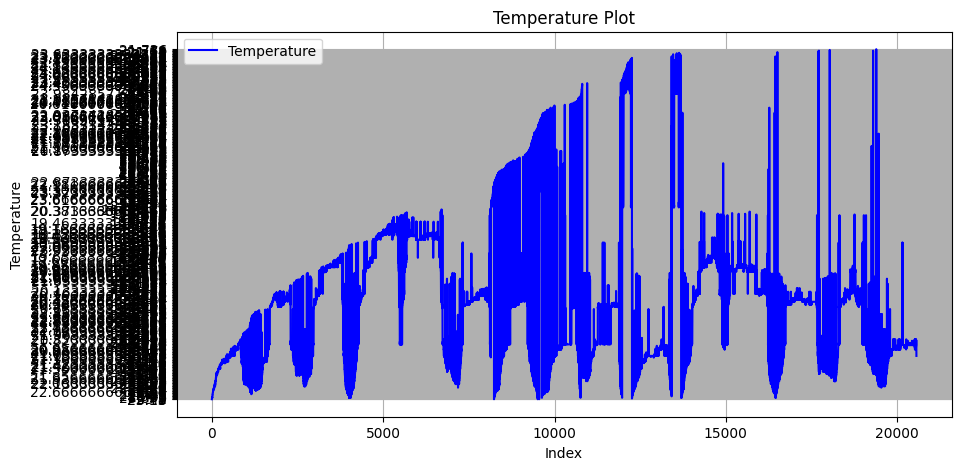

In [4]:
import matplotlib.pyplot as plt

# Example: Plotting the Temperature column
plt.figure(figsize=(10, 5))
plt.plot(X['Temperature'], label='Temperature', color='blue')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.legend()
plt.grid(True)
plt.show()

# Graduate/Undergraduate assignment (90 pts)

Study the “Occupancy Detection Data Set”. The class label in this dataset is 0/1, based on whether an office was occupied or not. Split the dataset into training and validation subsets. 

Develop a simple rule-based classifier, that will work similarly to the fish classifier discussed in lecture. Use one feature a time. 

Using the data in the training dataset and K-fold cross validation, find the optimal decision boundary that minimizes classification error. The K-fold cross validation should be implemented without using built-in functions from Python libraries. This means all code must be yours!

Implement this code as a function. Apply to all features and for each feature, compute and print the error measures: Error rate, Recall, Precision, Specificity, False alarm rate. Also compute and plot the ROC and (on the same graph) display the AUC.




Feature: Humidity
Optimal Threshold: 38.6175, Direction: GEQ
Error Rate: 0.2299124513618677
Recall (Sensitivity): 0.017473684210526315
Precision: 0.5804195804195804
Specificity: 0.9962049335863378
False Alarm Rate: 0.003795066413662239


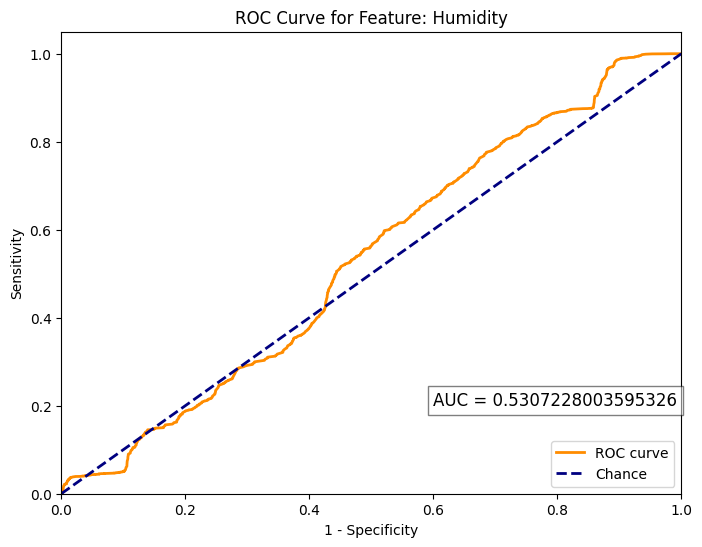


Feature: Light
Optimal Threshold: 389.0, Direction: GEQ
Error Rate: 0.010651750972762646
Recall (Sensitivity): 0.9945263157894737
Precision: 0.9607484238356722
Specificity: 0.9877925363693865
False Alarm Rate: 0.012207463630613535


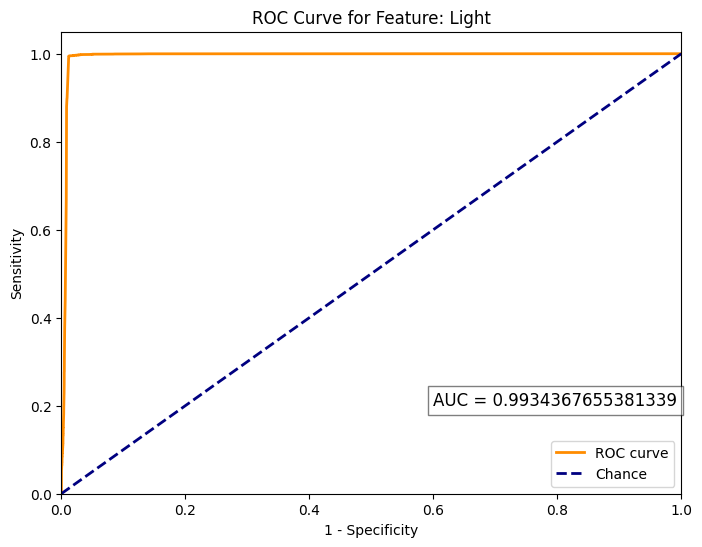


Feature: Temperature
Optimal Threshold: 21.3066666666667, Direction: GEQ
Error Rate: 0.14688715953307394
Recall (Sensitivity): 0.8111578947368421
Precision: 0.6447456492637216
Specificity: 0.8657179000632511
False Alarm Rate: 0.1342820999367489


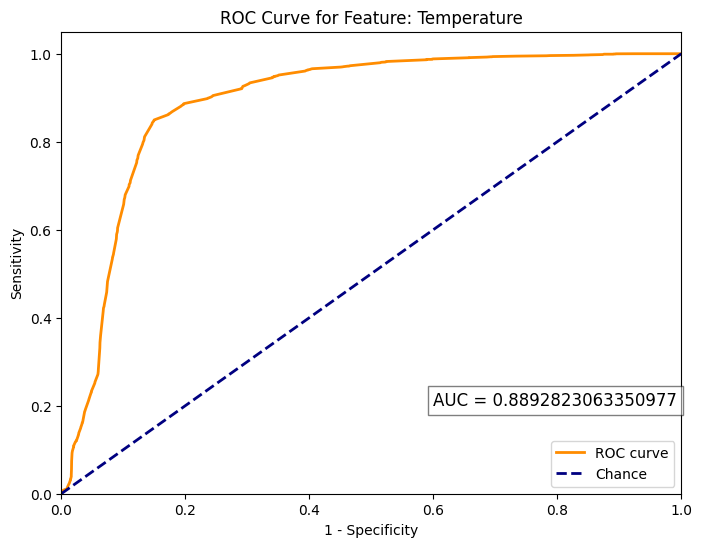


Feature: CO2
Optimal Threshold: 831.666666666667, Direction: GEQ
Error Rate: 0.15559338521400778
Recall (Sensitivity): 0.6614736842105263
Precision: 0.6638495668709063
Specificity: 0.8993674889310563
False Alarm Rate: 0.1006325110689437


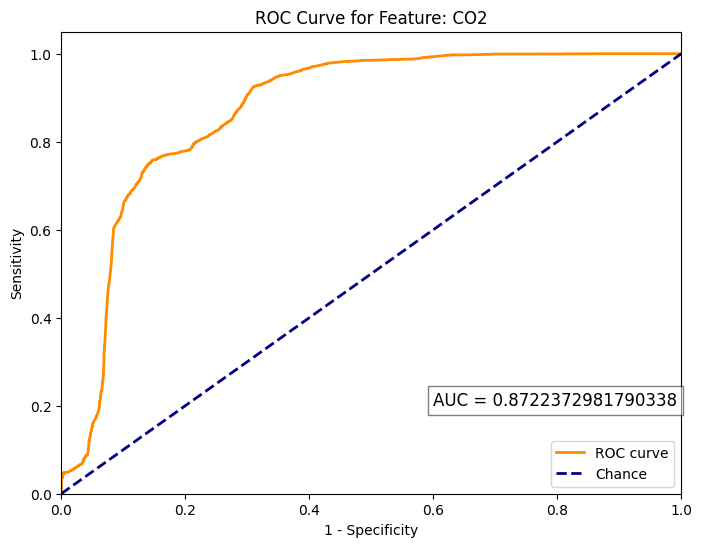


Feature: HumidityRatio
Optimal Threshold: 0.00561854980803455, Direction: GEQ
Error Rate: 0.21284046692607003
Recall (Sensitivity): 0.09263157894736843
Precision: 0.8695652173913043
Specificity: 0.9958254269449716
False Alarm Rate: 0.004174573055028463


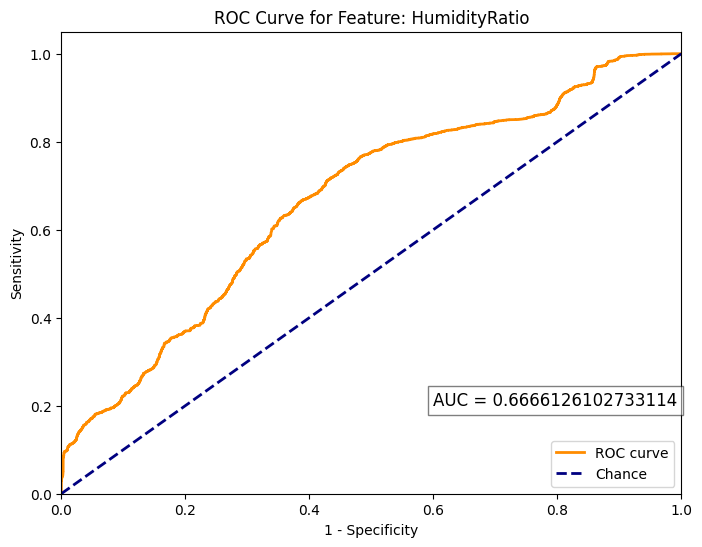

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

"""
Takes in a string and determines if it numeric.

"""
def is_numeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

"""
Takes in a DataFrame with feature data, DataFrame of occupancy data, set of features to test, and a integer k for number of folds.
Returns the best feature, best threshold, and direction of comparison.

"""
    
def train_model(X, y, features, k):
    #Prepare the folds
    remainder = len(X) % k
    length = len(X) // k
    folds = []
    last = 0
    maxRoc = 0
    returnFeature = None
    returnThreshold = None
    rule = None
    for _ in range(0, k - remainder):
        folds.append([last, last + length])
        last += length
    for _ in range(k - remainder, k):
        folds.append([last, last + length + 1])
        last += length + 1
        
    #Iterate through all features and test individually
    
    for feature in features:
        
        # Ensure numeric conversion for the feature values and labels
        
        trainData = X[feature].values.astype(float)
        resultData = y['Occupancy'].values.astype(int)
        thresholds = sorted(list(set(trainData)))
        bestThreshold = None
        bestAvgError = float('inf')
        
        #Iterate through possible thresholds (unique values of feature)
        
        for threshold in thresholds:
            totalError = 0.0
            
            #Iterate through folds
            
            for i in range(0, k):
                m, n = folds[i][0], folds[i][1]
                currTrainData = np.concatenate((trainData[:m], trainData[n:]))
                currTrainResult = np.concatenate((resultData[:m], resultData[n:]))
                currValidateData = trainData[m:n]
                currValidateResult = resultData[m:n]
                
                #Train the model
                
                predictionsGEQ = (currTrainData >= threshold)
                errorGEQ = np.mean(predictionsGEQ != currTrainResult)
                predictionsLess = (currTrainData < threshold)
                errorLess = np.mean(predictionsLess != currTrainResult)
                
                #Evaluate threshold on validation data
                
                if errorGEQ < errorLess:
                    valPredictions = (currValidateData >= threshold)
                else:
                    valPredictions = (currValidateData < threshold)
                
                foldError = np.mean(valPredictions != currValidateResult)
                totalError += foldError
                
            avgError = totalError / k
            if avgError < bestAvgError:
                bestAvgError = avgError
                bestThreshold = threshold

        predictionsGEQ = (trainData >= bestThreshold)
        errorGEQ = np.mean(predictionsGEQ != resultData)
        predictionsLess = (trainData < bestThreshold)
        errorLess = np.mean(predictionsLess != resultData)
        if errorGEQ < errorLess:
            valPredictions = predictionsGEQ
            chosen_rule = 'GEQ'
        else:
            valPredictions = predictionsLess
            chosen_rule = 'LESS'
        
        #Compute and plot error rates for each feature
        
        tp = np.sum((valPredictions == 1) & (resultData == 1))
        fp = np.sum((valPredictions == 1) & (resultData == 0))
        tn = np.sum((valPredictions == 0) & (resultData == 0))
        fn = np.sum((valPredictions == 0) & (resultData == 1))
        
        error_rate = (fp + fn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        print(f"\nFeature: {feature}")
        print(f"Optimal Threshold: {bestThreshold}, Direction: {chosen_rule}")
        print(f"Error Rate: {error_rate}")
        print(f"Recall (Sensitivity): {recall}")
        print(f"Precision: {precision}")
        print(f"Specificity: {specificity}")
        print(f"False Alarm Rate: {false_alarm_rate}")
        
        
        if chosen_rule == 'LESS':
            scores = -trainData  
        else:
            scores = trainData
        
        
        fpr, tpr, roc_thresholds = roc_curve(resultData, scores)
        roc_auc = auc(fpr, tpr)
        if roc_auc > maxRoc:
            maxRoc = roc_auc
            returnFeature = feature
            returnThreshold = bestThreshold
            rule = chosen_rule
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1 - Specificity')
        plt.ylabel('Sensitivity')
        plt.title(f'ROC Curve for Feature: {feature}')
        plt.legend(loc="lower right")
        plt.text(0.6, 0.2, f'AUC = {roc_auc}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
        plt.savefig(f"{feature}_plot")
        plt.show()
    
    return returnFeature, returnThreshold, rule
    
dfX = pd.DataFrame(X)
attributes = set(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
removed = []
for attribute in attributes:
    for index, value in dfX[attribute].items():
        if not is_numeric(value):
            removed.append(index)
            dfX = dfX.drop(index=index)
                
dfY = pd.DataFrame(y)
dfY = dfY.drop(index=removed)
    
feature, threshold, rule = train_model(dfX, dfY, attributes, 10)

Determine the best classifier and apply this classiifer to the test data set. Assess classification errors. In the report, provide conclusions about the generalization capabilities of the developed classification model.

In [6]:
trainData = dfX[feature].values.astype(float)
resultData = dfY['Occupancy'].values.astype(int)
predictions = (trainData >= threshold) if rule == 'GEQ' else (trainData < threshold)
tp = np.sum((predictions == 1) & (resultData == 1))
fp = np.sum((predictions == 1) & (resultData == 0))
tn = np.sum((predictions == 0) & (resultData == 0))
fn = np.sum((predictions == 0) & (resultData == 1))
        
error_rate = (fp + fn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    
print(f"\nFeature: {feature}")
print(f"Optimal Threshold: {threshold}, Direction: GEQ")
print(f"Error Rate: {error_rate}")
print(f"Recall (Sensitivity): {recall}")
print(f"Precision: {precision}")
print(f"Specificity: {specificity}")
print(f"False Alarm Rate: {false_alarm_rate}")


Feature: Light
Optimal Threshold: 389.0, Direction: GEQ
Error Rate: 0.010651750972762646
Recall (Sensitivity): 0.9945263157894737
Precision: 0.9607484238356722
Specificity: 0.9877925363693865
False Alarm Rate: 0.012207463630613535
